# Noise-induced Transitions. 
## Explorations of noise induced order (NIO) and noise-induced chaos (NIC) with last models.
### Correct use of arbitrary precision float operations implemented with 'BigFloat' julia object as a wraper for the corresponding MPFR C library

# 1a. NIO using BigFloat

In [543]:
function NIOv0Big(epsil::BigFloat,n::Int64,exponentk::Int64)
setprecision(16)
iters = collect(1:n-1)
d = 2.0^(-exponentk)
@show d
x = Array{BigFloat,1}(undef,n)
eRND = Array{BigFloat,1}(undef,n)
preLE = Array{BigFloat,1}(undef,n-1)
x[1] = rand(BigFloat)
# Seed for comparison between Big and 64 code
#x[1] = 7.593763724662871285337333335546251062425765410927767602987336549202870988717045e-02
@show x[1]
absd = BigFloat(abs(d))
    for j in iters
    xbfj = BigFloat(x[j])
    oneovertwo = BigFloat(1/2)
    eRND[j] = epsil*(2*rand(BigFloat)-1)
        if xbfj < oneovertwo
            x[j+1] = 2*x[j] + eRND[j]
            preLE[j] = log(BigFloat(2))
            elseif xbfj > oneovertwo && xbfj <= 1-absd
            x[j+1] = 2*(1-x[j]) + eRND[j]
            preLE[j] = log(BigFloat(2))
            elseif xbfj > 1-absd
            x[j+1] = -d*x[j] + d*(3-d) + eRND[j]
            preLE[j] = log(absd)
            else
            println("Breakpoint reached due to bad conditioning")
        end
    #@show preLE[j]
    end
    @show x[n]
    @show length(preLE)
    @show length(x)
    @show preLE[n-1]
    LyapExp = sum(preLE[n-109:n-1])/length(preLE[n-109:n-1])
    @show LyapExp
    #hist(x)
    #return x
    return preLE 
    #return LyapExp
end

NIOv0Big (generic function with 2 methods)

In [559]:
iters = 1000000
LyapEvo  = NIOv0Big(BigFloat(0.001), iters, 6);

d = 0.015625
x[1] = 5.97336e-01
Breakpoint reached due to bad conditioning


UndefRefError: UndefRefError: access to undefined reference

In [558]:
hist(xorb)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/alvarodr/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''")
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 2659, in hist
    **({"data": data} if data is not None else {}), **kwargs)
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py", line 1810, in inner
    return func(ax, *args, **kwargs)
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py", line 6591, in hist
    m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py", line 780, in histogram
    bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py", line 417, in _get_bin_edges
    first_edge, last_edge = _get_outer_edges(a, range)
  File "/home/alvarodr/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py", line 305, in _get_outer_edges
    if not (np.isfinite(first_edge) and np.isfinite(last_edge)):


In [553]:
xorb64 = convert(xorb,Float64)

MethodError: MethodError: First argument to `convert` must be a Type, got BigFloat[6.70011e-02, 1.33986e-01, 2.67991e-01, 5.36023e-01, 9.27865e-01, 1.44248e-01, 2.88586e-01, 5.77252e-01, 8.45403e-01, 3.09257e-01, 6.18505e-01, 7.62906e-01, 4.74184e-01, 9.48324e-01, 1.03257e-01, 2.06543e-01, 4.1304e-01, 8.26045e-01, 3.4793e-01, 6.95769e-01, 6.08409e-01, 7.83192e-01, 4.33596e-01, 8.67292e-01, 2.65428e-01, 5.30894e-01, 9.3813e-01, 1.23815e-01, 2.47714e-01, 4.95441e-01, 9.90917e-01, 1.82426e-02, 3.65046e-02, 7.30115e-02, 1.45945e-01, 2.91831e-01, 5.83612e-01, 8.32804e-01, 3.34438e-01, 6.68935e-01, 6.62219e-01, 6.75473e-01, 6.4902e-01, 7.01923e-01, 5.96143e-01, 8.07628e-01, 3.84731e-01, 7.69404e-01, 4.61219e-01, 9.22385e-01, 1.55257e-01, 3.10578e-01, 6.21064e-01, 7.57837e-01, 4.84394e-01, 9.68748e-01, 6.24317e-02, 1.24953e-01, 2.49964e-01, 4.99844e-01, 9.99669e-01, 5.71808e-04, 1.10975e-03, 2.28701e-03, 4.57661e-03, 9.07301e-03, 1.80705e-02, 3.60413e-02, 7.20556e-02, 1.4419e-01, 2.88435e-01, 5.76928e-01, 8.46125e-01, 3.07707e-01, 6.15453e-01, 7.69109e-01, 4.61712e-01, 9.23345e-01, 1.53294e-01, 3.06615e-01, 6.1327e-01, 7.73487e-01, 4.52962e-01, 9.05939e-01, 1.88128e-01, 3.76307e-01, 7.5262e-01, 4.9476e-01, 9.89557e-01, 2.09511e-02, 4.19001e-02, 8.37207e-02, 1.67514e-01, 3.35057e-01, 6.70058e-01, 6.59837e-01, 6.80325e-01, 6.39299e-01, 7.21407e-01, 5.57236e-01, 8.85523e-01, 2.28992e-01, 4.57944e-01, 9.15957e-01, 1.68186e-01, 3.36391e-01, 6.72761e-01, 6.54442e-01, 6.91151e-01, 6.1774e-01, 7.64518e-01, 4.7088e-01, 9.41779e-01, 1.16501e-01, 2.32943e-01, 4.6585e-01, 9.31612e-01, 1.36779e-01, 2.73614e-01, 5.47316e-01, 9.05345e-01, 1.89265e-01, 3.78552e-01, 7.57179e-01, 4.85673e-01, 9.71349e-01, 5.735e-02, 1.14753e-01, 2.29495e-01, 4.58919e-01, 9.17833e-01, 1.64377e-01, 3.28697e-01, 6.57351e-01, 6.8537e-01, 6.29328e-01, 7.41373e-01, 5.17263e-01, 9.65379e-01, 6.92407e-02, 1.38394e-01, 2.76746e-01, 5.53567e-01, 8.92886e-01, 2.143e-01, 4.28553e-01, 8.57102e-01, 2.85888e-01, 5.71865e-01, 8.56211e-01, 2.87671e-01, 5.75407e-01, 8.49267e-01, 3.01498e-01, 6.0303e-01, 7.93916e-01, 4.12233e-01, 8.24503e-01, 3.50929e-01, 7.01826e-01, 5.96325e-01, 8.07312e-01, 3.85407e-01, 7.70823e-01, 4.58406e-01, 9.16873e-01, 1.66331e-01, 3.32608e-01, 6.65163e-01, 6.6966e-01, 6.60598e-01, 6.78802e-01, 6.42318e-01, 7.15438e-01, 5.69126e-01, 8.6179e-01, 2.76329e-01, 5.52588e-01, 8.94795e-01, 2.1036e-01, 4.20675e-01, 8.4137e-01, 3.17304e-01, 6.34699e-01, 7.30694e-01, 5.38518e-01, 9.2296e-01, 1.53995e-01, 3.07966e-01, 6.15982e-01, 7.68092e-01, 4.63765e-01, 9.27596e-01, 1.44724e-01, 2.89433e-01, 5.78952e-01, 8.42196e-01, 3.15527e-01, 6.31117e-01, 7.37731e-01, 5.24612e-01, 9.50768e-01, 9.85485e-02, 1.97178e-01, 3.94412e-01, 7.88814e-01, 4.22442e-01, 8.44917e-01, 3.10091e-01, 6.20264e-01, 7.59505e-01, 4.80992e-01, 9.61907e-01, 7.61939e-02, 1.52311e-01, 3.046e-01, 6.09283e-01, 7.81444e-01, 4.37053e-01, 8.74142e-01, 2.51797e-01, 5.03569e-01, 9.92955e-01, 1.40783e-02, 2.81936e-02, 5.64515e-02, 1.12866e-01, 2.25687e-01, 4.51434e-01, 9.0296e-01, 1.93999e-01, 3.87952e-01, 7.75937e-01, 4.48116e-01, 8.96247e-01, 2.0759e-01, 4.15279e-01, 8.30636e-01, 3.38787e-01, 6.77563e-01, 6.44841e-01, 7.10381e-01, 5.79304e-01, 8.41481e-01, 3.17054e-01, 6.34053e-01, 7.31951e-01, 5.36017e-01, 9.27965e-01, 1.43986e-01, 2.87944e-01, 5.75897e-01, 8.48218e-01, 3.03624e-01, 6.0721e-01, 7.85666e-01, 4.28568e-01, 8.57226e-01, 2.85571e-01, 5.71095e-01, 8.5775e-01, 2.84468e-01, 5.68868e-01, 8.62328e-01, 2.75293e-01, 5.50529e-01, 8.98865e-01, 2.02276e-01, 4.04467e-01, 8.08912e-01, 3.82259e-01, 7.64478e-01, 4.71038e-01, 9.42117e-01, 1.15746e-01, 2.31432e-01, 4.62778e-01, 9.2546e-01, 1.49058e-01, 2.98076e-01, 5.96141e-01, 8.07724e-01, 3.84491e-01, 7.6893e-01, 4.62078e-01, 9.24212e-01, 1.51657e-01, 3.0338e-01, 6.06686e-01, 7.86685e-01, 4.2661e-01, 8.5314e-01, 2.93626e-01, 5.8722e-01, 8.25659e-01, 3.48602e-01, 6.97197e-01, 6.05583e-01, 7.88875e-01, 4.22208e-01, 8.44509e-01, 3.10884e-01, 6.21776e-01, 7.56373e-01, 4.87165e-01, 9.74386e-01, 5.13007e-02, 1.02512e-01, 2.05052e-01, 4.10006e-01, 8.20043e-01, 3.59856e-01, 7.19809e-01, 5.60439e-01, 8.79113e-01, 2.41804e-01, 4.83668e-01, 9.67407e-01, 6.50857e-02, 1.30226e-01, 2.60497e-01, 5.20906e-01, 9.58192e-01, 8.36809e-02, 1.67416e-01, 3.34835e-01, 6.69712e-01, 6.60573e-01, 6.78852e-01, 6.42351e-01, 7.15265e-01, 5.69438e-01, 8.61096e-01, 2.77854e-01, 5.55796e-01, 8.88436e-01, 2.23071e-01, 4.46133e-01, 8.92283e-01, 2.15391e-01, 4.30835e-01, 8.61664e-01, 2.76689e-01, 5.5328e-01, 8.934e-01, 2.13135e-01, 4.26178e-01, 8.52401e-01, 2.9521e-01, 5.90449e-01, 8.19136e-01, 3.61733e-01, 7.2342e-01, 5.53111e-01, 8.93832e-01, 2.12242e-01, 4.2452e-01, 8.49018e-01, 3.02002e-01, 6.04054e-01, 7.91803e-01, 4.16393e-01, 8.32712e-01, 3.34544e-01, 6.69007e-01, 6.6202e-01, 6.7592e-01, 6.48175e-01, 7.03729e-01, 5.92579e-01, 8.14819e-01, 3.70315e-01, 7.40711e-01, 5.1854e-01, 9.62957e-01, 7.41279e-02, 1.48336e-01, 2.96741e-01, 5.93405e-01, 8.13216e-01, 3.73616e-01, 7.47268e-01, 5.05549e-01, 9.88931e-01, 2.20804e-02, 4.40854e-02, 8.81478e-02, 1.7637e-01, 3.52739e-01, 7.05541e-01, 5.88936e-01, 8.22038e-01, 3.55842e-01, 7.11771e-01, 5.76382e-01, 8.47267e-01, 3.05417e-01, 6.10745e-01, 7.78447e-01, 4.43052e-01, 8.86026e-01, 2.27922e-01, 4.55763e-01, 9.11461e-01, 1.77023e-01, 3.54074e-01, 7.0811e-01, 5.83772e-01, 8.32496e-01, 3.34956e-01, 6.69866e-01, 6.60205e-01, 6.7959e-01, 6.40897e-01, 7.182e-01, 5.63547e-01, 8.72878e-01, 2.54179e-01, 5.0831e-01, 9.83374e-01, 3.31667e-02, 6.62632e-02, 1.32486e-01, 2.64994e-01, 5.30025e-01, 9.39955e-01, 1.20005e-01, 2.40008e-01, 4.80018e-01, 9.60088e-01, 7.98157e-02, 1.59575e-01, 3.19142e-01, 6.38328e-01, 7.23415e-01, 5.53123e-01, 8.93799e-01, 2.12447e-01, 4.24952e-01, 8.49897e-01, 3.00121e-01, 6.00247e-01, 7.99459e-01, 4.01085e-01, 8.02103e-01, 3.95865e-01, 7.91721e-01, 4.16515e-01, 8.33026e-01, 3.33861e-01, 6.67637e-01, 6.64755e-01, 6.70559e-01, 6.58839e-01, 6.82393e-01, 6.35301e-01, 7.29406e-01, 5.4122e-01, 9.17549e-01, 1.64983e-01, 3.29921e-01, 6.59901e-01, 6.80127e-01, 6.39788e-01, 7.20449e-01, 5.59002e-01, 8.82025e-01, 2.35853e-01, 4.71761e-01, 9.43549e-01, 1.12924e-01, 2.25919e-01, 4.51902e-01, 9.03864e-01, 1.92277e-01, 3.84612e-01, 7.69132e-01, 4.61763e-01, 9.23585e-01, 1.52887e-01, 3.057e-01, 6.11455e-01, 7.77005e-01, 4.45941e-01, 8.91883e-01, 2.16181e-01, 4.32314e-01, 8.64614e-01, 2.70744e-01, 5.41423e-01, 9.17162e-01, 1.65674e-01, 3.31297e-01, 6.62686e-01, 6.74542e-01, 6.50944e-01, 6.98108e-01, 6.03714e-01, 7.92638e-01, 4.14817e-01, 8.29729e-01, 3.40561e-01, 6.8107e-01, 6.37805e-01, 7.24467e-01, 5.51075e-01, 8.97763e-01, 2.04499e-01, 4.08901e-01, 8.17763e-01, 3.64562e-01, 7.29147e-01, 5.41772e-01, 9.16385e-01, 1.67299e-01, 3.34564e-01, 6.69137e-01, 6.61669e-01, 6.76586e-01, 6.4689e-01, 7.06257e-01, 5.87581e-01, 8.24878e-01, 3.50159e-01, 7.0025e-01, 5.99448e-01, 8.01152e-01, 3.97633e-01, 7.95352e-01, 4.09374e-01, 8.188e-01, 3.6241e-01, 7.24878e-01, 5.50169e-01, 8.99719e-01, 2.0048e-01, 4.00886e-01, 8.01702e-01, 3.96543e-01, 7.93126e-01, 4.13822e-01, 8.27601e-01, 3.44861e-01, 6.89803e-01, 6.20435e-01, 7.59101e-01, 4.81749e-01, 9.63558e-01, 7.29403e-02, 1.45926e-01, 2.91754e-01, 5.8345e-01, 8.33088e-01, 3.33876e-01, 6.677e-01, 6.64694e-01, 6.70673e-01, 6.58612e-01, 6.82682e-01, 6.34558e-01, 7.30874e-01, 5.38191e-01, 9.23644e-01, 1.52746e-01, 3.05575e-01, 6.11184e-01, 7.77676e-01, 4.4456e-01, 8.89207e-01, 2.21629e-01, 4.4333e-01, 8.86711e-01, 2.26556e-01, 4.53057e-01, 9.06159e-01, 1.87752e-01, 3.75586e-01, 7.51078e-01, 4.97777e-01, 9.95456e-01, 9.07453e-03, 1.80619e-02, 3.61585e-02, 7.23364e-02, 1.44724e-01, 2.89482e-01, 5.79063e-01, 8.41785e-01, 3.16397e-01, 6.32875e-01, 7.34196e-01, 5.31677e-01, 9.36583e-01, 1.26736e-01, 2.53549e-01, 5.07037e-01, 9.86006e-01, 2.80746e-02, 5.61007e-02, 1.1215e-01, 2.24213e-01, 4.48427e-01, 8.96774e-01, 2.0653e-01, 4.13055e-01, 8.26152e-01, 3.47775e-01, 6.95496e-01, 6.09072e-01, 7.81903e-01, 4.36278e-01, 8.72476e-01, 2.55029e-01, 5.10072e-01, 9.79904e-01, 4.01638e-02, 8.04099e-02, 1.60826e-01, 3.21608e-01, 6.43293e-01, 7.13485e-01, 5.73086e-01, 8.53849e-01, 2.92218e-01, 5.84433e-01, 8.31099e-01, 3.37719e-01, 6.75451e-01, 6.49062e-01, 7.01815e-01, 5.96438e-01, 8.07128e-01, 3.85759e-01, 7.71466e-01, 4.56991e-01, 9.13984e-01, 1.72008e-01, 3.43971e-01, 6.87957e-01, 6.24027e-01, 7.51927e-01, 4.96047e-01, 9.92054e-01, 1.57972e-02, 3.15159e-02, 6.30266e-02, 1.26146e-01, 2.52383e-01, 5.04815e-01, 9.90393e-01, 1.91362e-02, 3.82874e-02, 7.66219e-02, 1.53251e-01, 3.06468e-01, 6.13027e-01, 7.73893e-01, 4.52261e-01, 9.04483e-01, 1.91121e-01, 3.82223e-01, 7.64414e-01, 4.71189e-01, 9.42433e-01, 1.15112e-01, 2.30257e-01, 4.60537e-01, 9.21126e-01, 1.57844e-01, 3.15747e-01, 6.31476e-01, 7.37145e-01, 5.25655e-01, 9.48675e-01, 1.02622e-01, 2.05155e-01, 4.10405e-01, 8.20758e-01, 3.58474e-01, 7.16864e-01, 5.66272e-01, 8.6742e-01, 2.65113e-01, 5.30291e-01, 9.39426e-01, 1.21072e-01, 2.42218e-01, 4.8436e-01, 9.68811e-01, 6.24212e-02, 1.2489e-01, 2.49841e-01, 4.99662e-01, 9.99258e-01, 1.41583e-03, 2.83877e-03, 5.73384e-03, 1.15193e-02, 2.29922e-02, 4.59616e-02, 9.19877e-02, 1.8398e-01, 3.67961e-01, 7.35967e-01, 5.28049e-01, 9.43896e-01, 1.12228e-01, 2.24548e-01, 4.49103e-01, 8.98233e-01, 2.03548e-01, 4.07098e-01, 8.14186e-01, 3.71624e-01, 7.43203e-01, 5.13576e-01, 9.72787e-01, 5.44418e-02, 1.08926e-01, 2.17808e-01, 4.35681e-01, 8.71276e-01, 2.57392e-01, 5.14791e-01, 9.70333e-01, 5.93112e-02, 1.18716e-01, 2.37452e-01, 4.7488e-01, 9.49757e-01, 1.00494e-01, 2.0093e-01, 4.01802e-01, 8.0369e-01, 3.92591e-01, 7.85168e-01, 4.29684e-01, 8.59383e-01, 2.81308e-01, 5.62623e-01, 8.74798e-01, 2.50347e-01, 5.00634e-01, 9.98658e-01, 2.73394e-03, 5.5206e-03, 1.11411e-02, 2.22243e-02, 4.45164e-02, 8.91074e-02, 1.78171e-01, 3.56243e-01, 7.12531e-01, 5.74851e-01, 8.50225e-01, 2.99633e-01, 5.99315e-01, 8.01459e-01, 3.97091e-01, 7.94222e-01, 4.11528e-01, 8.23096e-01, 3.53862e-01, 7.07798e-01, 5.84483e-01, 8.30994e-01, 3.37996e-01, 6.75999e-01, 6.48043e-01, 7.0389e-01, 5.92121e-01, 8.15818e-01, 3.68396e-01, 7.36724e-01, 5.26598e-01, 9.46724e-01, 1.06574e-01, 2.13052e-01, 4.26088e-01, 8.52234e-01, 2.95588e-01, 5.91271e-01, 8.17426e-01, 3.65077e-01, 7.30204e-01, 5.39558e-01, 9.20795e-01, 1.5831e-01, 3.16627e-01, 6.33159e-01, 7.33767e-01, 5.3247e-01, 9.35049e-01, 1.29971e-01, 2.5985e-01, 5.19728e-01, 9.60573e-01, 7.87598e-02, 1.57538e-01, 3.15034e-01, 6.30098e-01, 7.39727e-01, 5.20519e-01, 9.59032e-01, 8.19353e-02, 1.63956e-01, 3.27839e-01, 6.55706e-01, 6.88595e-01, 6.22884e-01, 7.54313e-01, 4.91331e-01, 9.82677e-01, 3.47386e-02, 6.95759e-02, 1.39154e-01, 2.78273e-01, 5.56545e-01, 8.86833e-01, 2.26259e-01, 4.5245e-01, 9.04915e-01, 1.90178e-01, 3.80378e-01, 7.60818e-01, 4.78317e-01, 9.56731e-01, 8.64453e-02, 1.72948e-01, 3.45989e-01, 6.92064e-01, 6.15956e-01, 7.68046e-01, 4.63963e-01, 9.27902e-01, 1.44215e-01, 2.88378e-01, 5.76841e-01, 8.46364e-01, 3.07256e-01, 6.14451e-01, 7.71164e-01, 4.57688e-01, 9.15367e-01, 1.69301e-01, 3.38559e-01, 6.77188e-01, 6.45623e-01, 7.08761e-01, 5.82511e-01, 8.34988e-01, 3.30031e-01, 6.60032e-01, 6.79968e-01, 6.4002e-01, 7.20001e-01, 5.59912e-01, 8.80262e-01, 2.39458e-01, 4.78848e-01, 9.5766e-01, 8.47087e-02, 1.69508e-01, 3.38969e-01, 6.77839e-01, 6.44394e-01, 7.11266e-01, 5.7743e-01, 8.45185e-01, 3.09619e-01, 6.19257e-01, 7.61405e-01, 4.77149e-01, 9.5429e-01, 9.14387e-02, 1.82852e-01, 3.65704e-01, 7.31418e-01, 5.3724e-01, 9.25519e-01, 1.49028e-01, 2.98083e-01, 5.96213e-01, 8.07661e-01, 3.84734e-01, 7.69538e-01, 4.60876e-01, 9.21817e-01, 1.56291e-01, 3.12574e-01, 6.25237e-01, 7.49559e-01, 5.00807e-01, 9.98387e-01, 3.19334e-03, 6.3226e-03, 1.25495e-02, 2.5061e-02, 5.0187e-02, 1.00434e-01, 2.00837e-01, 4.01706e-01, 8.03316e-01, 3.93394e-01, 7.86815e-01, 4.26321e-01, 8.52603e-01, 2.94815e-01, 5.89686e-01, 8.20551e-01, 3.58948e-01, 7.17847e-01, 5.64399e-01, 8.71183e-01, 2.57655e-01, 5.15303e-01, 9.6943e-01, 6.11619e-02, 1.22314e-01, 2.44712e-01, 4.89421e-01, 9.78892e-01, 4.22215e-02, 8.44811e-02, 1.69062e-01, 3.38161e-01, 6.76405e-01, 6.47164e-01, 7.05607e-01, 5.88841e-01, 8.22274e-01, 3.55416e-01, 7.10762e-01, 5.78392e-01, 8.43179e-01, 3.13632e-01, 6.27278e-01, 7.45416e-01, 5.09261e-01, 9.81527e-01, 3.7027e-02, 7.40309e-02, 1.48093e-01, 2.9627e-01, 5.92585e-01, 8.14795e-01, 3.70344e-01, 7.40705e-01, 5.18584e-01, 9.62775e-01, 7.44115e-02, 1.48724e-01, 2.97467e-01, 5.95009e-01, 8.09916e-01, 3.80262e-01, 7.60615e-01, 4.78715e-01, 9.57363e-01, 8.53229e-02, 1.70713e-01, 3.41482e-01, 6.82919e-01, 6.34187e-01, 7.31593e-01, 5.36757e-01, 9.26407e-01, 1.47275e-01, 2.94453e-01, 5.88825e-01, 8.22394e-01, 3.55161e-01, 7.10373e-01, 5.79346e-01, 8.41346e-01, 3.17348e-01, 6.34628e-01, 7.30749e-01, 5.38545e-01, 9.22986e-01, 1.53941e-01, 3.07878e-01, 6.15798e-01, 7.68373e-01, 4.63172e-01, 9.26287e-01, 1.47483e-01, 2.94906e-01, 5.89751e-01, 8.20422e-01, 3.59171e-01, 7.18356e-01, 5.63355e-01, 8.73271e-01, 2.53377e-01, 5.0681e-01, 9.86423e-01, 2.7122e-02, 5.42665e-02, 1.08545e-01, 2.17036e-01, 4.34065e-01, 8.68109e-01, 2.63879e-01, 5.27724e-01, 9.44547e-01, 1.10947e-01, 2.21886e-01, 4.43731e-01, 8.87366e-01, 2.25331e-01, 4.50637e-01, 9.01204e-01, 1.97624e-01, 3.95199e-01, 7.90406e-01, 4.19115e-01, 8.38317e-01, 3.23372e-01, 6.46705e-01, 7.0654e-01, 5.86962e-01, 8.26038e-01, 3.4791e-01, 6.95906e-01, 6.08239e-01, 7.83533e-01, 4.32968e-01, 8.65847e-01, 2.68396e-01, 5.36849e-01, 9.26338e-01, 1.4731e-01, 2.94665e-01, 5.8924e-01, 8.21561e-01, 3.56801e-01, 7.13684e-01, 5.72614e-01, 8.54706e-01, 2.90631e-01, 5.81222e-01, 8.37558e-01, 3.24859e-01, 6.49748e-01, 7.00463e-01, 5.98979e-01, 8.02115e-01, 3.95757e-01, 7.91597e-01, 4.16895e-01, 8.33845e-01, 3.3233e-01, 6.64723e-01, 6.70567e-01, 6.5877e-01, 6.82472e-01, 6.34989e-01, 7.29926e-01, 5.40069e-01, 9.19853e-01, 1.6023e-01, 3.20383e-01, 6.40812e-01, 7.18284e-01, 5.63475e-01, 8.73138e-01, 2.53769e-01, 5.07599e-01, 9.84871e-01, 3.02941e-02, 6.05996e-02, 1.21154e-01, 2.42231e-01, 4.84514e-01, 9.69125e-01, 6.17519e-02, 1.23441e-01, 2.46957e-01, 4.93844e-01, 9.87605e-01, 2.4753e-02, 4.94368e-02, 9.89146e-02, 1.97856e-01, 3.95752e-01, 7.91446e-01, 4.17124e-01, 8.34153e-01, 3.31716e-01, 6.63504e-01, 6.72992e-01, 6.54041e-01, 6.9196e-01, 6.1603e-01, 7.67888e-01, 4.64254e-01, 9.28555e-01, 1.42833e-01, 2.85568e-01, 5.71179e-01, 8.57594e-01, 2.848e-01, 5.69663e-01, 8.60661e-01, 2.78631e-01, 5.57171e-01, 8.85604e-01, 2.28693e-01, 4.57428e-01, 9.14856e-01, 1.70282e-01, 3.40613e-01, 6.8116e-01, 6.37585e-01, 7.24905e-01, 5.50199e-01, 8.99631e-01, 2.0071e-01, 4.01329e-01, 8.02669e-01, 3.94648e-01, 7.8937e-01, 4.21313e-01, 8.42713e-01, 3.14641e-01, 6.29192e-01, 7.41568e-01, 5.16859e-01, 9.66184e-01, 6.76578e-02, 1.35331e-01, 2.70645e-01, 5.41204e-01, 9.17531e-01, 1.64876e-01, 3.29845e-01, 6.59655e-01, 6.80612e-01, 6.38834e-01, 7.22237e-01, 5.55621e-01, 8.88789e-01, 2.22433e-01, 4.44834e-01, 8.89661e-01, 2.20654e-01, 4.41373e-01, 8.827e-01, 2.34638e-01, 4.6937e-01, 9.38716e-01, 1.22648e-01, 2.45301e-01, 4.90637e-01, 9.8133e-01, 3.73917e-02, 7.48307e-02, 1.49681e-01, 2.99367e-01, 5.98771e-01, 8.02441e-01, 3.95143e-01, 7.90335e-01, 4.1931e-01, 8.38718e-01, 3.2254e-01, 6.45088e-01, 7.09752e-01, 5.80524e-01, 8.38889e-01, 3.22208e-01, 6.44423e-01, 7.1107e-01, 5.7784e-01, 8.44372e-01, 3.11279e-01, 6.22656e-01, 7.54602e-01, 4.90881e-01, 9.81861e-01, 3.6188e-02, 7.24456e-02, 1.44972e-01, 2.89924e-01, 5.79795e-01, 8.40337e-01, 3.19313e-01, 6.38588e-01, 7.22854e-01, 5.54374e-01, 8.91187e-01, 2.17573e-01, 4.35127e-01, 8.70249e-01, 2.59497e-01, 5.19089e-01, 9.6181e-01, 7.64156e-02, 1.52733e-01, 3.05467e-01, 6.10963e-01, 7.78019e-01, 4.43981e-01, 8.88006e-01, 2.24007e-01, 4.48015e-01, 8.95977e-01, 2.08025e-01, 4.16145e-01, 8.32352e-01, 3.35287e-01, 6.70572e-01, 6.58914e-01, 6.82136e-01, 6.3576e-01, 7.28573e-01, 5.42853e-01, 9.14393e-01, 1.71311e-01, 3.42598e-01, 6.85272e-01, 6.29537e-01, 7.40948e-01, 5.18053e-01, 9.63897e-01, 7.23043e-02, 1.44593e-01, 2.89271e-01, 5.78447e-01, 8.4317e-01, 3.13713e-01, 6.27454e-01, 7.4509e-01, 5.09877e-01, 9.80219e-01, 3.95741e-02, 7.9187e-02, 1.58412e-01, 3.16756e-01, 6.33572e-01, 7.3292e-01, 5.34179e-01, 9.31591e-01, 1.36783e-01, 2.73609e-01, 5.47214e-01, 9.05655e-01, 1.88739e-01, 3.77497e-01, 7.54944e-01, 4.90089e-01, 9.80121e-01, 3.9754e-02, 7.94243e-02, 1.58898e-01, 3.17724e-01, 6.35457e-01, 7.29166e-01, 5.41687e-01, 9.16544e-01, 1.66949e-01, 3.33895e-01, 6.6783e-01, 6.64295e-01, 6.71409e-01, 6.57255e-01, 6.85587e-01, 6.28922e-01, 7.4224e-01, 5.15614e-01, 9.68747e-01, 6.24148e-02, 1.24772e-01, 2.49446e-01, 4.98991e-01, 9.98073e-01, 3.86713e-03, 7.73069e-03, 1.54179e-02, 3.09008e-02, 6.17895e-02, 1.2362e-01, 2.47328e-01, 4.94697e-01, 9.89441e-01, 2.10874e-02, 4.21393e-02, 8.41959e-02, 1.68446e-01, 3.36969e-01, 6.74036e-01, 6.51921e-01, 6.96111e-01, 6.07799e-01, 7.84398e-01, 4.31274e-01, 8.62455e-01, 2.75016e-01, 5.50088e-01, 8.99754e-01, 2.00491e-01, 4.0091e-01, 8.01841e-01, 3.96258e-01, 7.92444e-01, 4.15203e-01, 8.30379e-01, 3.39218e-01, 6.78425e-01, 6.43113e-01, 7.137e-01, 5.72553e-01, 8.54974e-01, 2.90097e-01, 5.80281e-01, 8.39357e-01, 3.21368e-01, 6.428e-01, 7.14368e-01, 5.71177e-01, 8.57656e-01, 2.84776e-01, 5.6948e-01, 8.60996e-01, 2.78094e-01, 5.56186e-01, 8.87684e-01, 2.24643e-01, 4.49372e-01, 8.98704e-01, 2.02678e-01, 4.05381e-01, 8.10813e-01, 3.78354e-01, 7.56648e-01, 4.86753e-01, 9.73525e-01, 5.28961e-02, 1.05769e-01, 2.115e-01, 4.229e-01, 8.45875e-01, 3.08183e-01, 6.16332e-01, 7.67296e-01, 4.65463e-01, 9.3088e-01, 1.38212e-01, 2.76406e-01, 5.52798e-01, 8.94406e-01, 2.11144e-01, 4.22247e-01, 8.44414e-01, 3.11086e-01, 6.22164e-01, 7.55666e-01, 4.88584e-01, 9.77248e-01, 4.557e-02, 9.11894e-02, 1.82461e-01, 3.64958e-01, 7.29842e-01, 5.4034e-01, 9.19407e-01, 1.61196e-01, 3.22337e-01, 6.44663e-01, 7.10581e-01, 5.78925e-01, 8.4218e-01, 3.15723e-01, 6.3143e-01, 7.37137e-01, 5.25798e-01, 9.48388e-01, 1.03142e-01, 2.06237e-01, 4.1242e-01, 8.24914e-01, 3.50155e-01, 7.00215e-01, 5.9954e-01, 8.00966e-01, 3.97984e-01, 7.95947e-01, 4.08081e-01, 8.16067e-01, 3.6783e-01, 7.35598e-01, 5.28883e-01, 9.42322e-01, 1.15411e-01, 2.30789e-01, 4.61587e-01, 9.23163e-01, 1.53769e-01, 3.07553e-01, 6.15159e-01, 7.69667e-01, 4.60631e-01, 9.21315e-01, 1.57314e-01, 3.14676e-01, 6.29317e-01, 7.41423e-01, 5.17082e-01, 9.65908e-01, 6.81331e-02, 1.36199e-01, 2.72472e-01, 5.45001e-01, 9.10018e-01, 1.79984e-01, 3.59922e-01, 7.19895e-01, 5.60171e-01, 8.79646e-01, 2.40618e-01, 4.81317e-01, 9.62678e-01, 7.4727e-02, 1.49388e-01, 2.98734e-01, 5.9743e-01, 8.05077e-01, 3.89903e-01, 7.79898e-01, 4.40129e-01, 8.80242e-01, 2.39503e-01, 4.7894e-01, 9.5796e-01, 8.4097e-02, 1.68144e-01, 3.36216e-01, 6.72361e-01, 6.55302e-01, 6.89479e-01, 6.21068e-01, 7.57832e-01, 4.84379e-01, 9.68702e-01, 6.25909e-02, 1.25191e-01, 2.50473e-01, 5.00917e-01, 9.98114e-01, 3.69499e-03, 7.42159e-03, 1.47819e-02, 2.96575e-02, 5.93756e-02, 1.18839e-01, 2.37604e-01, 4.75267e-01, 9.50612e-01, 9.88216e-02, 1.97583e-01, 3.95193e-01, 7.90438e-01, 4.19183e-01, 8.3833e-01, 3.23282e-01, 6.46568e-01, 7.06813e-01, 5.86281e-01, 8.2749e-01, 3.44973e-01, 6.89858e-01, 6.20198e-01, 7.59508e-01, 4.80966e-01, 9.62018e-01, 7.59916e-02, 1.52056e-01, 3.04076e-01, 6.0819e-01, 7.83582e-01, 4.32785e-01, 8.65554e-01, 2.68989e-01, 5.38069e-01, 9.23903e-01, 1.52123e-01, 3.04338e-01, 6.08705e-01, 7.82511e-01, 4.35027e-01, 8.70123e-01, 2.59693e-01, 5.19293e-01, 9.61388e-01, 7.71552e-02, 1.54212e-01, 3.08476e-01, 6.16898e-01, 7.66153e-01, 4.67725e-01, 9.35487e-01, 1.28969e-01, 2.57953e-01, 5.15902e-01, 9.68145e-01, 6.37276e-02, 1.27469e-01, 2.54935e-01, 5.09956e-01, 9.80116e-01, 3.98622e-02, 7.97945e-02, 1.59586e-01, 3.19103e-01, 6.38107e-01, 7.23807e-01, 5.52479e-01, 8.9498e-01, 2.10003e-01, 4.19906e-01, 8.39716e-01, 3.20611e-01, 6.41163e-01, 7.17698e-01, 5.64668e-01, 8.70574e-01, 2.58918e-01, 5.17926e-01, 9.64056e-01, 7.19499e-02, 1.43883e-01, 2.87778e-01, 5.75651e-01, 8.48719e-01, 3.0248e-01, 6.05044e-01, 7.89872e-01, 4.20253e-01, 8.40544e-01, 3.1888e-01, 6.37783e-01, 7.24393e-01, 5.51263e-01, 8.97562e-01, 2.04912e-01, 4.09918e-01, 8.19858e-01, 3.60254e-01, 7.20601e-01, 5.58878e-01, 8.82314e-01, 2.353e-01, 4.70577e-01, 9.41252e-01, 1.17574e-01, 2.3511e-01, 4.70191e-01, 9.40362e-01, 1.19314e-01, 2.38541e-01, 4.77018e-01, 9.53984e-01, 9.20244e-02, 1.84043e-01, 3.68138e-01, 7.36338e-01, 5.27352e-01, 9.45263e-01, 1.09523e-01, 2.19039e-01, 4.38067e-01, 8.76095e-01, 2.4774e-01, 4.95409e-01, 9.909e-01, 1.82334e-02, 3.65578e-02, 7.30655e-02, 1.46062e-01, 2.92031e-01, 5.84061e-01, 8.31968e-01, 3.36067e-01, 6.72138e-01, 6.55673e-01, 6.88727e-01, 6.22601e-01, 7.54726e-01, 4.9054e-01, 9.81065e-01, 3.79702e-02, 7.58766e-02, 1.51756e-01, 3.03566e-01, 6.0704e-01, 7.85935e-01, 4.28084e-01, 8.56192e-01, 2.87711e-01, 5.75364e-01, 8.49343e-01, 3.01361e-01, 6.02784e-01, 7.94482e-01, 4.10982e-01, 8.22016e-01, 3.55902e-01, 7.11769e-01, 5.76497e-01, 8.47039e-01, 3.05884e-01, 6.11711e-01, 7.7665e-01, 4.46673e-01, 8.93393e-01, 2.13204e-01, 4.26331e-01, 8.52692e-01, 2.94606e-01, 5.89176e-01, 8.21717e-01, 3.56586e-01, 7.13093e-01, 5.73849e-01, 8.52349e-01, 2.95284e-01, 5.90548e-01, 8.18885e-01, 3.62284e-01, 7.24588e-01, 5.50811e-01, 8.98389e-01, 2.03148e-01, 4.06377e-01, 8.12717e-01, 3.74641e-01, 7.49185e-01, 5.01543e-01, 9.96985e-01, 5.9383e-03, 1.18045e-02, 2.36951e-02, 4.73487e-02, 9.46531e-02, 1.89333e-01, 3.7868e-01, 7.57298e-01, 4.85494e-01, 9.71045e-01, 5.78609e-02, 1.15675e-01, 2.31357e-01, 4.62778e-01, 9.2551e-01, 1.48972e-01, 2.98018e-01, 5.96008e-01, 8.0799e-01, 3.84025e-01, 7.68064e-01, 4.63867e-01, 9.27779e-01, 1.44356e-01, 2.88643e-01, 5.77204e-01, 8.4562e-01, 3.08724e-01, 6.1751e-01, 7.64896e-01, 4.70233e-01, 9.40484e-01, 1.18985e-01, 2.37929e-01, 4.75801e-01, 9.51579e-01, 9.67815e-02, 1.93546e-01, 3.87132e-01, 7.74228e-01, 4.51617e-01, 9.0328e-01, 1.9342e-01, 3.86893e-01, 7.73687e-01, 4.52641e-01, 9.05267e-01, 1.89387e-01, 3.78794e-01, 7.57677e-01, 4.84736e-01, 9.69532e-01, 6.09319e-02, 1.21774e-01, 2.43591e-01, 4.87228e-01, 9.74484e-01, 5.10783e-02, 1.02132e-01, 2.04185e-01, 4.08272e-01, 8.16559e-01, 3.66977e-01, 7.33947e-01, 5.32185e-01, 9.35627e-01, 1.28829e-01, 2.577e-01, 5.1537e-01, 9.69261e-01, 6.1416e-02, 1.22828e-01, 2.45593e-01, 4.91088e-01, 9.82184e-01, 3.5607e-02, 7.12152e-02, 1.42373e-01, 2.84657e-01, 5.69387e-01, 8.61216e-01, 2.77547e-01, 5.55048e-01, 8.89957e-01, 2.20067e-01, 4.40037e-01, 8.8011e-01, 2.39766e-01, 4.7962e-01, 9.59315e-01, 8.13692e-02, 1.62734e-01, 3.25437e-01, 6.50867e-01, 6.98333e-01, 6.03266e-01, 7.93535e-01, 4.13012e-01, 8.25996e-01, 3.48074e-01, 6.96174e-01, 6.07566e-01, 7.84797e-01, 4.30357e-01, 8.60745e-01, 2.78485e-01, 5.5706e-01, 8.85784e-01, 2.28349e-01, 4.56601e-01, 9.13261e-01, 1.73482e-01, 3.46864e-01, 6.938e-01, 6.1236e-01, 7.75324e-01, 4.49442e-01, 8.98865e-01, 2.02249e-01, 4.0442e-01, 8.08875e-01, 3.82321e-01, 7.64635e-01, 4.70668e-01, 9.41433e-01, 1.17216e-01, 2.34501e-01, 4.68927e-01, 9.37822e-01, 1.24288e-01, 2.48651e-01, 4.97215e-01, 9.94352e-01, 1.13631e-02, 2.28003e-02, 4.56234e-02, 9.12993e-02, 1.82658e-01, 3.65271e-01, 7.30633e-01, 5.38694e-01, 9.22601e-01, 1.54766e-01, 3.09433e-01, 6.18776e-01, 7.6244e-01, 4.75149e-01, 9.50274e-01, 9.94837e-02, 1.98909e-01, 3.97819e-01, 7.95735e-01, 4.08528e-01, 8.16987e-01, 3.66117e-01, 7.32292e-01, 5.35389e-01, 9.29169e-01, 1.41693e-01, 2.83328e-01, 5.6663e-01, 8.66788e-01, 2.66437e-01, 5.32855e-01, 9.34225e-01, 1.31457e-01, 2.62944e-01, 5.25798e-01, 9.48334e-01, 1.03356e-01, 2.06774e-01, 4.13452e-01, 8.26875e-01, 3.46197e-01, 6.92356e-01, 6.15202e-01, 7.69535e-01, 4.60837e-01, 9.21603e-01, 1.56721e-01, 3.1344e-01, 6.26879e-01, 7.46205e-01, 5.07641e-01, 9.84773e-01, 3.05063e-02, 6.09351e-02, 1.21822e-01, 2.43602e-01, 4.87177e-01, 9.74438e-01, 5.10268e-02, 1.02027e-01, 2.04012e-01, 4.07929e-01, 8.15773e-01, 3.68415e-01, 7.36909e-01, 5.26103e-01, 9.47713e-01, 1.04551e-01, 2.09101e-01, 4.18284e-01, 8.36502e-01, 3.26901e-01, 6.53762e-01, 6.924e-01, 6.15235e-01, 7.69622e-01, 4.60768e-01, 9.21484e-01, 1.57022e-01, 3.14115e-01, 6.28323e-01, 7.43289e-01, 5.13348e-01, 9.73285e-01, 5.3351e-02, 1.06636e-01, 2.13361e-01, 4.26802e-01, 8.53546e-01, 2.93002e-01, 5.86071e-01, 8.27926e-01, 3.44219e-01, 6.88452e-01, 6.23043e-01, 7.53972e-01, 4.92004e-01, 9.84039e-01, 3.18968e-02, 6.38671e-02, 1.27775e-01, 2.55504e-01, 5.11031e-01, 9.77978e-01, 4.40537e-02, 8.8196e-02, 1.76315e-01, 3.52666e-01, 7.05361e-01, 5.89364e-01, 8.212e-01, 3.57558e-01, 7.15093e-01, 5.69772e-01, 8.60549e-01, 2.78982e-01, 5.58007e-01, 8.84068e-01, 2.31838e-01, 4.63579e-01, 9.27199e-01, 1.45686e-01, 2.91351e-01, 5.82685e-01, 8.34616e-01, 3.30703e-01, 6.61395e-01, 6.77284e-01, 6.45515e-01, 7.08893e-01, 5.82117e-01, 8.35764e-01, 3.28482e-01, 6.56989e-01, 6.86029e-01, 6.27992e-01, 7.441e-01, 5.11849e-01, 9.76247e-01, 4.74245e-02, 9.49194e-02, 1.89771e-01, 3.79496e-01, 7.58925e-01, 4.82232e-01, 9.64465e-01, 7.09817e-02, 1.41985e-01, 2.83958e-01, 5.67859e-01, 8.64344e-01, 2.71362e-01, 5.42749e-01, 9.14455e-01, 1.71164e-01, 3.42298e-01, 6.8463e-01, 6.30789e-01, 7.38375e-01, 5.23335e-01, 9.53329e-01, 9.32543e-02, 1.86515e-01, 3.73057e-01, 7.46107e-01, 5.07818e-01, 9.84432e-01, 3.11017e-02, 6.22299e-02, 1.24453e-01, 2.48956e-01, 4.97942e-01, 9.9582e-01, 8.33806e-03, 1.67081e-02, 3.34424e-02, 6.6855e-02, 1.33797e-01, 2.67672e-01, 5.35411e-01, 9.29137e-01, 1.41802e-01, 2.83525e-01, 5.66996e-01, 8.65938e-01, 2.68206e-01, 5.36322e-01, 9.27268e-01, 1.45427e-01, 2.90778e-01, 5.81482e-01, 8.37117e-01, 3.25759e-01, 6.51552e-01, 6.96868e-01, 6.06289e-01, 7.87373e-01, 4.2525e-01, 8.50402e-01, 2.99249e-01, 5.98453e-01, 8.03161e-01, 3.93735e-01, 7.87477e-01, 4.25052e-01, 8.50117e-01, 2.9972e-01, 5.99345e-01, 8.01274e-01, 3.97507e-01, 7.94973e-01, 4.09997e-01, 8.20088e-01, 3.59924e-01, 7.1975e-01, 5.60402e-01, 8.79275e-01, 2.4142e-01, 4.82825e-01, 9.65629e-01, 6.88216e-02, 1.37686e-01, 2.75371e-01, 5.50729e-01, 8.98497e-01, 2.02963e-01, 4.05828e-01, 8.11714e-01, 3.76525e-01, 7.52997e-01, 4.93973e-01, 9.87996e-01, 2.39303e-02, 4.79353e-02, 9.57726e-02, 1.91485e-01, 3.82876e-01, 7.65733e-01, 4.68571e-01, 9.37229e-01, 1.25452e-01, 2.50971e-01, 5.01952e-01, 9.96056e-01, 7.94204e-03, 1.5911e-02, 3.18078e-02, 6.35554e-02, 1.27131e-01, 2.54352e-01, 5.08726e-01, 9.82504e-01, 3.50726e-02, 7.02216e-02, 1.40361e-01, 2.80816e-01, 5.61573e-01, 8.7678e-01, 2.46518e-01, 4.93012e-01, 9.86072e-01, 2.7799e-02, 5.5531e-02, 1.11045e-01, 2.22058e-01, 4.44041e-01, 8.88088e-01, 2.23815e-01, 4.47709e-01, 8.95338e-01, 2.09334e-01, 4.18606e-01, 8.37202e-01, 3.25531e-01, 6.51097e-01, 6.97898e-01, 6.04256e-01, 7.91578e-01, 4.16813e-01, 8.33612e-01, 3.32838e-01, 6.65743e-01, 6.68561e-01, 6.62782e-01, 6.74383e-01, 6.51227e-01, 6.97578e-01, 6.04932e-01, 7.90071e-01, 4.19912e-01, 8.39889e-01, 3.20215e-01, 6.40364e-01, 7.19215e-01, 5.61593e-01, 8.76727e-01, 2.46502e-01, 4.92961e-01, 9.85823e-01, 2.83107e-02, 5.67009e-02, 1.13368e-01, 2.26738e-01, 4.53431e-01, 9.06892e-01, 1.86254e-01, 3.72581e-01, 7.4513e-01, 5.09668e-01, 9.80716e-01, 3.85004e-02, 7.6911e-02, 1.53863e-01, 3.07697e-01, 6.15417e-01, 7.69149e-01, 4.61692e-01, 9.23429e-01, 1.53232e-01, 3.06533e-01, 6.13073e-01, 7.73805e-01, 4.52397e-01, 9.04868e-01, 1.90182e-01, 3.80443e-01, 7.60801e-01, 4.78376e-01, 9.56814e-01, 8.63102e-02, 1.72623e-01, 3.45228e-01, 6.90495e-01, 6.1894e-01, 7.62138e-01, 4.7569e-01, 9.51444e-01, 9.70144e-02, 1.94054e-01, 3.88135e-01, 7.76176e-01, 4.47653e-01, 8.95325e-01, 2.09372e-01, 4.18751e-01, 8.37592e-01, 3.24778e-01, 6.49481e-01, 7.01047e-01, 5.9784e-01, 8.04365e-01, 3.91253e-01, 7.82582e-01, 4.34919e-01, 8.69841e-01, 2.6033e-01, 5.20562e-01, 9.58908e-01, 8.21537e-02, 1.64378e-01, 3.28769e-01, 6.5759e-01, 6.84918e-01, 6.30091e-01, 7.39864e-01, 5.20339e-01, 9.5928e-01, 8.1534e-02, 1.63029e-01, 3.26054e-01, 6.52094e-01, 6.95892e-01, 6.0831e-01, 7.83442e-01, 4.33082e-01, 8.66084e-01, 2.6793e-01, 5.35913e-01, 9.28235e-01, 1.43594e-01, 2.87209e-01, 5.74496e-01, 8.50985e-01, 2.98085e-01, 5.9618e-01, 8.07603e-01, 3.84729e-01, 7.69377e-01, 4.61341e-01, 9.22709e-01, 1.54579e-01, 3.09254e-01, 6.18534e-01, 7.62836e-01, 4.74248e-01, 9.48466e-01, 1.0315e-01, 2.06386e-01, 4.12726e-01, 8.25526e-01, 3.49033e-01, 6.98165e-01, 6.03746e-01, 7.92435e-01, 4.15082e-01, 8.3026e-01, 3.39452e-01, 6.78932e-01, 6.42163e-01, 7.15627e-01, 5.68739e-01, 8.62506e-01, 2.75028e-01, 5.50052e-01, 8.99937e-01, 2.00201e-01, 4.00357e-01, 8.00625e-01, 3.98797e-01, 7.976e-01, 4.04783e-01, 8.09545e-01, 3.80902e-01, 7.61827e-01, 4.76432e-01, 9.52801e-01, 9.43576e-02, 1.88641e-01, 3.7735e-01, 7.54766e-01, 4.90396e-01, 9.80862e-01, 3.83473e-02, 7.6643e-02, 1.533e-01, 3.06514e-01, 6.13019e-01, 7.73986e-01, 4.5206e-01, 9.04165e-01, 1.91607e-01, 3.83265e-01, 7.66465e-01, 4.67083e-01, 9.34125e-01, 1.31847e-01, 2.63771e-01, 5.27479e-01, 9.4502e-01, 1.09874e-01, 2.19772e-01, 4.3958e-01, 8.79068e-01, 2.41914e-01, 4.83795e-01, 9.67509e-01, 6.5054e-02, 1.30127e-01, 2.60297e-01, 5.20625e-01, 9.58849e-01, 8.23718e-02, 1.64689e-01, 3.29384e-01, 6.58695e-01, 6.82678e-01, 6.34561e-01, 7.30971e-01, 5.38099e-01, 9.23715e-01, 1.52663e-01, 3.05285e-01, 6.10479e-01, 7.79137e-01, 4.41654e-01, 8.83283e-01, 2.33485e-01, 4.66917e-01, 9.33784e-01, 1.32432e-01, 2.6486e-01, 5.29808e-01, 9.40423e-01, 1.19235e-01, 2.38519e-01, 4.77092e-01, 9.54108e-01, 9.16971e-02, 1.83406e-01, 3.66749e-01, 7.33434e-01, 5.33221e-01, 9.33485e-01, 1.33021e-01, 2.66038e-01, 5.32125e-01, 9.35778e-01, 1.28388e-01, 2.56868e-01, 5.13641e-01, 9.72793e-01, 5.45065e-02, 1.09108e-01, 2.18142e-01, 4.36369e-01, 8.72714e-01, 2.54525e-01, 5.09077e-01, 9.81937e-01, 3.60742e-02, 7.20485e-02, 1.44025e-01, 2.87969e-01, 5.76023e-01, 8.47943e-01, 3.04057e-01, 6.08058e-01, 7.83874e-01, 4.32302e-01, 8.64682e-01, 2.70595e-01, 5.41245e-01, 9.17412e-01, 1.65162e-01, 3.30238e-01, 6.60565e-01, 6.78859e-01, 6.42382e-01, 7.15306e-01, 5.69436e-01, 8.61054e-01, 2.77859e-01, 5.55751e-01, 8.88419e-01, 2.23063e-01, 4.46069e-01, 8.92085e-01, 2.15911e-01, 4.31868e-01, 8.63766e-01, 2.72459e-01, 5.44989e-01, 9.10023e-01, 1.79855e-01, 3.59791e-01, 7.19509e-01, 5.60935e-01, 8.78119e-01, 2.43788e-01, 4.87519e-01, 9.75077e-01, 4.99046e-02, 9.98025e-02, 1.99545e-01, 3.99054e-01, 7.98159e-01, 4.03693e-01, 8.07453e-01, 3.85105e-01, 7.70178e-01, 4.59621e-01, 9.19339e-01, 1.61374e-01, 3.22713e-01, 6.4542e-01, 7.0908e-01, 5.81744e-01, 8.36427e-01, 3.27221e-01, 6.54495e-01, 6.90911e-01, 6.18234e-01, 7.63497e-01, 4.73022e-01, 9.4612e-01, 1.07759e-01, 2.1543e-01, 4.30826e-01, 8.61717e-01, 2.76609e-01, 5.53261e-01, 8.93391e-01, 2.13131e-01, 4.26354e-01, 8.52804e-01, 2.94488e-01, 5.89034e-01, 8.21959e-01, 3.55997e-01, 7.11958e-01, 5.76117e-01, 8.47785e-01, 3.04358e-01, 6.08686e-01, 7.82592e-01, 4.34753e-01, 8.69558e-01, 2.6093e-01, 5.21826e-01, 9.56394e-01, 8.72063e-02, 1.74371e-01, 3.48688e-01, 6.97346e-01, 6.0537e-01, 7.89337e-01, 4.21405e-01, 8.42895e-01, 3.142e-01, 6.28367e-01, 7.43293e-01, 5.13457e-01, 9.73042e-01, 5.40078e-02, 1.07952e-01, 2.15956e-01, 4.3197e-01, 8.63911e-01, 2.72191e-01, 5.44357e-01, 9.11222e-01, 1.77507e-01, 3.5497e-01, 7.10014e-01, 5.80037e-01, 8.39934e-01, 3.20084e-01, 6.40112e-01, 7.19715e-01, 5.60512e-01, 8.78878e-01, 2.42245e-01, 4.84526e-01, 9.6898e-01, 6.20892e-02, 1.24226e-01, 2.48362e-01, 4.96719e-01, 9.93413e-01, 1.32199e-02, 2.637e-02, 5.2812e-02, 1.05609e-01, 2.11136e-01, 4.22328e-01, 8.44579e-01, 3.1083e-01, 6.216e-01, 7.56814e-01, 4.86335e-01, 9.72585e-01, 5.48289e-02, 1.09712e-01, 2.19357e-01, 4.38812e-01, 8.77689e-01, 2.4461e-01, 4.89318e-01, 9.78572e-01, 4.29445e-02, 8.58233e-02, 1.71592e-01, 3.43202e-01, 6.86422e-01, 6.27149e-01, 7.45684e-01, 5.08549e-01, 9.82848e-01, 3.43277e-02, 6.87524e-02, 1.37507e-01, 2.74959e-01, 5.49993e-01, 8.99987e-01, 2.00043e-01, 4.00031e-01, 8.00128e-01, 3.9977e-01, 7.99472e-01, 4.01092e-01, 8.02092e-01, 3.95852e-01, 7.91707e-01, 4.16569e-01, 8.33127e-01, 3.33668e-01, 6.67359e-01, 6.65235e-01, 6.69503e-01, 6.60963e-01, 6.78097e-01, 6.43767e-01, 7.12449e-01, 5.75164e-01, 8.49642e-01, 3.00734e-01, 6.01384e-01, 7.97221e-01, 4.05477e-01, 8.10975e-01, 3.78056e-01, 7.56205e-01, 4.87543e-01, 9.75175e-01, 4.96624e-02, 9.92657e-02, 1.98532e-01, 3.97162e-01, 7.94392e-01, 4.11288e-01, 8.22563e-01, 3.54802e-01, 7.09596e-01, 5.80827e-01, 8.38407e-01, 3.23139e-01, 6.46256e-01, 7.07551e-01, 5.84923e-01, 8.30143e-01, 3.39722e-01, 6.79386e-01, 6.41269e-01, 7.17513e-01, 5.64914e-01, 8.70118e-01, 2.59685e-01, 5.19423e-01, 9.6109e-01, 7.77718e-02, 1.55642e-01, 3.11243e-01, 6.22502e-01, 7.54904e-01, 4.90107e-01, 9.8028e-01, 3.94529e-02, 7.88644e-02, 1.57681e-01, 3.15278e-01, 6.30461e-01, 7.39158e-01, 5.21652e-01, 9.56617e-01, 8.67821e-02, 1.73549e-01, 3.47118e-01, 6.94153e-01, 6.1175e-01, 7.76407e-01, 4.47268e-01, 8.94507e-01, 2.11075e-01, 4.22168e-01, 8.44353e-01, 3.11307e-01, 6.22669e-01, 7.54735e-01, 4.90448e-01, 9.80844e-01, 3.83933e-02, 7.67587e-02, 1.53553e-01, 3.07171e-01, 6.14301e-01, 7.71407e-01, 4.57207e-01, 9.14477e-01, 1.71083e-01, 3.42128e-01, 6.84252e-01, 6.31448e-01, 7.37065e-01, 5.2578e-01, 9.4847e-01, 1.03072e-01, 2.06097e-01, 4.12273e-01, 8.24512e-01, 3.51002e-01, 7.02013e-01, 5.95915e-01, 8.08105e-01, 3.83798e-01, 7.67501e-01, 4.64946e-01, 9.29892e-01, 1.40133e-01, 2.80214e-01, 5.60337e-01, 8.79386e-01, 2.41288e-01, 4.82628e-01, 9.65265e-01, 6.94446e-02, 1.38847e-01, 2.77613e-01, 5.55257e-01, 8.89555e-01, 2.20898e-01, 4.41764e-01, 8.83465e-01, 2.33151e-01, 4.66346e-01, 9.32683e-01, 1.34614e-01, 2.69237e-01, 5.38543e-01, 9.22997e-01, 1.53966e-01, 3.07964e-01, 6.16007e-01, 7.68004e-01, 4.63896e-01, 9.27706e-01, 1.44581e-01, 2.89254e-01, 5.78548e-01, 8.42939e-01, 3.14079e-01, 6.28178e-01, 7.43675e-01, 5.12712e-01, 9.74564e-01, 5.08284e-02, 1.01705e-01, 2.03409e-01, 4.06744e-01, 8.13493e-01, 3.73058e-01, 7.46181e-01, 5.07709e-01, 9.84664e-01, 3.0765e-02, 6.14373e-02, 1.2279e-01, 2.45616e-01, 4.9128e-01, 9.82554e-01, 3.48771e-02, 6.96822e-02, 1.39353e-01, 2.7863e-01, 5.57218e-01, 8.85518e-01, 2.28982e-01, 4.57906e-01, 9.15799e-01, 1.685e-01, 3.36982e-01, 6.74031e-01, 6.51875e-01, 6.96157e-01, 6.07784e-01, 7.84506e-01, 4.30972e-01, 8.62028e-01, 2.7596e-01, 5.51894e-01, 8.96262e-01, 2.07482e-01, 4.14953e-01, 8.29973e-01, 3.40112e-01, 6.80142e-01, 6.39762e-01, 7.20521e-01, 5.58859e-01, 8.82301e-01, 2.35461e-01, 4.70907e-01, 9.41813e-01, 1.16288e-01, 2.32561e-01, 4.65034e-01, 9.30152e-01, 1.39628e-01, 2.79163e-01, 5.58313e-01, 8.83329e-01, 2.33283e-01, 4.66573e-01, 9.33187e-01, 1.33546e-01, 2.67095e-01, 5.34198e-01, 9.31594e-01, 1.36862e-01, 2.73625e-01, 5.47162e-01, 9.05704e-01, 1.88626e-01, 3.77336e-01, 7.5471e-01, 4.90485e-01, 9.8099e-01, 3.81019e-02, 7.61409e-02, 1.52238e-01, 3.04494e-01, 6.08981e-01, 7.82128e-01, 4.35755e-01, 8.71554e-01, 2.56827e-01, 5.13633e-01, 9.72663e-01, 5.47222e-02, 1.09394e-01, 2.18876e-01, 4.37711e-01, 8.75436e-01, 2.49169e-01, 4.98283e-01, 9.96665e-01, 6.65518e-03, 1.33672e-02, 2.66908e-02, 5.34318e-02, 1.06956e-01, 2.1399e-01, 4.28016e-01, 8.55934e-01, 2.88143e-01, 5.76273e-01, 8.47463e-01, 3.05155e-01, 6.10255e-01, 7.79483e-01, 4.41089e-01, 8.82259e-01, 2.35504e-01, 4.71027e-01, 9.42128e-01, 1.15656e-01, 2.31395e-01, 4.62711e-01, 9.25457e-01, 1.49153e-01, 2.98351e-01, 5.96723e-01, 8.06506e-01, 3.86903e-01, 7.73882e-01, 4.52309e-01, 9.04684e-01, 1.9066e-01, 3.81417e-01, 7.62874e-01, 4.74243e-01, 9.48397e-01, 1.03298e-01, 2.06525e-01, 4.13123e-01, 8.26239e-01, 3.47509e-01, 6.95071e-01, 6.09894e-01, 7.8019e-01, 4.39718e-01, 8.79491e-01, 2.40939e-01, 4.81916e-01, 9.63822e-01, 7.23536e-02, 1.44659e-01, 2.89238e-01, 5.78391e-01, 8.43297e-01, 3.1331e-01, 6.26589e-01, 7.46775e-01, 5.06488e-01, 9.87107e-01, 2.57061e-02, 5.14278e-02, 1.02898e-01, 2.05719e-01, 4.11508e-01, 8.23116e-01, 3.53765e-01, 7.07594e-01, 5.848e-01, 8.30443e-01, 3.39077e-01, 6.7821e-01, 6.43588e-01, 7.12923e-01, 5.74224e-01, 8.51508e-01, 2.96923e-01, 5.9375e-01, 8.1245e-01, 3.75021e-01, 7.50006e-01, 4.99929e-01, 9.99786e-01, 4.34984e-04, 9.61082e-04, 1.87847e-03, 3.74022e-03, 7.5289e-03, 1.50065e-02, 2.99936e-02, 6.00571e-02, 1.20113e-01, 2.40221e-01, 4.80533e-01, 9.61154e-01, 7.77075e-02, 1.55337e-01, 3.10576e-01, 6.21087e-01, 7.57731e-01, 4.84576e-01, 9.69127e-01, 6.17231e-02, 1.23388e-01, 2.46699e-01, 4.93465e-01, 9.87002e-01, 2.59792e-02, 5.20215e-02, 1.04124e-01, 2.08304e-01, 4.16698e-01, 8.3332e-01, 3.33278e-01, 6.66526e-01, 6.66974e-01, 6.66052e-01, 6.67834e-01, 6.64266e-01, 6.71472e-01, 6.57124e-01, 6.85781e-01, 6.28518e-01, 7.4304e-01, 5.1401e-01, 9.71943e-01, 5.61985e-02, 1.12399e-01, 2.24743e-01, 4.4945e-01, 8.98902e-01, 2.0228e-01, 4.04553e-01, 8.09168e-01, 3.81591e-01, 7.6326e-01, 4.73495e-01, 9.46964e-01, 1.06006e-01, 2.11989e-01, 4.23946e-01, 8.47948e-01, 3.04025e-01, 6.08135e-01, 7.83679e-01, 4.32571e-01, 8.65237e-01, 2.69562e-01, 5.39135e-01, 9.21753e-01, 1.56479e-01, 3.13053e-01, 6.26139e-01, 7.4769e-01, 5.04671e-01, 9.90638e-01, 1.86676e-02, 3.73078e-02, 7.46912e-02, 1.49366e-01, 2.98653e-01, 5.97286e-01, 8.05491e-01, 3.89042e-01, 7.78e-01, 4.44064e-01, 8.88158e-01, 2.23655e-01, 4.47398e-01, 8.94867e-01, 2.1017e-01, 4.20436e-01, 8.40783e-01, 3.18525e-01, 6.36989e-01, 7.25975e-01, 5.48143e-01, 9.03659e-01, 1.9275e-01, 3.85441e-01, 7.70849e-01, 4.58231e-01, 9.16504e-01, 1.67016e-01, 3.34066e-01, 6.6805e-01, 6.63894e-01, 6.72306e-01, 6.55354e-01, 6.89258e-01, 6.21579e-01, 7.56851e-01, 4.86383e-01, 9.72724e-01, 5.46396e-02, 1.09376e-01, 2.18737e-01, 4.37389e-01, 8.74796e-01, 2.50409e-01, 5.00851e-01, 9.98316e-01, 3.30004e-03, 6.63256e-03, 1.3342e-02, 2.66439e-02, 5.32176e-02, 1.06401e-01, 2.12793e-01, 4.25575e-01, 8.51211e-01, 2.97675e-01, 5.95355e-01, 8.0935e-01, 3.81318e-01, 7.62575e-01, 4.74865e-01, 9.49753e-01, 1.00516e-01, 2.01049e-01, 4.0217e-01, 8.04369e-01, 3.9123e-01, 7.82503e-01, 4.35034e-01, 8.70003e-01, 2.5993e-01, 5.19955e-01, 9.60019e-01, 7.99366e-02, 1.59834e-01, 3.19621e-01, 6.39252e-01, 7.21414e-01, 5.57213e-01, 8.85481e-01, 2.29092e-01, 4.58085e-01, 9.16074e-01, 1.67873e-01, 3.35835e-01, 6.7163e-01, 6.56761e-01, 6.86458e-01, 6.27143e-01, 7.45669e-01, 5.08651e-01, 9.82789e-01, 3.43875e-02, 6.8801e-02, 1.3764e-01, 2.75315e-01, 5.50691e-01, 8.98657e-01, 2.0267e-01, 4.05251e-01, 8.10431e-01, 3.79046e-01, 7.5815e-01, 4.83694e-01, 9.67409e-01, 6.51522e-02, 1.30286e-01, 2.606e-01, 5.2129e-01, 9.57474e-01, 8.49948e-02, 1.69917e-01, 3.39765e-01, 6.79449e-01, 6.41087e-01, 7.179e-01, 5.64225e-01, 8.71623e-01, 2.56791e-01, 5.13646e-01, 9.72705e-01, 5.45278e-02, 1.09048e-01, 2.18092e-01, 4.36219e-01, 8.72422e-01, 2.55129e-01, 5.10355e-01, 9.79246e-01, 4.15424e-02, 8.311e-02, 1.66286e-01, 3.3253e-01, 6.65026e-01, 6.69933e-01, 6.6008e-01, 6.7985e-01, 6.40364e-01, 7.19206e-01, 5.61528e-01, 8.76979e-01, 2.45946e-01, 4.91841e-01, 9.837e-01, 3.26522e-02, 6.52981e-02, 1.30574e-01, 2.61116e-01, 5.22138e-01, 9.55715e-01, 8.84801e-02, 1.76995e-01, 3.5407e-01, 7.08114e-01, 5.83771e-01, 8.32467e-01, 3.35066e-01, 6.70053e-01, 6.59956e-01, 6.80128e-01, 6.39696e-01, 7.20619e-01, 5.5884e-01, 8.82263e-01, 2.35422e-01, 4.70826e-01, 9.41596e-01, 1.16885e-01, 2.33693e-01, 4.67368e-01, 9.34764e-01, 1.30509e-01, 2.60985e-01, 5.21967e-01, 9.5601e-01, 8.79623e-02, 1.75926e-01, 3.51816e-01, 7.03648e-01, 5.92626e-01, 8.14746e-01, 3.70569e-01, 7.41191e-01, 5.17599e-01, 9.64792e-01, 7.04978e-02, 1.41051e-01, 2.82032e-01, 5.64033e-01, 8.71922e-01, 2.56097e-01, 5.12132e-01, 9.75755e-01, 4.85787e-02, 9.72279e-02, 1.94361e-01, 3.8868e-01, 7.773e-01, 4.45465e-01, 8.90969e-01, 2.18115e-01, 4.36239e-01, 8.72536e-01, 2.5491e-01, 5.09873e-01, 9.80307e-01, 3.93184e-02, 7.86156e-02, 1.57132e-01, 3.14174e-01, 6.28328e-01, 7.43412e-01, 5.13218e-01, 9.73581e-01, 5.28056e-02, 1.05624e-01, 2.11313e-01, 4.22555e-01, 8.4508e-01, 3.09868e-01, 6.19694e-01, 7.60664e-01, 4.78709e-01, 9.57427e-01, 8.51404e-02, 1.7025e-01, 3.40456e-01, 6.80907e-01, 6.38116e-01, 7.23825e-01, 5.5243e-01, 8.95241e-01, 2.09491e-01, 4.18927e-01, 8.37763e-01, 3.24444e-01, 6.48967e-01, 7.0207e-01, 5.95917e-01, 8.08228e-01, 3.83493e-01, 7.66894e-01, 4.66168e-01, 9.32331e-01, 1.35388e-01, 2.7072e-01, 5.41378e-01, 9.17259e-01, 1.65389e-01, 3.30739e-01, 6.61563e-01, 6.76811e-01, 6.46365e-01, 7.0717e-01, 5.85693e-01, 8.28669e-01, 3.42622e-01, 6.85299e-01, 6.29347e-01, 7.41353e-01, 5.1733e-01, 9.65301e-01, 6.94579e-02, 1.38852e-01, 2.77763e-01, 5.55467e-01, 8.89008e-01, 2.22077e-01, 4.44086e-01, 8.88133e-01, 2.23778e-01, 4.4754e-01, 8.95157e-01, 2.09642e-01, 4.19325e-01, 8.38679e-01, 3.2264e-01, 6.45358e-01, 7.09291e-01, 5.81356e-01, 8.37219e-01, 3.25475e-01, 6.51002e-01, 6.98094e-01, 6.039e-01, 7.92138e-01, 4.15643e-01, 8.31351e-01, 3.37345e-01, 6.74673e-01, 6.50668e-01, 6.98688e-01, 6.02701e-01, 7.94567e-01, 4.10951e-01, 8.21803e-01, 3.56473e-01, 7.12884e-01, 5.74216e-01, 8.51554e-01, 2.96836e-01, 5.93629e-01, 8.12687e-01, 3.74688e-01, 7.49349e-01, 5.01284e-01, 9.97492e-01, 5.0633e-03, 1.0154e-02, 2.03281e-02, 4.07527e-02, 8.15894e-02, 1.63145e-01, 3.263e-01, 6.52502e-01, 6.94997e-01, 6.10017e-01, 7.80021e-01, 4.39935e-01, 8.79859e-01, 2.40219e-01, 4.80464e-01, 9.60969e-01, 7.79845e-02, 1.55998e-01, 3.12036e-01, 6.24036e-01, 7.52011e-01, 4.95894e-01, 9.91803e-01, 1.63852e-02, 3.26991e-02, 6.54867e-02, 1.31033e-01, 2.62158e-01, 5.24309e-01, 9.51388e-01, 9.71283e-02, 1.94301e-01, 3.88552e-01, 7.77138e-01, 4.45801e-01, 8.91516e-01, 2.17003e-01, 4.3396e-01, 8.68013e-01, 2.64041e-01, 5.28038e-01, 9.44002e-01, 1.11956e-01, 2.23959e-01, 4.47937e-01, 8.95818e-01, 2.08289e-01, 4.1648e-01, 8.32861e-01, 3.3427e-01, 6.68577e-01, 6.62906e-01, 6.74227e-01, 6.51632e-01, 6.96729e-01, 6.06537e-01, 7.86993e-01, 4.26078e-01, 8.5225e-01, 2.95589e-01, 5.9113e-01, 8.17793e-01, 3.64356e-01, 7.28761e-01, 5.42549e-01, 9.14934e-01, 1.7005e-01, 3.4018e-01, 6.80306e-01, 6.39485e-01, 7.21057e-01, 5.57936e-01, 8.84079e-01, 2.31867e-01, 4.63763e-01, 9.27619e-01, 1.44776e-01, 2.89543e-01, 5.7902e-01, 8.41887e-01, 3.16203e-01, 6.32375e-01, 7.35232e-01, 5.29587e-01, 9.40784e-01, 1.18372e-01, 2.36769e-01, 4.73627e-01, 9.47322e-01, 1.05331e-01, 2.10666e-01, 4.21302e-01, 8.4267e-01, 3.14692e-01, 6.29478e-01, 7.41111e-01, 5.17754e-01, 9.64422e-01, 7.1079e-02, 1.42088e-01, 2.84101e-01, 5.68113e-01, 8.63711e-01, 2.72665e-01, 5.45254e-01, 9.0943e-01, 1.81093e-01, 3.62261e-01, 7.24558e-01, 5.50982e-01, 8.97974e-01, 2.04012e-01, 4.07957e-01, 8.15868e-01, 3.6821e-01, 7.36433e-01, 5.27204e-01, 9.45612e-01, 1.08748e-01, 2.17577e-01, 4.35197e-01, 8.70455e-01, 2.59046e-01, 5.18003e-01, 9.64044e-01, 7.18525e-02, 1.43786e-01, 2.8752e-01, 5.75079e-01, 8.49934e-01, 3.00145e-01, 6.00215e-01, 7.99638e-01, 4.00724e-01, 8.01461e-01, 3.97135e-01, 7.94176e-01, 4.11744e-01, 8.23578e-01, 3.52865e-01, 7.05718e-01, 5.88606e-01, 8.22733e-01, 3.54519e-01, 7.09078e-01, 5.81776e-01, 8.36385e-01, 3.27243e-01, 6.54423e-01, 6.91129e-01, 6.17689e-01, 7.64558e-01, 4.70826e-01, 9.41607e-01, 1.16879e-01, 2.33762e-01, 4.67424e-01, 9.34861e-01, 1.3029e-01, 2.6065e-01, 5.21211e-01, 9.57552e-01, 8.48033e-02, 1.69596e-01, 3.39118e-01, 6.78319e-01, 6.4334e-01, 7.13415e-01, 5.73107e-01, 8.53873e-01, 2.92339e-01, 5.84622e-01, 8.30841e-01, 3.38219e-01, 6.76357e-01, 6.472e-01, 7.05501e-01, 5.89044e-01, 8.21952e-01, 3.56075e-01, 7.12069e-01, 5.7592e-01, 8.48084e-01, 3.03877e-01, 6.07761e-01, 7.84509e-01, 4.30948e-01, 8.61829e-01, 2.76428e-01, 5.52925e-01, 8.94104e-01, 2.11778e-01, 4.23604e-01, 8.47172e-01, 3.05608e-01, 6.11236e-01, 7.77574e-01, 4.44762e-01, 8.89568e-01, 2.2083e-01, 4.41576e-01, 8.83219e-01, 2.33559e-01, 4.67178e-01, 9.34333e-01, 1.3131e-01, 2.62541e-01, 5.25077e-01, 9.49782e-01, 1.00458e-01, 2.00879e-01, 4.0171e-01, 8.03412e-01, 3.93205e-01, 7.86477e-01, 4.27039e-01, 8.54012e-01, 2.91909e-01, 5.83881e-01, 8.32312e-01, 3.35278e-01, 6.70537e-01, 6.5899e-01, 6.8199e-01, 6.36093e-01, 7.27724e-01, 5.44515e-01, 9.10929e-01, 1.78117e-01, 3.5618e-01, 7.12284e-01, 5.75469e-01, 8.49122e-01, 3.0184e-01, 6.0358e-01, 7.92932e-01, 4.14043e-01, 8.27996e-01, 3.44017e-01, 6.88133e-01, 6.23636e-01, 7.5276e-01, 4.94434e-01, 9.88809e-01, 2.24396e-02, 4.4887e-02, 8.98002e-02, 1.79513e-01, 3.59e-01, 7.17969e-01, 5.6403e-01, 8.71927e-01, 2.56047e-01, 5.12067e-01, 9.75833e-01, 4.83636e-02, 9.67635e-02, 1.93616e-01, 3.87188e-01, 7.74398e-01, 4.51223e-01, 9.02349e-01, 1.95346e-01, 3.90623e-01, 7.8121e-01, 4.37525e-01, 8.75114e-01, 2.49675e-01, 4.99285e-01, 9.98567e-01, 2.91701e-03, 5.73615e-03, 1.14779e-02, 2.29224e-02, 4.58103e-02, 9.15782e-02, 1.8316e-01, 3.66298e-01, 7.3265e-01, 5.34727e-01, 9.30605e-01, 1.38747e-01, 2.77443e-01, 5.54817e-01, 8.9037e-01, 2.19349e-01, 4.38671e-01, 8.77264e-01, 2.45444e-01, 4.90818e-01, 9.8167e-01, 3.66938e-02, 7.34638e-02, 1.46856e-01, 2.93733e-01, 5.87428e-01, 8.25234e-01, 3.49578e-01, 6.99097e-01, 6.01786e-01, 7.96393e-01, 4.07283e-01, 8.14578e-01, 3.70869e-01, 7.41679e-01, 5.16551e-01, 9.66928e-01, 6.60614e-02, 1.32096e-01, 2.64232e-01, 5.28426e-01, 9.43094e-01, 1.13771e-01, 2.27621e-01, 4.55152e-01, 9.10339e-01, 1.79354e-01, 3.58639e-01, 7.17266e-01, 5.65532e-01, 8.68908e-01, 2.6209e-01, 5.24185e-01, 9.51664e-01, 9.66286e-02, 1.93257e-01, 3.86552e-01, 7.73083e-01, 4.5383e-01, 9.07716e-01, 1.84585e-01, 3.69201e-01, 7.38345e-01, 5.23216e-01, 9.53538e-01, 9.28766e-02, 1.85834e-01, 3.71658e-01, 7.43369e-01, 5.1319e-01, 9.73526e-01, 5.29428e-02, 1.05825e-01, 2.11626e-01, 4.23263e-01, 8.46471e-01, 3.07117e-01, 6.14259e-01, 7.71552e-01, 4.56881e-01, 9.13836e-01, 1.72299e-01, 3.44534e-01, 6.89111e-01, 6.21771e-01, 7.56459e-01, 4.87075e-01, 9.74055e-01, 5.18081e-02, 1.0357e-01, 2.07142e-01, 4.14221e-01, 8.28419e-01, 3.43217e-01, 6.8634e-01, 6.27419e-01, 7.45128e-01, 5.09793e-01, 9.80383e-01, 3.92287e-02, 7.83826e-02, 1.56676e-01, 3.13317e-01, 6.26702e-01, 7.46607e-01, 5.06875e-01, 9.86341e-01, 2.7306e-02, 5.46564e-02, 1.09232e-01, 2.18425e-01, 4.36863e-01, 8.73789e-01, 2.52403e-01, 5.04881e-01, 9.90321e-01, 1.93745e-02, 3.8766e-02, 7.75463e-02, 1.55009e-01, 3.09947e-01, 6.1997e-01, 7.59994e-01, 4.80009e-01, 9.59955e-01, 8.01742e-02, 1.60416e-01, 3.20761e-01, 6.41572e-01, 7.16942e-01, 5.66034e-01, 8.68026e-01, 2.63925e-01, 5.27873e-01, 9.44286e-01, 1.11402e-01, 2.22877e-01, 4.45681e-01, 8.91408e-01, 2.17089e-01, 4.34215e-01, 8.68488e-01, 2.63116e-01, 5.26248e-01, 9.47573e-01, 1.0495e-01, 2.09843e-01, 4.19736e-01, 8.39485e-01, 3.21055e-01, 6.42015e-01, 7.15953e-01, 5.68084e-01, 8.63831e-01, 2.7224e-01, 5.44495e-01, 9.11088e-01, 1.77727e-01, 3.55386e-01, 7.10844e-01, 5.78272e-01, 8.43378e-01, 3.13243e-01, 6.26498e-01, 7.4694e-01, 5.06115e-01, 9.87738e-01, 2.44545e-02, 4.8946e-02, 9.79251e-02, 1.95817e-01, 3.91672e-01, 7.83358e-01, 4.33248e-01, 8.66526e-01, 2.66997e-01, 5.33976e-01, 9.32032e-01, 1.35883e-01, 2.71853e-01, 5.43651e-01, 9.12732e-01, 1.74557e-01, 3.49192e-01, 6.98358e-01, 6.03293e-01, 7.93495e-01, 4.13008e-01, 8.26107e-01, 3.47884e-01, 6.95763e-01, 6.08531e-01, 7.82964e-01, 4.34134e-01, 8.6836e-01, 2.63374e-01, 5.26664e-01, 9.46626e-01, 1.06828e-01, 2.13571e-01, 4.27234e-01, 8.54463e-01, 2.91072e-01, 5.82117e-01, 8.35757e-01, 3.28582e-01, 6.57109e-01, 6.85767e-01, 6.2838e-01, 7.43214e-01, 5.13598e-01, 9.72809e-01, 5.42911e-02, 1.08516e-01, 2.17047e-01, 4.34065e-01, 8.68163e-01, 2.63619e-01, 5.27176e-01, 9.45556e-01, 1.08895e-01, 2.17723e-01, 4.35442e-01, 8.70953e-01, 2.58191e-01, 5.16453e-01, 9.67069e-01, 6.57919e-02, 1.31619e-01, 2.63321e-01, 5.26564e-01, 9.46914e-01, 1.06077e-01, 2.12056e-01, 4.24127e-01, 8.48156e-01, 3.03675e-01, 6.07357e-01, 7.85341e-01, 4.29223e-01, 8.58521e-01, 2.83001e-01, 5.6594e-01, 8.68035e-01, 2.63985e-01, 5.28043e-01, 9.43983e-01, 1.12126e-01, 2.2423e-01, 4.48451e-01, 8.96961e-01, 2.05988e-01, 4.12044e-01, 8.24125e-01, 3.51808e-01, 7.03545e-01, 5.92875e-01, 8.14297e-01, 3.71463e-01, 7.42929e-01, 5.14054e-01, 9.71947e-01, 5.6199e-02, 1.12377e-01, 2.24796e-01, 4.49549e-01, 8.9917e-01, 2.01578e-01, 4.0315e-01, 8.06382e-01, 3.8719e-01, 7.74362e-01, 4.51368e-01, 9.02823e-01, 1.94299e-01, 3.88604e-01, 7.77238e-01, 4.45619e-01, 8.91282e-01, 2.17465e-01, 4.34938e-01, 8.69898e-01, 2.60228e-01, 5.20519e-01, 9.59002e-01, 8.19609e-02, 1.63836e-01, 3.27761e-01, 6.55482e-01, 6.8903e-01, 6.21952e-01, 7.56179e-01, 4.87616e-01, 9.75203e-01, 4.95751e-02, 9.90885e-02, 1.98163e-01, 3.96398e-01, 7.92714e-01, 4.14589e-01, 8.29244e-01, 3.41453e-01, 6.82935e-01, 6.34076e-01, 7.31927e-01, 5.36135e-01, 9.27665e-01, 1.44726e-01, 2.89542e-01, 5.79048e-01, 8.4181e-01, 3.16282e-01, 6.32562e-01, 7.34951e-01, 5.30112e-01, 9.39853e-01, 1.20383e-01, 2.4073e-01, 4.81423e-01, 9.62921e-01, 7.42534e-02, 1.48543e-01, 2.97186e-01, 5.94324e-01, 8.11424e-01, 3.77162e-01, 7.54298e-01, 4.91442e-01, 9.82921e-01, 3.41173e-02, 6.83191e-02, 1.36679e-01, 2.73329e-01, 5.46683e-01, 9.06586e-01, 1.86837e-01, 3.73604e-01, 7.47127e-01, 5.05791e-01, 9.88333e-01, 2.32724e-02, 4.65538e-02, 9.32055e-02, 1.86313e-01, 3.72655e-01, 7.45386e-01, 5.09281e-01, 9.81459e-01, 3.69885e-02, 7.39723e-02, 1.48004e-01, 2.95963e-01, 5.91971e-01, 8.15997e-01, 3.68011e-01, 7.361e-01, 5.277e-01, 9.44633e-01, 1.10709e-01, 2.21423e-01, 4.42927e-01, 8.85761e-01, 2.28537e-01, 4.57017e-01, 9.14094e-01, 1.71782e-01, 3.43619e-01, 6.87201e-01, 6.25672e-01, 7.48685e-01, 5.02718e-01, 9.94636e-01, 1.0645e-02, 2.12058e-02, 4.24875e-02, 8.50353e-02, 1.70016e-01, 3.39958e-01, 6.79924e-01, 6.40065e-01, 7.19804e-01, 5.60415e-01, 8.79256e-01, 2.41406e-01, 4.82804e-01, 9.65544e-01, 6.89629e-02, 1.37965e-01, 2.75885e-01, 5.51716e-01, 8.96631e-01, 2.06834e-01, 4.13583e-01, 8.27162e-01, 3.45584e-01, 6.91195e-01, 6.17678e-01, 7.64723e-01, 4.70455e-01, 9.40918e-01, 1.1826e-01, 2.36529e-01, 4.73149e-01, 9.46325e-01, 1.07443e-01, 2.14828e-01, 4.29649e-01, 8.59257e-01, 2.81513e-01, 5.63085e-01, 8.73872e-01, 2.52171e-01, 5.0437e-01, 9.91324e-01, 1.73831e-02, 3.47734e-02, 6.95263e-02, 1.39043e-01, 2.78051e-01, 5.56037e-01, 8.87993e-01, 2.24027e-01, 4.48057e-01, 8.96016e-01, 2.08061e-01, 4.16047e-01, 8.32115e-01, 3.35819e-01, 6.71601e-01, 6.56817e-01, 6.86452e-01, 6.27066e-01, 7.45848e-01, 5.08385e-01, 9.8331e-01, 3.34071e-02, 6.68212e-02, 1.33718e-01, 2.67414e-01, 5.34785e-01, 9.30433e-01, 1.39234e-01, 2.78457e-01, 5.56838e-01, 8.86399e-01, 2.27182e-01, 4.54337e-01, 9.08698e-01, 1.82613e-01, 3.65264e-01, 7.30582e-01, 5.38755e-01, 9.22545e-01, 1.54957e-01, 3.09858e-01, 6.19729e-01, 7.6048e-01, 4.78948e-01, 9.57965e-01, 8.41283e-02, 1.68171e-01, 3.36416e-01, 6.72765e-01, 6.5445e-01, 6.91017e-01, 6.17938e-01, 7.64211e-01, 4.71509e-01, 9.43047e-01, 1.13939e-01, 2.27809e-01, 4.55557e-01, 9.11167e-01, 1.77726e-01, 3.5553e-01, 7.11131e-01, 5.77719e-01, 8.44643e-01, 3.10616e-01, 6.21217e-01, 7.57645e-01, 4.84744e-01, 9.69479e-01, 6.09951e-02, 1.21994e-01, 2.44063e-01, 4.88158e-01, 9.76406e-01, 4.72139e-02, 9.43405e-02, 1.88777e-01, 3.77647e-01, 7.55266e-01, 4.89474e-01, 9.79022e-01, 4.19659e-02, 8.39318e-02, 1.67903e-01, 3.35816e-01, 6.71648e-01, 6.5662e-01, 6.86843e-01, 6.26273e-01, 7.47552e-01, 5.04873e-01, 9.90289e-01, 1.94442e-02, 3.89557e-02, 7.79154e-02, 1.55916e-01, 3.11767e-01, 6.23508e-01, 7.52899e-01, 4.94219e-01, 9.88458e-01, 2.29976e-02, 4.60066e-02, 9.19379e-02, 1.83831e-01, 3.67586e-01, 7.35105e-01, 5.29854e-01, 9.40196e-01, 1.19544e-01, 2.39167e-01, 4.78417e-01, 9.56795e-01, 8.64314e-02, 1.72904e-01, 3.45785e-01, 6.91513e-01, 6.16973e-01, 7.66013e-01, 4.67948e-01, 9.35916e-01, 1.28192e-01, 2.56389e-01, 5.12714e-01, 9.74573e-01, 5.09033e-02, 1.01854e-01, 2.0377e-01, 4.0747e-01, 8.14874e-01, 3.703e-01, 7.40504e-01, 5.19007e-01, 9.61994e-01, 7.60454e-02, 1.52127e-01, 3.04289e-01, 6.0852e-01, 7.83052e-01, 4.33882e-01, 8.67812e-01, 2.64352e-01, 5.2872e-01, 9.42553e-01, 1.14846e-01, 2.29747e-01, 4.59524e-01, 9.19039e-01, 1.61905e-01, 3.23713e-01, 6.4734e-01, 7.05259e-01, 5.89493e-01, 8.21064e-01, 3.57918e-01, 7.15816e-01, 5.68458e-01, 8.62993e-01, 2.73956e-01, 5.47976e-01, 9.04036e-01, 1.91846e-01, 3.83617e-01, 7.67154e-01, 4.65709e-01, 9.31372e-01, 1.37276e-01, 2.74639e-01, 5.49342e-01, 9.01276e-01, 1.97535e-01, 3.95079e-01, 7.90241e-01, 4.19559e-01, 8.39169e-01, 3.21624e-01, 6.43205e-01, 7.13663e-01, 5.7268e-01, 8.54728e-01, 2.90446e-01, 5.80969e-01, 8.38124e-01, 3.23781e-01, 6.47648e-01, 7.04783e-01, 5.90523e-01, 8.1894e-01, 3.62182e-01, 7.24332e-01, 5.51367e-01, 8.97188e-01, 2.05673e-01, 4.11383e-01, 8.22768e-01, 3.54449e-01, 7.08995e-01, 5.81926e-01, 8.36071e-01, 3.27844e-01, 6.55738e-01, 6.88534e-01, 6.23015e-01, 7.53875e-01, 4.92294e-01, 9.84509e-01, 3.08885e-02, 6.1815e-02, 1.23697e-01, 2.47351e-01, 4.94778e-01, 9.89537e-01, 2.08895e-02, 4.17501e-02, 8.34805e-02, 1.66933e-01, 3.33826e-01, 6.67651e-01, 6.64634e-01, 6.70792e-01, 6.58376e-01, 6.83311e-01, 6.33318e-01, 7.33463e-01, 5.33138e-01, 9.33759e-01, 1.32473e-01, 2.64864e-01, 5.29681e-01, 9.40611e-01, 1.18752e-01, 2.37499e-01, 4.74972e-01, 9.49907e-01, 1.00225e-01, 2.00503e-01, 4.01005e-01, 8.01943e-01, 3.96075e-01, 7.92196e-01, 4.15639e-01, 8.31241e-01, 3.37489e-01, 6.75001e-01, 6.5001e-01, 6.99936e-01, 6.00031e-01, 8.00024e-01, 4.0e-01, 7.99969e-01, 3.9997e-01, 7.9998e-01, 4.00022e-01, 8.00019e-01, 4.00051e-01, 8.00146e-01, 3.99722e-01, 7.99381e-01, 4.01219e-01, 8.02481e-01, 3.95128e-01, 7.9032e-01, 4.19449e-01, 8.3898e-01, 3.22103e-01, 6.44175e-01, 7.11645e-01, 5.76773e-01, 8.46358e-01, 3.07293e-01, 6.14594e-01, 7.70873e-01, 4.58235e-01, 9.16483e-01, 1.67124e-01, 3.34181e-01, 6.68279e-01, 6.63355e-01, 6.73254e-01, 6.53487e-01, 6.93008e-01, 6.14057e-01, 7.71899e-01, 4.56118e-01, 9.12282e-01, 1.75456e-01, 3.50849e-01, 7.017e-01, 5.96601e-01, 8.06815e-01, 3.86303e-01, 7.72562e-01, 4.54951e-01, 9.09806e-01, 1.80453e-01, 3.60907e-01, 7.21896e-01, 5.56264e-01, 8.87374e-01, 2.25339e-01, 4.50709e-01, 9.01365e-01, 1.97296e-01, 3.94568e-01, 7.89205e-01, 4.21577e-01, 8.43132e-01, 3.1368e-01, 6.27384e-01, 7.45212e-01, 5.09571e-01, 9.80828e-01, 3.82928e-02, 7.66535e-02, 1.53345e-01, 3.06662e-01, 6.13274e-01, 7.73424e-01, 4.53232e-01, 9.06468e-01, 1.87154e-01, 3.74308e-01, 7.48711e-01, 5.0258e-01, 9.9491e-01, 1.00861e-02, 2.02307e-02, 4.03702e-02, 8.06575e-02, 1.61411e-01, 3.22895e-01, 6.45738e-01, 7.08498e-01, 5.82957e-01, 8.34128e-01, 3.31827e-01, 6.63656e-01, 6.72649e-01, 6.54714e-01, 6.90592e-01, 6.18908e-01, 7.6213e-01, 4.75664e-01, 9.51245e-01, 9.75863e-02, 1.95214e-01, 3.90444e-01, 7.80984e-01, 4.38042e-01, 8.76137e-01, 2.47732e-01, 4.95522e-01, 9.91061e-01, 1.78e-02, 3.56485e-02, 7.12568e-02, 1.42562e-01, 2.85053e-01, 5.70037e-01, 8.59897e-01, 2.80215e-01, 5.60341e-01, 8.79249e-01, 2.41462e-01, 4.82957e-01, 9.6588e-01, 6.83395e-02, 1.36774e-01, 2.73564e-01, 5.47198e-01, 9.05536e-01, 1.89003e-01, 3.78062e-01, 7.56215e-01, 4.875e-01, 9.74928e-01, 5.0131e-02, 1.00244e-01, 2.00499e-01, 4.00998e-01, 8.01944e-01, 3.96199e-01, 7.92469e-01, 4.15142e-01, 8.30316e-01, 3.39388e-01, 6.78837e-01, 6.42328e-01, 7.15272e-01, 5.69459e-01, 8.61002e-01, 2.77995e-01, 5.56071e-01, 8.87841e-01, 2.24273e-01, 4.48615e-01, 8.97232e-01, 2.05491e-01, 4.11016e-01, 8.22018e-01, 3.55947e-01, 7.11869e-01, 5.76227e-01, 8.47597e-01, 3.04753e-01, 6.09461e-01, 7.81021e-01, 4.37984e-01, 8.75966e-01, 2.48162e-01, 4.96371e-01, 9.92737e-01, 1.4457e-02, 2.88167e-02, 5.76125e-02, 1.15275e-01, 2.30594e-01, 4.61238e-01, 9.22456e-01, 1.5503e-01, 3.10066e-01, 6.20071e-01, 7.59876e-01, 4.80222e-01, 9.60512e-01, 7.89179e-02, 1.5775e-01, 3.15548e-01, 6.31058e-01, 7.37792e-01, 5.24478e-01, 9.50996e-01, 9.80073e-02, 1.95917e-01, 3.9177e-01, 7.83512e-01, 4.3301e-01, 8.66052e-01, 2.67844e-01, 5.35723e-01, 9.28505e-01, 1.42943e-01, 2.85879e-01, 5.71714e-01, 8.56628e-01, 2.86685e-01, 5.73432e-01, 8.5318e-01, 2.93619e-01, 5.87238e-01, 8.25433e-01, 3.49222e-01, 6.98344e-01, 6.03337e-01, 7.93249e-01, 4.13434e-01, 8.26827e-01, 3.46405e-01, 6.92854e-01, 6.14371e-01, 7.7123e-01, 4.57611e-01, 9.15258e-01, 1.69515e-01, 3.39094e-01, 6.78265e-01, 6.43462e-01, 7.13111e-01, 5.73876e-01, 8.52308e-01, 2.9542e-01, 5.90783e-01, 8.18373e-01, 3.63234e-01, 7.26468e-01, 5.47025e-01, 9.0589e-01, 1.8815e-01, 3.76219e-01, 7.52358e-01, 4.95344e-01, 9.90643e-01, 1.86534e-02, 3.73039e-02, 7.46259e-02, 1.49196e-01, 2.98341e-01, 5.96703e-01, 8.06499e-01, 3.87074e-01, 7.74062e-01, 4.51912e-01, 9.03747e-01, 1.92501e-01, 3.84975e-01, 7.69959e-01, 4.60086e-01, 9.20254e-01, 1.59588e-01, 3.19263e-01, 6.38555e-01, 7.22848e-01, 5.54314e-01, 8.91438e-01, 2.17135e-01, 4.34325e-01, 8.68599e-01, 2.62742e-01, 5.25469e-01, 9.49035e-01, 1.01892e-01, 2.03871e-01, 4.07762e-01, 8.15604e-01, 3.68727e-01, 7.37528e-01, 5.24871e-01, 9.5018e-01, 9.96407e-02, 1.99295e-01, 3.98542e-01, 7.97015e-01, 4.0602e-01, 8.12067e-01, 3.75793e-01, 7.51501e-01, 4.97014e-01, 9.9394e-01, 1.21067e-02, 2.42478e-02, 4.84096e-02, 9.68039e-02, 1.93611e-01, 3.87143e-01, 7.74366e-01, 4.5128e-01, 9.02648e-01, 1.94636e-01, 3.89185e-01, 7.78467e-01, 4.43127e-01, 8.86257e-01, 2.27419e-01, 4.54806e-01, 9.09586e-01, 1.80849e-01, 3.61604e-01, 7.23224e-01, 5.53592e-01, 8.92816e-01, 2.14457e-01, 4.28847e-01, 8.57751e-01, 2.84487e-01, 5.68884e-01, 8.62165e-01, 2.75691e-01, 5.51334e-01, 8.97285e-01, 2.05471e-01, 4.10902e-01, 8.21772e-01, 3.56437e-01, 7.12916e-01, 5.74087e-01, 8.51797e-01, 2.96505e-01, 5.93093e-01, 8.13826e-01, 3.72311e-01, 7.44653e-01, 5.10614e-01, 9.78727e-01, 4.26251e-02, 8.5199e-02, 1.70388e-01, 3.40848e-01, 6.81745e-01, 6.36429e-01, 7.27212e-01, 5.45648e-01, 9.08729e-01, 1.82516e-01, 3.6501e-01, 7.2996e-01, 5.40131e-01, 9.19783e-01, 1.60432e-01, 3.20878e-01, 6.41828e-01, 7.16413e-01, 5.67247e-01, 8.65573e-01, 2.68851e-01, 5.37782e-01, 9.24469e-01, 1.51051e-01, 3.02049e-01, 6.04101e-01, 7.91803e-01, 4.16481e-01, 8.33061e-01, 3.33946e-01, 6.67973e-01, 6.64129e-01, 6.71681e-01, 6.56603e-01, 6.86822e-01, 6.26376e-01, 7.47222e-01, 5.05479e-01, 9.89038e-01, 2.18522e-02, 4.365e-02, 8.7206e-02, 1.74377e-01, 3.48783e-01, 6.9758e-01, 6.04914e-01, 7.90117e-01, 4.19685e-01, 8.39443e-01, 3.21092e-01, 6.42229e-01, 7.15455e-01, 5.69112e-01, 8.61767e-01, 2.76527e-01, 5.52974e-01, 8.94096e-01, 2.11889e-01, 4.23722e-01, 8.47526e-01, 3.05016e-01, 6.1002e-01, 7.79945e-01, 4.40019e-01, 8.79992e-01, 2.40069e-01, 4.8004e-01, 9.60067e-01, 7.98812e-02, 1.59849e-01, 3.19787e-01, 6.39573e-01, 7.20769e-01, 5.58562e-01, 8.82868e-01, 2.34313e-01, 4.68634e-01, 9.37326e-01, 1.25378e-01, 2.50661e-01, 5.01291e-01, 9.97497e-01, 4.94592e-03, 9.93786e-03, 1.98727e-02, 3.98278e-02, 7.95942e-02, 1.59175e-01, 3.18304e-01, 6.36511e-01, 7.2698e-01, 5.45973e-01, 9.08086e-01, 1.83759e-01, 3.67596e-01, 7.35192e-01, 5.29554e-01, 9.40815e-01, 1.18461e-01, 2.36854e-01, 4.73664e-01, 9.47309e-01, 1.05417e-01, 2.1092e-01, 4.21755e-01, 8.43476e-01, 3.13064e-01, 6.26221e-01, 7.47546e-01, 5.04979e-01, 9.89953e-01, 2.01343e-02, 4.03508e-02, 8.07447e-02, 1.61412e-01, 3.22908e-01, 6.45784e-01, 7.08454e-01, 5.83176e-01, 8.3361e-01, 3.32833e-01, 6.65649e-01, 6.68726e-01, 6.62454e-01, 6.75064e-01, 6.49836e-01, 7.00281e-01, 5.99468e-01, 8.0106e-01, 3.9782e-01, 7.95704e-01, 4.08618e-01, 8.17235e-01, 3.65509e-01, 7.31056e-01, 5.37932e-01, 9.24229e-01, 1.51469e-01, 3.02983e-01, 6.06044e-01, 7.87994e-01, 4.24087e-01, 8.48076e-01, 3.03907e-01, 6.07771e-01, 7.84367e-01, 4.31237e-01, 8.62462e-01, 2.74987e-01, 5.50043e-01, 8.99899e-01, 2.00198e-01, 4.00398e-01, 8.00696e-01, 3.98656e-01, 7.97348e-01, 4.05337e-01, 8.10733e-01, 3.78527e-01, 7.57078e-01, 4.85916e-01, 9.71739e-01, 5.64878e-02, 1.13022e-01, 2.26092e-01, 4.52225e-01, 9.04483e-01, 1.91131e-01, 3.82293e-01, 7.64625e-01, 4.70806e-01, 9.41529e-01, 1.17e-01, 2.34025e-01, 4.68043e-01, 9.36039e-01, 1.2792e-01, 2.55827e-01, 5.11649e-01, 9.76617e-01, 4.67015e-02, 9.34418e-02, 1.86965e-01, 3.73942e-01, 7.47923e-01, 5.0412e-01, 9.9184e-01, 1.62385e-02, 3.25471e-02, 6.50948e-02, 1.30098e-01, 2.60181e-01, 5.20303e-01, 9.59429e-01, 8.11086e-02, 1.6222e-01, 3.24496e-01, 6.49076e-01, 7.0177e-01, 5.96365e-01, 8.07366e-01, 3.85313e-01, 7.70717e-01, 4.58655e-01, 9.17278e-01, 1.65392e-01, 3.30704e-01, 6.6136e-01, 6.77367e-01, 6.45233e-01, 7.09494e-01, 5.81052e-01, 8.37851e-01, 3.24254e-01, 6.48417e-01, 7.03224e-01, 5.93474e-01, 8.12998e-01, 3.7393e-01, 7.47803e-01, 5.0432e-01, 9.913e-01, 1.74926e-02, 3.4917e-02, 6.97613e-02, 1.39526e-01, 2.79036e-01, 5.5806e-01, 8.83927e-01, 2.32074e-01, 4.6419e-01, 9.28327e-01, 1.43408e-01, 2.8676e-01, 5.73496e-01, 8.53018e-01, 2.93908e-01, 5.8787e-01, 8.24169e-01, 3.5166e-01, 7.03262e-01, 5.93562e-01, 8.12917e-01, 3.74121e-01, 7.48153e-01, 5.036e-01, 9.9289e-01, 1.41243e-02, 2.82674e-02, 5.64629e-02, 1.12918e-01, 2.25844e-01, 4.51665e-01, 9.03243e-01, 1.93473e-01, 3.86918e-01, 7.73796e-01, 4.52377e-01, 9.04724e-01, 1.90474e-01, 3.80865e-01, 7.61652e-01, 4.76794e-01, 9.5365e-01, 9.27024e-02, 1.85404e-01, 3.70855e-01, 7.41738e-01, 5.16465e-01, 9.67056e-01, 6.58408e-02, 1.31651e-01, 2.63388e-01, 5.26835e-01, 9.46276e-01, 1.07473e-01, 2.14916e-01, 4.2977e-01, 8.59596e-01, 2.80831e-01, 5.61602e-01, 8.76891e-01, 2.46217e-01, 4.92478e-01, 9.84887e-01, 3.01605e-02, 6.03059e-02, 1.20514e-01, 2.41022e-01, 4.81983e-01, 9.63938e-01, 7.20777e-02, 1.44219e-01, 2.8846e-01, 5.76886e-01, 8.46258e-01, 3.0744e-01, 6.14909e-01, 7.70227e-01, 4.5957e-01, 9.19167e-01, 1.61609e-01, 3.23182e-01, 6.46381e-01, 7.07286e-01, 5.85445e-01, 8.29043e-01, 3.41856e-01, 6.83699e-01, 6.32584e-01, 7.34891e-01, 5.30304e-01, 9.39445e-01, 1.21137e-01, 2.42176e-01, 4.8428e-01, 9.68596e-01, 6.27248e-02, 1.25396e-01, 2.50801e-01, 5.01558e-01, 9.96828e-01, 6.33506e-03, 1.26259e-02, 2.5244e-02, 5.04567e-02, 1.00827e-01, 2.01608e-01, 4.032e-01, 8.06496e-01, 3.86937e-01, 7.7397e-01, 4.52156e-01, 9.04227e-01, 1.91525e-01, 3.82974e-01, 7.6601e-01, 4.67927e-01, 9.35947e-01, 1.28202e-01, 2.56401e-01, 5.12829e-01, 9.74391e-01, 5.11246e-02, 1.02303e-01, 2.0455e-01, 4.0916e-01, 8.18254e-01, 3.63441e-01, 7.2698e-01, 5.45965e-01, 9.08142e-01, 1.83748e-01, 3.67546e-01, 7.35168e-01, 5.2972e-01, 9.40564e-01, 1.18898e-01, 2.37716e-01, 4.75343e-01, 9.50753e-01, 9.84447e-02, 1.96807e-01, 3.93578e-01, 7.8712e-01, 4.25685e-01, 8.51362e-01, 2.9734e-01, 5.94605e-01, 8.10753e-01, 3.78575e-01, 7.57053e-01, 4.85811e-01, 9.71613e-01, 5.67112e-02, 1.13466e-01, 2.26985e-01, 4.54041e-01, 9.08082e-01, 1.83925e-01, 3.67815e-01, 7.35652e-01, 5.28685e-01, 9.42594e-01, 1.14864e-01, 2.29691e-01, 4.59327e-01, 9.1867e-01, 1.62615e-01, 3.25294e-01, 6.50564e-01, 6.98865e-01, 6.02345e-01, 7.95383e-01, 4.09318e-01, 8.18645e-01, 3.62706e-01, 7.25391e-01, 5.4927e-01, 9.01363e-01, 1.97301e-01, 3.94658e-01, 7.89302e-01, 4.21437e-01, 8.42974e-01, 3.14113e-01, 6.28244e-01, 7.43558e-01, 5.12927e-01, 9.74102e-01, 5.18354e-02, 1.03708e-01, 2.07448e-01, 4.14897e-01, 8.29769e-01, 3.40486e-01, 6.80992e-01, 6.37993e-01, 7.24015e-01, 5.51977e-01, 8.95977e-01, 2.08093e-01, 4.16241e-01, 8.32536e-01, 3.34975e-01, 6.69949e-01, 6.6007e-01, 6.79812e-01, 6.4041e-01, 7.19157e-01, 5.61731e-01, 8.76509e-01, 2.46965e-01, 4.93895e-01, 9.8774e-01, 2.45242e-02, 4.90465e-02, 9.81184e-02, 1.96241e-01, 3.92434e-01, 7.84897e-01, 4.30254e-01, 8.60585e-01, 2.78926e-01, 5.57787e-01, 8.84332e-01, 2.3131e-01, 4.6269e-01, 9.25291e-01, 1.49463e-01, 2.99003e-01, 5.98002e-01, 8.04081e-01, 3.91897e-01, 7.83777e-01, 4.32449e-01, 8.64893e-01, 2.70142e-01, 5.40269e-01, 9.19445e-01, 1.6102e-01, 3.22115e-01, 6.44178e-01, 7.11704e-01, 5.76519e-01, 8.47051e-01, 3.0582e-01, 6.11701e-01, 7.76617e-01, 4.46794e-01, 8.93496e-01, 2.12926e-01, 4.25868e-01, 8.51779e-01, 2.96416e-01, 5.92765e-01, 8.14568e-01, 3.70922e-01, 7.41925e-01, 5.16218e-01, 9.67476e-01, 6.51155e-02, 1.3018e-01, 2.60441e-01, 5.20918e-01, 9.58136e-01, 8.37608e-02, 1.67537e-01, 3.34995e-01, 6.70061e-01, 6.59945e-01, 6.8005e-01, 6.39907e-01, 7.20194e-01, 5.596e-01, 8.80765e-01, 2.38542e-01, 4.77151e-01, 9.54243e-01, 9.15898e-02, 1.83158e-01, 3.66404e-01, 7.32808e-01, 5.34314e-01, 9.31432e-01, 1.37145e-01, 2.74307e-01, 5.48625e-01, 9.02683e-01, 1.94568e-01, 3.89072e-01, 7.78113e-01, 4.43812e-01, 8.87554e-01, 2.24853e-01, 4.49646e-01, 8.99229e-01, 2.01494e-01, 4.02896e-01, 8.05847e-01, 3.88365e-01, 7.76643e-01, 4.46789e-01, 8.93606e-01, 2.12849e-01, 4.25672e-01, 8.5127e-01, 2.97457e-01, 5.94874e-01, 8.10229e-01, 3.79457e-01, 7.58914e-01, 4.82091e-01, 9.64264e-01, 7.14137e-02, 1.42797e-01, 2.85524e-01, 5.71007e-01, 8.58044e-01, 2.83841e-01, 5.67749e-01, 8.6442e-01, 2.7108e-01, 5.42178e-01, 9.15689e-01, 1.68621e-01, 3.37146e-01, 6.74219e-01, 6.51534e-01, 6.96893e-01, 6.0627e-01, 7.87404e-01, 4.25292e-01, 8.50639e-01, 2.98678e-01, 5.97326e-01, 8.05329e-01, 3.89431e-01, 7.78842e-01, 4.42325e-01, 8.84702e-01, 2.30516e-01, 4.60995e-01, 9.22043e-01, 1.55932e-01, 3.11846e-01, 6.23631e-01, 7.5283e-01, 4.94423e-01, 9.88919e-01, 2.21045e-02, 4.41888e-02, 8.84358e-02, 1.76857e-01, 3.53623e-01, 7.07301e-01, 5.85493e-01, 8.28917e-01, 3.42252e-01, 6.84473e-01, 6.30966e-01, 7.38144e-01, 5.23655e-01, 9.5276e-01, 9.45137e-02, 1.8905e-01, 3.78077e-01, 7.56156e-01, 4.87601e-01, 9.75107e-01, 4.97639e-02, 9.9503e-02, 1.99094e-01, 3.98131e-01, 7.9626e-01, 4.07417e-01, 8.14766e-01, 3.70388e-01, 7.40754e-01, 5.18473e-01, 9.63132e-01, 7.3712e-02, 1.47466e-01, 2.94906e-01, 5.89769e-01, 8.20455e-01, 3.59126e-01, 7.18241e-01, 5.63573e-01, 8.72793e-01, 2.54414e-01, 5.08903e-01, 9.82106e-01, 3.5816e-02, 7.1616e-02, 1.43206e-01, 2.8636e-01, 5.72811e-01, 8.54338e-01, 2.91289e-01, 5.82495e-01, 8.34969e-01, 3.30064e-01, 6.60217e-01, 6.7955e-01, 6.40882e-01, 7.18299e-01, 5.63408e-01, 8.73106e-01, 2.53691e-01, 5.07338e-01, 9.85263e-01, 2.95149e-02, 5.90324e-02, 1.18165e-01, 2.3637e-01, 4.72798e-01, 9.45633e-01, 1.08769e-01, 2.17572e-01, 4.35204e-01, 8.70361e-01, 2.59367e-01, 5.18742e-01, 9.62561e-01, 7.49276e-02, 1.49897e-01, 2.99793e-01, 5.99657e-01, 8.00713e-01, 3.98526e-01, 7.97135e-01, 4.05771e-01, 8.11532e-01, 3.76987e-01, 7.53943e-01, 4.92113e-01, 9.84149e-01, 3.17287e-02, 6.34965e-02, 1.27073e-01, 2.54133e-01, 5.08329e-01, 9.83426e-01, 3.31013e-02, 6.62333e-02, 1.32404e-01, 2.64762e-01, 5.29435e-01, 9.41215e-01, 1.17541e-01, 2.35014e-01, 4.7009e-01, 9.40256e-01, 1.19484e-01, 2.38876e-01, 4.77739e-01, 9.55424e-01, 8.92453e-02, 1.78455e-01, 3.56937e-01, 7.13819e-01, 5.72303e-01, 8.55439e-01, 2.8909e-01, 5.78218e-01, 8.43608e-01, 3.12737e-01, 6.25537e-01, 7.48953e-01, 5.0216e-01, 9.95643e-01, 8.6751e-03, 1.74299e-02, 3.48072e-02, 6.96598e-02, 1.39286e-01, 2.78594e-01, 5.57174e-01, 8.85603e-01, 2.28745e-01, 4.57527e-01, 9.15132e-01, 1.6978e-01, 3.39525e-01, 6.78957e-01, 6.41995e-01, 7.15951e-01, 5.68043e-01, 8.63921e-01, 2.72064e-01, 5.44212e-01, 9.11506e-01, 1.76901e-01, 3.53734e-01, 7.07401e-01, 5.85292e-01, 8.29405e-01, 3.41276e-01, 6.82496e-01, 6.3503e-01, 7.29862e-01, 5.40347e-01, 9.19403e-01, 1.61211e-01, 3.22484e-01, 6.44944e-01, 7.10144e-01, 5.79692e-01, 8.40553e-01, 3.18822e-01, 6.37696e-01, 7.24657e-01, 5.50703e-01, 8.98641e-01, 2.02711e-01, 4.05356e-01, 8.10718e-01, 3.78553e-01, 7.57048e-01, 4.85876e-01, 9.71657e-01, 5.67665e-02, 1.13486e-01, 2.26915e-01, 4.53757e-01, 9.07474e-01, 1.84977e-01, 3.69919e-01, 7.39772e-01, 5.20485e-01, 9.58942e-01, 8.21305e-02, 1.64172e-01, 3.28337e-01, 6.56714e-01, 6.86545e-01, 6.26987e-01, 7.46091e-01, 5.07865e-01, 9.84356e-01, 3.13204e-02, 6.27321e-02, 1.25426e-01, 2.50884e-01, 5.01779e-01, 9.96434e-01, 7.22512e-03, 1.44404e-02, 2.88855e-02, 5.77788e-02, 1.15496e-01, 2.31068e-01, 4.62155e-01, 9.24404e-01, 1.51197e-01, 3.02327e-01, 6.04616e-01, 7.90803e-01, 4.18355e-01, 8.36741e-01, 3.26504e-01, 6.53092e-01, 6.93776e-01, 6.12428e-01, 7.75194e-01, 4.49608e-01, 8.99233e-01, 2.01601e-01, 4.03257e-01, 8.06482e-01, 3.8705e-01, 7.74078e-01, 4.51746e-01, 9.03464e-01, 1.93028e-01, 3.8604e-01, 7.72117e-01, 4.5571e-01, 9.11418e-01, 1.7722e-01, 3.54518e-01, 7.0906e-01, 5.81824e-01, 8.36435e-01, 3.27053e-01, 6.54149e-01, 6.91721e-01, 6.16476e-01, 7.67012e-01, 4.65922e-01, 9.31934e-01, 1.36106e-01, 2.7227e-01, 5.4453e-01, 9.10961e-01, 1.78121e-01, 3.56234e-01, 7.12557e-01, 5.74804e-01, 8.50335e-01, 2.99335e-01, 5.98704e-01, 8.02531e-01, 3.94939e-01, 7.89863e-01, 4.20279e-01, 8.40616e-01, 3.18746e-01, 6.37431e-01, 7.25165e-01, 5.49691e-01, 9.0057e-01, 1.9884e-01, 3.97584e-01, 7.95217e-01, 4.09606e-01, 8.19233e-01, 3.61563e-01, 7.23205e-01, 5.53583e-01, 8.92807e-01, 2.14327e-01, 4.2869e-01, 8.5732e-01, 2.85363e-01, 5.70728e-01, 8.58449e-01, 2.83195e-01, 5.66311e-01, 8.6731e-01, 2.65368e-01, 5.30814e-01, 9.38299e-01, 1.2336e-01, 2.46746e-01, 4.93531e-01, 9.87051e-01, 2.59255e-02, 5.17579e-02, 1.03593e-01, 2.07209e-01, 4.14371e-01, 8.28786e-01, 3.4247e-01, 6.84917e-01, 6.30082e-01, 7.39822e-01, 5.203e-01, 9.59429e-01, 8.10561e-02, 1.62129e-01, 3.24228e-01, 6.48544e-01, 7.02828e-01, 5.94372e-01, 8.11226e-01, 3.77459e-01, 7.54885e-01, 4.9026e-01, 9.80587e-01, 3.88495e-02, 7.77047e-02, 1.55369e-01, 3.10699e-01, 6.21426e-01, 7.57156e-01, 4.85692e-01, 9.71354e-01, 5.73158e-02, 1.14701e-01, 2.29314e-01, 4.58723e-01, 9.17491e-01, 1.64918e-01, 3.29846e-01, 6.59607e-01, 6.80818e-01, 6.38344e-01, 7.23221e-01, 5.53476e-01, 8.92966e-01, 2.14137e-01, 4.28215e-01, 8.56331e-01, 2.87287e-01, 5.74601e-01, 8.50725e-01, 2.98534e-01, 5.97006e-01, 8.05901e-01, 3.88298e-01, 7.76684e-01, 4.46674e-01, 8.93286e-01, 2.13379e-01, 4.26733e-01, 8.53373e-01, 2.93265e-01, 5.86502e-01, 8.27079e-01, 3.45867e-01, 6.91711e-01, 6.16545e-01, 7.66869e-01, 4.66188e-01, 9.32331e-01, 1.35335e-01, 2.70749e-01, 5.41537e-01, 9.16993e-01, 1.65951e-01, 3.31829e-01, 6.63729e-01, 6.72531e-01, 6.54955e-01, 6.90097e-01, 6.19856e-01, 7.60218e-01, 4.79614e-01, 9.59257e-01, 8.14035e-02, 1.62762e-01, 3.2546e-01, 6.50887e-01, 6.98159e-01, 6.03681e-01, 7.92603e-01, 4.14878e-01, 8.29744e-01, 3.40524e-01, 6.81127e-01, 6.37788e-01, 7.24389e-01, 5.51188e-01, 8.97556e-01, 2.04969e-01, 4.09985e-01, 8.19944e-01, 3.60111e-01, 7.20149e-01, 5.59761e-01, 8.80515e-01, 2.38894e-01, 4.77765e-01, 9.55448e-01, 8.91358e-02, 1.78177e-01, 3.56299e-01, 7.1267e-01, 5.74602e-01, 8.50815e-01, 2.98443e-01, 5.96802e-01, 8.06336e-01, 3.87303e-01, 7.74528e-01, 4.51011e-01, 9.0206e-01, 1.95877e-01, 3.91706e-01, 7.83446e-01, 4.33059e-01, 8.66163e-01, 2.67583e-01, 5.35197e-01, 9.29544e-01, 1.40976e-01, 2.82007e-01, 5.64061e-01, 8.7184e-01, 2.56298e-01, 5.12691e-01, 9.74641e-01, 5.07713e-02, 1.01542e-01, 2.02987e-01, 4.0598e-01, 8.11974e-01, 3.75987e-01, 7.51896e-01, 4.96253e-01, 9.92533e-01, 1.49484e-02, 2.9894e-02, 5.98129e-02, 1.19726e-01, 2.39446e-01, 4.78935e-01, 9.57906e-01, 8.42736e-02, 1.68568e-01, 3.37089e-01, 6.74215e-01, 6.51477e-01, 6.97131e-01, 6.05737e-01, 7.88471e-01, 4.23113e-01, 8.46277e-01, 3.07495e-01, 6.14925e-01, 7.70168e-01, 4.59684e-01, 9.19369e-01, 1.61354e-01, 3.22771e-01, 6.45556e-01, 7.08831e-01, 5.82281e-01, 8.35486e-01, 3.28951e-01, 6.57978e-01, 6.84098e-01, 6.31816e-01, 7.36431e-01, 5.27086e-01, 9.45859e-01, 1.08199e-01, 2.16489e-01, 4.32943e-01, 8.65875e-01, 2.68152e-01, 5.36346e-01, 9.27261e-01, 1.45488e-01, 2.90929e-01, 5.81853e-01, 8.36256e-01, 3.27396e-01, 6.54868e-01, 6.90326e-01, 6.19442e-01, 7.61146e-01, 4.77721e-01, 9.55503e-01, 8.89735e-02, 1.78015e-01, 3.55995e-01, 7.11946e-01, 5.76023e-01, 8.48033e-01, 3.03979e-01, 6.08051e-01, 7.83828e-01, 4.32277e-01, 8.64644e-01, 2.70664e-01, 5.41412e-01, 9.17272e-01, 1.65437e-01, 3.30965e-01, 6.61964e-01, 6.76008e-01, 6.48012e-01, 7.04017e-01, 5.91922e-01, 8.16107e-01, 3.67828e-01, 7.35633e-01, 5.28675e-01, 9.42664e-01, 1.14628e-01, 2.29305e-01, 4.58557e-01, 9.17021e-01, 1.6592e-01, 3.31823e-01, 6.63551e-01, 6.72913e-01, 6.54108e-01, 6.91818e-01, 6.16392e-01, 7.67212e-01, 4.65592e-01, 9.31092e-01, 1.37848e-01, 2.75643e-01, 5.51195e-01, 8.97601e-01, 2.04729e-01, 4.09464e-01, 8.18946e-01, 3.62201e-01, 7.24383e-01, 5.51294e-01, 8.9749e-01, 2.05e-01, 4.10049e-01, 8.20082e-01, 3.59905e-01, 7.19801e-01, 5.60427e-01, 8.79092e-01, 2.41885e-01, 4.83711e-01, 9.67418e-01, 6.51764e-02, 1.30292e-01, 2.60618e-01, 5.21331e-01, 9.57366e-01, 8.52067e-02, 1.70343e-01, 3.40599e-01, 6.81259e-01, 6.37482e-01, 7.25057e-01, 5.49809e-01, 9.00411e-01, 1.99272e-01, 3.98614e-01, 7.97179e-01, 4.05608e-01, 8.11154e-01, 3.77731e-01, 7.5537e-01, 4.89305e-01, 9.78535e-01, 4.29195e-02, 8.59294e-02, 1.7186e-01, 3.43626e-01, 6.8735e-01, 6.25289e-01, 7.49421e-01, 5.01161e-01, 9.97608e-01, 4.74197e-03, 9.4588e-03, 1.89611e-02, 3.79835e-02, 7.59841e-02, 1.51897e-01, 3.03876e-01, 6.07668e-01, 7.84732e-01, 4.30574e-01, 8.61142e-01, 2.77638e-01, 5.55224e-01, 8.89561e-01, 2.20911e-01, 4.41841e-01, 8.83666e-01, 2.32762e-01, 4.65579e-01, 9.31103e-01, 1.37818e-01, 2.75653e-01, 5.51208e-01, 8.97512e-01, 2.05044e-01, 4.1018e-01, 8.20347e-01, 3.5931e-01, 7.1861e-01, 5.62808e-01, 8.74302e-01, 2.51346e-01, 5.0278e-01, 9.94346e-01, 1.13246e-02, 2.27016e-02, 4.53121e-02, 9.0577e-02, 1.8109e-01, 3.62275e-01, 7.24559e-01, 5.50884e-01, 8.98258e-01, 2.03411e-01, 4.06879e-01, 8.13805e-01, 3.72472e-01, 7.44897e-01, 5.10296e-01, 9.79466e-01, 4.09769e-02, 8.18702e-02, 1.63719e-01, 3.27529e-01, 6.55134e-01, 6.89702e-01, 6.20628e-01, 7.58806e-01, 4.8245e-01, 9.64838e-01, 7.0407e-02, 1.40751e-01, 2.81447e-01, 5.6284e-01, 8.74324e-01, 2.51358e-01, 5.02728e-01, 9.94463e-01, 1.09905e-02, 2.20079e-02, 4.39784e-02, 8.80191e-02, 1.76107e-01, 3.52277e-01, 7.04478e-01, 5.90959e-01, 8.18166e-01, 3.63597e-01, 7.27245e-01, 5.45608e-01, 9.08826e-01, 1.82393e-01, 3.64837e-01, 7.29613e-01, 5.40699e-01, 9.18516e-01, 1.6297e-01, 3.259e-01, 6.51838e-01, 6.96295e-01, 6.07322e-01, 7.85293e-01, 4.29439e-01, 8.58843e-01, 2.82314e-01, 5.64612e-01, 8.70874e-01, 2.58331e-01, 5.1671e-01, 9.66566e-01, 6.6957e-02, 1.3383e-01, 2.67714e-01, 5.3536e-01, 9.29294e-01, 1.41408e-01, 2.82829e-01, 5.65731e-01, 8.68552e-01, 2.6286e-01, 5.25739e-01, 9.48462e-01, 1.03022e-01, 2.06044e-01, 4.12033e-01, 8.23986e-01, 3.52108e-01, 7.04296e-01, 5.91501e-01, 8.17045e-01, 3.65918e-01, 7.31824e-01, 5.36378e-01, 9.27194e-01, 1.45542e-01, 2.91079e-01, 5.8216e-01, 8.35732e-01, 3.28552e-01, 6.57138e-01, 6.85815e-01, 6.28402e-01, 7.43247e-01, 5.13488e-01, 9.72964e-01, 5.41326e-02, 1.08176e-01, 2.16293e-01, 4.32628e-01, 8.65335e-01, 2.69307e-01, 5.38636e-01, 9.22727e-01, 1.54544e-01, 3.09016e-01, 6.1801e-01, 7.64006e-01, 4.72015e-01, 9.44127e-01, 1.11796e-01, 2.23684e-01, 4.474e-01, 8.94778e-01, 2.10515e-01, 4.20979e-01, 8.41892e-01, 3.16211e-01, 6.32497e-01, 7.34935e-01, 5.30181e-01, 9.39713e-01, 1.20649e-01, 2.41368e-01, 4.82703e-01, 9.65416e-01, 6.9175e-02, 1.38416e-01, 2.7678e-01, 5.5355e-01, 8.92915e-01, 2.14216e-01, 4.284e-01, 8.568e-01, 2.86347e-01, 5.72765e-01, 8.54545e-01, 2.90914e-01, 5.81907e-01, 8.36283e-01, 3.27508e-01, 6.54932e-01, 6.90161e-01, 6.19596e-01, 7.60779e-01, 4.78541e-01, 9.57146e-01, 8.57861e-02, 1.71537e-01, 3.43046e-01, 6.86004e-01, 6.2795e-01, 7.44125e-01, 5.11702e-01, 9.76645e-01, 4.67883e-02, 9.34926e-02, 1.86989e-01, 3.73925e-01, 7.47896e-01, 5.04255e-01, 9.91396e-01, 1.72695e-02, 3.45605e-02, 6.91134e-02, 1.38145e-01, 2.76338e-01, 5.52753e-01, 8.94453e-01, 2.11175e-01, 4.22376e-01, 8.44837e-01, 3.1026e-01, 6.20612e-01, 7.58746e-01, 4.8243e-01, 9.64851e-01, 7.02493e-02, 1.40474e-01, 2.80849e-01, 5.61767e-01, 8.76441e-01, 2.47046e-01, 4.9408e-01, 9.88078e-01, 2.38541e-02, 4.76082e-02, 9.53147e-02, 1.90716e-01, 3.81385e-01, 7.62789e-01, 4.74463e-01, 9.49001e-01, 1.0204e-01, 2.04115e-01, 4.08287e-01, 8.1657e-01, 3.66885e-01, 7.33865e-01, 5.32228e-01, 9.35569e-01, 1.28911e-01, 2.57845e-01, 5.15645e-01, 9.68621e-01, 6.28165e-02, 1.25578e-01, 2.51214e-01, 5.02461e-01, 9.95123e-01, 9.81779e-03, 1.9699e-02, 3.93519e-02, 7.87393e-02, 1.57442e-01, 3.14919e-01, 6.29936e-01, 7.40064e-01, 5.19877e-01, 9.60334e-01, 7.92683e-02, 1.58465e-01, 3.16898e-01, 6.33807e-01, 7.32324e-01, 5.35368e-01, 9.29213e-01, 1.41556e-01, 2.83024e-01, 5.65965e-01, 8.68008e-01, 2.63994e-01, 5.28027e-01, 9.43994e-01, 1.12091e-01, 2.24264e-01, 4.48561e-01, 8.97127e-01, 2.05754e-01, 4.11602e-01, 8.23118e-01, 3.5372e-01, 7.07517e-01, 5.84898e-01, 8.30263e-01, 3.39484e-01, 6.79044e-01, 6.4184e-01, 7.16227e-01, 5.67462e-01, 8.65138e-01, 2.69636e-01, 5.39218e-01, 9.21652e-01, 1.56668e-01, 3.13291e-01, 6.26545e-01, 7.46955e-01, 5.06095e-01, 9.8787e-01, 2.42472e-02, 4.85885e-02, 9.72477e-02, 1.9457e-01, 3.89093e-01, 7.78266e-01, 4.4351e-01, 8.86958e-01, 2.26058e-01, 4.52159e-01, 9.04318e-01, 1.91464e-01, 3.83011e-01, 7.66071e-01, 4.6778e-01, 9.35521e-01, 1.28882e-01, 2.57721e-01, 5.15506e-01, 9.68907e-01, 6.2283e-02, 1.24577e-01, 2.4918e-01, 4.98324e-01, 9.96615e-01, 6.80694e-03, 1.35266e-02, 2.71439e-02, 5.42606e-02, 1.08538e-01, 2.17031e-01, 4.34087e-01, 8.68151e-01, 2.63759e-01, 5.27563e-01, 9.44815e-01, 1.10326e-01, 2.20629e-01, 4.41293e-01, 8.82592e-01, 2.34828e-01, 4.69705e-01, 9.39413e-01, 1.21092e-01, 2.4211e-01, 4.84201e-01, 9.68369e-01, 6.31754e-02, 1.26273e-01, 2.52477e-01, 5.04975e-01, 9.90097e-01, 1.98951e-02, 3.9885e-02, 7.98666e-02, 1.59746e-01, 3.19421e-01, 6.3885e-01, 7.22222e-01, 5.55457e-01, 8.89093e-01, 2.21793e-01, 4.43633e-01, 8.87278e-01, 2.25371e-01, 4.50721e-01, 9.01508e-01, 1.96995e-01, 3.94009e-01, 7.88115e-01, 4.23701e-01, 8.47306e-01, 3.0544e-01, 6.10942e-01, 7.78057e-01, 4.4382e-01, 8.87685e-01, 2.24571e-01, 4.49077e-01, 8.98178e-01, 2.03554e-01, 4.07075e-01, 8.14211e-01, 3.71504e-01, 7.431e-01, 5.13755e-01, 9.72452e-01, 5.50064e-02, 1.09915e-01, 2.19911e-01, 4.39917e-01, 8.79806e-01, 2.40359e-01, 4.80687e-01, 9.61445e-01, 7.70542e-02, 1.54193e-01, 3.0832e-01, 6.16685e-01, 7.66694e-01, 4.66583e-01, 9.33072e-01, 1.33774e-01, 2.67599e-01, 5.35224e-01, 9.29597e-01, 1.40866e-01, 2.81701e-01, 5.63495e-01, 8.72987e-01, 2.53978e-01, 5.07904e-01, 9.84113e-01, 3.17842e-02, 6.36499e-02, 1.27349e-01, 2.54667e-01, 5.09281e-01, 9.81506e-01, 3.69104e-02, 7.38414e-02, 1.47772e-01, 2.95463e-01, 5.90958e-01, 8.18073e-01, 3.63851e-01, 7.27672e-01, 5.44653e-01, 9.10638e-01, 1.78796e-01, 3.57545e-01, 7.15151e-01, 5.69626e-01, 8.60749e-01, 2.78435e-01, 5.56806e-01, 8.86335e-01, 2.27418e-01, 4.54801e-01, 9.09603e-01, 1.80797e-01, 3.61618e-01, 7.2331e-01, 5.53478e-01, 8.93105e-01, 2.13856e-01, 4.27637e-01, 8.55301e-01, 2.89376e-01, 5.78751e-01, 8.42586e-01, 3.14902e-01, 6.29745e-01, 7.4056e-01, 5.18827e-01, 9.62432e-01, 7.50647e-02, 1.50107e-01, 3.00259e-01, 6.00554e-01, 7.98896e-01, 4.02223e-01, 8.04418e-01, 3.91186e-01, 7.82307e-01, 4.35339e-01, 8.70695e-01, 2.58637e-01, 5.17175e-01, 9.65628e-01, 6.88248e-02, 1.37657e-01, 2.75247e-01, 5.50557e-01, 8.98801e-01, 2.02495e-01, 4.05029e-01, 8.09992e-01, 3.80034e-01, 7.60016e-01, 4.80004e-01, 9.59953e-01, 8.00143e-02, 1.60005e-01, 3.19964e-01, 6.39887e-01, 7.2024e-01, 5.59597e-01, 8.80863e-01, 2.38372e-01, 4.76737e-01, 9.53567e-01, 9.29082e-02, 1.85865e-01, 3.71641e-01, 7.43366e-01, 5.13329e-01, 9.73329e-01, 5.34106e-02, 1.06873e-01, 2.13791e-01, 4.2763e-01, 8.55179e-01, 2.89599e-01, 5.79167e-01, 8.41739e-01, 3.16584e-01, 6.33132e-01, 7.33704e-01, 5.32626e-01, 9.34659e-01, 1.30744e-01, 2.61399e-01, 5.22873e-01, 9.54343e-01, 9.13435e-02, 1.82767e-01, 3.65452e-01, 7.30859e-01, 5.38196e-01, 9.23645e-01, 1.52661e-01, 3.05281e-01, 6.10497e-01, 7.78993e-01, 4.42052e-01, 8.84167e-01, 2.31599e-01, 4.6317e-01, 9.26398e-01, 1.47261e-01, 2.94457e-01, 5.88913e-01, 8.22172e-01, 3.55721e-01, 7.1141e-01, 5.77192e-01, 8.45699e-01, 3.08607e-01, 6.17181e-01, 7.65691e-01, 4.68598e-01, 9.37111e-01, 1.25801e-01, 2.5168e-01, 5.03457e-01, 9.93169e-01, 1.36237e-02, 2.71901e-02, 5.44234e-02, 1.08937e-01, 2.17848e-01, 4.35597e-01, 8.71198e-01, 2.57548e-01, 5.15032e-01, 9.69983e-01, 6.00932e-02, 1.20104e-01, 2.40281e-01, 4.80636e-01, 9.61225e-01, 7.76147e-02, 1.55141e-01, 3.10305e-01, 6.20685e-01, 7.58587e-01, 4.82862e-01, 9.65743e-01, 6.84249e-02, 1.3683e-01, 2.73641e-01, 5.47381e-01, 9.05255e-01, 1.89534e-01, 3.79135e-01, 7.58255e-01, 4.83494e-01, 9.66955e-01, 6.61545e-02, 1.32385e-01, 2.64787e-01, 5.29504e-01, 9.41048e-01, 1.17831e-01, 2.35733e-01, 4.71375e-01, 9.42769e-01, 1.14407e-01, 2.28792e-01, 4.57527e-01, 9.15145e-01, 1.69802e-01, 3.39622e-01, 6.79284e-01, 6.4146e-01, 7.17115e-01, 5.65682e-01, 8.68602e-01, 2.62786e-01, 5.25534e-01, 9.48938e-01, 1.02217e-01, 2.04524e-01, 4.09089e-01, 8.18088e-01, 3.63845e-01, 7.27627e-01, 5.44671e-01, 9.1059e-01, 1.78802e-01, 3.5751e-01, 7.15117e-01, 5.69666e-01, 8.60574e-01, 2.78921e-01, 5.57827e-01, 8.84261e-01, 2.31556e-01, 4.63079e-01, 9.26212e-01, 1.47514e-01, 2.95061e-01, 5.90094e-01, 8.19912e-01, 3.60148e-01, 7.20246e-01, 5.59531e-01, 8.8101e-01, 2.37915e-01, 4.75793e-01, 9.51657e-01, 9.65951e-02, 1.93166e-01, 3.86333e-01, 7.72738e-01, 4.54583e-01, 9.09106e-01, 1.81836e-01, 3.63715e-01, 7.2746e-01, 5.45111e-01, 9.09763e-01, 1.80461e-01, 3.60902e-01, 7.21756e-01, 5.565e-01, 8.86973e-01, 2.26068e-01, 4.52121e-01, 9.04237e-01, 1.91462e-01, 3.83012e-01, 7.65962e-01, 4.67995e-01, 9.35958e-01, 1.28129e-01, 2.56245e-01, 5.12534e-01, 9.74887e-01, 5.03066e-02, 1.00575e-01, 2.01102e-01, 4.02258e-01, 8.04494e-01, 3.91041e-01, 7.81983e-01, 4.36004e-01, 8.7205e-01, 2.55837e-01, 5.11592e-01, 9.76826e-01, 4.64238e-02, 9.27796e-02, 1.85544e-01, 3.71126e-01, 7.42169e-01, 5.15737e-01, 9.68465e-01, 6.31565e-02, 1.2632e-01, 2.52574e-01, 5.0516e-01, 9.89676e-01, 2.05673e-02, 4.11588e-02, 8.22459e-02, 1.64445e-01, 3.28971e-01, 6.58007e-01, 6.84002e-01, 6.3209e-01, 7.35829e-01, 5.28379e-01, 9.43297e-01, 1.13383e-01, 2.26697e-01, 4.53402e-01, 9.06778e-01, 1.86484e-01, 3.72874e-01, 7.45777e-01, 5.08466e-01, 9.83094e-01, 3.3757e-02, 6.75918e-02, 1.35274e-01, 2.70645e-01, 5.41319e-01, 9.17326e-01, 1.65274e-01, 3.30557e-01, 6.61199e-01, 6.77683e-01, 6.44644e-01, 7.10687e-01, 5.78722e-01, 8.42522e-01, 3.15036e-01, 6.30074e-01, 7.39901e-01, 5.20214e-01, 9.59483e-01, 8.0983e-02, 1.61989e-01, 3.23884e-01, 6.47696e-01, 7.04616e-01, 5.90799e-01, 8.18356e-01, 3.63196e-01, 7.26477e-01, 5.46968e-01, 9.06132e-01, 1.87665e-01, 3.75256e-01, 7.50448e-01, 4.99075e-01, 9.98128e-01, 3.74107e-03, 7.55078e-03, 1.50945e-02, 3.01106e-02, 6.01906e-02, 1.2036e-01, 2.40779e-01, 4.81479e-01, 9.62871e-01, 7.42438e-02, 1.48453e-01, 2.96812e-01, 5.93546e-01, 8.12916e-01, 3.74128e-01, 7.48219e-01, 5.03659e-01, 9.92583e-01, 1.48005e-02, 2.95549e-02, 5.9097e-02, 1.18198e-01, 2.36351e-01, 4.7264e-01, 9.452e-01, 1.09584e-01, 2.19253e-01, 4.38488e-01, 8.77029e-01, 2.46019e-01, 4.91961e-01, 9.83855e-01, 3.23666e-02, 6.46699e-02, 1.29435e-01, 2.58872e-01, 5.17828e-01, 9.6431e-01, 7.14391e-02, 1.4285e-01, 2.85733e-01, 5.71559e-01, 8.56813e-01, 2.86419e-01, 5.72802e-01, 8.54331e-01, 2.9127e-01, 5.82616e-01, 8.3479e-01, 3.30438e-01, 6.60933e-01, 6.78185e-01, 6.43545e-01, 7.12851e-01, 5.74309e-01, 8.51412e-01, 2.97078e-01, 5.94122e-01, 8.11793e-01, 3.76326e-01, 7.52702e-01, 4.94502e-01, 9.89043e-01, 2.18602e-02, 4.3795e-02, 8.76875e-02, 1.75379e-01, 3.50825e-01, 7.0168e-01, 5.96653e-01, 8.06675e-01, 3.86591e-01, 7.73156e-01, 4.5361e-01, 9.07218e-01, 1.85647e-01, 3.71329e-01, 7.42619e-01, 5.14753e-01, 9.70547e-01, 5.88096e-02, 1.17605e-01, 2.35169e-01, 4.70374e-01, 9.40679e-01, 1.18627e-01, 2.37347e-01, 4.74671e-01, 9.49337e-01, 1.01279e-01, 2.025e-01, 4.05007e-01, 8.10008e-01, 3.79949e-01, 7.59804e-01, 4.80372e-01, 9.60766e-01, 7.84074e-02, 1.56782e-01, 3.13641e-01, 6.27281e-01, 7.45527e-01, 5.08933e-01, 9.82052e-01, 3.59524e-02, 7.18769e-02, 1.43715e-01, 2.87342e-01, 5.74651e-01, 8.50603e-01, 2.98795e-01, 5.97657e-01, 8.0466e-01, 3.90718e-01, 7.81391e-01, 4.37145e-01, 8.7435e-01, 2.51274e-01, 5.02582e-01, 9.94807e-01, 1.04453e-02, 2.08574e-02, 4.16702e-02, 8.33494e-02, 1.66767e-01, 3.33517e-01, 6.67035e-01, 6.65888e-01, 6.68187e-01, 6.63617e-01, 6.72774e-01, 6.54491e-01, 6.91081e-01, 6.17858e-01, 7.64219e-01, 4.71632e-01, 9.43352e-01, 1.13369e-01, 2.26733e-01, 4.53373e-01, 9.06799e-01, 1.86395e-01, 3.72819e-01, 7.45724e-01, 5.08491e-01, 9.82977e-01, 3.40481e-02, 6.80114e-02, 1.36014e-01, 2.72051e-01, 5.44106e-01, 9.11861e-01, 1.76311e-01, 3.52562e-01, 7.05086e-01, 5.89774e-01, 8.20368e-01, 3.59272e-01, 7.18575e-01, 5.62825e-01, 8.74322e-01, 2.51264e-01, 5.02592e-01, 9.94739e-01, 1.05282e-02, 2.09737e-02, 4.20076e-02, 8.40637e-02, 1.68054e-01, 3.36052e-01, 6.72048e-01, 6.55854e-01, 6.88325e-01, 6.23362e-01, 7.53244e-01, 4.93587e-01, 9.87113e-01, 2.58409e-02, 5.17107e-02, 1.03357e-01, 2.06617e-01, 4.13241e-01, 8.2651e-01, 3.46903e-01, 6.93719e-01, 6.12616e-01, 7.74832e-01, 4.50365e-01, 9.00824e-01, 1.98428e-01, 3.96943e-01, 7.93831e-01, 4.12247e-01, 8.24591e-01, 3.50753e-01, 7.01509e-01, 5.96887e-01, 8.06303e-01, 3.87474e-01, 7.74974e-01, 4.5011e-01, 9.00167e-01, 1.9966e-01, 3.9939e-01, 7.98719e-01, 4.02613e-01, 8.05158e-01, 3.89771e-01, 7.79577e-01, 4.40758e-01, 8.81506e-01, 2.36964e-01, 4.73918e-01, 9.47804e-01, 1.04328e-01, 2.0862e-01, 4.1721e-01, 8.34345e-01, 3.3126e-01, 6.62617e-01, 6.74797e-01, 6.50307e-01, 6.99355e-01, 6.01352e-01, 7.9728e-01, 4.0546e-01, 8.10828e-01, 3.78323e-01, 7.56611e-01, 4.86778e-01, 9.73479e-01, 5.30189e-02, 1.06079e-01, 2.12256e-01, 4.24521e-01, 8.49103e-01, 3.01875e-01, 6.03662e-01, 7.92643e-01, 4.14751e-01, 8.29451e-01, 3.41151e-01, 6.82236e-01, 6.35602e-01, 7.28847e-01, 5.42247e-01, 9.15458e-01, 1.69164e-01, 3.383e-01, 6.76631e-01, 6.46821e-01, 7.06304e-01, 5.87441e-01, 8.25215e-01, 3.49474e-01, 6.98999e-01, 6.02019e-01, 7.9589e-01, 4.08206e-01, 8.16506e-01, 3.67071e-01, 7.34108e-01, 5.31701e-01, 9.36662e-01, 1.26626e-01, 2.53207e-01, 5.06392e-01, 9.87304e-01, 2.53769e-02, 5.07687e-02, 1.01515e-01, 2.0313e-01, 4.06343e-01, 8.12644e-01, 3.7465e-01, 7.49282e-01, 5.01509e-01, 9.97081e-01, 5.79705e-03, 1.15e-02, 2.29712e-02, 4.59661e-02, 9.19598e-02, 1.83875e-01, 3.67788e-01, 7.35606e-01, 5.28841e-01, 9.42371e-01, 1.15204e-01, 2.30455e-01, 4.60854e-01, 9.21688e-01, 1.56627e-01, 3.13256e-01, 6.2646e-01, 7.47038e-01, 5.0592e-01, 9.88133e-01, 2.37851e-02, 4.74919e-02, 9.49621e-02, 1.89896e-01, 3.79761e-01, 7.59477e-01, 4.81021e-01, 9.62074e-01, 7.5946e-02, 1.51961e-01, 3.03986e-01, 6.07901e-01, 7.84105e-01, 4.31884e-01, 8.6376e-01, 2.72473e-01, 5.44906e-01, 9.10244e-01, 1.79543e-01, 3.59103e-01, 7.18267e-01, 5.63494e-01, 8.72947e-01, 2.54094e-01, 5.08158e-01, 9.83596e-01, 3.27295e-02, 6.5418e-02, 1.30832e-01, 2.61661e-01, 5.23239e-01, 9.53474e-01, 9.31065e-02, 1.86147e-01, 3.72233e-01, 7.44481e-01, 5.11015e-01, 9.77924e-01, 4.41649e-02, 8.82931e-02, 1.76518e-01, 3.53031e-01, 7.05988e-01, 5.87946e-01, 8.24196e-01, 3.51704e-01, 7.03336e-01, 5.93401e-01, 8.13144e-01, 3.73675e-01, 7.47414e-01, 5.05117e-01, 9.89752e-01, 2.05646e-02, 4.12115e-02, 8.23296e-02, 1.6456e-01, 3.29126e-01, 6.58247e-01, 6.83439e-01, 6.33053e-01, 7.33892e-01, 5.32264e-01, 9.35442e-01, 1.29083e-01, 2.58091e-01, 5.16162e-01, 9.67577e-01, 6.47566e-02, 1.29501e-01, 2.59004e-01, 5.17913e-01, 9.64121e-01, 7.17566e-02, 1.43475e-01, 2.86931e-01, 5.73825e-01, 8.52403e-01, 2.95202e-01, 5.90323e-01, 8.19316e-01, 3.61431e-01, 7.22766e-01, 5.54559e-01, 8.90931e-01, 2.18088e-01, 4.36237e-01, 8.72508e-01, 2.54886e-01, 5.09827e-01, 9.80412e-01, 3.92178e-02, 7.84255e-02, 1.56763e-01, 3.13459e-01, 6.26885e-01, 7.46173e-01, 5.07558e-01, 9.84977e-01, 3.00636e-02, 6.01737e-02, 1.20446e-01, 2.40917e-01, 4.81898e-01, 9.63835e-01, 7.23219e-02, 1.44697e-01, 2.89316e-01, 5.78534e-01, 8.43022e-01, 3.14034e-01, 6.2813e-01, 7.43746e-01, 5.12418e-01, 9.75248e-01, 4.94805e-02, 9.88639e-02, 1.97825e-01, 3.95582e-01, 7.91117e-01, 4.17695e-01, 8.35389e-01, 3.29253e-01, 6.58568e-01, 6.82849e-01, 6.34237e-01, 7.31468e-01, 5.37145e-01, 9.25803e-01, 1.48337e-01, 2.96716e-01, 5.93404e-01, 8.13276e-01, 3.73453e-01, 7.46889e-01, 5.06263e-01, 9.87378e-01, 2.52255e-02, 5.05381e-02, 1.01164e-01, 2.02244e-01, 4.0449e-01, 8.08936e-01, 3.82143e-01, 7.64271e-01, 4.71369e-01, 9.42791e-01, 1.14391e-01, 2.28708e-01, 4.57403e-01, 9.14783e-01, 1.70472e-01, 3.4097e-01, 6.81886e-01, 6.36311e-01, 7.27408e-01, 5.45181e-01, 9.09553e-01, 1.80906e-01, 3.61796e-01, 7.23592e-01, 5.5276e-01, 8.94516e-01, 2.11017e-01, 4.22059e-01, 8.44078e-01, 3.11849e-01, 6.23652e-01, 7.52756e-01, 4.94474e-01, 9.8892e-01, 2.22011e-02, 4.44766e-02, 8.89486e-02, 1.7783e-01, 3.55722e-01, 7.11403e-01, 5.77192e-01, 8.45609e-01, 3.08735e-01, 6.17394e-01, 7.65141e-01, 4.69629e-01, 9.39339e-01, 1.21419e-01, 2.42845e-01, 4.85694e-01, 9.71428e-01, 5.71941e-02, 1.14487e-01, 2.28896e-01, 4.57827e-01, 9.15743e-01, 1.68583e-01, 3.37097e-01, 6.74126e-01, 6.51683e-01, 6.96654e-01, 6.0661e-01, 7.86736e-01, 4.26577e-01, 8.53115e-01, 2.93723e-01, 5.87383e-01, 8.25252e-01, 3.49465e-01, 6.9892e-01, 6.0211e-01, 7.9578e-01, 4.0851e-01, 8.17027e-01, 3.65953e-01, 7.31853e-01, 5.36216e-01, 9.27609e-01, 1.44692e-01, 2.89482e-01, 5.79028e-01, 8.41866e-01, 3.16287e-01, 6.32615e-01, 7.34779e-01, 5.30352e-01, 9.39302e-01, 1.21324e-01, 2.42745e-01, 4.85416e-01, 9.70756e-01, 5.84328e-02, 1.16939e-01, 2.33898e-01, 4.67869e-01, 9.35807e-01, 1.28462e-01, 2.56963e-01, 5.1384e-01, 9.72229e-01, 5.55026e-02, 1.10925e-01, 2.21944e-01, 4.43803e-01, 8.87601e-01, 2.24769e-01, 4.49478e-01, 8.98874e-01, 2.0219e-01, 4.04454e-01, 8.08952e-01, 3.82179e-01, 7.64271e-01, 4.71373e-01, 9.42654e-01, 1.14693e-01, 2.29305e-01, 4.58569e-01, 9.17233e-01, 1.65487e-01, 3.31041e-01, 6.62018e-01, 6.75892e-01, 6.48205e-01, 7.03541e-01, 5.92865e-01, 8.14212e-01, 3.71575e-01, 7.43216e-01, 5.13589e-01, 9.72726e-01, 5.4556e-02, 1.09013e-01, 2.17964e-01, 4.3593e-01, 8.71879e-01, 2.56144e-01, 5.12229e-01, 9.75618e-01, 4.88015e-02, 9.7667e-02, 1.9525e-01, 3.90526e-01, 7.81089e-01, 4.37762e-01, 8.75536e-01, 2.48934e-01, 4.97786e-01, 9.95565e-01, 8.89709e-03, 1.77498e-02, 3.5411e-02, 7.08895e-02, 1.4177e-01, 2.83549e-01, 5.67152e-01, 8.65716e-01, 2.68513e-01, 5.36971e-01, 9.2608e-01, 1.47875e-01, 2.95669e-01, 5.91408e-01, 8.17111e-01, 3.65767e-01, 7.316e-01, 5.36791e-01, 9.26407e-01, 1.4724e-01, 2.94476e-01, 5.89003e-01, 8.22005e-01, 3.56069e-01, 7.1216e-01, 5.7574e-01, 8.48585e-01, 3.02915e-01, 6.05819e-01, 7.88272e-01, 4.23377e-01, 8.46713e-01, 3.06573e-01, 6.13232e-01, 7.73465e-01, 4.53016e-01, 9.06016e-01, 1.88064e-01, 3.76043e-01, 7.52171e-01, 4.95702e-01, 9.91484e-01, 1.69633e-02, 3.39325e-02, 6.78016e-02, 1.35566e-01, 2.71064e-01, 5.42157e-01, 9.1568e-01, 1.68659e-01, 3.37346e-01, 6.74786e-01, 6.50379e-01, 6.99295e-01, 6.01379e-01, 7.97283e-01, 4.05479e-01, 8.10951e-01, 3.78122e-01, 7.56229e-01, 4.87632e-01, 9.75359e-01, 4.92348e-02, 9.84429e-02, 1.9684e-01, 3.936e-01, 7.87171e-01, 4.25639e-01, 8.51282e-01, 2.97426e-01, 5.94848e-01, 8.10247e-01, 3.79451e-01, 7.5891e-01, 4.82166e-01, 9.64269e-01, 7.14742e-02, 1.43001e-01, 2.86101e-01, 5.72253e-01, 8.55553e-01, 2.88977e-01, 5.77951e-01, 8.44039e-01, 3.1197e-01, 6.24005e-01, 7.51934e-01, 4.96046e-01, 9.92146e-01, 1.57622e-02, 3.15806e-02, 6.32479e-02, 1.26514e-01, 2.52944e-01, 5.05962e-01, 9.88161e-01, 2.36563e-02, 4.72887e-02, 9.45533e-02, 1.89058e-01, 3.78209e-01, 7.56484e-01, 4.87003e-01, 9.74038e-01, 5.19592e-02, 1.03898e-01, 2.07791e-01, 4.15549e-01, 8.31171e-01, 3.3761e-01, 6.75278e-01, 6.49496e-01, 7.00969e-01, 5.98101e-01, 8.03783e-01, 3.92517e-01, 7.84969e-01, 4.30062e-01, 8.60083e-01, 2.79916e-01, 5.59793e-01, 8.80368e-01, 2.39305e-01, 4.7855e-01, 9.57079e-01, 8.58955e-02, 1.71845e-01, 3.43668e-01, 6.87333e-01, 6.25336e-01, 7.49386e-01, 5.01267e-01, 9.97561e-01, 4.90351e-03, 9.77299e-03, 1.95627e-02, 3.92031e-02, 7.8461e-02, 1.57019e-01, 3.13959e-01, 6.27997e-01, 7.43988e-01, 5.12122e-01, 9.75778e-01, 4.84216e-02, 9.68273e-02, 1.93556e-01, 3.8715e-01, 7.74395e-01, 4.5131e-01, 9.0263e-01, 1.94755e-01, 3.8957e-01, 7.79133e-01, 4.41681e-01, 8.83311e-01, 2.33317e-01, 4.66541e-01, 9.33123e-01, 1.3368e-01, 2.67378e-01, 5.34756e-01, 9.30492e-01, 1.38994e-01, 2.77926e-01, 5.55894e-01, 8.88139e-01, 2.23659e-01, 4.47311e-01, 8.94688e-01, 2.1059e-01, 4.21123e-01, 8.42325e-01, 3.15373e-01, 6.30835e-01, 7.38294e-01, 5.23452e-01, 9.53146e-01, 9.37087e-02, 1.87324e-01, 3.74653e-01, 7.49295e-01, 5.0133e-01, 9.97436e-01, 5.21135e-03, 1.03529e-02, 2.07646e-02, 4.14821e-02, 8.30233e-02, 1.66039e-01, 3.32172e-01, 6.64265e-01, 6.7153e-01, 6.57011e-01, 6.8599e-01, 6.27991e-01, 7.44007e-01, 5.12076e-01, 9.75791e-01, 4.83315e-02, 9.67541e-02, 1.93436e-01, 3.86853e-01, 7.73787e-01, 4.52423e-01, 9.04761e-01, 1.90502e-01, 3.81042e-01, 7.62092e-01, 4.75896e-01, 9.51775e-01, 9.63984e-02, 1.92714e-01, 3.8551e-01, 7.711e-01, 4.57749e-01, 9.15411e-01, 1.69232e-01, 3.38372e-01, 6.76758e-01, 6.46553e-01, 7.06805e-01, 5.86292e-01, 8.27393e-01, 3.45179e-01, 6.9029e-01, 6.19451e-01, 7.61195e-01, 4.77685e-01, 9.55279e-01, 8.94873e-02, 1.79041e-01, 3.58179e-01, 7.1644e-01, 5.67088e-01, 8.65858e-01, 2.68236e-01, 5.36424e-01, 9.27173e-01, 1.45747e-01, 2.91495e-01, 5.8291e-01, 8.34157e-01, 3.3176e-01, 6.63584e-01, 6.72915e-01, 6.54125e-01, 6.91838e-01, 6.16273e-01, 7.674e-01, 4.65265e-01, 9.30545e-01, 1.38958e-01, 2.77841e-01, 5.55712e-01, 8.88513e-01, 2.2307e-01, 4.4612e-01, 8.92224e-01, 2.15556e-01, 4.31099e-01, 8.6226e-01, 2.75542e-01, 5.51125e-01, 8.97684e-01, 2.04707e-01, 4.09485e-01, 8.19006e-01, 3.61995e-01, 7.24051e-01, 5.51961e-01, 8.96015e-01, 2.07889e-01, 4.15833e-01, 8.31601e-01, 3.3689e-01, 6.73756e-01, 6.52551e-01, 6.94844e-01, 6.10409e-01, 7.79127e-01, 4.41692e-01, 8.8342e-01, 2.33138e-01, 4.66325e-01, 9.3264e-01, 1.34708e-01, 2.69371e-01, 5.38824e-01, 9.22352e-01, 1.5533e-01, 3.10581e-01, 6.21154e-01, 7.57657e-01, 4.84694e-01, 9.69397e-01, 6.12684e-02, 1.22597e-01, 2.45114e-01, 4.90139e-01, 9.80254e-01, 3.94786e-02, 7.89246e-02, 1.57825e-01, 3.15694e-01, 6.31477e-01, 7.37087e-01, 5.2592e-01, 9.48211e-01, 1.03557e-01, 2.07134e-01, 4.14189e-01, 8.28303e-01, 3.43419e-01, 6.86847e-01, 6.26394e-01, 7.47167e-01, 5.05667e-01, 9.88588e-01, 2.27451e-02, 4.55259e-02, 9.10943e-02, 1.82254e-01, 3.64531e-01, 7.2901e-01, 5.42003e-01, 9.16086e-01, 1.67893e-01, 3.35855e-01, 6.71667e-01, 6.56649e-01, 6.86758e-01, 6.26467e-01, 7.47005e-01, 5.06033e-01, 9.87946e-01, 2.4194e-02, 4.83761e-02, 9.67925e-02, 1.93642e-01, 3.87195e-01, 7.74482e-01, 4.51107e-01, 9.02228e-01, 1.95471e-01, 3.90855e-01, 7.81759e-01, 4.36478e-01, 8.72942e-01, 2.54102e-01, 5.08296e-01, 9.83504e-01, 3.29084e-02, 6.57211e-02, 1.31492e-01, 2.63038e-01, 5.26111e-01, 9.47748e-01, 1.04429e-01, 2.08772e-01, 4.17586e-01, 8.35254e-01, 3.29533e-01, 6.59164e-01, 6.81763e-01, 6.36434e-01, 7.27042e-01, 5.45903e-01, 9.08188e-01, 1.83722e-01, 3.67544e-01, 7.35057e-01, 5.29928e-01, 9.40159e-01, 1.19694e-01, 2.39324e-01, 4.78723e-01, 9.57484e-01, 8.50019e-02, 1.69972e-01, 3.39874e-01, 6.79709e-01, 6.406e-01, 7.18763e-01, 5.62375e-01, 8.75258e-01, 2.49483e-01, 4.98888e-01, 9.97777e-01, 4.40005e-03, 8.73931e-03, 1.74284e-02, 3.49421e-02, 6.98335e-02, 1.39659e-01, 2.79315e-01, 5.58619e-01, 8.82709e-01, 2.34612e-01, 4.69228e-01, 9.38539e-01, 1.23001e-01, 2.46072e-01, 4.92115e-01, 9.84268e-01, 3.14774e-02, 6.30103e-02, 1.25928e-01, 2.51846e-01, 5.03773e-01, 9.92443e-01, 1.51025e-02, 3.01218e-02, 6.01462e-02, 1.20235e-01, 2.40462e-01, 4.81008e-01, 9.62079e-01, 7.58341e-02, 1.51726e-01, 3.03507e-01, 6.06961e-01, 7.8617e-01, 4.27751e-01, 8.556e-01, 2.88765e-01, 5.77452e-01, 8.45102e-01, 3.09822e-01, 6.19666e-01, 7.60655e-01, 4.787e-01, 9.57321e-01, 8.52686e-02, 1.70521e-01, 3.4096e-01, 6.81821e-01, 6.36295e-01, 7.27412e-01, 5.45133e-01, 9.09806e-01, 1.80465e-01, 3.60836e-01, 7.21585e-01, 5.56737e-01, 8.86431e-01, 2.27096e-01, 4.54234e-01, 9.08508e-01, 1.82893e-01, 3.65833e-01, 7.31744e-01, 5.36485e-01, 9.27056e-01, 1.45941e-01, 2.91894e-01, 5.83795e-01, 8.32455e-01, 3.35039e-01, 6.70152e-01, 6.59768e-01, 6.80365e-01, 6.3934e-01, 7.21419e-01, 5.57202e-01, 8.85601e-01, 2.28843e-01, 4.57631e-01, 9.15176e-01, 1.69747e-01, 3.39552e-01, 6.79084e-01, 6.418e-01, 7.16402e-01, 5.671e-01, 8.65739e-01, 2.68488e-01, 5.36899e-01, 9.26254e-01, 1.47476e-01, 2.94919e-01, 5.89823e-01, 8.20328e-01, 3.59408e-01, 7.1881e-01, 5.62286e-01, 8.75467e-01, 2.49023e-01, 4.98105e-01, 9.96288e-01, 7.35815e-03, 1.47973e-02, 2.94948e-02, 5.90556e-02, 1.18161e-01, 2.3635e-01, 4.72646e-01, 9.45278e-01, 1.0953e-01, 2.19028e-01, 4.37958e-01, 8.75912e-01, 2.48239e-01, 4.96397e-01, 9.92801e-01, 1.43335e-02, 2.86892e-02, 5.73483e-02, 1.1478e-01, 2.2966e-01, 4.59381e-01, 9.18815e-01, 1.62412e-01, 3.24912e-01, 6.49806e-01, 7.00473e-01, 5.99144e-01, 8.01682e-01, 3.96539e-01, 7.93144e-01, 4.13795e-01, 8.27558e-01, 3.44964e-01, 6.8991e-01, 6.20169e-01, 7.59575e-01, 4.8094e-01, 9.61884e-01, 7.63231e-02, 1.52584e-01, 3.05091e-01, 6.10223e-01, 7.7958e-01, 4.40883e-01, 8.81706e-01, 2.36579e-01, 4.73127e-01, 9.46245e-01, 1.07576e-01, 2.15166e-01, 4.30386e-01, 8.60742e-01, 2.78581e-01, 5.57212e-01, 8.85492e-01, 2.2911e-01, 4.58249e-01, 9.16571e-01, 1.66853e-01, 3.33628e-01, 6.6722e-01, 6.65551e-01, 6.68815e-01, 6.62351e-01, 6.75304e-01, 6.49469e-01, 7.01067e-01, 5.97776e-01, 8.04376e-01, 3.913e-01, 7.82587e-01, 4.34927e-01, 8.69769e-01, 2.60531e-01, 5.21018e-01, 9.58028e-01, 8.38921e-02, 1.67876e-01, 3.35724e-01, 6.71355e-01, 6.57198e-01, 6.85579e-01, 6.28933e-01, 7.42189e-01, 5.15564e-01, 9.68845e-01, 6.22751e-02, 1.24536e-01, 2.49154e-01, 4.98408e-01, 9.96843e-01, 6.32987e-03, 1.25905e-02, 2.51999e-02, 5.0458e-02, 1.00839e-01, 2.01613e-01, 4.03194e-01, 8.06339e-01, 3.87383e-01, 7.74811e-01, 4.50392e-01, 9.00803e-01, 1.98428e-01, 3.96798e-01, 7.93518e-01, 4.12981e-01, 8.25909e-01, 3.48271e-01, 6.96456e-01, 6.07175e-01, 7.85668e-01, 4.28675e-01, 8.57394e-01, 2.8524e-01, 5.70443e-01, 8.59091e-01, 2.8188e-01, 5.63818e-01, 8.72448e-01, 2.55165e-01, 5.10318e-01, 9.79285e-01, 4.15039e-02, 8.30366e-02, 1.66108e-01, 3.3222e-01, 6.64447e-01, 6.71029e-01, 6.57941e-01, 6.84022e-01, 6.32039e-01, 7.3586e-01, 5.28344e-01, 9.43283e-01, 1.13351e-01, 2.26742e-01, 4.53517e-01, 9.06979e-01, 1.86103e-01, 3.72214e-01, 7.44402e-01, 5.11158e-01, 9.77723e-01, 4.45148e-02, 8.90451e-02, 1.78007e-01, 3.5596e-01, 7.11875e-01, 5.76204e-01, 8.47534e-01, 3.04867e-01, 6.09753e-01, 7.80477e-01, 4.39085e-01, 8.78196e-01, 2.43549e-01, 4.87072e-01, 9.74172e-01, 5.17398e-02, 1.03566e-01, 2.07126e-01, 4.14301e-01, 8.28639e-01, 3.42677e-01, 6.85346e-01, 6.29242e-01, 7.41521e-01, 5.16922e-01, 9.66249e-01, 6.75847e-02, 1.35243e-01, 2.70523e-01, 5.40991e-01, 9.18011e-01, 1.63937e-01, 3.279e-01, 6.55748e-01, 6.88585e-01, 6.22786e-01, 7.54492e-01, 4.91059e-01, 9.82159e-01, 3.56263e-02, 7.11896e-02, 1.42359e-01, 2.84776e-01, 5.69624e-01, 8.60665e-01, 2.78744e-01, 5.57571e-01, 8.84911e-01, 2.30208e-01, 4.60373e-01, 9.20694e-01, 1.5871e-01, 3.17374e-01, 6.34766e-01, 7.30417e-01, 5.3915e-01, 9.21665e-01, 1.56676e-01, 3.1329e-01, 6.26631e-01, 7.46753e-01, 5.06427e-01, 9.87168e-01, 2.56053e-02, 5.11643e-02, 1.02416e-01, 2.04744e-01, 4.09448e-01, 8.18901e-01, 3.62099e-01, 7.24131e-01, 5.51724e-01, 8.96561e-01, 2.06866e-01, 4.13713e-01, 8.27456e-01, 3.45108e-01, 6.90228e-01, 6.19465e-01, 7.61085e-01, 4.77832e-01, 9.55628e-01, 8.87939e-02, 1.77488e-01, 3.55056e-01, 7.10182e-01, 5.79606e-01, 8.40824e-01, 3.18322e-01, 6.36728e-01, 7.26564e-01, 5.46942e-01, 9.06029e-01, 1.87849e-01, 3.75672e-01, 7.51392e-01, 4.9731e-01, 9.94569e-01, 1.07641e-02, 2.14452e-02, 4.28154e-02, 8.55759e-02, 1.71173e-01, 3.42359e-01, 6.84623e-01, 6.30697e-01, 7.38569e-01, 5.22918e-01, 9.54184e-01, 9.17165e-02, 1.83361e-01, 3.66798e-01, 7.33575e-01, 5.32936e-01, 9.3417e-01, 1.31653e-01, 2.63353e-01, 5.26675e-01, 9.46677e-01, 1.0658e-01, 2.13184e-01, 4.26335e-01, 8.52757e-01, 2.94505e-01, 5.89061e-01, 8.21813e-01, 3.56389e-01, 7.12866e-01, 5.74202e-01, 8.51633e-01, 2.9666e-01, 5.93379e-01, 8.1321e-01, 3.73615e-01, 7.47238e-01, 5.0561e-01, 9.8881e-01, 2.24011e-02, 4.47579e-02, 8.95306e-02, 1.79004e-01, 3.58097e-01, 7.16192e-01, 5.67629e-01, 8.64677e-01, 2.70689e-01, 5.41459e-01, 9.16982e-01, 1.6612e-01, 3.3233e-01, 6.64674e-01, 6.70689e-01, 6.58589e-01, 6.82797e-01, 6.34501e-01, 7.30999e-01, 5.37985e-01, 9.23945e-01, 1.52115e-01, 3.04192e-01, 6.08381e-01, 7.83269e-01, 4.33544e-01, 8.66996e-01, 2.65964e-01, 5.31905e-01, 9.36142e-01, 1.27711e-01, 2.55373e-01, 5.10672e-01, 9.78602e-01, 4.2707e-02, 8.54228e-02, 1.70943e-01, 3.41898e-01, 6.83811e-01, 6.32323e-01, 7.35387e-01, 5.29318e-01, 9.41306e-01, 1.17379e-01, 2.34835e-01, 4.69681e-01, 9.39375e-01, 1.21294e-01, 2.42634e-01, 4.8535e-01, 9.70629e-01, 5.86524e-02, 1.17255e-01, 2.34569e-01, 4.691e-01, 9.38275e-01, 1.23457e-01, 2.46899e-01, 4.93793e-01, 9.87528e-01, 2.48686e-02, 4.96939e-02, 9.93701e-02, 1.98822e-01, 3.97587e-01, 7.9508e-01, 4.09929e-01, 8.19922e-01, 3.60124e-01, 7.20246e-01, 5.59494e-01, 8.80985e-01, 2.38124e-01, 4.76166e-01, 9.52348e-01, 9.53308e-02, 1.90722e-01, 3.81411e-01, 7.62782e-01, 4.7434e-01, 9.48742e-01, 1.02489e-01, 2.04984e-01, 4.09968e-01, 8.19957e-01, 3.60152e-01, 7.20214e-01, 5.59569e-01, 8.80843e-01, 2.38219e-01, 4.76351e-01, 9.52799e-01, 9.43704e-02, 1.8878e-01, 3.77598e-01, 7.55125e-01, 4.89708e-01, 9.79382e-01, 4.11775e-02, 8.22582e-02, 1.64515e-01, 3.29056e-01, 6.58127e-01, 6.83704e-01, 6.32504e-01, 7.35014e-01, 5.3007e-01, 9.39953e-01, 1.20034e-01, 2.40004e-01, 4.80018e-01, 9.59971e-01, 7.99761e-02, 1.59944e-01, 3.19868e-01, 6.39662e-01, 7.20594e-01, 5.58877e-01, 8.82259e-01, 2.35568e-01, 4.71131e-01, 9.42241e-01, 1.15482e-01, 2.30956e-01, 4.61891e-01, 9.23732e-01, 1.52579e-01, 3.05099e-01, 6.10148e-01, 7.79675e-01, 4.40616e-01, 8.81279e-01, 2.37358e-01, 4.74716e-01, 9.49428e-01, 1.01202e-01, 2.02336e-01, 4.04672e-01, 8.09259e-01, 3.81564e-01, 7.63222e-01, 4.73609e-01, 9.47281e-01, 1.05337e-01, 2.10756e-01, 4.21426e-01, 8.42889e-01, 3.14262e-01, 6.28503e-01, 7.42966e-01, 5.14089e-01, 9.71745e-01, 5.65352e-02, 1.13088e-01, 2.26146e-01, 4.52362e-01, 9.04681e-01, 1.90737e-01, 3.81532e-01, 7.62984e-01, 4.74107e-01, 9.48135e-01, 1.03768e-01, 2.07547e-01, 4.15019e-01, 8.29968e-01, 3.40132e-01, 6.8017e-01, 6.39625e-01, 7.20655e-01, 5.58708e-01, 8.82491e-01, 2.35018e-01, 4.70037e-01, 9.39981e-01, 1.20027e-01, 2.40055e-01, 4.80207e-01, 9.60436e-01, 7.90628e-02, 1.58082e-01, 3.1626e-01, 6.32537e-01, 7.34848e-01, 5.30368e-01, 9.39321e-01, 1.21282e-01, 2.42564e-01, 4.85166e-01, 9.70244e-01, 5.94588e-02, 1.18818e-01, 2.37656e-01, 4.75408e-01, 9.50851e-01, 9.83591e-02, 1.96801e-01, 3.93591e-01, 7.87224e-01, 4.25533e-01, 8.50973e-01, 2.98122e-01, 5.9619e-01, 8.07591e-01, 3.84771e-01, 7.69477e-01, 4.61043e-01, 9.21993e-01, 1.56015e-01, 3.12037e-01, 6.23981e-01, 7.52115e-01, 4.9579e-01, 9.91673e-01, 1.6569e-02, 3.31712e-02, 6.63712e-02, 1.32752e-01, 2.65512e-01, 5.30937e-01, 9.38208e-01, 1.23587e-01, 2.47229e-01, 4.94545e-01, 9.89111e-01, 2.17393e-02, 4.35181e-02, 8.71056e-02, 1.74236e-01, 3.48521e-01, 6.96961e-01, 6.06163e-01, 7.87751e-01, 4.24493e-01, 8.48991e-01, 3.02023e-01, 6.0406e-01, 7.9186e-01, 4.16303e-01, 8.3255e-01, 3.34891e-01, 6.69868e-01, 6.6017e-01, 6.79619e-01, 6.40855e-01, 7.18232e-01, 5.63574e-01, 8.72838e-01, 2.54238e-01, 5.08433e-01, 9.83114e-01, 3.36969e-02, 6.73483e-02, 1.346e-01, 2.69279e-01, 5.38611e-01, 9.22836e-01, 1.5427e-01, 3.0859e-01, 6.17122e-01, 7.65774e-01, 4.68424e-01, 9.36856e-01, 1.26259e-01, 2.52534e-01, 5.05104e-01, 9.89846e-01, 2.02565e-02, 4.04508e-02, 8.08508e-02, 1.61612e-01, 3.23162e-01, 6.46303e-01, 7.07475e-01, 5.85128e-01, 8.29831e-01, 3.40313e-01, 6.8067e-01, 6.386e-01, 7.22741e-01, 5.54598e-01, 8.90763e-01, 2.1842e-01, 4.36918e-01, 8.73932e-01, 2.52127e-01, 5.04348e-01, 9.91209e-01, 1.76386e-02, 3.53188e-02, 7.06297e-02, 1.41207e-01, 2.82433e-01, 5.64944e-01, 8.70017e-01, 2.59902e-01, 5.19858e-01, 9.60229e-01, 7.95077e-02, 1.58965e-01, 3.17918e-01, 6.35791e-01, 7.28514e-01, 5.42901e-01, 9.14159e-01, 1.717e-01, 3.43419e-01, 6.86768e-01, 6.26425e-01, 7.47067e-01, 5.05927e-01, 9.88185e-01, 2.36916e-02, 4.73444e-02, 9.47085e-02, 1.89348e-01, 3.78714e-01, 7.57473e-01, 4.85105e-01, 9.70192e-01, 5.96871e-02, 1.19279e-01, 2.38585e-01, 4.77149e-01, 9.54285e-01, 9.13727e-02, 1.82788e-01, 3.65523e-01, 7.31098e-01, 5.37896e-01, 9.24261e-01, 1.51417e-01, 3.02798e-01, 6.05667e-01, 7.88613e-01, 4.22773e-01, 8.45643e-01, 3.08678e-01, 6.17294e-01, 7.65417e-01, 4.69214e-01, 9.38481e-01, 1.22989e-01, 2.46035e-01, 4.92027e-01, 9.84031e-01, 3.18947e-02, 6.37112e-02, 1.27418e-01, 2.54744e-01, 5.09584e-01, 9.80748e-01, 3.85415e-02, 7.7025e-02, 1.5406e-01, 3.0808e-01, 6.16242e-01, 7.67527e-01, 4.65011e-01, 9.30019e-01, 1.39864e-01, 2.79698e-01, 5.59328e-01, 8.81389e-01, 2.3732e-01, 4.74564e-01, 9.49111e-01, 1.01683e-01, 2.03316e-01, 4.06623e-01, 8.13329e-01, 3.73384e-01, 7.46818e-01, 5.06281e-01, 9.87374e-01, 2.53146e-02, 5.0554e-02, 1.01191e-01, 2.02478e-01, 4.04898e-01, 8.09776e-01, 3.80433e-01, 7.60807e-01, 4.7831e-01, 9.56692e-01, 8.65802e-02, 1.73188e-01, 3.46341e-01, 6.9268e-01, 6.14628e-01, 7.7066e-01, 4.58648e-01, 9.17237e-01, 1.65475e-01, 3.30924e-01, 6.61842e-01, 6.7623e-01, 6.47449e-01, 7.0509e-01, 5.89785e-01, 8.20449e-01, 3.59196e-01, 7.18326e-01, 5.63302e-01, 8.73325e-01, 2.5334e-01, 5.06661e-01, 9.86588e-01, 2.68638e-02, 5.36483e-02, 1.07251e-01, 2.1443e-01, 4.28906e-01, 8.57758e-01, 2.8451e-01, 5.69098e-01, 8.61786e-01, 2.76457e-01, 5.52815e-01, 8.94292e-01, 2.11388e-01, 4.22679e-01, 8.45361e-01, 3.09364e-01, 6.18697e-01, 7.6266e-01, 4.74617e-01, 9.49239e-01, 1.01546e-01, 2.03033e-01, 4.06086e-01, 8.12156e-01, 3.75734e-01, 7.51506e-01, 4.96936e-01, 9.93899e-01, 1.22163e-02, 2.44255e-02, 4.87658e-02, 9.75617e-02, 1.95132e-01, 3.90165e-01, 7.8032e-01, 4.39371e-01, 8.78684e-01, 2.42574e-01, 4.85152e-01, 9.70352e-01, 5.93008e-02, 1.18556e-01, 2.3702e-01, 4.74103e-01, 9.48221e-01, 1.03465e-01, 2.07023e-01, 4.14112e-01, 8.28151e-01, 3.43661e-01, 6.87222e-01, 6.25464e-01, 7.49133e-01, 5.01691e-01, 9.96716e-01, 6.47683e-03, 1.29774e-02, 2.59964e-02, 5.19953e-02, 1.0396e-01, 2.07925e-01, 4.15773e-01, 8.31446e-01, 3.37135e-01, 6.74217e-01, 6.51595e-01, 6.96873e-01, 6.06197e-01, 7.8758e-01, 4.24821e-01, 8.49568e-01, 3.00815e-01, 6.01661e-01, 7.96696e-01, 4.0665e-01, 8.13365e-01, 3.73348e-01, 7.46746e-01, 5.0648e-01, 9.86982e-01, 2.59726e-02, 5.19893e-02, 1.04066e-01, 2.08074e-01, 4.16141e-01, 8.32352e-01, 3.35299e-01, 6.70575e-01, 6.5879e-01, 6.82398e-01, 6.35126e-01, 7.29797e-01, 5.40496e-01, 9.19052e-01, 1.61874e-01, 3.23706e-01, 6.47409e-01, 7.05254e-01, 5.89459e-01, 8.21071e-01, 3.57852e-01, 7.15665e-01, 5.68733e-01, 8.62579e-01, 2.74774e-01, 5.49627e-01, 9.00664e-01, 1.98745e-01, 3.97505e-01, 7.9499e-01, 4.10009e-01, 8.20079e-01, 3.5982e-01, 7.19609e-01, 5.60758e-01, 8.78425e-01, 2.43088e-01, 4.86156e-01, 9.72259e-01, 5.53959e-02, 1.10736e-01, 2.21376e-01, 4.42736e-01, 8.85493e-01, 2.28942e-01, 4.57818e-01, 9.15726e-01, 1.68457e-01, 3.36908e-01, 6.73905e-01, 6.52216e-01, 6.9554e-01, 6.08987e-01, 7.81997e-01, 4.36067e-01, 8.72166e-01, 2.55667e-01, 5.11396e-01, 9.7713e-01, 4.57858e-02, 9.14812e-02, 1.82896e-01, 3.65867e-01, 7.31771e-01, 5.36473e-01, 9.27039e-01, 1.45949e-01, 2.91824e-01, 5.8357e-01, 8.32833e-01, 3.3438e-01, 6.68698e-01, 6.62679e-01, 6.74671e-01, 6.50701e-01, 6.9865e-01, 6.02744e-01, 7.94517e-01, 4.10914e-01, 8.21849e-01, 3.56382e-01, 7.12773e-01, 5.74393e-01, 8.51279e-01, 2.9735e-01, 5.94758e-01, 8.10549e-01, 3.78907e-01, 7.57856e-01, 4.84324e-01, 9.68666e-01, 6.27382e-02, 1.255e-01, 2.50911e-01, 5.01756e-01, 9.96461e-01, 7.09049e-03, 1.42062e-02, 2.85073e-02, 5.70304e-02, 1.13982e-01, 2.28055e-01, 4.56121e-01, 9.12211e-01, 1.75637e-01, 3.51237e-01, 7.02421e-01, 5.95111e-01, 8.09793e-01, 3.80408e-01, 7.60821e-01, 4.78377e-01, 9.56821e-01, 8.64078e-02, 1.72886e-01, 3.45824e-01, 6.91724e-01, 6.16476e-01, 7.67146e-01, 4.65648e-01, 9.31346e-01, 1.37279e-01, 2.74591e-01, 5.49124e-01, 9.01779e-01, 1.96535e-01, 3.93138e-01, 7.86255e-01, 4.2744e-01, 8.54872e-01, 2.90163e-01, 5.80274e-01, 8.39445e-01, 3.21053e-01, 6.42075e-01, 7.15799e-01, 5.68462e-01, 8.63015e-01, 2.74053e-01, 5.48133e-01, 9.03699e-01, 1.92541e-01, 3.85165e-01, 7.70334e-01, 4.59304e-01, 9.18559e-01, 1.62957e-01, 3.2595e-01, 6.51967e-01, 6.9609e-01, 6.07826e-01, 7.84407e-01, 4.31106e-01, 8.62179e-01, 2.7557e-01, 5.51074e-01, 8.97948e-01, 2.041e-01, 4.08265e-01, 8.16451e-01, 3.67013e-01, 7.34095e-01, 5.31899e-01, 9.36144e-01, 1.278e-01, 2.55635e-01, 5.11326e-01, 9.77258e-01, 4.55226e-02, 9.11381e-02, 1.82206e-01, 3.64317e-01, 7.28634e-01, 5.42709e-01, 9.14557e-01, 1.70865e-01, 3.41791e-01, 6.83639e-01, 6.32713e-01, 7.34628e-01, 5.30667e-01, 9.38651e-01, 1.22791e-01, 2.45543e-01, 4.9113e-01, 9.82245e-01, 3.54138e-02, 7.09224e-02, 1.41794e-01, 2.8366e-01, 5.673e-01, 8.65362e-01, 2.69182e-01, 5.38385e-01, 9.23232e-01, 1.53541e-01, 3.07132e-01, 6.14315e-01, 7.71379e-01, 4.57238e-01, 9.1452e-01, 1.7097e-01, 3.42029e-01, 6.84072e-01, 6.31777e-01, 7.36543e-01, 5.26971e-01, 9.46137e-01, 1.07732e-01, 2.15436e-01, 4.30951e-01, 8.61811e-01, 2.76298e-01, 5.52578e-01, 8.94759e-01, 2.10395e-01, 4.20757e-01, 8.41454e-01, 3.17111e-01, 6.34148e-01, 7.31727e-01, 5.36603e-01, 9.26766e-01, 1.46558e-01, 2.93151e-01, 5.8621e-01, 8.2758e-01, 3.44899e-01, 6.89794e-01, 6.20412e-01, 7.59085e-01, 4.81818e-01, 9.63582e-01, 7.27743e-02, 1.45636e-01, 2.91324e-01, 5.8261e-01, 8.34699e-01, 3.30512e-01, 6.60955e-01, 6.7802e-01, 6.43896e-01, 7.12126e-01, 5.75842e-01, 8.48259e-01, 3.03391e-01, 6.06683e-01, 7.86665e-01, 4.26657e-01, 8.53278e-01, 2.93422e-01, 5.86828e-01, 8.26377e-01, 3.47319e-01, 6.94588e-01, 6.10868e-01, 7.782e-01, 4.43533e-01, 8.87017e-01, 2.25979e-01, 4.52035e-01, 9.04062e-01, 1.91838e-01, 3.83605e-01, 7.67165e-01, 4.65683e-01, 9.31342e-01, 1.37256e-01, 2.7453e-01, 5.48977e-01, 9.01995e-01, 1.95938e-01, 3.91839e-01, 7.8369e-01, 4.32677e-01, 8.65298e-01, 2.69405e-01, 5.38871e-01, 9.22323e-01, 1.5536e-01, 3.10622e-01, 6.21164e-01, 7.57587e-01, 4.84804e-01, 9.69532e-01, 6.10227e-02, 1.2203e-01, 2.44025e-01, 4.88111e-01, 9.76244e-01, 4.74245e-02, 9.49468e-02, 1.89977e-01, 3.79936e-01, 7.59898e-01, 4.80289e-01, 9.60593e-01, 7.89096e-02, 1.57861e-01, 3.15735e-01, 6.31533e-01, 7.36978e-01, 5.26107e-01, 9.47702e-01, 1.04642e-01, 2.09215e-01, 4.18487e-01, 8.3699e-01, 3.25935e-01, 6.51789e-01, 6.96357e-01, 6.07277e-01, 7.85437e-01, 4.2913e-01, 8.5828e-01, 2.83498e-01, 5.67066e-01, 8.65953e-01, 2.68168e-01, 5.36289e-01, 9.27502e-01, 1.45006e-01, 2.9005e-01, 5.80095e-01, 8.39904e-01, 3.20193e-01, 6.4046e-01, 7.19143e-01, 5.61791e-01, 8.76362e-01, 2.47322e-01, 4.94623e-01, 9.8917e-01, 2.15733e-02, 4.31938e-02, 8.62921e-02, 1.72523e-01, 3.45042e-01, 6.89994e-01, 6.20073e-01, 7.59783e-01, 4.80507e-01, 9.60916e-01, 7.82236e-02, 1.56543e-01, 3.13061e-01, 6.26024e-01, 7.4796e-01, 5.04046e-01, 9.91987e-01, 1.6079e-02, 3.22181e-02, 6.44843e-02, 1.28895e-01, 2.57752e-01, 5.15578e-01, 9.68875e-01, 6.23091e-02, 1.24567e-01, 2.49123e-01, 4.98235e-01, 9.96546e-01, 6.86407e-03, 1.37725e-02, 2.74933e-02, 5.50697e-02, 1.10137e-01, 2.20301e-01, 4.40612e-01, 8.81248e-01, 2.3753e-01, 4.74986e-01, 9.49988e-01, 1.00004e-01, 2.0008e-01, 4.00225e-01, 8.00443e-01, 3.99124e-01, 7.98214e-01, 4.03613e-01, 8.07274e-01, 3.85506e-01, 7.7097e-01, 4.58045e-01, 9.16021e-01, 1.67859e-01, 3.35672e-01, 6.71252e-01, 6.57422e-01, 6.85087e-01, 6.29765e-01, 7.40379e-01, 5.19333e-01, 9.61285e-01, 7.74709e-02, 1.54896e-01, 3.09741e-01, 6.19383e-01, 7.61268e-01, 4.7744e-01, 9.54928e-01, 9.00735e-02, 1.80058e-01, 3.60072e-01, 7.20221e-01, 5.59554e-01, 8.80847e-01, 2.38351e-01, 4.7669e-01, 9.53476e-01, 9.30481e-02, 1.8612e-01, 3.72239e-01, 7.44427e-01, 5.11059e-01, 9.77909e-01, 4.41773e-02, 8.83044e-02, 1.76692e-01, 3.53313e-01, 7.0658e-01, 5.86766e-01, 8.26489e-01, 3.46964e-01, 6.93874e-01, 6.12196e-01, 7.75622e-01, 4.48802e-01, 8.97521e-01, 2.04932e-01, 4.09929e-01, 8.19935e-01, 3.60087e-01, 7.20221e-01, 5.59536e-01, 8.80849e-01, 2.38346e-01, 4.76723e-01, 9.53497e-01, 9.30578e-02, 1.86112e-01, 3.72213e-01, 7.44405e-01, 5.11204e-01, 9.77516e-01, 4.48776e-02, 8.98312e-02, 1.79571e-01, 3.59174e-01, 7.18381e-01, 5.63309e-01, 8.73471e-01, 2.53085e-01, 5.06193e-01, 9.87629e-01, 2.47114e-02, 4.9391e-02, 9.87302e-02, 1.97514e-01, 3.95051e-01, 7.90164e-01, 4.1964e-01, 8.39314e-01, 3.21301e-01, 6.42558e-01, 7.14874e-01, 5.70333e-01, 8.5936e-01, 2.81363e-01, 5.62791e-01, 8.74346e-01, 2.51335e-01, 5.02708e-01, 9.94509e-01, 1.09604e-02, 2.18368e-02, 4.37041e-02, 8.73284e-02, 1.74718e-01, 3.49497e-01, 6.98935e-01, 6.02192e-01, 7.95639e-01, 4.08795e-01, 8.1756e-01, 3.64907e-01, 7.29846e-01, 5.40249e-01, 9.19566e-01, 1.60803e-01, 3.2158e-01, 6.43133e-01, 7.1375e-01, 5.72576e-01, 8.54767e-01, 2.9056e-01, 5.81074e-01, 8.37819e-01, 3.24344e-01, 6.48683e-01, 7.02633e-01, 5.94648e-01, 8.10664e-01, 3.78592e-01, 7.57197e-01, 4.85522e-01, 9.71067e-01, 5.7871e-02, 1.15815e-01, 2.31723e-01, 4.63412e-01, 9.26821e-01, 1.46363e-01, 2.92729e-01, 5.85547e-01, 8.28974e-01, 3.42134e-01, 6.84285e-01, 6.3148e-01, 7.37033e-01, 5.25922e-01, 9.48209e-01, 1.03536e-01, 2.07124e-01, 4.1421e-01, 8.28329e-01, 3.43407e-01, 6.86839e-01, 6.26405e-01, 7.47155e-01, 5.05741e-01, 9.8848e-01, 2.30502e-02, 4.60631e-02, 9.21881e-02, 1.84427e-01, 3.68826e-01, 7.37746e-01, 5.24459e-01, 9.5103e-01, 9.8017e-02, 1.95996e-01, 3.92075e-01, 7.84129e-01, 4.31759e-01, 8.63578e-01, 2.72907e-01, 5.45745e-01, 9.08595e-01, 1.82721e-01, 3.65388e-01, 7.30845e-01, 5.38277e-01, 9.23428e-01, 1.53201e-01, 3.06363e-01, 6.12812e-01, 7.74366e-01, 4.51273e-01, 9.02489e-01, 1.94971e-01, 3.89914e-01, 7.79741e-01, 4.40559e-01, 8.81112e-01, 2.37858e-01, 4.75653e-01, 9.51335e-01, 9.7351e-02, 1.94681e-01, 3.89429e-01, 7.78864e-01, 4.4231e-01, 8.84581e-01, 2.30801e-01, 4.61594e-01, 9.23191e-01, 1.53556e-01, 3.07081e-01, 6.14111e-01, 7.71806e-01, 4.56344e-01, 9.12748e-01, 1.74531e-01, 3.49029e-01, 6.98128e-01, 6.03665e-01, 7.92734e-01, 4.14473e-01, 8.28911e-01, 3.42081e-01, 6.84105e-01, 6.31829e-01, 7.36417e-01, 5.27069e-01, 9.45869e-01, 1.08267e-01, 2.16615e-01, 4.33326e-01, 8.66719e-01, 2.66465e-01, 5.32896e-01, 9.34123e-01, 1.31827e-01, 2.63631e-01, 5.273e-01, 9.45472e-01, 1.09044e-01, 2.18149e-01, 4.36369e-01, 8.72702e-01, 2.54677e-01, 5.09305e-01, 9.8146e-01, 3.71338e-02, 7.43215e-02, 1.48661e-01, 2.97294e-01, 5.94614e-01, 8.10824e-01, 3.78446e-01, 7.56862e-01, 4.86303e-01, 9.72565e-01, 5.49204e-02, 1.09781e-01, 2.19641e-01, 4.39278e-01, 8.78458e-01, 2.43096e-01, 4.86264e-01, 9.72498e-01, 5.51034e-02, 1.10114e-01, 2.20152e-01, 4.40318e-01, 8.80687e-01, 2.38682e-01, 4.77458e-01, 9.54957e-01, 9.0098e-02, 1.80173e-01, 3.60378e-01, 7.20724e-01, 5.58597e-01, 8.82822e-01, 2.34451e-01, 4.68935e-01, 9.37925e-01, 1.24242e-01, 2.4843e-01, 4.96874e-01, 9.93756e-01, 1.24914e-02, 2.49056e-02, 4.97454e-02, 9.94906e-02, 1.98921e-01, 3.97895e-01, 7.95837e-01, 4.08305e-01, 8.16611e-01, 3.66861e-01, 7.33741e-01, 5.32574e-01, 9.3482e-01, 1.30446e-01, 2.60968e-01, 5.21935e-01, 9.56161e-01, 8.7775e-02, 1.75617e-01, 3.51331e-01, 7.0275e-01, 5.94529e-01, 8.11e-01, 3.77994e-01, 7.5605e-01, 4.87883e-01, 9.75785e-01, 4.84933e-02, 9.69943e-02, 1.94048e-01, 3.88082e-01, 7.76142e-01, 4.47671e-01, 8.9529e-01, 2.09404e-01, 4.18887e-01, 8.37829e-01, 3.24255e-01, 6.48469e-01, 7.03061e-01, 5.93889e-01, 8.12206e-01, 3.75529e-01, 7.51013e-01, 4.97962e-01, 9.95967e-01, 8.07633e-03, 1.60862e-02, 3.22351e-02, 6.44965e-02, 1.28897e-01, 2.57719e-01, 5.15434e-01, 9.6906e-01, 6.19539e-02, 1.23851e-01, 2.47608e-01, 4.9523e-01, 9.90394e-01, 1.91326e-02, 3.83235e-02, 7.65973e-02, 1.53251e-01, 3.06531e-01, 6.13134e-01, 7.73655e-01, 4.52752e-01, 9.05427e-01, 1.89155e-01, 3.78402e-01, 7.56708e-01, 4.86549e-01, 9.7319e-01, 5.36864e-02, 1.07334e-01, 2.14622e-01, 4.29338e-01, 8.58723e-01, 2.82517e-01, 5.64941e-01, 8.70106e-01, 2.59729e-01, 5.1951e-01, 9.6093e-01, 7.81393e-02, 1.56277e-01, 3.12467e-01, 6.25005e-01, 7.50024e-01, 4.99887e-01, 9.99764e-01, 5.52855e-04, 1.17459e-03, 2.38877e-03, 4.69593e-03, 9.38477e-03, 1.86735e-02, 3.72494e-02, 7.44998e-02, 1.49058e-01, 2.98152e-01, 5.96225e-01, 8.07543e-01, 3.84931e-01, 7.69776e-01, 4.60455e-01, 9.20816e-01, 1.58275e-01, 3.16647e-01, 6.33318e-01, 7.33341e-01, 5.33247e-01, 9.33484e-01, 1.32989e-01, 2.6591e-01, 5.31898e-01, 9.36237e-01, 1.27454e-01, 2.54828e-01, 5.09569e-01, 9.80807e-01, 3.83211e-02, 7.65618e-02, 1.53098e-01, 3.06247e-01, 6.12525e-01, 7.75028e-01, 4.49974e-01, 8.99923e-01, 2.00182e-01, 4.00408e-01, 8.00844e-01, 3.98279e-01, 7.9658e-01, 4.06876e-01, 8.13677e-01, 3.72675e-01, 7.45441e-01, 5.09137e-01, 9.81704e-01, 3.65514e-02, 7.31003e-02, 1.46248e-01, 2.92574e-01, 5.85112e-01, 8.29805e-01, 3.40451e-01, 6.80853e-01, 6.38251e-01, 7.23433e-01, 5.53068e-01, 8.93941e-01, 2.12092e-01, 4.24094e-01, 8.48279e-01, 3.03536e-01, 6.06991e-01, 7.85927e-01, 4.2806e-01, 8.56096e-01, 2.87806e-01, 5.75526e-01, 8.48866e-01, 3.02287e-01, 6.04522e-01, 7.90926e-01, 4.18238e-01, 8.36458e-01, 3.27084e-01, 6.54259e-01, 6.91512e-01, 6.16935e-01, 7.66165e-01, 4.67705e-01, 9.35397e-01, 1.29261e-01, 2.58585e-01, 5.17219e-01, 9.65644e-01, 6.87356e-02, 1.37415e-01, 2.74794e-01, 5.49543e-01, 9.009e-01, 1.98233e-01, 3.96453e-01, 7.92904e-01, 4.14164e-01, 8.28366e-01, 3.43324e-01, 6.86672e-01, 6.26578e-01, 7.46754e-01, 5.06545e-01, 9.86854e-01, 2.63221e-02, 5.26891e-02, 1.054e-01, 2.10829e-01, 4.21735e-01, 8.43567e-01, 3.12948e-01, 6.25969e-01, 7.4797e-01, 5.04053e-01, 9.9196e-01, 1.60502e-02, 3.20111e-02, 6.39338e-02, 1.2783e-01, 2.55736e-01, 5.11455e-01, 9.77022e-01, 4.60251e-02, 9.20741e-02, 1.84143e-01, 3.68355e-01, 7.36739e-01, 5.26519e-01, 9.47033e-01, 1.05869e-01, 2.11639e-01, 4.23298e-01, 8.4661e-01, 3.06803e-01, 6.13627e-01, 7.72768e-01, 4.54429e-01, 9.08791e-01, 1.82499e-01, 3.65071e-01, 7.30069e-01, 5.39956e-01, 9.2009e-01, 1.59913e-01, 3.19904e-01, 6.39752e-01, 7.2044e-01, 5.59177e-01, 8.81735e-01, 2.36457e-01, 4.72855e-01, 9.4565e-01, 1.08635e-01, 2.17232e-01, 4.3451e-01, 8.69084e-01, 2.61915e-01, 5.23751e-01, 9.52558e-01, 9.48499e-02, 1.89616e-01, 3.79202e-01, 7.58406e-01, 4.83214e-01, 9.66359e-01, 6.73213e-02, 1.34657e-01, 2.69306e-01, 5.38609e-01, 9.22691e-01, 1.54628e-01, 3.09316e-01, 6.18538e-01, 7.62946e-01, 4.74013e-01, 9.48034e-01, 1.03988e-01, 2.0801e-01, 4.16019e-01, 8.31959e-01, 3.36181e-01, 6.72456e-01, 6.55107e-01, 6.89722e-01, 6.2053e-01, 7.58919e-01, 4.82158e-01, 9.64252e-01, 7.14767e-02, 1.42968e-01, 2.85959e-01, 5.71928e-01, 8.56153e-01, 2.87788e-01, 5.75518e-01, 8.49035e-01, 3.01911e-01, 6.03905e-01, 7.9215e-01, 4.1565e-01, 8.3123e-01, 3.37484e-01, 6.74884e-01, 6.5018e-01, 6.99594e-01, 6.0085e-01, 7.98391e-01, 4.03162e-01, 8.06347e-01, 3.87333e-01, 7.74673e-01, 4.50593e-01, 9.0119e-01, 1.97594e-01, 3.95238e-01, 7.90568e-01, 4.18808e-01, 8.37687e-01, 3.24583e-01, 6.4917e-01, 7.01705e-01, 5.96603e-01, 8.06869e-01, 3.86244e-01, 7.72416e-01, 4.5509e-01, 9.1023e-01, 1.79634e-01, 3.59335e-01, 7.18728e-01, 5.62505e-01, 8.75049e-01, 2.49964e-01, 4.99881e-01, 9.99728e-01, 5.77137e-04, 1.12107e-03, 2.19435e-03, 4.33225e-03, 8.65099e-03, 1.73384e-02, 3.46251e-02, 6.92859e-02, 1.38668e-01, 2.77404e-01, 5.54776e-01, 8.90381e-01, 2.1925e-01, 4.38463e-01, 8.77021e-01, 2.45934e-01, 4.91962e-01, 9.83838e-01, 3.24237e-02, 6.48104e-02, 1.29545e-01, 2.59077e-01, 5.18077e-01, 9.63858e-01, 7.23094e-02, 1.44533e-01, 2.89033e-01, 5.78093e-01, 8.43885e-01, 3.12176e-01, 6.24415e-01, 7.51087e-01, 4.97828e-01, 9.95664e-01, 8.59334e-03, 1.71471e-02, 3.43167e-02, 6.87028e-02, 1.37465e-01, 2.7498e-01, 5.50049e-01, 8.99905e-01, 2.00193e-01, 4.00471e-01, 8.00962e-01, 3.98031e-01, 7.96057e-01, 4.07805e-01, 8.15694e-01, 3.68536e-01, 7.37128e-01, 5.25677e-01, 9.48587e-01, 1.02741e-01, 2.05416e-01, 4.10809e-01, 8.21551e-01, 3.56804e-01, 7.13658e-01, 5.7264e-01, 8.54757e-01, 2.9057e-01, 5.81108e-01, 8.37823e-01, 3.24383e-01, 6.48789e-01, 7.02345e-01, 5.95347e-01, 8.0924e-01, 3.81514e-01, 7.63124e-01, 4.73812e-01, 9.47668e-01, 1.04704e-01, 2.0935e-01, 4.1878e-01, 8.37629e-01, 3.24669e-01, 6.49434e-01, 7.01041e-01, 5.9787e-01, 8.04245e-01, 3.91498e-01, 7.82906e-01, 4.34288e-01, 8.68538e-01, 2.6287e-01, 5.25646e-01, 9.48689e-01, 1.02687e-01, 2.05454e-01, 4.10882e-01, 8.21833e-01, 3.5642e-01, 7.12803e-01, 5.74491e-01, 8.51045e-01, 2.97879e-01, 5.95841e-01, 8.08321e-01, 3.83278e-01, 7.66576e-01, 4.66919e-01, 9.3379e-01, 1.32366e-01, 2.64783e-01, 5.29631e-01, 9.40745e-01, 1.18419e-01, 2.36765e-01, 4.73624e-01, 9.47235e-01, 1.05527e-01, 2.1114e-01, 4.22278e-01, 8.44645e-01, 3.10667e-01, 6.21261e-01, 7.57404e-01, 4.85245e-01, 9.70418e-01, 5.91921e-02, 1.1829e-01, 2.36678e-01, 4.73267e-01, 9.46498e-01, 1.06943e-01, 2.13803e-01, 4.27685e-01, 8.55363e-01, 2.89366e-01, 5.78728e-01, 8.42537e-01, 3.15012e-01, 6.30064e-01, 7.39847e-01, 5.204e-01, 9.59108e-01, 8.17316e-02, 1.63413e-01, 3.26813e-01, 6.53658e-01, 6.92692e-01, 6.14585e-01, 7.70734e-01, 4.58628e-01, 9.17182e-01, 1.65688e-01, 3.31436e-01, 6.62869e-01, 6.74356e-01, 6.51332e-01, 6.97308e-01, 6.05381e-01, 7.89277e-01, 4.21382e-01, 8.42755e-01, 3.14543e-01, 6.29125e-01, 7.41807e-01, 5.16398e-01, 9.67238e-01, 6.56187e-02, 1.31266e-01, 2.62523e-01, 5.25001e-01, 9.50086e-01, 9.97682e-02, 1.99526e-01, 3.99011e-01, 7.97979e-01, 4.04083e-01, 8.08108e-01, 3.83724e-01, 7.67358e-01, 4.65348e-01, 9.3077e-01, 1.38419e-01, 2.76749e-01, 5.53454e-01, 8.93185e-01, 2.13572e-01, 4.27098e-01, 8.54258e-01, 2.9144e-01, 5.82887e-01, 8.34315e-01, 3.31444e-01, 6.62961e-01, 6.74125e-01, 6.5173e-01, 6.9658e-01, 6.06882e-01, 7.86166e-01, 4.27664e-01, 8.55289e-01, 2.89475e-01, 5.78876e-01, 8.42265e-01, 3.15542e-01, 6.31098e-01, 7.37871e-01, 5.24266e-01, 9.51552e-01, 9.68968e-02, 1.93843e-01, 3.87727e-01, 7.75441e-01, 4.49087e-01, 8.98189e-01, 2.03665e-01, 4.07414e-01, 8.14884e-01, 3.70257e-01, 7.40506e-01, 5.19071e-01, 9.61945e-01, 7.61356e-02, 1.52322e-01, 3.04707e-01, 6.09319e-01, 7.81287e-01, 4.37435e-01, 8.74913e-01, 2.50271e-01, 5.00547e-01, 9.98968e-01, 2.13487e-03, 4.22831e-03, 8.43015e-03, 1.69175e-02, 3.38007e-02, 6.76713e-02, 1.35404e-01, 2.7088e-01, 5.41767e-01, 9.16515e-01, 1.67029e-01, 3.34102e-01, 6.68212e-01, 6.6361e-01, 6.72806e-01, 6.54399e-01, 6.91232e-01, 6.17586e-01, 7.64774e-01, 4.70471e-01, 9.40859e-01, 1.18353e-01, 2.36618e-01, 4.73158e-01, 9.46315e-01, 1.07374e-01, 2.14835e-01, 4.29769e-01, 8.59603e-01, 2.80858e-01, 5.61815e-01, 8.76368e-01, 2.47313e-01, 4.9462e-01, 9.89245e-01, 2.1555e-02, 4.30305e-02, 8.60293e-02, 1.72126e-01, 3.44244e-01, 6.88547e-01, 6.22842e-01, 7.54271e-01, 4.9143e-01, 9.8296e-01, 3.41591e-02, 6.83563e-02, 1.36804e-01, 2.73514e-01, 5.46945e-01, 9.0619e-01, 1.87621e-01, 3.75258e-01, 7.50558e-01, 4.98943e-01, 9.9786e-01, 4.29079e-03, 8.67235e-03, 1.72772e-02, 3.46268e-02, 6.92732e-02, 1.38571e-01, 2.77068e-01, 5.54226e-01, 8.91466e-01, 2.17152e-01, 4.34298e-01, 8.68573e-01, 2.62937e-01, 5.25939e-01, 9.48118e-01, 1.0367e-01, 2.07299e-01, 4.1453e-01, 8.29131e-01, 3.41774e-01, 6.83606e-01, 6.32858e-01, 7.34277e-01, 5.31383e-01, 9.37175e-01, 1.25596e-01, 2.51185e-01, 5.0239e-01, 9.95222e-01, 9.50708e-03, 1.89767e-02, 3.8035e-02, 7.61685e-02, 1.52242e-01, 3.04423e-01, 6.08911e-01, 7.82236e-01, 4.35458e-01, 8.70836e-01, 2.58285e-01, 5.16553e-01, 9.66901e-01, 6.61336e-02, 1.32216e-01, 2.64473e-01, 5.28862e-01, 9.42227e-01, 1.15592e-01, 2.31265e-01, 4.62618e-01, 9.25289e-01, 1.4942e-01, 2.98838e-01, 5.97698e-01, 8.04643e-01, 3.90774e-01, 7.81518e-01, 4.36978e-01, 8.73874e-01, 2.52162e-01, 5.04277e-01, 9.91452e-01, 1.71465e-02, 3.42903e-02, 6.85429e-02, 1.37062e-01, 2.74124e-01, 5.482e-01, 9.03645e-01, 1.92724e-01, 3.85461e-01, 7.70941e-01, 4.58042e-01, 9.16162e-01, 1.67593e-01, 3.35267e-01, 6.70514e-01, 6.58981e-01, 6.8197e-01, 6.35969e-01, 7.28075e-01, 5.43899e-01, 9.12137e-01, 1.75724e-01, 3.51477e-01, 7.02996e-01, 5.9404e-01, 8.11827e-01, 3.76339e-01, 7.5266e-01, 4.94581e-01, 9.89147e-01, 2.17866e-02, 4.35831e-02, 8.72073e-02, 1.74509e-01, 3.48923e-01, 6.97855e-01, 6.0435e-01, 7.91396e-01, 4.17251e-01, 8.34531e-01, 3.3093e-01, 6.61882e-01, 6.76278e-01, 6.47477e-01, 7.05111e-01, 5.89873e-01, 8.20348e-01, 3.59266e-01, 7.18566e-01, 5.62853e-01, 8.74373e-01, 2.51237e-01, 5.02542e-01, 9.94934e-01, 1.02274e-02, 2.04979e-02, 4.09674e-02, 8.18699e-02, 1.63809e-01, 3.27571e-01, 6.55157e-01, 6.89742e-01, 6.20441e-01, 7.59188e-01, 4.81642e-01, 9.63223e-01, 7.35285e-02, 1.47139e-01, 2.9425e-01, 5.88553e-01, 8.22907e-01, 3.54127e-01, 7.08173e-01, 5.836e-01, 8.32745e-01, 3.34587e-01, 6.69131e-01, 6.61824e-01, 6.763e-01, 6.47466e-01, 7.05035e-01, 5.90014e-01, 8.20032e-01, 3.60014e-01, 7.20019e-01, 5.59992e-01, 8.80003e-01, 2.40008e-01, 4.80112e-01, 9.60304e-01, 7.9302e-02, 1.58654e-01, 3.17301e-01, 6.34583e-01, 7.30791e-01, 5.38369e-01, 9.2328e-01, 1.53427e-01, 3.06794e-01, 6.13531e-01, 7.72865e-01, 4.54179e-01, 9.08445e-01, 1.83057e-01, 3.66091e-01, 7.32146e-01, 5.35756e-01, 9.28439e-01, 1.43217e-01, 2.86397e-01, 5.72697e-01, 8.54636e-01, 2.90809e-01, 5.81636e-01, 8.36773e-01, 3.26544e-01, 6.52992e-01, 6.94097e-01, 6.11893e-01, 7.76216e-01, 4.47507e-01, 8.95002e-01, 2.09976e-01, 4.19953e-01, 8.399e-01, 3.20211e-01, 6.40502e-01, 7.19034e-01, 5.61916e-01, 8.76214e-01, 2.4766e-01, 4.95347e-01, 9.90792e-01, 1.8426e-02, 3.68807e-02, 7.36633e-02, 1.47285e-01, 2.94517e-01, 5.89104e-01, 8.21772e-01, 3.56444e-01, 7.12821e-01, 5.74437e-01, 8.51123e-01, 2.97757e-01, 5.95431e-01, 8.09183e-01, 3.81569e-01, 7.63147e-01, 4.73653e-01, 9.4738e-01, 1.05202e-01, 2.10405e-01, 4.20728e-01, 8.41509e-01, 3.16964e-01, 6.3397e-01, 7.32077e-01, 5.35789e-01, 9.28456e-01, 1.43113e-01, 2.8624e-01, 5.72491e-01, 8.5511e-01, 2.89795e-01, 5.79556e-01, 8.40859e-01, 3.18245e-01, 6.3644e-01, 7.27067e-01, 5.45944e-01, 9.0807e-01, 1.83868e-01, 3.67678e-01, 7.35319e-01, 5.29441e-01, 9.41205e-01, 1.17649e-01, 2.35254e-01, 4.7059e-01, 9.41275e-01, 1.17402e-01, 2.34826e-01, 4.69665e-01, 9.39272e-01, 1.21392e-01, 2.42791e-01, 4.85486e-01, 9.70888e-01, 5.83124e-02, 1.16692e-01, 2.33439e-01, 4.66853e-01, 9.33623e-01, 1.32761e-01, 2.6543e-01, 5.30773e-01, 9.38487e-01, 1.23033e-01, 2.4616e-01, 4.92326e-01, 9.8461e-01, 3.0839e-02, 6.1624e-02, 1.23338e-01, 2.46713e-01, 4.93429e-01, 9.86772e-01, 2.64761e-02, 5.28664e-02, 1.05676e-01, 2.11294e-01, 4.22495e-01, 8.44933e-01, 3.10034e-01, 6.19989e-01, 7.59954e-01, 4.80005e-01, 9.60064e-01, 7.98692e-02, 1.59652e-01, 3.1939e-01, 6.38863e-01, 7.2222e-01, 5.55641e-01, 8.88684e-01, 2.22726e-01, 4.45405e-01, 8.90901e-01, 2.18138e-01, 4.36255e-01, 8.72536e-01, 2.54918e-01, 5.09789e-01, 9.80344e-01, 3.93707e-02, 7.87955e-02, 1.57554e-01, 3.15134e-01, 6.30202e-01, 7.39568e-01, 5.20788e-01, 9.5848e-01, 8.29801e-02, 1.66017e-01, 3.32014e-01, 6.63995e-01, 6.71979e-01, 6.56091e-01, 6.87747e-01, 6.2442e-01, 7.51181e-01, 4.9758e-01, 9.95236e-01, 9.54619e-03, 1.91006e-02, 3.82963e-02, 7.66901e-02, 1.53284e-01, 3.06495e-01, 6.1299e-01, 7.73925e-01, 4.52227e-01, 9.04501e-01, 1.90949e-01, 3.81899e-01, 7.63786e-01, 4.72472e-01, 9.44974e-01, 1.10011e-01, 2.20096e-01, 4.40124e-01, 8.80148e-01, 2.39747e-01, 4.79541e-01, 9.59146e-01, 8.17344e-02, 1.63534e-01, 3.2714e-01, 6.54349e-01, 6.91251e-01, 6.17422e-01, 7.65106e-01, 4.69821e-01, 9.39574e-01, 1.20925e-01, 2.41807e-01, 4.83573e-01, 9.67199e-01, 6.56457e-02, 1.31267e-01, 2.6246e-01, 5.24978e-01, 9.50044e-01, 9.99863e-02, 1.99884e-01, 3.99712e-01, 7.99502e-01, 4.00906e-01, 8.01782e-01, 3.96356e-01, 7.92689e-01, 4.14638e-01, 8.2933e-01, 3.4128e-01, 6.82564e-01, 6.34943e-01, 7.30149e-01, 5.39651e-01, 9.20691e-01, 1.58641e-01, 3.17374e-01, 6.34796e-01, 7.30356e-01, 5.39293e-01, 9.21434e-01, 1.57122e-01, 3.14307e-01, 6.28643e-01, 7.42619e-01, 5.14821e-01, 9.70331e-01, 5.93773e-02, 1.18656e-01, 2.37223e-01, 4.74498e-01, 9.489e-01, 1.02163e-01, 2.04334e-01, 4.08691e-01, 8.17477e-01, 3.65023e-01, 7.30133e-01, 5.39668e-01, 9.20663e-01, 1.5866e-01, 3.1736e-01, 6.34668e-01, 7.30567e-01, 5.3894e-01, 9.22049e-01, 1.55833e-01, 3.11746e-01, 6.23439e-01, 7.53069e-01, 4.93923e-01, 9.87866e-01, 2.43398e-02, 4.86286e-02, 9.73071e-02, 1.94689e-01, 3.89456e-01, 7.78918e-01, 4.42071e-01, 8.84097e-01, 2.31778e-01, 4.6362e-01, 9.27321e-01, 1.45267e-01, 2.90503e-01, 5.81024e-01, 8.37969e-01, 3.24109e-01, 6.48138e-01, 7.03734e-01, 5.92445e-01, 8.15202e-01, 3.6963e-01, 7.39286e-01, 5.21382e-01, 9.57244e-01, 8.55387e-02, 1.71092e-01, 3.42271e-01, 6.84548e-01, 6.30845e-01, 7.38377e-01, 5.23172e-01, 9.53739e-01, 9.25071e-02, 1.85023e-01, 3.70045e-01, 7.39993e-01, 5.20088e-01, 9.59904e-01, 8.00933e-02, 1.60153e-01, 3.20385e-01, 6.40831e-01, 7.18344e-01, 5.63346e-01, 8.73369e-01, 2.53301e-01, 5.0661e-01, 9.86866e-01, 2.62342e-02, 5.23842e-02, 1.04733e-01, 2.09374e-01, 4.1873e-01, 8.3737e-01, 3.25324e-01, 6.50655e-01, 6.98728e-01, 6.02532e-01, 7.94964e-01, 4.1005e-01, 8.20101e-01, 3.59826e-01, 7.19552e-01, 5.6091e-01, 8.78189e-01, 2.43703e-01, 4.87436e-01, 9.74775e-01, 5.03976e-02, 1.00777e-01, 2.01603e-01, 4.0319e-01, 8.06314e-01, 3.87336e-01, 7.74711e-01, 4.50616e-01, 9.01273e-01, 1.97509e-01, 3.95059e-01, 7.90102e-01, 4.1986e-01, 8.39664e-01, 3.20602e-01, 6.41263e-01, 7.17558e-01, 5.64955e-01, 8.7e-01, 2.60053e-01, 5.20076e-01, 9.59932e-01, 8.00758e-02, 1.60108e-01, 3.20307e-01, 6.40543e-01, 7.18817e-01, 5.62382e-01, 8.75199e-01, 2.49578e-01, 4.99094e-01, 9.98125e-01, 3.65254e-03, 7.31034e-03, 1.45979e-02, 2.91172e-02, 5.8176e-02, 1.16399e-01, 2.32709e-01, 4.65375e-01, 9.30727e-01, 1.38538e-01, 2.77022e-01, 5.54116e-01, 8.91673e-01, 2.16725e-01, 4.3336e-01, 8.66771e-01, 2.66367e-01, 5.32795e-01, 9.34375e-01, 1.31299e-01, 2.62623e-01, 5.25254e-01, 9.49581e-01, 1.00744e-01, 2.01461e-01, 4.02912e-01, 8.05791e-01, 3.88457e-01, 7.76872e-01, 4.46265e-01, 8.92497e-01, 2.15017e-01, 4.30019e-01, 8.59951e-01, 2.80162e-01, 5.60422e-01, 8.79248e-01, 2.41432e-01, 4.82856e-01, 9.65734e-01, 6.85942e-02, 1.37176e-01, 2.74414e-01, 5.48773e-01, 9.02361e-01, 1.95274e-01, 3.90487e-01, 7.81047e-01, 4.37954e-01, 8.75951e-01, 2.48008e-01, 4.95946e-01, 9.91869e-01, 1.632e-02, 3.26605e-02, 6.53832e-02, 1.30758e-01, 2.61475e-01, 5.22944e-01, 9.54201e-01, 9.15545e-02, 1.83168e-01, 3.66376e-01, 7.32742e-01, 5.3458e-01, 9.30837e-01, 1.38259e-01, 2.76567e-01, 5.53146e-01, 8.93774e-01, 2.12363e-01, 4.24793e-01, 8.49609e-01, 3.00719e-01, 6.01388e-01, 7.97232e-01, 4.05634e-01, 8.11272e-01, 3.77465e-01, 7.5489e-01, 4.90119e-01, 9.80258e-01, 3.95235e-02, 7.90975e-02, 1.58259e-01, 3.16492e-01, 6.32952e-01, 7.34038e-01, 5.31928e-01, 9.36197e-01, 1.27629e-01, 2.55358e-01, 5.10798e-01, 9.78383e-01, 4.32712e-02, 8.65838e-02, 1.73085e-01, 3.46249e-01, 6.92472e-01, 6.15153e-01, 7.69638e-01, 4.6076e-01, 9.21613e-01, 1.5674e-01, 3.13481e-01, 6.26938e-01, 7.46057e-01, 5.07865e-01, 9.84312e-01, 3.13104e-02, 6.26349e-02, 1.25349e-01, 2.50667e-01, 5.0138e-01, 9.97185e-01, 5.65299e-03, 1.12178e-02, 2.23524e-02, 4.47394e-02, 8.95137e-02, 1.79117e-01, 3.58297e-01, 7.1656e-01, 5.66928e-01, 8.66097e-01, 2.6775e-01, 5.3554e-01, 9.28848e-01, 1.42302e-01, 2.84532e-01, 5.69149e-01, 8.61716e-01, 2.76568e-01, 5.53198e-01, 8.93633e-01, 2.12646e-01, 4.25238e-01, 8.50429e-01, 2.99162e-01, 5.9823e-01, 8.03618e-01, 3.92696e-01, 7.85356e-01, 4.29195e-01, 8.5844e-01, 2.8312e-01, 5.66233e-01, 8.67476e-01, 2.64987e-01, 5.3004e-01, 9.4e-01, 1.20079e-01, 2.40109e-01, 4.80296e-01, 9.60521e-01, 7.89978e-02, 1.57947e-01, 3.15888e-01, 6.31827e-01, 7.36425e-01, 5.27189e-01, 9.45627e-01, 1.08782e-01, 2.17531e-01, 4.35033e-01, 8.69969e-01, 2.60075e-01, 5.20115e-01, 9.59828e-01, 8.03042e-02, 1.60631e-01, 3.21224e-01, 6.42407e-01, 7.15183e-01, 5.69621e-01, 8.60802e-01, 2.78368e-01, 5.56686e-01, 8.86593e-01, 2.26758e-01, 4.53504e-01, 9.06975e-01, 1.85993e-01, 3.71899e-01, 7.43737e-01, 5.12532e-01, 9.74958e-01, 5.00667e-02, 1.00105e-01, 2.00308e-01, 4.00523e-01, 8.01029e-01, 3.9788e-01, 7.95746e-01, 4.08502e-01, 8.16943e-01, 3.66126e-01, 7.32203e-01, 5.35562e-01, 9.28875e-01, 1.42245e-01, 2.8455e-01, 5.69008e-01, 8.61923e-01, 2.76229e-01, 5.52516e-01, 8.94919e-01, 2.10133e-01, 4.20333e-01, 8.40674e-01, 3.18562e-01, 6.37137e-01, 7.25823e-01, 5.48424e-01, 9.03217e-01, 1.93658e-01, 3.87409e-01, 7.74771e-01, 4.50423e-01, 9.00808e-01, 1.983e-01, 3.96656e-01, 7.9323e-01, 4.13615e-01, 8.27252e-01, 3.45463e-01, 6.90988e-01, 6.17998e-01, 7.64072e-01, 4.71803e-01, 9.43681e-01, 1.12607e-01, 2.25129e-01, 4.50274e-01, 9.0059e-01, 1.98786e-01, 3.97642e-01, 7.95257e-01, 4.0939e-01, 8.18785e-01, 3.62363e-01, 7.24663e-01, 5.50717e-01, 8.98627e-01, 2.02809e-01, 4.05662e-01, 8.1131e-01, 3.77397e-01, 7.54863e-01, 4.90308e-01, 9.80632e-01, 3.87076e-02, 7.74203e-02, 1.54811e-01, 3.09618e-01, 6.19195e-01, 7.61603e-01, 4.76776e-01, 9.53515e-01, 9.29336e-02, 1.85885e-01, 3.71868e-01, 7.43666e-01, 5.12737e-01, 9.74548e-01, 5.09111e-02, 1.01911e-01, 2.03801e-01, 4.07691e-01, 8.15299e-01, 3.694e-01, 7.38889e-01, 5.22142e-01, 9.55691e-01, 8.86027e-02, 1.77105e-01, 3.54199e-01, 7.08338e-01, 5.83252e-01, 8.33586e-01, 3.32739e-01, 6.65534e-01, 6.68976e-01, 6.62052e-01, 6.75845e-01, 6.48298e-01, 7.03465e-01, 5.92972e-01, 8.14033e-01, 3.72033e-01, 7.44053e-01, 5.11875e-01, 9.76294e-01, 4.73682e-02, 9.46386e-02, 1.89375e-01, 3.78717e-01, 7.57481e-01, 4.85055e-01, 9.70078e-01, 5.98611e-02, 1.19706e-01, 2.39316e-01, 4.78601e-01, 9.57146e-01, 8.56872e-02, 1.71355e-01, 3.42798e-01, 6.85539e-01, 6.28876e-01, 7.42212e-01, 5.15619e-01, 9.68691e-01, 6.25823e-02, 1.25128e-01, 2.5025e-01, 5.00527e-01, 9.98926e-01, 2.12412e-03, 4.18936e-03, 8.40532e-03, 1.67657e-02, 3.34511e-02, 6.69886e-02, 1.33891e-01, 2.67862e-01, 5.35659e-01, 9.28594e-01, 1.42867e-01, 2.85783e-01, 5.7157e-01, 8.56763e-01, 2.86476e-01, 5.73038e-01, 8.53955e-01, 2.91995e-01, 5.83902e-01, 8.3219e-01, 3.35704e-01, 6.71461e-01, 6.57006e-01, 6.8604e-01, 6.27926e-01, 7.44074e-01, 5.11854e-01, 9.76276e-01, 4.75229e-02, 9.49812e-02, 1.89952e-01, 3.799e-01, 7.59784e-01, 4.80429e-01, 9.60931e-01, 7.80872e-02, 1.56209e-01, 3.12325e-01, 6.2474e-01, 7.50566e-01, 4.98807e-01, 9.97642e-01, 4.79688e-03, 9.54956e-03, 1.90962e-02, 3.81908e-02, 7.63742e-02, 1.52732e-01, 3.05435e-01, 6.10935e-01, 7.7809e-01, 4.43811e-01, 8.87534e-01, 2.25022e-01, 4.4995e-01, 8.99984e-01, 2.0011e-01, 4.00264e-01, 8.00566e-01, 3.98938e-01, 7.9782e-01, 4.04272e-01, 8.08568e-01, 3.82851e-01, 7.65605e-01, 4.68723e-01, 9.37505e-01, 1.25058e-01, 2.50134e-01, 5.00314e-01, 9.99362e-01, 1.3168e-03, 2.58974e-03, 5.21361e-03, 1.05043e-02, 2.10907e-02, 4.22415e-02, 8.43884e-02, 1.68717e-01, 3.37339e-01, 6.74773e-01, 6.50534e-01, 6.98872e-01, 6.02302e-01, 7.95358e-01, 4.09356e-01, 8.18708e-01, 3.62504e-01, 7.25053e-01, 5.4993e-01, 9.00239e-01, 1.99515e-01, 3.99048e-01, 7.98196e-01, 4.03562e-01, 8.07132e-01, 3.85723e-01, 7.71521e-01, 4.56862e-01, 9.13636e-01, 1.72715e-01, 3.45396e-01, 6.90862e-01, 6.18342e-01, 7.63348e-01, 4.73299e-01, 9.46578e-01, 1.06845e-01, 2.13785e-01, 4.27495e-01, 8.54974e-01, 2.90005e-01, 5.80062e-01, 8.39903e-01, 3.20152e-01, 6.40401e-01, 7.19154e-01, 5.61615e-01, 8.76829e-01, 2.46383e-01, 4.92842e-01, 9.85652e-01, 2.87825e-02, 5.7509e-02, 1.15034e-01, 2.3013e-01, 4.60167e-01, 9.2043e-01, 1.59195e-01, 3.18298e-01, 6.3656e-01, 7.26851e-01, 5.46199e-01, 9.0769e-01, 1.84606e-01, 3.69277e-01, 7.38498e-01, 5.23037e-01, 9.53835e-01, 9.2415e-02, 1.84768e-01, 3.69439e-01, 7.38883e-01, 5.22166e-01, 9.55722e-01, 8.84818e-02, 1.77019e-01, 3.54082e-01, 7.08152e-01, 5.83754e-01, 8.32395e-01, 3.35197e-01, 6.70411e-01, 6.5911e-01, 6.81777e-01, 6.36386e-01, 7.27201e-01, 5.45662e-01, 9.08702e-01, 1.82564e-01, 3.65113e-01, 7.30264e-01, 5.39392e-01, 9.21292e-01, 1.57409e-01, 3.1485e-01, 6.29729e-01, 7.40625e-01, 5.18792e-01, 9.62361e-01, 7.51836e-02, 1.50309e-01, 3.00706e-01, 6.01403e-01, 7.97233e-01, 4.05442e-01, 8.10961e-01, 3.78085e-01, 7.56249e-01, 4.87503e-01, 9.75064e-01, 4.99604e-02, 9.99824e-02, 2.00049e-01, 4.00197e-01, 8.00392e-01, 3.99214e-01, 7.98441e-01, 4.03122e-01, 8.06223e-01, 3.87463e-01, 7.74989e-01, 4.5009e-01, 9.0011e-01, 1.99794e-01, 3.99599e-01, 7.99251e-01, 4.01514e-01, 8.03063e-01, 3.93833e-01, 7.87636e-01, 4.24669e-01, 8.49284e-01, 3.01523e-01, 6.03049e-01, 7.93813e-01, 4.12351e-01, 8.24701e-01, 3.50658e-01, 7.0137e-01, 5.97237e-01, 8.0552e-01, 3.88864e-01, 7.77785e-01, 4.4437e-01, 8.88748e-01, 2.22482e-01, 4.44922e-01, 8.89838e-01, 2.20401e-01, 4.40845e-01, 8.81682e-01, 2.36554e-01, 4.73081e-01, 9.46205e-01, 1.07662e-01, 2.15377e-01, 4.30761e-01, 8.61433e-01, 2.77209e-01, 5.54337e-01, 8.91266e-01, 2.17502e-01, 4.34984e-01, 8.70039e-01, 2.59896e-01, 5.19787e-01, 9.60496e-01, 7.90129e-02, 1.58119e-01, 3.16281e-01, 6.32565e-01, 7.34914e-01, 5.30187e-01, 9.39658e-01, 1.20632e-01, 2.41205e-01, 4.82418e-01, 9.64843e-01, 7.0221e-02, 1.40436e-01, 2.8087e-01, 5.61687e-01, 8.76598e-01, 2.4675e-01, 4.93583e-01, 9.87103e-01, 2.5707e-02, 5.14108e-02, 1.0291e-01, 2.05746e-01, 4.11483e-01, 8.22987e-01, 3.54005e-01, 7.08003e-01, 5.84085e-01, 8.31919e-01, 3.36063e-01, 6.72057e-01, 6.55878e-01, 6.88179e-01, 6.23736e-01, 7.526e-01, 4.94741e-01, 9.8957e-01, 2.0953e-02, 4.18137e-02, 8.36229e-02, 1.67184e-01, 3.34419e-01, 6.68773e-01, 6.62487e-01, 6.75e-01, 6.50084e-01, 6.99879e-01, 6.00262e-01, 7.99497e-01, 4.01048e-01, 8.02185e-01, 3.95621e-01, 7.91172e-01, 4.17568e-01, 8.35117e-01, 3.29734e-01, 6.5937e-01, 6.81208e-01, 6.37507e-01, 7.24988e-01, 5.49997e-01, 9.00071e-01, 1.99933e-01, 3.99794e-01, 7.99566e-01, 4.00843e-01, 8.01727e-01, 3.96614e-01, 7.93235e-01, 4.13537e-01, 8.26977e-01, 3.46145e-01, 6.92211e-01, 6.15508e-01, 7.68892e-01, 4.62275e-01, 9.24586e-01, 1.50803e-01, 3.01674e-01, 6.03289e-01, 7.93473e-01, 4.13086e-01, 8.26169e-01, 3.47631e-01, 6.95252e-01, 6.09485e-01, 7.8102e-01, 4.37878e-01, 8.75756e-01, 2.48557e-01, 4.97026e-01, 9.9412e-01, 1.17198e-02, 2.34736e-02, 4.70255e-02, 9.40798e-02, 1.88132e-01, 3.76326e-01, 7.52733e-01, 4.94566e-01, 9.89065e-01, 2.18051e-02, 4.35262e-02, 8.71147e-02, 1.74155e-01, 3.48354e-01, 6.96722e-01, 6.06463e-01, 7.8703e-01, 4.26039e-01, 8.52144e-01, 2.9581e-01, 5.91704e-01, 8.16689e-01, 3.66529e-01, 7.33105e-01, 5.33847e-01, 9.32398e-01, 1.3527e-01, 2.7045e-01, 5.40807e-01, 9.18411e-01, 1.63128e-01, 3.26319e-01, 6.52604e-01, 6.9471e-01, 6.10656e-01, 7.78756e-01, 4.4246e-01, 8.84952e-01, 2.30046e-01, 4.60077e-01, 9.2016e-01, 1.59585e-01, 3.19118e-01, 6.38137e-01, 7.23679e-01, 5.526e-01, 8.94806e-01, 2.10377e-01, 4.2071e-01, 8.41421e-01, 3.17152e-01, 6.34337e-01, 7.31268e-01, 5.37496e-01, 9.24941e-01, 1.50073e-01, 3.00212e-01, 6.00358e-01, 7.99362e-01, 4.01348e-01, 8.02751e-01, 3.94435e-01, 7.88922e-01, 4.22105e-01, 8.44267e-01, 3.11505e-01, 6.231e-01, 7.53857e-01, 4.92211e-01, 9.84345e-01, 3.13133e-02, 6.2631e-02, 1.25274e-01, 2.50568e-01, 5.01176e-01, 9.9772e-01, 4.64566e-03, 9.33826e-03, 1.87693e-02, 3.75538e-02, 7.50534e-02, 1.50135e-01, 3.00199e-01, 6.00477e-01, 7.98949e-01, 4.02192e-01, 8.04459e-01, 3.91072e-01, 7.82122e-01, 4.35679e-01, 8.71307e-01, 2.5742e-01, 5.14835e-01, 9.70428e-01, 5.90985e-02, 1.18237e-01, 2.36502e-01, 4.73004e-01, 9.45976e-01, 1.08105e-01, 2.16228e-01, 4.32398e-01, 8.64862e-01, 2.7025e-01, 5.40591e-01, 9.18854e-01, 1.62324e-01, 3.2469e-01, 6.49323e-01, 7.01367e-01, 5.97216e-01, 8.05623e-01, 3.88672e-01, 7.7733e-01, 4.45357e-01, 8.90636e-01, 2.18687e-01, 4.3729e-01, 8.74611e-01, 2.50859e-01, 5.01789e-01, 9.96488e-01, 7.04106e-03, 1.40687e-02, 2.81219e-02, 5.63063e-02, 1.1265e-01, 2.25395e-01, 4.50802e-01, 9.01532e-01, 1.96912e-01, 3.93887e-01, 7.87794e-01, 4.24473e-01, 8.48952e-01, 3.02117e-01, 6.04318e-01, 7.91419e-01, 4.17157e-01, 8.34306e-01, 3.31314e-01, 6.62555e-01, 6.74912e-01, 6.50082e-01, 6.99795e-01, 6.00367e-01, 7.99296e-01, 4.01502e-01, 8.02992e-01, 3.941e-01, 7.88112e-01, 4.23691e-01, 8.47317e-01, 3.05334e-01, 6.10615e-01, 7.78762e-01, 4.42408e-01, 8.84903e-01, 2.30234e-01, 4.60488e-01, 9.20933e-01, 1.58177e-01, 3.16359e-01, 6.32728e-01, 7.34596e-01, 5.30895e-01, 9.38288e-01, 1.23371e-01, 2.46651e-01, 4.93307e-01, 9.86535e-01, 2.69369e-02, 5.39491e-02, 1.07956e-01, 2.15924e-01, 4.31914e-01, 8.63757e-01, 2.72407e-01, 5.44869e-01, 9.10352e-01, 1.79368e-01, 3.58767e-01, 7.17502e-01, 5.65048e-01, 8.69822e-01, 2.60419e-01, 5.20807e-01, 9.58427e-01, 8.30627e-02, 1.66145e-01, 3.32215e-01, 6.64476e-01, 6.71033e-01, 6.57871e-01, 6.84196e-01, 6.31668e-01, 7.36579e-01, 5.26939e-01, 9.46133e-01, 1.07822e-01, 2.15647e-01, 4.31366e-01, 8.6265e-01, 2.74663e-01, 5.49415e-01, 9.01247e-01, 1.9742e-01, 3.94777e-01, 7.89573e-01, 4.20853e-01, 8.41806e-01, 3.16368e-01, 6.32755e-01, 7.34473e-01, 5.31114e-01, 9.37715e-01, 1.24481e-01, 2.48914e-01, 4.9773e-01, 9.95377e-01, 9.2317e-03, 1.85226e-02, 3.71256e-02, 7.42954e-02, 1.48606e-01, 2.97243e-01, 5.94468e-01, 8.11048e-01, 3.77993e-01, 7.56019e-01, 4.87965e-01, 9.75995e-01, 4.80668e-02, 9.62032e-02, 1.92306e-01, 3.84662e-01, 7.69286e-01, 4.61486e-01, 9.22998e-01, 1.5399e-01, 3.07954e-01, 6.15841e-01, 7.68322e-01, 4.63285e-01, 9.26575e-01, 1.46778e-01, 2.9359e-01, 5.87209e-01, 8.25512e-01, 3.48937e-01, 6.97805e-01, 6.04358e-01, 7.91279e-01, 4.17502e-01, 8.35037e-01, 3.30024e-01, 6.60092e-01, 6.79849e-01, 6.40364e-01, 7.19274e-01, 5.61441e-01, 8.77194e-01, 2.45668e-01, 4.91268e-01, 9.82628e-01, 3.47771e-02, 6.95967e-02, 1.39172e-01, 2.78439e-01, 5.56812e-01, 8.86419e-01, 2.27066e-01, 4.54163e-01, 9.08319e-01, 1.83368e-01, 3.66734e-01, 7.33446e-01, 5.33054e-01, 9.33826e-01, 1.32327e-01, 2.64746e-01, 5.29401e-01, 9.41228e-01, 1.17522e-01, 2.34979e-01, 4.69863e-01, 9.39657e-01, 1.20601e-01, 2.41279e-01, 4.82636e-01, 9.65243e-01, 6.95863e-02, 1.39247e-01, 2.78474e-01, 5.57048e-01, 8.85959e-01, 2.27998e-01, 4.55924e-01, 9.11906e-01, 1.76281e-01, 3.52502e-01, 7.04923e-01, 5.90071e-01, 8.1982e-01, 3.60425e-01, 7.20838e-01, 5.58345e-01, 8.83221e-01, 2.33513e-01, 4.67023e-01, 9.33949e-01, 1.32201e-01, 2.64457e-01, 5.28956e-01, 9.42055e-01, 1.15842e-01, 2.3161e-01, 4.63302e-01, 9.26533e-01, 1.46979e-01, 2.94026e-01, 5.87968e-01, 8.23991e-01, 3.52102e-01, 7.04117e-01, 5.91846e-01, 8.16245e-01, 3.67596e-01, 7.3519e-01, 5.29555e-01, 9.40922e-01, 1.18198e-01, 2.36391e-01, 4.72719e-01, 9.45457e-01, 1.09011e-01, 2.1807e-01, 4.36169e-01, 8.72407e-01, 2.55243e-01, 5.10569e-01, 9.7885e-01, 4.23304e-02, 8.45636e-02, 1.69132e-01, 3.38278e-01, 6.76602e-01, 6.46719e-01, 7.06548e-01, 5.86969e-01, 8.26022e-01, 3.47975e-01, 6.96046e-01, 6.07944e-01, 7.84054e-01, 4.31914e-01, 8.63766e-01, 2.72477e-01, 5.4497e-01, 9.10046e-01, 1.79875e-01, 3.59841e-01, 7.19689e-01, 5.60718e-01, 8.7864e-01, 2.42747e-01, 4.85423e-01, 9.70824e-01, 5.83816e-02, 1.16859e-01, 2.33688e-01, 4.67306e-01, 9.34708e-01, 1.30639e-01, 2.61228e-01, 5.22535e-01, 9.54874e-01, 9.03357e-02, 1.80646e-01, 3.6136e-01, 7.22695e-01, 5.54693e-01, 8.90553e-01, 2.18932e-01, 4.37895e-01, 8.75806e-01, 2.48485e-01, 4.97014e-01, 9.93971e-01, 1.2101e-02, 2.42725e-02, 4.86298e-02, 9.72791e-02, 1.94492e-01, 3.89023e-01, 7.77998e-01, 4.44012e-01, 8.87977e-01, 2.23946e-01, 4.47817e-01, 8.95581e-01, 2.089e-01, 4.17821e-01, 8.35615e-01, 3.28737e-01, 6.57386e-01, 6.85185e-01, 6.29595e-01, 7.40786e-01, 5.18468e-01, 9.63124e-01, 7.38364e-02, 1.47709e-01, 2.95479e-01, 5.91036e-01, 8.18023e-01, 3.63904e-01, 7.27903e-01, 5.44217e-01, 9.11614e-01, 1.76813e-01, 3.53541e-01, 7.07173e-01, 5.85654e-01, 8.28697e-01, 3.42598e-01, 6.85285e-01, 6.29374e-01, 7.41303e-01, 5.17403e-01, 9.65191e-01, 6.96214e-02, 1.39179e-01, 2.78335e-01, 5.56581e-01, 8.86924e-01, 2.26105e-01, 4.52267e-01, 9.0451e-01, 1.90976e-01, 3.82001e-01, 7.63945e-01, 4.72179e-01, 9.44299e-01, 1.11326e-01, 2.22568e-01, 4.45102e-01, 8.90169e-01, 2.19708e-01, 4.39404e-01, 8.78779e-01, 2.42425e-01, 4.84793e-01, 9.69667e-01, 6.0657e-02, 1.21236e-01, 2.42463e-01, 4.84847e-01, 9.69654e-01, 6.06756e-02, 1.21255e-01, 2.42576e-01, 4.85174e-01, 9.70408e-01, 5.91074e-02, 1.18154e-01, 2.36218e-01, 4.72348e-01, 9.44601e-01, 1.10846e-01, 2.21729e-01, 4.43542e-01, 8.87083e-01, 2.25881e-01, 4.5186e-01, 9.03819e-01, 1.92376e-01, 3.84705e-01, 7.69477e-01, 4.61023e-01, 9.22073e-01, 1.55904e-01, 3.11811e-01, 6.23557e-01, 7.52803e-01, 4.94376e-01, 9.88797e-01, 2.24305e-02, 4.49162e-02, 8.98696e-02, 1.7972e-01, 3.59489e-01, 7.18909e-01, 5.62154e-01, 8.7577e-01, 2.48523e-01, 4.97111e-01, 9.94322e-01, 1.1379e-02, 2.26954e-02, 4.53145e-02, 9.05518e-02, 1.81121e-01, 3.62219e-01, 7.24522e-01, 5.50867e-01, 8.98353e-01, 2.03225e-01, 4.06382e-01, 8.1285e-01, 3.7421e-01, 7.48518e-01, 5.02908e-01, 9.94256e-01, 1.14705e-02, 2.29987e-02, 4.59502e-02, 9.19899e-02, 1.83902e-01, 3.67839e-01, 7.35716e-01, 5.28479e-01, 9.43119e-01, 1.13742e-01, 2.27451e-01, 4.55002e-01, 9.09981e-01, 1.79984e-01, 3.59972e-01, 7.19952e-01, 5.60097e-01, 8.79731e-01, 2.40562e-01, 4.81135e-01, 9.62303e-01, 7.5446e-02, 1.50985e-01, 3.02007e-01, 6.0408e-01, 7.91897e-01, 4.1612e-01, 8.32294e-01, 3.35334e-01, 6.70646e-01, 6.58797e-01, 6.82414e-01, 6.35118e-01, 7.29702e-01, 5.40653e-01, 9.18737e-01, 1.62468e-01, 3.24902e-01, 6.49841e-01, 7.003e-01, 5.99488e-01, 8.01119e-01, 3.97823e-01, 7.95549e-01, 4.08943e-01, 8.17971e-01, 3.64135e-01, 7.28243e-01, 5.43482e-01, 9.12951e-01, 1.74129e-01, 3.48307e-01, 6.96615e-01, 6.0676e-01, 7.86384e-01, 4.27149e-01, 8.54336e-01, 2.91283e-01, 5.82631e-01, 8.34809e-01, 3.30317e-01, 6.60657e-01, 6.78648e-01, 6.42739e-01, 7.14566e-01, 5.70824e-01, 8.58255e-01, 2.8356e-01, 5.67089e-01, 8.65838e-01, 2.68313e-01, 5.36601e-01, 9.26789e-01, 1.46397e-01, 2.92834e-01, 5.85669e-01, 8.28653e-01, 3.42645e-01, 6.85284e-01, 6.29524e-01, 7.40987e-01, 5.18012e-01, 9.63915e-01, 7.22269e-02, 1.44408e-01, 2.88819e-01, 5.77626e-01, 8.44719e-01, 3.10475e-01, 6.20962e-01, 7.58043e-01, 4.83848e-01, 9.67653e-01, 6.46516e-02, 1.29246e-01, 2.58573e-01, 5.17108e-01, 9.65743e-01, 6.85625e-02, 1.37142e-01, 2.74225e-01, 5.48478e-01, 9.03089e-01, 1.93762e-01, 3.87486e-01, 7.74914e-01, 4.50128e-01, 9.00333e-01, 1.99299e-01, 3.98598e-01, 7.97123e-01, 4.05841e-01, 8.11635e-01, 3.76652e-01, 7.53336e-01, 4.93313e-01, 9.86581e-01, 2.68449e-02, 5.36223e-02, 1.07206e-01, 2.14444e-01, 4.28794e-01, 8.57495e-01, 2.84954e-01, 5.69915e-01, 8.60167e-01, 2.79678e-01, 5.59298e-01, 8.81467e-01, 2.37099e-01, 4.74246e-01, 9.48449e-01, 1.03107e-01, 2.06161e-01, 4.1238e-01, 8.24667e-01, 3.50667e-01, 7.01354e-01, 5.97273e-01, 8.05428e-01, 3.89161e-01, 7.78249e-01, 4.43485e-01, 8.86913e-01, 2.26178e-01, 4.52304e-01, 9.04594e-01, 1.90732e-01, 3.81372e-01, 7.62667e-01, 4.74621e-01, 9.4917e-01, 1.01589e-01, 2.03156e-01, 4.0631e-01, 8.12592e-01, 3.74779e-01, 7.49466e-01, 5.01049e-01, 9.97973e-01, 4.0621e-03, 8.18642e-03, 1.63599e-02, 3.27222e-02, 6.54119e-02, 1.30892e-01, 2.61703e-01, 5.23425e-01, 9.53144e-01, 9.36754e-02, 1.87311e-01, 3.74559e-01, 7.4912e-01, 5.01837e-01, 9.96313e-01, 7.44814e-03, 1.49545e-02, 2.99661e-02, 5.99597e-02, 1.19836e-01, 2.39743e-01, 4.79458e-01, 9.58963e-01, 8.1987e-02, 1.63924e-01, 3.27757e-01, 6.55519e-01, 6.88992e-01, 6.22032e-01, 7.55836e-01, 4.88279e-01, 9.76563e-01, 4.68608e-02, 9.37113e-02, 1.87323e-01, 3.74617e-01, 7.49286e-01, 5.01357e-01, 9.97244e-01, 5.55849e-03, 1.1125e-02, 2.22769e-02, 4.45688e-02, 8.90718e-02, 1.78165e-01, 3.56429e-01, 7.12837e-01, 5.74259e-01, 8.51453e-01, 2.97123e-01, 5.94337e-01, 8.1136e-01, 3.77261e-01, 7.54499e-01, 4.90986e-01, 9.81989e-01, 3.61149e-02, 7.22323e-02, 1.44395e-01, 2.88765e-01, 5.77439e-01, 8.45186e-01, 3.09542e-01, 6.19144e-01, 7.61781e-01, 4.7636e-01, 9.52639e-01, 9.47318e-02, 1.89463e-01, 3.79017e-01, 7.58041e-01, 4.84013e-01, 9.68004e-01, 6.3956e-02, 1.2785e-01, 2.55617e-01, 5.11198e-01, 9.77618e-01, 4.48342e-02, 8.96777e-02, 1.7944e-01, 3.58792e-01, 7.17648e-01, 5.64643e-01, 8.70703e-01, 2.58677e-01, 5.17356e-01, 9.652e-01, 6.95951e-02, 1.39147e-01, 2.78233e-01, 5.56493e-01, 8.87015e-01, 2.25942e-01, 4.51974e-01, 9.03937e-01, 1.92057e-01, 3.84147e-01, 7.68256e-01, 4.63556e-01, 9.27087e-01, 1.45773e-01, 2.91454e-01, 5.82895e-01, 8.34114e-01, 3.31698e-01, 6.63462e-01, 6.73052e-01, 6.53964e-01, 6.91979e-01, 6.16046e-01, 7.67821e-01, 4.64385e-01, 9.28759e-01, 1.42452e-01, 2.84845e-01, 5.69762e-01, 8.60426e-01, 2.79095e-01, 5.58195e-01, 8.83633e-01, 2.32691e-01, 4.6531e-01, 9.30588e-01, 1.38733e-01, 2.77388e-01, 5.54684e-01, 8.90686e-01, 2.18679e-01, 4.37261e-01, 8.74432e-01, 2.51086e-01, 5.021e-01, 9.95773e-01, 8.37274e-03, 1.67691e-02, 3.35419e-02, 6.71835e-02, 1.34357e-01, 2.6871e-01, 5.37392e-01, 9.2513e-01, 1.49752e-01, 2.99587e-01, 5.99085e-01, 8.01869e-01, 3.96279e-01, 7.92631e-01, 4.14726e-01, 8.29537e-01, 3.40881e-01, 6.81747e-01, 6.3657e-01, 7.26927e-01, 5.46052e-01, 9.07905e-01, 1.84103e-01, 3.68192e-01, 7.36443e-01, 5.2709e-01, 9.45769e-01, 1.0852e-01, 2.1709e-01, 4.3427e-01, 8.68596e-01, 2.62767e-01, 5.25586e-01, 9.48872e-01, 1.02242e-01, 2.04557e-01, 4.09029e-01, 8.17968e-01, 3.64067e-01, 7.28165e-01, 5.43623e-01, 9.12796e-01, 1.74493e-01, 3.48955e-01, 6.97813e-01, 6.04381e-01, 7.91331e-01, 4.17274e-01, 8.34555e-01, 3.30912e-01, 6.61857e-01, 6.76259e-01, 6.47405e-01, 7.05121e-01, 5.8973e-01, 8.20634e-01, 3.58821e-01, 7.17686e-01, 5.64621e-01, 8.70708e-01, 2.58567e-01, 5.17104e-01, 9.65787e-01, 6.84947e-02, 1.37016e-01, 2.74023e-01, 5.47952e-01, 9.04053e-01, 1.91834e-01, 3.83705e-01, 7.67472e-01, 4.64981e-01, 9.29887e-01, 1.40316e-01, 2.80671e-01, 5.61385e-01, 8.77157e-01, 2.45669e-01, 4.91349e-01, 9.82737e-01, 3.4512e-02, 6.89982e-02, 1.3809e-01, 2.76123e-01, 5.52301e-01, 8.95346e-01, 2.09398e-01, 4.1883e-01, 8.3758e-01, 3.24814e-01, 6.49677e-01, 7.00567e-01, 5.98797e-01, 8.02363e-01, 3.95298e-01, 7.90595e-01, 4.18774e-01, 8.37539e-01, 3.24871e-01, 6.49814e-01, 7.00317e-01, 5.99385e-01, 8.01261e-01, 3.97386e-01, 7.94803e-01, 4.10313e-01, 8.20715e-01, 3.58498e-01, 7.17014e-01, 5.66025e-01, 8.67965e-01, 2.64153e-01, 5.28286e-01, 9.43374e-01, 1.13158e-01, 2.26396e-01, 4.52815e-01, 9.05565e-01, 1.88928e-01, 3.779e-01, 7.55719e-01, 4.88655e-01, 9.77363e-01, 4.52765e-02, 9.04919e-02, 1.809e-01, 3.61831e-01, 7.23626e-01, 5.52659e-01, 8.94742e-01, 2.10455e-01, 4.20971e-01, 8.4196e-01, 3.16044e-01, 6.32137e-01, 7.35657e-01, 5.28619e-01, 9.42756e-01, 1.14469e-01, 2.28974e-01, 4.57901e-01, 9.15813e-01, 1.68408e-01, 3.36881e-01, 6.73816e-01, 6.52301e-01, 6.95313e-01, 6.09367e-01, 7.81169e-01, 4.37575e-01, 8.7513e-01, 2.49825e-01, 4.99627e-01, 9.99283e-01, 1.34572e-03, 2.62524e-03, 5.28831e-03, 1.05709e-02, 2.12311e-02, 4.24951e-02, 8.49262e-02, 1.69874e-01, 3.39756e-01, 6.79477e-01, 6.40969e-01, 7.18111e-01, 5.63859e-01, 8.7234e-01, 2.55261e-01, 5.10614e-01, 9.78824e-01, 4.22702e-02, 8.45087e-02, 1.68955e-01, 3.37976e-01, 6.75922e-01, 6.48122e-01, 7.03716e-01, 5.92575e-01, 8.14756e-01, 3.70432e-01, 7.409e-01, 5.18145e-01, 9.63671e-01, 7.26709e-02, 1.45282e-01, 2.90617e-01, 5.81247e-01, 8.37476e-01, 3.25048e-01, 6.50099e-01, 6.99719e-01, 6.00652e-01, 7.98724e-01, 4.02518e-01, 8.04949e-01, 3.90119e-01, 7.80232e-01, 4.39515e-01, 8.79015e-01, 2.42038e-01, 4.84066e-01, 9.68151e-01, 6.3758e-02, 1.27475e-01, 2.54906e-01, 5.09847e-01, 9.80225e-01, 3.94997e-02, 7.90207e-02, 1.5806e-01, 3.16033e-01, 6.31988e-01, 7.35941e-01, 5.28024e-01, 9.43954e-01, 1.1219e-01, 2.24288e-01, 4.48642e-01, 8.97253e-01, 2.05535e-01, 4.1098e-01, 8.21876e-01, 3.56218e-01, 7.12439e-01, 5.75061e-01, 8.49925e-01, 3.00154e-01, 6.00271e-01, 7.99476e-01, 4.01038e-01, 8.02152e-01, 3.95662e-01, 7.9125e-01, 4.17517e-01, 8.35064e-01, 3.29817e-01, 6.5963e-01, 6.8079e-01, 6.38394e-01, 7.23244e-01, 5.53464e-01, 8.93148e-01, 2.13612e-01, 4.27253e-01, 8.54509e-01, 2.91077e-01, 5.82165e-01, 8.35606e-01, 3.28863e-01, 6.5773e-01, 6.84505e-01, 6.31061e-01, 7.37822e-01, 5.24377e-01, 9.51229e-01, 9.74516e-02, 1.94832e-01, 3.89723e-01, 7.79534e-01, 4.40953e-01, 8.81892e-01, 2.36241e-01, 4.72504e-01, 9.44924e-01, 1.10201e-01, 2.20499e-01, 4.40996e-01, 8.82073e-01, 2.35921e-01, 4.71743e-01, 9.43471e-01, 1.1311e-01, 2.26167e-01, 4.52361e-01, 9.04693e-01, 1.90552e-01, 3.81152e-01, 7.62228e-01, 4.75534e-01, 9.50972e-01, 9.80405e-02, 1.961e-01, 3.92285e-01, 7.8462e-01, 4.30798e-01, 8.61547e-01, 2.76954e-01, 5.53934e-01, 8.9205e-01, 2.15916e-01, 4.31805e-01, 8.63659e-01, 2.72675e-01, 5.45418e-01, 9.09209e-01, 1.81542e-01, 3.6306e-01, 7.26217e-01, 5.47529e-01, 9.0502e-01, 1.89935e-01, 3.79808e-01, 7.59667e-01, 4.80717e-01, 9.61383e-01, 7.72355e-02, 1.54459e-01, 3.08944e-01, 6.17822e-01, 7.64454e-01, 4.7108e-01, 9.42235e-01, 1.15567e-01, 2.31087e-01, 4.62245e-01, 9.24514e-01, 1.50948e-01, 3.01926e-01, 6.03929e-01, 7.92047e-01, 4.15844e-01, 8.31694e-01, 3.36662e-01, 6.73287e-01, 6.53485e-01, 6.92961e-01, 6.14094e-01, 7.71844e-01, 4.56401e-01, 9.12787e-01, 1.74359e-01, 3.48812e-01, 6.97583e-01, 6.04897e-01, 7.90269e-01, 4.195e-01, 8.38902e-01, 3.2227e-01, 6.44476e-01, 7.11023e-01, 5.77968e-01, 8.44032e-01, 3.11992e-01, 6.24042e-01, 7.51953e-01, 4.96031e-01, 9.92033e-01, 1.58747e-02, 3.16506e-02, 6.32078e-02, 1.26415e-01, 2.52771e-01, 5.05607e-01, 9.88734e-01, 2.25957e-02, 4.51985e-02, 9.04951e-02, 1.80964e-01, 3.62025e-01, 7.2412e-01, 5.51821e-01, 8.96336e-01, 2.07408e-01, 4.14862e-01, 8.2963e-01, 3.40747e-01, 6.81487e-01, 6.37e-01, 7.26003e-01, 5.48033e-01, 9.0389e-01, 1.92262e-01, 3.84531e-01, 7.69123e-01, 4.6177e-01, 9.23473e-01, 1.53047e-01, 3.06158e-01, 6.1236e-01, 7.7531e-01, 4.49359e-01, 8.9864e-01, 2.02691e-01, 4.05376e-01, 8.10655e-01, 3.78765e-01, 7.57568e-01, 4.8478e-01, 9.69633e-01, 6.06486e-02, 1.21297e-01, 2.42665e-01, 4.85353e-01, 9.70691e-01, 5.86634e-02, 1.1732e-01, 2.34667e-01, 4.69361e-01, 9.3869e-01, 1.22596e-01, 2.45291e-01, 4.90676e-01, 9.81435e-01, 3.71082e-02, 7.42731e-02, 1.48605e-01, 2.97119e-01, 5.94141e-01, 8.11711e-01, 3.76547e-01, 7.53037e-01, 4.93855e-01, 9.87807e-01, 2.43539e-02, 4.87397e-02, 9.73813e-02, 1.94726e-01, 3.89549e-01, 7.79196e-01, 4.41614e-01, 8.83204e-01, 2.33671e-01, 4.674e-01, 9.34714e-01, 1.30558e-01, 2.61186e-01, 5.22295e-01, 9.55391e-01, 8.92441e-02, 1.78525e-01, 3.57085e-01, 7.14072e-01, 5.71931e-01, 8.56132e-01, 2.87797e-01, 5.75672e-01, 8.48696e-01, 3.02703e-01, 6.05495e-01, 7.88977e-01, 4.221e-01, 8.44293e-01, 3.11455e-01, 6.2282e-01, 7.54314e-01, 4.91283e-01, 9.82533e-01, 3.49159e-02, 6.98034e-02, 1.39675e-01, 2.79269e-01, 5.58603e-01, 8.82809e-01, 2.34354e-01, 4.6873e-01, 9.37422e-01, 1.25158e-01, 2.5035e-01, 5.00656e-01, 9.98771e-01, 2.40015e-03, 4.86092e-03, 9.6417e-03, 1.93417e-02, 3.86251e-02, 7.73287e-02, 1.54687e-01, 3.09406e-01, 6.18783e-01, 7.6237e-01, 4.75333e-01, 9.50611e-01, 9.88264e-02, 1.97727e-01, 3.95435e-01, 7.908e-01, 4.1842e-01, 8.36863e-01, 3.26289e-01, 6.52557e-01, 6.94789e-01, 6.1035e-01, 7.79239e-01, 4.41572e-01, 8.83152e-01, 2.33692e-01, 4.67304e-01, 9.34635e-01, 1.30761e-01, 2.61549e-01, 5.2315e-01, 9.53663e-01, 9.25898e-02, 1.85221e-01, 3.70408e-01, 7.40771e-01, 5.18452e-01, 9.6315e-01, 7.36961e-02, 1.47424e-01, 2.94948e-01, 5.89983e-01, 8.19975e-01, 3.60123e-01, 7.20222e-01, 5.59566e-01, 8.80807e-01, 2.3847e-01, 4.77019e-01, 9.53984e-01, 9.19452e-02, 1.83841e-01, 3.67584e-01, 7.35185e-01, 5.2965e-01, 9.40737e-01, 1.18586e-01, 2.37086e-01, 4.7427e-01, 9.48492e-01, 1.03047e-01, 2.06113e-01, 4.12167e-01, 8.24348e-01, 3.51378e-01, 7.02705e-01, 5.94665e-01, 8.10589e-01, 3.78888e-01, 7.5778e-01, 4.84407e-01, 9.68764e-01, 6.25376e-02, 1.25113e-01, 2.50169e-01, 5.00265e-01, 9.99474e-01, 1.11364e-03, 2.16686e-03, 4.25137e-03, 8.43006e-03, 1.68887e-02, 3.37887e-02, 6.75561e-02, 1.35054e-01, 2.70194e-01, 5.40413e-01, 9.19106e-01, 1.61843e-01, 3.23719e-01, 6.47449e-01, 7.0506e-01, 5.89859e-01, 8.20219e-01, 3.59565e-01, 7.19129e-01, 5.61708e-01, 8.76611e-01, 2.46721e-01, 4.93367e-01, 9.86779e-01, 2.65416e-02, 5.30381e-02, 1.06037e-01, 2.12152e-01, 4.24322e-01, 8.48722e-01, 3.02602e-01, 6.05262e-01, 7.89462e-01, 4.2115e-01, 8.42363e-01, 3.15235e-01, 6.30419e-01, 7.39189e-01, 5.21538e-01, 9.56979e-01, 8.61161e-02, 1.7223e-01, 3.44487e-01, 6.88906e-01, 6.22181e-01, 7.55685e-01, 4.8855e-01, 9.77121e-01, 4.57465e-02, 9.14339e-02, 1.82772e-01, 3.65557e-01, 7.31158e-01, 5.37605e-01, 9.24777e-01, 1.50374e-01, 3.00792e-01, 6.01507e-01, 7.96925e-01, 4.06188e-01, 8.12467e-01, 3.75001e-01, 7.50094e-01, 4.99844e-01, 9.99617e-01, 7.72911e-04, 1.4808e-03, 3.02117e-03, 6.1342e-03, 1.21785e-02, 2.43655e-02, 4.87845e-02, 9.74892e-02, 1.94968e-01, 3.90002e-01, 7.79953e-01, 4.40192e-01, 8.80318e-01, 2.39436e-01, 4.78895e-01, 9.57718e-01, 8.45706e-02, 1.69231e-01, 3.38462e-01, 6.76939e-01, 6.46045e-01, 7.07832e-01, 5.84277e-01, 8.31372e-01, 3.37309e-01, 6.74648e-01, 6.50783e-01, 6.98413e-01, 6.03074e-01, 7.93837e-01, 4.123e-01, 8.24634e-01, 3.50641e-01, 7.01341e-01, 5.97328e-01, 8.05319e-01, 3.89377e-01, 7.78789e-01, 4.42512e-01, 8.85049e-01, 2.29894e-01, 4.59767e-01, 9.19465e-01, 1.61079e-01, 3.22091e-01, 6.44258e-01, 7.11542e-01, 5.76899e-01, 8.46233e-01, 3.07509e-01, 6.14959e-01, 7.70002e-01, 4.59961e-01, 9.20007e-01, 1.59898e-01, 3.1975e-01, 6.39438e-01, 7.21074e-01, 5.57839e-01, 8.84292e-01, 2.3139e-01, 4.62853e-01, 9.25613e-01, 1.48716e-01, 2.97402e-01, 5.94855e-01, 8.1039e-01, 3.79156e-01, 7.58332e-01, 4.83408e-01, 9.66803e-01, 6.63742e-02, 1.32838e-01, 2.65703e-01, 5.31387e-01, 9.37286e-01, 1.2533e-01, 2.50677e-01, 5.01281e-01, 9.97502e-01, 4.95896e-03, 9.93807e-03, 1.99566e-02, 3.991e-02, 7.9739e-02, 1.59565e-01, 3.19132e-01, 6.38282e-01, 7.23461e-01, 5.53115e-01, 8.93739e-01, 2.12479e-01, 4.24868e-01, 8.49665e-01, 3.00596e-01, 6.01151e-01, 7.97721e-01, 4.04602e-01, 8.09143e-01, 3.81662e-01, 7.63329e-01, 4.73365e-01, 9.46689e-01, 1.06701e-01, 2.13493e-01, 4.26985e-01, 8.5397e-01, 2.91975e-01, 5.83867e-01, 8.32341e-01, 3.35223e-01, 6.70423e-01, 6.59075e-01, 6.81752e-01, 6.3651e-01, 7.27034e-01, 5.45914e-01, 9.08264e-01, 1.83379e-01, 3.66798e-01, 7.33613e-01, 5.3273e-01, 9.34601e-01, 1.30876e-01, 2.61765e-01, 5.23455e-01, 9.53179e-01, 9.35586e-02, 1.87135e-01, 3.74271e-01, 7.48524e-01, 5.02886e-01, 9.94237e-01, 1.15192e-02, 2.29947e-02, 4.60602e-02, 9.21611e-02, 1.84306e-01, 3.68531e-01, 7.37118e-01, 5.25689e-01, 9.48641e-01, 1.02724e-01, 2.05394e-01, 4.10748e-01, 8.21504e-01, 3.57078e-01, 7.14115e-01, 5.7173e-01, 8.56622e-01, 2.86818e-01, 5.73613e-01, 8.52756e-01, 2.94481e-01, 5.8901e-01, 8.22051e-01, 3.55815e-01, 7.11543e-01, 5.7694e-01, 8.46025e-01, 3.07905e-01, 6.15819e-01, 7.68297e-01, 4.63423e-01, 9.26874e-01, 1.46322e-01, 2.92727e-01, 5.85413e-01, 8.29249e-01, 3.41413e-01, 6.82787e-01, 6.34469e-01, 7.31081e-01, 5.37826e-01, 9.24309e-01, 1.51435e-01, 3.02952e-01, 6.05951e-01, 7.88018e-01, 4.23923e-01, 8.4775e-01, 3.04591e-01, 6.09239e-01, 7.81598e-01, 4.36723e-01, 8.73469e-01, 2.53012e-01, 5.06065e-01, 9.87817e-01, 2.44556e-02, 4.8812e-02, 9.7604e-02, 1.95245e-01, 3.9053e-01, 7.81093e-01, 4.37814e-01, 8.75574e-01, 2.48944e-01, 4.97905e-01, 9.95826e-01, 8.41344e-03, 1.68942e-02, 3.37471e-02, 6.75346e-02, 1.35118e-01, 2.7021e-01, 5.40505e-01, 9.19039e-01, 1.61845e-01, 3.23766e-01, 6.47629e-01, 7.04782e-01, 5.90513e-01, 8.18874e-01, 3.62328e-01, 7.2459e-01, 5.50793e-01, 8.98496e-01, 2.0293e-01, 4.05959e-01, 8.11905e-01, 3.76173e-01, 7.52264e-01, 4.95549e-01, 9.9115e-01, 1.77442e-02, 3.53923e-02, 7.08029e-02, 1.41523e-01, 2.82977e-01, 5.66048e-01, 8.67955e-01, 2.64181e-01, 5.28367e-01, 9.43209e-01, 1.13675e-01, 2.27279e-01, 4.54493e-01, 9.08934e-01, 1.82135e-01, 3.64312e-01, 7.28619e-01, 5.42708e-01, 9.14597e-01, 1.70875e-01, 3.41711e-01, 6.8352e-01, 6.32922e-01, 7.34064e-01, 5.31901e-01, 9.36196e-01, 1.27509e-01, 2.55038e-01, 5.10005e-01, 9.80023e-01, 3.9931e-02, 7.98619e-02, 1.59807e-01, 3.19604e-01, 6.39212e-01, 7.21487e-01, 5.57026e-01, 8.85861e-01, 2.28307e-01, 4.56531e-01, 9.13118e-01, 1.73831e-01, 3.47683e-01, 6.95429e-01, 6.09106e-01, 7.81798e-01, 4.36434e-01, 8.72771e-01, 2.54503e-01, 5.09002e-01, 9.82043e-01, 3.58926e-02, 7.17765e-02, 1.43584e-01, 2.871e-01, 5.74144e-01, 8.51762e-01, 2.9648e-01, 5.92952e-01, 8.14023e-01, 3.7204e-01, 7.44171e-01, 5.117e-01, 9.76626e-01, 4.67063e-02, 9.35101e-02, 1.8707e-01, 3.7423e-01, 7.48402e-01, 5.03191e-01, 9.93662e-01, 1.27729e-02, 2.54623e-02, 5.08454e-02, 1.0167e-01, 2.03344e-01, 4.06682e-01, 8.13283e-01, 3.73457e-01, 7.46834e-01, 5.06299e-01, 9.87453e-01, 2.49962e-02, 4.99144e-02, 9.98416e-02, 1.99732e-01, 3.99495e-01, 7.98943e-01, 4.02064e-01, 8.04059e-01, 3.91975e-01, 7.84035e-01, 4.31935e-01, 8.63961e-01, 2.72168e-01, 5.44237e-01, 9.11535e-01, 1.77029e-01, 3.54088e-01, 7.08237e-01, 5.83436e-01, 8.33177e-01, 3.33664e-01, 6.6731e-01, 6.65353e-01, 6.69203e-01, 6.61577e-01, 6.7684e-01, 6.46333e-01, 7.07301e-01, 5.8531e-01, 8.29414e-01, 3.41218e-01, 6.82507e-01, 6.35055e-01, 7.29873e-01, 5.40239e-01, 9.19596e-01, 1.60889e-01, 3.21873e-01, 6.43786e-01, 7.12514e-01, 5.74873e-01, 8.50233e-01, 2.99557e-01, 5.99015e-01, 8.01873e-01, 3.96229e-01, 7.92527e-01, 4.15024e-01, 8.3012e-01, 3.39787e-01, 6.79658e-01, 6.40622e-01, 7.18667e-01, 5.62674e-01, 8.74662e-01, 2.50765e-01, 5.01528e-01, 9.96895e-01, 6.11214e-03, 1.2232e-02, 2.45453e-02, 4.90776e-02, 9.80609e-02, 1.96083e-01, 3.92138e-01, 7.84282e-01, 4.31415e-01, 8.6282e-01, 2.74313e-01, 5.48653e-01, 9.02714e-01, 1.94644e-01, 3.89316e-01, 7.78664e-01, 4.4274e-01, 8.85569e-01, 2.28837e-01, 4.57594e-01, 9.15203e-01, 1.6967e-01, 3.39438e-01, 6.78868e-01, 6.4235e-01, 7.15221e-01, 5.6946e-01, 8.61178e-01, 2.77597e-01, 5.55173e-01, 8.89631e-01, 2.20828e-01, 4.41698e-01, 8.83399e-01, 2.33103e-01, 4.66165e-01, 9.32337e-01, 1.35295e-01, 2.70635e-01, 5.41286e-01, 9.17508e-01, 1.65044e-01, 3.30131e-01, 6.60304e-01, 6.79374e-01, 6.41314e-01, 7.17302e-01, 5.65434e-01, 8.6908e-01, 2.61908e-01, 5.2374e-01, 9.52526e-01, 9.49028e-02, 1.89805e-01, 3.79649e-01, 7.59277e-01, 4.81435e-01, 9.62963e-01, 7.41453e-02, 1.48354e-01, 2.96807e-01, 5.9355e-01, 8.12952e-01, 3.74167e-01, 7.48298e-01, 5.03491e-01, 9.9309e-01, 1.38687e-02, 2.77242e-02, 5.54127e-02, 1.10752e-01, 2.21491e-01, 4.43062e-01, 8.8613e-01, 2.27797e-01, 4.55588e-01, 9.11177e-01, 1.77566e-01, 3.55051e-01, 7.1004e-01, 5.79953e-01, 8.40116e-01, 3.19752e-01, 6.39407e-01, 7.21277e-01, 5.57358e-01, 8.8519e-01, 2.29678e-01, 4.59275e-01, 9.18498e-01, 1.63008e-01, 3.25996e-01, 6.51916e-01, 6.96095e-01, 6.07791e-01, 7.84348e-01, 4.31211e-01, 8.6243e-01, 2.75223e-01, 5.50539e-01, 8.98952e-01, 2.02019e-01, 4.04127e-01, 8.08215e-01, 3.83655e-01, 7.67406e-01, 4.65139e-01, 9.30334e-01, 1.39389e-01, 2.78824e-01, 5.57572e-01, 8.84885e-01, 2.30299e-01, 4.60661e-01, 9.21344e-01, 1.57212e-01, 3.14479e-01, 6.28859e-01, 7.42334e-01, 5.15363e-01, 9.69323e-01, 6.13685e-02, 1.2277e-01, 2.45501e-01, 4.91005e-01, 9.82046e-01, 3.60039e-02, 7.19752e-02, 1.44026e-01, 2.88116e-01, 5.76201e-01, 8.47677e-01, 3.04579e-01, 6.09182e-01, 7.81709e-01, 4.36532e-01, 8.72978e-01, 2.54053e-01, 5.08167e-01, 9.83697e-01, 3.2605e-02, 6.52674e-02, 1.30488e-01, 2.61018e-01, 5.22115e-01, 9.55866e-01, 8.81845e-02, 1.76461e-01, 3.52993e-01, 7.06027e-01, 5.87871e-01, 8.24354e-01, 3.51308e-01, 7.02614e-01, 5.94861e-01, 8.10306e-01, 3.79291e-01, 7.58681e-01, 4.82601e-01, 9.65261e-01, 6.94463e-02, 1.38928e-01, 2.77787e-01, 5.55506e-01, 8.88967e-01, 2.22074e-01, 4.44181e-01, 8.88298e-01, 2.2336e-01, 4.468e-01, 8.93515e-01, 2.1289e-01, 4.25853e-01, 8.51645e-01, 2.96761e-01, 5.93518e-01, 8.13038e-01, 3.73909e-01, 7.47805e-01, 5.0443e-01, 9.91067e-01, 1.77804e-02, 3.56477e-02, 7.13304e-02, 1.42691e-01, 2.85414e-01, 5.70926e-01, 8.58243e-01, 2.83564e-01, 5.67134e-01, 8.65748e-01, 2.68579e-01, 5.37228e-01, 9.25501e-01, 1.49047e-01, 2.98081e-01, 5.96261e-01, 8.07542e-01, 3.84977e-01, 7.69972e-01, 4.60145e-01, 9.20241e-01, 1.5944e-01, 3.18922e-01, 6.37836e-01, 7.24293e-01, 5.51331e-01, 8.97355e-01, 2.05308e-01, 4.10703e-01, 8.21382e-01, 3.57216e-01, 7.14389e-01, 5.71187e-01, 8.57537e-01, 2.84867e-01, 5.69798e-01, 8.60368e-01, 2.79262e-01, 5.58611e-01, 8.82822e-01, 2.34298e-01, 4.68584e-01, 9.37267e-01, 1.25487e-01, 2.51065e-01, 5.02182e-01, 9.95696e-01, 8.54445e-03, 1.70985e-02, 3.42629e-02, 6.85291e-02, 1.37048e-01, 2.74195e-01, 5.48306e-01, 9.03485e-01, 1.93068e-01, 3.86036e-01, 7.71993e-01, 4.56054e-01, 9.1206e-01, 1.75869e-01, 3.51675e-01, 7.0328e-01, 5.93353e-01, 8.1335e-01, 3.73219e-01, 7.46429e-01, 5.07114e-01, 9.85813e-01, 2.83228e-02, 5.66092e-02, 1.13188e-01, 2.26375e-01, 4.52781e-01, 9.05623e-01, 1.88795e-01, 3.77495e-01, 7.54952e-01, 4.90048e-01, 9.80168e-01, 3.96495e-02, 7.93469e-02, 1.58728e-01, 3.17482e-01, 6.35019e-01, 7.29882e-01, 5.40298e-01, 9.19306e-01, 1.61366e-01, 3.22799e-01, 6.45599e-01, 7.08782e-01, 5.82488e-01, 8.34956e-01, 3.30178e-01, 6.60276e-01, 6.79436e-01, 6.41108e-01, 7.17773e-01, 5.64545e-01, 8.70828e-01, 2.58355e-01, 5.16748e-01, 9.66579e-01, 6.69136e-02, 1.33749e-01, 2.6743e-01, 5.34944e-01, 9.30151e-01, 1.39656e-01, 2.79308e-01, 5.5864e-01, 8.82726e-01, 2.34533e-01, 4.68987e-01, 9.37951e-01, 1.24155e-01, 2.48263e-01, 4.9657e-01, 9.93224e-01, 1.34705e-02, 2.69826e-02, 5.40313e-02, 1.0806e-01, 2.16023e-01, 4.32144e-01, 8.64199e-01, 2.71508e-01, 5.4309e-01, 9.13735e-01, 1.72468e-01, 3.44888e-01, 6.8983e-01, 6.20315e-01, 7.59382e-01, 4.8122e-01, 9.62398e-01, 7.52436e-02, 1.50536e-01, 3.01095e-01, 6.02219e-01, 7.9549e-01, 4.08938e-01, 8.17869e-01, 3.64223e-01, 7.28535e-01, 5.42852e-01, 9.14243e-01, 1.71557e-01, 3.43183e-01, 6.863e-01, 6.27448e-01, 7.45151e-01, 5.09681e-01, 9.8062e-01, 3.86965e-02, 7.73814e-02, 1.54727e-01, 3.0941e-01, 6.18785e-01, 7.62396e-01, 4.75201e-01, 9.505e-01, 9.90089e-02, 1.98079e-01, 3.96238e-01, 7.92422e-01, 4.15071e-01, 8.30081e-01, 3.39784e-01, 6.7953e-01, 6.40912e-01, 7.18083e-01, 5.63935e-01, 8.72126e-01, 2.55834e-01, 5.1164e-01, 9.76639e-01, 4.66995e-02, 9.34145e-02, 1.86804e-01, 3.73665e-01, 7.47395e-01, 5.05233e-01, 9.89632e-01, 2.07977e-02, 4.15497e-02, 8.30326e-02, 1.66163e-01, 3.32367e-01, 6.64717e-01, 6.70507e-01, 6.58972e-01, 6.82103e-01, 6.35822e-01, 7.28332e-01, 5.43295e-01, 9.13503e-01, 1.7292e-01, 3.45894e-01, 6.91787e-01, 6.16525e-01, 7.66928e-01, 4.66071e-01, 9.32074e-01, 1.35876e-01, 2.71674e-01, 5.43252e-01, 9.1345e-01, 1.7318e-01, 3.46286e-01, 6.92526e-01, 6.14868e-01, 7.7032e-01, 4.59411e-01, 9.18784e-01, 1.62467e-01, 3.2485e-01, 6.49777e-01, 7.00514e-01, 5.98995e-01, 8.02063e-01, 3.95927e-01, 7.91801e-01, 4.16355e-01, 8.32661e-01, 3.34753e-01, 6.69422e-01, 6.61181e-01, 6.77669e-01, 6.44742e-01, 7.1058e-01, 5.78799e-01, 8.42474e-01, 3.15152e-01, 6.30346e-01, 7.39395e-01, 5.21221e-01, 9.57565e-01, 8.48408e-02, 1.69596e-01, 3.39291e-01, 6.78533e-01, 6.42921e-01, 7.14155e-01, 5.71683e-01, 8.56576e-01, 2.86836e-01, 5.73725e-01, 8.52517e-01, 2.94963e-01, 5.89898e-01, 8.20213e-01, 3.59585e-01, 7.19257e-01, 5.61454e-01, 8.77121e-01, 2.4584e-01, 4.91581e-01, 9.83095e-01, 3.38862e-02, 6.77751e-02, 1.35639e-01, 2.71183e-01, 5.42324e-01, 9.15433e-01, 1.69216e-01, 3.38465e-01, 6.76994e-01, 6.45944e-01, 7.08057e-01, 5.83944e-01, 8.32068e-01, 3.35863e-01, 6.71795e-01, 6.56443e-01, 6.8715e-01, 6.25734e-01, 7.48526e-01, 5.02958e-01, 9.94178e-01, 1.17174e-02, 2.34247e-02, 4.68153e-02, 9.36941e-02, 1.87352e-01, 3.74626e-01, 7.49281e-01, 5.01449e-01, 9.97105e-01, 5.7507e-03, 1.159e-02, 2.30966e-02, 4.61759e-02, 9.23564e-02, 1.84663e-01, 3.69296e-01, 7.38613e-01, 5.22732e-01, 9.54523e-01, 9.09087e-02, 1.81727e-01, 3.63355e-01, 7.26706e-01, 5.46515e-01, 9.06915e-01, 1.862e-01, 3.72453e-01, 7.44818e-01, 5.1046e-01, 9.79053e-01, 4.18053e-02, 8.3646e-02, 1.67347e-01, 3.34638e-01, 6.6919e-01, 6.61542e-01, 6.76826e-01, 6.46379e-01, 7.07205e-01, 5.85656e-01, 8.28648e-01, 3.42777e-01, 6.85498e-01, 6.28911e-01, 7.42107e-01, 5.15771e-01, 9.68521e-01, 6.29868e-02, 1.25965e-01, 2.5188e-01, 5.03696e-01, 9.92653e-01, 1.47154e-02, 2.93787e-02, 5.88147e-02, 1.17686e-01, 2.35426e-01, 4.70793e-01, 9.41657e-01, 1.16783e-01, 2.33581e-01, 4.67198e-01, 9.34392e-01, 1.31185e-01, 2.62449e-01, 5.24984e-01, 9.49963e-01, 1.00073e-01, 2.00133e-01, 4.00166e-01, 8.00302e-01, 3.99411e-01, 7.98816e-01, 4.02269e-01, 8.0447e-01, 3.91081e-01, 7.82079e-01, 4.35855e-01, 8.71662e-01, 2.5676e-01, 5.13544e-01, 9.73005e-01, 5.39176e-02, 1.07827e-01, 2.15644e-01, 4.31322e-01, 8.62549e-01, 2.74903e-01, 5.49711e-01, 9.00662e-01, 1.98692e-01, 3.97439e-01, 7.94828e-01, 4.10351e-01, 8.20729e-01, 3.58582e-01, 7.1721e-01, 5.65648e-01, 8.6862e-01, 2.62759e-01, 5.25504e-01, 9.49079e-01, 1.01758e-01, 2.0358e-01, 4.07215e-01, 8.14408e-01, 3.71239e-01, 7.42435e-01, 5.15137e-01, 9.69799e-01, 6.04508e-02, 1.20899e-01, 2.41734e-01, 4.83518e-01, 9.67e-01, 6.59258e-02, 1.31761e-01, 2.63431e-01, 5.26904e-01, 9.46228e-01, 1.07636e-01, 2.15281e-01, 4.30477e-01, 8.60913e-01, 2.78216e-01, 5.56512e-01, 8.87035e-01, 2.25847e-01, 4.51625e-01, 9.03211e-01, 1.93657e-01, 3.87312e-01, 7.74688e-01, 4.50563e-01, 9.01146e-01, 1.97688e-01, 3.95287e-01, 7.90672e-01, 4.18679e-01, 8.37372e-01, 3.25301e-01, 6.50506e-01, 6.98939e-01, 6.02093e-01, 7.95835e-01, 4.08383e-01, 8.16711e-01, 3.66603e-01, 7.33161e-01, 5.33775e-01, 9.32387e-01, 1.35205e-01, 2.70454e-01, 5.40887e-01, 9.18315e-01, 1.63383e-01, 3.2671e-01, 6.53377e-01, 6.93284e-01, 6.13469e-01, 7.73041e-01, 4.53873e-01, 9.07659e-01, 1.84749e-01, 3.69475e-01, 7.39006e-01, 5.21937e-01, 9.56054e-01, 8.79417e-02, 1.75876e-01, 3.51741e-01, 7.03564e-01, 5.92925e-01, 8.14145e-01, 3.71673e-01, 7.43418e-01, 5.13139e-01, 9.73721e-01, 5.25706e-02, 1.05106e-01, 2.10189e-01, 4.20452e-01, 8.4083e-01, 3.18393e-01, 6.36869e-01, 7.26314e-01, 5.4746e-01, 9.0512e-01, 1.89686e-01, 3.79421e-01, 7.58894e-01, 4.82274e-01, 9.64465e-01, 7.10414e-02, 1.42083e-01, 2.84082e-01, 5.68196e-01, 8.63564e-01, 2.72785e-01, 5.45641e-01, 9.088e-01, 1.82472e-01, 3.65011e-01, 7.29943e-01, 5.40124e-01, 9.19831e-01, 1.6028e-01, 3.20657e-01, 6.41389e-01, 7.17211e-01, 5.65542e-01, 8.68877e-01, 2.6215e-01, 5.24397e-01, 9.51236e-01, 9.7511e-02, 1.94944e-01, 3.89873e-01, 7.79776e-01, 4.40532e-01, 8.81012e-01, 2.37984e-01, 4.7597e-01, 9.51884e-01, 9.61882e-02, 1.924e-01, 3.8474e-01, 7.69472e-01, 4.61038e-01, 9.22077e-01, 1.55855e-01, 3.11729e-01, 6.23364e-01, 7.53335e-01, 4.93274e-01, 9.86518e-01, 2.6894e-02, 5.38123e-02, 1.07646e-01, 2.15324e-01, 4.30726e-01, 8.61429e-01, 2.77182e-01, 5.54426e-01, 8.91055e-01, 2.17865e-01, 4.3563e-01, 8.71208e-01, 2.57512e-01, 5.15091e-01, 9.69873e-01, 6.03421e-02, 1.20749e-01, 2.41407e-01, 4.82717e-01, 9.6547e-01, 6.89988e-02, 1.38015e-01, 2.75985e-01, 5.5187e-01, 8.96234e-01, 2.07495e-01, 4.14908e-01, 8.29868e-01, 3.40343e-01, 6.80655e-01, 6.38611e-01, 7.22849e-01, 5.54204e-01, 8.91625e-01, 2.16819e-01, 4.33676e-01, 8.67389e-01, 2.65166e-01, 5.30256e-01, 9.39541e-01, 1.20891e-01, 2.41874e-01, 4.83753e-01, 9.67571e-01, 6.48997e-02, 1.2989e-01, 2.59758e-01, 5.19549e-01, 9.60849e-01, 7.82796e-02, 1.5661e-01, 3.13239e-01, 6.26441e-01, 7.47155e-01, 5.05712e-01, 9.88657e-01, 2.276e-02, 4.54413e-02, 9.0798e-02, 1.81523e-01, 3.63125e-01, 7.26345e-01, 5.47337e-01, 9.05423e-01, 1.89163e-01, 3.78296e-01, 7.56644e-01, 4.86655e-01, 9.73304e-01, 5.33471e-02, 1.06767e-01, 2.13615e-01, 4.2729e-01, 8.54632e-01, 2.90795e-01, 5.81507e-01, 8.36947e-01, 3.26122e-01, 6.5218e-01, 6.95592e-01, 6.08854e-01, 7.82225e-01, 4.35625e-01, 8.71298e-01, 2.57495e-01, 5.14964e-01, 9.70074e-01, 5.98809e-02, 1.19688e-01, 2.39314e-01, 4.78615e-01, 9.57281e-01, 8.54011e-02, 1.70844e-01, 3.41696e-01, 6.83399e-01, 6.33283e-01, 7.33516e-01, 5.3291e-01, 9.34211e-01, 1.31509e-01, 2.63115e-01, 5.26309e-01, 9.47291e-01, 1.05518e-01, 2.10982e-01, 4.21962e-01, 8.44011e-01, 3.12044e-01, 6.23999e-01, 7.5209e-01, 4.95882e-01, 9.91812e-01, 1.64127e-02, 3.27541e-02, 6.54602e-02, 1.31017e-01, 2.62051e-01, 5.24004e-01, 9.51975e-01, 9.59743e-02, 1.92015e-01, 3.83955e-01, 7.67963e-01, 4.64047e-01, 9.28e-01, 1.43989e-01, 2.87938e-01, 5.7583e-01, 8.48331e-01, 3.03282e-01, 6.06504e-01, 7.86898e-01, 4.26252e-01, 8.52545e-01, 2.94999e-01, 5.89945e-01, 8.20131e-01, 3.59817e-01, 7.19615e-01, 5.60677e-01, 8.7872e-01, 2.42464e-01, 4.85026e-01, 9.69986e-01, 5.99906e-02, 1.19967e-01, 2.40033e-01, 4.8008e-01, 9.60102e-01, 7.97539e-02, 1.59479e-01, 3.18974e-01, 6.38016e-01, 7.24019e-01, 5.51955e-01, 8.96098e-01, 2.07787e-01, 4.15511e-01, 8.31039e-01, 3.37973e-01, 6.75891e-01, 6.48255e-01, 7.03408e-01, 5.93224e-01, 8.1355e-01, 3.72937e-01, 7.45788e-01, 5.08435e-01, 9.83114e-01, 3.37932e-02, 6.7639e-02, 1.35335e-01, 2.70581e-01, 5.41107e-01, 9.17809e-01, 1.64382e-01, 3.28709e-01, 6.57362e-01, 6.85282e-01, 6.29345e-01, 7.41244e-01, 5.1748e-01, 9.65093e-01, 6.97141e-02, 1.39367e-01, 2.78664e-01, 5.57386e-01, 8.85215e-01, 2.29579e-01, 4.59145e-01, 9.18362e-01, 1.63258e-01, 3.26565e-01, 6.53054e-01, 6.93847e-01, 6.1229e-01, 7.7541e-01, 4.49211e-01, 8.98329e-01, 2.03386e-01, 4.06775e-01, 8.13601e-01, 3.72875e-01, 7.45664e-01, 5.08617e-01, 9.82674e-01, 3.47411e-02, 6.95613e-02, 1.39107e-01, 2.78192e-01, 5.56478e-01, 8.87017e-01, 2.25932e-01, 4.51766e-01, 9.03477e-01, 1.92985e-01, 3.85953e-01, 7.71829e-01, 4.56352e-01, 9.12737e-01, 1.74482e-01, 3.48881e-01, 6.97691e-01, 6.04555e-01, 7.90844e-01, 4.18242e-01, 8.36518e-01, 3.27023e-01, 6.54144e-01, 6.91628e-01, 6.16771e-01, 7.66373e-01, 4.6727e-01, 9.34629e-01, 1.30698e-01, 2.61404e-01, 5.229e-01, 9.54271e-01, 9.14459e-02, 1.82865e-01, 3.65764e-01, 7.31452e-01, 5.37188e-01, 9.2566e-01, 1.48659e-01, 2.97298e-01, 5.9453e-01, 8.1101e-01, 3.78063e-01, 7.5616e-01, 4.87689e-01, 9.75316e-01, 4.93175e-02, 9.86405e-02, 1.97375e-01, 3.94812e-01, 7.89553e-01, 4.20913e-01, 8.41906e-01, 3.16137e-01, 6.32179e-01, 7.35651e-01, 5.28635e-01, 9.42732e-01, 1.14539e-01, 2.29161e-01, 4.58419e-01, 9.16818e-01, 1.66389e-01, 3.32875e-01, 6.65751e-01, 6.68565e-01, 6.62947e-01, 6.74087e-01, 6.51739e-01, 6.9644e-01, 6.07075e-01, 7.85911e-01, 4.28256e-01, 8.56514e-01, 2.87013e-01, 5.73999e-01, 8.52075e-01, 2.95825e-01, 5.91684e-01, 8.16572e-01, 3.66901e-01, 7.33872e-01, 5.32248e-01, 9.35451e-01, 1.29088e-01, 2.58234e-01, 5.16505e-01, 9.66945e-01, 6.60925e-02, 1.32195e-01, 2.64301e-01, 5.28641e-01, 9.42762e-01, 1.14542e-01, 2.29089e-01, 4.58078e-01, 9.16204e-01, 1.67594e-01, 3.35146e-01, 6.70299e-01, 6.59328e-01, 6.81365e-01, 6.37286e-01, 7.25514e-01, 5.49046e-01, 9.0195e-01, 1.9617e-01, 3.92252e-01, 7.84503e-01, 4.31035e-01, 8.62059e-01, 2.75912e-01, 5.51787e-01, 8.96436e-01, 2.07122e-01, 4.14307e-01, 8.28623e-01, 3.42777e-01, 6.85496e-01, 6.2895e-01, 7.42179e-01, 5.15699e-01, 9.68674e-01, 6.27099e-02, 1.25408e-01, 2.50755e-01, 5.01481e-01, 9.96954e-01, 6.14789e-03, 1.22994e-02, 2.46567e-02, 4.9394e-02, 9.87314e-02, 1.97397e-01, 3.94759e-01, 7.89606e-01, 4.20854e-01, 8.41616e-01, 3.16749e-01, 6.33512e-01, 7.32954e-01, 5.34044e-01, 9.31886e-01, 1.36208e-01, 2.72446e-01, 5.44918e-01, 9.10176e-01, 1.79624e-01, 3.59182e-01, 7.18439e-01, 5.63092e-01, 8.73776e-01, 2.52414e-01, 5.04907e-01, 9.90256e-01, 1.94205e-02, 3.88816e-02, 7.7825e-02, 1.55739e-01, 3.11415e-01, 6.22865e-01, 7.54227e-01, 4.91626e-01, 9.83315e-01, 3.34206e-02, 6.68693e-02, 1.33753e-01, 2.67468e-01, 5.34852e-01, 9.30198e-01, 1.39675e-01, 2.79296e-01, 5.58657e-01, 8.82755e-01, 2.34513e-01, 4.68983e-01, 9.37889e-01, 1.24164e-01, 2.48274e-01, 4.96557e-01, 9.93083e-01, 1.38603e-02, 2.77926e-02, 5.5622e-02, 1.11165e-01, 2.22238e-01, 4.44412e-01, 8.88908e-01, 2.22159e-01, 4.44279e-01, 8.88538e-01, 2.22943e-01, 4.45971e-01, 8.91997e-01, 2.16071e-01, 4.32051e-01, 8.64037e-01, 2.71996e-01, 5.44037e-01, 9.11908e-01, 1.76141e-01, 3.52316e-01, 7.04626e-01, 5.90768e-01, 8.18425e-01, 3.63077e-01, 7.261e-01, 5.4788e-01, 9.04161e-01, 1.91673e-01, 3.83312e-01, 7.66593e-01, 4.66889e-01, 9.33728e-01, 1.32483e-01, 2.64906e-01, 5.29867e-01, 9.40251e-01, 1.1956e-01, 2.39194e-01, 4.78346e-01, 9.56723e-01, 8.65836e-02, 1.73238e-01, 3.46517e-01, 6.9302e-01, 6.14045e-01, 7.71944e-01, 4.56187e-01, 9.12474e-01, 1.75086e-01, 3.50162e-01, 7.00339e-01, 5.9926e-01, 8.01442e-01, 3.97138e-01, 7.94286e-01, 4.11458e-01, 8.22873e-01, 3.54208e-01, 7.08482e-01, 5.82962e-01, 8.34076e-01, 3.31796e-01, 6.63583e-01, 6.72751e-01, 6.54547e-01, 6.90935e-01, 6.18141e-01, 7.63748e-01, 4.7259e-01, 9.45168e-01, 1.097e-01, 2.19326e-01, 4.38589e-01, 8.77199e-01, 2.45574e-01, 4.91186e-01, 9.82391e-01, 3.52984e-02, 7.05893e-02, 1.41256e-01, 2.82469e-01, 5.64857e-01, 8.7019e-01, 2.59577e-01, 5.19121e-01, 9.61704e-01, 7.65027e-02, 1.52961e-01, 3.05878e-01, 6.11817e-01, 7.76447e-01, 4.47175e-01, 8.9438e-01, 2.11157e-01, 4.22217e-01, 8.4448e-01, 3.11048e-01, 6.22092e-01, 7.55871e-01, 4.88342e-01, 9.76711e-01, 4.66152e-02, 9.33176e-02, 1.86663e-01, 3.73287e-01, 7.46649e-01, 5.06659e-01, 9.86777e-01, 2.63771e-02, 5.26679e-02, 1.05429e-01, 2.10862e-01, 4.2167e-01, 8.43342e-01, 3.13283e-01, 6.26576e-01, 7.46753e-01, 5.06427e-01, 9.87168e-01, 2.56155e-02, 5.12434e-02, 1.02394e-01, 2.0471e-01, 4.09348e-01, 8.1861e-01, 3.62807e-01, 7.25558e-01, 5.48785e-01, 9.02408e-01, 1.95106e-01, 3.90131e-01, 7.80216e-01, 4.39494e-01, 8.79038e-01, 2.42005e-01, 4.84084e-01, 9.68206e-01, 6.35745e-02, 1.27167e-01, 2.54364e-01, 5.08696e-01, 9.82684e-01, 3.45613e-02, 6.90464e-02, 1.38133e-01, 2.76329e-01, 5.52679e-01, 8.94582e-01, 2.10809e-01, 4.21609e-01, 8.43136e-01, 3.13754e-01, 6.27426e-01, 7.45141e-01, 5.09761e-01, 9.80396e-01, 3.92366e-02, 7.84332e-02, 1.56965e-01, 3.14015e-01, 6.2795e-01, 7.44047e-01, 5.11846e-01, 9.76285e-01, 4.74487e-02, 9.49852e-02, 1.89977e-01, 3.79859e-01, 7.59666e-01, 4.80625e-01, 9.61266e-01, 7.74245e-02, 1.54883e-01, 3.09842e-01, 6.19725e-01, 7.60518e-01, 4.7891e-01, 9.57852e-01, 8.43401e-02, 1.68621e-01, 3.37317e-01, 6.74689e-01, 6.50688e-01, 6.98671e-01, 6.02581e-01, 7.9474e-01, 4.10554e-01, 8.21028e-01, 3.57995e-01, 7.1606e-01, 5.6792e-01, 8.64182e-01, 2.71724e-01, 5.43457e-01, 9.13144e-01, 1.73661e-01, 3.47272e-01, 6.94474e-01, 6.11022e-01, 7.7796e-01, 4.44161e-01, 8.88319e-01, 2.23413e-01, 4.4678e-01, 8.93557e-01, 2.12949e-01, 4.25969e-01, 8.52009e-01, 2.95899e-01, 5.91732e-01, 8.16558e-01, 3.6679e-01, 7.33608e-01, 5.32738e-01, 9.34521e-01, 1.30931e-01, 2.61805e-01, 5.23646e-01, 9.52772e-01, 9.43857e-02, 1.8885e-01, 3.77648e-01, 7.55215e-01, 4.89598e-01, 9.79175e-01, 4.1719e-02, 8.33985e-02, 1.66842e-01, 3.33676e-01, 6.67259e-01, 6.65462e-01, 6.68994e-01, 6.61976e-01, 6.761e-01, 6.47716e-01, 7.04474e-01, 5.91061e-01, 8.17946e-01, 3.64155e-01, 7.28329e-01, 5.43304e-01, 9.13462e-01, 1.73117e-01, 3.46321e-01, 6.92667e-01, 6.14654e-01, 7.70759e-01, 4.58443e-01, 9.16946e-01, 1.66201e-01, 3.32406e-01, 6.64882e-01, 6.70166e-01, 6.59609e-01, 6.80748e-01, 6.38518e-01, 7.22944e-01, 5.5408e-01, 8.91871e-01, 2.1633e-01, 4.32643e-01, 8.65298e-01, 2.69336e-01, 5.38705e-01, 9.22557e-01, 1.54966e-01, 3.09986e-01, 6.19942e-01, 7.60088e-01, 4.79769e-01, 9.5957e-01, 8.086e-02, 1.61648e-01, 3.23327e-01, 6.46563e-01, 7.06819e-01, 5.86279e-01, 8.2736e-01, 3.45181e-01, 6.90292e-01, 6.19319e-01, 7.61454e-01, 4.77141e-01, 9.54222e-01, 9.15552e-02, 1.8305e-01, 3.66051e-01, 7.32008e-01, 5.35932e-01, 9.28107e-01, 1.43751e-01, 2.87446e-01, 5.74982e-01, 8.50059e-01, 2.99958e-01, 5.99952e-01, 8.00032e-01, 4.00006e-01, 8.00014e-01, 4.00026e-01, 8.00064e-01, 3.99949e-01, 7.99944e-01, 4.00184e-01, 8.00388e-01, 3.99212e-01, 7.98419e-01, 4.03227e-01, 8.06355e-01, 3.8727e-01, 7.74597e-01, 4.50789e-01, 9.0153e-01, 1.96953e-01, 3.93909e-01, 7.87913e-01, 4.24138e-01, 8.48306e-01, 3.03354e-01, 6.06727e-01, 7.86459e-01, 4.27033e-01, 8.54161e-01, 2.91719e-01, 5.8349e-01, 8.32982e-01, 3.33965e-01, 6.6791e-01, 6.64274e-01, 6.71386e-01, 6.57208e-01, 6.85492e-01, 6.29082e-01, 7.4183e-01, 5.16337e-01, 9.67417e-01, 6.5218e-02, 1.30408e-01, 2.60772e-01, 5.21467e-01, 9.57045e-01, 8.60088e-02, 1.72104e-01, 3.44138e-01, 6.88223e-01, 6.23651e-01, 7.52775e-01, 4.94477e-01, 9.8893e-01, 2.22134e-02, 4.45179e-02, 8.90328e-02, 1.78073e-01, 3.56229e-01, 7.12405e-01, 5.75146e-01, 8.49752e-01, 3.00493e-01, 6.00985e-01, 7.9811e-01, 4.03716e-01, 8.0745e-01, 3.85064e-01, 7.7012e-01, 4.59693e-01, 9.19432e-01, 1.61051e-01, 3.22117e-01, 6.44142e-01, 7.11646e-01, 5.7664e-01, 8.46732e-01, 3.06496e-01, 6.13084e-01, 7.73893e-01, 4.52235e-01, 9.04533e-01, 1.90917e-01, 3.81738e-01, 7.63556e-01, 4.72893e-01, 9.4587e-01, 1.08265e-01, 2.16586e-01, 4.3316e-01, 8.66378e-01, 2.67298e-01, 5.34542e-01, 9.30896e-01, 1.38114e-01, 2.763e-01, 5.52652e-01, 8.94632e-01, 2.10759e-01, 4.21484e-01, 8.43029e-01, 3.13901e-01, 6.27765e-01, 7.44461e-01, 5.11088e-01, 9.77733e-01, 4.4597e-02, 8.92265e-02, 1.78504e-01, 3.56965e-01, 7.13948e-01, 5.72046e-01, 8.55943e-01, 2.88121e-01, 5.76308e-01, 8.47289e-01, 3.05422e-01, 6.10787e-01, 7.78451e-01, 4.43177e-01, 8.863e-01, 2.27379e-01, 4.54753e-01, 9.09601e-01, 1.80821e-01, 3.61564e-01, 7.23219e-01, 5.53472e-01, 8.93092e-01, 2.13913e-01, 4.27904e-01, 8.55887e-01, 2.88201e-01, 5.76479e-01, 8.47043e-01, 3.05972e-01, 6.1195e-01, 7.76065e-01, 4.47875e-01, 8.95671e-01, 2.08685e-01, 4.17347e-01, 8.34742e-01, 3.30557e-01, 6.61145e-01, 6.77679e-01, 6.44646e-01, 7.1078e-01, 5.78431e-01, 8.43176e-01, 3.13721e-01, 6.27478e-01, 7.45024e-01, 5.09924e-01, 9.80184e-01, 3.96385e-02, 7.92816e-02, 1.58503e-01, 3.16943e-01, 6.33818e-01, 7.32326e-01, 5.35307e-01, 9.29324e-01, 1.41329e-01, 2.82661e-01, 5.65267e-01, 8.69374e-01, 2.61318e-01, 5.22675e-01, 9.54559e-01, 9.07858e-02, 1.81664e-01, 3.63372e-01, 7.26815e-01, 5.46428e-01, 9.07086e-01, 1.85766e-01, 3.71548e-01, 7.43053e-01, 5.13882e-01, 9.723e-01, 5.53752e-02, 1.10701e-01, 2.21376e-01, 4.42697e-01, 8.85372e-01, 2.29245e-01, 4.58408e-01, 9.16838e-01, 1.66275e-01, 3.32587e-01, 6.65247e-01, 6.69513e-01, 6.60996e-01, 6.77953e-01, 6.44137e-01, 7.11798e-01, 5.76499e-01, 8.46995e-01, 3.05982e-01, 6.12005e-01, 7.75899e-01, 4.483e-01, 8.96679e-01, 2.06671e-01, 4.13402e-01, 8.26748e-01, 3.4642e-01, 6.92801e-01, 6.14418e-01, 7.71222e-01, 4.5751e-01, 9.14944e-01, 1.70049e-01, 3.40189e-01, 6.80419e-01, 6.39218e-01, 7.2164e-01, 5.56653e-01, 8.8665e-01, 2.26704e-01, 4.53467e-01, 9.06912e-01, 1.86235e-01, 3.72526e-01, 7.4499e-01, 5.1006e-01, 9.79964e-01, 4.00152e-02, 7.99595e-02, 1.59836e-01, 3.19749e-01, 6.39458e-01, 7.21138e-01, 5.57705e-01, 8.84614e-01, 2.30855e-01, 4.61681e-01, 9.23297e-01, 1.53322e-01, 3.06564e-01, 6.13178e-01, 7.7367e-01, 4.52668e-01, 9.05393e-01, 1.89298e-01, 3.78615e-01, 7.57281e-01, 4.85457e-01, 9.70905e-01, 5.8123e-02, 1.16254e-01, 2.3245e-01, 4.6491e-01, 9.29798e-01, 1.40474e-01, 2.81023e-01, 5.62105e-01, 8.75841e-01, 2.48359e-01, 4.9672e-01, 9.93448e-01, 1.30124e-02, 2.59394e-02, 5.19584e-02, 1.03891e-01, 2.07861e-01, 4.15785e-01, 8.31524e-01, 3.36897e-01, 6.73794e-01, 6.52472e-01, 6.9512e-01, 6.09792e-01, 7.80418e-01, 4.39214e-01, 8.78443e-01, 2.4311e-01, 4.86301e-01, 9.72605e-01, 5.47807e-02, 1.09641e-01, 2.19355e-01, 4.38773e-01, 8.77561e-01, 2.44946e-01, 4.89974e-01, 9.80011e-01, 3.99415e-02, 7.97958e-02, 1.59676e-01, 3.19274e-01, 6.38639e-01, 7.22653e-01, 5.54709e-01, 8.90646e-01, 2.18688e-01, 4.37464e-01, 8.74853e-01, 2.50227e-01, 5.00544e-01, 9.98856e-01, 2.36705e-03, 4.73368e-03, 9.4095e-03, 1.8897e-02, 3.77275e-02, 7.55305e-02, 1.51148e-01, 3.02354e-01, 6.04692e-01, 7.90533e-01, 4.18921e-01, 8.37922e-01, 3.24094e-01, 6.48199e-01, 7.0368e-01, 5.92717e-01, 8.14664e-01, 3.70666e-01, 7.41305e-01, 5.1746e-01, 9.65157e-01, 6.97163e-02, 1.39493e-01, 2.79031e-01, 5.5812e-01, 8.8368e-01, 2.32675e-01, 4.65283e-01, 9.30532e-01, 1.38884e-01, 2.77727e-01, 5.55548e-01, 8.89001e-01, 2.22074e-01, 4.44071e-01, 8.8822e-01, 2.23472e-01, 4.46997e-01, 8.9405e-01, 2.11942e-01, 4.23897e-01, 8.47845e-01, 3.04265e-01, 6.08549e-01, 7.82902e-01, 4.34204e-01, 8.68462e-01, 2.63082e-01, 5.26186e-01, 9.47656e-01, 1.0473e-01, 2.09488e-01, 4.18926e-01, 8.37793e-01, 3.24344e-01, 6.48602e-01, 7.02798e-01, 5.94329e-01, 8.11324e-01, 3.77386e-01, 7.54736e-01, 4.90552e-01, 9.81153e-01, 3.77628e-02, 7.55585e-02, 1.51096e-01, 3.02201e-01, 6.04437e-01, 7.91221e-01, 4.17549e-01, 8.35179e-01, 3.296e-01, 6.59287e-01, 6.81389e-01, 6.37205e-01, 7.25621e-01, 5.48752e-01, 9.02461e-01, 1.94999e-01, 3.89924e-01, 7.79903e-01, 4.40173e-01, 8.80325e-01, 2.39334e-01, 4.78699e-01, 9.57364e-01, 8.52986e-02, 1.70508e-01, 3.41062e-01, 6.82128e-01, 6.35663e-01, 7.2864e-01, 5.42765e-01, 9.1439e-01, 1.71315e-01, 3.42592e-01, 6.85216e-01, 6.29502e-01, 7.4095e-01, 5.18018e-01, 9.64005e-01, 7.20381e-02, 1.44123e-01, 2.88333e-01, 5.76706e-01, 8.46657e-01, 3.06627e-01, 6.1329e-01, 7.73487e-01, 4.53037e-01, 9.06076e-01, 1.87909e-01, 3.75817e-01, 7.5169e-01, 4.96671e-01, 9.93318e-01, 1.34542e-02, 2.68932e-02, 5.37237e-02, 1.07512e-01, 2.14991e-01, 4.29944e-01, 8.59805e-01, 2.8048e-01, 5.60983e-01, 8.78123e-01, 2.43778e-01, 4.87525e-01, 9.7501e-01, 5.00236e-02, 1.00092e-01, 2.00146e-01, 4.0029e-01, 8.00654e-01, 3.98699e-01, 7.9734e-01, 4.05403e-01, 8.10892e-01, 3.7812e-01, 7.56262e-01, 4.8742e-01, 9.74812e-01, 5.03647e-02, 1.00769e-01, 2.01636e-01, 4.03294e-01, 8.06588e-01, 3.86862e-01, 7.73658e-01, 4.52645e-01, 9.05307e-01, 1.89385e-01, 3.78756e-01, 7.57549e-01, 4.8493e-01, 9.69886e-01, 6.03019e-02, 1.20592e-01, 2.41245e-01, 4.8253e-01, 9.65149e-01, 6.97009e-02, 1.39378e-01, 2.78721e-01, 5.57375e-01, 8.85158e-01, 2.29645e-01, 4.59309e-01, 9.18579e-01, 1.62917e-01, 3.25881e-01, 6.51765e-01, 6.96437e-01, 6.0713e-01, 7.85706e-01, 4.28491e-01, 8.56931e-01, 2.86086e-01, 5.722e-01, 8.55507e-01, 2.88997e-01, 5.77936e-01, 8.4413e-01, 3.11677e-01, 6.23282e-01, 7.53481e-01, 4.93089e-01, 9.86255e-01, 2.74746e-02, 5.48983e-02, 1.09758e-01, 2.19591e-01, 4.39274e-01, 8.78503e-01, 2.42929e-01, 4.85937e-01, 9.71945e-01, 5.60506e-02, 1.12124e-01, 2.24186e-01, 4.48288e-01, 8.96559e-01, 2.06872e-01, 4.1383e-01, 8.2773e-01, 3.4453e-01, 6.89135e-01, 6.21664e-01, 7.56695e-01, 4.86612e-01, 9.73197e-01, 5.36847e-02, 1.07433e-01, 2.14877e-01, 4.29739e-01, 8.59563e-01, 2.80931e-01, 5.61935e-01, 8.76061e-01, 2.4782e-01, 4.95737e-01, 9.91498e-01, 1.69536e-02, 3.39721e-02, 6.79728e-02, 1.35993e-01, 2.71899e-01, 5.43817e-01, 9.1244e-01, 1.75073e-01, 3.50132e-01, 7.00207e-01, 5.99674e-01, 8.00739e-01, 3.98552e-01, 7.97193e-01, 4.05548e-01, 8.11124e-01, 3.777e-01, 7.55305e-01, 4.89419e-01, 9.78785e-01, 4.2466e-02, 8.49452e-02, 1.69947e-01, 3.3997e-01, 6.79918e-01, 6.40219e-01, 7.19541e-01, 5.60833e-01, 8.78429e-01, 2.43185e-01, 4.86318e-01, 9.72677e-01, 5.46447e-02, 1.09358e-01, 2.18642e-01, 4.37263e-01, 8.74534e-01, 2.50982e-01, 5.01948e-01, 9.96033e-01, 7.85068e-03, 1.57614e-02, 3.16096e-02, 6.32572e-02, 1.26527e-01, 2.53089e-01, 5.06202e-01, 9.87621e-01, 2.48165e-02, 4.97137e-02, 9.94007e-02, 1.98891e-01, 3.9788e-01, 7.95811e-01, 4.08379e-01, 8.16704e-01, 3.66509e-01, 7.33102e-01, 5.33882e-01, 9.32223e-01, 1.35654e-01, 2.71341e-01, 5.42658e-01, 9.14679e-01, 1.7062e-01, 3.41299e-01, 6.82604e-01, 6.34733e-01, 7.30481e-01, 5.39059e-01, 9.21893e-01, 1.56208e-01, 3.12411e-01, 6.24845e-01, 7.50377e-01, 4.99148e-01, 9.98209e-01, 3.55857e-03, 7.08168e-03, 1.41112e-02, 2.82292e-02, 5.64741e-02, 1.12956e-01, 2.25866e-01, 4.51668e-01, 9.03298e-01, 1.93457e-01, 3.86834e-01, 7.73754e-01, 4.52472e-01, 9.05007e-01, 1.90024e-01, 3.80069e-01, 7.60062e-01, 4.7997e-01, 9.59972e-01, 8.01234e-02, 1.60308e-01, 3.20617e-01, 6.41302e-01, 7.17432e-01, 5.65211e-01, 8.69509e-01, 2.61065e-01, 5.2204e-01, 9.56013e-01, 8.79566e-02, 1.75928e-01, 3.51836e-01, 7.03597e-01, 5.92791e-01, 8.14383e-01, 3.7121e-01, 7.42468e-01, 5.15154e-01, 9.69731e-01, 6.06231e-02, 1.21335e-01, 2.42739e-01, 4.85551e-01, 9.7109e-01, 5.78653e-02, 1.15669e-01, 2.31335e-01, 4.62726e-01, 9.25473e-01, 1.49093e-01, 2.9811e-01, 5.96221e-01, 8.07616e-01, 3.84763e-01, 7.6955e-01, 4.60994e-01, 9.22043e-01, 1.55985e-01, 3.11888e-01, 6.23811e-01, 7.52321e-01, 4.95451e-01, 9.90959e-01, 1.81104e-02, 3.62422e-02, 7.25528e-02, 1.4516e-01, 2.90302e-01, 5.8065e-01, 8.3875e-01, 3.22532e-01, 6.45095e-01, 7.09821e-01, 5.80447e-01, 8.39143e-01, 3.2176e-01, 6.43577e-01, 7.12862e-01, 5.74354e-01, 8.51359e-01, 2.97237e-01, 5.94401e-01, 8.11164e-01, 3.77667e-01, 7.5532e-01, 4.89458e-01, 9.78844e-01, 4.22853e-02, 8.45587e-02, 1.69146e-01, 3.38299e-01, 6.76504e-01, 6.46968e-01, 7.06021e-01, 5.88047e-01, 8.23865e-01, 3.52345e-01, 7.04785e-01, 5.90527e-01, 8.19027e-01, 3.6191e-01, 7.23874e-01, 5.52254e-01, 8.95503e-01, 2.08939e-01, 4.17799e-01, 8.35667e-01, 3.28569e-01, 6.57179e-01, 6.85623e-01, 6.28742e-01, 7.42496e-01, 5.15094e-01, 9.69723e-01, 6.04942e-02, 1.21027e-01, 2.42074e-01, 4.84191e-01, 9.68341e-01, 6.33443e-02, 1.26742e-01, 2.53522e-01, 5.06989e-01, 9.85956e-01, 2.8128e-02, 5.61894e-02, 1.1239e-01, 2.24877e-01, 4.49657e-01, 8.99386e-01, 2.01244e-01, 4.02536e-01, 8.05007e-01, 3.90046e-01, 7.80071e-01, 4.39883e-01, 8.79675e-01, 2.40615e-01, 4.81218e-01, 9.62522e-01, 7.49246e-02, 1.49763e-01, 2.99537e-01, 5.99152e-01, 8.01643e-01, 3.96683e-01, 7.93438e-01, 4.13218e-01, 8.26346e-01, 3.47277e-01, 6.94588e-01, 6.10847e-01, 7.78249e-01, 4.43599e-01, 8.87205e-01, 2.25679e-01, 4.51381e-01, 9.02704e-01, 1.94508e-01, 3.88969e-01, 7.7789e-01, 4.44221e-01, 8.88374e-01, 2.23249e-01, 4.46518e-01, 8.93129e-01, 2.13803e-01, 4.27646e-01, 8.55196e-01, 2.89658e-01, 5.79335e-01, 8.4138e-01, 3.17233e-01, 6.34454e-01, 7.31028e-01, 5.37874e-01, 9.24215e-01, 1.51482e-01, 3.02977e-01, 6.06037e-01, 7.87854e-01, 4.24335e-01, 8.48711e-01, 3.02534e-01, 6.05071e-01, 7.89797e-01, 4.20323e-01, 8.40687e-01, 3.1853e-01, 6.37018e-01, 7.25877e-01, 5.48223e-01, 9.03555e-01, 1.92913e-01, 3.85773e-01, 7.71473e-01, 4.57004e-01, 9.13995e-01, 1.7196e-01, 3.43951e-01, 6.87982e-01, 6.24001e-01, 7.52015e-01, 4.96053e-01, 9.92073e-01, 1.57931e-02, 3.16427e-02, 6.32159e-02, 1.26409e-01, 2.52916e-01, 5.05786e-01, 9.8848e-01, 2.30576e-02, 4.61353e-02, 9.22316e-02, 1.84411e-01, 3.6877e-01, 7.3747e-01, 5.25158e-01, 9.49646e-01, 1.00759e-01, 2.01556e-01, 4.03095e-01, 8.06256e-01, 3.87517e-01, 7.75007e-01, 4.49933e-01, 8.99936e-01, 2.00137e-01, 4.00255e-01, 8.00452e-01, 3.99129e-01, 7.98337e-01, 4.03289e-01, 8.06662e-01, 3.86772e-01, 7.7356e-01, 4.52927e-01, 9.05869e-01, 1.88322e-01, 3.76719e-01, 7.53387e-01, 4.93291e-01, 9.86596e-01, 2.67449e-02, 5.33941e-02, 1.06741e-01, 2.13507e-01, 4.27078e-01, 8.54209e-01, 2.91566e-01, 5.83199e-01, 8.33646e-01, 3.32764e-01, 6.65433e-01, 6.69188e-01, 6.61615e-01, 6.76802e-01, 6.46454e-01, 7.07097e-01, 5.85839e-01, 8.28353e-01, 3.43354e-01, 6.86645e-01, 6.26774e-01, 7.46438e-01, 5.07085e-01, 9.85814e-01, 2.83795e-02, 5.68366e-02, 1.13763e-01, 2.27559e-01, 4.55207e-01, 9.10353e-01, 1.79274e-01, 3.58619e-01, 7.17144e-01, 5.65707e-01, 8.68665e-01, 2.62723e-01, 5.25463e-01, 9.49166e-01, 1.01583e-01, 2.03252e-01, 4.06419e-01, 8.12767e-01, 3.74525e-01, 7.48968e-01, 5.02038e-01, 9.95837e-01, 8.42652e-03, 1.67803e-02, 3.34809e-02, 6.68921e-02, 1.33819e-01, 2.67691e-01, 5.35423e-01, 9.2925e-01, 1.41442e-01, 2.82892e-01, 5.65829e-01, 8.6826e-01, 2.63419e-01, 5.26872e-01, 9.46313e-01, 1.07386e-01, 2.14682e-01, 4.29278e-01, 8.58509e-01, 2.82924e-01, 5.65944e-01, 8.68115e-01, 2.63742e-01, 5.27493e-01, 9.45077e-01, 1.09887e-01, 2.19733e-01, 4.39426e-01, 8.78862e-01, 2.42209e-01, 4.84336e-01, 9.68683e-01, 6.26145e-02, 1.25151e-01, 2.50354e-01, 5.00625e-01, 9.98832e-01, 2.26279e-03, 4.44694e-03, 8.92848e-03, 1.77834e-02, 3.5512e-02, 7.10737e-02, 1.42049e-01, 2.84181e-01, 5.68323e-01, 8.63447e-01, 2.7303e-01, 5.4615e-01, 9.07666e-01, 1.84617e-01, 3.69256e-01, 7.38513e-01, 5.22984e-01, 9.53986e-01, 9.20599e-02, 1.8419e-01, 3.68458e-01, 7.36913e-01, 5.26195e-01, 9.47554e-01, 1.04957e-01, 2.09875e-01, 4.19779e-01, 8.39481e-01, 3.20959e-01, 6.41852e-01, 7.16219e-01, 5.67563e-01, 8.64912e-01, 2.70254e-01, 5.40546e-01, 9.189e-01, 1.622e-01, 3.24365e-01, 6.48734e-01, 7.0254e-01, 5.94948e-01, 8.10066e-01, 3.7977e-01, 7.59639e-01, 4.80795e-01, 9.61657e-01, 7.66995e-02, 1.53361e-01, 3.06664e-01, 6.13393e-01, 7.73212e-01, 4.53592e-01, 9.07281e-01, 1.85522e-01, 3.71092e-01, 7.42102e-01, 5.15802e-01, 9.68447e-01, 6.32011e-02, 1.26486e-01, 2.53006e-01, 5.06111e-01, 9.87803e-01, 2.44148e-02, 4.88989e-02, 9.78645e-02, 1.9572e-01, 3.91457e-01, 7.8291e-01, 4.34169e-01, 8.6833e-01, 2.63361e-01, 5.26639e-01, 9.46802e-01, 1.06445e-01, 2.12879e-01, 4.25784e-01, 8.51602e-01, 2.96849e-01, 5.93736e-01, 8.12455e-01, 3.75108e-01, 7.50217e-01, 4.99598e-01, 9.99277e-01, 1.35002e-03, 2.64571e-03, 5.32188e-03, 1.0591e-02, 2.11803e-02, 4.22613e-02, 8.44256e-02, 1.68891e-01, 3.3788e-01, 6.75712e-01, 6.48477e-01, 7.03024e-01, 5.93897e-01, 8.12249e-01, 3.75422e-01, 7.50924e-01, 4.98079e-01, 9.96195e-01, 7.69662e-03, 1.54523e-02, 3.08497e-02, 6.17877e-02, 1.23671e-01, 2.47361e-01, 4.94707e-01, 9.89369e-01, 2.12503e-02, 4.24224e-02, 8.49073e-02, 1.69824e-01, 3.39656e-01, 6.79341e-01, 6.41298e-01, 7.17429e-01, 5.65114e-01, 8.69788e-01, 2.60385e-01, 5.20677e-01, 9.58563e-01, 8.29328e-02, 1.65847e-01, 3.3175e-01, 6.63507e-01, 6.72924e-01, 6.54176e-01, 6.9161e-01, 6.168e-01, 7.66365e-01, 4.67269e-01, 9.3453e-01, 1.31005e-01, 2.62083e-01, 5.24124e-01, 9.51742e-01, 9.64381e-02, 1.92836e-01, 3.85722e-01, 7.71443e-01, 4.57108e-01, 9.14316e-01, 1.71411e-01, 3.42847e-01, 6.85743e-01, 6.28559e-01, 7.4288e-01, 5.14257e-01, 9.71566e-01, 5.68819e-02, 1.13829e-01, 2.2756e-01, 4.55195e-01, 9.10475e-01, 1.78954e-01, 3.57928e-01, 7.15853e-01, 5.68285e-01, 8.63417e-01, 2.7308e-01, 5.46247e-01, 9.07508e-01, 1.84996e-01, 3.69925e-01, 7.39861e-01, 5.20191e-01, 9.59532e-01, 8.0982e-02, 1.62033e-01, 3.24138e-01, 6.48308e-01, 7.0333e-01, 5.93323e-01, 8.13452e-01, 3.73157e-01, 7.46218e-01, 5.07644e-01, 9.84787e-01, 3.03518e-02, 6.07857e-02, 1.21513e-01, 2.43063e-01, 4.86126e-01, 9.7219e-01, 5.55718e-02, 1.11228e-01, 2.22377e-01, 4.44773e-01, 8.89564e-01, 2.20901e-01, 4.41743e-01, 8.83575e-01, 2.32765e-01, 4.65621e-01, 9.31281e-01, 1.37525e-01, 2.75051e-01, 5.50104e-01, 8.99733e-01, 2.0055e-01, 4.01067e-01, 8.02062e-01, 3.95863e-01, 7.91655e-01, 4.16692e-01, 8.33481e-01, 3.32952e-01, 6.65994e-01, 6.6798e-01, 6.63944e-01, 6.72196e-01, 6.55659e-01, 6.88643e-01, 6.22677e-01, 7.54676e-01, 4.90694e-01, 9.81447e-01, 3.70768e-02, 7.40839e-02, 1.48159e-01, 2.96303e-01, 5.9256e-01, 8.14917e-01, 3.7018e-01, 7.40401e-01, 5.19228e-01, 9.61567e-01, 7.68906e-02, 1.53707e-01, 3.07403e-01, 6.14845e-01, 7.70275e-01, 4.59516e-01, 9.19032e-01, 1.61998e-01, 3.23931e-01, 6.47888e-01, 7.04227e-01, 5.91472e-01, 8.17075e-01, 3.65881e-01, 7.31798e-01, 5.36494e-01, 9.27086e-01, 1.45782e-01, 2.91535e-01, 5.83009e-01, 8.34008e-01, 3.31967e-01, 6.63896e-01, 6.72255e-01, 6.55402e-01, 6.89134e-01, 6.21655e-01, 7.56591e-01, 4.86811e-01, 9.73532e-01, 5.28366e-02, 1.05577e-01, 2.11094e-01, 4.2224e-01, 8.44398e-01, 3.11207e-01, 6.22481e-01, 7.5506e-01, 4.89978e-01, 9.80013e-01, 4.00139e-02, 7.99843e-02, 1.59871e-01, 3.19742e-01, 6.39549e-01, 7.20993e-01, 5.58055e-01, 8.83923e-01, 2.32185e-01, 4.64289e-01, 9.28603e-01, 1.4283e-01, 2.85609e-01, 5.71214e-01, 8.57511e-01, 2.84903e-01, 5.69723e-01, 8.60596e-01, 2.78729e-01, 5.57504e-01, 8.8509e-01, 2.29897e-01, 4.59695e-01, 9.19323e-01, 1.6129e-01, 3.22557e-01, 6.45104e-01, 7.09858e-01, 5.80361e-01, 8.39306e-01, 3.214e-01, 6.42894e-01, 7.14225e-01, 5.7148e-01, 8.57013e-01, 2.85985e-01, 5.71981e-01, 8.55992e-01, 2.87972e-01, 5.75965e-01, 8.48044e-01, 3.03981e-01, 6.07887e-01, 7.8429e-01, 4.31402e-01, 8.628e-01, 2.74412e-01, 5.48736e-01, 9.02507e-01, 1.94952e-01, 3.89933e-01, 7.7994e-01, 4.40175e-01, 8.80393e-01, 2.39155e-01, 4.78392e-01, 9.56825e-01, 8.63516e-02, 1.72661e-01, 3.45297e-01, 6.90676e-01, 6.18716e-01, 7.62484e-01, 4.74969e-01, 9.49864e-01, 1.00243e-01, 2.00429e-01, 4.0093e-01, 8.01896e-01, 3.96194e-01, 7.92471e-01, 4.15062e-01, 8.30085e-01, 3.39821e-01, 6.79733e-01, 6.40447e-01, 7.19007e-01, 5.61946e-01, 8.76159e-01, 2.47694e-01, 4.9535e-01, 9.90646e-01, 1.86807e-02, 3.73501e-02, 7.47568e-02, 1.49438e-01, 2.98835e-01, 5.97647e-01, 8.04705e-01, 3.90616e-01, 7.81262e-01, 4.37513e-01, 8.74972e-01, 2.49975e-01, 5.00028e-01, 9.99866e-01, 2.54334e-04, 5.87834e-04, 1.09579e-03, 2.14716e-03, 4.22308e-03, 8.42049e-03, 1.68549e-02, 3.3753e-02, 6.75251e-02, 1.35071e-01, 2.70072e-01, 5.40194e-01, 9.1963e-01, 1.60758e-01, 3.21462e-01, 6.42832e-01, 7.14264e-01, 5.71386e-01, 8.57288e-01, 2.85519e-01, 5.71104e-01, 8.57736e-01, 2.84526e-01, 5.69033e-01, 8.61891e-01, 2.76251e-01, 5.52443e-01, 8.95023e-01, 2.09987e-01, 4.1996e-01, 8.39831e-01, 3.20419e-01, 6.40921e-01, 7.18112e-01, 5.63718e-01, 8.72621e-01, 2.54666e-01, 5.09341e-01, 9.81367e-01, 3.73041e-02, 7.46886e-02, 1.49306e-01, 2.98628e-01, 5.97196e-01, 8.05582e-01, 3.88779e-01, 7.77565e-01, 4.44929e-01, 8.89912e-01, 2.20087e-01, 4.40216e-01, 8.80392e-01, 2.39187e-01, 4.78299e-01, 9.56563e-01, 8.68081e-02, 1.73644e-01, 3.47371e-01, 6.94793e-01, 6.10398e-01, 7.79108e-01, 4.41804e-01, 8.83583e-01, 2.32887e-01, 4.65833e-01, 9.31675e-01, 1.36741e-01, 2.73475e-01, 5.47037e-01, 9.05996e-01, 1.88033e-01, 3.75986e-01, 7.52025e-01, 4.95851e-01, 9.91752e-01, 1.65757e-02, 3.30922e-02, 6.6123e-02, 1.3234e-01, 2.64625e-01, 5.29236e-01, 9.41536e-01, 1.16973e-01, 2.34009e-01, 4.68013e-01, 9.36021e-01, 1.28013e-01, 2.5607e-01, 5.12241e-01, 9.75476e-01, 4.9061e-02, 9.8212e-02, 1.96509e-01, 3.93034e-01, 7.86068e-01, 4.27818e-01, 8.55726e-01, 2.88558e-01, 5.77041e-01, 8.45827e-01, 3.08406e-01, 6.16856e-01, 7.66203e-01, 4.67501e-01, 9.3498e-01, 1.30067e-01, 2.60153e-01, 5.2027e-01, 9.59482e-01, 8.11083e-02, 1.62218e-01, 3.24519e-01, 6.4903e-01, 7.02018e-01, 5.96063e-01, 8.07896e-01, 3.84145e-01, 7.68251e-01, 4.63515e-01, 9.26977e-01, 1.46087e-01, 2.92221e-01, 5.84391e-01, 8.31143e-01, 3.37723e-01, 6.75479e-01, 6.49117e-01, 7.01857e-01, 5.96251e-01, 8.07541e-01, 3.84849e-01, 7.69781e-01, 4.60512e-01, 9.20951e-01, 1.58054e-01, 3.16179e-01, 6.32409e-01, 7.35123e-01, 5.2977e-01, 9.4042e-01, 1.1917e-01, 2.38341e-01, 4.76779e-01, 9.53493e-01, 9.30407e-02, 1.85985e-01, 3.71897e-01, 7.43805e-01, 5.12455e-01, 9.75048e-01, 4.99238e-02, 9.99235e-02, 1.99909e-01, 3.99846e-01, 7.99671e-01, 4.00686e-01, 8.0139e-01, 3.97231e-01, 7.9448e-01, 4.1108e-01, 8.2224e-01, 3.55463e-01, 7.11021e-01, 5.7798e-01, 8.4407e-01, 3.11908e-01, 6.23721e-01, 7.5265e-01, 4.94797e-01, 9.8957e-01, 2.0958e-02, 4.18612e-02, 8.37452e-02, 1.67471e-01, 3.3488e-01, 6.69769e-01, 6.60382e-01, 6.79172e-01, 6.41615e-01, 7.1683e-01, 5.66335e-01, 8.67334e-01, 2.65324e-01, 5.3071e-01, 9.38648e-01, 1.22678e-01, 2.45418e-01, 4.90915e-01, 9.81792e-01, 3.64237e-02, 7.28878e-02, 1.45719e-01, 2.91386e-01, 5.82767e-01, 8.34511e-01, 3.30943e-01, 6.61897e-01, 6.76147e-01, 6.47739e-01, 7.04558e-01, 5.9096e-01, 8.18073e-01, 3.63824e-01, 7.27706e-01, 5.44556e-01, 9.10918e-01, 1.78238e-01, 3.56545e-01, 7.13117e-01, 5.73796e-01, 8.52409e-01, 2.95129e-01, 5.90233e-01, 8.19537e-01, 3.61013e-01, 7.21988e-01, 5.55928e-01, 8.8805e-01, 2.2394e-01, 4.47846e-01, 8.95739e-01, 2.08497e-01, 4.17021e-01, 8.34139e-01, 3.31713e-01, 6.63524e-01, 6.72959e-01, 6.54105e-01, 6.91887e-01, 6.16291e-01, 7.67437e-01, 4.65203e-01, 9.3043e-01, 1.3922e-01, 2.78465e-01, 5.56886e-01, 8.86193e-01, 2.27614e-01, 4.55308e-01, 9.10529e-01, 1.78985e-01, 3.57956e-01, 7.15971e-01, 5.68109e-01, 8.63716e-01, 2.7262e-01, 5.45178e-01, 9.09696e-01, 1.80654e-01, 3.61217e-01, 7.22374e-01, 5.55306e-01, 8.89328e-01, 2.21365e-01, 4.42674e-01, 8.85318e-01, 2.29265e-01, 4.58593e-01, 9.17112e-01, 1.65698e-01, 3.31442e-01, 6.62925e-01, 6.74109e-01, 6.51779e-01, 6.96406e-01, 6.07161e-01, 7.85588e-01, 4.28789e-01, 8.57646e-01, 2.84765e-01, 5.69591e-01, 8.60855e-01, 2.7834e-01, 5.56642e-01, 8.8676e-01, 2.26488e-01, 4.5297e-01, 9.05878e-01, 1.88256e-01, 3.76592e-01, 7.53234e-01, 4.93436e-01, 9.86964e-01, 2.60885e-02, 5.20785e-02, 1.04138e-01, 2.0836e-01, 4.16813e-01, 8.33704e-01, 3.3251e-01, 6.6496e-01, 6.70087e-01, 6.59841e-01, 6.80379e-01, 6.39274e-01, 7.21512e-01, 5.56968e-01, 8.85992e-01, 2.27924e-01, 4.55785e-01, 9.11584e-01, 1.76883e-01, 3.53862e-01, 7.0775e-01, 5.84419e-01, 8.3108e-01, 3.37812e-01, 6.7555e-01, 6.48905e-01, 7.02243e-01, 5.95508e-01, 8.08939e-01, 3.82054e-01, 7.64125e-01, 4.71736e-01, 9.43374e-01, 1.13271e-01, 2.26466e-01, 4.52919e-01, 9.05858e-01, 1.88307e-01, 3.76609e-01, 7.53144e-01, 4.93786e-01, 9.87482e-01, 2.50303e-02, 4.99969e-02, 1.00047e-01, 2.00174e-01, 4.00422e-01, 8.00791e-01, 3.98515e-01, 7.97111e-01, 4.05737e-01, 8.11507e-01, 3.77083e-01, 7.54087e-01, 4.91862e-01, 9.83624e-01, 3.27836e-02, 6.55776e-02, 1.31116e-01, 2.62298e-01, 5.24524e-01, 9.5093e-01, 9.81188e-02, 1.96267e-01, 3.92444e-01, 7.84837e-01, 4.30255e-01, 8.60418e-01, 2.79233e-01, 5.58371e-01, 8.83244e-01, 2.33484e-01, 4.66969e-01, 9.34005e-01, 1.32046e-01, 2.64061e-01, 5.2812e-01, 9.43742e-01, 1.12473e-01, 2.24909e-01, 4.49761e-01, 8.99557e-01, 2.00955e-01, 4.01961e-01, 8.03946e-01, 3.92176e-01, 7.84291e-01, 4.31382e-01, 8.62717e-01, 2.7454e-01, 5.49169e-01, 9.01591e-01, 1.96739e-01, 3.93413e-01, 7.86923e-01, 4.26146e-01, 8.52372e-01, 2.95182e-01, 5.90459e-01, 8.19059e-01, 3.61928e-01, 7.23948e-01, 5.52149e-01, 8.95678e-01, 2.08731e-01, 4.17512e-01, 8.34987e-01, 3.29978e-01, 6.60045e-01, 6.80007e-01, 6.3994e-01, 7.2009e-01, 5.59782e-01, 8.80338e-01, 2.39315e-01, 4.78632e-01, 9.57317e-01, 8.53678e-02, 1.70832e-01, 3.4172e-01, 6.83527e-01, 6.32999e-01, 7.33966e-01, 5.32e-01, 9.36075e-01, 1.27801e-01, 2.55568e-01, 5.1121e-01, 9.77587e-01, 4.48584e-02, 8.96679e-02, 1.79355e-01, 3.5871e-01, 7.17484e-01, 5.65106e-01, 8.69859e-01, 2.60273e-01, 5.20619e-01, 9.58712e-01, 8.24975e-02, 1.65064e-01, 3.30032e-01, 6.60124e-01, 6.79828e-01, 6.40319e-01, 7.19436e-01, 5.61108e-01, 8.77728e-01, 2.44488e-01, 4.88992e-01, 9.77908e-01, 4.40887e-02, 8.81056e-02, 1.76258e-01, 3.52535e-01, 7.04992e-01, 5.90059e-01, 8.19826e-01, 3.60363e-01, 7.20733e-01, 5.58448e-01, 8.83124e-01, 2.3367e-01, 4.67406e-01, 9.34863e-01, 1.30258e-01, 2.60453e-01, 5.20834e-01, 9.5832e-01, 8.33862e-02, 1.66871e-01, 3.33777e-01, 6.67482e-01, 6.65103e-01, 6.69809e-01, 6.60433e-01, 6.79077e-01, 6.41769e-01, 7.16555e-01, 5.66913e-01, 8.66243e-01, 2.67492e-01, 5.34934e-01, 9.30145e-01, 1.39782e-01, 2.79501e-01, 5.58928e-01, 8.82054e-01, 2.35828e-01, 4.71602e-01, 9.43114e-01, 1.13758e-01, 2.27552e-01, 4.55103e-01, 9.1011e-01, 1.79738e-01, 3.59554e-01, 7.19029e-01, 5.61875e-01, 8.76152e-01, 2.47621e-01, 4.95276e-01, 9.905e-01, 1.89334e-02, 3.78834e-02, 7.57027e-02, 1.5144e-01, 3.02897e-01, 6.05785e-01, 7.88497e-01, 4.22949e-01, 8.45889e-01, 3.08247e-01, 6.16512e-01, 7.67036e-01, 4.6587e-01, 9.31779e-01, 1.36421e-01, 2.72903e-01, 5.45899e-01, 9.08302e-01, 1.83477e-01, 3.66875e-01, 7.33802e-01, 5.32392e-01, 9.35274e-01, 1.29483e-01, 2.58913e-01, 5.17786e-01, 9.64439e-01, 7.12218e-02, 1.42405e-01, 2.84865e-01, 5.6969e-01, 8.60521e-01, 2.78926e-01, 5.57869e-01, 8.84198e-01, 2.31564e-01, 4.631e-01, 9.26111e-01, 1.47873e-01, 2.95729e-01, 5.91402e-01, 8.17261e-01, 3.65529e-01, 7.31063e-01, 5.37916e-01, 9.242e-01, 1.51581e-01, 3.0323e-01, 6.06438e-01, 7.87177e-01, 4.25592e-01, 8.51215e-01, 2.97475e-01, 5.94969e-01, 8.10152e-01, 3.79717e-01, 7.5942e-01, 4.81133e-01, 9.6224e-01, 7.54302e-02, 1.50932e-01, 3.01832e-01, 6.03744e-01, 7.92509e-01, 4.14932e-01, 8.29826e-01, 3.4031e-01, 6.8053e-01, 6.38876e-01, 7.22234e-01, 5.55491e-01, 8.88926e-01, 2.22071e-01, 4.44081e-01, 8.8809e-01, 2.23775e-01, 4.47546e-01, 8.9507e-01, 2.09827e-01, 4.19741e-01, 8.39508e-01, 3.20956e-01, 6.41989e-01, 7.15993e-01, 5.68101e-01, 8.63866e-01, 2.72321e-01, 5.44631e-01, 9.10762e-01, 1.78484e-01, 3.56894e-01, 7.13751e-01, 5.7242e-01, 8.55062e-01, 2.89813e-01, 5.79633e-01, 8.40638e-01, 3.18772e-01, 6.3757e-01, 7.24913e-01, 5.50154e-01, 8.99759e-01, 2.00469e-01, 4.00961e-01, 8.0187e-01, 3.96261e-01, 7.92461e-01, 4.14983e-01, 8.29918e-01, 3.40139e-01, 6.80325e-01, 6.39384e-01, 7.21282e-01, 5.57349e-01, 8.85352e-01, 2.29205e-01, 4.58503e-01, 9.1705e-01, 1.65993e-01, 3.32085e-01, 6.64095e-01, 6.71747e-01, 6.56521e-01, 6.86887e-01, 6.26321e-01, 7.47306e-01, 5.05363e-01, 9.89199e-01, 2.16794e-02, 4.32928e-02, 8.64899e-02, 1.72935e-01, 3.45839e-01, 6.91777e-01, 6.16351e-01, 7.67209e-01, 4.65566e-01, 9.31048e-01, 1.37908e-01, 2.75881e-01, 5.51676e-01, 8.96684e-01, 2.06665e-01, 4.13264e-01, 8.2648e-01, 3.46972e-01, 6.94038e-01, 6.11846e-01, 7.76351e-01, 4.47245e-01, 8.94549e-01, 2.10971e-01, 4.21926e-01, 8.43902e-01, 3.12099e-01, 6.2412e-01, 7.5182e-01, 4.96366e-01, 9.92764e-01, 1.44133e-02, 2.87656e-02, 5.74534e-02, 1.14928e-01, 2.2976e-01, 4.59601e-01, 9.19166e-01, 1.61635e-01, 3.23185e-01, 6.46341e-01, 7.07292e-01, 5.85466e-01, 8.28994e-01, 3.42009e-01, 6.84112e-01, 6.31695e-01, 7.36604e-01, 5.26872e-01, 9.46197e-01, 1.0763e-01, 2.15189e-01, 4.30406e-01, 8.60881e-01, 2.78163e-01, 5.56413e-01, 8.87074e-01, 2.25861e-01, 4.51642e-01, 9.03371e-01, 1.93255e-01, 3.86451e-01, 7.72881e-01, 4.54148e-01, 9.08286e-01, 1.83432e-01, 3.66893e-01, 7.33761e-01, 5.32489e-01, 9.34925e-01, 1.30054e-01, 2.60132e-01, 5.20239e-01, 9.59519e-01, 8.08913e-02, 1.61702e-01, 3.23419e-01, 6.4688e-01, 7.06218e-01, 5.87593e-01, 8.24814e-01, 3.50316e-01, 7.006e-01, 5.98845e-01, 8.02304e-01, 3.95314e-01, 7.90572e-01, 4.18936e-01, 8.3785e-01, 3.24212e-01, 6.48423e-01, 7.03114e-01, 5.93743e-01, 8.12549e-01, 3.75001e-01, 7.50025e-01, 4.99999e-01, 1.00004, 1.14016e-04, 1.78072e-04, 4.43321e-04, 9.39495e-04, 1.96787e-03, 3.95996e-03, 7.97086e-03, 1.59404e-02, 3.18324e-02, 6.35811e-02, 1.27186e-01, 2.54327e-01, 5.0869e-01, 9.8267e-01, 3.47461e-02, 6.9514e-02, 1.3893e-01, 2.77864e-01, 5.55724e-01, 8.88516e-01, 2.23046e-01, 4.45998e-01, 8.91921e-01, 2.16163e-01, 4.32246e-01, 8.64419e-01, 2.71182e-01, 5.42345e-01, 9.1539e-01, 1.69204e-01, 3.38503e-01, 6.77046e-01, 6.45868e-01, 7.08308e-01, 5.83431e-01, 8.332e-01, 3.33596e-01, 6.67139e-01, 6.65646e-01, 6.68674e-01, 6.62742e-01, 6.74572e-01, 6.5088e-01, 6.98165e-01, 6.03764e-01, 7.92479e-01, 4.1507e-01, 8.30223e-01, 3.39622e-01, 6.79294e-01, 6.41361e-01, 7.17244e-01, 5.65518e-01, 8.68994e-01, 2.62018e-01, 5.23938e-01, 9.52092e-01, 9.58714e-02, 1.91736e-01, 3.83473e-01, 7.66999e-01, 4.65914e-01, 9.3184e-01, 1.36332e-01, 2.72565e-01, 5.45126e-01, 9.09668e-01, 1.80634e-01, 3.61259e-01, 7.22609e-01, 5.54863e-01, 8.90299e-01, 2.19494e-01, 4.39029e-01, 8.78072e-01, 2.43952e-01, 4.87961e-01, 9.76016e-01, 4.804e-02, 9.60963e-02, 1.92288e-01, 3.84663e-01, 7.69412e-01, 4.61269e-01, 9.22538e-01, 1.54862e-01, 3.09625e-01, 6.19269e-01, 7.61421e-01, 4.77066e-01, 9.54182e-01, 9.15408e-02, 1.83135e-01, 3.66231e-01, 7.32422e-01, 5.35115e-01, 9.29856e-01, 1.40334e-01, 2.80693e-01, 5.61403e-01, 8.77291e-01, 2.45454e-01, 4.90912e-01, 9.81857e-01, 3.62201e-02, 7.23543e-02, 1.44778e-01, 2.89573e-01, 5.79072e-01, 8.41908e-01, 3.16129e-01, 6.32262e-01, 7.3539e-01, 5.29152e-01, 9.41636e-01, 1.16779e-01, 2.33618e-01, 4.67192e-01, 9.34424e-01, 1.31177e-01, 2.62322e-01, 5.24567e-01, 9.50874e-01, 9.82156e-02, 1.96409e-01, 3.92914e-01, 7.85845e-01, 4.28226e-01, 8.5648e-01, 2.87085e-01, 5.74148e-01, 8.5172e-01, 2.96623e-01, 5.93225e-01, 8.13462e-01, 3.73021e-01, 7.46055e-01, 5.0779e-01, 9.84395e-01, 3.11587e-02, 6.23336e-02, 1.24673e-01, 2.49413e-01, 4.98764e-01, 9.97613e-01, 4.81419e-03, 9.68489e-03, 1.94536e-02, 3.88527e-02, 7.77692e-02, 1.55454e-01, 3.10906e-01, 6.2189e-01, 7.56237e-01, 4.87463e-01, 9.74835e-01, 5.03166e-02, 1.00651e-01, 2.01364e-01, 4.02728e-01, 8.05546e-01, 3.8893e-01, 7.77784e-01, 4.44417e-01, 8.88784e-01, 2.22385e-01, 4.44773e-01, 8.89554e-01, 2.20941e-01, 4.4187e-01, 8.83663e-01, 2.32733e-01, 4.65554e-01, 9.3109e-01, 1.37814e-01, 2.75541e-01, 5.5106e-01, 8.97929e-01, 2.04098e-01, 4.08283e-01, 8.16553e-01, 3.66904e-01, 7.33895e-01, 5.32257e-01, 9.35416e-01, 1.29246e-01, 2.58461e-01, 5.16956e-01, 9.66031e-01, 6.79586e-02, 1.35904e-01, 2.71813e-01, 5.43598e-01, 9.12814e-01, 1.74438e-01, 3.48864e-01, 6.97641e-01, 6.04795e-01, 7.90311e-01, 4.19433e-01, 8.38912e-01, 3.22191e-01, 6.44384e-01, 7.11271e-01, 5.77527e-01, 8.44864e-01, 3.1032e-01, 6.20547e-01, 7.58845e-01, 4.82241e-01, 9.64393e-01, 7.12399e-02, 1.4252e-01, 2.851e-01, 5.70197e-01, 8.59555e-01, 2.80808e-01, 5.61636e-01, 8.76755e-01, 2.46419e-01, 4.92908e-01, 9.85742e-01, 2.84238e-02, 5.68809e-02, 1.13695e-01, 2.27396e-01, 4.54746e-01, 9.09406e-01, 1.81279e-01, 3.62627e-01, 7.25172e-01, 5.4973e-01, 9.00526e-01, 1.98974e-01, 3.97912e-01, 7.95905e-01, 4.08151e-01, 8.16395e-01, 3.6721e-01, 7.34476e-01, 5.30996e-01, 9.38036e-01, 1.24008e-01, 2.47972e-01, 4.96003e-01, 9.91949e-01, 1.60195e-02, 3.2082e-02, 6.41932e-02, 1.28461e-01, 2.5685e-01, 5.13747e-01, 9.726e-01, 5.47032e-02, 1.09401e-01, 2.18802e-01, 4.37582e-01, 8.75226e-01, 2.49639e-01, 4.99232e-01, 9.98448e-01, 3.19009e-03, 6.32124e-03, 1.27382e-02, 2.53884e-02, 5.08291e-02, 1.01628e-01, 2.03201e-01, 4.06465e-01, 8.12874e-01, 3.74204e-01, 7.48428e-01, 5.03135e-01, 9.93764e-01, 1.24354e-02, 2.48774e-02, 4.98445e-02, 9.96168e-02, 1.99201e-01, 3.9841e-01, 7.96741e-01, 4.06609e-01, 8.13188e-01, 3.73571e-01, 7.47142e-01, 5.05781e-01, 9.8848e-01, 2.3008e-02, 4.59646e-02, 9.18566e-02, 1.83739e-01, 3.67555e-01, 7.35069e-01, 5.29945e-01, 9.40024e-01, 1.19897e-01, 2.39816e-01, 4.79664e-01, 9.59366e-01, 8.1251e-02, 1.62472e-01, 3.2488e-01, 6.49823e-01, 7.00309e-01, 5.99451e-01, 8.01109e-01, 3.9788e-01, 7.95783e-01, 4.08529e-01, 8.17105e-01, 3.65755e-01, 7.31501e-01, 5.36959e-01, 9.26136e-01, 1.47645e-01, 2.95272e-01, 5.90558e-01, 8.18937e-01, 3.62101e-01, 7.24273e-01, 5.51417e-01, 8.97105e-01, 2.05731e-01, 4.11442e-01, 8.22794e-01, 3.5448e-01, 7.08884e-01, 5.82322e-01, 8.35288e-01, 3.29353e-01, 6.58618e-01, 6.8269e-01, 6.34605e-01, 7.30763e-01, 5.38567e-01, 9.22812e-01, 1.54277e-01, 3.08489e-01, 6.16996e-01, 7.66012e-01, 4.67936e-01, 9.35853e-01, 1.28359e-01, 2.56678e-01, 5.13353e-01, 9.73199e-01, 5.35097e-02, 1.07035e-01, 2.14102e-01, 4.2821e-01, 8.56488e-01, 2.8702e-01, 5.74132e-01, 8.51756e-01, 2.96563e-01, 5.93126e-01, 8.13661e-01, 3.72718e-01, 7.45368e-01, 5.09216e-01, 9.81507e-01, 3.69561e-02, 7.39565e-02, 1.4785e-01, 2.95735e-01, 5.91398e-01, 8.17118e-01, 3.65836e-01, 7.31721e-01, 5.36592e-01, 9.26885e-01, 1.46132e-01, 2.922e-01, 5.84447e-01, 8.31095e-01, 3.37892e-01, 6.75858e-01, 6.48184e-01, 7.03722e-01, 5.92641e-01, 8.14735e-01, 3.70611e-01, 7.41317e-01, 5.1741e-01, 9.65209e-01, 6.95766e-02, 1.39183e-01, 2.78432e-01, 5.56875e-01, 8.86258e-01, 2.27466e-01, 4.54858e-01, 9.0973e-01, 1.80568e-01, 3.61229e-01, 7.22471e-01, 5.55147e-01, 8.89641e-01, 2.20672e-01, 4.41395e-01, 8.82774e-01, 2.34385e-01, 4.68743e-01, 9.37532e-01, 1.24981e-01, 2.50061e-01, 5.00079e-01, 9.99757e-01, 5.47722e-04, 1.05092e-03, 2.10414e-03, 4.18178e-03, 8.32795e-03, 1.65562e-02, 3.30564e-02, 6.62109e-02, 1.32413e-01, 2.64737e-01, 5.29415e-01, 9.41132e-01, 1.17717e-01, 2.35371e-01, 4.70662e-01, 9.41336e-01, 1.17322e-01, 2.34664e-01, 4.69295e-01, 9.38539e-01, 1.22877e-01, 2.45735e-01, 4.91407e-01, 9.82798e-01, 3.43566e-02, 6.87442e-02, 1.37448e-01, 2.74915e-01, 5.498e-01, 9.00488e-01, 1.9912e-01, 3.98249e-01, 7.96518e-01, 4.06929e-01, 8.13949e-01, 3.7213e-01, 7.44231e-01, 5.11515e-01, 9.77048e-01, 4.59661e-02, 9.19204e-02, 1.83824e-01, 3.67742e-01, 7.35414e-01, 5.29189e-01, 9.41665e-01, 1.16697e-01, 2.33318e-01, 4.66547e-01, 9.33186e-01, 1.33582e-01, 2.67069e-01, 5.34152e-01, 9.3164e-01, 1.36805e-01, 2.73613e-01, 5.47261e-01, 9.05566e-01, 1.88867e-01, 3.77829e-01, 7.55704e-01, 4.88556e-01, 9.7719e-01, 4.55288e-02, 9.1128e-02, 1.82199e-01, 3.64311e-01, 7.28626e-01, 5.42722e-01, 9.14572e-01, 1.70833e-01, 3.41689e-01, 6.83375e-01, 6.33174e-01, 7.33705e-01, 5.3261e-01, 9.34859e-01, 1.30294e-01, 2.6059e-01, 5.21133e-01, 9.57642e-01, 8.47344e-02, 1.69561e-01, 3.39212e-01, 6.7848e-01, 6.42953e-01, 7.14154e-01, 5.71723e-01, 8.56593e-01, 2.8673e-01, 5.73418e-01, 8.53188e-01, 2.93637e-01, 5.8721e-01, 8.25642e-01, 3.48801e-01, 6.97554e-01, 6.04899e-01, 7.90174e-01, 4.19628e-01, 8.39227e-01, 3.21521e-01, 6.43056e-01, 7.13981e-01, 5.72052e-01, 8.55823e-01, 2.88428e-01, 5.76877e-01, 8.46181e-01, 3.07591e-01, 6.15276e-01, 7.6936e-01, 4.61252e-01, 9.22447e-01, 1.55145e-01, 3.10388e-01, 6.20735e-01, 7.58576e-01, 4.82877e-01, 9.65775e-01, 6.853e-02, 1.3713e-01, 2.74317e-01, 5.4863e-01, 9.02735e-01, 1.94524e-01, 3.88965e-01, 7.77888e-01, 4.4414e-01, 8.88256e-01, 2.23477e-01, 4.46901e-01, 8.93869e-01, 2.12244e-01, 4.24495e-01, 8.48907e-01, 3.02118e-01, 6.04164e-01, 7.91678e-01, 4.16646e-01, 8.33282e-01, 3.3349e-01, 6.67063e-01, 6.65954e-01, 6.68044e-01, 6.63823e-01, 6.72359e-01, 6.55199e-01, 6.89567e-01, 6.20932e-01, 7.58114e-01, 4.83682e-01, 9.6734e-01, 6.52464e-02, 1.30456e-01, 2.6099e-01, 5.22075e-01, 9.55881e-01, 8.82454e-02, 1.76394e-01, 3.52764e-01, 7.05461e-01, 5.88988e-01, 8.22017e-01, 3.56043e-01, 7.12131e-01, 5.75733e-01, 8.48435e-01, 3.03133e-01, 6.06249e-01, 7.87513e-01, 4.25005e-01, 8.50049e-01, 2.99932e-01, 5.99886e-01, 8.00188e-01, 3.9972e-01, 7.99397e-01, 4.01251e-01, 8.0242e-01, 3.9511e-01, 7.90287e-01, 4.19481e-01, 8.39037e-01, 3.21949e-01, 6.43943e-01, 7.12027e-01, 5.76017e-01, 8.47981e-01, 3.03984e-01, 6.0794e-01, 7.84154e-01, 4.31703e-01, 8.63374e-01, 2.73178e-01, 5.4642e-01, 9.0707e-01, 1.8589e-01, 3.71758e-01, 7.43562e-01, 5.12963e-01, 9.74018e-01, 5.19907e-02, 1.04073e-01, 2.08184e-01, 4.16429e-01, 8.32876e-01, 3.34278e-01, 6.6863e-01, 6.6273e-01, 6.74481e-01, 6.5094e-01, 6.98096e-01, 6.03893e-01, 7.92265e-01, 4.15451e-01, 8.30998e-01, 3.37969e-01, 6.76033e-01, 6.48009e-01, 7.04064e-01, 5.9192e-01, 8.16064e-01, 3.67857e-01, 7.35781e-01, 5.28456e-01, 9.43141e-01, 1.13773e-01, 2.27458e-01, 4.54933e-01, 9.09792e-01, 1.80514e-01, 3.61077e-01, 7.22178e-01, 5.55557e-01, 8.88805e-01, 2.22457e-01, 4.44954e-01, 8.89869e-01, 2.20265e-01, 4.40447e-01, 8.80934e-01, 2.382e-01, 4.76368e-01, 9.5269e-01, 9.45818e-02, 1.89176e-01, 3.78359e-01, 7.56783e-01, 4.86394e-01, 9.72727e-01, 5.46147e-02, 1.0925e-01, 2.18598e-01, 4.37188e-01, 8.74314e-01, 2.51309e-01, 5.02651e-01, 9.94701e-01, 1.06752e-02, 2.13166e-02, 4.25637e-02, 8.50912e-02, 1.70235e-01, 3.40434e-01, 6.8085e-01, 6.38214e-01, 7.23612e-01, 5.52792e-01, 8.94334e-01, 2.11428e-01, 4.22921e-01, 8.45822e-01, 3.0836e-01, 6.16641e-01, 7.66789e-01, 4.66477e-01, 9.32967e-01, 1.34062e-01, 2.68029e-01, 5.36022e-01, 9.27869e-01, 1.44241e-01, 2.88484e-01, 5.77021e-01, 8.45948e-01, 3.08164e-01, 6.16408e-01, 7.67102e-01, 4.65734e-01, 9.31524e-01, 1.36952e-01, 2.73942e-01, 5.47854e-01, 9.04376e-01, 1.91157e-01, 3.8226e-01, 7.64604e-01, 4.70826e-01, 9.41748e-01, 1.16505e-01, 2.32932e-01, 4.65945e-01, 9.31935e-01, 1.36125e-01, 2.72259e-01, 5.4452e-01, 9.10892e-01, 1.78128e-01, 3.56292e-01, 7.12601e-01, 5.7482e-01, 8.50301e-01, 2.99374e-01, 5.98754e-01, 8.02427e-01, 3.95208e-01, 7.90454e-01, 4.18993e-01, 8.38035e-01, 3.23945e-01, 6.47812e-01, 7.04303e-01, 5.91472e-01, 8.17142e-01, 3.65716e-01, 7.31472e-01, 5.37007e-01, 9.26007e-01, 1.48e-01, 2.95915e-01, 5.9183e-01, 8.16433e-01, 3.67136e-01, 7.34353e-01, 5.31388e-01, 9.37163e-01, 1.25632e-01, 2.51316e-01, 5.02707e-01, 9.94606e-01, 1.08459e-02, 2.17678e-02, 4.34582e-02, 8.68259e-02, 1.73604e-01, 3.47294e-01, 6.94663e-01, 6.10756e-01, 7.78458e-01, 4.43011e-01, 8.8608e-01, 2.27851e-01, 4.5567e-01, 9.11271e-01, 1.77428e-01, 3.54853e-01, 7.09706e-01, 5.80565e-01, 8.38798e-01, 3.22414e-01, 6.44901e-01, 7.10177e-01, 5.79639e-01, 8.40676e-01, 3.18587e-01, 6.37252e-01, 7.25569e-01, 5.48844e-01, 9.02384e-01, 1.95273e-01, 3.9059e-01, 7.81209e-01, 4.37526e-01, 8.75004e-01, 2.4991e-01, 4.99878e-01, 9.99666e-01, 6.44579e-04, 1.26999e-03, 2.63686e-03, 5.28148e-03, 1.04861e-02, 2.08792e-02, 4.18453e-02, 8.37485e-02, 1.67407e-01, 3.34726e-01, 6.69362e-01, 6.61208e-01, 6.77547e-01, 6.44924e-01, 7.10117e-01, 5.79858e-01, 8.40279e-01, 3.1936e-01, 6.38798e-01, 7.22416e-01, 5.55196e-01, 8.89515e-01, 2.20985e-01, 4.41932e-01, 8.83955e-01, 2.32116e-01, 4.64251e-01, 9.28492e-01, 1.42972e-01, 2.8585e-01, 5.71756e-01, 8.56562e-01, 2.86915e-01, 5.73802e-01, 8.52331e-01, 2.95268e-01, 5.90484e-01, 8.19111e-01, 3.61828e-01, 7.23615e-01, 5.52867e-01, 8.9433e-01, 2.11343e-01, 4.22777e-01, 8.45456e-01, 3.09184e-01, 6.18383e-01, 7.63234e-01, 4.73575e-01, 9.47117e-01, 1.05863e-01, 2.1175e-01, 4.23595e-01, 8.47214e-01, 3.05671e-01, 6.11319e-01, 7.77353e-01, 4.45283e-01, 8.90556e-01, 2.18884e-01, 4.37781e-01, 8.75625e-01, 2.48792e-01, 4.97667e-01, 9.95365e-01, 9.35774e-03, 1.87865e-02, 3.76146e-02, 7.51728e-02, 1.50326e-01, 3.00688e-01, 6.01448e-01, 7.97053e-01, 4.05821e-01, 8.11647e-01, 3.76686e-01, 7.53424e-01, 4.93167e-01, 9.86371e-01, 2.72497e-02, 5.44182e-02, 1.08825e-01, 2.17665e-01, 4.35341e-01, 8.70712e-01, 2.58534e-01, 5.16981e-01, 9.66042e-01, 6.79318e-02, 1.35794e-01, 2.71611e-01, 5.43265e-01, 9.13448e-01, 1.73103e-01, 3.46235e-01, 6.92452e-01, 6.15103e-01, 7.69878e-01, 4.60283e-01, 9.20644e-01, 1.58696e-01, 3.17358e-01, 6.34686e-01, 7.30541e-01, 5.38917e-01, 9.22232e-01, 1.55579e-01, 3.11129e-01, 6.22185e-01, 7.55576e-01, 4.88836e-01, 9.77691e-01, 4.45887e-02, 8.92754e-02, 1.78517e-01, 3.57083e-01, 7.14164e-01, 5.71694e-01, 8.56517e-01, 2.86999e-01, 5.74022e-01, 8.52025e-01, 2.96014e-01, 5.92034e-01, 8.15996e-01, 3.68027e-01, 7.36049e-01, 5.27807e-01, 9.44301e-01, 1.11416e-01, 2.22779e-01, 4.45596e-01, 8.91128e-01, 2.17686e-01, 4.35366e-01, 8.70773e-01, 2.58526e-01, 5.17116e-01, 9.65677e-01, 6.87367e-02, 1.3756e-01, 2.75103e-01, 5.50211e-01, 8.99609e-01, 2.00753e-01, 4.01429e-01, 8.02786e-01, 3.94495e-01, 7.88993e-01, 4.2206e-01, 8.4413e-01, 3.11822e-01, 6.23577e-01, 7.52781e-01, 4.94396e-01, 9.88771e-01, 2.25105e-02, 4.50231e-02, 9.00095e-02, 1.8008e-01, 3.60108e-01, 7.2024e-01, 5.59455e-01, 8.81141e-01, 2.37683e-01, 4.75414e-01, 9.50838e-01, 9.82711e-02, 1.96556e-01, 3.93145e-01, 7.86342e-01, 4.2739e-01, 8.54715e-01, 2.9052e-01, 5.81003e-01, 8.38036e-01, 3.23915e-01, 6.47771e-01, 7.04517e-01, 5.90983e-01, 8.18039e-01, 3.63929e-01, 7.27873e-01, 5.44271e-01, 9.1139e-01, 1.77141e-01, 3.54352e-01, 7.08642e-01, 5.82665e-01, 8.34764e-01, 3.30489e-01, 6.60987e-01, 6.77988e-01, 6.44044e-01, 7.11862e-01, 5.76186e-01, 8.47548e-01, 3.04836e-01, 6.09638e-01, 7.80717e-01, 4.3856e-01, 8.77025e-01, 2.46039e-01, 4.92095e-01, 9.84116e-01, 3.17589e-02, 6.3515e-02, 1.27075e-01, 2.54165e-01, 5.08286e-01, 9.83449e-01, 3.31618e-02, 6.62847e-02, 1.32559e-01, 2.65109e-01, 5.30254e-01, 9.39408e-01, 1.2111e-01, 2.42201e-01, 4.84427e-01, 9.68881e-01, 6.22399e-02, 1.2444e-01, 2.48891e-01, 4.97878e-01, 9.95726e-01, 8.47302e-03, 1.69605e-02, 3.38665e-02, 6.77944e-02, 1.3552e-01, 2.7104e-01, 5.42014e-01, 9.15971e-01, 1.68068e-01, 3.361e-01, 6.72127e-01, 6.55782e-01, 6.88438e-01, 6.23138e-01, 7.53772e-01, 4.92461e-01, 9.85015e-01, 2.99405e-02, 5.99433e-02, 1.19881e-01, 2.39819e-01, 4.79699e-01, 9.59312e-01, 8.12892e-02, 1.62593e-01, 3.25232e-01, 6.50437e-01, 6.99094e-01, 6.01881e-01, 7.96248e-01, 4.07407e-01, 8.14751e-01, 3.70596e-01, 7.4129e-01, 5.17459e-01, 9.65063e-01, 6.97941e-02, 1.39625e-01, 2.79153e-01, 5.58359e-01, 8.83249e-01, 2.33502e-01, 4.6701e-01, 9.33941e-01, 1.32093e-01, 2.64272e-01, 5.28449e-01, 9.43034e-01, 1.13841e-01, 2.27594e-01, 4.55198e-01, 9.10443e-01, 1.79071e-01, 3.58134e-01, 7.16227e-01, 5.67539e-01, 8.64884e-01, 2.7024e-01, 5.40506e-01, 9.1904e-01, 1.61938e-01, 3.23838e-01, 6.47578e-01, 7.04778e-01, 5.90411e-01, 8.19194e-01, 3.6157e-01, 7.23147e-01, 5.53798e-01, 8.92308e-01, 2.15361e-01, 4.30805e-01, 8.61578e-01, 2.76823e-01, 5.53687e-01, 8.92683e-01, 2.14694e-01, 4.29307e-01, 8.58556e-01, 2.82844e-01, 5.65639e-01, 8.6872e-01, 2.62503e-01, 5.2504e-01, 9.49855e-01, 1.00231e-01, 2.00507e-01, 4.01072e-01, 8.02048e-01, 3.95927e-01, 7.91842e-01, 4.16322e-01, 8.32736e-01, 3.34451e-01, 6.68951e-01, 6.62074e-01, 6.75819e-01, 6.48439e-01, 7.03202e-01, 5.93695e-01, 8.12678e-01, 3.74581e-01, 7.49125e-01, 5.01849e-01, 9.96324e-01, 7.39091e-03, 1.48188e-02, 2.96609e-02, 5.93975e-02, 1.1888e-01, 2.37831e-01, 4.75698e-01, 9.51356e-01, 9.72209e-02, 1.945e-01, 3.89012e-01, 7.78094e-01, 4.43858e-01, 8.8776e-01, 2.24428e-01, 4.48784e-01, 8.97486e-01, 2.05063e-01, 4.10219e-01, 8.20456e-01, 3.58996e-01, 7.17901e-01, 5.64162e-01, 8.71603e-01, 2.56825e-01, 5.13565e-01, 9.72964e-01, 5.40586e-02, 1.08033e-01, 2.16004e-01, 4.31944e-01, 8.63927e-01, 2.72053e-01, 5.44011e-01, 9.12059e-01, 1.75783e-01, 3.51508e-01, 7.02955e-01, 5.94184e-01, 8.11724e-01, 3.76605e-01, 7.53136e-01, 4.93656e-01, 9.8731e-01, 2.53909e-02, 5.08682e-02, 1.01708e-01, 2.03346e-01, 4.06612e-01, 8.13236e-01, 3.7361e-01, 7.47142e-01, 5.0564e-01, 9.88793e-01, 2.2433e-02, 4.47759e-02, 8.94787e-02, 1.79015e-01, 3.57957e-01, 7.15974e-01, 5.68144e-01, 8.63732e-01, 2.72479e-01, 5.44886e-01, 9.10189e-01, 1.79611e-01, 3.59262e-01, 7.18608e-01, 5.62845e-01, 8.7429e-01, 2.51393e-01, 5.02702e-01, 9.94646e-01, 1.0741e-02, 2.15148e-02, 4.31051e-02, 8.61972e-02, 1.72302e-01, 3.44642e-01, 6.89375e-01, 6.21237e-01, 7.57489e-01, 4.85053e-01, 9.70049e-01, 5.99161e-02, 1.19791e-01, 2.39542e-01, 4.79164e-01, 9.58271e-01, 8.33784e-02, 1.66702e-01, 3.33423e-01, 6.66765e-01, 6.66462e-01, 6.67068e-01, 6.6596e-01, 6.68038e-01, 6.6398e-01, 6.72028e-01, 6.55863e-01, 6.88341e-01, 6.23377e-01, 7.53253e-01, 4.93573e-01, 9.87138e-01, 2.57065e-02, 5.15065e-02, 1.02926e-01, 2.05753e-01, 4.11565e-01, 8.23187e-01, 3.53696e-01, 7.07375e-01, 5.85162e-01, 8.29771e-01, 3.40536e-01, 6.81081e-01, 6.37806e-01, 7.24453e-01, 5.50997e-01, 8.97968e-01, 2.04027e-01, 4.08153e-01, 8.16336e-01, 3.67294e-01, 7.34508e-01, 5.30931e-01, 9.38187e-01, 1.2369e-01, 2.47307e-01, 4.94531e-01, 9.89085e-01, 2.19052e-02, 4.39073e-02, 8.78603e-02, 1.75714e-01, 3.51406e-01, 7.02779e-01, 5.9453e-01, 8.10868e-01, 3.78204e-01, 7.56329e-01, 4.87256e-01, 9.74574e-01, 5.0764e-02, 1.01451e-01, 2.02836e-01, 4.05576e-01, 8.11057e-01, 3.77949e-01, 7.55976e-01, 4.88052e-01, 9.76179e-01, 4.77314e-02, 9.54707e-02, 1.90846e-01, 3.8167e-01, 7.63381e-01, 4.73291e-01, 9.46493e-01, 1.0695e-01, 2.13924e-01, 4.27835e-01, 8.55653e-01, 2.88706e-01, 5.77367e-01, 8.45357e-01, 3.09235e-01, 6.18488e-01, 7.63095e-01, 4.73869e-01, 9.47792e-01, 1.04448e-01, 2.08933e-01, 4.17788e-01, 8.35513e-01, 3.28991e-01, 6.57976e-01, 6.84044e-01, 6.31921e-01, 7.36254e-01, 5.27434e-01, 9.45137e-01, 1.09687e-01, 2.19364e-01, 4.38808e-01, 8.77637e-01, 2.44692e-01, 4.89448e-01, 9.78919e-01, 4.21604e-02, 8.4373e-02, 1.68748e-01, 3.37423e-01, 6.74845e-01, 6.5026e-01, 6.99411e-01, 6.01192e-01, 7.97653e-01, 4.04646e-01, 8.0932e-01, 3.81354e-01, 7.62677e-01, 4.74591e-01, 9.49222e-01, 1.01472e-01, 2.02844e-01, 4.0564e-01, 8.11351e-01, 3.77223e-01, 7.54501e-01, 4.91058e-01, 9.82104e-01, 3.58404e-02, 7.16352e-02, 1.43177e-01, 2.86307e-01, 5.72696e-01, 8.54533e-01, 2.90989e-01, 5.82005e-01, 8.35941e-01, 3.28064e-01, 6.5618e-01, 6.87573e-01, 6.24926e-01, 7.50178e-01, 4.99623e-01, 9.99212e-01, 1.62369e-03, 3.29435e-03, 6.55615e-03, 1.31421e-02, 2.63753e-02, 5.27425e-02, 1.055e-01, 2.10963e-01, 4.21956e-01, 8.44003e-01, 3.11939e-01, 6.23848e-01, 7.52278e-01, 4.95484e-01, 9.90973e-01, 1.80127e-02, 3.59861e-02, 7.1981e-02, 1.43877e-01, 2.87828e-01, 5.75602e-01, 8.48885e-01, 3.02266e-01, 6.0447e-01, 7.91119e-01, 4.17789e-01, 8.35504e-01, 3.29064e-01, 6.58213e-01, 6.83503e-01, 6.32949e-01, 7.34067e-01, 5.31875e-01, 9.36327e-01, 1.27248e-01, 2.54569e-01, 5.09039e-01, 9.81843e-01, 3.63491e-02, 7.27624e-02, 1.45504e-01, 2.90942e-01, 5.81884e-01, 8.36307e-01, 3.27309e-01, 6.54634e-01, 6.90723e-01, 6.18531e-01, 7.62952e-01, 4.74153e-01, 9.48399e-01, 1.03122e-01, 2.06167e-01, 4.12343e-01, 8.24692e-01, 3.50669e-01, 7.01317e-01, 5.97373e-01, 8.0533e-01, 3.89255e-01, 7.78507e-01, 4.43056e-01, 8.86165e-01, 2.27574e-01, 4.55117e-01, 9.10268e-01, 1.79479e-01, 3.58928e-01, 7.17929e-01, 5.64101e-01, 8.71789e-01, 2.56463e-01, 5.12868e-01, 9.74225e-01, 5.14619e-02, 1.03023e-01, 2.05967e-01, 4.12008e-01, 8.23994e-01, 3.52009e-01, 7.04034e-01, 5.91835e-01, 8.163e-01, 3.67444e-01, 7.34792e-01, 5.30365e-01, 9.39195e-01, 1.21695e-01, 2.43365e-01, 4.86677e-01, 9.73378e-01, 5.32896e-02, 1.06624e-01, 2.13326e-01, 4.26724e-01, 8.53516e-01, 2.9306e-01, 5.86181e-01, 8.27592e-01, 3.4482e-01, 6.89554e-01, 6.20826e-01, 7.58271e-01, 4.83378e-01, 9.66751e-01, 6.65846e-02, 1.33122e-01, 2.66329e-01, 5.32648e-01, 9.34687e-01, 1.30593e-01, 2.61112e-01, 5.22254e-01, 9.55451e-01, 8.90343e-02, 1.78045e-01, 3.56116e-01, 7.1216e-01, 5.75638e-01, 8.48672e-01, 3.02749e-01, 6.05409e-01, 7.89248e-01, 4.21498e-01, 8.43005e-01, 3.13957e-01, 6.27893e-01, 7.44212e-01, 5.11591e-01, 9.76856e-01, 4.62482e-02, 9.25317e-02, 1.85119e-01, 3.70203e-01, 7.40366e-01, 5.19268e-01, 9.61551e-01, 7.69408e-02, 1.53833e-01, 3.07639e-01, 6.15289e-01, 7.69451e-01, 4.61117e-01, 9.22319e-01, 1.55374e-01, 3.10731e-01, 6.21414e-01, 7.57166e-01, 4.85713e-01, 9.71409e-01, 5.71842e-02, 1.14441e-01, 2.28819e-01, 4.57703e-01, 9.15321e-01, 1.69374e-01, 3.38704e-01, 6.77501e-01, 6.45061e-01, 7.0991e-01, 5.801e-01, 8.39764e-01, 3.20522e-01, 6.41135e-01, 7.17637e-01, 5.64823e-01, 8.70316e-01, 2.5945e-01, 5.18938e-01, 9.62152e-01, 7.57173e-02, 1.51468e-01, 3.02976e-01, 6.05982e-01, 7.88032e-01, 4.23946e-01, 8.47811e-01, 3.04429e-01, 6.08832e-01, 7.8242e-01, 4.35111e-01, 8.70243e-01, 2.59453e-01, 5.18814e-01, 9.62299e-01, 7.54933e-02, 1.5101e-01, 3.01989e-01, 6.03981e-01, 7.91961e-01, 4.1616e-01, 8.32255e-01, 3.35548e-01, 6.7114e-01, 6.57707e-01, 6.84629e-01, 6.30705e-01, 7.38573e-01, 5.2285e-01, 9.54394e-01, 9.1267e-02, 1.82498e-01, 3.65062e-01, 7.30171e-01, 5.39632e-01, 9.20768e-01, 1.58385e-01, 3.16841e-01, 6.33736e-01, 7.32453e-01, 5.35041e-01, 9.2983e-01, 1.40316e-01, 2.80613e-01, 5.61216e-01, 8.77484e-01, 2.44938e-01, 4.89798e-01, 9.79673e-01, 4.05766e-02, 8.11933e-02, 1.62399e-01, 3.24878e-01, 6.49836e-01, 7.00308e-01, 5.9935e-01, 8.0132e-01, 3.97318e-01, 7.94595e-01, 4.10776e-01, 8.21525e-01, 3.56891e-01, 7.1375e-01, 5.72562e-01, 8.54823e-01, 2.90265e-01, 5.80529e-01, 8.39034e-01, 3.22029e-01, 6.44141e-01, 7.11705e-01, 5.76509e-01, 8.46965e-01, 3.05981e-01, 6.11876e-01, 7.76309e-01, 4.47465e-01, 8.95007e-01, 2.09947e-01, 4.19957e-01, 8.3983e-01, 3.20345e-01, 6.40668e-01, 7.18585e-01, 5.62792e-01, 8.74409e-01, 2.51227e-01, 5.02433e-01, 9.95222e-01, 9.49427e-03, 1.90213e-02, 3.80392e-02, 7.61659e-02, 1.52415e-01, 3.04806e-01, 6.09616e-01, 7.80736e-01, 4.38475e-01, 8.7685e-01, 2.46218e-01, 4.92533e-01, 9.84996e-01, 3.00072e-02, 6.00561e-02, 1.20192e-01, 2.40448e-01, 4.80885e-01, 9.61681e-01, 7.67136e-02, 1.53452e-01, 3.06866e-01, 6.13709e-01, 7.72636e-01, 4.54737e-01, 9.09452e-01, 1.81027e-01, 3.62123e-01, 7.24163e-01, 5.51771e-01, 8.9647e-01, 2.06967e-01, 4.13942e-01, 8.27867e-01, 3.44271e-01, 6.88566e-01, 6.2291e-01, 7.54106e-01, 4.91861e-01, 9.83647e-01, 3.26664e-02, 6.53644e-02, 1.30644e-01, 2.61336e-01, 5.22614e-01, 9.54869e-01, 9.03132e-02, 1.80664e-01, 3.61294e-01, 7.22615e-01, 5.54673e-01, 8.90636e-01, 2.18802e-01, 4.37566e-01, 8.75083e-01, 2.49835e-01, 4.9973e-01, 9.994e-01, 1.11584e-03, 2.23841e-03, 4.48013e-03, 8.94332e-03, 1.77905e-02, 3.56512e-02, 7.13824e-02, 1.42841e-01, 2.85651e-01, 5.71374e-01, 8.57158e-01, 2.8567e-01, 5.71386e-01, 8.57324e-01, 2.85445e-01, 5.70936e-01, 8.5804e-01, 2.83907e-01, 5.67895e-01, 8.64186e-01, 2.71652e-01, 5.43249e-01, 9.13422e-01, 1.73203e-01, 3.46321e-01, 6.92574e-01, 6.1476e-01, 7.70446e-01, 4.59187e-01, 9.18304e-01, 1.63467e-01, 3.26929e-01, 6.53798e-01, 6.92412e-01, 6.15156e-01, 7.69777e-01, 4.60511e-01, 9.21102e-01, 1.57754e-01, 3.15425e-01, 6.30801e-01, 7.38299e-01, 5.23373e-01, 9.53221e-01, 9.3495e-02, 1.86983e-01, 3.73945e-01, 7.4792e-01, 5.0413e-01, 9.91822e-01, 1.62944e-02, 3.26524e-02, 6.53008e-02, 1.30549e-01, 2.61136e-01, 5.22205e-01, 9.55526e-01, 8.90309e-02, 1.78151e-01, 3.56357e-01, 7.12696e-01, 5.74586e-01, 8.50897e-01, 2.98207e-01, 5.96436e-01, 8.071e-01, 3.85844e-01, 7.71753e-01, 4.56494e-01, 9.13021e-01, 1.74053e-01, 3.4813e-01, 6.9623e-01, 6.07578e-01, 7.84927e-01, 4.30068e-01, 8.60056e-01, 2.79792e-01, 5.59675e-01, 8.80728e-01, 2.38594e-01, 4.77146e-01, 9.54339e-01, 9.12979e-02, 1.82664e-01, 3.65409e-01, 7.30867e-01, 5.38236e-01, 9.23599e-01, 1.52829e-01, 3.05591e-01, 6.11136e-01, 7.77755e-01, 4.44497e-01, 8.89049e-01, 2.21839e-01, 4.43603e-01, 8.872e-01, 2.25621e-01, 4.51146e-01, 9.02333e-01, 1.95356e-01, 3.90701e-01, 7.81388e-01, 4.37194e-01, 8.74457e-01, 2.51017e-01, 5.02026e-01, 9.95905e-01, 8.21253e-03, 1.63523e-02, 3.2778e-02, 6.55077e-02, 1.31e-01, 2.61996e-01, 5.24019e-01, 9.51961e-01, 9.60254e-02, 1.92051e-01, 3.84134e-01, 7.68247e-01, 4.63494e-01, 9.26995e-01, 1.46107e-01, 2.92204e-01, 5.84427e-01, 8.31201e-01, 3.37507e-01, 6.75034e-01, 6.49891e-01, 7.00238e-01, 5.99555e-01, 8.00945e-01, 3.98174e-01, 7.96331e-01, 4.07358e-01, 8.14797e-01, 3.7043e-01, 7.4091e-01, 5.18237e-01, 9.63497e-01, 7.29864e-02, 1.45985e-01, 2.91912e-01, 5.83861e-01, 8.32305e-01, 3.35343e-01, 6.70602e-01, 6.58859e-01, 6.82182e-01, 6.35585e-01, 7.28746e-01, 5.42511e-01, 9.14896e-01, 1.7024e-01, 3.4046e-01, 6.8088e-01, 6.38234e-01, 7.23596e-01, 5.52801e-01, 8.94309e-01, 2.11358e-01, 4.22731e-01, 8.45546e-01, 3.08861e-01, 6.17821e-01, 7.64328e-01, 4.7142e-01, 9.42808e-01, 1.14446e-01, 2.28909e-01, 4.57768e-01, 9.15616e-01, 1.68716e-01, 3.37438e-01, 6.74916e-01, 6.50266e-01, 6.99535e-01, 6.0103e-01, 7.97842e-01, 4.0428e-01, 8.08472e-01, 3.83104e-01, 7.66267e-01, 4.67503e-01, 9.34919e-01, 1.30231e-01, 2.6056e-01, 5.21062e-01, 9.5781e-01, 8.44345e-02, 1.68916e-01, 3.37922e-01, 6.75837e-01, 6.4828e-01, 7.03403e-01, 5.93198e-01, 8.13516e-01, 3.72986e-01, 7.45983e-01, 5.08049e-01, 9.83967e-01, 3.20862e-02, 6.41776e-02, 1.28401e-01, 2.56715e-01, 5.13494e-01, 9.72972e-01, 5.39947e-02, 1.07964e-01, 2.15912e-01, 4.31799e-01, 8.63618e-01, 2.72793e-01, 5.45677e-01, 9.08586e-01, 1.82826e-01, 3.65702e-01, 7.31472e-01, 5.37062e-01, 9.25876e-01, 1.48319e-01, 2.96571e-01, 5.93126e-01, 8.13835e-01, 3.72318e-01, 7.44571e-01, 5.10775e-01, 9.78455e-01, 4.31695e-02, 8.63515e-02, 1.72796e-01, 3.45553e-01, 6.91205e-01, 6.17547e-01, 7.64871e-01, 4.70188e-01, 9.40379e-01, 1.19175e-01, 2.38299e-01, 4.76633e-01, 9.53251e-01, 9.35042e-02, 1.86932e-01, 3.73922e-01, 7.47854e-01, 5.04217e-01, 9.91511e-01, 1.69965e-02, 3.4046e-02, 6.81098e-02, 1.36268e-01, 2.72616e-01, 5.45159e-01, 9.09727e-01, 1.80552e-01, 3.61042e-01, 7.22117e-01, 5.5572e-01, 8.88553e-01, 2.22863e-01, 4.45782e-01, 8.91604e-01, 2.16764e-01, 4.33547e-01, 8.67161e-01, 2.65733e-01, 5.31408e-01, 9.37164e-01, 1.25573e-01, 2.51052e-01, 5.02073e-01, 9.95907e-01, 8.17362e-03, 1.63573e-02, 3.2791e-02, 6.54902e-02, 1.3105e-01, 2.62135e-01, 5.24231e-01, 9.51438e-01, 9.70257e-02, 1.9415e-01, 3.88363e-01, 7.76815e-01, 4.46422e-01, 8.92839e-01, 2.14263e-01, 4.2862e-01, 8.57338e-01, 2.85233e-01, 5.70463e-01, 8.59136e-01, 2.81755e-01, 5.63464e-01, 8.72974e-01, 2.53967e-01, 5.07871e-01, 9.8423e-01, 3.14597e-02, 6.29384e-02, 1.25949e-01, 2.51871e-01, 5.03664e-01, 9.92678e-01, 1.45999e-02, 2.92992e-02, 5.86865e-02, 1.17346e-01, 2.34701e-01, 4.69436e-01, 9.38875e-01, 1.22344e-01, 2.44716e-01, 4.89432e-01, 9.78837e-01, 4.22301e-02, 8.4434e-02, 1.68793e-01, 3.37534e-01, 6.75067e-01, 6.49932e-01, 7.00085e-01, 5.99903e-01, 8.00122e-01, 3.99751e-01, 7.99516e-01, 4.00897e-01, 8.01733e-01, 3.96442e-01, 7.92907e-01, 4.14238e-01, 8.28434e-01, 3.43083e-01, 6.862e-01, 6.27539e-01, 7.44981e-01, 5.10018e-01, 9.80051e-01, 3.98648e-02, 7.97527e-02, 1.59556e-01, 3.19071e-01, 6.38104e-01, 7.23869e-01, 5.52326e-01, 8.95374e-01, 2.09195e-01, 4.18338e-01, 8.36607e-01, 3.26854e-01, 6.5379e-01, 6.92344e-01, 6.15399e-01, 7.69274e-01, 4.61488e-01, 9.23027e-01, 1.54037e-01, 3.08031e-01, 6.16148e-01, 7.6772e-01, 4.64576e-01, 9.29133e-01, 1.41691e-01, 2.83439e-01, 5.66896e-01, 8.66159e-01, 2.67621e-01, 5.35197e-01, 9.29662e-01, 1.40589e-01, 2.81261e-01, 5.62507e-01, 8.74928e-01, 2.50191e-01, 5.00408e-01, 9.99092e-01, 1.79084e-03, 3.5577e-03, 7.1205e-03, 1.42365e-02, 2.8541e-02, 5.70879e-02, 1.14159e-01, 2.28361e-01, 4.56691e-01, 9.13465e-01, 1.73089e-01, 3.46225e-01, 6.92494e-01, 6.15007e-01, 7.69991e-01, 4.59967e-01, 9.20024e-01, 1.59947e-01, 3.19976e-01, 6.39929e-01, 7.20096e-01, 5.59884e-01, 8.80223e-01, 2.3963e-01, 4.79357e-01, 9.58804e-01, 8.24142e-02, 1.64805e-01, 3.29517e-01, 6.59131e-01, 6.8182e-01, 6.36455e-01, 7.27081e-01, 5.45783e-01, 9.0835e-01, 1.83207e-01, 3.66336e-01, 7.32606e-01, 5.34797e-01, 9.30498e-01, 1.38954e-01, 2.77986e-01, 5.55898e-01, 8.88143e-01, 2.23618e-01, 4.47219e-01, 8.94419e-01, 2.11063e-01, 4.22191e-01, 8.4447e-01, 3.1108e-01, 6.22073e-01, 7.55837e-01, 4.8839e-01, 9.7685e-01, 4.63694e-02, 9.27051e-02, 1.85419e-01, 3.70742e-01, 7.41526e-01, 5.16906e-01, 9.66217e-01, 6.75763e-02, 1.35206e-01, 2.7051e-01, 5.41028e-01, 9.17932e-01, 1.64112e-01, 3.28223e-01, 6.56412e-01, 6.87182e-01, 6.25722e-01, 7.48601e-01, 5.02823e-01, 9.94399e-01, 1.12231e-02, 2.2402e-02, 4.48409e-02, 8.95855e-02, 1.792e-01, 3.58498e-01, 7.16906e-01, 5.66184e-01, 8.67611e-01, 2.64766e-01, 5.29479e-01, 9.41063e-01, 1.17869e-01, 2.35681e-01, 4.71342e-01, 9.42712e-01, 1.14544e-01, 2.29054e-01, 4.58163e-01, 9.16246e-01, 1.67571e-01, 3.35185e-01, 6.70425e-01, 6.59088e-01, 6.81743e-01, 6.36449e-01, 7.27096e-01, 5.45848e-01, 9.08347e-01, 1.83274e-01, 3.6662e-01, 7.33265e-01, 5.33404e-01, 9.332e-01, 1.33652e-01, 2.6721e-01, 5.3441e-01, 9.31226e-01, 1.37519e-01, 2.75009e-01, 5.49939e-01, 9.00063e-01, 1.99902e-01, 3.99738e-01, 7.99572e-01, 4.00806e-01, 8.01577e-01, 3.96875e-01, 7.9368e-01, 4.12617e-01, 8.25242e-01, 3.49514e-01, 6.99093e-01, 6.01757e-01, 7.96538e-01, 4.06867e-01, 8.13803e-01, 3.7243e-01, 7.44762e-01, 5.10523e-01, 9.78942e-01, 4.21382e-02, 8.4335e-02, 1.68593e-01, 3.37174e-01, 6.74426e-01, 6.51211e-01, 6.97502e-01, 6.049e-01, 7.9022e-01, 4.19496e-01, 8.38956e-01, 3.22068e-01, 6.44217e-01, 7.1165e-01, 5.76719e-01, 8.46565e-01, 3.0685e-01, 6.1365e-01, 7.72713e-01, 4.54565e-01, 9.09117e-01, 1.81802e-01, 3.63594e-01, 7.27281e-01, 5.45431e-01, 9.09137e-01, 1.81677e-01, 3.6331e-01, 7.26627e-01, 5.46647e-01, 9.06622e-01, 1.86804e-01, 3.73557e-01, 7.47195e-01, 5.05639e-01, 9.888e-01, 2.23558e-02, 4.47977e-02, 8.95545e-02, 1.79105e-01, 3.58172e-01, 7.16281e-01, 5.67384e-01, 8.65288e-01, 2.69364e-01, 5.38668e-01, 9.22711e-01, 1.54564e-01, 3.09101e-01, 6.18242e-01, 7.63555e-01, 4.7292e-01, 9.45896e-01, 1.08181e-01, 2.16377e-01, 4.32762e-01, 8.65462e-01, 2.69007e-01, 5.37954e-01, 9.24025e-01, 1.52036e-01, 3.0407e-01, 6.08162e-01, 7.83718e-01, 4.32643e-01, 8.65192e-01, 2.69674e-01, 5.39364e-01, 9.21206e-01, 1.57641e-01, 3.15298e-01, 6.30534e-01, 7.38866e-01, 5.22193e-01, 9.55558e-01, 8.89179e-02, 1.77767e-01, 3.55445e-01, 7.10815e-01, 5.78279e-01, 8.43434e-01, 3.13067e-01, 6.26154e-01, 7.47683e-01, 5.04671e-01, 9.90593e-01, 1.87141e-02, 3.73647e-02, 7.47476e-02, 1.49439e-01, 2.98967e-01, 5.97888e-01, 8.04129e-01, 3.91819e-01, 7.83587e-01, 4.32753e-01, 8.65456e-01, 2.69102e-01, 5.38276e-01, 9.23403e-01, 1.53227e-01, 3.0649e-01, 6.13056e-01, 7.73976e-01, 4.51959e-01, 9.03866e-01, 1.92226e-01, 3.84463e-01, 7.68925e-01, 4.62068e-01, 9.24211e-01, 1.5157e-01, 3.03174e-01, 6.0639e-01, 7.87188e-01, 4.25623e-01, 8.51292e-01, 2.97455e-01, 5.9496e-01, 8.10064e-01, 3.79828e-01, 7.59688e-01, 4.80634e-01, 9.61241e-01, 7.74351e-02, 1.54884e-01, 3.09804e-01, 6.19512e-01, 7.61068e-01, 4.77949e-01, 9.55844e-01, 8.82316e-02, 1.76421e-01, 3.5284e-01, 7.05633e-01, 5.88811e-01, 8.22465e-01, 3.55008e-01, 7.09985e-01, 5.79954e-01, 8.40059e-01, 3.19974e-01, 6.3985e-01, 7.2023e-01, 5.59623e-01, 8.80679e-01, 2.38594e-01, 4.77234e-01, 9.5441e-01, 9.11747e-02, 1.82374e-01, 3.64752e-01, 7.29433e-01, 5.41061e-01, 9.17911e-01, 1.64102e-01, 3.28283e-01, 6.56495e-01, 6.87017e-01, 6.25998e-01, 7.47918e-01, 5.04116e-01, 9.91807e-01, 1.64447e-02, 3.29638e-02, 6.59131e-02, 1.31756e-01, 2.63542e-01, 5.27138e-01, 9.45624e-01, 1.08669e-01, 2.17338e-01, 4.34677e-01, 8.69378e-01, 2.61185e-01, 5.22387e-01, 9.5517e-01, 8.97207e-02, 1.79409e-01, 3.5874e-01, 7.17491e-01, 5.65071e-01, 8.69874e-01, 2.60219e-01, 5.20348e-01, 9.59393e-01, 8.11694e-02, 1.62303e-01, 3.24577e-01, 6.491e-01, 7.01841e-01, 5.96355e-01, 8.07208e-01, 3.856e-01, 7.71109e-01, 4.57746e-01, 9.15529e-01, 1.68907e-01, 3.37889e-01, 6.75691e-01, 6.48703e-01, 7.02502e-01, 5.94987e-01, 8.10013e-01, 3.80034e-01, 7.60128e-01, 4.79734e-01, 9.59516e-01, 8.10279e-02, 1.62029e-01, 3.24051e-01, 6.482e-01, 7.03544e-01, 5.92869e-01, 8.14223e-01, 3.71506e-01, 7.42951e-01, 5.14074e-01, 9.71871e-01, 5.62516e-02, 1.12421e-01, 2.24749e-01, 4.49514e-01, 8.98945e-01, 2.02191e-01, 4.0446e-01, 8.08915e-01, 3.82258e-01, 7.64589e-01, 4.70836e-01, 9.41589e-01, 1.16846e-01, 2.33689e-01, 4.67455e-01, 9.34906e-01, 1.30107e-01, 2.60304e-01, 5.20642e-01, 9.58625e-01, 8.27855e-02, 1.6549e-01, 3.31034e-01, 6.6213e-01, 6.75817e-01, 6.48363e-01, 7.03241e-01, 5.93468e-01, 8.13038e-01, 3.7383e-01, 7.47603e-01, 5.04775e-01, 9.9036e-01, 1.92599e-02, 3.85721e-02, 7.72179e-02, 1.54398e-01, 3.08746e-01, 6.17477e-01, 7.65095e-01, 4.69755e-01, 9.39495e-01, 1.21097e-01, 2.42289e-01, 4.84674e-01, 9.6925e-01, 6.14616e-02, 1.23013e-01, 2.46015e-01, 4.91995e-01, 9.84079e-01, 3.18059e-02, 6.36817e-02, 1.27329e-01, 2.54649e-01, 5.09254e-01, 9.81536e-01, 3.68608e-02, 7.3735e-02, 1.47371e-01, 2.94668e-01, 5.8937e-01, 8.21248e-01, 3.57495e-01, 7.14952e-01, 5.7011e-01, 8.59765e-01, 2.80402e-01, 5.608e-01, 8.78363e-01, 2.43258e-01, 4.86577e-01, 9.73107e-01, 5.3793e-02, 1.07558e-01, 2.15045e-01, 4.30151e-01, 8.60306e-01, 2.79477e-01, 5.58952e-01, 8.82039e-01, 2.35923e-01, 4.7182e-01, 9.43585e-01, 1.12834e-01, 2.25664e-01, 4.51247e-01, 9.02481e-01, 1.94969e-01, 3.89889e-01, 7.79878e-01, 4.40318e-01, 8.80571e-01, 2.38933e-01, 4.77943e-01, 9.55789e-01, 8.83466e-02, 1.766e-01, 3.53244e-01, 7.06588e-01, 5.8686e-01, 8.26271e-01, 3.47454e-01, 6.9495e-01, 6.10142e-01, 7.79722e-01, 4.40614e-01, 8.81304e-01, 2.37392e-01, 4.74689e-01, 9.49337e-01, 1.01325e-01, 2.02668e-01, 4.05295e-01, 8.10566e-01, 3.78906e-01, 7.57716e-01, 4.84573e-01, 9.69188e-01, 6.16609e-02, 1.23266e-01, 2.46521e-01, 4.93094e-01, 9.86262e-01, 2.74181e-02, 5.48588e-02, 1.09702e-01, 2.19327e-01, 4.38688e-01, 8.77472e-01, 2.45016e-01, 4.90127e-01, 9.80171e-01, 3.95868e-02, 7.90797e-02, 1.58196e-01, 3.16296e-01, 6.32526e-01, 7.34956e-01, 5.30082e-01, 9.39858e-01, 1.20312e-01, 2.40552e-01, 4.81175e-01, 9.62277e-01, 7.53918e-02, 1.50704e-01, 3.01403e-01, 6.02892e-01, 7.94241e-01, 4.11482e-01, 8.23042e-01, 3.53907e-01, 7.07845e-01, 5.84222e-01, 8.3149e-01, 3.36959e-01, 6.73974e-01, 6.52126e-01, 6.95692e-01, 6.08575e-01, 7.82827e-01, 4.34342e-01, 8.68729e-01, 2.62519e-01, 5.2506e-01, 9.49911e-01, 1.00187e-01, 2.00447e-01, 4.00932e-01, 8.01885e-01, 3.96162e-01, 7.92389e-01, 4.15136e-01, 8.3035e-01, 3.39326e-01, 6.78661e-01, 6.42652e-01, 7.14625e-01, 5.70725e-01, 8.58532e-01, 2.8285e-01, 5.65711e-01, 8.68604e-01, 2.62737e-01, 5.2549e-01, 9.48961e-01, 1.02163e-01, 2.04263e-01, 4.08556e-01, 8.17043e-01, 3.65825e-01, 7.31617e-01, 5.36735e-01, 9.26443e-01, 1.47126e-01, 2.94309e-01, 5.88715e-01, 8.22564e-01, 3.54927e-01, 7.09874e-01, 5.80193e-01, 8.39682e-01, 3.20556e-01, 6.41061e-01, 7.17925e-01, 5.64107e-01, 8.71832e-01, 2.56351e-01, 5.12695e-01, 9.74706e-01, 5.06215e-02, 1.01299e-01, 2.02671e-01, 4.05403e-01, 8.10719e-01, 3.78603e-01, 7.572e-01, 4.85511e-01, 9.71028e-01, 5.7888e-02, 1.15805e-01, 2.3161e-01, 4.63254e-01, 9.26489e-01, 1.47007e-01, 2.93955e-01, 5.87979e-01, 8.23945e-01, 3.52061e-01, 7.04102e-01, 5.91819e-01, 8.16425e-01, 3.67166e-01, 7.34313e-01, 5.31474e-01, 9.37035e-01, 1.25862e-01, 2.51646e-01, 5.033e-01, 9.93427e-01, 1.31094e-02, 2.62926e-02, 5.25864e-02, 1.05237e-01, 2.10518e-01, 4.21056e-01, 8.42047e-01, 3.15808e-01, 6.31615e-01, 7.36829e-01, 5.26299e-01, 9.47387e-01, 1.05306e-01, 2.10515e-01, 4.21111e-01, 8.42149e-01, 3.15771e-01, 6.31525e-01, 7.36873e-01, 5.26268e-01, 9.47435e-01, 1.05215e-01, 2.10461e-01, 4.21014e-01, 8.41947e-01, 3.16123e-01, 6.32164e-01, 7.35605e-01, 5.28828e-01, 9.42418e-01, 1.15127e-01, 2.30333e-01, 4.60704e-01, 9.21427e-01, 1.57202e-01, 3.14385e-01, 6.28791e-01, 7.42468e-01, 5.1498e-01, 9.69961e-01, 5.99952e-02, 1.20027e-01, 2.39998e-01, 4.80005e-01, 9.60074e-01, 7.98205e-02, 1.59571e-01, 3.19223e-01, 6.38464e-01, 7.22986e-01, 5.54011e-01, 8.92018e-01, 2.15917e-01, 4.31794e-01, 8.63527e-01, 2.72985e-01, 5.45972e-01, 9.08106e-01, 1.83731e-01, 3.67465e-01, 7.34899e-01, 5.30289e-01, 9.39453e-01, 1.21102e-01, 2.42293e-01, 4.84514e-01, 9.68991e-01, 6.20478e-02, 1.24145e-01, 2.4821e-01, 4.9632e-01, 9.92666e-01, 1.46041e-02, 2.92986e-02, 5.85689e-02, 1.17119e-01, 2.34271e-01, 4.68463e-01, 9.36838e-01, 1.26267e-01, 2.52476e-01, 5.04871e-01, 9.90319e-01, 1.93659e-02, 3.8704e-02, 7.7471e-02, 1.54851e-01, 3.09785e-01, 6.19484e-01, 7.61032e-01, 4.7784e-01, 9.55698e-01, 8.8654e-02, 1.77278e-01, 3.5464e-01, 7.09321e-01, 5.81388e-01, 8.37142e-01, 3.25708e-01, 6.5139e-01, 6.97236e-01, 6.05473e-01, 7.88991e-01, 4.22006e-01, 8.44059e-01, 3.11824e-01, 6.2357e-01, 7.52817e-01, 4.94456e-01, 9.88851e-01, 2.22248e-02, 4.45367e-02, 8.90507e-02, 1.78077e-01, 3.56201e-01, 7.12483e-01, 5.75003e-01, 8.50009e-01, 2.99931e-01, 5.99787e-01, 8.00478e-01, 3.98959e-01, 7.97902e-01, 4.04211e-01, 8.08408e-01, 3.83229e-01, 7.66487e-01, 4.67025e-01, 9.34028e-01, 1.31868e-01, 2.63827e-01, 5.27698e-01, 9.44631e-01, 1.10771e-01, 2.21525e-01, 4.42991e-01, 8.85931e-01, 2.28215e-01, 4.56342e-01, 9.12694e-01, 1.74549e-01, 3.49124e-01, 6.98338e-01, 6.03324e-01, 7.93408e-01, 4.13125e-01, 8.26196e-01, 3.47578e-01, 6.95233e-01, 6.09454e-01, 7.81086e-01, 4.37798e-01, 8.75625e-01, 2.48779e-01, 4.97527e-01, 9.95105e-01, 9.84082e-03, 1.96964e-02, 3.93377e-02, 7.87328e-02, 1.57538e-01, 3.1508e-01, 6.30258e-01, 7.39411e-01, 5.21258e-01, 9.57536e-01, 8.49592e-02, 1.69959e-01, 3.3983e-01, 6.79754e-01, 6.40455e-01, 7.19097e-01, 5.61731e-01, 8.76541e-01, 2.46914e-01, 4.93829e-01, 9.87687e-01, 2.45899e-02, 4.91937e-02, 9.83286e-02, 1.96585e-01, 3.93257e-01, 7.86595e-01, 4.26854e-01, 8.5374e-01, 2.92501e-01, 5.85002e-01, 8.3003e-01, 3.39958e-01, 6.79948e-01, 6.40099e-01, 7.19847e-01, 5.60236e-01, 8.7947e-01, 2.41024e-01, 4.82109e-01, 9.64213e-01, 7.16295e-02, 1.4327e-01, 2.86488e-01, 5.73029e-01, 8.53868e-01, 2.9227e-01, 5.84588e-01, 8.30729e-01, 3.38538e-01, 6.77033e-01, 6.45956e-01, 7.08132e-01, 5.83818e-01, 8.3232e-01, 3.35319e-01, 6.7054e-01, 6.58954e-01, 6.82088e-01, 6.35897e-01, 7.28179e-01, 5.43697e-01, 9.12678e-01, 1.74545e-01, 3.49031e-01, 6.97972e-01, 6.04101e-01, 7.91827e-01, 4.16315e-01, 8.32557e-01, 3.34788e-01, 6.69492e-01, 6.60918e-01, 6.78196e-01, 6.43565e-01, 7.12921e-01, 5.74222e-01, 8.51536e-01, 2.96977e-01, 5.93921e-01, 8.12207e-01, 3.75672e-01, 7.51277e-01, 4.97464e-01, 9.94913e-01, 1.01861e-02, 2.04313e-02, 4.09498e-02, 8.19459e-02, 1.63842e-01, 3.27727e-01, 6.55448e-01, 6.89071e-01, 6.21897e-01, 7.56225e-01, 4.87559e-01, 9.75092e-01, 4.98618e-02, 9.97461e-02, 1.99506e-01, 3.99047e-01, 7.98087e-01, 4.03891e-01, 8.07779e-01, 3.84532e-01, 7.69131e-01, 4.61715e-01, 9.23469e-01, 1.53143e-01, 3.06368e-01, 6.12774e-01, 7.74371e-01, 4.51279e-01, 9.02557e-01, 1.9479e-01, 3.8968e-01, 7.79335e-01, 4.41394e-01, 8.82698e-01, 2.34583e-01, 4.69256e-01, 9.38609e-01, 1.22773e-01, 2.45451e-01, 4.9099e-01, 9.81886e-01, 3.62942e-02, 7.25861e-02, 1.45141e-01, 2.90329e-01, 5.80672e-01, 8.38756e-01, 3.2254e-01, 6.45039e-01, 7.09872e-01, 5.80265e-01, 8.39534e-01, 3.20837e-01, 6.41698e-01, 7.16587e-01, 5.66727e-01, 8.66492e-01, 2.67083e-01, 5.34128e-01, 9.31824e-01, 1.36383e-01, 2.72679e-01, 5.45417e-01, 9.09244e-01, 1.8147e-01, 3.62917e-01, 7.25886e-01, 5.48305e-01, 9.03456e-01, 1.93091e-01, 3.86269e-01, 7.72575e-01, 4.54846e-01, 9.09774e-01, 1.80413e-01, 3.60897e-01, 7.21712e-01, 5.56578e-01, 8.86921e-01, 2.26221e-01, 4.52353e-01, 9.04792e-01, 1.90328e-01, 3.80729e-01, 7.61375e-01, 4.7732e-01, 9.5464e-01, 9.07575e-02, 1.8157e-01, 3.63095e-01, 7.26162e-01, 5.47736e-01, 9.04621e-01, 1.90688e-01, 3.81368e-01, 7.62647e-01, 4.7474e-01, 9.49503e-01, 1.0108e-01, 2.02198e-01, 4.04337e-01, 8.08653e-01, 3.82718e-01, 7.65491e-01, 4.69099e-01, 9.38154e-01, 1.23737e-01, 2.47412e-01, 4.94898e-01, 9.89833e-01, 2.03228e-02, 4.06911e-02, 8.13792e-02, 1.62667e-01, 3.25313e-01, 6.50608e-01, 6.98849e-01, 6.02345e-01, 7.95297e-01, 4.09415e-01, 8.18745e-01, 3.62449e-01, 7.24843e-01, 5.50411e-01, 8.99192e-01, 2.01555e-01, 4.0303e-01, 8.0603e-01, 3.87878e-01, 7.75758e-01, 4.48527e-01, 8.97127e-01, 2.05762e-01, 4.11587e-01, 8.2317e-01, 3.53599e-01, 7.07116e-01, 5.85724e-01, 8.2846e-01, 3.43092e-01, 6.86192e-01, 6.27682e-01, 7.44589e-01, 5.10847e-01, 9.78227e-01, 4.35355e-02, 8.71134e-02, 1.74231e-01, 3.48543e-01, 6.97183e-01, 6.05651e-01, 7.88689e-01, 4.22643e-01, 8.453e-01, 3.09345e-01, 6.18731e-01, 7.62443e-01, 4.75021e-01, 9.50132e-01, 9.97788e-02, 1.9947e-01, 3.98866e-01, 7.97634e-01, 4.04744e-01, 8.09551e-01, 3.80946e-01, 7.61795e-01, 4.76317e-01, 9.52677e-01, 9.47198e-02, 1.89525e-01, 3.79074e-01, 7.58164e-01, 4.83645e-01, 9.67263e-01, 6.54407e-02, 1.30972e-01, 2.61995e-01, 5.23922e-01, 9.52076e-01, 9.58027e-02, 1.9165e-01, 3.83335e-01, 7.66669e-01, 4.6667e-01, 9.33349e-01, 1.33319e-01, 2.66652e-01, 5.33222e-01, 9.33588e-01, 1.32825e-01, 2.65552e-01, 5.31167e-01, 9.37671e-01, 1.24721e-01, 2.49534e-01, 4.98995e-01, 9.98056e-01, 3.85992e-03, 7.65304e-03, 1.52069e-02, 3.03665e-02, 6.0665e-02, 1.21233e-01, 2.42409e-01, 4.84723e-01, 9.69476e-01, 6.09975e-02, 1.21997e-01, 2.4402e-01, 4.88065e-01, 9.76077e-01, 4.78597e-02, 9.56582e-02, 1.91224e-01, 3.82529e-01, 7.65145e-01, 4.6981e-01, 9.39626e-01, 1.20668e-01, 2.41424e-01, 4.82773e-01, 9.65522e-01, 6.90099e-02, 1.37974e-01, 2.76042e-01, 5.51985e-01, 8.96025e-01, 2.07961e-01, 4.15999e-01, 8.32048e-01, 3.3588e-01, 6.71843e-01, 6.56315e-01, 6.87461e-01, 6.24985e-01, 7.50032e-01, 4.99963e-01, 9.99864e-01, 3.1958e-04, 5.94977e-04, 1.23697e-03, 2.553e-03, 5.0398e-03, 1.01058e-02, 2.02306e-02, 4.04686e-02, 8.08888e-02, 1.6174e-01, 3.23542e-01, 6.47138e-01, 7.05756e-01, 5.88538e-01, 8.22964e-01, 3.54072e-01, 7.08124e-01, 5.83745e-01, 8.32436e-01, 3.35039e-01, 6.70107e-01, 6.59767e-01, 6.8045e-01, 6.39058e-01, 7.2191e-01, 5.56196e-01, 8.87664e-01, 2.2467e-01, 4.49263e-01, 8.98594e-01, 2.02841e-01, 4.05672e-01, 8.11263e-01, 3.77532e-01, 7.54972e-01, 4.90083e-01, 9.80074e-01, 3.987e-02, 7.9725e-02, 1.59417e-01, 3.18841e-01, 6.37747e-01, 7.24579e-01, 5.50834e-01, 8.98386e-01, 2.03287e-01, 4.06479e-01, 8.1299e-01, 3.74025e-01, 7.48107e-01, 5.03699e-01, 9.92519e-01, 1.4879e-02, 2.96828e-02, 5.94141e-02, 1.18792e-01, 2.37675e-01, 4.7528e-01, 9.5047e-01, 9.91292e-02, 1.98289e-01, 3.96509e-01, 7.93066e-01, 4.13957e-01, 8.27981e-01, 3.44097e-01, 6.88222e-01, 6.23618e-01, 7.5273e-01, 4.94472e-01, 9.88964e-01, 2.20284e-02, 4.40761e-02, 8.80953e-02, 1.76242e-01, 3.52525e-01, 7.05077e-01, 5.89886e-01, 8.20155e-01, 3.59717e-01, 7.19457e-01, 5.61059e-01, 8.77814e-01, 2.4446e-01, 4.88911e-01, 9.77912e-01, 4.41348e-02, 8.8269e-02, 1.76466e-01, 3.52903e-01, 7.05864e-01, 5.88267e-01, 8.23523e-01, 3.52897e-01, 7.05746e-01, 5.88428e-01, 8.2322e-01, 3.53575e-01, 7.07087e-01, 5.85733e-01, 8.28608e-01, 3.42758e-01, 6.85526e-01, 6.28904e-01, 7.42157e-01, 5.1578e-01, 9.68516e-01, 6.28993e-02, 1.25879e-01, 2.51726e-01, 5.03432e-01, 9.93139e-01, 1.37804e-02, 2.74652e-02, 5.48421e-02, 1.09719e-01, 2.19375e-01, 4.38762e-01, 8.77497e-01, 2.44906e-01, 4.89886e-01, 9.79775e-01, 4.044e-02, 8.08316e-02, 1.61569e-01, 3.2314e-01, 6.46237e-01, 7.07432e-01, 5.85058e-01, 8.29905e-01, 3.40256e-01, 6.80462e-01, 6.39138e-01, 7.21626e-01, 5.56824e-01, 8.86437e-01, 2.27164e-01, 4.54313e-01, 9.08587e-01, 1.8286e-01, 3.65688e-01, 7.31398e-01, 5.37109e-01, 9.25854e-01, 1.48312e-01, 2.96606e-01, 5.93231e-01, 8.13551e-01, 3.72819e-01, 7.45601e-01, 5.08797e-01, 9.82436e-01, 3.51583e-02, 7.02921e-02, 1.40657e-01, 2.81271e-01, 5.62563e-01, 8.74964e-01, 2.50112e-01, 5.0032e-01, 9.99303e-01, 1.39712e-03, 2.85483e-03, 5.75021e-03, 1.14703e-02, 2.29427e-02, 4.58384e-02, 9.17733e-02, 1.83506e-01, 3.67002e-01, 7.33949e-01, 5.32019e-01, 9.35986e-01, 1.27964e-01, 2.55893e-01, 5.11781e-01, 9.76477e-01, 4.69506e-02, 9.38395e-02, 1.87589e-01, 3.75098e-01, 7.50262e-01, 4.99478e-01, 9.99026e-01, 2.02449e-03, 4.11807e-03, 8.29156e-03, 1.663e-02, 3.32772e-02, 6.65375e-02, 1.33103e-01, 2.66302e-01, 5.32654e-01, 9.34772e-01, 1.30417e-01, 2.60879e-01, 5.21839e-01, 9.56403e-01, 8.71949e-02, 1.74402e-01, 3.48717e-01, 6.97495e-01, 6.05047e-01, 7.89831e-01, 4.20376e-01, 8.40794e-01, 3.18332e-01, 6.36695e-01, 7.26657e-01, 5.46657e-01, 9.06723e-01, 1.86632e-01, 3.73277e-01, 7.46544e-01, 5.06861e-01, 9.86252e-01, 2.74611e-02, 5.49562e-02, 1.09922e-01, 2.19755e-01, 4.39543e-01, 8.7918e-01, 2.41575e-01, 4.83146e-01, 9.66369e-01, 6.72742e-02, 1.34483e-01, 2.68928e-01, 5.37779e-01, 9.24404e-01, 1.51245e-01, 3.02426e-01, 6.04804e-01, 7.90362e-01, 4.19314e-01, 8.3856e-01, 3.22835e-01, 6.45755e-01, 7.08411e-01, 5.83091e-01, 8.33799e-01, 3.32456e-01, 6.65012e-01, 6.69921e-01, 6.60092e-01, 6.79791e-01, 6.40464e-01, 7.19057e-01, 5.61842e-01, 8.76248e-01, 2.47536e-01, 4.95101e-01, 9.90139e-01, 1.96401e-02, 3.92215e-02, 7.85185e-02, 1.57027e-01, 3.13969e-01, 6.27858e-01, 7.44209e-01, 5.11531e-01, 9.77006e-01, 4.60704e-02, 9.20798e-02, 1.84196e-01, 3.68323e-01, 7.36695e-01, 5.26528e-01, 9.47039e-01, 1.05965e-01, 2.11987e-01, 4.23976e-01, 8.47959e-01, 3.04047e-01, 6.08035e-01, 7.83835e-01, 4.32366e-01, 8.64689e-01, 2.70682e-01, 5.41367e-01, 9.17171e-01, 1.65618e-01, 3.31284e-01, 6.62662e-01, 6.74599e-01, 6.50751e-01, 6.98471e-01, 6.03156e-01, 7.93626e-01, 4.12691e-01, 8.25398e-01, 3.49227e-01, 6.98449e-01, 6.03186e-01, 7.93614e-01, 4.12767e-01, 8.25625e-01, 3.48804e-01, 6.97545e-01, 6.04917e-01, 7.901e-01, 4.19828e-01, 8.39724e-01, 3.20634e-01, 6.41217e-01, 7.17579e-01, 5.64887e-01, 8.70214e-01, 2.59492e-01, 5.19023e-01, 9.62035e-01, 7.6004e-02, 1.52055e-01, 3.04203e-01, 6.08334e-01, 7.83358e-01, 4.33268e-01, 8.66496e-01, 2.67037e-01, 5.34157e-01, 9.31651e-01, 1.36626e-01, 2.73295e-01, 5.46508e-01, 9.07083e-01, 1.85768e-01, 3.71513e-01, 7.43079e-01, 5.13899e-01, 9.72187e-01, 5.56443e-02, 1.11232e-01, 2.22486e-01, 4.44994e-01, 8.89948e-01, 2.20096e-01, 4.40127e-01, 8.80179e-01, 2.39713e-01, 4.79437e-01, 9.58836e-01, 8.23166e-02, 1.64561e-01, 3.29155e-01, 6.58385e-01, 6.83212e-01, 6.33646e-01, 7.32669e-01, 5.34586e-01, 9.30805e-01, 1.38448e-01, 2.76975e-01, 5.54031e-01, 8.9203e-01, 2.15987e-01, 4.31951e-01, 8.63962e-01, 2.72015e-01, 5.44044e-01, 9.12005e-01, 1.76016e-01, 3.51968e-01, 7.03968e-01, 5.92021e-01, 8.16038e-01, 3.67828e-01, 7.35576e-01, 5.28847e-01, 9.42383e-01, 1.15272e-01, 2.30476e-01, 4.60874e-01, 9.21784e-01, 1.56487e-01, 3.13001e-01, 6.25974e-01, 7.48054e-01, 5.03794e-01, 9.92342e-01, 1.54082e-02, 3.07912e-02, 6.14866e-02, 1.2305e-01, 2.46011e-01, 4.92016e-01, 9.8401e-01, 3.20343e-02, 6.39888e-02, 1.27885e-01, 2.55708e-01, 5.11463e-01, 9.7713e-01, 4.58384e-02, 9.16542e-02, 1.83405e-01, 3.66887e-01, 7.3384e-01, 5.32248e-01, 9.35426e-01, 1.29242e-01, 2.584e-01, 5.16776e-01, 9.6644e-01, 6.71821e-02, 1.34353e-01, 2.68611e-01, 5.373e-01, 9.25474e-01, 1.49095e-01, 2.98253e-01, 5.96495e-01, 8.07107e-01, 3.8576e-01, 7.71471e-01, 4.56999e-01, 9.14053e-01, 1.71915e-01, 3.43867e-01, 6.87707e-01, 6.24514e-01, 7.50995e-01, 4.98074e-01, 9.961e-01, 7.81194e-03, 1.56619e-02, 3.12526e-02, 6.25282e-02, 1.25044e-01, 2.50078e-01, 5.00059e-01, 9.9998e-01, 7.94326e-05, 1.36327e-04, 2.05028e-04, 4.90853e-04, 1.04892e-03, 2.03952e-03, 3.99437e-03, 7.91135e-03, 1.5898e-02, 3.17668e-02, 6.34592e-02, 1.26845e-01, 2.53651e-01, 5.07285e-01, 9.85374e-01, 2.92799e-02, 5.85913e-02, 1.17234e-01, 2.34534e-01, 4.69034e-01, 9.38168e-01, 1.23605e-01, 2.47217e-01, 4.94455e-01, 9.88811e-01, 2.24045e-02, 4.47996e-02, 8.96725e-02, 1.79337e-01, 3.58582e-01, 7.17219e-01, 5.65659e-01, 8.68749e-01, 2.6247e-01, 5.24848e-01, 9.5025e-01, 9.94354e-02, 1.98941e-01, 3.97945e-01, 7.95899e-01, 4.08284e-01, 8.16473e-01, 3.67028e-01, 7.33957e-01, 5.32088e-01, 9.35922e-01, 1.28084e-01, 2.56169e-01, 5.12246e-01, 9.75537e-01, 4.89297e-02, 9.78944e-02, 1.9575e-01, 3.91589e-01, 7.83123e-01, 4.3381e-01, 8.67593e-01, 2.64912e-01, 5.29874e-01, 9.40246e-01, 1.19598e-01, 2.39184e-01, 4.78297e-01, 9.56565e-01, 8.68669e-02, 1.73796e-01, 3.47567e-01, 6.95151e-01, 6.09757e-01, 7.80497e-01, 4.38945e-01, 8.77859e-01, 2.44223e-01, 4.88405e-01, 9.76765e-01, 4.63784e-02, 9.26777e-02, 1.85256e-01, 3.70416e-01, 7.40733e-01, 5.18619e-01, 9.62777e-01, 7.45432e-02, 1.49089e-01, 2.98134e-01, 5.96326e-01, 8.07422e-01, 3.85232e-01, 7.70389e-01, 4.59125e-01, 9.18263e-01, 1.63519e-01, 3.2708e-01, 6.54233e-01, 6.91507e-01, 6.17075e-01, 7.65885e-01, 4.68152e-01, 9.36318e-01, 1.27409e-01, 2.5478e-01, 5.09609e-01, 9.80833e-01, 3.82607e-02, 7.65581e-02, 1.53178e-01, 3.06302e-01, 6.12664e-01, 7.74675e-01, 4.50665e-01, 9.01238e-01, 1.97486e-01, 3.94968e-01, 7.89851e-01, 4.20244e-01, 8.4057e-01, 3.18892e-01, 6.37699e-01, 7.24666e-01, 5.50679e-01, 8.98617e-01, 2.02729e-01, 4.05427e-01, 8.10892e-01, 3.78291e-01, 7.5665e-01, 4.8668e-01, 9.7326e-01, 5.35643e-02, 1.07122e-01, 2.14218e-01, 4.28348e-01, 8.56795e-01, 2.86352e-01, 5.72607e-01, 8.54809e-01, 2.90381e-01, 5.80696e-01, 8.3869e-01, 3.2257e-01, 6.45049e-01, 7.09958e-01, 5.80026e-01, 8.39917e-01, 3.20148e-01, 6.40367e-01, 7.19283e-01, 5.61416e-01, 8.77147e-01, 2.45743e-01, 4.91537e-01, 9.83142e-01, 3.37062e-02, 6.7496e-02, 1.35046e-01, 2.7009e-01, 5.40155e-01, 9.19619e-01, 1.60717e-01, 3.21413e-01, 6.42872e-01, 7.14314e-01, 5.71445e-01, 8.57034e-01, 2.8584e-01, 5.71706e-01, 8.56647e-01, 2.86639e-01, 5.73374e-01, 8.53244e-01, 2.93462e-01, 5.86943e-01, 8.26058e-01, 3.47965e-01, 6.95909e-01, 6.08164e-01, 7.83681e-01, 4.32728e-01, 8.65383e-01, 2.69218e-01, 5.38494e-01, 9.22923e-01, 1.54155e-01, 3.08356e-01, 6.16742e-01, 7.66462e-01, 4.67059e-01, 9.34136e-01, 1.31773e-01, 2.63454e-01, 5.26966e-01, 9.46058e-01, 1.07906e-01, 2.15741e-01, 4.31554e-01, 8.63102e-01, 2.73773e-01, 5.47589e-01, 9.04817e-01, 1.90294e-01, 3.80504e-01, 7.61106e-01, 4.77692e-01, 9.55416e-01, 8.90729e-02, 1.78232e-01, 3.56558e-01, 7.13068e-01, 5.7394e-01, 8.52104e-01, 2.9587e-01, 5.91734e-01, 8.16511e-01, 3.66883e-01, 7.33717e-01, 5.32468e-01, 9.35122e-01, 1.29687e-01, 2.59392e-01, 5.18783e-01, 9.62372e-01, 7.52151e-02, 1.50414e-01, 3.00744e-01, 6.01526e-01, 7.96991e-01, 4.06093e-01, 8.12088e-01, 3.75799e-01, 7.51541e-01, 4.96982e-01, 9.93906e-01, 1.2139e-02, 2.43466e-02, 4.86307e-02, 9.72833e-02, 1.94486e-01, 3.88966e-01, 7.77979e-01, 4.43979e-01, 8.88054e-01, 2.23802e-01, 4.47541e-01, 8.95076e-01, 2.09863e-01, 4.19657e-01, 8.39375e-01, 3.21179e-01, 6.42327e-01, 7.1532e-01, 5.69283e-01, 8.61511e-01, 2.76955e-01, 5.53847e-01, 8.92279e-01, 2.15536e-01, 4.31009e-01, 8.61933e-01, 2.76177e-01, 5.52422e-01, 8.95239e-01, 2.09533e-01, 4.18987e-01, 8.37894e-01, 3.24167e-01, 6.48265e-01, 7.03377e-01, 5.93156e-01, 8.13663e-01, 3.72689e-01, 7.45381e-01, 5.09169e-01, 9.81713e-01, 3.66622e-02, 7.33793e-02, 1.467e-01, 2.93354e-01, 5.86659e-01, 8.2666e-01, 3.46617e-01, 6.93332e-01, 6.13352e-01, 7.73308e-01, 4.53325e-01, 9.06712e-01, 1.86596e-01, 3.73158e-01, 7.46323e-01, 5.07439e-01, 9.85036e-01, 2.98436e-02, 5.97139e-02, 1.19501e-01, 2.38949e-01, 4.77897e-01, 9.55827e-01, 8.8322e-02, 1.76639e-01, 3.53192e-01, 7.06317e-01, 5.8744e-01, 8.25109e-01, 3.49693e-01, 6.99334e-01, 6.01389e-01, 7.97215e-01, 4.05611e-01, 8.11295e-01, 3.77379e-01, 7.54695e-01, 4.90685e-01, 9.8147e-01, 3.70707e-02, 7.41973e-02, 1.4835e-01, 2.96643e-01, 5.93223e-01, 8.13492e-01, 3.73022e-01, 7.46006e-01, 5.07892e-01, 9.84309e-01, 3.13637e-02, 6.26868e-02, 1.25471e-01, 2.51042e-01, 5.02133e-01, 9.95816e-01, 8.32594e-03, 1.65718e-02, 3.32071e-02, 6.63727e-02, 1.32666e-01, 2.65366e-01, 5.30661e-01, 9.38613e-01, 1.22714e-01, 2.45366e-01, 4.90802e-01, 9.81579e-01, 3.68759e-02, 7.38324e-02, 1.47733e-01, 2.95436e-01, 5.90928e-01, 8.18058e-01, 3.63904e-01, 7.2787e-01, 5.44245e-01, 9.11605e-01, 1.76846e-01, 3.53656e-01, 7.07384e-01, 5.853e-01, 8.29458e-01, 3.41173e-01, 6.82335e-01, 6.35374e-01, 7.29175e-01, 5.41567e-01, 9.16779e-01, 1.66441e-01, 3.32787e-01, 6.65499e-01, 6.69046e-01, 6.61978e-01, 6.75987e-01, 6.48109e-01, 7.03822e-01, 5.92377e-01, 8.15277e-01, 3.69408e-01, 7.38791e-01, 5.22476e-01, 9.55018e-01, 8.99487e-02, 1.79906e-01, 3.599e-01, 7.19816e-01, 5.60407e-01, 8.7924e-01, 2.4149e-01, 4.8295e-01, 9.65878e-01, 6.81622e-02, 1.36228e-01, 2.72451e-01, 5.44855e-01, 9.1038e-01, 1.79176e-01, 3.58287e-01, 7.16654e-01, 5.66673e-01, 8.66637e-01, 2.66755e-01, 5.33487e-01, 9.32981e-01, 1.34042e-01, 2.68e-01, 5.36017e-01, 9.28014e-01, 1.44042e-01, 2.88e-01, 5.76028e-01, 8.47878e-01, 3.04227e-01, 6.08482e-01, 7.83049e-01, 4.33982e-01, 8.68063e-01, 2.63794e-01, 5.27594e-01, 9.44894e-01, 1.10164e-01, 2.20239e-01, 4.40488e-01, 8.80989e-01, 2.38108e-01, 4.76243e-01, 9.52434e-01, 9.52123e-02, 1.90377e-01, 3.80784e-01, 7.61478e-01, 4.77126e-01, 9.54154e-01, 9.16343e-02, 1.833e-01, 3.66611e-01, 7.33273e-01, 5.33506e-01, 9.32964e-01, 1.34025e-01, 2.67995e-01, 5.35931e-01, 9.28107e-01, 1.43703e-01, 2.87441e-01, 5.74835e-01, 8.50372e-01, 2.99166e-01, 5.98431e-01, 8.0322e-01, 3.93652e-01, 7.87354e-01, 4.25213e-01, 8.50348e-01, 2.9936e-01, 5.98694e-01, 8.02672e-01, 3.94725e-01, 7.89438e-01, 4.21033e-01, 8.42e-01, 3.15906e-01, 6.31793e-01, 7.36416e-01, 5.27218e-01, 9.45656e-01, 1.08722e-01, 2.17411e-01, 4.34875e-01, 8.69838e-01, 2.6034e-01, 5.20759e-01, 9.58392e-01, 8.33142e-02, 1.6668e-01, 3.33455e-01, 6.66978e-01, 6.66123e-01, 6.67774e-01, 6.64393e-01, 6.71129e-01, 6.57719e-01, 6.84582e-01, 6.30832e-01, 7.38364e-01, 5.23361e-01, 9.53227e-01, 9.35271e-02, 1.86992e-01, 3.73883e-01, 7.4774e-01, 5.04479e-01, 9.91074e-01, 1.79346e-02, 3.58717e-02, 7.1772e-02, 1.43483e-01, 2.86902e-01, 5.73808e-01, 8.52347e-01, 2.95226e-01, 5.9042e-01, 8.19194e-01, 3.61568e-01, 7.23168e-01, 5.53684e-01, 8.92654e-01, 2.14766e-01, 4.29516e-01, 8.58987e-01, 2.82083e-01, 5.64113e-01, 8.71846e-01, 2.56222e-01, 5.12514e-01, 9.75068e-01, 4.99519e-02, 9.98217e-02, 1.99566e-01, 3.99113e-01, 7.98177e-01, 4.03731e-01, 8.07481e-01, 3.84981e-01, 7.69918e-01, 4.60222e-01, 9.20407e-01, 1.59263e-01, 3.18491e-01, 6.36984e-01, 7.2607e-01, 5.47919e-01, 9.04214e-01, 1.91641e-01, 3.83224e-01, 7.66414e-01, 4.67093e-01, 9.34102e-01, 1.31762e-01, 2.6362e-01, 5.27285e-01, 9.45486e-01, 1.09109e-01, 2.18291e-01, 4.36508e-01, 8.72977e-01, 2.53955e-01, 5.07891e-01, 9.84121e-01, 3.16712e-02, 6.32612e-02, 1.26452e-01, 2.5293e-01, 5.05943e-01, 9.88157e-01, 2.37197e-02, 4.73738e-02, 9.47362e-02, 1.89465e-01, 3.78888e-01, 7.5784e-01, 4.84284e-01, 9.68565e-01, 6.28728e-02, 1.25767e-01, 2.51565e-01, 5.03057e-01, 9.93955e-01, 1.21097e-02, 2.4176e-02, 4.8252e-02, 9.6533e-02, 1.93021e-01, 3.8613e-01, 7.7233e-01, 4.55312e-01, 9.10532e-01, 1.79032e-01, 3.58e-01, 7.15901e-01, 5.68166e-01, 8.63608e-01, 2.72732e-01, 5.45472e-01, 9.09097e-01, 1.81903e-01, 3.63867e-01, 7.27664e-01, 5.44652e-01, 9.10734e-01, 1.78504e-01, 3.56923e-01, 7.13925e-01, 5.72209e-01, 8.55573e-01, 2.88899e-01, 5.77879e-01, 8.44153e-01, 3.11734e-01, 6.23424e-01, 7.5309e-01, 4.93793e-01, 9.87567e-01, 2.47678e-02, 4.94704e-02, 9.89237e-02, 1.97874e-01, 3.95741e-01, 7.91426e-01, 4.17153e-01, 8.3431e-01, 3.31462e-01, 6.62935e-01, 6.74201e-01, 6.51562e-01, 6.96976e-01, 6.06099e-01, 7.87812e-01, 4.24358e-01, 8.48724e-01, 3.02638e-01, 6.05347e-01, 7.89329e-01, 4.21287e-01, 8.42494e-01, 3.14973e-01, 6.30036e-01, 7.3992e-01, 5.20092e-01, 9.59819e-01, 8.04375e-02, 1.60904e-01, 3.21842e-01, 6.4366e-01, 7.12584e-01, 5.74872e-01, 8.50197e-01, 2.99566e-01, 5.99154e-01, 8.01718e-01, 3.96504e-01, 7.92958e-01, 4.14125e-01, 8.28168e-01, 3.43586e-01, 6.87243e-01, 6.25418e-01, 7.49222e-01, 5.01586e-01, 9.96834e-01, 6.30991e-03, 1.26943e-02, 2.54273e-02, 5.08474e-02, 1.01792e-01, 2.03658e-01, 4.07348e-01, 8.14645e-01, 3.70745e-01, 7.41416e-01, 5.17108e-01, 9.65783e-01, 6.84803e-02, 1.36994e-01, 2.74067e-01, 5.48044e-01, 9.04001e-01, 1.92007e-01, 3.83963e-01, 7.67883e-01, 4.64299e-01, 9.28597e-01, 1.42833e-01, 2.85721e-01, 5.71518e-01, 8.56867e-01, 2.86219e-01, 5.7251e-01, 8.54901e-01, 2.90209e-01, 5.80324e-01, 8.3944e-01, 3.21127e-01, 6.4232e-01, 7.15398e-01, 5.69106e-01, 8.61832e-01, 2.76376e-01, 5.52771e-01, 8.94501e-01, 2.10974e-01, 4.22037e-01, 8.44149e-01, 3.11788e-01, 6.23516e-01, 7.52916e-01, 4.94094e-01, 9.88139e-01, 2.36289e-02, 4.72017e-02, 9.44806e-02, 1.8904e-01, 3.78114e-01, 7.56171e-01, 4.87733e-01, 9.75539e-01, 4.88836e-02, 9.77635e-02, 1.95481e-01, 3.91015e-01, 7.8199e-01, 4.36062e-01, 8.72078e-01, 2.55898e-01, 5.11887e-01, 9.7624e-01, 4.74622e-02, 9.48517e-02, 1.89728e-01, 3.79495e-01, 7.58907e-01, 4.82106e-01, 9.64259e-01, 7.13944e-02, 1.42867e-01, 2.8578e-01, 5.71495e-01, 8.56994e-01, 2.86058e-01, 5.72211e-01, 8.5564e-01, 2.88783e-01, 5.77543e-01, 8.44941e-01, 3.10101e-01, 6.20228e-01, 7.59457e-01, 4.8103e-01, 9.62028e-01, 7.60115e-02, 1.51963e-01, 3.0393e-01, 6.07868e-01, 7.84358e-01, 4.31352e-01, 8.62701e-01, 2.74556e-01, 5.49141e-01, 9.0178e-01, 1.96366e-01, 3.92732e-01, 7.85545e-01, 4.28879e-01, 8.57843e-01, 2.84336e-01, 5.68679e-01, 8.62705e-01, 2.74682e-01, 5.49455e-01, 9.01008e-01, 1.97897e-01, 3.95871e-01, 7.91697e-01, 4.16524e-01, 8.33101e-01, 3.337e-01, 6.67488e-01, 6.6493e-01, 6.70212e-01, 6.59652e-01, 6.80738e-01, 6.38601e-01, 7.22867e-01, 5.54358e-01, 8.91185e-01, 2.17682e-01, 4.35299e-01, 8.70542e-01, 2.58978e-01, 5.17986e-01, 9.64123e-01, 7.17056e-02, 1.43315e-01, 2.86658e-01, 5.73378e-01, 8.53303e-01, 2.93327e-01, 5.86629e-01, 8.26787e-01, 3.46428e-01, 6.92935e-01, 6.14115e-01, 7.71842e-01, 4.56253e-01, 9.12493e-01, 1.74953e-01, 3.49817e-01, 6.99575e-01, 6.00928e-01, 7.98231e-01, 4.03588e-01, 8.07143e-01, 3.85632e-01, 7.7123e-01, 4.57518e-01, 9.15104e-01, 1.69778e-01, 3.39458e-01, 6.78843e-01, 6.4227e-01, 7.1537e-01, 5.69189e-01, 8.6153e-01, 2.76944e-01, 5.53831e-01, 8.92302e-01, 2.15412e-01, 4.3081e-01, 8.61688e-01, 2.7659e-01, 5.53158e-01, 8.93616e-01, 2.12713e-01, 4.25439e-01, 8.50892e-01, 2.98303e-01, 5.96657e-01, 8.0678e-01, 3.86447e-01, 7.72912e-01, 4.54209e-01, 9.08344e-01, 1.83345e-01, 3.66664e-01, 7.33327e-01, 5.33428e-01, 9.33172e-01, 1.3373e-01, 2.67386e-01, 5.34834e-01, 9.30406e-01, 1.39157e-01, 2.7838e-01, 5.56758e-01, 8.86442e-01, 2.27159e-01, 4.54305e-01, 9.0867e-01, 1.82575e-01, 3.65174e-01, 7.30252e-01, 5.39547e-01, 9.20948e-01, 1.58198e-01, 3.16319e-01, 6.32576e-01, 7.34768e-01, 5.30422e-01, 9.39068e-01, 1.21909e-01, 2.43814e-01, 4.87563e-01, 9.75083e-01, 4.97643e-02, 9.95049e-02, 1.98928e-01, 3.9793e-01, 7.95891e-01, 4.08246e-01, 8.1649e-01, 3.67052e-01, 7.34082e-01, 5.31842e-01, 9.36374e-01, 1.27212e-01, 2.54471e-01, 5.08937e-01, 9.8216e-01, 3.57054e-02, 7.13258e-02, 1.4274e-01, 2.85575e-01, 5.7125e-01, 8.5755e-01, 2.84984e-01, 5.69919e-01, 8.60219e-01, 2.79465e-01, 5.58998e-01, 8.82017e-01, 2.36024e-01, 4.72149e-01, 9.44263e-01, 1.11544e-01, 2.23038e-01, 4.46167e-01, 8.92433e-01, 2.1509e-01, 4.30183e-01, 8.60302e-01, 2.79467e-01, 5.5894e-01, 8.82191e-01, 2.35702e-01, 4.71376e-01, 9.42768e-01, 1.14449e-01, 2.28924e-01, 4.57901e-01, 9.15749e-01, 1.68408e-01, 3.3685e-01, 6.73753e-01, 6.52519e-01, 6.94912e-01, 6.10118e-01, 7.79747e-01, 4.40577e-01, 8.81088e-01, 2.37833e-01, 4.75761e-01, 9.51525e-01, 9.69301e-02, 1.93926e-01, 3.8792e-01, 7.75929e-01, 4.48047e-01, 8.96073e-01, 2.07817e-01, 4.15569e-01, 8.31209e-01, 3.37584e-01, 6.75195e-01, 6.49612e-01, 7.00684e-01, 5.98657e-01, 8.02696e-01, 3.94672e-01, 7.89337e-01, 4.21311e-01, 8.42566e-01, 3.14803e-01, 6.29614e-01, 7.4068e-01, 5.18558e-01, 9.62839e-01, 7.42716e-02, 1.48484e-01, 2.97062e-01, 5.94166e-01, 8.11591e-01, 3.7682e-01, 7.5358e-01, 4.92785e-01, 9.85605e-01, 2.8706e-02, 5.73619e-02, 1.14751e-01, 2.29569e-01, 4.59119e-01, 9.1829e-01, 1.63368e-01, 3.26823e-01, 6.53691e-01, 6.92635e-01, 6.14697e-01, 7.70685e-01, 4.5867e-01, 9.17341e-01, 1.65324e-01, 3.30658e-01, 6.61349e-01, 6.77246e-01, 6.45543e-01, 7.0885e-01, 5.82227e-01, 8.35574e-01, 3.28844e-01, 6.57686e-01, 6.84672e-01, 6.30558e-01, 7.3896e-01, 5.22073e-01, 9.55767e-01, 8.85029e-02, 1.77066e-01, 3.54186e-01, 7.08347e-01, 5.83313e-01, 8.3339e-01, 3.33146e-01, 6.66357e-01, 6.67362e-01, 6.65341e-01, 6.69368e-01, 6.61224e-01, 6.77599e-01, 6.44747e-01, 7.10537e-01, 5.79012e-01, 8.4201e-01, 3.16067e-01, 6.32172e-01, 7.35675e-01, 5.28637e-01, 9.42644e-01, 1.14666e-01, 2.29372e-01, 4.58839e-01, 9.17738e-01, 1.64492e-01, 3.28915e-01, 6.57766e-01, 6.84433e-01, 6.31192e-01, 7.37568e-01, 5.24935e-01, 9.5006e-01, 9.97878e-02, 1.99554e-01, 3.99113e-01, 7.98316e-01, 4.03304e-01, 8.06558e-01, 3.86951e-01, 7.73807e-01, 4.52339e-01, 9.04769e-01, 1.90396e-01, 3.80873e-01, 7.61796e-01, 4.76323e-01, 9.52584e-01, 9.47921e-02, 1.89561e-01, 3.7907e-01, 7.58192e-01, 4.83697e-01, 9.67394e-01, 6.51782e-02, 1.30445e-01, 2.60874e-01, 5.21788e-01, 9.56421e-01, 8.71169e-02, 1.74314e-01, 3.4864e-01, 6.97358e-01, 6.05246e-01, 7.89608e-01, 4.2076e-01, 8.41522e-01, 3.16998e-01, 6.3403e-01, 7.32025e-01, 5.3591e-01, 9.28091e-01, 1.43784e-01, 2.87468e-01, 5.74992e-01, 8.50045e-01, 2.999e-01, 5.99856e-01, 8.00356e-01, 3.99357e-01, 7.98761e-01, 4.02393e-01, 8.04805e-01, 3.90417e-01, 7.80768e-01, 4.38438e-01, 8.76932e-01, 2.46153e-01, 4.92318e-01, 9.84676e-01, 3.06555e-02, 6.1409e-02, 1.22822e-01, 2.45653e-01, 4.91275e-01, 9.82454e-01, 3.50536e-02, 7.01068e-02, 1.40253e-01, 2.80483e-01, 5.60925e-01, 8.78072e-01, 2.43936e-01, 4.87786e-01, 9.75624e-01, 4.86766e-02, 9.73095e-02, 1.94574e-01, 3.89203e-01, 7.78349e-01, 4.43277e-01, 8.86615e-01, 2.26792e-01, 4.53632e-01, 9.07363e-01, 1.85322e-01, 3.70727e-01, 7.41473e-01, 5.17096e-01, 9.65781e-01, 6.85311e-02, 1.37027e-01, 2.74106e-01, 5.48142e-01, 9.03794e-01, 1.9244e-01, 3.84832e-01, 7.69665e-01, 4.60721e-01, 9.2135e-01, 1.57274e-01, 3.14508e-01, 6.2897e-01, 7.42064e-01, 5.15837e-01, 9.68386e-01, 6.3311e-02, 1.26528e-01, 2.53108e-01, 5.0625e-01, 9.87403e-01, 2.52626e-02, 5.04671e-02, 1.00945e-01, 2.01906e-01, 4.03714e-01, 8.07362e-01, 3.85286e-01, 7.7052e-01, 4.58999e-01, 9.18024e-01, 1.63919e-01, 3.27838e-01, 6.5577e-01, 6.884e-01, 6.23248e-01, 7.53595e-01, 4.92754e-01, 9.85492e-01, 2.90906e-02, 5.81721e-02, 1.16291e-01, 2.32624e-01, 4.6534e-01, 9.30723e-01, 1.38529e-01, 2.77136e-01, 5.54311e-01, 8.91324e-01, 2.17281e-01, 4.34549e-01, 8.69014e-01, 2.6203e-01, 5.24107e-01, 9.51795e-01, 9.64097e-02, 1.9274e-01, 3.85565e-01, 7.71191e-01, 4.57694e-01, 9.15398e-01, 1.69267e-01, 3.38478e-01, 6.76868e-01, 6.46264e-01, 7.07433e-01, 5.85066e-01, 8.29802e-01, 3.40303e-01, 6.80638e-01, 6.3866e-01, 7.22761e-01, 5.54549e-01, 8.90888e-01, 2.18214e-01, 4.36519e-01, 8.73045e-01, 2.54006e-01, 5.08029e-01, 9.83925e-01, 3.21307e-02, 6.42656e-02, 1.28562e-01, 2.57223e-01, 5.14496e-01, 9.71049e-01, 5.78892e-02, 1.158e-01, 2.31543e-01, 4.63002e-01, 9.25911e-01, 1.48093e-01, 2.96102e-01, 5.92232e-01, 8.1544e-01, 3.6915e-01, 7.38391e-01, 5.233e-01, 9.53456e-01, 9.31495e-02, 1.86382e-01, 3.72801e-01, 7.45683e-01, 5.08619e-01, 9.82673e-01, 3.45592e-02, 6.90425e-02, 1.37993e-01, 2.76048e-01, 5.52101e-01, 8.95882e-01, 2.08309e-01, 4.16555e-01, 8.3315e-01, 3.33611e-01, 6.67176e-01, 6.65622e-01, 6.68657e-01, 6.62662e-01, 6.74726e-01, 6.50541e-01, 6.98905e-01, 6.02237e-01, 7.95611e-01, 4.08842e-01, 8.17631e-01, 3.64646e-01, 7.29223e-01, 5.41638e-01, 9.16651e-01, 1.66734e-01, 3.33473e-01, 6.66861e-01, 6.66368e-01, 6.67309e-01, 6.65422e-01, 6.69239e-01, 6.61589e-01, 6.76777e-01, 6.46501e-01, 7.0694e-01, 5.86042e-01, 8.2791e-01, 3.4425e-01, 6.88435e-01, 6.23106e-01, 7.53702e-01, 4.92522e-01, 9.85122e-01, 2.97645e-02, 5.95994e-02, 1.19117e-01, 2.38254e-01, 4.76416e-01, 9.52852e-01, 9.43259e-02, 1.88655e-01, 3.77379e-01, 7.54813e-01, 4.90415e-01, 9.80815e-01, 3.84264e-02, 7.69372e-02, 1.53788e-01, 3.0764e-01, 6.15206e-01, 7.69507e-01, 4.60974e-01, 9.21928e-01, 1.56107e-01, 3.12233e-01, 6.24368e-01, 7.51318e-01, 4.9745e-01, 9.94848e-01, 1.0399e-02, 2.08248e-02, 4.16513e-02, 8.33508e-02, 1.66769e-01, 3.33478e-01, 6.66942e-01, 6.66125e-01, 6.67715e-01, 6.64565e-01, 6.70857e-01, 6.5824e-01, 6.83574e-01, 6.32813e-01, 7.34402e-01, 5.31106e-01, 9.37757e-01, 1.2453e-01, 2.49135e-01, 4.98367e-01, 9.96831e-01, 6.43581e-03, 1.27914e-02, 2.56243e-02, 5.12646e-02, 1.02626e-01, 2.05301e-01, 4.10639e-01, 8.21246e-01, 3.57512e-01, 7.15043e-01, 5.69899e-01, 8.60205e-01, 2.79568e-01, 5.59037e-01, 8.81908e-01, 2.36259e-01, 4.726e-01, 9.45126e-01, 1.09737e-01, 2.19402e-01, 4.38765e-01, 8.77477e-01, 2.45037e-01, 4.90173e-01, 9.80268e-01, 3.9374e-02, 7.87161e-02, 1.57518e-01, 3.15013e-01, 6.30024e-01, 7.39974e-01, 5.20018e-01, 9.60024e-01, 7.99741e-02, 1.59935e-01, 3.19969e-01, 6.39887e-01, 7.2013e-01, 5.59652e-01, 8.80737e-01, 2.38555e-01, 4.77029e-01, 9.5412e-01, 9.17838e-02, 1.83599e-01, 3.67136e-01, 7.3428e-01, 5.31498e-01, 9.37056e-01, 1.25839e-01, 2.51721e-01, 5.03432e-01, 9.9312e-01, 1.3679e-02, 2.74231e-02, 5.47687e-02, 1.09521e-01, 2.18943e-01, 4.3788e-01, 8.75849e-01, 2.48247e-01, 4.96463e-01, 9.92975e-01, 1.39607e-02, 2.80015e-02, 5.60464e-02, 1.12074e-01, 2.24244e-01, 4.48493e-01, 8.9694e-01, 2.06125e-01, 4.12197e-01, 8.24358e-01, 3.51287e-01, 7.02545e-01, 5.94848e-01, 8.10209e-01, 3.79511e-01, 7.58995e-01, 4.81941e-01, 9.63879e-01, 7.23009e-02, 1.44685e-01, 2.89326e-01, 5.78703e-01, 8.42555e-01, 3.1491e-01, 6.2988e-01, 7.40147e-01, 5.19691e-01, 9.60549e-01, 7.89614e-02, 1.57951e-01, 3.15916e-01, 6.3174e-01, 7.36504e-01, 5.27008e-01, 9.46079e-01, 1.07746e-01, 2.15392e-01, 4.30874e-01, 8.61806e-01, 2.76357e-01, 5.52748e-01, 8.94483e-01, 2.11036e-01, 4.21984e-01, 8.44002e-01, 3.12091e-01, 6.24238e-01, 7.51484e-01, 4.97048e-01, 9.94191e-01, 1.16687e-02, 2.33464e-02, 4.66665e-02, 9.34097e-02, 1.86722e-01, 3.73479e-01, 7.46955e-01, 5.06116e-01, 9.87687e-01, 2.46544e-02, 4.9268e-02, 9.85173e-02, 1.96957e-01, 3.93967e-01, 7.87861e-01, 4.24367e-01, 8.48814e-01, 3.02303e-01, 6.04702e-01, 7.90577e-01, 4.18748e-01, 8.37503e-01, 3.25066e-01, 6.50084e-01, 6.99861e-01, 6.00235e-01, 7.99598e-01, 4.00851e-01, 8.01605e-01, 3.96786e-01, 7.9348e-01, 4.12942e-01, 8.25805e-01, 3.4847e-01, 6.96859e-01, 6.06355e-01, 7.87319e-01, 4.25329e-01, 8.50659e-01, 2.98642e-01, 5.97317e-01, 8.05282e-01, 3.89501e-01, 7.78931e-01, 4.42093e-01, 8.84182e-01, 2.31592e-01, 4.63214e-01, 9.26453e-01, 1.47091e-01, 2.94103e-01, 5.88246e-01, 8.2354e-01, 3.52827e-01, 7.05728e-01, 5.88518e-01, 8.22898e-01, 3.54228e-01, 7.08434e-01, 5.83209e-01, 8.33571e-01, 3.32916e-01, 6.65893e-01, 6.68268e-01, 6.63504e-01, 6.72924e-01, 6.54072e-01, 6.91802e-01, 6.16483e-01, 7.6711e-01, 4.65683e-01, 9.31389e-01, 1.37245e-01, 2.74583e-01, 5.49201e-01, 9.0158e-01, 1.96912e-01, 3.9383e-01, 7.87686e-01, 4.24632e-01, 8.49272e-01, 3.01365e-01, 6.02699e-01, 7.94611e-01, 4.10713e-01, 8.21503e-01, 3.5704e-01, 7.14023e-01, 5.71904e-01, 8.56173e-01, 2.87655e-01, 5.75298e-01, 8.49441e-01, 3.01054e-01, 6.02113e-01, 7.95853e-01, 4.0835e-01, 8.16736e-01, 3.66548e-01, 7.33098e-01, 5.33798e-01, 9.32489e-01, 1.34935e-01, 2.69808e-01, 5.39692e-01, 9.20582e-01, 1.58791e-01, 3.1754e-01, 6.35123e-01, 7.29657e-01, 5.40663e-01, 9.18757e-01, 1.62531e-01, 3.24967e-01, 6.49988e-01, 7.00085e-01, 5.99864e-01, 8.00306e-01, 3.99471e-01, 7.98932e-01, 4.0222e-01, 8.04408e-01, 3.91096e-01, 7.82115e-01, 4.35797e-01, 8.71679e-01, 2.56545e-01, 5.13169e-01, 9.73617e-01, 5.27095e-02, 1.05473e-01, 2.10949e-01, 4.21875e-01, 8.43771e-01, 3.12401e-01, 6.24859e-01, 7.50303e-01, 4.99376e-01, 9.98804e-01, 2.36679e-03, 4.69588e-03, 9.31372e-03, 1.86126e-02, 3.72542e-02, 7.4434e-02, 1.48902e-01, 2.97813e-01, 5.95698e-01, 8.08643e-01, 3.82615e-01, 7.65253e-01, 4.69562e-01, 9.3908e-01, 1.21868e-01, 2.43687e-01, 4.87281e-01, 9.74462e-01, 5.1161e-02, 1.02227e-01, 2.04457e-01, 4.08822e-01, 8.17665e-01, 3.64653e-01, 7.29384e-01, 5.41171e-01, 9.17728e-01, 1.64455e-01, 3.28988e-01, 6.58e-01, 6.84041e-01, 6.32015e-01, 7.35976e-01, 5.28071e-01, 9.43868e-01, 1.12319e-01, 2.24605e-01, 4.49299e-01, 8.98546e-01, 2.02921e-01, 4.05868e-01, 8.11661e-01, 3.76663e-01, 7.53307e-01, 4.9337e-01, 9.86724e-01, 2.66356e-02, 5.32169e-02, 1.06401e-01, 2.12861e-01, 4.25632e-01, 8.51278e-01, 2.97495e-01, 5.95025e-01, 8.10033e-01, 3.79981e-01, 7.59956e-01, 4.80119e-01, 9.60285e-01, 7.93768e-02, 1.58832e-01, 3.17596e-01, 6.35136e-01, 7.29795e-01, 5.4048e-01, 9.19066e-01, 1.61897e-01, 3.23778e-01, 6.47499e-01, 7.05026e-01, 5.89953e-01, 8.20152e-01, 3.59718e-01, 7.19408e-01, 5.61261e-01, 8.77573e-01, 2.44762e-01, 4.89449e-01, 9.78986e-01, 4.21092e-02, 8.4305e-02, 1.68564e-01, 3.37155e-01, 6.74216e-01, 6.51495e-01, 6.97086e-01, 6.05802e-01, 7.88425e-01, 4.2317e-01, 8.4633e-01, 3.0734e-01, 6.14626e-01, 7.70771e-01, 4.58413e-01, 9.16842e-01, 1.66288e-01, 3.32527e-01, 6.65144e-01, 6.69785e-01, 6.60513e-01, 6.78999e-01, 6.41999e-01, 7.16022e-01, 5.67994e-01, 8.63925e-01, 2.72243e-01, 5.44448e-01, 9.11115e-01, 1.77722e-01, 3.55356e-01, 7.10756e-01, 5.78558e-01, 8.42913e-01, 3.14112e-01, 6.28303e-01, 7.43339e-01, 5.13305e-01, 9.73425e-01, 5.30865e-02, 1.06149e-01, 2.12235e-01, 4.24566e-01, 8.49155e-01, 3.0162e-01, 6.0329e-01, 7.93412e-01, 4.13157e-01, 8.26358e-01, 3.47228e-01, 6.94537e-01, 6.10947e-01, 7.78123e-01, 4.43727e-01, 8.87461e-01, 2.25166e-01, 4.50398e-01, 9.00788e-01, 1.98519e-01, 3.96981e-01, 7.93935e-01, 4.12212e-01, 8.24344e-01, 3.51333e-01, 7.02704e-01, 5.94658e-01, 8.10617e-01, 3.78693e-01, 7.57455e-01, 4.85115e-01, 9.7021e-01, 5.96322e-02, 1.19272e-01, 2.38476e-01, 4.76883e-01, 9.53795e-01, 9.23752e-02, 1.84716e-01, 3.69457e-01, 7.38846e-01, 5.22318e-01, 9.55413e-01, 8.92376e-02, 1.78548e-01, 3.57067e-01, 7.14058e-01, 5.71982e-01, 8.55943e-01, 2.88028e-01, 5.76077e-01, 8.47844e-01, 3.04228e-01, 6.08522e-01, 7.82898e-01, 4.34282e-01, 8.68485e-01, 2.62955e-01, 5.25937e-01, 9.48063e-01, 1.03948e-01, 2.07938e-01, 4.15795e-01, 8.31578e-01, 3.3678e-01, 6.73545e-01, 6.52848e-01, 6.9432e-01, 6.11404e-01, 7.77211e-01, 4.45584e-01, 8.91243e-01, 2.17541e-01, 4.35096e-01, 8.70267e-01, 2.59466e-01, 5.18952e-01, 9.6213e-01, 7.58194e-02, 1.51621e-01, 3.03315e-01, 6.06701e-01, 7.86558e-01, 4.26841e-01, 8.53691e-01, 2.92695e-01, 5.8532e-01, 8.29405e-01, 3.41209e-01, 6.82424e-01, 6.35233e-01, 7.29434e-01, 5.41162e-01, 9.1771e-01, 1.6459e-01, 3.29198e-01, 6.58415e-01, 6.83237e-01, 6.3354e-01, 7.33019e-01, 5.33952e-01, 9.32023e-01, 1.36042e-01, 2.72063e-01, 5.44072e-01, 9.11791e-01, 1.76454e-01, 3.52952e-01, 7.05932e-01, 5.88078e-01, 8.23763e-01, 3.52548e-01, 7.05052e-01, 5.89885e-01, 8.20257e-01, 3.59398e-01, 7.18894e-01, 5.62194e-01, 8.757e-01, 2.48603e-01, 4.97272e-01, 9.94639e-01, 1.06616e-02, 2.13372e-02, 4.2732e-02, 8.54871e-02, 1.70934e-01, 3.41873e-01, 6.8366e-01, 6.32687e-01, 7.3459e-01, 5.30735e-01, 9.38616e-01, 1.22683e-01, 2.45465e-01, 4.90851e-01, 9.81741e-01, 3.64299e-02, 7.29495e-02, 1.45928e-01, 2.91809e-01, 5.83603e-01, 8.32791e-01, 3.34398e-01, 6.68725e-01, 6.62567e-01, 6.74871e-01, 6.50193e-01, 6.99646e-01, 6.00668e-01, 7.98748e-01, 4.02556e-01, 8.05117e-01, 3.89812e-01, 7.79545e-01, 4.40846e-01, 8.81691e-01, 2.36708e-01, 4.73477e-01, 9.46897e-01, 1.06253e-01, 2.12564e-01, 4.25051e-01, 8.50172e-01, 2.99605e-01, 5.99248e-01, 8.01466e-01, 3.97142e-01, 7.9429e-01, 4.11468e-01, 8.22895e-01, 3.54249e-01, 7.0848e-01, 5.83051e-01, 8.33898e-01, 3.32183e-01, 6.6431e-01, 6.71378e-01, 6.5722e-01, 6.85525e-01, 6.28985e-01, 7.42008e-01, 5.15951e-01, 9.68119e-01, 6.36954e-02, 1.27404e-01, 2.54835e-01, 5.09665e-01, 9.80766e-01, 3.8403e-02, 7.67148e-02, 1.53343e-01, 3.06713e-01, 6.13466e-01, 7.73051e-01, 4.53866e-01, 9.07745e-01, 1.84437e-01, 3.68876e-01, 7.37743e-01, 5.24531e-01, 9.5086e-01, 9.82863e-02, 1.96503e-01, 3.92949e-01, 7.85992e-01, 4.27941e-01, 8.55982e-01, 2.87965e-01, 5.76018e-01, 8.47947e-01, 3.04063e-01, 6.0807e-01, 7.83923e-01, 4.32123e-01, 8.64234e-01, 2.71445e-01, 5.42918e-01, 9.14102e-01, 1.71824e-01, 3.43656e-01, 6.87248e-01, 6.25418e-01, 7.49164e-01, 5.01634e-01, 9.96796e-01, 6.33874e-03, 1.26174e-02, 2.53054e-02, 5.05587e-02, 1.0103e-01, 2.01971e-01, 4.03918e-01, 8.07793e-01, 3.84414e-01, 7.68732e-01, 4.62532e-01, 9.25122e-01, 1.49794e-01, 2.9967e-01, 5.99425e-01, 8.01063e-01, 3.97825e-01, 7.95605e-01, 4.08774e-01, 8.17454e-01, 3.65115e-01, 7.3029e-01, 5.39475e-01, 9.21094e-01, 1.57815e-01, 3.15674e-01, 6.31368e-01, 7.37351e-01, 5.25304e-01, 9.49329e-01, 1.01373e-01, 2.02825e-01, 4.05669e-01, 8.11354e-01, 3.77351e-01, 7.5466e-01, 4.90626e-01, 9.81202e-01, 3.76754e-02, 7.54191e-02, 1.50747e-01, 3.01584e-01, 6.0319e-01, 7.93587e-01, 4.12767e-01, 8.25491e-01, 3.48955e-01, 6.98011e-01, 6.0391e-01, 7.92247e-01, 4.15444e-01, 8.30911e-01, 3.38227e-01, 6.76514e-01, 6.47034e-01, 7.06012e-01, 5.87936e-01, 8.24095e-01, 3.51887e-01, 7.03796e-01, 5.92416e-01, 8.15256e-01, 3.69541e-01, 7.38985e-01, 5.22102e-01, 9.5577e-01, 8.83872e-02, 1.7682e-01, 3.53611e-01, 7.07186e-01, 5.85537e-01, 8.28938e-01, 3.42103e-01, 6.84114e-01, 6.31808e-01, 7.36412e-01, 5.27143e-01, 9.45716e-01, 1.08525e-01, 2.16966e-01, 4.33948e-01, 8.67952e-01, 2.64188e-01, 5.284e-01, 9.4325e-01, 1.13484e-01, 2.2689e-01, 4.5372e-01, 9.07471e-01, 1.85047e-01, 3.70152e-01, 7.40321e-01, 5.19328e-01, 9.61432e-01, 7.71257e-02, 1.54337e-01, 3.08738e-01, 6.17507e-01, 7.64948e-01, 4.70105e-01, 9.40206e-01, 1.19501e-01, 2.38977e-01, 4.77972e-01, 9.55859e-01, 8.83644e-02, 1.76725e-01, 3.53371e-01, 7.06679e-01, 5.8674e-01, 8.26547e-01, 3.46965e-01, 6.93924e-01, 6.12133e-01, 7.75758e-01, 4.48502e-01, 8.97054e-01, 2.05961e-01, 4.12001e-01, 8.2391e-01, 3.52203e-01, 7.04406e-01, 5.91259e-01, 8.17521e-01, 3.65045e-01, 7.30011e-01, 5.40051e-01, 9.19965e-01, 1.60003e-01, 3.19973e-01, 6.40013e-01, 7.19885e-01, 5.60278e-01, 8.79379e-01, 2.41287e-01, 4.82661e-01, 9.65294e-01, 6.94607e-02, 1.38878e-01, 2.77765e-01, 5.5547e-01, 8.88961e-01, 2.22166e-01, 4.44397e-01, 8.88821e-01, 2.22371e-01, 4.44696e-01, 8.89305e-01, 2.21385e-01, 4.42727e-01, 8.85405e-01, 2.29242e-01, 4.58466e-01, 9.1695e-01, 1.6605e-01, 3.32068e-01, 6.64227e-01, 6.71605e-01, 6.56806e-01, 6.86374e-01, 6.27215e-01, 7.45506e-01, 5.0894e-01, 9.82022e-01, 3.60422e-02, 7.20521e-02, 1.44137e-01, 2.88238e-01, 5.76535e-01, 8.46995e-01, 3.05916e-01, 6.11839e-01, 7.76252e-01, 4.47474e-01, 8.9491e-01, 2.10097e-01, 4.20103e-01, 8.40295e-01, 3.19326e-01, 6.38682e-01, 7.22565e-01, 5.54966e-01, 8.90013e-01, 2.20064e-01, 4.40194e-01, 8.80318e-01, 2.3937e-01, 4.78815e-01, 9.57691e-01, 8.46703e-02, 1.69312e-01, 3.3853e-01, 6.77093e-01, 6.45786e-01, 7.08514e-01, 5.82974e-01, 8.34093e-01, 3.31845e-01, 6.6372e-01, 6.72551e-01, 6.54932e-01, 6.90216e-01, 6.19581e-01, 7.60857e-01, 4.7824e-01, 9.5652e-01, 8.69783e-02, 1.73948e-01, 3.47964e-01, 6.9592e-01, 6.08072e-01, 7.83887e-01, 4.32286e-01, 8.64612e-01, 2.70875e-01, 5.41798e-01, 9.16421e-01, 1.67074e-01, 3.34117e-01, 6.68251e-01, 6.63559e-01, 6.72935e-01, 6.54046e-01, 6.91979e-01, 6.15943e-01, 7.68064e-01, 4.63782e-01, 9.27628e-01, 1.44651e-01, 2.89299e-01, 5.7859e-01, 8.42884e-01, 3.14305e-01, 6.28686e-01, 7.427e-01, 5.14605e-01, 9.70717e-01, 5.85917e-02, 1.17244e-01, 2.3449e-01, 4.68918e-01, 9.3776e-01, 1.24572e-01, 2.49059e-01, 4.98194e-01, 9.96341e-01, 7.2745e-03, 1.45806e-02, 2.92407e-02, 5.85405e-02, 1.17081e-01, 2.34157e-01, 4.68232e-01, 9.36457e-01, 1.27056e-01, 2.54067e-01, 5.08118e-01, 9.83856e-01, 3.23656e-02, 6.46511e-02, 1.29331e-01, 2.58582e-01, 5.1718e-01, 9.65584e-01, 6.8807e-02, 1.37578e-01, 2.75228e-01, 5.50458e-01, 8.99013e-01, 2.02057e-01, 4.04196e-01, 8.08466e-01, 3.83096e-01, 7.66104e-01, 4.6775e-01, 9.35538e-01, 1.28868e-01, 2.57638e-01, 5.1529e-01, 9.6949e-01, 6.10227e-02, 1.22027e-01, 2.44092e-01, 4.882e-01, 9.76494e-01, 4.70116e-02, 9.40251e-02, 1.88139e-01, 3.76346e-01, 7.52752e-01, 4.94596e-01, 9.89108e-01, 2.17535e-02, 4.34928e-02, 8.7038e-02, 1.74142e-01, 3.48203e-01, 6.96448e-01, 6.07188e-01, 7.8564e-01, 4.28712e-01, 8.5745e-01, 2.85038e-01, 5.69982e-01, 8.60108e-01, 2.79776e-01, 5.59588e-01, 8.80768e-01, 2.38411e-01, 4.76822e-01, 9.53719e-01, 9.26162e-02, 1.85246e-01, 3.70559e-01, 7.41197e-01, 5.17551e-01, 9.64875e-01, 7.03466e-02, 1.40657e-01, 2.81292e-01, 5.62663e-01, 8.74585e-01, 2.50741e-01, 5.0145e-01, 9.97067e-01, 5.82047e-03, 1.16958e-02, 2.33898e-02, 4.68073e-02, 9.3629e-02, 1.87176e-01, 3.74261e-01, 7.48447e-01, 5.03135e-01, 9.93774e-01, 1.25086e-02, 2.50897e-02, 5.01113e-02, 1.00175e-01, 2.0043e-01, 4.00851e-01, 8.018e-01, 3.96437e-01, 7.92805e-01, 4.14291e-01, 8.28499e-01, 3.42989e-01, 6.86011e-01, 6.27887e-01, 7.44209e-01, 5.11642e-01, 9.76623e-01, 4.67132e-02, 9.33983e-02, 1.86752e-01, 3.73455e-01, 7.46831e-01, 5.0629e-01, 9.87483e-01, 2.50225e-02, 4.99958e-02, 1.00047e-01, 2.00073e-01, 4.00195e-01, 8.00364e-01, 3.99238e-01, 7.98442e-01, 4.03148e-01, 8.06304e-01, 3.87414e-01, 7.74877e-01, 4.50232e-01, 9.00386e-01, 1.99225e-01, 3.98417e-01, 7.96807e-01, 4.0644e-01, 8.12793e-01, 3.74355e-01, 7.48725e-01, 5.02598e-01, 9.94825e-01, 1.03995e-02, 2.07085e-02, 4.14041e-02, 8.2757e-02, 1.65489e-01, 3.31069e-01, 6.62233e-01, 6.75503e-01, 6.48983e-01, 7.02122e-01, 5.95724e-01, 8.08618e-01, 3.82673e-01, 7.6541e-01, 4.69147e-01, 9.38358e-01, 1.23345e-01, 2.46746e-01, 4.93539e-01, 9.8708e-01, 2.58278e-02, 5.16371e-02, 1.03222e-01, 2.06497e-01, 4.12947e-01, 8.25808e-01, 3.48476e-01, 6.96918e-01, 6.06191e-01, 7.87709e-01, 4.24661e-01, 8.49357e-01, 3.01231e-01, 6.02473e-01, 7.95103e-01, 4.0974e-01, 8.19394e-01, 3.61202e-01, 7.22448e-01, 5.55084e-01, 8.8974e-01, 2.20477e-01, 4.4092e-01, 8.81852e-01, 2.36322e-01, 4.72734e-01, 9.45549e-01, 1.08887e-01, 2.17759e-01, 4.35535e-01, 8.71097e-01, 2.57873e-01, 5.15718e-01, 9.68511e-01, 6.2954e-02, 1.25847e-01, 2.5171e-01, 5.03353e-01, 9.93357e-01, 1.32188e-02, 2.64294e-02, 5.2866e-02, 1.05828e-01, 2.11749e-01, 4.23476e-01, 8.47045e-01, 3.05912e-01, 6.11746e-01, 7.76515e-01, 4.46978e-01, 8.93984e-01, 2.11957e-01, 4.23919e-01, 8.47912e-01, 3.0413e-01, 6.08312e-01, 7.83403e-01, 4.33246e-01, 8.66431e-01, 2.67105e-01, 5.34279e-01, 9.31416e-01, 1.37135e-01, 2.74285e-01, 5.48514e-01, 9.03016e-01, 1.94049e-01, 3.88076e-01, 7.76169e-01, 4.4771e-01, 8.9539e-01, 2.09198e-01, 4.18443e-01, 8.36788e-01, 3.26394e-01, 6.52715e-01, 6.94502e-01, 6.10921e-01, 7.78204e-01, 4.43493e-01, 8.87049e-01, 2.25936e-01, 4.51927e-01, 9.03775e-01, 1.92425e-01, 3.84824e-01, 7.69602e-01, 4.60812e-01, 9.21659e-01, 1.56753e-01, 3.13499e-01, 6.27055e-01, 7.45959e-01, 5.0808e-01, 9.83869e-01, 3.22982e-02, 6.46829e-02, 1.29272e-01, 2.58623e-01, 5.17279e-01, 9.65352e-01, 6.93399e-02, 1.38607e-01, 2.77302e-01, 5.54617e-01, 8.90866e-01, 2.18262e-01, 4.36489e-01, 8.72892e-01, 2.54228e-01, 5.08509e-01, 9.82982e-01, 3.41276e-02, 6.81789e-02, 1.36446e-01, 2.7289e-01, 5.45857e-01, 9.08345e-01, 1.83272e-01, 3.66616e-01, 7.33291e-01, 5.33438e-01, 9.33113e-01, 1.33857e-01, 2.67811e-01, 5.35683e-01, 9.2865e-01, 1.42691e-01, 2.8535e-01, 5.70716e-01, 8.58501e-01, 2.82953e-01, 5.65889e-01, 8.68238e-01, 2.63618e-01, 5.27312e-01, 9.45354e-01, 1.09257e-01, 2.18474e-01, 4.37045e-01, 8.74087e-01, 2.51919e-01, 5.03851e-01, 9.9235e-01, 1.53415e-02, 3.06464e-02, 6.13682e-02, 1.22664e-01, 2.45326e-01, 4.90617e-01, 9.81234e-01, 3.74747e-02, 7.49463e-02, 1.49902e-01, 2.99872e-01, 5.99683e-01, 8.00584e-01, 3.98793e-01, 7.97565e-01, 4.04945e-01, 8.09842e-01, 3.80297e-01, 7.60624e-01, 4.78734e-01, 9.57458e-01, 8.50174e-02, 1.70107e-01, 3.40233e-01, 6.80562e-01, 6.38908e-01, 7.22156e-01, 5.55774e-01, 8.88387e-01, 2.23274e-01, 4.46644e-01, 8.93198e-01, 2.137e-01, 4.2746e-01, 8.54831e-01, 2.90382e-01, 5.80756e-01, 8.38576e-01, 3.22939e-01, 6.45885e-01, 7.0814e-01, 5.83798e-01, 8.32448e-01, 3.35108e-01, 6.70261e-01, 6.59473e-01, 6.80981e-01, 6.37986e-01, 7.23948e-01, 5.52164e-01, 8.95666e-01, 2.08695e-01, 4.17299e-01, 8.34681e-01, 3.30582e-01, 6.61134e-01, 6.77741e-01, 6.44469e-01, 7.10983e-01, 5.78063e-01, 8.43934e-01, 3.12228e-01, 6.24526e-01, 7.50868e-01, 4.98227e-01, 9.964e-01, 7.27036e-03, 1.44787e-02, 2.89519e-02, 5.79742e-02, 1.16024e-01, 2.32004e-01, 4.64081e-01, 9.28189e-01, 1.4353e-01, 2.87128e-01, 5.7433e-01, 8.51375e-01, 2.97342e-01, 5.94759e-01, 8.10564e-01, 3.78957e-01, 7.58e-01, 4.84097e-01, 9.68266e-01, 6.35626e-02, 1.27051e-01, 2.54189e-01, 5.08301e-01, 9.8336e-01, 3.32201e-02, 6.64259e-02, 1.32915e-01, 2.65752e-01, 5.31563e-01, 9.36931e-01, 1.26095e-01, 2.52133e-01, 5.04271e-01, 9.91529e-01, 1.69814e-02, 3.39553e-02, 6.78892e-02, 1.35809e-01, 2.71565e-01, 5.43146e-01, 9.13725e-01, 1.72576e-01, 3.45104e-01, 6.90148e-01, 6.19624e-01, 7.60821e-01, 4.78279e-01, 9.56523e-01, 8.69545e-02, 1.73895e-01, 3.4783e-01, 6.9556e-01, 6.089e-01, 7.82174e-01, 4.35683e-01, 8.71292e-01, 2.57467e-01, 5.14936e-01, 9.70225e-01, 5.9557e-02, 1.19205e-01, 2.38402e-01, 4.76795e-01, 9.53555e-01, 9.28712e-02, 1.8569e-01, 3.71413e-01, 7.42757e-01, 5.14564e-01, 9.70964e-01, 5.79819e-02, 1.16028e-01, 2.31958e-01, 4.63863e-01, 9.27702e-01, 1.44619e-01, 2.89172e-01, 5.78367e-01, 8.43275e-01, 3.13381e-01, 6.2673e-01, 7.46576e-01, 5.06945e-01, 9.86128e-01, 2.77588e-02, 5.55318e-02, 1.11036e-01, 2.2206e-01, 4.44109e-01, 8.88236e-01, 2.23488e-01, 4.47005e-01, 8.93914e-01, 2.12177e-01, 4.2433e-01, 8.48579e-01, 3.0292e-01, 6.05898e-01, 7.88146e-01, 4.23658e-01, 8.47256e-01, 3.0539e-01, 6.10736e-01, 7.78497e-01, 4.42937e-01, 8.85847e-01, 2.28223e-01, 4.56396e-01, 9.12823e-01, 1.74433e-01, 3.48875e-01, 6.97654e-01, 6.04643e-01, 7.90632e-01, 4.18643e-01, 8.37329e-01, 3.25321e-01, 6.50681e-01, 6.98735e-01, 6.02621e-01, 7.94768e-01, 4.10416e-01, 8.20829e-01, 3.58442e-01, 7.16963e-01, 5.65995e-01, 8.68024e-01, 2.63966e-01, 5.27895e-01, 9.4422e-01, 1.11592e-01, 2.23279e-01, 4.46637e-01, 8.93354e-01, 2.13208e-01, 4.26479e-01, 8.53014e-01, 2.93997e-01, 5.87914e-01, 8.24195e-01, 3.51645e-01, 7.03339e-01, 5.93294e-01, 8.13442e-01, 3.73081e-01, 7.46121e-01, 5.07704e-01, 9.84652e-01, 3.06984e-02, 6.14196e-02, 1.22774e-01, 2.45622e-01, 4.91231e-01, 9.82401e-01, 3.52372e-02, 7.04665e-02, 1.40884e-01, 2.81827e-01, 5.63654e-01, 8.72622e-01, 2.54849e-01, 5.09781e-01, 9.80473e-01, 3.91267e-02, 7.82398e-02, 1.56489e-01, 3.12881e-01, 6.25853e-01, 7.4835e-01, 5.03259e-01, 9.93459e-01, 1.3107e-02, 2.61312e-02, 5.23585e-02, 1.04777e-01, 2.09583e-01, 4.19225e-01, 8.38517e-01, 3.22885e-01, 6.45692e-01, 7.0858e-01, 5.82874e-01, 8.34221e-01, 3.31552e-01, 6.63134e-01, 6.73774e-01, 6.52477e-01, 6.95046e-01, 6.09893e-01, 7.80311e-01, 4.39392e-01, 8.78726e-01, 2.42484e-01, 4.84969e-01, 9.69979e-01, 6.00648e-02, 1.20136e-01, 2.40186e-01, 4.80319e-01, 9.60695e-01, 7.85207e-02, 1.57093e-01, 3.14226e-01, 6.28547e-01, 7.42862e-01, 5.14176e-01, 9.71712e-01, 5.66043e-02, 1.133e-01, 2.26579e-01, 4.53173e-01, 9.06262e-01, 1.87497e-01, 3.75085e-01, 7.50161e-01, 4.99584e-01, 9.99184e-01, 1.68996e-03, 3.28538e-03, 6.54362e-03, 1.30943e-02, 2.62155e-02, 5.23828e-02, 1.04729e-01, 2.09403e-01, 4.18851e-01, 8.37798e-01, 3.24386e-01, 6.48752e-01, 7.02452e-01, 5.95086e-01, 8.09916e-01, 3.80171e-01, 7.60284e-01, 4.79342e-01, 9.5878e-01, 8.23485e-02, 1.64635e-01, 3.29331e-01, 6.5875e-01, 6.82443e-01, 6.3513e-01, 7.29642e-01, 5.40619e-01, 9.18823e-01, 1.62447e-01, 3.24816e-01, 6.49548e-01, 7.00865e-01, 5.98221e-01, 8.03545e-01, 3.92868e-01, 7.85767e-01, 4.28526e-01, 8.56993e-01, 2.86052e-01, 5.72192e-01, 8.55657e-01, 2.88623e-01, 5.77303e-01, 8.45488e-01, 3.09121e-01, 6.18193e-01, 7.63552e-01, 4.72883e-01, 9.45741e-01, 1.08571e-01, 2.17132e-01, 4.34341e-01, 8.68726e-01, 2.62621e-01, 5.25155e-01, 9.49632e-01, 1.00649e-01, 2.01203e-01, 4.02326e-01, 8.0462e-01, 3.9067e-01, 7.81389e-01, 4.37303e-01, 8.74648e-01, 2.50666e-01, 5.01317e-01, 9.97384e-01, 5.14646e-03, 1.02527e-02, 2.05733e-02, 4.11541e-02, 8.22761e-02, 1.6462e-01, 3.29307e-01, 6.58518e-01, 6.82936e-01, 6.34225e-01, 7.3145e-01, 5.37192e-01, 9.25527e-01, 1.48875e-01, 2.97685e-01, 5.95357e-01, 8.09334e-01, 3.81367e-01, 7.62668e-01, 4.74633e-01, 9.49303e-01, 1.01351e-01, 2.02768e-01, 4.05506e-01, 8.10933e-01, 3.78045e-01, 7.56126e-01, 4.8778e-01, 9.75465e-01, 4.91141e-02, 9.81692e-02, 1.96332e-01, 3.92697e-01, 7.8546e-01, 4.29155e-01, 8.58239e-01, 2.83598e-01, 5.67213e-01, 8.65481e-01, 2.68981e-01, 5.38019e-01, 9.23903e-01, 1.52098e-01, 3.04287e-01, 6.08515e-01, 7.82874e-01, 4.34186e-01, 8.68453e-01, 2.6303e-01, 5.26076e-01, 9.47921e-01, 1.04222e-01, 2.08416e-01, 4.16741e-01, 8.33383e-01, 3.33266e-01, 6.66543e-01, 6.66822e-01, 6.66408e-01, 6.67219e-01, 6.65622e-01, 6.68667e-01, 6.62654e-01, 6.74593e-01, 6.50862e-01, 6.98233e-01, 6.03587e-01, 7.92754e-01, 4.14466e-01, 8.28895e-01, 3.42307e-01, 6.84705e-01, 6.30648e-01, 7.38733e-01, 5.22533e-01, 9.55005e-01, 9.00457e-02, 1.80182e-01, 3.60438e-01, 7.20832e-01, 5.58266e-01, 8.83401e-01, 2.33289e-01, 4.66642e-01, 9.33263e-01, 1.33549e-01, 2.67097e-01, 5.34293e-01, 9.31318e-01, 1.37417e-01, 2.74762e-01, 5.49464e-01, 9.01074e-01, 1.97916e-01, 3.95779e-01, 7.91646e-01, 4.16733e-01, 8.33377e-01, 3.33188e-01, 6.66329e-01, 6.67322e-01, 6.65398e-01, 6.69231e-01, 6.61624e-01, 6.76702e-01, 6.46564e-01, 7.06781e-01, 5.86433e-01, 8.27119e-01, 3.45784e-01, 6.9163e-01, 6.16826e-01, 7.66262e-01, 4.67533e-01, 9.35148e-01, 1.29698e-01, 2.59412e-01, 5.18781e-01, 9.62391e-01, 7.53041e-02, 1.50696e-01, 3.01332e-01, 6.02648e-01, 7.9471e-01, 4.10506e-01, 8.21038e-01, 3.5783e-01, 7.15612e-01, 5.6886e-01, 8.62367e-01, 2.75321e-01, 5.50684e-01, 8.98562e-01, 2.02792e-01, 4.05576e-01, 8.11225e-01, 3.77647e-01, 7.55349e-01, 4.89305e-01, 9.78659e-01, 4.25847e-02, 8.5149e-02, 1.70381e-01, 3.4081e-01, 6.8166e-01, 6.36743e-01, 7.26421e-01, 5.47117e-01, 9.05801e-01, 1.88335e-01, 3.76599e-01, 7.53159e-01, 4.93711e-01, 9.87477e-01, 2.51389e-02, 5.02763e-02, 1.00554e-01, 2.01062e-01, 4.0217e-01, 8.04326e-01, 3.91261e-01, 7.82524e-01, 4.34913e-01, 8.69879e-01, 2.60214e-01, 5.20462e-01, 9.59136e-01, 8.18125e-02, 1.63713e-01, 3.27363e-01, 6.54734e-01, 6.90487e-01, 6.19004e-01, 7.62052e-01, 4.75863e-01, 9.51802e-01, 9.64259e-02, 1.92814e-01, 3.8556e-01, 7.71178e-01, 4.57623e-01, 9.15163e-01, 1.69582e-01, 3.39263e-01, 6.78538e-01, 6.42854e-01, 7.14306e-01, 5.71484e-01, 8.57096e-01, 2.85731e-01, 5.71488e-01, 8.57072e-01, 2.85767e-01, 5.71574e-01, 8.56794e-01, 2.86318e-01, 5.72708e-01, 8.54639e-01, 2.9065e-01, 5.81393e-01, 8.37123e-01, 3.25715e-01, 6.5145e-01, 6.97105e-01, 6.05767e-01, 7.8849e-01, 4.22922e-01, 8.45863e-01, 3.08178e-01, 6.16261e-01, 7.67462e-01, 4.64981e-01, 9.29882e-01, 1.4029e-01, 2.80566e-01, 5.61071e-01, 8.77787e-01, 2.44388e-01, 4.8869e-01, 9.77346e-01, 4.52339e-02, 9.0494e-02, 1.80982e-01, 3.61916e-01, 7.23893e-01, 5.523e-01, 8.9531e-01, 2.09292e-01, 4.18571e-01, 8.37184e-01, 3.25611e-01, 6.51309e-01, 6.97328e-01, 6.05334e-01, 7.89421e-01, 4.21224e-01, 8.42535e-01, 3.14843e-01, 6.2968e-01, 7.40648e-01, 5.1875e-01, 9.62551e-01, 7.49709e-02, 1.50001e-01, 2.99911e-01, 5.99894e-01, 8.00252e-01, 3.99511e-01, 7.98989e-01, 4.02009e-01, 8.03935e-01, 3.92066e-01, 7.8419e-01, 4.31636e-01, 8.63304e-01, 2.73486e-01, 5.4689e-01, 9.06224e-01, 1.8755e-01, 3.75135e-01, 7.50195e-01, 4.99583e-01, 9.99207e-01, 1.5874e-03, 3.13792e-03, 6.30389e-03, 1.25173e-02, 2.50417e-02, 5.00523e-02, 1.00092e-01, 2.00282e-01, 4.00582e-01, 8.01249e-01, 3.97445e-01, 7.94888e-01, 4.10289e-01, 8.2063e-01, 3.58661e-01, 7.17308e-01, 5.65286e-01, 8.69431e-01, 2.61055e-01, 5.22163e-01, 9.55748e-01, 8.84966e-02, 1.77051e-01, 3.54129e-01, 7.08222e-01, 5.83465e-01, 8.32974e-01, 3.34142e-01, 6.68191e-01, 6.63546e-01, 6.72826e-01, 6.54409e-01, 6.91237e-01, 6.17541e-01, 7.64864e-01, 4.7024e-01, 9.40551e-01, 1.18913e-01, 2.3778e-01, 4.7566e-01, 9.51348e-01, 9.72411e-02, 1.9443e-01, 3.88953e-01, 7.7793e-01, 4.44041e-01, 8.88031e-01, 2.23903e-01, 4.47817e-01, 8.95542e-01, 2.08852e-01, 4.17614e-01, 8.35317e-01, 3.2932e-01, 6.58717e-01, 6.82576e-01, 6.34879e-01, 7.30219e-01, 5.39488e-01, 9.21119e-01, 1.57797e-01, 3.15564e-01, 6.31063e-01, 7.37885e-01, 5.24283e-01, 9.515e-01, 9.70139e-02, 1.9396e-01, 3.87954e-01, 7.75922e-01, 4.4812e-01, 8.96268e-01, 2.07512e-01, 4.14931e-01, 8.298e-01, 3.40398e-01, 6.80864e-01, 6.38209e-01, 7.23595e-01, 5.52819e-01, 8.94429e-01, 2.11095e-01, 4.22108e-01, 8.44265e-01, 3.11452e-01, 6.22852e-01, 7.54231e-01, 4.91514e-01, 9.83095e-01, 3.37722e-02, 6.75201e-02, 1.3503e-01, 2.70094e-01, 5.4027e-01, 9.19467e-01, 1.61033e-01, 3.22104e-01, 6.44129e-01, 7.11758e-01, 5.76395e-01, 8.47272e-01, 3.05537e-01, 6.11063e-01, 7.77932e-01, 4.4407e-01, 8.88134e-01, 2.23705e-01, 4.47399e-01, 8.94784e-01, 2.10356e-01, 4.2079e-01, 8.41531e-01, 3.16851e-01, 6.33744e-01, 7.32462e-01, 5.34977e-01, 9.30094e-01, 1.39818e-01, 2.79597e-01, 5.59123e-01, 8.81732e-01, 2.36573e-01, 4.73152e-01, 9.46258e-01, 1.07452e-01, 2.14983e-01, 4.29973e-01, 8.60012e-01, 2.80058e-01, 5.60138e-01, 8.79823e-01, 2.40335e-01, 4.80616e-01, 9.61213e-01, 7.76407e-02, 1.55331e-01, 3.10593e-01, 6.21228e-01, 7.57607e-01, 4.84709e-01, 9.69453e-01, 6.10308e-02, 1.21993e-01, 2.43993e-01, 4.88064e-01, 9.76226e-01, 4.76421e-02, 9.52074e-02, 1.9046e-01, 3.80907e-01, 7.61909e-01, 4.76132e-01, 9.52234e-01, 9.54624e-02, 1.90946e-01, 3.81901e-01, 7.63765e-01, 4.72462e-01, 9.44959e-01, 1.10132e-01, 2.20296e-01, 4.40569e-01, 8.81167e-01, 2.37672e-01, 4.75355e-01, 9.50655e-01, 9.87755e-02, 1.97482e-01, 3.94959e-01, 7.8998e-01, 4.20004e-01, 8.39973e-01, 3.20065e-01, 6.40071e-01, 7.1983e-01, 5.60242e-01, 8.79587e-01, 2.40825e-01, 4.81565e-01, 9.63148e-01, 7.36658e-02, 1.4732e-01, 2.94549e-01, 5.89123e-01, 8.21657e-01, 3.56707e-01, 7.13467e-01, 5.73159e-01, 8.53703e-01, 2.92627e-01, 5.85177e-01, 8.2961e-01, 3.40749e-01, 6.81486e-01, 6.37032e-01, 7.25968e-01, 5.48033e-01, 9.03856e-01, 1.92317e-01, 3.84545e-01, 7.69043e-01, 4.61877e-01, 9.23768e-01, 1.52467e-01, 3.04841e-01, 6.09773e-01, 7.80527e-01, 4.39043e-01, 8.78114e-01, 2.43841e-01, 4.87607e-01, 9.75173e-01, 4.96708e-02, 9.93847e-02, 1.98808e-01, 3.97666e-01, 7.95315e-01, 4.09372e-01, 8.18687e-01, 3.6269e-01, 7.2533e-01, 5.49303e-01, 9.01393e-01, 1.97232e-01, 3.94468e-01, 7.89002e-01, 4.22089e-01, 8.44161e-01, 3.1168e-01, 6.23264e-01, 7.53467e-01, 4.93079e-01, 9.86075e-01, 2.78246e-02, 5.57411e-02, 1.11508e-01, 2.23047e-01, 4.46081e-01, 8.9213e-01, 2.15697e-01, 4.31489e-01, 8.62939e-01, 2.74072e-01, 5.4805e-01, 9.03842e-01, 1.92358e-01, 3.84648e-01, 7.69298e-01, 4.61394e-01, 9.22688e-01, 1.54632e-01, 3.09353e-01, 6.18744e-01, 7.62518e-01, 4.75032e-01, 9.50076e-01, 9.97712e-02, 1.99563e-01, 3.99221e-01, 7.98543e-01, 4.02898e-01, 8.0574e-01, 3.88468e-01, 7.76885e-01, 4.4614e-01, 8.92318e-01, 2.15391e-01, 4.30771e-01, 8.61505e-01, 2.77074e-01, 5.54221e-01, 8.91469e-01, 2.1699e-01, 4.33906e-01, 8.67839e-01, 2.64288e-01, 5.28595e-01, 9.42728e-01, 1.14472e-01, 2.28856e-01, 4.57753e-01, 9.15453e-01, 1.69069e-01, 3.38074e-01, 6.76172e-01, 6.4772e-01, 7.04522e-01, 5.91003e-01, 8.17956e-01, 3.64118e-01, 7.28195e-01, 5.43588e-01, 9.12743e-01, 1.74455e-01, 3.48882e-01, 6.97685e-01, 6.04669e-01, 7.90708e-01, 4.18674e-01, 8.37358e-01, 3.25341e-01, 6.50587e-01, 6.98848e-01, 6.02289e-01, 7.95376e-01, 4.09196e-01, 8.18452e-01, 3.6316e-01, 7.26377e-01, 5.47339e-01, 9.05342e-01, 1.89326e-01, 3.78678e-01, 7.57438e-01, 4.85105e-01, 9.70216e-01, 5.96526e-02, 1.19324e-01, 2.38602e-01, 4.77168e-01, 9.54428e-01, 9.10659e-02, 1.8219e-01, 3.64351e-01, 7.2877e-01, 5.42434e-01, 9.15095e-01, 1.69759e-01, 3.39529e-01, 6.78993e-01, 6.41957e-01, 7.16068e-01, 5.67844e-01, 8.64234e-01, 2.7146e-01, 5.43007e-01, 9.13946e-01, 1.72085e-01, 3.44073e-01, 6.88161e-01, 6.23582e-01, 7.52884e-01, 4.94231e-01, 9.8838e-01, 2.32328e-02, 4.64269e-02, 9.29502e-02, 1.85922e-01, 3.71875e-01, 7.43818e-01, 5.12313e-01, 9.75461e-01, 4.914e-02, 9.83603e-02, 1.96789e-01, 3.93584e-01, 7.87114e-01, 4.25861e-01, 8.51638e-01, 2.96789e-01, 5.9359e-01, 8.12799e-01, 3.74355e-01, 7.48724e-01, 5.02541e-01, 9.94904e-01, 1.01974e-02, 2.0462e-02, 4.09885e-02, 8.19206e-02, 1.63767e-01, 3.27563e-01, 6.55189e-01, 6.89588e-01, 6.20848e-01, 7.58353e-01, 4.8334e-01, 9.66727e-01, 6.66243e-02, 1.33302e-01, 2.66575e-01, 5.33125e-01, 9.33787e-01, 1.32493e-01, 2.64999e-01, 5.29926e-01, 9.4012e-01, 1.19755e-01, 2.39556e-01, 4.7918e-01, 9.58342e-01, 8.32537e-02, 1.66526e-01, 3.3308e-01, 6.66206e-01, 6.67668e-01, 6.6473e-01, 6.70531e-01, 6.58859e-01, 6.82377e-01, 6.35159e-01, 7.29667e-01, 5.40594e-01, 9.18848e-01, 1.62344e-01, 3.24635e-01, 6.49284e-01, 7.01412e-01, 5.97147e-01, 8.05615e-01, 3.88709e-01, 7.77441e-01, 4.45033e-01, 8.90072e-01, 2.19909e-01, 4.39879e-01, 8.79799e-01, 2.40463e-01, 4.80938e-01, 9.61947e-01, 7.61562e-02, 1.52247e-01, 3.04534e-01, 6.09025e-01, 7.81979e-01, 4.36041e-01, 8.72011e-01, 2.55985e-01, 5.12017e-01, 9.7587e-01, 4.81987e-02, 9.64642e-02, 1.93007e-01, 3.8592e-01, 7.71765e-01, 4.5654e-01, 9.12984e-01, 1.74031e-01, 3.48037e-01, 6.96045e-01, 6.07897e-01, 7.84207e-01, 4.31501e-01, 8.63014e-01, 2.73896e-01, 5.47697e-01, 9.04655e-01, 1.90773e-01, 3.81623e-01, 7.63267e-01, 4.73375e-01, 9.46769e-01, 1.06477e-01, 2.1303e-01, 4.26051e-01, 8.52059e-01, 2.95938e-01, 5.91847e-01, 8.16208e-01, 3.67563e-01, 7.35056e-01, 5.29827e-01, 9.40338e-01, 1.1927e-01, 2.38598e-01, 4.77147e-01, 9.54306e-01, 9.1463e-02, 1.82894e-01, 3.65785e-01, 7.31664e-01, 5.36716e-01, 9.26581e-01, 1.46936e-01, 2.9389e-01, 5.87684e-01, 8.24724e-01, 3.50625e-01, 7.01173e-01, 5.97563e-01, 8.0491e-01, 3.90206e-01, 7.80474e-01, 4.38971e-01, 8.77948e-01, 2.4402e-01, 4.88006e-01, 9.76083e-01, 4.77587e-02, 9.55729e-02, 1.91209e-01, 3.82504e-01, 7.64945e-01, 4.70172e-01, 9.40256e-01, 1.19492e-01, 2.39059e-01, 4.78053e-01, 9.5604e-01, 8.78543e-02, 1.75619e-01, 3.51145e-01, 7.02328e-01, 5.95296e-01, 8.0935e-01, 3.813e-01, 7.62696e-01, 4.74699e-01, 9.49457e-01, 1.01048e-01, 2.02085e-01, 4.04079e-01, 8.08172e-01, 3.83591e-01, 7.6718e-01, 4.65585e-01, 9.31128e-01, 1.37779e-01, 2.75503e-01, 5.51056e-01, 8.97846e-01, 2.04275e-01, 4.08517e-01, 8.17008e-01, 3.65988e-01, 7.31996e-01, 5.3599e-01, 9.27943e-01, 1.4407e-01, 2.88137e-01, 5.76205e-01, 8.47664e-01, 3.04725e-01, 6.09529e-01, 7.80923e-01, 4.38128e-01, 8.76234e-01, 2.47557e-01, 4.9521e-01, 9.90374e-01, 1.91841e-02, 3.83021e-02, 7.65832e-02, 1.53135e-01, 3.06338e-01, 6.12599e-01, 7.74755e-01, 4.50505e-01, 9.01096e-01, 1.97871e-01, 3.95678e-01, 7.91409e-01, 4.17196e-01, 8.34343e-01, 3.31408e-01, 6.62741e-01, 6.74444e-01, 6.51146e-01, 6.97729e-01, 6.04485e-01, 7.91127e-01, 4.17815e-01, 8.35535e-01, 3.29022e-01, 6.57963e-01, 6.83984e-01, 6.3203e-01, 7.35927e-01, 5.28114e-01, 9.4379e-01, 1.12502e-01, 2.25079e-01, 4.50146e-01, 9.00324e-01, 1.99378e-01, 3.98835e-01, 7.97766e-01, 4.04473e-01, 8.08862e-01, 3.82248e-01, 7.64532e-01, 4.70902e-01, 9.41728e-01, 1.16445e-01, 2.32985e-01, 4.6589e-01, 9.31843e-01, 1.36343e-01, 2.72736e-01, 5.45386e-01, 9.09271e-01, 1.81361e-01, 3.6267e-01, 7.25378e-01, 5.49269e-01, 9.01382e-01, 1.97262e-01, 3.94581e-01, 7.89212e-01, 4.21522e-01, 8.43039e-01, 3.13983e-01, 6.28037e-01, 7.43933e-01, 5.12135e-01, 9.75714e-01, 4.85421e-02, 9.70366e-02, 1.94005e-01, 3.87919e-01, 7.75817e-01, 4.48323e-01, 8.96649e-01, 2.0674e-01, 4.13515e-01, 8.2709e-01, 3.45839e-01, 6.91724e-01, 6.16477e-01, 7.66993e-01, 4.65927e-01, 9.31867e-01, 1.36319e-01, 2.72713e-01, 5.45438e-01, 9.09185e-01, 1.81561e-01, 3.63121e-01, 7.26211e-01, 5.47569e-01, 9.04882e-01, 1.90269e-01, 3.80476e-01, 7.61043e-01, 4.77987e-01, 9.55938e-01, 8.80479e-02, 1.76191e-01, 3.52313e-01, 7.04635e-01, 5.90744e-01, 8.18453e-01, 3.6301e-01, 7.26089e-01, 5.47754e-01, 9.04581e-01, 1.90796e-01, 3.81623e-01, 7.63214e-01, 4.73609e-01, 9.47149e-01, 1.05769e-01, 2.11511e-01, 4.22976e-01, 8.46011e-01, 3.07884e-01, 6.1574e-01, 7.68592e-01, 4.62907e-01, 9.25722e-01, 1.48479e-01, 2.96894e-01, 5.93862e-01, 8.12337e-01, 3.75397e-01, 7.50826e-01, 4.98399e-01, 9.967e-01, 6.53943e-03, 1.30836e-02, 2.62536e-02, 5.25721e-02, 1.05166e-01, 2.10426e-01, 4.20773e-01, 8.41499e-01, 3.17089e-01, 6.34209e-01, 7.31581e-01, 5.36868e-01, 9.26315e-01, 1.47436e-01, 2.94804e-01, 5.89652e-01, 8.20783e-01, 3.58361e-01, 7.1673e-01, 5.66497e-01, 8.6705e-01, 2.65877e-01, 5.31796e-01, 9.36411e-01, 1.27094e-01, 2.54159e-01, 5.08361e-01, 9.83275e-01, 3.34074e-02, 6.68107e-02, 1.33626e-01, 2.67306e-01, 5.346e-01, 9.30882e-01, 1.38334e-01, 2.76761e-01, 5.53594e-01, 8.92812e-01, 2.14386e-01, 4.28674e-01, 8.5742e-01, 2.85124e-01, 5.70327e-01, 8.59367e-01, 2.81254e-01, 5.62461e-01, 8.75041e-01, 2.49982e-01, 5.00013e-01, 9.99876e-01, 2.87808e-04, 5.80739e-04, 1.15424e-03, 2.26095e-03, 4.46234e-03, 8.92343e-03, 1.7874e-02, 3.57754e-02, 7.14873e-02, 1.43021e-01, 2.86118e-01, 5.72321e-01, 8.5545e-01, 2.89158e-01, 5.7823e-01, 8.43606e-01, 3.12702e-01, 6.25444e-01, 7.4905e-01, 5.01848e-01, 9.96264e-01, 7.37955e-03, 1.46695e-02, 2.92707e-02, 5.85646e-02, 1.17205e-01, 2.34466e-01, 4.68965e-01, 9.37864e-01, 1.24218e-01, 2.48446e-01, 4.96865e-01, 9.93731e-01, 1.25931e-02, 2.52305e-02, 5.04433e-02, 1.00869e-01, 2.01647e-01, 4.03269e-01, 8.06495e-01, 3.8701e-01, 7.74076e-01, 4.5188e-01, 9.03821e-01, 1.92403e-01, 3.84772e-01, 7.69565e-01, 4.6085e-01, 9.21751e-01, 1.56525e-01, 3.13065e-01, 6.26101e-01, 7.47703e-01, 5.0464e-01, 9.9065e-01, 1.86017e-02, 3.71916e-02, 7.44288e-02, 1.48758e-01, 2.9761e-01, 5.95222e-01, 8.09477e-01, 3.81004e-01, 7.62003e-01, 4.76085e-01, 9.52226e-01, 9.54527e-02, 1.90855e-01, 3.81801e-01, 7.6353e-01, 4.72911e-01, 9.45813e-01, 1.08313e-01, 2.16686e-01, 4.33282e-01, 8.66528e-01, 2.66847e-01, 5.33699e-01, 9.32529e-01, 1.3496e-01, 2.69976e-01, 5.39946e-01, 9.20128e-01, 1.59782e-01, 3.1947e-01, 6.38927e-01, 7.22227e-01, 5.5561e-01, 8.88693e-01, 2.22619e-01, 4.45336e-01, 8.90628e-01, 2.18683e-01, 4.37272e-01, 8.74574e-01, 2.50863e-01, 5.0163e-01, 9.96806e-01, 6.38521e-03, 1.27581e-02, 2.55924e-02, 5.10979e-02, 1.02263e-01, 2.04508e-01, 4.08987e-01, 8.17937e-01, 3.6407e-01, 7.28092e-01, 5.43732e-01, 9.12473e-01, 1.75031e-01, 3.49986e-01, 7.0e-01, 5.99949e-01, 8.00162e-01, 3.9962e-01, 7.99311e-01, 4.01459e-01, 8.03e-01, 3.94076e-01, 7.88246e-01, 4.23547e-01, 8.4708e-01, 3.05919e-01, 6.11852e-01, 7.7623e-01, 4.47634e-01, 8.95365e-01, 2.09254e-01, 4.18419e-01, 8.36838e-01, 3.26347e-01, 6.52602e-01, 6.94845e-01, 6.10381e-01, 7.79225e-01, 4.41473e-01, 8.82964e-01, 2.34105e-01, 4.68255e-01, 9.3654e-01, 1.26958e-01, 2.54005e-01, 5.08076e-01, 9.83868e-01, 3.23083e-02, 6.46462e-02, 1.2921e-01, 2.58474e-01, 5.16885e-01, 9.66281e-01, 6.73601e-02, 1.34705e-01, 2.69403e-01, 5.38876e-01, 9.22148e-01, 1.55791e-01, 3.11484e-01, 6.22941e-01, 7.54195e-01, 4.91539e-01, 9.8298e-01, 3.40868e-02, 6.81468e-02, 1.36374e-01, 2.72823e-01, 5.45587e-01, 9.08849e-01, 1.82343e-01, 3.64696e-01, 7.29413e-01, 5.412e-01, 9.17654e-01, 1.64757e-01, 3.29544e-01, 6.59173e-01, 6.81574e-01, 6.36917e-01, 7.26164e-01, 5.47671e-01, 9.04598e-01, 1.90749e-01, 3.81412e-01, 7.62778e-01, 4.74441e-01, 9.48958e-01, 1.02169e-01, 2.04386e-01, 4.08725e-01, 8.1747e-01, 3.65069e-01, 7.30062e-01, 5.39922e-01, 9.20158e-01, 1.59779e-01, 3.19619e-01, 6.39212e-01, 7.21589e-01, 5.56878e-01, 8.86184e-01, 2.27658e-01, 4.55351e-01, 9.10606e-01, 1.78727e-01, 3.5751e-01, 7.1499e-01, 5.70088e-01, 8.59785e-01, 2.80446e-01, 5.60951e-01, 8.78105e-01, 2.43756e-01, 4.87475e-01, 9.74854e-01, 5.03609e-02, 1.00646e-01, 2.01366e-01, 4.02831e-01, 8.05593e-01, 3.8891e-01, 7.7786e-01, 4.44274e-01, 8.88461e-01, 2.23089e-01, 4.46088e-01, 8.9214e-01, 2.15637e-01, 4.31331e-01, 8.6261e-01, 2.74725e-01, 5.4943e-01, 9.01135e-01, 1.97672e-01, 3.9528e-01, 7.90552e-01, 4.18995e-01, 8.38003e-01, 3.24054e-01, 6.48161e-01, 7.03743e-01, 5.92579e-01, 8.14917e-01, 3.7023e-01, 7.40517e-01, 5.19005e-01, 9.61922e-01, 7.61203e-02, 1.52322e-01, 3.04708e-01, 6.09472e-01, 7.81063e-01, 4.37783e-01, 8.75569e-01, 2.48869e-01, 4.97764e-01, 9.95608e-01, 8.80166e-03, 1.76194e-02, 3.53057e-02, 7.05827e-02, 1.41236e-01, 2.82401e-01, 5.64731e-01, 8.70544e-01, 2.58878e-01, 5.17657e-01, 9.64676e-01, 7.06274e-02, 1.41307e-01, 2.82628e-01, 5.65157e-01, 8.69714e-01, 2.60546e-01, 5.21022e-01, 9.58016e-01, 8.39669e-02, 1.67849e-01, 3.35674e-01, 6.71429e-01, 6.57086e-01, 6.85877e-01, 6.28225e-01, 7.43609e-01, 5.12776e-01, 9.7437e-01, 5.12236e-02, 1.02443e-01, 2.04972e-01, 4.09851e-01, 8.19606e-01, 3.60741e-01, 7.21569e-01, 5.56786e-01, 8.8646e-01, 2.27133e-01, 4.54306e-01, 9.08701e-01, 1.82607e-01, 3.65208e-01, 7.30333e-01, 5.39328e-01, 9.21268e-01, 1.57521e-01, 3.15125e-01, 6.3034e-01, 7.39322e-01, 5.2134e-01, 9.57361e-01, 8.53093e-02, 1.70532e-01, 3.41068e-01, 6.82119e-01, 6.35704e-01, 7.28594e-01, 5.42799e-01, 9.14419e-01, 1.71064e-01, 3.42203e-01, 6.845e-01, 6.30915e-01, 7.38202e-01, 5.23583e-01, 9.52876e-01, 9.42798e-02, 1.88583e-01, 3.77154e-01, 7.54215e-01, 4.91522e-01, 9.82973e-01, 3.40311e-02, 6.80911e-02, 1.36137e-01, 2.72247e-01, 5.44463e-01, 9.10988e-01, 1.78115e-01, 3.56278e-01, 7.12608e-01, 5.74728e-01, 8.50636e-01, 2.98789e-01, 5.97598e-01, 8.04897e-01, 3.90241e-01, 7.80493e-01, 4.39084e-01, 8.78139e-01, 2.43645e-01, 4.8726e-01, 9.74596e-01, 5.0781e-02, 1.01632e-01, 2.03194e-01, 4.06385e-01, 8.12819e-01, 3.74446e-01, 7.4887e-01, 5.02309e-01, 9.95469e-01, 9.15438e-03, 1.82444e-02, 3.64284e-02, 7.28723e-02, 1.45744e-01, 2.91466e-01, 5.82941e-01, 8.34097e-01, 3.31801e-01, 6.63533e-01, 6.7302e-01, 6.54042e-01, 6.91998e-01, 6.16012e-01, 7.67877e-01, 4.64155e-01, 9.28363e-01, 1.43225e-01, 2.8642e-01, 5.72798e-01, 8.54443e-01, 2.91123e-01, 5.8221e-01, 8.35524e-01, 3.2896e-01, 6.57838e-01, 6.8435e-01, 6.31281e-01, 7.37461e-01, 5.25039e-01, 9.49971e-01, 1.00126e-01, 2.00221e-01, 4.00527e-01, 8.01034e-01, 3.97939e-01, 7.95955e-01, 4.08092e-01, 8.16204e-01, 3.67601e-01, 7.35276e-01, 5.2942e-01, 9.41161e-01, 1.1758e-01, 2.35169e-01, 4.70241e-01, 9.40442e-01, 1.19079e-01, 2.38191e-01, 4.76298e-01, 9.52633e-01, 9.47364e-02, 1.89376e-01, 3.78805e-01, 7.57527e-01, 4.84948e-01, 9.69918e-01, 6.01241e-02, 1.20238e-01, 2.40462e-01, 4.80928e-01, 9.61824e-01, 7.63751e-02, 1.52783e-01, 3.05563e-01, 6.11069e-01, 7.77899e-01, 4.44233e-01, 8.88436e-01, 2.232e-01, 4.46336e-01, 8.92665e-01, 2.14596e-01, 4.29119e-01, 8.58312e-01, 2.83328e-01, 5.66646e-01, 8.66613e-01, 2.66869e-01, 5.33798e-01, 9.32353e-01, 1.35345e-01, 2.70709e-01, 5.41391e-01, 9.17307e-01, 1.65304e-01, 3.30657e-01, 6.61217e-01, 6.77602e-01, 6.44738e-01, 7.10426e-01, 5.79113e-01, 8.4168e-01, 3.1672e-01, 6.33388e-01, 7.3328e-01, 5.33512e-01, 9.32968e-01, 1.34129e-01, 2.6823e-01, 5.36364e-01, 9.27209e-01, 1.4554e-01, 2.91169e-01, 5.82417e-01, 8.3518e-01, 3.29692e-01, 6.5932e-01, 6.81424e-01, 6.37154e-01, 7.25688e-01, 5.48591e-01, 9.02912e-01, 1.94264e-01, 3.88541e-01, 7.77069e-01, 4.45836e-01, 8.91719e-01, 2.16512e-01, 4.32933e-01, 8.65849e-01, 2.68395e-01, 5.36762e-01, 9.2652e-01, 1.4695e-01, 2.9388e-01, 5.87681e-01, 8.24722e-01, 3.50565e-01, 7.01046e-01, 5.97894e-01, 8.04126e-01, 3.91724e-01, 7.83487e-01, 4.32944e-01, 8.65827e-01, 2.68396e-01, 5.36738e-01, 9.2645e-01, 1.47035e-01, 2.94067e-01, 5.88096e-01, 8.23708e-01, 3.52648e-01, 7.05336e-01, 5.89411e-01, 8.21138e-01, 3.57755e-01, 7.15504e-01, 5.68943e-01, 8.62089e-01, 2.75762e-01, 5.51617e-01, 8.96691e-01, 2.06581e-01, 4.13184e-01, 8.26348e-01, 3.47277e-01, 6.9463e-01, 6.10835e-01, 7.78238e-01, 4.4343e-01, 8.8679e-01, 2.26497e-01, 4.53065e-01, 9.06066e-01, 1.87881e-01, 3.75778e-01, 7.51544e-01, 4.96855e-01, 9.93747e-01, 1.24832e-02, 2.50504e-02, 5.00171e-02, 1.00043e-01, 1.99993e-01, 3.99928e-01, 7.99951e-01, 4.00126e-01, 8.00167e-01, 3.997e-01, 7.99418e-01, 4.01239e-01, 8.02437e-01, 3.95199e-01, 7.90486e-01, 4.18966e-01, 8.37966e-01, 3.23983e-01, 6.47982e-01, 7.04052e-01, 5.91853e-01, 8.16343e-01, 3.67304e-01, 7.34553e-01, 5.30816e-01, 9.38378e-01, 1.23264e-01, 2.46537e-01, 4.93058e-01, 9.86051e-01, 2.79853e-02, 5.60655e-02, 1.12134e-01, 2.2424e-01, 4.48505e-01, 8.97103e-01, 2.05703e-01, 4.1145e-01, 8.22969e-01, 3.54056e-01, 7.08167e-01, 5.83629e-01, 8.32667e-01, 3.34579e-01, 6.6925e-01, 6.61549e-01, 6.76903e-01, 6.46112e-01, 7.07694e-01, 5.84707e-01, 8.30503e-01, 3.39076e-01, 6.7807e-01, 6.43879e-01, 7.1234e-01, 5.75284e-01, 8.49447e-01, 3.01009e-01, 6.01961e-01, 7.96018e-01, 4.08012e-01, 8.15942e-01, 3.68075e-01, 7.36057e-01, 5.27961e-01, 9.44021e-01, 1.11861e-01, 2.23804e-01, 4.47538e-01, 8.95087e-01, 2.09916e-01, 4.19821e-01, 8.39617e-01, 3.20772e-01, 6.41595e-01, 7.16835e-01, 5.66288e-01, 8.6741e-01, 2.65167e-01, 5.30411e-01, 9.39191e-01, 1.21603e-01, 2.43141e-01, 4.86316e-01, 9.72726e-01, 5.45502e-02, 1.09042e-01, 2.18147e-01, 4.36269e-01, 8.7262e-01, 2.54736e-01, 5.09551e-01, 9.80919e-01, 3.81471e-02, 7.62569e-02, 1.52456e-01, 3.04881e-01, 6.09716e-01, 7.805e-01, 4.38984e-01, 8.78065e-01, 2.43808e-01, 4.87572e-01, 9.75171e-01, 4.97003e-02, 9.94673e-02, 1.99012e-01, 3.98054e-01, 7.96121e-01, 4.07775e-01, 8.1563e-01, 3.68734e-01, 7.3754e-01, 5.24886e-01, 9.50204e-01, 9.95002e-02, 1.99051e-01, 3.98144e-01, 7.96337e-01, 4.07424e-01, 8.14783e-01, 3.70412e-01, 7.40767e-01, 5.18392e-01, 9.63136e-01, 7.36976e-02, 1.4739e-01, 2.94684e-01, 5.89274e-01, 8.21509e-01, 3.57048e-01, 7.14019e-01, 5.71897e-01, 8.5625e-01, 2.87461e-01, 5.75012e-01, 8.50068e-01, 2.99851e-01, 5.99622e-01, 8.00846e-01, 3.98265e-01, 7.96455e-01, 4.07166e-01, 8.14406e-01, 3.71161e-01, 7.42354e-01, 5.15284e-01, 9.69393e-01, 6.11227e-02, 1.22238e-01, 2.44525e-01, 4.88987e-01, 9.77883e-01, 4.4197e-02, 8.83544e-02, 1.76701e-01, 3.53423e-01, 7.06812e-01, 5.86405e-01, 8.27122e-01, 3.45735e-01, 6.91402e-01, 6.1718e-01, 7.65572e-01, 4.68895e-01, 9.37887e-01, 1.24265e-01, 2.486e-01, 4.97163e-01, 9.94418e-01, 1.11491e-02, 2.22739e-02, 4.45327e-02, 8.9127e-02, 1.78197e-01, 3.56313e-01, 7.12575e-01, 5.74862e-01, 8.50321e-01, 2.99355e-01, 5.98782e-01, 8.02432e-01, 3.95189e-01, 7.90457e-01, 4.19059e-01, 8.38134e-01, 3.2375e-01, 6.47449e-01, 7.05114e-01, 5.89686e-01, 8.20666e-01, 3.58686e-01, 7.17453e-01, 5.65177e-01, 8.69556e-01, 2.60833e-01, 5.21573e-01, 9.56941e-01, 8.60274e-02, 1.72136e-01, 3.44265e-01, 6.88465e-01, 6.23155e-01, 7.53653e-01, 4.92788e-01, 9.8554e-01, 2.89491e-02, 5.7984e-02, 1.16033e-01, 2.32127e-01, 4.64344e-01, 9.28625e-01, 1.42828e-01, 2.85707e-01, 5.71439e-01, 8.57211e-01, 2.85529e-01, 5.71058e-01, 8.57823e-01, 2.84299e-01, 5.68546e-01, 8.62857e-01, 2.74228e-01, 5.48476e-01, 9.02962e-01, 1.94153e-01, 3.88301e-01, 7.76635e-01, 4.46806e-01, 8.93554e-01, 2.12796e-01, 4.25569e-01, 8.51066e-01, 2.9787e-01, 5.95693e-01, 8.08653e-01, 3.82723e-01, 7.65414e-01, 4.69189e-01, 9.38337e-01, 1.23371e-01, 2.4677e-01, 4.93477e-01, 9.86889e-01, 2.62754e-02, 5.26019e-02, 1.05296e-01, 2.10635e-01, 4.21175e-01, 8.42305e-01, 3.15349e-01, 6.30652e-01, 7.38702e-01, 5.22575e-01, 9.54831e-01, 9.03928e-02, 1.80828e-01, 3.61723e-01, 7.23383e-01, 5.53274e-01, 8.93526e-01, 2.12984e-01, 4.25916e-01, 8.5193e-01, 2.96103e-01, 5.92247e-01, 8.15565e-01, 3.68775e-01, 7.37607e-01, 5.24813e-01, 9.50383e-01, 9.92141e-02, 1.98458e-01, 3.96836e-01, 7.9375e-01, 4.1257e-01, 8.25065e-01, 3.49894e-01, 6.99761e-01, 6.00434e-01, 7.99089e-01, 4.01822e-01, 8.03626e-01, 3.92814e-01, 7.85554e-01, 4.28887e-01, 8.57762e-01, 2.84457e-01, 5.69014e-01, 8.61982e-01, 2.75983e-01, 5.51936e-01, 8.96222e-01, 2.07583e-01, 4.15266e-01, 8.30447e-01, 3.39092e-01, 6.78223e-01, 6.43555e-01, 7.12853e-01, 5.7438e-01, 8.51147e-01, 2.97804e-01, 5.95573e-01, 8.08921e-01, 3.82116e-01, 7.64211e-01, 4.71582e-01, 9.43114e-01, 1.13741e-01, 2.27422e-01, 4.54894e-01, 9.09718e-01, 1.80528e-01, 3.61119e-01, 7.22313e-01, 5.55382e-01, 8.89231e-01, 2.21488e-01, 4.42918e-01, 8.85838e-01, 2.28393e-01, 4.56867e-01, 9.13769e-01, 1.72364e-01, 3.44815e-01, 6.89545e-01, 6.20979e-01, 7.58087e-01, 4.83904e-01, 9.67869e-01, 6.43296e-02, 1.2857e-01, 2.5708e-01, 5.14113e-01, 9.71862e-01, 5.62298e-02, 1.12536e-01, 2.25027e-01, 4.50046e-01, 9.00155e-01, 1.99729e-01, 3.99485e-01, 7.9893e-01, 4.02162e-01, 8.04324e-01, 3.91447e-01, 7.82846e-01, 4.34388e-01, 8.68699e-01, 2.62537e-01, 5.24987e-01, 9.49941e-01, 1.00035e-01, 2.001e-01, 4.00255e-01, 8.00417e-01, 3.99124e-01, 7.98331e-01, 4.03258e-01, 8.06469e-01, 3.87087e-01, 7.74162e-01, 4.51742e-01, 9.03583e-01, 1.92821e-01, 3.85735e-01, 7.71517e-01, 4.56896e-01, 9.13834e-01, 1.72255e-01, 3.44579e-01, 6.8923e-01, 6.21592e-01, 7.56742e-01, 4.86587e-01, 9.73085e-01, 5.37855e-02, 1.07534e-01, 2.15029e-01, 4.29975e-01, 8.60006e-01, 2.79929e-01, 5.59791e-01, 8.80381e-01, 2.39331e-01, 4.78574e-01, 9.57246e-01, 8.54641e-02, 1.70905e-01, 3.41864e-01, 6.83663e-01, 6.32639e-01, 7.34683e-01, 5.30685e-01, 9.38729e-01, 1.22455e-01, 2.44886e-01, 4.89816e-01, 9.79644e-01, 4.07623e-02, 8.1477e-02, 1.62955e-01, 3.25854e-01, 6.51797e-01, 6.96415e-01, 6.07139e-01, 7.85663e-01, 4.28621e-01, 8.57181e-01, 2.85567e-01, 5.71222e-01, 8.57537e-01, 2.85002e-01, 5.69969e-01, 8.59997e-01, 2.80011e-01, 5.59954e-01, 8.80159e-01, 2.39752e-01, 4.79418e-01, 9.58894e-01, 8.2182e-02, 1.64269e-01, 3.2847e-01, 6.5686e-01, 6.86332e-01, 6.27357e-01, 7.45267e-01, 5.0951e-01, 9.81037e-01, 3.78896e-02, 7.5704e-02, 1.51444e-01, 3.02807e-01, 6.05628e-01, 7.88754e-01, 4.22557e-01, 8.45024e-01, 3.09937e-01, 6.19946e-01, 7.60022e-01, 4.80025e-01, 9.60006e-01, 7.99154e-02, 1.59877e-01, 3.197e-01, 6.39481e-01, 7.21e-01, 5.58074e-01, 8.83827e-01, 2.32297e-01, 4.64676e-01, 9.29358e-01, 1.41345e-01, 2.82705e-01, 5.65349e-01, 8.6935e-01, 2.61349e-01, 5.22795e-01, 9.54485e-01, 9.11152e-02, 1.82161e-01, 3.64399e-01, 7.28744e-01, 5.42536e-01, 9.15013e-01, 1.69957e-01, 3.39988e-01, 6.80004e-01, 6.40004e-01, 7.19959e-01, 5.60129e-01, 8.79701e-01, 2.40697e-01, 4.81327e-01, 9.62576e-01, 7.49281e-02, 1.49933e-01, 2.99869e-01, 5.99764e-01, 8.00536e-01, 3.99003e-01, 7.97908e-01, 4.0409e-01, 8.08235e-01, 3.8361e-01, 7.67299e-01, 4.65337e-01, 9.30768e-01, 1.38559e-01, 2.7713e-01, 5.54244e-01, 8.91554e-01, 2.16922e-01, 4.33933e-01, 8.67901e-01, 2.64217e-01, 5.28526e-01, 9.42923e-01, 1.14158e-01, 2.28411e-01, 4.56823e-01, 9.13553e-01, 1.72906e-01, 3.45799e-01, 6.91505e-01, 6.17077e-01, 7.658e-01, 4.68362e-01, 9.36768e-01, 1.26463e-01, 2.52949e-01, 5.05927e-01, 9.88109e-01, 2.38469e-02, 4.77353e-02, 9.54346e-02, 1.90877e-01, 3.81788e-01, 7.63533e-01, 4.73003e-01, 9.45989e-01, 1.07931e-01, 2.15875e-01, 4.31651e-01, 8.63377e-01, 2.73151e-01, 5.46344e-01, 9.07285e-01, 1.85475e-01, 3.70852e-01, 7.41738e-01, 5.16604e-01, 9.66799e-01, 6.64935e-02, 1.33007e-01, 2.66001e-01, 5.32e-01, 9.36013e-01, 1.27977e-01, 2.5598e-01, 5.12056e-01, 9.75959e-01, 4.81566e-02, 9.64118e-02, 1.92874e-01, 3.85652e-01, 7.71266e-01, 4.57474e-01, 9.15033e-01, 1.69943e-01, 3.39934e-01, 6.79916e-01, 6.40085e-01, 7.19734e-01, 5.60452e-01, 8.79007e-01, 2.41924e-01, 4.83821e-01, 9.67715e-01, 6.46435e-02, 1.29378e-01, 2.58773e-01, 5.17527e-01, 9.64872e-01, 7.01702e-02, 1.40261e-01, 2.80508e-01, 5.61024e-01, 8.77986e-01, 2.43954e-01, 4.87824e-01, 9.75576e-01, 4.88893e-02, 9.77109e-02, 1.95517e-01, 3.9111e-01, 7.82282e-01, 4.35474e-01, 8.70895e-01, 2.58216e-01, 5.16381e-01, 9.67256e-01, 6.55519e-02, 1.31042e-01, 2.62028e-01, 5.23996e-01, 9.52031e-01, 9.60302e-02, 1.92064e-01, 3.84175e-01, 7.68279e-01, 4.63352e-01, 9.26608e-01, 1.46829e-01, 2.93684e-01, 5.87454e-01, 8.25189e-01, 3.49589e-01, 6.99086e-01, 6.01855e-01, 7.963e-01, 4.07359e-01, 8.14639e-01, 3.70687e-01, 7.41459e-01, 5.17074e-01, 9.65888e-01, 6.82211e-02, 1.36478e-01, 2.72894e-01, 5.45706e-01, 9.0856e-01, 1.82872e-01, 3.65749e-01, 7.31528e-01, 5.36867e-01, 9.2628e-01, 1.47467e-01, 2.94876e-01, 5.8968e-01, 8.20654e-01, 3.58726e-01, 7.17441e-01, 5.65072e-01, 8.69834e-01, 2.60377e-01, 5.20817e-01, 9.58457e-01, 8.30882e-02, 1.66187e-01, 3.32305e-01, 6.6469e-01, 6.70684e-01, 6.58638e-01, 6.82759e-01, 6.34444e-01, 7.31056e-01, 5.37859e-01, 9.24229e-01, 1.51639e-01, 3.03303e-01, 6.06666e-01, 7.86664e-01, 4.26593e-01, 8.53242e-01, 2.93486e-01, 5.86949e-01, 8.26178e-01, 3.47743e-01, 6.95547e-01, 6.08903e-01, 7.82183e-01, 4.35649e-01, 8.71351e-01, 2.57292e-01, 5.14587e-01, 9.7081e-01, 5.83393e-02, 1.16742e-01, 2.33574e-01, 4.67104e-01, 9.34211e-01, 1.31574e-01, 2.63188e-01, 5.26396e-01, 9.47155e-01, 1.05601e-01, 2.11111e-01, 4.22147e-01, 8.44285e-01, 3.11497e-01, 6.22903e-01, 7.54159e-01, 4.91705e-01, 9.8336e-01, 3.31873e-02, 6.6328e-02, 1.32612e-01, 2.65157e-01, 5.30373e-01, 9.3928e-01, 1.21505e-01, 2.43047e-01, 4.8613e-01, 9.72178e-01, 5.56267e-02, 1.11233e-01, 2.22454e-01, 4.44915e-01, 8.89894e-01, 2.2022e-01, 4.4051e-01, 8.8098e-01, 2.3802e-01, 4.75963e-01, 9.51827e-01, 9.63944e-02, 1.92758e-01, 3.85528e-01, 7.71073e-01, 4.57754e-01, 9.15458e-01, 1.69025e-01, 3.38128e-01, 6.76334e-01, 6.47238e-01, 7.05454e-01, 5.8904e-01, 8.21916e-01, 3.56183e-01, 7.12446e-01, 5.75113e-01, 8.49685e-01, 3.0072e-01, 6.01438e-01, 7.97211e-01, 4.05552e-01, 8.11037e-01, 3.7798e-01, 7.55907e-01, 4.88257e-01, 9.76419e-01, 4.72214e-02, 9.44008e-02, 1.88778e-01, 3.77489e-01, 7.55012e-01, 4.90014e-01, 9.80123e-01, 3.98506e-02, 7.97837e-02, 1.59593e-01, 3.19205e-01, 6.3839e-01, 7.23268e-01, 5.53544e-01, 8.92975e-01, 2.13975e-01, 4.28015e-01, 8.55976e-01, 2.87985e-01, 5.75989e-01, 8.48083e-01, 3.03923e-01, 6.07766e-01, 7.84392e-01, 4.31167e-01, 8.62369e-01, 2.75312e-01, 5.50632e-01, 8.98693e-01, 2.02714e-01, 4.05484e-01, 8.10997e-01, 3.77946e-01, 7.55812e-01, 4.88319e-01, 9.76733e-01, 4.65656e-02, 9.30883e-02, 1.86257e-01, 3.72514e-01, 7.44955e-01, 5.10123e-01, 9.79698e-01, 4.05335e-02, 8.10825e-02, 1.62109e-01, 3.24167e-01, 6.48245e-01, 7.03567e-01, 5.92786e-01, 8.14483e-01, 3.70955e-01, 7.41834e-01, 5.1637e-01, 9.6719e-01, 6.56885e-02, 1.3139e-01, 2.62682e-01, 5.25361e-01, 9.49271e-01, 1.01411e-01, 2.02754e-01, 4.05505e-01, 8.10997e-01, 3.78077e-01, 7.56137e-01, 4.87773e-01, 9.75643e-01, 4.87757e-02, 9.75898e-02, 1.95172e-01, 3.90373e-01, 7.80726e-01, 4.38603e-01, 8.77256e-01, 2.45493e-01, 4.90933e-01, 9.81919e-01, 3.61293e-02, 7.23572e-02, 1.44698e-01, 2.89439e-01, 5.78834e-01, 8.42344e-01, 3.15228e-01, 6.30519e-01, 7.38994e-01, 5.22096e-01, 9.55752e-01, 8.84079e-02, 1.76719e-01, 3.53426e-01, 7.06839e-01, 5.86289e-01, 8.27401e-01, 3.45241e-01, 6.90477e-01, 6.18975e-01, 7.62105e-01, 4.75707e-01, 9.51332e-01, 9.74142e-02, 1.94845e-01, 3.89648e-01, 7.79312e-01, 4.41328e-01, 8.82687e-01, 2.34707e-01, 4.69442e-01, 9.38873e-01, 1.2225e-01, 2.44502e-01, 4.89008e-01, 9.77955e-01, 4.40351e-02, 8.80089e-02, 1.76031e-01, 3.52105e-01, 7.04213e-01, 5.91633e-01, 8.16831e-01, 3.66417e-01, 7.32814e-01, 5.34405e-01, 9.31147e-01, 1.37732e-01, 2.75497e-01, 5.51002e-01, 8.98024e-01, 2.04047e-01, 4.08088e-01, 8.16129e-01, 3.67718e-01, 7.35406e-01, 5.29176e-01, 9.41619e-01, 1.1673e-01, 2.33487e-01, 4.67063e-01, 9.34143e-01, 1.31737e-01, 2.63515e-01, 5.2702e-01, 9.46024e-01, 1.07871e-01, 2.15702e-01, 4.3142e-01, 8.62827e-01, 2.74345e-01, 5.48735e-01, 9.02463e-01, 1.95112e-01, 3.90307e-01, 7.80522e-01, 4.39047e-01, 8.78188e-01, 2.43585e-01, 4.87204e-01, 9.74463e-01, 5.104e-02, 1.02083e-01, 2.04074e-01, 4.08183e-01, 8.16289e-01, 3.67385e-01, 7.34692e-01, 5.30648e-01, 9.38638e-01, 1.22728e-01, 2.45372e-01, 4.90821e-01, 9.81595e-01, 3.68653e-02, 7.36339e-02, 1.47359e-01, 2.94701e-01, 5.89366e-01, 8.21242e-01, 3.576e-01, 7.1529e-01, 5.6946e-01, 8.61044e-01, 2.77903e-01, 5.55901e-01, 8.88142e-01, 2.23781e-01, 4.47613e-01, 8.95213e-01, 2.09524e-01, 4.19121e-01, 8.38145e-01, 3.23658e-01, 6.47315e-01, 7.05374e-01, 5.89166e-01, 8.21608e-01, 3.56842e-01, 7.13738e-01, 5.7261e-01, 8.54771e-01, 2.90436e-01, 5.80903e-01, 8.38226e-01, 3.2354e-01, 6.47118e-01, 7.05849e-01, 5.88218e-01, 8.23532e-01, 3.52887e-01, 7.05797e-01, 5.88495e-01, 8.23029e-01, 3.53929e-01, 7.0782e-01, 5.843e-01, 8.31351e-01, 3.37269e-01, 6.74541e-01, 6.50832e-01, 6.98353e-01, 6.03196e-01, 7.93672e-01, 4.12736e-01, 8.25506e-01, 3.49005e-01, 6.97946e-01, 6.04077e-01, 7.91778e-01, 4.16481e-01, 8.32978e-01, 3.34073e-01, 6.68141e-01, 6.63801e-01, 6.72429e-01, 6.55053e-01, 6.8981e-01, 6.2041e-01, 7.59136e-01, 4.81817e-01, 9.63586e-01, 7.29234e-02, 1.45752e-01, 2.91553e-01, 5.83093e-01, 8.33841e-01, 3.32291e-01, 6.64534e-01, 6.70989e-01, 6.58031e-01, 6.83889e-01, 6.32182e-01, 7.35708e-01, 5.28507e-01, 9.43039e-01, 1.13972e-01, 2.28024e-01, 4.56093e-01, 9.12248e-01, 1.75586e-01, 3.51119e-01, 7.02164e-01, 5.95675e-01, 8.08647e-01, 3.82664e-01, 7.65245e-01, 4.69501e-01, 9.38979e-01, 1.22117e-01, 2.44212e-01, 4.88426e-01, 9.76754e-01, 4.64991e-02, 9.29305e-02, 1.85879e-01, 3.71743e-01, 7.43494e-01, 5.13098e-01, 9.73832e-01, 5.2256e-02, 1.04521e-01, 2.09065e-01, 4.18086e-01, 8.36189e-01, 3.27713e-01, 6.55338e-01, 6.89272e-01, 6.21445e-01, 7.57133e-01, 4.85753e-01, 9.71508e-01, 5.70403e-02, 1.14091e-01, 2.28126e-01, 4.56158e-01, 9.12379e-01, 1.75165e-01, 3.5039e-01, 7.00748e-01, 5.98511e-01, 8.02894e-01, 3.94279e-01, 7.88505e-01, 4.22987e-01, 8.45906e-01, 3.08217e-01, 6.164e-01, 7.67108e-01, 4.65724e-01, 9.31448e-01, 1.37147e-01, 2.74334e-01, 5.48762e-01, 9.02513e-01, 1.94999e-01, 3.89981e-01, 7.79932e-01, 4.40044e-01, 8.80022e-01, 2.39919e-01, 4.79855e-01, 9.59794e-01, 8.04377e-02, 1.60851e-01, 3.21635e-01, 6.43235e-01, 7.13613e-01, 5.7272e-01, 8.54526e-01, 2.90908e-01, 5.81792e-01, 8.36437e-01, 3.27206e-01, 6.54472e-01, 6.90976e-01, 6.18138e-01, 7.63671e-01, 4.72722e-01, 9.45517e-01, 1.08936e-01, 2.17917e-01, 4.35877e-01, 8.71677e-01, 2.56683e-01, 5.13331e-01, 9.73342e-01, 5.34128e-02, 1.06766e-01, 2.13487e-01, 4.26911e-01, 8.53823e-01, 2.92422e-01, 5.84789e-01, 8.30352e-01, 3.39316e-01, 6.78541e-01, 6.42998e-01, 7.14085e-01, 5.71846e-01, 8.56271e-01, 2.87441e-01, 5.74787e-01, 8.50454e-01, 2.99171e-01, 5.98301e-01, 8.03476e-01, 3.93018e-01, 7.85942e-01, 4.28017e-01, 8.56124e-01, 2.87793e-01, 5.75556e-01, 8.48874e-01, 3.02318e-01, 6.04579e-01, 7.9082e-01, 4.18338e-01, 8.36614e-01, 3.26836e-01, 6.53644e-01, 6.92697e-01, 6.14659e-01, 7.70756e-01, 4.58548e-01, 9.17143e-01, 1.65742e-01, 3.31487e-01, 6.62883e-01, 6.7415e-01, 6.51626e-01, 6.96783e-01, 6.06362e-01, 7.87201e-01, 4.25679e-01, 8.51288e-01, 2.97462e-01, 5.95002e-01, 8.09994e-01, 3.79923e-01, 7.59823e-01, 4.80296e-01, 9.60521e-01, 7.90098e-02, 1.58059e-01, 3.16165e-01, 6.32363e-01, 7.35259e-01, 5.29582e-01, 9.40841e-01, 1.18258e-01, 2.36552e-01, 4.73133e-01, 9.46273e-01, 1.0742e-01, 2.14774e-01, 4.29486e-01, 8.59012e-01, 2.81975e-01, 5.63854e-01, 8.72384e-01, 2.55229e-01, 5.1052e-01, 9.79011e-01, 4.19893e-02, 8.40243e-02, 1.68032e-01, 3.36092e-01, 6.72216e-01, 6.55527e-01, 6.88858e-01, 6.22293e-01, 7.55479e-01, 4.89097e-01, 9.78263e-01, 4.34398e-02, 8.69128e-02, 1.739e-01, 3.4785e-01, 6.9575e-01, 6.08496e-01, 7.83034e-01, 4.3394e-01, 8.67849e-01, 2.64316e-01, 5.28714e-01, 9.42522e-01, 1.14882e-01, 2.2975e-01, 4.59444e-01, 9.18806e-01, 1.62386e-01, 3.24833e-01, 6.49672e-01, 7.0066e-01, 5.98738e-01, 8.02582e-01, 3.94931e-01, 7.89941e-01, 4.20151e-01, 8.40286e-01, 3.1949e-01, 6.39006e-01, 7.2206e-01, 5.55897e-01, 8.88299e-01, 2.23369e-01, 4.46835e-01, 8.93763e-01, 2.12403e-01, 4.24783e-01, 8.49514e-01, 3.00898e-01, 6.01834e-01, 7.96343e-01, 4.07403e-01, 8.14815e-01, 3.7046e-01, 7.40839e-01, 5.1825e-01, 9.63439e-01, 7.31201e-02, 1.4625e-01, 2.9257e-01, 5.85167e-01, 8.29668e-01, 3.40648e-01, 6.81371e-01, 6.37234e-01, 7.25448e-01, 5.49174e-01, 9.01649e-01, 1.96666e-01, 3.93247e-01, 7.86432e-01, 4.2713e-01, 8.54297e-01, 2.91395e-01, 5.82753e-01, 8.34445e-01, 3.3121e-01, 6.62356e-01, 6.7532e-01, 6.494e-01, 7.01246e-01, 5.97511e-01, 8.04933e-01, 3.90231e-01, 7.8048e-01, 4.39121e-01, 8.78198e-01, 2.43699e-01, 4.87342e-01, 9.74644e-01, 5.07888e-02, 1.01564e-01, 2.03069e-01, 4.06201e-01, 8.12406e-01, 3.75228e-01, 7.50515e-01, 4.99039e-01, 9.97985e-01, 3.96634e-03, 7.87137e-03, 1.56863e-02, 3.14254e-02, 6.2804e-02, 1.25661e-01, 2.51371e-01, 5.02673e-01, 9.94747e-01, 1.05197e-02, 2.10376e-02, 4.20589e-02, 8.40241e-02, 1.68059e-01, 3.36072e-01, 6.72163e-01, 6.55756e-01, 6.88392e-01, 6.23164e-01, 7.53634e-01, 4.92819e-01, 9.85551e-01, 2.88331e-02, 5.76327e-02, 1.15344e-01, 2.30782e-01, 4.61644e-01, 9.23294e-01, 1.53455e-01, 3.06908e-01, 6.13794e-01, 7.72484e-01, 4.55049e-01, 9.10128e-01, 1.79816e-01, 3.59584e-01, 7.192e-01, 5.6154e-01, 8.76908e-01, 2.46094e-01, 4.9226e-01, 9.84468e-01, 3.11616e-02, 6.23372e-02, 1.24689e-01, 2.49455e-01, 4.98982e-01, 9.97865e-01, 4.18959e-03, 8.38194e-03, 1.67568e-02, 3.34208e-02, 6.68465e-02, 1.33638e-01, 2.6731e-01, 5.34715e-01, 9.30535e-01, 1.38834e-01, 2.77577e-01, 5.55089e-01, 8.89881e-01, 2.20324e-01, 4.40588e-01, 8.81122e-01, 2.37813e-01, 4.75635e-01, 9.51339e-01, 9.74047e-02, 1.94892e-01, 3.8976e-01, 7.79447e-01, 4.41174e-01, 8.82377e-01, 2.35327e-01, 4.70638e-01, 9.41227e-01, 1.17575e-01, 2.35206e-01, 4.70496e-01, 9.41072e-01, 1.17762e-01, 2.35571e-01, 4.7119e-01, 9.42355e-01, 1.15206e-01, 2.30489e-01, 4.6088e-01, 9.21794e-01, 1.56508e-01, 3.12948e-01, 6.25843e-01, 7.48405e-01, 5.03122e-01, 9.93675e-01, 1.27161e-02, 2.53916e-02, 5.08623e-02, 1.01686e-01, 2.03313e-01, 4.06629e-01, 8.13349e-01, 3.7322e-01, 7.46446e-01, 5.07014e-01, 9.85966e-01, 2.81451e-02, 5.63511e-02, 1.12753e-01, 2.25596e-01, 4.51103e-01, 9.02168e-01, 1.95595e-01, 3.91223e-01, 7.82462e-01, 4.35064e-01, 8.70052e-01, 2.59848e-01, 5.19733e-01, 9.60492e-01, 7.91063e-02, 1.58257e-01, 3.16496e-01, 6.33009e-01, 7.34029e-01, 5.31999e-01, 9.36085e-01, 1.27771e-01, 2.55448e-01, 5.10854e-01, 9.78298e-01, 4.33085e-02, 8.66809e-02, 1.73389e-01, 3.46783e-01, 6.93632e-01, 6.12672e-01, 7.74746e-01, 4.50468e-01, 9.00963e-01, 1.98083e-01, 3.96113e-01, 7.92155e-01, 4.1575e-01, 8.31415e-01, 3.37183e-01, 6.7432e-01, 6.51369e-01, 6.97171e-01, 6.05756e-01, 7.88428e-01, 4.23051e-01, 8.46106e-01, 3.0779e-01, 6.15493e-01, 7.69111e-01, 4.61777e-01, 9.23535e-01, 1.53009e-01, 3.0595e-01, 6.11952e-01, 7.76077e-01, 4.47861e-01, 8.95701e-01, 2.08632e-01, 4.17271e-01, 8.34502e-01, 3.30969e-01, 6.62018e-01, 6.75927e-01, 6.48152e-01, 7.03674e-01, 5.9272e-01, 8.14496e-01, 3.7108e-01, 7.42252e-01, 5.15536e-01, 9.68936e-01, 6.20852e-02, 1.24135e-01, 2.48203e-01, 4.96352e-01, 9.92741e-01, 1.45629e-02, 2.9167e-02, 5.83194e-02, 1.16554e-01, 2.33106e-01, 4.66253e-01, 9.32472e-01, 1.3512e-01, 2.70247e-01, 5.40403e-01, 9.19223e-01, 1.61505e-01, 3.23043e-01, 6.46119e-01, 7.07818e-01, 5.84302e-01, 8.31445e-01, 3.37124e-01, 6.74173e-01, 6.51562e-01, 6.96969e-01, 6.06036e-01, 7.87902e-01, 4.2426e-01, 8.48567e-01, 3.02937e-01, 6.05887e-01, 7.8821e-01, 4.23485e-01, 8.47065e-01, 3.05858e-01, 6.11761e-01, 7.76508e-01, 4.47013e-01, 8.94048e-01, 2.11835e-01, 4.23699e-01, 8.47347e-01, 3.05404e-01, 6.10903e-01, 7.78164e-01, 4.43646e-01, 8.87289e-01, 2.25336e-01, 4.50651e-01, 9.0138e-01, 1.97262e-01, 3.94457e-01, 7.88963e-01, 4.22085e-01, 8.4408e-01, 3.11918e-01, 6.23773e-01, 7.52397e-01, 4.95208e-01, 9.90427e-01, 1.91229e-02, 3.81718e-02, 7.63848e-02, 1.52847e-01, 3.0578e-01, 6.11478e-01, 7.7701e-01, 4.45958e-01, 8.9196e-01, 2.16177e-01, 4.32428e-01, 8.64944e-01, 2.70014e-01, 5.39972e-01, 9.20134e-01, 1.59816e-01, 3.19604e-01, 6.39232e-01, 7.21535e-01, 5.56857e-01, 8.862e-01, 2.27537e-01, 4.55162e-01, 9.10324e-01, 1.79367e-01, 3.58753e-01, 7.17469e-01, 5.64977e-01, 8.70087e-01, 2.59745e-01, 5.1959e-01, 9.60771e-01, 7.83658e-02, 1.56798e-01, 3.13665e-01, 6.27232e-01, 7.45551e-01, 5.0887e-01, 9.82358e-01, 3.52664e-02, 7.06188e-02, 1.41208e-01, 2.82384e-01, 5.64792e-01, 8.70426e-01, 2.59171e-01, 5.18345e-01, 9.63409e-01, 7.32123e-02, 1.46396e-01, 2.92797e-01, 5.8558e-01, 8.28797e-01, 3.4232e-01, 6.84653e-01, 6.30686e-01, 7.38613e-01, 5.22852e-01, 9.54368e-01, 9.13126e-02, 1.82594e-01, 3.6516e-01, 7.30359e-01, 5.39213e-01, 9.21626e-01, 1.56838e-01, 3.13632e-01, 6.27233e-01, 7.45493e-01, 5.08996e-01, 9.82005e-01, 3.60342e-02, 7.20366e-02, 1.44145e-01, 2.88326e-01, 5.766e-01, 8.46887e-01, 3.06131e-01, 6.12251e-01, 7.7543e-01, 4.49167e-01, 8.9826e-01, 2.03482e-01, 4.07001e-01, 8.14102e-01, 3.71815e-01, 7.43688e-01, 5.12592e-01, 9.74853e-01, 5.03372e-02, 1.00722e-01, 2.01454e-01, 4.02815e-01, 8.05586e-01, 3.88824e-01, 7.77583e-01, 4.44787e-01, 8.89605e-01, 2.20774e-01, 4.41485e-01, 8.82995e-01, 2.34104e-01, 4.68162e-01, 9.36229e-01, 1.27613e-01, 2.55255e-01, 5.10443e-01, 9.79113e-01, 4.18044e-02, 8.37054e-02, 1.67481e-01, 3.35049e-01, 6.70061e-01, 6.59856e-01, 6.80202e-01, 6.39664e-01, 7.20751e-01, 5.58582e-01, 8.82877e-01, 2.34299e-01, 4.68537e-01, 9.36994e-01, 1.26037e-01, 2.51976e-01, 5.03934e-01, 9.92033e-01, 1.58922e-02, 3.16933e-02, 6.34759e-02, 1.26967e-01, 2.53833e-01, 5.07587e-01, 9.84916e-01, 3.02646e-02, 6.04725e-02, 1.21008e-01, 2.41982e-01, 4.84043e-01, 9.68008e-01, 6.40568e-02, 1.28168e-01, 2.56296e-01, 5.126e-01, 9.74809e-01, 5.03542e-02, 1.00644e-01, 2.01382e-01, 4.02806e-01, 8.05704e-01, 3.885e-01, 7.7691e-01, 4.46182e-01, 8.92389e-01, 2.15136e-01, 4.30322e-01, 8.60671e-01, 2.78693e-01, 5.57442e-01, 8.85074e-01, 2.29912e-01, 4.59824e-01, 9.19742e-01, 1.60441e-01, 3.20825e-01, 6.41678e-01, 7.1665e-01, 5.66723e-01, 8.6654e-01, 2.66959e-01, 5.33831e-01, 9.3237e-01, 1.35347e-01, 2.70674e-01, 5.4139e-01, 9.17159e-01, 1.65618e-01, 3.31161e-01, 6.62413e-01, 6.75089e-01, 6.49796e-01, 7.00349e-01, 5.99325e-01, 8.01322e-01, 3.97386e-01, 7.94839e-01, 4.10385e-01, 8.2084e-01, 3.58275e-01, 7.16603e-01, 5.66878e-01, 8.66261e-01, 2.67558e-01, 5.3504e-01, 9.29969e-01, 1.40038e-01, 2.80047e-01, 5.6006e-01, 8.79817e-01, 2.40349e-01, 4.80633e-01, 9.61209e-01, 7.75489e-02, 1.55095e-01, 3.10252e-01, 6.20594e-01, 7.58728e-01, 4.82561e-01, 9.65144e-01, 6.96814e-02, 1.39371e-01, 2.78815e-01, 5.57638e-01, 8.84627e-01, 2.30723e-01, 4.61468e-01, 9.2294e-01, 1.54084e-01, 3.08208e-01, 6.164e-01, 7.67263e-01, 4.6544e-01, 9.30844e-01, 1.3839e-01, 2.76725e-01, 5.5343e-01, 8.93229e-01, 2.13482e-01, 4.26935e-01, 8.53774e-01, 2.92399e-01, 5.84742e-01, 8.30439e-01, 3.39186e-01, 6.78352e-01, 6.43217e-01, 7.13576e-01, 5.72833e-01, 8.54357e-01, 2.91207e-01, 5.825e-01, 8.3502e-01, 3.30044e-01, 6.60147e-01, 6.79665e-01, 6.40598e-01, 7.18793e-01, 5.62399e-01, 8.75104e-01, 2.49777e-01, 4.99652e-01, 9.99361e-01, 1.25575e-03, 2.42394e-03, 4.75864e-03, 9.475e-03, 1.90093e-02, 3.79337e-02, 7.58281e-02, 1.51716e-01, 3.03518e-01, 6.0707e-01, 7.85863e-01, 4.28219e-01, 8.5646e-01, 2.87045e-01, 5.74e-01, 8.52088e-01, 2.9587e-01, 5.9167e-01, 8.16585e-01, 3.66765e-01, 7.33568e-01, 5.32842e-01, 9.34259e-01, 1.31476e-01, 2.62927e-01, 5.25901e-01, 9.48161e-01, 1.03652e-01, 2.0725e-01, 4.14409e-01, 8.28891e-01, 3.42227e-01, 6.84476e-01, 6.3104e-01, 7.37975e-01, 5.24142e-01, 9.51725e-01, 9.65421e-02, 1.93177e-01, 3.864e-01, 7.72706e-01, 4.54679e-01, 9.09303e-01, 1.81384e-01, 3.62822e-01, 7.25715e-01, 5.4861e-01, 9.02838e-01, 1.94367e-01, 3.88811e-01, 7.77673e-01, 4.44603e-01, 8.8912e-01, 2.21775e-01, 4.43568e-01, 8.87042e-01, 2.25899e-01, 4.5187e-01, 9.03806e-01, 1.92434e-01, 3.84925e-01, 7.69897e-01, 4.60116e-01, 9.20188e-01, 1.59691e-01, 3.19325e-01, 6.38697e-01, 7.22624e-01, 5.54728e-01, 8.90638e-01, 2.18726e-01, 4.37483e-01, 8.74991e-01, 2.50063e-01, 5.00196e-01, 9.99576e-01, 8.89622e-04, 1.81484e-03, 3.53757e-03, 7.12331e-03, 1.42848e-02, 2.84937e-02, 5.70784e-02, 1.14109e-01, 2.28183e-01, 4.56305e-01, 9.12617e-01, 1.74769e-01, 3.49537e-01, 6.98987e-01, 6.02099e-01, 7.9573e-01, 4.08527e-01, 8.17106e-01, 3.65787e-01, 7.31671e-01, 5.36594e-01, 9.26772e-01, 1.46526e-01, 2.92983e-01, 5.86044e-01, 8.27955e-01, 3.44051e-01, 6.881e-01, 6.23856e-01, 7.52189e-01, 4.9555e-01, 9.91034e-01, 1.79499e-02, 3.59341e-02, 7.18753e-02, 1.43709e-01, 2.87429e-01, 5.74855e-01, 8.502e-01, 2.99522e-01, 5.98959e-01, 8.02078e-01, 3.9576e-01, 7.91426e-01, 4.171e-01, 8.34256e-01, 3.31423e-01, 6.62841e-01, 6.74237e-01, 6.51511e-01, 6.97057e-01, 6.05883e-01, 7.88278e-01, 4.23541e-01, 8.47154e-01, 3.05677e-01, 6.11306e-01, 7.77357e-01, 4.45371e-01, 8.90725e-01, 2.18584e-01, 4.37178e-01, 8.74276e-01, 2.51502e-01, 5.0298e-01, 9.94008e-01, 1.1962e-02, 2.38875e-02, 4.7819e-02, 9.57205e-02, 1.91348e-01, 3.82613e-01, 7.65241e-01, 4.69441e-01, 9.38794e-01, 1.22328e-01, 2.44632e-01, 4.89292e-01, 9.78554e-01, 4.27944e-02, 8.55215e-02, 1.71056e-01, 3.42159e-01, 6.84397e-01, 6.31198e-01, 7.37624e-01, 5.24832e-01, 9.50347e-01, 9.92603e-02, 1.98499e-01, 3.96954e-01, 7.93963e-01, 4.12102e-01, 8.24301e-01, 3.51361e-01, 7.02624e-01, 5.94771e-01, 8.10512e-01, 3.78891e-01, 7.57722e-01, 4.84539e-01, 9.68996e-01, 6.19796e-02, 1.23909e-01, 2.47737e-01, 4.95502e-01, 9.91007e-01, 1.79867e-02, 3.59718e-02, 7.19049e-02, 1.4374e-01, 2.87406e-01, 5.74841e-01, 8.5027e-01, 2.99498e-01, 5.9906e-01, 8.01888e-01, 3.96201e-01, 7.92325e-01, 4.1532e-01, 8.30626e-01, 3.38756e-01, 6.77547e-01, 6.4488e-01, 7.10159e-01, 5.79667e-01, 8.40745e-01, 3.18569e-01, 6.37149e-01, 7.25758e-01, 5.48404e-01, 9.03225e-01, 1.9361e-01, 3.87286e-01, 7.74624e-01, 4.50714e-01, 9.01521e-01, 1.9698e-01, 3.94028e-01, 7.88007e-01, 4.24054e-01, 8.48152e-01, 3.03767e-01, 6.07564e-01, 7.84897e-01, 4.30112e-01, 8.60234e-01, 2.79478e-01, 5.58991e-01, 8.81948e-01, 2.36159e-01, 4.72341e-01, 9.44653e-01, 1.10763e-01, 2.21582e-01, 4.43143e-01, 8.86309e-01, 2.27296e-01, 4.5456e-01, 9.09145e-01, 1.81774e-01, 3.63505e-01, 7.2704e-01, 5.45924e-01, 9.08063e-01, 1.8397e-01, 3.67841e-01, 7.35587e-01, 5.2886e-01, 9.42247e-01, 1.15517e-01, 2.30958e-01, 4.61825e-01, 9.23633e-01, 1.52664e-01, 3.0539e-01, 6.10683e-01, 7.78554e-01, 4.42918e-01, 8.85782e-01, 2.28442e-01, 4.56792e-01, 9.13599e-01, 1.72812e-01, 3.45588e-01, 6.91212e-01, 6.17517e-01, 7.6503e-01, 4.7001e-01, 9.39961e-01, 1.2009e-01, 2.402e-01, 4.80363e-01, 9.60812e-01, 7.83746e-02, 1.56784e-01, 3.13529e-01, 6.26998e-01, 7.45905e-01, 5.0826e-01, 9.83507e-01, 3.29128e-02, 6.57841e-02, 1.31535e-01, 2.63083e-01, 5.26252e-01, 9.47563e-01, 1.04801e-01, 2.09586e-01, 4.19101e-01, 8.38105e-01, 3.23728e-01, 6.47471e-01, 7.0515e-01, 5.8965e-01, 8.20604e-01, 3.58883e-01, 7.17682e-01, 5.6468e-01, 8.70621e-01, 2.58821e-01, 5.1759e-01, 9.64832e-01, 7.04223e-02, 1.40777e-01, 2.81617e-01, 5.63209e-01, 8.73501e-01, 2.52948e-01, 5.0589e-01, 9.88213e-01, 2.36207e-02, 4.72334e-02, 9.45607e-02, 1.89069e-01, 3.78093e-01, 7.5624e-01, 4.87486e-01, 9.75025e-01, 4.98853e-02, 9.98688e-02, 1.99755e-01, 3.99488e-01, 7.98895e-01, 4.02293e-01, 8.04567e-01, 3.9094e-01, 7.81904e-01, 4.36186e-01, 8.72379e-01, 2.55293e-01, 5.10664e-01, 9.78671e-01, 4.26161e-02, 8.52396e-02, 1.70511e-01, 3.41054e-01, 6.82148e-01, 6.35726e-01, 7.28545e-01, 5.42886e-01, 9.14312e-01, 1.71375e-01, 3.42811e-01, 6.85541e-01, 6.28821e-01, 7.42421e-01, 5.15115e-01, 9.69686e-01, 6.06609e-02, 1.21317e-01, 2.42591e-01, 4.85223e-01, 9.70375e-01, 5.93461e-02, 1.18681e-01, 2.37407e-01, 4.74779e-01, 9.49547e-01, 1.00911e-01, 2.01847e-01, 4.0373e-01, 8.07364e-01, 3.85308e-01, 7.70638e-01, 4.58722e-01, 9.17359e-01, 1.65287e-01, 3.30478e-01, 6.60915e-01, 6.78169e-01, 6.43757e-01, 7.12478e-01, 5.75108e-01, 8.49861e-01, 3.00217e-01, 6.00426e-01, 7.99081e-01, 4.01929e-01, 8.03895e-01, 3.9228e-01, 7.84658e-01, 4.30658e-01, 8.61234e-01, 2.77527e-01, 5.54991e-01, 8.89937e-01, 2.20092e-01, 4.40171e-01, 8.80414e-01, 2.3925e-01, 4.78526e-01, 9.57011e-01, 8.59724e-02, 1.71941e-01, 3.43828e-01, 6.87698e-01, 6.24581e-01, 7.50931e-01, 4.98062e-01, 9.96148e-01, 7.75924e-03, 1.55942e-02, 3.11667e-02, 6.23284e-02, 1.24707e-01, 2.49344e-01, 4.98775e-01, 9.97494e-01, 4.9962e-03, 9.93129e-03, 1.9927e-02, 3.99478e-02, 7.99924e-02, 1.60075e-01, 3.20237e-01, 6.40559e-01, 7.18812e-01, 5.62349e-01, 8.7525e-01, 2.49597e-01, 4.99151e-01, 9.984e-01, 3.13608e-03, 6.35726e-03, 1.26279e-02, 2.52542e-02, 5.05825e-02, 1.01098e-01, 2.02173e-01, 4.04326e-01, 8.08661e-01, 3.82758e-01, 7.65449e-01, 4.69041e-01, 9.38058e-01, 1.23847e-01, 2.47735e-01, 4.95565e-01, 9.91054e-01, 1.79415e-02, 3.58154e-02, 7.16367e-02, 1.43193e-01, 2.86412e-01, 5.7291e-01, 8.54222e-01, 2.91641e-01, 5.83289e-01, 8.33436e-01, 3.33193e-01, 6.66429e-01, 6.67055e-01, 6.65921e-01, 6.68158e-01, 6.63746e-01, 6.72504e-01, 6.54961e-01, 6.89999e-01, 6.2002e-01, 7.60004e-01, 4.80059e-01, 9.60214e-01, 7.95433e-02, 1.5906e-01, 3.18194e-01, 6.36365e-01, 7.27281e-01, 5.45385e-01, 9.09181e-01, 1.81735e-01, 3.63478e-01, 7.2696e-01, 5.46039e-01, 9.0792e-01, 1.84198e-01, 3.68308e-01, 7.36561e-01, 5.26895e-01, 9.46306e-01, 1.0748e-01, 2.14956e-01, 4.29913e-01, 8.59825e-01, 2.80255e-01, 5.60572e-01, 8.78933e-01, 2.4209e-01, 4.84222e-01, 9.68422e-01, 6.31454e-02, 1.26221e-01, 2.52373e-01, 5.04649e-01, 9.90719e-01, 1.86532e-02, 3.73749e-02, 7.47139e-02, 1.49526e-01, 2.99023e-01, 5.98093e-01, 8.0379e-01, 3.92486e-01, 7.84905e-01, 4.30269e-01, 8.60515e-01, 2.78941e-01, 5.57925e-01, 8.84171e-01, 2.31707e-01, 4.63339e-01, 9.26703e-01, 1.46614e-01, 2.93159e-01, 5.86242e-01, 8.27464e-01, 3.45003e-01, 6.89962e-01, 6.2e-01, 7.60029e-01, 4.8004e-01, 9.6017e-01, 7.96774e-02, 1.59417e-01, 3.18752e-01, 6.37483e-01, 7.24959e-01, 5.49984e-01, 9.00009e-01, 2.00048e-01, 4.00181e-01, 8.00295e-01, 3.99508e-01, 7.98945e-01, 4.02145e-01, 8.0431e-01, 3.91368e-01, 7.82761e-01, 4.34431e-01, 8.68956e-01, 2.62152e-01, 5.24391e-01, 9.51268e-01, 9.74259e-02, 1.94842e-01, 3.8964e-01, 7.79199e-01, 4.41669e-01, 8.83368e-01, 2.3332e-01, 4.66614e-01, 9.33212e-01, 1.33613e-01, 2.67141e-01, 5.34243e-01, 9.31515e-01, 1.37026e-01, 2.74016e-01, 5.48021e-01, 9.04052e-01, 1.91946e-01, 3.83872e-01, 7.67814e-01, 4.64391e-01, 9.28877e-01, 1.42229e-01, 2.84403e-01, 5.68751e-01, 8.62488e-01, 2.74983e-01, 5.5e-01, 8.99912e-01, 2.00236e-01, 4.00485e-01, 8.01004e-01, 3.98057e-01, 7.9607e-01, 4.07784e-01, 8.15599e-01, 3.6883e-01, 7.37661e-01, 5.24745e-01, 9.50537e-01, 9.89341e-02, 1.97944e-01, 3.95904e-01, 7.91812e-01, 4.16366e-01, 8.32821e-01, 3.34393e-01, 6.68886e-01, 6.62128e-01, 6.75671e-01, 6.48592e-01, 7.02821e-01, 5.94378e-01, 8.11343e-01, 3.77306e-01, 7.54562e-01, 4.90801e-01, 9.81647e-01, 3.6718e-02, 7.33841e-02, 1.46806e-01, 2.93615e-01, 5.87173e-01, 8.25566e-01, 3.48771e-01, 6.97477e-01, 6.05012e-01, 7.89957e-01, 4.20174e-01, 8.40439e-01, 3.1916e-01, 6.38288e-01, 7.23338e-01, 5.53381e-01, 8.93149e-01, 2.13634e-01, 4.27358e-01, 8.5468e-01, 2.90681e-01, 5.81364e-01, 8.37341e-01, 3.25337e-01, 6.5065e-01, 6.98645e-01, 6.02611e-01, 7.94781e-01, 4.10404e-01, 8.20858e-01, 3.58306e-01, 7.16672e-01, 5.66683e-01, 8.66623e-01, 2.66764e-01, 5.33599e-01, 9.32754e-01, 1.34461e-01, 2.68887e-01, 5.3772e-01, 9.24646e-01, 1.50677e-01, 3.01403e-01, 6.02749e-01, 7.94468e-01, 4.11074e-01, 8.22116e-01, 3.55813e-01, 7.1158e-01, 5.76839e-01, 8.46406e-01, 3.0718e-01, 6.14328e-01, 7.71398e-01, 4.57237e-01, 9.14376e-01, 1.71253e-01, 3.42463e-01, 6.84854e-01, 6.30253e-01, 7.39416e-01, 5.21131e-01, 9.57825e-01, 8.43048e-02, 1.68685e-01, 3.37341e-01, 6.74745e-01, 6.50457e-01, 6.99086e-01, 6.01817e-01, 7.96436e-01, 4.07125e-01, 8.14342e-01, 3.71347e-01, 7.42735e-01, 5.14593e-01, 9.7076e-01, 5.85269e-02, 1.17125e-01, 2.3435e-01, 4.68702e-01, 9.37375e-01, 1.25263e-01, 2.50492e-01, 5.00951e-01, 9.98001e-01, 3.95556e-03, 7.98945e-03, 1.59625e-02, 3.18525e-02, 6.36371e-02, 1.27219e-01, 2.54421e-01, 5.08799e-01, 9.82384e-01, 3.51554e-02, 7.03147e-02, 1.40591e-01, 2.81254e-01, 5.62473e-01, 8.75125e-01, 2.49815e-01, 4.9966e-01, 9.9935e-01, 1.3263e-03, 2.69659e-03, 5.45286e-03, 1.09444e-02, 2.18674e-02, 4.37496e-02, 8.75637e-02, 1.7504e-01, 3.50037e-01, 6.99978e-01, 5.99989e-01, 8.00096e-01, 3.99788e-01, 7.99594e-01, 4.00876e-01, 8.0173e-01, 3.96449e-01, 7.92886e-01, 4.14273e-01, 8.28632e-01, 3.42718e-01, 6.85386e-01, 6.29219e-01, 7.41601e-01, 5.16782e-01, 9.66503e-01, 6.69602e-02, 1.33904e-01, 2.6776e-01, 5.35429e-01, 9.29068e-01, 1.41787e-01, 2.83632e-01, 5.67323e-01, 8.65255e-01, 2.69524e-01, 5.39053e-01, 9.21911e-01, 1.56196e-01, 3.12478e-01, 6.24992e-01, 7.49984e-01, 5.00111e-01, 9.99834e-01, 2.77487e-04, 6.20479e-04, 1.27189e-03, 2.46865e-03, 5.022e-03, 1.00855e-02, 2.02554e-02, 4.0574e-02, 8.10565e-02, 1.6219e-01, 3.24384e-01, 6.48764e-01, 7.02376e-01, 5.95234e-01, 8.0949e-01, 3.80961e-01, 7.61986e-01, 4.7595e-01, 9.51839e-01, 9.64024e-02, 1.92774e-01, 3.85536e-01, 7.71082e-01, 4.57868e-01, 9.15829e-01, 1.68268e-01, 3.36579e-01, 6.73191e-01, 6.53571e-01, 6.9291e-01, 6.14133e-01, 7.71773e-01, 4.56412e-01, 9.12783e-01, 1.74366e-01, 3.48639e-01, 6.9724e-01, 6.05437e-01, 7.89212e-01, 4.21626e-01, 8.43328e-01, 3.13275e-01, 6.26558e-01, 7.46857e-01, 5.06299e-01, 9.87447e-01, 2.5148e-02, 5.02003e-02, 1.00336e-01, 2.00602e-01, 4.01162e-01, 8.02341e-01, 3.95345e-01, 7.90764e-01, 4.18386e-01, 8.36793e-01, 3.26387e-01, 6.52788e-01, 6.94325e-01, 6.11417e-01, 7.77226e-01, 4.45449e-01, 8.90902e-01, 2.18215e-01, 4.36451e-01, 8.7294e-01, 2.54095e-01, 5.08189e-01, 9.83572e-01, 3.29512e-02, 6.58773e-02, 1.3176e-01, 2.63616e-01, 5.27186e-01, 9.45722e-01, 1.08567e-01, 2.17188e-01, 4.34467e-01, 8.68843e-01, 2.62223e-01, 5.24469e-01, 9.51085e-01, 9.78148e-02, 1.9567e-01, 3.91299e-01, 7.8268e-01, 4.3461e-01, 8.69136e-01, 2.61745e-01, 5.23541e-01, 9.53014e-01, 9.4003e-02, 1.8795e-01, 3.75833e-01, 7.51715e-01, 4.96532e-01, 9.92995e-01, 1.39204e-02, 2.78727e-02, 5.58396e-02, 1.11672e-01, 2.2339e-01, 4.46878e-01, 8.93721e-01, 2.12527e-01, 4.25071e-01, 8.50125e-01, 2.997e-01, 5.99467e-01, 8.00994e-01, 3.98094e-01, 7.96182e-01, 4.07709e-01, 8.15412e-01, 3.6923e-01, 7.38415e-01, 5.23228e-01, 9.53588e-01, 9.27678e-02, 1.85631e-01, 3.71241e-01, 7.42556e-01, 5.14837e-01, 9.70331e-01, 5.94119e-02, 1.18735e-01, 2.37375e-01, 4.74737e-01, 9.49392e-01, 1.01159e-01, 2.02218e-01, 4.04399e-01, 8.08787e-01, 3.82373e-01, 7.64687e-01, 4.7057e-01, 9.41112e-01, 1.17853e-01, 2.35784e-01, 4.71611e-01, 9.4325e-01, 1.13571e-01, 2.27164e-01, 4.54411e-01, 9.08801e-01, 1.82438e-01, 3.64923e-01, 7.29768e-01, 5.40376e-01, 9.19209e-01, 1.61597e-01, 3.23134e-01, 6.46354e-01, 7.07226e-01, 5.85518e-01, 8.28925e-01, 3.42161e-01, 6.8428e-01, 6.31515e-01, 7.36984e-01, 5.2608e-01, 9.47873e-01, 1.04308e-01, 2.08631e-01, 4.17335e-01, 8.34676e-01, 3.30613e-01, 6.61257e-01, 6.7747e-01, 6.44972e-01, 7.10039e-01, 5.80005e-01, 8.40072e-01, 3.19759e-01, 6.39608e-01, 7.20685e-01, 5.58672e-01, 8.82692e-01, 2.34593e-01, 4.69183e-01, 9.3836e-01, 1.23227e-01, 2.46409e-01, 4.92797e-01, 9.85537e-01, 2.88273e-02, 5.77209e-02, 1.154e-01, 2.30854e-01, 4.61678e-01, 9.23293e-01, 1.53435e-01, 3.06968e-01, 6.13983e-01, 7.72054e-01, 4.55912e-01, 9.11741e-01, 1.76583e-01, 3.53217e-01, 7.06355e-01, 5.87273e-01, 8.25428e-01, 3.49076e-01, 6.98139e-01, 6.03741e-01, 7.92583e-01, 4.14903e-01, 8.29748e-01, 3.40411e-01, 6.80801e-01, 6.38304e-01, 7.23467e-01, 5.53139e-01, 8.93625e-01, 2.12832e-01, 4.25714e-01, 8.51525e-01, 2.96952e-01, 5.93969e-01, 8.11988e-01, 3.76063e-01, 7.52113e-01, 4.95827e-01, 9.91727e-01, 1.64668e-02, 3.2988e-02, 6.60377e-02, 1.32151e-01, 2.6425e-01, 5.28448e-01, 9.43019e-01, 1.13916e-01, 2.2778e-01, 4.55607e-01, 9.11122e-01, 1.77803e-01, 3.5565e-01, 7.11284e-01, 5.77343e-01, 8.4536e-01, 3.0937e-01, 6.18766e-01, 7.62439e-01, 4.75183e-01, 9.50428e-01, 9.90931e-02, 1.98146e-01, 3.96349e-01, 7.9277e-01, 4.14471e-01, 8.28932e-01, 3.42146e-01, 6.8428e-01, 6.31508e-01, 7.36927e-01, 5.26198e-01, 9.47674e-01, 1.04635e-01, 2.09348e-01, 4.18703e-01, 8.37344e-01, 3.253e-01, 6.50617e-01, 6.9873e-01, 6.02538e-01, 7.94958e-01, 4.10167e-01, 8.2033e-01, 3.59434e-01, 7.18952e-01, 5.61997e-01, 8.76011e-01, 2.47972e-01, 4.95978e-01, 9.91934e-01, 1.60625e-02, 3.20954e-02, 6.41091e-02, 1.28172e-01, 2.56441e-01, 5.12788e-01, 9.74446e-01, 5.10659e-02, 1.02039e-01, 2.04076e-01, 4.08163e-01, 8.16285e-01, 3.67451e-01, 7.3497e-01, 5.30128e-01, 9.39704e-01, 1.20677e-01, 2.4139e-01, 4.82814e-01, 9.65723e-01, 6.85931e-02, 1.37164e-01, 2.74416e-01, 5.4886e-01, 9.02233e-01, 1.95536e-01, 3.9109e-01, 7.82135e-01, 4.35824e-01, 8.71655e-01, 2.56603e-01, 5.13267e-01, 9.73421e-01, 5.30964e-02, 1.06219e-01, 2.12519e-01, 4.24993e-01, 8.50073e-01, 2.9983e-01, 5.99732e-01, 8.00507e-01, 3.98952e-01, 7.98004e-01, 4.03928e-01, 8.07873e-01, 3.84202e-01, 7.68325e-01, 4.63345e-01, 9.26692e-01, 1.46665e-01, 2.93266e-01, 5.86434e-01, 8.27186e-01, 3.45672e-01, 6.9142e-01, 6.1707e-01, 7.65893e-01, 4.68123e-01, 9.36319e-01, 1.27425e-01, 2.54922e-01, 5.09778e-01, 9.80463e-01, 3.90878e-02, 7.82205e-02, 1.56526e-01, 3.13008e-01, 6.25968e-01, 7.48088e-01, 5.03869e-01, 9.92336e-01, 1.52545e-02, 3.04659e-02, 6.08594e-02, 1.21785e-01, 2.43574e-01, 4.87168e-01, 9.74429e-01, 5.11247e-02, 1.02207e-01, 2.04509e-01, 4.08999e-01, 8.18056e-01, 3.63849e-01, 7.27604e-01, 5.44783e-01, 9.10403e-01, 1.79182e-01, 3.58441e-01, 7.16868e-01, 5.66219e-01, 8.67601e-01, 2.64746e-01, 5.29534e-01, 9.40905e-01, 1.18129e-01, 2.3627e-01, 4.72597e-01, 9.45254e-01, 1.09453e-01, 2.18902e-01, 4.37788e-01, 8.75661e-01, 2.48595e-01, 4.97113e-01, 9.94314e-01, 1.13869e-02, 2.27112e-02, 4.54697e-02, 9.09448e-02, 1.81813e-01, 3.6358e-01, 7.27107e-01, 5.45856e-01, 9.0821e-01, 1.83595e-01, 3.67185e-01, 7.3447e-01, 5.30966e-01, 9.37987e-01, 1.2407e-01, 2.48145e-01, 4.96314e-01, 9.92658e-01, 1.46503e-02, 2.93582e-02, 5.86541e-02, 1.17333e-01, 2.34654e-01, 4.69401e-01, 9.38726e-01, 1.22509e-01, 2.44959e-01, 4.89974e-01, 9.7988e-01, 4.01789e-02, 8.0402e-02, 1.60737e-01, 3.21417e-01, 6.42933e-01, 7.14204e-01, 5.71544e-01, 8.56927e-01, 2.86161e-01, 5.7229e-01, 8.55419e-01, 2.8922e-01, 5.78435e-01, 8.43098e-01, 3.13833e-01, 6.27745e-01, 7.44558e-01, 5.10953e-01, 9.78064e-01, 4.38476e-02, 8.7762e-02, 1.756e-01, 3.51149e-01, 7.02209e-01, 5.95671e-01, 8.0875e-01, 3.82553e-01, 7.65089e-01, 4.69809e-01, 9.39705e-01, 1.20669e-01, 2.41255e-01, 4.82512e-01, 9.65038e-01, 6.99709e-02, 1.39897e-01, 2.79812e-01, 5.5956e-01, 8.80938e-01, 2.38028e-01, 4.7615e-01, 9.52305e-01, 9.54306e-02, 1.90794e-01, 3.81571e-01, 7.63115e-01, 4.73759e-01, 9.47521e-01, 1.04996e-01, 2.09987e-01, 4.19896e-01, 8.39792e-01, 3.20496e-01, 6.41055e-01, 7.17979e-01, 5.63952e-01, 8.72047e-01, 2.55975e-01, 5.1192e-01, 9.76085e-01, 4.78193e-02, 9.55926e-02, 1.91212e-01, 3.82452e-01, 7.64957e-01, 4.70031e-01, 9.40039e-01, 1.19871e-01, 2.39741e-01, 4.79395e-01, 9.58771e-01, 8.23756e-02, 1.64775e-01, 3.29527e-01, 6.59113e-01, 6.81816e-01, 6.36363e-01, 7.27197e-01, 5.45605e-01, 9.08842e-01, 1.82349e-01, 3.64743e-01, 7.29519e-01, 5.40937e-01, 9.18135e-01, 1.63687e-01, 3.27396e-01, 6.54831e-01, 6.90345e-01, 6.19265e-01, 7.61422e-01, 4.77241e-01, 9.54399e-01, 9.1299e-02, 1.82626e-01, 3.65265e-01, 7.30547e-01, 5.38987e-01, 9.22086e-01, 1.5585e-01, 3.11785e-01, 6.23646e-01, 7.5268e-01, 4.94698e-01, 9.89305e-01, 2.13513e-02, 4.27737e-02, 8.5483e-02, 1.70996e-01, 3.41902e-01, 6.83877e-01, 6.32298e-01, 7.35429e-01, 5.2908e-01, 9.41908e-01, 1.16091e-01, 2.32212e-01, 4.64341e-01, 9.28762e-01, 1.42436e-01, 2.84815e-01, 5.69536e-01, 8.60868e-01, 2.78221e-01, 5.56382e-01, 8.87169e-01, 2.25699e-01, 4.51479e-01, 9.03048e-01, 1.93915e-01, 3.87867e-01, 7.75703e-01, 4.48535e-01, 8.9697e-01, 2.06126e-01, 4.12166e-01, 8.24403e-01, 3.51197e-01, 7.02346e-01, 5.95346e-01, 8.09389e-01, 3.81129e-01, 7.62181e-01, 4.75689e-01, 9.51394e-01, 9.71277e-02, 1.94236e-01, 3.88455e-01, 7.76908e-01, 4.46153e-01, 8.92368e-01, 2.1532e-01, 4.3061e-01, 8.61298e-01, 2.77474e-01, 5.54857e-01, 8.9035e-01, 2.19341e-01, 4.38681e-01, 8.77391e-01, 2.45278e-01, 4.90548e-01, 9.81119e-01, 3.77192e-02, 7.55214e-02, 1.51094e-01, 3.02123e-01, 6.04203e-01, 7.915e-01, 4.16907e-01, 8.33837e-01, 3.32405e-01, 6.64811e-01, 6.70323e-01, 6.59433e-01, 6.81222e-01, 6.37566e-01, 7.24786e-01, 5.50331e-01, 8.99399e-01, 2.01137e-01, 4.02328e-01, 8.04616e-01, 3.90774e-01, 7.81569e-01, 4.36786e-01, 8.73512e-01, 2.52967e-01, 5.05896e-01, 9.8815e-01, 2.37969e-02, 4.75657e-02, 9.51943e-02, 1.90411e-01, 3.80818e-01, 7.61668e-01, 4.76754e-01, 9.53584e-01, 9.28619e-02, 1.85732e-01, 3.71459e-01, 7.42925e-01, 5.14082e-01, 9.71879e-01, 5.62443e-02, 1.12459e-01, 2.24907e-01, 4.49761e-01, 8.99461e-01, 2.01055e-01, 4.02129e-01, 8.04311e-01, 3.9129e-01, 7.82516e-01, 4.34973e-01, 8.69906e-01, 2.60154e-01, 5.20392e-01, 9.59278e-01, 8.15413e-02, 1.63149e-01, 3.26353e-01, 6.52652e-01, 6.94635e-01, 6.10764e-01, 7.78475e-01, 4.43033e-01, 8.86121e-01, 2.27813e-01, 4.55681e-01, 9.11342e-01, 1.77325e-01, 3.54665e-01, 7.09231e-01, 5.81445e-01, 8.37112e-01, 3.25785e-01, 6.51501e-01, 6.96946e-01, 6.06101e-01, 7.87863e-01, 4.24256e-01, 8.48576e-01, 3.02872e-01, 6.05704e-01, 7.8858e-01, 4.228e-01, 8.45508e-01, 3.08923e-01, 6.17872e-01, 7.64257e-01, 4.71523e-01, 9.43064e-01, 1.13913e-01, 2.27795e-01, 4.55666e-01, 9.11305e-01, 1.7747e-01, 3.54995e-01, 7.10038e-01, 5.79826e-01, 8.40449e-01, 3.19114e-01, 6.38137e-01, 7.23775e-01, 5.52539e-01, 8.9491e-01, 2.10174e-01, 4.20321e-01, 8.40545e-01, 3.19008e-01, 6.3805e-01, 7.23934e-01, 5.52201e-01, 8.95625e-01, 2.08766e-01, 4.17437e-01, 8.34908e-01, 3.30138e-01, 6.60242e-01, 6.79596e-01, 6.40768e-01, 7.18429e-01, 5.63231e-01, 8.73532e-01, 2.52934e-01, 5.05929e-01, 9.88202e-01, 2.35603e-02, 4.72121e-02, 9.45216e-02, 1.89108e-01, 3.78277e-01, 7.56614e-01, 4.86787e-01, 9.73511e-01, 5.3026e-02, 1.06088e-01, 2.12256e-01, 4.24434e-01, 8.48964e-01, 3.02023e-01, 6.04019e-01, 7.92005e-01, 4.16061e-01, 8.32055e-01, 3.35841e-01, 6.71643e-01, 6.56675e-01, 6.86558e-01, 6.26841e-01, 7.46354e-01, 5.07356e-01, 9.85326e-01, 2.9351e-02, 5.86585e-02, 1.17257e-01, 2.34512e-01, 4.69087e-01, 9.3818e-01, 1.23585e-01, 2.47222e-01, 4.94444e-01, 9.88969e-01, 2.21593e-02, 4.43234e-02, 8.87122e-02, 1.77364e-01, 3.54657e-01, 7.09359e-01, 5.81381e-01, 8.37157e-01, 3.25756e-01, 6.51468e-01, 6.97005e-01, 6.05967e-01, 7.88109e-01, 4.23788e-01, 8.47527e-01, 3.04993e-01, 6.09908e-01, 7.8027e-01, 4.39396e-01, 8.78841e-01, 2.42417e-01, 4.84784e-01, 9.69579e-01, 6.08427e-02, 1.21626e-01, 2.43154e-01, 4.8631e-01, 9.72671e-01, 5.4611e-02, 1.09173e-01, 2.18442e-01, 4.36902e-01, 8.73754e-01, 2.5244e-01, 5.04863e-01, 9.90366e-01, 1.93462e-02, 3.86641e-02, 7.73274e-02, 1.54703e-01, 3.09308e-01, 6.18526e-01, 7.63021e-01, 4.73905e-01, 9.47772e-01, 1.04409e-01, 2.08791e-01, 4.17512e-01, 8.35072e-01, 3.2988e-01, 6.59694e-01, 6.80677e-01, 6.38601e-01, 7.22881e-01, 5.54333e-01, 8.91411e-01, 2.17271e-01, 4.34607e-01, 8.69241e-01, 2.61458e-01, 5.22883e-01, 9.54233e-01, 9.14925e-02, 1.83068e-01, 3.6621e-01, 7.32391e-01, 5.3527e-01, 9.29417e-01, 1.41223e-01, 2.82389e-01, 5.64842e-01, 8.70312e-01, 2.59381e-01, 5.18829e-01, 9.62285e-01, 7.53736e-02, 1.5083e-01, 3.01576e-01, 6.03146e-01, 7.93778e-01, 4.12511e-01, 8.2497e-01, 3.50015e-01, 7.00103e-01, 5.99779e-01, 8.00437e-01, 3.99061e-01, 7.98173e-01, 4.03611e-01, 8.07237e-01, 3.85444e-01, 7.70946e-01, 4.58146e-01, 9.1629e-01, 1.67399e-01, 3.34883e-01, 6.69681e-01, 6.60658e-01, 6.78637e-01, 6.42737e-01, 7.14538e-01, 5.7093e-01, 8.58084e-01, 2.83869e-01, 5.67724e-01, 8.6463e-01, 2.70676e-01, 5.41297e-01, 9.17365e-01, 1.65291e-01, 3.30628e-01, 6.61197e-01, 6.77512e-01, 6.44907e-01, 7.10231e-01, 5.79587e-01, 8.40842e-01, 3.18233e-01, 6.36408e-01, 7.27283e-01, 5.45431e-01, 9.09128e-01, 1.81715e-01, 3.63442e-01, 7.26978e-01, 5.45977e-01, 9.08046e-01, 1.83896e-01, 3.67709e-01, 7.3546e-01, 5.29132e-01, 9.41756e-01, 1.16431e-01, 2.32958e-01, 4.66013e-01, 9.3204e-01, 1.3593e-01, 2.71934e-01, 5.43904e-01, 9.1224e-01, 1.75544e-01, 3.51101e-01, 7.02198e-01, 5.95621e-01, 8.08836e-01, 3.82332e-01, 7.64604e-01, 4.70862e-01, 9.41661e-01, 1.16599e-01, 2.33296e-01, 4.66582e-01, 9.33143e-01, 1.33627e-01, 2.67186e-01, 5.34334e-01, 9.31306e-01, 1.37388e-01, 2.74707e-01, 5.49456e-01, 9.01108e-01, 1.97881e-01, 3.95673e-01, 7.91282e-01, 4.17411e-01, 8.34756e-01, 3.30451e-01, 6.60903e-01, 6.78225e-01, 6.43583e-01, 7.12869e-01, 5.74341e-01, 8.51372e-01, 2.97333e-01, 5.94745e-01, 8.10412e-01, 3.79149e-01, 7.58313e-01, 4.83464e-01, 9.66909e-01, 6.62758e-02, 1.32466e-01, 2.65013e-01, 5.3012e-01, 9.39788e-01, 1.20506e-01, 2.40961e-01, 4.81985e-01, 9.63917e-01, 7.21012e-02, 1.44106e-01, 2.88244e-01, 5.7645e-01, 8.47034e-01, 3.05956e-01, 6.119e-01, 7.76289e-01, 4.47328e-01, 8.9472e-01, 2.10509e-01, 4.20954e-01, 8.41965e-01, 3.15975e-01, 6.31966e-01, 7.36029e-01, 5.27947e-01, 9.44123e-01, 1.11837e-01, 2.23593e-01, 4.47251e-01, 8.94413e-01, 2.11183e-01, 4.22418e-01, 8.44922e-01, 3.10188e-01, 6.20385e-01, 7.59208e-01, 4.81615e-01, 9.63208e-01, 7.35389e-02, 1.47068e-01, 2.94051e-01, 5.88187e-01, 8.23636e-01, 3.52775e-01, 7.05561e-01, 5.88925e-01, 8.22066e-01, 3.55855e-01, 7.11692e-01, 5.76637e-01, 8.46636e-01, 3.06775e-01, 6.13625e-01, 7.72847e-01, 4.54347e-01, 9.08632e-01, 1.82639e-01, 3.65193e-01, 7.30482e-01, 5.38973e-01, 9.21963e-01, 1.56145e-01, 3.12339e-01, 6.24638e-01, 7.50748e-01, 4.98545e-01, 9.97067e-01, 5.87204e-03, 1.18056e-02, 2.3706e-02, 4.74247e-02, 9.48431e-02, 1.89747e-01, 3.79559e-01, 7.59141e-01, 4.81691e-01, 9.63333e-01, 7.33149e-02, 1.46581e-01, 2.93105e-01, 5.86158e-01, 8.27654e-01, 3.44697e-01, 6.89377e-01, 6.21211e-01, 7.57568e-01, 4.8493e-01, 9.6989e-01, 6.01254e-02, 1.20229e-01, 2.40448e-01, 4.80879e-01, 9.61847e-01, 7.6366e-02, 1.52685e-01, 3.05349e-01, 6.10682e-01, 7.78701e-01, 4.42577e-01, 8.85168e-01, 2.29639e-01, 4.59262e-01, 9.1857e-01, 1.62836e-01, 3.2565e-01, 6.5127e-01, 6.97443e-01, 6.05181e-01, 7.89574e-01, 4.20787e-01, 8.41596e-01, 3.16831e-01, 6.33594e-01, 7.32875e-01, 5.34323e-01, 9.31445e-01, 1.37124e-01, 2.74249e-01, 5.48555e-01, 9.02802e-01, 1.94305e-01, 3.88558e-01, 7.77112e-01, 4.45839e-01, 8.91712e-01, 2.16555e-01, 4.33069e-01, 8.66099e-01, 2.67712e-01, 5.35481e-01, 9.2906e-01, 1.41871e-01, 2.83728e-01, 5.67414e-01, 8.65144e-01, 2.69756e-01, 5.39596e-01, 9.20764e-01, 1.58558e-01, 3.17121e-01, 6.34291e-01, 7.31409e-01, 5.3711e-01, 9.25803e-01, 1.48465e-01, 2.97006e-01, 5.94036e-01, 8.11917e-01, 3.76077e-01, 7.52243e-01, 4.95474e-01, 9.90925e-01, 1.81227e-02, 3.61648e-02, 7.22442e-02, 1.44579e-01, 2.89121e-01, 5.78233e-01, 8.43543e-01, 3.12989e-01, 6.25965e-01, 7.48056e-01, 5.03876e-01, 9.92214e-01, 1.55289e-02, 3.10936e-02, 6.21618e-02, 1.24311e-01, 2.48564e-01, 4.97199e-01, 9.9431e-01, 1.13762e-02, 2.2762e-02, 4.54356e-02, 9.09328e-02, 1.81908e-01, 3.63878e-01, 7.27704e-01, 5.44533e-01, 9.10974e-01, 1.77973e-01, 3.55868e-01, 7.11761e-01, 5.76497e-01, 8.47097e-01, 3.05873e-01, 6.11836e-01, 7.76312e-01, 4.47384e-01, 8.94868e-01, 2.1028e-01, 4.20556e-01, 8.4114e-01, 3.17744e-01, 6.35487e-01, 7.29096e-01, 5.41842e-01, 9.16386e-01, 1.67231e-01, 3.34439e-01, 6.68899e-01, 6.62156e-01, 6.75641e-01, 6.48784e-01, 7.02366e-01, 5.95267e-01, 8.09501e-01, 3.80994e-01, 7.62052e-01, 4.7597e-01, 9.51879e-01, 9.63396e-02, 1.92679e-01, 3.85335e-01, 7.70722e-01, 4.58612e-01, 9.17176e-01, 1.65611e-01, 3.31306e-01, 6.62608e-01, 6.74821e-01, 6.50419e-01, 6.99076e-01, 6.01791e-01, 7.96383e-01, 4.07223e-01, 8.14474e-01, 3.71129e-01, 7.42172e-01, 5.15713e-01, 9.68629e-01, 6.27345e-02, 1.25421e-01, 2.50804e-01, 5.01638e-01, 9.96701e-01, 6.69289e-03, 1.3307e-02, 2.66038e-02, 5.31736e-02, 1.06272e-01, 2.12498e-01, 4.24937e-01, 8.4983e-01, 3.00344e-01, 6.00675e-01, 7.98638e-01, 4.02714e-01, 8.05381e-01, 3.89254e-01, 7.78408e-01, 4.43138e-01, 8.86234e-01, 2.27502e-01, 4.5494e-01, 9.09973e-01, 1.8011e-01, 3.60142e-01, 7.20374e-01, 5.5921e-01, 8.81559e-01, 2.36813e-01, 4.7355e-01, 9.47147e-01, 1.05769e-01, 2.11487e-01, 4.23023e-01, 8.46022e-01, 3.07996e-01, 6.16057e-01, 7.67909e-01, 4.64127e-01, 9.28307e-01, 1.43334e-01, 2.86748e-01, 5.73487e-01, 8.53043e-01, 2.93966e-01, 5.8792e-01, 8.2425e-01, 3.51525e-01, 7.02951e-01, 5.94198e-01, 8.11669e-01, 3.7663e-01, 7.53165e-01, 4.93672e-01, 9.87281e-01, 2.54724e-02, 5.09567e-02, 1.01977e-01, 2.03991e-01, 4.08021e-01, 8.15972e-01, 3.67979e-01, 7.36032e-01, 5.27995e-01, 9.44065e-01, 1.11874e-01, 2.23701e-01, 4.47324e-01, 8.94697e-01, 2.10541e-01, 4.21063e-01, 8.42222e-01, 3.15614e-01, 6.31214e-01, 7.37596e-01, 5.249e-01, 9.50226e-01, 9.95799e-02, 1.99234e-01, 3.98468e-01, 7.96881e-01, 4.06247e-01, 8.12418e-01, 3.75184e-01, 7.5027e-01, 4.99531e-01, 9.98975e-01, 2.08193e-03, 4.16079e-03, 8.35393e-03, 1.67723e-02, 3.35997e-02, 6.72493e-02, 1.3456e-01, 2.69089e-01, 5.38255e-01, 9.23527e-01, 1.52992e-01, 3.05909e-01, 6.11777e-01, 7.76461e-01, 4.47112e-01, 8.94212e-01, 2.11511e-01, 4.23057e-01, 8.46204e-01, 3.07558e-01, 6.15185e-01, 7.69688e-01, 4.60645e-01, 9.21217e-01, 1.57658e-01, 3.1531e-01, 6.3067e-01, 7.38752e-01, 5.22581e-01, 9.54784e-01, 9.03377e-02, 1.8067e-01, 3.6134e-01, 7.22759e-01, 5.54454e-01, 8.9102e-01, 2.17925e-01, 4.35875e-01, 8.7168e-01, 2.56679e-01, 5.13371e-01, 9.73267e-01, 5.33781e-02, 1.06685e-01, 2.13349e-01, 4.26665e-01, 8.53291e-01, 2.93353e-01, 5.86613e-01, 8.26747e-01, 3.46486e-01, 6.93029e-01, 6.13998e-01, 7.72035e-01, 4.55949e-01, 9.11988e-01, 1.75966e-01, 3.51913e-01, 7.03811e-01, 5.92377e-01, 8.15302e-01, 3.69493e-01, 7.389e-01, 5.223e-01, 9.55445e-01, 8.90203e-02, 1.7798e-01, 3.56044e-01, 7.11996e-01, 5.76095e-01, 8.47904e-01, 3.04285e-01, 6.08524e-01, 7.83003e-01, 4.3391e-01, 8.67842e-01, 2.64228e-01, 5.28461e-01, 9.43e-01, 1.1393e-01, 2.27861e-01, 4.55775e-01, 9.11583e-01, 1.7674e-01, 3.53407e-01, 7.06863e-01, 5.86224e-01, 8.27583e-01, 3.44901e-01, 6.89788e-01, 6.20437e-01, 7.59216e-01, 4.81564e-01, 9.63173e-01, 7.36822e-02, 1.47462e-01, 2.94913e-01, 5.89828e-01, 8.20436e-01, 3.59213e-01, 7.18475e-01, 5.62992e-01, 8.74038e-01, 2.51868e-01, 5.03817e-01, 9.92381e-01, 1.52104e-02, 3.04998e-02, 6.09215e-02, 1.21839e-01, 2.43719e-01, 4.87449e-01, 9.74847e-01, 5.03902e-02, 1.00841e-01, 2.01752e-01, 4.03508e-01, 8.06932e-01, 3.86155e-01, 7.72308e-01, 4.55429e-01, 9.10945e-01, 1.78128e-01, 3.5627e-01, 7.12578e-01, 5.74917e-01, 8.50111e-01, 2.99836e-01, 5.99675e-01, 8.0069e-01, 3.98602e-01, 7.97302e-01, 4.05405e-01, 8.10822e-01, 3.78428e-01, 7.56946e-01, 4.86077e-01, 9.72246e-01, 5.54574e-02, 1.10996e-01, 2.21908e-01, 4.43745e-01, 8.87503e-01, 2.24919e-01, 4.49832e-01, 8.99713e-01, 2.00607e-01, 4.01261e-01, 8.0246e-01, 3.94992e-01, 7.90019e-01, 4.20034e-01, 8.40068e-01, 3.19798e-01, 6.39559e-01, 7.2095e-01, 5.58068e-01, 8.83886e-01, 2.32221e-01, 4.64424e-01, 9.28846e-01, 1.42223e-01, 2.84482e-01, 5.68948e-01, 8.62131e-01, 2.75647e-01, 5.5134e-01, 8.97292e-01, 2.05425e-01, 4.10794e-01, 8.21669e-01, 3.56667e-01, 7.13387e-01, 5.73154e-01, 8.53703e-01, 2.92506e-01, 5.84949e-01, 8.30018e-01, 3.39867e-01, 6.79786e-01, 6.40458e-01, 7.19056e-01, 5.61842e-01, 8.76298e-01, 2.47415e-01, 4.94743e-01, 9.8949e-01, 2.10766e-02, 4.22267e-02, 8.44827e-02, 1.68961e-01, 3.37883e-01, 6.75767e-01, 6.48495e-01, 7.03089e-01, 5.93887e-01, 8.1232e-01, 3.75332e-01, 7.50659e-01, 4.98667e-01, 9.97328e-01, 5.28578e-03, 1.04817e-02, 2.10412e-02, 4.20018e-02, 8.40797e-02, 1.68239e-01, 3.36475e-01, 6.73034e-01, 6.53854e-01, 6.9236e-01, 6.15245e-01, 7.69438e-01, 4.61155e-01, 9.22225e-01, 1.55481e-01, 3.11003e-01, 6.21917e-01, 7.56133e-01, 4.8774e-01, 9.75545e-01, 4.89606e-02, 9.7906e-02, 1.95831e-01, 3.91637e-01, 7.83253e-01, 4.33519e-01, 8.67103e-01, 2.65734e-01, 5.31551e-01, 9.36861e-01, 1.26286e-01, 2.52599e-01, 5.05129e-01, 9.89805e-01, 2.03119e-02, 4.06425e-02, 8.11866e-02, 1.62388e-01, 3.24819e-01, 6.4957e-01, 7.00909e-01, 5.98138e-01, 8.03717e-01, 3.92596e-01, 7.85173e-01, 4.29615e-01, 8.59266e-01, 2.81543e-01, 5.63185e-01, 8.73576e-01, 2.52828e-01, 5.05701e-01, 9.88564e-01, 2.29141e-02, 4.58932e-02, 9.1779e-02, 1.83614e-01, 3.67177e-01, 7.34356e-01, 5.31208e-01, 9.37561e-01, 1.2481e-01, 2.49561e-01, 4.99128e-01, 9.98174e-01, 3.7463e-03, 7.44505e-03, 1.497e-02, 2.98526e-02, 5.97457e-02, 1.1947e-01, 2.38872e-01, 4.77771e-01, 9.5547e-01, 8.90741e-02, 1.78149e-01, 3.56265e-01, 7.12619e-01, 5.74697e-01, 8.5056e-01, 2.98879e-01, 5.97663e-01, 8.04727e-01, 3.90461e-01, 7.80995e-01, 4.38078e-01, 8.76163e-01, 2.47768e-01, 4.9561e-01, 9.9115e-01, 1.77411e-02, 3.55663e-02, 7.12184e-02, 1.42458e-01, 2.84931e-01, 5.69782e-01, 8.6051e-01, 2.79014e-01, 5.58048e-01, 8.83836e-01, 2.32391e-01, 4.64724e-01, 9.29433e-01, 1.41131e-01, 2.82299e-01, 5.6452e-01, 8.71059e-01, 2.57926e-01, 5.15931e-01, 9.68214e-01, 6.36591e-02, 1.27286e-01, 2.54644e-01, 5.09268e-01, 9.81455e-01, 3.69914e-02, 7.3905e-02, 1.4775e-01, 2.95465e-01, 5.90854e-01, 8.18243e-01, 3.63434e-01, 7.26796e-01, 5.46343e-01, 9.07304e-01, 1.85362e-01, 3.7077e-01, 7.41573e-01, 5.16848e-01, 9.66313e-01, 6.74024e-02, 1.34886e-01, 2.69741e-01, 5.39391e-01, 9.21131e-01, 1.57638e-01, 3.15261e-01, 6.30444e-01, 7.39042e-01, 5.21974e-01, 9.56057e-01, 8.79326e-02, 1.75905e-01, 3.51761e-01, 7.03497e-01, 5.92959e-01, 8.14012e-01, 3.71935e-01, 7.43781e-01, 5.12433e-01, 9.75139e-01, 4.97686e-02, 9.9501e-02, 1.99057e-01, 3.98062e-01, 7.96131e-01, 4.07684e-01, 8.15341e-01, 3.69296e-01, 7.38499e-01, 5.22933e-01, 9.54177e-01, 9.16616e-02, 1.83337e-01, 3.66582e-01, 7.33213e-01, 5.33496e-01, 9.32988e-01, 1.34013e-01, 2.67977e-01, 5.36016e-01, 9.2797e-01, 1.44155e-01, 2.88277e-01, 5.76595e-01, 8.46832e-01, 3.06317e-01, 6.12669e-01, 7.7461e-01, 4.50797e-01, 9.01541e-01, 1.97e-01, 3.93986e-01, 7.87971e-01, 4.24117e-01, 8.48329e-01, 3.03308e-01, 6.06656e-01, 7.86748e-01, 4.26545e-01, 8.52998e-01, 2.93977e-01, 5.87963e-01, 8.24084e-01, 3.51923e-01, 7.03937e-01, 5.92026e-01, 8.15865e-01, 3.68241e-01, 7.36467e-01, 5.27033e-01, 9.45894e-01, 1.08136e-01, 2.16237e-01, 4.32571e-01, 8.65163e-01, 2.69576e-01, 5.39194e-01, 9.21677e-01, 1.56731e-01, 3.13485e-01, 6.26892e-01, 7.46152e-01, 5.07725e-01, 9.84495e-01, 3.10492e-02, 6.19998e-02, 1.2394e-01, 2.4778e-01, 4.95525e-01, 9.9111e-01, 1.77785e-02, 3.55539e-02, 7.11272e-02, 1.42155e-01, 2.84349e-01, 5.68633e-01, 8.62808e-01, 2.74311e-01, 5.48637e-01, 9.02659e-01, 1.94648e-01, 3.8939e-01, 7.78789e-01, 4.42492e-01, 8.85062e-01, 2.29798e-01, 4.59511e-01, 9.19101e-01, 1.61736e-01, 3.23502e-01, 6.4696e-01, 7.06173e-01, 5.87714e-01, 8.24563e-01, 3.50901e-01, 7.01811e-01, 5.96356e-01, 8.07281e-01, 3.85518e-01, 7.71023e-01, 4.57943e-01, 9.158e-01, 1.68404e-01, 3.36742e-01, 6.73404e-01, 6.5313e-01, 6.93681e-01, 6.12731e-01, 7.7449e-01, 4.51049e-01, 9.02076e-01, 1.95817e-01, 3.91713e-01, 7.83422e-01, 4.33212e-01, 8.66426e-01, 2.67122e-01, 5.34177e-01, 9.31567e-01, 1.36953e-01, 2.73976e-01, 5.47982e-01, 9.04118e-01, 1.91811e-01, 3.8355e-01, 7.67057e-01, 4.6598e-01, 9.31984e-01, 1.35964e-01, 2.71992e-01, 5.44034e-01, 9.12029e-01, 1.75858e-01, 3.5165e-01, 7.03397e-01, 5.9329e-01, 8.13475e-01, 3.73141e-01, 7.4621e-01, 5.0759e-01, 9.84915e-01, 3.00953e-02, 6.02377e-02, 1.20454e-01, 2.40885e-01, 4.8174e-01, 9.63529e-01, 7.29488e-02, 1.4581e-01, 2.91665e-01, 5.83394e-01, 8.33174e-01, 3.33698e-01, 6.67412e-01, 6.65158e-01, 6.69584e-01, 6.60853e-01, 6.78257e-01, 6.43467e-01, 7.13042e-01, 5.73972e-01, 8.52122e-01, 2.95817e-01, 5.91536e-01, 8.16873e-01, 3.66163e-01, 7.32324e-01, 5.35271e-01, 9.29382e-01, 1.41254e-01, 2.82469e-01, 5.64859e-01, 8.7029e-01, 2.59479e-01, 5.18974e-01, 9.62079e-01, 7.5931e-02, 1.51835e-01, 3.0364e-01, 6.07279e-01, 7.85524e-01, 4.28981e-01, 8.57982e-01, 2.84096e-01, 5.68246e-01, 8.63432e-01, 2.73225e-01, 5.46498e-01, 9.07023e-01, 1.85978e-01, 3.71873e-01, 7.43841e-01, 5.12254e-01, 9.75537e-01, 4.8914e-02, 9.79133e-02, 1.95842e-01, 3.91738e-01, 7.83437e-01, 4.33103e-01, 8.66285e-01, 2.67525e-01, 5.35092e-01, 9.29749e-01, 1.40435e-01, 2.80877e-01, 5.61736e-01, 8.76623e-01, 2.46844e-01, 4.93723e-01, 9.87516e-01, 2.50626e-02, 5.0049e-02, 1.00043e-01, 2.00149e-01, 4.00301e-01, 8.00651e-01, 3.98676e-01, 7.97391e-01, 4.05213e-01, 8.10411e-01, 3.79187e-01, 7.58397e-01, 4.83186e-01, 9.66412e-01, 6.71236e-02, 1.34183e-01, 2.68306e-01, 5.36673e-01, 9.26602e-01, 1.46844e-01, 2.93638e-01, 5.87368e-01, 8.25239e-01, 3.49499e-01, 6.99013e-01, 6.01975e-01, 7.9611e-01, 4.07752e-01, 8.15532e-01, 3.68911e-01, 7.37739e-01, 5.24516e-01, 9.5088e-01, 9.83273e-02, 1.96703e-01, 3.93428e-01, 7.86817e-01, 4.26306e-01, 8.5253e-01, 2.95015e-01, 5.89952e-01, 8.2017e-01, 3.59611e-01, 7.19306e-01, 5.61366e-01, 8.77328e-01, 2.45303e-01, 4.90669e-01, 9.81246e-01, 3.74794e-02, 7.50477e-02, 1.50022e-01, 3.00076e-01, 6.00095e-01, 7.99762e-01, 4.00462e-01, 8.00828e-01, 3.98348e-01, 7.96746e-01, 4.06524e-01, 8.13059e-01, 3.73963e-01, 7.47875e-01, 5.04196e-01, 9.91562e-01, 1.6837e-02, 3.36392e-02, 6.73123e-02, 1.34696e-01, 2.69401e-01, 5.38868e-01, 9.22339e-01, 1.55385e-01, 3.10754e-01, 6.21522e-01, 7.57022e-01, 4.85976e-01, 9.71974e-01, 5.61265e-02, 1.12293e-01, 2.24541e-01, 4.49062e-01, 8.98152e-01, 2.03664e-01, 4.07415e-01, 8.14755e-01, 3.70494e-01, 7.40983e-01, 5.17975e-01, 9.64095e-01, 7.17588e-02, 1.43488e-01, 2.87044e-01, 5.74014e-01, 8.51978e-01, 2.96021e-01, 5.92108e-01, 8.15797e-01, 3.68387e-01, 7.36731e-01, 5.26556e-01, 9.46959e-01, 1.06052e-01, 2.12022e-01, 4.23999e-01, 8.47997e-01, 3.04087e-01, 6.08191e-01, 7.83553e-01, 4.32968e-01, 8.65858e-01, 2.68247e-01, 5.3655e-01, 9.26869e-01, 1.46356e-01, 2.92717e-01, 5.85401e-01, 8.29206e-01, 3.41666e-01, 6.83275e-01, 6.33491e-01, 7.33077e-01, 5.33768e-01, 9.32364e-01, 1.35348e-01, 2.70606e-01, 5.41241e-01, 9.17571e-01, 1.64822e-01, 3.29722e-01, 6.59542e-01, 6.80839e-01, 6.38393e-01, 7.23272e-01, 5.53402e-01, 8.9314e-01, 2.13673e-01, 4.27299e-01, 8.54638e-01, 2.90734e-01, 5.81411e-01, 8.37175e-01, 3.25568e-01, 6.51131e-01, 6.97774e-01, 6.04352e-01, 7.91331e-01, 4.1727e-01, 8.34587e-01, 3.30844e-01, 6.61686e-01, 6.76599e-01, 6.46745e-01, 7.06601e-01, 5.86828e-01, 8.2635e-01, 3.47208e-01, 6.94482e-01, 6.1095e-01, 7.78085e-01, 4.43768e-01, 8.87579e-01, 2.24791e-01, 4.49552e-01, 8.99068e-01, 2.01913e-01, 4.03737e-01, 8.07444e-01, 3.85147e-01, 7.70288e-01, 4.59384e-01, 9.18862e-01, 1.62214e-01, 3.24404e-01, 6.48864e-01, 7.02257e-01, 5.95557e-01, 8.08985e-01, 3.82028e-01, 7.64142e-01, 4.7178e-01, 9.43547e-01, 1.12913e-01, 2.25776e-01, 4.51494e-01, 9.02961e-01, 1.9408e-01, 3.88228e-01, 7.76556e-01, 4.46868e-01, 8.93813e-01, 2.12376e-01, 4.24672e-01, 8.49399e-01, 3.01225e-01, 6.02505e-01, 7.95037e-01, 4.0995e-01, 8.19947e-01, 3.6002e-01, 7.20007e-01, 5.59976e-01, 8.80053e-01, 2.39956e-01, 4.79903e-01, 9.59707e-01, 8.055e-02, 1.61101e-01, 3.22177e-01, 6.44321e-01, 7.11335e-01, 5.77403e-01, 8.4511e-01, 3.09743e-01, 6.19456e-01, 7.61158e-01, 4.77735e-01, 9.55408e-01, 8.91872e-02, 1.78461e-01, 3.5691e-01, 7.13799e-01, 5.72491e-01, 8.54926e-01, 2.90148e-01, 5.80241e-01, 8.39495e-01, 3.21026e-01, 6.42099e-01, 7.15771e-01, 5.68405e-01, 8.63248e-01, 2.73494e-01, 5.46937e-01, 9.06214e-01, 1.87486e-01, 3.7492e-01, 7.49745e-01, 5.00532e-01, 9.98847e-01, 2.40556e-03, 4.82667e-03, 9.7406e-03, 1.94067e-02, 3.88175e-02, 7.75841e-02, 1.55179e-01, 3.10432e-01, 6.20794e-01, 7.58415e-01, 4.83223e-01, 9.66376e-01, 6.72564e-02, 1.34532e-01, 2.68995e-01, 5.38045e-01, 9.23874e-01, 1.52299e-01, 3.04597e-01, 6.09157e-01, 7.81714e-01, 4.36583e-01, 8.73154e-01, 2.53792e-01, 5.07559e-01, 9.84819e-01, 3.02737e-02, 6.05379e-02, 1.21045e-01, 2.42007e-01, 4.84054e-01, 9.6804e-01, 6.40004e-02, 1.2793e-01, 2.55877e-01, 5.11733e-01, 9.76553e-01, 4.68149e-02, 9.36348e-02, 1.87354e-01, 3.74663e-01, 7.49258e-01, 5.01502e-01, 9.96902e-01, 6.16466e-03, 1.22464e-02, 2.44505e-02, 4.89838e-02, 9.78878e-02, 1.95758e-01, 3.91611e-01, 7.83233e-01, 4.33595e-01, 8.67231e-01, 2.65541e-01, 5.31054e-01, 9.37914e-01, 1.24086e-01, 2.48174e-01, 4.96391e-01, 9.92689e-01, 1.46795e-02, 2.94272e-02, 5.87732e-02, 1.17599e-01, 2.35203e-01, 4.70459e-01, 9.40855e-01, 1.1827e-01, 2.36503e-01, 4.7305e-01, 9.46086e-01, 1.07819e-01, 2.15598e-01, 4.31213e-01, 8.62334e-01, 2.7525e-01, 5.50517e-01, 8.98977e-01, 2.02056e-01, 4.04184e-01, 8.08386e-01, 3.8325e-01, 7.66526e-01, 4.66891e-01, 9.33712e-01, 1.32634e-01, 2.65305e-01, 5.30591e-01, 9.38725e-01, 1.22639e-01, 2.45226e-01, 4.90501e-01, 9.80921e-01, 3.81361e-02, 7.63633e-02, 1.52729e-01, 3.05395e-01, 6.10718e-01, 7.78464e-01, 4.43137e-01, 8.86255e-01, 2.27503e-01, 4.5504e-01, 9.09998e-01, 1.79967e-01, 3.6e-01, 7.19926e-01, 5.60243e-01, 8.79454e-01, 2.41146e-01, 4.82374e-01, 9.64788e-01, 7.04194e-02, 1.40818e-01, 2.81735e-01, 5.63452e-01, 8.73166e-01, 2.5361e-01, 5.07226e-01, 9.85541e-01, 2.88477e-02, 5.77693e-02, 1.15458e-01, 2.31011e-01, 4.61978e-01, 9.23896e-01, 1.52232e-01, 3.04415e-01, 6.08838e-01, 7.82389e-01, 4.35215e-01, 8.70366e-01, 2.59319e-01, 5.18667e-01, 9.62621e-01, 7.47259e-02, 1.49519e-01, 2.99087e-01, 5.98204e-01, 8.03523e-01, 3.9294e-01, 7.85813e-01, 4.28446e-01, 8.56933e-01, 2.86178e-01, 5.72343e-01, 8.55254e-01, 2.895e-01, 5.79045e-01, 8.41818e-01, 3.16324e-01, 6.32642e-01, 7.34662e-01, 5.30668e-01, 9.38706e-01, 1.22586e-01, 2.45191e-01, 4.9037e-01, 9.80697e-01, 3.86112e-02, 7.71322e-02, 1.54358e-01, 3.08637e-01, 6.17304e-01, 7.65443e-01, 4.69109e-01, 9.38216e-01, 1.23623e-01, 2.47273e-01, 4.94527e-01, 9.8908e-01, 2.17534e-02, 4.35471e-02, 8.7038e-02, 1.74056e-01, 3.48175e-01, 6.96365e-01, 6.07286e-01, 7.85406e-01, 4.29125e-01, 8.58326e-01, 2.83293e-01, 5.66529e-01, 8.66969e-01, 2.66069e-01, 5.32066e-01, 9.35966e-01, 1.28007e-01, 2.56016e-01, 5.11945e-01, 9.76142e-01, 4.77197e-02, 9.53631e-02, 1.90713e-01, 3.81506e-01, 7.63065e-01, 4.73943e-01, 9.47908e-01, 1.04116e-01, 2.08306e-01, 4.16515e-01, 8.33103e-01, 3.33699e-01, 6.67441e-01, 6.65088e-01, 6.69795e-01, 6.60322e-01, 6.79317e-01, 6.41351e-01, 7.17343e-01, 5.65363e-01, 8.69254e-01, 2.61536e-01, 5.23015e-01, 9.53963e-01, 9.20421e-02, 1.84031e-01, 3.68048e-01, 7.36136e-01, 5.27642e-01, 9.4462e-01, 1.10783e-01, 2.21479e-01, 4.4287e-01, 8.85808e-01, 2.28294e-01, 4.56634e-01, 9.13299e-01, 1.73335e-01, 3.46605e-01, 6.93129e-01, 6.13823e-01, 7.72451e-01, 4.55168e-01, 9.10262e-01, 1.79387e-01, 3.58857e-01, 7.17623e-01, 5.64794e-01, 8.70431e-01, 2.59076e-01, 5.18195e-01, 9.63593e-01, 7.28908e-02, 1.45829e-01, 2.91709e-01, 5.83484e-01, 8.32985e-01, 3.34081e-01, 6.68153e-01, 6.63649e-01, 6.7264e-01, 6.54697e-01, 6.90638e-01, 6.18715e-01, 7.62488e-01, 4.74935e-01, 9.49792e-01, 1.00318e-01, 2.00617e-01, 4.01273e-01, 8.02462e-01, 3.95117e-01, 7.90245e-01, 4.195e-01, 8.38929e-01, 3.22149e-01, 6.44377e-01, 7.11289e-01, 5.7751e-01, 8.44969e-01, 3.10086e-01, 6.20167e-01, 7.59702e-01, 4.80509e-01, 9.61004e-01, 7.79794e-02, 1.55947e-01, 3.1188e-01, 6.23812e-01, 7.52311e-01, 4.95464e-01, 9.9095e-01, 1.8092e-02, 3.61614e-02, 7.23938e-02, 1.44858e-01, 2.89735e-01, 5.79546e-01, 8.40911e-01, 3.18092e-01, 6.36151e-01, 7.276e-01, 5.44732e-01, 9.10544e-01, 1.78879e-01, 3.57687e-01, 7.15349e-01, 5.69297e-01, 8.61471e-01, 2.77057e-01, 5.54048e-01, 8.91934e-01, 2.1605e-01, 4.32017e-01, 8.63975e-01, 2.71969e-01, 5.44018e-01, 9.11891e-01, 1.76153e-01, 3.52229e-01, 7.04399e-01, 5.91147e-01, 8.17617e-01, 3.64753e-01, 7.29549e-01, 5.40835e-01, 9.1834e-01, 1.63339e-01, 3.26632e-01, 6.53294e-01, 6.9342e-01, 6.13171e-01, 7.73591e-01, 4.5283e-01, 9.05691e-01, 1.88649e-01, 3.77358e-01, 7.54729e-01, 4.90489e-01, 9.80888e-01, 3.81401e-02, 7.63483e-02, 1.52626e-01, 3.05198e-01, 6.10365e-01, 7.79266e-01, 4.41558e-01, 8.83176e-01, 2.33632e-01, 4.67191e-01, 9.34321e-01, 1.31389e-01, 2.62762e-01, 5.25484e-01, 9.48996e-01, 1.02105e-01, 2.04275e-01, 4.08597e-01, 8.1713e-01, 3.65775e-01, 7.31473e-01, 5.37113e-01, 9.25725e-01, 1.48449e-01, 2.96909e-01, 5.93859e-01, 8.12233e-01, 3.75606e-01, 7.51136e-01, 4.97741e-01, 9.95446e-01, 9.07323e-03, 1.82409e-02, 3.64953e-02, 7.30421e-02, 1.46161e-01, 2.92351e-01, 5.84801e-01, 8.30479e-01, 3.39135e-01, 6.78321e-01, 6.43314e-01, 7.13339e-01, 5.73357e-01, 8.5329e-01, 2.93325e-01, 5.86557e-01, 8.26944e-01, 3.4609e-01, 6.92236e-01, 6.15605e-01, 7.68878e-01, 4.62221e-01, 9.24456e-01, 1.51081e-01, 3.02164e-01, 6.04368e-01, 7.91238e-01, 4.17548e-01, 8.35105e-01, 3.29779e-01, 6.59469e-01, 6.81041e-01, 6.37942e-01, 7.24112e-01, 5.51756e-01, 8.96528e-01, 2.06988e-01, 4.13965e-01, 8.27849e-01, 3.44329e-01, 6.88575e-01, 6.22788e-01, 7.54398e-01, 4.91155e-01, 9.82339e-01, 3.54143e-02, 7.0866e-02, 1.41644e-01, 2.83262e-01, 5.66578e-01, 8.66935e-01, 2.66058e-01, 5.32161e-01, 9.35729e-01, 1.28473e-01, 2.57007e-01, 5.13944e-01, 9.72181e-01, 5.55576e-02, 1.111e-01, 2.22255e-01, 4.44423e-01, 8.88928e-01, 2.22139e-01, 4.44288e-01, 8.88529e-01, 2.22937e-01, 4.45866e-01, 8.91684e-01, 2.16692e-01, 4.33436e-01, 8.66926e-01, 2.66105e-01, 5.32283e-01, 9.35447e-01, 1.29083e-01, 2.58208e-01, 5.16383e-01, 9.67203e-01, 6.55576e-02, 1.31033e-01, 2.6214e-01, 5.24314e-01, 9.51418e-01, 9.71859e-02, 1.94324e-01, 3.88707e-01, 7.77334e-01, 4.45391e-01, 8.90702e-01, 2.1869e-01, 4.37424e-01, 8.74748e-01, 2.50563e-01, 5.01097e-01, 9.97774e-01, 4.4945e-03, 9.02371e-03, 1.80381e-02, 3.60594e-02, 7.21436e-02, 1.443e-01, 2.88579e-01, 5.77243e-01, 8.45443e-01, 3.09104e-01, 6.18148e-01, 7.63751e-01, 4.72593e-01, 9.45202e-01, 1.09587e-01, 2.1911e-01, 4.38138e-01, 8.76333e-01, 2.47338e-01, 4.94596e-01, 9.89255e-01, 2.14146e-02, 4.28793e-02, 8.5823e-02, 1.71635e-01, 3.43184e-01, 6.86304e-01, 6.27491e-01, 7.4501e-01, 5.09989e-01, 9.80033e-01, 3.98496e-02, 7.96025e-02, 1.59274e-01, 3.18618e-01, 6.37295e-01, 7.25477e-01, 5.48994e-01, 9.02088e-01, 1.95768e-01, 3.91516e-01, 7.82933e-01, 4.34037e-01, 8.68015e-01, 2.63887e-01, 5.27726e-01, 9.44623e-01, 1.1085e-01, 2.21795e-01, 4.43528e-01, 8.87047e-01, 2.26005e-01, 4.5198e-01, 9.03989e-01, 1.91972e-01, 3.83869e-01, 7.67792e-01, 4.64354e-01, 9.2872e-01, 1.42649e-01, 2.85238e-01, 5.70536e-01, 8.5891e-01, 2.82157e-01, 5.6426e-01, 8.71567e-01, 2.56787e-01, 5.13516e-01, 9.73048e-01, 5.38284e-02, 1.07627e-01, 2.15267e-01, 4.30602e-01, 8.61254e-01, 2.77426e-01, 5.54843e-01, 8.90413e-01, 2.19211e-01, 4.38522e-01, 8.77137e-01, 2.45726e-01, 4.91433e-01, 9.82804e-01, 3.43117e-02, 6.86068e-02, 1.37229e-01, 2.74409e-01, 5.4891e-01, 9.02104e-01, 1.95782e-01, 3.91537e-01, 7.83024e-01, 4.3387e-01, 8.67702e-01, 2.64695e-01, 5.29357e-01, 9.41274e-01, 1.17463e-01, 2.34939e-01, 4.69793e-01, 9.39514e-01, 1.21065e-01, 2.42098e-01, 4.84173e-01, 9.68263e-01, 6.34669e-02, 1.26868e-01, 2.53725e-01, 5.075e-01, 9.84976e-01, 3.00021e-02, 6.00357e-02, 1.20049e-01, 2.40082e-01, 4.80077e-01, 9.60222e-01, 7.94756e-02, 1.5901e-01, 3.18048e-01, 6.3611e-01, 7.27774e-01, 5.44395e-01, 9.11301e-01, 1.77479e-01, 3.54896e-01, 7.09779e-01, 5.80367e-01, 8.39189e-01, 3.21675e-01, 6.434e-01, 7.13122e-01, 5.73855e-01, 8.52232e-01, 2.95543e-01, 5.91169e-01, 8.17732e-01, 3.64441e-01, 7.28875e-01, 5.42334e-01, 9.1542e-01, 1.69247e-01, 3.38411e-01, 6.76846e-01, 6.4631e-01, 7.07372e-01, 5.85244e-01, 8.29546e-01, 3.40821e-01, 6.81654e-01, 6.3665e-01, 7.26796e-01, 5.46419e-01, 9.07225e-01, 1.85562e-01, 3.71026e-01, 7.41982e-01, 5.16053e-01, 9.67843e-01, 6.43974e-02, 1.28817e-01, 2.57704e-01, 5.15463e-01, 9.69132e-01, 6.17419e-02, 1.23528e-01, 2.4713e-01, 4.94293e-01, 9.88521e-01, 2.28786e-02, 4.56783e-02, 9.14413e-02, 1.82965e-01, 3.65852e-01, 7.31677e-01, 5.36654e-01, 9.26767e-01, 1.46441e-01, 2.92827e-01, 5.85719e-01, 8.28589e-01, 3.42837e-01, 6.85639e-01, 6.28771e-01, 7.42405e-01, 5.15179e-01, 9.6967e-01, 6.06529e-02, 1.2122e-01, 2.4244e-01, 4.84843e-01, 9.69781e-01, 6.04123e-02, 1.20811e-01, 2.4166e-01, 4.83358e-01, 9.66617e-01, 6.67328e-02, 1.33534e-01, 2.6708e-01, 5.3422e-01, 9.31502e-01, 1.369e-01, 2.73896e-01, 5.47744e-01, 9.04446e-01, 1.91174e-01, 3.82287e-01, 7.64532e-01, 4.70919e-01, 9.41778e-01, 1.1653e-01, 2.33142e-01, 4.66312e-01, 9.32532e-01, 1.34885e-01, 2.69771e-01, 5.39567e-01, 9.20869e-01, 1.58168e-01, 3.16286e-01, 6.32584e-01, 7.34881e-01, 5.30254e-01, 9.39545e-01, 1.2093e-01, 2.41859e-01, 4.83734e-01, 9.67507e-01, 6.49376e-02, 1.29914e-01, 2.59781e-01, 5.19462e-01, 9.61072e-01, 7.78671e-02, 1.55792e-01, 3.1152e-01, 6.23072e-01, 7.53808e-01, 4.92384e-01, 9.8485e-01, 3.02026e-02, 6.04773e-02, 1.21028e-01, 2.42147e-01, 4.84365e-01, 9.68637e-01, 6.27818e-02, 1.25472e-01, 2.50899e-01, 5.01756e-01, 9.96564e-01, 6.93516e-03, 1.39438e-02, 2.78387e-02, 5.56483e-02, 1.11273e-01, 2.2249e-01, 4.45025e-01, 8.90146e-01, 2.19757e-01, 4.39461e-01, 8.78969e-01, 2.42101e-01, 4.84219e-01, 9.68493e-01, 6.3045e-02, 1.26158e-01, 2.52228e-01, 5.0455e-01, 9.90894e-01, 1.8306e-02, 3.66681e-02, 7.33173e-02, 1.4655e-01, 2.93158e-01, 5.86385e-01, 8.27143e-01, 3.4566e-01, 6.91231e-01, 6.17537e-01, 7.65007e-01, 4.70034e-01, 9.40151e-01, 1.19605e-01, 2.39133e-01, 4.78329e-01, 9.56595e-01, 8.67452e-02, 1.73499e-01, 3.46991e-01, 6.93964e-01, 6.12088e-01, 7.75887e-01, 4.48316e-01, 8.96694e-01, 2.06691e-01, 4.13313e-01, 8.26638e-01, 3.46797e-01, 6.9357e-01, 6.12836e-01, 7.74326e-01, 4.5137e-01, 9.02726e-01, 1.94611e-01, 3.89145e-01, 7.78354e-01, 4.43262e-01, 8.86502e-01, 2.26904e-01, 4.53792e-01, 9.07492e-01, 1.8503e-01, 3.70139e-01, 7.40293e-01, 5.19422e-01, 9.61057e-01, 7.78873e-02, 1.55864e-01, 3.11712e-01, 6.23469e-01, 7.53e-01, 4.94088e-01, 9.88196e-01, 2.36601e-02, 4.72533e-02, 9.46032e-02, 1.89278e-01, 3.78509e-01, 7.57027e-01, 4.85881e-01, 9.71796e-01, 5.64328e-02, 1.12839e-01, 2.25647e-01, 4.51245e-01, 9.02481e-01, 1.94966e-01, 3.89924e-01, 7.79876e-01, 4.40205e-01, 8.80502e-01, 2.38977e-01, 4.77916e-01, 9.55827e-01, 8.82915e-02, 1.76576e-01, 3.53202e-01, 7.06415e-01, 5.87132e-01, 8.25805e-01, 3.48417e-01, 6.96868e-01, 6.06255e-01, 7.87576e-01, 4.24814e-01, 8.49555e-01, 3.00976e-01, 6.02015e-01, 7.95894e-01, 4.08283e-01, 8.16584e-01, 3.66788e-01, 7.3367e-01, 5.32591e-01, 9.34789e-01, 1.30374e-01, 2.60681e-01, 5.21299e-01, 9.57308e-01, 8.5301e-02, 1.70673e-01, 3.41319e-01, 6.82731e-01, 6.3445e-01, 7.31063e-01, 5.37872e-01, 9.24345e-01, 1.51401e-01, 3.02776e-01, 6.05594e-01, 7.88889e-01, 4.22138e-01, 8.44364e-01, 3.11259e-01, 6.22489e-01, 7.54993e-01, 4.89962e-01, 9.79965e-01, 4.00653e-02, 8.01087e-02, 1.60309e-01, 3.20521e-01, 6.40995e-01, 7.17956e-01, 5.64123e-01, 8.71818e-01, 2.56288e-01, 5.12652e-01, 9.74691e-01, 5.07122e-02, 1.01404e-01, 2.02783e-01, 4.05569e-01, 8.11139e-01, 3.77761e-01, 7.55618e-01, 4.88753e-01, 9.77486e-01, 4.50406e-02, 9.00832e-02, 1.80189e-01, 3.6035e-01, 7.20615e-01, 5.58805e-01, 8.82406e-01, 2.351e-01, 4.7025e-01, 9.40504e-01, 1.19006e-01, 2.38108e-01, 4.76272e-01, 9.52565e-01, 9.49183e-02, 1.89935e-01, 3.79832e-01, 7.59698e-01, 4.80646e-01, 9.61319e-01, 7.73001e-02, 1.54516e-01, 3.0912e-01, 6.18156e-01, 7.63752e-01, 4.72499e-01, 9.45052e-01, 1.09926e-01, 2.19789e-01, 4.39603e-01, 8.79204e-01, 2.41501e-01, 4.8297e-01, 9.66034e-01, 6.79585e-02, 1.35847e-01, 2.71626e-01, 5.43174e-01, 9.13699e-01, 1.72652e-01, 3.45232e-01, 6.90457e-01, 6.18995e-01, 7.62005e-01, 4.76052e-01, 9.52039e-01, 9.59504e-02, 1.9195e-01, 3.83983e-01, 7.67892e-01, 4.64287e-01, 9.28572e-01, 1.42827e-01, 2.85597e-01, 5.71218e-01, 8.57581e-01, 2.84923e-01, 5.69921e-01, 8.60247e-01, 2.79486e-01, 5.5889e-01, 8.82141e-01, 2.35789e-01, 4.71653e-01, 9.4331e-01, 1.13465e-01, 2.26913e-01, 4.53844e-01, 9.07653e-01, 1.84624e-01, 3.69192e-01, 7.38309e-01, 5.23455e-01, 9.53187e-01, 9.36664e-02, 1.87268e-01, 3.74543e-01, 7.49066e-01, 5.01936e-01, 9.96173e-01, 7.64637e-03, 1.5326e-02, 3.06298e-02, 6.12888e-02, 1.22594e-01, 2.4513e-01, 4.90321e-01, 9.80618e-01, 3.87404e-02, 7.73824e-02, 1.54712e-01, 3.0934e-01, 6.18773e-01, 7.62387e-01, 4.75253e-01, 9.50519e-01, 9.90596e-02, 1.98079e-01, 3.96102e-01, 7.92192e-01, 4.1556e-01, 8.31099e-01, 3.37775e-01, 6.75536e-01, 6.48967e-01, 7.01976e-01, 5.95969e-01, 8.08097e-01, 3.83903e-01, 7.67744e-01, 4.64419e-01, 9.28901e-01, 1.42292e-01, 2.84575e-01, 5.69139e-01, 8.61815e-01, 2.7638e-01, 5.52786e-01, 8.94329e-01, 2.11388e-01, 4.22791e-01, 8.45611e-01, 3.08716e-01, 6.17395e-01, 7.65221e-01, 4.69514e-01, 9.39082e-01, 1.2175e-01, 2.4357e-01, 4.87082e-01, 9.74084e-01, 5.17338e-02, 1.03413e-01, 2.06912e-01, 4.13911e-01, 8.27831e-01, 3.4431e-01, 6.88571e-01, 6.22852e-01, 7.54338e-01, 4.913e-01, 9.82596e-01, 3.48637e-02, 6.97206e-02, 1.39535e-01, 2.79073e-01, 5.58051e-01, 8.83955e-01, 2.32186e-01, 4.64468e-01, 9.2893e-01, 1.42225e-01, 2.84463e-01, 5.69021e-01, 8.61923e-01, 2.761e-01, 5.52256e-01, 8.9539e-01, 2.09149e-01, 4.18278e-01, 8.36624e-01, 3.26787e-01, 6.53577e-01, 6.92883e-01, 6.14184e-01, 7.71558e-01, 4.56848e-01, 9.13735e-01, 1.72533e-01, 3.44977e-01, 6.89887e-01, 6.20233e-01, 7.59541e-01, 4.80895e-01, 9.61722e-01, 7.65055e-02, 1.52921e-01, 3.05917e-01, 6.11808e-01, 7.76447e-01, 4.47037e-01, 8.94147e-01, 2.11785e-01, 4.23479e-01, 8.46944e-01, 3.06209e-01, 6.12399e-01, 7.75243e-01, 4.49505e-01, 8.98947e-01, 2.02083e-01, 4.04138e-01, 8.08367e-01, 3.83251e-01, 7.66554e-01, 4.66909e-01, 9.33857e-01, 1.32263e-01, 2.6457e-01, 5.29216e-01, 9.4157e-01, 1.16865e-01, 2.33807e-01, 4.67713e-01, 9.35516e-01, 1.28902e-01, 2.5781e-01, 5.15628e-01, 9.68677e-01, 6.25845e-02, 1.2524e-01, 2.50492e-01, 5.01039e-01, 9.97879e-01, 4.18109e-03, 8.32442e-03, 1.66978e-02, 3.34265e-02, 6.68277e-02, 1.33679e-01, 2.67299e-01, 5.34555e-01, 9.30833e-01, 1.38279e-01, 2.76551e-01, 5.53072e-01, 8.93886e-01, 2.12315e-01, 4.24558e-01, 8.4906e-01, 3.0185e-01, 6.03694e-01, 7.92551e-01, 4.14862e-01, 8.2971e-01, 3.40647e-01, 6.81336e-01, 6.37266e-01, 7.25565e-01, 5.48845e-01, 9.02344e-01, 1.95387e-01, 3.90716e-01, 7.81497e-01, 4.36964e-01, 8.73982e-01, 2.52007e-01, 5.04034e-01, 9.91879e-01, 1.62603e-02, 3.25568e-02, 6.50431e-02, 1.30057e-01, 2.60211e-01, 5.20325e-01, 9.59287e-01, 8.15062e-02, 1.62947e-01, 3.25812e-01, 6.5162e-01, 6.96701e-01, 6.06664e-01, 7.86582e-01, 4.26827e-01, 8.53672e-01, 2.9257e-01, 5.85103e-01, 8.29786e-01, 3.40441e-01, 6.80959e-01, 6.38178e-01, 7.23557e-01, 5.52977e-01, 8.93982e-01, 2.12009e-01, 4.23919e-01, 8.47823e-01, 3.04277e-01, 6.08505e-01, 7.82921e-01, 4.34131e-01, 8.68281e-01, 2.63508e-01, 5.26924e-01, 9.46203e-01, 1.07554e-01, 2.15163e-01, 4.30309e-01, 8.60593e-01, 2.78906e-01, 5.57795e-01, 8.84408e-01, 2.31277e-01, 4.62487e-01, 9.24888e-01, 1.50227e-01, 3.0053e-01, 6.01103e-01, 7.97852e-01, 4.04318e-01, 8.08543e-01, 3.82949e-01, 7.65802e-01, 4.6849e-01, 9.36993e-01, 1.26024e-01, 2.5198e-01, 5.03911e-01, 9.92269e-01, 1.54809e-02, 3.10271e-02, 6.21243e-02, 1.24247e-01, 2.48586e-01, 4.97223e-01, 9.94456e-01, 1.10588e-02, 2.20331e-02, 4.41573e-02, 8.8334e-02, 1.76687e-01, 3.53296e-01, 7.06501e-01, 5.87077e-01, 8.25897e-01, 3.48187e-01, 6.96411e-01, 6.07133e-01, 7.85756e-01, 4.28578e-01, 8.57248e-01, 2.85423e-01, 5.70865e-01, 8.58191e-01, 2.83608e-01, 5.67267e-01, 8.65488e-01, 2.69e-01, 5.37972e-01, 9.24107e-01, 1.5181e-01, 3.03658e-01, 6.0728e-01, 7.85411e-01, 4.29256e-01, 8.58436e-01, 2.8305e-01, 5.66109e-01, 8.67711e-01, 2.64654e-01, 5.29405e-01, 9.41164e-01, 1.17718e-01, 2.35431e-01, 4.7078e-01, 9.41595e-01, 1.16889e-01, 2.33855e-01, 4.67727e-01, 9.35394e-01, 1.29227e-01, 2.5854e-01, 5.17096e-01, 9.65712e-01, 6.85359e-02, 1.37147e-01, 2.74225e-01, 5.48369e-01, 9.03166e-01, 1.93689e-01, 3.87365e-01, 7.74702e-01, 4.50665e-01, 9.01296e-01, 1.97402e-01, 3.949e-01, 7.89777e-01, 4.20444e-01, 8.40879e-01, 3.18145e-01, 6.36244e-01, 7.27607e-01, 5.44741e-01, 9.10546e-01, 1.78904e-01, 3.57837e-01, 7.15708e-01, 5.68489e-01, 8.63042e-01, 2.73949e-01, 5.4788e-01, 9.04301e-01, 1.91369e-01, 3.82692e-01, 7.65428e-01, 4.69114e-01, 9.38239e-01, 1.23598e-01, 2.47195e-01, 4.94349e-01, 9.88756e-01, 2.25878e-02, 4.5263e-02, 9.05655e-02, 1.81075e-01, 3.62065e-01, 7.24179e-01, 5.5156e-01, 8.96848e-01, 2.06207e-01, 4.1251e-01, 8.25009e-01, 3.49971e-01, 6.99925e-01, 6.00079e-01, 7.99907e-01, 4.00264e-01, 8.00504e-01, 3.98932e-01, 7.97938e-01, 4.04066e-01, 8.08094e-01, 3.83725e-01, 7.67521e-01, 4.64891e-01, 9.29843e-01, 1.40267e-01, 2.80553e-01, 5.61056e-01, 8.7784e-01, 2.44355e-01, 4.88645e-01, 9.77238e-01, 4.5609e-02, 9.12048e-02, 1.82324e-01, 3.64596e-01, 7.29205e-01, 5.41592e-01, 9.16821e-01, 1.664e-01, 3.32713e-01, 6.65491e-01, 6.68974e-01, 6.62032e-01, 6.75893e-01, 6.48168e-01, 7.03738e-01, 5.92586e-01, 8.1477e-01, 3.70445e-01, 7.40825e-01, 5.18409e-01, 9.63176e-01, 7.35957e-02, 1.47274e-01, 2.94561e-01, 5.89115e-01, 8.21865e-01, 3.56185e-01, 7.12319e-01, 5.75367e-01, 8.49246e-01, 3.01532e-01, 6.03076e-01, 7.93764e-01, 4.12563e-01, 8.25054e-01, 3.49934e-01, 6.99944e-01, 6.0006e-01, 7.9995e-01, 4.00165e-01, 8.00424e-01, 3.9924e-01, 7.98515e-01, 4.02989e-01, 8.05958e-01, 3.88009e-01, 7.75919e-01, 4.48174e-01, 8.96368e-01, 2.07265e-01, 4.14445e-01, 8.28854e-01, 3.42338e-01, 6.84706e-01, 6.30577e-01, 7.38839e-01, 5.22232e-01, 9.55622e-01, 8.86636e-02, 1.77236e-01, 3.54417e-01, 7.08769e-01, 5.82384e-01, 8.35259e-01, 3.29383e-01, 6.58684e-01, 6.82687e-01, 6.34691e-01, 7.30669e-01, 5.38681e-01, 9.22673e-01, 1.54681e-01, 3.09436e-01, 6.18807e-01, 7.62425e-01, 4.75074e-01, 9.50213e-01, 9.96205e-02, 1.99241e-01, 3.98497e-01, 7.96937e-01, 4.06213e-01, 8.1246e-01, 3.75041e-01, 7.50144e-01, 4.99688e-01, 9.99308e-01, 1.37761e-03, 2.84644e-03, 5.78091e-03, 1.16204e-02, 2.32447e-02, 4.64836e-02, 9.28833e-02, 1.85719e-01, 3.71512e-01, 7.4312e-01, 5.13782e-01, 9.72427e-01, 5.50857e-02, 1.10251e-01, 2.20426e-01, 4.40891e-01, 8.81725e-01, 2.3655e-01, 4.73136e-01, 9.46192e-01, 1.07615e-01, 2.15286e-01, 4.30542e-01, 8.61111e-01, 2.77871e-01, 5.55752e-01, 8.88559e-01, 2.22964e-01, 4.45848e-01, 8.91721e-01, 2.16613e-01, 4.33155e-01, 8.66238e-01, 2.67554e-01, 5.35111e-01, 9.29753e-01, 1.40465e-01, 2.81022e-01, 5.61992e-01, 8.7598e-01, 2.48027e-01, 4.96152e-01, 9.92342e-01, 1.52487e-02, 3.04372e-02, 6.08041e-02, 1.21571e-01, 2.432e-01, 4.86468e-01, 9.72912e-01, 5.40918e-02, 1.08221e-01, 2.16363e-01, 4.32777e-01, 8.65593e-01, 2.68897e-01, 5.37851e-01, 9.24268e-01, 1.51438e-01, 3.02893e-01, 6.05813e-01, 7.88412e-01, 4.23254e-01, 8.46421e-01, 3.07141e-01, 6.14354e-01, 7.71205e-01, 4.57599e-01, 9.15291e-01, 1.69481e-01, 3.38907e-01, 6.77861e-01, 6.44182e-01, 7.1158e-01, 5.7688e-01, 8.4614e-01, 3.07691e-01, 6.15301e-01, 7.69443e-01, 4.61188e-01, 9.22295e-01, 1.55414e-01, 3.10772e-01, 6.21641e-01, 7.56718e-01, 4.86484e-01, 9.73021e-01, 5.39936e-02, 1.0797e-01, 2.15942e-01, 4.31899e-01, 8.63723e-01, 2.7251e-01, 5.4506e-01, 9.0997e-01, 1.79984e-01, 3.60066e-01, 7.201e-01, 5.59882e-01, 8.80289e-01, 2.39368e-01, 4.78774e-01, 9.57516e-01, 8.49029e-02, 1.69778e-01, 3.39528e-01, 6.79056e-01, 6.41884e-01, 7.16171e-01, 5.67647e-01, 8.64609e-01, 2.70832e-01, 5.41638e-01, 9.16823e-01, 1.66432e-01, 3.32779e-01, 6.65612e-01, 6.68747e-01, 6.62584e-01, 6.74792e-01, 6.50516e-01, 6.98977e-01, 6.02034e-01, 7.95917e-01, 4.08083e-01, 8.16265e-01, 3.67391e-01, 7.34778e-01, 5.30431e-01, 9.39133e-01, 1.21688e-01, 2.43283e-01, 4.86569e-01, 9.7319e-01, 5.36443e-02, 1.07328e-01, 2.14582e-01, 4.2916e-01, 8.58249e-01, 2.83562e-01, 5.67106e-01, 8.65738e-01, 2.68481e-01, 5.36964e-01, 9.26119e-01, 1.47801e-01, 2.95526e-01, 5.90962e-01, 8.18113e-01, 3.63855e-01, 7.27725e-01, 5.44561e-01, 9.10938e-01, 1.78177e-01, 3.56319e-01, 7.1267e-01, 5.74621e-01, 8.50775e-01, 2.98428e-01, 5.96854e-01, 8.06321e-01, 3.87354e-01, 7.74759e-01, 4.50421e-01, 9.00784e-01, 1.98382e-01, 3.96687e-01, 7.93467e-01, 4.12979e-01, 8.25909e-01, 3.48181e-01, 6.96407e-01, 6.07153e-01, 7.85654e-01, 4.28664e-01, 8.57291e-01, 2.85479e-01, 5.70978e-01, 8.58047e-01, 2.83951e-01, 5.68002e-01, 8.63941e-01, 2.72209e-01, 5.44392e-01, 9.11199e-01, 1.777e-01, 3.55374e-01, 7.10785e-01, 5.78357e-01, 8.43208e-01, 3.13677e-01, 6.27338e-01, 7.45259e-01, 5.09492e-01, 9.81036e-01, 3.80246e-02, 7.60806e-02, 1.5207e-01, 3.04122e-01, 6.08336e-01, 7.83379e-01, 4.33143e-01, 8.66292e-01, 2.67418e-01, 5.34752e-01, 9.30515e-01, 1.38952e-01, 2.77921e-01, 5.55786e-01, 8.88385e-01, 2.2315e-01, 4.46238e-01, 8.92474e-01, 2.15088e-01, 4.30108e-01, 8.60134e-01, 2.79686e-01, 5.59375e-01, 8.81316e-01, 2.37305e-01, 4.74607e-01, 9.49189e-01, 1.01642e-01, 2.03301e-01, 4.06686e-01, 8.13458e-01, 3.7303e-01, 7.46081e-01, 5.07929e-01, 9.84215e-01, 3.15499e-02, 6.30587e-02, 1.26037e-01, 2.52142e-01, 5.04249e-01, 9.91424e-01, 1.72293e-02, 3.45003e-02, 6.90515e-02, 1.38077e-01, 2.76158e-01, 5.52309e-01, 8.95289e-01, 2.09452e-01, 4.18856e-01, 8.37726e-01, 3.24455e-01, 6.48874e-01, 7.02177e-01, 5.95628e-01, 8.08705e-01, 3.82584e-01, 7.65186e-01, 4.69539e-01, 9.39107e-01, 1.21688e-01, 2.43291e-01, 4.8653e-01, 9.73101e-01, 5.38029e-02, 1.0751e-01, 2.14998e-01, 4.3003e-01, 8.59966e-01, 2.80124e-01, 5.60264e-01, 8.79391e-01, 2.41275e-01, 4.82503e-01, 9.64912e-01, 7.02077e-02, 1.40456e-01, 2.80922e-01, 5.61904e-01, 8.76282e-01, 2.47468e-01, 4.94895e-01, 9.8983e-01, 2.02836e-02, 4.04789e-02, 8.08957e-02, 1.61778e-01, 3.23623e-01, 6.47152e-01, 7.05793e-01, 5.8838e-01, 8.23192e-01, 3.53593e-01, 7.07119e-01, 5.85828e-01, 8.2841e-01, 3.43113e-01, 6.86309e-01, 6.2734e-01, 7.45328e-01, 5.09361e-01, 9.81182e-01, 3.75977e-02, 7.52825e-02, 1.50505e-01, 3.00991e-01, 6.01893e-01, 7.96148e-01, 4.07646e-01, 8.15282e-01, 3.69438e-01, 7.38966e-01, 5.22027e-01, 9.5597e-01, 8.7986e-02, 1.7597e-01, 3.51942e-01, 7.03934e-01, 5.92188e-01, 8.15709e-01, 3.6868e-01, 7.37262e-01, 5.25562e-01, 9.48803e-01, 1.02339e-01, 2.04685e-01, 4.09333e-01, 8.1863e-01, 3.62813e-01, 7.25548e-01, 5.48957e-01, 9.02135e-01, 1.95704e-01, 3.91372e-01, 7.82653e-01, 4.34727e-01, 8.69538e-01, 2.60889e-01, 5.21852e-01, 9.56294e-01, 8.73132e-02, 1.74665e-01, 3.49297e-01, 6.98663e-01, 6.02693e-01, 7.94536e-01, 4.10922e-01, 8.21928e-01, 3.56176e-01, 7.12273e-01, 5.75361e-01, 8.49329e-01, 3.01264e-01, 6.0244e-01, 7.95158e-01, 4.09585e-01, 8.19147e-01, 3.61689e-01, 7.23331e-01, 5.53416e-01, 8.93265e-01, 2.13449e-01, 4.26882e-01, 8.53719e-01, 2.92553e-01, 5.85111e-01, 8.29858e-01, 3.40256e-01, 6.80476e-01, 6.39104e-01, 7.21694e-01, 5.56539e-01, 8.86848e-01, 2.26388e-01, 4.52725e-01, 9.05396e-01, 1.89124e-01, 3.78247e-01, 7.56502e-01, 4.86899e-01, 9.73841e-01, 5.22698e-02, 1.04632e-01, 2.09203e-01, 4.18404e-01, 8.3682e-01, 3.26394e-01, 6.52759e-01, 6.94422e-01, 6.11197e-01, 7.77534e-01, 4.44839e-01, 8.89701e-01, 2.2053e-01, 4.41134e-01, 8.82236e-01, 2.35463e-01, 4.70983e-01, 9.41925e-01, 1.16216e-01, 2.3249e-01, 4.65069e-01, 9.30104e-01, 1.39856e-01, 2.79709e-01, 5.59436e-01, 8.81101e-01, 2.37727e-01, 4.7546e-01, 9.50877e-01, 9.82583e-02, 1.96594e-01, 3.93109e-01, 7.86142e-01, 4.27705e-01, 8.55477e-01, 2.88967e-01, 5.77916e-01, 8.44113e-01, 3.117e-01, 6.23473e-01, 7.53011e-01, 4.94062e-01, 9.88058e-01, 2.38973e-02, 4.77899e-02, 9.56701e-02, 1.91303e-01, 3.82662e-01, 7.65328e-01, 4.69277e-01, 9.38543e-01, 1.22829e-01, 2.45751e-01, 4.91531e-01, 9.82976e-01, 3.40268e-02, 6.81357e-02, 1.36297e-01, 2.72556e-01, 5.45043e-01, 9.09955e-01, 1.80107e-01, 3.60123e-01, 7.20218e-01, 5.59618e-01, 8.80796e-01, 2.3838e-01, 4.76712e-01, 9.53481e-01, 9.29761e-02, 1.86014e-01, 3.71997e-01, 7.44032e-01, 5.12016e-01, 9.75965e-01, 4.80019e-02, 9.60483e-02, 1.92171e-01, 3.84342e-01, 7.68613e-01, 4.62687e-01, 9.25304e-01, 1.49453e-01, 2.98863e-01, 5.97751e-01, 8.04409e-01, 3.9116e-01, 7.82346e-01, 4.35369e-01, 8.70776e-01, 2.58434e-01, 5.16955e-01, 9.66187e-01, 6.75432e-02, 1.3504e-01, 2.70113e-01, 5.40141e-01, 9.19783e-01, 1.60417e-01, 3.20892e-01, 6.4176e-01, 7.16492e-01, 5.67021e-01, 8.6592e-01, 2.68221e-01, 5.36345e-01, 9.27362e-01, 1.45335e-01, 2.90605e-01, 5.81198e-01, 8.37563e-01, 3.24837e-01, 6.49721e-01, 7.00518e-01, 5.99044e-01, 8.01962e-01, 3.96021e-01, 7.92092e-01, 4.15794e-01, 8.31588e-01, 3.36883e-01, 6.7375e-01, 6.52599e-01, 6.94888e-01, 6.10285e-01, 7.79382e-01, 4.41268e-01, 8.82591e-01, 2.34849e-01, 4.69784e-01, 9.39635e-01, 1.20774e-01, 2.41624e-01, 4.83234e-01, 9.66543e-01, 6.68482e-02, 1.33645e-01, 2.67291e-01, 5.34618e-01, 9.30851e-01, 1.3828e-01, 2.76578e-01, 5.53203e-01, 8.9353e-01, 2.129e-01, 4.2575e-01, 8.51533e-01, 2.97024e-01, 5.93951e-01, 8.12195e-01, 3.75651e-01, 7.51365e-01, 4.97219e-01, 9.94512e-01, 1.10381e-02, 2.20047e-02, 4.39935e-02, 8.78915e-02, 1.75776e-01, 3.51504e-01, 7.03046e-01, 5.94005e-01, 8.1208e-01, 3.75887e-01, 7.51772e-01, 4.96445e-01, 9.92949e-01, 1.41558e-02, 2.82979e-02, 5.66408e-02, 1.13272e-01, 2.26636e-01, 4.53177e-01, 9.06448e-01, 1.87069e-01, 3.7421e-01, 7.4848e-01, 5.03024e-01, 9.93911e-01, 1.21645e-02, 2.43495e-02, 4.87921e-02, 9.76022e-02, 1.95224e-01, 3.90367e-01, 7.80653e-01, 4.38717e-01, 8.77359e-01, 2.45289e-01, 4.90668e-01, 9.81415e-01, 3.71198e-02, 7.41537e-02, 1.48236e-01, 2.96399e-01, 5.92877e-01, 8.1432e-01, 3.71306e-01, 7.42573e-01, 5.14946e-01, 9.70091e-01, 5.98755e-02, 1.19712e-01, 2.39349e-01, 4.78653e-01, 9.57397e-01, 8.51094e-02, 1.70221e-01, 3.40468e-01, 6.80976e-01, 6.38066e-01, 7.23784e-01, 5.524e-01, 8.95258e-01, 2.09567e-01, 4.1917e-01, 8.38283e-01, 3.23356e-01, 6.46803e-01, 7.06344e-01, 5.87291e-01, 8.2535e-01, 3.49398e-01, 6.98876e-01, 6.02247e-01, 7.95425e-01, 4.09198e-01, 8.18396e-01, 3.63109e-01, 7.26198e-01, 5.47599e-01, 9.04771e-01, 1.90391e-01, 3.80772e-01, 7.61515e-01, 4.76976e-01, 9.54018e-01, 9.20203e-02, 1.83997e-01, 3.68051e-01, 7.36193e-01, 5.27566e-01, 9.44815e-01, 1.10288e-01, 2.20539e-01, 4.41171e-01, 8.82424e-01, 2.35141e-01, 4.70227e-01, 9.40515e-01, 1.19019e-01, 2.37969e-01, 4.75964e-01, 9.5194e-01, 9.61565e-02, 1.92242e-01, 3.84417e-01, 7.68754e-01, 4.62575e-01, 9.25165e-01, 1.49676e-01, 2.99365e-01, 5.98698e-01, 8.02696e-01, 3.94524e-01, 7.88997e-01, 4.21962e-01, 8.43959e-01, 3.12058e-01, 6.24037e-01, 7.51972e-01, 4.96086e-01, 9.92212e-01, 1.56066e-02, 3.11693e-02, 6.2428e-02, 1.24851e-01, 2.49777e-01, 4.99631e-01, 9.99187e-01, 1.56401e-03, 3.13571e-03, 6.24569e-03, 1.24414e-02, 2.47993e-02, 4.96061e-02, 9.92812e-02, 1.98498e-01, 3.96907e-01, 7.93883e-01, 4.12188e-01, 8.24285e-01, 3.51395e-01, 7.02779e-01, 5.94377e-01, 8.11293e-01, 3.77496e-01, 7.55032e-01, 4.89845e-01, 9.7974e-01, 4.06042e-02, 8.11991e-02, 1.6235e-01, 3.24723e-01, 6.494e-01, 7.01267e-01, 5.9746e-01, 8.05141e-01, 3.89736e-01, 7.79431e-01, 4.41111e-01, 8.82211e-01, 2.35527e-01, 4.71105e-01, 9.42162e-01, 1.15631e-01, 2.31279e-01, 4.62532e-01, 9.25068e-01, 1.49797e-01, 2.99612e-01, 5.99244e-01, 8.01421e-01, 3.97241e-01, 7.94514e-01, 4.11031e-01, 8.22079e-01, 3.55864e-01, 7.11727e-01, 5.76637e-01, 8.46638e-01, 3.06695e-01, 6.1346e-01, 7.73166e-01, 4.53707e-01, 9.07393e-01, 1.8522e-01, 3.70359e-01, 7.40661e-01, 5.1876e-01, 9.62495e-01, 7.4981e-02, 1.5e-01, 2.99927e-01, 5.99816e-01, 8.00344e-01, 3.99401e-01, 7.98752e-01, 4.02539e-01, 8.05117e-01, 3.89847e-01, 7.79618e-01, 4.40753e-01, 8.81535e-01, 2.37026e-01, 4.74019e-01, 9.47963e-01, 1.03992e-01, 2.07923e-01, 4.15785e-01, 8.31589e-01, 3.36876e-01, 6.73667e-01, 6.5275e-01, 6.94493e-01, 6.1111e-01, 7.77699e-01, 4.44573e-01, 8.891e-01, 2.21844e-01, 4.43636e-01, 8.8726e-01, 2.25413e-01, 4.50864e-01, 9.0163e-01, 1.96644e-01, 3.93206e-01, 7.86464e-01, 4.27166e-01, 8.54429e-01, 2.91096e-01, 5.82101e-01, 8.3577e-01, 3.28482e-01, 6.56976e-01, 6.86025e-01, 6.27918e-01, 7.44248e-01, 5.1141e-01, 9.77093e-01, 4.58313e-02, 9.1739e-02, 1.83484e-01, 3.6699e-01, 7.34061e-01, 5.31796e-01, 9.36391e-01, 1.27178e-01, 2.54402e-01, 5.08719e-01, 9.82514e-01, 3.4894e-02, 6.98679e-02, 1.39735e-01, 2.79402e-01, 5.58882e-01, 8.8227e-01, 2.35528e-01, 4.71009e-01, 9.42068e-01, 1.15888e-01, 2.31721e-01, 4.63432e-01, 9.26879e-01, 1.46281e-01, 2.9265e-01, 5.85276e-01, 8.29494e-01, 3.41029e-01, 6.82123e-01, 6.35832e-01, 7.28372e-01, 5.43167e-01, 9.13726e-01, 1.7252e-01, 3.44989e-01, 6.89963e-01, 6.20001e-01, 7.59913e-01, 4.8015e-01, 9.60337e-01, 7.94242e-02, 1.58804e-01, 3.17591e-01, 6.35175e-01, 7.29715e-01, 5.40612e-01, 9.18843e-01, 1.62326e-01, 3.247e-01, 6.49483e-01, 7.0109e-01, 5.97844e-01, 8.0428e-01, 3.91478e-01, 7.82993e-01, 4.33951e-01, 8.67909e-01, 2.64101e-01, 5.28219e-01, 9.43619e-01, 1.12701e-01, 2.25438e-01, 4.50926e-01, 9.01897e-01, 1.9616e-01, 3.92316e-01, 7.8456e-01, 4.30857e-01, 8.61734e-01, 2.76455e-01, 5.52974e-01, 8.94101e-01, 2.11778e-01, 4.23545e-01, 8.47132e-01, 3.05823e-01, 6.11582e-01, 7.76918e-01, 4.4617e-01, 8.92265e-01, 2.15425e-01, 4.3091e-01, 8.61761e-01, 2.76569e-01, 5.53153e-01, 8.93602e-01, 2.12798e-01, 4.2562e-01, 8.51277e-01, 2.97506e-01, 5.94961e-01, 8.10153e-01, 3.79774e-01, 7.59511e-01, 4.81042e-01, 9.61988e-01, 7.61124e-02, 1.52199e-01, 3.04427e-01, 6.08788e-01, 7.82424e-01, 4.35057e-01, 8.7004e-01, 2.60016e-01, 5.19957e-01, 9.60114e-01, 7.98586e-02, 1.59732e-01, 3.1942e-01, 6.38839e-01, 7.22335e-01, 5.55287e-01, 8.89409e-01, 2.21126e-01, 4.42153e-01, 8.84301e-01, 2.3142e-01, 4.62747e-01, 9.25503e-01, 1.49035e-01, 2.98098e-01, 5.96129e-01, 8.07808e-01, 3.84299e-01, 7.68524e-01, 4.62979e-01, 9.25951e-01, 1.48044e-01, 2.9603e-01, 5.9203e-01, 8.16009e-01, 3.68024e-01, 7.36115e-01, 5.27786e-01, 9.44403e-01, 1.11167e-01, 2.22364e-01, 4.44671e-01, 8.89388e-01, 2.21146e-01, 4.42239e-01, 8.84498e-01, 2.31065e-01, 4.6221e-01, 9.24329e-01, 1.513e-01, 3.02602e-01, 6.05124e-01, 7.89813e-01, 4.20353e-01, 8.40779e-01, 3.18491e-01, 6.37037e-01, 7.25995e-01, 5.47943e-01, 9.04026e-01, 1.92037e-01, 3.84103e-01, 7.68251e-01, 4.63503e-01, 9.27055e-01, 1.45932e-01, 2.91915e-01, 5.83741e-01, 8.32533e-01, 3.34837e-01, 6.69626e-01, 6.60792e-01, 6.7835e-01, 6.43201e-01, 7.13643e-01, 5.72803e-01, 8.54347e-01, 2.91223e-01, 5.82488e-01, 8.35016e-01, 3.30053e-01, 6.60039e-01, 6.79912e-01, 6.40166e-01, 7.19667e-01, 5.60667e-01, 8.78599e-01, 2.42797e-01, 4.85519e-01, 9.7097e-01, 5.80005e-02, 1.16053e-01, 2.32135e-01, 4.64299e-01, 9.2863e-01, 1.42812e-01, 2.85631e-01, 5.71234e-01, 8.57541e-01, 2.84978e-01, 5.69868e-01, 8.60336e-01, 2.79283e-01, 5.58592e-01, 8.82907e-01, 2.34107e-01, 4.68193e-01, 9.36334e-01, 1.27266e-01, 2.54437e-01, 5.08794e-01, 9.82367e-01, 3.53069e-02, 7.0599e-02, 1.41102e-01, 2.82242e-01, 5.64473e-01, 8.71019e-01, 2.57939e-01, 5.1587e-01, 9.68263e-01, 6.35661e-02, 1.27097e-01, 2.54197e-01, 5.08436e-01, 9.8313e-01, 3.36979e-02, 6.74702e-02, 1.35018e-01, 2.70011e-01, 5.40061e-01, 9.19847e-01, 1.60304e-01, 3.20608e-01, 6.4124e-01, 7.17609e-01, 5.64696e-01, 8.70598e-01, 2.58814e-01, 5.17647e-01, 9.64742e-01, 7.04774e-02, 1.40877e-01, 2.81822e-01, 5.63647e-01, 8.72793e-01, 2.54478e-01, 5.08965e-01, 9.82011e-01, 3.60253e-02, 7.21361e-02, 1.44206e-01, 2.88331e-01, 5.76618e-01, 8.46733e-01, 3.06449e-01, 6.12809e-01, 7.74355e-01, 4.51279e-01, 9.02555e-01, 1.94967e-01, 3.89952e-01, 7.7996e-01, 4.40094e-01, 8.80231e-01, 2.39517e-01, 4.79108e-01, 9.58293e-01, 8.33979e-02, 1.66875e-01, 3.33771e-01, 6.67618e-01, 6.64716e-01, 6.70606e-01, 6.58697e-01, 6.82629e-01, 6.34751e-01, 7.30455e-01, 5.39088e-01, 9.21762e-01, 1.56497e-01, 3.13076e-01, 6.26205e-01, 7.47573e-01, 5.04897e-01, 9.90185e-01, 1.97084e-02, 3.94146e-02, 7.89193e-02, 1.57893e-01, 3.15724e-01, 6.31437e-01, 7.37143e-01, 5.25632e-01, 9.48645e-01, 1.02658e-01, 2.0537e-01, 4.10713e-01, 8.2151e-01, 3.57005e-01, 7.14066e-01, 5.71884e-01, 8.56171e-01, 2.87731e-01, 5.75405e-01, 8.49115e-01, 3.01688e-01, 6.03416e-01, 7.93111e-01, 4.13835e-01, 8.27759e-01, 3.44536e-01, 6.89084e-01, 6.21738e-01, 7.56451e-01, 4.87028e-01, 9.74023e-01, 5.18683e-02, 1.03782e-01, 2.07655e-01, 4.15396e-01, 8.30769e-01, 3.38382e-01, 6.76848e-01, 6.46371e-01, 7.07281e-01, 5.85532e-01, 8.28874e-01, 3.42157e-01, 6.84343e-01, 6.31271e-01, 7.37503e-01, 5.25042e-01, 9.49855e-01, 1.00325e-01, 2.00627e-01, 4.01335e-01, 8.02744e-01, 3.94413e-01, 7.88835e-01, 4.22239e-01, 8.44391e-01, 3.1113e-01, 6.22218e-01, 7.55465e-01, 4.89046e-01, 9.78057e-01, 4.38735e-02, 8.7671e-02, 1.75379e-01, 3.50814e-01, 7.01626e-01, 5.96685e-01, 8.06545e-01, 3.86932e-01, 7.73784e-01, 4.52404e-01, 9.04738e-01, 1.90571e-01, 3.8118e-01, 7.62386e-01, 4.7531e-01, 9.50675e-01, 9.86814e-02, 1.9736e-01, 3.94675e-01, 7.89382e-01, 4.21212e-01, 8.42343e-01, 3.15288e-01, 6.30478e-01, 7.39045e-01, 5.21963e-01, 9.56045e-01, 8.79929e-02, 1.76048e-01, 3.52029e-01, 7.04033e-01, 5.91873e-01, 8.16227e-01, 3.67523e-01, 7.34979e-01, 5.3007e-01, 9.39837e-01, 1.20244e-01, 2.40543e-01, 4.80989e-01, 9.62038e-01, 7.58778e-02, 1.51664e-01, 3.03325e-01, 6.0663e-01, 7.86803e-01, 4.26431e-01, 8.52907e-01, 2.94184e-01, 5.88282e-01, 8.23405e-01, 3.53277e-01, 7.06471e-01, 5.87138e-01, 8.25719e-01, 3.48601e-01, 6.97285e-01, 6.05474e-01, 7.8912e-01, 4.21852e-01, 8.43756e-01, 3.12425e-01, 6.24827e-01, 7.50303e-01, 4.99382e-01, 9.98788e-01, 2.37681e-03, 4.81997e-03, 9.71151e-03, 1.9444e-02, 3.89408e-02, 7.78074e-02, 1.55702e-01, 3.11363e-01, 6.22774e-01, 7.54402e-01, 4.91158e-01, 9.82293e-01, 3.53912e-02, 7.08465e-02, 1.41757e-01, 2.83456e-01, 5.66972e-01, 8.66094e-01, 2.67868e-01, 5.35814e-01, 9.2844e-01, 1.43179e-01, 2.86361e-01, 5.72749e-01, 8.54549e-01, 2.90839e-01, 5.81753e-01, 8.3645e-01, 3.27032e-01, 6.54156e-01, 6.91599e-01, 6.16898e-01, 7.66237e-01, 4.67481e-01, 9.3505e-01, 1.29971e-01, 2.5992e-01, 5.19881e-01, 9.60226e-01, 7.94548e-02, 1.58934e-01, 3.17788e-01, 6.35614e-01, 7.28734e-01, 5.42453e-01, 9.15036e-01, 1.69875e-01, 3.39674e-01, 6.79354e-01, 6.41352e-01, 7.17288e-01, 5.65357e-01, 8.69285e-01, 2.61339e-01, 5.22738e-01, 9.54614e-01, 9.06898e-02, 1.81311e-01, 3.62581e-01, 7.25206e-01, 5.49571e-01, 9.00875e-01, 1.9826e-01, 3.96433e-01, 7.92768e-01, 4.14399e-01, 8.28727e-01, 3.425e-01, 6.85091e-01, 6.29872e-01, 7.40199e-01, 5.19578e-01, 9.60938e-01, 7.80339e-02, 1.56057e-01, 3.12122e-01, 6.24231e-01, 7.51568e-01, 4.96961e-01, 9.93888e-01, 1.22515e-02, 2.45661e-02, 4.90489e-02, 9.80396e-02, 1.9605e-01, 3.92127e-01, 7.84303e-01, 4.31324e-01, 8.62651e-01, 2.74627e-01, 5.49191e-01, 9.01654e-01, 1.96751e-01, 3.93468e-01, 7.86858e-01, 4.26377e-01, 8.52836e-01, 2.94323e-01, 5.88727e-01, 8.22497e-01, 3.55058e-01, 7.10039e-01, 5.79979e-01, 8.3995e-01, 3.20199e-01, 6.40316e-01, 7.19367e-01, 5.61313e-01, 8.77342e-01, 2.4534e-01, 4.90615e-01, 9.81325e-01, 3.73347e-02, 7.46947e-02, 1.4931e-01, 2.98545e-01, 5.97122e-01, 8.05683e-01, 3.88645e-01, 7.7724e-01, 4.45489e-01, 8.90967e-01, 2.17979e-01, 4.36004e-01, 8.71983e-01, 2.55947e-01, 5.11813e-01, 9.76276e-01, 4.74628e-02, 9.48471e-02, 1.896e-01, 3.79246e-01, 7.58541e-01, 4.82891e-01, 9.65702e-01, 6.86942e-02, 1.37346e-01, 2.74604e-01, 5.49308e-01, 9.01481e-01, 1.96966e-01, 3.94019e-01, 7.87966e-01, 4.24018e-01, 8.4794e-01, 3.04023e-01, 6.08056e-01, 7.83828e-01, 4.3243e-01, 8.64903e-01, 2.7028e-01, 5.4059e-01, 9.18762e-01, 1.6245e-01, 3.24956e-01, 6.49897e-01, 7.00239e-01, 5.99616e-01, 8.00783e-01, 3.98496e-01, 7.97025e-01, 4.06025e-01, 8.12005e-01, 3.75967e-01, 7.51836e-01, 4.96309e-01, 9.92702e-01, 1.46839e-02, 2.93255e-02, 5.86234e-02, 1.17163e-01, 2.3435e-01, 4.6871e-01, 9.37325e-01, 1.25257e-01, 2.5054e-01, 5.00988e-01, 9.98123e-01, 3.66262e-03, 7.22554e-03, 1.44176e-02, 2.88681e-02, 5.77927e-02, 1.15544e-01, 2.31006e-01, 4.62072e-01, 9.24147e-01, 1.51754e-01, 3.0342e-01, 6.06861e-01, 7.86209e-01, 4.27677e-01, 8.55296e-01, 2.89387e-01, 5.78773e-01, 8.42371e-01, 3.15317e-01, 6.307e-01, 7.38512e-01, 5.22881e-01, 9.54232e-01, 9.1502e-02, 1.83104e-01, 3.66298e-01, 7.32632e-01, 5.34756e-01, 9.30398e-01, 1.39122e-01, 2.78183e-01, 5.56355e-01, 8.87283e-01, 2.25489e-01, 4.50925e-01, 9.0178e-01, 1.96479e-01, 3.92888e-01, 7.85797e-01, 4.28465e-01, 8.56968e-01, 2.86047e-01, 5.72173e-01, 8.5564e-01, 2.8863e-01, 5.77277e-01, 8.45405e-01, 3.09116e-01, 6.18192e-01, 7.63619e-01, 4.72771e-01, 9.45512e-01, 1.08995e-01, 2.18007e-01, 4.36054e-01, 8.72056e-01, 2.55817e-01, 5.11632e-01, 9.76706e-01, 4.66502e-02, 9.33672e-02, 1.86676e-01, 3.73342e-01, 7.46587e-01, 5.06792e-01, 9.86426e-01, 2.71606e-02, 5.44056e-02, 1.08773e-01, 2.17591e-01, 4.35114e-01, 8.70151e-01, 2.5975e-01, 5.19552e-01, 9.60993e-01, 7.79912e-02, 1.55941e-01, 3.11865e-01, 6.23829e-01, 7.52405e-01, 4.9514e-01, 9.90295e-01, 1.94307e-02, 3.88989e-02, 7.78493e-02, 1.55763e-01, 3.11595e-01, 6.23224e-01, 7.53633e-01, 4.92726e-01, 9.85519e-01, 2.90617e-02, 5.81994e-02, 1.16484e-01, 2.33061e-01, 4.66204e-01, 9.3249e-01, 1.34999e-01, 2.7002e-01, 5.39943e-01, 9.2009e-01, 1.59838e-01, 3.19753e-01, 6.39521e-01, 7.20863e-01, 5.58311e-01, 8.83291e-01, 2.33454e-01, 4.66884e-01, 9.33792e-01, 1.32505e-01, 2.65078e-01, 5.30107e-01, 9.3978e-01, 1.2037e-01, 2.40652e-01, 4.81207e-01, 9.62471e-01, 7.50203e-02, 1.49952e-01, 2.99876e-01, 5.9981e-01, 8.00317e-01, 3.99269e-01, 7.98503e-01, 4.03065e-01, 8.06117e-01, 3.87813e-01, 7.75555e-01, 4.48794e-01, 8.97662e-01, 2.04682e-01, 4.09344e-01, 8.18631e-01, 3.62831e-01, 7.25613e-01, 5.48804e-01, 9.02423e-01, 1.95177e-01, 3.904e-01, 7.80875e-01, 4.38194e-01, 8.76338e-01, 2.47248e-01, 4.94525e-01, 9.89129e-01, 2.17939e-02, 4.35745e-02, 8.71521e-02, 1.743e-01, 3.48685e-01, 6.97304e-01, 6.05458e-01, 7.89153e-01, 4.21729e-01, 8.43482e-01, 3.13038e-01, 6.26054e-01, 7.47932e-01, 5.04163e-01, 9.91731e-01, 1.66246e-02, 3.32626e-02, 6.65302e-02, 1.33085e-01, 2.66238e-01, 5.3245e-01, 9.35058e-01, 1.29871e-01, 2.59671e-01, 5.19364e-01, 9.61286e-01, 7.74572e-02, 1.5488e-01, 3.09697e-01, 6.19333e-01, 7.61414e-01, 4.77202e-01, 9.54328e-01, 9.13276e-02, 1.82638e-01, 3.65206e-01, 7.30445e-01, 5.39134e-01, 9.21808e-01, 1.56304e-01, 3.12591e-01, 6.25273e-01, 7.49485e-01, 5.01041e-01, 9.97871e-01, 4.25336e-03, 8.44141e-03, 1.69283e-02, 3.38895e-02, 6.7865e-02, 1.35704e-01, 2.7134e-01, 5.42707e-01, 9.14632e-01, 1.70728e-01, 3.4141e-01, 6.82759e-01, 6.34453e-01, 7.31127e-01, 5.37831e-01, 9.24272e-01, 1.51527e-01, 3.02995e-01, 6.05901e-01, 7.88218e-01, 4.23603e-01, 8.47214e-01, 3.05523e-01, 6.11116e-01, 7.77715e-01, 4.44515e-01, 8.89072e-01, 2.21878e-01, 4.43835e-01, 8.87745e-01, 2.24582e-01, 4.49258e-01, 8.9852e-01, 2.03014e-01, 4.06106e-01, 8.12224e-01, 3.75591e-01, 7.51211e-01, 4.97609e-01, 9.95204e-01, 9.59694e-03, 1.92428e-02, 3.84101e-02, 7.67389e-02, 1.53458e-01, 3.06829e-01, 6.13711e-01, 7.72659e-01, 4.54597e-01, 9.09231e-01, 1.81596e-01, 3.63107e-01, 7.26211e-01, 5.47666e-01, 9.04591e-01, 1.90744e-01, 3.81414e-01, 7.62763e-01, 4.7447e-01, 9.48978e-01, 1.02019e-01, 2.03948e-01, 4.07961e-01, 8.15972e-01, 3.68054e-01, 7.36176e-01, 5.27637e-01, 9.44638e-01, 1.10656e-01, 2.21262e-01, 4.42433e-01, 8.84847e-01, 2.3035e-01, 4.60677e-01, 9.21445e-01, 1.57023e-01, 3.14042e-01, 6.28122e-01, 7.43702e-01, 5.12555e-01, 9.74944e-01, 5.00681e-02, 1.00173e-01, 2.00357e-01, 4.00797e-01, 8.01513e-01, 3.97057e-01, 7.94094e-01, 4.11732e-01, 8.23384e-01, 3.53224e-01, 7.06369e-01, 5.87231e-01, 8.25548e-01, 3.4882e-01, 6.97722e-01, 6.04487e-01, 7.90935e-01, 4.18176e-01, 8.36431e-01, 3.27227e-01, 6.54409e-01, 6.91206e-01, 6.17542e-01, 7.64987e-01, 4.70058e-01, 9.4015e-01, 1.19633e-01, 2.39225e-01, 4.78454e-01, 9.56977e-01, 8.61351e-02, 1.72354e-01, 3.44684e-01, 6.89272e-01, 6.21476e-01, 7.57086e-01, 4.859e-01, 9.71722e-01, 5.65604e-02, 1.13191e-01, 2.26327e-01, 4.52718e-01, 9.05449e-01, 1.89072e-01, 3.78049e-01, 7.56067e-01, 4.87816e-01, 9.75731e-01, 4.84396e-02, 9.69076e-02, 1.93788e-01, 3.87479e-01, 7.74994e-01, 4.49925e-01, 8.99857e-01, 2.00331e-01, 4.00623e-01, 8.01259e-01, 3.97458e-01, 7.94881e-01, 4.10265e-01, 8.20565e-01, 3.58819e-01, 7.1773e-01, 5.64589e-01, 8.70761e-01, 2.58509e-01, 5.16996e-01, 9.66008e-01, 6.79947e-02, 1.35957e-01, 2.71844e-01, 5.43736e-01, 9.12557e-01, 1.74877e-01, 3.49739e-01, 6.99529e-01, 6.00997e-01, 7.98027e-01, 4.04018e-01, 8.07956e-01, 3.84063e-01, 7.68148e-01, 4.63654e-01, 9.27245e-01, 1.45426e-01, 2.90766e-01, 5.81549e-01, 8.36857e-01, 3.26268e-01, 6.52522e-01, 6.95008e-01, 6.10034e-01, 7.79955e-01, 4.40094e-01, 8.80098e-01, 2.39896e-01, 4.79787e-01, 9.59494e-01, 8.10872e-02, 1.62245e-01, 3.24525e-01, 6.49044e-01, 7.01973e-01, 5.96006e-01, 8.08052e-01, 3.83987e-01, 7.67892e-01, 4.64254e-01, 9.28419e-01, 1.43191e-01, 2.86333e-01, 5.7261e-01, 8.54777e-01, 2.90445e-01, 5.80967e-01, 8.38115e-01, 3.23692e-01, 6.47389e-01, 7.05182e-01, 5.89682e-01, 8.20691e-01, 3.58535e-01, 7.17104e-01, 5.6576e-01, 8.68453e-01, 2.63005e-01, 5.26017e-01, 9.47959e-01, 1.04072e-01, 2.08167e-01, 4.16271e-01, 8.32585e-01, 3.34831e-01, 6.69693e-01, 6.60696e-01, 6.78589e-01, 6.42803e-01, 7.14364e-01, 5.71235e-01, 8.57552e-01, 2.84987e-01, 5.6996e-01, 8.60088e-01, 2.7974e-01, 5.5948e-01, 8.8103e-01, 2.37849e-01, 4.75766e-01, 9.51564e-01, 9.68593e-02, 1.93653e-01, 3.87318e-01, 7.7469e-01, 4.50685e-01, 9.01426e-01, 1.97078e-01, 3.94079e-01, 7.88099e-01, 4.23749e-01, 8.47464e-01, 3.05144e-01, 6.10357e-01, 7.7919e-01, 4.41549e-01, 8.83064e-01, 2.33927e-01, 4.67927e-01, 9.35853e-01, 1.2823e-01, 2.56539e-01, 5.13142e-01, 9.73654e-01, 5.26194e-02, 1.05215e-01, 2.10389e-01, 4.20862e-01, 8.41676e-01, 3.16645e-01, 6.33331e-01, 7.33334e-01, 5.33318e-01, 9.33354e-01, 1.33214e-01, 2.66433e-01, 5.32801e-01, 9.34334e-01, 1.31283e-01, 2.62504e-01, 5.25003e-01, 9.4994e-01, 1.00071e-01, 2.0009e-01, 4.00132e-01, 8.00229e-01, 3.99577e-01, 7.99201e-01, 4.01548e-01, 8.03055e-01, 3.93812e-01, 7.87578e-01, 4.24908e-01, 8.49722e-01, 3.00628e-01, 6.01248e-01, 7.97603e-01, 4.04836e-01, 8.09751e-01, 3.80473e-01, 7.60901e-01, 4.78221e-01, 9.56456e-01, 8.70697e-02, 1.74096e-01, 3.48256e-01, 6.96451e-01, 6.07109e-01, 7.858e-01, 4.28352e-01, 8.56735e-01, 2.86575e-01, 5.73178e-01, 8.53676e-01, 2.92713e-01, 5.85422e-01, 8.2916e-01, 3.41738e-01, 6.835e-01, 6.33049e-01, 7.33834e-01, 5.32416e-01, 9.35099e-01, 1.29782e-01, 2.59506e-01, 5.19071e-01, 9.61922e-01, 7.62147e-02, 1.524e-01, 3.04767e-01, 6.09463e-01, 7.81111e-01, 4.37728e-01, 8.75376e-01, 2.49244e-01, 4.98504e-01, 9.9694e-01, 6.16925e-03, 1.24153e-02, 2.48426e-02, 4.95881e-02, 9.91246e-02, 1.9819e-01, 3.96371e-01, 7.92832e-01, 4.14349e-01, 8.28775e-01, 3.42394e-01, 6.847e-01, 6.30566e-01, 7.38795e-01, 5.22424e-01, 9.55132e-01, 8.96724e-02, 1.79339e-01, 3.58691e-01, 7.17401e-01, 5.65225e-01, 8.6953e-01, 2.60975e-01, 5.21857e-01, 9.56303e-01, 8.73731e-02, 1.74687e-01, 3.49464e-01, 6.98963e-01, 6.01999e-01, 7.96033e-01, 4.07957e-01, 8.15916e-01, 3.68229e-01, 7.36475e-01, 5.26993e-01, 9.46058e-01, 1.07881e-01, 2.15799e-01, 4.31503e-01, 8.63079e-01, 2.73844e-01, 5.4775e-01, 9.04512e-01, 1.90939e-01, 3.81905e-01, 7.6379e-01, 4.72444e-01, 9.44796e-01, 1.10382e-01, 2.2085e-01, 4.41705e-01, 8.83314e-01, 2.33359e-01, 4.6674e-01, 9.33526e-01, 1.32948e-01, 2.65861e-01, 5.31765e-01, 9.36526e-01, 1.26897e-01, 2.53858e-01, 5.07726e-01, 9.84482e-01, 3.10949e-02, 6.22713e-02, 1.24612e-01, 2.49262e-01, 4.9861e-01, 9.97157e-01, 5.77474e-03, 1.14595e-02, 2.3001e-02, 4.59396e-02, 9.19159e-02, 1.83749e-01, 3.67555e-01, 7.35124e-01, 5.29674e-01, 9.4059e-01, 1.18851e-01, 2.37757e-01, 4.75464e-01, 9.50941e-01, 9.81886e-02, 1.96318e-01, 3.92702e-01, 7.85436e-01, 4.29076e-01, 8.58186e-01, 2.83653e-01, 5.6727e-01, 8.65392e-01, 2.69246e-01, 5.38448e-01, 9.23118e-01, 1.53666e-01, 3.07415e-01, 6.14803e-01, 7.70456e-01, 4.59184e-01, 9.18391e-01, 1.63277e-01, 3.26604e-01, 6.53121e-01, 6.93845e-01, 6.1239e-01, 7.75263e-01, 4.49404e-01, 8.98802e-01, 2.02323e-01, 4.0458e-01, 8.09156e-01, 3.81737e-01, 7.63532e-01, 4.72897e-01, 9.45726e-01, 1.08526e-01, 2.1702e-01, 4.34071e-01, 8.68236e-01, 2.63604e-01, 5.2728e-01, 9.45441e-01, 1.09125e-01, 2.18306e-01, 4.36678e-01, 8.73314e-01, 2.5331e-01, 5.06664e-01, 9.86749e-01, 2.65891e-02, 5.31371e-02, 1.06223e-01, 2.12524e-01, 4.25049e-01, 8.50143e-01, 2.99793e-01, 5.99548e-01, 8.00922e-01, 3.98165e-01, 7.96241e-01, 4.07442e-01, 8.14847e-01, 3.70329e-01, 7.40713e-01, 5.18568e-01, 9.62861e-01, 7.42666e-02, 1.48609e-01, 2.9722e-01, 5.94356e-01, 8.1131e-01, 3.77366e-01, 7.54754e-01, 4.90483e-01, 9.80936e-01, 3.82266e-02, 7.64222e-02, 1.52922e-01, 3.05937e-01, 6.11854e-01, 7.76237e-01, 4.47614e-01, 8.95214e-01, 2.09626e-01, 4.19213e-01, 8.38442e-01, 3.23194e-01, 6.46327e-01, 7.07308e-01, 5.85467e-01, 8.29089e-01, 3.41913e-01, 6.83909e-01, 6.32231e-01, 7.35574e-01, 5.28842e-01, 9.42218e-01, 1.15575e-01, 2.31241e-01, 4.62556e-01, 9.25204e-01, 1.49589e-01, 2.99098e-01, 5.98204e-01, 8.03566e-01, 3.92845e-01, 7.85767e-01, 4.28559e-01, 8.57164e-01, 2.85682e-01, 5.71313e-01, 8.57404e-01, 2.85186e-01, 5.70366e-01, 8.59198e-01, 2.81585e-01, 5.63157e-01, 8.73747e-01, 2.52498e-01, 5.05026e-01, 9.89888e-01, 2.02423e-02, 4.04432e-02, 8.08205e-02, 1.61704e-01, 3.2334e-01, 6.4674e-01, 7.06482e-01, 5.86961e-01, 8.26077e-01, 3.47898e-01, 6.95699e-01, 6.08608e-01, 7.82884e-01, 4.3418e-01, 8.684e-01, 2.63167e-01, 5.26264e-01, 9.47439e-01, 1.05184e-01, 2.10365e-01, 4.20701e-01, 8.4148e-01, 3.17004e-01, 6.34068e-01, 7.31784e-01, 5.36438e-01, 9.27084e-01, 1.45809e-01, 2.91545e-01, 5.83188e-01, 8.33541e-01, 3.32835e-01, 6.65651e-01, 6.68787e-01, 6.62456e-01, 6.75157e-01, 6.49764e-01, 7.0041e-01, 5.99169e-01, 8.01567e-01, 3.96867e-01, 7.93722e-01, 4.12515e-01, 8.24989e-01, 3.50045e-01, 7.00039e-01, 5.99897e-01, 8.00301e-01, 3.99403e-01, 7.98709e-01, 4.02626e-01, 8.05238e-01, 3.895e-01, 7.78937e-01, 4.4204e-01, 8.84093e-01, 2.31722e-01, 4.63357e-01, 9.26625e-01, 1.46842e-01, 2.9374e-01, 5.87461e-01, 8.2505e-01, 3.49886e-01, 6.99834e-01, 6.00367e-01, 7.99187e-01, 4.01575e-01, 8.03159e-01, 3.93619e-01, 7.87319e-01, 4.25285e-01, 8.5049e-01, 2.99023e-01, 5.981e-01, 8.03896e-01, 3.922e-01, 7.84445e-01, 4.31155e-01, 8.62406e-01, 2.75091e-01, 5.50155e-01, 8.99621e-01, 2.00853e-01, 4.0178e-01, 8.03659e-01, 3.92705e-01, 7.85325e-01, 4.29383e-01, 8.58775e-01, 2.82393e-01, 5.64806e-01, 8.7037e-01, 2.59311e-01, 5.18521e-01, 9.62892e-01, 7.42212e-02, 1.48468e-01, 2.96871e-01, 5.93744e-01, 8.12547e-01, 3.7496e-01, 7.4999e-01, 4.99968e-01, 9.99992e-01, 1.31303e-04, 3.48529e-04, 6.82223e-04, 1.40987e-03, 2.81835e-03, 5.61269e-03, 1.11888e-02, 2.24414e-02, 4.47902e-02, 8.96398e-02, 1.7935e-01, 3.58641e-01, 7.17272e-01, 5.65369e-01, 8.69269e-01, 2.61391e-01, 5.22755e-01, 9.54423e-01, 9.12203e-02, 1.82519e-01, 3.65012e-01, 7.30124e-01, 5.39838e-01, 9.20396e-01, 1.59185e-01, 3.18401e-01, 6.36795e-01, 7.26368e-01, 5.47322e-01, 9.05305e-01, 1.89402e-01, 3.7873e-01, 7.57369e-01, 4.85271e-01, 9.70589e-01, 5.8762e-02, 1.1761e-01, 2.35255e-01, 4.70537e-01, 9.41131e-01, 1.17787e-01, 2.35616e-01, 4.71292e-01, 9.42508e-01, 1.14936e-01, 2.29777e-01, 4.59576e-01, 9.1925e-01, 1.61413e-01, 3.22757e-01, 6.45529e-01, 7.09003e-01, 5.8207e-01, 8.35801e-01, 3.28312e-01, 6.56588e-01, 6.86912e-01, 6.26204e-01, 7.47677e-01, 5.04638e-01, 9.90785e-01, 1.83393e-02, 3.67274e-02, 7.34378e-02, 1.46974e-01, 2.94013e-01, 5.87936e-01, 8.24029e-01, 3.52031e-01, 7.03997e-01, 5.92076e-01, 8.15921e-01, 3.68248e-01, 7.36583e-01, 5.26829e-01, 9.46352e-01, 1.07312e-01, 2.14694e-01, 4.29329e-01, 8.58631e-01, 2.8282e-01, 5.65687e-01, 8.68667e-01, 2.62578e-01, 5.25171e-01, 9.49665e-01, 1.00622e-01, 2.01224e-01, 4.02383e-01, 8.04794e-01, 3.90381e-01, 7.8072e-01, 4.38591e-01, 8.77211e-01, 2.45526e-01, 4.91126e-01, 9.8235e-01, 3.52966e-02, 7.05654e-02, 1.41223e-01, 2.82354e-01, 5.64797e-01, 8.70377e-01, 2.59162e-01, 5.18237e-01, 9.63528e-01, 7.30129e-02, 1.45972e-01, 2.91915e-01, 5.83825e-01, 8.32313e-01, 3.35377e-01, 6.70802e-01, 6.58309e-01, 6.83437e-01, 6.33132e-01, 7.33808e-01, 5.32451e-01, 9.35011e-01, 1.29957e-01, 2.59933e-01, 5.19804e-01, 9.60369e-01, 7.9258e-02, 1.58506e-01, 3.16921e-01, 6.33908e-01, 7.32191e-01, 5.35548e-01, 9.28874e-01, 1.42328e-01, 2.84691e-01, 5.69294e-01, 8.61363e-01, 2.77247e-01, 5.54574e-01, 8.90802e-01, 2.18341e-01, 4.36593e-01, 8.73089e-01, 2.53775e-01, 5.07608e-01, 9.84743e-01, 3.04977e-02, 6.08968e-02, 1.21783e-01, 2.43529e-01, 4.87111e-01, 9.74135e-01, 5.16483e-02, 1.03358e-01, 2.06738e-01, 4.13409e-01, 8.2685e-01, 3.46281e-01, 6.92488e-01, 6.15058e-01, 7.69972e-01, 4.60142e-01, 9.20229e-01, 1.59561e-01, 3.19163e-01, 6.38293e-01, 7.23404e-01, 5.53096e-01, 8.93751e-01, 2.12402e-01, 4.24747e-01, 8.49445e-01, 3.01202e-01, 6.02421e-01, 7.95185e-01, 4.09703e-01, 8.19344e-01, 3.61246e-01, 7.2249e-01, 5.55047e-01, 8.89938e-01, 2.20098e-01, 4.40132e-01, 8.80298e-01, 2.39356e-01, 4.78764e-01, 9.57607e-01, 8.47699e-02, 1.69543e-01, 3.39133e-01, 6.78336e-01, 6.43301e-01, 7.13417e-01, 5.73164e-01, 8.53603e-01, 2.92738e-01, 5.85504e-01, 8.28951e-01, 3.42087e-01, 6.84258e-01, 6.31547e-01, 7.36824e-01, 5.26278e-01, 9.47448e-01, 1.0512e-01, 2.10196e-01, 4.20297e-01, 8.40631e-01, 3.18808e-01, 6.37699e-01, 7.24628e-01, 5.50756e-01, 8.98428e-01, 2.03178e-01, 4.06453e-01, 8.12995e-01, 3.74003e-01, 7.47963e-01, 5.04153e-01, 9.91601e-01, 1.68813e-02, 3.38048e-02, 6.75238e-02, 1.35065e-01, 2.70167e-01, 5.40311e-01, 9.19477e-01, 1.61052e-01, 3.22109e-01, 6.44157e-01, 7.1177e-01, 5.76391e-01, 8.472e-01, 3.05532e-01, 6.11133e-01, 7.77693e-01, 4.44711e-01, 8.89424e-01, 2.21226e-01, 4.42395e-01, 8.84737e-01, 2.30491e-01, 4.60997e-01, 9.21901e-01, 1.56117e-01, 3.12215e-01, 6.24356e-01, 7.5125e-01, 4.97459e-01, 9.94891e-01, 1.02117e-02, 2.04693e-02, 4.09852e-02, 8.18724e-02, 1.6376e-01, 3.27507e-01, 6.54946e-01, 6.90016e-01, 6.19998e-01, 7.5992e-01, 4.8012e-01, 9.60218e-01, 7.96235e-02, 1.59214e-01, 3.18506e-01, 6.36989e-01, 7.26109e-01, 5.47753e-01, 9.04519e-01, 1.90888e-01, 3.81751e-01, 7.63531e-01, 4.72855e-01, 9.45668e-01, 1.08564e-01, 2.17148e-01, 4.34345e-01, 8.68642e-01, 2.62646e-01, 5.25272e-01, 9.49478e-01, 1.01126e-01, 2.02216e-01, 4.0435e-01, 8.08726e-01, 3.82493e-01, 7.65039e-01, 4.6988e-01, 9.39725e-01, 1.20575e-01, 2.41248e-01, 4.8247e-01, 9.64844e-01, 7.03797e-02, 1.40752e-01, 2.81499e-01, 5.6299e-01, 8.74044e-01, 2.51863e-01, 5.03654e-01, 9.92693e-01, 1.45303e-02, 2.90086e-02, 5.80578e-02, 1.16183e-01, 2.32268e-01, 4.64519e-01, 9.29067e-01, 1.41959e-01, 2.83863e-01, 5.67806e-01, 8.64298e-01, 2.71409e-01, 5.42874e-01, 9.14241e-01, 1.71489e-01, 3.43028e-01, 6.86089e-01, 6.27917e-01, 7.44098e-01, 5.11842e-01, 9.76338e-01, 4.74199e-02, 9.47533e-02, 1.89452e-01, 3.78843e-01, 7.57647e-01, 4.84655e-01, 9.69257e-01, 6.15854e-02, 1.23159e-01, 2.46249e-01, 4.92461e-01, 9.85e-01, 3.00983e-02, 6.02274e-02, 1.20522e-01, 2.41e-01, 4.82099e-01, 9.64253e-01, 7.15823e-02, 1.43238e-01, 2.86567e-01, 5.73094e-01, 8.53763e-01, 2.92421e-01, 5.84931e-01, 8.30166e-01, 3.39757e-01, 6.79607e-01, 6.40871e-01, 7.18291e-01, 5.63361e-01, 8.73366e-01, 2.5317e-01, 5.06307e-01, 9.87365e-01, 2.52205e-02, 5.05315e-02, 1.00974e-01, 2.01848e-01, 4.03614e-01, 8.07298e-01, 3.85394e-01, 7.70875e-01, 4.58279e-01, 9.16544e-01, 1.66912e-01, 3.33793e-01, 6.67525e-01, 6.65003e-01, 6.6998e-01, 6.60059e-01, 6.79802e-01, 6.40368e-01, 7.19309e-01, 5.61335e-01, 8.77385e-01, 2.45139e-01, 4.90193e-01, 9.80345e-01, 3.93789e-02, 7.87848e-02, 1.57478e-01, 3.14935e-01, 6.29891e-01, 7.4014e-01, 5.19724e-01, 9.60577e-01, 7.89048e-02, 1.57867e-01, 3.15727e-01, 6.3151e-01, 7.36891e-01, 5.26142e-01, 9.47737e-01, 1.04517e-01, 2.091e-01, 4.18266e-01, 8.36573e-01, 3.26805e-01, 6.53679e-01, 6.92599e-01, 6.1479e-01, 7.70493e-01, 4.59104e-01, 9.18299e-01, 1.63336e-01, 3.26656e-01, 6.53274e-01, 6.93391e-01, 6.13265e-01, 7.73372e-01, 4.53255e-01, 9.06535e-01, 1.86882e-01, 3.73856e-01, 7.47667e-01, 5.0472e-01, 9.90561e-01, 1.89175e-02, 3.78362e-02, 7.57167e-02, 1.51345e-01, 3.0275e-01, 6.05572e-01, 7.88952e-01, 4.22067e-01, 8.44065e-01, 3.11955e-01, 6.23831e-01, 7.52308e-01, 4.95352e-01, 9.90791e-01, 1.83673e-02, 3.68197e-02, 7.37349e-02, 1.4743e-01, 2.94893e-01, 5.89854e-01, 8.20388e-01, 3.5927e-01, 7.18515e-01, 5.62977e-01, 8.74028e-01, 2.51887e-01, 5.03866e-01, 9.92274e-01, 1.53742e-02, 3.08303e-02, 6.16073e-02, 1.23143e-01, 2.46272e-01, 4.92478e-01, 9.84861e-01, 3.02305e-02, 6.05268e-02, 1.21001e-01, 2.4202e-01, 4.84084e-01, 9.68237e-01, 6.35699e-02, 1.27079e-01, 2.54103e-01, 5.08237e-01, 9.83595e-01, 3.28023e-02, 6.5659e-02, 1.31405e-01, 2.62755e-01, 5.2557e-01, 9.48882e-01, 1.02332e-01, 2.04708e-01, 4.09475e-01, 8.19032e-01, 3.6185e-01, 7.2367e-01, 5.52566e-01, 8.948e-01, 2.10432e-01, 4.20955e-01, 8.4188e-01, 3.16159e-01, 6.32279e-01, 7.35519e-01, 5.29038e-01, 9.41891e-01, 1.1622e-01, 2.32462e-01, 4.64897e-01, 9.29851e-01, 1.40292e-01, 2.80497e-01, 5.6106e-01, 8.77865e-01, 2.44243e-01, 4.88463e-01, 9.76978e-01, 4.61263e-02, 9.21988e-02, 1.84318e-01, 3.68666e-01, 7.37304e-01, 5.25426e-01, 9.49219e-01, 1.01638e-01, 2.03331e-01, 4.06678e-01, 8.13345e-01, 3.73269e-01, 7.46497e-01, 5.07034e-01, 9.85969e-01, 2.80245e-02, 5.60977e-02, 1.12245e-01, 2.24517e-01, 4.49012e-01, 8.97982e-01, 2.04119e-01, 4.08296e-01, 8.16543e-01, 3.66851e-01, 7.33678e-01, 5.32564e-01, 9.34775e-01, 1.30521e-01, 2.60965e-01, 5.21882e-01, 9.56239e-01, 8.7579e-02, 1.75122e-01, 3.50223e-01, 7.00446e-01, 5.99021e-01, 8.02001e-01, 3.95902e-01, 7.91863e-01, 4.16248e-01, 8.32554e-01, 3.34925e-01, 6.69849e-01, 6.60349e-01, 6.79215e-01, 6.41576e-01, 7.1685e-01, 5.66308e-01, 8.67336e-01, 2.65329e-01, 5.30612e-01, 9.38718e-01, 1.22539e-01, 2.4505e-01, 4.902e-01, 9.8041e-01, 3.92317e-02, 7.85137e-02, 1.57039e-01, 3.14077e-01, 6.28125e-01, 7.43772e-01, 5.12421e-01, 9.75079e-01, 4.97882e-02, 9.96554e-02, 1.9927e-01, 3.98571e-01, 7.97209e-01, 4.05495e-01, 8.11081e-01, 3.7793e-01, 7.55761e-01, 4.88459e-01, 9.76888e-01, 4.61481e-02, 9.22224e-02, 1.84479e-01, 3.6886e-01, 7.37631e-01, 5.2483e-01, 9.50432e-01, 9.921e-02, 1.98424e-01, 3.96888e-01, 7.93847e-01, 4.12321e-01, 8.24615e-01, 3.50684e-01, 7.01423e-01, 5.97248e-01, 8.05541e-01, 3.88842e-01, 7.77686e-01, 4.44635e-01, 8.89294e-01, 2.21448e-01, 4.42989e-01, 8.85978e-01, 2.28066e-01, 4.56083e-01, 9.12129e-01, 1.75836e-01, 3.51651e-01, 7.03367e-01, 5.9331e-01, 8.13478e-01, 3.73085e-01, 7.46099e-01, 5.07754e-01, 9.84536e-01, 3.09727e-02, 6.20014e-02, 1.24051e-01, 2.48023e-01, 4.96102e-01, 9.9227e-01, 1.54236e-02, 3.08907e-02, 6.18752e-02, 1.23819e-01, 2.47566e-01, 4.95129e-01, 9.90282e-01, 1.94782e-02, 3.89044e-02, 7.77473e-02, 1.55556e-01, 3.11096e-01, 6.22176e-01, 7.55555e-01, 4.88886e-01, 9.77721e-01, 4.45502e-02, 8.91628e-02, 1.78361e-01, 3.56753e-01, 7.13476e-01, 5.73113e-01, 8.53703e-01, 2.92572e-01, 5.85191e-01, 8.29544e-01, 3.40933e-01, 6.81861e-01, 6.36184e-01, 7.27532e-01, 5.44847e-01, 9.10369e-01, 1.79348e-01, 3.58608e-01, 7.17207e-01, 5.65508e-01, 8.69077e-01, 2.61923e-01, 5.23757e-01, 9.52486e-01, 9.50674e-02, 1.90212e-01, 3.80336e-01, 7.60588e-01, 4.7875e-01, 9.5758e-01, 8.4757e-02, 1.69497e-01, 3.38946e-01, 6.7787e-01, 6.44357e-01, 7.11321e-01, 5.7731e-01, 8.45417e-01, 3.09221e-01, 6.18415e-01, 7.63264e-01, 4.73522e-01, 9.47005e-01, 1.05971e-01, 2.12011e-01, 4.23994e-01, 8.48059e-01, 3.03843e-01, 6.07705e-01, 7.84638e-01, 4.30737e-01, 8.61492e-01, 2.76947e-01, 5.53982e-01, 8.92076e-01, 2.15811e-01, 4.31642e-01, 8.63272e-01, 2.7354e-01, 5.46986e-01, 9.06038e-01, 1.88018e-01, 3.76038e-01, 7.52013e-01, 4.95875e-01, 9.91764e-01, 1.63766e-02, 3.26815e-02, 6.53086e-02, 1.30654e-01, 2.61336e-01, 5.2271e-01, 9.5458e-01, 9.07848e-02, 1.81503e-01, 3.6299e-01, 7.2593e-01, 5.48068e-01, 9.0377e-01, 1.92405e-01, 3.8481e-01, 7.69545e-01, 4.6084e-01, 9.21683e-01, 1.56642e-01, 3.13259e-01, 6.26555e-01, 7.46864e-01, 5.06295e-01, 9.87414e-01, 2.52335e-02, 5.05092e-02, 1.00988e-01, 2.01911e-01, 4.03835e-01, 8.07674e-01, 3.84695e-01, 7.69418e-01, 4.61235e-01, 9.22538e-01, 1.54889e-01, 3.0975e-01, 6.19467e-01, 7.61159e-01, 4.77781e-01, 9.55516e-01, 8.9062e-02, 1.78204e-01, 3.5636e-01, 7.12704e-01, 5.74541e-01, 8.50873e-01, 2.98303e-01, 5.96563e-01, 8.0685e-01, 3.8632e-01, 7.72624e-01, 4.54729e-01, 9.09377e-01, 1.81313e-01, 3.62551e-01, 7.25104e-01, 5.49848e-01, 9.00354e-01, 1.99315e-01, 3.98612e-01, 7.97228e-01, 4.05505e-01, 8.10923e-01, 3.7806e-01, 7.56087e-01, 4.87746e-01, 9.7546e-01, 4.905e-02, 9.81619e-02, 1.96351e-01, 3.92768e-01, 7.85558e-01, 4.28834e-01, 8.57569e-01, 2.84892e-01, 5.69756e-01, 8.60587e-01, 2.7874e-01, 5.57563e-01, 8.84882e-01, 2.30301e-01, 4.60598e-01, 9.21289e-01, 1.57458e-01, 3.14834e-01, 6.29619e-01, 7.40805e-01, 5.18403e-01, 9.63235e-01, 7.35959e-02, 1.47262e-01, 2.94491e-01, 5.88888e-01, 8.22185e-01, 3.55604e-01, 7.11269e-01, 5.77533e-01, 8.44899e-01, 3.10178e-01, 6.20435e-01, 7.59106e-01, 4.81815e-01, 9.63682e-01, 7.26557e-02, 1.45373e-01, 2.9074e-01, 5.81386e-01, 8.37164e-01, 3.25696e-01, 6.51468e-01, 6.97062e-01, 6.05946e-01, 7.88072e-01, 4.23777e-01, 8.47462e-01, 3.05145e-01, 6.10373e-01, 7.79337e-01, 4.41343e-01, 8.82645e-01, 2.3469e-01, 4.69392e-01, 9.3885e-01, 1.22308e-01, 2.44655e-01, 4.89311e-01, 9.78715e-01, 4.25629e-02, 8.51762e-02, 1.70275e-01, 3.40572e-01, 6.81174e-01, 6.37592e-01, 7.24823e-01, 5.50352e-01, 8.99209e-01, 2.01563e-01, 4.03203e-01, 8.06486e-01, 3.87062e-01, 7.74166e-01, 4.51758e-01, 9.03432e-01, 1.93136e-01, 3.8637e-01, 7.72796e-01, 4.54359e-01, 9.08687e-01, 1.82676e-01, 3.65346e-01, 7.30596e-01, 5.38729e-01, 9.22559e-01, 1.54817e-01, 3.09676e-01, 6.19433e-01, 7.61203e-01, 4.77572e-01, 9.55144e-01, 8.97e-02, 1.79478e-01, 3.58861e-01, 7.17629e-01, 5.64752e-01, 8.70501e-01, 2.59052e-01, 5.18078e-01, 9.63878e-01, 7.22161e-02, 1.44506e-01, 2.88976e-01, 5.77888e-01, 8.4424e-01, 3.11474e-01, 6.23036e-01, 7.53909e-01, 4.92155e-01, 9.84314e-01, 3.14456e-02, 6.28585e-02, 1.25618e-01, 2.51293e-01, 5.02627e-01, 9.94804e-01, 1.04642e-02, 2.10231e-02, 4.19554e-02, 8.39431e-02, 1.67904e-01, 3.35727e-01, 6.71514e-01, 6.57045e-01, 6.85897e-01, 6.28242e-01, 7.43505e-01, 5.12916e-01, 9.74118e-01, 5.18589e-02, 1.03749e-01, 2.07403e-01, 4.14739e-01, 8.29487e-01, 3.41064e-01, 6.82209e-01, 6.35507e-01, 7.29025e-01, 5.42012e-01, 9.16027e-01, 1.68025e-01, 3.36145e-01, 6.72294e-01, 6.55423e-01, 6.89205e-01, 6.21624e-01, 7.56736e-01, 4.86511e-01, 9.73062e-01, 5.38189e-02, 1.07599e-01, 2.15229e-01, 4.30471e-01, 8.60915e-01, 2.78199e-01, 5.56298e-01, 8.87336e-01, 2.25362e-01, 4.50688e-01, 9.01276e-01, 1.97493e-01, 3.94948e-01, 7.89875e-01, 4.20185e-01, 8.40409e-01, 3.19243e-01, 6.38506e-01, 7.23015e-01, 5.54065e-01, 8.91867e-01, 2.16281e-01, 4.3248e-01, 8.64893e-01, 2.70285e-01, 5.40601e-01, 9.18757e-01, 1.62496e-01, 3.2508e-01, 6.50187e-01, 6.99664e-01, 6.00676e-01, 7.98643e-01, 4.02803e-01, 8.05604e-01, 3.88874e-01, 7.77744e-01, 4.44452e-01, 8.88833e-01, 2.22279e-01, 4.44581e-01, 8.89208e-01, 2.21495e-01, 4.42905e-01, 8.85775e-01, 2.28428e-01, 4.56914e-01, 9.13781e-01, 1.72385e-01, 3.44819e-01, 6.89664e-01, 6.20698e-01, 7.58689e-01, 4.82595e-01, 9.65133e-01, 6.9818e-02, 1.39542e-01, 2.79032e-01, 5.5812e-01, 8.83846e-01, 2.32323e-01, 4.64653e-01, 9.29336e-01, 1.41393e-01, 2.82832e-01, 5.65643e-01, 8.68734e-01, 2.62616e-01, 5.25298e-01, 9.49377e-01, 1.01168e-01, 2.02372e-01, 4.04826e-01, 8.09639e-01, 3.80756e-01, 7.61556e-01, 4.76987e-01, 9.53988e-01, 9.21046e-02, 1.84237e-01, 3.6856e-01, 7.37183e-01, 5.25571e-01, 9.48758e-01, 1.02437e-01, 2.04944e-01, 4.09815e-01, 8.19601e-01, 3.60819e-01, 7.21696e-01, 5.56684e-01, 8.86682e-01, 2.26664e-01, 4.53384e-01, 9.06683e-01, 1.86693e-01, 3.73467e-01, 7.46927e-01, 5.06083e-01, 9.8776e-01, 2.45557e-02, 4.91483e-02, 9.82918e-02, 1.96644e-01, 3.93255e-01, 7.8645e-01, 4.27125e-01, 8.54254e-01, 2.91559e-01, 5.83169e-01, 8.3367e-01, 3.32658e-01, 6.65344e-01, 6.69255e-01, 6.61514e-01, 6.76923e-01, 6.46105e-01, 7.0776e-01, 5.84524e-01, 8.30992e-01, 3.37931e-01, 6.75908e-01, 6.48129e-01, 7.03707e-01, 5.92532e-01, 8.1485e-01, 3.70344e-01, 7.40598e-01, 5.18713e-01, 9.62535e-01, 7.4978e-02, 1.50005e-01, 2.99969e-01, 6.00035e-01, 7.9995e-01, 4.00157e-01, 8.00253e-01, 3.99543e-01, 7.99043e-01, 4.01949e-01, 8.03991e-01, 3.92001e-01, 7.83906e-01, 4.32153e-01, 8.6426e-01, 2.71467e-01, 5.42953e-01, 9.14096e-01, 1.71801e-01, 3.43615e-01, 6.87203e-01, 6.25616e-01, 7.48688e-01, 5.02598e-01, 9.94708e-01, 1.05006e-02, 2.09913e-02, 4.20673e-02, 8.40601e-02, 1.68169e-01, 3.3631e-01, 6.72635e-01, 6.54688e-01, 6.90585e-01, 6.18832e-01, 7.62282e-01, 4.75403e-01, 9.50849e-01, 9.8352e-02, 1.9674e-01, 3.93481e-01, 7.87026e-01, 4.26032e-01, 8.52048e-01, 2.95811e-01, 5.91632e-01, 8.16734e-01, 3.66558e-01, 7.33194e-01, 5.33672e-01, 9.32597e-01, 1.34813e-01, 2.69633e-01, 5.39229e-01, 9.21629e-01, 1.56783e-01, 3.13661e-01, 6.27387e-01, 7.45213e-01, 5.09589e-01, 9.80821e-01, 3.82835e-02, 7.65818e-02, 1.53255e-01, 3.06469e-01, 6.1292e-01, 7.74097e-01, 4.51797e-01, 9.03666e-01, 1.92723e-01, 3.85348e-01, 7.70712e-01, 4.58647e-01, 9.1733e-01, 1.65344e-01, 3.3065e-01, 6.61356e-01, 6.77256e-01, 6.4553e-01, 7.09035e-01, 5.81889e-01, 8.36207e-01, 3.27634e-01, 6.55204e-01, 6.89671e-01, 6.20621e-01, 7.58709e-01, 4.82574e-01, 9.65227e-01, 6.95066e-02, 1.38986e-01, 2.78019e-01, 5.56083e-01, 8.87792e-01, 2.24503e-01, 4.49071e-01, 8.98049e-01, 2.03877e-01, 4.0778e-01, 8.15536e-01, 3.68863e-01, 7.37697e-01, 5.2457e-01, 9.50934e-01, 9.81201e-02, 1.96243e-01, 3.92404e-01, 7.84808e-01, 4.30288e-01, 8.60653e-01, 2.78739e-01, 5.57419e-01, 8.85196e-01, 2.29514e-01, 4.59124e-01, 9.18301e-01, 1.63435e-01, 3.26815e-01, 6.53584e-01, 6.92888e-01, 6.1421e-01, 7.71573e-01, 4.56908e-01, 9.1388e-01, 1.72164e-01, 3.44292e-01, 6.88598e-01, 6.22784e-01, 7.54513e-01, 4.90917e-01, 9.81809e-01, 3.64408e-02, 7.28991e-02, 1.45779e-01, 2.91551e-01, 5.83018e-01, 8.33941e-01, 3.32167e-01, 6.64355e-01, 6.71198e-01, 6.57683e-01, 6.84689e-01, 6.3072e-01, 7.38618e-01, 5.22665e-01, 9.54657e-01, 9.07537e-02, 1.81504e-01, 3.6296e-01, 7.25969e-01, 5.48081e-01, 9.03863e-01, 1.9229e-01, 3.84602e-01, 7.69126e-01, 4.61782e-01, 9.2366e-01, 1.52733e-01, 3.05539e-01, 6.11058e-01, 7.77924e-01, 4.44212e-01, 8.88412e-01, 2.23256e-01, 4.466e-01, 8.93136e-01, 2.13812e-01, 4.27611e-01, 8.55191e-01, 2.89542e-01, 5.79162e-01, 8.41609e-01, 3.16732e-01, 6.33561e-01, 7.32904e-01, 5.34124e-01, 9.31707e-01, 1.36614e-01, 2.73175e-01, 5.46304e-01, 9.0734e-01, 1.85406e-01, 3.70739e-01, 7.4145e-01, 5.17023e-01, 9.65913e-01, 6.82083e-02, 1.36424e-01, 2.7275e-01, 5.45589e-01, 9.08786e-01, 1.824e-01, 3.64834e-01, 7.29755e-01, 5.40469e-01, 9.19114e-01, 1.61785e-01, 3.23588e-01, 6.4708e-01, 7.05873e-01, 5.88176e-01, 8.23741e-01, 3.52581e-01, 7.05197e-01, 5.89663e-01, 8.20716e-01, 3.58605e-01, 7.17154e-01, 5.65707e-01, 8.68538e-01, 2.6297e-01, 5.25924e-01, 9.48083e-01, 1.03819e-01, 2.07567e-01, 4.15065e-01, 8.30224e-01, 3.39617e-01, 6.79256e-01, 6.41442e-01, 7.17107e-01, 5.65716e-01, 8.68558e-01, 2.62926e-01, 5.25776e-01, 9.48368e-01, 1.03303e-01, 2.06603e-01, 4.13226e-01, 8.26378e-01, 3.47173e-01, 6.94397e-01, 6.11171e-01, 7.77559e-01, 4.44954e-01, 8.89984e-01, 2.20021e-01, 4.39994e-01, 8.8005e-01, 2.39835e-01, 4.79655e-01, 9.59322e-01, 8.14153e-02, 1.62833e-01, 3.25585e-01, 6.51173e-01, 6.97658e-01, 6.0472e-01, 7.90466e-01, 4.18995e-01, 8.38052e-01, 3.23981e-01, 6.47864e-01, 7.04316e-01, 5.91275e-01, 8.17502e-01, 3.65043e-01, 7.30112e-01, 5.39872e-01, 9.20265e-01, 1.59514e-01, 3.18975e-01, 6.37927e-01, 7.24184e-01, 5.51671e-01, 8.96691e-01, 2.06582e-01, 4.13207e-01, 8.26388e-01, 3.47219e-01, 6.9436e-01, 6.11358e-01, 7.77297e-01, 4.45365e-01, 8.90828e-01, 2.18266e-01, 4.36585e-01, 8.73269e-01, 2.53489e-01, 5.0699e-01, 9.86089e-01, 2.77352e-02, 5.54e-02, 1.10825e-01, 2.21565e-01, 4.4308e-01, 8.86179e-01, 2.2763e-01, 4.55183e-01, 9.10424e-01, 1.79222e-01, 3.58477e-01, 7.16895e-01, 5.66267e-01, 8.67395e-01, 2.6521e-01, 5.30486e-01, 9.39005e-01, 1.22071e-01, 2.44077e-01, 4.88221e-01, 9.76486e-01, 4.71011e-02, 9.42972e-02, 1.88567e-01, 3.77165e-01, 7.54425e-01, 4.91245e-01, 9.82544e-01, 3.4979e-02, 6.99717e-02, 1.39936e-01, 2.79786e-01, 5.59534e-01, 8.80979e-01, 2.38012e-01, 4.75978e-01, 9.51857e-01, 9.63061e-02, 1.92549e-01, 3.85052e-01, 7.70131e-01, 4.59661e-01, 9.19325e-01, 1.61334e-01, 3.22715e-01, 6.45351e-01, 7.09225e-01, 5.81479e-01, 8.3707e-01, 3.25946e-01, 6.51917e-01, 6.96106e-01, 6.07812e-01, 7.84289e-01, 4.31346e-01, 8.62673e-01, 2.74716e-01, 5.49478e-01, 9.01063e-01, 1.97848e-01, 3.95677e-01, 7.91445e-01, 4.17043e-01, 8.34157e-01, 3.3172e-01, 6.63526e-01, 6.73e-01, 6.54059e-01, 6.91954e-01, 6.16115e-01, 7.67791e-01, 4.64416e-01, 9.28931e-01, 1.42109e-01, 2.84283e-01, 5.68539e-01, 8.62885e-01, 2.74202e-01, 5.4847e-01, 9.03149e-01, 1.93702e-01, 3.87415e-01, 7.74749e-01, 4.50459e-01, 9.00906e-01, 1.98282e-01, 3.96497e-01, 7.92905e-01, 4.14125e-01, 8.2824e-01, 3.43574e-01, 6.87065e-01, 6.25831e-01, 7.48389e-01, 5.03199e-01, 9.93597e-01, 1.28738e-02, 2.57381e-02, 5.14199e-02, 1.02741e-01, 2.05517e-01, 4.11055e-01, 8.22094e-01, 3.5586e-01, 7.11733e-01, 5.7648e-01, 8.47118e-01, 3.05666e-01, 6.11353e-01, 7.77266e-01, 4.45434e-01, 8.90853e-01, 2.18342e-01, 4.36655e-01, 8.73375e-01, 2.53261e-01, 5.06536e-01, 9.86837e-01, 2.63687e-02, 5.27304e-02, 1.05431e-01, 2.10846e-01, 4.21772e-01, 8.4355e-01, 3.12869e-01, 6.25694e-01, 7.48689e-01, 5.02671e-01, 9.94622e-01, 1.07241e-02, 2.13954e-02, 4.27532e-02, 8.54204e-02, 1.7079e-01, 3.41547e-01, 6.83178e-01, 6.33557e-01, 7.32959e-01, 5.34012e-01, 9.31943e-01, 1.36125e-01, 2.72302e-01, 5.44529e-01, 9.10909e-01, 1.78114e-01, 3.56244e-01, 7.12494e-01, 5.74977e-01, 8.50137e-01, 2.99812e-01, 5.99665e-01, 8.00605e-01, 3.98698e-01, 7.9741e-01, 4.05237e-01, 8.10453e-01, 3.79008e-01, 7.57953e-01, 4.84121e-01, 9.6818e-01, 6.36521e-02, 1.27251e-01, 2.54418e-01, 5.08749e-01, 9.8248e-01, 3.50754e-02, 7.01812e-02, 1.40438e-01, 2.80864e-01, 5.61795e-01, 8.7642e-01, 2.47238e-01, 4.94545e-01, 9.8916e-01, 2.16053e-02, 4.31649e-02, 8.62879e-02, 1.72515e-01, 3.45051e-01, 6.90105e-01, 6.19733e-01, 7.60618e-01, 4.78823e-01, 9.57651e-01, 8.47558e-02, 1.69523e-01, 3.3898e-01, 6.77883e-01, 6.44257e-01, 7.1146e-01, 5.77148e-01, 8.45728e-01, 3.08537e-01, 6.17118e-01, 7.65783e-01, 4.68385e-01, 9.36686e-01, 1.26725e-01, 2.5335e-01, 5.06603e-01, 9.86747e-01, 2.65747e-02, 5.3158e-02, 1.0636e-01, 2.12772e-01, 4.25489e-01, 8.50942e-01, 2.98135e-01, 5.96236e-01, 8.07607e-01, 3.84794e-01, 7.69631e-01, 4.60835e-01, 9.21605e-01, 1.56834e-01, 3.13752e-01, 6.2742e-01, 7.45236e-01, 5.09578e-01, 9.80885e-01, 3.82292e-02, 7.64173e-02, 1.52824e-01, 3.05593e-01, 6.11205e-01, 7.77497e-01, 4.45064e-01, 8.9016e-01, 2.19593e-01, 4.3913e-01, 8.78283e-01, 2.43421e-01, 4.86917e-01, 9.73788e-01, 5.23423e-02, 1.04672e-01, 2.09422e-01, 4.18798e-01, 8.37616e-01, 3.24703e-01, 6.49432e-01, 7.01038e-01, 5.9795e-01, 8.04173e-01, 3.9158e-01, 7.83137e-01, 4.33739e-01, 8.67505e-01, 2.65034e-01, 5.30106e-01, 9.39863e-01, 1.20215e-01, 2.40467e-01, 4.80855e-01, 9.61709e-01, 7.66037e-02, 1.53138e-01, 3.06198e-01, 6.1249e-01, 7.74946e-01, 4.50035e-01, 9.00054e-01, 1.99881e-01, 3.99838e-01, 7.99708e-01, 4.00606e-01, 8.01173e-01, 3.97623e-01, 7.95286e-01, 4.0951e-01, 8.19047e-01, 3.6196e-01, 7.24019e-01, 5.51878e-01, 8.96162e-01, 2.07751e-01, 4.15554e-01, 8.31081e-01, 3.37856e-01, 6.7564e-01, 6.48627e-01, 7.02697e-01, 5.94583e-01, 8.10754e-01, 3.78514e-01, 7.5701e-01, 4.85965e-01, 9.71941e-01, 5.61097e-02, 1.12245e-01, 2.24509e-01, 4.48928e-01, 8.97874e-01, 2.04176e-01, 4.0827e-01, 8.16461e-01, 3.66987e-01, 7.34073e-01, 5.31788e-01, 9.36488e-01, 1.27103e-01, 2.5425e-01, 5.08482e-01, 9.8301e-01, 3.3996e-02, 6.79386e-02, 1.35885e-01, 2.71866e-01, 5.4373e-01, 9.12534e-01, 1.75008e-01, 3.5001e-01, 6.9993e-01, 6.00115e-01, 7.99694e-01, 4.0058e-01, 8.01133e-01, 3.97669e-01, 7.95286e-01, 4.09518e-01, 8.1896e-01, 3.62013e-01, 7.23983e-01, 5.51974e-01, 8.96133e-01, 2.07763e-01, 4.1549e-01, 8.31049e-01, 3.37806e-01, 6.75536e-01, 6.48919e-01, 7.02236e-01, 5.95509e-01, 8.09069e-01, 3.81898e-01, 7.63779e-01, 4.72467e-01, 9.45006e-01, 1.09899e-01, 2.19796e-01, 4.39597e-01, 8.79171e-01, 2.41576e-01, 4.8323e-01, 9.66387e-01, 6.71739e-02, 1.34344e-01, 2.68604e-01, 5.37179e-01, 9.25613e-01, 1.48689e-01, 2.9743e-01, 5.94913e-01, 8.10225e-01, 3.79642e-01, 7.59264e-01, 4.81384e-01, 9.62839e-01, 7.42822e-02, 1.4862e-01, 2.97204e-01, 5.94352e-01, 8.11281e-01, 3.77339e-01, 7.54583e-01, 4.90814e-01, 9.81725e-01, 3.64937e-02, 7.29415e-02, 1.45946e-01, 2.91985e-01, 5.84032e-01, 8.31953e-01, 3.36131e-01, 6.72268e-01, 6.55462e-01, 6.89052e-01, 6.21973e-01, 7.55991e-01, 4.8798e-01, 9.76054e-01, 4.78997e-02, 9.57099e-02, 1.91394e-01, 3.82829e-01, 7.6561e-01, 4.68753e-01, 9.37503e-01, 1.24945e-01, 2.49972e-01, 4.99989e-01, 9.99912e-01, 7.8871e-05, 8.19011e-05, 1.90163e-04, 3.95043e-04, 6.96805e-04, 1.41558e-03, 2.88467e-03, 5.72294e-03, 1.13736e-02, 2.27766e-02, 4.55411e-02, 9.10441e-02, 1.82028e-01, 3.64063e-01, 7.28193e-01, 5.436e-01, 9.12821e-01, 1.74307e-01, 3.48591e-01, 6.9718e-01, 6.05623e-01, 7.88845e-01, 4.22244e-01, 8.44392e-01, 3.11137e-01, 6.22329e-01, 7.55372e-01, 4.89171e-01, 9.78274e-01, 4.33773e-02, 8.67874e-02, 1.7365e-01, 3.47267e-01, 6.94616e-01, 6.10698e-01, 7.78675e-01, 4.4266e-01, 8.853e-01, 2.2932e-01, 4.58664e-01, 9.17328e-01, 1.65396e-01, 3.30731e-01, 6.6139e-01, 6.77229e-01, 6.45475e-01, 7.09108e-01, 5.81733e-01, 8.36624e-01, 3.26833e-01, 6.536e-01, 6.92871e-01, 6.14233e-01, 7.71626e-01, 4.56748e-01, 9.1352e-01, 1.72886e-01, 3.45759e-01, 6.91619e-01, 6.16776e-01, 7.6639e-01, 4.67178e-01, 9.34433e-01, 1.31184e-01, 2.623e-01, 5.24625e-01, 9.50784e-01, 9.84292e-02, 1.9691e-01, 3.93804e-01, 7.87593e-01, 4.24774e-01, 8.49617e-01, 3.00774e-01, 6.01603e-01, 7.96761e-01, 4.06452e-01, 8.12989e-01, 3.73941e-01, 7.47914e-01, 5.04134e-01, 9.91742e-01, 1.65343e-02, 3.29777e-02, 6.60067e-02, 1.32008e-01, 2.63967e-01, 5.27851e-01, 9.44256e-01, 1.11485e-01, 2.2298e-01, 4.46015e-01, 8.92126e-01, 2.15801e-01, 4.31553e-01, 8.63205e-01, 2.73619e-01, 5.4723e-01, 9.05528e-01, 1.88875e-01, 3.77843e-01, 7.55768e-01, 4.8847e-01, 9.77034e-01, 4.59951e-02, 9.19062e-02, 1.83768e-01, 3.67461e-01, 7.34823e-01, 5.30389e-01, 9.39226e-01, 1.21566e-01, 2.43145e-01, 4.86349e-01, 9.72623e-01, 5.47319e-02, 1.0955e-01, 2.19099e-01, 4.38222e-01, 8.76414e-01, 2.47114e-01, 4.94182e-01, 9.88296e-01, 2.3467e-02, 4.69415e-02, 9.39785e-02, 1.87877e-01, 3.75842e-01, 7.51616e-01, 4.96769e-01, 9.9359e-01, 1.28904e-02, 2.573e-02, 5.14781e-02, 1.03006e-01, 2.05989e-01, 4.1188e-01, 8.23818e-01, 3.5228e-01, 7.04514e-01, 5.91049e-01, 8.1787e-01, 3.64172e-01, 7.28409e-01, 5.43176e-01, 9.13616e-01, 1.72714e-01, 3.45355e-01, 6.90678e-01, 6.18684e-01, 7.62628e-01, 4.74685e-01, 9.49408e-01, 1.01198e-01, 2.02414e-01, 4.0475e-01, 8.09586e-01, 3.80871e-01, 7.61707e-01, 4.76599e-01, 9.5327e-01, 9.35383e-02, 1.8717e-01, 3.74274e-01, 7.48616e-01, 5.02786e-01, 9.94469e-01, 1.0993e-02, 2.20035e-02, 4.40678e-02, 8.82288e-02, 1.7649e-01, 3.52991e-01, 7.06029e-01, 5.8798e-01, 8.2411e-01, 3.51763e-01, 7.03597e-01, 5.92753e-01, 8.1452e-01, 3.70978e-01, 7.41965e-01, 5.16108e-01, 9.677e-01, 6.4597e-02, 1.29183e-01, 2.58329e-01, 5.16702e-01, 9.66684e-01, 6.65524e-02, 1.33175e-01, 2.6628e-01, 5.32652e-01, 9.34637e-01, 1.30713e-01, 2.61465e-01, 5.22868e-01, 9.5428e-01, 9.14662e-02, 1.82836e-01, 3.65738e-01, 7.3154e-01, 5.36862e-01, 9.26195e-01, 1.47544e-01, 2.95143e-01, 5.90342e-01, 8.19262e-01, 3.6139e-01, 7.22713e-01, 5.54658e-01, 8.90722e-01, 2.18543e-01, 4.37131e-01, 8.74309e-01, 2.5144e-01, 5.02813e-01, 9.94412e-01, 1.11755e-02, 2.22938e-02, 4.46639e-02, 8.94135e-02, 1.78887e-01, 3.57836e-01, 7.15645e-01, 5.68618e-01, 8.62824e-01, 2.74386e-01, 5.48861e-01, 9.02284e-01, 1.95465e-01, 3.90993e-01, 7.82026e-01, 4.35985e-01, 8.72065e-01, 2.55838e-01, 5.11619e-01, 9.76784e-01, 4.63678e-02, 9.27392e-02, 1.85413e-01, 3.70899e-01, 7.41828e-01, 5.16277e-01, 9.67542e-01, 6.49209e-02, 1.29915e-01, 2.599e-01, 5.19765e-01, 9.60469e-01, 7.91164e-02, 1.58205e-01, 3.16438e-01, 6.32869e-01, 7.34237e-01, 5.31579e-01, 9.36787e-01, 1.26336e-01, 2.52638e-01, 5.05196e-01, 9.89584e-01, 2.08872e-02, 4.1828e-02, 8.37096e-02, 1.67392e-01, 3.34701e-01, 6.69423e-01, 6.61091e-01, 6.77761e-01, 6.44502e-01, 7.10912e-01, 5.78096e-01, 8.43826e-01, 3.1242e-01, 6.24822e-01, 7.5038e-01, 4.99176e-01, 9.98268e-01, 3.41266e-03, 6.78494e-03, 1.35466e-02, 2.70426e-02, 5.40549e-02, 1.08091e-01, 2.16179e-01, 4.32316e-01, 8.6461e-01, 2.70799e-01, 5.41594e-01, 9.1689e-01, 1.66231e-01, 3.32414e-01, 6.64752e-01, 6.70549e-01, 6.58859e-01, 6.823e-01, 6.35308e-01, 7.29449e-01, 5.4106e-01, 9.17839e-01, 1.64258e-01, 3.2853e-01, 6.57014e-01, 6.86025e-01, 6.2802e-01, 7.43922e-01, 5.12117e-01, 9.75798e-01, 4.84794e-02, 9.69661e-02, 1.9399e-01, 3.87887e-01, 7.75779e-01, 4.48349e-01, 8.96699e-01, 2.06643e-01, 4.13369e-01, 8.26725e-01, 3.46605e-01, 6.93116e-01, 6.1379e-01, 7.72419e-01, 4.55177e-01, 9.10345e-01, 1.79359e-01, 3.58758e-01, 7.17556e-01, 5.64974e-01, 8.70139e-01, 2.59718e-01, 5.19415e-01, 9.61135e-01, 7.77556e-02, 1.55521e-01, 3.11024e-01, 6.22117e-01, 7.55786e-01, 4.8848e-01, 9.77e-01, 4.60875e-02, 9.22099e-02, 1.84388e-01, 3.68866e-01, 7.37686e-01, 5.2465e-01, 9.50745e-01, 9.85747e-02, 1.9721e-01, 3.94475e-01, 7.88945e-01, 4.22129e-01, 8.44329e-01, 3.11355e-01, 6.22801e-01, 7.54435e-01, 4.91194e-01, 9.8237e-01, 3.53263e-02, 7.0561e-02, 1.41196e-01, 2.82326e-01, 5.64748e-01, 8.70463e-01, 2.59012e-01, 5.18099e-01, 9.63737e-01, 7.24299e-02, 1.44892e-01, 2.89803e-01, 5.79581e-01, 8.40916e-01, 3.18201e-01, 6.36353e-01, 7.27364e-01, 5.45255e-01, 9.09492e-01, 1.81069e-01, 3.62171e-01, 7.24368e-01, 5.51272e-01, 8.97451e-01, 2.05095e-01, 4.10127e-01, 8.2025e-01, 3.59524e-01, 7.19066e-01, 5.61938e-01, 8.76045e-01, 2.47829e-01, 4.95739e-01, 9.9144e-01, 1.71342e-02, 3.42831e-02, 6.86024e-02, 1.37304e-01, 2.7465e-01, 5.49383e-01, 9.0129e-01, 1.97512e-01, 3.95073e-01, 7.90081e-01, 4.19771e-01, 8.39617e-01, 3.20861e-01, 6.41701e-01, 7.16503e-01, 5.66927e-01, 8.66168e-01, 2.67617e-01, 5.35221e-01, 9.29542e-01, 1.40829e-01, 2.81629e-01, 5.63175e-01, 8.73654e-01, 2.52727e-01, 5.05511e-01, 9.89031e-01, 2.19226e-02, 4.3883e-02, 8.76826e-02, 1.75359e-01, 3.50712e-01, 7.01346e-01, 5.97363e-01, 8.05348e-01, 3.89216e-01, 7.7838e-01, 4.4323e-01, 8.86474e-01, 2.27097e-01, 4.54218e-01, 9.0851e-01, 1.82999e-01, 3.6602e-01, 7.32046e-01, 5.35869e-01, 9.28183e-01, 1.43579e-01, 2.87236e-01, 5.74505e-01, 8.50935e-01, 2.98107e-01, 5.96278e-01, 8.07519e-01, 3.8498e-01, 7.69967e-01, 4.60014e-01, 9.19968e-01, 1.60017e-01, 3.20075e-01, 6.40083e-01, 7.19862e-01, 5.602e-01, 8.79653e-01, 2.40607e-01, 4.81134e-01, 9.62324e-01, 7.52876e-02, 1.50617e-01, 3.01188e-01, 6.02427e-01, 7.95112e-01, 4.097e-01, 8.19338e-01, 3.61261e-01, 7.22483e-01, 5.54999e-01, 8.90005e-01, 2.19971e-01, 4.39965e-01, 8.79853e-01, 2.40244e-01, 4.80474e-01, 9.60991e-01, 7.7994e-02, 1.55985e-01, 3.11934e-01, 6.23916e-01, 7.52079e-01, 4.95939e-01, 9.9189e-01, 1.63152e-02, 3.2552e-02, 6.50943e-02, 1.3009e-01, 2.60233e-01, 5.20444e-01, 9.59081e-01, 8.18615e-02, 1.63794e-01, 3.27579e-01, 6.55094e-01, 6.89773e-01, 6.20485e-01, 7.58967e-01, 4.82005e-01, 9.63988e-01, 7.20641e-02, 1.44099e-01, 2.88163e-01, 5.76353e-01, 8.47302e-01, 3.05374e-01, 6.10662e-01, 7.78742e-01, 4.42468e-01, 8.84963e-01, 2.3009e-01, 4.60173e-01, 9.20403e-01, 1.59194e-01, 3.18339e-01, 6.36703e-01, 7.26544e-01, 5.46822e-01, 9.06367e-01, 1.87241e-01, 3.74397e-01, 7.48738e-01, 5.02427e-01, 9.95094e-01, 9.88712e-03, 1.97972e-02, 3.95581e-02, 7.90318e-02, 1.58059e-01, 3.16114e-01, 6.32259e-01, 7.35403e-01, 5.29211e-01, 9.41486e-01, 1.16936e-01, 2.33851e-01, 4.6765e-01, 9.35258e-01, 1.29529e-01, 2.59138e-01, 5.18336e-01, 9.63326e-01, 7.33308e-02, 1.46748e-01, 2.93452e-01, 5.86885e-01, 8.26302e-01, 3.47325e-01, 6.94603e-01, 6.10729e-01, 7.78462e-01, 4.42983e-01, 8.8606e-01, 2.27804e-01, 4.55694e-01, 9.11441e-01, 1.77105e-01, 3.54233e-01, 7.08512e-01, 5.83016e-01, 8.33927e-01, 3.32114e-01, 6.64232e-01, 6.71617e-01, 6.56847e-01, 6.86373e-01, 6.27211e-01, 7.45491e-01, 5.09005e-01, 9.82003e-01, 3.59605e-02, 7.19362e-02, 1.4379e-01, 2.87538e-01, 5.75017e-01, 8.49977e-01, 3.00072e-01, 6.00129e-01, 7.99769e-01, 4.00479e-01, 8.00915e-01, 3.98096e-01, 7.96134e-01, 4.07806e-01, 8.15541e-01, 3.68918e-01, 7.3776e-01, 5.24425e-01, 9.51222e-01, 9.75884e-02, 1.95233e-01, 3.90387e-01, 7.80735e-01, 4.38498e-01, 8.77039e-01, 2.45915e-01, 4.91857e-01, 9.83787e-01, 3.23874e-02, 6.46763e-02, 1.29378e-01, 2.58723e-01, 5.17417e-01, 9.65266e-01, 6.94252e-02, 1.38847e-01, 2.77647e-01, 5.55387e-01, 8.89284e-01, 2.21509e-01, 4.4306e-01, 8.86069e-01, 2.27778e-01, 4.55522e-01, 9.10997e-01, 1.77911e-01, 3.55886e-01, 7.11716e-01, 5.76643e-01, 8.46664e-01, 3.06604e-01, 6.13168e-01, 7.73584e-01, 4.52892e-01, 9.05804e-01, 1.88412e-01, 3.76756e-01, 7.53607e-01, 4.92841e-01, 9.85713e-01, 2.85352e-02, 5.69875e-02, 1.14045e-01, 2.28003e-01, 4.5603e-01, 9.12065e-01, 1.75812e-01, 3.51677e-01, 7.03276e-01, 5.93485e-01, 8.12994e-01, 3.73975e-01, 7.47942e-01, 5.0411e-01, 9.91735e-01, 1.65692e-02, 3.32307e-02, 6.63778e-02, 1.32727e-01, 2.65492e-01, 5.30945e-01, 9.38152e-01, 1.23733e-01, 2.47465e-01, 4.94979e-01, 9.89991e-01, 2.00435e-02, 4.00383e-02, 8.00973e-02, 1.60279e-01, 3.20538e-01, 6.4105e-01, 7.17852e-01, 5.64339e-01, 8.71349e-01, 2.57304e-01, 5.14649e-01, 9.70703e-01, 5.858e-02, 1.17111e-01, 2.34281e-01, 4.68475e-01, 9.37048e-01, 1.25809e-01, 2.51528e-01, 5.02989e-01, 9.94014e-01, 1.20263e-02, 2.39542e-02, 4.79928e-02, 9.60395e-02, 1.91997e-01, 3.84083e-01, 7.68117e-01, 4.63795e-01, 9.27674e-01, 1.44676e-01, 2.89274e-01, 5.78493e-01, 8.42999e-01, 3.14008e-01, 6.2801e-01, 7.43974e-01, 5.12038e-01, 9.75913e-01, 4.80929e-02, 9.62551e-02, 1.92521e-01, 3.84978e-01, 7.70047e-01, 4.59869e-01, 9.19742e-01, 1.60603e-01, 3.2118e-01, 6.42391e-01, 7.15152e-01, 5.69642e-01, 8.60806e-01, 2.78456e-01, 5.56948e-01, 8.86104e-01, 2.27855e-01, 4.55783e-01, 9.11646e-01, 1.76804e-01, 3.53684e-01, 7.07351e-01, 5.85285e-01, 8.29352e-01, 3.4126e-01, 6.82467e-01, 6.34981e-01, 7.2995e-01, 5.40083e-01, 9.1983e-01, 1.60413e-01, 3.20756e-01, 6.41606e-01, 7.16761e-01, 5.66378e-01, 8.67229e-01, 2.65609e-01, 5.31243e-01, 9.37487e-01, 1.25085e-01, 2.50237e-01, 5.00451e-01, 9.9914e-01, 1.65149e-03, 3.24074e-03, 6.54036e-03, 1.30904e-02, 2.61881e-02, 5.23991e-02, 1.04773e-01, 2.09558e-01, 4.192e-01, 8.38382e-01, 3.23277e-01, 6.46635e-01, 7.06829e-01, 5.86437e-01, 8.27164e-01, 3.45597e-01, 6.91096e-01, 6.17732e-01, 7.6446e-01, 4.70992e-01, 9.42019e-01, 1.15928e-01, 2.31821e-01, 4.63741e-01, 9.2755e-01, 1.4486e-01, 2.89672e-01, 5.79248e-01, 8.41462e-01, 3.17034e-01, 6.34068e-01, 7.31839e-01, 5.36421e-01, 9.27063e-01, 1.45804e-01, 2.9161e-01, 5.83271e-01, 8.33374e-01, 3.33197e-01, 6.66324e-01, 6.67367e-01, 6.6523e-01, 6.6946e-01, 6.61048e-01, 6.78002e-01, 6.43943e-01, 7.12038e-01, 5.75919e-01, 8.48208e-01, 3.03527e-01, 6.07082e-01, 7.85829e-01, 4.28433e-01, 8.56867e-01, 2.86258e-01, 5.72584e-01, 8.54788e-01, 2.90448e-01, 5.808e-01, 8.38381e-01, 3.2317e-01, 6.4638e-01, 7.0716e-01, 5.8569e-01, 8.28561e-01, 3.42784e-01, 6.85504e-01, 6.28933e-01, 7.42208e-01, 5.15605e-01, 9.68762e-01, 6.23782e-02, 1.24793e-01, 2.49639e-01, 4.9926e-01, 9.9854e-01, 2.8883e-03, 5.80712e-03, 1.15998e-02, 2.3209e-02, 4.64323e-02, 9.28039e-02, 1.85653e-01, 3.71356e-01, 7.42762e-01, 5.1444e-01, 9.7113e-01, 5.77805e-02, 1.15644e-01, 2.31228e-01, 4.62549e-01, 9.25052e-01, 1.49978e-01, 2.99956e-01, 5.99994e-01, 8.00104e-01, 3.99747e-01, 7.99542e-01, 4.00963e-01, 8.01839e-01, 3.96251e-01, 7.92418e-01, 4.15214e-01, 8.30353e-01, 3.3926e-01, 6.78571e-01, 6.42789e-01, 7.14484e-01, 5.70936e-01, 8.58202e-01, 2.83659e-01, 5.67344e-01, 8.65271e-01, 2.69542e-01, 5.39127e-01, 9.21822e-01, 1.56433e-01, 3.128e-01, 6.25622e-01, 7.4885e-01, 5.02303e-01, 9.95458e-01, 9.16563e-03, 1.825e-02, 3.64637e-02, 7.3013e-02, 1.46125e-01, 2.92222e-01, 5.84452e-01, 8.31109e-01, 3.37881e-01, 6.75772e-01, 6.48386e-01, 7.03156e-01, 5.93786e-01, 8.12447e-01, 3.75119e-01, 7.50175e-01, 4.99706e-01, 9.99391e-01, 1.19156e-03, 2.36596e-03, 4.68871e-03, 9.44731e-03, 1.88164e-02, 3.7602e-02, 7.52587e-02, 1.50422e-01, 3.00859e-01, 6.01652e-01, 7.96667e-01, 4.06677e-01, 8.13276e-01, 3.73436e-01, 7.46866e-01, 5.062e-01, 9.87644e-01, 2.47807e-02, 4.96202e-02, 9.92594e-02, 1.98426e-01, 3.9684e-01, 7.9374e-01, 4.12578e-01, 8.25137e-01, 3.49732e-01, 6.99541e-01, 6.00862e-01, 7.9821e-01, 4.03542e-01, 8.07068e-01, 3.85925e-01, 7.71859e-01, 4.56205e-01, 9.12376e-01, 1.75252e-01, 3.50413e-01, 7.00834e-01, 5.98334e-01, 8.03277e-01, 3.93366e-01, 7.86753e-01, 4.26406e-01, 8.52871e-01, 2.94181e-01, 5.8829e-01, 8.23466e-01, 3.53046e-01, 7.0611e-01, 5.87712e-01, 8.2467e-01, 3.50733e-01, 7.01481e-01, 5.9699e-01, 8.06024e-01, 3.87984e-01, 7.75934e-01, 4.48229e-01, 8.96522e-01, 2.06894e-01, 4.1373e-01, 8.27496e-01, 3.45024e-01, 6.90006e-01, 6.2001e-01, 7.60075e-01, 4.79818e-01, 9.59659e-01, 8.05988e-02, 1.61241e-01, 3.22422e-01, 6.44905e-01, 7.10163e-01, 5.79605e-01, 8.40704e-01, 3.18546e-01, 6.37114e-01, 7.25748e-01, 5.48443e-01, 9.03184e-01, 1.93628e-01, 3.87161e-01, 7.74385e-01, 4.51238e-01, 9.02412e-01, 1.9515e-01, 3.90234e-01, 7.80484e-01, 4.3901e-01, 8.78049e-01, 2.43862e-01, 4.87773e-01, 9.75535e-01, 4.88665e-02, 9.7714e-02, 1.95346e-01, 3.90756e-01, 7.81469e-01, 4.37001e-01, 8.73955e-01, 2.52057e-01, 5.04123e-01, 9.91757e-01, 1.63955e-02, 3.26992e-02, 6.54257e-02, 1.30944e-01, 2.61872e-01, 5.23751e-01, 9.52586e-01, 9.49003e-02, 1.8988e-01, 3.79804e-01, 7.59598e-01, 4.8088e-01, 9.61779e-01, 7.64299e-02, 1.52871e-01, 3.05728e-01, 6.11546e-01, 7.76937e-01, 4.46036e-01, 8.92145e-01, 2.15783e-01, 4.31572e-01, 8.63203e-01, 2.73555e-01, 5.47081e-01, 9.0584e-01, 1.88355e-01, 3.76665e-01, 7.53343e-01, 4.93388e-01, 9.86791e-01, 2.63221e-02, 5.25553e-02, 1.05012e-01, 2.10079e-01, 4.20233e-01, 8.40394e-01, 3.19302e-01, 6.38539e-01, 7.22906e-01, 5.54238e-01, 8.91455e-01, 2.17032e-01, 4.34041e-01, 8.68041e-01, 2.63989e-01, 5.28017e-01, 9.43918e-01, 1.12223e-01, 2.24496e-01, 4.48905e-01, 8.97805e-01, 2.0429e-01, 4.08625e-01, 8.17194e-01, 3.65532e-01, 7.30984e-01, 5.38019e-01, 9.2395e-01, 1.52083e-01, 3.04155e-01, 6.08333e-01, 7.83298e-01, 4.33388e-01, 8.66841e-01, 2.66297e-01, 5.32559e-01, 9.34932e-01, 1.30069e-01, 2.60102e-01, 5.20245e-01, 9.5942e-01, 8.11778e-02, 1.62319e-01, 3.24545e-01, 6.49112e-01, 7.01775e-01, 5.96547e-01, 8.06965e-01, 3.86109e-01, 7.7228e-01, 4.55422e-01, 9.10777e-01, 1.78535e-01, 3.57117e-01, 7.14201e-01, 5.71668e-01, 8.56571e-01, 2.86945e-01, 5.73965e-01, 8.52022e-01, 2.96016e-01, 5.9205e-01, 8.15804e-01, 3.6835e-01, 7.36677e-01, 5.26565e-01, 9.46906e-01, 1.06107e-01, 2.12255e-01, 4.24594e-01, 8.49242e-01, 3.01481e-01, 6.0287e-01, 7.94215e-01, 4.11491e-01, 8.23068e-01, 3.53783e-01, 7.07538e-01, 5.84847e-01, 8.30397e-01, 3.392e-01, 6.7848e-01, 6.42966e-01, 7.14064e-01, 5.71888e-01, 8.56312e-01, 2.87344e-01, 5.74709e-01, 8.50641e-01, 2.98741e-01, 5.97529e-01, 8.04891e-01, 3.90289e-01, 7.80598e-01, 4.38731e-01, 8.77423e-01, 2.45226e-01, 4.90399e-01, 9.80818e-01, 3.83396e-02, 7.66719e-02, 1.53352e-01, 3.06741e-01, 6.13487e-01, 7.73075e-01, 4.53804e-01, 9.07629e-01, 1.8479e-01, 3.69531e-01, 7.39146e-01, 5.21686e-01, 9.5654e-01, 8.6981e-02, 1.73903e-01, 3.47837e-01, 6.95666e-01, 6.08649e-01, 7.82738e-01, 4.34439e-01, 8.68951e-01, 2.62097e-01, 5.24285e-01, 9.51411e-01, 9.72408e-02, 1.94574e-01, 3.89237e-01, 7.78563e-01, 4.42947e-01, 8.85897e-01, 2.28135e-01, 4.56199e-01, 9.1244e-01, 1.75185e-01, 3.50355e-01, 7.00705e-01, 5.98557e-01, 8.0288e-01, 3.94225e-01, 7.88531e-01, 4.23034e-01, 8.4607e-01, 3.0782e-01, 6.15548e-01, 7.68819e-01, 4.62361e-01, 9.248e-01, 1.50451e-01, 3.00955e-01, 6.01818e-01, 7.96323e-01, 4.07431e-01, 8.14769e-01, 3.70464e-01, 7.40955e-01, 5.18072e-01, 9.63799e-01, 7.24263e-02, 1.44802e-01, 2.89557e-01, 5.7919e-01, 8.41593e-01, 3.16767e-01, 6.33565e-01, 7.32968e-01, 5.34042e-01, 9.319e-01, 1.36208e-01, 2.72488e-01, 5.45012e-01, 9.10033e-01, 1.8e-01, 3.60086e-01, 7.20147e-01, 5.59717e-01, 8.80565e-01, 2.38787e-01, 4.77549e-01, 9.55103e-01, 8.9835e-02, 1.79607e-01, 3.59209e-01, 7.18328e-01, 5.63384e-01, 8.73204e-01, 2.53664e-01, 5.07318e-01, 9.85301e-01, 2.93524e-02, 5.87117e-02, 1.17498e-01, 2.34952e-01, 4.69825e-01, 9.39742e-01, 1.2052e-01, 2.40963e-01, 4.81873e-01, 9.63807e-01, 7.24352e-02, 1.44959e-01, 2.90007e-01, 5.80038e-01, 8.3986e-01, 3.20269e-01, 6.4057e-01, 7.1882e-01, 5.62288e-01, 8.755e-01, 2.49053e-01, 4.9807e-01, 9.96064e-01, 7.83472e-03, 1.55864e-02, 3.12498e-02, 6.24419e-02, 1.2484e-01, 2.49767e-01, 4.99478e-01, 9.98951e-01, 2.17805e-03, 4.30485e-03, 8.70425e-03, 1.73278e-02, 3.46769e-02, 6.92956e-02, 1.38538e-01, 2.77013e-01, 5.53932e-01, 8.92082e-01, 2.15869e-01, 4.31827e-01, 8.63589e-01, 2.72766e-01, 5.45589e-01, 9.08919e-01, 1.82082e-01, 3.64182e-01, 7.28282e-01, 5.43492e-01, 9.12953e-01, 1.7407e-01, 3.48174e-01, 6.96279e-01, 6.07445e-01, 7.851e-01, 4.29775e-01, 8.59519e-01, 2.80924e-01, 5.61782e-01, 8.76387e-01, 2.47158e-01, 4.94254e-01, 9.88419e-01, 2.32041e-02, 4.6329e-02, 9.27155e-02, 1.85414e-01, 3.70841e-01, 7.41658e-01, 5.16764e-01, 9.66447e-01, 6.71057e-02, 1.34156e-01, 2.68321e-01, 5.36583e-01, 9.26911e-01, 1.4609e-01, 2.92139e-01, 5.84346e-01, 8.31214e-01, 3.37551e-01, 6.75125e-01, 6.49742e-01, 7.00418e-01, 5.99098e-01, 8.01841e-01, 3.96377e-01, 7.92855e-01, 4.14339e-01, 8.28686e-01, 3.42727e-01, 6.85485e-01, 6.28976e-01, 7.42071e-01, 5.1586e-01, 9.68316e-01, 6.32703e-02, 1.26612e-01, 2.5318e-01, 5.0642e-01, 9.8709e-01, 2.57436e-02, 5.14053e-02, 1.02816e-01, 2.05562e-01, 4.11203e-01, 8.22499e-01, 3.55024e-01, 7.10006e-01, 5.79913e-01, 8.40112e-01, 3.1972e-01, 6.39368e-01, 7.21257e-01, 5.57569e-01, 8.84899e-01, 2.30253e-01, 4.60538e-01, 9.21031e-01, 1.57925e-01, 3.15877e-01, 6.31687e-01, 7.36593e-01, 5.26811e-01, 9.4636e-01, 1.07259e-01, 2.14485e-01, 4.29007e-01, 8.58099e-01, 2.83898e-01, 5.67823e-01, 8.64417e-01, 2.71125e-01, 5.4235e-01, 9.15251e-01, 1.69535e-01, 3.39017e-01, 6.78047e-01, 6.43949e-01, 7.12009e-01, 5.75985e-01, 8.48004e-01, 3.04086e-01, 6.08156e-01, 7.83735e-01, 4.32522e-01, 8.65005e-01, 2.70024e-01, 5.39996e-01, 9.20057e-01, 1.59982e-01, 3.19894e-01, 6.39717e-01, 7.20581e-01, 5.5885e-01, 8.82306e-01, 2.35365e-01, 4.70818e-01, 9.41575e-01, 1.16754e-01, 2.33532e-01, 4.67145e-01, 9.34326e-01, 1.31383e-01, 2.62773e-01, 5.25621e-01, 9.48842e-01, 1.02335e-01, 2.04764e-01, 4.09452e-01, 8.18824e-01, 3.62265e-01, 7.24589e-01, 5.50892e-01, 8.98254e-01, 2.03516e-01, 4.06945e-01, 8.13851e-01, 3.72285e-01, 7.44568e-01, 5.10899e-01, 9.78295e-01, 4.33276e-02, 8.67157e-02, 1.73529e-01, 3.47062e-01, 6.94056e-01, 6.11946e-01, 7.76016e-01, 4.47883e-01, 8.95732e-01, 2.08513e-01, 4.17016e-01, 8.33968e-01, 3.32149e-01, 6.64346e-01, 6.71245e-01, 6.57505e-01, 6.84996e-01, 6.29991e-01, 7.39921e-01, 5.20131e-01, 9.59788e-01, 8.03288e-02, 1.60678e-01, 3.21352e-01, 6.42725e-01, 7.146e-01, 5.70777e-01, 8.58381e-01, 2.83272e-01, 5.6656e-01, 8.6685e-01, 2.66322e-01, 5.32617e-01, 9.3484e-01, 1.30331e-01, 2.60593e-01, 5.21284e-01, 9.57418e-01, 8.51177e-02, 1.70242e-01, 3.40489e-01, 6.8093e-01, 6.38168e-01, 7.23698e-01, 5.52619e-01, 8.94765e-01, 2.10506e-01, 4.21072e-01, 8.42128e-01, 3.15647e-01, 6.31312e-01, 7.37352e-01, 5.25265e-01, 9.49565e-01, 1.00906e-01, 2.01907e-01, 4.03805e-01, 8.07524e-01, 3.85008e-01, 7.7002e-01, 4.60039e-01, 9.20174e-01, 1.59659e-01, 3.19313e-01, 6.38604e-01, 7.22756e-01, 5.54492e-01, 8.91024e-01, 2.17924e-01, 4.35783e-01, 8.71528e-01, 2.56865e-01, 5.13665e-01, 9.72685e-01, 5.46834e-02, 1.09329e-01, 2.18592e-01, 4.37181e-01, 8.74265e-01, 2.51547e-01, 5.03123e-01, 9.93694e-01, 1.2678e-02, 2.52859e-02, 5.05583e-02, 1.01162e-01, 2.02305e-01, 4.04572e-01, 8.09099e-01, 3.81879e-01, 7.63691e-01, 4.72555e-01, 9.4502e-01, 1.09977e-01, 2.20022e-01, 4.40088e-01, 8.80174e-01, 2.39733e-01, 4.79482e-01, 9.59022e-01, 8.19404e-02, 1.63787e-01, 3.27611e-01, 6.55302e-01, 6.89364e-01, 6.21361e-01, 7.57263e-01, 4.85498e-01, 9.70939e-01, 5.81539e-02, 1.16403e-01, 2.32865e-01, 4.6565e-01, 9.31355e-01, 1.37194e-01, 2.74442e-01, 5.48826e-01, 9.02401e-01, 1.9518e-01, 3.90406e-01, 7.8084e-01, 4.38299e-01, 8.76523e-01, 2.47011e-01, 4.93985e-01, 9.87895e-01, 2.41344e-02, 4.82581e-02, 9.65704e-02, 1.93168e-01, 3.86328e-01, 7.72681e-01, 4.547e-01, 9.09341e-01, 1.81236e-01, 3.6249e-01, 7.25017e-01, 5.50053e-01, 8.99991e-01, 1.99921e-01, 3.99872e-01, 7.99737e-01, 4.00624e-01, 8.01245e-01, 3.97547e-01, 7.95076e-01, 4.09804e-01, 8.19582e-01, 3.60739e-01, 7.21527e-01, 5.56932e-01, 8.86098e-01, 2.278e-01, 4.55674e-01, 9.11402e-01, 1.77196e-01, 3.5435e-01, 7.0865e-01, 5.82774e-01, 8.34501e-01, 3.31084e-01, 6.62164e-01, 6.75765e-01, 6.48466e-01, 7.03104e-01, 5.93713e-01, 8.12481e-01, 3.75042e-01, 7.49987e-01, 5.00069e-01, 9.9978e-01, 3.95028e-04, 7.12323e-04, 1.48942e-03, 2.95189e-03, 5.9087e-03, 1.18019e-02, 2.36947e-02, 4.74442e-02, 9.48546e-02, 1.89746e-01, 3.79487e-01, 7.59055e-01, 4.81799e-01, 9.63616e-01, 7.27294e-02, 1.45497e-01, 2.91019e-01, 5.82052e-01, 8.35915e-01, 3.28194e-01, 6.56383e-01, 6.87315e-01, 6.25303e-01, 7.49397e-01, 5.01149e-01, 9.97617e-01, 4.77951e-03, 9.54462e-03, 1.91411e-02, 3.83549e-02, 7.66645e-02, 1.5323e-01, 3.06531e-01, 6.12996e-01, 7.74029e-01, 4.51871e-01, 9.03831e-01, 1.92394e-01, 3.84774e-01, 7.69465e-01, 4.60977e-01, 9.21967e-01, 1.56152e-01, 3.12233e-01, 6.24397e-01, 7.51132e-01, 4.97675e-01, 9.95394e-01, 9.27101e-03, 1.85516e-02, 3.71887e-02, 7.44087e-02, 1.48887e-01, 2.97852e-01, 5.95712e-01, 8.08586e-01, 3.82904e-01, 7.65845e-01, 4.68364e-01, 9.36739e-01, 1.26466e-01, 2.52912e-01, 5.05878e-01, 9.88171e-01, 2.37345e-02, 4.73815e-02, 9.48275e-02, 1.89641e-01, 3.7928e-01, 7.58461e-01, 4.83175e-01, 9.66377e-01, 6.72838e-02, 1.34603e-01, 2.69212e-01, 5.38485e-01, 9.2311e-01, 1.53801e-01, 3.07586e-01, 6.15235e-01, 7.69577e-01, 4.60801e-01, 9.21645e-01, 1.56703e-01, 3.13492e-01, 6.26928e-01, 7.46227e-01, 5.07618e-01, 9.84786e-01, 3.03937e-02, 6.0864e-02, 1.21656e-01, 2.43345e-01, 4.86659e-01, 9.73346e-01, 5.33931e-02, 1.06851e-01, 2.13692e-01, 4.2742e-01, 8.54921e-01, 2.90089e-01, 5.80204e-01, 8.39562e-01, 3.20947e-01, 6.4184e-01, 7.16411e-01, 5.67187e-01, 8.65584e-01, 2.68792e-01, 5.37528e-01, 9.24975e-01, 1.50083e-01, 3.00264e-01, 6.00559e-01, 7.9885e-01, 4.023e-01, 8.04649e-01, 3.90778e-01, 7.8156e-01, 4.36891e-01, 8.73769e-01, 2.52451e-01, 5.04941e-01, 9.90094e-01, 1.98001e-02, 3.95696e-02, 7.91255e-02, 1.58296e-01, 3.16617e-01, 6.33149e-01, 7.33778e-01, 5.32449e-01, 9.35183e-01, 1.29611e-01, 2.59294e-01, 5.18503e-01, 9.62908e-01, 7.42025e-02, 1.4837e-01, 2.96813e-01, 5.93547e-01, 8.1289e-01, 3.74217e-01, 7.48398e-01, 5.03221e-01, 9.93559e-01, 1.28422e-02, 2.56861e-02, 5.1363e-02, 1.02806e-01, 2.05618e-01, 4.11155e-01, 8.22268e-01, 3.55501e-01, 7.10993e-01, 5.77924e-01, 8.44101e-01, 3.11828e-01, 6.23644e-01, 7.52716e-01, 4.94533e-01, 9.89097e-01, 2.1804e-02, 4.36013e-02, 8.72549e-02, 1.74486e-01, 3.49056e-01, 6.98076e-01, 6.0381e-01, 7.92418e-01, 4.1521e-01, 8.30471e-01, 3.39004e-01, 6.78039e-01, 6.4384e-01, 7.12405e-01, 5.75183e-01, 8.49548e-01, 3.00908e-01, 6.01748e-01, 7.96419e-01, 4.07204e-01, 8.14457e-01, 3.71136e-01, 7.42281e-01, 5.15356e-01, 9.6919e-01, 6.16514e-02, 1.23395e-01, 2.46797e-01, 4.93657e-01, 9.87267e-01, 2.5481e-02, 5.10281e-02, 1.02024e-01, 2.04015e-01, 4.08033e-01, 8.16051e-01, 3.67883e-01, 7.35762e-01, 5.28558e-01, 9.42952e-01, 1.14098e-01, 2.28258e-01, 4.56589e-01, 9.13112e-01, 1.7377e-01, 3.47452e-01, 6.94948e-01, 6.10111e-01, 7.79862e-01, 4.40201e-01, 8.80336e-01, 2.39296e-01, 4.78669e-01, 9.57261e-01, 8.53918e-02, 1.70728e-01, 3.41423e-01, 6.82904e-01, 6.3415e-01, 7.31711e-01, 5.36596e-01, 9.26751e-01, 1.46423e-01, 2.92931e-01, 5.85952e-01, 8.28084e-01, 3.4378e-01, 6.87612e-01, 6.24746e-01, 7.50453e-01, 4.99102e-01, 9.98149e-01, 3.7117e-03, 7.42796e-03, 1.4811e-02, 2.9586e-02, 5.9271e-02, 1.18524e-01, 2.37009e-01, 4.74028e-01, 9.47982e-01, 1.04022e-01, 2.07993e-01, 4.15974e-01, 8.3201e-01, 3.35907e-01, 6.71846e-01, 6.56344e-01, 6.87231e-01, 6.25569e-01, 7.48807e-01, 5.02371e-01, 9.95294e-01, 9.40554e-03, 1.88904e-02, 3.78251e-02, 7.56431e-02, 1.51299e-01, 3.02506e-01, 6.04936e-01, 7.90059e-01, 4.199e-01, 8.3973e-01, 3.20603e-01, 6.41158e-01, 7.17781e-01, 5.64355e-01, 8.71331e-01, 2.57402e-01, 5.14776e-01, 9.70425e-01, 5.9147e-02, 1.18326e-01, 2.36644e-01, 4.73325e-01, 9.46676e-01, 1.06682e-01, 2.1336e-01, 4.26733e-01, 8.5356e-01, 2.92901e-01, 5.85704e-01, 8.285e-01, 3.43054e-01, 6.86018e-01, 6.28049e-01, 7.43902e-01, 5.12098e-01, 9.75854e-01, 4.83308e-02, 9.66618e-02, 1.9339e-01, 3.86813e-01, 7.73561e-01, 4.5289e-01, 9.0579e-01, 1.88404e-01, 3.7678e-01, 7.53564e-01, 4.92823e-01, 9.85565e-01, 2.88555e-02, 5.76145e-02, 1.15182e-01, 2.30387e-01, 4.60781e-01, 9.21647e-01, 1.56796e-01, 3.13671e-01, 6.27261e-01, 7.45435e-01, 5.09229e-01, 9.81523e-01, 3.69767e-02, 7.39247e-02, 1.47863e-01, 2.95651e-01, 5.9132e-01, 8.17327e-01, 3.65367e-01, 7.30782e-01, 5.38351e-01, 9.23239e-01, 1.53523e-01, 3.07087e-01, 6.1413e-01, 7.71791e-01, 4.56474e-01, 9.12966e-01, 1.7397e-01, 3.47958e-01, 6.95863e-01, 6.08343e-01, 7.83245e-01, 4.33593e-01, 8.67272e-01, 2.65386e-01, 5.30691e-01, 9.38697e-01, 1.22696e-01, 2.45355e-01, 4.90772e-01, 9.81632e-01, 3.67577e-02, 7.35764e-02, 1.47223e-01, 2.94383e-01, 5.88681e-01, 8.22615e-01, 3.54765e-01, 7.0962e-01, 5.80756e-01, 8.3853e-01, 3.22995e-01, 6.45974e-01, 7.08066e-01, 5.83773e-01, 8.3237e-01, 3.35262e-01, 6.70588e-01, 6.58778e-01, 6.82361e-01, 6.35349e-01, 7.29399e-01, 5.4118e-01, 9.17636e-01, 1.64727e-01, 3.295e-01, 6.59051e-01, 6.81917e-01, 6.36107e-01, 7.27787e-01, 5.44347e-01, 9.11354e-01, 1.77366e-01, 3.54753e-01, 7.09581e-01, 5.80778e-01, 8.38399e-01, 3.23135e-01, 6.46241e-01, 7.07451e-01, 5.85134e-01, 8.29661e-01, 3.40583e-01, 6.81097e-01, 6.37719e-01, 7.24564e-01, 5.50889e-01, 8.98173e-01, 2.03645e-01, 4.07346e-01, 8.14762e-01, 3.70451e-01, 7.40954e-01, 5.18001e-01, 9.63977e-01, 7.1986e-02, 1.4401e-01, 2.88093e-01, 5.76201e-01, 8.47661e-01, 3.0474e-01, 6.09481e-01, 7.81059e-01, 4.37812e-01, 8.75717e-01, 2.48664e-01, 4.97391e-01, 9.9486e-01, 1.02791e-02, 2.06006e-02, 4.11347e-02, 8.2253e-02, 1.64532e-01, 3.29161e-01, 6.58413e-01, 6.83253e-01, 6.33513e-01, 7.33051e-01, 5.33853e-01, 9.32269e-01, 1.35509e-01, 2.7105e-01, 5.42052e-01, 9.15866e-01, 1.68321e-01, 3.36673e-01, 6.73396e-01, 6.53203e-01, 6.93578e-01, 6.1286e-01, 7.74334e-01, 4.51284e-01, 9.02593e-01, 1.94829e-01, 3.89568e-01, 7.79163e-01, 4.41715e-01, 8.8348e-01, 2.33119e-01, 4.66326e-01, 9.32655e-01, 1.3472e-01, 2.69387e-01, 5.38674e-01, 9.22637e-01, 1.54795e-01, 3.09539e-01, 6.19097e-01, 7.61886e-01, 4.76137e-01, 9.52224e-01, 9.54674e-02, 1.90903e-01, 3.81748e-01, 7.63503e-01, 4.73002e-01, 9.45945e-01, 1.08033e-01, 2.16058e-01, 4.32057e-01, 8.64047e-01, 2.71888e-01, 5.43791e-01, 9.12504e-01, 1.74958e-01, 3.49846e-01, 6.99597e-01, 6.00727e-01, 7.98465e-01, 4.03167e-01, 8.06269e-01, 3.87548e-01, 7.75088e-01, 4.49813e-01, 8.99595e-01, 2.00783e-01, 4.01602e-01, 8.03149e-01, 3.93709e-01, 7.87476e-01, 4.25079e-01, 8.50204e-01, 2.99612e-01, 5.99291e-01, 8.01407e-01, 3.97263e-01, 7.94441e-01, 4.11054e-01, 8.22089e-01, 3.55785e-01, 7.11484e-01, 5.77126e-01, 8.45833e-01, 3.08274e-01, 6.16569e-01, 7.66929e-01, 4.66078e-01, 9.32211e-01, 1.35592e-01, 2.71146e-01, 5.42227e-01, 9.15615e-01, 1.68754e-01, 3.37412e-01, 6.74745e-01, 6.50552e-01, 6.98847e-01, 6.02345e-01, 7.95215e-01, 4.09632e-01, 8.1925e-01, 3.61513e-01, 7.22956e-01, 5.54077e-01, 8.9194e-01, 2.16122e-01, 4.32315e-01, 8.64578e-01, 2.70777e-01, 5.41647e-01, 9.16685e-01, 1.66613e-01, 3.33311e-01, 6.66544e-01, 6.66822e-01, 6.66407e-01, 6.67135e-01, 6.65758e-01, 6.68408e-01, 6.63112e-01, 6.73836e-01, 6.52279e-01, 6.95508e-01, 6.08946e-01, 7.82164e-01, 4.35655e-01, 8.71329e-01, 2.57305e-01, 5.1471e-01, 9.7051e-01, 5.89645e-02, 1.17929e-01, 2.35905e-01, 4.71797e-01, 9.43668e-01, 1.12591e-01, 2.2524e-01, 4.50457e-01, 9.00943e-01, 1.98103e-01, 3.96171e-01, 7.92344e-01, 4.15372e-01, 8.3075e-01, 3.38584e-01, 6.77242e-01, 6.45591e-01, 7.08813e-01, 5.82277e-01, 8.35518e-01, 3.28928e-01, 6.57764e-01, 6.8443e-01, 6.31214e-01, 7.3766e-01, 5.2469e-01, 9.50612e-01, 9.88121e-02, 1.97614e-01, 3.95182e-01, 7.90423e-01, 4.19126e-01, 8.38211e-01, 3.23664e-01, 6.47328e-01, 7.0537e-01, 5.89333e-01, 8.21376e-01, 3.5721e-01, 7.14417e-01, 5.71196e-01, 8.57529e-01, 2.84865e-01, 5.69713e-01, 8.60584e-01, 2.78928e-01, 5.57826e-01, 8.84349e-01, 2.31288e-01, 4.62501e-01, 9.24995e-01, 1.49939e-01, 2.99801e-01, 5.9967e-01, 8.00702e-01, 3.98509e-01, 7.96979e-01, 4.05976e-01, 8.11969e-01, 3.76031e-01, 7.52084e-01, 4.95778e-01, 9.91648e-01, 1.67404e-02, 3.35276e-02, 6.6964e-02, 1.33839e-01, 2.67607e-01, 5.35282e-01, 9.29463e-01, 1.41124e-01, 2.8223e-01, 5.64474e-01, 8.71027e-01, 2.57852e-01, 5.15696e-01, 9.68633e-01, 6.26878e-02, 1.25435e-01, 2.50848e-01, 5.01736e-01, 9.96495e-01, 7.09855e-03, 1.42944e-02, 2.85411e-02, 5.70481e-02, 1.1413e-01, 2.28225e-01, 4.56471e-01, 9.12979e-01, 1.73946e-01, 3.47816e-01, 6.95673e-01, 6.08664e-01, 7.82646e-01, 4.34662e-01, 8.69412e-01, 2.61175e-01, 5.22449e-01, 9.55098e-01, 8.98963e-02, 1.79855e-01, 3.59639e-01, 7.1922e-01, 5.61473e-01, 8.77135e-01, 2.45646e-01, 4.91254e-01, 9.82496e-01, 3.49208e-02, 6.977e-02, 1.39605e-01, 2.79135e-01, 5.58189e-01, 8.83693e-01, 2.32583e-01, 4.65209e-01, 9.30467e-01, 1.39149e-01, 2.78389e-01, 5.56789e-01, 8.86402e-01, 2.27249e-01, 4.54408e-01, 9.08748e-01, 1.82517e-01, 3.64996e-01, 7.30022e-01, 5.40046e-01, 9.19833e-01, 1.60287e-01, 3.20583e-01, 6.41077e-01, 7.17851e-01, 5.64322e-01, 8.7135e-01, 2.57261e-01, 5.14454e-01, 9.71065e-01, 5.7951e-02, 1.16001e-01, 2.31958e-01, 4.63907e-01, 9.27904e-01, 1.44227e-01, 2.88418e-01, 5.76933e-01, 8.4621e-01, 3.07671e-01, 6.15345e-01, 7.69236e-01, 4.61449e-01, 9.2286e-01, 1.5433e-01, 3.08685e-01, 6.17423e-01, 7.65164e-01, 4.69576e-01, 9.39154e-01, 1.21773e-01, 2.43462e-01, 4.87003e-01, 9.74095e-01, 5.17185e-02, 1.03356e-01, 2.06623e-01, 4.13332e-01, 8.26625e-01, 3.46836e-01, 6.93712e-01, 6.12535e-01, 7.74878e-01, 4.50244e-01, 9.005e-01, 1.98994e-01, 3.98006e-01, 7.95998e-01, 4.08077e-01, 8.16245e-01, 3.67482e-01, 7.34889e-01, 5.30321e-01, 9.39334e-01, 1.21399e-01, 2.42755e-01, 4.85539e-01, 9.71079e-01, 5.7815e-02, 1.15683e-01, 2.31415e-01, 4.62855e-01, 9.25664e-01, 1.48601e-01, 2.97142e-01, 5.94265e-01, 8.11433e-01, 3.77163e-01, 7.54259e-01, 4.91502e-01, 9.83075e-01, 3.37748e-02, 6.75778e-02, 1.35174e-01, 2.70389e-01, 5.40836e-01, 9.18414e-01, 1.63163e-01, 3.26417e-01, 6.52769e-01, 6.94455e-01, 6.1112e-01, 7.77836e-01, 4.44392e-01, 8.88827e-01, 2.22318e-01, 4.44698e-01, 8.89477e-01, 2.20995e-01, 4.41927e-01, 8.83877e-01, 2.32297e-01, 4.64542e-01, 9.29034e-01, 1.41866e-01, 2.83722e-01, 5.67423e-01, 8.65202e-01, 2.69617e-01, 5.39179e-01, 9.217e-01, 1.5667e-01, 3.13302e-01, 6.26613e-01, 7.46803e-01, 5.06418e-01, 9.87176e-01, 2.55523e-02, 5.10107e-02, 1.02007e-01, 2.04085e-01, 4.08191e-01, 8.1633e-01, 3.67283e-01, 7.34512e-01, 5.30881e-01, 9.38263e-01, 1.2342e-01, 2.46765e-01, 4.93623e-01, 9.87306e-01, 2.54612e-02, 5.10018e-02, 1.01984e-01, 2.03889e-01, 4.0787e-01, 8.1567e-01, 3.68649e-01, 7.37292e-01, 5.25486e-01, 9.49041e-01, 1.01911e-01, 2.03878e-01, 4.07724e-01, 8.15406e-01, 3.69159e-01, 7.38251e-01, 5.23519e-01, 9.52965e-01, 9.41006e-02, 1.88108e-01, 3.76233e-01, 7.52444e-01, 4.95152e-01, 9.90218e-01, 1.95769e-02, 3.90668e-02, 7.82274e-02, 1.56543e-01, 3.13082e-01, 6.26177e-01, 7.47675e-01, 5.04738e-01, 9.90613e-01, 1.87524e-02, 3.74362e-02, 7.49413e-02, 1.49937e-01, 2.99883e-01, 5.9981e-01, 8.00368e-01, 3.99225e-01, 7.9838e-01, 4.03171e-01, 8.06377e-01, 3.87286e-01, 7.74618e-01, 4.50693e-01, 9.01354e-01, 1.97333e-01, 3.94692e-01, 7.89419e-01, 4.21165e-01, 8.42237e-01, 3.15592e-01, 6.31215e-01, 7.37581e-01, 5.24859e-01, 9.50356e-01, 9.93496e-02, 1.98696e-01, 3.97303e-01, 7.94693e-01, 4.10677e-01, 8.21307e-01, 3.57349e-01, 7.14735e-01, 5.70533e-01, 8.59011e-01, 2.81946e-01, 5.63806e-01, 8.72357e-01, 2.55277e-01, 5.10608e-01, 9.78806e-01, 4.24305e-02, 8.49155e-02, 1.69885e-01, 3.3984e-01, 6.79727e-01, 6.4064e-01, 7.1867e-01, 5.62627e-01, 8.74825e-01, 2.50399e-01, 5.00771e-01, 9.98419e-01, 3.08824e-03, 6.18399e-03, 1.2336e-02, 2.47494e-02, 4.95624e-02, 9.90653e-02, 1.98131e-01, 3.96204e-01, 7.92314e-01, 4.15465e-01, 8.30845e-01, 3.3837e-01, 6.76779e-01, 6.46391e-01, 7.07286e-01, 5.85366e-01, 8.29351e-01, 3.41349e-01, 6.82672e-01, 6.34587e-01, 7.30908e-01, 5.38278e-01, 9.23415e-01, 1.53226e-01, 3.06496e-01, 6.13028e-01, 7.73857e-01, 4.52297e-01, 9.04683e-01, 1.9069e-01, 3.81377e-01, 7.62814e-01, 4.74439e-01, 9.48845e-01, 1.02273e-01, 2.04486e-01, 4.08913e-01, 8.17778e-01, 3.6444e-01, 7.28901e-01, 5.42251e-01, 9.15411e-01, 1.69173e-01, 3.3826e-01, 6.76519e-01, 6.46938e-01, 7.06103e-01, 5.87781e-01, 8.24521e-01, 3.5105e-01, 7.02026e-01, 5.95854e-01, 8.08316e-01, 3.83467e-01, 7.66901e-01, 4.66287e-01, 9.32647e-01, 1.3465e-01, 2.69284e-01, 5.38668e-01, 9.22571e-01, 1.54878e-01, 3.09695e-01, 6.19449e-01, 7.61115e-01, 4.77822e-01, 9.55659e-01, 8.86259e-02, 1.77271e-01, 3.54591e-01, 7.09104e-01, 5.81828e-01, 8.36285e-01, 3.27355e-01, 6.54614e-01, 6.90824e-01, 6.18375e-01, 7.63231e-01, 4.73543e-01, 9.47027e-01, 1.05917e-01, 2.11753e-01, 4.23539e-01, 8.46996e-01, 3.05967e-01, 6.11919e-01, 7.76189e-01, 4.47659e-01, 8.95239e-01, 2.09473e-01, 4.19031e-01, 8.38029e-01, 3.23887e-01, 6.47691e-01, 7.04615e-01, 5.90847e-01, 8.18258e-01, 3.63478e-01, 7.2686e-01, 5.46261e-01, 9.07385e-01, 1.85263e-01, 3.70539e-01, 7.41041e-01, 5.18014e-01, 9.63994e-01, 7.19959e-02, 1.43907e-01, 2.87837e-01, 5.75774e-01, 8.48535e-01, 3.02983e-01, 6.05947e-01, 7.88137e-01, 4.23696e-01, 8.47379e-01, 3.05144e-01, 6.10278e-01, 7.79421e-01, 4.41068e-01, 8.82116e-01, 2.35723e-01, 4.71368e-01, 9.42782e-01, 1.14524e-01, 2.29043e-01, 4.58156e-01, 9.16322e-01, 1.67353e-01, 3.34787e-01, 6.69631e-01, 6.60671e-01, 6.78651e-01, 6.42781e-01, 7.14437e-01, 5.71127e-01, 8.57692e-01, 2.84691e-01, 5.69424e-01, 8.61091e-01, 2.77842e-01, 5.55607e-01, 8.88687e-01, 2.22642e-01, 4.45243e-01, 8.90455e-01, 2.19038e-01, 4.38068e-01, 8.76117e-01, 2.47716e-01, 4.95481e-01, 9.90993e-01, 1.80673e-02, 3.6073e-02, 7.21612e-02, 1.44223e-01, 2.88517e-01, 5.77098e-01, 8.45786e-01, 3.0848e-01, 6.16881e-01, 7.66165e-01, 4.67681e-01, 9.35299e-01, 1.2935e-01, 2.58698e-01, 5.17352e-01, 9.65299e-01, 6.93077e-02, 1.3868e-01, 2.77328e-01, 5.54739e-01, 8.90589e-01, 2.18813e-01, 4.37542e-01, 8.75045e-01, 2.49837e-01, 4.99703e-01, 9.9949e-01, 9.83401e-04, 1.93971e-03, 3.79742e-03, 7.5219e-03, 1.49864e-02, 3.00661e-02, 6.00864e-02, 1.20134e-01, 2.40353e-01, 4.80728e-01, 9.61488e-01, 7.70202e-02, 1.54055e-01, 3.08085e-01, 6.16225e-01, 7.67512e-01, 4.65007e-01, 9.29975e-01, 1.39967e-01, 2.7992e-01, 5.59938e-01, 8.8012e-01, 2.39694e-01, 4.79409e-01, 9.58907e-01, 8.21081e-02, 1.64223e-01, 3.28419e-01, 6.56904e-01, 6.86158e-01, 6.27602e-01, 7.44729e-01, 5.10481e-01, 9.79064e-01, 4.18015e-02, 8.3646e-02, 1.67256e-01, 3.34443e-01, 6.68918e-01, 6.62225e-01, 6.75518e-01, 6.48868e-01, 7.02234e-01, 5.95526e-01, 8.09033e-01, 3.81888e-01, 7.63796e-01, 4.72477e-01, 9.44855e-01, 1.1035e-01, 2.20759e-01, 4.41523e-01, 8.83136e-01, 2.33689e-01, 4.67359e-01, 9.34804e-01, 1.30339e-01, 2.60652e-01, 5.21402e-01, 9.57212e-01, 8.56466e-02, 1.71328e-01, 3.42675e-01, 6.85399e-01, 6.29184e-01, 7.41559e-01, 5.16785e-01, 9.66525e-01, 6.70419e-02, 1.34161e-01, 2.68359e-01, 5.36674e-01, 9.26642e-01, 1.4669e-01, 2.93476e-01, 5.86976e-01, 8.2597e-01, 3.48062e-01, 6.96095e-01, 6.07785e-01, 7.84378e-01, 4.31312e-01, 8.62531e-01, 2.75029e-01, 5.50047e-01, 8.99956e-01, 2.0007e-01, 4.00065e-01, 8.00152e-01, 3.99598e-01, 7.99282e-01, 4.01397e-01, 8.02812e-01, 3.94426e-01, 7.88877e-01, 4.2217e-01, 8.44253e-01, 3.11489e-01, 6.22921e-01, 7.54161e-01, 4.91649e-01, 9.83279e-01, 3.33428e-02, 6.67426e-02, 1.33409e-01, 2.66786e-01, 5.33619e-01, 9.32697e-01, 1.34561e-01, 2.69196e-01, 5.38294e-01, 9.23344e-01, 1.53362e-01, 3.06763e-01, 6.13616e-01, 7.72819e-01, 4.54358e-01, 9.08753e-01, 1.8249e-01, 3.64996e-01, 7.2993e-01, 5.40133e-01, 9.19793e-01, 1.60398e-01, 3.20814e-01, 6.41609e-01, 7.16823e-01, 5.66355e-01, 8.67385e-01, 2.65253e-01, 5.30419e-01, 9.39246e-01, 1.2141e-01, 2.42843e-01, 4.85742e-01, 9.71555e-01, 5.69423e-02, 1.13797e-01, 2.27648e-01, 4.55294e-01, 9.10612e-01, 1.78821e-01, 3.57735e-01, 7.15487e-01, 5.6896e-01, 8.62023e-01, 2.75979e-01, 5.51958e-01, 8.96089e-01, 2.07791e-01, 4.15581e-01, 8.31136e-01, 3.37702e-01, 6.75341e-01, 6.49249e-01, 7.01476e-01, 5.97018e-01, 8.06036e-01, 3.87876e-01, 7.75759e-01, 4.48484e-01, 8.97044e-01, 2.05916e-01, 4.11929e-01, 8.23877e-01, 3.52342e-01, 7.04595e-01, 5.9084e-01, 8.18261e-01, 3.63554e-01, 7.27169e-01, 5.45572e-01, 9.08862e-01, 1.82373e-01, 3.64723e-01, 7.29381e-01, 5.41304e-01, 9.17313e-01, 1.65378e-01, 3.30697e-01, 6.61421e-01, 6.77185e-01, 6.45634e-01, 7.08718e-01, 5.82468e-01, 8.35019e-01, 3.29884e-01, 6.59822e-01, 6.80455e-01, 6.39015e-01, 7.22004e-01, 5.56061e-01, 8.87939e-01, 2.24067e-01, 4.48072e-01, 8.96189e-01, 2.07656e-01, 4.15261e-01, 8.30552e-01, 3.38996e-01, 6.78054e-01, 6.43989e-01, 7.11959e-01, 5.76129e-01, 8.47663e-01, 3.04612e-01, 6.09289e-01, 7.8145e-01, 4.3714e-01, 8.74372e-01, 2.51267e-01, 5.02615e-01, 9.94723e-01, 1.05365e-02, 2.1078e-02, 4.2166e-02, 8.42559e-02, 1.68586e-01, 3.37236e-01, 6.74491e-01, 6.5103e-01, 6.97984e-01, 6.04069e-01, 7.9193e-01, 4.16212e-01, 8.32462e-01, 3.35076e-01, 6.70114e-01, 6.59699e-01, 6.80622e-01, 6.38848e-01, 7.22291e-01, 5.55429e-01, 8.89099e-01, 2.21893e-01, 4.43816e-01, 8.87571e-01, 2.24929e-01, 4.49761e-01, 8.9947e-01, 2.01085e-01, 4.02262e-01, 8.04568e-01, 3.90788e-01, 7.81621e-01, 4.3683e-01, 8.73735e-01, 2.52464e-01, 5.04976e-01, 9.90005e-01, 1.99754e-02, 3.99124e-02, 7.989e-02, 1.59692e-01, 3.19464e-01, 6.38911e-01, 7.22088e-01, 5.55836e-01, 8.88366e-01, 2.23176e-01, 4.46277e-01, 8.92532e-01, 2.14999e-01, 4.30048e-01, 8.60105e-01, 2.79716e-01, 5.59382e-01, 8.81275e-01, 2.37533e-01, 4.7503e-01, 9.50141e-01, 9.96677e-02, 1.99244e-01, 3.9857e-01, 7.9724e-01, 4.0548e-01, 8.11043e-01, 3.77925e-01, 7.55825e-01, 4.88276e-01, 9.76504e-01, 4.69471e-02, 9.38061e-02, 1.87558e-01, 3.75136e-01, 7.50274e-01, 4.99526e-01, 9.99101e-01, 1.70792e-03, 3.43559e-03, 6.85487e-03, 1.36768e-02, 2.72586e-02, 5.44927e-02, 1.08936e-01, 2.17869e-01, 4.35797e-01, 8.71653e-01, 2.56696e-01, 5.13473e-01, 9.72984e-01, 5.40457e-02, 1.07998e-01, 2.15899e-01, 4.3176e-01, 8.63613e-01, 2.72827e-01, 5.45677e-01, 9.08665e-01, 1.82629e-01, 3.6529e-01, 7.30667e-01, 5.38684e-01, 9.22622e-01, 1.5467e-01, 3.09319e-01, 6.18683e-01, 7.62581e-01, 4.74838e-01, 9.49752e-01, 1.00406e-01, 2.00841e-01, 4.01659e-01, 8.03311e-01, 3.93343e-01, 7.86655e-01, 4.26747e-01, 8.53577e-01, 2.92912e-01, 5.85822e-01, 8.28346e-01, 3.43354e-01, 6.86688e-01, 6.26618e-01, 7.46717e-01, 5.06524e-01, 9.86921e-01, 2.61222e-02, 5.22642e-02, 1.04567e-01, 2.09169e-01, 4.18316e-01, 8.36725e-01, 3.26504e-01, 6.53087e-01, 6.93727e-01, 6.12625e-01, 7.74726e-01, 4.50577e-01, 9.01072e-01, 1.97954e-01, 3.95907e-01, 7.91838e-01, 4.16298e-01, 8.32589e-01, 3.34745e-01, 6.69493e-01, 6.61074e-01, 6.77828e-01, 6.44427e-01, 7.11211e-01, 5.77558e-01, 8.44909e-01, 3.1013e-01, 6.20322e-01, 7.59269e-01, 4.81448e-01, 9.62927e-01, 7.41942e-02, 1.48467e-01, 2.96999e-01, 5.94091e-01, 8.11784e-01, 3.76524e-01, 7.53112e-01, 4.93817e-01, 9.8762e-01, 2.47105e-02, 4.93578e-02, 9.86853e-02, 1.9733e-01, 3.9456e-01, 7.89078e-01, 4.21768e-01, 8.43522e-01, 3.13042e-01, 6.26131e-01, 7.47771e-01, 5.04518e-01, 9.90883e-01, 1.82437e-02, 3.6519e-02, 7.31077e-02, 1.46262e-01, 2.92613e-01, 5.85147e-01, 8.29624e-01, 3.40851e-01, 6.81679e-01, 6.36626e-01, 7.26779e-01, 5.46353e-01, 9.07288e-01, 1.85362e-01, 3.70745e-01, 7.41536e-01, 5.16871e-01, 9.66269e-01, 6.73997e-02, 1.34812e-01, 2.69525e-01, 5.39017e-01, 9.2199e-01, 1.56117e-01, 3.12141e-01, 6.24233e-01, 7.51608e-01, 4.96838e-01, 9.93628e-01, 1.28004e-02, 2.55099e-02, 5.09381e-02, 1.01783e-01, 2.03626e-01, 4.0732e-01, 8.14712e-01, 3.70607e-01, 7.4126e-01, 5.17518e-01, 9.65041e-01, 6.98987e-02, 1.39824e-01, 2.79614e-01, 5.59238e-01, 8.8149e-01, 2.37118e-01, 4.74215e-01, 9.48466e-01, 1.03118e-01, 2.06302e-01, 4.127e-01, 8.2532e-01, 3.49297e-01, 6.98635e-01, 6.02812e-01, 7.94403e-01, 4.11147e-01, 8.22202e-01, 3.55545e-01, 7.11164e-01, 5.77704e-01, 8.44608e-01, 3.10763e-01, 6.21586e-01, 7.56883e-01, 4.86161e-01, 9.72235e-01, 5.55969e-02, 1.11228e-01, 2.22357e-01, 4.44732e-01, 8.89535e-01, 2.20844e-01, 4.41661e-01, 8.83248e-01, 2.33484e-01, 4.66943e-01, 9.3392e-01, 1.32069e-01, 2.64169e-01, 5.2827e-01, 9.43456e-01, 1.13013e-01, 2.26031e-01, 4.52027e-01, 9.04148e-01, 1.91613e-01, 3.83146e-01, 7.66266e-01, 4.67393e-01, 9.34803e-01, 1.30403e-01, 2.60799e-01, 5.21594e-01, 9.56883e-01, 8.62297e-02, 1.72502e-01, 3.4498e-01, 6.89988e-01, 6.20046e-01, 7.59907e-01, 4.80152e-01, 9.60317e-01, 7.93438e-02, 1.58664e-01, 3.17292e-01, 6.34604e-01, 7.3081e-01, 5.38354e-01, 9.23334e-01, 1.53266e-01, 3.06475e-01, 6.13003e-01, 7.73999e-01, 4.5208e-01, 9.04199e-01, 1.91508e-01, 3.83022e-01, 7.66057e-01, 4.67793e-01, 9.3555e-01, 1.28831e-01, 2.57653e-01, 5.15234e-01, 9.69528e-01, 6.08522e-02, 1.21771e-01, 2.4349e-01, 4.86956e-01, 9.73873e-01, 5.22713e-02, 1.04526e-01, 2.09147e-01, 4.18288e-01, 8.36556e-01, 3.26802e-01, 6.53621e-01, 6.92666e-01, 6.14726e-01, 7.70583e-01, 4.58908e-01, 9.17868e-01, 1.6419e-01, 3.28405e-01, 6.56873e-01, 6.86227e-01, 6.27462e-01, 7.45034e-01, 5.09947e-01, 9.8005e-01, 3.98413e-02, 7.97483e-02, 1.59529e-01, 3.19036e-01, 6.37976e-01, 7.24069e-01, 5.51888e-01, 8.96147e-01, 2.07709e-01, 4.15488e-01, 8.30975e-01, 3.38126e-01, 6.76174e-01, 6.47591e-01, 7.04787e-01, 5.90466e-01, 8.19081e-01, 3.61923e-01, 7.23923e-01, 5.52196e-01, 8.95565e-01, 2.0892e-01, 4.17749e-01, 8.35565e-01, 3.28924e-01, 6.57753e-01, 6.84424e-01, 6.31135e-01, 7.3765e-01, 5.24626e-01, 9.50757e-01, 9.84784e-02, 1.9688e-01, 3.93833e-01, 7.87726e-01, 4.24497e-01, 8.4898e-01, 3.02061e-01, 6.04152e-01, 7.91604e-01, 4.16832e-01, 8.33698e-01, 3.32695e-01, 6.65467e-01, 6.68973e-01, 6.61965e-01, 6.76111e-01, 6.47863e-01, 7.04296e-01, 5.91459e-01, 8.17033e-01, 3.65954e-01, 7.31934e-01, 5.36063e-01, 9.27896e-01, 1.44108e-01, 2.88295e-01, 5.76684e-01, 8.46612e-01, 3.06839e-01, 6.13604e-01, 7.72735e-01, 4.54506e-01, 9.08991e-01, 1.82111e-01, 3.64139e-01, 7.28215e-01, 5.43544e-01, 9.12906e-01, 1.74102e-01, 3.48286e-01, 6.96666e-01, 6.06606e-01, 7.86868e-01, 4.26262e-01, 8.52538e-01, 2.94911e-01, 5.89904e-01, 8.20125e-01, 3.5971e-01, 7.19365e-01, 5.61246e-01, 8.7754e-01, 2.44833e-01, 4.89621e-01, 9.7929e-01, 4.13917e-02, 8.27274e-02, 1.65529e-01, 3.30973e-01, 6.61958e-01, 6.76174e-01, 6.47661e-01, 7.04708e-01, 5.90507e-01, 8.18965e-01, 3.62056e-01, 7.24098e-01, 5.51804e-01, 8.96462e-01, 2.07095e-01, 4.14146e-01, 8.28232e-01, 3.4353e-01, 6.86975e-01, 6.26095e-01, 7.47784e-01, 5.04487e-01, 9.91075e-01, 1.77518e-02, 3.55026e-02, 7.09784e-02, 1.42014e-01, 2.83988e-01, 5.67989e-01, 8.63973e-01, 2.72114e-01, 5.44289e-01, 9.11444e-01, 1.77025e-01, 3.54141e-01, 7.08199e-01, 5.83595e-01, 8.32877e-01, 3.3418e-01, 6.68291e-01, 6.63442e-01, 6.73186e-01, 6.53565e-01, 6.92956e-01, 6.14049e-01, 7.71961e-01, 4.55992e-01, 9.11889e-01, 1.76219e-01, 3.52505e-01, 7.04979e-01, 5.90119e-01, 8.19668e-01, 3.60717e-01, 7.21509e-01, 5.57069e-01, 8.85958e-01, 2.28052e-01, 4.56156e-01, 9.12369e-01, 1.75179e-01, 3.50262e-01, 7.00616e-01, 5.98842e-01, 8.02218e-01, 3.95481e-01, 7.90975e-01, 4.18064e-01, 8.36033e-01, 3.27978e-01, 6.56029e-01, 6.87911e-01, 6.241e-01, 7.51834e-01, 4.9638e-01, 9.9269e-01, 1.46235e-02, 2.92456e-02, 5.85552e-02, 1.17203e-01, 2.34378e-01, 4.68782e-01, 9.37581e-01, 1.2493e-01, 2.49838e-01, 4.99633e-01, 9.99283e-01, 1.34957e-03, 2.79739e-03, 5.57954e-03, 1.11164e-02, 2.22187e-02, 4.43492e-02, 8.87112e-02, 1.77444e-01, 3.54887e-01, 7.09854e-01, 5.80202e-01, 8.39587e-01, 3.20873e-01, 6.41835e-01, 7.16335e-01, 5.67255e-01, 8.6549e-01, 2.68974e-01, 5.37915e-01, 9.24202e-01, 1.5162e-01, 3.03184e-01, 6.06406e-01, 7.87135e-01, 4.25766e-01, 8.51521e-01, 2.96965e-01, 5.93838e-01, 8.12228e-01, 3.75452e-01, 7.50872e-01, 4.98356e-01, 9.96673e-01, 6.61291e-03, 1.32656e-02, 2.65436e-02, 5.30819e-02, 1.06122e-01, 2.12295e-01, 4.24566e-01, 8.49115e-01, 3.01853e-01, 6.03786e-01, 7.9243e-01, 4.15173e-01, 8.30366e-01, 3.39225e-01, 6.78507e-01, 6.43063e-01, 7.13894e-01, 5.72128e-01, 8.55711e-01, 2.88595e-01, 5.77173e-01, 8.45696e-01, 3.08567e-01, 6.17233e-01, 7.65436e-01, 4.6919e-01, 9.38349e-01, 1.23388e-01, 2.46811e-01, 4.9361e-01, 9.87167e-01, 2.56485e-02, 5.13628e-02, 1.0271e-01, 2.05462e-01, 4.10824e-01, 8.21668e-01, 3.56697e-01, 7.1335e-01, 5.73296e-01, 8.53479e-01, 2.93098e-01, 5.86228e-01, 8.27631e-01, 3.44816e-01, 6.89624e-01, 6.20739e-01, 7.58617e-01, 4.82776e-01, 9.65562e-01, 6.89504e-02, 1.37956e-01, 2.75853e-01, 5.51784e-01, 8.96511e-01, 2.06892e-01, 4.13737e-01, 8.27546e-01, 3.44999e-01, 6.89907e-01, 6.20165e-01, 7.59633e-01, 4.80726e-01, 9.61513e-01, 7.70643e-02, 1.54043e-01, 3.08102e-01, 6.16165e-01, 7.67761e-01, 4.64459e-01, 9.28996e-01, 1.4193e-01, 2.83928e-01, 5.67912e-01, 8.64168e-01, 2.71617e-01, 5.4325e-01, 9.13476e-01, 1.72984e-01, 3.45904e-01, 6.91823e-01, 6.16298e-01, 7.6745e-01, 4.65166e-01, 9.30389e-01, 1.39181e-01, 2.78307e-01, 5.56649e-01, 8.86701e-01, 2.26628e-01, 4.53177e-01, 9.06303e-01, 1.87358e-01, 3.74698e-01, 7.49408e-01, 5.0109e-01, 9.97873e-01, 4.27735e-03, 8.47105e-03, 1.69589e-02, 3.38751e-02, 6.78404e-02, 1.35718e-01, 2.71405e-01, 5.42845e-01, 9.14256e-01, 1.71583e-01, 3.43098e-01, 6.86149e-01, 6.27645e-01, 7.44663e-01, 5.10761e-01, 9.78502e-01, 4.29174e-02, 8.59095e-02, 1.71915e-01, 3.43921e-01, 6.87901e-01, 6.24119e-01, 7.51709e-01, 4.9651e-01, 9.92937e-01, 1.41593e-02, 2.82972e-02, 5.66147e-02, 1.13314e-01, 2.26727e-01, 4.53536e-01, 9.07126e-01, 1.85659e-01, 3.71366e-01, 7.42655e-01, 5.14697e-01, 9.70662e-01, 5.8713e-02, 1.17513e-01, 2.35067e-01, 4.70149e-01, 9.40269e-01, 1.19531e-01, 2.38975e-01, 4.77882e-01, 9.55834e-01, 8.83611e-02, 1.768e-01, 3.53647e-01, 7.0731e-01, 5.85319e-01, 8.29323e-01, 3.4144e-01, 6.82807e-01, 6.34308e-01, 7.31418e-01, 5.37069e-01, 9.2582e-01, 1.48298e-01, 2.96541e-01, 5.93101e-01, 8.13719e-01, 3.72571e-01, 7.45157e-01, 5.09717e-01, 9.80474e-01, 3.90686e-02, 7.80669e-02, 1.56085e-01, 3.12118e-01, 6.24159e-01, 7.51629e-01, 4.96658e-01, 9.93259e-01, 1.34334e-02, 2.68214e-02, 5.36673e-02, 1.07273e-01, 2.14574e-01, 4.2921e-01, 8.58468e-01, 2.83132e-01, 5.66245e-01, 8.67504e-01, 2.65074e-01, 5.30103e-01, 9.39788e-01, 1.20465e-01, 2.40963e-01, 4.81991e-01, 9.63945e-01, 7.21811e-02, 1.44322e-01, 2.88591e-01, 5.7723e-01, 8.45489e-01, 3.091e-01, 6.18257e-01, 7.6343e-01, 4.73059e-01, 9.46064e-01, 1.07807e-01, 2.15537e-01, 4.31147e-01, 8.62239e-01, 2.75426e-01, 5.50916e-01, 8.98194e-01, 2.03694e-01, 4.07381e-01, 8.14693e-01, 3.70708e-01, 7.4137e-01, 5.1734e-01, 9.65318e-01, 6.93829e-02, 1.38761e-01, 2.77496e-01, 5.55088e-01, 8.8976e-01, 2.20479e-01, 4.40895e-01, 8.81854e-01, 2.36384e-01, 4.7285e-01, 9.45632e-01, 1.08767e-01, 2.17528e-01, 4.35082e-01, 8.70164e-01, 2.59609e-01, 5.1929e-01, 9.61384e-01, 7.7176e-02, 1.54428e-01, 3.08883e-01, 6.17786e-01, 7.64332e-01, 4.7125e-01, 9.42586e-01, 1.1491e-01, 2.29748e-01, 4.59404e-01, 9.18856e-01, 1.62339e-01, 3.24761e-01, 6.49612e-01, 7.00763e-01, 5.98443e-01, 8.03184e-01, 3.93669e-01, 7.87408e-01, 4.25106e-01, 8.50139e-01, 2.99721e-01, 5.99437e-01, 8.01133e-01, 3.97763e-01, 7.95569e-01, 4.08855e-01, 8.17783e-01, 3.64445e-01, 7.28954e-01, 5.42146e-01, 9.1579e-01, 1.68362e-01, 3.36705e-01, 6.73414e-01, 6.53172e-01, 6.93707e-01, 6.1268e-01, 7.74707e-01, 4.50575e-01, 9.01182e-01, 1.97603e-01, 3.95192e-01, 7.90395e-01, 4.19248e-01, 8.38502e-01, 3.23067e-01, 6.46096e-01, 7.07883e-01, 5.84298e-01, 8.314e-01, 3.37265e-01, 6.74622e-01, 6.50728e-01, 6.98455e-01, 6.0317e-01, 7.93564e-01, 4.12862e-01, 8.25707e-01, 3.48603e-01, 6.97192e-01, 6.05535e-01, 7.88976e-01, 4.22117e-01, 8.4422e-01, 3.11579e-01, 6.23192e-01, 7.53636e-01, 4.92681e-01, 9.85271e-01, 2.93715e-02, 5.87368e-02, 1.17513e-01, 2.35056e-01, 4.7016e-01, 9.40266e-01, 1.1949e-01, 2.38947e-01, 4.77842e-01, 9.55721e-01, 8.86425e-02, 1.7727e-01, 3.54443e-01, 7.08813e-01, 5.82389e-01, 8.35213e-01, 3.29545e-01, 6.5917e-01, 6.81581e-01, 6.36835e-01, 7.26347e-01, 5.47232e-01, 9.05593e-01, 1.88762e-01, 3.77426e-01, 7.54848e-01, 4.90306e-01, 9.80603e-01, 3.87696e-02, 7.75045e-02, 1.55082e-01, 3.10226e-01, 6.20513e-01, 7.58941e-01, 4.82144e-01, 9.64258e-01, 7.14961e-02, 1.42925e-01, 2.85847e-01, 5.71651e-01, 8.56638e-01, 2.86805e-01, 5.73519e-01, 8.5291e-01, 2.94193e-01, 5.88348e-01, 8.23403e-01, 3.53264e-01, 7.06482e-01, 5.871e-01, 8.25861e-01, 3.48327e-01, 6.96618e-01, 6.06729e-01, 7.86579e-01, 4.2689e-01, 8.53865e-01, 2.92307e-01, 5.84671e-01, 8.30645e-01, 3.38762e-01, 6.77575e-01, 6.44801e-01, 7.10465e-01, 5.79139e-01, 8.41678e-01, 3.16647e-01, 6.33375e-01, 7.33252e-01, 5.33484e-01, 9.33019e-01, 1.33914e-01, 2.679e-01, 5.358e-01, 9.2847e-01, 1.42989e-01, 2.86036e-01, 5.72119e-01, 8.55713e-01, 2.88649e-01, 5.77272e-01, 8.45368e-01, 3.0929e-01, 6.18504e-01, 7.62912e-01, 4.74241e-01, 9.48572e-01, 1.02954e-01, 2.05849e-01, 4.1176e-01, 8.23607e-01, 3.52707e-01, 7.05438e-01, 5.89121e-01, 8.21731e-01, 3.56594e-01, 7.13206e-01, 5.73601e-01, 8.52788e-01, 2.94328e-01, 5.88688e-01, 8.22579e-01, 3.54903e-01, 7.09894e-01, 5.80159e-01, 8.39669e-01, 3.20588e-01, 6.41173e-01, 7.17613e-01, 5.64744e-01, 8.70581e-01, 2.58749e-01, 5.17402e-01, 9.65138e-01, 6.97515e-02, 1.39496e-01, 2.79044e-01, 5.58187e-01, 8.83676e-01, 2.327e-01, 4.65469e-01, 9.30956e-01, 1.38118e-01, 2.76316e-01, 5.52611e-01, 8.94765e-01, 2.10453e-01, 4.20934e-01, 8.41783e-01, 3.16344e-01, 6.32645e-01, 7.34623e-01, 5.30821e-01, 9.38456e-01, 1.23025e-01, 2.45959e-01, 4.91959e-01, 9.8392e-01, 3.20961e-02, 6.41418e-02, 1.28245e-01, 2.56476e-01, 5.12904e-01, 9.74267e-01, 5.1489e-02, 1.03071e-01, 2.06234e-01, 4.12564e-01, 8.25042e-01, 3.49926e-01, 6.99828e-01, 6.00318e-01, 7.99422e-01, 4.01214e-01, 8.02458e-01, 3.95132e-01, 7.90193e-01, 4.19571e-01, 8.39194e-01, 3.21579e-01, 6.43063e-01, 7.13898e-01, 5.72181e-01, 8.55572e-01, 2.88932e-01, 5.77912e-01, 8.44239e-01, 3.11586e-01, 6.23138e-01, 7.53714e-01, 4.92607e-01, 9.85117e-01, 2.9702e-02, 5.93287e-02, 1.18653e-01, 2.37308e-01, 4.74698e-01, 9.49442e-01, 1.01021e-01, 2.02125e-01, 4.04199e-01, 8.08383e-01, 3.8319e-01, 7.66336e-01, 4.6737e-01, 9.34727e-01, 1.30507e-01, 2.60997e-01, 5.22092e-01, 9.55747e-01, 8.84983e-02, 1.77082e-01, 3.54236e-01, 7.08419e-01, 5.83136e-01, 8.33722e-01, 3.32628e-01, 6.65246e-01, 6.69418e-01, 6.61258e-01, 6.77512e-01, 6.44902e-01, 7.10257e-01, 5.7946e-01, 8.41147e-01, 3.17714e-01, 6.35483e-01, 7.29047e-01, 5.41854e-01, 9.1632e-01, 1.67268e-01, 3.34606e-01, 6.69169e-01, 6.61617e-01, 6.76827e-01, 6.46403e-01, 7.07174e-01, 5.85559e-01, 8.28937e-01, 3.42051e-01, 6.8415e-01, 6.3161e-01, 7.3674e-01, 5.26545e-01, 9.46944e-01, 1.06025e-01, 2.12127e-01, 4.24216e-01, 8.48483e-01, 3.03009e-01, 6.06068e-01, 7.87832e-01, 4.24376e-01, 8.48657e-01, 3.02636e-01, 6.05178e-01, 7.89623e-01, 4.20704e-01, 8.4134e-01, 3.17383e-01, 6.34843e-01, 7.30321e-01, 5.39281e-01, 9.21493e-01, 1.57038e-01, 3.14012e-01, 6.28054e-01, 7.43806e-01, 5.12386e-01, 9.75195e-01, 4.95663e-02, 9.91293e-02, 1.98294e-01, 3.96648e-01, 7.9324e-01, 4.1348e-01, 8.27058e-01, 3.45813e-01, 6.91582e-01, 6.1684e-01, 7.66277e-01, 4.67475e-01, 9.35041e-01, 1.2982e-01, 2.59729e-01, 5.1951e-01, 9.60995e-01, 7.80807e-02, 1.56235e-01, 3.1244e-01, 6.24833e-01, 7.50235e-01, 4.99606e-01, 9.99307e-01, 1.29163e-03, 2.54777e-03, 5.02419e-03, 1.00167e-02, 1.99481e-02, 3.98256e-02, 7.95859e-02, 1.59159e-01, 3.18403e-01, 6.3677e-01, 7.26537e-01, 5.4695e-01, 9.06008e-01, 1.88008e-01, 3.75933e-01, 7.51926e-01, 4.96119e-01, 9.92313e-01, 1.54685e-02, 3.09739e-02, 6.19853e-02, 1.23904e-01, 2.47789e-01, 4.95617e-01, 9.91184e-01, 1.77205e-02, 3.5342e-02, 7.06348e-02, 1.41201e-01, 2.82414e-01, 5.64808e-01, 8.70385e-01, 2.59249e-01, 5.18433e-01, 9.63062e-01, 7.38125e-02, 1.47635e-01, 2.95342e-01, 5.90625e-01, 8.18713e-01, 3.62528e-01, 7.25155e-01, 5.49755e-01, 9.0059e-01, 1.98876e-01, 3.97783e-01, 7.9557e-01, 4.08761e-01, 8.17487e-01, 3.64963e-01, 7.30017e-01, 5.39925e-01, 9.20248e-01, 1.59512e-01, 3.1895e-01, 6.37882e-01, 7.24207e-01, 5.51548e-01, 8.96833e-01, 2.06275e-01, 4.12559e-01, 8.25183e-01, 3.49598e-01, 6.99195e-01, 6.01693e-01, 7.96599e-01, 4.06813e-01, 8.13616e-01, 3.72854e-01, 7.45614e-01, 5.08754e-01, 9.8245e-01, 3.50739e-02, 7.01288e-02, 1.40293e-01, 2.8052e-01, 5.61012e-01, 8.78069e-01, 2.43877e-01, 4.87714e-01, 9.7534e-01, 4.94121e-02, 9.8735e-02, 1.97382e-01, 3.94793e-01, 7.89558e-01, 4.20953e-01, 8.41859e-01, 3.16221e-01, 6.32369e-01, 7.35307e-01, 5.29409e-01, 9.41176e-01, 1.17622e-01, 2.3517e-01, 4.70314e-01, 9.40679e-01, 1.18674e-01, 2.37425e-01, 4.74813e-01, 9.49707e-01, 1.00537e-01, 2.01047e-01, 4.02005e-01, 8.03914e-01, 3.9226e-01, 7.84609e-01, 4.30708e-01, 8.61457e-01, 2.7708e-01, 5.54143e-01, 8.9174e-01, 2.1652e-01, 4.33062e-01, 8.66086e-01, 2.6791e-01, 5.35868e-01, 9.28208e-01, 1.43535e-01, 2.87108e-01, 5.74168e-01, 8.51729e-01, 2.96498e-01, 5.92945e-01, 8.14075e-01, 3.71794e-01, 7.43645e-01, 5.12681e-01, 9.74709e-01, 5.05095e-02, 1.01059e-01, 2.02204e-01, 4.0432e-01, 8.08566e-01, 3.82959e-01, 7.66016e-01, 4.67899e-01, 9.35703e-01, 1.28552e-01, 2.57022e-01, 5.1413e-01, 9.71779e-01, 5.64654e-02, 1.12857e-01, 2.25811e-01, 4.51641e-01, 9.03247e-01, 1.93416e-01, 3.86926e-01, 7.73778e-01, 4.52487e-01, 9.04955e-01, 1.90057e-01, 3.80026e-01, 7.60027e-01, 4.79854e-01, 9.59634e-01, 8.06976e-02, 1.61364e-01, 3.22828e-01, 6.45733e-01, 7.08498e-01, 5.83008e-01, 8.34011e-01, 3.31903e-01, 6.63881e-01, 6.72283e-01, 6.55409e-01, 6.89117e-01, 6.21724e-01, 7.56461e-01, 4.87118e-01, 9.7431e-01, 5.14536e-02, 1.02914e-01, 2.05817e-01, 4.11724e-01, 8.2351e-01, 3.52996e-01, 7.06062e-01, 5.87844e-01, 8.24251e-01, 3.51583e-01, 7.0315e-01, 5.93627e-01, 8.12665e-01, 3.74761e-01, 7.49593e-01, 5.00729e-01, 9.98633e-01, 2.77621e-03, 5.53244e-03, 1.11296e-02, 2.22121e-02, 4.44241e-02, 8.89406e-02, 1.77941e-01, 3.55844e-01, 7.11708e-01, 5.76528e-01, 8.46892e-01, 3.06185e-01, 6.12326e-01, 7.7542e-01, 4.49224e-01, 8.98532e-01, 2.03018e-01, 4.06052e-01, 8.12115e-01, 3.75692e-01, 7.51295e-01, 4.97459e-01, 9.9493e-01, 1.01403e-02, 2.03368e-02, 4.07343e-02, 8.15631e-02, 1.63158e-01, 3.26328e-01, 6.52717e-01, 6.94496e-01, 6.1093e-01, 7.78165e-01, 4.43677e-01, 8.8732e-01, 2.2537e-01, 4.50716e-01, 9.01378e-01, 1.97341e-01, 3.94613e-01, 7.89314e-01, 4.21398e-01, 8.42827e-01, 3.14392e-01, 6.28841e-01, 7.42366e-01, 5.15252e-01, 9.695e-01, 6.10349e-02, 1.22122e-01, 2.44261e-01, 4.88514e-01, 9.76952e-01, 4.61393e-02, 9.22188e-02, 1.84401e-01, 3.68881e-01, 7.37854e-01, 5.2437e-01, 9.51217e-01, 9.76662e-02, 1.9543e-01, 3.90888e-01, 7.81858e-01, 4.36336e-01, 8.72661e-01, 2.54618e-01, 5.09155e-01, 9.81714e-01, 3.64853e-02, 7.29894e-02, 1.45934e-01, 2.91908e-01, 5.83793e-01, 8.32437e-01, 3.35141e-01, 6.70185e-01, 6.59682e-01, 6.80645e-01, 6.38677e-01, 7.2262e-01, 5.54685e-01, 8.9064e-01, 2.18779e-01, 4.3761e-01, 8.75251e-01, 2.49498e-01, 4.99031e-01, 9.98096e-01, 3.75575e-03, 7.54225e-03, 1.50243e-02, 3.00106e-02, 5.99606e-02, 1.19829e-01, 2.39746e-01, 4.79547e-01, 9.59119e-01, 8.17113e-02, 1.63468e-01, 3.26887e-01, 6.53769e-01, 6.92474e-01, 6.15009e-01, 7.70068e-01, 4.59921e-01, 9.19847e-01, 1.60285e-01, 3.20535e-01, 6.41165e-01, 7.17599e-01, 5.64894e-01, 8.70187e-01, 2.5972e-01, 5.1935e-01, 9.61301e-01, 7.73197e-02, 1.54665e-01, 3.09428e-01, 6.1876e-01, 7.62486e-01, 4.75034e-01, 9.50003e-01, 1.00055e-01, 2.00073e-01, 4.00148e-01, 8.00394e-01, 3.99156e-01, 7.98386e-01, 4.03243e-01, 8.06523e-01, 3.86907e-01, 7.73727e-01, 4.52631e-01, 9.0535e-01, 1.89333e-01, 3.78673e-01, 7.57274e-01, 4.85498e-01, 9.71074e-01, 5.79133e-02, 1.15847e-01, 2.31726e-01, 4.63488e-01, 9.2688e-01, 1.46165e-01, 2.92414e-01, 5.84803e-01, 8.30351e-01, 3.39322e-01, 6.78684e-01, 6.42632e-01, 7.14772e-01, 5.70554e-01, 8.58981e-01, 2.81962e-01, 5.63889e-01, 8.72289e-01, 2.5533e-01, 5.10649e-01, 9.78761e-01, 4.24017e-02, 8.47955e-02, 1.69528e-01, 3.39099e-01, 6.78183e-01, 6.43584e-01, 7.12751e-01, 5.74519e-01, 8.51007e-01, 2.97955e-01, 5.95819e-01, 8.08297e-01, 3.83332e-01, 7.66571e-01, 4.66812e-01, 9.33608e-01, 1.32732e-01, 2.65485e-01, 5.31008e-01, 9.38067e-01, 1.23839e-01, 2.4771e-01, 4.95411e-01, 9.90866e-01, 1.83671e-02, 3.66999e-02, 7.33547e-02, 1.46611e-01, 2.93317e-01, 5.86602e-01, 8.26868e-01, 3.46195e-01, 6.92474e-01, 6.15065e-01, 7.69818e-01, 4.6031e-01, 9.20529e-01, 1.5896e-01, 3.17838e-01, 6.35589e-01, 7.2882e-01, 5.42275e-01, 9.15536e-01, 1.68914e-01, 3.379e-01, 6.757e-01, 6.48608e-01, 7.02797e-01, 5.94423e-01, 8.1113e-01, 3.77725e-01, 7.55478e-01, 4.89124e-01, 9.78178e-01, 4.36011e-02, 8.71173e-02, 1.74267e-01, 3.48501e-01, 6.97022e-01, 6.05995e-01, 7.87964e-01, 4.24076e-01, 8.48094e-01, 3.03717e-01, 6.07414e-01, 7.85149e-01, 4.29606e-01, 8.59196e-01, 2.81673e-01, 5.6332e-01, 8.73409e-01, 2.53243e-01, 5.06434e-01, 9.87205e-01, 2.56718e-02, 5.13371e-02, 1.02589e-01, 2.05202e-01, 4.10483e-01, 8.21026e-01, 3.57899e-01, 7.15765e-01, 5.68403e-01, 8.63157e-01, 2.73782e-01, 5.47493e-01, 9.04997e-01, 1.90011e-01, 3.79937e-01, 7.59932e-01, 4.80043e-01, 9.60171e-01, 7.96334e-02, 1.59328e-01, 3.18702e-01, 6.37412e-01, 7.25145e-01, 5.49654e-01, 9.00623e-01, 1.98779e-01, 3.97549e-01, 7.95038e-01, 4.09994e-01, 8.19947e-01, 3.60159e-01, 7.20353e-01, 5.59353e-01, 8.81202e-01, 2.37647e-01, 4.75366e-01, 9.50638e-01, 9.88075e-02, 1.97676e-01, 3.95408e-01, 7.90731e-01, 4.18626e-01, 8.37225e-01, 3.25469e-01, 6.50894e-01, 6.9825e-01, 6.03526e-01, 7.92958e-01, 4.14168e-01, 8.28306e-01, 3.43327e-01, 6.86603e-01, 6.26834e-01, 7.46346e-01, 5.07222e-01, 9.8547e-01, 2.90882e-02, 5.81271e-02, 1.16236e-01, 2.32515e-01, 4.65097e-01, 9.30224e-01, 1.39575e-01, 2.79212e-01, 5.58436e-01, 8.83161e-01, 2.33619e-01, 4.67208e-01, 9.3444e-01, 1.3119e-01, 2.62414e-01, 5.24802e-01, 9.50297e-01, 9.93377e-02, 1.98682e-01, 3.97378e-01, 7.94672e-01, 4.1064e-01, 8.21188e-01, 3.57597e-01, 7.1522e-01, 5.69606e-01, 8.60746e-01, 2.7852e-01, 5.57126e-01, 8.85781e-01, 2.28386e-01, 4.56811e-01, 9.13659e-01, 1.72774e-01, 3.4564e-01, 6.91212e-01, 6.17595e-01, 7.64789e-01, 4.70401e-01, 9.40703e-01, 1.18658e-01, 2.373e-01, 4.74695e-01, 9.49342e-01, 1.01319e-01, 2.02618e-01, 4.05297e-01, 8.10619e-01, 3.78774e-01, 7.57574e-01, 4.84782e-01, 9.69585e-01, 6.08881e-02, 1.21813e-01, 2.43606e-01, 4.87265e-01, 9.7461e-01, 5.07229e-02, 1.01447e-01, 2.02858e-01, 4.05813e-01, 8.11636e-01, 3.7682e-01, 7.53587e-01, 4.92758e-01, 9.85516e-01, 2.89281e-02, 5.78366e-02, 1.15587e-01, 2.31091e-01, 4.62092e-01, 9.24128e-01, 1.51768e-01, 3.03603e-01, 6.07131e-01, 7.8578e-01, 4.28429e-01, 8.56786e-01, 2.86346e-01, 5.72663e-01, 8.54724e-01, 2.90507e-01, 5.80998e-01, 8.37963e-01, 3.24087e-01, 6.48115e-01, 7.03832e-01, 5.92411e-01, 8.15136e-01, 3.69787e-01, 7.3954e-01, 5.20857e-01, 9.58293e-01, 8.34779e-02, 1.67048e-01, 3.34143e-01, 6.68207e-01, 6.63546e-01, 6.72946e-01, 6.54144e-01, 6.91792e-01, 6.16353e-01, 7.67227e-01, 4.65602e-01, 9.31284e-01, 1.37527e-01, 2.75056e-01, 5.50111e-01, 8.99742e-01, 2.00433e-01, 4.00876e-01, 8.01827e-01, 3.96405e-01, 7.9279e-01, 4.14344e-01, 8.28599e-01, 3.42805e-01, 6.85517e-01, 6.29005e-01, 7.42085e-01, 5.15816e-01, 9.68457e-01, 6.31083e-02, 1.26189e-01, 2.52335e-01, 5.04582e-01, 9.90795e-01, 1.83719e-02, 3.66958e-02, 7.33179e-02, 1.46687e-01, 2.93442e-01, 5.86852e-01, 8.26201e-01, 3.4757e-01, 6.95216e-01, 6.0947e-01, 7.8112e-01, 4.37706e-01, 8.75407e-01, 2.49092e-01, 4.98114e-01, 9.96286e-01, 7.34429e-03, 1.46289e-02, 2.92879e-02, 5.86219e-02, 1.17195e-01, 2.34289e-01, 4.68552e-01, 9.37027e-01, 1.25949e-01, 2.518e-01, 5.03656e-01, 9.92736e-01, 1.45907e-02, 2.91293e-02, 5.83361e-02, 1.16674e-01, 2.33256e-01, 4.66529e-01, 9.33007e-01, 1.33919e-01, 2.67783e-01, 5.35504e-01, 9.28978e-01, 1.41956e-01, 2.83909e-01, 5.67832e-01, 8.64315e-01, 2.71451e-01, 5.42919e-01, 9.14143e-01, 1.71749e-01, 3.43581e-01, 6.87084e-01, 6.25851e-01, 7.48215e-01, 5.03549e-01, 9.92802e-01, 1.43672e-02, 2.87975e-02, 5.76871e-02, 1.15411e-01, 2.30919e-01, 4.61815e-01, 9.23612e-01, 1.52746e-01, 3.05511e-01, 6.11055e-01, 7.77948e-01, 4.44069e-01, 8.88051e-01, 2.23824e-01, 4.47593e-01, 8.95157e-01, 2.0969e-01, 4.19474e-01, 8.38998e-01, 3.21908e-01, 6.43739e-01, 7.12617e-01, 5.74698e-01, 8.50582e-01, 2.98802e-01, 5.97525e-01, 8.04876e-01, 3.90302e-01, 7.8058e-01, 4.38789e-01, 8.77556e-01, 2.4484e-01, 4.89632e-01, 9.79288e-01, 4.13668e-02, 8.2644e-02, 1.65239e-01, 3.30564e-01, 6.61064e-01, 6.77806e-01, 6.4429e-01, 7.1138e-01, 5.7733e-01, 8.45346e-01, 3.09211e-01, 6.18429e-01, 7.63061e-01, 4.73808e-01, 9.47693e-01, 1.04664e-01, 2.09298e-01, 4.18595e-01, 8.37142e-01, 3.25723e-01, 6.51497e-01, 6.96948e-01, 6.06098e-01, 7.8776e-01, 4.24532e-01, 8.49111e-01, 3.01853e-01, 6.03798e-01, 7.92369e-01, 4.15361e-01, 8.30683e-01, 3.38684e-01, 6.77461e-01, 6.45078e-01, 7.09764e-01, 5.80413e-01, 8.39173e-01, 3.21587e-01, 6.431e-01, 7.13822e-01, 5.72266e-01, 8.55555e-01, 2.88841e-01, 5.77601e-01, 8.44751e-01, 3.1057e-01, 6.21046e-01, 7.57901e-01, 4.8414e-01, 9.68284e-01, 6.34202e-02, 1.26795e-01, 2.53606e-01, 5.07136e-01, 9.85654e-01, 2.8655e-02, 5.73881e-02, 1.14751e-01, 2.29461e-01, 4.58834e-01, 9.17576e-01, 1.64808e-01, 3.29568e-01, 6.59103e-01, 6.8179e-01, 6.3638e-01, 7.27244e-01, 5.45433e-01, 9.09077e-01, 1.81914e-01, 3.63819e-01, 7.27667e-01, 5.44758e-01, 9.10508e-01, 1.78985e-01, 3.58047e-01, 7.16039e-01, 5.67939e-01, 8.64071e-01, 2.71798e-01, 5.43658e-01, 9.1267e-01, 1.74722e-01, 3.49366e-01, 6.98676e-01, 6.02637e-01, 7.94779e-01, 4.10524e-01, 8.20985e-01, 3.58114e-01, 7.16195e-01, 5.67662e-01, 8.64678e-01, 2.70652e-01, 5.41387e-01, 9.17142e-01, 1.65785e-01, 3.31472e-01, 6.62922e-01, 6.74145e-01, 6.51654e-01, 6.96651e-01, 6.06776e-01, 7.86421e-01, 4.2708e-01, 8.54176e-01, 2.9168e-01, 5.83262e-01, 8.33398e-01, 3.3313e-01, 6.66241e-01, 6.67535e-01, 6.64837e-01, 6.70226e-01, 6.59539e-01, 6.8085e-01, 6.38391e-01, 7.23132e-01, 5.53772e-01, 8.92453e-01, 2.15016e-01, 4.30037e-01, 8.60035e-01, 2.79885e-01, 5.59853e-01, 8.80341e-01, 2.39222e-01, 4.78373e-01, 9.56731e-01, 8.65829e-02, 1.73139e-01, 3.46272e-01, 6.92516e-01, 6.15054e-01, 7.69855e-01, 4.60343e-01, 9.20707e-01, 1.58675e-01, 3.17354e-01, 6.34771e-01, 7.30363e-01, 5.39292e-01, 9.21408e-01, 1.57199e-01, 3.14469e-01, 6.28937e-01, 7.4205e-01, 5.15844e-01, 9.68257e-01, 6.35329e-02, 1.27062e-01, 2.54212e-01, 5.08387e-01, 9.8331e-01, 3.3383e-02, 6.67829e-02, 1.33618e-01, 2.67221e-01, 5.34398e-01, 9.31225e-01, 1.37496e-01, 2.75036e-01, 5.50081e-01, 8.99892e-01, 2.00214e-01, 4.00338e-01, 8.0071e-01, 3.98485e-01, 7.96998e-01, 4.05917e-01, 8.11848e-01, 3.76206e-01, 7.52494e-01, 4.95103e-01, 9.90266e-01, 1.9516e-02, 3.89445e-02, 7.79273e-02, 1.55819e-01, 3.1158e-01, 6.23159e-01, 7.53708e-01, 4.92669e-01, 9.85332e-01, 2.92486e-02, 5.84625e-02, 1.16974e-01, 2.33913e-01, 4.67739e-01, 9.35439e-01, 1.29024e-01, 2.58093e-01, 5.16135e-01, 9.67716e-01, 6.45594e-02, 1.29051e-01, 2.5814e-01, 5.16282e-01, 9.67495e-01, 6.49752e-02, 1.2999e-01, 2.59957e-01, 5.19874e-01, 9.60169e-01, 7.96178e-02, 1.59233e-01, 3.18532e-01, 6.37129e-01, 7.25708e-01, 5.48524e-01, 9.02996e-01, 1.9404e-01, 3.88152e-01, 7.7625e-01, 4.47475e-01, 8.94879e-01, 2.10189e-01, 4.20303e-01, 8.40556e-01, 3.18824e-01, 6.37672e-01, 7.24597e-01, 5.50816e-01, 8.9833e-01, 2.03278e-01, 4.0659e-01, 8.13268e-01, 3.73461e-01, 7.46922e-01, 5.06098e-01, 9.8778e-01, 2.45016e-02, 4.90427e-02, 9.80199e-02, 1.96008e-01, 3.91934e-01, 7.83884e-01, 4.32199e-01, 8.64497e-01, 2.70986e-01, 5.41897e-01, 9.16211e-01, 1.67603e-01, 3.35286e-01, 6.70508e-01, 6.59023e-01, 6.81974e-01, 6.361e-01, 7.27848e-01, 5.44274e-01, 9.11536e-01, 1.76924e-01, 3.53824e-01, 7.0765e-01, 5.84775e-01, 8.30396e-01, 3.39134e-01, 6.78276e-01, 6.43541e-01, 7.1296e-01, 5.74139e-01, 8.5171e-01, 2.96641e-01, 5.93356e-01, 8.13311e-01, 3.73331e-01, 7.46608e-01, 5.06699e-01, 9.86535e-01, 2.68486e-02, 5.37714e-02, 1.07447e-01, 2.14924e-01, 4.29947e-01, 8.59868e-01, 2.80166e-01, 5.60276e-01, 8.7945e-01, 2.41167e-01, 4.82248e-01, 9.64474e-01, 7.11433e-02, 1.4226e-01, 2.84568e-01, 5.691e-01, 8.61836e-01, 2.76376e-01, 5.5268e-01, 8.94689e-01, 2.10557e-01, 4.21172e-01, 8.42308e-01, 3.15409e-01, 6.308e-01, 7.38443e-01, 5.23191e-01, 9.53632e-01, 9.27552e-02, 1.856e-01, 3.71214e-01, 7.4237e-01, 5.15359e-01, 9.69334e-01, 6.12385e-02, 1.22423e-01, 2.4479e-01, 4.8956e-01, 9.79101e-01, 4.17268e-02, 8.33547e-02, 1.66653e-01, 3.33375e-01, 6.66793e-01, 6.66451e-01, 6.67132e-01, 6.6572e-01, 6.686e-01, 6.62897e-01, 6.74189e-01, 6.51695e-01, 6.96552e-01, 6.06869e-01, 7.86244e-01, 4.27454e-01, 8.5482e-01, 2.90448e-01, 5.80809e-01, 8.38315e-01, 3.23327e-01, 6.46627e-01, 7.06741e-01, 5.86549e-01, 8.26957e-01, 3.46118e-01, 6.92253e-01, 6.15504e-01, 7.68955e-01, 4.61996e-01, 9.24049e-01, 1.51968e-01, 3.03977e-01, 6.0791e-01, 7.84149e-01, 4.31659e-01, 8.63232e-01, 2.73478e-01, 5.46954e-01, 9.06169e-01, 1.87739e-01, 3.7542e-01, 7.50872e-01, 4.98249e-01, 9.96595e-01, 6.80834e-03, 1.35779e-02, 2.72546e-02, 5.44693e-02, 1.08898e-01, 2.17822e-01, 4.35697e-01, 8.71332e-01, 2.57371e-01, 5.14676e-01, 9.70692e-01, 5.86108e-02, 1.17239e-01, 2.34519e-01, 4.68984e-01, 9.3803e-01, 1.23871e-01, 2.47784e-01, 4.95591e-01, 9.91146e-01, 1.77279e-02, 3.53611e-02, 7.06412e-02, 1.41232e-01, 2.82483e-01, 5.64916e-01, 8.70193e-01, 2.59665e-01, 5.19291e-01, 9.61505e-01, 7.70039e-02, 1.54033e-01, 3.08087e-01, 6.16093e-01, 7.67774e-01, 4.6442e-01, 9.28937e-01, 1.42095e-01, 2.84145e-01, 5.68338e-01, 8.63371e-01, 2.73282e-01, 5.46578e-01, 9.06847e-01, 1.86362e-01, 3.72738e-01, 7.45556e-01, 5.08819e-01, 9.82432e-01, 3.51546e-02, 7.02846e-02, 1.40655e-01, 2.81401e-01, 5.62774e-01, 8.74543e-01, 2.50849e-01, 5.01735e-01, 9.96463e-01, 7.06521e-03, 1.4033e-02, 2.80194e-02, 5.60505e-02, 1.12169e-01, 2.24426e-01, 4.48924e-01, 8.97901e-01, 2.04233e-01, 4.08388e-01, 8.16688e-01, 3.66644e-01, 7.33383e-01, 5.33208e-01, 9.3361e-01, 1.32856e-01, 2.65643e-01, 5.31312e-01, 9.37349e-01, 1.25259e-01, 2.50591e-01, 5.01159e-01, 9.97695e-01, 4.54216e-03, 9.07812e-03, 1.81923e-02, 3.64609e-02, 7.29723e-02, 1.45969e-01, 2.9195e-01, 5.83851e-01, 8.3221e-01, 3.35624e-01, 6.71161e-01, 6.57667e-01, 6.84718e-01, 6.30572e-01, 7.38892e-01, 5.2214e-01, 9.55749e-01, 8.84954e-02, 1.76991e-01, 3.54063e-01, 7.08201e-01, 5.83676e-01, 8.32557e-01, 3.3496e-01, 6.69965e-01, 6.60145e-01, 6.79616e-01, 6.40864e-01, 7.18349e-01, 5.63391e-01, 8.73209e-01, 2.53614e-01, 5.0713e-01, 9.85743e-01, 2.84144e-02, 5.69018e-02, 1.13813e-01, 2.27545e-01, 4.55109e-01, 9.10212e-01, 1.79566e-01, 3.59075e-01, 7.18226e-01, 5.6352e-01, 8.73053e-01, 2.53873e-01, 5.07816e-01, 9.84447e-01, 3.10928e-02, 6.21993e-02, 1.24349e-01, 2.48757e-01, 4.97563e-01, 9.95097e-01, 9.89108e-03, 1.97822e-02, 3.9499e-02, 7.90484e-02, 1.58015e-01, 3.16086e-01, 6.32271e-01, 7.3547e-01, 5.28966e-01, 9.42149e-01, 1.1575e-01, 2.31539e-01, 4.63151e-01, 9.26252e-01, 1.4745e-01, 2.94819e-01, 5.89689e-01, 8.20662e-01, 3.587e-01, 7.17448e-01, 5.65165e-01, 8.69762e-01, 2.60474e-01, 5.21042e-01, 9.57894e-01, 8.41215e-02, 1.68235e-01, 3.3653e-01, 6.73033e-01, 6.53913e-01, 6.92178e-01, 6.1567e-01, 7.68588e-01, 4.62769e-01, 9.25546e-01, 1.48862e-01, 2.97804e-01, 5.95678e-01, 8.0865e-01, 3.82743e-01, 7.65482e-01, 4.69137e-01, 9.38335e-01, 1.23283e-01, 2.4655e-01, 4.93159e-01, 9.86387e-01, 2.73106e-02, 5.46838e-02, 1.09458e-01, 2.18881e-01, 4.3776e-01, 8.75492e-01, 2.49049e-01, 4.98094e-01, 9.96109e-01, 7.77679e-03, 1.5477e-02, 3.08747e-02, 6.17507e-02, 1.23582e-01, 2.47073e-01, 4.94197e-01, 9.8839e-01, 2.33078e-02, 4.67117e-02, 9.34363e-02, 1.86884e-01, 3.73747e-01, 7.47472e-01, 5.04999e-01, 9.89931e-01, 2.02254e-02, 4.0501e-02, 8.10253e-02, 1.62098e-01, 3.24248e-01, 6.48505e-01, 7.0307e-01, 5.9392e-01, 8.12241e-01, 3.75484e-01, 7.50897e-01, 4.98122e-01, 9.96332e-01, 7.2773e-03, 1.4496e-02, 2.9039e-02, 5.79881e-02, 1.16016e-01, 2.32061e-01, 4.64126e-01, 9.28287e-01, 1.43458e-01, 2.86822e-01, 5.73596e-01, 8.52868e-01, 2.94231e-01, 5.88469e-01, 8.23014e-01, 3.5395e-01, 7.07842e-01, 5.84265e-01, 8.3138e-01, 3.37249e-01, 6.74454e-01, 6.5118e-01, 6.97686e-01, 6.04671e-01, 7.90591e-01, 4.18876e-01, 8.37827e-01, 3.24389e-01, 6.48688e-01, 7.02574e-01, 5.94862e-01, 8.10367e-01, 3.79289e-01, 7.58642e-01, 4.82755e-01, 9.65558e-01, 6.8927e-02, 1.37951e-01, 2.75959e-01, 5.52005e-01, 8.96044e-01, 2.07964e-01, 4.15897e-01, 8.31799e-01, 3.36304e-01, 6.72622e-01, 6.54666e-01, 6.90706e-01, 6.18496e-01, 7.63087e-01, 4.73805e-01, 9.4764e-01, 1.04663e-01, 2.09373e-01, 4.18836e-01, 8.37686e-01, 3.24686e-01, 6.49429e-01, 7.01205e-01, 5.97502e-01, 8.05054e-01, 3.89813e-01, 7.79608e-01, 4.40747e-01, 8.81535e-01, 2.36974e-01, 4.73911e-01, 9.47918e-01, 1.04188e-01, 2.08392e-01, 4.16803e-01, 8.33654e-01, 3.3277e-01, 6.65524e-01, 6.68882e-01, 6.62298e-01, 6.75454e-01, 6.49189e-01, 7.01692e-01, 5.96598e-01, 8.06752e-01, 3.86454e-01, 7.7285e-01, 4.54399e-01, 9.08824e-01, 1.82346e-01, 3.64602e-01, 7.29168e-01, 5.41606e-01, 9.16873e-01, 1.6629e-01, 3.32604e-01, 6.65224e-01, 6.69494e-01, 6.6095e-01, 6.78026e-01, 6.43866e-01, 7.12204e-01, 5.7568e-01, 8.48679e-01, 3.02657e-01, 6.05296e-01, 7.89434e-01, 4.2105e-01, 8.42025e-01, 3.15966e-01, 6.31962e-01, 7.36089e-01, 5.27751e-01, 9.44417e-01, 1.11181e-01, 2.22431e-01, 4.44835e-01, 8.89646e-01, 2.20633e-01, 4.41311e-01, 8.82609e-01, 2.34724e-01, 4.69384e-01, 9.38717e-01, 1.22537e-01, 2.44998e-01, 4.8994e-01, 9.79965e-01, 4.00196e-02, 7.99678e-02, 1.59869e-01, 3.19712e-01, 6.39358e-01, 7.21353e-01, 5.57233e-01, 8.85444e-01, 2.29186e-01, 4.58343e-01, 9.16762e-01, 1.66378e-01, 3.32846e-01, 6.65705e-01, 6.68599e-01, 6.6277e-01, 6.74484e-01, 6.50981e-01, 6.98061e-01, 6.03786e-01, 7.92431e-01, 4.15219e-01, 8.30511e-01, 3.39017e-01, 6.77996e-01, 6.44088e-01, 7.11916e-01, 5.76113e-01, 8.47725e-01, 3.04553e-01, 6.09018e-01, 7.82015e-01, 4.35955e-01, 8.71873e-01, 2.56255e-01, 5.12534e-01, 9.74952e-01, 5.0077e-02, 1.00085e-01, 2.00148e-01, 4.00326e-01, 8.00645e-01, 3.98699e-01, 7.97462e-01, 4.05078e-01, 8.1023e-01, 3.79526e-01, 7.59002e-01, 4.82053e-01, 9.64189e-01, 7.16802e-02, 1.43284e-01, 2.86553e-01, 5.73188e-01, 8.536e-01, 2.9271e-01, 5.85379e-01, 8.29182e-01, 3.41613e-01, 6.83153e-01, 6.3372e-01, 7.32638e-01, 5.34728e-01, 9.30448e-01, 1.39009e-01, 2.77966e-01, 5.55961e-01, 8.88153e-01, 2.23692e-01, 4.47324e-01, 8.94629e-01, 2.10705e-01, 4.21373e-01, 8.42692e-01, 3.14551e-01, 6.29183e-01, 7.41602e-01, 5.16748e-01, 9.66564e-01, 6.69142e-02, 1.33861e-01, 2.67791e-01, 5.35563e-01, 9.28925e-01, 1.42135e-01, 2.84317e-01, 5.68616e-01, 8.62824e-01, 2.74374e-01, 5.48715e-01, 9.02488e-01, 1.94935e-01, 3.89783e-01, 7.79653e-01, 4.40668e-01, 8.8127e-01, 2.37385e-01, 4.74831e-01, 9.4962e-01, 1.00689e-01, 2.0143e-01, 4.02862e-01, 8.05701e-01, 3.88654e-01, 7.77277e-01, 4.4538e-01, 8.90782e-01, 2.18497e-01, 4.37039e-01, 8.73998e-01, 2.52024e-01, 5.04078e-01, 9.91777e-01, 1.63576e-02, 3.27544e-02, 6.54987e-02, 1.30901e-01, 2.61834e-01, 5.23704e-01, 9.52624e-01, 9.481e-02, 1.89656e-01, 3.79255e-01, 7.5843e-01, 4.83236e-01, 9.66376e-01, 6.71529e-02, 1.34332e-01, 2.68737e-01, 5.37475e-01, 9.2512e-01, 1.49816e-01, 2.99671e-01, 5.99405e-01, 8.01282e-01, 3.9751e-01, 7.95114e-01, 4.09814e-01, 8.19623e-01, 3.60696e-01, 7.21298e-01, 5.57358e-01, 8.85251e-01, 2.29524e-01, 4.59056e-01, 9.18113e-01, 1.63852e-01, 3.27652e-01, 6.55232e-01, 6.89592e-01, 6.20859e-01, 7.58237e-01, 4.83603e-01, 9.67214e-01, 6.5538e-02, 1.31124e-01, 2.623e-01, 5.2462e-01, 9.50812e-01, 9.84038e-02, 1.96776e-01, 3.93542e-01, 7.87052e-01, 4.25984e-01, 8.52048e-01, 2.95942e-01, 5.91793e-01, 8.16415e-01, 3.67209e-01, 7.34497e-01, 5.31037e-01, 9.37901e-01, 1.2415e-01, 2.48298e-01, 4.96675e-01, 9.93377e-01, 1.32405e-02, 2.64918e-02, 5.29687e-02, 1.05968e-01, 2.12026e-01, 4.24056e-01, 8.4805e-01, 3.03876e-01, 6.07804e-01, 7.84363e-01, 4.31249e-01, 8.62447e-01, 2.75184e-01, 5.50274e-01, 8.99483e-01, 2.01011e-01, 4.02031e-01, 8.0408e-01, 3.91757e-01, 7.83593e-01, 4.32908e-01, 8.65834e-01, 2.68305e-01, 5.3661e-01, 9.2672e-01, 1.46555e-01, 2.93037e-01, 5.86143e-01, 8.2781e-01, 3.44396e-01, 6.88745e-01, 6.22548e-01, 7.54933e-01, 4.90225e-01, 9.80364e-01, 3.9302e-02, 7.85404e-02, 1.56997e-01, 3.14046e-01, 6.2816e-01, 7.4369e-01, 5.12633e-01, 9.74832e-01, 5.04323e-02, 1.00896e-01, 2.01881e-01, 4.03806e-01, 8.07696e-01, 3.84508e-01, 7.69002e-01, 4.62027e-01, 9.24007e-01, 1.51929e-01, 3.0386e-01, 6.07763e-01, 7.84556e-01, 4.30916e-01, 8.61805e-01, 2.76426e-01, 5.5282e-01, 8.94358e-01, 2.1137e-01, 4.22651e-01, 8.45269e-01, 3.09522e-01, 6.18983e-01, 7.6195e-01, 4.76185e-01, 9.52279e-01, 9.53873e-02, 1.90816e-01, 3.81538e-01, 7.63105e-01, 4.73755e-01, 9.47551e-01, 1.04882e-01, 2.09775e-01, 4.19544e-01, 8.39127e-01, 3.21659e-01, 6.4341e-01, 7.1322e-01, 5.73592e-01, 8.5275e-01, 2.94417e-01, 5.88914e-01, 8.22187e-01, 3.55627e-01, 7.11237e-01, 5.77583e-01, 8.44847e-01, 3.10214e-01, 6.20338e-01, 7.59338e-01, 4.81275e-01, 9.62578e-01, 7.49037e-02, 1.49756e-01, 2.99475e-01, 5.98859e-01, 8.02287e-01, 3.95369e-01, 7.90736e-01, 4.18458e-01, 8.36906e-01, 3.26177e-01, 6.5243e-01, 6.95107e-01, 6.09772e-01, 7.80549e-01, 4.38902e-01, 8.7788e-01, 2.44212e-01, 4.88453e-01, 9.76987e-01, 4.60092e-02, 9.20383e-02, 1.8411e-01, 3.68219e-01, 7.36507e-01, 5.26917e-01, 9.46077e-01, 1.07912e-01, 2.15736e-01, 4.31488e-01, 8.62943e-01, 2.7412e-01, 5.4834e-01, 9.03248e-01, 1.93566e-01, 3.87231e-01, 7.74365e-01, 4.51322e-01, 9.02714e-01, 1.94612e-01, 3.89192e-01, 7.78386e-01, 4.43231e-01, 8.865e-01, 2.26923e-01, 4.53823e-01, 9.07625e-01, 1.84796e-01, 3.6957e-01, 7.39098e-01, 5.21883e-01, 9.56295e-01, 8.73479e-02, 1.74787e-01, 3.49487e-01, 6.99022e-01, 6.01943e-01, 7.96181e-01, 4.0755e-01, 8.15189e-01, 3.69715e-01, 7.39501e-01, 5.20916e-01, 9.58225e-01, 8.35872e-02, 1.67085e-01, 3.34201e-01, 6.68344e-01, 6.63256e-01, 6.73552e-01, 6.52808e-01, 6.94388e-01, 6.11231e-01, 7.77464e-01, 4.45165e-01, 8.90356e-01, 2.19223e-01, 4.38496e-01, 8.77014e-01, 2.46051e-01, 4.92147e-01, 9.84359e-01, 3.13232e-02, 6.26915e-02, 1.25344e-01, 2.50727e-01, 5.01539e-01, 9.96988e-01, 5.96857e-03, 1.19937e-02, 2.39233e-02, 4.78579e-02, 9.5643e-02, 1.91297e-01, 3.82629e-01, 7.65209e-01, 4.69545e-01, 9.39119e-01, 1.21752e-01, 2.43575e-01, 4.87148e-01, 9.74358e-01, 5.13401e-02, 1.02776e-01, 2.05477e-01, 4.11029e-01, 8.21992e-01, 3.56035e-01, 7.12005e-01, 5.75935e-01, 8.482e-01, 3.03638e-01, 6.0726e-01, 7.85385e-01, 4.29213e-01, 8.58407e-01, 2.83247e-01, 5.66434e-01, 8.6721e-01, 2.65524e-01, 5.3104e-01, 9.37835e-01, 1.243e-01, 2.48616e-01, 4.97208e-01, 9.9432e-01, 1.13613e-02, 2.26321e-02, 4.52586e-02, 9.05941e-02, 1.81238e-01, 3.6239e-01, 7.24787e-01, 5.50495e-01, 8.98914e-01, 2.02162e-01, 4.04367e-01, 8.08774e-01, 3.82461e-01, 7.64977e-01, 4.70136e-01, 9.40219e-01, 1.19527e-01, 2.38982e-01, 4.77952e-01, 9.55817e-01, 8.84639e-02, 1.76991e-01, 3.54047e-01, 7.08017e-01, 5.83903e-01, 8.32129e-01, 3.35704e-01, 6.71486e-01, 6.5708e-01, 6.85791e-01, 6.28388e-01, 7.4318e-01, 5.13671e-01, 9.72611e-01, 5.47905e-02, 1.09585e-01, 2.19269e-01, 4.38501e-01, 8.7698e-01, 2.46049e-01, 4.92186e-01, 9.84285e-01, 3.13644e-02, 6.28108e-02, 1.25599e-01, 2.51163e-01, 5.023e-01, 9.95385e-01, 9.16203e-03, 1.83774e-02, 3.67297e-02, 7.35132e-02, 1.47082e-01, 2.94247e-01, 5.88422e-01, 8.23161e-01, 3.53636e-01, 7.0723e-01, 5.85611e-01, 8.28729e-01, 3.42587e-01, 6.8523e-01, 6.29501e-01, 7.41087e-01, 5.17907e-01, 9.64107e-01, 7.1762e-02, 1.43535e-01, 2.87064e-01, 5.74069e-01, 8.51804e-01, 2.96375e-01, 5.92779e-01, 8.14485e-01, 3.71113e-01, 7.42219e-01, 5.15571e-01, 9.68841e-01, 6.23883e-02, 1.24864e-01, 2.49799e-01, 4.99559e-01, 9.99043e-01, 1.82681e-03, 3.6067e-03, 7.18088e-03, 1.43646e-02, 2.87093e-02, 5.73783e-02, 1.14838e-01, 2.29613e-01, 4.59222e-01, 9.18536e-01, 1.62897e-01, 3.25781e-01, 6.51589e-01, 6.96846e-01, 6.06286e-01, 7.87393e-01, 4.25233e-01, 8.50498e-01, 2.99027e-01, 5.98064e-01, 8.03852e-01, 3.92343e-01, 7.84716e-01, 4.30525e-01, 8.61004e-01, 2.78027e-01, 5.56095e-01, 8.87715e-01, 2.24574e-01, 4.49091e-01, 8.9815e-01, 2.03643e-01, 4.07239e-01, 8.14428e-01, 3.71167e-01, 7.42351e-01, 5.15207e-01, 9.695e-01, 6.09319e-02, 1.21807e-01, 2.43611e-01, 4.87283e-01, 9.74483e-01, 5.10725e-02, 1.02113e-01, 2.04249e-01, 4.08528e-01, 8.17099e-01, 3.65802e-01, 7.31538e-01, 5.36992e-01, 9.26067e-01, 1.47909e-01, 2.95875e-01, 5.91772e-01, 8.16387e-01, 3.67308e-01, 7.34683e-01, 5.30534e-01, 9.39018e-01, 1.21907e-01, 2.43751e-01, 4.87473e-01, 9.74852e-01, 5.02333e-02, 1.00534e-01, 2.01105e-01, 4.02294e-01, 8.04677e-01, 3.90565e-01, 7.81066e-01, 4.37952e-01, 8.75836e-01, 2.48328e-01, 4.96601e-01, 9.9322e-01, 1.34612e-02, 2.6925e-02, 5.37677e-02, 1.07507e-01, 2.15043e-01, 4.30019e-01, 8.59949e-01, 2.80031e-01, 5.60032e-01, 8.79847e-01, 2.40351e-01, 4.80696e-01, 9.6137e-01, 7.72394e-02, 1.54541e-01, 3.09007e-01, 6.18069e-01, 7.63794e-01, 4.72427e-01, 9.4481e-01, 1.10433e-01, 2.20774e-01, 4.41503e-01, 8.83098e-01, 2.33791e-01, 4.67668e-01, 9.3524e-01, 1.29439e-01, 2.58874e-01, 5.17765e-01, 9.64462e-01, 7.09879e-02, 1.42032e-01, 2.84001e-01, 5.67919e-01, 8.64195e-01, 2.71511e-01, 5.43101e-01, 9.13804e-01, 1.72307e-01, 3.44613e-01, 6.89158e-01, 6.2165e-01, 7.56751e-01, 4.86577e-01, 9.7315e-01, 5.37297e-02, 1.0745e-01, 2.14872e-01, 4.29793e-01, 8.59516e-01, 2.81004e-01, 5.61992e-01, 8.76019e-01, 2.48057e-01, 4.9618e-01, 9.92359e-01, 1.5272e-02, 3.05752e-02, 6.1127e-02, 1.22263e-01, 2.44519e-01, 4.88959e-01, 9.77897e-01, 4.42324e-02, 8.85647e-02, 1.77217e-01, 3.5452e-01, 7.08993e-01, 5.81927e-01, 8.36047e-01, 3.27983e-01, 6.55934e-01, 6.88069e-01, 6.23816e-01, 7.52308e-01, 4.95417e-01, 9.90782e-01, 1.83957e-02, 3.68164e-02, 7.35922e-02, 1.47195e-01, 2.94449e-01, 5.88835e-01, 8.22406e-01, 3.55229e-01, 7.10381e-01, 5.79254e-01, 8.41471e-01, 3.16989e-01, 6.33926e-01, 7.32094e-01, 5.35908e-01, 9.28106e-01, 1.43806e-01, 2.87682e-01, 5.75355e-01, 8.49211e-01, 3.01524e-01, 6.02956e-01, 7.94107e-01, 4.11876e-01, 8.23666e-01, 3.52611e-01, 7.05156e-01, 5.8973e-01, 8.2045e-01, 3.59046e-01, 7.18072e-01, 5.63943e-01, 8.72134e-01, 2.55746e-01, 5.11499e-01, 9.77093e-01, 4.57261e-02, 9.15488e-02, 1.83104e-01, 3.66111e-01, 7.3217e-01, 5.35652e-01, 9.28768e-01, 1.42511e-01, 2.85002e-01, 5.701e-01, 8.59746e-01, 2.80464e-01, 5.61002e-01, 8.77925e-01, 2.44221e-01, 4.88375e-01, 9.76723e-01, 4.65624e-02, 9.30798e-02, 1.86241e-01, 3.72541e-01, 7.45159e-01, 5.09754e-01, 9.80483e-01, 3.89649e-02, 7.78848e-02, 1.55702e-01, 3.11501e-01, 6.22948e-01, 7.54044e-01, 4.91815e-01, 9.83563e-01, 3.29395e-02, 6.5863e-02, 1.31752e-01, 2.63541e-01, 5.27045e-01, 9.45867e-01, 1.08246e-01, 2.16559e-01, 4.33139e-01, 8.66263e-01, 2.67514e-01, 5.35106e-01, 9.29717e-01, 1.40535e-01, 2.81007e-01, 5.61971e-01, 8.76053e-01, 2.47852e-01, 4.95674e-01, 9.91301e-01, 1.74007e-02, 3.48674e-02, 6.96419e-02, 1.39327e-01, 2.78601e-01, 5.57168e-01, 8.85743e-01, 2.28498e-01, 4.57029e-01, 9.14069e-01, 1.71884e-01, 3.43735e-01, 6.87549e-01, 6.24911e-01, 7.50092e-01, 4.99875e-01, 9.99768e-01, 3.91111e-04, 7.06963e-04, 1.40592e-03, 2.90152e-03, 5.73375e-03, 1.15412e-02, 2.30206e-02, 4.59739e-02, 9.18637e-02, 1.83631e-01, 3.67301e-01, 7.34542e-01, 5.30961e-01, 9.38132e-01, 1.2383e-01, 2.47702e-01, 4.95315e-01, 9.90695e-01, 1.86117e-02, 3.71348e-02, 7.43261e-02, 1.48645e-01, 2.97298e-01, 5.94657e-01, 8.10592e-01, 3.78717e-01, 7.57396e-01, 4.85117e-01, 9.70294e-01, 5.94998e-02, 1.18905e-01, 2.37838e-01, 4.75592e-01, 9.51162e-01, 9.77222e-02, 1.95403e-01, 3.90759e-01, 7.81516e-01, 4.37037e-01, 8.74068e-01, 2.51774e-01, 5.03595e-01, 9.9286e-01, 1.42351e-02, 2.85336e-02, 5.71194e-02, 1.14308e-01, 2.28596e-01, 4.5713e-01, 9.1434e-01, 1.71347e-01, 3.42726e-01, 6.85545e-01, 6.28887e-01, 7.42178e-01, 5.15655e-01, 9.68729e-01, 6.25866e-02, 1.25252e-01, 2.50471e-01, 5.00868e-01, 9.98235e-01, 3.54829e-03, 7.08871e-03, 1.41335e-02, 2.82739e-02, 5.66142e-02, 1.13276e-01, 2.26564e-01, 4.53087e-01, 9.06172e-01, 1.87678e-01, 3.75422e-01, 7.50777e-01, 4.98462e-01, 9.96889e-01, 6.1652e-03, 1.23293e-02, 2.47378e-02, 4.95648e-02, 9.91629e-02, 1.9832e-01, 3.96666e-01, 7.93271e-01, 4.1351e-01, 8.27038e-01, 3.45945e-01, 6.91859e-01, 6.16337e-01, 7.67305e-01, 4.65436e-01, 9.30832e-01, 1.38289e-01, 2.76598e-01, 5.53198e-01, 8.93579e-01, 2.12816e-01, 4.25647e-01, 8.51246e-01, 2.97531e-01, 5.95089e-01, 8.09884e-01, 3.803e-01, 7.60651e-01, 4.78646e-01, 9.57387e-01, 8.51921e-02, 1.70393e-01, 3.40721e-01, 6.81416e-01, 6.3721e-01, 7.25666e-01, 5.48577e-01, 9.02854e-01, 1.94337e-01, 3.88613e-01, 7.77138e-01, 4.45683e-01, 8.91273e-01, 2.17389e-01, 4.34811e-01, 8.69609e-01, 2.60853e-01, 5.21629e-01, 9.56836e-01, 8.62833e-02, 1.72648e-01, 3.45282e-01, 6.90636e-01, 6.18688e-01, 7.62714e-01, 4.74584e-01, 9.49253e-01, 1.01556e-01, 2.03209e-01, 4.06429e-01, 8.12852e-01, 3.7432e-01, 7.48738e-01, 5.02549e-01, 9.94942e-01, 1.00539e-02, 2.00113e-02, 4.01164e-02, 8.01387e-02, 1.60215e-01, 3.20423e-01, 6.40869e-01, 7.18224e-01, 5.63508e-01, 8.73045e-01, 2.53915e-01, 5.07842e-01, 9.84323e-01, 3.13261e-02, 6.25668e-02, 1.25194e-01, 2.50352e-01, 5.00759e-01, 9.98518e-01, 3.06168e-03, 6.15028e-03, 1.23288e-02, 2.47348e-02, 4.94233e-02, 9.8772e-02, 1.97501e-01, 3.95068e-01, 7.90192e-01, 4.19715e-01, 8.39514e-01, 3.21028e-01, 6.42049e-01, 7.1595e-01, 5.682e-01, 8.63636e-01, 2.72734e-01, 5.45391e-01, 9.09239e-01, 1.81449e-01, 3.6291e-01, 7.25795e-01, 5.48318e-01, 9.03455e-01, 1.93036e-01, 3.86106e-01, 7.72269e-01, 4.55374e-01, 9.10706e-01, 1.78659e-01, 3.57224e-01, 7.14414e-01, 5.71178e-01, 8.57652e-01, 2.84609e-01, 5.69165e-01, 8.61592e-01, 2.76834e-01, 5.53613e-01, 8.92872e-01, 2.14219e-01, 4.28424e-01, 8.56928e-01, 2.86141e-01, 5.72278e-01, 8.55385e-01, 2.8928e-01, 5.78461e-01, 8.43054e-01, 3.13842e-01, 6.27613e-01, 7.44834e-01, 5.10427e-01, 9.791e-01, 4.17478e-02, 8.34166e-02, 1.66884e-01, 3.33669e-01, 6.67333e-01, 6.65311e-01, 6.69322e-01, 6.61409e-01, 6.77205e-01, 6.45673e-01, 7.0856e-01, 5.82926e-01, 8.34145e-01, 3.31805e-01, 6.6355e-01, 6.72973e-01, 6.54121e-01, 6.91658e-01, 6.16598e-01, 7.66814e-01, 4.66368e-01, 9.32686e-01, 1.34549e-01, 2.6903e-01, 5.38111e-01, 9.23777e-01, 1.52518e-01, 3.04992e-01, 6.09895e-01, 7.80113e-01, 4.39781e-01, 8.79491e-01, 2.40937e-01, 4.81862e-01, 9.63698e-01, 7.25457e-02, 1.45147e-01, 2.90287e-01, 5.80657e-01, 8.38727e-01, 3.2253e-01, 6.45103e-01, 7.097e-01, 5.8068e-01, 8.38592e-01, 3.22752e-01, 6.45409e-01, 7.09278e-01, 5.81412e-01, 8.37158e-01, 3.25667e-01, 6.51416e-01, 6.97216e-01, 6.05607e-01, 7.88716e-01, 4.22645e-01, 8.45294e-01, 3.09374e-01, 6.18842e-01, 7.62309e-01, 4.75391e-01, 9.50782e-01, 9.84711e-02, 1.96947e-01, 3.9396e-01, 7.87827e-01, 4.24438e-01, 8.48863e-01, 3.02174e-01, 6.04394e-01, 7.91254e-01, 4.17473e-01, 8.34967e-01, 3.29996e-01, 6.59934e-01, 6.80076e-01, 6.39893e-01, 7.20278e-01, 5.59524e-01, 8.81048e-01, 2.37852e-01, 4.75787e-01, 9.51666e-01, 9.66138e-02, 1.93184e-01, 3.86341e-01, 7.72733e-01, 4.5457e-01, 9.09128e-01, 1.8167e-01, 3.6336e-01, 7.26737e-01, 5.46569e-01, 9.06916e-01, 1.86225e-01, 3.7247e-01, 7.44979e-01, 5.10008e-01, 9.79887e-01, 4.02331e-02, 8.0393e-02, 1.6077e-01, 3.21597e-01, 6.43125e-01, 7.13826e-01, 5.72434e-01, 8.55041e-01, 2.89941e-01, 5.79969e-01, 8.39967e-01, 3.20069e-01, 6.40065e-01, 7.19835e-01, 5.6035e-01, 8.79207e-01, 2.41558e-01, 4.83052e-01, 9.66067e-01, 6.77873e-02, 1.35618e-01, 2.71145e-01, 5.4222e-01, 9.15636e-01, 1.68788e-01, 3.37506e-01, 6.7494e-01, 6.50215e-01, 6.99591e-01, 6.00774e-01, 7.98438e-01, 4.03034e-01, 8.06104e-01, 3.87804e-01, 7.7556e-01, 4.48971e-01, 8.98e-01, 2.03999e-01, 4.08087e-01, 8.16257e-01, 3.67501e-01, 7.35074e-01, 5.299e-01, 9.40133e-01, 1.19653e-01, 2.39377e-01, 4.78724e-01, 9.57467e-01, 8.49886e-02, 1.70039e-01, 3.39989e-01, 6.8e-01, 6.39917e-01, 7.20108e-01, 5.5973e-01, 8.80484e-01, 2.38986e-01, 4.77965e-01, 9.55953e-01, 8.79947e-02, 1.76027e-01, 3.52065e-01, 7.04174e-01, 5.91673e-01, 8.16639e-01, 3.66764e-01, 7.33527e-01, 5.32935e-01, 9.34104e-01, 1.31768e-01, 2.63481e-01, 5.27028e-01, 9.45918e-01, 1.08103e-01, 2.16137e-01, 4.32253e-01, 8.64449e-01, 2.71162e-01, 5.42283e-01, 9.1534e-01, 1.69339e-01, 3.38648e-01, 6.77219e-01, 6.45636e-01, 7.0867e-01, 5.82733e-01, 8.34609e-01, 3.30684e-01, 6.61393e-01, 6.77126e-01, 6.45707e-01, 7.08599e-01, 5.82818e-01, 8.34373e-01, 3.31263e-01, 6.62481e-01, 6.75106e-01, 6.49803e-01, 7.00309e-01, 5.99395e-01, 8.01305e-01, 3.97474e-01, 7.94882e-01, 4.10189e-01, 8.20385e-01, 3.59179e-01, 7.18292e-01, 5.63436e-01, 8.73151e-01, 2.53631e-01, 5.07181e-01, 9.85574e-01, 2.8942e-02, 5.79296e-02, 1.15935e-01, 2.31907e-01, 4.63897e-01, 9.2788e-01, 1.44162e-01, 2.88355e-01, 5.76659e-01, 8.46743e-01, 3.06467e-01, 6.13022e-01, 7.73895e-01, 4.52265e-01, 9.04562e-01, 1.90894e-01, 3.81868e-01, 7.63717e-01, 4.72587e-01, 9.45127e-01, 1.09707e-01, 2.19462e-01, 4.3896e-01, 8.77859e-01, 2.44342e-01, 4.88775e-01, 9.77636e-01, 4.46747e-02, 8.94125e-02, 1.78899e-01, 3.57897e-01, 7.1577e-01, 5.68558e-01, 8.62884e-01, 2.74157e-01, 5.48293e-01, 9.03325e-01, 1.93309e-01, 3.86568e-01, 7.73117e-01, 4.53864e-01, 9.07803e-01, 1.84384e-01, 3.68701e-01, 7.37497e-01, 5.25092e-01, 9.49909e-01, 1.00193e-01, 2.00337e-01, 4.00583e-01, 8.01079e-01, 3.97933e-01, 7.95787e-01, 4.08478e-01, 8.16915e-01, 3.66135e-01, 7.32255e-01, 5.35579e-01, 9.28818e-01, 1.42314e-01, 2.84555e-01, 5.69126e-01, 8.6182e-01, 2.76444e-01, 5.52873e-01, 8.94339e-01, 2.11397e-01, 4.22821e-01, 8.45739e-01, 3.08601e-01, 6.17186e-01, 7.65692e-01, 4.68601e-01, 9.37127e-01, 1.25831e-01, 2.51659e-01, 5.03222e-01, 9.93633e-01, 1.28145e-02, 2.55965e-02, 5.11448e-02, 1.02208e-01, 2.04462e-01, 4.08897e-01, 8.17698e-01, 3.64666e-01, 7.29305e-01, 5.41408e-01, 9.17181e-01, 1.65663e-01, 3.31383e-01, 6.62801e-01, 6.74355e-01, 6.51223e-01, 6.97522e-01, 6.05031e-01, 7.89965e-01, 4.20124e-01, 8.40205e-01, 3.19611e-01, 6.39232e-01, 7.21524e-01, 5.57024e-01, 8.85918e-01, 2.28073e-01, 4.56124e-01, 9.1231e-01, 1.75389e-01, 3.50682e-01, 7.01434e-01, 5.9717e-01, 8.05624e-01, 3.88848e-01, 7.77753e-01, 4.44428e-01, 8.88941e-01, 2.22056e-01, 4.44074e-01, 8.88211e-01, 2.2361e-01, 4.4728e-01, 8.9448e-01, 2.11e-01, 4.21987e-01, 8.43991e-01, 3.12031e-01, 6.24024e-01, 7.51971e-01, 4.95997e-01, 9.92022e-01, 1.59422e-02, 3.18379e-02, 6.37483e-02, 1.27566e-01, 2.5519e-01, 5.10378e-01, 9.7923e-01, 4.1626e-02, 8.32057e-02, 1.66345e-01, 3.32617e-01, 6.65188e-01, 6.69698e-01, 6.60602e-01, 6.78734e-01, 6.42581e-01, 7.14906e-01, 5.70225e-01, 8.59593e-01, 2.80869e-01, 5.61746e-01, 8.76601e-01, 2.46749e-01, 4.93578e-01, 9.87113e-01, 2.56792e-02, 5.13074e-02, 1.02647e-01, 2.05316e-01, 4.10666e-01, 8.21423e-01, 3.57176e-01, 7.14402e-01, 5.71282e-01, 8.57354e-01, 2.85377e-01, 5.70847e-01, 8.58365e-01, 2.83197e-01, 5.66315e-01, 8.6745e-01, 2.65085e-01, 5.30098e-01, 9.3975e-01, 1.20419e-01, 2.40746e-01, 4.81516e-01, 9.62991e-01, 7.40098e-02, 1.47921e-01, 2.95908e-01, 5.91873e-01, 8.16166e-01, 3.67702e-01, 7.35436e-01, 5.29193e-01, 9.41673e-01, 1.16555e-01, 2.33149e-01, 4.66305e-01, 9.32628e-01, 1.34791e-01, 2.69593e-01, 5.39092e-01, 9.21857e-01, 1.56256e-01, 3.12535e-01, 6.24994e-01, 7.49992e-01, 5.00059e-01, 9.99904e-01, 2.42966e-04, 4.37954e-04, 8.25143e-04, 1.65166e-03, 3.31221e-03, 6.57572e-03, 1.30819e-02, 2.61218e-02, 5.21591e-02, 1.04388e-01, 2.08787e-01, 4.17606e-01, 8.3514e-01, 3.29764e-01, 6.59433e-01, 6.81146e-01, 6.37705e-01, 7.24622e-01, 5.5072e-01, 8.98628e-01, 2.02782e-01, 4.05594e-01, 8.11281e-01, 3.77371e-01, 7.54661e-01, 4.90759e-01, 9.81598e-01, 3.68569e-02, 7.37483e-02, 1.47574e-01, 2.95139e-01, 5.90225e-01, 8.19574e-01, 3.60878e-01, 7.21818e-01, 5.56315e-01, 8.87277e-01, 2.25536e-01, 4.51129e-01, 9.02341e-01, 1.95398e-01, 3.90762e-01, 7.81456e-01, 4.37081e-01, 8.74064e-01, 2.51848e-01, 5.03602e-01, 9.92708e-01, 1.46256e-02, 2.92841e-02, 5.85965e-02, 1.1714e-01, 2.34299e-01, 4.68583e-01, 9.37258e-01, 1.25431e-01, 2.50864e-01, 5.01643e-01, 9.96798e-01, 6.30947e-03, 1.25326e-02, 2.513e-02, 5.0187e-02, 1.00412e-01, 2.00882e-01, 4.018e-01, 8.03654e-01, 3.92624e-01, 7.85321e-01, 4.29348e-01, 8.58754e-01, 2.82556e-01, 5.65182e-01, 8.6954e-01, 2.60833e-01, 5.21682e-01, 9.56692e-01, 8.66329e-02, 1.7335e-01, 3.46635e-01, 6.93179e-01, 6.13592e-01, 7.72802e-01, 4.54417e-01, 9.08892e-01, 1.82241e-01, 3.64385e-01, 7.28803e-01, 5.42312e-01, 9.15393e-01, 1.69179e-01, 3.38456e-01, 6.7685e-01, 6.46217e-01, 7.07583e-01, 5.84825e-01, 8.30331e-01, 3.39371e-01, 6.78715e-01, 6.42642e-01, 7.14717e-01, 5.70665e-01, 8.58572e-01, 2.82841e-01, 5.65743e-01, 8.68505e-01, 2.62936e-01, 5.25779e-01, 9.48503e-01, 1.02959e-01, 2.05839e-01, 4.11713e-01, 8.23484e-01, 3.53095e-01, 7.0627e-01, 5.87437e-01, 8.25031e-01, 3.49918e-01, 6.99855e-01, 6.00289e-01, 7.99334e-01, 4.01309e-01, 8.02566e-01, 3.94928e-01, 7.89799e-01, 4.20383e-01, 8.40777e-01, 3.18391e-01, 6.36786e-01, 7.26335e-01, 5.47343e-01, 9.05256e-01, 1.894e-01, 3.78778e-01, 7.5761e-01, 4.84785e-01, 9.69549e-01, 6.08808e-02, 1.21721e-01, 2.4338e-01, 4.86818e-01, 9.73606e-01, 5.27761e-02, 1.05472e-01, 2.10876e-01, 4.21772e-01, 8.43515e-01, 3.12978e-01, 6.25933e-01, 7.48224e-01, 5.03465e-01, 9.93074e-01, 1.38531e-02, 2.76604e-02, 5.53235e-02, 1.10691e-01, 2.21282e-01, 4.42481e-01, 8.84882e-01, 2.30154e-01, 4.60209e-01, 9.20324e-01, 1.59356e-01, 3.18779e-01, 6.37526e-01, 7.24986e-01, 5.50079e-01, 8.99746e-01, 2.00412e-01, 4.00898e-01, 8.01895e-01, 3.96155e-01, 7.92261e-01, 4.1539e-01, 8.30771e-01, 3.38515e-01, 6.77008e-01, 6.46012e-01, 7.07993e-01, 5.8397e-01, 8.32083e-01, 3.35738e-01, 6.71451e-01, 6.57129e-01, 6.8577e-01, 6.28421e-01, 7.43062e-01, 5.13779e-01, 9.72355e-01, 5.52369e-02, 1.10379e-01, 2.20683e-01, 4.4136e-01, 8.82661e-01, 2.34729e-01, 4.69533e-01, 9.39059e-01, 1.21911e-01, 2.43813e-01, 4.87534e-01, 9.75149e-01, 4.97652e-02, 9.96033e-02, 1.99269e-01, 3.98558e-01, 7.9712e-01, 4.05672e-01, 8.11391e-01, 3.77309e-01, 7.54585e-01, 4.9082e-01, 9.81618e-01, 3.6848e-02, 7.37157e-02, 1.474e-01, 2.94809e-01, 5.89619e-01, 8.20818e-01, 3.58371e-01, 7.16757e-01, 5.66396e-01, 8.6726e-01, 2.65522e-01, 5.31084e-01, 9.37883e-01, 1.2415e-01, 2.48305e-01, 4.9655e-01, 9.93074e-01, 1.3759e-02, 2.75104e-02, 5.49316e-02, 1.09826e-01, 2.19723e-01, 4.39545e-01, 8.79127e-01, 2.41675e-01, 4.833e-01, 9.6657e-01, 6.68491e-02, 1.33713e-01, 2.67358e-01, 5.34803e-01, 9.30448e-01, 1.39149e-01, 2.78239e-01, 5.5649e-01, 8.87067e-01, 2.25955e-01, 4.51966e-01, 9.0392e-01, 1.92142e-01, 3.84278e-01, 7.68582e-01, 4.62924e-01, 9.25861e-01, 1.48287e-01, 2.96516e-01, 5.93113e-01, 8.13708e-01, 3.72626e-01, 7.45244e-01, 5.09523e-01, 9.81036e-01, 3.78694e-02, 7.57684e-02, 1.51539e-01, 3.03052e-01, 6.06052e-01, 7.87936e-01, 4.24169e-01, 8.48393e-01, 3.03188e-01, 6.06471e-01, 7.87133e-01, 4.25788e-01, 8.51547e-01, 2.96808e-01, 5.93575e-01, 8.12894e-01, 3.7412e-01, 7.48314e-01, 5.03353e-01, 9.93364e-01, 1.33037e-02, 2.66624e-02, 5.33628e-02, 1.0677e-01, 2.13515e-01, 4.26932e-01, 8.53957e-01, 2.92146e-01, 5.84296e-01, 8.3146e-01, 3.37082e-01, 6.74087e-01, 6.51904e-01, 6.96178e-01, 6.07624e-01, 7.84799e-01, 4.30315e-01, 8.60557e-01, 2.78884e-01, 5.57818e-01, 8.84397e-01, 2.31137e-01, 4.62314e-01, 9.2467e-01, 1.50612e-01, 3.01142e-01, 6.0223e-01, 7.95443e-01, 4.09114e-01, 8.18229e-01, 3.6347e-01, 7.26847e-01, 5.46243e-01, 9.07442e-01, 1.85017e-01, 3.70057e-01, 7.40182e-01, 5.19657e-01, 9.6078e-01, 7.84624e-02, 1.56862e-01, 3.13646e-01, 6.27321e-01, 7.45328e-01, 5.09269e-01, 9.81381e-01, 3.7254e-02, 7.45503e-02, 1.49122e-01, 2.98309e-01, 5.96661e-01, 8.06753e-01, 3.86576e-01, 7.73081e-01, 4.5391e-01, 9.07907e-01, 1.84099e-01, 3.68267e-01, 7.36536e-01, 5.27023e-01, 9.4598e-01, 1.07957e-01, 2.16002e-01, 4.31914e-01, 8.63768e-01, 2.72448e-01, 5.44872e-01, 9.10242e-01, 1.79436e-01, 3.58926e-01, 7.1781e-01, 5.64415e-01, 8.71155e-01, 2.57753e-01, 5.1548e-01, 9.6897e-01, 6.19612e-02, 1.23838e-01, 2.47691e-01, 4.95326e-01, 9.90555e-01, 1.89843e-02, 3.79911e-02, 7.58883e-02, 1.51717e-01, 3.03467e-01, 6.06956e-01, 7.86097e-01, 4.27751e-01, 8.55572e-01, 2.88818e-01, 5.7773e-01, 8.44607e-01, 3.10771e-01, 6.21573e-01, 7.56884e-01, 4.8623e-01, 9.72491e-01, 5.50135e-02, 1.0995e-01, 2.19988e-01, 4.40014e-01, 8.79955e-01, 2.40011e-01, 4.80055e-01, 9.60011e-01, 8.00022e-02, 1.6002e-01, 3.20028e-01, 6.40094e-01, 7.19733e-01, 5.60488e-01, 8.79079e-01, 2.41899e-01, 4.8386e-01, 9.67739e-01, 6.45747e-02, 1.29208e-01, 2.58387e-01, 5.168e-01, 9.66486e-01, 6.70012e-02, 1.33981e-01, 2.6802e-01, 5.36017e-01, 9.28033e-01, 1.43934e-01, 2.87821e-01, 5.75736e-01, 8.48474e-01, 3.03042e-01, 6.06134e-01, 7.87813e-01, 4.24417e-01, 8.48871e-01, 3.02244e-01, 6.0455e-01, 7.90945e-01, 4.18022e-01, 8.36013e-01, 3.27879e-01, 6.55821e-01, 6.88319e-01, 6.23302e-01, 7.5337e-01, 4.93328e-01, 9.86738e-01, 2.64429e-02, 5.29419e-02, 1.05797e-01, 2.11684e-01, 4.23421e-01, 8.46883e-01, 3.06212e-01, 6.12503e-01, 7.75076e-01, 4.49894e-01, 8.99715e-01, 2.00517e-01, 4.00999e-01, 8.02054e-01, 3.95799e-01, 7.91586e-01, 4.16753e-01, 8.33449e-01, 3.33017e-01, 6.66087e-01, 6.67812e-01, 6.64452e-01, 6.71158e-01, 6.57612e-01, 6.8475e-01, 6.30429e-01, 7.39214e-01, 5.21514e-01, 9.56981e-01, 8.59626e-02, 1.719e-01, 3.4381e-01, 6.87709e-01, 6.24674e-01, 7.50651e-01, 4.98714e-01, 9.97382e-01, 5.15092e-03, 1.03263e-02, 2.07162e-02, 4.13462e-02, 8.26835e-02, 1.65425e-01, 3.30788e-01, 6.61634e-01, 6.76697e-01, 6.46576e-01, 7.06824e-01, 5.86363e-01, 8.27222e-01, 3.45491e-01, 6.91003e-01, 6.18077e-01, 7.63792e-01, 4.72444e-01, 9.44919e-01, 1.1007e-01, 2.20111e-01, 4.40166e-01, 8.80348e-01, 2.39219e-01, 4.78365e-01, 9.56767e-01, 8.65615e-02, 1.73189e-01, 3.46412e-01, 6.92766e-01, 6.14451e-01, 7.71037e-01, 4.58007e-01, 9.1608e-01, 1.67906e-01, 3.35825e-01, 6.71721e-01, 6.56501e-01, 6.86982e-01, 6.2606e-01, 7.47904e-01, 5.04236e-01, 9.91438e-01, 1.70586e-02, 3.40888e-02, 6.80904e-02, 1.36254e-01, 2.72469e-01, 5.44911e-01, 9.10099e-01, 1.79838e-01, 3.59721e-01, 7.19403e-01, 5.61135e-01, 8.77641e-01, 2.44786e-01, 4.89528e-01, 9.79047e-01, 4.20044e-02, 8.40711e-02, 1.68176e-01, 3.36293e-01, 6.72609e-01, 6.54704e-01, 6.9062e-01, 6.18767e-01, 7.62444e-01, 4.75037e-01, 9.50047e-01, 9.99656e-02, 1.9993e-01, 3.9987e-01, 7.99837e-01, 4.00336e-01, 8.007e-01, 3.98606e-01, 7.97236e-01, 4.05604e-01, 8.11223e-01, 3.77576e-01, 7.55055e-01, 4.89901e-01, 9.79844e-01, 4.0299e-02, 8.06767e-02, 1.61258e-01, 3.22491e-01, 6.44974e-01, 7.09954e-01, 5.80023e-01, 8.39952e-01, 3.20065e-01, 6.4008e-01, 7.19931e-01, 5.60121e-01, 8.79835e-01, 2.40421e-01, 4.80754e-01, 9.6158e-01, 7.68923e-02, 1.53818e-01, 3.07589e-01, 6.15155e-01, 7.69763e-01, 4.60394e-01, 9.208e-01, 1.58355e-01, 3.16796e-01, 6.33658e-01, 7.3268e-01, 5.34639e-01, 9.3073e-01, 1.38513e-01, 2.77e-01, 5.53933e-01, 8.92125e-01, 2.15676e-01, 4.3142e-01, 8.62812e-01, 2.74448e-01, 5.4883e-01, 9.0236e-01, 1.95326e-01, 3.90579e-01, 7.81204e-01, 4.37541e-01, 8.75027e-01, 2.49967e-01, 4.99929e-01, 9.9976e-01, 4.05656e-04, 7.64344e-04, 1.45709e-03, 3.00138e-03, 5.96893e-03, 1.1979e-02, 2.39172e-02, 4.77844e-02, 9.55135e-02, 1.91108e-01, 3.8227e-01, 7.64628e-01, 4.70837e-01, 9.41771e-01, 1.16512e-01, 2.33e-01, 4.66019e-01, 9.32015e-01, 1.36005e-01, 2.72014e-01, 5.43969e-01, 9.12062e-01, 1.75884e-01, 3.51805e-01, 7.03691e-01, 5.92685e-01, 8.1466e-01, 3.70656e-01, 7.41284e-01, 5.17477e-01, 9.65142e-01, 6.97042e-02, 1.39506e-01, 2.79091e-01, 5.58188e-01, 8.83556e-01, 2.3282e-01, 4.65642e-01, 9.31218e-01, 1.37536e-01, 2.7501e-01, 5.5006e-01, 8.9986e-01, 2.00322e-01, 4.00557e-01, 8.01195e-01, 3.97563e-01, 7.95192e-01, 4.09562e-01, 8.19068e-01, 3.61861e-01, 7.23736e-01, 5.52487e-01, 8.94926e-01, 2.1011e-01, 4.2032e-01, 8.4061e-01, 3.1881e-01, 6.37713e-01, 7.24631e-01, 5.50639e-01, 8.98814e-01, 2.02396e-01, 4.04774e-01, 8.09478e-01, 3.80982e-01, 7.61968e-01, 4.75998e-01, 9.51901e-01, 9.62398e-02, 1.92573e-01, 3.85172e-01, 7.70393e-01, 4.59177e-01, 9.18341e-01, 1.63271e-01, 3.26607e-01, 6.53166e-01, 6.93733e-01, 6.12464e-01, 7.7516e-01, 4.49754e-01, 8.99577e-01, 2.00873e-01, 4.01825e-01, 8.03587e-01, 3.92776e-01, 7.85453e-01, 4.29147e-01, 8.58298e-01, 2.83427e-01, 5.66953e-01, 8.66066e-01, 2.67877e-01, 5.35666e-01, 9.28683e-01, 1.42649e-01, 2.85285e-01, 5.7063e-01, 8.58715e-01, 2.82504e-01, 5.64924e-01, 8.70231e-01, 2.5959e-01, 5.1926e-01, 9.61493e-01, 7.70995e-02, 1.54117e-01, 3.08289e-01, 6.16511e-01, 7.66931e-01, 4.66197e-01, 9.32351e-01, 1.35314e-01, 2.70683e-01, 5.41448e-01, 9.17096e-01, 1.65842e-01, 3.31731e-01, 6.63547e-01, 6.72909e-01, 6.54216e-01, 6.91562e-01, 6.16809e-01, 7.66374e-01, 4.6735e-01, 9.34777e-01, 1.30357e-01, 2.60635e-01, 5.21221e-01, 9.57628e-01, 8.4662e-02, 1.69335e-01, 3.38582e-01, 6.77073e-01, 6.459e-01, 7.08266e-01, 5.83447e-01, 8.33156e-01, 3.33704e-01, 6.67406e-01, 6.65157e-01, 6.69699e-01, 6.60605e-01, 6.78813e-01, 6.42395e-01, 7.1519e-01, 5.69712e-01, 8.60606e-01, 2.78795e-01, 5.5761e-01, 8.84783e-01, 2.30376e-01, 4.60727e-01, 9.2141e-01, 1.57189e-01, 3.14388e-01, 6.28809e-01, 7.42309e-01, 5.15374e-01, 9.69248e-01, 6.1454e-02, 1.22915e-01, 2.45845e-01, 4.91648e-01, 9.83324e-01, 3.33903e-02, 6.6853e-02, 1.3379e-01, 2.67559e-01, 5.35142e-01, 9.29776e-01, 1.40448e-01, 2.80858e-01, 5.61813e-01, 8.76303e-01, 2.47309e-01, 4.94636e-01, 9.89294e-01, 2.13272e-02, 4.2744e-02, 8.54429e-02, 1.70967e-01, 3.41877e-01, 6.83718e-01, 6.3255e-01, 7.34816e-01, 5.30352e-01, 9.39367e-01, 1.2121e-01, 2.42503e-01, 4.85094e-01, 9.70244e-01, 5.94191e-02, 1.18806e-01, 2.37567e-01, 4.75142e-01, 9.50225e-01, 9.95952e-02, 1.99273e-01, 3.98507e-01, 7.97058e-01, 4.058e-01, 8.1163e-01, 3.76835e-01, 7.53603e-01, 4.92822e-01, 9.85577e-01, 2.88078e-02, 5.76636e-02, 1.15343e-01, 2.30593e-01, 4.6117e-01, 9.22372e-01, 1.55211e-01, 3.10481e-01, 6.20931e-01, 7.58165e-01, 4.83751e-01, 9.67418e-01, 6.51633e-02, 1.30354e-01, 2.60766e-01, 5.21631e-01, 9.56775e-01, 8.64666e-02, 1.72934e-01, 3.45809e-01, 6.91601e-01, 6.16886e-01, 7.6628e-01, 4.67387e-01, 9.34812e-01, 1.30467e-01, 2.60969e-01, 5.21918e-01, 9.56082e-01, 8.77881e-02, 1.75571e-01, 3.51098e-01, 7.02213e-01, 5.95528e-01, 8.08957e-01, 3.82013e-01, 7.6397e-01, 4.72099e-01, 9.44142e-01, 1.11687e-01, 2.23385e-01, 4.46721e-01, 8.93481e-01, 2.13003e-01, 4.26002e-01, 8.52004e-01, 2.96046e-01, 5.9216e-01, 8.15622e-01, 3.68675e-01, 7.37444e-01, 5.25107e-01, 9.49849e-01, 1.00319e-01, 2.00714e-01, 4.01392e-01, 8.02698e-01, 3.94685e-01, 7.89414e-01, 4.21151e-01, 8.42221e-01, 3.15604e-01, 6.31296e-01, 7.37426e-01, 5.25234e-01, 9.49611e-01, 1.00718e-01, 2.01392e-01, 4.02844e-01, 8.05621e-01, 3.88761e-01, 7.77556e-01, 4.44913e-01, 8.89816e-01, 2.20385e-01, 4.40702e-01, 8.81321e-01, 2.37407e-01, 4.74772e-01, 9.49603e-01, 1.00861e-01, 2.01675e-01, 4.03363e-01, 8.06806e-01, 3.86323e-01, 7.7262e-01, 4.54834e-01, 9.09573e-01, 1.80785e-01, 3.616e-01, 7.23185e-01, 5.53559e-01, 8.92854e-01, 2.14261e-01, 4.28433e-01, 8.5687e-01, 2.86344e-01, 5.72716e-01, 8.54631e-01, 2.90778e-01, 5.81613e-01, 8.36823e-01, 3.26268e-01, 6.52535e-01, 6.94917e-01, 6.10236e-01, 7.79457e-01, 4.41079e-01, 8.82148e-01, 2.35709e-01, 4.71441e-01, 9.42951e-01, 1.14071e-01, 2.2821e-01, 4.56494e-01, 9.12997e-01, 1.73915e-01, 3.47825e-01, 6.95576e-01, 6.08763e-01, 7.82542e-01, 4.34892e-01, 8.69828e-01, 2.60321e-01, 5.20591e-01, 9.58814e-01, 8.23154e-02, 1.64679e-01, 3.29292e-01, 6.5868e-01, 6.82552e-01, 6.34874e-01, 7.30283e-01, 5.39508e-01, 9.20947e-01, 1.58192e-01, 3.16338e-01, 6.32641e-01, 7.34767e-01, 5.30441e-01, 9.39127e-01, 1.21705e-01, 2.43454e-01, 4.86974e-01, 9.73962e-01, 5.20451e-02, 1.0414e-01, 2.08357e-01, 4.16788e-01, 8.33479e-01, 3.33122e-01, 6.66232e-01, 6.67528e-01, 6.64848e-01, 6.70276e-01, 6.59494e-01, 6.80977e-01, 6.38114e-01, 7.23773e-01, 5.52548e-01, 8.94867e-01, 2.10239e-01, 4.20566e-01, 8.41037e-01, 3.17939e-01, 6.3586e-01, 7.28245e-01, 5.43495e-01, 9.13068e-01, 1.73933e-01, 3.47767e-01, 6.95471e-01, 6.09059e-01, 7.81839e-01, 4.3642e-01, 8.72751e-01, 2.54416e-01, 5.08874e-01, 9.82275e-01, 3.54317e-02, 7.08656e-02, 1.41667e-01, 2.83289e-01, 5.66528e-01, 8.66886e-01, 2.66245e-01, 5.32396e-01, 9.35227e-01, 1.29466e-01, 2.58852e-01, 5.17677e-01, 9.646e-01, 7.07078e-02, 1.41413e-01, 2.82742e-01, 5.65582e-01, 8.68812e-01, 2.62376e-01, 5.24707e-01, 9.50665e-01, 9.8575e-02, 1.97241e-01, 3.94488e-01, 7.88904e-01, 4.22096e-01, 8.44094e-01, 3.11896e-01, 6.2376e-01, 7.52565e-01, 4.94933e-01, 9.89916e-01, 2.01425e-02, 4.03578e-02, 8.07357e-02, 1.61481e-01, 3.22983e-01, 6.4595e-01, 7.08156e-01, 5.83606e-01, 8.32741e-01, 3.34457e-01, 6.68966e-01, 6.6214e-01, 6.75683e-01, 6.48545e-01, 7.0298e-01, 5.94021e-01, 8.11889e-01, 3.7613e-01, 7.52225e-01, 4.95597e-01, 9.91255e-01, 1.75226e-02, 3.49501e-02, 6.98257e-02, 1.39644e-01, 2.792e-01, 5.58315e-01, 8.83326e-01, 2.33303e-01, 4.66513e-01, 9.3297e-01, 1.34064e-01, 2.68062e-01, 5.36155e-01, 9.27756e-01, 1.44415e-01, 2.88885e-01, 5.77701e-01, 8.44598e-01, 3.10715e-01, 6.21483e-01, 7.56939e-01, 4.86043e-01, 9.72139e-01, 5.57355e-02, 1.11498e-01, 2.23028e-01, 4.46114e-01, 8.92215e-01, 2.15643e-01, 4.31309e-01, 8.62633e-01, 2.74709e-01, 5.49329e-01, 9.01309e-01, 1.9738e-01, 3.9485e-01, 7.89791e-01, 4.20504e-01, 8.40951e-01, 3.18022e-01, 6.361e-01, 7.27719e-01, 5.44611e-01, 9.10727e-01, 1.78511e-01, 3.56991e-01, 7.14026e-01, 5.71908e-01, 8.56262e-01, 2.87519e-01, 5.75089e-01, 8.49755e-01, 3.00514e-01, 6.01057e-01, 7.97975e-01, 4.041e-01, 8.08233e-01, 3.83606e-01, 7.67154e-01, 4.65758e-01, 9.31427e-01, 1.37192e-01, 2.743e-01, 5.48516e-01, 9.03043e-01, 1.93909e-01, 3.87775e-01, 7.75564e-01, 4.48898e-01, 8.97845e-01, 2.0424e-01, 4.08524e-01, 8.17036e-01, 3.65878e-01, 7.31746e-01, 5.36416e-01, 9.27176e-01, 1.45662e-01, 2.91382e-01, 5.8277e-01, 8.3446e-01, 3.31009e-01, 6.61955e-01, 6.76185e-01, 6.47557e-01, 7.04915e-01, 5.90218e-01, 8.19526e-01, 3.61045e-01, 7.22125e-01, 5.55732e-01, 8.88564e-01, 2.22859e-01, 4.45654e-01, 8.91285e-01, 2.17433e-01, 4.34893e-01, 8.69791e-01, 2.60458e-01, 5.20976e-01, 9.58104e-01, 8.38403e-02, 1.67673e-01, 3.35324e-01, 6.70731e-01, 6.58625e-01, 6.82684e-01, 6.34649e-01, 7.30717e-01, 5.38606e-01, 9.22852e-01, 1.54294e-01, 3.08636e-01, 6.17188e-01, 7.65696e-01, 4.68698e-01, 9.37438e-01, 1.25091e-01, 2.50206e-01, 5.00329e-01, 9.99306e-01, 1.32311e-03, 2.66497e-03, 5.29613e-03, 1.05925e-02, 2.12514e-02, 4.25921e-02, 8.51908e-02, 1.70359e-01, 3.40718e-01, 6.81425e-01, 6.3719e-01, 7.25589e-01, 5.48865e-01, 9.02327e-01, 1.95369e-01, 3.90821e-01, 7.81569e-01, 4.36782e-01, 8.73511e-01, 2.52962e-01, 5.05957e-01, 9.88009e-01, 2.40005e-02, 4.80106e-02, 9.5952e-02, 1.91858e-01, 3.83682e-01, 7.6742e-01, 4.65064e-01, 9.30172e-01, 1.39579e-01, 2.79194e-01, 5.58415e-01, 8.8309e-01, 2.33811e-01, 4.67632e-01, 9.3535e-01, 1.29266e-01, 2.58569e-01, 5.17215e-01, 9.65561e-01, 6.88746e-02, 1.37792e-01, 2.75525e-01, 5.51111e-01, 8.97869e-01, 2.04194e-01, 4.08426e-01, 8.16949e-01, 3.66086e-01, 7.32074e-01, 5.35922e-01, 9.28098e-01, 1.43892e-01, 2.87765e-01, 5.75468e-01, 8.49108e-01, 3.01761e-01, 6.03441e-01, 7.93042e-01, 4.13975e-01, 8.28016e-01, 3.44001e-01, 6.88065e-01, 6.23915e-01, 7.52173e-01, 4.95656e-01, 9.91342e-01, 1.74006e-02, 3.48939e-02, 6.98371e-02, 1.3959e-01, 2.79143e-01, 5.58229e-01, 8.83635e-01, 2.32779e-01, 4.65492e-01, 9.31061e-01, 1.37958e-01, 2.75932e-01, 5.51963e-01, 8.96064e-01, 2.07841e-01, 4.15764e-01, 8.31441e-01, 3.3721e-01, 6.74499e-01, 6.50947e-01, 6.98204e-01, 6.03552e-01, 7.92797e-01, 4.14484e-01, 8.28976e-01, 3.42142e-01, 6.84247e-01, 6.31463e-01, 7.37059e-01, 5.25965e-01, 9.48128e-01, 1.03791e-01, 2.0768e-01, 4.15418e-01, 8.30802e-01, 3.38404e-01, 6.76807e-01, 6.46441e-01, 7.07102e-01, 5.85856e-01, 8.28286e-01, 3.43352e-01, 6.86717e-01, 6.26638e-01, 7.46702e-01, 5.06691e-01, 9.86664e-01, 2.65756e-02, 5.31981e-02, 1.06329e-01, 2.12701e-01, 4.25457e-01, 8.50921e-01, 2.9815e-01, 5.96339e-01, 8.07318e-01, 3.85435e-01, 7.7081e-01, 4.58287e-01, 9.16496e-01, 1.67089e-01, 3.34087e-01, 6.68222e-01, 6.63588e-01, 6.72806e-01, 6.54429e-01, 6.91154e-01, 6.17632e-01, 7.64716e-01, 4.70487e-01, 9.41049e-01, 1.17874e-01, 2.35729e-01, 4.71382e-01, 9.42794e-01, 1.14452e-01, 2.28891e-01, 4.57686e-01, 9.15369e-01, 1.69217e-01, 3.38397e-01, 6.76837e-01, 6.46336e-01, 7.0738e-01, 5.853e-01, 8.2941e-01, 3.41274e-01, 6.82584e-01, 6.34838e-01, 7.30285e-01, 5.39428e-01, 9.21061e-01, 1.57844e-01, 3.15634e-01, 6.31327e-01, 7.37266e-01, 5.25397e-01, 9.49238e-01, 1.0158e-01, 2.03163e-01, 4.06348e-01, 8.1275e-01, 3.7454e-01, 7.49145e-01, 5.01797e-01, 9.96368e-01, 7.31954e-03, 1.45536e-02, 2.90677e-02, 5.8217e-02, 1.16447e-01, 2.32796e-01, 4.65537e-01, 9.30991e-01, 1.37999e-01, 2.75994e-01, 5.52e-01, 8.96021e-01, 2.07989e-01, 4.15946e-01, 8.3198e-01, 3.36119e-01, 6.72284e-01, 6.55382e-01, 6.89314e-01, 6.21442e-01, 7.57022e-01, 4.86055e-01, 9.72147e-01, 5.56912e-02, 1.11428e-01, 2.22863e-01, 4.45816e-01, 8.91549e-01, 2.16936e-01, 4.33816e-01, 8.67654e-01, 2.64639e-01, 5.29186e-01, 9.41545e-01, 1.16916e-01, 2.33796e-01, 4.67641e-01, 9.35227e-01, 1.29633e-01, 2.59348e-01, 5.18672e-01, 9.62657e-01, 7.4687e-02, 1.49473e-01, 2.98884e-01, 5.9778e-01, 8.0448e-01, 3.91039e-01, 7.8205e-01, 4.35879e-01, 8.7172e-01, 2.56517e-01, 5.13e-01, 9.73955e-01, 5.20895e-02, 1.04159e-01, 2.08226e-01, 4.16464e-01, 8.32859e-01, 3.34194e-01, 6.68321e-01, 6.63353e-01, 6.73306e-01, 6.53417e-01, 6.93254e-01, 6.13498e-01, 7.73074e-01, 4.53756e-01, 9.07546e-01, 1.85001e-01, 3.69936e-01, 7.39941e-01, 5.20191e-01, 9.59567e-01, 8.07905e-02, 1.61539e-01, 3.23141e-01, 6.4629e-01, 7.07403e-01, 5.85097e-01, 8.29904e-01, 3.40099e-01, 6.80194e-01, 6.39602e-01, 7.20718e-01, 5.58539e-01, 8.82835e-01, 2.34309e-01, 4.68641e-01, 9.37208e-01, 1.2551e-01, 2.5097e-01, 5.01882e-01, 9.96207e-01, 7.67508e-03, 1.52781e-02, 3.06093e-02, 6.12086e-02, 1.22456e-01, 2.44823e-01, 4.89661e-01, 9.79226e-01, 4.14945e-02, 8.29218e-02, 1.65759e-01, 3.31582e-01, 6.63217e-01, 6.7352e-01, 6.52981e-01, 6.93979e-01, 6.12105e-01, 7.75864e-01, 4.48198e-01, 8.96308e-01, 2.07391e-01, 4.14748e-01, 8.29587e-01, 3.40773e-01, 6.81572e-01, 6.36847e-01, 7.26252e-01, 5.47486e-01, 9.05104e-01, 1.89735e-01, 3.795e-01, 7.58947e-01, 4.82132e-01, 9.64356e-01, 7.13544e-02, 1.4262e-01, 2.8526e-01, 5.70607e-01, 8.58708e-01, 2.82624e-01, 5.65216e-01, 8.69587e-01, 2.60838e-01, 5.2174e-01, 9.56542e-01, 8.68445e-02, 1.73613e-01, 3.47138e-01, 6.94207e-01, 6.11577e-01, 7.76892e-01, 4.46234e-01, 8.92414e-01, 2.15083e-01, 4.30152e-01, 8.60349e-01, 2.79263e-01, 5.58519e-01, 8.82974e-01, 2.33967e-01, 4.67938e-01, 9.35821e-01, 1.28277e-01, 2.56599e-01, 5.13182e-01, 9.73627e-01, 5.27815e-02, 1.05657e-01, 2.1136e-01, 4.22722e-01, 8.45413e-01, 3.09159e-01, 6.18412e-01, 7.63164e-01, 4.73633e-01, 9.47235e-01, 1.05477e-01, 2.10863e-01, 4.21794e-01, 8.4357e-01, 3.12805e-01, 6.25627e-01, 7.4883e-01, 5.02335e-01, 9.95418e-01, 9.2073e-03, 1.83253e-02, 3.66404e-02, 7.32172e-02, 1.46423e-01, 2.92747e-01, 5.8546e-01, 8.29099e-01, 3.41817e-01, 6.83547e-01, 6.3283e-01, 7.34418e-01, 5.31074e-01, 9.3795e-01, 1.24082e-01, 2.48101e-01, 4.96284e-01, 9.92542e-01, 1.50133e-02, 3.00846e-02, 6.00833e-02, 1.20246e-01, 2.40464e-01, 4.80917e-01, 9.61857e-01, 7.62337e-02, 1.52413e-01, 3.04866e-01, 6.09815e-01, 7.8044e-01, 4.39076e-01, 8.78076e-01, 2.43918e-01, 4.87888e-01, 9.75834e-01, 4.83146e-02, 9.66981e-02, 1.93452e-01, 3.86848e-01, 7.73733e-01, 4.52496e-01, 9.04972e-01, 1.90007e-01, 3.80078e-01, 7.60079e-01, 4.7977e-01, 9.59563e-01, 8.07889e-02, 1.61586e-01, 3.23118e-01, 6.46231e-01, 7.07618e-01, 5.84684e-01, 8.30721e-01, 3.38622e-01, 6.77146e-01, 6.45752e-01, 7.08412e-01, 5.83248e-01, 8.33459e-01, 3.33083e-01, 6.66117e-01, 6.67684e-01, 6.64574e-01, 6.70776e-01, 6.58445e-01, 6.83181e-01, 6.33696e-01, 7.3263e-01, 5.34768e-01, 9.30474e-01, 1.39071e-01, 2.78187e-01, 5.5639e-01, 8.87251e-01, 2.25433e-01, 4.50854e-01, 9.01731e-01, 1.96565e-01, 3.93045e-01, 7.8605e-01, 4.27886e-01, 8.55674e-01, 2.8875e-01, 5.77447e-01, 8.45199e-01, 3.09511e-01, 6.19039e-01, 7.61998e-01, 4.75917e-01, 9.51749e-01, 9.65291e-02, 1.93102e-01, 3.86151e-01, 7.72338e-01, 4.55275e-01, 9.10543e-01, 1.78907e-01, 3.57787e-01, 7.15513e-01, 5.69046e-01, 8.61965e-01, 2.76011e-01, 5.51979e-01, 8.96097e-01, 2.07862e-01, 4.15646e-01, 8.31356e-01, 3.37294e-01, 6.74628e-01, 6.50666e-01, 6.98656e-01, 6.02603e-01, 7.94882e-01, 4.10143e-01, 8.20279e-01, 3.59414e-01, 7.18755e-01, 5.62437e-01, 8.75095e-01, 2.49824e-01, 4.99703e-01, 9.99466e-01, 1.10755e-03, 2.23322e-03, 4.49962e-03, 9.00732e-03, 1.79441e-02, 3.59102e-02, 7.19103e-02, 1.43859e-01, 2.87697e-01, 5.75443e-01, 8.49027e-01, 3.01912e-01, 6.03861e-01, 7.92269e-01, 4.15406e-01, 8.30738e-01, 3.38584e-01, 6.77088e-01, 6.45757e-01, 7.08535e-01, 5.8287e-01, 8.34342e-01, 3.31314e-01, 6.62634e-01, 6.74731e-01, 6.50542e-01, 6.98899e-01, 6.02274e-01, 7.95467e-01, 4.08994e-01, 8.18018e-01, 3.63999e-01, 7.27901e-01, 5.44226e-01, 9.11527e-01, 1.77028e-01, 3.54132e-01, 7.08326e-01, 5.83248e-01, 8.33503e-01, 3.3309e-01, 6.66134e-01, 6.6765e-01, 6.64761e-01, 6.70436e-01, 6.59108e-01, 6.8188e-01, 6.36194e-01, 7.27585e-01, 5.44845e-01, 9.10359e-01, 1.79292e-01, 3.58612e-01, 7.17176e-01, 5.65722e-01, 8.68617e-01, 2.6285e-01, 5.2571e-01, 9.48518e-01, 1.03053e-01, 2.0613e-01, 4.12281e-01, 8.24522e-01, 3.50977e-01, 7.01901e-01, 5.96178e-01, 8.07693e-01, 3.84604e-01, 7.6911e-01, 4.6172e-01, 9.23538e-01, 1.53019e-01, 3.06045e-01, 6.12093e-01, 7.75852e-01, 4.48202e-01, 8.96434e-01, 2.07125e-01, 4.14162e-01, 8.28325e-01, 3.43333e-01, 6.86663e-01, 6.26661e-01, 7.46747e-01, 5.06559e-01, 9.86958e-01, 2.60439e-02, 5.21574e-02, 1.04282e-01, 2.08568e-01, 4.17198e-01, 8.34425e-01, 3.31116e-01, 6.62162e-01, 6.75586e-01, 6.48753e-01, 7.02459e-01, 5.9513e-01, 8.0981e-01, 3.80473e-01, 7.61031e-01, 4.77979e-01, 9.56036e-01, 8.79388e-02, 1.75804e-01, 3.51576e-01, 7.03136e-01, 5.93783e-01, 8.12403e-01, 3.75163e-01, 7.50315e-01, 4.99279e-01, 9.98577e-01, 2.94163e-03, 5.78922e-03, 1.14961e-02, 2.29544e-02, 4.58817e-02, 9.16975e-02, 1.83369e-01, 3.6679e-01, 7.33634e-01, 5.32791e-01, 9.3447e-01, 1.3111e-01, 2.62188e-01, 5.24287e-01, 9.51393e-01, 9.72521e-02, 1.94413e-01, 3.88736e-01, 7.77466e-01, 4.45081e-01, 8.90163e-01, 2.19709e-01, 4.39514e-01, 8.79098e-01, 2.41717e-01, 4.83409e-01, 9.66866e-01, 6.61789e-02, 1.324e-01, 2.64713e-01, 5.29441e-01, 9.41079e-01, 1.17753e-01, 2.35561e-01, 4.71156e-01, 9.42258e-01, 1.15481e-01, 2.30871e-01, 4.61726e-01, 9.23387e-01, 1.53171e-01, 3.06317e-01, 6.12567e-01, 7.74829e-01, 4.50377e-01, 9.00679e-01, 1.98738e-01, 3.97428e-01, 7.94773e-01, 4.10496e-01, 8.20953e-01, 3.58164e-01, 7.16346e-01, 5.67327e-01, 8.65345e-01, 2.69258e-01, 5.38506e-01, 9.23057e-01, 1.5379e-01, 3.0754e-01, 6.15034e-01, 7.69982e-01, 4.59947e-01, 9.1985e-01, 1.6026e-01, 3.20559e-01, 6.41046e-01, 7.17809e-01, 5.64354e-01, 8.71222e-01, 2.57608e-01, 5.15223e-01, 9.69478e-01, 6.10732e-02, 1.22233e-01, 2.44465e-01, 4.88913e-01, 9.7779e-01, 4.45195e-02, 8.91331e-02, 1.78238e-01, 3.5645e-01, 7.12919e-01, 5.74168e-01, 8.51589e-01, 2.96914e-01, 5.93733e-01, 8.12605e-01, 3.74858e-01, 7.49789e-01, 5.00426e-01, 9.99217e-01, 1.59627e-03, 3.12699e-03, 6.31516e-03, 1.27049e-02, 2.53123e-02, 5.05271e-02, 1.01077e-01, 2.02225e-01, 4.04356e-01, 8.08649e-01, 3.82649e-01, 7.65318e-01, 4.69438e-01, 9.3896e-01, 1.22014e-01, 2.44026e-01, 4.8798e-01, 9.75945e-01, 4.81631e-02, 9.62664e-02, 1.9254e-01, 3.85112e-01, 7.70145e-01, 4.59714e-01, 9.19368e-01, 1.61221e-01, 3.22381e-01, 6.44703e-01, 7.1051e-01, 5.78979e-01, 8.42038e-01, 3.1599e-01, 6.32059e-01, 7.35869e-01, 5.28344e-01, 9.43405e-01, 1.1311e-01, 2.26127e-01, 4.52226e-01, 9.0442e-01, 1.91258e-01, 3.82432e-01, 7.64902e-01, 4.70244e-01, 9.40473e-01, 1.18955e-01, 2.37857e-01, 4.75688e-01, 9.51378e-01, 9.71539e-02, 1.94377e-01, 3.88774e-01, 7.77471e-01, 4.45121e-01, 8.90194e-01, 2.19636e-01, 4.39271e-01, 8.78626e-01, 2.427e-01, 4.85344e-01, 9.70675e-01, 5.86313e-02, 1.17201e-01, 2.34433e-01, 4.68928e-01, 9.37852e-01, 1.24251e-01, 2.48528e-01, 4.96968e-01, 9.93883e-01, 1.21648e-02, 2.43886e-02, 4.87498e-02, 9.74557e-02, 1.94869e-01, 3.89799e-01, 7.79586e-01, 4.40777e-01, 8.8152e-01, 2.37031e-01, 4.74056e-01, 9.48016e-01, 1.04042e-01, 2.08038e-01, 4.16048e-01, 8.32114e-01, 3.35766e-01, 6.71561e-01, 6.56873e-01, 6.86188e-01, 6.27588e-01, 7.44794e-01, 5.10325e-01, 9.79261e-01, 4.15045e-02, 8.2971e-02, 1.65895e-01, 3.31848e-01, 6.63638e-01, 6.72673e-01, 6.54661e-01, 6.90697e-01, 6.18572e-01, 7.6289e-01, 4.74262e-01, 9.48455e-01, 1.03066e-01, 2.06127e-01, 4.12337e-01, 8.24673e-01, 3.50571e-01, 7.012e-01, 5.97666e-01, 8.04607e-01, 3.90754e-01, 7.81528e-01, 4.36861e-01, 8.73758e-01, 2.52465e-01, 5.04836e-01, 9.90241e-01, 1.95498e-02, 3.9047e-02, 7.80343e-02, 1.56004e-01, 3.11957e-01, 6.23871e-01, 7.52355e-01, 4.9519e-01, 9.90326e-01, 1.93875e-02, 3.87792e-02, 7.74847e-02, 1.54889e-01, 3.09832e-01, 6.19701e-01, 7.60499e-01, 4.79093e-01, 9.58208e-01, 8.35036e-02, 1.66956e-01, 3.33999e-01, 6.6795e-01, 6.64037e-01, 6.71973e-01, 6.56081e-01, 6.87882e-01, 6.24327e-01, 7.51394e-01, 4.97182e-01, 9.94409e-01, 1.11756e-02, 2.22714e-02, 4.45199e-02, 8.90644e-02, 1.78042e-01, 3.55985e-01, 7.11979e-01, 5.75984e-01, 8.48133e-01, 3.03813e-01, 6.07671e-01, 7.84698e-01, 4.30653e-01, 8.61355e-01, 2.77244e-01, 5.54393e-01, 8.91124e-01, 2.17825e-01, 4.35584e-01, 8.71128e-01, 2.57759e-01, 5.15495e-01, 9.68997e-01, 6.1927e-02, 1.23854e-01, 2.47686e-01, 4.9538e-01, 9.90756e-01, 1.8499e-02, 3.70686e-02, 7.41448e-02, 1.48311e-01, 2.96665e-01, 5.93232e-01, 8.13536e-01, 3.72838e-01, 7.45764e-01, 5.08401e-01, 9.83119e-01, 3.37962e-02, 6.76597e-02, 1.35349e-01, 2.70776e-01, 5.4149e-01, 9.1694e-01, 1.66161e-01, 3.32412e-01, 6.64906e-01, 6.70127e-01, 6.59753e-01, 6.80412e-01, 6.39111e-01, 7.21863e-01, 5.56215e-01, 8.87637e-01, 2.24784e-01, 4.49631e-01, 8.99185e-01, 2.01646e-01, 4.03211e-01, 8.06487e-01, 3.87111e-01, 7.74168e-01, 4.51573e-01, 9.03045e-01, 1.9384e-01, 3.87742e-01, 7.75407e-01, 4.49227e-01, 8.98492e-01, 2.03114e-01, 4.06201e-01, 8.12438e-01, 3.75066e-01, 7.50073e-01, 4.9994e-01, 9.99974e-01, 1.17293e-04, 3.28575e-04, 6.17469e-04, 1.14471e-03, 2.22463e-03, 4.4021e-03, 8.73632e-03, 1.74167e-02, 3.47637e-02, 6.95303e-02, 1.38986e-01, 2.77981e-01, 5.56004e-01, 8.88018e-01, 2.23872e-01, 4.4769e-01, 8.95323e-01, 2.09385e-01, 4.18736e-01, 8.37396e-01, 3.25301e-01, 6.50624e-01, 6.98832e-01, 6.02328e-01, 7.95308e-01, 4.09289e-01, 8.18654e-01, 3.62774e-01, 7.25541e-01, 5.49e-01, 9.01957e-01, 1.96169e-01, 3.92388e-01, 7.84711e-01, 4.30497e-01, 8.61039e-01, 2.77963e-01, 5.55842e-01, 8.88406e-01, 2.23159e-01, 4.46389e-01, 8.92725e-01, 2.14562e-01, 4.2906e-01, 8.5809e-01, 2.83769e-01, 5.67501e-01, 8.65016e-01, 2.69893e-01, 5.39807e-01, 9.20301e-01, 1.59402e-01, 3.18755e-01, 6.37597e-01, 7.24849e-01, 5.50365e-01, 8.99263e-01, 2.0152e-01, 4.03095e-01, 8.06186e-01, 3.87601e-01, 7.75146e-01, 4.49731e-01, 8.99469e-01, 2.01101e-01, 4.0229e-01, 8.04658e-01, 3.90621e-01, 7.81303e-01, 4.3739e-01, 8.74794e-01, 2.50461e-01, 5.00919e-01, 9.98189e-01, 3.53423e-03, 6.97046e-03, 1.39554e-02, 2.78661e-02, 5.57952e-02, 1.11523e-01, 2.22979e-01, 4.45917e-01, 8.91861e-01, 2.16341e-01, 4.32676e-01, 8.65322e-01, 2.69379e-01, 5.38795e-01, 9.22441e-01, 1.55041e-01, 3.10131e-01, 6.20242e-01, 7.59441e-01, 4.81098e-01, 9.62264e-01, 7.55102e-02, 1.51021e-01, 3.02101e-01, 6.04262e-01, 7.91574e-01, 4.16785e-01, 8.33575e-01, 3.32824e-01, 6.6566e-01, 6.68666e-01, 6.62744e-01, 6.74498e-01, 6.50966e-01, 6.97977e-01, 6.03985e-01, 7.92041e-01, 4.15981e-01, 8.32029e-01, 3.35919e-01, 6.71898e-01, 6.56164e-01, 6.87632e-01, 6.24646e-01, 7.50704e-01, 4.98626e-01, 9.97312e-01, 5.38146e-03, 1.07159e-02, 2.14954e-02, 4.30686e-02, 8.60811e-02, 1.72113e-01, 3.44152e-01, 6.88267e-01, 6.23561e-01, 7.52973e-01, 4.94048e-01, 9.88019e-01, 2.39635e-02, 4.79779e-02, 9.59809e-02, 1.9187e-01, 3.83698e-01, 7.67462e-01, 4.65034e-01, 9.30027e-01, 1.39878e-01, 2.797e-01, 5.59321e-01, 8.81429e-01, 2.37168e-01, 4.74289e-01, 9.48539e-01, 1.02873e-01, 2.05843e-01, 4.11706e-01, 8.23497e-01, 3.5292e-01, 7.05872e-01, 5.88351e-01, 8.23288e-01, 3.53463e-01, 7.06915e-01, 5.8617e-01, 8.27718e-01, 3.44609e-01, 6.89119e-01, 6.21706e-01, 7.56671e-01, 4.86739e-01, 9.73453e-01, 5.30367e-02, 1.06169e-01, 2.12425e-01, 4.24929e-01, 8.49925e-01, 3.00183e-01, 6.00463e-01, 7.99119e-01, 4.01733e-01, 8.03517e-01, 3.92897e-01, 7.85771e-01, 4.28506e-01, 8.57005e-01, 2.86043e-01, 5.72012e-01, 8.56009e-01, 2.87998e-01, 5.76083e-01, 8.47833e-01, 3.04399e-01, 6.08731e-01, 7.82533e-01, 4.34971e-01, 8.69934e-01, 2.6019e-01, 5.20328e-01, 9.59317e-01, 8.13818e-02, 1.62715e-01, 3.25356e-01, 6.50636e-01, 6.98681e-01, 6.02699e-01, 7.94573e-01, 4.10901e-01, 8.21705e-01, 3.56658e-01, 7.13236e-01, 5.73558e-01, 8.52945e-01, 2.94117e-01, 5.88308e-01, 8.23407e-01, 3.53121e-01, 7.06228e-01, 5.87446e-01, 8.25068e-01, 3.49809e-01, 6.99687e-01, 6.00712e-01, 7.98511e-01, 4.03053e-01, 8.06104e-01, 3.8773e-01, 7.75446e-01, 4.49167e-01, 8.98258e-01, 2.03458e-01, 4.06837e-01, 8.13762e-01, 3.72386e-01, 7.44776e-01, 5.10391e-01, 9.79148e-01, 4.16695e-02, 8.32972e-02, 1.6657e-01, 3.33119e-01, 6.66337e-01, 6.67328e-01, 6.65378e-01, 6.6915e-01, 6.61688e-01, 6.76569e-01, 6.46858e-01, 7.06265e-01, 5.875e-01, 8.24935e-01, 3.50193e-01, 7.00419e-01, 5.99242e-01, 8.01445e-01, 3.9709e-01, 7.94117e-01, 4.11846e-01, 8.23692e-01, 3.52536e-01, 7.05071e-01, 5.89867e-01, 8.20361e-01, 3.59213e-01, 7.18401e-01, 5.63259e-01, 8.73481e-01, 2.53036e-01, 5.06098e-01, 9.87822e-01, 2.43176e-02, 4.85768e-02, 9.71378e-02, 1.94326e-01, 3.88745e-01, 7.77544e-01, 4.44819e-01, 8.89573e-01, 2.20911e-01, 4.41807e-01, 8.83652e-01, 2.32668e-01, 4.65422e-01, 9.30769e-01, 1.38511e-01, 2.76958e-01, 5.53962e-01, 8.91988e-01, 2.16031e-01, 4.32023e-01, 8.64017e-01, 2.71872e-01, 5.43787e-01, 9.12443e-01, 1.75188e-01, 3.5031e-01, 7.00659e-01, 5.98699e-01, 8.02656e-01, 3.94596e-01, 7.89192e-01, 4.21708e-01, 8.43394e-01, 3.13248e-01, 6.26412e-01, 7.47123e-01, 5.0574e-01, 9.88567e-01, 2.28773e-02, 4.57461e-02, 9.15361e-02, 1.83052e-01, 3.66029e-01, 7.32063e-01, 5.3588e-01, 9.28208e-01, 1.43589e-01, 2.87217e-01, 5.74436e-01, 8.51226e-01, 2.97574e-01, 5.95176e-01, 8.09723e-01, 3.8062e-01, 7.61184e-01, 4.77651e-01, 9.55312e-01, 8.93885e-02, 1.78872e-01, 3.57755e-01, 7.15451e-01, 5.69079e-01, 8.61824e-01, 2.76265e-01, 5.52589e-01, 8.94898e-01, 2.1012e-01, 4.20265e-01, 8.40561e-01, 3.18828e-01, 6.37644e-01, 7.2471e-01, 5.5052e-01, 8.99057e-01, 2.0188e-01, 4.0378e-01, 8.07625e-01, 3.84694e-01, 7.6944e-01, 4.61134e-01, 9.22229e-01, 1.55464e-01, 3.10943e-01, 6.21803e-01, 7.56334e-01, 4.87324e-01, 9.74668e-01, 5.06427e-02, 1.01324e-01, 2.02562e-01, 4.05195e-01, 8.10459e-01, 3.7905e-01, 7.58062e-01, 4.83809e-01, 9.67599e-01, 6.48143e-02, 1.29632e-01, 2.59241e-01, 5.18535e-01, 9.62945e-01, 7.41284e-02, 1.48314e-01, 2.96539e-01, 5.92995e-01, 8.13996e-01, 3.71965e-01, 7.43845e-01, 5.12215e-01, 9.75644e-01, 4.86855e-02, 9.74089e-02, 1.94747e-01, 3.89511e-01, 7.79105e-01, 4.41849e-01, 8.83677e-01, 2.32673e-01, 4.65402e-01, 9.30872e-01, 1.38164e-01, 2.7632e-01, 5.52556e-01, 8.949e-01, 2.10164e-01, 4.20403e-01, 8.40734e-01, 3.18432e-01, 6.36885e-01, 7.26277e-01, 5.475e-01, 9.05046e-01, 1.89971e-01, 3.79892e-01, 7.59729e-01, 4.80558e-01, 9.61146e-01, 7.7759e-02, 1.55526e-01, 3.11109e-01, 6.22194e-01, 7.5562e-01, 4.88812e-01, 9.77627e-01, 4.47133e-02, 8.94119e-02, 1.78758e-01, 3.57418e-01, 7.14761e-01, 5.70518e-01, 8.59034e-01, 2.82019e-01, 5.63966e-01, 8.71975e-01, 2.55962e-01, 5.11956e-01, 9.76036e-01, 4.79753e-02, 9.58941e-02, 1.91699e-01, 3.83314e-01, 7.66606e-01, 4.66882e-01, 9.33686e-01, 1.32643e-01, 2.65347e-01, 5.30784e-01, 9.38431e-01, 1.23114e-01, 2.46218e-01, 4.9236e-01, 9.84737e-01, 3.05175e-02, 6.10626e-02, 1.22141e-01, 2.4424e-01, 4.88482e-01, 9.76866e-01, 4.62562e-02, 9.25264e-02, 1.85073e-01, 3.70237e-01, 7.40434e-01, 5.19084e-01, 9.61745e-01, 7.65345e-02, 1.53138e-01, 3.06346e-01, 6.12623e-01, 7.74838e-01, 4.50398e-01, 9.00883e-01, 1.98326e-01, 3.9661e-01, 7.93292e-01, 4.13322e-01, 8.26548e-01, 3.46888e-01, 6.93786e-01, 6.12331e-01, 7.75317e-01, 4.49367e-01, 8.98731e-01, 2.02546e-01, 4.05056e-01, 8.10192e-01, 3.79521e-01, 7.58993e-01, 4.81943e-01, 9.63926e-01, 7.22352e-02, 1.44555e-01, 2.89074e-01, 5.78109e-01, 8.43848e-01, 3.12215e-01, 6.24366e-01, 7.51328e-01, 4.97437e-01, 9.94933e-01, 1.02055e-02, 2.05085e-02, 4.10628e-02, 8.21265e-02, 1.64349e-01, 3.28675e-01, 6.57338e-01, 6.85397e-01, 6.29174e-01, 7.41709e-01, 5.16549e-01, 9.66828e-01, 6.6295e-02, 1.32584e-01, 2.65246e-01, 5.30583e-01, 9.38837e-01, 1.22413e-01, 2.44906e-01, 4.89808e-01, 9.79633e-01, 4.0717e-02, 8.14678e-02, 1.62966e-01, 3.2598e-01, 6.51861e-01, 6.96339e-01, 6.07225e-01, 7.85512e-01, 4.28965e-01, 8.57976e-01, 2.84104e-01, 5.68183e-01, 8.63711e-01, 2.72648e-01, 5.45201e-01, 9.09601e-01, 1.80854e-01, 3.61616e-01, 7.23305e-01, 5.5329e-01, 8.93349e-01, 2.13349e-01, 4.26755e-01, 8.53581e-01, 2.92876e-01, 5.8583e-01, 8.28423e-01, 3.43248e-01, 6.8653e-01, 6.2699e-01, 7.45993e-01, 5.08043e-01, 9.83881e-01, 3.22581e-02, 6.45696e-02, 1.29169e-01, 2.58359e-01, 5.16778e-01, 9.66512e-01, 6.69312e-02, 1.33867e-01, 2.67779e-01, 5.35643e-01, 9.28637e-01, 1.42665e-01, 2.85316e-01, 5.70638e-01, 8.58634e-01, 2.82784e-01, 5.65591e-01, 8.68917e-01, 2.62182e-01, 5.24431e-01, 9.51173e-01, 9.77397e-02, 1.95574e-01, 3.912e-01, 7.82456e-01, 4.35157e-01, 8.70374e-01, 2.59197e-01, 5.18369e-01, 9.63186e-01, 7.36923e-02, 1.47377e-01, 2.94757e-01, 5.89599e-01, 8.20753e-01, 3.58423e-01, 7.16814e-01, 5.6638e-01, 8.6717e-01, 2.6562e-01, 5.31294e-01, 9.37382e-01, 1.253e-01, 2.50629e-01, 5.01336e-01, 9.974e-01, 5.1049e-03, 1.02845e-02, 2.05239e-02, 4.10555e-02, 8.21911e-02, 1.64332e-01, 3.28592e-01, 6.57206e-01, 6.85549e-01, 6.28877e-01, 7.42217e-01, 5.15509e-01, 9.6897e-01, 6.20543e-02, 1.24193e-01, 2.48289e-01, 4.96593e-01, 9.93093e-01, 1.38244e-02, 2.77418e-02, 5.54686e-02, 1.10926e-01, 2.21784e-01, 4.43621e-01, 8.87218e-01, 2.25466e-01, 4.50976e-01, 9.01977e-01, 1.96042e-01, 3.92134e-01, 7.84367e-01, 4.3133e-01, 8.6256e-01, 2.74862e-01, 5.49733e-01, 9.005e-01, 1.99061e-01, 3.98023e-01, 7.96051e-01, 4.07955e-01, 8.15852e-01, 3.68268e-01, 7.36609e-01, 5.26751e-01, 9.46575e-01, 1.0692e-01, 2.13924e-01, 4.27749e-01, 8.55499e-01, 2.88952e-01, 5.77832e-01, 8.44407e-01, 3.11215e-01, 6.22482e-01, 7.55052e-01, 4.89809e-01, 9.79652e-01, 4.06602e-02, 8.12526e-02, 1.62477e-01, 3.24886e-01, 6.49788e-01, 7.00345e-01, 5.99365e-01, 8.01201e-01, 3.97594e-01, 7.95242e-01, 4.09485e-01, 8.18955e-01, 3.62171e-01, 7.24398e-01, 5.51255e-01, 8.97459e-01, 2.05103e-01, 4.10116e-01, 8.20257e-01, 3.59512e-01, 7.19104e-01, 5.61776e-01, 8.76369e-01, 2.47312e-01, 4.94542e-01, 9.89102e-01, 2.18896e-02, 4.369e-02, 8.738e-02, 1.74836e-01, 3.49657e-01, 6.99327e-01, 6.01431e-01, 7.97218e-01, 4.05559e-01, 8.11209e-01, 3.77613e-01, 7.55325e-01, 4.89414e-01, 9.78766e-01, 4.25243e-02, 8.49882e-02, 1.69931e-01, 3.39877e-01, 6.79666e-01, 6.40602e-01, 7.18742e-01, 5.62591e-01, 8.74744e-01, 2.50551e-01, 5.01011e-01, 9.97918e-01, 4.08736e-03, 8.0885e-03, 1.62662e-02, 3.25157e-02, 6.5067e-02, 1.3006e-01, 2.60169e-01, 5.2029e-01, 9.59452e-01, 8.10145e-02, 1.61969e-01, 3.23868e-01, 6.47824e-01, 7.04311e-01, 5.91378e-01, 8.17336e-01, 3.65303e-01, 7.30523e-01, 5.3903e-01, 9.21871e-01, 1.56332e-01, 3.12721e-01, 6.25365e-01, 7.49196e-01, 5.01599e-01, 9.96737e-01, 6.48739e-03, 1.29429e-02, 2.58204e-02, 5.16323e-02, 1.03166e-01, 2.06386e-01, 4.12708e-01, 8.25453e-01, 3.49178e-01, 6.98359e-01, 6.03287e-01, 7.93417e-01, 4.13108e-01, 8.26195e-01, 3.47698e-01, 6.95426e-01, 6.0917e-01, 7.81736e-01, 4.36542e-01, 8.73184e-01, 2.53546e-01, 5.07004e-01, 9.86038e-01, 2.8023e-02, 5.60253e-02, 1.11968e-01, 2.239e-01, 4.47717e-01, 8.95445e-01, 2.09055e-01, 4.18014e-01, 8.36064e-01, 3.27892e-01, 6.55726e-01, 6.88459e-01, 6.23137e-01, 7.53826e-01, 4.92306e-01, 9.84645e-01, 3.06339e-02, 6.13674e-02, 1.22827e-01, 2.4568e-01, 4.91309e-01, 9.8262e-01, 3.46836e-02, 6.93085e-02, 1.38528e-01, 2.77021e-01, 5.54133e-01, 8.91801e-01, 2.16331e-01, 4.32686e-01, 8.65394e-01, 2.69216e-01, 5.38337e-01, 9.23242e-01, 1.53585e-01, 3.07103e-01, 6.14135e-01, 7.71646e-01, 4.56641e-01, 9.13257e-01, 1.73467e-01, 3.46923e-01, 6.93937e-01, 6.12136e-01, 7.75655e-01, 4.48762e-01, 8.97556e-01, 2.04813e-01, 4.0963e-01, 8.19334e-01, 3.61373e-01, 7.22758e-01, 5.54416e-01, 8.91218e-01, 2.17491e-01, 4.35045e-01, 8.70029e-01, 2.59952e-01, 5.19881e-01, 9.60215e-01, 7.94792e-02, 1.59021e-01, 3.18142e-01, 6.36335e-01, 7.2739e-01, 5.45263e-01, 9.09532e-01, 1.80905e-01, 3.61876e-01, 7.23801e-01, 5.52308e-01, 8.95481e-01, 2.08998e-01, 4.18057e-01, 8.36179e-01, 3.27727e-01, 6.5549e-01, 6.89108e-01, 6.2173e-01, 7.5654e-01, 4.86868e-01, 9.73692e-01, 5.2554e-02, 1.05035e-01, 2.1e-01, 4.19965e-01, 8.39859e-01, 3.20357e-01, 6.40702e-01, 7.18588e-01, 5.6281e-01, 8.74469e-01, 2.51058e-01, 5.0213e-01, 9.95765e-01, 8.53301e-03, 1.69791e-02, 3.38852e-02, 6.77602e-02, 1.35469e-01, 2.70871e-01, 5.41706e-01, 9.16599e-01, 1.66847e-01, 3.33637e-01, 6.67362e-01, 6.65217e-01, 6.69469e-01, 6.61027e-01, 6.77995e-01, 6.43946e-01, 7.12025e-01, 5.75949e-01, 8.48094e-01, 3.03768e-01, 6.07557e-01, 7.84932e-01, 4.30195e-01, 8.60452e-01, 2.79182e-01, 5.58302e-01, 8.83438e-01, 2.33148e-01, 4.66354e-01, 9.32663e-01, 1.34733e-01, 2.69369e-01, 5.38731e-01, 9.22505e-01, 1.55087e-01, 3.10209e-01, 6.20384e-01, 7.59205e-01, 4.81684e-01, 9.63387e-01, 7.33111e-02, 1.46579e-01, 2.9316e-01, 5.86385e-01, 8.27173e-01, 3.45568e-01, 6.91197e-01, 6.17661e-01, 7.64627e-01, 4.70658e-01, 9.4133e-01, 1.17298e-01, 2.34633e-01, 4.69262e-01, 9.38559e-01, 1.22979e-01, 2.45989e-01, 4.92024e-01, 9.84016e-01, 3.19992e-02, 6.39076e-02, 1.27795e-01, 2.55615e-01, 5.11223e-01, 9.77501e-01, 4.49727e-02, 8.99401e-02, 1.79966e-01, 3.60023e-01, 7.20102e-01, 5.59771e-01, 8.80413e-01, 2.39218e-01, 4.7843e-01, 9.56864e-01, 8.62943e-02, 1.72546e-01, 3.45105e-01, 6.9022e-01, 6.19591e-01, 7.60823e-01, 4.78369e-01, 9.56816e-01, 8.62878e-02, 1.72643e-01, 3.45342e-01, 6.90747e-01, 6.18529e-01, 7.62984e-01, 4.74102e-01, 9.48268e-01, 1.03377e-01, 2.06801e-01, 4.13516e-01, 8.27063e-01, 3.45947e-01, 6.91916e-01, 6.16103e-01, 7.67784e-01, 4.64433e-01, 9.28942e-01, 1.4216e-01, 2.84259e-01, 5.68523e-01, 8.62871e-01, 2.74244e-01, 5.48445e-01, 9.03084e-01, 1.93924e-01, 3.87761e-01, 7.75581e-01, 4.48818e-01, 8.97536e-01, 2.04928e-01, 4.09836e-01, 8.19661e-01, 3.60608e-01, 7.21246e-01, 5.57496e-01, 8.84993e-01, 2.30055e-01, 4.60126e-01, 9.20192e-01, 1.59556e-01, 3.19033e-01, 6.3815e-01, 7.23632e-01, 5.52654e-01, 8.94713e-01, 2.10634e-01, 4.21366e-01, 8.42646e-01, 3.14635e-01, 6.29277e-01, 7.41486e-01, 5.171e-01, 9.65768e-01, 6.85502e-02, 1.3708e-01, 2.74113e-01, 5.48286e-01, 9.03505e-01, 1.929e-01, 3.85737e-01, 7.7139e-01, 4.5725e-01, 9.14452e-01, 1.71056e-01, 3.42057e-01, 6.84173e-01, 6.31677e-01, 7.36691e-01, 5.26591e-01, 9.46911e-01, 1.06232e-01, 2.1238e-01, 4.2484e-01, 8.49651e-01, 3.0064e-01, 6.01229e-01, 7.97491e-01, 4.05089e-01, 8.10092e-01, 3.79749e-01, 7.59408e-01, 4.81235e-01, 9.62549e-01, 7.49062e-02, 1.49723e-01, 2.99387e-01, 5.98758e-01, 8.02492e-01, 3.95031e-01, 7.90042e-01, 4.19948e-01, 8.39876e-01, 3.20211e-01, 6.40448e-01, 7.19198e-01, 5.61583e-01, 8.76748e-01, 2.46544e-01, 4.93122e-01, 9.86302e-01, 2.74208e-02, 5.48063e-02, 1.097e-01, 2.1939e-01, 4.38721e-01, 8.77426e-01, 2.45069e-01, 4.90131e-01, 9.8025e-01, 3.94206e-02, 7.87797e-02, 1.57628e-01, 3.15307e-01, 6.30703e-01, 7.38599e-01, 5.22877e-01, 9.54258e-01, 9.13982e-02, 1.8285e-01, 3.65723e-01, 7.31403e-01, 5.37173e-01, 9.25615e-01, 1.48833e-01, 2.9772e-01, 5.95358e-01, 8.09197e-01, 3.81598e-01, 7.63158e-01, 4.73731e-01, 9.47528e-01, 1.04914e-01, 2.09878e-01, 4.19781e-01, 8.39592e-01, 3.20798e-01, 6.41643e-01, 7.1676e-01, 5.66535e-01, 8.66872e-01, 2.66269e-01, 5.3262e-01, 9.34858e-01, 1.30241e-01, 2.60572e-01, 5.21132e-01, 9.5776e-01, 8.43853e-02, 1.68765e-01, 3.37607e-01, 6.7512e-01, 6.49789e-01, 7.00442e-01, 5.99148e-01, 8.01718e-01, 3.96524e-01, 7.93054e-01, 4.13806e-01, 8.27692e-01, 3.44715e-01, 6.89339e-01, 6.21396e-01, 7.57277e-01, 4.85407e-01, 9.70833e-01, 5.82967e-02, 1.16533e-01, 2.33118e-01, 4.66207e-01, 9.32375e-01, 1.35314e-01, 2.70657e-01, 5.41252e-01, 9.17488e-01, 1.6493e-01, 3.29931e-01, 6.59952e-01, 6.80106e-01, 6.3985e-01, 7.20364e-01, 5.59321e-01, 8.81276e-01, 2.37494e-01, 4.74956e-01, 9.4995e-01, 1.00193e-01, 2.00392e-01, 4.00777e-01, 8.01487e-01, 3.96984e-01, 7.9394e-01, 4.12192e-01, 8.24483e-01, 3.51115e-01, 7.02287e-01, 5.95372e-01, 8.09325e-01, 3.81263e-01, 7.62606e-01, 4.74819e-01, 9.49622e-01, 1.0071e-01, 2.01357e-01, 4.02636e-01, 8.05204e-01, 3.89579e-01, 7.79212e-01, 4.41658e-01, 8.83382e-01, 2.33152e-01, 4.66373e-01, 9.32746e-01, 1.34442e-01, 2.6883e-01, 5.37646e-01, 9.24625e-01, 1.50681e-01, 3.01447e-01, 6.02967e-01, 7.94143e-01, 4.11657e-01, 8.23272e-01, 3.53431e-01, 7.06861e-01, 5.86371e-01, 8.27295e-01, 3.45507e-01, 6.90985e-01, 6.18075e-01, 7.63753e-01, 4.72422e-01, 9.44893e-01, 1.10293e-01, 2.20567e-01, 4.41138e-01, 8.82198e-01, 2.35569e-01, 4.7105e-01, 9.42005e-01, 1.16054e-01, 2.32118e-01, 4.64329e-01, 9.28683e-01, 1.42554e-01, 2.85052e-01, 5.70016e-01, 8.59967e-01, 2.79977e-01, 5.59963e-01, 8.80121e-01, 2.39777e-01, 4.79526e-01, 9.58989e-01, 8.20469e-02, 1.64077e-01, 3.2812e-01, 6.56337e-01, 6.87394e-01, 6.25309e-01, 7.49481e-01, 5.01046e-01, 9.97809e-01, 4.29349e-03, 8.67378e-03, 1.72638e-02, 3.44625e-02, 6.89131e-02, 1.37924e-01, 2.75796e-01, 5.5169e-01, 8.96607e-01, 2.06759e-01, 4.13592e-01, 8.27203e-01, 3.45604e-01, 6.91121e-01, 6.17703e-01, 7.64613e-01, 4.7077e-01, 9.41584e-01, 1.16775e-01, 2.33563e-01, 4.67104e-01, 9.34171e-01, 1.31709e-01, 2.6342e-01, 5.26813e-01, 9.46366e-01, 1.0735e-01, 2.14763e-01, 4.2946e-01, 8.58968e-01, 2.82089e-01, 5.64137e-01, 8.71779e-01, 2.56377e-01, 5.12752e-01, 9.74504e-01, 5.09276e-02, 1.01933e-01, 2.03798e-01, 4.07544e-01, 8.15081e-01, 3.69888e-01, 7.3983e-01, 5.20339e-01, 9.59276e-01, 8.14843e-02, 1.63003e-01, 3.25964e-01, 6.51958e-01, 6.96119e-01, 6.07764e-01, 7.84431e-01, 4.31215e-01, 8.62373e-01, 2.75353e-01, 5.50745e-01, 8.9843e-01, 2.03091e-01, 4.06264e-01, 8.12474e-01, 3.75055e-01, 7.50103e-01, 4.99697e-01, 9.99311e-01, 1.35673e-03, 2.62447e-03, 5.2393e-03, 1.05011e-02, 2.10513e-02, 4.2055e-02, 8.40403e-02, 1.68105e-01, 3.36217e-01, 6.72432e-01, 6.55053e-01, 6.89826e-01, 6.20407e-01, 7.59256e-01, 4.81428e-01, 9.62908e-01, 7.42818e-02, 1.48474e-01, 2.96917e-01, 5.93768e-01, 8.12496e-01, 3.75028e-01, 7.4997e-01, 5.00022e-01, 9.99891e-01, 2.18256e-04, 3.98954e-04, 8.46436e-04, 1.7609e-03, 3.4537e-03, 6.91088e-03, 1.37333e-02, 2.74943e-02, 5.50362e-02, 1.1012e-01, 2.20252e-01, 4.40558e-01, 8.8116e-01, 2.37648e-01, 4.75288e-01, 9.50574e-01, 9.87727e-02, 1.9754e-01, 3.95016e-01, 7.89991e-01, 4.19973e-01, 8.39914e-01, 3.20214e-01, 6.4038e-01, 7.19185e-01, 5.61675e-01, 8.76746e-01, 2.46536e-01, 4.931e-01, 9.86191e-01, 2.76964e-02, 5.53944e-02, 1.10763e-01, 2.21439e-01, 4.42829e-01, 8.85601e-01, 2.28725e-01, 4.57388e-01, 9.14682e-01, 1.70541e-01, 3.41149e-01, 6.82227e-01, 6.35546e-01, 7.28969e-01, 5.42139e-01, 9.15695e-01, 1.68635e-01, 3.37239e-01, 6.74506e-01, 6.51019e-01, 6.97957e-01, 6.04171e-01, 7.91704e-01, 4.16546e-01, 8.33189e-01, 3.33646e-01, 6.67274e-01, 6.65538e-01, 6.69021e-01, 6.61916e-01, 6.76241e-01, 6.47571e-01, 7.04948e-01, 5.90154e-01, 8.19708e-01, 3.60491e-01, 7.21061e-01, 5.57849e-01, 8.84392e-01, 2.31236e-01, 4.62567e-01, 9.25118e-01, 1.49746e-01, 2.99484e-01, 5.98929e-01, 8.02139e-01, 3.95774e-01, 7.91583e-01, 4.16926e-01, 8.33939e-01, 3.32134e-01, 6.64288e-01, 6.7148e-01, 6.56959e-01, 6.8612e-01, 6.27672e-01, 7.44568e-01, 5.10923e-01, 9.78134e-01, 4.3744e-02, 8.75306e-02, 1.75148e-01, 3.50254e-01, 7.00504e-01, 5.98926e-01, 8.02105e-01, 3.95849e-01, 7.91638e-01, 4.16727e-01, 8.33487e-01, 3.33123e-01, 6.66193e-01, 6.67626e-01, 6.64666e-01, 6.70577e-01, 6.58773e-01, 6.82548e-01, 6.34891e-01, 7.3029e-01, 5.39387e-01, 9.21198e-01, 1.57579e-01, 3.15246e-01, 6.30563e-01, 7.38963e-01, 5.22065e-01, 9.55882e-01, 8.83058e-02, 1.76542e-01, 3.53092e-01, 7.06263e-01, 5.87418e-01, 8.25153e-01, 3.49703e-01, 6.99358e-01, 6.01255e-01, 7.97541e-01, 4.04957e-01, 8.09854e-01, 3.80314e-01, 7.60562e-01, 4.78838e-01, 9.57707e-01, 8.46535e-02, 1.69331e-01, 3.38758e-01, 6.77475e-01, 6.45095e-01, 7.09776e-01, 5.80542e-01, 8.38972e-01, 3.22015e-01, 6.43993e-01, 7.12107e-01, 5.75827e-01, 8.48416e-01, 3.03198e-01, 6.06394e-01, 7.87182e-01, 4.25732e-01, 8.51479e-01, 2.9714e-01, 5.94363e-01, 8.11318e-01, 3.77385e-01, 7.54807e-01, 4.90458e-01, 9.80845e-01, 3.82852e-02, 7.64734e-02, 1.52945e-01, 3.05799e-01, 6.1153e-01, 7.76841e-01, 4.46264e-01, 8.92553e-01, 2.14857e-01, 4.29777e-01, 8.59558e-01, 2.8096e-01, 5.61929e-01, 8.7619e-01, 2.47542e-01, 4.95094e-01, 9.90185e-01, 1.95468e-02, 3.90353e-02, 7.81411e-02, 1.56361e-01, 3.12794e-01, 6.25632e-01, 7.48788e-01, 5.02344e-01, 9.95237e-01, 9.42658e-03, 1.89017e-02, 3.77776e-02, 7.56483e-02, 1.51333e-01, 3.02749e-01, 6.05541e-01, 7.8894e-01, 4.22143e-01, 8.44256e-01, 3.1155e-01, 6.23168e-01, 7.53721e-01, 4.92565e-01, 9.85202e-01, 2.96948e-02, 5.93096e-02, 1.1858e-01, 2.37138e-01, 4.74344e-01, 9.48672e-01, 1.02663e-01, 2.0539e-01, 4.10816e-01, 8.21682e-01, 3.5663e-01, 7.1324e-01, 5.73424e-01, 8.53182e-01, 2.93705e-01, 5.87414e-01, 8.25132e-01, 3.49699e-01, 6.99491e-01, 6.0105e-01, 7.97856e-01, 4.04334e-01, 8.08593e-01, 3.82777e-01, 7.6554e-01, 4.68996e-01, 9.3798e-01, 1.24062e-01, 2.48215e-01, 4.96493e-01, 9.93011e-01, 1.4065e-02, 2.80995e-02, 5.62804e-02, 1.1265e-01, 2.25364e-01, 4.50818e-01, 9.01703e-01, 1.9657e-01, 3.93228e-01, 7.86427e-01, 4.27106e-01, 8.54123e-01, 2.91745e-01, 5.83573e-01, 8.32935e-01, 3.34218e-01, 6.6848e-01, 6.63053e-01, 6.73867e-01, 6.52239e-01, 6.95621e-01, 6.08759e-01, 7.82526e-01, 4.34925e-01, 8.69912e-01, 2.60249e-01, 5.20593e-01, 9.58892e-01, 8.22762e-02, 1.64514e-01, 3.29066e-01, 6.58107e-01, 6.83879e-01, 6.32207e-01, 7.35503e-01, 5.28993e-01, 9.42017e-01, 1.1601e-01, 2.32061e-01, 4.64127e-01, 9.28193e-01, 1.43552e-01, 2.87172e-01, 5.74371e-01, 8.51204e-01, 2.97619e-01, 5.95303e-01, 8.09364e-01, 3.81308e-01, 7.6261e-01, 4.74754e-01, 9.49519e-01, 1.01033e-01, 2.01969e-01, 4.03846e-01, 8.0767e-01, 3.84589e-01, 7.69128e-01, 4.61818e-01, 9.23688e-01, 1.52653e-01, 3.05343e-01, 6.10674e-01, 7.78708e-01, 4.42599e-01, 8.85154e-01, 2.29683e-01, 4.59315e-01, 9.18702e-01, 1.62503e-01, 3.2509e-01, 6.50263e-01, 6.99529e-01, 6.00922e-01, 7.98087e-01, 4.0377e-01, 8.07556e-01, 3.84839e-01, 7.69763e-01, 4.60424e-01, 9.2092e-01, 1.58148e-01, 3.16365e-01, 6.32789e-01, 7.34497e-01, 5.31058e-01, 9.37964e-01, 1.23979e-01, 2.48057e-01, 4.96032e-01, 9.92111e-01, 1.57212e-02, 3.15162e-02, 6.30748e-02, 1.26165e-01, 2.52251e-01, 5.04454e-01, 9.91077e-01, 1.78797e-02, 3.58594e-02, 7.16507e-02, 1.43317e-01, 2.86679e-01, 5.73354e-01, 8.53293e-01, 2.93478e-01, 5.86913e-01, 8.26271e-01, 3.47368e-01, 6.94821e-01, 6.10408e-01, 7.79111e-01, 4.41722e-01, 8.83373e-01, 2.33154e-01, 4.66388e-01, 9.32805e-01, 1.34417e-01, 2.6884e-01, 5.37725e-01, 9.24553e-01, 1.50807e-01, 3.01566e-01, 6.0307e-01, 7.93805e-01, 4.12377e-01, 8.24781e-01, 3.50383e-01, 7.00848e-01, 5.98256e-01, 8.03584e-01, 3.92875e-01, 7.85683e-01, 4.28713e-01, 8.57404e-01, 2.85141e-01, 5.7028e-01, 8.59363e-01, 2.81324e-01, 5.62673e-01, 8.74691e-01, 2.50626e-01, 5.01299e-01, 9.97434e-01, 5.14813e-03, 1.02053e-02, 2.04269e-02, 4.09264e-02, 8.18841e-02, 1.63812e-01, 3.27648e-01, 6.55256e-01, 6.89399e-01, 6.21159e-01, 7.5776e-01, 4.8449e-01, 9.69017e-01, 6.20043e-02, 1.24069e-01, 2.48105e-01, 4.96182e-01, 9.92283e-01, 1.54128e-02, 3.07727e-02, 6.16218e-02, 1.2317e-01, 2.46397e-01, 4.92719e-01, 9.85522e-01, 2.90258e-02, 5.80419e-02, 1.16112e-01, 2.32183e-01, 4.64402e-01, 9.28788e-01, 1.4247e-01, 2.84882e-01, 5.69664e-01, 8.6064e-01, 2.78799e-01, 5.57634e-01, 8.84765e-01, 2.30375e-01, 4.60726e-01, 9.21519e-01, 1.56984e-01, 3.13886e-01, 6.27774e-01, 7.44505e-01, 5.10981e-01, 9.77983e-01, 4.39888e-02, 8.80189e-02, 1.75961e-01, 3.51954e-01, 7.03957e-01, 5.92068e-01, 8.15783e-01, 3.68342e-01, 7.36745e-01, 5.26531e-01, 9.46959e-01, 1.06171e-01, 2.12254e-01, 4.2453e-01, 8.49069e-01, 3.01846e-01, 6.03735e-01, 7.92443e-01, 4.15158e-01, 8.30306e-01, 3.39437e-01, 6.78897e-01, 6.42219e-01, 7.1548e-01, 5.69036e-01, 8.61884e-01, 2.76228e-01, 5.52364e-01, 8.95209e-01, 2.09494e-01, 4.18976e-01, 8.38045e-01, 3.23967e-01, 6.48023e-01, 7.03932e-01, 5.92162e-01, 8.15581e-01, 3.68823e-01, 7.37604e-01, 5.24719e-01, 9.50504e-01, 9.90479e-02, 1.98058e-01, 3.96054e-01, 7.92127e-01, 4.15662e-01, 8.31309e-01, 3.37429e-01, 6.74781e-01, 6.50385e-01, 6.99153e-01, 6.0168e-01, 7.96668e-01, 4.06737e-01, 8.13526e-01, 3.72881e-01, 7.45726e-01, 5.08552e-01, 9.82912e-01, 3.4232e-02, 6.84881e-02, 1.36934e-01, 2.73878e-01, 5.4784e-01, 9.04419e-01, 1.91106e-01, 3.82187e-01, 7.64345e-01, 4.71367e-01, 9.42799e-01, 1.1431e-01, 2.28548e-01, 4.57011e-01, 9.14042e-01, 1.71972e-01, 3.43879e-01, 6.87711e-01, 6.24485e-01, 7.51103e-01, 4.97879e-01, 9.95729e-01, 8.61439e-03, 1.71823e-02, 3.42674e-02, 6.84824e-02, 1.37021e-01, 2.74073e-01, 5.48139e-01, 9.03724e-01, 1.9247e-01, 3.85024e-01, 7.70083e-01, 4.5976e-01, 9.19584e-01, 1.60924e-01, 3.2183e-01, 6.43736e-01, 7.12581e-01, 5.74801e-01, 8.5047e-01, 2.98964e-01, 5.97841e-01, 8.04275e-01, 3.91505e-01, 7.8305e-01, 4.33832e-01, 8.67632e-01, 2.64686e-01, 5.293e-01, 9.41343e-01, 1.17394e-01, 2.34777e-01, 4.69646e-01, 9.3931e-01, 1.21481e-01, 2.42924e-01, 4.85753e-01, 9.71473e-01, 5.69754e-02, 1.13878e-01, 2.27772e-01, 4.5546e-01, 9.10884e-01, 1.78316e-01, 3.56705e-01, 7.13404e-01, 5.73224e-01, 8.53619e-01, 2.92662e-01, 5.8538e-01, 8.29281e-01, 3.41524e-01, 6.83021e-01, 6.33908e-01, 7.32171e-01, 5.35596e-01, 9.2882e-01, 1.42358e-01, 2.8472e-01, 5.69475e-01, 8.61088e-01, 2.77876e-01, 5.55767e-01, 8.88377e-01, 2.23186e-01, 4.46389e-01, 8.92685e-01, 2.14627e-01, 4.29172e-01, 8.58293e-01, 2.83381e-01, 5.66812e-01, 8.66367e-01, 2.67179e-01, 5.34435e-01, 9.31197e-01, 1.37519e-01, 2.7502e-01, 5.50105e-01, 8.99694e-01, 2.00521e-01, 4.01013e-01, 8.01988e-01, 3.95961e-01, 7.92007e-01, 4.16069e-01, 8.32161e-01, 3.35588e-01, 6.71101e-01, 6.57896e-01, 6.8415e-01, 6.31764e-01, 7.36564e-01, 5.26902e-01, 9.46133e-01, 1.07741e-01, 2.15437e-01, 4.30804e-01, 8.6153e-01, 2.77033e-01, 5.54124e-01, 8.91756e-01, 2.16565e-01, 4.3309e-01, 8.66227e-01, 2.676e-01, 5.35134e-01, 9.29762e-01, 1.40456e-01, 2.80959e-01, 5.62005e-01, 8.75948e-01, 2.48079e-01, 4.96216e-01, 9.92392e-01, 1.52532e-02, 3.04419e-02, 6.07921e-02, 1.21653e-01, 2.43299e-01, 4.86543e-01, 9.73063e-01, 5.39337e-02, 1.07899e-01, 2.15729e-01, 4.3148e-01, 8.63034e-01, 2.73891e-01, 5.47836e-01, 9.04297e-01, 1.91395e-01, 3.82876e-01, 7.65849e-01, 4.68214e-01, 9.365e-01, 1.27093e-01, 2.54182e-01, 5.08398e-01, 9.83139e-01, 3.36717e-02, 6.73394e-02, 1.34681e-01, 2.69444e-01, 5.38848e-01, 9.22217e-01, 1.55589e-01, 3.1116e-01, 6.22314e-01, 7.55354e-01, 4.89225e-01, 9.78422e-01, 4.3247e-02, 8.63959e-02, 1.72757e-01, 3.45488e-01, 6.90923e-01, 6.18167e-01, 7.63682e-01, 4.72543e-01, 9.45155e-01, 1.09775e-01, 2.1956e-01, 4.39184e-01, 8.78426e-01, 2.43059e-01, 4.862e-01, 9.72333e-01, 5.52438e-02, 1.10469e-01, 2.2097e-01, 4.42023e-01, 8.84087e-01, 2.31891e-01, 4.63748e-01, 9.27574e-01, 1.44765e-01, 2.89452e-01, 5.78858e-01, 8.42351e-01, 3.1527e-01, 6.30513e-01, 7.38914e-01, 5.22159e-01, 9.55724e-01, 8.84625e-02, 1.7693e-01, 3.53789e-01, 7.07613e-01, 5.84841e-01, 8.3022e-01, 3.39588e-01, 6.79248e-01, 6.41472e-01, 7.16977e-01, 5.65977e-01, 8.68025e-01, 2.63871e-01, 5.2774e-01, 9.44489e-01, 1.11051e-01, 2.22176e-01, 4.44341e-01, 8.88618e-01, 2.22717e-01, 4.45487e-01, 8.90879e-01, 2.18258e-01, 4.36475e-01, 8.72863e-01, 2.54243e-01, 5.08401e-01, 9.83204e-01, 3.35713e-02, 6.72412e-02, 1.34429e-01, 2.6885e-01, 5.37621e-01, 9.24676e-01, 1.50571e-01, 3.0108e-01, 6.0225e-01, 7.95424e-01, 4.09189e-01, 8.18383e-01, 3.63247e-01, 7.26565e-01, 5.46862e-01, 9.06343e-01, 1.87383e-01, 3.74796e-01, 7.49536e-01, 5.00873e-01, 9.98158e-01, 3.68586e-03, 7.27821e-03, 1.44779e-02, 2.89032e-02, 5.77598e-02, 1.15524e-01, 2.30996e-01, 4.61967e-01, 9.23835e-01, 1.52399e-01, 3.04743e-01, 6.09587e-01, 7.80781e-01, 4.38411e-01, 8.76919e-01, 2.46261e-01, 4.9256e-01, 9.85029e-01, 3.00266e-02, 6.01134e-02, 1.2015e-01, 2.40319e-01, 4.80665e-01, 9.61312e-01, 7.72895e-02, 1.5449e-01, 3.0902e-01, 6.1802e-01, 7.63863e-01, 4.72266e-01, 9.44631e-01, 1.10739e-01, 2.21468e-01, 4.42939e-01, 8.85942e-01, 2.28058e-01, 4.56052e-01, 9.12164e-01, 1.75722e-01, 3.51412e-01, 7.02794e-01, 5.94487e-01, 8.10939e-01, 3.78028e-01, 7.5596e-01, 4.88154e-01, 9.76399e-01, 4.72418e-02, 9.44688e-02, 1.89037e-01, 3.78092e-01, 7.56119e-01, 4.87665e-01, 9.75254e-01, 4.9404e-02, 9.87424e-02, 1.97464e-01, 3.94952e-01, 7.89898e-01, 4.2018e-01, 8.40347e-01, 3.19295e-01, 6.38669e-01, 7.22651e-01, 5.54753e-01, 8.90461e-01, 2.19117e-01, 4.38176e-01, 8.76317e-01, 2.47393e-01, 4.94767e-01, 9.89621e-01, 2.06809e-02, 4.13918e-02, 8.27837e-02, 1.65592e-01, 3.31222e-01, 6.62359e-01, 6.75316e-01, 6.49409e-01, 7.0128e-01, 5.9743e-01, 8.05113e-01, 3.89804e-01, 7.79576e-01, 4.40865e-01, 8.81775e-01, 2.36456e-01, 4.72821e-01, 9.45704e-01, 1.08513e-01, 2.16974e-01, 4.34007e-01, 8.68016e-01, 2.64036e-01, 5.28154e-01, 9.4362e-01, 1.12738e-01, 2.25571e-01, 4.5113e-01, 9.0223e-01, 1.95551e-01, 3.91017e-01, 7.82125e-01, 4.35799e-01, 8.71512e-01, 2.5701e-01, 5.14086e-01, 9.71915e-01, 5.62533e-02, 1.12489e-01, 2.24944e-01, 4.49811e-01, 8.99646e-01, 2.00732e-01, 4.01509e-01, 8.0302e-01, 3.93944e-01, 7.87912e-01, 4.24153e-01, 8.48208e-01, 3.03673e-01, 6.07344e-01, 7.85288e-01, 4.29522e-01, 8.58955e-01, 2.82153e-01, 5.64228e-01, 8.71616e-01, 2.56718e-01, 5.13513e-01, 9.73057e-01, 5.38729e-02, 1.07792e-01, 2.1562e-01, 4.31208e-01, 8.62347e-01, 2.75272e-01, 5.50462e-01, 8.99031e-01, 2.01967e-01, 4.03909e-01, 8.07916e-01, 3.84132e-01, 7.68215e-01, 4.63659e-01, 9.27271e-01, 1.45452e-01, 2.90838e-01, 5.81729e-01, 8.36519e-01, 3.27032e-01, 6.53995e-01, 6.92104e-01, 6.15697e-01, 7.68674e-01, 4.62724e-01, 9.25367e-01, 1.49209e-01, 2.98334e-01, 5.9668e-01, 8.06615e-01, 3.86859e-01, 7.73707e-01, 4.52536e-01, 9.0504e-01, 1.89917e-01, 3.79923e-01, 7.59816e-01, 4.80363e-01, 9.60633e-01, 7.87574e-02, 1.57509e-01, 3.15095e-01, 6.3013e-01, 7.39677e-01, 5.2068e-01, 9.58657e-01, 8.26934e-02, 1.65356e-01, 3.30695e-01, 6.61485e-01, 6.7706e-01, 6.45868e-01, 7.083e-01, 5.83336e-01, 8.33247e-01, 3.33505e-01, 6.67033e-01, 6.65874e-01, 6.68225e-01, 6.6345e-01, 6.73155e-01, 6.53647e-01, 6.92799e-01, 6.14493e-01, 7.70956e-01, 4.57994e-01, 9.15957e-01, 1.68114e-01, 3.36297e-01, 6.72622e-01, 6.54739e-01, 6.90544e-01, 6.1894e-01, 7.62133e-01, 4.75728e-01, 9.51454e-01, 9.71815e-02, 1.94424e-01, 3.88758e-01, 7.77612e-01, 4.44706e-01, 8.89454e-01, 2.21084e-01, 4.42098e-01, 8.84151e-01, 2.31743e-01, 4.63416e-01, 9.26845e-01, 1.46263e-01, 2.92541e-01, 5.85053e-01, 8.29885e-01, 3.4032e-01, 6.8065e-01, 6.38623e-01, 7.22707e-01, 5.5456e-01, 8.90885e-01, 2.18194e-01, 4.3646e-01, 8.72974e-01, 2.53962e-01, 5.08009e-01, 9.84015e-01, 3.20642e-02, 6.40556e-02, 1.28021e-01, 2.55956e-01, 5.11951e-01, 9.76136e-01, 4.76961e-02, 9.53343e-02, 1.90659e-01, 3.81404e-01, 7.62813e-01, 4.74352e-01, 9.48707e-01, 1.02562e-01, 2.05159e-01, 4.10224e-01, 8.20468e-01, 3.59046e-01, 7.1814e-01, 5.63704e-01, 8.72569e-01, 2.54799e-01, 5.09664e-01, 9.80641e-01, 3.88125e-02, 7.76583e-02, 1.55222e-01, 3.10438e-01, 6.20847e-01, 7.58399e-01, 4.83201e-01, 9.66407e-01, 6.72386e-02, 1.34551e-01, 2.69152e-01, 5.38219e-01, 9.23556e-01, 1.52826e-01, 3.05651e-01, 6.1138e-01, 7.7732e-01, 4.45342e-01, 8.90659e-01, 2.18696e-01, 4.37401e-01, 8.74716e-01, 2.50537e-01, 5.01123e-01, 9.97739e-01, 4.53343e-03, 9.05626e-03, 1.81374e-02, 3.61833e-02, 7.24018e-02, 1.44718e-01, 2.89456e-01, 5.78821e-01, 8.4232e-01, 3.15264e-01, 6.30491e-01, 7.39085e-01, 5.21772e-01, 9.56498e-01, 8.70146e-02, 1.74049e-01, 3.48074e-01, 6.96144e-01, 6.07747e-01, 7.84436e-01, 4.31073e-01, 8.62187e-01, 2.75639e-01, 5.5134e-01, 8.9723e-01, 2.05495e-01, 4.1102e-01, 8.22062e-01, 3.55914e-01, 7.1173e-01, 5.76633e-01, 8.46718e-01, 3.06652e-01, 6.13362e-01, 7.73268e-01, 4.53535e-01, 9.07024e-01, 1.86034e-01, 3.72073e-01, 7.4415e-01, 5.11758e-01, 9.76518e-01, 4.69482e-02, 9.39528e-02, 1.8787e-01, 3.7573e-01, 7.51415e-01, 4.9726e-01, 9.94587e-01, 1.08106e-02, 2.16014e-02, 4.32908e-02, 8.65546e-02, 1.73184e-01, 3.46383e-01, 6.92774e-01, 6.14395e-01, 7.71185e-01, 4.57636e-01, 9.15345e-01, 1.69279e-01, 3.38553e-01, 6.77025e-01, 6.45888e-01, 7.08132e-01, 5.83722e-01, 8.3262e-01, 3.34808e-01, 6.6958e-01, 6.60895e-01, 6.78201e-01, 6.43554e-01, 7.12927e-01, 5.74132e-01, 8.51639e-01, 2.96814e-01, 5.93665e-01, 8.12688e-01, 3.74566e-01, 7.49231e-01, 5.01616e-01, 9.9671e-01, 6.60239e-03, 1.32473e-02, 2.65701e-02, 5.30728e-02, 1.06154e-01, 2.12268e-01, 4.24634e-01, 8.49276e-01, 3.01395e-01, 6.02861e-01, 7.94199e-01, 4.11586e-01, 8.23164e-01, 3.53665e-01, 7.07316e-01, 5.85355e-01, 8.29267e-01, 3.41402e-01, 6.82713e-01, 6.34476e-01, 7.31066e-01, 5.3795e-01, 9.24111e-01, 1.51826e-01, 3.03648e-01, 6.07219e-01, 7.85562e-01, 4.28933e-01, 8.5792e-01, 2.84192e-01, 5.68474e-01, 8.63064e-01, 2.73927e-01, 5.47788e-01, 9.04361e-01, 1.91285e-01, 3.82634e-01, 7.65357e-01, 4.69359e-01, 9.38793e-01, 1.22409e-01, 2.44843e-01, 4.89712e-01, 9.7935e-01, 4.13463e-02, 8.26537e-02, 1.65384e-01, 3.30831e-01, 6.61583e-01, 6.76801e-01, 6.46312e-01, 7.07419e-01, 5.85157e-01, 8.29741e-01, 3.40439e-01, 6.80798e-01, 6.38454e-01, 7.23088e-01, 5.53776e-01, 8.92397e-01, 2.15286e-01, 4.30523e-01, 8.61137e-01, 2.77804e-01, 5.55534e-01, 8.88868e-01, 2.2228e-01, 4.445e-01, 8.88947e-01, 2.22065e-01, 4.44196e-01, 8.88371e-01, 2.23264e-01, 4.46604e-01, 8.93229e-01, 2.135e-01, 4.26961e-01, 8.53888e-01, 2.92319e-01, 5.84617e-01, 8.30809e-01, 3.38429e-01, 6.76921e-01, 6.46258e-01, 7.07501e-01, 5.84947e-01, 8.30152e-01, 3.39788e-01, 6.79561e-01, 6.40821e-01, 7.18331e-01, 5.63264e-01, 8.73402e-01, 2.53154e-01, 5.06283e-01, 9.87533e-01, 2.48776e-02, 4.9782e-02, 9.95941e-02, 1.99284e-01, 3.98641e-01, 7.97222e-01, 4.05507e-01, 8.10948e-01, 3.78183e-01, 7.56315e-01, 4.8737e-01, 9.74805e-01, 5.03085e-02, 1.00551e-01, 2.01015e-01, 4.01985e-01, 8.03967e-01, 3.92062e-01, 7.84205e-01, 4.31545e-01, 8.63077e-01, 2.73748e-01, 5.47524e-01, 9.05036e-01, 1.89933e-01, 3.79841e-01, 7.59753e-01, 4.8057e-01, 9.61228e-01, 7.75973e-02, 1.55258e-01, 3.10587e-01, 6.21226e-01, 7.57589e-01, 4.84766e-01, 9.69441e-01, 6.11353e-02, 1.22204e-01, 2.44422e-01, 4.88781e-01, 9.77462e-01, 4.50274e-02, 9.01358e-02, 1.80204e-01, 3.60341e-01, 7.20615e-01, 5.58699e-01, 8.82556e-01, 2.34882e-01, 4.69793e-01, 9.39642e-01, 1.20655e-01, 2.41242e-01, 4.82411e-01, 9.64756e-01, 7.04514e-02, 1.40937e-01, 2.81779e-01, 5.63558e-01, 8.72823e-01, 2.54424e-01, 5.0881e-01, 9.82312e-01, 3.52979e-02, 7.05268e-02, 1.40954e-01, 2.81891e-01, 5.63778e-01, 8.72419e-01, 2.55093e-01, 5.10121e-01, 9.79845e-01, 4.02322e-02, 8.05477e-02, 1.61166e-01, 3.22301e-01, 6.44632e-01, 7.10743e-01, 5.78484e-01, 8.43034e-01, 3.13865e-01, 6.27753e-01, 7.44573e-01, 5.10847e-01, 9.78285e-01, 4.34866e-02, 8.70451e-02, 1.74147e-01, 3.48386e-01, 6.96818e-01, 6.06409e-01, 7.87236e-01, 4.25594e-01, 8.51176e-01, 2.97703e-01, 5.95496e-01, 8.08994e-01, 3.82084e-01, 7.64263e-01, 4.7145e-01, 9.42974e-01, 1.14001e-01, 2.28033e-01, 4.56111e-01, 9.12256e-01, 1.75509e-01, 3.51015e-01, 7.02104e-01, 5.95757e-01, 8.08439e-01, 3.83076e-01, 7.66085e-01, 4.67924e-01, 9.35911e-01, 1.28123e-01, 2.56338e-01, 5.12729e-01, 9.7459e-01, 5.08872e-02, 1.01846e-01, 2.03617e-01, 4.07212e-01, 8.1434e-01, 3.7122e-01, 7.42496e-01, 5.15106e-01, 9.69873e-01, 6.03106e-02, 1.20683e-01, 2.41368e-01, 4.82652e-01, 9.65241e-01, 6.95559e-02, 1.39196e-01, 2.78429e-01, 5.56873e-01, 8.86352e-01, 2.27356e-01, 4.54719e-01, 9.09457e-01, 1.81045e-01, 3.62105e-01, 7.24186e-01, 5.5157e-01, 8.96929e-01, 2.06231e-01, 4.1245e-01, 8.2498e-01, 3.49963e-01, 7.00015e-01, 5.9995e-01, 8.00108e-01, 3.99767e-01, 7.99581e-01, 4.0088e-01, 8.01703e-01, 3.96596e-01, 7.93266e-01, 4.13388e-01, 8.26709e-01, 3.46527e-01, 6.93145e-01, 6.13615e-01, 7.72829e-01, 4.54319e-01, 9.08595e-01, 1.82809e-01, 3.65534e-01, 7.31055e-01, 5.37924e-01, 9.24233e-01, 1.51627e-01, 3.03253e-01, 6.06543e-01, 7.86831e-01, 4.26294e-01, 8.52633e-01, 2.94637e-01, 5.89287e-01, 8.21333e-01, 3.57387e-01, 7.14794e-01, 5.70439e-01, 8.59104e-01, 2.81836e-01, 5.6358e-01, 8.72868e-01, 2.54249e-01, 5.08535e-01, 9.82855e-01, 3.43576e-02, 6.87287e-02, 1.37547e-01, 2.75186e-01, 5.50445e-01, 8.99164e-01, 2.01574e-01, 4.03156e-01, 8.06249e-01, 3.87597e-01, 7.75242e-01, 4.49505e-01, 8.99081e-01, 2.01776e-01, 4.03507e-01, 8.07089e-01, 3.85775e-01, 7.71501e-01, 4.57041e-01, 9.14147e-01, 1.71686e-01, 3.43404e-01, 6.86765e-01, 6.26545e-01, 7.46951e-01, 5.06146e-01, 9.87802e-01, 2.44943e-02, 4.89379e-02, 9.77928e-02, 1.95553e-01, 3.9119e-01, 7.8244e-01, 4.35143e-01, 8.70211e-01, 2.59525e-01, 5.19061e-01, 9.61859e-01, 7.6261e-02, 1.52611e-01, 3.05135e-01, 6.1021e-01, 7.79494e-01, 4.4097e-01, 8.81886e-01, 2.3625e-01, 4.72589e-01, 9.45227e-01, 1.09528e-01, 2.19043e-01, 4.38027e-01, 8.76009e-01, 2.48003e-01, 4.96022e-01, 9.9209e-01, 1.58222e-02, 3.16911e-02, 6.34428e-02, 1.26977e-01, 2.53923e-01, 5.07941e-01, 9.84104e-01, 3.17803e-02, 6.35759e-02, 1.27097e-01, 2.54289e-01, 5.08561e-01, 9.82969e-01, 3.40318e-02, 6.81258e-02, 1.36185e-01, 2.72423e-01, 5.4487e-01, 9.10203e-01, 1.79596e-01, 3.59197e-01, 7.18338e-01, 5.6324e-01, 8.73441e-01, 2.5307e-01, 5.061e-01, 9.87796e-01, 2.44219e-02, 4.88552e-02, 9.77936e-02, 1.95497e-01, 3.91077e-01, 7.82143e-01, 4.35742e-01, 8.71436e-01, 2.57166e-01, 5.1425e-01, 9.7149e-01, 5.70915e-02, 1.14283e-01, 2.2855e-01, 4.5718e-01, 9.14298e-01, 1.71461e-01, 3.42939e-01, 6.85873e-01, 6.28201e-01, 7.43571e-01, 5.12831e-01, 9.74319e-01, 5.13166e-02, 1.02698e-01, 2.0535e-01, 4.10756e-01, 8.21595e-01, 3.5688e-01, 7.13782e-01, 5.72503e-01, 8.54983e-01, 2.89934e-01, 5.79847e-01, 8.40381e-01, 3.1923e-01, 6.38445e-01, 7.23056e-01, 5.53815e-01, 8.92452e-01, 2.15053e-01, 4.30006e-01, 8.5999e-01, 2.8002e-01, 5.59981e-01, 8.80044e-01, 2.39816e-01, 4.79568e-01, 9.59063e-01, 8.18915e-02, 1.63776e-01, 3.27471e-01, 6.54845e-01, 6.90241e-01, 6.19532e-01, 7.60872e-01, 4.78234e-01, 9.56461e-01, 8.71268e-02, 1.74156e-01, 3.4823e-01, 6.96425e-01, 6.07121e-01, 7.85671e-01, 4.28638e-01, 8.5722e-01, 2.85606e-01, 5.71298e-01, 8.57502e-01, 2.84961e-01, 5.69975e-01, 8.60008e-01, 2.80025e-01, 5.60046e-01, 8.79971e-01, 2.40053e-01, 4.80025e-01, 9.60057e-01, 7.9979e-02, 1.59886e-01, 3.1979e-01, 6.39565e-01, 7.20954e-01, 5.58184e-01, 8.83707e-01, 2.32488e-01, 4.64981e-01, 9.29995e-01, 1.40003e-01, 2.79929e-01, 5.59914e-01, 8.80221e-01, 2.39527e-01, 4.78996e-01, 9.57939e-01, 8.40867e-02, 1.68147e-01, 3.36274e-01, 6.72568e-01, 6.54963e-01, 6.90007e-01, 6.20084e-01, 7.59919e-01, 4.80087e-01, 9.60267e-01, 7.95215e-02, 1.59057e-01, 3.18163e-01, 6.3636e-01, 7.27275e-01, 5.45407e-01, 9.09197e-01, 1.81693e-01, 3.63464e-01, 7.27016e-01, 5.45903e-01, 9.08251e-01, 1.83479e-01, 3.66896e-01, 7.33714e-01, 5.32606e-01, 9.3474e-01, 1.30561e-01, 2.61099e-01, 5.22235e-01, 9.55592e-01, 8.87405e-02, 1.77471e-01, 3.55024e-01, 7.09951e-01, 5.80052e-01, 8.39876e-01, 3.20331e-01, 6.40644e-01, 7.1881e-01, 5.62293e-01, 8.75339e-01, 2.49269e-01, 4.98445e-01, 9.96829e-01, 6.39222e-03, 1.27556e-02, 2.55956e-02, 5.11245e-02, 1.02186e-01, 2.04353e-01, 4.08768e-01, 8.1761e-01, 3.64701e-01, 7.29426e-01, 5.41207e-01, 9.17532e-01, 1.64926e-01, 3.29925e-01, 6.59755e-01, 6.80543e-01, 6.38911e-01, 7.22134e-01, 5.557e-01, 8.88674e-01, 2.22613e-01, 4.45158e-01, 8.90405e-01, 2.19134e-01, 4.38297e-01, 8.76665e-01, 2.46741e-01, 4.93437e-01, 9.86868e-01, 2.62119e-02, 5.24475e-02, 1.04818e-01, 2.09668e-01, 4.19371e-01, 8.3871e-01, 3.2267e-01, 6.45282e-01, 7.09426e-01, 5.81104e-01, 8.37822e-01, 3.24393e-01, 6.48798e-01, 7.02491e-01, 5.95004e-01, 8.10032e-01, 3.79917e-01, 7.59896e-01, 4.80202e-01, 9.60413e-01, 7.91786e-02, 1.58375e-01, 3.16732e-01, 6.33555e-01, 7.32916e-01, 5.34079e-01, 9.31806e-01, 1.36433e-01, 2.72879e-01, 5.45756e-01, 9.08562e-01, 1.82866e-01, 3.65704e-01, 7.31473e-01, 5.37141e-01, 9.2565e-01, 1.48673e-01, 2.97326e-01, 5.94743e-01, 8.10563e-01, 3.78786e-01, 7.5762e-01, 4.84772e-01, 9.69447e-01, 6.10203e-02, 1.22096e-01, 2.44225e-01, 4.88454e-01, 9.76945e-01, 4.61632e-02, 9.239e-02, 1.84803e-01, 3.69543e-01, 7.39143e-01, 5.21792e-01, 9.56322e-01, 8.73642e-02, 1.74732e-01, 3.49393e-01, 6.98818e-01, 6.02413e-01, 7.95215e-01, 4.09666e-01, 8.19251e-01, 3.61528e-01, 7.22971e-01, 5.54143e-01, 8.91768e-01, 2.16506e-01, 4.33082e-01, 8.66204e-01, 2.67495e-01, 5.35022e-01, 9.29932e-01, 1.40043e-01, 2.80091e-01, 5.60116e-01, 8.79804e-01, 2.40334e-01, 4.80569e-01, 9.61121e-01, 7.76766e-02, 1.55389e-01, 3.10731e-01, 6.21536e-01, 7.56929e-01, 4.86155e-01, 9.7228e-01, 5.55056e-02, 1.11109e-01, 2.22238e-01, 4.44454e-01, 8.89002e-01, 2.21998e-01, 4.4392e-01, 8.87793e-01, 2.24353e-01, 4.48628e-01, 8.97284e-01, 2.05497e-01, 4.10963e-01, 8.2188e-01, 3.56241e-01, 7.1247e-01, 5.75053e-01, 8.49959e-01, 3.00108e-01, 6.00217e-01, 7.99552e-01, 4.008e-01, 8.01686e-01, 3.96545e-01, 7.93124e-01, 4.13655e-01, 8.27228e-01, 3.4563e-01, 6.91257e-01, 6.17544e-01, 7.64837e-01, 4.7024e-01, 9.40522e-01, 1.18986e-01, 2.37977e-01, 4.76053e-01, 9.52064e-01, 9.5816e-02, 1.91546e-01, 3.82999e-01, 7.66029e-01, 4.6787e-01, 9.35671e-01, 1.2871e-01, 2.57398e-01, 5.14724e-01, 9.7051e-01, 5.89776e-02, 1.17982e-01, 2.36e-01, 4.72039e-01, 9.43979e-01, 1.12076e-01, 2.24239e-01, 4.48542e-01, 8.97009e-01, 2.05954e-01, 4.11863e-01, 8.23691e-01, 3.52535e-01, 7.05094e-01, 5.89776e-01, 8.20373e-01, 3.59252e-01, 7.18512e-01, 5.6299e-01, 8.73947e-01, 2.52179e-01, 5.04387e-01, 9.9127e-01, 1.74925e-02, 3.49587e-02, 6.9994e-02, 1.40061e-01, 2.80179e-01, 5.60407e-01, 8.79207e-01, 2.41617e-01, 4.83248e-01, 9.66451e-01, 6.71027e-02, 1.34114e-01, 2.68165e-01, 5.36389e-01, 9.27317e-01, 1.45398e-01, 2.90824e-01, 5.81554e-01, 8.36865e-01, 3.2632e-01, 6.52614e-01, 6.94789e-01, 6.10336e-01, 7.79288e-01, 4.41358e-01, 8.82688e-01, 2.34648e-01, 4.69266e-01, 9.38528e-01, 1.22938e-01, 2.45948e-01, 4.9199e-01, 9.83903e-01, 3.22093e-02, 6.43827e-02, 1.28782e-01, 2.57511e-01, 5.14959e-01, 9.70029e-01, 5.99524e-02, 1.19886e-01, 2.3979e-01, 4.79519e-01, 9.59076e-01, 8.19086e-02, 1.63779e-01, 3.27507e-01, 6.55008e-01, 6.8996e-01, 6.20046e-01, 7.60001e-01, 4.79901e-01, 9.59805e-01, 8.0448e-02, 1.60897e-01, 3.21768e-01, 6.43624e-01, 7.12772e-01, 5.74452e-01, 8.50996e-01, 2.981e-01, 5.96131e-01, 8.07696e-01, 3.84534e-01, 7.68969e-01, 4.6203e-01, 9.2415e-01, 1.51756e-01, 3.03534e-01, 6.06984e-01, 7.86109e-01, 4.27838e-01, 8.55595e-01, 2.8875e-01, 5.77411e-01, 8.45098e-01, 3.09781e-01, 6.19549e-01, 7.60924e-01, 4.78141e-01, 9.56205e-01, 8.75713e-02, 1.75128e-01, 3.5019e-01, 7.00291e-01, 5.99403e-01, 8.01186e-01, 3.97619e-01, 7.95209e-01, 4.09588e-01, 8.19142e-01, 3.61686e-01, 7.23316e-01, 5.53387e-01, 8.93281e-01, 2.13443e-01, 4.26932e-01, 8.53934e-01, 2.92144e-01, 5.84198e-01, 8.31546e-01, 3.3693e-01, 6.73796e-01, 6.5231e-01, 6.95454e-01, 6.09079e-01, 7.81896e-01, 4.36134e-01, 8.72212e-01, 2.55563e-01, 5.11116e-01, 9.77749e-01, 4.45535e-02, 8.90855e-02, 1.78093e-01, 3.56107e-01, 7.1225e-01, 5.75455e-01, 8.49042e-01, 3.01952e-01, 6.0398e-01, 7.92131e-01, 4.15751e-01, 8.3159e-01, 3.36918e-01, 6.73783e-01, 6.52505e-01, 6.95013e-01, 6.10051e-01, 7.79886e-01, 4.40266e-01, 8.8063e-01, 2.38673e-01, 4.77379e-01, 9.54763e-01, 9.04739e-02, 1.81034e-01, 3.62065e-01, 7.24182e-01, 5.51637e-01, 8.96649e-01, 2.06743e-01, 4.13403e-01, 8.26721e-01, 3.46569e-01, 6.93172e-01, 6.13618e-01, 7.72733e-01, 4.54527e-01, 9.08965e-01, 1.82054e-01, 3.64132e-01, 7.28332e-01, 5.43336e-01, 9.13264e-01, 1.73506e-01, 3.46987e-01, 6.93946e-01, 6.1217e-01, 7.75749e-01, 4.48543e-01, 8.97162e-01, 2.05616e-01, 4.11156e-01, 8.22364e-01, 3.55312e-01, 7.10654e-01, 5.78724e-01, 8.42608e-01, 3.1484e-01, 6.29734e-01, 7.40441e-01, 5.19141e-01, 9.61668e-01, 7.67512e-02, 1.53435e-01, 3.06837e-01, 6.13773e-01, 7.72434e-01, 4.55182e-01, 9.10432e-01, 1.79174e-01, 3.58426e-01, 7.16855e-01, 5.66199e-01, 8.67638e-01, 2.64811e-01, 5.29581e-01, 9.40929e-01, 1.18163e-01, 2.3641e-01, 4.72802e-01, 9.45531e-01, 1.08975e-01, 2.17852e-01, 4.35604e-01, 8.71287e-01, 2.57507e-01, 5.14977e-01, 9.70005e-01, 6.00738e-02, 1.2005e-01, 2.40175e-01, 4.80342e-01, 9.60713e-01, 7.8573e-02, 1.57143e-01, 3.14376e-01, 6.28772e-01, 7.4241e-01, 5.15278e-01, 9.69394e-01, 6.11616e-02, 1.22329e-01, 2.44578e-01, 4.89087e-01, 9.7811e-01, 4.38569e-02, 8.76904e-02, 1.75473e-01, 3.50873e-01, 7.01824e-01, 5.96359e-01, 8.07369e-01, 3.85295e-01, 7.70655e-01, 4.58693e-01, 9.17335e-01, 1.65311e-01, 3.3068e-01, 6.6134e-01, 6.77303e-01, 6.4534e-01, 7.0936e-01, 5.81356e-01, 8.37378e-01, 3.25169e-01, 6.50375e-01, 6.99153e-01, 6.0179e-01, 7.96512e-01, 4.07068e-01, 8.14114e-01, 3.71744e-01, 7.43465e-01, 5.1304e-01, 9.73888e-01, 5.22092e-02, 1.04493e-01, 2.08998e-01, 4.18058e-01, 8.3611e-01, 3.2772e-01, 6.55345e-01, 6.89318e-01, 6.21453e-01, 7.57077e-01, 4.85895e-01, 9.71779e-01, 5.63486e-02, 1.12719e-01, 2.25382e-01, 4.508e-01, 9.01509e-01, 1.96969e-01, 3.93863e-01, 7.87682e-01, 4.24715e-01, 8.49456e-01, 3.01045e-01, 6.02165e-01, 7.95584e-01, 4.08852e-01, 8.17648e-01, 3.64635e-01, 7.29196e-01, 5.41619e-01, 9.1672e-01, 1.66574e-01, 3.33222e-01, 6.66403e-01, 6.672e-01, 6.65566e-01, 6.68799e-01, 6.62313e-01, 6.7547e-01, 6.49139e-01, 7.01632e-01, 5.96734e-01, 8.06475e-01, 3.86975e-01, 7.73977e-01, 4.52102e-01, 9.04282e-01, 1.91397e-01, 3.82753e-01, 7.65436e-01, 4.69051e-01, 9.38101e-01, 1.23884e-01, 2.47831e-01, 4.95746e-01, 9.9153e-01, 1.69216e-02, 3.38534e-02, 6.7664e-02, 1.35274e-01, 2.70599e-01, 5.41146e-01, 9.178e-01, 1.64478e-01, 3.28901e-01, 6.57898e-01, 6.84299e-01, 6.31485e-01, 7.36976e-01, 5.25957e-01, 9.48073e-01, 1.03877e-01, 2.07832e-01, 4.15721e-01, 8.31362e-01, 3.37285e-01, 6.746e-01, 6.50851e-01, 6.98226e-01, 6.03642e-01, 7.92774e-01, 4.14372e-01, 8.28717e-01, 3.42621e-01, 6.8525e-01, 6.29551e-01, 7.40904e-01, 5.18244e-01, 9.63497e-01, 7.29886e-02, 1.45991e-01, 2.91954e-01, 5.83855e-01, 8.32388e-01, 3.35189e-01, 6.70428e-01, 6.59097e-01, 6.81735e-01, 6.3645e-01, 7.27088e-01, 5.45735e-01, 9.08541e-01, 1.82964e-01, 3.65888e-01, 7.31801e-01, 5.36327e-01, 9.27247e-01, 1.45555e-01, 2.91105e-01, 5.82251e-01, 8.35471e-01, 3.2914e-01, 6.58204e-01, 6.83547e-01, 6.32958e-01, 7.3416e-01, 5.31588e-01, 9.36749e-01, 1.26577e-01, 2.53098e-01, 5.06292e-01, 9.87344e-01, 2.5273e-02, 5.0563e-02, 1.01186e-01, 2.02405e-01, 4.04891e-01, 8.0972e-01, 3.8062e-01, 7.61194e-01, 4.77598e-01, 9.55252e-01, 8.95048e-02, 1.78962e-01, 3.57892e-01, 7.15837e-01, 5.68416e-01, 8.63251e-01, 2.73496e-01, 5.46981e-01, 9.06046e-01, 1.87901e-01, 3.75807e-01, 7.51562e-01, 4.96864e-01, 9.93745e-01, 1.24322e-02, 2.48605e-02, 4.9813e-02, 9.9578e-02, 1.99189e-01, 3.98306e-01, 7.9658e-01, 4.06891e-01, 8.13874e-01, 3.72221e-01, 7.44478e-01, 5.11121e-01, 9.77855e-01, 4.43471e-02, 8.86796e-02, 1.77291e-01, 3.54511e-01, 7.09011e-01, 5.8195e-01, 8.36166e-01, 3.27664e-01, 6.55239e-01, 6.89452e-01, 6.21141e-01, 7.57641e-01, 4.84764e-01, 9.69446e-01, 6.11765e-02, 1.22379e-01, 2.44777e-01, 4.89489e-01, 9.78952e-01, 4.21794e-02, 8.42798e-02, 1.6864e-01, 3.37272e-01, 6.74528e-01, 6.509e-01, 6.9825e-01, 6.03436e-01, 7.93134e-01, 4.13821e-01, 8.27686e-01, 3.44703e-01, 6.894e-01, 6.21186e-01, 7.57724e-01, 4.84645e-01, 9.69387e-01, 6.11406e-02, 1.22359e-01, 2.44635e-01, 4.89279e-01, 9.7861e-01, 4.27491e-02, 8.54479e-02, 1.70915e-01, 3.41861e-01, 6.83735e-01, 6.32596e-01, 7.34776e-01, 5.30435e-01, 9.39112e-01, 1.21744e-01, 2.43501e-01, 4.86967e-01, 9.73962e-01, 5.2118e-02, 1.04267e-01, 2.08537e-01, 4.17118e-01, 8.34249e-01, 3.31426e-01, 6.62789e-01, 6.74509e-01, 6.51038e-01, 6.9786e-01, 6.04284e-01, 7.91437e-01, 4.17118e-01, 8.34145e-01, 3.31795e-01, 6.63556e-01, 6.72834e-01, 6.54266e-01, 6.91443e-01, 6.17019e-01, 7.65873e-01, 4.68192e-01, 9.36287e-01, 1.27354e-01, 2.54648e-01, 5.0925e-01, 9.81591e-01, 3.68495e-02, 7.3683e-02, 1.47464e-01, 2.94972e-01, 5.89874e-01, 8.20174e-01, 3.59694e-01, 7.19403e-01, 5.61265e-01, 8.77409e-01, 2.45233e-01, 4.90481e-01, 9.80863e-01, 3.82844e-02, 7.65747e-02, 1.53122e-01, 3.06245e-01, 6.12578e-01, 7.74846e-01, 4.50398e-01, 9.00762e-01, 1.98497e-01, 3.97046e-01, 7.94031e-01, 4.11964e-01, 8.23911e-01, 3.5214e-01, 7.04377e-01, 5.9134e-01, 8.1728e-01, 3.65494e-01, 7.30923e-01, 5.38231e-01, 9.23512e-01, 1.52948e-01, 3.05959e-01, 6.11849e-01, 7.76235e-01, 4.47551e-01, 8.95094e-01, 2.09825e-01, 4.19681e-01, 8.39366e-01, 3.21182e-01, 6.42384e-01, 7.1519e-01, 5.69646e-01, 8.60758e-01, 2.78433e-01, 5.56906e-01, 8.86237e-01, 2.27483e-01, 4.54893e-01, 9.09809e-01, 1.80387e-01, 3.60731e-01, 7.21408e-01, 5.57085e-01, 8.85811e-01, 2.28311e-01, 4.5664e-01, 9.1334e-01, 1.73315e-01, 3.46558e-01, 6.93074e-01, 6.13945e-01, 7.72072e-01, 4.55941e-01, 9.11825e-01, 1.76264e-01, 3.52563e-01, 7.05219e-01, 5.89534e-01, 8.209e-01, 3.58258e-01, 7.16454e-01, 5.67105e-01, 8.65849e-01, 2.68287e-01, 5.36596e-01, 9.26863e-01, 1.4622e-01, 2.92359e-01, 5.84637e-01, 8.30783e-01, 3.38357e-01, 6.76791e-01, 6.46377e-01, 7.07339e-01, 5.85419e-01, 8.29226e-01, 3.41526e-01, 6.83076e-01, 6.33819e-01, 7.3235e-01, 5.35218e-01, 9.29655e-01, 1.40729e-01, 2.81457e-01, 5.62815e-01, 8.74367e-01, 2.51292e-01, 5.02577e-01, 9.94864e-01, 1.03253e-02, 2.07426e-02, 4.14358e-02, 8.29198e-02, 1.65776e-01, 3.31492e-01, 6.62999e-01, 6.73922e-01, 6.52194e-01, 6.95585e-01, 6.08755e-01, 7.82507e-01, 4.35005e-01, 8.70059e-01, 2.59973e-01, 5.19983e-01, 9.59971e-01, 8.00533e-02, 1.60074e-01, 3.20168e-01, 6.40323e-01, 7.19366e-01, 5.61322e-01, 8.77328e-01, 2.45398e-01, 4.90867e-01, 9.81793e-01, 3.63814e-02, 7.27551e-02, 1.45513e-01, 2.91096e-01, 5.82285e-01, 8.35444e-01, 3.29187e-01, 6.58314e-01, 6.83457e-01, 6.33109e-01, 7.33749e-01, 5.32553e-01, 9.34809e-01, 1.30309e-01, 2.60622e-01, 5.21147e-01, 9.57724e-01, 8.45527e-02, 1.69077e-01, 3.38076e-01, 6.76167e-01, 6.47729e-01, 7.04455e-01, 5.91064e-01, 8.17876e-01, 3.64153e-01, 7.28347e-01, 5.43289e-01, 9.13371e-01, 1.73249e-01, 3.46544e-01, 6.9308e-01, 6.13842e-01, 7.72333e-01, 4.55391e-01, 9.10865e-01, 1.78263e-01, 3.56578e-01, 7.13139e-01, 5.73767e-01, 8.52514e-01, 2.95019e-01, 5.90128e-01, 8.19775e-01, 3.60367e-01, 7.20701e-01, 5.58665e-01, 8.82701e-01, 2.34655e-01, 4.69405e-01, 9.38757e-01, 1.22437e-01, 2.4488e-01, 4.89687e-01, 9.79321e-01, 4.12902e-02, 8.26625e-02, 1.65283e-01, 3.30517e-01, 6.6111e-01, 6.77778e-01, 6.4448e-01, 7.11015e-01, 5.77922e-01, 8.44114e-01, 3.11799e-01, 6.23523e-01, 7.52906e-01, 4.94239e-01, 9.88507e-01, 2.30535e-02, 4.61502e-02, 9.22541e-02, 1.8441e-01, 3.68863e-01, 7.37752e-01, 5.24425e-01, 9.51178e-01, 9.76532e-02, 1.9532e-01, 3.90649e-01, 7.81311e-01, 4.37346e-01, 8.74642e-01, 2.50665e-01, 5.01247e-01, 9.97565e-01, 4.92788e-03, 9.87902e-03, 1.97168e-02, 3.95165e-02, 7.9101e-02, 1.58118e-01, 3.16136e-01, 6.32251e-01, 7.35522e-01, 5.28962e-01, 9.41999e-01, 1.16091e-01, 2.32178e-01, 4.64416e-01, 9.2885e-01, 1.42207e-01, 2.84367e-01, 5.68707e-01, 8.62506e-01, 2.7502e-01, 5.50043e-01, 8.99878e-01, 2.00294e-01, 4.00653e-01, 8.01306e-01, 3.97358e-01, 7.94798e-01, 4.10315e-01, 8.20576e-01, 3.5888e-01, 7.17834e-01, 5.64244e-01, 8.71606e-01, 2.56739e-01, 5.13491e-01, 9.73113e-01, 5.38333e-02, 1.07585e-01, 2.15241e-01, 4.30528e-01, 8.6098e-01, 2.77971e-01, 5.55848e-01, 8.88269e-01, 2.23418e-01, 4.46742e-01, 8.93563e-01, 2.12863e-01, 4.25811e-01, 8.51533e-01, 2.96965e-01, 5.93978e-01, 8.12068e-01, 3.75951e-01, 7.51814e-01, 4.96288e-01, 9.92663e-01, 1.46416e-02, 2.91921e-02, 5.83801e-02, 1.16805e-01, 2.33568e-01, 4.67078e-01, 9.34144e-01, 1.31613e-01, 2.6326e-01, 5.26476e-01, 9.47035e-01, 1.05972e-01, 2.11951e-01, 4.2389e-01, 8.47703e-01, 3.04648e-01, 6.09264e-01, 7.81533e-01, 4.36986e-01, 8.73873e-01, 2.52261e-01, 5.04511e-01, 9.91041e-01, 1.79339e-02, 3.58239e-02, 7.16483e-02, 1.43336e-01, 2.86723e-01, 5.73528e-01, 8.52959e-01, 2.94e-01, 5.87972e-01, 8.24057e-01, 3.51794e-01, 7.03517e-01, 5.93009e-01, 8.13966e-01, 3.72116e-01, 7.44274e-01, 5.11501e-01, 9.77065e-01, 4.59517e-02, 9.19676e-02, 1.83951e-01, 3.67849e-01, 7.35771e-01, 5.28458e-01, 9.43017e-01, 1.13912e-01, 2.2776e-01, 4.55573e-01, 9.11229e-01, 1.77598e-01, 3.55237e-01, 7.10473e-01, 5.78988e-01, 8.42e-01, 3.1599e-01, 6.3188e-01, 7.36204e-01, 5.27673e-01, 9.44702e-01, 1.10674e-01, 2.21301e-01, 4.42521e-01, 8.8497e-01, 2.30089e-01, 4.6024e-01, 9.20473e-01, 1.59045e-01, 3.18145e-01, 6.36351e-01, 7.2733e-01, 5.45433e-01, 9.09123e-01, 1.81822e-01, 3.6365e-01, 7.27245e-01, 5.45497e-01, 9.09027e-01, 1.81984e-01, 3.63976e-01, 7.27952e-01, 5.44044e-01, 9.11864e-01, 1.76306e-01, 3.52545e-01, 7.05003e-01, 5.89924e-01, 8.20081e-01, 3.59742e-01, 7.19409e-01, 5.61136e-01, 8.77741e-01, 2.44612e-01, 4.89126e-01, 9.78175e-01, 4.36464e-02, 8.72773e-02, 1.74504e-01, 3.48937e-01, 6.97831e-01, 6.04327e-01, 7.91395e-01, 4.17224e-01, 8.34548e-01, 3.30805e-01, 6.61538e-01, 6.76827e-01, 6.46446e-01, 7.07206e-01, 5.85501e-01, 8.2897e-01, 3.42145e-01, 6.84338e-01, 6.31239e-01, 7.37551e-01, 5.24856e-01, 9.50273e-01, 9.94062e-02, 1.98738e-01, 3.97478e-01, 7.95002e-01, 4.10094e-01, 8.20254e-01, 3.59491e-01, 7.19038e-01, 5.61964e-01, 8.75994e-01, 2.48016e-01, 4.9603e-01, 9.92148e-01, 1.56703e-02, 3.12547e-02, 6.25522e-02, 1.25197e-01, 2.50413e-01, 5.00746e-01, 9.98464e-01, 3.04417e-03, 6.12384e-03, 1.22593e-02, 2.44624e-02, 4.88311e-02, 9.76924e-02, 1.95304e-01, 3.90679e-01, 7.81306e-01, 4.37431e-01, 8.74912e-01, 2.50111e-01, 5.00241e-01, 9.99562e-01, 8.43309e-04, 1.66976e-03, 3.34809e-03, 6.64271e-03, 1.32096e-02, 2.64172e-02, 5.28993e-02, 1.0579e-01, 2.11626e-01, 4.23182e-01, 8.46421e-01, 3.07187e-01, 6.1432e-01, 7.71379e-01, 4.57269e-01, 9.14526e-01, 1.71039e-01, 3.4202e-01, 6.84098e-01, 6.31706e-01, 7.36629e-01, 5.26643e-01, 9.46723e-01, 1.06631e-01, 2.13281e-01, 4.26646e-01, 8.53364e-01, 2.93325e-01, 5.86627e-01, 8.26767e-01, 3.46374e-01, 6.92843e-01, 6.14245e-01, 7.71529e-01, 4.57004e-01, 9.13971e-01, 1.72044e-01, 3.44082e-01, 6.88092e-01, 6.2384e-01, 7.52256e-01, 4.95516e-01, 9.91002e-01, 1.79741e-02, 3.58781e-02, 7.1837e-02, 1.43715e-01, 2.87505e-01, 5.75088e-01, 8.49742e-01, 3.00547e-01, 6.00999e-01, 7.98e-01, 4.04088e-01, 8.08273e-01, 3.83508e-01, 7.67025e-01, 4.66035e-01, 9.32e-01, 1.36031e-01, 2.72069e-01, 5.44112e-01, 9.1176e-01, 1.7648e-01, 3.52979e-01, 7.06015e-01, 5.87982e-01, 8.23986e-01, 3.52068e-01, 7.04142e-01, 5.91724e-01, 8.1662e-01, 3.66676e-01, 7.33329e-01, 5.33362e-01, 9.33366e-01, 1.33272e-01, 2.66628e-01, 5.33288e-01, 9.33475e-01, 1.33096e-01, 2.66169e-01, 5.32302e-01, 9.35368e-01, 1.29331e-01, 2.58566e-01, 5.17208e-01, 9.65569e-01, 6.88451e-02, 1.37694e-01, 2.75461e-01, 5.50882e-01, 8.98264e-01, 2.03432e-01, 4.06896e-01, 8.13736e-01, 3.72513e-01, 7.44933e-01, 5.10186e-01, 9.79612e-01, 4.07055e-02, 8.13137e-02, 1.62669e-01, 3.25399e-01, 6.50862e-01, 6.9822e-01, 6.03657e-01, 7.92603e-01, 4.1475e-01, 8.29512e-01, 3.41056e-01, 6.82132e-01, 6.35784e-01, 7.28466e-01, 5.43089e-01, 9.13764e-01, 1.72553e-01, 3.45197e-01, 6.90442e-01, 6.19103e-01, 7.61795e-01, 4.76472e-01, 9.52887e-01, 9.41445e-02, 1.88333e-01, 3.76656e-01, 7.53222e-01, 4.93613e-01, 9.87142e-01, 2.58009e-02, 5.16394e-02, 1.03359e-01, 2.0674e-01, 4.13565e-01, 8.2708e-01, 3.459e-01, 6.9174e-01, 6.16517e-01, 7.66964e-01, 4.66029e-01, 9.3204e-01, 1.35876e-01, 2.71711e-01, 5.43324e-01, 9.13303e-01, 1.73392e-01, 3.46692e-01, 6.93397e-01, 6.13226e-01, 7.73572e-01, 4.52874e-01, 9.05804e-01, 1.88427e-01, 3.7693e-01, 7.53874e-01, 4.92156e-01, 9.84359e-01, 3.131e-02, 6.26135e-02, 1.25209e-01, 2.5035e-01, 5.00732e-01, 9.98624e-01, 2.70801e-03, 5.44881e-03, 1.08428e-02, 2.16484e-02, 4.33172e-02, 8.65684e-02, 1.73194e-01, 3.46363e-01, 6.92644e-01, 6.14704e-01, 7.70653e-01, 4.58758e-01, 9.17606e-01, 1.64876e-01, 3.29724e-01, 6.59492e-01, 6.80973e-01, 6.37959e-01, 7.24047e-01, 5.51922e-01, 8.96188e-01, 2.07618e-01, 4.15294e-01, 8.30663e-01, 3.38587e-01, 6.77154e-01, 6.45739e-01, 7.08468e-01, 5.83032e-01, 8.33853e-01, 3.32394e-01, 6.64782e-01, 6.70461e-01, 6.59003e-01, 6.82004e-01, 6.3593e-01, 7.28199e-01, 5.43675e-01, 9.12632e-01, 1.74646e-01, 3.49232e-01, 6.98407e-01, 6.0319e-01, 7.93585e-01, 4.12921e-01, 8.25865e-01, 3.48225e-01, 6.96432e-01, 6.07144e-01, 7.85626e-01, 4.28702e-01, 8.57392e-01, 2.85209e-01, 5.70421e-01, 8.59106e-01, 2.81871e-01, 5.63715e-01, 8.72612e-01, 2.54803e-01, 5.09586e-01, 9.80765e-01, 3.84163e-02, 7.68378e-02, 1.53668e-01, 3.07394e-01, 6.14722e-01, 7.70515e-01, 4.58976e-01, 9.17901e-01, 1.64262e-01, 3.28474e-01, 6.57022e-01, 6.86022e-01, 6.27908e-01, 7.44088e-01, 5.1174e-01, 9.76516e-01, 4.70356e-02, 9.41212e-02, 1.8824e-01, 3.76471e-01, 7.52958e-01, 4.9403e-01, 9.88045e-01, 2.3901e-02, 4.77427e-02, 9.55755e-02, 1.91102e-01, 3.82156e-01, 7.64402e-01, 4.71111e-01, 9.42284e-01, 1.15358e-01, 2.30678e-01, 4.61278e-01, 9.22542e-01, 1.54861e-01, 3.09632e-01, 6.19341e-01, 7.61386e-01, 4.77324e-01, 9.54739e-01, 9.05074e-02, 1.80988e-01, 3.61971e-01, 7.23853e-01, 5.52234e-01, 8.95439e-01, 2.0921e-01, 4.18396e-01, 8.36819e-01, 3.26434e-01, 6.52866e-01, 6.94351e-01, 6.11284e-01, 7.7734e-01, 4.45354e-01, 8.90664e-01, 2.18741e-01, 4.3746e-01, 8.74886e-01, 2.50259e-01, 5.00555e-01, 9.98802e-01, 2.37684e-03, 4.70593e-03, 9.38521e-03, 1.8717e-02, 3.75302e-02, 7.4962e-02, 1.4984e-01, 2.99686e-01, 5.99349e-01, 8.01297e-01, 3.97385e-01, 7.94841e-01, 4.10373e-01, 8.20748e-01, 3.58596e-01, 7.17195e-01, 5.65512e-01, 8.68968e-01, 2.62149e-01, 5.24381e-01, 9.51243e-01, 9.75229e-02, 1.94981e-01, 3.89932e-01, 7.79805e-01, 4.40318e-01, 8.80536e-01, 2.38892e-01, 4.77834e-01, 9.55619e-01, 8.88342e-02, 1.77673e-01, 3.5541e-01, 7.10764e-01, 5.78549e-01, 8.42917e-01, 3.14075e-01, 6.28054e-01, 7.43896e-01, 5.12266e-01, 9.75504e-01, 4.90487e-02, 9.80889e-02, 1.96251e-01, 3.92591e-01, 7.85091e-01, 4.29881e-01, 8.59767e-01, 2.80442e-01, 5.60908e-01, 8.78114e-01, 2.43769e-01, 4.87469e-01, 9.75033e-01, 5.00071e-02, 1.00073e-01, 2.00152e-01, 4.00235e-01, 8.00563e-01, 3.98804e-01, 7.97555e-01, 4.04985e-01, 8.09961e-01, 3.80111e-01, 7.60225e-01, 4.79499e-01, 9.59065e-01, 8.18034e-02, 1.63601e-01, 3.27197e-01, 6.54471e-01, 6.91128e-01, 6.17746e-01, 7.64569e-01, 4.70879e-01, 9.41799e-01, 1.16362e-01, 2.32776e-01, 4.65608e-01, 9.31244e-01, 1.37608e-01, 2.75223e-01, 5.50429e-01, 8.99104e-01, 2.01743e-01, 4.03456e-01, 8.06987e-01, 3.85972e-01, 7.719e-01, 4.56125e-01, 9.12241e-01, 1.75478e-01, 3.50987e-01, 7.01891e-01, 5.96207e-01, 8.07634e-01, 3.84692e-01, 7.69436e-01, 4.61166e-01, 9.22241e-01, 1.55449e-01, 3.10799e-01, 6.21572e-01, 7.56917e-01, 4.86126e-01, 9.72293e-01, 5.53882e-02, 1.10749e-01, 2.2151e-01, 4.43039e-01, 8.85998e-01, 2.28062e-01, 4.56181e-01, 9.1229e-01, 1.75459e-01, 3.50963e-01, 7.01939e-01, 5.96182e-01, 8.07551e-01, 3.84899e-01, 7.69829e-01, 4.60283e-01, 9.20632e-01, 1.5882e-01, 3.17676e-01, 6.35299e-01, 7.29469e-01, 5.4116e-01, 9.1774e-01, 1.64452e-01, 3.28868e-01, 6.57802e-01, 6.84365e-01, 6.31347e-01, 7.37207e-01, 5.2554e-01, 9.49015e-01, 1.01947e-01, 2.03886e-01, 4.07729e-01, 8.15409e-01, 3.69136e-01, 7.38252e-01, 5.23455e-01, 9.53118e-01, 9.38547e-02, 1.87751e-01, 3.75515e-01, 7.5094e-01, 4.98173e-01, 9.96285e-01, 7.49609e-03, 1.50892e-02, 3.01185e-02, 6.02774e-02, 1.20586e-01, 2.41234e-01, 4.82536e-01, 9.65166e-01, 6.95961e-02, 1.39244e-01, 2.78505e-01, 5.56988e-01, 8.86007e-01, 2.27921e-01, 4.55758e-01, 9.115e-01, 1.76952e-01, 3.53811e-01, 7.07534e-01, 5.84986e-01, 8.29972e-01, 3.40012e-01, 6.79985e-01, 6.40068e-01, 7.19954e-01, 5.60183e-01, 8.79702e-01, 2.40619e-01, 4.81242e-01, 9.62426e-01, 7.51245e-02, 1.50169e-01, 3.00359e-01, 6.00802e-01, 7.98492e-01, 4.03001e-01, 8.05975e-01, 3.88078e-01, 7.76066e-01, 4.47831e-01, 8.95752e-01, 2.0857e-01, 4.17125e-01, 8.34348e-01, 3.31348e-01, 6.62629e-01, 6.74708e-01, 6.50528e-01, 6.98892e-01, 6.02217e-01, 7.95607e-01, 4.08819e-01, 8.17669e-01, 3.64722e-01, 7.29542e-01, 5.40932e-01, 9.18171e-01, 1.63757e-01, 3.27604e-01, 6.55297e-01, 6.89489e-01, 6.21063e-01, 7.57887e-01, 4.84283e-01, 9.68582e-01, 6.28051e-02, 1.25588e-01, 2.51177e-01, 5.02429e-01, 9.95094e-01, 9.80949e-03, 1.97022e-02, 3.94955e-02, 7.90379e-02, 1.58169e-01, 3.16398e-01, 6.32855e-01, 7.34239e-01, 5.31612e-01, 9.36744e-01, 1.26482e-01, 2.52954e-01, 5.05976e-01, 9.88136e-01, 2.36358e-02, 4.72829e-02, 9.44849e-02, 1.88984e-01, 3.7795e-01, 7.55908e-01, 4.88104e-01, 9.76183e-01, 4.75545e-02, 9.51796e-02, 1.90364e-01, 3.80771e-01, 7.6147e-01, 4.77135e-01, 9.54325e-01, 9.13204e-02, 1.82559e-01, 3.65143e-01, 7.30229e-01, 5.39508e-01, 9.20994e-01, 1.57962e-01, 3.15833e-01, 6.31607e-01, 7.36715e-01, 5.26471e-01, 9.46969e-01, 1.06089e-01, 2.12255e-01, 4.24516e-01, 8.49002e-01, 3.01907e-01, 6.03908e-01, 7.92176e-01, 4.15576e-01, 8.31183e-01, 3.37732e-01, 6.75475e-01, 6.49069e-01, 7.01917e-01, 5.96122e-01, 8.07765e-01, 3.84445e-01, 7.68954e-01, 4.62131e-01, 9.24256e-01, 1.5148e-01, 3.03033e-01, 6.06054e-01, 7.87851e-01, 4.24397e-01, 8.48744e-01, 3.0256e-01, 6.05151e-01, 7.89703e-01, 4.20662e-01, 8.41325e-01, 3.17321e-01, 6.34603e-01, 7.30821e-01, 5.3841e-01, 9.23085e-01, 1.53867e-01, 3.07803e-01, 6.15544e-01, 7.68843e-01, 4.62411e-01, 9.24802e-01, 1.50488e-01, 3.00958e-01, 6.02009e-01, 7.95926e-01, 4.08182e-01, 8.16271e-01, 3.67431e-01, 7.34792e-01, 5.30437e-01, 9.39162e-01, 1.21615e-01, 2.43174e-01, 4.8626e-01, 9.72434e-01, 5.50889e-02, 1.10191e-01, 2.20339e-01, 4.40674e-01, 8.81377e-01, 2.37234e-01, 4.74513e-01, 9.49081e-01, 1.0193e-01, 2.03895e-01, 4.07795e-01, 8.15493e-01, 3.69036e-01, 7.38015e-01, 5.23931e-01, 9.52042e-01, 9.59224e-02, 1.91794e-01, 3.83685e-01, 7.67301e-01, 4.65378e-01, 9.30849e-01, 1.38386e-01, 2.76768e-01, 5.53461e-01, 8.93157e-01, 2.13658e-01, 4.27395e-01, 8.54813e-01, 2.90324e-01, 5.80655e-01, 8.38653e-01, 3.22637e-01, 6.45237e-01, 7.09479e-01, 5.80965e-01, 8.38016e-01, 3.23948e-01, 6.47832e-01, 7.04312e-01, 5.91314e-01, 8.17277e-01, 3.65447e-01, 7.30935e-01, 5.38204e-01, 9.23521e-01, 1.52905e-01, 3.05881e-01, 6.11828e-01, 7.76407e-01, 4.47283e-01, 8.94573e-01, 2.10771e-01, 4.21492e-01, 8.43016e-01, 3.13873e-01, 6.27718e-01, 7.44571e-01, 5.10787e-01, 9.78449e-01, 4.31158e-02, 8.62752e-02, 1.72603e-01, 3.45157e-01, 6.90248e-01, 6.1954e-01, 7.60843e-01, 4.78392e-01, 9.56855e-01, 8.62772e-02, 1.72516e-01, 3.45026e-01, 6.9001e-01, 6.20069e-01, 7.59821e-01, 4.80319e-01, 9.60713e-01, 7.85549e-02, 1.57089e-01, 3.14222e-01, 6.28371e-01, 7.43213e-01, 5.13633e-01, 9.72655e-01, 5.46534e-02, 1.09279e-01, 2.18653e-01, 4.37258e-01, 8.74586e-01, 2.50925e-01, 5.01842e-01, 9.96292e-01, 7.4365e-03, 1.48634e-02, 2.9775e-02, 5.95118e-02, 1.18936e-01, 2.37943e-01, 4.75868e-01, 9.51828e-01, 9.62739e-02, 1.92499e-01, 3.85056e-01, 7.70023e-01, 4.60053e-01, 9.20111e-01, 1.59841e-01, 3.19773e-01, 6.3945e-01, 7.2108e-01, 5.57754e-01, 8.84416e-01, 2.31222e-01, 4.62526e-01, 9.25043e-01, 1.49968e-01, 2.99985e-01, 5.99888e-01, 8.00156e-01, 3.99742e-01, 7.99502e-01, 4.00972e-01, 8.01892e-01, 3.96165e-01, 7.92238e-01, 4.15518e-01, 8.3098e-01, 3.3805e-01, 6.76188e-01, 6.47622e-01, 7.04767e-01, 5.90445e-01, 8.19027e-01, 3.61894e-01, 7.23823e-01, 5.52306e-01, 8.95308e-01, 2.0935e-01, 4.18646e-01, 8.37357e-01, 3.25248e-01, 6.50547e-01, 6.98847e-01, 6.02267e-01, 7.95444e-01, 4.09187e-01, 8.18426e-01, 3.63142e-01, 7.26298e-01, 5.47375e-01, 9.05297e-01, 1.89425e-01, 3.78927e-01, 7.57778e-01, 4.84505e-01, 9.6906e-01, 6.18408e-02, 1.23596e-01, 2.47149e-01, 4.94398e-01, 9.88832e-01, 2.22471e-02, 4.44707e-02, 8.89729e-02, 1.77957e-01, 3.55972e-01, 7.1188e-01, 5.76242e-01, 8.47431e-01, 3.05168e-01, 6.10386e-01, 7.79226e-01, 4.41482e-01, 8.83044e-01, 2.33819e-01, 4.67584e-01, 9.35195e-01, 1.29565e-01, 2.59037e-01, 5.18028e-01, 9.64035e-01, 7.18718e-02, 1.43687e-01, 2.87334e-01, 5.74746e-01, 8.50488e-01, 2.99109e-01, 5.98152e-01, 8.03788e-01, 3.92497e-01, 7.84948e-01, 4.30134e-01, 8.60211e-01, 2.79594e-01, 5.59119e-01, 8.818e-01, 2.36362e-01, 4.72693e-01, 9.45338e-01, 1.09259e-01, 2.18595e-01, 4.37124e-01, 8.74209e-01, 2.51611e-01, 5.03281e-01, 9.93521e-01, 1.28778e-02, 2.56826e-02, 5.13127e-02, 1.02698e-01, 2.05452e-01, 4.10951e-01, 8.21888e-01, 3.56129e-01, 7.12296e-01, 5.75412e-01, 8.49252e-01, 3.01484e-01, 6.03019e-01, 7.93966e-01, 4.12052e-01, 8.24151e-01, 3.51628e-01, 7.03259e-01, 5.93504e-01, 8.13015e-01, 3.74014e-01, 7.47984e-01, 5.04079e-01, 9.91874e-01, 1.62398e-02, 3.23862e-02, 6.48178e-02, 1.29715e-01, 2.59486e-01, 5.18973e-01, 9.62152e-01, 7.57435e-02, 1.51509e-01, 3.03055e-01, 6.06116e-01, 7.87684e-01, 4.24688e-01, 8.49423e-01, 3.01162e-01, 6.02331e-01, 7.95314e-01, 4.0936e-01, 8.18764e-01, 3.62511e-01, 7.25098e-01, 5.49884e-01, 9.00293e-01, 1.99488e-01, 3.98918e-01, 7.97934e-01, 4.04103e-01, 8.0823e-01, 3.83608e-01, 7.6726e-01, 4.65473e-01, 9.30924e-01, 1.38162e-01, 2.76239e-01, 5.52422e-01, 8.952e-01, 2.097e-01, 4.19312e-01, 8.38717e-01, 3.22531e-01, 6.45013e-01, 7.10052e-01, 5.79851e-01, 8.40393e-01, 3.19145e-01, 6.38275e-01, 7.23461e-01, 5.53114e-01, 8.93827e-01, 2.12427e-01, 4.24801e-01, 8.4963e-01, 3.00714e-01, 6.01466e-01, 7.97059e-01, 4.05883e-01, 8.11675e-01, 3.7675e-01, 7.53469e-01, 4.93071e-01, 9.86047e-01, 2.79228e-02, 5.58145e-02, 1.11663e-01, 2.23381e-01, 4.4681e-01, 8.93524e-01, 2.13008e-01, 4.26001e-01, 8.51919e-01, 2.96099e-01, 5.92276e-01, 8.15512e-01, 3.69004e-01, 7.38085e-01, 5.23776e-01, 9.52437e-01, 9.5165e-02, 1.90354e-01, 3.80647e-01, 7.6126e-01, 4.77475e-01, 9.5493e-01, 9.02028e-02, 1.80348e-01, 3.60761e-01, 7.21499e-01, 5.56998e-01, 8.86073e-01, 2.27869e-01, 4.55812e-01, 9.1155e-01, 1.76968e-01, 3.5399e-01, 7.07918e-01, 5.84107e-01, 8.31825e-01, 3.36368e-01, 6.72835e-01, 6.54292e-01, 6.91324e-01, 6.17451e-01, 7.65152e-01, 4.69755e-01, 9.39483e-01, 1.21081e-01, 2.42083e-01, 4.84222e-01, 9.68471e-01, 6.29581e-02, 1.25867e-01, 2.51664e-01, 5.03388e-01, 9.93186e-01, 1.36822e-02, 2.73336e-02, 5.46004e-02, 1.09263e-01, 2.18569e-01, 4.37107e-01, 8.74174e-01, 2.5158e-01, 5.0322e-01, 9.93511e-01, 1.29235e-02, 2.58988e-02, 5.17414e-02, 1.03501e-01, 2.06926e-01, 4.13845e-01, 8.27624e-01, 3.44784e-01, 6.89645e-01, 6.20666e-01, 7.5869e-01, 4.82553e-01, 9.6504e-01, 7.00173e-02, 1.3997e-01, 2.79899e-01, 5.59821e-01, 8.80311e-01, 2.39451e-01, 4.7899e-01, 9.57926e-01, 8.41986e-02, 1.68369e-01, 3.36759e-01, 6.73555e-01, 6.52815e-01, 6.94359e-01, 6.11237e-01, 7.77475e-01, 4.44983e-01, 8.8993e-01, 2.20112e-01, 4.40213e-01, 8.80423e-01, 2.39072e-01, 4.78106e-01, 9.56227e-01, 8.74676e-02, 1.75004e-01, 3.4999e-01, 6.99904e-01, 6.00237e-01, 7.99625e-01, 4.00756e-01, 8.01574e-01, 3.96768e-01, 7.93631e-01, 4.12777e-01, 8.25503e-01, 3.48963e-01, 6.97979e-01, 6.04085e-01, 7.91773e-01, 4.16467e-01, 8.32911e-01, 3.3423e-01, 6.68441e-01, 6.63132e-01, 6.73666e-01, 6.52579e-01, 6.94817e-01, 6.10273e-01, 7.79457e-01, 4.41117e-01, 8.82166e-01, 2.3573e-01, 4.71505e-01, 9.43056e-01, 1.1381e-01, 2.27594e-01, 4.55227e-01, 9.10549e-01, 1.78817e-01, 3.57622e-01, 7.15186e-01, 5.69699e-01, 8.60657e-01, 2.78696e-01, 5.57363e-01, 8.8518e-01, 2.29707e-01, 4.59365e-01, 9.1882e-01, 1.62405e-01, 3.24741e-01, 6.49464e-01, 7.01046e-01, 5.97941e-01, 8.04105e-01, 3.91744e-01, 7.83518e-01, 4.32898e-01, 8.65747e-01, 2.68585e-01, 5.37079e-01, 9.25814e-01, 1.48332e-01, 2.9659e-01, 5.93239e-01, 8.13586e-01, 3.72748e-01, 7.45451e-01, 5.09055e-01, 9.81929e-01, 3.61763e-02, 7.23579e-02, 1.44742e-01, 2.8949e-01, 5.78919e-01, 8.42081e-01, 3.15928e-01, 6.31824e-01, 7.363e-01, 5.27305e-01, 9.4543e-01, 1.09216e-01, 2.18466e-01, 4.3692e-01, 8.73875e-01, 2.52203e-01, 5.04484e-01, 9.90988e-01, 1.81019e-02, 3.62825e-02, 7.24769e-02, 1.44925e-01, 2.89902e-01, 5.79733e-01, 8.40588e-01, 3.18761e-01, 6.37588e-01, 7.24775e-01, 5.50525e-01, 8.98991e-01, 2.02015e-01, 4.03955e-01, 8.07814e-01, 3.84456e-01, 7.68825e-01, 4.62368e-01, 9.24686e-01, 1.5068e-01, 3.01357e-01, 6.02708e-01, 7.94655e-01, 4.10732e-01, 8.21538e-01, 3.56929e-01, 7.13934e-01, 5.72074e-01, 8.55802e-01, 2.88428e-01, 5.76848e-01, 8.46324e-01, 3.07385e-01, 6.14727e-01, 7.70456e-01, 4.59018e-01, 9.1807e-01, 1.63797e-01, 3.27555e-01, 6.55124e-01, 6.89658e-01, 6.20783e-01, 7.58401e-01, 4.83201e-01, 9.66384e-01, 6.72371e-02, 1.34376e-01, 2.6885e-01, 5.37783e-01, 9.24496e-01, 1.51018e-01, 3.02126e-01, 6.04303e-01, 7.91431e-01, 4.17149e-01, 8.34375e-01, 3.31196e-01, 6.6241e-01, 6.75215e-01, 6.49485e-01, 7.0099e-01, 5.9812e-01, 8.03709e-01, 3.92651e-01, 7.85299e-01, 4.29445e-01, 8.5895e-01, 2.82109e-01, 5.64292e-01, 8.71505e-01, 2.5692e-01, 5.13776e-01, 9.72405e-01, 5.52777e-02, 1.1058e-01, 2.21221e-01, 4.42541e-01, 8.85135e-01, 2.29645e-01, 4.59191e-01, 9.18441e-01, 1.63129e-01, 3.26313e-01, 6.52702e-01, 6.94607e-01, 6.10863e-01, 7.78323e-01, 4.4336e-01, 8.86683e-01, 2.26547e-01, 4.53105e-01, 9.0623e-01, 1.8763e-01, 3.75236e-01, 7.5049e-01, 4.98975e-01, 9.979e-01, 4.1584e-03, 8.3667e-03, 1.67731e-02, 3.34949e-02, 6.70724e-02, 1.34215e-01, 2.68513e-01, 5.37083e-01, 9.2582e-01, 1.484e-01, 2.96894e-01, 5.93753e-01, 8.12488e-01, 3.75028e-01, 7.50012e-01, 4.99996e-01, 9.99968e-01, 2.16766e-04, 3.61142e-04, 7.02807e-04, 1.36601e-03, 2.80959e-03, 5.60289e-03, 1.13056e-02, 2.26876e-02, 4.54596e-02, 9.09344e-02, 1.81831e-01, 3.63735e-01, 7.27442e-01, 5.4515e-01, 9.09677e-01, 1.80585e-01, 3.61208e-01, 7.22493e-01, 5.55068e-01, 8.89805e-01, 2.20365e-01, 4.40683e-01, 8.81397e-01, 2.37283e-01, 4.74527e-01, 9.48981e-01, 1.02126e-01, 2.04288e-01, 4.08666e-01, 8.17431e-01, 3.6515e-01, 7.30374e-01, 5.39234e-01, 9.21511e-01, 1.56981e-01, 3.13881e-01, 6.27744e-01, 7.44531e-01, 5.11037e-01, 9.77873e-01, 4.4292e-02, 8.85498e-02, 1.77128e-01, 3.5431e-01, 7.08667e-01, 5.82734e-01, 8.34571e-01, 3.30778e-01, 6.61615e-01, 6.76685e-01, 6.46713e-01, 7.06539e-01, 5.87011e-01, 8.25942e-01, 3.48096e-01, 6.96105e-01, 6.07796e-01, 7.84335e-01, 4.31301e-01, 8.62635e-01, 2.74651e-01, 5.49268e-01, 9.01548e-01, 1.96865e-01, 3.93716e-01, 7.87411e-01, 4.25223e-01, 8.50418e-01, 2.9926e-01, 5.9854e-01, 8.02875e-01, 3.94235e-01, 7.88398e-01, 4.23198e-01, 8.4649e-01, 3.06945e-01, 6.13791e-01, 7.72368e-01, 4.55178e-01, 9.10424e-01, 1.79147e-01, 3.58197e-01, 7.16347e-01, 5.67271e-01, 8.65424e-01, 2.6915e-01, 5.38226e-01, 9.23563e-01, 1.52895e-01, 3.05694e-01, 6.11476e-01, 7.77116e-01, 4.45807e-01, 8.9162e-01, 2.1669e-01, 4.33384e-01, 8.66678e-01, 2.66553e-01, 5.33087e-01, 9.33759e-01, 1.32446e-01, 2.64886e-01, 5.29757e-01, 9.40491e-01, 1.19038e-01, 2.38174e-01, 4.76336e-01, 9.52666e-01, 9.46941e-02, 1.89469e-01, 3.78975e-01, 7.57882e-01, 4.84256e-01, 9.68532e-01, 6.28705e-02, 1.25722e-01, 2.51363e-01, 5.02653e-01, 9.94646e-01, 1.07669e-02, 2.16309e-02, 4.31827e-02, 8.64052e-02, 1.728e-01, 3.45504e-01, 6.90996e-01, 6.18024e-01, 7.63998e-01, 4.71999e-01, 9.44012e-01, 1.11976e-01, 2.23991e-01, 4.48047e-01, 8.96167e-01, 2.07701e-01, 4.15437e-01, 8.30946e-01, 3.38089e-01, 6.76268e-01, 6.47432e-01, 7.05079e-01, 5.89906e-01, 8.20261e-01, 3.59391e-01, 7.18745e-01, 5.62588e-01, 8.74832e-01, 2.50432e-01, 5.0093e-01, 9.98063e-01, 3.87578e-03, 7.72225e-03, 1.53616e-02, 3.07006e-02, 6.14379e-02, 1.22934e-01, 2.45941e-01, 4.91858e-01, 9.83687e-01, 3.25724e-02, 6.51025e-02, 1.30264e-01, 2.60544e-01, 5.20991e-01, 9.58009e-01, 8.40776e-02, 1.68205e-01, 3.36496e-01, 6.73091e-01, 6.53814e-01, 6.92344e-01, 6.15271e-01, 7.69383e-01, 4.61194e-01, 9.22435e-01, 1.55071e-01, 3.10102e-01, 6.20286e-01, 7.59344e-01, 4.8128e-01, 9.6266e-01, 7.46407e-02, 1.49207e-01, 2.98481e-01, 5.97057e-01, 8.05787e-01, 3.88329e-01, 7.76589e-01, 4.4676e-01, 8.93577e-01, 2.12766e-01, 4.25514e-01, 8.51014e-01, 2.97911e-01, 5.95888e-01, 8.08266e-01, 3.83443e-01, 7.669e-01, 4.66297e-01, 9.32638e-01, 1.34715e-01, 2.69517e-01, 5.39015e-01, 9.21894e-01, 1.56133e-01, 3.12269e-01, 6.24501e-01, 7.51074e-01, 4.97868e-01, 9.95647e-01, 8.79235e-03, 1.76655e-02, 3.53662e-02, 7.08321e-02, 1.41722e-01, 2.83507e-01, 5.67028e-01, 8.65927e-01, 2.6809e-01, 5.36081e-01, 9.27801e-01, 1.44467e-01, 2.88845e-01, 5.77703e-01, 8.44531e-01, 3.11007e-01, 6.2203e-01, 7.55915e-01, 4.88144e-01, 9.76378e-01, 4.71503e-02, 9.4207e-02, 1.88347e-01, 3.76634e-01, 7.53184e-01, 4.93625e-01, 9.8718e-01, 2.55434e-02, 5.11019e-02, 1.02239e-01, 2.04479e-01, 4.08934e-01, 8.17956e-01, 3.64024e-01, 7.2807e-01, 5.43928e-01, 9.12206e-01, 1.75548e-01, 3.51104e-01, 7.02245e-01, 5.95467e-01, 8.09098e-01, 3.81798e-01, 7.6368e-01, 4.72702e-01, 9.45348e-01, 1.0938e-01, 2.18724e-01, 4.37373e-01, 8.74658e-01, 2.50739e-01, 5.01428e-01, 9.97066e-01, 5.86143e-03, 1.16277e-02, 2.32739e-02, 4.65537e-02, 9.3183e-02, 1.8638e-01, 3.72716e-01, 7.45375e-01, 5.09211e-01, 9.81481e-01, 3.70391e-02, 7.40895e-02, 1.48133e-01, 2.96322e-01, 5.9262e-01, 8.14795e-01, 3.70447e-01, 7.4096e-01, 5.17989e-01, 9.64043e-01, 7.19492e-02, 1.43952e-01, 2.87897e-01, 5.75821e-01, 8.48307e-01, 3.03357e-01, 6.06794e-01, 7.86489e-01, 4.27117e-01, 8.54168e-01, 2.9164e-01, 5.83262e-01, 8.33392e-01, 3.33154e-01, 6.66311e-01, 6.67335e-01, 6.65268e-01, 6.69494e-01, 6.61018e-01, 6.78007e-01, 6.44e-01, 7.12042e-01, 5.75891e-01, 8.4826e-01, 3.03477e-01, 6.07035e-01, 7.85845e-01, 4.28362e-01, 8.56789e-01, 2.86416e-01, 5.72908e-01, 8.5419e-01, 2.91688e-01, 5.83421e-01, 8.33206e-01, 3.33601e-01, 6.67295e-01, 6.65397e-01, 6.69224e-01, 6.61594e-01, 6.76867e-01, 6.46256e-01, 7.07437e-01, 5.85039e-01, 8.29907e-01, 3.40113e-01, 6.80147e-01, 6.39671e-01, 7.20572e-01, 5.58956e-01, 8.82075e-01, 2.35838e-01, 4.71674e-01, 9.43361e-01, 1.13327e-01, 2.26676e-01, 4.53312e-01, 9.06677e-01, 1.86556e-01, 3.73077e-01, 7.46103e-01, 5.07859e-01, 9.8426e-01, 3.15254e-02, 6.31415e-02, 1.26243e-01, 2.52491e-01, 5.04962e-01, 9.8998e-01, 1.99891e-02, 4.00728e-02, 8.0134e-02, 1.60336e-01, 3.20746e-01, 6.41402e-01, 7.17172e-01, 5.65645e-01, 8.68632e-01, 2.62786e-01, 5.25623e-01, 9.48737e-01, 1.02438e-01, 2.04969e-01, 4.09876e-01, 8.19749e-01, 3.60528e-01, 7.21011e-01, 5.58035e-01, 8.84021e-01, 2.31907e-01, 4.63876e-01, 9.27722e-01, 1.44457e-01, 2.88879e-01, 5.777e-01, 8.4469e-01, 3.10531e-01, 6.21152e-01, 7.57718e-01, 4.84657e-01, 9.69296e-01, 6.14559e-02, 1.23003e-01, 2.45982e-01, 4.92055e-01, 9.84028e-01, 3.2002e-02, 6.39862e-02, 1.27961e-01, 2.55951e-01, 5.11955e-01, 9.76129e-01, 4.7833e-02, 9.56986e-02, 1.91409e-01, 3.82804e-01, 7.65634e-01, 4.68692e-01, 9.37455e-01, 1.25096e-01, 2.50194e-01, 5.00448e-01, 9.99049e-01, 1.89317e-03, 3.80198e-03, 7.68247e-03, 1.53697e-02, 3.075e-02, 6.15594e-02, 1.23114e-01, 2.46314e-01, 4.92592e-01, 9.85178e-01, 2.97384e-02, 5.95618e-02, 1.1922e-01, 2.3844e-01, 4.76839e-01, 9.53685e-01, 9.25652e-02, 1.85112e-01, 3.70302e-01, 7.4057e-01, 5.18858e-01, 9.62306e-01, 7.54428e-02, 1.50861e-01, 3.01777e-01, 6.03619e-01, 7.92835e-01, 4.14359e-01, 8.28645e-01, 3.42771e-01, 6.85621e-01, 6.28771e-01, 7.42441e-01, 5.1517e-01, 9.69758e-01, 6.05102e-02, 1.21033e-01, 2.4215e-01, 4.84287e-01, 9.68553e-01, 6.28527e-02, 1.25709e-01, 2.5132e-01, 5.02705e-01, 9.94667e-01, 1.0568e-02, 2.11799e-02, 4.23045e-02, 8.45893e-02, 1.69082e-01, 3.38243e-01, 6.76421e-01, 6.47117e-01, 7.05746e-01, 5.88543e-01, 8.23006e-01, 3.53908e-01, 7.0787e-01, 5.84179e-01, 8.31632e-01, 3.36772e-01, 6.73622e-01, 6.52779e-01, 6.94376e-01, 6.11195e-01, 7.77588e-01, 4.44774e-01, 8.89632e-01, 2.20645e-01, 4.41233e-01, 8.82542e-01, 2.34993e-01, 4.69893e-01, 9.39877e-01, 1.20164e-01, 2.40388e-01, 4.80696e-01, 9.61473e-01, 7.69618e-02, 1.53846e-01, 3.07671e-01, 6.15397e-01, 7.69242e-01, 4.61496e-01, 9.23037e-01, 1.53844e-01, 3.0765e-01, 6.15347e-01, 7.69251e-01, 4.61503e-01, 9.22961e-01, 1.54052e-01, 3.08112e-01, 6.16317e-01, 7.6743e-01, 4.65196e-01, 9.30296e-01, 1.39468e-01, 2.78841e-01, 5.57697e-01, 8.84558e-01, 2.30843e-01, 4.61728e-01, 9.23549e-01, 1.52862e-01, 3.05752e-01, 6.11431e-01, 7.77061e-01, 4.4587e-01, 8.91701e-01, 2.16679e-01, 4.33402e-01, 8.66899e-01, 2.66145e-01, 5.32232e-01, 9.35608e-01, 1.28696e-01, 2.57463e-01, 5.14881e-01, 9.70257e-01, 5.95042e-02, 1.19029e-01, 2.3815e-01, 4.76289e-01, 9.52599e-01, 9.48751e-02, 1.89658e-01, 3.79407e-01, 7.58726e-01, 4.82499e-01, 9.64966e-01, 7.01213e-02, 1.40286e-01, 2.80566e-01, 5.61065e-01, 8.77965e-01, 2.44013e-01, 4.88053e-01, 9.76039e-01, 4.80195e-02, 9.60171e-02, 1.91946e-01, 3.83976e-01, 7.67943e-01, 4.64132e-01, 9.28343e-01, 1.43359e-01, 2.86781e-01, 5.73516e-01, 8.53023e-01, 2.94053e-01, 5.88009e-01, 8.24035e-01, 3.52007e-01, 7.04011e-01, 5.91975e-01, 8.16114e-01, 3.67858e-01, 7.35728e-01, 5.28479e-01, 9.42999e-01, 1.13931e-01, 2.27929e-01, 4.55895e-01, 9.11767e-01, 1.76394e-01, 3.5273e-01, 7.05379e-01, 5.89197e-01, 8.2161e-01, 3.56808e-01, 7.13527e-01, 5.72857e-01, 8.54379e-01, 2.91323e-01, 5.82558e-01, 8.34808e-01, 3.30373e-01, 6.60718e-01, 6.78512e-01, 6.42917e-01, 7.14134e-01, 5.71771e-01, 8.56382e-01, 2.87315e-01, 5.74543e-01, 8.50976e-01, 2.97983e-01, 5.95918e-01, 8.08121e-01, 3.83848e-01, 7.67647e-01, 4.64681e-01, 9.29407e-01, 1.41169e-01, 2.82322e-01, 5.64637e-01, 8.70656e-01, 2.58739e-01, 5.17491e-01, 9.64953e-01, 7.00153e-02, 1.39991e-01, 2.80079e-01, 5.60181e-01, 8.79662e-01, 2.40732e-01, 4.8142e-01, 9.62813e-01, 7.44059e-02, 1.48804e-01, 2.97705e-01, 5.95359e-01, 8.09272e-01, 3.81372e-01, 7.6284e-01, 4.74318e-01, 9.48568e-01, 1.02838e-01, 2.05597e-01, 4.11283e-01, 8.22559e-01, 3.54975e-01, 7.10026e-01, 5.79987e-01, 8.40057e-01, 3.19813e-01, 6.39528e-01, 7.20957e-01, 5.58112e-01, 8.83814e-01, 2.32404e-01, 4.64898e-01, 9.29855e-01, 1.40249e-01, 2.80463e-01, 5.60993e-01, 8.78003e-01, 2.4402e-01, 4.87995e-01, 9.75897e-01, 4.81635e-02, 9.63038e-02, 1.92511e-01, 3.85019e-01, 7.70127e-01, 4.59655e-01, 9.19254e-01, 1.61473e-01, 3.22888e-01, 6.45688e-01, 7.08562e-01, 5.82808e-01, 8.34341e-01, 3.31365e-01, 6.62728e-01, 6.74588e-01, 6.50756e-01, 6.98531e-01, 6.02961e-01, 7.94082e-01, 4.11822e-01, 8.23731e-01, 3.52617e-01, 7.0521e-01, 5.89506e-01, 8.20925e-01, 3.58233e-01, 7.16549e-01, 5.66897e-01, 8.66118e-01, 2.67844e-01, 5.35611e-01, 9.28846e-01, 1.42257e-01, 2.84458e-01, 5.68932e-01, 8.62078e-01, 2.7577e-01, 5.51571e-01, 8.96822e-01, 2.06305e-01, 4.12642e-01, 8.2533e-01, 3.49434e-01, 6.9885e-01, 6.02251e-01, 7.95559e-01, 4.08893e-01, 8.17739e-01, 3.64573e-01, 7.29092e-01, 5.41887e-01, 9.16129e-01, 1.67656e-01, 3.35224e-01, 6.70357e-01, 6.59233e-01, 6.81459e-01, 6.37078e-01, 7.25761e-01, 5.48497e-01, 9.03006e-01, 1.93952e-01, 3.87953e-01, 7.75858e-01, 4.48272e-01, 8.96538e-01, 2.06929e-01, 4.13829e-01, 8.27667e-01, 3.44576e-01, 6.8917e-01, 6.21672e-01, 7.56678e-01, 4.86693e-01, 9.73457e-01, 5.31618e-02, 1.06405e-01, 2.12726e-01, 4.255e-01, 8.50987e-01, 2.98106e-01, 5.96128e-01, 8.07668e-01, 3.84758e-01, 7.69512e-01, 4.60938e-01, 9.21817e-01, 1.56313e-01, 3.12652e-01, 6.25277e-01, 7.49395e-01, 5.0126e-01, 9.97488e-01, 5.10715e-03, 1.02846e-02, 2.06152e-02, 4.11924e-02, 8.23552e-02, 1.64635e-01, 3.29228e-01, 6.58438e-01, 6.83169e-01, 6.33733e-01, 7.32448e-01, 5.3507e-01, 9.29927e-01, 1.40119e-01, 2.80318e-01, 5.60562e-01, 8.78898e-01, 2.42145e-01, 4.84229e-01, 9.68531e-01, 6.2924e-02, 1.25764e-01, 2.51559e-01, 5.03133e-01, 9.93834e-01, 1.23221e-02, 2.47294e-02, 4.95515e-02, 9.91148e-02, 1.98247e-01, 3.96494e-01, 7.93036e-01, 4.14005e-01, 8.27979e-01, 3.43944e-01, 6.87923e-01, 6.24116e-01, 7.5184e-01, 4.96311e-01, 9.92619e-01, 1.46785e-02, 2.93202e-02, 5.86853e-02, 1.17397e-01, 2.34717e-01, 4.69404e-01, 9.38811e-01, 1.2243e-01, 2.44763e-01, 4.89538e-01, 9.79007e-01, 4.20273e-02, 8.40333e-02, 1.68015e-01, 3.36078e-01, 6.72225e-01, 6.55557e-01, 6.88886e-01, 6.22315e-01, 7.55279e-01, 4.89458e-01, 9.78994e-01, 4.19475e-02, 8.38207e-02, 1.67736e-01, 3.355e-01, 6.70985e-01, 6.57939e-01, 6.8419e-01, 6.31644e-01, 7.36812e-01, 5.26373e-01, 9.47171e-01, 1.05607e-01, 2.11218e-01, 4.22351e-01, 8.44779e-01, 3.10381e-01, 6.20728e-01, 7.58537e-01, 4.82981e-01, 9.65938e-01, 6.8075e-02, 1.36227e-01, 2.72416e-01, 5.44779e-01, 9.10342e-01, 1.79397e-01, 3.58741e-01, 7.17384e-01, 5.65258e-01, 8.69405e-01, 2.61121e-01, 5.2224e-01, 9.55589e-01, 8.88385e-02, 1.7758e-01, 3.55231e-01, 7.10512e-01, 5.78972e-01, 8.42077e-01, 3.15886e-01, 6.3186e-01, 7.36366e-01, 5.27282e-01, 9.45428e-01, 1.09208e-01, 2.18485e-01, 4.36985e-01, 8.73889e-01, 2.52271e-01, 5.04539e-01, 9.90982e-01, 1.79905e-02, 3.59497e-02, 7.1987e-02, 1.44023e-01, 2.88125e-01, 5.76275e-01, 8.47398e-01, 3.05113e-01, 6.10324e-01, 7.7935e-01, 4.4139e-01, 8.82745e-01, 2.34449e-01, 4.68804e-01, 9.37526e-01, 1.24947e-01, 2.49943e-01, 4.99864e-01, 9.99813e-01, 4.36209e-04, 8.77004e-04, 1.78585e-03, 3.50507e-03, 6.99153e-03, 1.39756e-02, 2.79539e-02, 5.59723e-02, 1.11947e-01, 2.23907e-01, 4.47884e-01, 8.95861e-01, 2.08351e-01, 4.16678e-01, 8.33342e-01, 3.3331e-01, 6.66622e-01, 6.66678e-01, 6.66734e-01, 6.66554e-01, 6.66897e-01, 6.66235e-01, 6.67528e-01, 6.64857e-01, 6.70266e-01, 6.59459e-01, 6.81077e-01, 6.37892e-01, 7.24158e-01, 5.51753e-01, 8.96482e-01, 2.07073e-01, 4.14131e-01, 8.28175e-01, 3.43569e-01, 6.87155e-01, 6.25631e-01, 7.4882e-01, 5.02349e-01, 9.95259e-01, 9.43626e-03, 1.88903e-02, 3.77778e-02, 7.55128e-02, 1.51048e-01, 3.0214e-01, 6.04246e-01, 7.91474e-01, 4.16977e-01, 8.33908e-01, 3.32124e-01, 6.643e-01, 6.71308e-01, 6.57417e-01, 6.85247e-01, 6.29556e-01, 7.40863e-01, 5.18204e-01, 9.63568e-01, 7.28263e-02, 1.45694e-01, 2.91342e-01, 5.82777e-01, 8.3445e-01, 3.31122e-01, 6.62341e-01, 6.75412e-01, 6.49169e-01, 7.01588e-01, 5.96771e-01, 8.06509e-01, 3.87045e-01, 7.7412e-01, 4.51697e-01, 9.03432e-01, 1.9316e-01, 3.86337e-01, 7.72733e-01, 4.54487e-01, 9.09073e-01, 1.81864e-01, 3.63724e-01, 7.27412e-01, 5.45128e-01, 9.09719e-01, 1.80479e-01, 3.61002e-01, 7.22021e-01, 5.55955e-01, 8.88062e-01, 2.23789e-01, 4.47635e-01, 8.9519e-01, 2.09643e-01, 4.19229e-01, 8.38544e-01, 3.22882e-01, 6.45801e-01, 7.08431e-01, 5.83151e-01, 8.33637e-01, 3.32793e-01, 6.65676e-01, 6.68654e-01, 6.62602e-01, 6.74798e-01, 6.50428e-01, 6.99244e-01, 6.01551e-01, 7.96844e-01, 4.06392e-01, 8.12747e-01, 3.74523e-01, 7.4908e-01, 5.01892e-01, 9.96316e-01, 7.35533e-03, 1.47313e-02, 2.95306e-02, 5.90813e-02, 1.18225e-01, 2.36401e-01, 4.72868e-01, 9.45759e-01, 1.0841e-01, 2.16749e-01, 4.33413e-01, 8.66896e-01, 2.6612e-01, 5.32302e-01, 9.35495e-01, 1.2893e-01, 2.57852e-01, 5.15632e-01, 9.68668e-01, 6.27524e-02, 1.25407e-01, 2.50811e-01, 5.01578e-01, 9.96852e-01, 6.29678e-03, 1.26297e-02, 2.51997e-02, 5.03091e-02, 1.00652e-01, 2.01267e-01, 4.02604e-01, 8.05192e-01, 3.89606e-01, 7.79285e-01, 4.4148e-01, 8.82988e-01, 2.33988e-01, 4.67933e-01, 9.35931e-01, 1.28105e-01, 2.56242e-01, 5.12485e-01, 9.74983e-01, 5.00232e-02, 1.00042e-01, 2.00158e-01, 4.00373e-01, 8.00748e-01, 3.98448e-01, 7.96935e-01, 4.06214e-01, 8.12337e-01, 3.75233e-01, 7.50483e-01, 4.99059e-01, 9.98028e-01, 4.00111e-03, 7.9571e-03, 1.58908e-02, 3.18511e-02, 6.37075e-02, 1.27475e-01, 2.54871e-01, 5.09756e-01, 9.80432e-01, 3.90766e-02, 7.81433e-02, 1.56382e-01, 3.12686e-01, 6.25342e-01, 7.49323e-01, 5.01365e-01, 9.97335e-01, 5.28712e-03, 1.06308e-02, 2.12038e-02, 4.23464e-02, 8.47623e-02, 1.69594e-01, 3.39254e-01, 6.78568e-01, 6.42921e-01, 7.14237e-01, 5.71473e-01, 8.57003e-01, 2.85913e-01, 5.71904e-01, 8.56217e-01, 2.87494e-01, 5.74918e-01, 8.50084e-01, 2.99783e-01, 5.99569e-01, 8.00959e-01, 3.98012e-01, 7.96114e-01, 4.07831e-01, 8.15601e-01, 3.68758e-01, 7.37455e-01, 5.25027e-01, 9.50008e-01, 9.99124e-02, 1.99759e-01, 3.99468e-01, 7.98945e-01, 4.02105e-01, 8.04244e-01, 3.916e-01, 7.83124e-01, 4.33735e-01, 8.67564e-01, 2.64971e-01, 5.29956e-01, 9.40157e-01, 1.19755e-01, 2.39532e-01, 4.791e-01, 9.58141e-01, 8.36479e-02, 1.67199e-01, 3.34301e-01, 6.68574e-01, 6.62752e-01, 6.74469e-01, 6.51097e-01, 6.9772e-01, 6.04554e-01, 7.90905e-01, 4.18204e-01, 8.36384e-01, 3.27158e-01, 6.54267e-01, 6.91368e-01, 6.17265e-01, 7.65528e-01, 4.69021e-01, 9.38135e-01, 1.23767e-01, 2.47438e-01, 4.94915e-01, 9.89736e-01, 2.04421e-02, 4.08316e-02, 8.1691e-02, 1.63285e-01, 3.26491e-01, 6.53079e-01, 6.938e-01, 6.12434e-01, 7.75188e-01, 4.49704e-01, 8.99506e-01, 2.0091e-01, 4.01787e-01, 8.03639e-01, 3.92816e-01, 7.85546e-01, 4.28928e-01, 8.57823e-01, 2.84367e-01, 5.68636e-01, 8.62799e-01, 2.74355e-01, 5.48613e-01, 9.02732e-01, 1.94619e-01, 3.89255e-01, 7.78546e-01, 4.42905e-01, 8.8577e-01, 2.28363e-01, 4.56787e-01, 9.1366e-01, 1.72648e-01, 3.45355e-01, 6.90757e-01, 6.18499e-01, 7.62956e-01, 4.7406e-01, 9.48151e-01, 1.03746e-01, 2.07443e-01, 4.14962e-01, 8.30006e-01, 3.4008e-01, 6.80103e-01, 6.3971e-01, 7.20625e-01, 5.58793e-01, 8.82351e-01, 2.35237e-01, 4.70451e-01, 9.40806e-01, 1.18343e-01, 2.36692e-01, 4.73422e-01, 9.46944e-01, 1.06114e-01, 2.12294e-01, 4.24626e-01, 8.49297e-01, 3.01361e-01, 6.02705e-01, 7.94524e-01, 4.10951e-01, 8.21952e-01, 3.56015e-01, 7.12034e-01, 5.75948e-01, 8.48144e-01, 3.03618e-01, 6.0727e-01, 7.85396e-01, 4.29208e-01, 8.58435e-01, 2.83158e-01, 5.66334e-01, 8.67257e-01, 2.654e-01, 5.30738e-01, 9.38516e-01, 1.22895e-01, 2.45712e-01, 4.91333e-01, 9.8262e-01, 3.46686e-02, 6.9376e-02, 1.38843e-01, 2.77642e-01, 5.55358e-01, 8.89216e-01, 2.21537e-01, 4.43173e-01, 8.86321e-01, 2.27382e-01, 4.54854e-01, 9.09779e-01, 1.80428e-01, 3.60849e-01, 7.21643e-01, 5.56682e-01, 8.86682e-01, 2.26664e-01, 4.53307e-01, 9.06702e-01, 1.86629e-01, 3.73346e-01, 7.46708e-01, 5.06679e-01, 9.8656e-01, 2.6877e-02, 5.37123e-02, 1.07388e-01, 2.14797e-01, 4.29574e-01, 8.59122e-01, 2.81768e-01, 5.63461e-01, 8.73056e-01, 2.5398e-01, 5.07964e-01, 9.8401e-01, 3.19074e-02, 6.37748e-02, 1.27601e-01, 2.55145e-01, 5.10338e-01, 9.79395e-01, 4.11931e-02, 8.23801e-02, 1.64823e-01, 3.29678e-01, 6.59352e-01, 6.81345e-01, 6.37356e-01, 7.25332e-01, 5.49248e-01, 9.01598e-01, 1.96726e-01, 3.93552e-01, 7.8711e-01, 4.25802e-01, 8.51611e-01, 2.96738e-01, 5.93508e-01, 8.12906e-01, 3.74286e-01, 7.48658e-01, 5.02761e-01, 9.94501e-01, 1.10809e-02, 2.20984e-02, 4.4179e-02, 8.82653e-02, 1.76478e-01, 3.52875e-01, 7.05667e-01, 5.88715e-01, 8.22474e-01, 3.55036e-01, 7.09992e-01, 5.80033e-01, 8.39934e-01, 3.20114e-01, 6.40172e-01, 7.19671e-01, 5.60596e-01, 8.78722e-01, 2.42584e-01, 4.8519e-01, 9.70322e-01, 5.93689e-02, 1.18679e-01, 2.37384e-01, 4.7485e-01, 9.4975e-01, 1.00582e-01, 2.01222e-01, 4.0251e-01, 8.05017e-01, 3.89875e-01, 7.79682e-01, 4.40728e-01, 8.81449e-01, 2.37082e-01, 4.7423e-01, 9.48444e-01, 1.03167e-01, 2.0643e-01, 4.1282e-01, 8.25682e-01, 3.48572e-01, 6.97214e-01, 6.05533e-01, 7.88907e-01, 4.22245e-01, 8.44474e-01, 3.11146e-01, 6.22339e-01, 7.55367e-01, 4.89248e-01, 9.7848e-01, 4.30645e-02, 8.61053e-02, 1.72206e-01, 3.44449e-01, 6.88828e-01, 6.22323e-01, 7.55422e-01, 4.89156e-01, 9.78263e-01, 4.34999e-02, 8.70428e-02, 1.74111e-01, 3.48293e-01, 6.96638e-01, 6.06641e-01, 7.86732e-01, 4.26578e-01, 8.53198e-01, 2.93554e-01, 5.87052e-01, 8.2586e-01, 3.48376e-01, 6.96774e-01, 6.06382e-01, 7.87326e-01, 4.25413e-01, 8.50852e-01, 2.9831e-01, 5.96721e-01, 8.0657e-01, 3.86928e-01, 7.73926e-01, 4.5207e-01, 9.04052e-01, 1.91812e-01, 3.83599e-01, 7.6724e-01, 4.6558e-01, 9.31199e-01, 1.3759e-01, 2.75165e-01, 5.50357e-01, 8.99271e-01, 2.0154e-01, 4.03036e-01, 8.06142e-01, 3.87767e-01, 7.75552e-01, 4.48962e-01, 8.97992e-01, 2.04116e-01, 4.08183e-01, 8.16349e-01, 3.67339e-01, 7.34767e-01, 5.3052e-01, 9.38939e-01, 1.22124e-01, 2.44268e-01, 4.88529e-01, 9.7715e-01, 4.57777e-02, 9.16326e-02, 1.83253e-01, 3.66581e-01, 7.33171e-01, 5.33745e-01, 9.32563e-01, 1.34777e-01, 2.69638e-01, 5.39288e-01, 9.21408e-01, 1.57179e-01, 3.14348e-01, 6.2871e-01, 7.42509e-01, 5.15036e-01, 9.69959e-01, 6.01729e-02, 1.20311e-01, 2.4056e-01, 4.81066e-01, 9.62223e-01, 7.55691e-02, 1.51162e-01, 3.02268e-01, 6.04518e-01, 7.90977e-01, 4.18e-01, 8.35995e-01, 3.27926e-01, 6.55918e-01, 6.88154e-01, 6.23709e-01, 7.5261e-01, 4.94865e-01, 9.89657e-01, 2.06226e-02, 4.12864e-02, 8.24776e-02, 1.64943e-01, 3.29936e-01, 6.59947e-01, 6.80205e-01, 6.39663e-01, 7.20665e-01, 5.58571e-01, 8.82787e-01, 2.34353e-01, 4.68795e-01, 9.37525e-01, 1.24929e-01, 2.49828e-01, 4.99571e-01, 9.99116e-01, 1.77246e-03, 3.44703e-03, 6.83343e-03, 1.3585e-02, 2.70776e-02, 5.42403e-02, 1.08556e-01, 2.17184e-01, 4.34432e-01, 8.6882e-01, 2.62372e-01, 5.24738e-01, 9.50592e-01, 9.87251e-02, 1.97387e-01, 3.94708e-01, 7.89407e-01, 4.21156e-01, 8.4223e-01, 3.15588e-01, 6.3123e-01, 7.37609e-01, 5.24782e-01, 9.50362e-01, 9.93383e-02, 1.98579e-01, 3.97063e-01, 7.94224e-01, 4.11587e-01, 8.23273e-01, 3.53391e-01, 7.068e-01, 5.86471e-01, 8.27121e-01, 3.457e-01, 6.9134e-01, 6.17313e-01, 7.65338e-01, 4.69359e-01, 9.38644e-01, 1.22672e-01, 2.4532e-01, 4.90739e-01, 9.81381e-01, 3.723e-02, 7.44418e-02, 1.48848e-01, 2.97672e-01, 5.95386e-01, 8.09311e-01, 3.81463e-01, 7.63022e-01, 4.73991e-01, 9.4807e-01, 1.03853e-01, 2.07653e-01, 4.15295e-01, 8.30556e-01, 3.388e-01, 6.77532e-01, 6.44977e-01, 7.1013e-01, 5.79788e-01, 8.4047e-01, 3.19053e-01, 6.3801e-01, 7.24037e-01, 5.51902e-01, 8.961e-01, 2.07763e-01, 4.15573e-01, 8.31104e-01, 3.37705e-01, 6.75426e-01, 6.49202e-01, 7.01588e-01, 5.96815e-01, 8.06443e-01, 3.87155e-01, 7.74272e-01, 4.51476e-01, 9.02944e-01, 1.94189e-01, 3.88462e-01, 7.76879e-01, 4.46295e-01, 8.92613e-01, 2.14734e-01, 4.29433e-01, 8.58911e-01, 2.82158e-01, 5.64249e-01, 8.71579e-01, 2.56828e-01, 5.13753e-01, 9.72589e-01, 5.47397e-02, 1.09401e-01, 2.18851e-01, 4.37771e-01, 8.75512e-01, 2.48962e-01, 4.98017e-01, 9.96034e-01, 7.90877e-03, 1.57553e-02, 3.16054e-02, 6.33045e-02, 1.26648e-01, 2.53265e-01, 5.0652e-01, 9.86949e-01, 2.61991e-02, 5.23781e-02, 1.04727e-01, 2.09478e-01, 4.19022e-01, 8.38016e-01, 3.24023e-01, 6.47997e-01, 7.04051e-01, 5.91813e-01, 8.16372e-01, 3.67266e-01, 7.34598e-01, 5.30807e-01, 9.38455e-01, 1.23036e-01, 2.45992e-01, 4.92024e-01, 9.84046e-01, 3.19688e-02, 6.40202e-02, 1.27959e-01, 2.55892e-01, 5.11693e-01, 9.76629e-01, 4.67641e-02, 9.35258e-02, 1.86988e-01, 3.73881e-01, 7.47726e-01, 5.0449e-01, 9.90958e-01, 1.79951e-02, 3.59722e-02, 7.19295e-02, 1.43834e-01, 2.87632e-01, 5.75166e-01, 8.49713e-01, 3.00475e-01, 6.00911e-01, 7.98096e-01, 4.03736e-01, 8.07459e-01, 3.85052e-01, 7.70182e-01, 4.59556e-01, 9.19138e-01, 1.61632e-01, 3.23187e-01, 6.46392e-01, 7.07243e-01, 5.85521e-01, 8.29015e-01, 3.41903e-01, 6.83847e-01, 6.32344e-01, 7.35364e-01, 5.293e-01, 9.41382e-01, 1.17152e-01, 2.34269e-01, 4.68461e-01, 9.3701e-01, 1.25982e-01, 2.51967e-01, 5.03908e-01, 9.92108e-01, 1.57071e-02, 3.13226e-02, 6.25801e-02, 1.25205e-01, 2.5031e-01, 5.00693e-01, 9.98576e-01, 2.87107e-03, 5.78367e-03, 1.15124e-02, 2.29933e-02, 4.59145e-02, 9.18809e-02, 1.83716e-01, 3.67462e-01, 7.349e-01, 5.3022e-01, 9.39521e-01, 1.20916e-01, 2.41918e-01, 4.83914e-01, 9.67747e-01, 6.45357e-02, 1.29029e-01, 2.58151e-01, 5.16245e-01, 9.67589e-01, 6.47904e-02, 1.29481e-01, 2.58981e-01, 5.17948e-01, 9.64057e-01, 7.17924e-02, 1.43541e-01, 2.8709e-01, 5.74088e-01, 8.51833e-01, 2.96344e-01, 5.92717e-01, 8.14658e-01, 3.70628e-01, 7.41166e-01, 5.17649e-01, 9.64679e-01, 7.06813e-02, 1.41296e-01, 2.82539e-01, 5.65152e-01, 8.69769e-01, 2.60435e-01, 5.20896e-01, 9.58298e-01, 8.34331e-02, 1.66778e-01, 3.3361e-01, 6.67319e-01, 6.65435e-01, 6.69131e-01, 6.6172e-01, 6.76599e-01, 6.46861e-01, 7.06263e-01, 5.87459e-01, 8.25016e-01, 3.49969e-01, 7.00003e-01, 5.99966e-01, 8.00064e-01, 3.9993e-01, 7.99894e-01, 4.00309e-01, 8.00636e-01, 3.98785e-01, 7.9752e-01, 4.04945e-01, 8.0983e-01, 3.8027e-01, 7.60533e-01, 4.78997e-01, 9.57949e-01, 8.41254e-02, 1.68247e-01, 3.36418e-01, 6.72885e-01, 6.54329e-01, 6.91306e-01, 6.1742e-01, 7.65134e-01, 4.69779e-01, 9.39543e-01, 1.20851e-01, 2.41661e-01, 4.83325e-01, 9.66698e-01, 6.65865e-02, 1.33201e-01, 2.66332e-01, 5.32732e-01, 9.3457e-01, 1.30795e-01, 2.61645e-01, 5.23227e-01, 9.53464e-01, 9.30037e-02, 1.86026e-01, 3.72064e-01, 7.44209e-01, 5.11647e-01, 9.76634e-01, 4.67396e-02, 9.34439e-02, 1.86861e-01, 3.73722e-01, 7.47376e-01, 5.05325e-01, 9.89338e-01, 2.12713e-02, 4.26062e-02, 8.52533e-02, 1.70489e-01, 3.41034e-01, 6.82167e-01, 6.35721e-01, 7.28496e-01, 5.42931e-01, 9.14116e-01, 1.71714e-01, 3.43392e-01, 6.86764e-01, 6.26518e-01, 7.46874e-01, 5.06189e-01, 9.87646e-01, 2.47943e-02, 4.96439e-02, 9.93793e-02, 1.98782e-01, 3.97541e-01, 7.95057e-01, 4.09891e-01, 8.19716e-01, 3.6055e-01, 7.21135e-01, 5.577e-01, 8.84568e-01, 2.30777e-01, 4.61647e-01, 9.23258e-01, 1.53426e-01, 3.06816e-01, 6.13564e-01, 7.72859e-01, 4.54279e-01, 9.08564e-01, 1.82942e-01, 3.65922e-01, 7.31841e-01, 5.36416e-01, 9.27259e-01, 1.45516e-01, 2.91023e-01, 5.82027e-01, 8.35882e-01, 3.28283e-01, 6.56611e-01, 6.86806e-01, 6.26358e-01, 7.47288e-01, 5.05513e-01, 9.88921e-01, 2.20732e-02, 4.42078e-02, 8.83411e-02, 1.76751e-01, 3.53462e-01, 7.06966e-01, 5.86023e-01, 8.27983e-01, 3.43954e-01, 6.87933e-01, 6.24216e-01, 7.51625e-01, 4.96669e-01, 9.93341e-01, 1.34152e-02, 2.67844e-02, 5.3543e-02, 1.07094e-01, 2.14224e-01, 4.28459e-01, 8.5688e-01, 2.86161e-01, 5.72227e-01, 8.55496e-01, 2.88998e-01, 5.78027e-01, 8.44014e-01, 3.12054e-01, 6.24185e-01, 7.5163e-01, 4.96714e-01, 9.93453e-01, 1.31748e-02, 2.63744e-02, 5.28169e-02, 1.0562e-01, 2.11339e-01, 4.22686e-01, 8.4542e-01, 3.09196e-01, 6.18364e-01, 7.63324e-01, 4.73341e-01, 9.46677e-01, 1.06592e-01, 2.13125e-01, 4.26253e-01, 8.52516e-01, 2.95037e-01, 5.90154e-01, 8.19681e-01, 3.60639e-01, 7.21234e-01, 5.57612e-01, 8.84847e-01, 2.30393e-01, 4.60728e-01, 9.21391e-01, 1.57289e-01, 3.14516e-01, 6.29123e-01, 7.4173e-01, 5.16504e-01, 9.66971e-01, 6.60535e-02, 1.32139e-01, 2.64301e-01, 5.28597e-01, 9.42829e-01, 1.14283e-01, 2.28533e-01, 4.57031e-01, 9.14e-01, 1.71917e-01, 3.43872e-01, 6.87673e-01, 6.24665e-01, 7.50758e-01, 4.98443e-01, 9.96889e-01, 6.28663e-03, 1.25512e-02, 2.5167e-02, 5.02725e-02, 1.00468e-01, 2.0088e-01, 4.01678e-01, 8.03284e-01, 3.93521e-01, 7.87071e-01, 4.25904e-01, 8.51826e-01, 2.96444e-01, 5.92927e-01, 8.14107e-01, 3.71709e-01, 7.43511e-01, 5.13046e-01, 9.739e-01, 5.22106e-02, 1.04379e-01, 2.08784e-01, 4.17636e-01, 8.3528e-01, 3.29423e-01, 6.5886e-01, 6.8231e-01, 6.35446e-01, 7.29017e-01, 5.42062e-01, 9.15947e-01, 1.68075e-01, 3.36187e-01, 6.72337e-01, 6.55306e-01, 6.89415e-01, 6.21194e-01, 7.57539e-01, 4.84913e-01, 9.69899e-01, 6.01294e-02, 1.20213e-01, 2.40359e-01, 4.80812e-01, 9.61571e-01, 7.68693e-02, 1.53739e-01, 3.07498e-01, 6.15084e-01, 7.69829e-01, 4.60306e-01, 9.20624e-01, 1.58796e-01, 3.17682e-01, 6.35452e-01, 7.29003e-01, 5.42042e-01, 9.15935e-01, 1.68164e-01, 3.36423e-01, 6.72751e-01, 6.54454e-01, 6.91027e-01, 6.17873e-01, 7.64235e-01, 4.71516e-01, 9.42988e-01, 1.13972e-01, 2.27963e-01, 4.5599e-01, 9.12013e-01, 1.75952e-01, 3.51957e-01, 7.03843e-01, 5.9229e-01, 8.15484e-01, 3.69012e-01, 7.37978e-01, 5.24077e-01, 9.51932e-01, 9.61261e-02, 1.92257e-01, 3.8457e-01, 7.69202e-01, 4.61612e-01, 9.23198e-01, 1.53643e-01, 3.07366e-01, 6.14754e-01, 7.70423e-01, 4.59231e-01, 9.18487e-01, 1.62932e-01, 3.25864e-01, 6.5182e-01, 6.96289e-01, 6.07406e-01, 7.85103e-01, 4.29851e-01, 8.59784e-01, 2.80456e-01, 5.60833e-01, 8.78381e-01, 2.43301e-01, 4.86632e-01, 9.73279e-01, 5.34793e-02, 1.06963e-01, 2.13948e-01, 4.27887e-01, 8.55809e-01, 2.88444e-01, 5.76837e-01, 8.4625e-01, 3.07531e-01, 6.15077e-01, 7.69773e-01, 4.60375e-01, 9.20677e-01, 1.58604e-01, 3.17117e-01, 6.34161e-01, 7.31698e-01, 5.36655e-01, 9.26727e-01, 1.46507e-01, 2.92962e-01, 5.85877e-01, 8.2829e-01, 3.43423e-01, 6.86821e-01, 6.26333e-01, 7.47433e-01, 5.05197e-01, 9.89567e-01, 2.08905e-02, 4.16816e-02, 8.33008e-02, 1.66645e-01, 3.33364e-01, 6.66812e-01, 6.66406e-01, 6.67211e-01, 6.65643e-01, 6.68757e-01, 6.62495e-01, 6.74976e-01, 6.50108e-01, 6.9977e-01, 6.0045e-01, 7.99139e-01, 4.01731e-01, 8.03558e-01, 3.92815e-01, 7.85684e-01, 4.28719e-01, 8.57464e-01, 2.8506e-01, 5.70191e-01, 8.5962e-01, 2.8069e-01, 5.6136e-01, 8.77219e-01, 2.4558e-01, 4.91114e-01, 9.82245e-01, 3.55766e-02, 7.11891e-02, 1.42477e-01, 2.84879e-01, 5.69778e-01, 8.60457e-01, 2.7911e-01, 5.58154e-01, 8.83774e-01, 2.32359e-01, 4.64636e-01, 9.29214e-01, 1.41511e-01, 2.83048e-01, 5.66004e-01, 8.67984e-01, 2.64087e-01, 5.28146e-01, 9.43712e-01, 1.12602e-01, 2.25217e-01, 4.50392e-01, 9.00773e-01, 1.98493e-01, 3.97056e-01, 7.94051e-01, 4.11968e-01, 8.23884e-01, 3.52242e-01, 7.0446e-01, 5.90987e-01, 8.17969e-01, 3.64017e-01, 7.28008e-01, 5.4391e-01, 9.12273e-01, 1.75427e-01, 3.50942e-01, 7.01859e-01, 5.96352e-01, 8.07321e-01, 3.85286e-01, 7.70521e-01, 4.59012e-01, 9.17947e-01, 1.6406e-01, 3.28082e-01, 6.56073e-01, 6.87937e-01, 6.24116e-01, 7.51676e-01, 4.96693e-01, 9.93403e-01, 1.3274e-02, 2.66245e-02, 5.33051e-02, 1.06704e-01, 2.13331e-01, 4.26678e-01, 8.53399e-01, 2.93185e-01, 5.86348e-01, 8.27247e-01, 3.4548e-01, 6.91036e-01, 6.17968e-01, 7.63991e-01, 4.7201e-01, 9.43957e-01, 1.12054e-01, 2.24185e-01, 4.48449e-01, 8.96893e-01, 2.06223e-01, 4.12449e-01, 8.24981e-01, 3.50116e-01, 7.00314e-01, 5.9937e-01, 8.01303e-01, 3.97469e-01, 7.9484e-01, 4.10233e-01, 8.20428e-01, 3.59216e-01, 7.1842e-01, 5.63143e-01, 8.73683e-01, 2.52535e-01, 5.05039e-01, 9.89925e-01, 2.01583e-02, 4.02385e-02, 8.04731e-02, 1.61007e-01, 3.22106e-01, 6.44208e-01, 7.11642e-01, 5.76649e-01, 8.46796e-01, 3.06413e-01, 6.12786e-01, 7.74523e-01, 4.50979e-01, 9.01961e-01, 1.96023e-01, 3.9207e-01, 7.84227e-01, 4.31636e-01, 8.63337e-01, 2.73411e-01, 5.46903e-01, 9.06106e-01, 1.87724e-01, 3.75399e-01, 7.50716e-01, 4.98506e-01, 9.97085e-01, 5.80041e-03, 1.15499e-02, 2.31152e-02, 4.62804e-02, 9.25945e-02, 1.85121e-01, 3.70195e-01, 7.40369e-01, 5.1917e-01, 9.61734e-01, 7.65508e-02, 1.53097e-01, 3.06172e-01, 6.12331e-01, 7.75371e-01, 4.49313e-01, 8.98605e-01, 2.02749e-01, 4.05569e-01, 8.11234e-01, 3.77616e-01, 7.55265e-01, 4.89434e-01, 9.78926e-01, 4.21958e-02, 8.43651e-02, 1.6865e-01, 3.37298e-01, 6.7467e-01, 6.50686e-01, 6.9859e-01, 6.02832e-01, 7.94282e-01, 4.11488e-01, 8.22889e-01, 3.54201e-01, 7.08367e-01, 5.833e-01, 8.33411e-01, 3.33242e-01, 6.66514e-01, 6.67008e-01, 6.66005e-01, 6.68004e-01, 6.63952e-01, 6.72041e-01, 6.55855e-01, 6.88281e-01, 6.23475e-01, 7.52985e-01, 4.94001e-01, 9.88043e-01, 2.39726e-02, 4.79411e-02, 9.59567e-02, 1.9186e-01, 3.83647e-01, 7.67337e-01, 4.65246e-01, 9.30569e-01, 1.38857e-01, 2.77629e-01, 5.55185e-01, 8.89576e-01, 2.20836e-01, 4.41745e-01, 8.83502e-01, 2.3297e-01, 4.6585e-01, 9.31673e-01, 1.36676e-01, 2.73407e-01, 5.46888e-01, 9.0618e-01, 1.87609e-01, 3.75137e-01, 7.50281e-01, 4.99341e-01, 9.98706e-01, 2.60453e-03, 5.13783e-03, 1.02707e-02, 2.05774e-02, 4.10821e-02, 8.21123e-02, 1.64241e-01, 3.28392e-01, 6.567e-01, 6.86527e-01, 6.26874e-01, 7.46203e-01, 5.07525e-01, 9.84966e-01, 3.01302e-02, 6.0207e-02, 1.20465e-01, 2.40969e-01, 4.82008e-01, 9.6394e-01, 7.21512e-02, 1.44288e-01, 2.88487e-01, 5.76914e-01, 8.46099e-01, 3.07836e-01, 6.15718e-01, 7.68531e-01, 4.62973e-01, 9.25892e-01, 1.48275e-01, 2.96569e-01, 5.93235e-01, 8.13499e-01, 3.72973e-01, 7.46021e-01, 5.08007e-01, 9.84011e-01, 3.19238e-02, 6.37897e-02, 1.27634e-01, 2.55179e-01, 5.1043e-01, 9.79226e-01, 4.14599e-02, 8.29189e-02, 1.65928e-01, 3.31825e-01, 6.63735e-01, 6.72627e-01, 6.548e-01, 6.90311e-01, 6.19292e-01, 7.61402e-01, 4.77175e-01, 9.54328e-01, 9.12602e-02, 1.82517e-01, 3.64998e-01, 7.3007e-01, 5.39905e-01, 9.20161e-01, 1.59735e-01, 3.1937e-01, 6.38826e-01, 7.22279e-01, 5.55356e-01, 8.89286e-01, 2.21387e-01, 4.42714e-01, 8.85522e-01, 2.28857e-01, 4.57708e-01, 9.15507e-01, 1.68931e-01, 3.37813e-01, 6.75689e-01, 6.48614e-01, 7.02852e-01, 5.94329e-01, 8.11367e-01, 3.77322e-01, 7.54712e-01, 4.90653e-01, 9.81216e-01, 3.75555e-02, 7.51043e-02, 1.50147e-01, 3.00265e-01, 6.00599e-01, 7.98801e-01, 4.02488e-01, 8.05052e-01, 3.89894e-01, 7.79694e-01, 4.40671e-01, 8.81369e-01, 2.37168e-01, 4.743e-01, 9.48564e-01, 1.02851e-01, 2.05669e-01, 4.11306e-01, 8.22666e-01, 3.54669e-01, 7.09433e-01, 5.81101e-01, 8.37835e-01, 3.24243e-01, 6.48527e-01, 7.03001e-01, 5.93995e-01, 8.1192e-01, 3.76245e-01, 7.52549e-01, 4.94898e-01, 9.89701e-01, 2.05444e-02, 4.11278e-02, 8.22253e-02, 1.6437e-01, 3.28721e-01, 6.57513e-01, 6.85061e-01, 6.2986e-01, 7.40249e-01, 5.195e-01, 9.61015e-01, 7.79923e-02, 1.55956e-01, 3.11897e-01, 6.23819e-01, 7.52416e-01, 4.95236e-01, 9.90405e-01, 1.91942e-02, 3.83921e-02, 7.67703e-02, 1.5356e-01, 3.07125e-01, 6.14347e-01, 7.71333e-01, 4.57248e-01, 9.14455e-01, 1.71183e-01, 3.42369e-01, 6.84779e-01, 6.30366e-01, 7.39304e-01, 5.2146e-01, 9.5709e-01, 8.58209e-02, 1.71714e-01, 3.43511e-01, 6.87047e-01, 6.25817e-01, 7.48453e-01, 5.0319e-01, 9.93657e-01, 1.2774e-02, 2.54673e-02, 5.09848e-02, 1.01903e-01, 2.03877e-01, 4.07834e-01, 8.15759e-01, 3.68486e-01, 7.36899e-01, 5.26223e-01, 9.47457e-01, 1.05067e-01, 2.10146e-01, 4.20237e-01, 8.40556e-01, 3.18794e-01, 6.37527e-01, 7.25017e-01, 5.50044e-01, 8.99867e-01, 2.00333e-01, 4.00599e-01, 8.01117e-01, 3.97828e-01, 7.9574e-01, 4.08453e-01, 8.16959e-01, 3.66001e-01, 7.32033e-01, 5.35918e-01, 9.28161e-01, 1.43755e-01, 2.87544e-01, 5.74994e-01, 8.50018e-01, 2.99886e-01, 5.99718e-01, 8.00649e-01, 3.98755e-01, 7.97593e-01, 4.04804e-01, 8.09702e-01, 3.80544e-01, 7.6102e-01, 4.77896e-01, 9.55886e-01, 8.82214e-02, 1.76487e-01, 3.53034e-01, 7.05995e-01, 5.87979e-01, 8.24044e-01, 3.51943e-01, 7.0382e-01, 5.92318e-01, 8.1545e-01, 3.69022e-01, 7.38014e-01, 5.23967e-01, 9.52092e-01, 9.58028e-02, 1.91526e-01, 3.83149e-01, 7.66351e-01, 4.6723e-01, 9.34486e-01, 1.31065e-01, 2.6207e-01, 5.2415e-01, 9.51757e-01, 9.65727e-02, 1.93168e-01, 3.86323e-01, 7.72556e-01, 4.5481e-01, 9.09531e-01, 1.80978e-01, 3.61936e-01, 7.23962e-01, 5.51988e-01, 8.9605e-01, 2.07936e-01, 4.15965e-01, 8.31923e-01, 3.36095e-01, 6.72138e-01, 6.55656e-01, 6.88617e-01, 6.22791e-01, 7.54359e-01, 4.91309e-01, 9.82607e-01, 3.48309e-02, 6.96262e-02, 1.39273e-01, 2.78555e-01, 5.5719e-01, 8.85594e-01, 2.28813e-01, 4.57532e-01, 9.15084e-01, 1.69756e-01, 3.39443e-01, 6.78915e-01, 6.42081e-01, 7.15927e-01, 5.68182e-01, 8.636e-01, 2.72704e-01, 5.45465e-01, 9.09137e-01, 1.81825e-01, 3.63716e-01, 7.27417e-01, 5.45263e-01, 9.09425e-01, 1.81156e-01, 3.62215e-01, 7.24402e-01, 5.51139e-01, 8.97733e-01, 2.04594e-01, 4.09117e-01, 8.18161e-01, 3.63773e-01, 7.27458e-01, 5.45008e-01, 9.09915e-01, 1.80194e-01, 3.60333e-01, 7.2067e-01, 5.5869e-01, 8.82559e-01, 2.34932e-01, 4.69951e-01, 9.39948e-01, 1.20139e-01, 2.40233e-01, 4.80387e-01, 9.60759e-01, 7.84998e-02, 1.57024e-01, 3.13972e-01, 6.28036e-01, 7.43926e-01, 5.12091e-01, 9.75797e-01, 4.83089e-02, 9.65905e-02, 1.93263e-01, 3.86543e-01, 7.7309e-01, 4.53887e-01, 9.07683e-01, 1.84623e-01, 3.69261e-01, 7.38501e-01, 5.23063e-01, 9.5389e-01, 9.22325e-02, 1.8449e-01, 3.68947e-01, 7.37985e-01, 5.24019e-01, 9.51877e-01, 9.63046e-02, 1.9251e-01, 3.84981e-01, 7.69994e-01, 4.59956e-01, 9.19835e-01, 1.60356e-01, 3.20691e-01, 6.41421e-01, 7.17137e-01, 5.65657e-01, 8.68712e-01, 2.62498e-01, 5.25062e-01, 9.4997e-01, 1.00055e-01, 2.00145e-01, 4.00239e-01, 8.00521e-01, 3.99021e-01, 7.9814e-01, 4.03808e-01, 8.07612e-01, 3.84733e-01, 7.69415e-01, 4.6109e-01, 9.22084e-01, 1.55802e-01, 3.11644e-01, 6.23385e-01, 7.53229e-01, 4.93504e-01, 9.87012e-01, 2.60087e-02, 5.20971e-02, 1.04277e-01, 2.08596e-01, 4.171e-01, 8.34149e-01, 3.31652e-01, 6.63357e-01, 6.7329e-01, 6.53412e-01, 6.93088e-01, 6.13906e-01, 7.72242e-01, 4.5553e-01, 9.10977e-01, 1.7813e-01, 3.56245e-01, 7.12444e-01, 5.75132e-01, 8.49787e-01, 3.00332e-01, 6.00728e-01, 7.98572e-01, 4.02892e-01, 8.05768e-01, 3.88377e-01, 7.76775e-01, 4.46522e-01, 8.93053e-01, 2.13815e-01, 4.2772e-01, 8.5549e-01, 2.88943e-01, 5.77815e-01, 8.44285e-01, 3.11352e-01, 6.22649e-01, 7.54693e-01, 4.90563e-01, 9.8121e-01, 3.76315e-02, 7.52299e-02, 1.50502e-01, 3.0098e-01, 6.01942e-01, 7.96212e-01, 4.0751e-01, 8.15064e-01, 3.69961e-01, 7.3994e-01, 5.20157e-01, 9.59595e-01, 8.07743e-02, 1.61641e-01, 3.23325e-01, 6.46654e-01, 7.06632e-01, 5.86822e-01, 8.26367e-01, 3.47181e-01, 6.94414e-01, 6.1112e-01, 7.77816e-01, 4.44447e-01, 8.88863e-01, 2.22237e-01, 4.44459e-01, 8.88823e-01, 2.22347e-01, 4.44672e-01, 8.89324e-01, 2.2139e-01, 4.42797e-01, 8.85583e-01, 2.28822e-01, 4.57698e-01, 9.15334e-01, 1.6935e-01, 3.38644e-01, 6.77278e-01, 6.45481e-01, 7.08997e-01, 5.82081e-01, 8.35913e-01, 3.28178e-01, 6.56269e-01, 6.87425e-01, 6.25192e-01, 7.49656e-01, 5.00746e-01, 9.98577e-01, 2.7513e-03, 5.41216e-03, 1.07337e-02, 2.13682e-02, 4.2755e-02, 8.55719e-02, 1.71189e-01, 3.42464e-01, 6.85021e-01, 6.30001e-01, 7.39909e-01, 5.20134e-01, 9.59684e-01, 8.0693e-02, 1.61342e-01, 3.2277e-01, 6.45575e-01, 7.08849e-01, 5.82236e-01, 8.35561e-01, 3.28957e-01, 6.57959e-01, 6.83995e-01, 6.3201e-01, 7.36031e-01, 5.27894e-01, 9.44237e-01, 1.11582e-01, 2.2318e-01, 4.46419e-01, 8.92846e-01, 2.14227e-01, 4.28538e-01, 8.57098e-01, 2.85867e-01, 5.7171e-01, 8.5659e-01, 2.86878e-01, 5.73746e-01, 8.52548e-01, 2.94949e-01, 5.89904e-01, 8.20152e-01, 3.5966e-01, 7.1925e-01, 5.61435e-01, 8.77032e-01, 2.45977e-01, 4.9189e-01, 9.8387e-01, 3.23097e-02, 6.45905e-02, 1.29276e-01, 2.5847e-01, 5.16914e-01, 9.66106e-01, 6.77635e-02, 1.35475e-01, 2.70864e-01, 5.41714e-01, 9.16628e-01, 1.66673e-01, 3.33355e-01, 6.6662e-01, 6.66814e-01, 6.66464e-01, 6.66984e-01, 6.6608e-01, 6.67818e-01, 6.64283e-01, 6.71449e-01, 6.57124e-01, 6.85844e-01, 6.28309e-01, 7.43333e-01, 5.13422e-01, 9.73078e-01, 5.38899e-02, 1.07778e-01, 2.1546e-01, 4.30899e-01, 8.61828e-01, 2.76308e-01, 5.52635e-01, 8.94771e-01, 2.10402e-01, 4.20866e-01, 8.41732e-01, 3.1652e-01, 6.33072e-01, 7.33811e-01, 5.32427e-01, 9.35119e-01, 1.29808e-01, 2.59627e-01, 5.19246e-01, 9.61502e-01, 7.69161e-02, 1.5387e-01, 3.07806e-01, 6.15546e-01, 7.68984e-01, 4.62011e-01, 9.2406e-01, 1.51971e-01, 3.03918e-01, 6.07784e-01, 7.84396e-01, 4.3114e-01, 8.62243e-01, 2.75603e-01, 5.51178e-01, 8.97549e-01, 2.04997e-01, 4.10023e-01, 8.19954e-01, 3.6001e-01, 7.19968e-01, 5.60112e-01, 8.79848e-01, 2.40238e-01, 4.80406e-01, 9.60831e-01, 7.83824e-02, 1.56683e-01, 3.13374e-01, 6.26674e-01, 7.46679e-01, 5.06551e-01, 9.86944e-01, 2.60725e-02, 5.22209e-02, 1.04513e-01, 2.09004e-01, 4.17989e-01, 8.35984e-01, 3.28054e-01, 6.5602e-01, 6.87952e-01, 6.24169e-01, 7.51728e-01, 4.96597e-01, 9.93184e-01, 1.368e-02, 2.74537e-02, 5.49541e-02, 1.09947e-01, 2.19809e-01, 4.39625e-01, 8.79298e-01, 2.41375e-01, 4.82817e-01, 9.65669e-01, 6.85622e-02, 1.37094e-01, 2.74262e-01, 5.48547e-01, 9.02917e-01, 1.94123e-01, 3.88176e-01, 7.7645e-01, 4.47095e-01, 8.94099e-01, 2.11832e-01, 4.23688e-01, 8.47361e-01, 3.05366e-01, 6.10697e-01, 7.78573e-01, 4.42886e-01, 8.85825e-01, 2.28422e-01, 4.56907e-01, 9.13814e-01, 1.72354e-01, 3.44624e-01, 6.89216e-01, 6.21542e-01, 7.56954e-01, 4.86019e-01, 9.72011e-01, 5.59465e-02, 1.11879e-01, 2.23711e-01, 4.47505e-01, 8.94959e-01, 2.10097e-01, 4.2024e-01, 8.40526e-01, 3.18952e-01, 6.37944e-01, 7.24144e-01, 5.51715e-01, 8.96582e-01, 2.06887e-01, 4.1381e-01, 8.2769e-01, 3.44544e-01, 6.89151e-01, 6.21698e-01, 7.56694e-01, 4.86587e-01, 9.73211e-01, 5.35644e-02, 1.07051e-01, 2.14153e-01, 4.28293e-01, 8.56538e-01, 2.86851e-01, 5.73648e-01, 8.52692e-01, 2.94581e-01, 5.89197e-01, 8.2159e-01, 3.56737e-01, 7.135e-01, 5.72954e-01, 8.54185e-01, 2.91685e-01, 5.83413e-01, 8.33225e-01, 3.33577e-01, 6.67231e-01, 6.65633e-01, 6.68738e-01, 6.62551e-01, 6.7488e-01, 6.50275e-01, 6.99536e-01, 6.0085e-01, 7.98272e-01, 4.03522e-01, 8.07061e-01, 3.85925e-01, 7.71854e-01, 4.56308e-01, 9.12583e-01, 1.74885e-01, 3.49719e-01, 6.99532e-01, 6.0098e-01, 7.98124e-01, 4.03686e-01, 8.07284e-01, 3.8553e-01, 7.70984e-01, 4.58106e-01, 9.16233e-01, 1.67496e-01, 3.35e-01, 6.69978e-01, 6.59962e-01, 6.80147e-01, 6.39792e-01, 7.20438e-01, 5.5907e-01, 8.81878e-01, 2.3617e-01, 4.72419e-01, 9.44798e-01, 1.10431e-01, 2.20822e-01, 4.41645e-01, 8.83322e-01, 2.33376e-01, 4.66686e-01, 9.33428e-01, 1.33048e-01, 2.66016e-01, 5.32048e-01, 9.36003e-01, 1.28085e-01, 2.56123e-01, 5.12233e-01, 9.75495e-01, 4.89568e-02, 9.78503e-02, 1.95706e-01, 3.91449e-01, 7.82847e-01, 4.3439e-01, 8.68689e-01, 2.62717e-01, 5.25449e-01, 9.4901e-01, 1.02067e-01, 2.0422e-01, 4.08366e-01, 8.16718e-01, 3.66563e-01, 7.33107e-01, 5.33813e-01, 9.32355e-01, 1.35215e-01, 2.70514e-01, 5.40997e-01, 9.18046e-01, 1.63819e-01, 3.27668e-01, 6.55302e-01, 6.89359e-01, 6.21292e-01, 7.57513e-01, 4.85027e-01, 9.70027e-01, 5.98513e-02, 1.1973e-01, 2.39399e-01, 4.78784e-01, 9.57498e-01, 8.49754e-02, 1.70011e-01, 3.39966e-01, 6.79963e-01, 6.40116e-01, 7.19861e-01, 5.60345e-01, 8.79216e-01, 2.41514e-01, 4.83087e-01, 9.66248e-01, 6.75653e-02, 1.35141e-01, 2.70219e-01, 5.4046e-01, 9.19064e-01, 1.61786e-01, 3.2353e-01, 6.46982e-01, 7.06018e-01, 5.87997e-01, 8.23956e-01, 3.52182e-01, 7.0439e-01, 5.91166e-01, 8.17644e-01, 3.64615e-01, 7.29214e-01, 5.41535e-01, 9.17007e-01, 1.65919e-01, 3.31738e-01, 6.63385e-01, 6.73205e-01, 6.53508e-01, 6.92964e-01, 6.14028e-01, 7.71931e-01, 4.56081e-01, 9.12249e-01, 1.75404e-01, 3.50882e-01, 7.01666e-01, 5.96734e-01, 8.065e-01, 3.8702e-01, 7.74033e-01, 4.5195e-01, 9.03933e-01, 1.92088e-01, 3.84273e-01, 7.68479e-01, 4.62968e-01, 9.25985e-01, 1.48061e-01, 2.96077e-01, 5.92243e-01, 8.15441e-01, 3.69067e-01, 7.38233e-01, 5.23557e-01, 9.52822e-01, 9.43443e-02, 1.88729e-01, 3.7744e-01, 7.54944e-01, 4.90116e-01, 9.80133e-01, 3.97923e-02, 7.96284e-02, 1.59328e-01, 3.18709e-01, 6.3735e-01, 7.25324e-01, 5.49273e-01, 9.01518e-01, 1.96967e-01, 3.93914e-01, 7.87826e-01, 4.24406e-01, 8.4877e-01, 3.02426e-01, 6.04914e-01, 7.90208e-01, 4.19606e-01, 8.393e-01, 3.21402e-01, 6.429e-01, 7.14232e-01, 5.71631e-01, 8.56794e-01, 2.86382e-01, 5.72759e-01, 8.54532e-01, 2.9085e-01, 5.81636e-01, 8.36824e-01, 3.26375e-01, 6.52738e-01, 6.94426e-01, 6.11064e-01, 7.7795e-01, 4.44008e-01, 8.87967e-01, 2.23974e-01, 4.47946e-01, 8.95799e-01, 2.08443e-01, 4.16858e-01, 8.33653e-01, 3.32782e-01, 6.65481e-01, 6.69129e-01, 6.6167e-01, 6.76621e-01, 6.4675e-01, 7.06561e-01, 5.86784e-01, 8.26353e-01, 3.47203e-01, 6.94331e-01, 6.1142e-01, 7.77242e-01, 4.45417e-01, 8.90841e-01, 2.18346e-01, 4.36644e-01, 8.73385e-01, 2.53291e-01, 5.06483e-01, 9.86959e-01, 2.59969e-02, 5.19852e-02, 1.04023e-01, 2.08013e-01, 4.16041e-01, 8.3202e-01, 3.35948e-01, 6.71818e-01, 6.56391e-01, 6.8713e-01, 6.25756e-01, 7.48501e-01, 5.0303e-01, 9.93841e-01, 1.22812e-02, 2.45931e-02, 4.9245e-02, 9.85284e-02, 1.97117e-01, 3.94315e-01, 7.88677e-01, 4.22642e-01, 8.45347e-01, 3.09262e-01, 6.18595e-01, 7.6281e-01, 4.74433e-01, 9.4894e-01, 1.02201e-01, 2.04488e-01, 4.08967e-01, 8.1801e-01, 3.63967e-01, 7.27848e-01, 5.44225e-01, 9.11632e-01, 1.76714e-01, 3.53445e-01, 7.06868e-01, 5.86168e-01, 8.2773e-01, 3.44462e-01, 6.88873e-01, 6.2228e-01, 7.55454e-01, 4.89116e-01, 9.78317e-01, 4.34191e-02, 8.69139e-02, 1.73856e-01, 3.47781e-01, 6.9552e-01, 6.0898e-01, 7.81951e-01, 4.36082e-01, 8.72113e-01, 2.55701e-01, 5.11317e-01, 9.77406e-01, 4.51721e-02, 9.03599e-02, 1.80716e-01, 3.61465e-01, 7.22865e-01, 5.54236e-01, 8.91477e-01, 2.17059e-01, 4.34187e-01, 8.68353e-01, 2.63239e-01, 5.26552e-01, 9.46925e-01, 1.06172e-01, 2.1225e-01, 4.24413e-01, 8.48886e-01, 3.02278e-01, 6.0459e-01, 7.9091e-01, 4.18183e-01, 8.36409e-01, 3.27156e-01, 6.54304e-01, 6.91376e-01, 6.17173e-01, 7.65673e-01, 4.68717e-01, 9.37393e-01, 1.25246e-01, 2.50401e-01, 5.00846e-01, 9.98232e-01, 3.57271e-03, 7.2303e-03, 1.45189e-02, 2.89974e-02, 5.794e-02, 1.15882e-01, 2.31797e-01, 4.63519e-01, 9.27009e-01, 1.46073e-01, 2.92235e-01, 5.84431e-01, 8.31184e-01, 3.37569e-01, 6.75039e-01, 6.49861e-01, 7.0028e-01, 5.99528e-01, 8.01015e-01, 3.9789e-01, 7.9586e-01, 4.08251e-01, 8.16486e-01, 3.67115e-01, 7.34166e-01, 5.31595e-01, 9.36799e-01, 1.26484e-01, 2.52911e-01, 5.0585e-01, 9.88356e-01, 2.33482e-02, 4.67535e-02, 9.35426e-02, 1.87106e-01, 3.7431e-01, 7.48678e-01, 5.0258e-01, 9.9475e-01, 1.04921e-02, 2.09961e-02, 4.19242e-02, 8.38982e-02, 1.67701e-01, 3.35315e-01, 6.70602e-01, 6.58858e-01, 6.82318e-01, 6.35314e-01, 7.29429e-01, 5.41112e-01, 9.178e-01, 1.64378e-01, 3.28757e-01, 6.57524e-01, 6.84951e-01, 6.30053e-01, 7.39964e-01, 5.20123e-01, 9.59666e-01, 8.07089e-02, 1.61418e-01, 3.22862e-01, 6.45679e-01, 7.08619e-01, 5.82718e-01, 8.3448e-01, 3.31045e-01, 6.6201e-01, 6.75882e-01, 6.48299e-01, 7.03409e-01, 5.9313e-01, 8.13684e-01, 3.72728e-01, 7.45364e-01, 5.09307e-01, 9.81367e-01, 3.72282e-02, 7.44921e-02, 1.49067e-01, 2.98143e-01, 5.96247e-01, 8.07482e-01, 3.84979e-01, 7.70028e-01, 4.5986e-01, 9.19776e-01, 1.605e-01, 3.21048e-01, 6.42072e-01, 7.15911e-01, 5.68126e-01, 8.63734e-01, 2.72439e-01, 5.44943e-01, 9.10177e-01, 1.79708e-01, 3.59442e-01, 7.18878e-01, 5.62194e-01, 8.75539e-01, 2.49001e-01, 4.98011e-01, 9.96107e-01, 7.7233e-03, 1.53572e-02, 3.08056e-02, 6.16662e-02, 1.23258e-01, 2.46594e-01, 4.93116e-01, 9.86178e-01, 2.77411e-02, 5.5412e-02, 1.10838e-01, 2.2166e-01, 4.43392e-01, 8.86818e-01, 2.26291e-01, 4.52629e-01, 9.05265e-01, 1.89568e-01, 3.79196e-01, 7.58465e-01, 4.83166e-01, 9.66312e-01, 6.74025e-02, 1.34844e-01, 2.6965e-01, 5.39208e-01, 9.21539e-01, 1.56904e-01, 3.1377e-01, 6.27593e-01, 7.44786e-01, 5.10514e-01, 9.78923e-01, 4.22204e-02, 8.43513e-02, 1.68772e-01, 3.37495e-01, 6.74939e-01, 6.50123e-01, 6.99684e-01, 6.00719e-01, 7.98607e-01, 4.02841e-01, 8.05775e-01, 3.8849e-01, 7.76892e-01, 4.46121e-01, 8.92268e-01, 2.1546e-01, 4.30835e-01, 8.61698e-01, 2.76701e-01, 5.53376e-01, 8.93292e-01, 2.13502e-01, 4.26961e-01, 8.54004e-01, 2.91918e-01, 5.83816e-01, 8.32406e-01, 3.35125e-01, 6.7017e-01, 6.59623e-01, 6.80656e-01, 6.38748e-01, 7.22556e-01, 5.54951e-01, 8.90091e-01, 2.19842e-01, 4.3973e-01, 8.79363e-01, 2.41196e-01, 4.82403e-01, 9.6475e-01, 7.04832e-02, 1.40885e-01, 2.81687e-01, 5.63433e-01, 8.73158e-01, 2.53783e-01, 5.07469e-01, 9.8506e-01, 2.98795e-02, 5.97134e-02, 1.19349e-01, 2.38796e-01, 4.7757e-01, 9.55144e-01, 8.96451e-02, 1.79237e-01, 3.58536e-01, 7.17057e-01, 5.65972e-01, 8.67988e-01, 2.641e-01, 5.2819e-01, 9.43671e-01, 1.1272e-01, 2.25397e-01, 4.50881e-01, 9.01826e-01, 1.96424e-01, 3.92837e-01, 7.85593e-01, 4.28746e-01, 8.57447e-01, 2.85138e-01, 5.70205e-01, 8.59501e-01, 2.81018e-01, 5.62011e-01, 8.76025e-01, 2.48027e-01, 4.96016e-01, 9.92052e-01, 1.59049e-02, 3.17976e-02, 6.36944e-02, 1.27303e-01, 2.54679e-01, 5.09348e-01, 9.81247e-01, 3.74395e-02, 7.49082e-02, 1.49765e-01, 2.99617e-01, 5.99249e-01, 8.01404e-01, 3.97184e-01, 7.94313e-01, 4.11407e-01, 8.22766e-01, 3.54416e-01, 7.08817e-01, 5.82345e-01, 8.35344e-01, 3.29328e-01, 6.58678e-01, 6.82554e-01, 6.34913e-01, 7.30255e-01, 5.39431e-01, 9.2113e-01, 1.57798e-01, 3.15676e-01, 6.31365e-01, 7.37356e-01, 5.25368e-01, 9.49189e-01, 1.0161e-01, 2.03308e-01, 4.06695e-01, 8.13391e-01, 3.73183e-01, 7.46377e-01, 5.0729e-01, 9.85402e-01, 2.91434e-02, 5.82388e-02, 1.16527e-01, 2.32958e-01, 4.6585e-01, 9.31799e-01, 1.36344e-01, 2.72751e-01, 5.45532e-01, 9.08863e-01, 1.82219e-01, 3.6453e-01, 7.29116e-01, 5.41669e-01, 9.16584e-01, 1.66846e-01, 3.33612e-01, 6.67142e-01, 6.65682e-01, 6.68691e-01, 6.62707e-01, 6.74628e-01, 6.50791e-01, 6.9848e-01, 6.03081e-01, 7.93782e-01, 4.12497e-01, 8.25058e-01, 3.49956e-01, 6.99838e-01, 6.00296e-01, 7.99385e-01, 4.01238e-01, 8.02526e-01, 3.94926e-01, 7.89756e-01, 4.20405e-01, 8.40865e-01, 3.18253e-01, 6.36479e-01, 7.27123e-01, 5.45827e-01, 9.0844e-01, 1.83135e-01, 3.66263e-01, 7.32564e-01, 5.34855e-01, 9.30343e-01, 1.39397e-01, 2.78851e-01, 5.57669e-01, 8.84683e-01, 2.30631e-01, 4.61299e-01, 9.22648e-01, 1.54782e-01, 3.09545e-01, 6.19153e-01, 7.616e-01, 4.76789e-01, 9.5363e-01, 9.266e-02, 1.85278e-01, 3.70529e-01, 7.41053e-01, 5.17864e-01, 9.64192e-01, 7.15389e-02, 1.42982e-01, 2.85874e-01, 5.71803e-01, 8.56346e-01, 2.87377e-01, 5.74768e-01, 8.50473e-01, 2.99148e-01, 5.98295e-01, 8.03468e-01, 3.9303e-01, 7.85993e-01, 4.2798e-01, 8.56016e-01, 2.87923e-01, 5.75944e-01, 8.48073e-01, 3.03812e-01, 6.07699e-01, 7.84605e-01, 4.30708e-01, 8.6151e-01, 2.77004e-01, 5.5402e-01, 8.9194e-01, 2.16175e-01, 4.32329e-01, 8.64627e-01, 2.70694e-01, 5.41301e-01, 9.17452e-01, 1.65021e-01, 3.30035e-01, 6.59988e-01, 6.80092e-01, 6.39831e-01, 7.20268e-01, 5.59432e-01, 8.81147e-01, 2.37792e-01, 4.75556e-01, 9.51134e-01, 9.77123e-02, 1.95384e-01, 3.90728e-01, 7.81462e-01, 4.3717e-01, 8.7436e-01, 2.51181e-01, 5.02311e-01, 9.95397e-01, 9.19087e-03, 1.8425e-02, 3.67999e-02, 7.36473e-02, 1.47362e-01, 2.94779e-01, 5.89513e-01, 8.20935e-01, 3.58117e-01, 7.16309e-01, 5.67383e-01, 8.65251e-01, 2.69537e-01, 5.3904e-01, 9.21864e-01, 1.56238e-01, 3.12539e-01, 6.25078e-01, 7.49834e-01, 5.00349e-01, 9.99293e-01, 1.45777e-03, 2.8462e-03, 5.73546e-03, 1.14686e-02, 2.2985e-02, 4.60339e-02, 9.20265e-02, 1.83965e-01, 3.6792e-01, 7.35747e-01, 5.28541e-01, 9.42967e-01, 1.14131e-01, 2.28208e-01, 4.56443e-01, 9.12952e-01, 1.74184e-01, 3.48355e-01, 6.96808e-01, 6.06344e-01, 7.87213e-01, 4.2551e-01, 8.50934e-01, 2.98072e-01, 5.96119e-01, 8.07845e-01, 3.84353e-01, 7.68622e-01, 4.62688e-01, 9.25432e-01, 1.49168e-01, 2.9836e-01, 5.96786e-01, 8.06427e-01, 3.8708e-01, 7.74226e-01, 4.51514e-01, 9.03111e-01, 1.93806e-01, 3.87573e-01, 7.75114e-01, 4.49674e-01, 8.99382e-01, 2.01205e-01, 4.02363e-01, 8.04694e-01, 3.90572e-01, 7.81065e-01, 4.37922e-01, 8.75819e-01, 2.48458e-01, 4.96916e-01, 9.93733e-01, 1.25236e-02, 2.50112e-02, 4.99961e-02, 1.00024e-01, 2.00039e-01, 4.00071e-01, 8.00145e-01, 3.99724e-01, 7.99512e-01, 4.00879e-01, 8.01794e-01, 3.9651e-01, 7.93001e-01, 4.14056e-01, 8.28058e-01, 3.43935e-01, 6.87947e-01, 6.2409e-01, 7.51808e-01, 4.96288e-01, 9.92573e-01, 1.48928e-02, 2.97828e-02, 5.96028e-02, 1.1926e-01, 2.38478e-01, 4.76943e-01, 9.53836e-01, 9.23273e-02, 1.84699e-01, 3.69491e-01, 7.38946e-01, 5.222e-01, 9.55665e-01, 8.87304e-02, 1.77398e-01, 3.54802e-01, 7.09555e-01, 5.80846e-01, 8.38276e-01, 3.23498e-01, 6.47004e-01, 7.05994e-01, 5.87954e-01, 8.24188e-01, 3.51542e-01, 7.03014e-01, 5.94031e-01, 8.11898e-01, 3.76136e-01, 7.52335e-01, 4.95398e-01, 9.90867e-01, 1.82086e-02, 3.63372e-02, 7.26813e-02, 1.45297e-01, 2.90569e-01, 5.81184e-01, 8.37533e-01, 3.25005e-01, 6.50056e-01, 6.99947e-01, 6.00089e-01, 7.99776e-01, 4.00446e-01, 8.00901e-01, 3.9824e-01, 7.9644e-01, 4.07105e-01, 8.14276e-01, 3.71444e-01, 7.42919e-01, 5.14124e-01, 9.7185e-01, 5.63734e-02, 1.12794e-01, 2.25515e-01, 4.51061e-01, 9.02223e-01, 1.95572e-01, 3.91118e-01, 7.82295e-01, 4.35418e-01, 8.7088e-01, 2.58267e-01, 5.16475e-01, 9.67078e-01, 6.57513e-02, 1.31488e-01, 2.62897e-01, 5.25791e-01, 9.48499e-01, 1.03018e-01, 2.06131e-01, 4.12174e-01, 8.24284e-01, 3.51364e-01, 7.02789e-01, 5.94388e-01, 8.11199e-01, 3.77547e-01, 7.55057e-01, 4.89922e-01, 9.79839e-01, 4.03975e-02, 8.08221e-02, 1.61576e-01, 3.2314e-01, 6.46246e-01, 7.07472e-01, 5.85124e-01, 8.29742e-01, 3.40586e-01, 6.81134e-01, 6.37706e-01, 7.24522e-01, 5.50931e-01, 8.98165e-01, 2.03679e-01, 4.0729e-01, 8.14533e-01, 3.7097e-01, 7.42017e-01, 5.15921e-01, 9.68082e-01, 6.38339e-02, 1.27675e-01, 2.5527e-01, 5.10528e-01, 9.78945e-01, 4.21223e-02, 8.42697e-02, 1.68598e-01, 3.37247e-01, 6.74453e-01, 6.51135e-01, 6.9777e-01, 6.04441e-01, 7.91209e-01, 4.17533e-01, 8.35079e-01, 3.29806e-01, 6.59647e-01, 6.80771e-01, 6.38538e-01, 7.22915e-01, 5.54157e-01, 8.91764e-01, 2.16439e-01, 4.32898e-01, 8.65873e-01, 2.68231e-01, 5.36469e-01, 9.27115e-01, 1.4586e-01, 2.91674e-01, 5.83427e-01, 8.3312e-01, 3.33789e-01, 6.67598e-01, 6.64842e-01, 6.70371e-01, 6.59264e-01, 6.81426e-01, 6.37163e-01, 7.25601e-01, 5.48813e-01, 9.02378e-01, 1.95325e-01, 3.9073e-01, 7.81537e-01, 4.36975e-01, 8.74017e-01, 2.52048e-01, 5.04185e-01, 9.91585e-01, 1.69228e-02, 3.38018e-02, 6.75362e-02, 1.35099e-01, 2.70224e-01, 5.40439e-01, 9.19189e-01, 1.61625e-01, 3.23281e-01, 6.46468e-01, 7.07042e-01, 5.8599e-01, 8.28055e-01, 3.43955e-01, 6.87891e-01, 6.24301e-01, 7.51422e-01, 4.97182e-01, 9.94463e-01, 1.11693e-02, 2.226e-02, 4.45873e-02, 8.91363e-02, 1.78367e-01, 3.56778e-01, 7.13538e-01, 5.72882e-01, 8.54319e-01, 2.91319e-01, 5.82716e-01, 8.34542e-01, 3.30961e-01, 6.62004e-01, 6.76017e-01, 6.47979e-01, 7.0406e-01, 5.91833e-01, 8.16389e-01, 3.67144e-01, 7.34227e-01, 5.31583e-01, 9.36804e-01, 1.26312e-01, 2.5272e-01, 5.05449e-01, 9.89167e-01, 2.16581e-02, 4.33182e-02, 8.6695e-02, 1.73333e-01, 3.46742e-01, 6.93415e-01, 6.13179e-01, 7.73655e-01, 4.52769e-01, 9.05535e-01, 1.88943e-01, 3.77808e-01, 7.55524e-01, 4.89039e-01, 9.78013e-01, 4.40318e-02, 8.80172e-02, 1.76095e-01, 3.52255e-01, 7.04456e-01, 5.91092e-01, 8.17865e-01, 3.64189e-01, 7.28303e-01, 5.43359e-01, 9.13316e-01, 1.73423e-01, 3.4679e-01, 6.93511e-01, 6.12914e-01, 7.74258e-01, 4.51559e-01, 9.03031e-01, 1.93913e-01, 3.87857e-01, 7.75801e-01, 4.48438e-01, 8.96856e-01, 2.06245e-01, 4.12422e-01, 8.24875e-01, 3.50163e-01, 7.00296e-01, 5.99485e-01, 8.01121e-01, 3.97744e-01, 7.95393e-01, 4.09235e-01, 8.18418e-01, 3.63193e-01, 7.2632e-01, 5.47363e-01, 9.05303e-01, 1.89333e-01, 3.78698e-01, 7.57406e-01, 4.85173e-01, 9.70432e-01, 5.91327e-02, 1.18283e-01, 2.36484e-01, 4.7303e-01, 9.46056e-01, 1.07912e-01, 2.15865e-01, 4.31682e-01, 8.63321e-01, 2.73433e-01, 5.46892e-01, 9.0613e-01, 1.87669e-01, 3.753e-01, 7.50548e-01, 4.98994e-01, 9.98027e-01, 3.97814e-03, 7.98849e-03, 1.5883e-02, 3.18654e-02, 6.37191e-02, 1.27415e-01, 2.54846e-01, 5.09746e-01, 9.80487e-01, 3.89287e-02, 7.78595e-02, 1.55681e-01, 3.11302e-01, 6.22688e-01, 7.54653e-01, 4.90699e-01, 9.81439e-01, 3.71679e-02, 7.42782e-02, 1.48651e-01, 2.97246e-01, 5.94578e-01, 8.10858e-01, 3.78203e-01, 7.56401e-01, 4.87217e-01, 9.74456e-01, 5.10755e-02, 1.02216e-01, 2.0434e-01, 4.08643e-01, 8.17265e-01, 3.65431e-01, 7.30913e-01, 5.38201e-01, 9.23519e-01, 1.52915e-01, 3.0575e-01, 6.11549e-01, 7.76942e-01, 4.46113e-01, 8.92325e-01, 2.15422e-01, 4.30911e-01, 8.61735e-01, 2.76594e-01, 5.5318e-01, 8.93666e-01, 2.12629e-01, 4.2526e-01, 8.50501e-01, 2.98948e-01, 5.97885e-01, 8.0428e-01, 3.91435e-01, 7.82899e-01, 4.34223e-01, 8.68372e-01, 2.63261e-01, 5.26495e-01, 9.47024e-01, 1.05983e-01, 2.12043e-01, 4.24117e-01, 8.48259e-01, 3.03384e-01, 6.06713e-01, 7.86477e-01, 4.27021e-01, 8.53945e-01, 2.92135e-01, 5.84301e-01, 8.31378e-01, 3.37208e-01, 6.74352e-01, 6.51362e-01, 6.97217e-01, 6.05479e-01, 7.8896e-01, 4.221e-01, 8.44173e-01, 3.11573e-01, 6.23066e-01, 7.53843e-01, 4.92374e-01, 9.84733e-01, 3.05332e-02, 6.11087e-02, 1.22201e-01, 2.4431e-01, 4.88561e-01, 9.77123e-01, 4.58068e-02, 9.16988e-02, 1.83442e-01, 3.66908e-01, 7.33732e-01, 5.32577e-01, 9.34839e-01, 1.30245e-01, 2.6051e-01, 5.20949e-01, 9.58114e-01, 8.37753e-02, 1.67575e-01, 3.35051e-01, 6.70121e-01, 6.59662e-01, 6.80689e-01, 6.387e-01, 7.225e-01, 5.55065e-01, 8.89821e-01, 2.20336e-01, 4.40622e-01, 8.81296e-01, 2.37456e-01, 4.74907e-01, 9.49863e-01, 1.00337e-01, 2.0077e-01, 4.01476e-01, 8.0295e-01, 3.94157e-01, 7.88389e-01, 4.23266e-01, 8.46501e-01, 3.06954e-01, 6.13841e-01, 7.7226e-01, 4.55425e-01, 9.1092e-01, 1.7819e-01, 3.56287e-01, 7.12622e-01, 5.74742e-01, 8.5052e-01, 2.98953e-01, 5.97832e-01, 8.04287e-01, 3.91418e-01, 7.82914e-01, 4.34151e-01, 8.68325e-01, 2.63369e-01, 5.26809e-01, 9.46408e-01, 1.0727e-01, 2.14573e-01, 4.29108e-01, 8.58218e-01, 2.83656e-01, 5.67262e-01, 8.65556e-01, 2.68837e-01, 5.37738e-01, 9.24611e-01, 1.50833e-01, 3.01589e-01, 6.03209e-01, 7.93537e-01, 4.12976e-01, 8.25885e-01, 3.4814e-01, 6.96219e-01, 6.07501e-01, 7.85014e-01, 4.2989e-01, 8.59728e-01, 2.80469e-01, 5.60967e-01, 8.77966e-01, 2.44043e-01, 4.88166e-01, 9.76238e-01, 4.75031e-02, 9.50789e-02, 1.90131e-01, 3.80362e-01, 7.60732e-01, 4.78479e-01, 9.57035e-01, 8.59559e-02, 1.71868e-01, 3.43663e-01, 6.87388e-01, 6.25198e-01, 7.49691e-01, 5.00698e-01, 9.98558e-01, 2.83834e-03, 5.57975e-03, 1.12474e-02, 2.24071e-02, 4.48021e-02, 8.95976e-02, 1.79138e-01, 3.58179e-01, 7.16325e-01, 5.67325e-01, 8.65358e-01, 2.69368e-01, 5.387e-01, 9.22532e-01, 1.54987e-01, 3.09952e-01, 6.19847e-01, 7.60311e-01, 4.79399e-01, 9.58793e-01, 8.24102e-02, 1.64901e-01, 3.29876e-01, 6.59768e-01, 6.80452e-01, 6.3902e-01, 7.21875e-01, 5.56287e-01, 8.87453e-01, 2.25188e-01, 4.50377e-01, 9.00775e-01, 1.985e-01, 3.97012e-01, 7.94037e-01, 4.11896e-01, 8.23797e-01, 3.52401e-01, 7.04773e-01, 5.90394e-01, 8.19167e-01, 3.61756e-01, 7.23462e-01, 5.53035e-01, 8.94026e-01, 2.11864e-01, 4.23785e-01, 8.47544e-01, 3.04907e-01, 6.09723e-01, 7.8064e-01, 4.38687e-01, 8.77322e-01, 2.45377e-01, 4.90747e-01, 9.81513e-01, 3.70328e-02, 7.40779e-02, 1.48162e-01, 2.96389e-01, 5.92703e-01, 8.14662e-01, 3.70702e-01, 7.41491e-01, 5.17015e-01, 9.65932e-01, 6.8226e-02, 1.36455e-01, 2.7297e-01, 5.45884e-01, 9.08219e-01, 1.83464e-01, 3.66919e-01, 7.33851e-01, 5.32217e-01, 9.35516e-01, 1.28943e-01, 2.57917e-01, 5.15829e-01, 9.68426e-01, 6.31021e-02, 1.26241e-01, 2.52488e-01, 5.0493e-01, 9.90106e-01, 1.97857e-02, 3.95482e-02, 7.90222e-02, 1.58033e-01, 3.16069e-01, 6.3215e-01, 7.35777e-01, 5.28527e-01, 9.43028e-01, 1.13859e-01, 2.27793e-01, 4.55641e-01, 9.11308e-01, 1.77446e-01, 3.5492e-01, 7.09758e-01, 5.80452e-01, 8.39127e-01, 3.21834e-01, 6.43761e-01, 7.1252e-01, 5.74905e-01, 8.50287e-01, 2.9948e-01, 5.98955e-01, 8.02011e-01, 3.95964e-01, 7.91951e-01, 4.1612e-01, 8.32274e-01, 3.35483e-01, 6.70935e-01, 6.58192e-01, 6.83571e-01, 6.32845e-01, 7.34371e-01, 5.3118e-01, 9.37722e-01, 1.24487e-01, 2.49058e-01, 4.98099e-01, 9.9612e-01, 7.72718e-03, 1.54186e-02, 3.08514e-02, 6.16558e-02, 1.23316e-01, 2.46654e-01, 4.93398e-01, 9.86878e-01, 2.61614e-02, 5.23789e-02, 1.04693e-01, 2.09377e-01, 4.18666e-01, 8.37281e-01, 3.25497e-01, 6.50956e-01, 6.98178e-01, 6.03642e-01, 7.92757e-01, 4.1447e-01, 8.28878e-01, 3.42313e-01, 6.84709e-01, 6.30645e-01, 7.38792e-01, 5.22388e-01, 9.55199e-01, 8.95326e-02, 1.79032e-01, 3.57971e-01, 7.15972e-01, 5.68129e-01, 8.63741e-01, 2.72435e-01, 5.4496e-01, 9.10121e-01, 1.79731e-01, 3.5951e-01, 7.19019e-01, 5.62042e-01, 8.75914e-01, 2.48159e-01, 4.96409e-01, 9.92901e-01, 1.41307e-02, 2.82806e-02, 5.65519e-02, 1.13157e-01, 2.26275e-01, 4.52627e-01, 9.05237e-01, 1.89524e-01, 3.7912e-01, 7.5832e-01, 4.83325e-01, 9.66737e-01, 6.64531e-02, 1.32958e-01, 2.65847e-01, 5.31722e-01, 9.36469e-01, 1.26989e-01, 2.53935e-01, 5.07779e-01, 9.84535e-01, 3.0878e-02, 6.18048e-02, 1.23613e-01, 2.47206e-01, 4.94468e-01, 9.88884e-01, 2.21532e-02, 4.42154e-02, 8.83887e-02, 1.76687e-01, 3.53312e-01, 7.06627e-01, 5.86655e-01, 8.2666e-01, 3.46582e-01, 6.93182e-01, 6.13665e-01, 7.72731e-01, 4.54512e-01, 9.0895e-01, 1.82108e-01, 3.64259e-01, 7.28489e-01, 5.43093e-01, 9.13809e-01, 1.72302e-01, 3.44558e-01, 6.89194e-01, 6.2165e-01, 7.56715e-01, 4.86617e-01, 9.73163e-01, 5.36504e-02, 1.07244e-01, 2.14477e-01, 4.2886e-01, 8.57782e-01, 2.84457e-01, 5.689e-01, 8.62161e-01, 2.75714e-01, 5.51491e-01, 8.96957e-01, 2.06037e-01, 4.12052e-01, 8.24049e-01, 3.51935e-01, 7.03943e-01, 5.92059e-01, 8.15895e-01, 3.68278e-01, 7.36499e-01, 5.27094e-01, 9.4589e-01, 1.08193e-01, 2.16464e-01, 4.32916e-01, 8.65884e-01, 2.68224e-01, 5.36438e-01, 9.27223e-01, 1.45463e-01, 2.90873e-01, 5.81759e-01, 8.36467e-01, 3.27138e-01, 6.5434e-01, 6.91346e-01, 6.17256e-01, 7.65433e-01, 4.69217e-01, 9.38387e-01, 1.23144e-01, 2.46363e-01, 4.92635e-01, 9.85344e-01, 2.93301e-02, 5.86667e-02, 1.17369e-01, 2.34701e-01, 4.69307e-01, 9.38563e-01, 1.22887e-01, 2.45774e-01, 4.9159e-01, 9.83137e-01, 3.38013e-02, 6.75885e-02, 1.351e-01, 2.70233e-01, 5.40512e-01, 9.18939e-01, 1.62099e-01, 3.24231e-01, 6.48377e-01, 7.03314e-01, 5.93448e-01, 8.13037e-01, 3.73933e-01, 7.47788e-01, 5.04503e-01, 9.91082e-01, 1.77598e-02, 3.55019e-02, 7.10854e-02, 1.42151e-01, 2.84245e-01, 5.68513e-01, 8.62957e-01, 2.74184e-01, 5.483e-01, 9.03486e-01, 1.93051e-01, 3.86044e-01, 7.72005e-01, 4.55939e-01, 9.11782e-01, 1.76354e-01, 3.52767e-01, 7.05466e-01, 5.89058e-01, 8.21899e-01, 3.56145e-01, 7.12303e-01, 5.75463e-01, 8.49042e-01, 3.01944e-01, 6.03912e-01, 7.92265e-01, 4.15409e-01, 8.30911e-01, 3.38143e-01, 6.76301e-01, 6.47306e-01, 7.05396e-01, 5.89129e-01, 8.21836e-01, 3.56398e-01, 7.1272e-01, 5.74627e-01, 8.50782e-01, 2.98478e-01, 5.97003e-01, 8.05937e-01, 3.88169e-01, 7.76302e-01, 4.47445e-01, 8.94905e-01, 2.10117e-01, 4.20162e-01, 8.40378e-01, 3.19293e-01, 6.38514e-01, 7.22921e-01, 5.54131e-01, 8.91688e-01, 2.16541e-01, 4.33167e-01, 8.66331e-01, 2.67258e-01, 5.34498e-01, 9.31076e-01, 1.37777e-01, 2.75485e-01, 5.51053e-01, 8.97815e-01, 2.0438e-01, 4.08707e-01, 8.17397e-01, 3.65186e-01, 7.30464e-01, 5.3904e-01, 9.21962e-01, 1.56103e-01, 3.12274e-01, 6.24623e-01, 7.50745e-01, 4.98543e-01, 9.97092e-01, 5.77817e-03, 1.15254e-02, 2.31326e-02, 4.62932e-02, 9.26833e-02, 1.85299e-01, 3.70552e-01, 7.41055e-01, 5.17941e-01, 9.64172e-01, 7.16357e-02, 1.4323e-01, 2.86505e-01, 5.73091e-01, 8.53739e-01, 2.9245e-01, 5.84955e-01, 8.3004e-01, 3.39995e-01, 6.80008e-01, 6.40064e-01, 7.19918e-01, 5.60259e-01, 8.79563e-01, 2.40847e-01, 4.81731e-01, 9.63473e-01, 7.29815e-02, 1.46049e-01, 2.9213e-01, 5.8426e-01, 8.31555e-01, 3.36896e-01, 6.73761e-01, 6.52532e-01, 6.94978e-01, 6.10115e-01, 7.79861e-01, 4.40345e-01, 8.80592e-01, 2.38874e-01, 4.77671e-01, 9.55321e-01, 8.93784e-02, 1.78793e-01, 3.57657e-01, 7.15392e-01, 5.69179e-01, 8.61557e-01, 2.76852e-01, 5.53798e-01, 8.92319e-01, 2.15452e-01, 4.30877e-01, 8.61806e-01, 2.76472e-01, 5.52865e-01, 8.94306e-01, 2.11428e-01, 4.22766e-01, 8.45452e-01, 3.09148e-01, 6.18292e-01, 7.63433e-01, 4.73221e-01, 9.46372e-01, 1.07258e-01, 2.14464e-01, 4.28901e-01, 8.57736e-01, 2.84626e-01, 5.69352e-01, 8.61271e-01, 2.77516e-01, 5.54982e-01, 8.90105e-01, 2.19805e-01, 4.39704e-01, 8.79455e-01, 2.41041e-01, 4.82157e-01, 9.64304e-01, 7.14208e-02, 1.42804e-01, 2.85689e-01, 5.71367e-01, 8.57192e-01, 2.85693e-01, 5.71394e-01, 8.57198e-01, 2.85627e-01, 5.71352e-01, 8.57228e-01, 2.85519e-01, 5.71033e-01, 8.57843e-01, 2.84357e-01, 5.68809e-01, 8.62326e-01, 2.75393e-01, 5.50828e-01, 8.98269e-01, 2.03444e-01, 4.06918e-01, 8.13783e-01, 3.724e-01, 7.44754e-01, 5.10583e-01, 9.78823e-01, 4.24175e-02, 8.48202e-02, 1.69646e-01, 3.39385e-01, 6.787e-01, 6.42619e-01, 7.14754e-01, 5.70558e-01, 8.58939e-01, 2.82048e-01, 5.64001e-01, 8.72007e-01, 2.56006e-01, 5.11922e-01, 9.76177e-01, 4.75988e-02, 9.51528e-02, 1.90234e-01, 3.80532e-01, 7.60976e-01, 4.78007e-01, 9.55951e-01, 8.80191e-02, 1.76082e-01, 3.52241e-01, 7.04488e-01, 5.91057e-01, 8.17823e-01, 3.64359e-01, 7.28723e-01, 5.42618e-01, 9.14863e-01, 1.70211e-01, 3.40497e-01, 6.8099e-01, 6.38046e-01, 7.23841e-01, 5.5238e-01, 8.95211e-01, 2.09566e-01, 4.19074e-01, 8.38214e-01, 3.23512e-01, 6.4698e-01, 7.06077e-01, 5.87779e-01, 8.24343e-01, 3.51376e-01, 7.02803e-01, 5.94406e-01, 8.11125e-01, 3.77689e-01, 7.55298e-01, 4.89358e-01, 9.78621e-01, 4.2804e-02, 8.5699e-02, 1.71312e-01, 3.42532e-01, 6.84969e-01, 6.29979e-01, 7.40138e-01, 5.19655e-01, 9.60783e-01, 7.85199e-02, 1.5703e-01, 3.13967e-01, 6.27941e-01, 7.44197e-01, 5.11672e-01, 9.76685e-01, 4.65512e-02, 9.31789e-02, 1.86378e-01, 3.72783e-01, 7.45606e-01, 5.08863e-01, 9.82372e-01, 3.51579e-02, 7.03203e-02, 1.40677e-01, 2.8132e-01, 5.62569e-01, 8.74852e-01, 2.50271e-01, 5.00507e-01, 9.99076e-01, 1.84479e-03, 3.773e-03, 7.60649e-03, 1.51772e-02, 3.02697e-02, 6.05671e-02, 1.21093e-01, 2.42263e-01, 4.84484e-01, 9.69062e-01, 6.18869e-02, 1.23852e-01, 2.47738e-01, 4.95564e-01, 9.91064e-01, 1.78224e-02, 3.55678e-02, 7.12179e-02, 1.42366e-01, 2.84747e-01, 5.69494e-01, 8.61099e-01, 2.77876e-01, 5.55718e-01, 8.88562e-01, 2.22801e-01, 4.45696e-01, 8.91479e-01, 2.17078e-01, 4.34149e-01, 8.6823e-01, 2.63578e-01, 5.2709e-01, 9.45881e-01, 1.0819e-01, 2.16405e-01, 4.32804e-01, 8.65676e-01, 2.6857e-01, 5.3722e-01, 9.25594e-01, 1.4881e-01, 2.97714e-01, 5.95421e-01, 8.09146e-01, 3.81676e-01, 7.63252e-01, 4.73586e-01, 9.472e-01, 1.05699e-01, 2.11339e-01, 4.22738e-01, 8.45424e-01, 3.09053e-01, 6.18089e-01, 7.63744e-01, 4.72558e-01, 9.45198e-01, 1.09554e-01, 2.19069e-01, 4.38233e-01, 8.76506e-01, 2.46941e-01, 4.93823e-01, 9.87738e-01, 2.46166e-02, 4.92104e-02, 9.84399e-02, 1.96783e-01, 3.9348e-01, 7.86951e-01, 4.26084e-01, 8.52108e-01, 2.95717e-01, 5.91496e-01, 8.16984e-01, 3.6598e-01, 7.31956e-01, 5.36045e-01, 9.27944e-01, 1.44192e-01, 2.88435e-01, 5.76895e-01, 8.46288e-01, 3.07333e-01, 6.1465e-01, 7.70715e-01, 4.58482e-01, 9.16871e-01, 1.66244e-01, 3.32432e-01, 6.64798e-01, 6.7043e-01, 6.59057e-01, 6.81895e-01, 6.3615e-01, 7.2766e-01, 5.44707e-01, 9.10593e-01, 1.78828e-01, 3.57578e-01, 7.15197e-01, 5.69638e-01, 8.60771e-01, 2.78527e-01, 5.57051e-01, 8.85945e-01, 2.28202e-01, 4.56393e-01, 9.12832e-01, 1.74353e-01, 3.48697e-01, 6.97324e-01, 6.05291e-01, 7.89456e-01, 4.21012e-01, 8.42039e-01, 3.15988e-01, 6.32054e-01, 7.3591e-01, 5.28104e-01, 9.43751e-01, 1.12493e-01, 2.25013e-01, 4.49984e-01, 9.00039e-01, 1.99943e-01, 3.99824e-01, 7.99603e-01, 4.00794e-01, 8.0158e-01, 3.96797e-01, 7.93638e-01, 4.12632e-01, 8.25332e-01, 3.49349e-01, 6.98725e-01, 6.02508e-01, 7.94957e-01, 4.1018e-01, 8.2034e-01, 3.59299e-01, 7.1857e-01, 5.62771e-01, 8.74366e-01, 2.51223e-01, 5.02458e-01, 9.95068e-01, 9.8321e-03, 1.97262e-02, 3.95509e-02, 7.91147e-02, 1.58242e-01, 3.16462e-01, 6.33018e-01, 7.33934e-01, 5.32155e-01, 9.35678e-01, 1.28613e-01, 2.57214e-01, 5.14401e-01, 9.71294e-01, 5.74743e-02, 1.14922e-01, 2.29927e-01, 4.59778e-01, 9.19634e-01, 1.60672e-01, 3.21333e-01, 6.42598e-01, 7.14889e-01, 5.70219e-01, 8.59509e-01, 2.81004e-01, 5.61985e-01, 8.76011e-01, 2.48078e-01, 4.96227e-01, 9.92535e-01, 1.49764e-02, 2.99692e-02, 5.99426e-02, 1.19906e-01, 2.39791e-01, 4.79489e-01, 9.59034e-01, 8.18676e-02, 1.63827e-01, 3.27586e-01, 6.55258e-01, 6.89405e-01, 6.21194e-01, 7.57662e-01, 4.84597e-01, 9.69157e-01, 6.17564e-02, 1.23467e-01, 2.4688e-01, 4.9373e-01, 9.87464e-01, 2.51296e-02, 5.02362e-02, 1.00541e-01, 2.01082e-01, 4.02254e-01, 8.04503e-01, 3.91055e-01, 7.82131e-01, 4.35705e-01, 8.71375e-01, 2.57174e-01, 5.14431e-01, 9.71135e-01, 5.76972e-02, 1.15424e-01, 2.30774e-01, 4.61562e-01, 9.2307e-01, 1.53931e-01, 3.07932e-01, 6.15866e-01, 7.68302e-01, 4.63309e-01, 9.26671e-01, 1.46623e-01, 2.93279e-01, 5.86536e-01, 8.2689e-01, 3.46184e-01, 6.92396e-01, 6.15167e-01, 7.69749e-01, 4.6055e-01, 9.21007e-01, 1.58007e-01, 3.16064e-01, 6.32081e-01, 7.35876e-01, 5.283e-01, 9.43386e-01, 1.13138e-01, 2.26208e-01, 4.52318e-01, 9.04723e-01, 1.90474e-01, 3.80914e-01, 7.61886e-01, 4.76228e-01, 9.5243e-01, 9.50526e-02, 1.90016e-01, 3.80019e-01, 7.60051e-01, 4.79989e-01, 9.6003e-01, 7.98758e-02, 1.59785e-01, 3.19538e-01, 6.39165e-01, 7.21586e-01, 5.56832e-01, 8.86312e-01, 2.27456e-01, 4.54917e-01, 9.09919e-01, 1.80154e-01, 3.60385e-01, 7.20792e-01, 5.58513e-01, 8.83014e-01, 2.33907e-01, 4.678e-01, 9.35563e-01, 1.28913e-01, 2.57777e-01, 5.15527e-01, 9.68989e-01, 6.19524e-02, 1.2397e-01, 2.47933e-01, 4.95788e-01, 9.91519e-01, 1.68707e-02, 3.37624e-02, 6.74865e-02, 1.34987e-01, 2.69983e-01, 5.39949e-01, 9.20176e-01, 1.59604e-01, 3.19116e-01, 6.3824e-01, 7.2355e-01, 5.52962e-01, 8.94127e-01, 2.11811e-01, 4.23568e-01, 8.47124e-01, 3.05757e-01, 6.11458e-01, 7.77143e-01, 4.45767e-01, 8.91523e-01, 2.17002e-01, 4.33945e-01, 8.67804e-01, 2.64365e-01, 5.28806e-01, 9.42469e-01, 1.15154e-01, 2.30297e-01, 4.60553e-01, 9.21022e-01, 1.57911e-01, 3.15857e-01, 6.31625e-01, 7.36795e-01, 5.26339e-01, 9.47281e-01, 1.05494e-01, 2.10984e-01, 4.2195e-01, 8.43808e-01, 3.1248e-01, 6.24899e-01, 7.50276e-01, 4.99489e-01, 9.98879e-01, 2.21075e-03, 4.46086e-03, 8.99416e-03, 1.79068e-02, 3.57182e-02, 7.1432e-02, 1.42778e-01, 2.85523e-01, 5.71127e-01, 8.57717e-01, 2.84489e-01, 5.68883e-01, 8.62222e-01, 2.75485e-01, 5.51036e-01, 8.97836e-01, 2.04353e-01, 4.08741e-01, 8.17428e-01, 3.65212e-01, 7.30453e-01, 5.39072e-01, 9.21781e-01, 1.56378e-01, 3.12773e-01, 6.25522e-01, 7.49025e-01, 5.01854e-01, 9.96269e-01, 7.43438e-03, 1.49123e-02, 2.98802e-02, 5.97538e-02, 1.19426e-01, 2.38838e-01, 4.77577e-01, 9.55058e-01, 8.99365e-02, 1.79841e-01, 3.59727e-01, 7.19434e-01, 5.61142e-01, 8.77624e-01, 2.44804e-01, 4.89662e-01, 9.79386e-01, 4.12478e-02, 8.24326e-02, 1.64873e-01, 3.29842e-01, 6.59643e-01, 6.80649e-01, 6.38667e-01, 7.22663e-01, 5.54629e-01, 8.9071e-01, 2.18558e-01, 4.37188e-01, 8.74476e-01, 2.51015e-01, 5.02098e-01, 9.95734e-01, 8.47438e-03, 1.68668e-02, 3.37118e-02, 6.74484e-02, 1.34948e-01, 2.69925e-01, 5.39897e-01, 9.20199e-01, 1.59686e-01, 3.19291e-01, 6.38598e-01, 7.22862e-01, 5.54188e-01, 8.91685e-01, 2.16707e-01, 4.33374e-01, 8.66795e-01, 2.66376e-01, 5.32715e-01, 9.34607e-01, 1.30723e-01, 2.61363e-01, 5.22756e-01, 9.54539e-01, 9.08354e-02, 1.81646e-01, 3.6334e-01, 7.26769e-01, 5.46436e-01, 9.07057e-01, 1.85928e-01, 3.71948e-01, 7.43798e-01, 5.12471e-01, 9.74965e-01, 5.01608e-02, 1.00371e-01, 2.00773e-01, 4.01479e-01, 8.02941e-01, 3.94154e-01, 7.88296e-01, 4.23438e-01, 8.46934e-01, 3.0609e-01, 6.12226e-01, 7.75533e-01, 4.48972e-01, 8.97983e-01, 2.03939e-01, 4.07974e-01, 8.15894e-01, 3.68119e-01, 7.36261e-01, 5.27435e-01, 9.4511e-01, 1.09686e-01, 2.19299e-01, 4.38655e-01, 8.7733e-01, 2.45255e-01, 4.90518e-01, 9.81104e-01, 3.78879e-02, 7.58696e-02, 1.51665e-01, 3.03323e-01, 6.06665e-01, 7.86634e-01, 4.26717e-01, 8.53405e-01, 2.93234e-01, 5.86489e-01, 8.27115e-01, 3.45863e-01, 6.9182e-01, 6.16455e-01, 7.67074e-01, 4.65786e-01, 9.31518e-01, 1.3703e-01, 2.7406e-01, 5.48036e-01, 9.03933e-01, 1.92038e-01, 3.84161e-01, 7.68256e-01, 4.63399e-01, 9.26785e-01, 1.46487e-01, 2.92937e-01, 5.85883e-01, 8.28212e-01, 3.43518e-01, 6.86937e-01, 6.26193e-01, 7.47567e-01, 5.04852e-01, 9.90224e-01, 1.96369e-02, 3.92958e-02, 7.85189e-02, 1.5713e-01, 3.14225e-01, 6.28376e-01, 7.43212e-01, 5.13549e-01, 9.72831e-01, 5.42785e-02, 1.08623e-01, 2.17327e-01, 4.34656e-01, 8.69244e-01, 2.61424e-01, 5.2281e-01, 9.5438e-01, 9.11874e-02, 1.82455e-01, 3.64844e-01, 7.2959e-01, 5.40918e-01, 9.18069e-01, 1.63934e-01, 3.27954e-01, 6.55897e-01, 6.88142e-01, 6.238e-01, 7.52414e-01, 4.95183e-01, 9.90453e-01, 1.90587e-02, 3.80969e-02, 7.61638e-02, 1.52408e-01, 3.04797e-01, 6.09526e-01, 7.80946e-01, 4.38121e-01, 8.76245e-01, 2.47499e-01, 4.95093e-01, 9.90103e-01, 1.97888e-02, 3.96499e-02, 7.92172e-02, 1.58417e-01, 3.16853e-01, 6.33758e-01, 7.32414e-01, 5.35141e-01, 9.29791e-01, 1.40323e-01, 2.80596e-01, 5.61219e-01, 8.77493e-01, 2.44938e-01, 4.89965e-01, 9.79875e-01, 4.02176e-02, 8.03818e-02, 1.60747e-01, 3.21511e-01, 6.43093e-01, 7.13837e-01, 5.72233e-01, 8.55594e-01, 2.88715e-01, 5.77422e-01, 8.45085e-01, 3.09884e-01, 6.19827e-01, 7.60396e-01, 4.79167e-01, 9.58338e-01, 8.33265e-02, 1.66557e-01, 3.33015e-01, 6.65953e-01, 6.68048e-01, 6.63841e-01, 6.72278e-01, 6.55356e-01, 6.89341e-01, 6.21323e-01, 7.57411e-01, 4.8525e-01, 9.70438e-01, 5.90546e-02, 1.18168e-01, 2.36369e-01, 4.72649e-01, 9.45353e-01, 1.09239e-01, 2.18475e-01, 4.36955e-01, 8.73836e-01, 2.52234e-01, 5.04492e-01, 9.91006e-01, 1.79376e-02, 3.59285e-02, 7.19315e-02, 1.43792e-01, 2.87489e-01, 5.74986e-01, 8.49947e-01, 3.00154e-01, 6.00292e-01, 7.99373e-01, 4.01318e-01, 8.027e-01, 3.94642e-01, 7.89288e-01, 4.21423e-01, 8.4283e-01, 3.14427e-01, 6.28916e-01, 7.42164e-01, 5.15758e-01, 9.68447e-01, 6.30705e-02, 1.26148e-01, 2.52317e-01, 5.0466e-01, 9.90623e-01, 1.8703e-02, 3.73551e-02, 7.46728e-02, 1.49432e-01, 2.98928e-01, 5.97848e-01, 8.04359e-01, 3.91323e-01, 7.82611e-01, 4.34719e-01, 8.69397e-01, 2.61221e-01, 5.22498e-01, 9.55014e-01, 9.00331e-02, 1.8015e-01, 3.60308e-01, 7.20563e-01, 5.58877e-01, 8.82269e-01, 2.35518e-01, 4.71012e-01, 9.41955e-01, 1.16024e-01, 2.32021e-01, 4.63997e-01, 9.28032e-01, 1.43989e-01, 2.88045e-01, 5.75997e-01, 8.48104e-01, 3.03835e-01, 6.07737e-01, 7.84589e-01, 4.3087e-01, 8.61755e-01, 2.76413e-01, 5.52845e-01, 8.94357e-01, 2.11325e-01, 4.22589e-01, 8.45202e-01, 3.09566e-01, 6.19088e-01, 7.61838e-01, 4.76408e-01, 9.52857e-01, 9.41879e-02, 1.88388e-01, 3.76716e-01, 7.53395e-01, 4.93163e-01, 9.86424e-01, 2.7251e-02, 5.45513e-02, 1.09142e-01, 2.18195e-01, 4.36373e-01, 8.72823e-01, 2.54312e-01, 5.08649e-01, 9.82681e-01, 3.46287e-02, 6.92244e-02, 1.38409e-01, 2.76745e-01, 5.53517e-01, 8.92962e-01, 2.14131e-01, 4.28334e-01, 8.56708e-01, 2.86608e-01, 5.73289e-01, 8.53457e-01, 2.93113e-01, 5.86308e-01, 8.273e-01, 3.4545e-01, 6.90886e-01, 6.18201e-01, 7.63662e-01, 4.72583e-01, 9.45175e-01, 1.0965e-01, 2.19251e-01, 4.38589e-01, 8.771e-01, 2.45777e-01, 4.91525e-01, 9.83145e-01, 3.36742e-02, 6.73717e-02, 1.347e-01, 2.6934e-01, 5.38723e-01, 9.22642e-01, 1.54688e-01, 3.09467e-01, 6.19002e-01, 7.61943e-01, 4.76178e-01, 9.52401e-01, 9.51426e-02, 1.90186e-01, 3.80293e-01, 7.60553e-01, 4.78867e-01, 9.57648e-01, 8.46272e-02, 1.69333e-01, 3.38576e-01, 6.77224e-01, 6.45595e-01, 7.08892e-01, 5.8218e-01, 8.35544e-01, 3.28978e-01, 6.58043e-01, 6.83855e-01, 6.32332e-01, 7.35355e-01, 5.29223e-01, 9.41565e-01, 1.16886e-01, 2.33804e-01, 4.67523e-01, 9.35024e-01, 1.2996e-01, 2.59983e-01, 5.19884e-01, 9.60141e-01, 7.97099e-02, 1.59346e-01, 3.18693e-01, 6.37347e-01, 7.25356e-01, 5.49376e-01, 9.0115e-01, 1.97649e-01, 3.95225e-01, 7.90433e-01, 4.19105e-01, 8.38252e-01, 3.23561e-01, 6.47133e-01, 7.0569e-01, 5.88613e-01, 8.22724e-01, 3.5446e-01, 7.08972e-01, 5.82041e-01, 8.35878e-01, 3.2826e-01, 6.56587e-01, 6.86842e-01, 6.26293e-01, 7.47328e-01, 5.05329e-01, 9.89302e-01, 2.14501e-02, 4.28277e-02, 8.5648e-02, 1.71343e-01, 3.42735e-01, 6.85412e-01, 6.29262e-01, 7.41527e-01, 5.16969e-01, 9.66114e-01, 6.77596e-02, 1.35521e-01, 2.71131e-01, 5.42359e-01, 9.1527e-01, 1.69385e-01, 3.38733e-01, 6.77466e-01, 6.45114e-01, 7.09734e-01, 5.80523e-01, 8.38989e-01, 3.22063e-01, 6.4403e-01, 7.11925e-01, 5.76245e-01, 8.47523e-01, 3.04953e-01, 6.09925e-01, 7.80182e-01, 4.39582e-01, 8.79115e-01, 2.41778e-01, 4.83566e-01, 9.6708e-01, 6.58383e-02, 1.31768e-01, 2.63522e-01, 5.27049e-01, 9.45912e-01, 1.08169e-01, 2.16297e-01, 4.32618e-01, 8.65332e-01, 2.69297e-01, 5.38686e-01, 9.22676e-01, 1.54601e-01, 3.09117e-01, 6.18201e-01, 7.63676e-01, 4.72693e-01, 9.45418e-01, 1.09158e-01, 2.18309e-01, 4.36594e-01, 8.73138e-01, 2.53633e-01, 5.07201e-01, 9.85581e-01, 2.88305e-02, 5.76899e-02, 1.15366e-01, 2.30776e-01, 4.61624e-01, 9.23213e-01, 1.53525e-01, 3.07021e-01, 6.1405e-01, 7.71808e-01, 4.56339e-01, 9.1265e-01, 1.74757e-01, 3.49553e-01, 6.99127e-01, 6.01656e-01, 7.96707e-01, 4.06611e-01, 8.13144e-01, 3.73689e-01, 7.4743e-01, 5.05106e-01, 9.89722e-01, 2.05687e-02, 4.11562e-02, 8.23608e-02, 1.64744e-01, 3.29513e-01, 6.5911e-01, 6.81813e-01, 6.36474e-01, 7.27083e-01, 5.45868e-01, 9.0824e-01, 1.83433e-01, 3.66817e-01, 7.33577e-01, 5.32929e-01, 9.34129e-01, 1.31671e-01, 2.63428e-01, 5.26771e-01, 9.46504e-01, 1.0699e-01, 2.14069e-01, 4.2809e-01, 8.56257e-01, 2.87569e-01, 5.75084e-01, 8.49905e-01, 3.00194e-01, 6.00369e-01, 7.99338e-01, 4.01353e-01, 8.02702e-01, 3.94532e-01, 7.89121e-01, 4.21668e-01, 8.43277e-01, 3.13538e-01, 6.27019e-01, 7.4599e-01, 5.08043e-01, 9.83913e-01, 3.22672e-02, 6.45127e-02, 1.28968e-01, 2.57992e-01, 5.16034e-01, 9.67918e-01, 6.41422e-02, 1.28364e-01, 2.56672e-01, 5.13414e-01, 9.73237e-01, 5.35041e-02, 1.07044e-01, 2.13997e-01, 4.28007e-01, 8.56028e-01, 2.87894e-01, 5.7588e-01, 8.48247e-01, 3.03436e-01, 6.06774e-01, 7.8654e-01, 4.26985e-01, 8.53991e-01, 2.92104e-01, 5.84226e-01, 8.31626e-01, 3.36829e-01, 6.73657e-01, 6.52601e-01, 6.94773e-01, 6.10549e-01, 7.78987e-01, 4.41965e-01, 8.83846e-01, 2.32337e-01, 4.64615e-01, 9.2931e-01, 1.41405e-01, 2.82849e-01, 5.657e-01, 8.68608e-01, 2.62747e-01, 5.25575e-01, 9.48827e-01, 1.02295e-01, 2.0464e-01, 4.0928e-01, 8.18588e-01, 3.62731e-01, 7.25438e-01, 5.49218e-01, 9.01498e-01, 1.97044e-01, 3.94113e-01, 7.88185e-01, 4.23604e-01, 8.47303e-01, 3.05297e-01, 6.10617e-01, 7.78785e-01, 4.42479e-01, 8.84963e-01, 2.30157e-01, 4.60229e-01, 9.20385e-01, 1.59228e-01, 3.18412e-01, 6.36879e-01, 7.26249e-01, 5.47488e-01, 9.04954e-01, 1.90131e-01, 3.80249e-01, 7.60569e-01, 4.78801e-01, 9.57623e-01, 8.47826e-02, 1.69637e-01, 3.39231e-01, 6.7856e-01, 6.42942e-01, 7.14169e-01, 5.71584e-01, 8.56879e-01, 2.86243e-01, 5.72469e-01, 8.55001e-01, 2.89986e-01, 5.79979e-01, 8.40131e-01, 3.19778e-01, 6.39649e-01, 7.20725e-01, 5.58607e-01, 8.8284e-01, 2.34387e-01, 4.68761e-01, 9.37563e-01, 1.24804e-01, 2.49606e-01, 4.9916e-01, 9.98311e-01, 3.39302e-03, 6.87255e-03, 1.37946e-02, 2.76463e-02, 5.52942e-02, 1.10672e-01, 2.21293e-01, 4.42538e-01, 8.8506e-01, 2.29895e-01, 4.59837e-01, 9.19623e-01, 1.60772e-01, 3.21473e-01, 6.42986e-01, 7.14078e-01, 5.71854e-01, 8.56332e-01, 2.87273e-01, 5.74618e-01, 8.50759e-01, 2.9845e-01, 5.96879e-01, 8.06159e-01, 3.87774e-01, 7.75647e-01, 4.48734e-01, 8.97378e-01, 2.05285e-01, 4.10669e-01, 8.21384e-01, 3.57262e-01, 7.14551e-01, 5.70956e-01, 8.5805e-01, 2.8399e-01, 5.67936e-01, 8.64066e-01, 2.7177e-01, 5.43533e-01, 9.12917e-01, 1.74265e-01, 3.4856e-01, 6.97085e-01, 6.05803e-01, 7.88405e-01, 4.23138e-01, 8.46367e-01, 3.07245e-01, 6.1441e-01, 7.71191e-01, 4.57608e-01, 9.15268e-01, 1.69461e-01, 3.38936e-01, 6.77862e-01, 6.44306e-01, 7.11296e-01, 5.77475e-01, 8.44958e-01, 3.10008e-01, 6.20035e-01, 7.59833e-01, 4.80395e-01, 9.60812e-01, 7.83941e-02, 1.56763e-01, 3.13468e-01, 6.26898e-01, 7.46119e-01, 5.07844e-01, 9.84262e-01, 3.14385e-02, 6.29462e-02, 1.2581e-01, 2.51619e-01, 5.03237e-01, 9.93489e-01, 1.30769e-02, 2.61801e-02, 5.23805e-02, 1.04685e-01, 2.09333e-01, 4.18656e-01, 8.37396e-01, 3.25242e-01, 6.50517e-01, 6.98883e-01, 6.0222e-01, 7.95498e-01, 4.09006e-01, 8.18045e-01, 3.63861e-01, 7.27758e-01, 5.44506e-01, 9.11063e-01, 1.77937e-01, 3.5587e-01, 7.1184e-01, 5.76225e-01, 8.47539e-01, 3.049e-01, 6.09742e-01, 7.80532e-01, 4.38841e-01, 8.77653e-01, 2.44714e-01, 4.89354e-01, 9.78617e-01, 4.27876e-02, 8.54785e-02, 1.70892e-01, 3.41745e-01, 6.83512e-01, 6.32909e-01, 7.341e-01, 5.31757e-01, 9.36491e-01, 1.26935e-01, 2.53873e-01, 5.07674e-01, 9.8469e-01, 3.06245e-02, 6.12063e-02, 1.2233e-01, 2.44743e-01, 4.89463e-01, 9.78982e-01, 4.19642e-02, 8.38955e-02, 1.67762e-01, 3.35466e-01, 6.70841e-01, 6.58342e-01, 6.8337e-01, 6.33253e-01, 7.33477e-01, 5.33004e-01, 9.33907e-01, 1.32166e-01, 2.64414e-01, 5.28836e-01, 9.42365e-01, 1.15195e-01, 2.30449e-01, 4.60924e-01, 9.21796e-01, 1.56312e-01, 3.12606e-01, 6.25302e-01, 7.49454e-01, 5.01021e-01, 9.9795e-01, 4.1281e-03, 8.33199e-03, 1.66824e-02, 3.33287e-02, 6.67516e-02, 1.33448e-01, 2.66869e-01, 5.33737e-01, 9.32522e-01, 1.34917e-01, 2.69797e-01, 5.39582e-01, 9.20754e-01, 1.5845e-01, 3.16807e-01, 6.33597e-01, 7.32905e-01, 5.34144e-01, 9.31629e-01, 1.3674e-01, 2.73502e-01, 5.47102e-01, 9.0586e-01, 1.88316e-01, 3.76711e-01, 7.53511e-01, 4.92964e-01, 9.85939e-01, 2.8152e-02, 5.63626e-02, 1.12735e-01, 2.25397e-01, 4.50751e-01, 9.01521e-01, 1.96902e-01, 3.93833e-01, 7.87623e-01, 4.24831e-01, 8.4958e-01, 3.00803e-01, 6.01649e-01, 7.9664e-01, 4.06804e-01, 8.13538e-01, 3.73001e-01, 7.45931e-01, 5.08217e-01, 9.8358e-01, 3.28356e-02, 6.57345e-02, 1.31508e-01, 2.63031e-01, 5.26127e-01, 9.47734e-01, 1.04573e-01, 2.0913e-01, 4.18162e-01, 8.36385e-01, 3.27301e-01, 6.54698e-01, 6.90666e-01, 6.18719e-01, 7.62508e-01, 4.75065e-01, 9.50081e-01, 9.98852e-02, 1.99737e-01, 3.99471e-01, 7.98946e-01, 4.02136e-01, 8.0428e-01, 3.91452e-01, 7.82866e-01, 4.34234e-01, 8.68462e-01, 2.63059e-01, 5.2618e-01, 9.47703e-01, 1.04643e-01, 2.0937e-01, 4.18829e-01, 8.37576e-01, 3.24843e-01, 6.49595e-01, 7.00837e-01, 5.98363e-01, 8.03372e-01, 3.9318e-01, 7.86265e-01, 4.27531e-01, 8.55079e-01, 2.89822e-01, 5.7964e-01, 8.4067e-01, 3.18737e-01, 6.37393e-01, 7.25164e-01, 5.49732e-01, 9.00571e-01, 1.98929e-01, 3.97834e-01, 7.95718e-01, 4.08657e-01, 8.17284e-01, 3.65431e-01, 7.30879e-01, 5.38144e-01, 9.23729e-01, 1.52505e-01, 3.05007e-01, 6.09985e-01, 7.79968e-01, 4.40079e-01, 8.80086e-01, 2.39819e-01, 4.79563e-01, 9.59099e-01, 8.17564e-02, 1.63476e-01, 3.26909e-01, 6.53902e-01, 6.9228e-01, 6.15484e-01, 7.69061e-01, 4.61852e-01, 9.23788e-01, 1.52513e-01, 3.04992e-01, 6.1008e-01, 7.7982e-01, 4.40429e-01, 8.80807e-01, 2.38341e-01, 4.76771e-01, 9.5353e-01, 9.29328e-02, 1.85783e-01, 3.71636e-01, 7.43343e-01, 5.1323e-01, 9.7354e-01, 5.288e-02, 1.0578e-01, 2.11614e-01, 4.23246e-01, 8.46419e-01, 3.07261e-01, 6.14607e-01, 7.70744e-01, 4.58503e-01, 9.16914e-01, 1.66178e-01, 3.32394e-01, 6.64692e-01, 6.7058e-01, 6.58881e-01, 6.82212e-01, 6.35666e-01, 7.28688e-01, 5.42567e-01, 9.14813e-01, 1.70452e-01, 3.40995e-01, 6.81978e-01, 6.36087e-01, 7.27871e-01, 5.44269e-01, 9.11453e-01, 1.77128e-01, 3.54221e-01, 7.08364e-01, 5.83219e-01, 8.33463e-01, 3.33142e-01, 6.66357e-01, 6.67324e-01, 6.65333e-01, 6.6942e-01, 6.61234e-01, 6.7756e-01, 6.44828e-01, 7.10327e-01, 5.79355e-01, 8.41319e-01, 3.17349e-01, 6.34703e-01, 7.30522e-01, 5.38955e-01, 9.22014e-01, 1.56013e-01, 3.1202e-01, 6.23969e-01, 7.52137e-01, 4.95668e-01, 9.91431e-01, 1.70511e-02, 3.41083e-02, 6.82041e-02, 1.36396e-01, 2.72831e-01, 5.45699e-01, 9.08664e-01, 1.82654e-01, 3.65228e-01, 7.30402e-01, 5.39159e-01, 9.2171e-01, 1.56555e-01, 3.13052e-01, 6.26148e-01, 7.47612e-01, 5.04837e-01, 9.90408e-01, 1.91385e-02, 3.83018e-02, 7.65692e-02, 1.53156e-01, 3.06302e-01, 6.12552e-01, 7.74894e-01, 4.50262e-01, 9.00465e-01, 1.99106e-01, 3.98178e-01, 7.9645e-01, 4.07156e-01, 8.14251e-01, 3.71439e-01, 7.429e-01, 5.1425e-01, 9.71566e-01, 5.69135e-02, 1.13895e-01, 2.27784e-01, 4.55602e-01, 9.11128e-01, 1.77806e-01, 3.55603e-01, 7.11215e-01, 5.77669e-01, 8.44652e-01, 3.10757e-01, 6.21426e-01, 7.57189e-01, 4.85659e-01, 9.71406e-01, 5.72045e-02, 1.14497e-01, 2.29077e-01, 4.58078e-01, 9.16121e-01, 1.67688e-01, 3.3535e-01, 6.70764e-01, 6.58521e-01, 6.82952e-01, 6.34036e-01, 7.31831e-01, 5.36249e-01, 9.27533e-01, 1.44975e-01, 2.89955e-01, 5.79861e-01, 8.40361e-01, 3.19369e-01, 6.38728e-01, 7.22554e-01, 5.54896e-01, 8.90119e-01, 2.19829e-01, 4.39632e-01, 8.79222e-01, 2.41603e-01, 4.83165e-01, 9.66307e-01, 6.73298e-02, 1.34594e-01, 2.69273e-01, 5.38503e-01, 9.22945e-01, 1.54148e-01, 3.08269e-01, 6.16552e-01, 7.66913e-01, 4.66074e-01, 9.32197e-01, 1.35691e-01, 2.71285e-01, 5.42473e-01, 9.15061e-01, 1.69796e-01, 3.396e-01, 6.79118e-01, 6.41721e-01, 7.1659e-01, 5.66868e-01, 8.6624e-01, 2.67434e-01, 5.34776e-01, 9.30406e-01, 1.39255e-01, 2.78609e-01, 5.57272e-01, 8.85527e-01, 2.28887e-01, 4.5771e-01, 9.15454e-01, 1.69102e-01, 3.38176e-01, 6.7639e-01, 6.47312e-01, 7.05382e-01, 5.89315e-01, 8.21322e-01, 3.57456e-01, 7.14983e-01, 5.6996e-01, 8.60046e-01, 2.79982e-01, 5.59887e-01, 8.80258e-01, 2.39486e-01, 4.78964e-01, 9.57967e-01, 8.41286e-02, 1.68246e-01, 3.36576e-01, 6.7314e-01, 6.53787e-01, 6.92342e-01, 6.15386e-01, 7.69326e-01, 4.61256e-01, 9.22602e-01, 1.5483e-01, 3.09595e-01, 6.19182e-01, 7.61567e-01, 4.76858e-01, 9.5375e-01, 9.2474e-02, 1.85003e-01, 3.69941e-01, 7.39849e-01, 5.20204e-01, 9.59627e-01, 8.08013e-02, 1.61694e-01, 3.23439e-01, 6.46917e-01, 7.0613e-01, 5.87699e-01, 8.24655e-01, 3.50748e-01, 7.01588e-01, 5.9676e-01, 8.06498e-01, 3.8694e-01, 7.73976e-01, 4.51995e-01, 9.03971e-01, 1.91973e-01, 3.83943e-01, 7.67819e-01, 4.64273e-01, 9.2857e-01, 1.42855e-01, 2.85804e-01, 5.7166e-01, 8.56709e-01, 2.86513e-01, 5.73032e-01, 8.53857e-01, 2.92269e-01, 5.84579e-01, 8.30916e-01, 3.38186e-01, 6.76428e-01, 6.47135e-01, 7.05779e-01, 5.88462e-01, 8.23021e-01, 3.53932e-01, 7.07835e-01, 5.84249e-01, 8.31549e-01, 3.36986e-01, 6.73921e-01, 6.52213e-01, 6.95649e-01, 6.08763e-01, 7.82429e-01, 4.35117e-01, 8.70155e-01, 2.59658e-01, 5.19288e-01, 9.61505e-01, 7.70036e-02, 1.54078e-01, 3.08183e-01, 6.16455e-01, 7.67067e-01, 4.65889e-01, 9.31843e-01, 1.36266e-01, 2.72474e-01, 5.44933e-01, 9.10208e-01, 1.79584e-01, 3.59213e-01, 7.18352e-01, 5.63221e-01, 8.73597e-01, 2.52815e-01, 5.05579e-01, 9.8879e-01, 2.25122e-02, 4.50112e-02, 9.00958e-02, 1.8028e-01, 3.60491e-01, 7.21012e-01, 5.57948e-01, 8.84102e-01, 2.31852e-01, 4.63667e-01, 9.27319e-01, 1.45334e-01, 2.90665e-01, 5.81429e-01, 8.37129e-01, 3.25756e-01, 6.5154e-01, 6.97006e-01, 6.05981e-01, 7.87952e-01, 4.24045e-01, 8.48152e-01, 3.03671e-01, 6.07278e-01, 7.85363e-01, 4.29301e-01, 8.58514e-01, 2.82902e-01, 5.65875e-01, 8.68159e-01, 2.63715e-01, 5.27338e-01, 9.45293e-01, 1.09403e-01, 2.18768e-01, 4.3758e-01, 8.75156e-01, 2.49787e-01, 4.99671e-01, 9.99382e-01, 1.1922e-03, 2.32849e-03, 4.61666e-03, 9.14043e-03, 1.83728e-02, 3.67516e-02, 7.3505e-02, 1.47025e-01, 2.94115e-01, 5.88178e-01, 8.23592e-01, 3.52788e-01, 7.05542e-01, 5.88817e-01, 8.22372e-01, 3.55168e-01, 7.10256e-01, 5.79425e-01, 8.41169e-01, 3.17606e-01, 6.3516e-01, 7.29709e-01, 5.40505e-01, 9.19004e-01, 1.6191e-01, 3.23829e-01, 6.4774e-01, 7.04424e-01, 5.91162e-01, 8.1766e-01, 3.64669e-01, 7.29357e-01, 5.41262e-01, 9.17394e-01, 1.65312e-01, 3.30651e-01, 6.61328e-01, 6.77319e-01, 6.45281e-01, 7.09475e-01, 5.80995e-01, 8.37983e-01, 3.23992e-01, 6.47982e-01, 7.03963e-01, 5.92166e-01, 8.15751e-01, 3.68475e-01, 7.36987e-01, 5.25956e-01, 9.48102e-01, 1.03791e-01, 2.07595e-01, 4.15197e-01, 8.30359e-01, 3.39353e-01, 6.78643e-01, 6.42626e-01, 7.14694e-01, 5.70582e-01, 8.58931e-01, 2.82116e-01, 5.6429e-01, 8.71516e-01, 2.57025e-01, 5.14047e-01, 9.71844e-01, 5.63385e-02, 1.12594e-01, 2.25157e-01, 4.50356e-01, 9.00798e-01, 1.98488e-01, 3.9689e-01, 7.93877e-01, 4.12207e-01, 8.24456e-01, 3.51044e-01, 7.02075e-01, 5.95753e-01, 8.08546e-01, 3.82901e-01, 7.65806e-01, 4.68395e-01, 9.36834e-01, 1.26317e-01, 2.52719e-01, 5.05514e-01, 9.89004e-01, 2.20291e-02, 4.39592e-02, 8.78496e-02, 1.7577e-01, 3.51449e-01, 7.0292e-01, 5.94151e-01, 8.11672e-01, 3.76566e-01, 7.5317e-01, 4.93719e-01, 9.87466e-01, 2.51402e-02, 5.02e-02, 1.00354e-01, 2.0064e-01, 4.01236e-01, 8.02525e-01, 3.95004e-01, 7.90098e-01, 4.1977e-01, 8.39614e-01, 3.2087e-01, 6.41753e-01, 7.16544e-01, 5.6692e-01, 8.66174e-01, 2.67672e-01, 5.35316e-01, 9.29429e-01, 1.41133e-01, 2.82272e-01, 5.6459e-01, 8.70742e-01, 2.58446e-01, 5.16975e-01, 9.66009e-01, 6.8022e-02, 1.35962e-01, 2.71989e-01, 5.44043e-01, 9.11889e-01, 1.76319e-01, 3.52657e-01, 7.05354e-01, 5.89197e-01, 8.21663e-01, 3.56653e-01, 7.1328e-01, 5.73388e-01, 8.53187e-01, 2.93542e-01, 5.87132e-01, 8.25836e-01, 3.48383e-01, 6.96698e-01, 6.06671e-01, 7.86686e-01, 4.26695e-01, 8.53462e-01, 2.9316e-01, 5.86281e-01, 8.2739e-01, 3.45125e-01, 6.9029e-01, 6.19498e-01, 7.60937e-01, 4.78186e-01, 9.56333e-01, 8.73785e-02, 1.74831e-01, 3.49639e-01, 6.99239e-01, 6.01551e-01, 7.9687e-01, 4.06168e-01, 8.12276e-01, 3.75494e-01, 7.50919e-01, 4.982e-01, 9.96488e-01, 6.94399e-03, 1.3789e-02, 2.76387e-02, 5.53169e-02, 1.10644e-01, 2.2121e-01, 4.42428e-01, 8.84871e-01, 2.30214e-01, 4.60489e-01, 9.21073e-01, 1.5782e-01, 3.15735e-01, 6.31421e-01, 7.37165e-01, 5.25714e-01, 9.48586e-01, 1.02914e-01, 2.05796e-01, 4.11658e-01, 8.23323e-01, 3.53449e-01, 7.06909e-01, 5.86232e-01, 8.27527e-01, 3.44899e-01, 6.89882e-01, 6.20261e-01, 7.59573e-01, 4.80952e-01, 9.6183e-01, 7.63948e-02, 1.52762e-01, 3.05429e-01, 6.10885e-01, 7.78177e-01, 4.43651e-01, 8.87223e-01, 2.25507e-01, 4.51037e-01, 9.0207e-01, 1.95852e-01, 3.9166e-01, 7.83358e-01, 4.33255e-01, 8.66493e-01, 2.6705e-01, 5.34049e-01, 9.31809e-01, 1.36391e-01, 2.7275e-01, 5.4559e-01, 9.08767e-01, 1.82396e-01, 3.64854e-01, 7.29723e-01, 5.4047e-01, 9.19102e-01, 1.61838e-01, 3.23617e-01, 6.473e-01, 7.05343e-01, 5.89326e-01, 8.21417e-01, 3.57114e-01, 7.14133e-01, 5.71815e-01, 8.56374e-01, 2.87328e-01, 5.74674e-01, 8.50671e-01, 2.98645e-01, 5.97196e-01, 8.05624e-01, 3.88841e-01, 7.77597e-01, 4.4489e-01, 8.89736e-01, 2.20458e-01, 4.40945e-01, 8.81923e-01, 2.36069e-01, 4.7214e-01, 9.44262e-01, 1.11479e-01, 2.23018e-01, 4.46032e-01, 8.9216e-01, 2.15725e-01, 4.31421e-01, 8.62929e-01, 2.74071e-01, 5.4822e-01, 9.0351e-01, 1.92948e-01, 3.85971e-01, 7.71996e-01, 4.55909e-01, 9.11865e-01, 1.76278e-01, 3.52552e-01, 7.0507e-01, 5.89902e-01, 8.20169e-01, 3.5963e-01, 7.1925e-01, 5.61582e-01, 8.76845e-01, 2.46241e-01, 4.9247e-01, 9.84938e-01, 3.01191e-02, 6.02948e-02, 1.20495e-01, 2.41025e-01, 4.82013e-01, 9.64026e-01, 7.19708e-02, 1.43939e-01, 2.87882e-01, 5.75698e-01, 8.48523e-01, 3.02978e-01, 6.05942e-01, 7.88037e-01, 4.23925e-01, 8.47922e-01, 3.0425e-01, 6.08445e-01, 7.83048e-01, 4.33913e-01, 8.67827e-01, 2.64386e-01, 5.28866e-01, 9.42214e-01, 1.15492e-01, 2.31024e-01, 4.62025e-01, 9.23982e-01, 1.52021e-01, 3.03953e-01, 6.07973e-01, 7.83966e-01, 4.32014e-01, 8.64e-01, 2.71908e-01, 5.43833e-01, 9.12354e-01, 1.75229e-01, 3.50438e-01, 7.00855e-01, 5.9831e-01, 8.03402e-01, 3.93266e-01, 7.86461e-01, 4.27002e-01, 8.53941e-01, 2.92212e-01, 5.8449e-01, 8.30954e-01, 3.38025e-01, 6.76004e-01, 6.47984e-01, 7.04087e-01, 5.91847e-01, 8.1634e-01, 3.67365e-01, 7.34822e-01, 5.30275e-01, 9.39481e-01, 1.20991e-01, 2.4203e-01, 4.84134e-01, 9.68343e-01, 6.32952e-02, 1.26542e-01, 2.5299e-01, 5.05913e-01, 9.88251e-01, 2.34099e-02, 4.68535e-02, 9.3681e-02, 1.87459e-01, 3.7498e-01, 7.49862e-01, 5.00227e-01, 9.9957e-01, 8.84641e-04, 1.85156e-03, 3.60547e-03, 7.20785e-03, 1.44335e-02, 2.89458e-02, 5.78367e-02, 1.15636e-01, 2.31362e-01, 4.62724e-01, 9.25443e-01, 1.49069e-01, 2.98101e-01, 5.96299e-01, 8.07314e-01, 3.85328e-01, 7.70575e-01, 4.58897e-01, 9.17747e-01, 1.64535e-01, 3.28999e-01, 6.58049e-01, 6.84001e-01, 6.32e-01, 7.35947e-01, 5.28067e-01, 9.43853e-01, 1.12341e-01, 2.24593e-01, 4.491e-01, 8.98156e-01, 2.03654e-01, 4.07281e-01, 8.14489e-01, 3.71048e-01, 7.42142e-01, 5.15686e-01, 9.68634e-01, 6.2674e-02, 1.25289e-01, 2.50517e-01, 5.00935e-01, 9.98179e-01, 3.73712e-03, 7.4927e-03, 1.50008e-02, 3.00144e-02, 5.99812e-02, 1.19901e-01, 2.39879e-01, 4.79689e-01, 9.59313e-01, 8.1415e-02, 1.62779e-01, 3.25523e-01, 6.50998e-01, 6.97959e-01, 6.0412e-01, 7.91714e-01, 4.16545e-01, 8.33189e-01, 3.33654e-01, 6.67352e-01, 6.65321e-01, 6.693e-01, 6.61311e-01, 6.77441e-01, 6.45144e-01, 7.09639e-01, 5.80807e-01, 8.38427e-01, 3.2316e-01, 6.46369e-01, 7.07337e-01, 5.8525e-01, 8.2953e-01, 3.40889e-01, 6.81741e-01, 6.3645e-01, 7.2712e-01, 5.45678e-01, 9.08557e-01, 1.82797e-01, 3.65565e-01, 7.31039e-01, 5.37937e-01, 9.24186e-01, 1.51712e-01, 3.03409e-01, 6.06883e-01, 7.86188e-01, 4.27547e-01, 8.55147e-01, 2.89703e-01, 5.79416e-01, 8.41202e-01, 3.17677e-01, 6.35262e-01, 7.29392e-01, 5.41274e-01, 9.17352e-01, 1.65272e-01, 3.30579e-01, 6.61177e-01, 6.77561e-01, 6.44966e-01, 7.10139e-01, 5.79626e-01, 8.40767e-01, 3.18432e-01, 6.36819e-01, 7.26269e-01, 5.47538e-01, 9.04919e-01, 1.90226e-01, 3.80526e-01, 7.61146e-01, 4.77797e-01, 9.5565e-01, 8.8723e-02, 1.77408e-01, 3.54883e-01, 7.09815e-01, 5.80346e-01, 8.39259e-01, 3.21424e-01, 6.42819e-01, 7.14392e-01, 5.71168e-01, 8.57643e-01, 2.84693e-01, 5.69305e-01, 8.61324e-01, 2.7742e-01, 5.54867e-01, 8.90168e-01, 2.19652e-01, 4.39278e-01, 8.78565e-01, 2.42958e-01, 4.85907e-01, 9.71743e-01, 5.64322e-02, 1.12946e-01, 2.2581e-01, 4.51586e-01, 9.03106e-01, 1.93808e-01, 3.87642e-01, 7.75245e-01, 4.49549e-01, 8.99098e-01, 2.01836e-01, 4.03723e-01, 8.07533e-01, 3.8496e-01, 7.70008e-01, 4.59984e-01, 9.2002e-01, 1.60046e-01, 3.20057e-01, 6.4015e-01, 7.19665e-01, 5.60655e-01, 8.78651e-01, 2.42644e-01, 4.85376e-01, 9.7076e-01, 5.84793e-02, 1.16989e-01, 2.33928e-01, 4.67798e-01, 9.35583e-01, 1.28857e-01, 2.57616e-01, 5.15321e-01, 9.69363e-01, 6.12082e-02, 1.22399e-01, 2.44855e-01, 4.89648e-01, 9.79282e-01, 4.14035e-02, 8.27897e-02, 1.65571e-01, 3.31049e-01, 6.62142e-01, 6.75668e-01, 6.48715e-01, 7.02556e-01, 5.94802e-01, 8.10479e-01, 3.78959e-01, 7.57988e-01, 4.83982e-01, 9.6788e-01, 6.42463e-02, 1.28552e-01, 2.57196e-01, 5.14415e-01, 9.71135e-01, 5.77665e-02, 1.15442e-01, 2.30828e-01, 4.61662e-01, 9.23415e-01, 1.53259e-01, 3.0647e-01, 6.12865e-01, 7.74325e-01, 4.51435e-01, 9.02844e-01, 1.94222e-01, 3.88464e-01, 7.76841e-01, 4.46291e-01, 8.92663e-01, 2.14722e-01, 4.29461e-01, 8.59016e-01, 2.81903e-01, 5.6377e-01, 8.72454e-01, 2.55189e-01, 5.10378e-01, 9.79169e-01, 4.1702e-02, 8.33987e-02, 1.66783e-01, 3.33574e-01, 6.67141e-01, 6.65706e-01, 6.68514e-01, 6.62951e-01, 6.74099e-01, 6.51864e-01, 6.96268e-01, 6.07394e-01, 7.85157e-01, 4.29733e-01, 8.5948e-01, 2.80995e-01, 5.62061e-01, 8.75972e-01, 2.48054e-01, 4.9614e-01, 9.92232e-01, 1.54706e-02, 3.09627e-02, 6.18504e-02, 1.23734e-01, 2.47514e-01, 4.94966e-01, 9.89973e-01, 2.01041e-02, 4.01537e-02, 8.0383e-02, 1.60852e-01, 3.21644e-01, 6.43269e-01, 7.13531e-01, 5.72999e-01, 8.54067e-01, 2.91798e-01, 5.8363e-01, 8.32748e-01, 3.34557e-01, 6.69035e-01, 6.61862e-01, 6.76306e-01, 6.47328e-01, 7.054e-01, 5.89281e-01, 8.21451e-01, 3.57023e-01, 7.14007e-01, 5.72043e-01, 8.5597e-01, 2.87987e-01, 5.75973e-01, 8.47958e-01, 3.04176e-01, 6.08322e-01, 7.83398e-01, 4.33184e-01, 8.6635e-01, 2.67269e-01, 5.34596e-01, 9.30837e-01, 1.38288e-01, 2.76565e-01, 5.53034e-01, 8.93972e-01, 2.12e-01, 4.23957e-01, 8.48001e-01, 3.03923e-01, 6.07934e-01, 7.84221e-01, 4.31542e-01, 8.63058e-01, 2.73944e-01, 5.47821e-01, 9.04345e-01, 1.91229e-01, 3.82396e-01, 7.64748e-01, 4.70477e-01, 9.40903e-01, 1.1811e-01, 2.36254e-01, 4.72509e-01, 9.45008e-01, 1.09974e-01, 2.20036e-01, 4.40037e-01, 8.8005e-01, 2.3983e-01, 4.7965e-01, 9.59269e-01, 8.14837e-02, 1.63017e-01, 3.26072e-01, 6.52202e-01, 6.95607e-01, 6.08688e-01, 7.82554e-01, 4.34873e-01, 8.69736e-01, 2.60567e-01, 5.2123e-01, 9.57589e-01, 8.48612e-02, 1.69693e-01, 3.39328e-01, 6.78646e-01, 6.42695e-01, 7.14575e-01, 5.70918e-01, 8.58138e-01, 2.8365e-01, 5.6734e-01, 8.65239e-01, 2.69527e-01, 5.38999e-01, 9.22052e-01, 1.55857e-01, 3.11688e-01, 6.23452e-01, 7.53054e-01, 4.93991e-01, 9.87969e-01, 2.40933e-02, 4.82703e-02, 9.64777e-02, 1.9303e-01, 3.86054e-01, 7.72035e-01, 4.55909e-01, 9.11741e-01, 1.76428e-01, 3.52867e-01, 7.05805e-01, 5.88366e-01, 8.23216e-01, 3.53567e-01, 7.07096e-01, 5.85848e-01, 8.28302e-01, 3.43395e-01, 6.86723e-01, 6.26567e-01, 7.46909e-01, 5.06271e-01, 9.87383e-01, 2.53084e-02, 5.05695e-02, 1.0114e-01, 2.02278e-01, 4.04653e-01, 8.09319e-01, 3.81452e-01, 7.62809e-01, 4.74473e-01, 9.48998e-01, 1.02089e-01, 2.04113e-01, 4.08322e-01, 8.16694e-01, 3.66582e-01, 7.33116e-01, 5.33805e-01, 9.32319e-01, 1.35291e-01, 2.70678e-01, 5.41445e-01, 9.17204e-01, 1.65579e-01, 3.31188e-01, 6.62361e-01, 6.75315e-01, 6.49377e-01, 7.01185e-01, 5.97695e-01, 8.04679e-01, 3.9063e-01, 7.8129e-01, 4.37448e-01, 8.74973e-01, 2.50063e-01, 5.00104e-01, 9.99742e-01, 5.32323e-04, 1.12474e-03, 2.32797e-03, 4.66763e-03, 9.38663e-03, 1.8864e-02, 3.77978e-02, 7.55001e-02, 1.51033e-01, 3.02129e-01, 6.04254e-01, 7.91487e-01, 4.17087e-01, 8.34202e-01, 3.31607e-01, 6.63246e-01, 6.73428e-01, 6.5308e-01, 6.93874e-01, 6.12303e-01, 7.75444e-01, 4.49198e-01, 8.98355e-01, 2.032e-01, 4.0637e-01, 8.12808e-01, 3.74407e-01, 7.48748e-01, 5.02558e-01, 9.94833e-01, 1.03546e-02, 2.07991e-02, 4.15982e-02, 8.32431e-02, 1.66475e-01, 3.32999e-01, 6.65921e-01, 6.68131e-01, 6.63695e-01, 6.72575e-01, 6.54841e-01, 6.90379e-01, 6.19232e-01, 7.61615e-01, 4.76777e-01, 9.53577e-01, 9.27558e-02, 1.85548e-01, 3.71182e-01, 7.42442e-01, 5.15113e-01, 9.69869e-01, 6.02248e-02, 1.20465e-01, 2.40879e-01, 4.8166e-01, 9.63363e-01, 7.32776e-02, 1.46496e-01, 2.92904e-01, 5.85893e-01, 8.28126e-01, 3.43695e-01, 6.87344e-01, 6.25314e-01, 7.49399e-01, 5.012e-01, 9.97599e-01, 4.8597e-03, 9.75992e-03, 1.95254e-02, 3.91221e-02, 7.81563e-02, 1.56366e-01, 3.12723e-01, 6.25433e-01, 7.49079e-01, 5.01754e-01, 9.96528e-01, 6.99492e-03, 1.40287e-02, 2.80258e-02, 5.60177e-02, 1.12059e-01, 2.24166e-01, 4.4825e-01, 8.96465e-01, 2.07136e-01, 4.14292e-01, 8.28642e-01, 3.42731e-01, 6.85476e-01, 6.29085e-01, 7.41885e-01, 5.16325e-01, 9.67368e-01, 6.52852e-02, 1.3067e-01, 2.61257e-01, 5.22539e-01, 9.55014e-01, 9.00109e-02, 1.80023e-01, 3.59999e-01, 7.2004e-01, 5.59992e-01, 8.80086e-01, 2.39728e-01, 4.79406e-01, 9.58753e-01, 8.23982e-02, 1.64861e-01, 3.297e-01, 6.59389e-01, 6.81276e-01, 6.37386e-01, 7.25311e-01, 5.49382e-01, 9.01184e-01, 1.97569e-01, 3.95207e-01, 7.90402e-01, 4.19211e-01, 8.38395e-01, 3.23278e-01, 6.46615e-01, 7.06865e-01, 5.86272e-01, 8.27489e-01, 3.44975e-01, 6.89918e-01, 6.20263e-01, 7.59456e-01, 4.81084e-01, 9.6221e-01, 7.56261e-02, 1.51293e-01, 3.02592e-01, 6.05127e-01, 7.89682e-01, 4.20619e-01, 8.41191e-01, 3.17565e-01, 6.35072e-01, 7.29828e-01, 5.40396e-01, 9.19164e-01, 1.61582e-01, 3.2319e-01, 6.46433e-01, 7.07103e-01, 5.8573e-01, 8.28456e-01, 3.43153e-01, 6.86358e-01, 6.27317e-01, 7.45272e-01, 5.09546e-01, 9.80845e-01, 3.83234e-02, 7.67308e-02, 1.53385e-01, 3.06865e-01, 6.13632e-01, 7.72687e-01, 4.54532e-01, 9.08985e-01, 1.82067e-01, 3.64098e-01, 7.28236e-01, 5.43541e-01, 9.12886e-01, 1.74273e-01, 3.48513e-01, 6.9699e-01, 6.05995e-01, 7.8799e-01, 4.2398e-01, 8.4797e-01, 3.03983e-01, 6.07887e-01, 7.84177e-01, 4.31681e-01, 8.63432e-01, 2.73123e-01, 5.46295e-01, 9.07435e-01, 1.85066e-01, 3.70062e-01, 7.40151e-01, 5.19654e-01, 9.60644e-01, 7.8809e-02, 1.57654e-01, 3.15285e-01, 6.30589e-01, 7.38725e-01, 5.22472e-01, 9.55065e-01, 8.99031e-02, 1.79892e-01, 3.59711e-01, 7.19408e-01, 5.61133e-01, 8.77829e-01, 2.44245e-01, 4.88572e-01, 9.77069e-01, 4.59407e-02, 9.19544e-02, 1.83883e-01, 3.67672e-01, 7.35247e-01, 5.29552e-01, 9.40814e-01, 1.1835e-01, 2.36616e-01, 4.73266e-01, 9.46534e-01, 1.06982e-01, 2.13929e-01, 4.27831e-01, 8.55646e-01, 2.88714e-01, 5.77506e-01, 8.45017e-01, 3.1e-01, 6.20062e-01, 7.59926e-01, 4.8014e-01, 9.60202e-01, 7.9664e-02, 1.59334e-01, 3.18748e-01, 6.37547e-01, 7.24962e-01, 5.50132e-01, 8.99754e-01, 2.00434e-01, 4.00955e-01, 8.01832e-01, 3.9624e-01, 7.92381e-01, 4.15151e-01, 8.30263e-01, 3.39402e-01, 6.78858e-01, 6.42222e-01, 7.1547e-01, 5.69101e-01, 8.61725e-01, 2.76484e-01, 5.53017e-01, 8.94041e-01, 2.11934e-01, 4.23842e-01, 8.47695e-01, 3.0455e-01, 6.09123e-01, 7.81657e-01, 4.36635e-01, 8.73366e-01, 2.53269e-01, 5.06636e-01, 9.86727e-01, 2.64902e-02, 5.29411e-02, 1.05962e-01, 2.12015e-01, 4.23941e-01, 8.47785e-01, 3.04483e-01, 6.0894e-01, 7.82134e-01, 4.35652e-01, 8.71319e-01, 2.57422e-01, 5.14808e-01, 9.70343e-01, 5.93282e-02, 1.1867e-01, 2.3725e-01, 4.74578e-01, 9.49083e-01, 1.0187e-01, 2.03782e-01, 4.07614e-01, 8.15311e-01, 3.69315e-01, 7.38659e-01, 5.22633e-01, 9.54721e-01, 9.0487e-02, 1.80934e-01, 3.61773e-01, 7.23585e-01, 5.52783e-01, 8.94337e-01, 2.1129e-01, 4.22558e-01, 8.45102e-01, 3.09818e-01, 6.19599e-01, 7.60882e-01, 4.78157e-01, 9.56219e-01, 8.74798e-02, 1.74905e-01, 3.49768e-01, 6.99454e-01, 6.0105e-01, 7.97951e-01, 4.04021e-01, 8.08043e-01, 3.83866e-01, 7.67764e-01, 4.64382e-01, 9.28733e-01, 1.42521e-01, 2.85054e-01, 5.70182e-01, 8.59711e-01, 2.80496e-01, 5.6107e-01, 8.77864e-01, 2.44199e-01, 4.88466e-01, 9.76891e-01, 4.61917e-02, 9.23531e-02, 1.8479e-01, 3.69583e-01, 7.39259e-01, 5.21419e-01, 9.5723e-01, 8.56368e-02, 1.71307e-01, 3.4261e-01, 6.85166e-01, 6.29721e-01, 7.40546e-01, 5.18971e-01, 9.6196e-01, 7.61735e-02, 1.52344e-01, 3.0474e-01, 6.0938e-01, 7.81262e-01, 4.37391e-01, 8.74879e-01, 2.50331e-01, 5.00726e-01, 9.98532e-01, 2.95224e-03, 5.85924e-03, 1.16644e-02, 2.3301e-02, 4.65982e-02, 9.32916e-02, 1.8653e-01, 3.73045e-01, 7.46039e-01, 5.07947e-01, 9.84189e-01, 3.15838e-02, 6.31178e-02, 1.26214e-01, 2.52367e-01, 5.04758e-01, 9.90582e-01, 1.87981e-02, 3.75395e-02, 7.50914e-02, 1.502e-01, 3.0047e-01, 6.01039e-01, 7.97831e-01, 4.04419e-01, 8.08912e-01, 3.82149e-01, 7.64299e-01, 4.71438e-01, 9.42811e-01, 1.14367e-01, 2.28682e-01, 4.57319e-01, 9.14651e-01, 1.7072e-01, 3.41446e-01, 6.82968e-01, 6.34006e-01, 7.32042e-01, 5.36016e-01, 9.27932e-01, 1.44145e-01, 2.88197e-01, 5.763e-01, 8.47394e-01, 3.05231e-01, 6.10495e-01, 7.79017e-01, 4.41882e-01, 8.83844e-01, 2.32354e-01, 4.64806e-01, 9.29588e-01, 1.40799e-01, 2.81537e-01, 5.63158e-01, 8.73675e-01, 2.52684e-01, 5.0535e-01, 9.89218e-01, 2.15258e-02, 4.31457e-02, 8.62195e-02, 1.72393e-01, 3.44819e-01, 6.89554e-01, 6.20811e-01, 7.58338e-01, 4.8337e-01, 9.66807e-01, 6.64146e-02, 1.32794e-01, 2.65615e-01, 5.31226e-01, 9.37591e-01, 1.24728e-01, 2.49552e-01, 4.99144e-01, 9.98255e-01, 3.52177e-03, 7.07155e-03, 1.4183e-02, 2.83916e-02, 5.67475e-02, 1.13461e-01, 2.26849e-01, 4.53788e-01, 9.076e-01, 1.84736e-01, 3.69398e-01, 7.38836e-01, 5.22357e-01, 9.55251e-01, 8.94227e-02, 1.78746e-01, 3.5757e-01, 7.15139e-01, 5.69656e-01, 8.6071e-01, 2.78562e-01, 5.57027e-01, 8.85937e-01, 2.28218e-01, 4.56405e-01, 9.12837e-01, 1.74356e-01, 3.48795e-01, 6.97575e-01, 6.04863e-01, 7.90183e-01, 4.19722e-01, 8.39359e-01, 3.21218e-01, 6.42344e-01, 7.15322e-01, 5.69264e-01, 8.61446e-01, 2.77156e-01, 5.54279e-01, 8.9146e-01, 2.17013e-01, 4.34115e-01, 8.68205e-01, 2.63494e-01, 5.26999e-01, 9.46079e-01, 1.07906e-01, 2.15791e-01, 4.31539e-01, 8.63102e-01, 2.73705e-01, 5.47372e-01, 9.05202e-01, 1.89599e-01, 3.79104e-01, 7.5828e-01, 4.83539e-01, 9.67042e-01, 6.59461e-02, 1.3183e-01, 2.63684e-01, 5.27338e-01, 9.45236e-01, 1.09442e-01, 2.18878e-01, 4.37806e-01, 8.75668e-01, 2.48593e-01, 4.97187e-01, 9.94443e-01, 1.10841e-02, 2.20921e-02, 4.4138e-02, 8.82736e-02, 1.76509e-01, 3.53097e-01, 7.06125e-01, 5.87776e-01, 8.24461e-01, 3.51065e-01, 7.02207e-01, 5.95552e-01, 8.08919e-01, 3.82163e-01, 7.64405e-01, 4.71177e-01, 9.42307e-01, 1.15414e-01, 2.30762e-01, 4.61445e-01, 9.2279e-01, 1.54494e-01, 3.08898e-01, 6.17697e-01, 7.64604e-01, 4.70718e-01, 9.41466e-01, 1.17131e-01, 2.34233e-01, 4.68533e-01, 9.3715e-01, 1.2567e-01, 2.51393e-01, 5.02702e-01, 9.94547e-01, 1.10001e-02, 2.19101e-02, 4.37464e-02, 8.75686e-02, 1.75051e-01, 3.5014e-01, 7.00239e-01, 5.99482e-01, 8.00956e-01, 3.98074e-01, 7.96072e-01, 4.07801e-01, 8.15638e-01, 3.68813e-01, 7.376e-01, 5.24722e-01, 9.50539e-01, 9.89286e-02, 1.97955e-01, 3.95887e-01, 7.91817e-01, 4.16409e-01, 8.32884e-01, 3.34211e-01, 6.68441e-01, 6.63103e-01, 6.73746e-01, 6.52437e-01, 6.95169e-01, 6.09657e-01, 7.80653e-01, 4.38632e-01, 8.77228e-01, 2.45496e-01, 4.90988e-01, 9.81956e-01, 3.61387e-02, 7.23649e-02, 1.44653e-01, 2.89259e-01, 5.78567e-01, 8.42789e-01, 3.14435e-01, 6.28916e-01, 7.4223e-01, 5.15612e-01, 9.68766e-01, 6.24846e-02, 1.24932e-01, 2.49773e-01, 4.99569e-01, 9.99101e-01, 1.75869e-03, 3.43054e-03, 6.84966e-03, 1.37218e-02, 2.74098e-02, 5.48533e-02, 1.09793e-01, 2.19498e-01, 4.39076e-01, 8.78057e-01, 2.4379e-01, 4.8751e-01, 9.75104e-01, 4.98081e-02, 9.96532e-02, 1.99401e-01, 3.98881e-01, 7.9777e-01, 4.04488e-01, 8.09063e-01, 3.8179e-01, 7.63572e-01, 4.72826e-01, 9.4562e-01, 1.08684e-01, 2.17404e-01, 4.34852e-01, 8.69786e-01, 2.60358e-01, 5.20668e-01, 9.58627e-01, 8.2811e-02, 1.6557e-01, 3.31107e-01, 6.62183e-01, 6.75633e-01, 6.48825e-01, 7.02281e-01, 5.95495e-01, 8.09017e-01, 3.81958e-01, 7.63967e-01, 4.72125e-01, 9.44325e-01, 1.11351e-01, 2.22751e-01, 4.45553e-01, 8.91165e-01, 2.17747e-01, 4.35455e-01, 8.70992e-01, 2.58088e-01, 5.16163e-01, 9.67681e-01, 6.4574e-02, 1.29143e-01, 2.58273e-01, 5.1657e-01, 9.6686e-01, 6.62718e-02, 1.32495e-01, 2.6491e-01, 5.29894e-01, 9.40262e-01, 1.19414e-01, 2.38868e-01, 4.77824e-01, 9.55725e-01, 8.86317e-02, 1.77192e-01, 3.54395e-01, 7.08762e-01, 5.825e-01, 8.35007e-01, 3.30035e-01, 6.60121e-01, 6.79668e-01, 6.4075e-01, 7.18558e-01, 5.62816e-01, 8.74297e-01, 2.51496e-01, 5.02958e-01, 9.9418e-01, 1.17325e-02, 2.3374e-02, 4.66886e-02, 9.32976e-02, 1.8662e-01, 3.73181e-01, 7.46346e-01, 5.07314e-01, 9.85437e-01, 2.90715e-02, 5.81418e-02, 1.16256e-01, 2.32568e-01, 4.65202e-01, 9.30468e-01, 1.39003e-01, 2.77997e-01, 5.55978e-01, 8.88089e-01, 2.23844e-01, 4.47655e-01, 8.9524e-01, 2.09503e-01, 4.18984e-01, 8.3806e-01, 3.23802e-01, 6.47691e-01, 7.0463e-01, 5.90652e-01, 8.18686e-01, 3.62714e-01, 7.25352e-01, 5.49283e-01, 9.01389e-01, 1.97238e-01, 3.94438e-01, 7.88875e-01, 4.22259e-01, 8.44468e-01, 3.11066e-01, 6.22135e-01, 7.55725e-01, 4.88542e-01, 9.77158e-01, 4.57369e-02, 9.15613e-02, 1.83194e-01, 3.66333e-01, 7.32626e-01, 5.34765e-01, 9.3044e-01, 1.39164e-01, 2.78428e-01, 5.5685e-01, 8.86248e-01, 2.27589e-01, 4.55171e-01, 9.10396e-01, 1.79302e-01, 3.58515e-01, 7.16931e-01, 5.66127e-01, 8.67771e-01, 2.6442e-01, 5.28845e-01, 9.42321e-01, 1.1539e-01, 2.30744e-01, 4.61473e-01, 9.2285e-01, 1.54379e-01, 3.08815e-01, 6.17574e-01, 7.64828e-01, 4.70323e-01, 9.40591e-01, 1.18784e-01, 2.37644e-01, 4.75221e-01, 9.50349e-01, 9.92444e-02, 1.98572e-01, 3.97104e-01, 7.94153e-01, 4.11611e-01, 8.23198e-01, 3.53649e-01, 7.07307e-01, 5.85457e-01, 8.29064e-01, 3.4192e-01, 6.83873e-01, 6.32193e-01, 7.35596e-01, 5.28759e-01, 9.42492e-01, 1.1498e-01, 2.29884e-01, 4.59697e-01, 9.19429e-01, 1.6112e-01, 3.22234e-01, 6.44529e-01, 7.10849e-01, 5.78272e-01, 8.43544e-01, 3.12874e-01, 6.25746e-01, 7.48502e-01, 5.02993e-01, 9.94054e-01, 1.19436e-02, 2.39162e-02, 4.78152e-02, 9.56039e-02, 1.91304e-01, 3.82571e-01, 7.65093e-01, 4.69856e-01, 9.39714e-01, 1.20515e-01, 2.41065e-01, 4.82145e-01, 9.64215e-01, 7.15498e-02, 1.43162e-01, 2.86273e-01, 5.72564e-01, 8.54827e-01, 2.90252e-01, 5.80426e-01, 8.3914e-01, 3.21692e-01, 6.43297e-01, 7.13381e-01, 5.7327e-01, 8.53376e-01, 2.93149e-01, 5.86332e-01, 8.27373e-01, 3.45222e-01, 6.90477e-01, 6.19014e-01, 7.61971e-01, 4.76106e-01, 9.52205e-01, 9.551e-02, 1.91025e-01, 3.82077e-01, 7.64103e-01, 4.71713e-01, 9.43488e-01, 1.13103e-01, 2.26158e-01, 4.52351e-01, 9.04798e-01, 1.90496e-01, 3.8091e-01, 7.61812e-01, 4.76342e-01, 9.52611e-01, 9.48247e-02, 1.89644e-01, 3.7927e-01, 7.58606e-01, 4.82748e-01, 9.65461e-01, 6.90263e-02, 1.38091e-01, 2.76138e-01, 5.52186e-01, 8.95677e-01, 2.08551e-01, 4.17022e-01, 8.34007e-01, 3.32008e-01, 6.6411e-01, 6.71704e-01, 6.56562e-01, 6.86933e-01, 6.26039e-01, 7.47914e-01, 5.04108e-01, 9.91801e-01, 1.63397e-02, 3.27124e-02, 6.53499e-02, 1.30613e-01, 2.61207e-01, 5.2245e-01, 9.55022e-01, 8.99474e-02, 1.79865e-01, 3.59716e-01, 7.19386e-01, 5.61325e-01, 8.77311e-01, 2.45412e-01, 4.90897e-01, 9.81816e-01, 3.62801e-02, 7.26072e-02, 1.45289e-01, 2.9054e-01, 5.8108e-01, 8.37809e-01, 3.24416e-01, 6.48757e-01, 7.02466e-01, 5.95024e-01, 8.09976e-01, 3.79977e-01, 7.5989e-01, 4.80242e-01, 9.60427e-01, 7.92202e-02, 1.58353e-01, 3.16666e-01, 6.3339e-01, 7.33204e-01, 5.33591e-01, 9.32849e-01, 1.34305e-01, 2.68571e-01, 5.37097e-01, 9.25759e-01, 1.48488e-01, 2.96878e-01, 5.93682e-01, 8.12719e-01, 3.74633e-01, 7.49349e-01, 5.01242e-01, 9.97433e-01, 5.18427e-03, 1.04518e-02, 2.09461e-02, 4.18636e-02, 8.37078e-02, 1.67436e-01, 3.34877e-01, 6.69722e-01, 6.60636e-01, 6.78785e-01, 6.42435e-01, 7.15082e-01, 5.69908e-01, 8.60173e-01, 2.79626e-01, 5.59282e-01, 8.8149e-01, 2.36984e-01, 4.73951e-01, 9.4793e-01, 1.04195e-01, 2.08381e-01, 4.16827e-01, 8.33631e-01, 3.32659e-01, 6.65224e-01, 6.69625e-01, 6.60724e-01, 6.78534e-01, 6.42865e-01, 7.14291e-01, 5.71405e-01, 8.57255e-01, 2.85476e-01, 5.70861e-01, 8.58261e-01, 2.83421e-01, 5.66883e-01, 8.66281e-01, 2.67517e-01, 5.34984e-01, 9.29996e-01, 1.39985e-01, 2.79984e-01, 5.59967e-01, 8.80027e-01, 2.39905e-01, 4.79743e-01, 9.59496e-01, 8.10799e-02, 1.62188e-01, 3.24424e-01, 6.48847e-01, 7.02302e-01, 5.95415e-01, 8.09204e-01, 3.81498e-01, 7.63081e-01, 4.73796e-01, 9.47563e-01, 1.04827e-01, 2.09673e-01, 4.194e-01, 8.38783e-01, 3.22372e-01, 6.44759e-01, 7.10443e-01, 5.79067e-01, 8.41774e-01, 3.16385e-01, 6.32724e-01, 7.34568e-01, 5.30789e-01, 9.38349e-01, 1.23342e-01, 2.46656e-01, 4.93241e-01, 9.8658e-01, 2.69206e-02, 5.39323e-02, 1.0781e-01, 2.15542e-01, 4.31091e-01, 8.62107e-01, 2.75778e-01, 5.51534e-01, 8.96859e-01, 2.06379e-01, 4.12817e-01, 8.25565e-01, 3.48884e-01, 6.97835e-01, 6.04256e-01, 7.9156e-01, 4.16901e-01, 8.33782e-01, 3.32477e-01, 6.64935e-01, 6.70136e-01, 6.59819e-01, 6.80404e-01, 6.39093e-01, 7.21805e-01, 5.56433e-01, 8.87159e-01, 2.25672e-01, 4.51283e-01, 9.02588e-01, 1.94747e-01, 3.89427e-01, 7.78924e-01, 4.42103e-01, 8.84147e-01, 2.31609e-01, 4.63122e-01, 9.26251e-01, 1.47426e-01, 2.94871e-01, 5.89698e-01, 8.20675e-01, 3.58706e-01, 7.17492e-01, 5.64963e-01, 8.69997e-01, 2.60046e-01, 5.20092e-01, 9.59732e-01, 8.04843e-02, 1.61033e-01, 3.21995e-01, 6.44046e-01, 7.11832e-01, 5.76403e-01, 8.47232e-01, 3.05527e-01, 6.11013e-01, 7.77963e-01, 4.44111e-01, 8.88188e-01, 2.23676e-01, 4.47268e-01, 8.94459e-01, 2.11042e-01, 4.22084e-01, 8.44192e-01, 3.11552e-01, 6.23159e-01, 7.53691e-01, 4.92617e-01, 9.85148e-01, 2.97223e-02, 5.9527e-02, 1.19092e-01, 2.3824e-01, 4.7654e-01, 9.53001e-01, 9.39594e-02, 1.87965e-01, 3.76012e-01, 7.521e-01, 4.95862e-01, 9.91656e-01, 1.66451e-02, 3.33023e-02, 6.66753e-02, 1.33389e-01, 2.66774e-01, 5.33529e-01, 9.32988e-01, 1.34054e-01, 2.6803e-01, 5.3598e-01, 9.28125e-01, 1.43745e-01, 2.8753e-01, 5.7497e-01, 8.50145e-01, 2.99682e-01, 5.9937e-01, 8.01282e-01, 3.97395e-01, 7.94884e-01, 4.10322e-01, 8.20634e-01, 3.58806e-01, 7.17615e-01, 5.64773e-01, 8.70545e-01, 2.58892e-01, 5.17782e-01, 9.64369e-01, 7.12342e-02, 1.42496e-01, 2.85012e-01, 5.70016e-01, 8.60026e-01, 2.8e-01, 5.60077e-01, 8.7987e-01, 2.40177e-01, 4.80384e-01, 9.60749e-01, 7.8439e-02, 1.56798e-01, 3.13681e-01, 6.2737e-01, 7.45258e-01, 5.09499e-01, 9.8103e-01, 3.79846e-02, 7.58904e-02, 1.51707e-01, 3.03377e-01, 6.06746e-01, 7.86506e-01, 4.26981e-01, 8.53935e-01, 2.92154e-01, 5.84267e-01, 8.31443e-01, 3.37149e-01, 6.74379e-01, 6.51194e-01, 6.97623e-01, 6.04679e-01, 7.90645e-01, 4.18783e-01, 8.37522e-01, 3.24982e-01, 6.50001e-01, 6.9996e-01, 6.0006e-01, 7.9984e-01, 4.00365e-01, 8.00785e-01, 3.98519e-01, 7.96992e-01, 4.05927e-01, 8.11795e-01, 3.76322e-01, 7.52585e-01, 4.94736e-01, 9.89376e-01, 2.13212e-02, 4.25519e-02, 8.51288e-02, 1.70172e-01, 3.40412e-01, 6.80725e-01, 6.38529e-01, 7.22898e-01, 5.54265e-01, 8.91455e-01, 2.17099e-01, 4.34288e-01, 8.68624e-01, 2.62757e-01, 5.25468e-01, 9.49115e-01, 1.0179e-01, 2.03668e-01, 4.07344e-01, 8.14784e-01, 3.70365e-01, 7.40635e-01, 5.1877e-01, 9.62452e-01, 7.51513e-02, 1.5025e-01, 3.00584e-01, 6.01221e-01, 7.97597e-01, 4.04724e-01, 8.09451e-01, 3.8102e-01, 7.6208e-01, 4.75843e-01, 9.51608e-01, 9.68454e-02, 1.93757e-01, 3.87432e-01, 7.74882e-01, 4.50156e-01, 9.00296e-01, 1.99368e-01, 3.98799e-01, 7.97648e-01, 4.04653e-01, 8.0937e-01, 3.81349e-01, 7.62788e-01, 4.74428e-01, 9.488e-01, 1.02326e-01, 2.04652e-01, 4.09276e-01, 8.185e-01, 3.6299e-01, 7.2597e-01, 5.48143e-01, 9.0367e-01, 1.92594e-01, 3.85147e-01, 7.70322e-01, 4.5937e-01, 9.18732e-01, 1.62465e-01, 3.24838e-01, 6.49621e-01, 7.00725e-01, 5.98617e-01, 8.02739e-01, 3.94483e-01, 7.88874e-01, 4.22195e-01, 8.44453e-01, 3.11052e-01, 6.22063e-01, 7.55876e-01, 4.88306e-01, 9.76641e-01, 4.67242e-02, 9.34218e-02, 1.86766e-01, 3.73509e-01, 7.47047e-01, 5.0589e-01, 9.88207e-01, 2.36407e-02, 4.73292e-02, 9.47453e-02, 1.8956e-01, 3.79189e-01, 7.58332e-01, 4.83386e-01, 9.66714e-01, 6.6561e-02, 1.33173e-01, 2.66334e-01, 5.32733e-01, 9.34507e-01, 1.31004e-01, 2.61952e-01, 5.23892e-01, 9.52218e-01, 9.55595e-02, 1.91162e-01, 3.82366e-01, 7.64811e-01, 4.70357e-01, 9.40789e-01, 1.18502e-01, 2.37051e-01, 4.7403e-01, 9.47991e-01, 1.03997e-01, 2.08e-01, 4.15935e-01, 8.31907e-01, 3.36257e-01, 6.72566e-01, 6.54769e-01, 6.90521e-01, 6.18987e-01, 7.62044e-01, 4.75987e-01, 9.52007e-01, 9.59454e-02, 1.919e-01, 3.83787e-01, 7.67551e-01, 4.64836e-01, 9.29739e-01, 1.40553e-01, 2.81059e-01, 5.62027e-01, 8.75874e-01, 2.48164e-01, 4.96256e-01, 9.92484e-01, 1.50493e-02, 3.01162e-02, 6.01741e-02, 1.2031e-01, 2.40621e-01, 4.8123e-01, 9.62509e-01, 7.49689e-02, 1.49922e-01, 2.9993e-01, 5.99768e-01, 8.00425e-01, 3.99093e-01, 7.98226e-01, 4.03606e-01, 8.07124e-01, 3.85713e-01, 7.71336e-01, 4.57259e-01, 9.14419e-01, 1.71259e-01, 3.42467e-01, 6.84963e-01, 6.30117e-01, 7.39669e-01, 5.20691e-01, 9.58537e-01, 8.28853e-02, 1.65754e-01, 3.31581e-01, 6.63162e-01, 6.73658e-01, 6.5263e-01, 6.9471e-01, 6.10618e-01, 7.78809e-01, 4.42427e-01, 8.84871e-01, 2.30217e-01, 4.60523e-01, 9.21036e-01, 1.58026e-01, 3.16036e-01, 6.3215e-01, 7.35704e-01, 5.28503e-01, 9.42981e-01, 1.14086e-01, 2.28145e-01, 4.56344e-01, 9.12689e-01, 1.74666e-01, 3.49235e-01, 6.98445e-01, 6.03159e-01, 7.93722e-01, 4.12651e-01, 8.25215e-01, 3.49545e-01, 6.99043e-01, 6.01933e-01, 7.96218e-01, 4.0758e-01, 8.15259e-01, 3.69399e-01, 7.38719e-01, 5.22579e-01, 9.54787e-01, 9.03932e-02, 1.80836e-01, 3.61708e-01, 7.23364e-01, 5.53365e-01, 8.93268e-01, 2.13385e-01, 4.26735e-01, 8.53376e-01, 2.93153e-01, 5.8627e-01, 8.27375e-01, 3.45273e-01, 6.90545e-01, 6.18917e-01, 7.62161e-01, 4.75775e-01, 9.51557e-01, 9.69218e-02, 1.93807e-01, 3.87527e-01, 7.75099e-01, 4.49764e-01, 8.99473e-01, 2.00989e-01, 4.01982e-01, 8.03994e-01, 3.91958e-01, 7.83944e-01, 4.32147e-01, 8.64335e-01, 2.71286e-01, 5.42671e-01, 9.14741e-01, 1.70587e-01, 3.41168e-01, 6.82324e-01, 6.35253e-01, 7.29546e-01, 5.40817e-01, 9.18375e-01, 1.63208e-01, 3.26509e-01, 6.53045e-01, 6.93995e-01, 6.11969e-01, 7.76156e-01, 4.47631e-01, 8.95211e-01, 2.09509e-01, 4.19055e-01, 8.38073e-01, 3.23916e-01, 6.47864e-01, 7.04214e-01, 5.91501e-01, 8.17031e-01, 3.6601e-01, 7.31939e-01, 5.36087e-01, 9.27868e-01, 1.44311e-01, 2.88605e-01, 5.77288e-01, 8.45491e-01, 3.08926e-01, 6.17838e-01, 7.64253e-01, 4.71471e-01, 9.42951e-01, 1.14165e-01, 2.28376e-01, 4.56689e-01, 9.1336e-01, 1.73206e-01, 3.46417e-01, 6.92751e-01, 6.14587e-01, 7.70855e-01, 4.58201e-01, 9.16435e-01, 1.67138e-01, 3.3434e-01, 6.6866e-01, 6.62592e-01, 6.74773e-01, 6.50479e-01, 6.99066e-01, 6.01877e-01, 7.96153e-01, 4.07657e-01, 8.15364e-01, 3.69241e-01, 7.38574e-01, 5.22912e-01, 9.54266e-01, 9.14399e-02, 1.8294e-01, 3.65923e-01, 7.31772e-01, 5.36404e-01, 9.27214e-01, 1.45488e-01, 2.91031e-01, 5.82134e-01, 8.35812e-01, 3.28456e-01, 6.56975e-01, 6.8603e-01, 6.27948e-01, 7.44068e-01, 5.11797e-01, 9.76403e-01, 4.72026e-02, 9.43657e-02, 1.88798e-01, 3.77568e-01, 7.5512e-01, 4.89684e-01, 9.79441e-01, 4.12095e-02, 8.24138e-02, 1.64844e-01, 3.29749e-01, 6.59511e-01, 6.80896e-01, 6.38295e-01, 7.23386e-01, 5.53299e-01, 8.9342e-01, 2.13068e-01, 4.26056e-01, 8.52212e-01, 2.95602e-01, 5.91289e-01, 8.17346e-01, 3.6526e-01, 7.30479e-01, 5.39115e-01, 9.21854e-01, 1.56288e-01, 3.12552e-01, 6.25163e-01, 7.49635e-01, 5.00748e-01, 9.9851e-01, 2.90771e-03, 5.9074e-03, 1.18239e-02, 2.37031e-02, 4.73552e-02, 9.46185e-02, 1.8922e-01, 3.78455e-01, 7.56904e-01, 4.86121e-01, 9.72147e-01, 5.56213e-02, 1.11182e-01, 2.22451e-01, 4.44865e-01, 8.89743e-01, 2.20509e-01, 4.40929e-01, 8.8187e-01, 2.36336e-01, 4.72595e-01, 9.45167e-01, 1.09683e-01, 2.19317e-01, 4.38618e-01, 8.7728e-01, 2.45535e-01, 4.91066e-01, 9.82156e-01, 3.57122e-02, 7.15003e-02, 1.42906e-01, 2.85773e-01, 5.7163e-01, 8.56649e-01, 2.86617e-01, 5.73253e-01, 8.5359e-01, 2.928e-01, 5.856e-01, 8.28723e-01, 3.4256e-01, 6.8514e-01, 6.29762e-01, 7.40416e-01, 5.19077e-01, 9.61882e-01, 7.62996e-02, 1.5263e-01, 3.05178e-01, 6.10275e-01, 7.79484e-01, 4.41071e-01, 8.82084e-01, 2.35761e-01, 4.71586e-01, 9.43185e-01, 1.13589e-01, 2.27152e-01, 4.5426e-01, 9.08556e-01, 1.82792e-01, 3.65526e-01, 7.30994e-01, 5.38071e-01, 9.23782e-01, 1.52465e-01, 3.04908e-01, 6.09854e-01, 7.80225e-01, 4.39585e-01, 8.79203e-01, 2.41581e-01, 4.83158e-01, 9.66302e-01, 6.73548e-02, 1.34689e-01, 2.69303e-01, 5.38702e-01, 9.22685e-01, 1.54685e-01, 3.094e-01, 6.18742e-01, 7.62498e-01, 4.75056e-01, 9.5021e-01, 9.95783e-02, 1.99105e-01, 3.98146e-01, 7.96325e-01, 4.0728e-01, 8.14562e-01, 3.70811e-01, 7.41531e-01, 5.16869e-01, 9.66278e-01, 6.7441e-02, 1.3479e-01, 2.69659e-01, 5.39257e-01, 9.21408e-01, 1.57235e-01, 3.14522e-01, 6.28962e-01, 7.42061e-01, 5.15951e-01, 9.68179e-01, 6.36472e-02, 1.27314e-01, 2.54588e-01, 5.09219e-01, 9.81523e-01, 3.68958e-02, 7.37315e-02, 1.47416e-01, 2.94773e-01, 5.89512e-01, 8.20944e-01, 3.58102e-01, 7.16117e-01, 5.67709e-01, 8.64541e-01, 2.71004e-01, 5.42048e-01, 9.15921e-01, 1.68218e-01, 3.36379e-01, 6.72825e-01, 6.54267e-01, 6.91374e-01, 6.17288e-01, 7.65366e-01, 4.69226e-01, 9.38525e-01, 1.22866e-01, 2.45787e-01, 4.91478e-01, 9.82897e-01, 3.41142e-02, 6.81431e-02, 1.36227e-01, 2.7245e-01, 5.44836e-01, 9.10343e-01, 1.7933e-01, 3.58658e-01, 7.17314e-01, 5.6531e-01, 8.69389e-01, 2.61304e-01, 5.22707e-01, 9.54631e-01, 9.06976e-02, 1.81359e-01, 3.62809e-01, 7.25596e-01, 5.48823e-01, 9.02435e-01, 1.95158e-01, 3.9035e-01, 7.80762e-01, 4.38513e-01, 8.77108e-01, 2.45778e-01, 4.91545e-01, 9.83175e-01, 3.35631e-02, 6.71897e-02, 1.34428e-01, 2.68781e-01, 5.37516e-01, 9.24989e-01, 1.49969e-01, 2.99973e-01, 5.99846e-01, 8.00277e-01, 3.99528e-01, 7.9903e-01, 4.01863e-01, 8.038e-01, 3.92476e-01, 7.84876e-01, 4.30196e-01, 8.60358e-01, 2.7929e-01, 5.58645e-01, 8.8265e-01, 2.34711e-01, 4.69434e-01, 9.38861e-01, 1.22354e-01, 2.44629e-01, 4.89234e-01, 9.78471e-01, 4.30816e-02, 8.61315e-02, 1.72226e-01, 3.44542e-01, 6.89088e-01, 6.21729e-01, 7.56457e-01, 4.8703e-01, 9.74004e-01, 5.19411e-02, 1.03955e-01, 2.0787e-01, 4.15835e-01, 8.31592e-01, 3.36831e-01, 6.73626e-01, 6.52725e-01, 6.9449e-01, 6.1105e-01, 7.77824e-01, 4.44302e-01, 8.88516e-01, 2.22896e-01, 4.45758e-01, 8.91582e-01, 2.16843e-01, 4.3359e-01, 8.67227e-01, 2.65567e-01, 5.31224e-01, 9.37499e-01, 1.24944e-01, 2.49935e-01, 4.99855e-01, 9.9963e-01, 8.18334e-04, 1.54149e-03, 3.13258e-03, 6.24389e-03, 1.24513e-02, 2.49792e-02, 4.99521e-02, 9.98132e-02, 1.99619e-01, 3.9919e-01, 7.98337e-01, 4.03314e-01, 8.06717e-01, 3.86612e-01, 7.73201e-01, 4.53589e-01, 9.071e-01, 1.85894e-01, 3.71688e-01, 7.43464e-01, 5.12984e-01, 9.74131e-01, 5.18211e-02, 1.03683e-01, 2.07267e-01, 4.14581e-01, 8.29246e-01, 3.41604e-01, 6.83116e-01, 6.33811e-01, 7.32401e-01, 5.35215e-01, 9.29526e-01, 1.41005e-01, 2.82094e-01, 5.64114e-01, 8.71763e-01, 2.565e-01, 5.1305e-01, 9.73832e-01, 5.23779e-02, 1.04712e-01, 2.09405e-01, 4.18861e-01, 8.37765e-01, 3.24426e-01, 6.48848e-01, 7.02285e-01, 5.95346e-01, 8.09276e-01, 3.81488e-01, 7.62934e-01, 4.74222e-01, 9.48435e-01, 1.03125e-01, 2.06169e-01, 4.12322e-01, 8.24611e-01, 3.50692e-01, 7.01431e-01, 5.97041e-01, 8.06002e-01, 3.87949e-01, 7.75902e-01, 4.48282e-01, 8.96579e-01, 2.06856e-01, 4.13651e-01, 8.27271e-01, 3.45362e-01, 6.90664e-01, 6.18659e-01, 7.62643e-01, 4.74734e-01, 9.4952e-01, 1.00974e-01, 2.01856e-01, 4.03785e-01, 8.07532e-01, 3.84854e-01, 7.69763e-01, 4.60508e-01, 9.20928e-01, 1.58186e-01, 3.1628e-01, 6.3255e-01, 7.34891e-01, 5.30248e-01, 9.39574e-01, 1.20752e-01, 2.41477e-01, 4.82906e-01, 9.65773e-01, 6.84193e-02, 1.36792e-01, 2.73587e-01, 5.47206e-01, 9.05633e-01, 1.88711e-01, 3.77346e-01, 7.54656e-01, 4.9061e-01, 9.81174e-01, 3.7553e-02, 7.51975e-02, 1.50295e-01, 3.00664e-01, 6.01312e-01, 7.97326e-01, 4.05373e-01, 8.1078e-01, 3.78376e-01, 7.56818e-01, 4.86289e-01, 9.72666e-01, 5.46734e-02, 1.09276e-01, 2.18558e-01, 4.37195e-01, 8.74319e-01, 2.51351e-01, 5.02759e-01, 9.94406e-01, 1.12069e-02, 2.2512e-02, 4.49653e-02, 8.99241e-02, 1.79816e-01, 3.59665e-01, 7.19302e-01, 5.61343e-01, 8.77263e-01, 2.45527e-01, 4.91103e-01, 9.82289e-01, 3.54202e-02, 7.09353e-02, 1.41794e-01, 2.83535e-01, 5.67063e-01, 8.6588e-01, 2.68282e-01, 5.36649e-01, 9.26751e-01, 1.46441e-01, 2.92807e-01, 5.85673e-01, 8.28632e-01, 3.42723e-01, 6.85361e-01, 6.29215e-01, 7.41496e-01, 5.16947e-01, 9.66183e-01, 6.76084e-02, 1.35296e-01, 2.70564e-01, 5.41072e-01, 9.1784e-01, 1.64224e-01, 3.28495e-01, 6.57003e-01, 6.86053e-01, 6.27836e-01, 7.44402e-01, 5.11232e-01, 9.77627e-01, 4.46835e-02, 8.93253e-02, 1.78741e-01, 3.57462e-01, 7.14876e-01, 5.70177e-01, 8.59587e-01, 2.80879e-01, 5.61788e-01, 8.76502e-01, 2.46942e-01, 4.93839e-01, 9.87619e-01, 2.48436e-02, 4.96606e-02, 9.92246e-02, 1.98427e-01, 3.96924e-01, 7.93825e-01, 4.1236e-01, 8.24657e-01, 3.50668e-01, 7.01282e-01, 5.97487e-01, 8.05023e-01, 3.90024e-01, 7.80113e-01, 4.39722e-01, 8.79515e-01, 2.41058e-01, 4.82116e-01, 9.64323e-01, 7.13928e-02, 1.42704e-01, 2.85394e-01, 5.7076e-01, 8.58452e-01, 2.83058e-01, 5.66069e-01, 8.67781e-01, 2.64397e-01, 5.28844e-01, 9.42388e-01, 1.1519e-01, 2.30369e-01, 4.60745e-01, 9.21531e-01, 1.57007e-01, 3.14022e-01, 6.28071e-01, 7.43788e-01, 5.1248e-01, 9.7508e-01, 4.98103e-02, 9.96065e-02, 1.99217e-01, 3.98528e-01, 7.97151e-01, 4.05776e-01, 8.1161e-01, 3.76753e-01, 7.53503e-01, 4.93004e-01, 9.85994e-01, 2.8055e-02, 5.61444e-02, 1.12309e-01, 2.24612e-01, 4.49238e-01, 8.98549e-01, 2.02955e-01, 4.05905e-01, 8.11734e-01, 3.76459e-01, 7.52848e-01, 4.94338e-01, 9.88643e-01, 2.2664e-02, 4.52937e-02, 9.06417e-02, 1.8122e-01, 3.62407e-01, 7.2491e-01, 5.50177e-01, 8.99729e-01, 2.00469e-01, 4.00973e-01, 8.01848e-01, 3.9631e-01, 7.92555e-01, 4.14936e-01, 8.29936e-01, 3.40039e-01, 6.80155e-01, 6.39784e-01, 7.20414e-01, 5.59142e-01, 8.81805e-01, 2.36374e-01, 4.72826e-01, 9.45704e-01, 1.08676e-01, 2.17322e-01, 4.34558e-01, 8.69023e-01, 2.6193e-01, 5.23792e-01, 9.52418e-01, 9.52308e-02, 1.90424e-01, 3.80816e-01, 7.61698e-01, 4.76535e-01, 9.53139e-01, 9.38089e-02, 1.87701e-01, 3.75394e-01, 7.50744e-01, 4.9852e-01, 9.97039e-01, 5.95389e-03, 1.18946e-02, 2.37632e-02, 4.74494e-02, 9.49014e-02, 1.89821e-01, 3.79562e-01, 7.59192e-01, 4.81619e-01, 9.63201e-01, 7.369e-02, 1.47303e-01, 2.94619e-01, 5.89192e-01, 8.21708e-01, 3.56577e-01, 7.13223e-01, 5.73576e-01, 8.52757e-01, 2.94457e-01, 5.88828e-01, 8.22366e-01, 3.55336e-01, 7.10685e-01, 5.78713e-01, 8.42585e-01, 3.14781e-01, 6.29592e-01, 7.40896e-01, 5.18179e-01, 9.63724e-01, 7.26309e-02, 1.45248e-01, 2.9059e-01, 5.8117e-01, 8.37697e-01, 3.24542e-01, 6.49007e-01, 7.0191e-01, 5.9614e-01, 8.0778e-01, 3.8446e-01, 7.68996e-01, 4.61974e-01, 9.23871e-01, 1.52347e-01, 3.04703e-01, 6.09324e-01, 7.81425e-01, 4.37078e-01, 8.74205e-01, 2.51648e-01, 5.03198e-01, 9.93549e-01, 1.28979e-02, 2.57582e-02, 5.15392e-02, 1.03045e-01, 2.06153e-01, 4.12351e-01, 8.24724e-01, 3.50476e-01, 7.00855e-01, 5.98372e-01, 8.03182e-01, 3.93726e-01, 7.87421e-01, 4.25125e-01, 8.50155e-01, 2.99645e-01, 5.99193e-01, 8.01611e-01, 3.96823e-01, 7.93722e-01, 4.12603e-01, 8.25266e-01, 3.49497e-01, 6.99028e-01, 6.01972e-01, 7.9611e-01, 4.07718e-01, 8.15531e-01, 3.68859e-01, 7.37633e-01, 5.24784e-01, 9.50421e-01, 9.91416e-02, 1.98217e-01, 3.9649e-01, 7.92977e-01, 4.13981e-01, 8.27987e-01, 3.44005e-01, 6.88061e-01, 6.23795e-01, 7.52451e-01, 4.951e-01, 9.90234e-01, 1.95123e-02, 3.90034e-02, 7.8022e-02, 1.56057e-01, 3.12158e-01, 6.24334e-01, 7.51317e-01, 4.97379e-01, 9.94769e-01, 1.04005e-02, 2.0727e-02, 4.15162e-02, 8.31239e-02, 1.6634e-01, 3.32626e-01, 6.65201e-01, 6.69508e-01, 6.6091e-01, 6.78205e-01, 6.43562e-01, 7.12801e-01, 5.74494e-01, 8.50956e-01, 2.98142e-01, 5.96242e-01, 8.07476e-01, 3.85068e-01, 7.70055e-01, 4.59941e-01, 9.19939e-01, 1.60151e-01, 3.20393e-01, 6.40717e-01, 7.18665e-01, 5.62622e-01, 8.7478e-01, 2.50527e-01, 5.01136e-01, 9.97755e-01, 4.57466e-03, 9.23937e-03, 1.85501e-02, 3.7039e-02, 7.4131e-02, 1.48235e-01, 2.96408e-01, 5.92733e-01, 8.1456e-01, 3.70973e-01, 7.41877e-01, 5.16291e-01, 9.67421e-01, 6.52227e-02, 1.30387e-01, 2.60703e-01, 5.21403e-01, 9.5712e-01, 8.58127e-02, 1.71571e-01, 3.43194e-01, 6.86418e-01, 6.27148e-01, 7.45754e-01, 5.08464e-01, 9.83086e-01, 3.37451e-02, 6.7548e-02, 1.35028e-01, 2.70095e-01, 5.40132e-01, 9.19757e-01, 1.60541e-01, 3.2115e-01, 6.42376e-01, 7.15284e-01, 5.69348e-01, 8.61334e-01, 2.77343e-01, 5.54702e-01, 8.90676e-01, 2.18716e-01, 4.37455e-01, 8.7499e-01, 2.50093e-01, 5.00187e-01, 9.99601e-01, 7.44476e-04, 1.46405e-03, 2.94012e-03, 5.83966e-03, 1.16071e-02, 2.31259e-02, 4.6171e-02, 9.22612e-02, 1.84557e-01, 3.69188e-01, 7.38354e-01, 5.23267e-01, 9.5352e-01, 9.30391e-02, 1.86158e-01, 3.72309e-01, 7.44714e-01, 5.1057e-01, 9.7896e-01, 4.2091e-02, 8.41365e-02, 1.6836e-01, 3.36762e-01, 6.73436e-01, 6.53076e-01, 6.9385e-01, 6.12209e-01, 7.75603e-01, 4.48838e-01, 8.97752e-01, 2.045e-01, 4.08943e-01, 8.17962e-01, 3.64057e-01, 7.28022e-01, 5.44051e-01, 9.11803e-01, 1.76469e-01, 3.5298e-01, 7.06004e-01, 5.87932e-01, 8.24234e-01, 3.51561e-01, 7.03216e-01, 5.93614e-01, 8.12852e-01, 3.74229e-01, 7.48446e-01, 5.03126e-01, 9.93767e-01, 1.25218e-02, 2.49977e-02, 5.00524e-02, 1.00198e-01, 2.00369e-01, 4.00823e-01, 8.01562e-01, 3.96827e-01, 7.93696e-01, 4.12641e-01, 8.25369e-01, 3.49175e-01, 6.98429e-01, 6.03077e-01, 7.93873e-01, 4.12238e-01, 8.24455e-01, 3.51096e-01, 7.02252e-01, 5.95409e-01, 8.09146e-01, 3.81734e-01, 7.63507e-01, 4.73052e-01, 9.46082e-01, 1.07811e-01, 2.15578e-01, 4.31189e-01, 8.6229e-01, 2.75503e-01, 5.50925e-01, 8.98088e-01, 2.03776e-01, 4.0746e-01, 8.14985e-01, 3.70038e-01, 7.40042e-01, 5.1988e-01, 9.60316e-01, 7.92961e-02, 1.58527e-01, 3.17078e-01, 6.34182e-01, 7.31715e-01, 5.3663e-01, 9.26673e-01, 1.46584e-01, 2.93266e-01, 5.86619e-01, 8.26797e-01, 3.46328e-01, 6.92621e-01, 6.14802e-01, 7.7047e-01, 4.59054e-01, 9.18013e-01, 1.64033e-01, 3.2815e-01, 6.56205e-01, 6.87529e-01, 6.24895e-01, 7.50254e-01, 4.99446e-01, 9.9899e-01, 2.00602e-03, 4.02982e-03, 8.0199e-03, 1.59977e-02, 3.20288e-02, 6.41033e-02, 1.28297e-01, 2.56509e-01, 5.13066e-01, 9.73841e-01, 5.22378e-02, 1.04381e-01, 2.08813e-01, 4.17581e-01, 8.35242e-01, 3.29555e-01, 6.5908e-01, 6.81799e-01, 6.36416e-01, 7.27263e-01, 5.45412e-01, 9.09201e-01, 1.81694e-01, 3.63367e-01, 7.2678e-01, 5.46418e-01, 9.07126e-01, 1.85812e-01, 3.71675e-01, 7.43365e-01, 5.13293e-01, 9.7351e-01, 5.30184e-02, 1.06096e-01, 2.12223e-01, 4.24437e-01, 8.48961e-01, 3.02071e-01, 6.04132e-01, 7.91734e-01, 4.16556e-01, 8.33166e-01, 3.33742e-01, 6.67534e-01, 6.64984e-01, 6.70005e-01, 6.60039e-01, 6.79957e-01, 6.40022e-01, 7.19914e-01, 5.60262e-01, 8.79535e-01, 2.40944e-01, 4.81844e-01, 9.63773e-01, 7.25411e-02, 1.45162e-01, 2.90267e-01, 5.80541e-01, 8.38868e-01, 3.2223e-01, 6.44384e-01, 7.11166e-01, 5.77612e-01, 8.44737e-01, 3.10433e-01, 6.20888e-01, 7.58277e-01, 4.83354e-01, 9.66664e-01, 6.67657e-02, 1.33611e-01, 2.67215e-01, 5.34355e-01, 9.31355e-01, 1.37385e-01, 2.74722e-01, 5.49354e-01, 9.01369e-01, 1.97352e-01, 3.94722e-01, 7.89436e-01, 4.21067e-01, 8.42097e-01, 3.1579e-01, 6.31653e-01, 7.36789e-01, 5.26411e-01, 9.47216e-01, 1.05644e-01, 2.11303e-01, 4.22671e-01, 8.45355e-01, 3.09357e-01, 6.18771e-01, 7.62398e-01, 4.7517e-01, 9.50332e-01, 9.94208e-02, 1.98932e-01, 3.97893e-01, 7.95813e-01, 4.08398e-01, 8.16824e-01, 3.66294e-01, 7.32652e-01, 5.34732e-01, 9.30446e-01, 1.39015e-01, 2.78097e-01, 5.56284e-01, 8.8746e-01, 2.25137e-01, 4.50302e-01, 9.00697e-01, 1.98599e-01, 3.97129e-01, 7.94173e-01, 4.11589e-01, 8.23093e-01, 3.53801e-01, 7.076e-01, 5.84833e-01, 8.30248e-01, 3.39465e-01, 6.79026e-01, 6.41935e-01, 7.16149e-01, 5.67653e-01, 8.64655e-01, 2.70603e-01, 5.41268e-01, 9.17548e-01, 1.64904e-01, 3.29789e-01, 6.59618e-01, 6.80759e-01, 6.38459e-01, 7.23112e-01, 5.53725e-01, 8.92479e-01, 2.14966e-01, 4.29903e-01, 8.59798e-01, 2.8031e-01, 5.60706e-01, 8.78541e-01, 2.42994e-01, 4.8602e-01, 9.71953e-01, 5.61377e-02, 1.12216e-01, 2.24487e-01, 4.48883e-01, 8.97787e-01, 2.04505e-01, 4.0911e-01, 8.18142e-01, 3.6363e-01, 7.27209e-01, 5.4556e-01, 9.08905e-01, 1.82233e-01, 3.64368e-01, 7.28713e-01, 5.42618e-01, 9.14785e-01, 1.70508e-01, 3.40971e-01, 6.81843e-01, 6.36218e-01, 7.27556e-01, 5.44961e-01, 9.10039e-01, 1.79967e-01, 3.59948e-01, 7.1988e-01, 5.60251e-01, 8.79426e-01, 2.4109e-01, 4.82278e-01, 9.64599e-01, 7.07372e-02, 1.41549e-01, 2.83019e-01, 5.66128e-01, 8.67814e-01, 2.6435e-01, 5.28685e-01, 9.42707e-01, 1.14647e-01, 2.29302e-01, 4.58571e-01, 9.1707e-01, 1.65935e-01, 3.3191e-01, 6.6374e-01, 6.72517e-01, 6.549e-01, 6.90136e-01, 6.19738e-01, 7.60436e-01, 4.79161e-01, 9.58382e-01, 8.32004e-02, 1.66441e-01, 3.32891e-01, 6.65713e-01, 6.68519e-01, 6.63017e-01, 6.74032e-01, 6.51962e-01, 6.96108e-01, 6.0785e-01, 7.84312e-01, 4.31343e-01, 8.62644e-01, 2.74793e-01, 5.49633e-01, 9.00821e-01, 1.98353e-01, 3.96655e-01, 7.93394e-01, 4.13162e-01, 8.26265e-01, 3.47428e-01, 6.94879e-01, 6.10264e-01, 7.79481e-01, 4.40987e-01, 8.81903e-01, 2.36141e-01, 4.72285e-01, 9.44608e-01, 1.10837e-01, 2.2173e-01, 4.43497e-01, 8.86991e-01, 2.26061e-01, 4.52185e-01, 9.04434e-01, 1.91218e-01, 3.82367e-01, 7.64671e-01, 4.7065e-01, 9.41224e-01, 1.17535e-01, 2.35062e-01, 4.70118e-01, 9.40331e-01, 1.19342e-01, 2.38753e-01, 4.77554e-01, 9.55033e-01, 8.99863e-02, 1.79947e-01, 3.59806e-01, 7.19578e-01, 5.60865e-01, 8.78241e-01, 2.43451e-01, 4.86968e-01, 9.74015e-01, 5.18974e-02, 1.03729e-01, 2.07363e-01, 4.14633e-01, 8.29279e-01, 3.41492e-01, 6.82985e-01, 6.33997e-01, 7.32029e-01, 5.36034e-01, 9.27861e-01, 1.44219e-01, 2.88355e-01, 5.76675e-01, 8.46724e-01, 3.06568e-01, 6.13166e-01, 7.73746e-01, 4.52477e-01, 9.04889e-01, 1.90286e-01, 3.80583e-01, 7.61199e-01, 4.77677e-01, 9.55373e-01, 8.92475e-02, 1.78416e-01, 3.56917e-01, 7.13817e-01, 5.72274e-01, 8.55534e-01, 2.88896e-01, 5.7774e-01, 8.44493e-01, 3.11065e-01, 6.22163e-01, 7.55684e-01, 4.88673e-01, 9.77421e-01, 4.52296e-02, 9.05506e-02, 1.81097e-01, 3.62135e-01, 7.24312e-01, 5.51442e-01, 8.97155e-01, 2.05678e-01, 4.11328e-01, 8.22743e-01, 3.54521e-01, 7.09017e-01, 5.81971e-01, 8.36109e-01, 3.27729e-01, 6.55419e-01, 6.89204e-01, 6.21656e-01, 7.56651e-01, 4.86657e-01, 9.73289e-01, 5.34978e-02, 1.06953e-01, 2.13933e-01, 4.27921e-01, 8.55877e-01, 2.8823e-01, 5.76529e-01, 8.46919e-01, 3.06228e-01, 6.12405e-01, 7.7514e-01, 4.49717e-01, 8.99392e-01, 2.01176e-01, 4.02443e-01, 8.04809e-01, 3.90385e-01, 7.8071e-01, 4.38551e-01, 8.77013e-01, 2.46068e-01, 4.92114e-01, 9.84305e-01, 3.13182e-02, 6.25396e-02, 1.25162e-01, 2.50292e-01, 5.00683e-01, 9.98732e-01, 2.60266e-03, 5.15454e-03, 1.02462e-02, 2.0567e-02, 4.10526e-02, 8.20845e-02, 1.64074e-01, 3.28079e-01, 6.5612e-01, 6.87751e-01, 6.24562e-01, 7.50904e-01, 4.98145e-01, 9.96343e-01, 7.21938e-03, 1.43843e-02, 2.88255e-02, 5.77179e-02, 1.15428e-01, 2.30898e-01, 4.61818e-01, 9.23621e-01, 1.52805e-01, 3.05584e-01, 6.11079e-01, 7.77907e-01, 4.44091e-01, 8.8813e-01, 2.23744e-01, 4.47583e-01, 8.95217e-01, 2.09544e-01, 4.19117e-01, 8.38238e-01, 3.23613e-01, 6.47148e-01, 7.05609e-01, 5.88689e-01, 8.22717e-01, 3.54518e-01, 7.09109e-01, 5.81876e-01, 8.36319e-01, 3.27416e-01, 6.54837e-01, 6.9023e-01, 6.19504e-01, 7.6096e-01, 4.78159e-01, 9.564e-01, 8.71654e-02, 1.74281e-01, 3.48577e-01, 6.9715e-01, 6.05605e-01, 7.88706e-01, 4.22679e-01, 8.45381e-01, 3.09187e-01, 6.18348e-01, 7.63339e-01, 4.73311e-01, 9.46576e-01, 1.06914e-01, 2.13799e-01, 4.27618e-01, 8.55215e-01, 2.8967e-01, 5.79314e-01, 8.41305e-01, 3.17376e-01, 6.34753e-01, 7.30452e-01, 5.39051e-01, 9.21835e-01, 1.56338e-01, 3.1259e-01, 6.2511e-01, 7.49765e-01, 5.00432e-01, 9.99159e-01, 1.68276e-03, 3.44656e-03, 6.8188e-03, 1.3538e-02, 2.70443e-02, 5.41266e-02, 1.08223e-01, 2.16355e-01, 4.32721e-01, 8.65539e-01, 2.69014e-01, 5.38069e-01, 9.23845e-01, 1.52327e-01, 3.04563e-01, 6.09172e-01, 7.81661e-01, 4.36738e-01, 8.7349e-01, 2.53105e-01, 5.06299e-01, 9.87452e-01, 2.50297e-02, 4.99816e-02, 1.0002e-01, 1.99975e-01, 3.99965e-01, 7.99868e-01, 4.00312e-01, 8.00724e-01, 3.98527e-01, 7.9703e-01, 4.0595e-01, 8.11859e-01, 3.76261e-01, 7.52519e-01, 4.95015e-01, 9.90077e-01, 1.99177e-02, 3.97941e-02, 7.96637e-02, 1.59382e-01, 3.18693e-01, 6.37394e-01, 7.25132e-01, 5.49652e-01, 9.00716e-01, 1.9856e-01, 3.97089e-01, 7.94186e-01, 4.11529e-01, 8.23076e-01, 3.5381e-01, 7.07647e-01, 5.84718e-01, 8.30655e-01, 3.38615e-01, 6.77272e-01, 6.45433e-01, 7.0904e-01, 5.82015e-01, 8.35888e-01, 3.28169e-01, 6.56437e-01, 6.87102e-01, 6.25779e-01, 7.48474e-01, 5.0301e-01, 9.9399e-01, 1.19731e-02, 2.39035e-02, 4.7857e-02, 9.56422e-02, 1.91281e-01, 3.82487e-01, 7.64977e-01, 4.69995e-01, 9.40012e-01, 1.19881e-01, 2.39681e-01, 4.79342e-01, 9.58732e-01, 8.24785e-02, 1.64971e-01, 3.29992e-01, 6.59918e-01, 6.80122e-01, 6.39677e-01, 7.20642e-01, 5.58738e-01, 8.82524e-01, 2.34903e-01, 4.69834e-01, 9.39669e-01, 1.20691e-01, 2.41459e-01, 4.82859e-01, 9.65744e-01, 6.84835e-02, 1.36909e-01, 2.73721e-01, 5.47492e-01, 9.04932e-01, 1.90125e-01, 3.80192e-01, 7.60395e-01, 4.79232e-01, 9.58514e-01, 8.28862e-02, 1.65833e-01, 3.3161e-01, 6.63242e-01, 6.73461e-01, 6.5313e-01, 6.93733e-01, 6.12446e-01, 7.75095e-01, 4.49723e-01, 8.99426e-01, 2.01171e-01, 4.0227e-01, 8.04558e-01, 3.90809e-01, 7.81532e-01, 4.36846e-01, 8.73787e-01, 2.52495e-01, 5.04973e-01, 9.90019e-01, 1.99826e-02, 3.99513e-02, 7.98924e-02, 1.59722e-01, 3.19522e-01, 6.38988e-01, 7.22072e-01, 5.55813e-01, 8.88451e-01, 2.23177e-01, 4.46401e-01, 8.92899e-01, 2.14116e-01, 4.28297e-01, 8.56559e-01, 2.8694e-01, 5.7394e-01, 8.52187e-01, 2.95529e-01, 5.9115e-01, 8.17787e-01, 3.64488e-01, 7.29007e-01, 5.41908e-01, 9.1615e-01, 1.67629e-01, 3.35337e-01, 6.70661e-01, 6.58729e-01, 6.82601e-01, 6.34707e-01, 7.30589e-01, 5.38798e-01, 9.22337e-01, 1.55235e-01, 3.10487e-01, 6.20983e-01, 7.57937e-01, 4.84167e-01, 9.68352e-01, 6.33771e-02, 1.26744e-01, 2.53427e-01, 5.06885e-01, 9.86244e-01, 2.74944e-02, 5.50636e-02, 1.10173e-01, 2.20399e-01, 4.40777e-01, 8.81651e-01, 2.3661e-01, 4.73252e-01, 9.46598e-01, 1.06861e-01, 2.13658e-01, 4.27265e-01, 8.54489e-01, 2.91011e-01, 5.81971e-01, 8.36119e-01, 3.27789e-01, 6.55654e-01, 6.88694e-01, 6.22569e-01, 7.54811e-01, 4.90338e-01, 9.8071e-01, 3.85711e-02, 7.72054e-02, 1.54408e-01, 3.08821e-01, 6.17603e-01, 7.64822e-01, 4.70405e-01, 9.40825e-01, 1.18373e-01, 2.36676e-01, 4.73371e-01, 9.46699e-01, 1.06502e-01, 2.12963e-01, 4.2587e-01, 8.51788e-01, 2.96383e-01, 5.92731e-01, 8.14584e-01, 3.70862e-01, 7.4166e-01, 5.16749e-01, 9.66588e-01, 6.6782e-02, 1.33644e-01, 2.67295e-01, 5.34606e-01, 9.30832e-01, 1.38275e-01, 2.76546e-01, 5.5309e-01, 8.93745e-01, 2.126e-01, 4.25211e-01, 8.50364e-01, 2.99348e-01, 5.98695e-01, 8.02575e-01, 3.94781e-01, 7.89652e-01, 4.20657e-01, 8.41303e-01, 3.17479e-01, 6.34902e-01, 7.30097e-01, 5.39736e-01, 9.20566e-01, 1.58778e-01, 3.17549e-01, 6.35143e-01, 7.29633e-01, 5.40687e-01, 9.18675e-01, 1.62572e-01, 3.25111e-01, 6.50193e-01, 6.99539e-01, 6.00978e-01, 7.98109e-01, 4.03771e-01, 8.07639e-01, 3.84722e-01, 7.69453e-01, 4.61022e-01, 9.22126e-01, 1.55653e-01, 3.11208e-01, 6.2237e-01, 7.55225e-01, 4.89594e-01, 9.7914e-01, 4.16932e-02, 8.34385e-02, 1.66816e-01, 3.33535e-01, 6.67148e-01, 6.65634e-01, 6.68742e-01, 6.62508e-01, 6.75038e-01, 6.499e-01, 7.002e-01, 5.99601e-01, 8.00833e-01, 3.9843e-01, 7.96834e-01, 4.06418e-01, 8.12894e-01, 3.74221e-01, 7.48536e-01, 5.02962e-01, 9.94147e-01, 1.17904e-02, 2.34862e-02, 4.69148e-02, 9.38735e-02, 1.87834e-01, 3.75638e-01, 7.5132e-01, 4.97289e-01, 9.94661e-01, 1.07309e-02, 2.14374e-02, 4.28722e-02, 8.58302e-02, 1.71589e-01, 3.43136e-01, 6.86263e-01, 6.27562e-01, 7.44918e-01, 5.101e-01, 9.79829e-01, 4.03445e-02, 8.07713e-02, 1.61627e-01, 3.23227e-01, 6.46376e-01, 7.07199e-01, 5.85619e-01, 8.28786e-01, 3.42515e-01, 6.85054e-01, 6.29823e-01, 7.40311e-01, 5.19404e-01, 9.6118e-01, 7.76375e-02, 1.55369e-01, 3.10838e-01, 6.21761e-01, 7.56493e-01, 4.86977e-01, 9.74033e-01, 5.19646e-02, 1.0395e-01, 2.07899e-01, 4.15839e-01, 8.31672e-01, 3.36586e-01, 6.73174e-01, 6.53733e-01, 6.92505e-01, 6.14976e-01, 7.69953e-01, 4.60056e-01, 9.20105e-01, 1.59726e-01, 3.19388e-01, 6.38723e-01, 7.22537e-01, 5.54903e-01, 8.90168e-01, 2.19658e-01, 4.39362e-01, 8.78708e-01, 2.4254e-01, 4.85159e-01, 9.70314e-01, 5.94122e-02, 1.1882e-01, 2.37684e-01, 4.75372e-01, 9.50785e-01, 9.83561e-02, 1.96811e-01, 3.93677e-01, 7.87417e-01, 4.25152e-01, 8.50349e-01, 2.99202e-01, 5.98493e-01, 8.03097e-01, 3.93825e-01, 7.87627e-01, 4.2481e-01, 8.49698e-01, 3.00564e-01, 6.01084e-01, 7.97928e-01, 4.0413e-01, 8.08277e-01, 3.83503e-01, 7.66919e-01, 4.66252e-01, 9.32528e-01, 1.34875e-01, 2.69754e-01, 5.39565e-01, 9.20956e-01, 1.58128e-01, 3.16355e-01, 6.32734e-01, 7.34563e-01, 5.30816e-01, 9.38303e-01, 1.23334e-01, 2.46707e-01, 4.93317e-01, 9.8673e-01, 2.65404e-02, 5.31026e-02, 1.06177e-01, 2.12288e-01, 4.24529e-01, 8.49088e-01, 3.01877e-01, 6.037e-01, 7.92689e-01, 4.14562e-01, 8.29035e-01, 3.41906e-01, 6.83814e-01, 6.32323e-01, 7.35363e-01, 5.29214e-01, 9.41538e-01, 1.16934e-01, 2.33881e-01, 4.67831e-01, 9.35691e-01, 1.28592e-01, 2.57183e-01, 5.14306e-01, 9.71388e-01, 5.72759e-02, 1.14483e-01, 2.29008e-01, 4.57963e-01, 9.15966e-01, 1.68024e-01, 3.36053e-01, 6.72037e-01, 6.55921e-01, 6.88253e-01, 6.23511e-01, 7.53052e-01, 4.93907e-01, 9.87769e-01, 2.44379e-02, 4.89216e-02, 9.78202e-02, 1.95695e-01, 3.91349e-01, 7.82721e-01, 4.34505e-01, 8.6898e-01, 2.62137e-01, 5.24286e-01, 9.51391e-01, 9.72827e-02, 1.94583e-01, 3.89211e-01, 7.7835e-01, 4.43361e-01, 8.86712e-01, 2.26508e-01, 4.52928e-01, 9.05805e-01, 1.88365e-01, 3.76666e-01, 7.53267e-01, 4.93535e-01, 9.87053e-01, 2.597e-02, 5.1937e-02, 1.0378e-01, 2.07486e-01, 4.15049e-01, 8.30075e-01, 3.3984e-01, 6.79604e-01, 6.40879e-01, 7.18303e-01, 5.63398e-01, 8.73207e-01, 2.53592e-01, 5.07113e-01, 9.85798e-01, 2.84503e-02, 5.68731e-02, 1.13692e-01, 2.27381e-01, 4.54791e-01, 9.09677e-01, 1.80568e-01, 3.61178e-01, 7.22388e-01, 5.55176e-01, 8.8966e-01, 2.20725e-01, 4.41528e-01, 8.82957e-01, 2.34061e-01, 4.68133e-01, 9.36189e-01, 1.276e-01, 2.55121e-01, 5.10322e-01, 9.79265e-01, 4.14408e-02, 8.29227e-02, 1.65778e-01, 3.3163e-01, 6.6335e-01, 6.7334e-01, 6.53301e-01, 6.9346e-01, 6.13159e-01, 7.73728e-01, 4.52521e-01, 9.04963e-01, 1.90017e-01, 3.80099e-01, 7.6027e-01, 4.79389e-01, 9.58752e-01, 8.25809e-02, 1.65208e-01, 3.30391e-01, 6.60728e-01, 6.78468e-01, 6.43144e-01, 7.13742e-01, 5.7244e-01, 8.55026e-01, 2.89925e-01, 5.79823e-01, 8.40265e-01, 3.19555e-01, 6.39028e-01, 7.2191e-01, 5.56204e-01, 8.87684e-01, 2.24616e-01, 4.49253e-01, 8.98425e-01, 2.03081e-01, 4.06176e-01, 8.1242e-01, 3.75219e-01, 7.50382e-01, 4.9924e-01, 9.98483e-01, 2.99659e-03, 6.03892e-03, 1.19918e-02, 2.39246e-02, 4.79288e-02, 9.57666e-02, 1.91491e-01, 3.82893e-01, 7.65762e-01, 4.68429e-01, 9.36851e-01, 1.26327e-01, 2.52752e-01, 5.05595e-01, 9.88731e-01, 2.2554e-02, 4.50198e-02, 9.0012e-02, 1.80013e-01, 3.60113e-01, 7.20236e-01, 5.59626e-01, 8.8084e-01, 2.38352e-01, 4.76718e-01, 9.5338e-01, 9.32823e-02, 1.86652e-01, 3.73282e-01, 7.46512e-01, 5.0695e-01, 9.86051e-01, 2.79954e-02, 5.59569e-02, 1.12014e-01, 2.24096e-01, 4.48259e-01, 8.96616e-01, 2.06701e-01, 4.13465e-01, 8.27018e-01, 3.45974e-01, 6.91901e-01, 6.1623e-01, 7.67596e-01, 4.64747e-01, 9.29496e-01, 1.40978e-01, 2.82009e-01, 5.64035e-01, 8.71903e-01, 2.56158e-01, 5.12378e-01, 9.75152e-01, 4.97294e-02, 9.95071e-02, 1.99087e-01, 3.98101e-01, 7.96124e-01, 4.07815e-01, 8.15633e-01, 3.68672e-01, 7.3725e-01, 5.25538e-01, 9.48868e-01, 1.02199e-01, 2.04397e-01, 4.08719e-01, 8.1737e-01, 3.65168e-01, 7.30248e-01, 5.39448e-01, 9.21144e-01, 1.57684e-01, 3.15289e-01, 6.30587e-01, 7.38788e-01, 5.22434e-01, 9.55071e-01, 8.98537e-02, 1.79757e-01, 3.59572e-01, 7.19083e-01, 5.6191e-01, 8.76156e-01, 2.47709e-01, 4.95413e-01, 9.90905e-01, 1.81245e-02, 3.62918e-02, 7.26505e-02, 1.4531e-01, 2.90652e-01, 5.81208e-01, 8.37632e-01, 3.24689e-01, 6.49456e-01, 7.0107e-01, 5.97845e-01, 8.04262e-01, 3.91436e-01, 7.82813e-01, 4.34279e-01, 8.68587e-01, 2.62734e-01, 5.25516e-01, 9.49012e-01, 1.0204e-01, 2.04095e-01, 4.08232e-01, 8.16405e-01, 3.67162e-01, 7.34391e-01, 5.31198e-01, 9.37693e-01, 1.24598e-01, 2.4923e-01, 4.98361e-01, 9.96758e-01, 6.48789e-03, 1.2898e-02, 2.57568e-02, 5.15853e-02, 1.03143e-01, 2.06345e-01, 4.12645e-01, 8.25241e-01, 3.49608e-01, 6.99191e-01, 6.01681e-01, 7.96681e-01, 4.06608e-01, 8.13273e-01, 3.73513e-01, 7.47072e-01, 5.05927e-01, 9.88107e-01, 2.37973e-02, 4.76555e-02, 9.53096e-02, 1.90696e-01, 3.81398e-01, 7.62851e-01, 4.74347e-01, 9.48743e-01, 1.02555e-01, 2.05177e-01, 4.10409e-01, 8.20746e-01, 3.58499e-01, 7.17071e-01, 5.65834e-01, 8.68246e-01, 2.63476e-01, 5.26916e-01, 9.46105e-01, 1.07699e-01, 2.1541e-01, 4.30906e-01, 8.61734e-01, 2.76466e-01, 5.52896e-01, 8.94239e-01, 2.11588e-01, 4.23105e-01, 8.46175e-01, 3.07718e-01, 6.15386e-01, 7.6929e-01, 4.61357e-01, 9.2274e-01, 1.54462e-01, 3.09004e-01, 6.18022e-01, 7.64019e-01, 4.7191e-01, 9.43861e-01, 1.12335e-01, 2.24667e-01, 4.49418e-01, 8.98781e-01, 2.02435e-01, 4.04861e-01, 8.09721e-01, 3.80468e-01, 7.61009e-01, 4.77921e-01, 9.55916e-01, 8.80815e-02, 1.76258e-01, 3.5258e-01, 7.05217e-01, 5.89592e-01, 8.20795e-01, 3.58427e-01, 7.16946e-01, 5.66019e-01, 8.67943e-01, 2.64199e-01, 5.28455e-01, 9.43068e-01, 1.13963e-01, 2.27858e-01, 4.55674e-01, 9.11425e-01, 1.77112e-01, 3.54289e-01, 7.08616e-01, 5.82805e-01, 8.34362e-01, 3.31298e-01, 6.62685e-01, 6.74716e-01, 6.50525e-01, 6.98959e-01, 6.02053e-01, 7.95856e-01, 4.08364e-01, 8.16817e-01, 3.66441e-01, 7.32931e-01, 5.34105e-01, 9.31761e-01, 1.36443e-01, 2.72926e-01, 5.45792e-01, 9.08477e-01, 1.82967e-01, 3.65876e-01, 7.31668e-01, 5.36658e-01, 9.26762e-01, 1.4654e-01, 2.93034e-01, 5.86128e-01, 8.27833e-01, 3.44319e-01, 6.8858e-01, 6.22836e-01, 7.54286e-01, 4.91381e-01, 9.82744e-01, 3.45072e-02, 6.90361e-02, 1.38003e-01, 2.7596e-01, 5.51824e-01, 8.96384e-01, 2.07293e-01, 4.14593e-01, 8.29148e-01, 3.41696e-01, 6.83441e-01, 6.331e-01, 7.33879e-01, 5.32287e-01, 9.3534e-01, 1.29419e-01, 2.58873e-01, 5.17698e-01, 9.64604e-01, 7.08584e-02, 1.41716e-01, 2.83463e-01, 5.67e-01, 8.66056e-01, 2.67974e-01, 5.35948e-01, 9.28202e-01, 1.43598e-01, 2.87098e-01, 5.74103e-01, 8.51855e-01, 2.96248e-01, 5.925e-01, 8.15036e-01, 3.69955e-01, 7.39871e-01, 5.20313e-01, 9.59401e-01, 8.1247e-02, 1.6248e-01, 3.24875e-01, 6.49785e-01, 7.00362e-01, 5.99283e-01, 8.01345e-01, 3.97331e-01, 7.94708e-01, 4.10492e-01, 8.21017e-01, 3.58012e-01, 7.16096e-01, 5.67889e-01, 8.64228e-01, 2.71586e-01, 5.43252e-01, 9.13548e-01, 1.72884e-01, 3.45679e-01, 6.91376e-01, 6.17239e-01, 7.65464e-01, 4.69153e-01, 9.38263e-01, 1.23434e-01, 2.46927e-01, 4.93865e-01, 9.8771e-01, 2.46754e-02, 4.92707e-02, 9.85e-02, 1.97018e-01, 3.94033e-01, 7.88013e-01, 4.23906e-01, 8.47771e-01, 3.04527e-01, 6.09059e-01, 7.81818e-01, 4.36394e-01, 8.72808e-01, 2.54385e-01, 5.08724e-01, 9.82473e-01, 3.5058e-02, 7.0024e-02, 1.40125e-01, 2.80246e-01, 5.60555e-01, 8.78935e-01, 2.42223e-01, 4.84414e-01, 9.68868e-01, 6.21987e-02, 1.24325e-01, 2.4874e-01, 4.97509e-01, 9.94993e-01, 9.94365e-03, 1.97959e-02, 3.95235e-02, 7.91232e-02, 1.58303e-01, 3.16594e-01, 6.33173e-01, 7.33573e-01, 5.32824e-01, 9.34447e-01, 1.3103e-01, 2.62128e-01, 5.24204e-01, 9.51517e-01, 9.70482e-02, 1.94058e-01, 3.88137e-01, 7.76206e-01, 4.47687e-01, 8.95441e-01, 2.09108e-01, 4.18122e-01, 8.36336e-01, 3.2732e-01, 6.54555e-01, 6.90808e-01, 6.18355e-01, 7.63235e-01, 4.73471e-01, 9.46989e-01, 1.05958e-01, 2.11824e-01, 4.23722e-01, 8.47463e-01, 3.05003e-01, 6.10061e-01, 7.79806e-01, 4.40347e-01, 8.80652e-01, 2.38667e-01, 4.77432e-01, 9.54868e-01, 9.02009e-02, 1.80443e-01, 3.6084e-01, 7.21744e-01, 5.56561e-01, 8.86977e-01, 2.26046e-01, 4.52054e-01, 9.04046e-01, 1.91845e-01, 3.83749e-01, 7.67414e-01, 4.6515e-01, 9.30216e-01, 1.3956e-01, 2.79152e-01, 5.58378e-01, 8.83177e-01, 2.33565e-01, 4.67071e-01, 9.34055e-01, 1.31966e-01, 2.63854e-01, 5.27705e-01, 9.44659e-01, 1.10645e-01, 2.21199e-01, 4.42426e-01, 8.84925e-01, 2.30142e-01, 4.60276e-01, 9.20599e-01, 1.58833e-01, 3.17655e-01, 6.35345e-01, 7.29311e-01, 5.41357e-01, 9.17257e-01, 1.65528e-01, 3.31119e-01, 6.62176e-01, 6.75731e-01, 6.48456e-01, 7.03026e-01, 5.93982e-01, 8.12001e-01, 3.76001e-01, 7.51976e-01, 4.95994e-01, 9.91937e-01, 1.61726e-02, 3.22526e-02, 6.45188e-02, 1.29062e-01, 2.58089e-01, 5.16252e-01, 9.67583e-01, 6.47625e-02, 1.2946e-01, 2.58851e-01, 5.1779e-01, 9.64396e-01, 7.1307e-02, 1.42644e-01, 2.85353e-01, 5.70662e-01, 8.587e-01, 2.82561e-01, 5.65175e-01, 8.69567e-01, 2.6094e-01, 5.21832e-01, 9.56421e-01, 8.72016e-02, 1.7431e-01, 3.48559e-01, 6.97162e-01, 6.05632e-01, 7.88785e-01, 4.22371e-01, 8.4469e-01, 3.10625e-01, 6.21213e-01, 7.57559e-01, 4.84813e-01, 9.69667e-01, 6.06621e-02, 1.21268e-01, 2.42506e-01, 4.8501e-01, 9.70028e-01, 5.98951e-02, 1.19693e-01, 2.39449e-01, 4.78824e-01, 9.57603e-01, 8.47228e-02, 1.69522e-01, 3.39005e-01, 6.77945e-01, 6.44156e-01, 7.11729e-01, 5.7663e-01, 8.46652e-01, 3.06731e-01, 6.13548e-01, 7.72978e-01, 4.5401e-01, 9.08111e-01, 1.83811e-01, 3.67589e-01, 7.3511e-01, 5.29729e-01, 9.40531e-01, 1.18975e-01, 2.37897e-01, 4.7575e-01, 9.51547e-01, 9.699e-02, 1.93898e-01, 3.87812e-01, 7.75612e-01, 4.48869e-01, 8.97723e-01, 2.04524e-01, 4.09021e-01, 8.1798e-01, 3.64116e-01, 7.282e-01, 5.43685e-01, 9.12568e-01, 1.74842e-01, 3.49628e-01, 6.99286e-01, 6.01494e-01, 7.96971e-01, 4.06136e-01, 8.12181e-01, 3.75573e-01, 7.51061e-01, 4.97948e-01, 9.95815e-01, 8.30727e-03, 1.65179e-02, 3.30817e-02, 6.62341e-02, 1.32413e-01, 2.64886e-01, 5.29814e-01, 9.40281e-01, 1.19508e-01, 2.39024e-01, 4.78008e-01, 9.55997e-01, 8.80186e-02, 1.75951e-01, 3.5186e-01, 7.03711e-01, 5.92659e-01, 8.14652e-01, 3.70638e-01, 7.41241e-01, 5.17475e-01, 9.65118e-01, 6.9721e-02, 1.39526e-01, 2.7903e-01, 5.58108e-01, 8.83712e-01, 2.3257e-01, 4.65132e-01, 9.30269e-01, 1.39472e-01, 2.78859e-01, 5.57661e-01, 8.84761e-01, 2.30383e-01, 4.60843e-01, 9.21604e-01, 1.56766e-01, 3.13477e-01, 6.2704e-01, 7.45978e-01, 5.08e-01, 9.83995e-01, 3.20747e-02, 6.42015e-02, 1.28371e-01, 2.56805e-01, 5.13611e-01, 9.72858e-01, 5.42869e-02, 1.08657e-01, 2.17368e-01, 4.34653e-01, 8.69267e-01, 2.61515e-01, 5.23101e-01, 9.53895e-01, 9.21745e-02, 1.84255e-01, 3.68477e-01, 7.36914e-01, 5.26132e-01, 9.47785e-01, 1.04438e-01, 2.08809e-01, 4.1771e-01, 8.35428e-01, 3.29055e-01, 6.58174e-01, 6.83553e-01, 6.32838e-01, 7.34314e-01, 5.31466e-01, 9.37134e-01, 1.25776e-01, 2.51483e-01, 5.02969e-01, 9.93977e-01, 1.19828e-02, 2.3958e-02, 4.79616e-02, 9.59678e-02, 1.91982e-01, 3.83989e-01, 7.67935e-01, 4.64148e-01, 9.28389e-01, 1.43173e-01, 2.86375e-01, 5.72831e-01, 8.54343e-01, 2.91283e-01, 5.82609e-01, 8.34792e-01, 3.30435e-01, 6.60942e-01, 6.78075e-01, 6.43844e-01, 7.12283e-01, 5.7548e-01, 8.49035e-01, 3.01845e-01, 6.03732e-01, 7.92519e-01, 4.14985e-01, 8.30035e-01, 3.39995e-01, 6.79924e-01, 6.40244e-01, 7.19433e-01, 5.61204e-01, 8.77586e-01, 2.44769e-01, 4.89621e-01, 9.79145e-01, 4.16796e-02, 8.33157e-02, 1.66579e-01, 3.33089e-01, 6.66184e-01, 6.67649e-01, 6.64797e-01, 6.70317e-01, 6.59289e-01, 6.81486e-01, 6.37128e-01, 7.25801e-01, 5.4847e-01, 9.02961e-01, 1.94063e-01, 3.88082e-01, 7.76169e-01, 4.47735e-01, 8.95493e-01, 2.08938e-01, 4.17873e-01, 8.35759e-01, 3.28507e-01, 6.56938e-01, 6.86181e-01, 6.27702e-01, 7.44505e-01, 5.10913e-01, 9.78217e-01, 4.35525e-02, 8.70836e-02, 1.74256e-01, 3.48552e-01, 6.97169e-01, 6.05687e-01, 7.88581e-01, 4.22744e-01, 8.45491e-01, 3.09019e-01, 6.17994e-01, 7.64002e-01, 4.72094e-01, 9.44216e-01, 1.1158e-01, 2.23098e-01, 4.46287e-01, 8.92584e-01, 2.14877e-01, 4.29752e-01, 8.59411e-01, 2.81252e-01, 5.62454e-01, 8.75075e-01, 2.49837e-01, 4.99751e-01, 9.9957e-01, 8.18421e-04, 1.61719e-03, 3.31982e-03, 6.59365e-03, 1.31395e-02, 2.63373e-02, 5.2663e-02, 1.05329e-01, 2.10612e-01, 4.21233e-01, 8.42549e-01, 3.14872e-01, 6.29668e-01, 7.40602e-01, 5.18878e-01, 9.62243e-01, 7.56089e-02, 1.51267e-01, 3.02534e-01, 6.05062e-01, 7.89847e-01, 4.20274e-01, 8.40545e-01, 3.18863e-01, 6.377e-01, 7.24594e-01, 5.5087e-01, 8.9834e-01, 2.03368e-01, 4.06786e-01, 8.13658e-01, 3.72598e-01, 7.45258e-01, 5.09486e-01, 9.80935e-01, 3.81345e-02, 7.63514e-02, 1.52653e-01, 3.05379e-01, 6.10681e-01, 7.78542e-01, 4.42895e-01, 8.8585e-01, 2.28255e-01, 4.566e-01, 9.132e-01, 1.73501e-01, 3.47032e-01, 6.94044e-01, 6.12001e-01, 7.75995e-01, 4.47996e-01, 8.95921e-01, 2.08061e-01, 4.16037e-01, 8.32056e-01, 3.35848e-01, 6.71671e-01, 6.56708e-01, 6.86603e-01, 6.26843e-01, 7.46284e-01, 5.07349e-01, 9.85356e-01, 2.92477e-02, 5.84052e-02, 1.16742e-01, 2.33539e-01, 4.67121e-01, 9.34201e-01, 1.31636e-01, 2.63205e-01, 5.2649e-01, 9.46924e-01, 1.06168e-01, 2.1235e-01, 4.24749e-01, 8.49438e-01, 3.01137e-01, 6.02254e-01, 7.95542e-01, 4.08957e-01, 8.17833e-01, 3.64289e-01, 7.28556e-01, 5.42967e-01, 9.13972e-01, 1.7202e-01, 3.43943e-01, 6.87847e-01, 6.24275e-01, 7.51479e-01, 4.97108e-01, 9.94307e-01, 1.13552e-02, 2.27541e-02, 4.55963e-02, 9.11089e-02, 1.8222e-01, 3.64534e-01, 7.28978e-01, 5.42084e-01, 9.15762e-01, 1.68399e-01, 3.36834e-01, 6.73579e-01, 6.52858e-01, 6.94225e-01, 6.11583e-01, 7.76891e-01, 4.462e-01, 8.92459e-01, 2.15134e-01, 4.30321e-01, 8.60568e-01, 2.78865e-01, 5.57633e-01, 8.84752e-01, 2.30593e-01, 4.61262e-01, 9.22588e-01, 1.54864e-01, 3.09645e-01, 6.19377e-01, 7.61213e-01, 4.7758e-01, 9.55253e-01, 8.9567e-02, 1.79136e-01, 3.58317e-01, 7.16556e-01, 5.6691e-01, 8.66106e-01, 2.67819e-01, 5.35715e-01, 9.28632e-01, 1.42694e-01, 2.85411e-01, 5.70792e-01, 8.58415e-01, 2.83167e-01, 5.66355e-01, 8.67335e-01, 2.654e-01, 5.30847e-01, 9.383e-01, 1.2348e-01, 2.47043e-01, 4.9414e-01, 9.88371e-01, 2.318e-02, 4.63814e-02, 9.27168e-02, 1.85445e-01, 3.70968e-01, 7.41963e-01, 5.16011e-01, 9.68077e-01, 6.39307e-02, 1.27784e-01, 2.55575e-01, 5.11232e-01, 9.77491e-01, 4.49367e-02, 8.9893e-02, 1.79699e-01, 3.59484e-01, 7.18931e-01, 5.62057e-01, 8.75892e-01, 2.48277e-01, 4.96455e-01, 9.92921e-01, 1.42353e-02, 2.84066e-02, 5.68958e-02, 1.1373e-01, 2.27547e-01, 4.55185e-01, 9.10332e-01, 1.79343e-01, 3.58697e-01, 7.17488e-01, 5.65046e-01, 8.69858e-01, 2.60257e-01, 5.20416e-01, 9.59256e-01, 8.14996e-02, 1.62915e-01, 3.2573e-01, 6.51558e-01, 6.96926e-01, 6.06132e-01, 7.87712e-01, 4.24537e-01, 8.49104e-01, 3.01782e-01, 6.0366e-01, 7.92612e-01, 4.14841e-01, 8.29733e-01, 3.40509e-01, 6.81109e-01, 6.37842e-01, 7.24338e-01, 5.51395e-01, 8.97262e-01, 2.05446e-01, 4.10957e-01, 8.21855e-01, 3.56389e-01, 7.12728e-01, 5.74507e-01, 8.51015e-01, 2.97889e-01, 5.95801e-01, 8.08343e-01, 3.83389e-01, 7.66792e-01, 4.66414e-01, 9.32741e-01, 1.34554e-01, 2.69138e-01, 5.38337e-01, 9.23345e-01, 1.533e-01, 3.06677e-01, 6.13292e-01, 7.73429e-01, 4.53102e-01, 9.06247e-01, 1.87565e-01, 3.75105e-01, 7.50146e-01, 4.9968e-01, 9.99287e-01, 1.36353e-03, 2.81803e-03, 5.6981e-03, 1.13039e-02, 2.26676e-02, 4.53442e-02, 9.07702e-02, 1.81483e-01, 3.63062e-01, 7.26097e-01, 5.47829e-01, 9.04418e-01, 1.91208e-01, 3.82389e-01, 7.64811e-01, 4.7046e-01, 9.4095e-01, 1.18181e-01, 2.3642e-01, 4.72887e-01, 9.4578e-01, 1.0847e-01, 2.16902e-01, 4.33839e-01, 8.67604e-01, 2.64845e-01, 5.29619e-01, 9.40826e-01, 1.18392e-01, 2.36877e-01, 4.73849e-01, 9.47788e-01, 1.04395e-01, 2.08839e-01, 4.17675e-01, 8.35445e-01, 3.29056e-01, 6.58148e-01, 6.83606e-01, 6.32743e-01, 7.34569e-01, 5.30865e-01, 9.38229e-01, 1.23615e-01, 2.47283e-01, 4.94489e-01, 9.8889e-01, 2.21241e-02, 4.42183e-02, 8.83995e-02, 1.76801e-01, 3.5368e-01, 7.07436e-01, 5.85186e-01, 8.29544e-01, 3.40983e-01, 6.81908e-01, 6.36213e-01, 7.27655e-01, 5.446e-01, 9.10811e-01, 1.78309e-01, 3.56577e-01, 7.13172e-01, 5.73585e-01, 8.52902e-01, 2.94096e-01, 5.88185e-01, 8.23531e-01, 3.52917e-01, 7.05901e-01, 5.88215e-01, 8.23478e-01, 3.53049e-01, 7.06116e-01, 5.8771e-01, 8.24572e-01, 3.50928e-01, 7.01924e-01, 5.96191e-01, 8.07718e-01, 3.84481e-01, 7.68876e-01, 4.62197e-01, 9.2434e-01, 1.51272e-01, 3.02637e-01, 6.05357e-01, 7.89241e-01, 4.21537e-01, 8.4313e-01, 3.13806e-01, 6.2765e-01, 7.44637e-01, 5.10804e-01, 9.78338e-01, 4.33048e-02, 8.65656e-02, 1.73144e-01, 3.46225e-01, 6.92411e-01, 6.15139e-01, 7.69761e-01, 4.60576e-01, 9.21175e-01, 1.57573e-01, 3.15153e-01, 6.30261e-01, 7.39536e-01, 5.20852e-01, 9.58204e-01, 8.35634e-02, 1.67031e-01, 3.33978e-01, 6.6799e-01, 6.63962e-01, 6.72083e-01, 6.55898e-01, 6.8828e-01, 6.23414e-01, 7.53097e-01, 4.9379e-01, 9.87534e-01, 2.49903e-02, 4.99992e-02, 1.00068e-01, 2.00201e-01, 4.00343e-01, 8.00596e-01, 3.98764e-01, 7.97479e-01, 4.05007e-01, 8.09981e-01, 3.79987e-01, 7.59999e-01, 4.79936e-01, 9.5981e-01, 8.04358e-02, 1.60846e-01, 3.21716e-01, 6.43392e-01, 7.13204e-01, 5.73515e-01, 8.52931e-01, 2.94134e-01, 5.88293e-01, 8.23511e-01, 3.52967e-01, 7.05856e-01, 5.88308e-01, 8.23419e-01, 3.53205e-01, 7.06318e-01, 5.8733e-01, 8.25378e-01, 3.49153e-01, 6.98303e-01, 6.03354e-01, 7.93309e-01, 4.13376e-01, 8.26701e-01, 3.46546e-01, 6.93049e-01, 6.1388e-01, 7.7221e-01, 4.55508e-01, 9.11054e-01, 1.77917e-01, 3.55825e-01, 7.11642e-01, 5.76755e-01, 8.46479e-01, 3.06996e-01, 6.14027e-01, 7.71922e-01, 4.5618e-01, 9.12297e-01, 1.75498e-01, 3.51037e-01, 7.02143e-01, 5.95722e-01, 8.08487e-01, 3.83093e-01, 7.66177e-01, 4.67662e-01, 9.35289e-01, 1.29473e-01, 2.58891e-01, 5.17756e-01, 9.64528e-01, 7.08786e-02, 1.41793e-01, 2.83679e-01, 5.67277e-01, 8.65398e-01, 2.69248e-01, 5.38525e-01, 9.22913e-01, 1.54151e-01, 3.08375e-01, 6.16848e-01, 7.66242e-01, 4.67457e-01, 9.34989e-01, 1.29995e-01, 2.59918e-01, 5.19819e-01, 9.60267e-01, 7.94577e-02, 1.58906e-01, 3.17839e-01, 6.3567e-01, 7.28738e-01, 5.42438e-01, 9.15196e-01, 1.696e-01, 3.39205e-01, 6.78354e-01, 6.43337e-01, 7.13332e-01, 5.7339e-01, 8.53288e-01, 2.93433e-01, 5.86911e-01, 8.26257e-01, 3.47394e-01, 6.94744e-01, 6.10598e-01, 7.78861e-01, 4.42266e-01, 8.84505e-01, 2.3109e-01, 4.62157e-01, 9.2429e-01, 1.51422e-01, 3.02913e-01, 6.05808e-01, 7.88454e-01, 4.23057e-01, 8.46164e-01, 3.07735e-01, 6.15419e-01, 7.69217e-01, 4.6162e-01, 9.23314e-01, 1.53383e-01, 3.06775e-01, 6.1347e-01, 7.73109e-01, 4.53756e-01, 9.07485e-01, 1.84943e-01, 3.69968e-01, 7.39948e-01, 5.20102e-01, 9.59712e-01, 8.06009e-02, 1.6116e-01, 3.22224e-01, 6.44454e-01, 7.11165e-01, 5.77631e-01, 8.44661e-01, 3.10699e-01, 6.2141e-01, 7.5727e-01, 4.85389e-01, 9.70794e-01, 5.84519e-02, 1.16962e-01, 2.33999e-01, 4.67927e-01, 9.35774e-01, 1.28508e-01, 2.56961e-01, 5.14021e-01, 9.71906e-01, 5.61786e-02, 1.12373e-01, 2.24724e-01, 4.49392e-01, 8.98747e-01, 2.02472e-01, 4.04916e-01, 8.09833e-01, 3.80387e-01, 7.6072e-01, 4.78496e-01, 9.56944e-01, 8.60424e-02, 1.72171e-01, 3.44427e-01, 6.88895e-01, 6.22113e-01, 7.55826e-01, 4.8842e-01, 9.76749e-01, 4.64709e-02, 9.28599e-02, 1.8569e-01, 3.7134e-01, 7.42775e-01, 5.14549e-01, 9.70984e-01, 5.80363e-02, 1.16017e-01, 2.32071e-01, 4.64208e-01, 9.28371e-01, 1.43312e-01, 2.86647e-01, 5.73283e-01, 8.53361e-01, 2.93319e-01, 5.86646e-01, 8.26667e-01, 3.46722e-01, 6.9342e-01, 6.13235e-01, 7.73559e-01, 4.52951e-01, 9.05918e-01, 1.8807e-01, 3.76192e-01, 7.52427e-01, 4.95179e-01, 9.90293e-01, 1.94126e-02, 3.88432e-02, 7.77506e-02, 1.55475e-01, 3.10968e-01, 6.22014e-01, 7.55949e-01, 4.88064e-01, 9.76046e-01, 4.79896e-02, 9.59783e-02, 1.91874e-01, 3.83808e-01, 7.6765e-01, 4.64789e-01, 9.29678e-01, 1.40734e-01, 2.81528e-01, 5.63072e-01, 8.73832e-01, 2.52281e-01, 5.04501e-01, 9.91092e-01, 1.78156e-02, 3.57079e-02, 7.14799e-02, 1.42937e-01, 2.85794e-01, 5.71549e-01, 8.56973e-01, 2.86058e-01, 5.72025e-01, 8.55943e-01, 2.88151e-01, 5.7626e-01, 8.47544e-01, 3.04861e-01, 6.09776e-01, 7.80466e-01, 4.38978e-01, 8.78024e-01, 2.44015e-01, 4.87971e-01, 9.75958e-01, 4.81279e-02, 9.63457e-02, 1.92713e-01, 3.85434e-01, 7.70937e-01, 4.58124e-01, 9.16281e-01, 1.67453e-01, 3.3495e-01, 6.69922e-01, 6.60082e-01, 6.79788e-01, 6.40473e-01, 7.19107e-01, 5.6173e-01, 8.76625e-01, 2.46839e-01, 4.93655e-01, 9.87287e-01, 2.53698e-02, 5.07211e-02, 1.0143e-01, 2.02796e-01, 4.05661e-01, 8.11422e-01, 3.77122e-01, 7.54257e-01, 4.91577e-01, 9.83131e-01, 3.38312e-02, 6.76868e-02, 1.35293e-01, 2.70515e-01, 5.41071e-01, 9.17815e-01, 1.64463e-01, 3.28846e-01, 6.57751e-01, 6.84433e-01, 6.31077e-01, 7.37893e-01, 5.24227e-01, 9.51478e-01, 9.70835e-02, 1.94161e-01, 3.88301e-01, 7.76589e-01, 4.4685e-01, 8.93685e-01, 2.12613e-01, 4.25321e-01, 8.50621e-01, 2.98665e-01, 5.97362e-01, 8.05215e-01, 3.89573e-01, 7.79137e-01, 4.41651e-01, 8.83243e-01, 2.33423e-01, 4.66767e-01, 9.33472e-01, 1.3301e-01, 2.65998e-01, 5.31962e-01, 9.36162e-01, 1.27577e-01, 2.55237e-01, 5.10564e-01, 9.78815e-01, 4.24328e-02, 8.49418e-02, 1.69918e-01, 3.3988e-01, 6.79691e-01, 6.40548e-01, 7.18918e-01, 5.62121e-01, 8.75793e-01, 2.4847e-01, 4.96844e-01, 9.93755e-01, 1.258e-02, 2.51123e-02, 5.02677e-02, 1.00442e-01, 2.00887e-01, 4.01834e-01, 8.03622e-01, 3.92681e-01, 7.85264e-01, 4.29457e-01, 8.58915e-01, 2.82124e-01, 5.64294e-01, 8.7149e-01, 2.57065e-01, 5.14085e-01, 9.71816e-01, 5.62941e-02, 1.12653e-01, 2.25379e-01, 4.50735e-01, 9.014e-01, 1.97217e-01, 3.94361e-01, 7.88775e-01, 4.2238e-01, 8.44721e-01, 3.10467e-01, 6.20861e-01, 7.58317e-01, 4.83431e-01, 9.66775e-01, 6.63779e-02, 1.3281e-01, 2.65708e-01, 5.31384e-01, 9.37145e-01, 1.2574e-01, 2.51435e-01, 5.02867e-01, 9.94346e-01, 1.13786e-02, 2.27287e-02, 4.54513e-02, 9.0852e-02, 1.81736e-01, 3.63374e-01, 7.26781e-01, 5.46409e-01, 9.07228e-01, 1.85478e-01, 3.70864e-01, 7.41767e-01, 5.16412e-01, 9.67233e-01, 6.56255e-02, 1.31175e-01, 2.62304e-01, 5.24648e-01, 9.50784e-01, 9.84859e-02, 1.96875e-01, 3.93724e-01, 7.87375e-01, 4.25339e-01, 8.50734e-01, 2.9844e-01, 5.96924e-01, 8.06149e-01, 3.87656e-01, 7.75369e-01, 4.493e-01, 8.98537e-01, 2.0293e-01, 4.05808e-01, 8.11628e-01, 3.76743e-01, 7.53423e-01, 4.93122e-01, 9.86175e-01, 2.76281e-02, 5.53161e-02, 1.10548e-01, 2.21056e-01, 4.42059e-01, 8.8419e-01, 2.31635e-01, 4.6318e-01, 9.26439e-01, 1.4708e-01, 2.94106e-01, 5.88148e-01, 8.23767e-01, 3.52391e-01, 7.04754e-01, 5.90549e-01, 8.18825e-01, 3.62348e-01, 7.2477e-01, 5.50468e-01, 8.99125e-01, 2.01739e-01, 4.0347e-01, 8.06878e-01, 3.86339e-01, 7.72753e-01, 4.54443e-01, 9.08799e-01, 1.82475e-01, 3.64864e-01, 7.29701e-01, 5.40566e-01, 9.18807e-01, 1.62393e-01, 3.24771e-01, 6.4945e-01, 7.0107e-01, 5.9779e-01, 8.04391e-01, 3.91155e-01, 7.82311e-01, 4.35359e-01, 8.70674e-01, 2.58742e-01, 5.17405e-01, 9.65118e-01, 6.97219e-02, 1.39465e-01, 2.78944e-01, 5.57928e-01, 8.84069e-01, 2.31926e-01, 4.63815e-01, 9.27553e-01, 1.44836e-01, 2.89766e-01, 5.79469e-01, 8.41123e-01, 3.17727e-01, 6.35505e-01, 7.289e-01, 5.42132e-01, 9.1565e-01, 1.68719e-01, 3.37452e-01, 6.74962e-01, 6.50045e-01, 6.99844e-01, 6.00342e-01, 7.99307e-01, 4.01462e-01, 8.02874e-01, 3.94181e-01, 7.88388e-01, 4.23254e-01, 8.46606e-01, 3.06736e-01, 6.13519e-01, 7.72884e-01, 4.54248e-01, 9.0857e-01, 1.82861e-01, 3.6577e-01, 7.31469e-01, 5.37022e-01, 9.26044e-01, 1.47872e-01, 2.95758e-01, 5.91601e-01, 8.16886e-01, 3.66314e-01, 7.32563e-01, 5.34969e-01, 9.30039e-01, 1.39872e-01, 2.79735e-01, 5.59381e-01, 8.81229e-01, 2.37499e-01, 4.74914e-01, 9.49829e-01, 1.00261e-01, 2.00517e-01, 4.00962e-01, 8.01993e-01, 3.96031e-01, 7.92072e-01, 4.15898e-01, 8.31741e-01, 3.36472e-01, 6.73002e-01, 6.53984e-01, 6.92026e-01, 6.15878e-01, 7.68251e-01, 4.63594e-01, 9.27141e-01, 1.45776e-01, 2.91574e-01, 5.83126e-01, 8.33839e-01, 3.32403e-01, 6.64751e-01, 6.70446e-01, 6.59117e-01, 6.81709e-01, 6.36504e-01, 7.27034e-01, 5.45883e-01, 9.08306e-01, 1.83376e-01, 3.66836e-01, 7.33747e-01, 5.32409e-01, 9.35137e-01, 1.29649e-01, 2.59252e-01, 5.18468e-01, 9.62989e-01, 7.40485e-02, 1.48001e-01, 2.95912e-01, 5.91735e-01, 8.16495e-01, 3.6704e-01, 7.34147e-01, 5.31678e-01, 9.36729e-01, 1.26605e-01, 2.5315e-01, 5.06237e-01, 9.87584e-01, 2.48401e-02, 4.97582e-02, 9.94946e-02, 1.9889e-01, 3.97685e-01, 7.95389e-01, 4.09268e-01, 8.18554e-01, 3.62901e-01, 7.25838e-01, 5.48299e-01, 9.03375e-01, 1.93249e-01, 3.86576e-01, 7.73105e-01, 4.53791e-01, 9.07594e-01, 1.84722e-01, 3.69516e-01, 7.38989e-01, 5.21992e-01, 9.5606e-01, 8.78983e-02, 1.75872e-01, 3.51756e-01, 7.03465e-01, 5.93068e-01, 8.13937e-01, 3.72206e-01, 7.44446e-01, 5.11131e-01, 9.77832e-01, 4.42568e-02, 8.845e-02, 1.76801e-01, 3.53654e-01, 7.07294e-01, 5.85398e-01, 8.292e-01, 3.41635e-01, 6.8322e-01, 6.33657e-01, 7.3261e-01, 5.34831e-01, 9.30241e-01, 1.39463e-01, 2.78879e-01, 5.57677e-01, 8.84562e-01, 2.30778e-01, 4.61503e-01, 9.23103e-01, 1.5382e-01, 3.07614e-01, 6.15276e-01, 7.69404e-01, 4.61186e-01, 9.22351e-01, 1.55352e-01, 3.107e-01, 6.21314e-01, 7.57461e-01, 4.85092e-01, 9.70257e-01, 5.9568e-02, 1.19209e-01, 2.38417e-01, 4.76906e-01, 9.53798e-01, 9.24608e-02, 1.84924e-01, 3.69927e-01, 7.39864e-01, 5.20345e-01, 9.59241e-01, 8.1522e-02, 1.63128e-01, 3.26169e-01, 6.52301e-01, 6.95305e-01, 6.09386e-01, 7.81301e-01, 4.37462e-01, 8.74985e-01, 2.50025e-01, 4.99979e-01, 9.9987e-01, 2.3855e-04, 3.93972e-04, 7.69084e-04, 1.53736e-03, 2.99506e-03, 6.05123e-03, 1.21475e-02, 2.42907e-02, 4.86294e-02, 9.73408e-02, 1.94658e-01, 3.89367e-01, 7.78683e-01, 4.42537e-01, 8.85129e-01, 2.29677e-01, 4.59303e-01, 9.18538e-01, 1.62975e-01, 3.26039e-01, 6.52172e-01, 6.95715e-01, 6.08586e-01, 7.82833e-01, 4.34392e-01, 8.68816e-01, 2.62467e-01, 5.25017e-01, 9.49927e-01, 1.00115e-01, 2.00242e-01, 4.00447e-01, 8.00821e-01, 3.98445e-01, 7.96826e-01, 4.06403e-01, 8.12861e-01, 3.74307e-01, 7.48697e-01, 5.02565e-01, 9.9494e-01, 1.01832e-02, 2.0465e-02, 4.08792e-02, 8.18158e-02, 1.63635e-01, 3.27226e-01, 6.54491e-01, 6.91032e-01, 6.17869e-01, 7.64189e-01, 4.7172e-01, 9.43367e-01, 1.13168e-01, 2.26324e-01, 4.52559e-01, 9.0507e-01, 1.8979e-01, 3.79571e-01, 7.59098e-01, 4.81755e-01, 9.63465e-01, 7.30782e-02, 1.4614e-01, 2.92191e-01, 5.8443e-01, 8.31194e-01, 3.37655e-01, 6.75316e-01, 6.49458e-01, 7.01081e-01, 5.97866e-01, 8.04241e-01, 3.91579e-01, 7.83255e-01, 4.33584e-01, 8.67083e-01, 2.65883e-01, 5.31807e-01, 9.3634e-01, 1.2741e-01, 2.54883e-01, 5.09696e-01, 9.8067e-01, 3.8665e-02, 7.72487e-02, 1.54423e-01, 3.08794e-01, 6.17546e-01, 7.64877e-01, 4.70165e-01, 9.40263e-01, 1.19434e-01, 2.3884e-01, 4.77722e-01, 9.55416e-01, 8.92096e-02, 1.78387e-01, 3.56731e-01, 7.1344e-01, 5.73087e-01, 8.53915e-01, 2.92111e-01, 5.84162e-01, 8.31661e-01, 3.36712e-01, 6.73394e-01, 6.53157e-01, 6.9369e-01, 6.1267e-01, 7.74586e-01, 4.50877e-01, 9.0174e-01, 1.96566e-01, 3.93081e-01, 7.86127e-01, 4.27722e-01, 8.55381e-01, 2.8922e-01, 5.78437e-01, 8.43079e-01, 3.13857e-01, 6.27666e-01, 7.4463e-01, 5.10677e-01, 9.78571e-01, 4.27951e-02, 8.55874e-02, 1.71175e-01, 3.42446e-01, 6.8497e-01, 6.30069e-01, 7.3979e-01, 5.20361e-01, 9.59214e-01, 8.15764e-02, 1.63222e-01, 3.2635e-01, 6.5271e-01, 6.94648e-01, 6.1063e-01, 7.78746e-01, 4.42551e-01, 8.85097e-01, 2.29805e-01, 4.59648e-01, 9.19325e-01, 1.61407e-01, 3.22897e-01, 6.45857e-01, 7.08323e-01, 5.83322e-01, 8.33275e-01, 3.33438e-01, 6.66802e-01, 6.66363e-01, 6.67187e-01, 6.65595e-01, 6.68846e-01, 6.62254e-01, 6.75471e-01, 6.48993e-01, 7.01998e-01, 5.96009e-01, 8.07893e-01, 3.84272e-01, 7.68632e-01, 4.62763e-01, 9.25471e-01, 1.49055e-01, 2.98178e-01, 5.96334e-01, 8.07283e-01, 3.85503e-01, 7.7104e-01, 4.57922e-01, 9.1578e-01, 1.68342e-01, 3.36742e-01, 6.73557e-01, 6.52952e-01, 6.94144e-01, 6.11744e-01, 7.76495e-01, 4.46989e-01, 8.93906e-01, 2.12242e-01, 4.24555e-01, 8.49102e-01, 3.01824e-01, 6.03723e-01, 7.92614e-01, 4.14761e-01, 8.29548e-01, 3.40837e-01, 6.81751e-01, 6.3648e-01, 7.27056e-01, 5.45828e-01, 9.08312e-01, 1.83437e-01, 3.66891e-01, 7.33836e-01, 5.32416e-01, 9.35247e-01, 1.29496e-01, 2.58985e-01, 5.17938e-01, 9.64184e-01, 7.15359e-02, 1.43064e-01, 2.86204e-01, 5.72453e-01, 8.55146e-01, 2.89773e-01, 5.79545e-01, 8.40909e-01, 3.18232e-01, 6.36496e-01, 7.27001e-01, 5.46058e-01, 9.07789e-01, 1.84377e-01, 3.68833e-01, 7.37693e-01, 5.24571e-01, 9.50894e-01, 9.81403e-02, 1.9626e-01, 3.92611e-01, 7.85164e-01, 4.29718e-01, 8.5945e-01, 2.8119e-01, 5.62386e-01, 8.75281e-01, 2.49351e-01, 4.98799e-01, 9.97674e-01, 4.56856e-03, 9.19649e-03, 1.83841e-02, 3.67549e-02, 7.34208e-02, 1.46844e-01, 2.93773e-01, 5.87561e-01, 8.24877e-01, 3.50201e-01, 7.0041e-01, 5.99119e-01, 8.01694e-01, 3.96666e-01, 7.93338e-01, 4.13262e-01, 8.26572e-01, 3.46939e-01, 6.9387e-01, 6.12228e-01, 7.75629e-01, 4.48741e-01, 8.97553e-01, 2.04884e-01, 4.09727e-01, 8.19384e-01, 3.61248e-01, 7.22408e-01, 5.55256e-01, 8.89508e-01, 2.20934e-01, 4.41818e-01, 8.83587e-01, 2.32919e-01, 4.65934e-01, 9.31882e-01, 1.36168e-01, 2.72283e-01, 5.445e-01, 9.11043e-01, 1.77925e-01, 3.559e-01, 7.11773e-01, 5.76415e-01, 8.47193e-01, 3.05529e-01, 6.11094e-01, 7.77886e-01, 4.44262e-01, 8.88443e-01, 2.23137e-01, 4.46326e-01, 8.92553e-01, 2.14958e-01, 4.29984e-01, 8.59951e-01, 2.80107e-01, 5.60137e-01, 8.79753e-01, 2.40482e-01, 4.80914e-01, 9.61844e-01, 7.62166e-02, 1.52462e-01, 3.04829e-01, 6.09643e-01, 7.80676e-01, 4.38666e-01, 8.77412e-01, 2.45181e-01, 4.90272e-01, 9.8058e-01, 3.88737e-02, 7.78373e-02, 1.55731e-01, 3.11434e-01, 6.22831e-01, 7.54422e-01, 4.91209e-01, 9.82484e-01, 3.49487e-02, 6.99607e-02, 1.39909e-01, 2.79896e-01, 5.59864e-01, 8.80334e-01, 2.39291e-01, 4.78529e-01, 9.5708e-01, 8.57517e-02, 1.71486e-01, 3.42881e-01, 6.85794e-01, 6.28347e-01, 7.43314e-01, 5.13394e-01, 9.73122e-01, 5.36735e-02, 1.07301e-01, 2.14534e-01, 4.28984e-01, 8.58044e-01, 2.83875e-01, 5.67835e-01, 8.64402e-01, 2.71234e-01, 5.42562e-01, 9.14871e-01, 1.70279e-01, 3.40598e-01, 6.81249e-01, 6.37435e-01, 7.25119e-01, 5.49696e-01, 9.00677e-01, 1.98716e-01, 3.97524e-01, 7.95088e-01, 4.09802e-01, 8.19574e-01, 3.60872e-01, 7.21729e-01, 5.5653e-01, 8.86996e-01, 2.26034e-01, 4.52017e-01, 9.04097e-01, 1.91899e-01, 3.83874e-01, 7.67691e-01, 4.64706e-01, 9.29438e-01, 1.41107e-01, 2.82125e-01, 5.64261e-01, 8.71501e-01, 2.56965e-01, 5.13978e-01, 9.72079e-01, 5.57918e-02, 1.11643e-01, 2.23202e-01, 4.46464e-01, 8.92843e-01, 2.14364e-01, 4.28723e-01, 8.57501e-01, 2.85065e-01, 5.70151e-01, 8.59658e-01, 2.80675e-01, 5.6135e-01, 8.7737e-01, 2.45197e-01, 4.90421e-01, 9.80836e-01, 3.83931e-02, 7.67426e-02, 1.53393e-01, 3.06748e-01, 6.13583e-01, 7.72841e-01, 4.54349e-01, 9.08625e-01, 1.8271e-01, 3.65386e-01, 7.30793e-01, 5.38413e-01, 9.23093e-01, 1.53758e-01, 3.07513e-01, 6.15111e-01, 7.69795e-01, 4.60358e-01, 9.20719e-01, 1.58528e-01, 3.1697e-01, 6.33967e-01, 7.32153e-01, 5.3578e-01, 9.28419e-01, 1.43157e-01, 2.86325e-01, 5.72623e-01, 8.5483e-01, 2.90351e-01, 5.80769e-01, 8.38527e-01, 3.23035e-01, 6.45987e-01, 7.08054e-01, 5.83981e-01, 8.3206e-01, 3.35958e-01, 6.71973e-01, 6.56095e-01, 6.87791e-01, 6.24331e-01, 7.51248e-01, 4.9742e-01, 9.94785e-01, 1.05021e-02, 2.10779e-02, 4.21144e-02, 8.43002e-02, 1.68699e-01, 3.3743e-01, 6.74854e-01, 6.50209e-01, 6.99576e-01, 6.00927e-01, 7.98122e-01, 4.03708e-01, 8.07319e-01, 3.8535e-01, 7.70637e-01, 4.58797e-01, 9.17682e-01, 1.64637e-01, 3.29177e-01, 6.58404e-01, 6.83267e-01, 6.335e-01, 7.33064e-01, 5.33895e-01, 9.32299e-01, 1.35489e-01, 2.71027e-01, 5.42005e-01, 9.16043e-01, 1.67992e-01, 3.36007e-01, 6.72029e-01, 6.55959e-01, 6.87988e-01, 6.24035e-01, 7.5186e-01, 4.96368e-01, 9.92776e-01, 1.45425e-02, 2.89989e-02, 5.7933e-02, 1.15786e-01, 2.31533e-01, 4.62978e-01, 9.25864e-01, 1.48216e-01, 2.96364e-01, 5.92785e-01, 8.14382e-01, 3.71168e-01, 7.42425e-01, 5.15134e-01, 9.69649e-01, 6.07219e-02, 1.21432e-01, 2.42894e-01, 4.85769e-01, 9.71604e-01, 5.68498e-02, 1.13658e-01, 2.27381e-01, 4.54698e-01, 9.09369e-01, 1.81258e-01, 3.62504e-01, 7.2509e-01, 5.49889e-01, 9.00308e-01, 1.99294e-01, 3.98655e-01, 7.97229e-01, 4.05463e-01, 8.10861e-01, 3.78182e-01, 7.56435e-01, 4.87088e-01, 9.74107e-01, 5.17933e-02, 1.03639e-01, 2.0726e-01, 4.14519e-01, 8.29095e-01, 3.41738e-01, 6.8354e-01, 6.32864e-01, 7.34175e-01, 5.31704e-01, 9.36585e-01, 1.26734e-01, 2.53368e-01, 5.06796e-01, 9.86318e-01, 2.74009e-02, 5.4836e-02, 1.09602e-01, 2.19197e-01, 4.38373e-01, 8.7674e-01, 2.46493e-01, 4.92968e-01, 9.85996e-01, 2.79126e-02, 5.59015e-02, 1.11734e-01, 2.23429e-01, 4.46953e-01, 8.93948e-01, 2.12133e-01, 4.2421e-01, 8.48417e-01, 3.03195e-01, 6.06295e-01, 7.87332e-01, 4.25385e-01, 8.50802e-01, 2.98369e-01, 5.96685e-01, 8.06699e-01, 3.86693e-01, 7.73478e-01, 4.53088e-01, 9.06107e-01, 1.87703e-01, 3.75476e-01, 7.50966e-01, 4.97998e-01, 9.95996e-01, 8.09903e-03, 1.62624e-02, 3.24348e-02, 6.48887e-02, 1.29838e-01, 2.59744e-01, 5.19475e-01, 9.61136e-01, 7.76647e-02, 1.5524e-01, 3.1046e-01, 6.20862e-01, 7.58192e-01, 4.83585e-01, 9.67257e-01, 6.55169e-02, 1.3107e-01, 2.62205e-01, 5.24428e-01, 9.51076e-01, 9.77887e-02, 1.95676e-01, 3.91409e-01, 7.82721e-01, 4.34619e-01, 8.69201e-01, 2.61583e-01, 5.23223e-01, 9.53606e-01, 9.27083e-02, 1.85516e-01, 3.71128e-01, 7.42219e-01, 5.15563e-01, 9.68868e-01, 6.22744e-02, 1.24555e-01, 2.49097e-01, 4.98143e-01, 9.96231e-01, 7.55886e-03, 1.50604e-02, 3.01392e-02, 6.01894e-02, 1.20441e-01, 2.40974e-01, 4.81936e-01, 9.63958e-01, 7.21794e-02, 1.4436e-01, 2.88807e-01, 5.77703e-01, 8.44604e-01, 3.10824e-01, 6.21693e-01, 7.56684e-01, 4.86691e-01, 9.7337e-01, 5.32544e-02, 1.0659e-01, 2.13233e-01, 4.26422e-01, 8.52863e-01, 2.94362e-01, 5.88768e-01, 8.22367e-01, 3.55226e-01, 7.10478e-01, 5.79035e-01, 8.41859e-01, 3.16339e-01, 6.32641e-01, 7.34794e-01, 5.30324e-01, 9.39372e-01, 1.21308e-01, 2.42675e-01, 4.85439e-01, 9.70811e-01, 5.83598e-02, 1.16748e-01, 2.33443e-01, 4.66902e-01, 9.33782e-01, 1.32523e-01, 2.6507e-01, 5.30099e-01, 9.39788e-01, 1.20388e-01, 2.40861e-01, 4.81666e-01, 9.63335e-01, 7.33531e-02, 1.46742e-01, 2.93468e-01, 5.86998e-01, 8.25958e-01, 3.48066e-01, 6.9622e-01, 6.07524e-01, 7.84919e-01, 4.30103e-01, 8.60241e-01, 2.7942e-01, 5.58824e-01, 8.82428e-01, 2.35141e-01, 4.70202e-01, 9.40427e-01, 1.19203e-01, 2.3838e-01, 4.76833e-01, 9.53598e-01, 9.28263e-02, 1.85714e-01, 3.71342e-01, 7.42649e-01, 5.14775e-01, 9.70381e-01, 5.91976e-02, 1.18408e-01, 2.3687e-01, 4.73734e-01, 9.47465e-01, 1.05045e-01, 2.10038e-01, 4.2011e-01, 8.4024e-01, 3.19543e-01, 6.39041e-01, 7.21993e-01, 5.56078e-01, 8.87785e-01, 2.24382e-01, 4.48693e-01, 8.97407e-01, 2.05208e-01, 4.10395e-01, 8.20827e-01, 3.58297e-01, 7.16614e-01, 5.66836e-01, 8.66335e-01, 2.67234e-01, 5.34487e-01, 9.30969e-01, 1.38017e-01, 2.76068e-01, 5.52131e-01, 8.95824e-01, 2.08364e-01, 4.16631e-01, 8.33317e-01, 3.33448e-01, 6.66866e-01, 6.66231e-01, 6.67459e-01, 6.65062e-01, 6.69778e-01, 6.60413e-01, 6.79215e-01, 6.41517e-01, 7.17015e-01, 5.6595e-01, 8.68036e-01, 2.63961e-01, 5.27856e-01, 9.442e-01, 1.11503e-01, 2.2292e-01, 4.45779e-01, 8.91608e-01, 2.1677e-01, 4.33448e-01, 8.66892e-01, 2.66146e-01, 5.32331e-01, 9.35268e-01, 1.29385e-01, 2.58862e-01, 5.17624e-01, 9.64699e-01, 7.0543e-02, 1.41016e-01, 2.81997e-01, 5.63954e-01, 8.72038e-01, 2.5593e-01, 5.11897e-01, 9.76212e-01, 4.76518e-02, 9.52815e-02, 1.90647e-01, 3.81202e-01, 7.62353e-01, 4.7537e-01, 9.50752e-01, 9.8507e-02, 1.97066e-01, 3.94196e-01, 7.88395e-01, 4.23257e-01, 8.46528e-01, 3.06989e-01, 6.14035e-01, 7.71939e-01, 4.56054e-01, 9.1201e-01, 1.76057e-01, 3.52085e-01, 7.0419e-01, 5.9157e-01, 8.16881e-01, 3.66218e-01, 7.3253e-01, 5.34914e-01, 9.30108e-01, 1.39783e-01, 2.795e-01, 5.58951e-01, 8.82154e-01, 2.35791e-01, 4.7167e-01, 9.43292e-01, 1.1344e-01, 2.2681e-01, 4.5365e-01, 9.07332e-01, 1.85239e-01, 3.70464e-01, 7.40915e-01, 5.18136e-01, 9.63647e-01, 7.27603e-02, 1.45578e-01, 2.91068e-01, 5.82085e-01, 8.35764e-01, 3.2854e-01, 6.57089e-01, 6.85819e-01, 6.28448e-01, 7.43045e-01, 5.13926e-01, 9.72107e-01, 5.58078e-02, 1.1162e-01, 2.23219e-01, 4.46345e-01, 8.92774e-01, 2.14531e-01, 4.29081e-01, 8.58205e-01, 2.83544e-01, 5.67047e-01, 8.65842e-01, 2.68344e-01, 5.36619e-01, 9.26859e-01, 1.46319e-01, 2.92708e-01, 5.85324e-01, 8.29361e-01, 3.4126e-01, 6.82427e-01, 6.35194e-01, 7.2969e-01, 5.40662e-01, 9.18651e-01, 1.62747e-01, 3.25529e-01, 6.51127e-01, 6.977e-01, 6.046e-01, 7.90786e-01, 4.18398e-01, 8.36717e-01, 3.26503e-01, 6.52931e-01, 6.94128e-01, 6.11797e-01, 7.76413e-01, 4.4711e-01, 8.94308e-01, 2.11438e-01, 4.22864e-01, 8.45684e-01, 3.0865e-01, 6.17271e-01, 7.65374e-01, 4.6928e-01, 9.38646e-01, 1.22676e-01, 2.45267e-01, 4.90484e-01, 9.81028e-01, 3.78883e-02, 7.57861e-02, 1.51565e-01, 3.03205e-01, 6.06433e-01, 7.87093e-01, 4.25811e-01, 8.5169e-01, 2.96708e-01, 5.93327e-01, 8.13286e-01, 3.73354e-01, 7.46659e-01, 5.06595e-01, 9.86796e-01, 2.64312e-02, 5.28779e-02, 1.05855e-01, 2.11627e-01, 4.23176e-01, 8.46413e-01, 3.07236e-01, 6.14443e-01, 7.7121e-01, 4.57624e-01, 9.15203e-01, 1.69557e-01, 3.39029e-01, 6.78011e-01, 6.44074e-01, 7.11763e-01, 5.76563e-01, 8.4689e-01, 3.06129e-01, 6.12307e-01, 7.75425e-01, 4.49225e-01, 8.98507e-01, 2.02941e-01, 4.05843e-01, 8.11725e-01, 3.76519e-01, 7.52982e-01, 4.93984e-01, 9.87995e-01, 2.40627e-02, 4.805e-02, 9.61918e-02, 1.92432e-01, 3.84872e-01, 7.69841e-01, 4.6022e-01, 9.20362e-01, 1.592e-01, 3.18364e-01, 6.36812e-01, 7.26329e-01, 5.47378e-01, 9.05196e-01, 1.89652e-01, 3.79218e-01, 7.58374e-01, 4.8326e-01, 9.66434e-01, 6.7221e-02, 1.34355e-01, 2.68669e-01, 5.37304e-01, 9.25362e-01, 1.49239e-01, 2.98445e-01, 5.96843e-01, 8.06317e-01, 3.87405e-01, 7.74768e-01, 4.50476e-01, 9.01029e-01, 1.97925e-01, 3.95936e-01, 7.91793e-01, 4.16368e-01, 8.328e-01, 3.34467e-01, 6.68899e-01, 6.62113e-01, 6.75867e-01, 6.482e-01, 7.03543e-01, 5.92948e-01, 8.14076e-01, 3.71889e-01, 7.43871e-01, 5.12315e-01, 9.75312e-01, 4.93538e-02, 9.86738e-02, 1.97297e-01, 3.94533e-01, 7.89093e-01, 4.21741e-01, 8.43568e-01, 3.12951e-01, 6.25812e-01, 7.48303e-01, 5.03486e-01, 9.92976e-01, 1.41057e-02, 2.81636e-02, 5.63085e-02, 1.12648e-01, 2.25302e-01, 4.50646e-01, 9.01329e-01, 1.97426e-01, 3.94829e-01, 7.89712e-01, 4.20492e-01, 8.40936e-01, 3.1808e-01, 6.36225e-01, 7.27494e-01, 5.44982e-01, 9.10076e-01, 1.79756e-01, 3.59417e-01, 7.18762e-01, 5.62561e-01, 8.74796e-01, 2.50437e-01, 5.00816e-01, 9.98412e-01, 3.16706e-03, 6.27704e-03, 1.25365e-02, 2.50478e-02, 5.01503e-02, 1.00298e-01, 2.00545e-01, 4.01153e-01, 8.02253e-01, 3.95446e-01, 7.9098e-01, 4.18091e-01, 8.36191e-01, 3.27705e-01, 6.55391e-01, 6.89167e-01, 6.2174e-01, 7.56473e-01, 4.87111e-01, 9.74316e-01, 5.14364e-02, 1.02932e-01, 2.05808e-01, 4.11592e-01, 8.2318e-01, 3.53699e-01, 7.07491e-01, 5.84972e-01, 8.30095e-01, 3.39885e-01, 6.79808e-01, 6.40434e-01, 7.19153e-01, 5.61781e-01, 8.76392e-01, 2.4731e-01, 4.94538e-01, 9.89156e-01, 2.1715e-02, 4.33863e-02, 8.68484e-02, 1.7366e-01, 3.47359e-01, 6.94792e-01, 6.10435e-01, 7.79221e-01, 4.41542e-01, 8.83107e-01, 2.33769e-01, 4.67566e-01, 9.3505e-01, 1.2988e-01, 2.59703e-01, 5.19354e-01, 9.61354e-01, 7.7373e-02, 1.54736e-01, 3.09447e-01, 6.18926e-01, 7.6216e-01, 4.75613e-01, 9.51317e-01, 9.74647e-02, 1.9487e-01, 3.89816e-01, 7.7967e-01, 4.40626e-01, 8.81257e-01, 2.37517e-01, 4.75026e-01, 9.50133e-01, 9.97216e-02, 1.99442e-01, 3.98898e-01, 7.97884e-01, 4.04213e-01, 8.08345e-01, 3.83271e-01, 7.66485e-01, 4.66975e-01, 9.33939e-01, 1.32192e-01, 2.64381e-01, 5.28707e-01, 9.4257e-01, 1.14826e-01, 2.29718e-01, 4.59471e-01, 9.18854e-01, 1.6234e-01, 3.24711e-01, 6.49417e-01, 7.01191e-01, 5.97553e-01, 8.04873e-01, 3.90202e-01, 7.80426e-01, 4.39093e-01, 8.78284e-01, 2.43446e-01, 4.86869e-01, 9.73713e-01, 5.25689e-02, 1.05048e-01, 2.10059e-01, 4.20063e-01, 8.40094e-01, 3.19843e-01, 6.39715e-01, 7.2057e-01, 5.58825e-01, 8.82414e-01, 2.35154e-01, 4.70331e-01, 9.40755e-01, 1.18522e-01, 2.37036e-01, 4.74076e-01, 9.48074e-01, 1.0394e-01, 2.07862e-01, 4.15823e-01, 8.31592e-01, 3.36908e-01, 6.73841e-01, 6.52299e-01, 6.95406e-01, 6.09202e-01, 7.8164e-01, 4.36709e-01, 8.73438e-01, 2.53077e-01, 5.06188e-01, 9.87703e-01, 2.45031e-02, 4.90808e-02, 9.81398e-02, 1.96193e-01, 3.92426e-01, 7.84756e-01, 4.30414e-01, 8.60835e-01, 2.78407e-01, 5.56743e-01, 8.86591e-01, 2.2685e-01, 4.538e-01, 9.07502e-01, 1.84924e-01, 3.69787e-01, 7.39655e-01, 5.20674e-01, 9.58742e-01, 8.24403e-02, 1.6493e-01, 3.2976e-01, 6.59472e-01, 6.8106e-01, 6.37788e-01, 7.24378e-01, 5.51198e-01, 8.97575e-01, 2.04771e-01, 4.09616e-01, 8.19161e-01, 3.61693e-01, 7.2335e-01, 5.53252e-01, 8.93565e-01, 2.12852e-01, 4.2573e-01, 8.51476e-01, 2.97135e-01, 5.94303e-01, 8.11424e-01, 3.77189e-01, 7.54362e-01, 4.91255e-01, 9.82513e-01, 3.50055e-02, 6.99683e-02, 1.39856e-01, 2.79789e-01, 5.59622e-01, 8.80659e-01, 2.38713e-01, 4.77338e-01, 9.54756e-01, 9.0549e-02, 1.81163e-01, 3.6229e-01, 7.24583e-01, 5.50874e-01, 8.98322e-01, 2.03448e-01, 4.06851e-01, 8.13728e-01, 3.72508e-01, 7.44932e-01, 5.10047e-01, 9.79901e-01, 4.0118e-02, 8.02113e-02, 1.60517e-01, 3.21084e-01, 6.42103e-01, 7.15788e-01, 5.68485e-01, 8.63121e-01, 2.73749e-01, 5.47551e-01, 9.04957e-01, 1.90183e-01, 3.80365e-01, 7.60663e-01, 4.78587e-01, 9.57103e-01, 8.5877e-02, 1.71679e-01, 3.43343e-01, 6.86687e-01, 6.26693e-01, 7.46659e-01, 5.0676e-01, 9.86392e-01, 2.72012e-02, 5.4369e-02, 1.088e-01, 2.17558e-01, 4.35043e-01, 8.70131e-01, 2.59729e-01, 5.19533e-01, 9.60845e-01, 7.83189e-02, 1.56605e-01, 3.13115e-01, 6.26218e-01, 7.47467e-01, 5.04979e-01, 9.90066e-01, 1.99101e-02, 3.98077e-02, 7.95186e-02, 1.59054e-01, 3.1816e-01, 6.36368e-01, 7.27339e-01, 5.4532e-01, 9.09406e-01, 1.81176e-01, 3.62344e-01, 7.24619e-01, 5.5083e-01, 8.98282e-01, 2.03513e-01, 4.07015e-01, 8.14056e-01, 3.71918e-01, 7.43931e-01, 5.12146e-01, 9.75731e-01, 4.85154e-02, 9.71298e-02, 1.94238e-01, 3.88415e-01, 7.76882e-01, 4.46215e-01, 8.92529e-01, 2.14953e-01, 4.29973e-01, 8.60044e-01, 2.80003e-01, 5.59996e-01, 8.80014e-01, 2.39934e-01, 4.79936e-01, 9.59855e-01, 8.03048e-02, 1.606e-01, 3.21122e-01, 6.42195e-01, 7.1553e-01, 5.689e-01, 8.62162e-01, 2.75578e-01, 5.51176e-01, 8.97601e-01, 2.04794e-01, 4.09555e-01, 8.19015e-01, 3.61961e-01, 7.24015e-01, 5.52044e-01, 8.95907e-01, 2.08228e-01, 4.16538e-01, 8.33137e-01, 3.33731e-01, 6.67498e-01, 6.65031e-01, 6.69843e-01, 6.60241e-01, 6.79527e-01, 6.40937e-01, 7.18148e-01, 5.63777e-01, 8.7239e-01, 2.55319e-01, 5.10654e-01, 9.78699e-01, 4.26008e-02, 8.52445e-02, 1.70487e-01, 3.4094e-01, 6.8191e-01, 6.3623e-01, 7.2764e-01, 5.44763e-01, 9.10525e-01, 1.78857e-01, 3.57759e-01, 7.15501e-01, 5.68946e-01, 8.62061e-01, 2.75849e-01, 5.5174e-01, 8.96481e-01, 2.07114e-01, 4.14298e-01, 8.2868e-01, 3.42568e-01, 6.85198e-01, 6.29665e-01, 7.40672e-01, 5.18732e-01, 9.62579e-01, 7.48689e-02, 1.49828e-01, 2.99735e-01, 5.99409e-01, 8.0115e-01, 3.97606e-01, 7.95195e-01, 4.09691e-01, 8.19317e-01, 3.61376e-01, 7.22721e-01, 5.54561e-01, 8.90977e-01, 2.18051e-01, 4.36097e-01, 8.72132e-01, 2.55715e-01, 5.11448e-01, 9.77203e-01, 4.56574e-02, 9.13005e-02, 1.82652e-01, 3.65333e-01, 7.30644e-01, 5.38629e-01, 9.22736e-01, 1.54526e-01, 3.08989e-01, 6.179e-01, 7.64164e-01, 4.7159e-01, 9.43171e-01, 1.1359e-01, 2.27148e-01, 4.54365e-01, 9.08646e-01, 1.82794e-01, 3.65501e-01, 7.30993e-01, 5.3808e-01, 9.23817e-01, 1.5232e-01, 3.04605e-01, 6.0913e-01, 7.81795e-01, 4.36457e-01, 8.72908e-01, 2.54183e-01, 5.08337e-01, 9.83244e-01, 3.34249e-02, 6.68459e-02, 1.33769e-01, 2.67448e-01, 5.34863e-01, 9.30325e-01, 1.3931e-01, 2.78526e-01, 5.57015e-01, 8.86047e-01, 2.27949e-01, 4.55979e-01, 9.12017e-01, 1.75962e-01, 3.51874e-01, 7.03711e-01, 5.92657e-01, 8.14617e-01, 3.70736e-01, 7.41537e-01, 5.16882e-01, 9.66144e-01, 6.76673e-02, 1.35374e-01, 2.70652e-01, 5.41218e-01, 9.17628e-01, 1.64727e-01, 3.29371e-01, 6.58674e-01, 6.82594e-01, 6.34717e-01, 7.3066e-01, 5.38648e-01, 9.22705e-01, 1.54633e-01, 3.09206e-01, 6.18395e-01, 7.63206e-01, 4.73598e-01, 9.47237e-01, 1.05502e-01, 2.10956e-01, 4.21991e-01, 8.43894e-01, 3.12137e-01, 6.24225e-01, 7.51605e-01, 4.96826e-01, 9.93631e-01, 1.26495e-02, 2.53756e-02, 5.06906e-02, 1.01457e-01, 2.02888e-01, 4.05726e-01, 8.11359e-01, 3.77213e-01, 7.54444e-01, 4.91085e-01, 9.82268e-01, 3.55511e-02, 7.10966e-02, 1.42227e-01, 2.84517e-01, 5.69129e-01, 8.61754e-01, 2.76441e-01, 5.52962e-01, 8.94014e-01, 2.11889e-01, 4.2383e-01, 8.47677e-01, 3.04607e-01, 6.09179e-01, 7.81622e-01, 4.36765e-01, 8.73525e-01, 2.52873e-01, 5.05669e-01, 9.88642e-01, 2.26669e-02, 4.54048e-02, 9.08018e-02, 1.8159e-01, 3.63171e-01, 7.26352e-01, 5.47224e-01, 9.05598e-01, 1.88868e-01, 3.77708e-01, 7.55335e-01, 4.89246e-01, 9.78395e-01, 4.31387e-02, 8.6271e-02, 1.72533e-01, 3.45084e-01, 6.90138e-01, 6.19804e-01, 7.60438e-01, 4.7908e-01, 9.5817e-01, 8.37104e-02, 1.67359e-01, 3.34706e-01, 6.69397e-01, 6.61189e-01, 6.77556e-01, 6.44928e-01, 7.10138e-01, 5.79716e-01, 8.40665e-01, 3.18592e-01, 6.37281e-01, 7.2537e-01, 5.49331e-01, 9.01337e-01, 1.97329e-01, 3.94639e-01, 7.89301e-01, 4.21417e-01, 8.42806e-01, 3.14458e-01, 6.28877e-01, 7.42179e-01, 5.15669e-01, 9.6857e-01, 6.27843e-02, 1.25559e-01, 2.51069e-01, 5.02125e-01, 9.9566e-01, 8.72627e-03, 1.7514e-02, 3.50413e-02, 7.00694e-02, 1.40183e-01, 2.80376e-01, 5.60733e-01, 8.78547e-01, 2.42825e-01, 4.85652e-01, 9.71238e-01, 5.76227e-02, 1.15223e-01, 2.30416e-01, 4.60841e-01, 9.21718e-01, 1.56543e-01, 3.13068e-01, 6.26127e-01, 7.47747e-01, 5.04466e-01, 9.91144e-01, 1.76622e-02, 3.53006e-02, 7.06289e-02, 1.41277e-01, 2.826e-01, 5.6515e-01, 8.69634e-01, 2.60714e-01, 5.21475e-01, 9.57034e-01, 8.59886e-02, 1.71994e-01, 3.43956e-01, 6.87864e-01, 6.24354e-01, 7.51233e-01, 4.97526e-01, 9.94996e-01, 1.00535e-02, 2.01923e-02, 4.0444e-02, 8.08892e-02, 1.61874e-01, 3.23819e-01, 6.47565e-01, 7.04811e-01, 5.90462e-01, 8.19017e-01, 3.62003e-01, 7.24041e-01, 5.51904e-01, 8.9613e-01, 2.07719e-01, 4.15418e-01, 8.30745e-01, 3.38487e-01, 6.77074e-01, 6.45818e-01, 7.08452e-01, 5.83036e-01, 8.33838e-01, 3.32383e-01, 6.64743e-01, 6.70467e-01, 6.5912e-01, 6.81768e-01, 6.36413e-01, 7.27142e-01, 5.45788e-01, 9.08338e-01, 1.83348e-01, 3.66641e-01, 7.33218e-01, 5.33575e-01, 9.32829e-01, 1.34243e-01, 2.68494e-01, 5.37007e-01, 9.25914e-01, 1.48127e-01, 2.96226e-01, 5.92428e-01, 8.15052e-01, 3.69841e-01, 7.3965e-01, 5.20692e-01, 9.58589e-01, 8.28426e-02, 1.65605e-01, 3.31229e-01, 6.62437e-01, 6.75113e-01, 6.49867e-01, 7.00276e-01, 5.99377e-01, 8.01165e-01, 3.97571e-01, 7.9523e-01, 4.09456e-01, 8.18858e-01, 3.62307e-01, 7.24703e-01, 5.5051e-01, 8.98892e-01, 2.0224e-01, 4.04454e-01, 8.08839e-01, 3.82358e-01, 7.64634e-01, 4.70788e-01, 9.41485e-01, 1.16985e-01, 2.33979e-01, 4.68025e-01, 9.3604e-01, 1.27827e-01, 2.55626e-01, 5.11294e-01, 9.77374e-01, 4.52173e-02, 9.04545e-02, 1.8081e-01, 3.61548e-01, 7.23146e-01, 5.5374e-01, 8.92596e-01, 2.14765e-01, 4.29478e-01, 8.58893e-01, 2.82215e-01, 5.64519e-01, 8.70954e-01, 2.58171e-01, 5.16423e-01, 9.67086e-01, 6.57412e-02, 1.31443e-01, 2.62865e-01, 5.25735e-01, 9.48454e-01, 1.03136e-01, 2.06338e-01, 4.12651e-01, 8.25294e-01, 3.49342e-01, 6.98739e-01, 6.02576e-01, 7.94759e-01, 4.10523e-01, 8.21024e-01, 3.57928e-01, 7.15822e-01, 5.68455e-01, 8.63028e-01, 2.7385e-01, 5.47779e-01, 9.04525e-01, 1.90899e-01, 3.81799e-01, 7.63525e-01, 4.73037e-01, 9.46147e-01, 1.07627e-01, 2.15153e-01, 4.30339e-01, 8.60649e-01, 2.7869e-01, 5.57394e-01, 8.85243e-01, 2.29613e-01, 4.59319e-01, 9.1856e-01, 1.62899e-01, 3.25832e-01, 6.51648e-01, 6.96608e-01, 6.06719e-01, 7.8653e-01, 4.27021e-01, 8.53971e-01, 2.92038e-01, 5.83982e-01, 8.31942e-01, 3.36099e-01, 6.72222e-01, 6.55473e-01, 6.88989e-01, 6.21934e-01, 7.56134e-01, 4.87641e-01, 9.75302e-01, 4.94566e-02, 9.8966e-02, 1.9799e-01, 3.9599e-01, 7.91978e-01, 4.16031e-01, 8.32092e-01, 3.359e-01, 6.71778e-01, 6.56369e-01, 6.87298e-01, 6.25361e-01, 7.49311e-01, 5.01475e-01, 9.96992e-01, 5.99879e-03, 1.19565e-02, 2.38476e-02, 4.77914e-02, 9.55847e-02, 1.91179e-01, 3.82336e-01, 7.6459e-01, 4.70822e-01, 9.41553e-01, 1.16958e-01, 2.33975e-01, 4.68016e-01, 9.36036e-01, 1.27905e-01, 2.55788e-01, 5.11535e-01, 9.76845e-01, 4.63617e-02, 9.27367e-02, 1.85498e-01, 3.71001e-01, 7.42026e-01, 5.15966e-01, 9.68139e-01, 6.36768e-02, 1.27317e-01, 2.54543e-01, 5.09113e-01, 9.8183e-01, 3.63286e-02, 7.2643e-02, 1.45267e-01, 2.90512e-01, 5.81092e-01, 8.37848e-01, 3.2431e-01, 6.48577e-01, 7.0294e-01, 5.94162e-01, 8.1167e-01, 3.76618e-01, 7.53149e-01, 4.93795e-01, 9.87625e-01, 2.47612e-02, 4.94429e-02, 9.89127e-02, 1.97737e-01, 3.95545e-01, 7.9104e-01, 4.17977e-01, 8.35886e-01, 3.2813e-01, 6.56203e-01, 6.87504e-01, 6.24983e-01, 7.50056e-01, 4.99985e-01, 9.99997e-01, 1.63694e-04, 3.14532e-04, 5.73703e-04, 1.09963e-03, 2.2744e-03, 4.6115e-03, 9.27144e-03, 1.84899e-02, 3.69162e-02, 7.38192e-02, 1.47711e-01, 2.95474e-01, 5.90997e-01, 8.17958e-01, 3.64103e-01, 7.28201e-01, 5.43561e-01, 9.12978e-01, 1.74011e-01, 3.48095e-01, 6.96236e-01, 6.07474e-01, 7.84953e-01, 4.30017e-01, 8.59962e-01, 2.80018e-01, 5.59985e-01, 8.80015e-01, 2.3997e-01, 4.80008e-01, 9.60078e-01, 7.97787e-02, 1.59493e-01, 3.18932e-01, 6.37934e-01, 7.2421e-01, 5.51544e-01, 8.96827e-01, 2.0625e-01, 4.1256e-01, 8.25216e-01, 3.49584e-01, 6.9911e-01, 6.01763e-01, 7.96407e-01, 4.07284e-01, 8.14531e-01, 3.71003e-01, 7.42028e-01, 5.16025e-01, 9.679e-01, 6.42897e-02, 1.28562e-01, 2.57105e-01, 5.14275e-01, 9.71518e-01, 5.70469e-02, 1.14089e-01, 2.28106e-01, 4.56189e-01, 9.12466e-01, 1.75137e-01, 3.50368e-01, 7.00814e-01, 5.98394e-01, 8.03195e-01, 3.93608e-01, 7.87178e-01, 4.25593e-01, 8.51267e-01, 2.97419e-01, 5.94893e-01, 8.10286e-01, 3.79328e-01, 7.58661e-01, 4.82623e-01, 9.65258e-01, 6.94789e-02, 1.38973e-01, 2.7797e-01, 5.56008e-01, 8.8806e-01, 2.23935e-01, 4.47921e-01, 8.95823e-01, 2.08438e-01, 4.16814e-01, 8.33562e-01, 3.32835e-01, 6.65609e-01, 6.68782e-01, 6.62445e-01, 6.75012e-01, 6.49903e-01, 7.00241e-01, 5.99458e-01, 8.01047e-01, 3.97862e-01, 7.95803e-01, 4.08475e-01, 8.16981e-01, 3.66131e-01, 7.32189e-01, 5.35525e-01, 9.29034e-01, 1.41944e-01, 2.83961e-01, 5.68008e-01, 8.64048e-01, 2.71852e-01, 5.43792e-01, 9.12493e-01, 1.74987e-01, 3.49925e-01, 6.99868e-01, 6.00169e-01, 7.99631e-01, 4.00718e-01, 8.01399e-01, 3.97242e-01, 7.94429e-01, 4.11227e-01, 8.22427e-01, 3.55148e-01, 7.10204e-01, 5.79613e-01, 8.4083e-01, 3.18256e-01, 6.36607e-01, 7.26756e-01, 5.46469e-01, 9.07089e-01, 1.85866e-01, 3.71647e-01, 7.43329e-01, 5.13309e-01, 9.73287e-01, 5.33902e-02, 1.06722e-01, 2.13459e-01, 4.26995e-01, 8.54076e-01, 2.9182e-01, 5.83564e-01, 8.32889e-01, 3.34213e-01, 6.68511e-01, 6.6304e-01, 6.73849e-01, 6.52261e-01, 6.95505e-01, 6.08912e-01, 7.82209e-01, 4.35506e-01, 8.71082e-01, 2.57795e-01, 5.15542e-01, 9.68852e-01, 6.23106e-02, 1.24565e-01, 2.49092e-01, 4.98197e-01, 9.96332e-01, 7.24377e-03, 1.45372e-02, 2.90203e-02, 5.80244e-02, 1.15998e-01, 2.32033e-01, 4.64014e-01, 9.28006e-01, 1.43934e-01, 2.87945e-01, 5.75934e-01, 8.48058e-01, 3.03916e-01, 6.07771e-01, 7.84418e-01, 4.31182e-01, 8.62279e-01, 2.75526e-01, 5.5115e-01, 8.97628e-01, 2.0475e-01, 4.09462e-01, 8.18832e-01, 3.62417e-01, 7.24844e-01, 5.5022e-01, 8.99471e-01, 2.01067e-01, 4.0211e-01, 8.04168e-01, 3.91615e-01, 7.83318e-01, 4.33421e-01, 8.66835e-01, 2.66402e-01, 5.32757e-01, 9.34411e-01, 1.31177e-01, 2.62257e-01, 5.24526e-01, 9.50879e-01, 9.81498e-02, 1.96391e-01, 3.92741e-01, 7.85489e-01, 4.28958e-01, 8.57871e-01, 2.84296e-01, 5.68565e-01, 8.62917e-01, 2.74109e-01, 5.48158e-01, 9.03688e-01, 1.92683e-01, 3.8531e-01, 7.70707e-01, 4.58653e-01, 9.17263e-01, 1.65529e-01, 3.31137e-01, 6.62354e-01, 6.75323e-01, 6.49399e-01, 7.01227e-01, 5.97612e-01, 8.0471e-01, 3.90611e-01, 7.81176e-01, 4.37565e-01, 8.75204e-01, 2.49608e-01, 4.99172e-01, 9.98291e-01, 3.50058e-03, 6.94842e-03, 1.39678e-02, 2.7893e-02, 5.57659e-02, 1.11441e-01, 2.22944e-01, 4.45882e-01, 8.91791e-01, 2.16334e-01, 4.32599e-01, 8.65166e-01, 2.69705e-01, 5.39356e-01, 9.21284e-01, 1.57486e-01, 3.15045e-01, 6.30045e-01, 7.39932e-01, 5.20111e-01, 9.59794e-01, 8.04411e-02, 1.60849e-01, 3.21659e-01, 6.43287e-01, 7.13437e-01, 5.73223e-01, 8.53457e-01, 2.93083e-01, 5.86247e-01, 8.27559e-01, 3.44893e-01, 6.89714e-01, 6.20509e-01, 7.59076e-01, 4.81751e-01, 9.63465e-01, 7.30151e-02, 1.4604e-01, 2.92039e-01, 5.84163e-01, 8.31729e-01, 3.36513e-01, 6.73094e-01, 6.53871e-01, 6.92242e-01, 6.15602e-01, 7.68891e-01, 4.62155e-01, 9.24359e-01, 1.51218e-01, 3.02383e-01, 6.04672e-01, 7.90607e-01, 4.18832e-01, 8.37739e-01, 3.24484e-01, 6.48994e-01, 7.01937e-01, 5.9616e-01, 8.07701e-01, 3.84529e-01, 7.69011e-01, 4.62033e-01, 9.23979e-01, 1.52134e-01, 3.04185e-01, 6.08381e-01, 7.83184e-01, 4.33672e-01, 8.67333e-01, 2.65324e-01, 5.30656e-01, 9.38727e-01, 1.22478e-01, 2.44906e-01, 4.89879e-01, 9.79697e-01, 4.0635e-02, 8.12778e-02, 1.62618e-01, 3.25277e-01, 6.50608e-01, 6.98721e-01, 6.0251e-01, 7.95065e-01, 4.09782e-01, 8.19479e-01, 3.60944e-01, 7.218e-01, 5.56323e-01, 8.87416e-01, 2.2516e-01, 4.50228e-01, 9.00371e-01, 1.99346e-01, 3.98739e-01, 7.97507e-01, 4.04962e-01, 8.09887e-01, 3.80154e-01, 7.60262e-01, 4.7945e-01, 9.58959e-01, 8.21029e-02, 1.64264e-01, 3.28488e-01, 6.56899e-01, 6.86186e-01, 6.2755e-01, 7.44843e-01, 5.10289e-01, 9.79342e-01, 4.13679e-02, 8.28087e-02, 1.65524e-01, 3.30982e-01, 6.61985e-01, 6.76042e-01, 6.47978e-01, 7.04011e-01, 5.92067e-01, 8.15845e-01, 3.68338e-01, 7.36757e-01, 5.26566e-01, 9.46848e-01, 1.06315e-01, 2.12546e-01, 4.25011e-01, 8.49942e-01, 3.0013e-01, 6.00247e-01, 7.99546e-01, 4.01001e-01, 8.02087e-01, 3.95901e-01, 7.91868e-01, 4.1626e-01, 8.32526e-01, 3.34989e-01, 6.69966e-01, 6.60036e-01, 6.79976e-01, 6.40044e-01, 7.19894e-01, 5.60232e-01, 8.79581e-01, 2.40808e-01, 4.81672e-01, 9.6337e-01, 7.32084e-02, 1.46466e-01, 2.92916e-01, 5.85846e-01, 8.28376e-01, 3.43316e-01, 6.86713e-01, 6.26565e-01, 7.4694e-01, 5.06116e-01, 9.87801e-01, 2.44438e-02, 4.89763e-02, 9.79622e-02, 1.95922e-01, 3.91824e-01, 7.83671e-01, 4.32646e-01, 8.6539e-01, 2.69173e-01, 5.38398e-01, 9.23197e-01, 1.53657e-01, 3.07316e-01, 6.14713e-01, 7.70657e-01, 4.58679e-01, 9.17414e-01, 1.65152e-01, 3.30388e-01, 6.60763e-01, 6.78406e-01, 6.43152e-01, 7.1373e-01, 5.72592e-01, 8.54884e-01, 2.90328e-01, 5.80732e-01, 8.38489e-01, 3.22937e-01, 6.45896e-01, 7.08235e-01, 5.83585e-01, 8.32824e-01, 3.34324e-01, 6.68665e-01, 6.62606e-01, 6.74818e-01, 6.50297e-01, 6.99474e-01, 6.01095e-01, 7.97786e-01, 4.04332e-01, 8.08721e-01, 3.82467e-01, 7.64887e-01, 4.70244e-01, 9.40447e-01, 1.19167e-01, 2.38387e-01, 4.76695e-01, 9.53406e-01, 9.31676e-02, 1.86334e-01, 3.72702e-01, 7.45454e-01, 5.09071e-01, 9.81828e-01, 3.64267e-02, 7.29011e-02, 1.45811e-01, 2.91665e-01, 5.8336e-01, 8.33348e-01, 3.3334e-01, 6.66656e-01, 6.66687e-01, 6.66704e-01, 6.66501e-01, 6.67012e-01, 6.66016e-01, 6.68035e-01, 6.63912e-01, 6.7221e-01, 6.55495e-01, 6.88994e-01, 6.22075e-01, 7.5578e-01, 4.88404e-01, 9.76747e-01, 4.6467e-02, 9.29536e-02, 1.85933e-01, 3.71847e-01, 7.43621e-01, 5.12699e-01, 9.74662e-01, 5.06477e-02, 1.01217e-01, 2.02348e-01, 4.04608e-01, 8.09138e-01, 3.81715e-01, 7.63471e-01, 4.73007e-01, 9.46021e-01, 1.08033e-01, 2.16127e-01, 4.32349e-01, 8.64643e-01, 2.70764e-01, 5.41459e-01, 9.17035e-01, 1.65877e-01, 3.31798e-01, 6.6355e-01, 6.72881e-01, 6.54208e-01, 6.91668e-01, 6.16634e-01, 7.66828e-01, 4.66291e-01, 9.32674e-01, 1.34603e-01, 2.69247e-01, 5.38535e-01, 9.22997e-01, 1.54009e-01, 3.07957e-01, 6.15916e-01, 7.6813e-01, 4.63795e-01, 9.2768e-01, 1.44719e-01, 2.89411e-01, 5.78918e-01, 8.42094e-01, 3.1574e-01, 6.31393e-01, 7.37288e-01, 5.25413e-01, 9.49091e-01, 1.01729e-01, 2.03503e-01, 4.0698e-01, 8.13882e-01, 3.72317e-01, 7.44658e-01, 5.1074e-01, 9.78489e-01, 4.30755e-02, 8.62115e-02, 1.7251e-01, 3.45073e-01, 6.90108e-01, 6.19709e-01, 7.6052e-01, 4.78936e-01, 9.57794e-01, 8.43809e-02, 1.68761e-01, 3.37498e-01, 6.75062e-01, 6.49917e-01, 7.00244e-01, 5.99547e-01, 8.00819e-01, 3.9839e-01, 7.96842e-01, 4.06357e-01, 8.12616e-01, 3.74722e-01, 7.49365e-01, 5.01202e-01, 9.97548e-01, 4.98294e-03, 1.00579e-02, 2.01319e-02, 4.03416e-02, 8.07265e-02, 1.61509e-01, 3.22941e-01, 6.45916e-01, 7.08092e-01, 5.83767e-01, 8.32425e-01, 3.35055e-01, 6.70061e-01, 6.59904e-01, 6.80108e-01, 6.39712e-01, 7.20546e-01, 5.58898e-01, 8.82232e-01, 2.35589e-01, 4.71255e-01, 9.42609e-01, 1.14699e-01, 2.29431e-01, 4.5881e-01, 9.17704e-01, 1.64511e-01, 3.29016e-01, 6.57978e-01, 6.84027e-01, 6.31894e-01, 7.36272e-01, 5.27445e-01, 9.45204e-01, 1.095e-01, 2.18921e-01, 4.37822e-01, 8.75558e-01, 2.48972e-01, 4.97931e-01, 9.95929e-01, 8.08354e-03, 1.62593e-02, 3.25206e-02, 6.51243e-02, 1.30157e-01, 2.60292e-01, 5.2063e-01, 9.58673e-01, 8.2682e-02, 1.65433e-01, 3.3077e-01, 6.61583e-01, 6.76839e-01, 6.46374e-01, 7.07295e-01, 5.85401e-01, 8.29275e-01, 3.41453e-01, 6.82857e-01, 6.343e-01, 7.314e-01, 5.37162e-01, 9.25671e-01, 1.48722e-01, 2.97529e-01, 5.9512e-01, 8.09825e-01, 3.80382e-01, 7.60844e-01, 4.78332e-01, 9.56587e-01, 8.6776e-02, 1.73546e-01, 3.4704e-01, 6.94142e-01, 6.11632e-01, 7.76686e-01, 4.46715e-01, 8.93367e-01, 2.13233e-01, 4.26369e-01, 8.52797e-01, 2.94356e-01, 5.88616e-01, 8.22835e-01, 3.54355e-01, 7.08785e-01, 5.82404e-01, 8.35234e-01, 3.29596e-01, 6.59146e-01, 6.81689e-01, 6.36719e-01, 7.26581e-01, 5.46792e-01, 9.06448e-01, 1.87119e-01, 3.7417e-01, 7.48399e-01, 5.03154e-01, 9.93698e-01, 1.2663e-02, 2.53368e-02, 5.07665e-02, 1.01524e-01, 2.03118e-01, 4.06163e-01, 8.12419e-01, 3.75149e-01, 7.5026e-01, 4.99561e-01, 9.99061e-01, 1.84171e-03, 3.76599e-03, 7.53696e-03, 1.51088e-02, 3.03083e-02, 6.0544e-02, 1.2108e-01, 2.42259e-01, 4.84487e-01, 9.69025e-01, 6.20467e-02, 1.24029e-01, 2.48132e-01, 4.96335e-01, 9.92672e-01, 1.46861e-02, 2.92769e-02, 5.84944e-02, 1.16922e-01, 2.33891e-01, 4.67775e-01, 9.35611e-01, 1.2871e-01, 2.57488e-01, 5.1505e-01, 9.69832e-01, 6.03458e-02, 1.20708e-01, 2.41362e-01, 4.82661e-01, 9.65257e-01, 6.95154e-02, 1.38998e-01, 2.7796e-01, 5.55877e-01, 8.8833e-01, 2.23428e-01, 4.46831e-01, 8.93585e-01, 2.12846e-01, 4.25593e-01, 8.51212e-01, 2.97534e-01, 5.95121e-01, 8.09771e-01, 3.80542e-01, 7.61019e-01, 4.77952e-01, 9.55974e-01, 8.80198e-02, 1.7597e-01, 3.51959e-01, 7.04014e-01, 5.919e-01, 8.16177e-01, 3.67618e-01, 7.3533e-01, 5.29377e-01, 9.41339e-01, 1.17391e-01, 2.34798e-01, 4.69511e-01, 9.39035e-01, 1.21913e-01, 2.43741e-01, 4.87465e-01, 9.74932e-01, 5.01122e-02, 1.00205e-01, 2.00341e-01, 4.007e-01, 8.01457e-01, 3.97072e-01, 7.94118e-01, 4.11757e-01, 8.23421e-01, 3.53166e-01, 7.06244e-01, 5.87445e-01, 8.2509e-01, 3.49747e-01, 6.99458e-01, 6.01173e-01, 7.97671e-01, 4.04702e-01, 8.09358e-01, 3.81274e-01, 7.62628e-01, 4.74772e-01, 9.49486e-01, 1.0094e-01, 2.01933e-01, 4.03794e-01, 8.07656e-01, 3.84624e-01, 7.69235e-01, 4.6156e-01, 9.23196e-01, 1.53579e-01, 3.07122e-01, 6.14213e-01, 7.71655e-01, 4.56715e-01, 9.13407e-01, 1.73111e-01, 3.46163e-01, 6.92269e-01, 6.15425e-01, 7.69245e-01, 4.61524e-01, 9.23089e-01, 1.53787e-01, 3.07492e-01, 6.15062e-01, 7.69875e-01, 4.60317e-01, 9.20598e-01, 1.588e-01, 3.17682e-01, 6.35366e-01, 7.29184e-01, 5.4161e-01, 9.16872e-01, 1.66198e-01, 3.32405e-01, 6.64809e-01, 6.70373e-01, 6.59164e-01, 6.81594e-01, 6.36735e-01, 7.26563e-01, 5.46879e-01, 9.06268e-01, 1.87459e-01, 3.74862e-01, 7.49802e-01, 5.00301e-01, 9.99485e-01, 1.11015e-03, 2.15654e-03, 4.26888e-03, 8.60018e-03, 1.71567e-02, 3.43861e-02, 6.8733e-02, 1.37468e-01, 2.74998e-01, 5.49996e-01, 9.00067e-01, 1.99945e-01, 3.99837e-01, 7.99705e-01, 4.00544e-01, 8.01013e-01, 3.98031e-01, 7.96036e-01, 4.07956e-01, 8.1583e-01, 3.68376e-01, 7.36767e-01, 5.26379e-01, 9.4729e-01, 1.05362e-01, 2.10643e-01, 4.21195e-01, 8.42302e-01, 3.15308e-01, 6.30707e-01, 7.38673e-01, 5.22643e-01, 9.54783e-01, 9.04031e-02, 1.80777e-01, 3.61605e-01, 7.2316e-01, 5.5364e-01, 8.92681e-01, 2.14551e-01, 4.29174e-01, 8.5827e-01, 2.83495e-01, 5.67051e-01, 8.65951e-01, 2.68188e-01, 5.36278e-01, 9.2749e-01, 1.44998e-01, 2.90058e-01, 5.80049e-01, 8.39931e-01, 3.20062e-01, 6.40032e-01, 7.20025e-01, 5.59946e-01, 8.80043e-01, 2.39837e-01, 4.79746e-01, 9.59484e-01, 8.09363e-02, 1.6192e-01, 3.23815e-01, 6.47637e-01, 7.04729e-01, 5.90595e-01, 8.18871e-01, 3.62171e-01, 7.24392e-01, 5.51302e-01, 8.97461e-01, 2.0508e-01, 4.10106e-01, 8.20145e-01, 3.5974e-01, 7.19387e-01, 5.61266e-01, 8.77516e-01, 2.4506e-01, 4.90117e-01, 9.80153e-01, 3.96041e-02, 7.91794e-02, 1.58349e-01, 3.16706e-01, 6.33461e-01, 7.3311e-01, 5.33811e-01, 9.32464e-01, 1.35002e-01, 2.69947e-01, 5.39987e-01, 9.19976e-01, 1.60146e-01, 3.20225e-01, 6.40363e-01, 7.19196e-01, 5.61636e-01, 8.76685e-01, 2.46699e-01, 4.93309e-01, 9.86697e-01, 2.6701e-02, 5.34426e-02, 1.06947e-01, 2.13807e-01, 4.27579e-01, 8.55181e-01, 2.89549e-01, 5.79121e-01, 8.41784e-01, 3.16441e-01, 6.32974e-01, 7.3404e-01, 5.31879e-01, 9.36247e-01, 1.27573e-01, 2.55091e-01, 5.10238e-01, 9.79616e-01, 4.07898e-02, 8.15905e-02, 1.63133e-01, 3.26225e-01, 6.52354e-01, 6.95206e-01, 6.09668e-01, 7.80609e-01, 4.3887e-01, 8.77736e-01, 2.44588e-01, 4.892e-01, 9.78419e-01, 4.32211e-02, 8.65285e-02, 1.72985e-01, 3.46017e-01, 6.92051e-01, 6.15857e-01, 7.68317e-01, 4.63293e-01, 9.26518e-01, 1.46946e-01, 2.93983e-01, 5.87935e-01, 8.24079e-01, 3.51818e-01, 7.03631e-01, 5.92724e-01, 8.14534e-01, 3.70977e-01, 7.41949e-01, 5.16081e-01, 9.67892e-01, 6.41744e-02, 1.28403e-01, 2.56894e-01, 5.13829e-01, 9.72365e-01, 5.52286e-02, 1.10494e-01, 2.20906e-01, 4.41854e-01, 8.83687e-01, 2.32647e-01, 4.65274e-01, 9.30568e-01, 1.38901e-01, 2.77848e-01, 5.55685e-01, 8.88603e-01, 2.22736e-01, 4.45548e-01, 8.91068e-01, 2.17945e-01, 4.3592e-01, 8.71756e-01, 2.56527e-01, 5.13115e-01, 9.73821e-01, 5.23172e-02, 1.04574e-01, 2.09087e-01, 4.18081e-01, 8.36148e-01, 3.2762e-01, 6.55168e-01, 6.8963e-01, 6.20756e-01, 7.58465e-01, 4.83083e-01, 9.6609e-01, 6.78345e-02, 1.35605e-01, 2.71111e-01, 5.42205e-01, 9.15569e-01, 1.6883e-01, 3.3773e-01, 6.75439e-01, 6.49184e-01, 7.01625e-01, 5.96686e-01, 8.067e-01, 3.86694e-01, 7.73427e-01, 4.53135e-01, 9.06229e-01, 1.87583e-01, 3.75175e-01, 7.50372e-01, 4.99256e-01, 9.98586e-01, 2.83922e-03, 5.64316e-03, 1.11941e-02, 2.24441e-02, 4.49691e-02, 9.0018e-02, 1.80067e-01, 3.60195e-01, 7.20328e-01, 5.59309e-01, 8.81402e-01, 2.37196e-01, 4.74313e-01, 9.48608e-01, 1.02772e-01, 2.05617e-01, 4.11308e-01, 8.22518e-01, 3.55009e-01, 7.10069e-01, 5.79959e-01, 8.40102e-01, 3.19708e-01, 6.3947e-01, 7.21046e-01, 5.57998e-01, 8.84097e-01, 2.31867e-01, 4.638e-01, 9.27605e-01, 1.4488e-01, 2.8985e-01, 5.79694e-01, 8.40644e-01, 3.18725e-01, 6.37376e-01, 7.25229e-01, 5.49534e-01, 9.00983e-01, 1.98083e-01, 3.96128e-01, 7.92339e-01, 4.15396e-01, 8.30713e-01, 3.38475e-01, 6.76862e-01, 6.46331e-01, 7.07373e-01, 5.852e-01, 8.29689e-01, 3.40635e-01, 6.81274e-01, 6.37467e-01, 7.25104e-01, 5.49735e-01, 9.00513e-01, 1.98969e-01, 3.97896e-01, 7.95765e-01, 4.08373e-01, 8.16842e-01, 3.66273e-01, 7.32557e-01, 5.34975e-01, 9.29962e-01, 1.40048e-01, 2.80054e-01, 5.60085e-01, 8.79756e-01, 2.40421e-01, 4.80818e-01, 9.61725e-01, 7.66435e-02, 1.53304e-01, 3.06582e-01, 6.13086e-01, 7.73774e-01, 4.5244e-01, 9.04882e-01, 1.90208e-01, 3.80497e-01, 7.6101e-01, 4.77992e-01, 9.55974e-01, 8.79684e-02, 1.75969e-01, 3.51953e-01, 7.03858e-01, 5.92328e-01, 8.1529e-01, 3.69336e-01, 7.3871e-01, 5.22503e-01, 9.5504e-01, 8.98881e-02, 1.79756e-01, 3.59554e-01, 7.1912e-01, 5.61712e-01, 8.76485e-01, 2.46959e-01, 4.94017e-01, 9.88119e-01, 2.38283e-02, 4.7675e-02, 9.52545e-02, 1.90427e-01, 3.80864e-01, 7.61641e-01, 4.76726e-01, 9.5352e-01, 9.29546e-02, 1.85835e-01, 3.71581e-01, 7.43225e-01, 5.13613e-01, 9.72693e-01, 5.4541e-02, 1.09122e-01, 2.18334e-01, 4.36715e-01, 8.73337e-01, 2.5339e-01, 5.06784e-01, 9.86532e-01, 2.68917e-02, 5.38217e-02, 1.0772e-01, 2.15478e-01, 4.31043e-01, 8.62078e-01, 2.75766e-01, 5.51592e-01, 8.96831e-01, 2.06406e-01, 4.12903e-01, 8.25832e-01, 3.48301e-01, 6.96523e-01, 6.06997e-01, 7.85923e-01, 4.28141e-01, 8.56267e-01, 2.87437e-01, 5.74942e-01, 8.50178e-01, 2.99561e-01, 5.99075e-01, 8.01839e-01, 3.96311e-01, 7.92614e-01, 4.14872e-01, 8.29826e-01, 3.40375e-01, 6.80716e-01, 6.38494e-01, 7.23098e-01, 5.53873e-01, 8.92254e-01, 2.15542e-01, 4.31073e-01, 8.62129e-01, 2.75668e-01, 5.51335e-01, 8.97383e-01, 2.05324e-01, 4.10724e-01, 8.21465e-01, 3.57156e-01, 7.14282e-01, 5.71522e-01, 8.56874e-01, 2.86289e-01, 5.72517e-01, 8.5489e-01, 2.90281e-01, 5.80557e-01, 8.38955e-01, 3.22084e-01, 6.4413e-01, 7.11772e-01, 5.76452e-01, 8.47025e-01, 3.05891e-01, 6.11688e-01, 7.76527e-01, 4.47041e-01, 8.94048e-01, 2.11952e-01, 4.23861e-01, 8.47805e-01, 3.04407e-01, 6.08821e-01, 7.82359e-01, 4.3529e-01, 8.70528e-01, 2.58875e-01, 5.17831e-01, 9.64302e-01, 7.14839e-02, 1.43009e-01, 2.85957e-01, 5.71951e-01, 8.56073e-01, 2.87926e-01, 5.7584e-01, 8.4823e-01, 3.03459e-01, 6.06927e-01, 7.86077e-01, 4.27813e-01, 8.55612e-01, 2.88827e-01, 5.77699e-01, 8.44563e-01, 3.10916e-01, 6.21827e-01, 7.56338e-01, 4.87384e-01, 9.74704e-01, 5.06297e-02, 1.01209e-01, 2.02489e-01, 4.04894e-01, 8.09866e-01, 3.80215e-01, 7.60359e-01, 4.79292e-01, 9.58499e-01, 8.29079e-02, 1.65812e-01, 3.31574e-01, 6.63147e-01, 6.73631e-01, 6.52747e-01, 6.94558e-01, 6.10974e-01, 7.78115e-01, 4.43733e-01, 8.87499e-01, 2.25055e-01, 4.50135e-01, 9.0026e-01, 1.99549e-01, 3.99173e-01, 7.98339e-01, 4.0334e-01, 8.06586e-01, 3.86799e-01, 7.7358e-01, 4.52857e-01, 9.05699e-01, 1.88585e-01, 3.77146e-01, 7.54248e-01, 4.91447e-01, 9.8291e-01, 3.42706e-02, 6.84451e-02, 1.36844e-01, 2.73689e-01, 5.47398e-01, 9.05259e-01, 1.89479e-01, 3.79026e-01, 7.58092e-01, 4.83845e-01, 9.67729e-01, 6.46389e-02, 1.2937e-01, 2.58673e-01, 5.17312e-01, 9.654e-01, 6.91185e-02, 1.38327e-01, 2.76687e-01, 5.53422e-01, 8.93086e-01, 2.13864e-01, 4.27768e-01, 8.55484e-01, 2.88995e-01, 5.77905e-01, 8.44092e-01, 3.11843e-01, 6.23638e-01, 7.52715e-01, 4.94539e-01, 9.89055e-01, 2.18557e-02, 4.37506e-02, 8.74547e-02, 1.74934e-01, 3.49831e-01, 6.99708e-01, 6.00608e-01, 7.98729e-01, 4.02519e-01, 8.05072e-01, 3.89915e-01, 7.7981e-01, 4.40461e-01, 8.80942e-01, 2.38198e-01, 4.76306e-01, 9.52524e-01, 9.49379e-02, 1.8991e-01, 3.79731e-01, 7.59445e-01, 4.8109e-01, 9.62081e-01, 7.57984e-02, 1.51579e-01, 3.03073e-01, 6.06074e-01, 7.87787e-01, 4.24498e-01, 8.4898e-01, 3.0201e-01, 6.03949e-01, 7.92112e-01, 4.15747e-01, 8.31487e-01, 3.3695e-01, 6.73994e-01, 6.51948e-01, 6.96142e-01, 6.07626e-01, 7.84804e-01, 4.30468e-01, 8.60915e-01, 2.78249e-01, 5.56569e-01, 8.86856e-01, 2.26302e-01, 4.52607e-01, 9.05156e-01, 1.8962e-01, 3.79264e-01, 7.58505e-01, 4.82974e-01, 9.65969e-01, 6.80703e-02, 1.36114e-01, 2.72171e-01, 5.44404e-01, 9.11169e-01, 1.77758e-01, 3.55477e-01, 7.10928e-01, 5.78093e-01, 8.43871e-01, 3.12244e-01, 6.24566e-01, 7.50809e-01, 4.98419e-01, 9.96789e-01, 6.4045e-03, 1.28859e-02, 2.57046e-02, 5.14997e-02, 1.02903e-01, 2.05764e-01, 4.11524e-01, 8.22957e-01, 3.54141e-01, 7.08267e-01, 5.83507e-01, 8.32898e-01, 3.34243e-01, 6.68574e-01, 6.62873e-01, 6.74231e-01, 6.51612e-01, 6.9671e-01, 6.06541e-01, 7.86912e-01, 4.26256e-01, 8.52492e-01, 2.94981e-01, 5.9006e-01, 8.19866e-01, 3.60333e-01, 7.20756e-01, 5.58446e-01, 8.83174e-01, 2.33665e-01, 4.67292e-01, 9.34527e-01, 1.30993e-01, 2.61964e-01, 5.23894e-01, 9.52299e-01, 9.53638e-02, 1.90778e-01, 3.81522e-01, 7.63038e-01, 4.73953e-01, 9.4791e-01, 1.04141e-01, 2.08199e-01, 4.16314e-01, 8.32604e-01, 3.34772e-01, 6.69577e-01, 6.60771e-01, 6.78541e-01, 6.42895e-01, 7.14197e-01, 5.71705e-01, 8.56622e-01, 2.86798e-01, 5.73637e-01, 8.52787e-01, 2.94343e-01, 5.88595e-01, 8.22867e-01, 3.54171e-01, 7.08382e-01, 5.83215e-01, 8.33509e-01, 3.32918e-01, 6.65862e-01, 6.68326e-01, 6.63387e-01, 6.73301e-01, 6.53431e-01, 6.93135e-01, 6.13656e-01, 7.7267e-01, 4.54642e-01, 9.09353e-01, 1.81202e-01, 3.62457e-01, 7.24819e-01, 5.50377e-01, 8.99158e-01, 2.01696e-01, 4.03441e-01, 8.06936e-01, 3.86105e-01, 7.72186e-01, 4.55536e-01, 9.10995e-01, 1.77933e-01, 3.55883e-01, 7.11668e-01, 5.76656e-01, 8.46738e-01, 3.06556e-01, 6.13118e-01, 7.73684e-01, 4.52604e-01, 9.05212e-01, 1.89572e-01, 3.79122e-01, 7.58258e-01, 4.83408e-01, 9.66807e-01, 6.64113e-02, 1.32856e-01, 2.65629e-01, 5.31298e-01, 9.37406e-01, 1.25229e-01, 2.50376e-01, 5.00692e-01, 9.98633e-01, 2.82518e-03, 5.74681e-03, 1.15813e-02, 2.32486e-02, 4.64622e-02, 9.29383e-02, 1.85819e-01, 3.71697e-01, 7.43445e-01, 5.13122e-01, 9.73833e-01, 5.23251e-02, 1.04573e-01, 2.09062e-01, 4.1805e-01, 8.36073e-01, 3.27882e-01, 6.55745e-01, 6.88567e-01, 6.22803e-01, 7.54311e-01, 4.91334e-01, 9.8273e-01, 3.44472e-02, 6.88064e-02, 1.37584e-01, 2.75117e-01, 5.5028e-01, 8.99521e-01, 2.01056e-01, 4.02077e-01, 8.04115e-01, 3.91805e-01, 7.83512e-01, 4.32957e-01, 8.65905e-01, 2.68095e-01, 5.36089e-01, 9.27827e-01, 1.4442e-01, 2.8879e-01, 5.77648e-01, 8.44706e-01, 3.10522e-01, 6.21013e-01, 7.58056e-01, 4.83904e-01, 9.67854e-01, 6.43622e-02, 1.28632e-01, 2.57269e-01, 5.14562e-01, 9.7082e-01, 5.83855e-02, 1.16708e-01, 2.3344e-01, 4.66891e-01, 9.33746e-01, 1.32465e-01, 2.64983e-01, 5.29956e-01, 9.40069e-01, 1.1985e-01, 2.39776e-01, 4.79559e-01, 9.59184e-01, 8.16926e-02, 1.63395e-01, 3.26861e-01, 6.5366e-01, 6.92594e-01, 6.14801e-01, 7.70477e-01, 4.5909e-01, 9.18159e-01, 1.63782e-01, 3.27536e-01, 6.55163e-01, 6.89734e-01, 6.20433e-01, 7.59075e-01, 4.81916e-01, 9.63755e-01, 7.25796e-02, 1.45087e-01, 2.90148e-01, 5.80225e-01, 8.39453e-01, 3.21128e-01, 6.42305e-01, 7.15373e-01, 5.69251e-01, 8.61597e-01, 2.76843e-01, 5.5372e-01, 8.92509e-01, 2.14952e-01, 4.29869e-01, 8.59732e-01, 2.80633e-01, 5.61332e-01, 8.77426e-01, 2.45199e-01, 4.90383e-01, 9.80815e-01, 3.83658e-02, 7.679e-02, 1.53488e-01, 3.0689e-01, 6.13753e-01, 7.7249e-01, 4.55023e-01, 9.10061e-01, 1.79873e-01, 3.59666e-01, 7.19295e-01, 5.6146e-01, 8.77103e-01, 2.45764e-01, 4.91614e-01, 9.83227e-01, 3.35108e-02, 6.69225e-02, 1.33799e-01, 2.67698e-01, 5.35346e-01, 9.29349e-01, 1.41362e-01, 2.82793e-01, 5.65621e-01, 8.68741e-01, 2.62538e-01, 5.25113e-01, 9.49781e-01, 1.00408e-01, 2.0074e-01, 4.01501e-01, 8.02975e-01, 3.93966e-01, 7.87899e-01, 4.24253e-01, 8.48458e-01, 3.03032e-01, 6.06084e-01, 7.87779e-01, 4.2442e-01, 8.48749e-01, 3.02546e-01, 6.0516e-01, 7.8976e-01, 4.20437e-01, 8.40925e-01, 3.18155e-01, 6.3628e-01, 7.27448e-01, 5.45038e-01, 9.09956e-01, 1.80152e-01, 3.60264e-01, 7.20534e-01, 5.58866e-01, 8.82359e-01, 2.35351e-01, 4.70614e-01, 9.41174e-01, 1.1756e-01, 2.35171e-01, 4.70433e-01, 9.40866e-01, 1.18237e-01, 2.36397e-01, 4.72817e-01, 9.45603e-01, 1.08883e-01, 2.17858e-01, 4.35739e-01, 8.71553e-01, 2.56936e-01, 5.13829e-01, 9.7243e-01, 5.51516e-02, 1.10205e-01, 2.20477e-01, 4.40913e-01, 8.81834e-01, 2.36352e-01, 4.72696e-01, 9.45444e-01, 1.09174e-01, 2.18387e-01, 4.36833e-01, 8.73607e-01, 2.52736e-01, 5.05554e-01, 9.88811e-01, 2.2327e-02, 4.45923e-02, 8.91449e-02, 1.78212e-01, 3.5643e-01, 7.12862e-01, 5.74286e-01, 8.51423e-01, 2.97059e-01, 5.94103e-01, 8.11752e-01, 3.76555e-01, 7.53127e-01, 4.93822e-01, 9.87728e-01, 2.45003e-02, 4.90433e-02, 9.80624e-02, 1.96073e-01, 3.92163e-01, 7.84327e-01, 4.31432e-01, 8.62919e-01, 2.74101e-01, 5.48246e-01, 9.03413e-01, 1.93177e-01, 3.86349e-01, 7.72792e-01, 4.54515e-01, 9.08936e-01, 1.82103e-01, 3.64233e-01, 7.28515e-01, 5.42946e-01, 9.14144e-01, 1.7167e-01, 3.43354e-01, 6.86652e-01, 6.26644e-01, 7.46618e-01, 5.06849e-01, 9.86328e-01, 2.73718e-02, 5.4723e-02, 1.09361e-01, 2.18651e-01, 4.3731e-01, 8.7465e-01, 2.50798e-01, 5.01657e-01, 9.96623e-01, 6.69668e-03, 1.33555e-02, 2.66337e-02, 5.33215e-02, 1.06554e-01, 2.13114e-01, 4.26277e-01, 8.52634e-01, 2.94792e-01, 5.89626e-01, 8.20801e-01, 3.58446e-01, 7.16833e-01, 5.66289e-01, 8.67464e-01, 2.64994e-01, 5.2993e-01, 9.40164e-01, 1.19715e-01, 2.39474e-01, 4.78886e-01, 9.5772e-01, 8.45423e-02, 1.69147e-01, 3.38314e-01, 6.76717e-01, 6.46522e-01, 7.06944e-01, 5.86022e-01, 8.27882e-01, 3.44333e-01, 6.88571e-01, 6.22884e-01, 7.54225e-01, 4.91569e-01, 9.83235e-01, 3.3496e-02, 6.68945e-02, 1.33752e-01, 2.67604e-01, 5.35111e-01, 9.29764e-01, 1.40486e-01, 2.81015e-01, 5.61991e-01, 8.76049e-01, 2.4787e-01, 4.95662e-01, 9.91349e-01, 1.73526e-02, 3.46572e-02, 6.92856e-02, 1.38487e-01, 2.77047e-01, 5.54166e-01, 8.91648e-01, 2.16693e-01, 4.33446e-01, 8.6688e-01, 2.66265e-01, 5.32586e-01, 9.34907e-01, 1.3012e-01, 2.6034e-01, 5.20632e-01, 9.58684e-01, 8.26164e-02, 1.65185e-01, 3.30336e-01, 6.60761e-01, 6.78439e-01, 6.43087e-01, 7.13909e-01, 5.72195e-01, 8.55702e-01, 2.88543e-01, 5.77181e-01, 8.45724e-01, 3.08523e-01, 6.1701e-01, 7.65894e-01, 4.68197e-01, 9.36368e-01, 1.27169e-01, 2.54265e-01, 5.08596e-01, 9.82737e-01, 3.46039e-02, 6.92084e-02, 1.38376e-01, 2.76697e-01, 5.53342e-01, 8.93277e-01, 2.13471e-01, 4.26977e-01, 8.54032e-01, 2.91878e-01, 5.83709e-01, 8.32642e-01, 3.34747e-01, 6.69581e-01, 6.60904e-01, 6.78145e-01, 6.43622e-01, 7.12693e-01, 5.74633e-01, 8.50652e-01, 2.98598e-01, 5.97226e-01, 8.05644e-01, 3.88742e-01, 7.77423e-01, 4.45066e-01, 8.90125e-01, 2.19737e-01, 4.3943e-01, 8.78787e-01, 2.42438e-01, 4.84887e-01, 9.69741e-01, 6.05465e-02, 1.21042e-01, 2.42033e-01, 4.84015e-01, 9.68097e-01, 6.38972e-02, 1.2787e-01, 2.5576e-01, 5.11591e-01, 9.76731e-01, 4.64432e-02, 9.29062e-02, 1.85836e-01, 3.71626e-01, 7.43286e-01, 5.13479e-01, 9.73113e-01, 5.38374e-02, 1.07678e-01, 2.15258e-01, 4.30593e-01, 8.611e-01, 2.77768e-01, 5.55484e-01, 8.89115e-01, 2.21786e-01, 4.43498e-01, 8.87073e-01, 2.259e-01, 4.51723e-01, 9.03469e-01, 1.93104e-01, 3.86217e-01, 7.72434e-01, 4.55065e-01, 9.10106e-01, 1.79752e-01, 3.59487e-01, 7.18907e-01, 5.62116e-01, 8.75715e-01, 2.48534e-01, 4.9709e-01, 9.94102e-01, 1.18062e-02, 2.36971e-02, 4.73585e-02, 9.4768e-02, 1.89529e-01, 3.79109e-01, 7.58202e-01, 4.83504e-01, 9.67067e-01, 6.58126e-02, 1.31635e-01, 2.63195e-01, 5.26381e-01, 9.47309e-01, 1.05404e-01, 2.10751e-01, 4.21527e-01, 8.43097e-01, 3.13802e-01, 6.27629e-01, 7.44653e-01, 5.10647e-01, 9.78802e-01, 4.2342e-02, 8.46088e-02, 1.69182e-01, 3.38297e-01, 6.76658e-01, 6.4676e-01, 7.06456e-01, 5.87119e-01, 8.25678e-01, 3.48732e-01, 6.97438e-01, 6.05046e-01, 7.89958e-01, 4.20105e-01, 8.40175e-01, 3.1973e-01, 6.3939e-01, 7.21262e-01, 5.57499e-01, 8.84923e-01, 2.30138e-01, 4.60318e-01, 9.20618e-01, 1.58756e-01, 3.17437e-01, 6.34932e-01, 7.3014e-01, 5.39636e-01, 9.20735e-01, 1.58479e-01, 3.16868e-01, 6.33673e-01, 7.32651e-01, 5.34628e-01, 9.30762e-01, 1.38417e-01, 2.76909e-01, 5.53753e-01, 8.92531e-01, 2.14974e-01, 4.29902e-01, 8.59901e-01, 2.80183e-01, 5.60375e-01, 8.79225e-01, 2.41594e-01, 4.83157e-01, 9.664e-01, 6.71701e-02, 1.34303e-01, 2.6854e-01, 5.37171e-01, 9.25628e-01, 1.4865e-01, 2.97394e-01, 5.94713e-01, 8.10574e-01, 3.78842e-01, 7.57685e-01, 4.84716e-01, 9.69463e-01, 6.10415e-02, 1.22058e-01, 2.44126e-01, 4.88275e-01, 9.76608e-01, 4.68576e-02, 9.36173e-02, 1.87152e-01, 3.7421e-01, 7.48493e-01, 5.02944e-01, 9.94013e-01, 1.18907e-02, 2.37763e-02, 4.75492e-02, 9.51006e-02, 1.90189e-01, 3.80453e-01, 7.60896e-01, 4.78167e-01, 9.56386e-01, 8.72651e-02, 1.74564e-01, 3.49137e-01, 6.98229e-01, 6.03549e-01, 7.92946e-01, 4.14093e-01, 8.28236e-01, 3.43526e-01, 6.86996e-01, 6.25918e-01, 7.48078e-01, 5.03939e-01, 9.92095e-01, 1.58903e-02, 3.16931e-02, 6.33442e-02, 1.26788e-01, 2.53544e-01, 5.0717e-01, 9.85614e-01, 2.87745e-02, 5.75482e-02, 1.15115e-01, 2.3014e-01, 4.60321e-01, 9.20738e-01, 1.58599e-01, 3.17208e-01, 6.34397e-01, 7.31195e-01, 5.37598e-01, 9.24888e-01, 1.50206e-01, 3.00495e-01, 6.00986e-01, 7.97999e-01, 4.0402e-01, 8.08107e-01, 3.8383e-01, 7.67627e-01, 4.64698e-01, 9.29384e-01, 1.41202e-01, 2.82462e-01, 5.64832e-01, 8.70349e-01, 2.59234e-01, 5.18404e-01, 9.63218e-01, 7.35882e-02, 1.47133e-01, 2.94278e-01, 5.88495e-01, 8.22984e-01, 3.53988e-01, 7.07956e-01, 5.84102e-01, 8.31776e-01, 3.36374e-01, 6.72806e-01, 6.54355e-01, 6.91309e-01, 6.17392e-01, 7.65159e-01, 4.6974e-01, 9.39479e-01, 1.21008e-01, 2.42072e-01, 4.84219e-01, 9.68356e-01, 6.32417e-02, 1.26386e-01, 2.52759e-01, 5.05583e-01, 9.88752e-01, 2.24766e-02, 4.49169e-02, 8.99152e-02, 1.79785e-01, 3.59599e-01, 7.19283e-01, 5.61338e-01, 8.77398e-01, 2.4526e-01, 4.90424e-01, 9.80835e-01, 3.83268e-02, 7.67297e-02, 1.53465e-01, 3.07018e-01, 6.14034e-01, 7.71885e-01, 4.5629e-01, 9.12627e-01, 1.74822e-01, 3.49591e-01, 6.99083e-01, 6.01753e-01, 7.96591e-01, 4.06808e-01, 8.13699e-01, 3.72517e-01, 7.45021e-01, 5.09956e-01, 9.8014e-01, 3.97841e-02, 7.95882e-02, 1.59091e-01, 3.18204e-01, 6.36491e-01, 7.27004e-01, 5.46088e-01, 9.078e-01, 1.84406e-01, 3.68895e-01, 7.37801e-01, 5.24327e-01, 9.51275e-01, 9.741e-02, 1.94739e-01, 3.89557e-01, 7.79174e-01, 4.41718e-01, 8.83348e-01, 2.33341e-01, 4.66617e-01, 9.33249e-01, 1.33569e-01, 2.67116e-01, 5.34143e-01, 9.31648e-01, 1.3677e-01, 2.73442e-01, 5.46898e-01, 9.06158e-01, 1.87781e-01, 3.75488e-01, 7.51062e-01, 4.97811e-01, 9.95676e-01, 8.55719e-03, 1.70843e-02, 3.41379e-02, 6.83757e-02, 1.36775e-01, 2.73589e-01, 5.47192e-01, 9.05627e-01, 1.88787e-01, 3.7764e-01, 7.5519e-01, 4.89621e-01, 9.79308e-01, 4.1457e-02, 8.28413e-02, 1.65601e-01, 3.31132e-01, 6.62358e-01, 6.75382e-01, 6.49256e-01, 7.01518e-01, 5.96938e-01, 8.06086e-01, 3.87854e-01, 7.75732e-01, 4.48461e-01, 8.96828e-01, 2.06278e-01, 4.12475e-01, 8.2495e-01, 3.50199e-01, 7.00395e-01, 5.99193e-01, 8.01567e-01, 3.9683e-01, 7.93695e-01, 4.12537e-01, 8.25143e-01, 3.49715e-01, 6.99409e-01, 6.01271e-01, 7.97468e-01, 4.05034e-01, 8.10109e-01, 3.79757e-01, 7.59535e-01, 4.80865e-01, 9.61733e-01, 7.65983e-02, 1.53126e-01, 3.06256e-01, 6.12476e-01, 7.75029e-01, 4.50015e-01, 9.00076e-01, 1.99914e-01, 3.99822e-01, 7.99612e-01, 4.00774e-01, 8.01504e-01, 3.97055e-01, 7.94152e-01, 4.11763e-01, 8.23434e-01, 3.53152e-01, 7.06385e-01, 5.87326e-01, 8.25388e-01, 3.49261e-01, 6.98491e-01, 6.0308e-01, 7.93925e-01, 4.12157e-01, 8.24289e-01, 3.51483e-01, 7.03055e-01, 5.93866e-01, 8.12352e-01, 3.75246e-01, 7.50399e-01, 4.99299e-01, 9.98541e-01, 2.90585e-03, 5.83125e-03, 1.16562e-02, 2.33401e-02, 4.67625e-02, 9.36222e-02, 1.87162e-01, 3.74313e-01, 7.4869e-01, 5.0267e-01, 9.94561e-01, 1.08484e-02, 2.17026e-02, 4.34772e-02, 8.70362e-02, 1.74043e-01, 3.48182e-01, 6.96392e-01, 6.0728e-01, 7.85343e-01, 4.29243e-01, 8.58454e-01, 2.83167e-01, 5.66346e-01, 8.67257e-01, 2.65563e-01, 5.31075e-01, 9.37766e-01, 1.2452e-01, 2.49015e-01, 4.97945e-01, 9.95888e-01, 8.29286e-03, 1.65764e-02, 3.31096e-02, 6.62358e-02, 1.32536e-01, 2.64978e-01, 5.29995e-01, 9.39938e-01, 1.20219e-01, 2.40517e-01, 4.81039e-01, 9.62016e-01, 7.601e-02, 1.5208e-01, 3.0423e-01, 6.08441e-01, 7.83169e-01, 4.33588e-01, 8.67185e-01, 2.65632e-01, 5.31283e-01, 9.37473e-01, 1.25144e-01, 2.50292e-01, 5.00608e-01, 9.98726e-01, 2.64656e-03, 5.25375e-03, 1.04831e-02, 2.10216e-02, 4.21314e-02, 8.43462e-02, 1.68784e-01, 3.37504e-01, 6.75076e-01, 6.49795e-01, 7.00503e-01, 5.98901e-01, 8.02209e-01, 3.95491e-01, 7.90887e-01, 4.182e-01, 8.36438e-01, 3.2713e-01, 6.5428e-01, 6.91382e-01, 6.17169e-01, 7.65714e-01, 4.68643e-01, 9.37224e-01, 1.25554e-01, 2.512e-01, 5.02308e-01, 9.95405e-01, 9.1315e-03, 1.83405e-02, 3.67183e-02, 7.34315e-02, 1.46903e-01, 2.93752e-01, 5.87588e-01, 8.24785e-01, 3.50411e-01, 7.00905e-01, 5.98182e-01, 8.03594e-01, 3.92791e-01, 7.8549e-01, 4.28936e-01, 8.57872e-01, 2.84279e-01, 5.68626e-01, 8.62698e-01, 2.74598e-01, 5.49194e-01, 9.01659e-01, 1.9673e-01, 3.93513e-01, 7.87046e-01, 4.25875e-01, 8.51783e-01, 2.96358e-01, 5.92771e-01, 8.14508e-01, 3.70925e-01, 7.41781e-01, 5.16466e-01, 9.67063e-01, 6.59482e-02, 1.31798e-01, 2.63673e-01, 5.27372e-01, 9.45306e-01, 1.09484e-01, 2.18983e-01, 4.38046e-01, 8.76148e-01, 2.47767e-01, 4.95468e-01, 9.90944e-01, 1.81873e-02, 3.62901e-02, 7.26445e-02, 1.45297e-01, 2.90566e-01, 5.81042e-01, 8.37932e-01, 3.24189e-01, 6.4836e-01, 7.03372e-01, 5.93157e-01, 8.13682e-01, 3.7264e-01, 7.45253e-01, 5.094e-01, 9.81222e-01, 3.75309e-02, 7.51006e-02, 1.50299e-01, 3.00501e-01, 6.0094e-01, 7.9818e-01, 4.03582e-01, 8.07108e-01, 3.85688e-01, 7.71307e-01, 4.57421e-01, 9.14862e-01, 1.7021e-01, 3.40521e-01, 6.81038e-01, 6.37984e-01, 7.24022e-01, 5.51896e-01, 8.96161e-01, 2.07725e-01, 4.15412e-01, 8.30777e-01, 3.38496e-01, 6.7702e-01, 6.4595e-01, 7.0808e-01, 5.83825e-01, 8.32374e-01, 3.35264e-01, 6.70479e-01, 6.59052e-01, 6.8192e-01, 6.36235e-01, 7.27601e-01, 5.4482e-01, 9.10409e-01, 1.7912e-01, 3.58194e-01, 7.16463e-01, 5.67145e-01, 8.65623e-01, 2.68753e-01, 5.37581e-01, 9.24806e-01, 1.50416e-01, 3.00815e-01, 6.0154e-01, 7.9685e-01, 4.06216e-01, 8.12423e-01, 3.75079e-01, 7.50124e-01, 4.99782e-01, 9.99496e-01, 9.83457e-04, 1.98839e-03, 3.90518e-03, 7.72613e-03, 1.53807e-02, 3.08324e-02, 6.15717e-02, 1.2308e-01, 2.4624e-01, 4.92477e-01, 9.84896e-01, 3.02226e-02, 6.04237e-02, 1.20946e-01, 2.41813e-01, 4.83687e-01, 9.67294e-01, 6.54466e-02, 1.30984e-01, 2.62059e-01, 5.24048e-01, 9.51947e-01, 9.60279e-02, 1.92048e-01, 3.84067e-01, 7.68161e-01, 4.63639e-01, 9.27281e-01, 1.45449e-01, 2.90821e-01, 5.81671e-01, 8.3666e-01, 3.26581e-01, 6.53106e-01, 6.93821e-01, 6.12453e-01, 7.75066e-01, 4.49965e-01, 8.99981e-01, 2.00094e-01, 4.00103e-01, 8.0014e-01, 3.99715e-01, 7.99474e-01, 4.00983e-01, 8.01935e-01, 3.96129e-01, 7.92292e-01, 4.15361e-01, 8.30653e-01, 3.38638e-01, 6.77251e-01, 6.45593e-01, 7.08842e-01, 5.82314e-01, 8.35422e-01, 3.29072e-01, 6.58236e-01, 6.83484e-01, 6.33105e-01, 7.33835e-01, 5.3238e-01, 9.35234e-01, 1.29516e-01, 2.59083e-01, 5.18082e-01, 9.63881e-01, 7.226e-02, 1.44531e-01, 2.89087e-01, 5.78113e-01, 8.43708e-01, 3.12552e-01, 6.25007e-01, 7.49967e-01, 5.00146e-01, 9.99678e-01, 5.75715e-04, 1.18461e-03, 2.38049e-03, 4.82947e-03, 9.72849e-03, 1.93967e-02, 3.87189e-02, 7.73534e-02, 1.54698e-01, 3.09323e-01, 6.18689e-01, 7.62582e-01, 4.74823e-01, 9.4967e-01, 1.00615e-01, 2.01155e-01, 4.02278e-01, 8.04553e-01, 3.90827e-01, 7.81582e-01, 4.36848e-01, 8.73677e-01, 2.52634e-01, 5.0529e-01, 9.89458e-01, 2.0998e-02, 4.20157e-02, 8.39486e-02, 1.67804e-01, 3.3551e-01, 6.71092e-01, 6.57838e-01, 6.8427e-01, 6.31498e-01, 7.36984e-01, 5.25976e-01, 9.4805e-01, 1.03898e-01, 2.07735e-01, 4.15391e-01, 8.30867e-01, 3.38254e-01, 6.76446e-01, 6.47138e-01, 7.05682e-01, 5.88608e-01, 8.2284e-01, 3.54418e-01, 7.08903e-01, 5.82185e-01, 8.35629e-01, 3.28827e-01, 6.57588e-01, 6.848e-01, 6.3031e-01, 7.39281e-01, 5.21439e-01, 9.57141e-01, 8.56615e-02, 1.71326e-01, 3.42663e-01, 6.85269e-01, 6.2938e-01, 7.41197e-01, 5.17639e-01, 9.64654e-01, 7.07304e-02, 1.41469e-01, 2.82876e-01, 5.65796e-01, 8.68507e-01, 2.63002e-01, 5.25924e-01, 9.48142e-01, 1.03748e-01, 2.07443e-01, 4.14982e-01, 8.30026e-01, 3.3985e-01, 6.79733e-01, 6.4054e-01, 7.18877e-01, 5.62206e-01, 8.75575e-01, 2.48914e-01, 4.97892e-01, 9.9583e-01, 8.26254e-03, 1.65134e-02, 3.2969e-02, 6.59072e-02, 1.31784e-01, 2.6352e-01, 5.27015e-01, 9.46049e-01, 1.07845e-01, 2.15716e-01, 4.31334e-01, 8.62586e-01, 2.74851e-01, 5.49704e-01, 9.00597e-01, 1.98761e-01, 3.97603e-01, 7.95263e-01, 4.09531e-01, 8.19031e-01, 3.61925e-01, 7.23821e-01, 5.52344e-01, 8.95246e-01, 2.0949e-01, 4.18989e-01, 8.37887e-01, 3.24275e-01, 6.48525e-01, 7.02934e-01, 5.94141e-01, 8.11726e-01, 3.76473e-01, 7.52931e-01, 4.94195e-01, 9.88403e-01, 2.317e-02, 4.63596e-02, 9.26209e-02, 1.85144e-01, 3.70375e-01, 7.40724e-01, 5.18454e-01, 9.63132e-01, 7.37735e-02, 1.47534e-01, 2.95023e-01, 5.90069e-01, 8.1978e-01, 3.60524e-01, 7.21103e-01, 5.5786e-01, 8.84355e-01, 2.31212e-01, 4.6249e-01, 9.24918e-01, 1.50234e-01, 3.0042e-01, 6.00758e-01, 7.98467e-01, 4.03045e-01, 8.06179e-01, 3.87605e-01, 7.75114e-01, 4.49687e-01, 8.9945e-01, 2.01121e-01, 4.02333e-01, 8.04618e-01, 3.90712e-01, 7.81463e-01, 4.37112e-01, 8.74242e-01, 2.5154e-01, 5.0312e-01, 9.93774e-01, 1.23878e-02, 2.4766e-02, 4.94755e-02, 9.89952e-02, 1.98038e-01, 3.96088e-01, 7.92228e-01, 4.15476e-01, 8.3087e-01, 3.38279e-01, 6.76645e-01, 6.46723e-01, 7.06551e-01, 5.86874e-01, 8.26326e-01, 3.47298e-01, 6.94665e-01, 6.10599e-01, 7.78854e-01, 4.42217e-01, 8.84495e-01, 2.3107e-01, 4.62062e-01, 9.24042e-01, 1.51821e-01, 3.03685e-01, 6.07309e-01, 7.85474e-01, 4.28987e-01, 8.57899e-01, 2.84109e-01, 5.68215e-01, 8.63531e-01, 2.72909e-01, 5.45758e-01, 9.08574e-01, 1.82767e-01, 3.65519e-01, 7.30979e-01, 5.38073e-01, 9.238e-01, 1.52336e-01, 3.04697e-01, 6.09316e-01, 7.81405e-01, 4.37256e-01, 8.74425e-01, 2.51245e-01, 5.02558e-01, 9.94864e-01, 1.0317e-02, 2.07275e-02, 4.14864e-02, 8.29995e-02, 1.65966e-01, 3.31971e-01, 6.63843e-01, 6.72268e-01, 6.55405e-01, 6.89261e-01, 6.21417e-01, 7.57138e-01, 4.85699e-01, 9.71372e-01, 5.73161e-02, 1.14726e-01, 2.29548e-01, 4.59146e-01, 9.18382e-01, 1.6333e-01, 3.26728e-01, 6.5339e-01, 6.93217e-01, 6.13646e-01, 7.72739e-01, 4.54599e-01, 9.09156e-01, 1.81708e-01, 3.63407e-01, 7.26848e-01, 5.46224e-01, 9.07581e-01, 1.84877e-01, 3.69852e-01, 7.39736e-01, 5.20563e-01, 9.58966e-01, 8.20952e-02, 1.64148e-01, 3.2839e-01, 6.56848e-01, 6.86217e-01, 6.27634e-01, 7.44732e-01, 5.10561e-01, 9.78797e-01, 4.23341e-02, 8.46367e-02, 1.69236e-01, 3.38458e-01, 6.76868e-01, 6.46322e-01, 7.074e-01, 5.85239e-01, 8.29541e-01, 3.40876e-01, 6.81785e-01, 6.36497e-01, 7.27095e-01, 5.45754e-01, 9.08487e-01, 1.83076e-01, 3.66209e-01, 7.32409e-01, 5.35183e-01, 9.29702e-01, 1.4069e-01, 2.8138e-01, 5.62821e-01, 8.7428e-01, 2.51516e-01, 5.02952e-01, 9.94062e-01, 1.19128e-02, 2.37649e-02, 4.74329e-02, 9.4857e-02, 1.89676e-01, 3.79382e-01, 7.58811e-01, 4.8229e-01, 9.64673e-01, 7.07378e-02, 1.41538e-01, 2.82981e-01, 5.65898e-01, 8.68224e-01, 2.63517e-01, 5.27055e-01, 9.45959e-01, 1.08006e-01, 2.15928e-01, 4.31923e-01, 8.63911e-01, 2.72215e-01, 5.44356e-01, 9.11287e-01, 1.7749e-01, 3.55026e-01, 7.10146e-01, 5.79617e-01, 8.40788e-01, 3.18432e-01, 6.36796e-01, 7.2636e-01, 5.47247e-01, 9.05585e-01, 1.88741e-01, 3.77482e-01, 7.54904e-01, 4.90179e-01, 9.80418e-01, 3.92264e-02, 7.85459e-02, 1.57052e-01, 3.14181e-01, 6.2842e-01, 7.43122e-01, 5.13692e-01, 9.72574e-01, 5.49455e-02, 1.09889e-01, 2.19793e-01, 4.39552e-01, 8.79064e-01, 2.41954e-01, 4.83835e-01, 9.67622e-01, 6.46921e-02, 1.29383e-01, 2.58772e-01, 5.17594e-01, 9.64883e-01, 7.02771e-02, 1.40487e-01, 2.80908e-01, 5.61821e-01, 8.76438e-01, 2.47115e-01, 4.94214e-01, 9.88447e-01, 2.31497e-02, 4.62146e-02, 9.24333e-02, 1.84883e-01, 3.69839e-01, 7.39684e-01, 5.20633e-01, 9.5873e-01, 8.25632e-02, 1.65218e-01, 3.30464e-01, 6.60933e-01, 6.78137e-01, 6.43652e-01, 7.12637e-01, 5.74676e-01, 8.50554e-01, 2.98841e-01, 5.97722e-01, 8.04516e-01, 3.90921e-01, 7.81909e-01, 4.36108e-01, 8.72192e-01, 2.55642e-01, 5.11375e-01, 9.77271e-01, 4.545e-02, 9.08458e-02, 1.81678e-01, 3.63345e-01, 7.2659e-01, 5.46873e-01, 9.06293e-01, 1.87486e-01, 3.74891e-01, 7.49739e-01, 5.00518e-01, 9.9895e-01, 2.04758e-03, 4.14539e-03, 8.22286e-03, 1.65381e-02, 3.31161e-02, 6.62922e-02, 1.32647e-01, 2.65352e-01, 5.30621e-01, 9.38836e-01, 1.22283e-01, 2.44639e-01, 4.89214e-01, 9.78405e-01, 4.32748e-02, 8.66175e-02, 1.73182e-01, 3.46315e-01, 6.92551e-01, 6.1498e-01, 7.70125e-01, 4.59678e-01, 9.19314e-01, 1.61282e-01, 3.2256e-01, 6.45075e-01, 7.09884e-01, 5.80151e-01, 8.39767e-01, 3.20414e-01, 6.40778e-01, 7.1847e-01, 5.63033e-01, 8.73845e-01, 2.52359e-01, 5.04796e-01, 9.90428e-01, 1.91494e-02, 3.82494e-02, 7.64105e-02, 1.52741e-01, 3.05524e-01, 6.10967e-01, 7.78156e-01, 4.43591e-01, 8.87135e-01, 2.25656e-01, 4.51332e-01, 9.02579e-01, 1.9475e-01, 3.89459e-01, 7.78913e-01, 4.4215e-01, 8.84336e-01, 2.31252e-01, 4.62465e-01, 9.2499e-01, 1.49962e-01, 2.99869e-01, 5.99643e-01, 8.00665e-01, 3.98676e-01, 7.97395e-01, 4.05187e-01, 8.10388e-01, 3.79205e-01, 7.5844e-01, 4.83147e-01, 9.66256e-01, 6.74693e-02, 1.34873e-01, 2.69837e-01, 5.39697e-01, 9.20525e-01, 1.59043e-01, 3.18055e-01, 6.36111e-01, 7.27747e-01, 5.44523e-01, 9.11009e-01, 1.77916e-01, 3.55734e-01, 7.11513e-01, 5.76879e-01, 8.46208e-01, 3.07565e-01, 6.15125e-01, 7.69723e-01, 4.60589e-01, 9.21161e-01, 1.57717e-01, 3.15373e-01, 6.30691e-01, 7.38573e-01, 5.22838e-01, 9.54376e-01, 9.13232e-02, 1.82721e-01, 3.65495e-01, 7.30953e-01, 5.38091e-01, 9.23761e-01, 1.52383e-01, 3.04841e-01, 6.09701e-01, 7.80569e-01, 4.38927e-01, 8.77839e-01, 2.44248e-01, 4.88518e-01, 9.76995e-01, 4.60404e-02, 9.20984e-02, 1.8425e-01, 3.685e-01, 7.36906e-01, 5.26089e-01, 9.47721e-01, 1.04495e-01, 2.08983e-01, 4.18005e-01, 8.36014e-01, 3.27896e-01, 6.55794e-01, 6.88333e-01, 6.23427e-01, 7.53169e-01, 4.93644e-01, 9.87273e-01, 2.53878e-02, 5.06764e-02, 1.0136e-01, 2.02687e-01, 4.05464e-01, 8.10955e-01, 3.78139e-01, 7.5635e-01, 4.87355e-01, 9.74766e-01, 5.04659e-02, 1.00976e-01, 2.01958e-01, 4.04001e-01, 8.07947e-01, 3.84051e-01, 7.68165e-01, 4.63759e-01, 9.27613e-01, 1.44748e-01, 2.8946e-01, 5.78979e-01, 8.42081e-01, 3.15804e-01, 6.31644e-01, 7.3663e-01, 5.26812e-01, 9.46326e-01, 1.0727e-01, 2.14504e-01, 4.28983e-01, 8.57905e-01, 2.84288e-01, 5.68504e-01, 8.62921e-01, 2.74106e-01, 5.48253e-01, 9.03516e-01, 1.92961e-01, 3.85999e-01, 7.72074e-01, 4.55826e-01, 9.11697e-01, 1.76507e-01, 3.53029e-01, 7.06e-01, 5.87977e-01, 8.23958e-01, 3.52163e-01, 7.04338e-01, 5.91228e-01, 8.17445e-01, 3.65197e-01, 7.30482e-01, 5.38964e-01, 9.22068e-01, 1.55945e-01, 3.11807e-01, 6.23521e-01, 7.52916e-01, 4.9425e-01, 9.88462e-01, 2.3004e-02, 4.60469e-02, 9.20479e-02, 1.84056e-01, 3.68206e-01, 7.3641e-01, 5.27138e-01, 9.45736e-01, 1.08589e-01, 2.17125e-01, 4.34193e-01, 8.68472e-01, 2.63094e-01, 5.26221e-01, 9.47565e-01, 1.04915e-01, 2.09763e-01, 4.19556e-01, 8.39116e-01, 3.21733e-01, 6.43496e-01, 7.12962e-01, 5.74008e-01, 8.52047e-01, 2.95814e-01, 5.91633e-01, 8.16716e-01, 3.66502e-01, 7.32904e-01, 5.34118e-01, 9.31714e-01, 1.36525e-01, 2.73032e-01, 5.46019e-01, 9.08e-01, 1.84078e-01, 3.68241e-01, 7.36565e-01, 5.26778e-01, 9.46425e-01, 1.07157e-01, 2.1423e-01, 4.2838e-01, 8.56681e-01, 2.86723e-01, 5.73382e-01, 8.53325e-01, 2.93414e-01, 5.86927e-01, 8.26079e-01, 3.47851e-01, 6.95645e-01, 6.08619e-01, 7.82685e-01, 4.34545e-01, 8.69112e-01, 2.6187e-01, 5.23703e-01, 9.52693e-01, 9.45328e-02, 1.89106e-01, 3.78286e-01, 7.56664e-01, 4.86652e-01, 9.73386e-01, 5.32636e-02, 1.06523e-01, 2.13087e-01, 4.26118e-01, 8.52261e-01, 2.95503e-01, 5.90925e-01, 8.18113e-01, 3.63759e-01, 7.27434e-01, 5.45078e-01, 9.09837e-01, 1.80359e-01, 3.60717e-01, 7.21405e-01, 5.57216e-01, 8.85635e-01, 2.28822e-01, 4.5774e-01, 9.1553e-01, 1.68901e-01, 3.3774e-01, 6.75464e-01, 6.49121e-01, 7.0184e-01, 5.96261e-01, 8.0746e-01, 3.85103e-01, 7.70108e-01, 4.59844e-01, 9.19598e-01, 1.60774e-01, 3.21535e-01, 6.43148e-01, 7.13609e-01, 5.72789e-01, 8.54387e-01, 2.91231e-01, 5.82539e-01, 8.34957e-01, 3.30034e-01, 6.60061e-01, 6.79892e-01, 6.40208e-01, 7.19529e-01, 5.60847e-01, 8.7822e-01, 2.43468e-01, 4.86935e-01, 9.73844e-01, 5.23797e-02, 1.04829e-01, 2.09661e-01, 4.19322e-01, 8.38651e-01, 3.2279e-01, 6.45615e-01, 7.08854e-01, 5.82331e-01, 8.35309e-01, 3.29419e-01, 6.58763e-01, 6.82391e-01, 6.35246e-01, 7.29412e-01, 5.41246e-01, 9.17564e-01, 1.64871e-01, 3.29744e-01, 6.59409e-01, 6.81225e-01, 6.37526e-01, 7.24856e-01, 5.50282e-01, 8.994e-01, 2.0113e-01, 4.02277e-01, 8.04535e-01, 3.90869e-01, 7.81833e-01, 4.36236e-01, 8.72469e-01, 2.55157e-01, 5.10362e-01, 9.79276e-01, 4.15336e-02, 8.31333e-02, 1.66232e-01, 3.32492e-01, 6.64888e-01, 6.70229e-01, 6.59599e-01, 6.80749e-01, 6.38481e-01, 7.22997e-01, 5.53926e-01, 8.92248e-01, 2.15416e-01, 4.30827e-01, 8.61668e-01, 2.76692e-01, 5.53345e-01, 8.93254e-01, 2.13456e-01, 4.26881e-01, 8.5376e-01, 2.92557e-01, 5.85021e-01, 8.29883e-01, 3.40255e-01, 6.80605e-01, 6.38705e-01, 7.22518e-01, 5.54873e-01, 8.9016e-01, 2.19627e-01, 4.39197e-01, 8.78299e-01, 2.43341e-01, 4.86636e-01, 9.73173e-01, 5.35725e-02, 1.07068e-01, 2.14203e-01, 4.28355e-01, 8.56647e-01, 2.86677e-01, 5.73344e-01, 8.53336e-01, 2.93387e-01, 5.86826e-01, 8.26434e-01, 3.47059e-01, 6.94209e-01, 6.11638e-01, 7.76718e-01, 4.46604e-01, 8.93259e-01, 2.13523e-01, 4.27062e-01, 8.54156e-01, 2.91675e-01, 5.83372e-01, 8.33309e-01, 3.33465e-01, 6.66834e-01, 6.66362e-01, 6.67371e-01, 6.65343e-01, 6.6933e-01, 6.61316e-01, 6.77463e-01, 6.45142e-01, 7.09638e-01, 5.80634e-01, 8.38653e-01, 3.22634e-01, 6.45315e-01, 7.0939e-01, 5.81155e-01, 8.37717e-01, 3.24646e-01, 6.49384e-01, 7.01232e-01, 5.97568e-01, 8.04878e-01, 3.90307e-01, 7.80541e-01, 4.38878e-01, 8.77734e-01, 2.44432e-01, 4.88878e-01, 9.77777e-01, 4.45202e-02, 8.90529e-02, 1.78065e-01, 3.56161e-01, 7.12367e-01, 5.75359e-01, 8.49212e-01, 3.01603e-01, 6.03182e-01, 7.93707e-01, 4.12565e-01, 8.25225e-01, 3.49526e-01, 6.99079e-01, 6.01794e-01, 7.96445e-01, 4.07201e-01, 8.14471e-01, 3.7113e-01, 7.42271e-01, 5.15523e-01, 9.68871e-01, 6.22433e-02, 1.24415e-01, 2.48856e-01, 4.97674e-01, 9.95415e-01, 9.11275e-03, 1.8139e-02, 3.6282e-02, 7.25557e-02, 1.45131e-01, 2.90348e-01, 5.80772e-01, 8.38494e-01, 3.23037e-01, 6.45989e-01, 7.0798e-01, 5.83957e-01, 8.32135e-01, 3.35737e-01, 6.71529e-01, 6.5694e-01, 6.86115e-01, 6.27716e-01, 7.44559e-01, 5.10953e-01, 9.78133e-01, 4.38324e-02, 8.76605e-02, 1.75369e-01, 3.50688e-01, 7.01446e-01, 5.97049e-01, 8.05877e-01, 3.88279e-01, 7.76607e-01, 4.46841e-01, 8.9372e-01, 2.12533e-01, 4.25008e-01, 8.50064e-01, 2.9984e-01, 5.99588e-01, 8.00862e-01, 3.98192e-01, 7.96344e-01, 4.0729e-01, 8.14657e-01, 3.70708e-01, 7.41417e-01, 5.17104e-01, 9.65828e-01, 6.83433e-02, 1.36723e-01, 2.73421e-01, 5.46768e-01, 9.06381e-01, 1.87188e-01, 3.74317e-01, 7.48572e-01, 5.02761e-01, 9.94385e-01, 1.11468e-02, 2.22823e-02, 4.44829e-02, 8.89353e-02, 1.77787e-01, 3.55507e-01, 7.11054e-01, 5.77903e-01, 8.44135e-01, 3.11764e-01, 6.23526e-01, 7.5301e-01, 4.94038e-01, 9.88118e-01, 2.37278e-02, 4.73853e-02, 9.4755e-02, 1.89419e-01, 3.78793e-01, 7.57662e-01, 4.84644e-01, 9.69324e-01, 6.13837e-02, 1.22808e-01, 2.45667e-01, 4.91305e-01, 9.82648e-01, 3.46365e-02, 6.9328e-02, 1.38599e-01, 2.77245e-01, 5.54587e-01, 8.90775e-01, 2.18408e-01, 4.36907e-01, 8.73732e-01, 2.52589e-01, 5.05217e-01, 9.89578e-01, 2.0904e-02, 4.17644e-02, 8.35123e-02, 1.67101e-01, 3.34177e-01, 6.68342e-01, 6.63286e-01, 6.73485e-01, 6.52998e-01, 6.94022e-01, 6.1196e-01, 7.7615e-01, 4.47758e-01, 8.95502e-01, 2.0905e-01, 4.18122e-01, 8.36161e-01, 3.27743e-01, 6.55515e-01, 6.89047e-01, 6.21808e-01, 7.56386e-01, 4.872e-01, 9.74434e-01, 5.10346e-02, 1.02147e-01, 2.04251e-01, 4.08595e-01, 8.17218e-01, 3.65658e-01, 7.31267e-01, 5.37458e-01, 9.25177e-01, 1.49644e-01, 2.99253e-01, 5.98572e-01, 8.02857e-01, 3.94361e-01, 7.88682e-01, 4.22689e-01, 8.45313e-01, 3.09406e-01, 6.18874e-01, 7.62251e-01, 4.75493e-01, 9.50928e-01, 9.8217e-02, 1.9642e-01, 3.92747e-01, 7.85466e-01, 4.29018e-01, 8.58088e-01, 2.838e-01, 5.67589e-01, 8.64922e-01, 2.70205e-01, 5.40374e-01, 9.19155e-01, 1.61738e-01, 3.23535e-01, 6.4717e-01, 7.05748e-01, 5.88532e-01, 8.23012e-01, 3.54041e-01, 7.0801e-01, 5.83969e-01, 8.32126e-01, 3.35786e-01, 6.71548e-01, 6.56813e-01, 6.86341e-01, 6.27235e-01, 7.456e-01, 5.0889e-01, 9.82199e-01, 3.565e-02, 7.12065e-02, 1.42384e-01, 2.84673e-01, 5.69332e-01, 8.61419e-01, 2.77193e-01, 5.54308e-01, 8.91294e-01, 2.17391e-01, 4.34828e-01, 8.69732e-01, 2.60494e-01, 5.21056e-01, 9.57861e-01, 8.42363e-02, 1.68396e-01, 3.36755e-01, 6.73541e-01, 6.53002e-01, 6.93956e-01, 6.12106e-01, 7.75886e-01, 4.48307e-01, 8.96674e-01, 2.06735e-01, 4.13502e-01, 8.27084e-01, 3.45759e-01, 6.91593e-01, 6.16823e-01, 7.66454e-01, 4.67169e-01, 9.344e-01, 1.31198e-01, 2.62354e-01, 5.2476e-01, 9.50554e-01, 9.88862e-02, 1.97726e-01, 3.95382e-01, 7.90739e-01, 4.18606e-01, 8.37207e-01, 3.25637e-01, 6.51295e-01, 6.97498e-01, 6.04988e-01, 7.90035e-01, 4.19997e-01, 8.40068e-01, 3.19813e-01, 6.39684e-01, 7.20677e-01, 5.5863e-01, 8.82753e-01, 2.34402e-01, 4.68731e-01, 9.37512e-01, 1.24988e-01, 2.49922e-01, 4.99879e-01, 9.99797e-01, 4.62059e-04, 8.445e-04, 1.75765e-03, 3.59589e-03, 7.12829e-03, 1.42432e-02, 2.84958e-02, 5.70244e-02, 1.14031e-01, 2.2813e-01, 4.56305e-01, 9.12648e-01, 1.7467e-01, 3.49396e-01, 6.98736e-01, 6.02598e-01, 7.94838e-01, 4.10376e-01, 8.20791e-01, 3.58481e-01, 7.17032e-01, 5.65927e-01, 8.68093e-01, 2.63762e-01, 5.27455e-01, 9.4505e-01, 1.0993e-01, 2.19818e-01, 4.39584e-01, 8.79167e-01, 2.41697e-01, 4.83352e-01, 9.66647e-01, 6.66414e-02, 1.33254e-01, 2.6659e-01, 5.33193e-01, 9.33615e-01, 1.32713e-01, 2.65385e-01, 5.30856e-01, 9.38361e-01, 1.23211e-01, 2.46396e-01, 4.92828e-01, 9.85566e-01, 2.8876e-02, 5.76877e-02, 1.1529e-01, 2.30591e-01, 4.61134e-01, 9.22235e-01, 1.55621e-01, 3.11324e-01, 6.22618e-01, 7.54698e-01, 4.90544e-01, 9.81139e-01, 3.76363e-02, 7.53133e-02, 1.50604e-01, 3.01283e-01, 6.02623e-01, 7.94757e-01, 4.10483e-01, 8.20926e-01, 3.58183e-01, 7.16323e-01, 5.67274e-01, 8.65357e-01, 2.69225e-01, 5.3839e-01, 9.2324e-01, 1.53431e-01, 3.06794e-01, 6.13551e-01, 7.72812e-01, 4.54374e-01, 9.08691e-01, 1.82528e-01, 3.65018e-01, 7.29991e-01, 5.40098e-01, 9.1976e-01, 1.60396e-01, 3.20757e-01, 6.41565e-01, 7.16952e-01, 5.66087e-01, 8.6788e-01, 2.6416e-01, 5.28402e-01, 9.43202e-01, 1.13625e-01, 2.27176e-01, 4.54448e-01, 9.08802e-01, 1.8244e-01, 3.64892e-01, 7.29826e-01, 5.40405e-01, 9.19107e-01, 1.61803e-01, 3.23555e-01, 6.47097e-01, 7.05889e-01, 5.88249e-01, 8.2355e-01, 3.528e-01, 7.05512e-01, 5.88969e-01, 8.22153e-01, 3.55729e-01, 7.11548e-01, 5.76936e-01, 8.4622e-01, 3.07487e-01, 6.14962e-01, 7.70138e-01, 4.5978e-01, 9.19467e-01, 1.61143e-01, 3.22373e-01, 6.44822e-01, 7.10332e-01, 5.79311e-01, 8.41386e-01, 3.17249e-01, 6.34445e-01, 7.31034e-01, 5.37959e-01, 9.24161e-01, 1.51724e-01, 3.03411e-01, 6.06778e-01, 7.86522e-01, 4.27029e-01, 8.54129e-01, 2.91646e-01, 5.83227e-01, 8.33486e-01, 3.33029e-01, 6.66059e-01, 6.67866e-01, 6.64195e-01, 6.71561e-01, 6.56928e-01, 6.86171e-01, 6.27701e-01, 7.44533e-01, 5.10996e-01, 9.77957e-01, 4.39905e-02, 8.79946e-02, 1.75946e-01, 3.51982e-01, 7.03931e-01, 5.92086e-01, 8.15753e-01, 3.68443e-01, 7.36914e-01, 5.26144e-01, 9.4768e-01, 1.04714e-01, 2.09426e-01, 4.18876e-01, 8.37828e-01, 3.24247e-01, 6.48496e-01, 7.02957e-01, 5.94018e-01, 8.12041e-01, 3.75922e-01, 7.51914e-01, 4.96245e-01, 9.92412e-01, 1.52438e-02, 3.05218e-02, 6.10763e-02, 1.22193e-01, 2.44439e-01, 4.88952e-01, 9.77835e-01, 4.44245e-02, 8.88915e-02, 1.77753e-01, 3.55488e-01, 7.11024e-01, 5.77929e-01, 8.44048e-01, 3.11853e-01, 6.23661e-01, 7.52592e-01, 4.94754e-01, 9.89595e-01, 2.08213e-02, 4.17368e-02, 8.34205e-02, 1.66828e-01, 3.33594e-01, 6.67099e-01, 6.65734e-01, 6.68476e-01, 6.63134e-01, 6.7366e-01, 6.52648e-01, 6.94682e-01, 6.10696e-01, 7.78524e-01, 4.43012e-01, 8.86086e-01, 2.27832e-01, 4.55641e-01, 9.11193e-01, 1.77708e-01, 3.55488e-01, 7.10983e-01, 5.78052e-01, 8.43924e-01, 3.12073e-01, 6.24145e-01, 7.51686e-01, 4.96542e-01, 9.93124e-01, 1.38435e-02, 2.76062e-02, 5.53025e-02, 1.10554e-01, 2.21167e-01, 4.42389e-01, 8.84716e-01, 2.30477e-01, 4.60941e-01, 9.21956e-01, 1.56164e-01, 3.1229e-01, 6.24544e-01, 7.50843e-01, 4.98373e-01, 9.96729e-01, 6.585e-03, 1.31473e-02, 2.62951e-02, 5.26494e-02, 1.05331e-01, 2.10663e-01, 4.2132e-01, 8.42553e-01, 3.1489e-01, 6.29738e-01, 7.40609e-01, 5.18738e-01, 9.62495e-01, 7.49206e-02, 1.49783e-01, 2.99491e-01, 5.9899e-01, 8.02043e-01, 3.95943e-01, 7.91943e-01, 4.16031e-01, 8.31987e-01, 3.35957e-01, 6.71818e-01, 6.5636e-01, 6.87207e-01, 6.25599e-01, 7.48891e-01, 5.02212e-01, 9.95503e-01, 9.01983e-03, 1.80925e-02, 3.61604e-02, 7.24078e-02, 1.44797e-01, 2.89496e-01, 5.78943e-01, 8.42055e-01, 3.15835e-01, 6.31764e-01, 7.36436e-01, 5.27031e-01, 9.45925e-01, 1.08173e-01, 2.16347e-01, 4.32666e-01, 8.6527e-01, 2.69546e-01, 5.3916e-01, 9.21683e-01, 1.56614e-01, 3.13218e-01, 6.26491e-01, 7.46942e-01, 5.06205e-01, 9.87647e-01, 2.47435e-02, 4.94132e-02, 9.87307e-02, 1.97442e-01, 3.9493e-01, 7.89796e-01, 4.20362e-01, 8.40657e-01, 3.18686e-01, 6.37281e-01, 7.25382e-01, 5.49265e-01, 9.01527e-01, 1.96901e-01, 3.93899e-01, 7.87799e-01, 4.2443e-01, 8.48849e-01, 3.02347e-01, 6.04737e-01, 7.90599e-01, 4.18764e-01, 8.37618e-01, 3.2483e-01, 6.49596e-01, 7.00863e-01, 5.98198e-01, 8.03667e-01, 3.92586e-01, 7.8515e-01, 4.29672e-01, 8.59305e-01, 2.81477e-01, 5.62948e-01, 8.74167e-01, 2.51631e-01, 5.03289e-01, 9.93355e-01, 1.3276e-02, 2.65916e-02, 5.32549e-02, 1.06486e-01, 2.13037e-01, 4.26173e-01, 8.52259e-01, 2.95492e-01, 5.91067e-01, 8.17964e-01, 3.64124e-01, 7.2831e-01, 5.43315e-01, 9.13326e-01, 1.73399e-01, 3.46897e-01, 6.93845e-01, 6.12371e-01, 7.75341e-01, 4.49266e-01, 8.98604e-01, 2.02791e-01, 4.05594e-01, 8.11131e-01, 3.77747e-01, 7.55508e-01, 4.88885e-01, 9.77743e-01, 4.44532e-02, 8.89647e-02, 1.78002e-01, 3.56022e-01, 7.11979e-01, 5.76133e-01, 8.47755e-01, 3.04485e-01, 6.08976e-01, 7.82127e-01, 4.35729e-01, 8.71381e-01, 2.57297e-01, 5.14552e-01, 9.70809e-01, 5.83153e-02, 1.1662e-01, 2.33268e-01, 4.66513e-01, 9.32937e-01, 1.34103e-01, 2.68143e-01, 5.36297e-01, 9.27434e-01, 1.45034e-01, 2.90062e-01, 5.80042e-01, 8.39953e-01, 3.20095e-01, 6.40242e-01, 7.1942e-01, 5.61234e-01, 8.77464e-01, 2.45147e-01, 4.90337e-01, 9.80635e-01, 3.8781e-02, 7.76488e-02, 1.55233e-01, 3.1047e-01, 6.20844e-01, 7.58236e-01, 4.83504e-01, 9.66964e-01, 6.61048e-02, 1.32155e-01, 2.64351e-01, 5.2864e-01, 9.42769e-01, 1.14397e-01, 2.28762e-01, 4.57556e-01, 9.15043e-01, 1.6992e-01, 3.39889e-01, 6.79801e-01, 6.4032e-01, 7.19327e-01, 5.61344e-01, 8.77276e-01, 2.45433e-01, 4.90803e-01, 9.81663e-01, 3.67223e-02, 7.33628e-02, 1.46777e-01, 2.93636e-01, 5.87211e-01, 8.25649e-01, 3.48645e-01, 6.97266e-01, 6.05389e-01, 7.8932e-01, 4.21327e-01, 8.4273e-01, 3.14594e-01, 6.29108e-01, 7.41706e-01, 5.16573e-01, 9.66801e-01, 6.64465e-02, 1.32933e-01, 2.65804e-01, 5.31665e-01, 9.3669e-01, 1.26633e-01, 2.53301e-01, 5.06563e-01, 9.86956e-01, 2.60796e-02, 5.22389e-02, 1.04388e-01, 2.08732e-01, 4.17417e-01, 8.34778e-01, 3.30357e-01, 6.60685e-01, 6.78664e-01, 6.42638e-01, 7.14703e-01, 5.70643e-01, 8.58624e-01, 2.82733e-01, 5.65484e-01, 8.68942e-01, 2.62039e-01, 5.23983e-01, 9.51988e-01, 9.5946e-02, 1.91919e-01, 3.83835e-01, 7.67744e-01, 4.64485e-01, 9.28931e-01, 1.42186e-01, 2.84324e-01, 5.6858e-01, 8.62804e-01, 2.74387e-01, 5.48763e-01, 9.02392e-01, 1.95219e-01, 3.90528e-01, 7.81067e-01, 4.37939e-01, 8.75854e-01, 2.48344e-01, 4.96747e-01, 9.93466e-01, 1.30054e-02, 2.59142e-02, 5.18105e-02, 1.03545e-01, 2.07036e-01, 4.14086e-01, 8.28137e-01, 3.43815e-01, 6.87552e-01, 6.24894e-01, 7.50271e-01, 4.9938e-01, 9.98813e-01, 2.34594e-03, 4.76958e-03, 9.59632e-03, 1.92108e-02, 3.8475e-02, 7.69029e-02, 1.53827e-01, 3.07739e-01, 6.15449e-01, 7.69105e-01, 4.61763e-01, 9.23476e-01, 1.53101e-01, 3.06128e-01, 6.12335e-01, 7.75393e-01, 4.49293e-01, 8.98649e-01, 2.02675e-01, 4.05438e-01, 8.10951e-01, 3.7813e-01, 7.56306e-01, 4.8734e-01, 9.74634e-01, 5.06814e-02, 1.01426e-01, 2.02933e-01, 4.05932e-01, 8.11783e-01, 3.76515e-01, 7.5307e-01, 4.93954e-01, 9.87969e-01, 2.41586e-02, 4.83213e-02, 9.65731e-02, 1.93144e-01, 3.86251e-01, 7.72422e-01, 4.55132e-01, 9.10211e-01, 1.79627e-01, 3.59271e-01, 7.18477e-01, 5.63091e-01, 8.7378e-01, 2.52358e-01, 5.04767e-01, 9.90479e-01, 1.90227e-02, 3.79684e-02, 7.59036e-02, 1.51719e-01, 3.03468e-01, 6.06907e-01, 7.86181e-01, 4.27613e-01, 8.55179e-01, 2.89603e-01, 5.79259e-01, 8.41568e-01, 3.16862e-01, 6.33714e-01, 7.32473e-01, 5.35051e-01, 9.2987e-01, 1.40241e-01, 2.80548e-01, 5.61162e-01, 8.77627e-01, 2.4478e-01, 4.89592e-01, 9.7914e-01, 4.17356e-02, 8.33802e-02, 1.66843e-01, 3.33701e-01, 6.6744e-01, 6.65106e-01, 6.69879e-01, 6.60295e-01, 6.79434e-01, 6.41129e-01, 7.17753e-01, 5.64559e-01, 8.70906e-01, 2.58236e-01, 5.16377e-01, 9.67285e-01, 6.54132e-02, 1.30743e-01, 2.61564e-01, 5.23152e-01, 9.5368e-01, 9.26573e-02, 1.85339e-01, 3.7069e-01, 7.4138e-01, 5.17316e-01, 9.65278e-01, 6.94155e-02, 1.38926e-01, 2.77777e-01, 5.55552e-01, 8.88903e-01, 2.22111e-01, 4.44148e-01, 8.8821e-01, 2.23551e-01, 4.47186e-01, 8.94331e-01, 2.11375e-01, 4.22802e-01, 8.4553e-01, 3.08844e-01, 6.17622e-01, 7.64733e-01, 4.70443e-01, 9.40968e-01, 1.18148e-01, 2.36259e-01, 4.72466e-01, 9.45007e-01, 1.09941e-01, 2.19822e-01, 4.39599e-01, 8.79286e-01, 2.41515e-01, 4.83001e-01, 9.6604e-01, 6.80007e-02, 1.36078e-01, 2.72061e-01, 5.44167e-01, 9.11734e-01, 1.7651e-01, 3.52956e-01, 7.05899e-01, 5.88193e-01, 8.23702e-01, 3.52668e-01, 7.05417e-01, 5.8912e-01, 8.21704e-01, 3.56581e-01, 7.13136e-01, 5.73663e-01, 8.5266e-01, 2.94604e-01, 5.89299e-01, 8.21318e-01, 3.574e-01, 7.14707e-01, 5.70683e-01, 8.58548e-01, 2.8292e-01, 5.65761e-01, 8.68421e-01, 2.6319e-01, 5.26421e-01, 9.47197e-01, 1.05533e-01, 2.11016e-01, 4.22111e-01, 8.4418e-01, 3.11696e-01, 6.23348e-01, 7.53252e-01, 4.93478e-01, 9.86908e-01, 2.61352e-02, 5.23613e-02, 1.04656e-01, 2.09289e-01, 4.18674e-01, 8.37356e-01, 3.25356e-01, 6.5065e-01, 6.98744e-01, 6.02554e-01, 7.94855e-01, 4.10217e-01, 8.20489e-01, 3.58962e-01, 7.17936e-01, 5.64046e-01, 8.71989e-01, 2.56016e-01, 5.11971e-01, 9.7601e-01, 4.79158e-02, 9.58521e-02, 1.91783e-01, 3.83512e-01, 7.67007e-01, 4.65994e-01, 9.32003e-01, 1.35905e-01, 2.71812e-01, 5.43572e-01, 9.12772e-01, 1.7454e-01, 3.48986e-01, 6.97972e-01, 6.04015e-01, 7.9205e-01, 4.15954e-01, 8.31851e-01, 3.36316e-01, 6.72586e-01, 6.54795e-01, 6.90322e-01, 6.19271e-01, 7.61359e-01, 4.77298e-01, 9.54596e-01, 9.08093e-02, 1.81655e-01, 3.6333e-01, 7.26601e-01, 5.46837e-01, 9.06275e-01, 1.87515e-01, 3.75004e-01, 7.49961e-01, 4.99989e-01, 1.00004, 1.30812e-04, 3.33323e-04, 7.54297e-04, 1.54069e-03, 3.15915e-03, 6.26092e-03, 1.25122e-02, 2.5019e-02, 5.00294e-02, 1.00015e-01, 1.99939e-01, 3.99801e-01, 7.9964e-01, 4.00784e-01, 8.01471e-01, 3.97096e-01, 7.94145e-01, 4.11726e-01, 8.23396e-01, 3.53243e-01, 7.06501e-01, 5.86952e-01, 8.26123e-01, 3.47661e-01, 6.95244e-01, 6.09598e-01, 7.80775e-01, 4.38395e-01, 8.76797e-01, 2.46449e-01, 4.92979e-01, 9.86003e-01, 2.80841e-02, 5.62316e-02, 1.12491e-01, 2.24965e-01, 4.50014e-01, 9.00065e-01, 1.99825e-01, 3.99639e-01, 7.99197e-01, 4.01511e-01, 8.02981e-01, 3.94019e-01, 7.88115e-01, 4.23865e-01, 8.47672e-01, 3.04654e-01, 6.09261e-01, 7.81518e-01, 4.37013e-01, 8.74089e-01, 2.51727e-01, 5.03479e-01, 9.93122e-01, 1.37544e-02, 2.75411e-02, 5.50029e-02, 1.10059e-01, 2.20027e-01, 4.39985e-01, 8.79878e-01, 2.40276e-01, 4.80545e-01, 9.61179e-01, 7.76608e-02, 1.55402e-01, 3.10726e-01, 6.21484e-01, 7.57063e-01, 4.85942e-01, 9.71817e-01, 5.63538e-02, 1.12755e-01, 2.25569e-01, 4.51169e-01, 9.02431e-01, 1.95213e-01, 3.90491e-01, 7.80954e-01, 4.38184e-01, 8.76396e-01, 2.47119e-01, 4.94323e-01, 9.88575e-01, 2.278e-02, 4.54782e-02, 9.09333e-02, 1.81795e-01, 3.63508e-01, 7.26959e-01, 5.46153e-01, 9.07641e-01, 1.84795e-01, 3.69685e-01, 7.3934e-01, 5.21304e-01, 9.57426e-01, 8.5204e-02, 1.70376e-01, 3.40787e-01, 6.81547e-01, 6.36831e-01, 7.26437e-01, 5.47121e-01, 9.0581e-01, 1.88375e-01, 3.76811e-01, 7.53629e-01, 4.92841e-01, 9.85644e-01, 2.86677e-02, 5.74057e-02, 1.14774e-01, 2.29623e-01, 4.59284e-01, 9.185e-01, 1.62921e-01, 3.25823e-01, 6.5157e-01, 6.96815e-01, 6.06453e-01, 7.87117e-01, 4.2574e-01, 8.514e-01, 2.97124e-01, 5.9426e-01, 8.11553e-01, 3.76829e-01, 7.53594e-01, 4.92874e-01, 9.85751e-01, 2.84266e-02, 5.67702e-02, 1.13573e-01, 2.27231e-01, 4.54367e-01, 9.08792e-01, 1.8232e-01, 3.64694e-01, 7.29409e-01, 5.41242e-01, 9.17605e-01, 1.6474e-01, 3.29565e-01, 6.59165e-01, 6.81692e-01, 6.36702e-01, 7.26593e-01, 5.46746e-01, 9.06447e-01, 1.87092e-01, 3.74225e-01, 7.48461e-01, 5.03098e-01, 9.93799e-01, 1.23985e-02, 2.47101e-02, 4.93515e-02, 9.86406e-02, 1.97195e-01, 3.94394e-01, 7.88833e-01, 4.22264e-01, 8.44508e-01, 3.10989e-01, 6.21967e-01, 7.56063e-01, 4.87796e-01, 9.75591e-01, 4.88696e-02, 9.77909e-02, 1.95552e-01, 3.91133e-01, 7.82203e-01, 4.35601e-01, 8.71135e-01, 2.57774e-01, 5.15506e-01, 9.69054e-01, 6.18949e-02, 1.23837e-01, 2.47747e-01, 4.95435e-01, 9.90846e-01, 1.82328e-02, 3.651e-02, 7.31132e-02, 1.46153e-01, 2.92374e-01, 5.84814e-01, 8.30408e-01, 3.39129e-01, 6.78251e-01, 6.43511e-01, 7.1301e-01, 5.74051e-01, 8.51871e-01, 2.96252e-01, 5.92547e-01, 8.14931e-01, 3.70179e-01, 7.40323e-01, 5.19388e-01, 9.61149e-01, 7.76776e-02, 1.55263e-01, 3.10589e-01, 6.21214e-01, 7.5756e-01, 4.84912e-01, 9.69772e-01, 6.03882e-02, 1.20692e-01, 2.41318e-01, 4.826e-01, 9.65281e-01, 6.93833e-02, 1.38752e-01, 2.77428e-01, 5.54953e-01, 8.90118e-01, 2.19789e-01, 4.39654e-01, 8.79359e-01, 2.41242e-01, 4.82527e-01, 9.65085e-01, 6.98816e-02, 1.39745e-01, 2.79464e-01, 5.58949e-01, 8.82021e-01, 2.35875e-01, 4.71763e-01, 9.43607e-01, 1.12865e-01, 2.25709e-01, 4.51414e-01, 9.0273e-01, 1.94619e-01, 3.89204e-01, 7.78327e-01, 4.4325e-01, 8.86469e-01, 2.27105e-01, 4.5413e-01, 9.08234e-01, 1.83458e-01, 3.66913e-01, 7.33856e-01, 5.32319e-01, 9.35264e-01, 1.29409e-01, 2.5891e-01, 5.17833e-01, 9.64431e-01, 7.11331e-02, 1.4226e-01, 2.84564e-01, 5.69046e-01, 8.61946e-01, 2.76079e-01, 5.52228e-01, 8.95507e-01, 2.08955e-01, 4.1795e-01, 8.35885e-01, 3.28236e-01, 6.56385e-01, 6.87202e-01, 6.25554e-01, 7.4898e-01, 5.01946e-01, 9.96158e-01, 7.59261e-03, 1.52747e-02, 3.0539e-02, 6.11481e-02, 1.22324e-01, 2.44638e-01, 4.89328e-01, 9.78596e-01, 4.279e-02, 8.55574e-02, 1.71089e-01, 3.42277e-01, 6.84571e-01, 6.30876e-01, 7.38234e-01, 5.23487e-01, 9.53012e-01, 9.39937e-02, 1.87985e-01, 3.75893e-01, 7.5172e-01, 4.96467e-01, 9.92953e-01, 1.41095e-02, 2.81337e-02, 5.62246e-02, 1.12371e-01, 2.24822e-01, 4.49705e-01, 8.99439e-01, 2.01219e-01, 4.02394e-01, 8.04702e-01, 3.90659e-01, 7.8133e-01, 4.37254e-01, 8.74422e-01, 2.51236e-01, 5.02468e-01, 9.95033e-01, 9.88141e-03, 1.97093e-02, 3.94993e-02, 7.90393e-02, 1.58013e-01, 3.1596e-01, 6.31848e-01, 7.36229e-01, 5.27521e-01, 9.44914e-01, 1.10083e-01, 2.20124e-01, 4.40252e-01, 8.80465e-01, 2.38996e-01, 4.7806e-01, 9.56086e-01, 8.7843e-02, 1.75627e-01, 3.51286e-01, 7.02486e-01, 5.95046e-01, 8.09909e-01, 3.8025e-01, 7.60596e-01, 4.78902e-01, 9.57743e-01, 8.44619e-02, 1.68892e-01, 3.37845e-01, 6.75701e-01, 6.48641e-01, 7.02634e-01, 5.94745e-01, 8.10431e-01, 3.79153e-01, 7.5826e-01, 4.83485e-01, 9.66928e-01, 6.61361e-02, 1.32193e-01, 2.64345e-01, 5.28686e-01, 9.42545e-01, 1.14844e-01, 2.29694e-01, 4.59412e-01, 9.18909e-01, 1.62223e-01, 3.24454e-01, 6.48959e-01, 7.0214e-01, 5.95773e-01, 8.08451e-01, 3.83181e-01, 7.66433e-01, 4.6716e-01, 9.34299e-01, 1.31429e-01, 2.62897e-01, 5.25782e-01, 9.48527e-01, 1.0302e-01, 2.0612e-01, 4.12213e-01, 8.24398e-01, 3.51116e-01, 7.02326e-01, 5.95442e-01, 8.09198e-01, 3.81558e-01, 7.63136e-01, 4.73823e-01, 9.47662e-01, 1.04684e-01, 2.09416e-01, 4.18871e-01, 8.37698e-01, 3.24571e-01, 6.49206e-01, 7.01633e-01, 5.96723e-01, 8.06488e-01, 3.87023e-01, 7.74012e-01, 4.52029e-01, 9.04143e-01, 1.91645e-01, 3.8321e-01, 7.66486e-01, 4.671e-01, 9.34202e-01, 1.31627e-01, 2.63315e-01, 5.26616e-01, 9.46818e-01, 1.06373e-01, 2.12655e-01, 4.25253e-01, 8.50577e-01, 2.98873e-01, 5.97709e-01, 8.04641e-01, 3.90688e-01, 7.81446e-01, 4.37191e-01, 8.74411e-01, 2.51277e-01, 5.02535e-01, 9.94946e-01, 1.00977e-02, 2.01371e-02, 4.02587e-02, 8.05351e-02, 1.61049e-01, 3.22095e-01, 6.44246e-01, 7.11456e-01, 5.77097e-01, 8.45801e-01, 3.08323e-01, 6.16694e-01, 7.66711e-01, 4.66595e-01, 9.33177e-01, 1.33575e-01, 2.67128e-01, 5.34307e-01, 9.31481e-01, 1.37051e-01, 2.74002e-01, 5.48067e-01, 9.03848e-01, 1.92296e-01, 3.84648e-01, 7.69247e-01, 4.61585e-01, 9.23113e-01, 1.53707e-01, 3.07505e-01, 6.15054e-01, 7.69918e-01, 4.60262e-01, 9.20499e-01, 1.59006e-01, 3.18039e-01, 6.36165e-01, 7.27727e-01, 5.446e-01, 9.10713e-01, 1.78503e-01, 3.57064e-01, 7.14124e-01, 5.71809e-01, 8.56328e-01, 2.87316e-01, 5.74612e-01, 8.50847e-01, 2.98232e-01, 5.96504e-01, 8.07087e-01, 3.8576e-01, 7.71561e-01, 4.56925e-01, 9.13793e-01, 1.72509e-01, 3.45091e-01, 6.90262e-01, 6.19424e-01, 7.61204e-01, 4.77496e-01, 9.54904e-01, 9.02058e-02, 1.80419e-01, 3.60925e-01, 7.21806e-01, 5.5645e-01, 8.87186e-01, 2.25649e-01, 4.51282e-01, 9.02607e-01, 1.94834e-01, 3.8964e-01, 7.79274e-01, 4.41382e-01, 8.82723e-01, 2.3448e-01, 4.68984e-01, 9.37975e-01, 1.24064e-01, 2.48164e-01, 4.96392e-01, 9.92692e-01, 1.46603e-02, 2.92288e-02, 5.84975e-02, 1.17025e-01, 2.33986e-01, 4.67953e-01, 9.35842e-01, 1.28402e-01, 2.56806e-01, 5.1363e-01, 9.72667e-01, 5.46757e-02, 1.09345e-01, 2.18741e-01, 4.37482e-01, 8.74953e-01, 2.50042e-01, 5.0005e-01, 9.99987e-01, 2.13642e-04, 3.45174e-04, 5.91798e-04, 1.24183e-03, 2.40983e-03, 4.7834e-03, 9.46883e-03, 1.89842e-02, 3.80121e-02, 7.60922e-02, 1.52266e-01, 3.04455e-01, 6.08862e-01, 7.82243e-01, 4.35587e-01, 8.71225e-01, 2.57477e-01, 5.15016e-01, 9.69999e-01, 5.99784e-02, 1.19949e-01, 2.39838e-01, 4.79723e-01, 9.59519e-01, 8.09553e-02, 1.61937e-01, 3.23947e-01, 6.47851e-01, 7.04204e-01, 5.9156e-01, 8.16786e-01, 3.66511e-01, 7.33108e-01, 5.33734e-01, 9.32451e-01, 1.35129e-01, 2.70308e-01, 5.40596e-01, 9.18846e-01, 1.62396e-01, 3.24809e-01, 6.49687e-01, 7.00564e-01, 5.9894e-01, 8.02179e-01, 3.95731e-01, 7.91404e-01, 4.1724e-01, 8.34509e-01, 3.31081e-01, 6.6223e-01, 6.75547e-01, 6.48882e-01, 7.02291e-01, 5.95468e-01, 8.08979e-01, 3.82022e-01, 7.64102e-01, 4.71719e-01, 9.43362e-01, 1.13236e-01, 2.26392e-01, 4.52864e-01, 9.0575e-01, 1.88441e-01, 3.76981e-01, 7.54046e-01, 4.91953e-01, 9.83936e-01, 3.21934e-02, 6.43248e-02, 1.28568e-01, 2.57059e-01, 5.14043e-01, 9.71957e-01, 5.61054e-02, 1.12304e-01, 2.24522e-01, 4.49043e-01, 8.98087e-01, 2.03893e-01, 4.07706e-01, 8.15405e-01, 3.69147e-01, 7.38237e-01, 5.23545e-01, 9.52986e-01, 9.40707e-02, 1.88105e-01, 3.76302e-01, 7.52616e-01, 4.94768e-01, 9.89487e-01, 2.09929e-02, 4.2035e-02, 8.40589e-02, 1.68124e-01, 3.36152e-01, 6.72388e-01, 6.55165e-01, 6.89639e-01, 6.20725e-01, 7.5863e-01, 4.82664e-01, 9.65275e-01, 6.9454e-02, 1.38925e-01, 2.77796e-01, 5.55545e-01, 8.89007e-01, 2.22044e-01, 4.44129e-01, 8.88167e-01, 2.23632e-01, 4.47183e-01, 8.94388e-01, 2.11204e-01, 4.22381e-01, 8.44679e-01, 3.10662e-01, 6.21422e-01, 7.57194e-01, 4.85551e-01, 9.71128e-01, 5.77048e-02, 1.15369e-01, 2.30764e-01, 4.61468e-01, 9.22888e-01, 1.54175e-01, 3.08334e-01, 6.16756e-01, 7.66416e-01, 4.67192e-01, 9.34301e-01, 1.31402e-01, 2.62885e-01, 5.25699e-01, 9.48522e-01, 1.03052e-01, 2.06179e-01, 4.12273e-01, 8.24597e-01, 3.5079e-01, 7.01619e-01, 5.96773e-01, 8.06463e-01, 3.87105e-01, 7.74301e-01, 4.513e-01, 9.02502e-01, 1.94916e-01, 3.89892e-01, 7.79782e-01, 4.40523e-01, 8.81143e-01, 2.37789e-01, 4.75651e-01, 9.51385e-01, 9.71371e-02, 1.9431e-01, 3.88628e-01, 7.7732e-01, 4.4531e-01, 8.9066e-01, 2.18674e-01, 4.37413e-01, 8.74859e-01, 2.50256e-01, 5.0046e-01, 9.98996e-01, 1.9527e-03, 3.97868e-03, 8.05618e-03, 1.6097e-02, 3.22582e-02, 6.46056e-02, 1.29118e-01, 2.58312e-01, 5.16612e-01, 9.66853e-01, 6.63104e-02, 1.32553e-01, 2.65095e-01, 5.30239e-01, 9.39503e-01, 1.20919e-01, 2.41901e-01, 4.83856e-01, 9.67717e-01, 6.4503e-02, 1.29035e-01, 2.58047e-01, 5.16175e-01, 9.67608e-01, 6.48157e-02, 1.29537e-01, 2.59086e-01, 5.18087e-01, 9.63893e-01, 7.22234e-02, 1.44468e-01, 2.88984e-01, 5.77913e-01, 8.44272e-01, 3.11434e-01, 6.22785e-01, 7.54414e-01, 4.91258e-01, 9.82539e-01, 3.49723e-02, 6.99945e-02, 1.39982e-01, 2.79882e-01, 5.59801e-01, 8.80341e-01, 2.39225e-01, 4.784e-01, 9.56711e-01, 8.65934e-02, 1.73118e-01, 3.46238e-01, 6.92558e-01, 6.1496e-01, 7.70159e-01, 4.59773e-01, 9.19466e-01, 1.61133e-01, 3.2229e-01, 6.44621e-01, 7.10721e-01, 5.78525e-01, 8.43e-01, 3.13904e-01, 6.27865e-01, 7.44178e-01, 5.11731e-01, 9.76608e-01, 4.67496e-02, 9.35098e-02, 1.87043e-01, 3.74088e-01, 7.48131e-01, 5.03674e-01, 9.92728e-01, 1.45682e-02, 2.90957e-02, 5.81485e-02, 1.16331e-01, 2.32646e-01, 4.65384e-01, 9.30751e-01, 1.38515e-01, 2.76989e-01, 5.5395e-01, 8.92159e-01, 2.15619e-01, 4.31148e-01, 8.62383e-01, 2.75146e-01, 5.5027e-01, 8.99429e-01, 2.01078e-01, 4.02141e-01, 8.04286e-01, 3.9146e-01, 7.82882e-01, 4.34284e-01, 8.68488e-01, 2.63058e-01, 5.26079e-01, 9.47909e-01, 1.04141e-01, 2.08338e-01, 4.16638e-01, 8.33288e-01, 3.33433e-01, 6.66912e-01, 6.66225e-01, 6.6755e-01, 6.6485e-01, 6.70376e-01, 6.59272e-01, 6.81409e-01, 6.37168e-01, 7.25694e-01, 5.48574e-01, 9.02908e-01, 1.94085e-01, 3.8814e-01, 7.76307e-01, 4.47446e-01, 8.94803e-01, 2.10392e-01, 4.20735e-01, 8.41391e-01, 3.17222e-01, 6.34446e-01, 7.31053e-01, 5.37939e-01, 9.24179e-01, 1.51706e-01, 3.03394e-01, 6.06727e-01, 7.86576e-01, 4.26906e-01, 8.53859e-01, 2.92352e-01, 5.84747e-01, 8.30535e-01, 3.38845e-01, 6.77608e-01, 6.44767e-01, 7.10465e-01, 5.79e-01, 8.41949e-01, 3.16011e-01, 6.32102e-01, 7.35782e-01, 5.28403e-01, 9.43139e-01, 1.13623e-01, 2.27251e-01, 4.54453e-01, 9.08997e-01, 1.82006e-01, 3.63936e-01, 7.27854e-01, 5.44216e-01, 9.11619e-01, 1.76818e-01, 3.53671e-01, 7.07377e-01, 5.85201e-01, 8.29531e-01, 3.40986e-01, 6.8202e-01, 6.36012e-01, 7.27959e-01, 5.44109e-01, 9.1188e-01, 1.76198e-01, 3.52331e-01, 7.04757e-01, 5.90515e-01, 8.1905e-01, 3.61917e-01, 7.23869e-01, 5.52279e-01, 8.95468e-01, 2.0909e-01, 4.18265e-01, 8.36467e-01, 3.2699e-01, 6.53895e-01, 6.92235e-01, 6.15467e-01, 7.69058e-01, 4.61894e-01, 9.238e-01, 1.52494e-01, 3.04984e-01, 6.09959e-01, 7.80052e-01, 4.3999e-01, 8.79901e-01, 2.40114e-01, 4.80301e-01, 9.60578e-01, 7.88983e-02, 1.57884e-01, 3.15712e-01, 6.31345e-01, 7.3728e-01, 5.2545e-01, 9.49072e-01, 1.01814e-01, 2.0357e-01, 4.07045e-01, 8.14152e-01, 3.71789e-01, 7.43584e-01, 5.12762e-01, 9.74427e-01, 5.11205e-02, 1.02146e-01, 2.04281e-01, 4.08511e-01, 8.17047e-01, 3.65942e-01, 7.31967e-01, 5.35979e-01, 9.27948e-01, 1.44169e-01, 2.88393e-01, 5.7685e-01, 8.46355e-01, 3.07305e-01, 6.14649e-01, 7.70783e-01, 4.58359e-01, 9.16625e-01, 1.66845e-01, 3.33777e-01, 6.67614e-01, 6.64739e-01, 6.70518e-01, 6.59005e-01, 6.8199e-01, 6.3604e-01, 7.27945e-01, 5.44158e-01, 9.11631e-01, 1.76828e-01, 3.53749e-01, 7.07582e-01, 5.84917e-01, 8.30248e-01, 3.39418e-01, 6.78882e-01, 6.42142e-01, 7.15734e-01, 5.68451e-01, 8.63114e-01, 2.73818e-01, 5.47735e-01, 9.0455e-01, 1.90995e-01, 3.82047e-01, 7.64151e-01, 4.71636e-01, 9.43191e-01, 1.13665e-01, 2.27344e-01, 4.54607e-01, 9.09192e-01, 1.81605e-01, 3.63132e-01, 7.26326e-01, 5.47438e-01, 9.05153e-01, 1.89722e-01, 3.79513e-01, 7.58948e-01, 4.82169e-01, 9.64273e-01, 7.1484e-02, 1.42968e-01, 2.85924e-01, 5.71755e-01, 8.5654e-01, 2.87006e-01, 5.74064e-01, 8.51773e-01, 2.96445e-01, 5.92832e-01, 8.14383e-01, 3.7126e-01, 7.42577e-01, 5.14798e-01, 9.70312e-01, 5.94506e-02, 1.18811e-01, 2.37661e-01, 4.75401e-01, 9.50871e-01, 9.81669e-02, 1.96276e-01, 3.92557e-01, 7.85204e-01, 4.29496e-01, 8.58967e-01, 2.8212e-01, 5.64309e-01, 8.71317e-01, 2.57361e-01, 5.14639e-01, 9.70733e-01, 5.86248e-02, 1.17348e-01, 2.34697e-01, 4.69455e-01, 9.38934e-01, 1.2222e-01, 2.44431e-01, 4.88777e-01, 9.77503e-01, 4.50608e-02, 9.022e-02, 1.80463e-01, 3.60857e-01, 7.21762e-01, 5.5652e-01, 8.87037e-01, 2.25877e-01, 4.5169e-01, 9.03389e-01, 1.93233e-01, 3.86377e-01, 7.72742e-01, 4.54539e-01, 9.09011e-01, 1.81931e-01, 3.63896e-01, 7.27888e-01, 5.44293e-01, 9.11371e-01, 1.77168e-01, 3.54356e-01, 7.08666e-01, 5.82641e-01, 8.34653e-01, 3.30784e-01, 6.61513e-01, 6.77023e-01, 6.46021e-01, 7.07975e-01, 5.84048e-01, 8.31826e-01, 3.36411e-01, 6.72762e-01, 6.54408e-01, 6.91197e-01, 6.17507e-01, 7.6505e-01, 4.69971e-01, 9.39877e-01, 1.20266e-01, 2.40556e-01, 4.8121e-01, 9.62323e-01, 7.53118e-02, 1.50579e-01, 3.01108e-01, 6.02232e-01, 7.95531e-01, 4.08939e-01, 8.17971e-01, 3.63984e-01, 7.27935e-01, 5.44167e-01, 9.11581e-01, 1.76802e-01, 3.53626e-01, 7.07314e-01, 5.85324e-01, 8.29445e-01, 3.41083e-01, 6.82183e-01, 6.35669e-01, 7.28649e-01, 5.42629e-01, 9.14727e-01, 1.70642e-01, 3.412e-01, 6.8244e-01, 6.35125e-01, 7.29763e-01, 5.40488e-01, 9.18978e-01, 1.62101e-01, 3.2418e-01, 6.48408e-01, 7.03105e-01, 5.93721e-01, 8.12608e-01, 3.74883e-01, 7.49669e-01, 5.00711e-01, 9.9865e-01, 2.71271e-03, 5.38405e-03, 1.07136e-02, 2.13977e-02, 4.27126e-02, 8.54145e-02, 1.70816e-01, 3.41691e-01, 6.83431e-01, 6.33041e-01, 7.33997e-01, 5.32085e-01, 9.35757e-01, 1.28489e-01, 2.56907e-01, 5.13853e-01, 9.72391e-01, 5.51754e-02, 1.10421e-01, 2.20909e-01, 4.41786e-01, 8.83651e-01, 2.32767e-01, 4.65509e-01, 9.31006e-01, 1.38063e-01, 2.76198e-01, 5.5235e-01, 8.95264e-01, 2.09479e-01, 4.1905e-01, 8.38056e-01, 3.2398e-01, 6.47862e-01, 7.04224e-01, 5.91544e-01, 8.16832e-01, 3.66412e-01, 7.32911e-01, 5.34242e-01, 9.31467e-01, 1.37049e-01, 2.74169e-01, 5.48296e-01, 9.03374e-01, 1.93328e-01, 3.86748e-01, 7.73465e-01, 4.53062e-01, 9.06079e-01, 1.87931e-01, 3.75862e-01, 7.51775e-01, 4.9647e-01, 9.92931e-01, 1.42037e-02, 2.83925e-02, 5.67178e-02, 1.13374e-01, 2.2684e-01, 4.53611e-01, 9.07262e-01, 1.85564e-01, 3.71214e-01, 7.42425e-01, 5.15101e-01, 9.69725e-01, 6.04565e-02, 1.20901e-01, 2.41882e-01, 4.83783e-01, 9.67641e-01, 6.47399e-02, 1.29577e-01, 2.59233e-01, 5.18482e-01, 9.62977e-01, 7.40745e-02, 1.48111e-01, 2.96288e-01, 5.92555e-01, 8.14792e-01, 3.70422e-01, 7.40796e-01, 5.18404e-01, 9.63093e-01, 7.37217e-02, 1.47364e-01, 2.94804e-01, 5.89591e-01, 8.20843e-01, 3.58341e-01, 7.16754e-01, 5.66426e-01, 8.67209e-01, 2.65568e-01, 5.31103e-01, 9.377e-01, 1.24526e-01, 2.49141e-01, 4.98281e-01, 9.96627e-01, 6.76025e-03, 1.3525e-02, 2.71271e-02, 5.43487e-02, 1.08738e-01, 2.17445e-01, 4.34882e-01, 8.69782e-01, 2.60376e-01, 5.20819e-01, 9.5836e-01, 8.32671e-02, 1.66597e-01, 3.33221e-01, 6.66476e-01, 6.67145e-01, 6.65792e-01, 6.68325e-01, 6.63333e-01, 6.7339e-01, 6.53303e-01, 6.93434e-01, 6.13106e-01, 7.73722e-01, 4.52489e-01, 9.04933e-01, 1.90169e-01, 3.80327e-01, 7.60648e-01, 4.7865e-01, 9.57242e-01, 8.5591e-02, 1.71127e-01, 3.42207e-01, 6.84479e-01, 6.31019e-01, 7.37939e-01, 5.242e-01, 9.51694e-01, 9.65861e-02, 1.93132e-01, 3.86318e-01, 7.72705e-01, 4.54636e-01, 9.09266e-01, 1.81401e-01, 3.6273e-01, 7.25383e-01, 5.49186e-01, 9.01649e-01, 1.96672e-01, 3.93387e-01, 7.86763e-01, 4.26511e-01, 8.53066e-01, 2.93955e-01, 5.8784e-01, 8.24358e-01, 3.51231e-01, 7.0245e-01, 5.95191e-01, 8.09599e-01, 3.80845e-01, 7.61633e-01, 4.76759e-01, 9.53537e-01, 9.2908e-02, 1.85889e-01, 3.71853e-01, 7.43727e-01, 5.12468e-01, 9.7503e-01, 5.0027e-02, 1.00118e-01, 2.0024e-01, 4.00395e-01, 8.00825e-01, 3.98267e-01, 7.9652e-01, 4.07009e-01, 8.1404e-01, 3.71939e-01, 7.43867e-01, 5.12322e-01, 9.75393e-01, 4.92267e-02, 9.84244e-02, 1.96866e-01, 3.93749e-01, 7.87593e-01, 4.24852e-01, 8.49681e-01, 3.00654e-01, 6.01385e-01, 7.9719e-01, 4.05611e-01, 8.11189e-01, 3.77646e-01, 7.55259e-01, 4.89469e-01, 9.78848e-01, 4.22177e-02, 8.44442e-02, 1.68849e-01, 3.37682e-01, 6.7538e-01, 6.49253e-01, 7.01521e-01, 5.97021e-01, 8.06019e-01, 3.8802e-01, 7.75984e-01, 4.48069e-01, 8.96221e-01, 2.07513e-01, 4.14971e-01, 8.29944e-01, 3.40027e-01, 6.80044e-01, 6.39899e-01, 7.20144e-01, 5.59673e-01, 8.80578e-01, 2.38814e-01, 4.77614e-01, 9.55146e-01, 8.97473e-02, 1.79475e-01, 3.59049e-01, 7.18188e-01, 5.63665e-01, 8.72698e-01, 2.54668e-01, 5.09424e-01, 9.81242e-01, 3.76045e-02, 7.51966e-02, 1.50319e-01, 3.00634e-01, 6.01207e-01, 7.97578e-01, 4.04862e-01, 8.09751e-01, 3.80526e-01, 7.61075e-01, 4.77906e-01, 9.5579e-01, 8.83624e-02, 1.76626e-01, 3.53236e-01, 7.0651e-01, 5.86885e-01, 8.2625e-01, 3.4759e-01, 6.95236e-01, 6.09491e-01, 7.80993e-01, 4.37917e-01, 8.75928e-01, 2.4822e-01, 4.96446e-01, 9.92919e-01, 1.41275e-02, 2.82688e-02, 5.65342e-02, 1.13156e-01, 2.26349e-01, 4.5272e-01, 9.05431e-01, 1.89109e-01, 3.78275e-01, 7.56644e-01, 4.86643e-01, 9.73302e-01, 5.34872e-02, 1.0705e-01, 2.14036e-01, 4.28142e-01, 8.56317e-01, 2.87278e-01, 5.74586e-01, 8.50881e-01, 2.98273e-01, 5.96473e-01, 8.0708e-01, 3.85883e-01, 7.71685e-01, 4.56699e-01, 9.13393e-01, 1.7317e-01, 3.46298e-01, 6.92531e-01, 6.14969e-01, 7.7e-01, 4.59938e-01, 9.19806e-01, 1.60304e-01, 3.20525e-01, 6.41104e-01, 7.17814e-01, 5.64333e-01, 8.71286e-01, 2.57372e-01, 5.14651e-01, 9.70617e-01, 5.87816e-02, 1.17533e-01, 2.35012e-01, 4.70119e-01, 9.40299e-01, 1.19313e-01, 2.38726e-01, 4.77543e-01, 9.55181e-01, 8.96532e-02, 1.79256e-01, 3.5847e-01, 7.16997e-01, 5.66e-01, 8.68073e-01, 2.63815e-01, 5.27533e-01, 9.4499e-01, 1.10013e-01, 2.19942e-01, 4.39862e-01, 8.79627e-01, 2.40838e-01, 4.81695e-01, 9.63415e-01, 7.32301e-02, 1.46496e-01, 2.92969e-01, 5.85955e-01, 8.27994e-01, 3.44042e-01, 6.88088e-01, 6.23745e-01, 7.52458e-01, 4.95147e-01, 9.90203e-01, 1.95879e-02, 3.92238e-02, 7.8366e-02, 1.56637e-01, 3.13337e-01, 6.26745e-01, 7.46489e-01, 5.06967e-01, 9.86063e-01, 2.78803e-02, 5.57247e-02, 1.11425e-01, 2.22813e-01, 4.4569e-01, 8.9143e-01, 2.17206e-01, 4.34353e-01, 8.68646e-01, 2.62697e-01, 5.25393e-01, 9.49215e-01, 1.015e-01, 2.02949e-01, 4.05895e-01, 8.11744e-01, 3.76429e-01, 7.52879e-01, 4.94247e-01, 9.88479e-01, 2.30894e-02, 4.61481e-02, 9.23698e-02, 1.84773e-01, 3.69574e-01, 7.39123e-01, 5.21773e-01, 9.5652e-01, 8.69118e-02, 1.73808e-01, 3.47548e-01, 6.95068e-01, 6.09963e-01, 7.80008e-01, 4.4003e-01, 8.80004e-01, 2.40056e-01, 4.80167e-01, 9.60315e-01, 7.93827e-02, 1.58685e-01, 3.17342e-01, 6.34702e-01, 7.30569e-01, 5.38935e-01, 9.22091e-01, 1.559e-01, 3.11856e-01, 6.23644e-01, 7.52634e-01, 4.94786e-01, 9.89575e-01, 2.09263e-02, 4.19237e-02, 8.39438e-02, 1.67939e-01, 3.35916e-01, 6.71883e-01, 6.56259e-01, 6.87508e-01, 6.24998e-01, 7.49992e-01, 4.9999e-01, 9.99958e-01, 1.22402e-04, 1.48658e-04, 2.81818e-04, 6.03892e-04, 1.13146e-03, 2.36139e-03, 4.6786e-03, 9.40807e-03, 1.88011e-02, 3.76691e-02, 7.5294e-02, 1.50672e-01, 3.01334e-01, 6.02747e-01, 7.94561e-01, 4.10797e-01, 8.2157e-01, 3.56813e-01, 7.13651e-01, 5.72705e-01, 8.54498e-01, 2.90917e-01, 5.81828e-01, 8.36366e-01, 3.27274e-01, 6.545e-01, 6.91052e-01, 6.17961e-01, 7.63985e-01, 4.72055e-01, 9.44052e-01, 1.11849e-01, 2.23729e-01, 4.47465e-01, 8.94934e-01, 2.10039e-01, 4.20035e-01, 8.40104e-01, 3.19764e-01, 6.39559e-01, 7.20866e-01, 5.58206e-01, 8.83558e-01, 2.32924e-01, 4.65861e-01, 9.31749e-01, 1.36455e-01, 2.72839e-01, 5.45645e-01, 9.08752e-01, 1.82454e-01, 3.64888e-01, 7.29818e-01, 5.40387e-01, 9.19192e-01, 1.61527e-01, 3.23147e-01, 6.46279e-01, 7.07406e-01, 5.85107e-01, 8.2983e-01, 3.40288e-01, 6.80626e-01, 6.38807e-01, 7.2248e-01, 5.54957e-01, 8.90018e-01, 2.20022e-01, 4.40083e-01, 8.80228e-01, 2.39531e-01, 4.79066e-01, 9.58109e-01, 8.37629e-02, 1.67467e-01, 3.34881e-01, 6.69739e-01, 6.60511e-01, 6.78881e-01, 6.42289e-01, 7.15433e-01, 5.69171e-01, 8.61657e-01, 2.76681e-01, 5.53436e-01, 8.93085e-01, 2.13872e-01, 4.27712e-01, 8.55472e-01, 2.89058e-01, 5.78087e-01, 8.43878e-01, 3.12173e-01, 6.24384e-01, 7.51324e-01, 4.97346e-01, 9.94613e-01, 1.07594e-02, 2.15222e-02, 4.30448e-02, 8.6015e-02, 1.72005e-01, 3.44047e-01, 6.88166e-01, 6.23727e-01, 7.52553e-01, 4.9499e-01, 9.90005e-01, 2.00868e-02, 4.00746e-02, 8.01855e-02, 1.60337e-01, 3.20757e-01, 6.41561e-01, 7.16816e-01, 5.66374e-01, 8.67205e-01, 2.65653e-01, 5.31268e-01, 9.37562e-01, 1.24932e-01, 2.4985e-01, 4.99717e-01, 9.99463e-01, 1.08939e-03, 2.22932e-03, 4.42219e-03, 8.76346e-03, 1.74796e-02, 3.48839e-02, 6.97868e-02, 1.39592e-01, 2.79224e-01, 5.58463e-01, 8.8309e-01, 2.33729e-01, 4.67522e-01, 9.35066e-01, 1.29816e-01, 2.5966e-01, 5.19318e-01, 9.61403e-01, 7.72254e-02, 1.54503e-01, 3.08923e-01, 6.17855e-01, 7.64359e-01, 4.71351e-01, 9.42668e-01, 1.14663e-01, 2.29376e-01, 4.58714e-01, 9.17399e-01, 1.65269e-01, 3.30634e-01, 6.61191e-01, 6.77608e-01, 6.44711e-01, 7.10545e-01, 5.78815e-01, 8.42308e-01, 3.15454e-01, 6.30901e-01, 7.38247e-01, 5.23557e-01, 9.52841e-01, 9.42393e-02, 1.88397e-01, 3.76765e-01, 7.53457e-01, 4.93137e-01, 9.86306e-01, 2.73262e-02, 5.45735e-02, 1.09139e-01, 2.18275e-01, 4.36614e-01, 8.73191e-01, 2.53688e-01, 5.0732e-01, 9.85324e-01, 2.92857e-02, 5.85445e-02, 1.17149e-01, 2.34326e-01, 4.68555e-01, 9.37199e-01, 1.25602e-01, 2.51227e-01, 5.02516e-01, 9.95062e-01, 9.82669e-03, 1.95818e-02, 3.9185e-02, 7.83155e-02, 1.56597e-01, 3.13248e-01, 6.26556e-01, 7.4696e-01, 5.06124e-01, 9.87809e-01, 2.42947e-02, 4.85866e-02, 9.71778e-02, 1.94423e-01, 3.88935e-01, 7.77943e-01, 4.44037e-01, 8.88091e-01, 2.23806e-01, 4.47556e-01, 8.9521e-01, 2.09603e-01, 4.19258e-01, 8.38438e-01, 3.23129e-01, 6.46232e-01, 7.07601e-01, 5.84875e-01, 8.30282e-01, 3.39422e-01, 6.789e-01, 6.42274e-01, 7.15502e-01, 5.69038e-01, 8.61925e-01, 2.76181e-01, 5.52286e-01, 8.95512e-01, 2.09047e-01, 4.18163e-01, 8.36374e-01, 3.27218e-01, 6.54381e-01, 6.91233e-01, 6.17609e-01, 7.64759e-01, 4.70386e-01, 9.40682e-01, 1.18618e-01, 2.37227e-01, 4.74447e-01, 9.48921e-01, 1.0212e-01, 2.04162e-01, 4.08306e-01, 8.16694e-01, 3.66652e-01, 7.33314e-01, 5.33305e-01, 9.33347e-01, 1.33296e-01, 2.66634e-01, 5.33293e-01, 9.33333e-01, 1.33239e-01, 2.66398e-01, 5.32896e-01, 9.34222e-01, 1.31607e-01, 2.63123e-01, 5.26244e-01, 9.47481e-01, 1.04951e-01, 2.09812e-01, 4.19597e-01, 8.39268e-01, 3.21438e-01, 6.42974e-01, 7.14003e-01, 5.71908e-01, 8.56155e-01, 2.87602e-01, 5.75171e-01, 8.49697e-01, 3.00539e-01, 6.01122e-01, 7.9784e-01, 4.04382e-01, 8.08713e-01, 3.82563e-01, 7.65037e-01, 4.69831e-01, 9.39602e-01, 1.20874e-01, 2.41763e-01, 4.83447e-01, 9.66935e-01, 6.60992e-02, 1.32164e-01, 2.64381e-01, 5.28745e-01, 9.4252e-01, 1.14958e-01, 2.29915e-01, 4.59929e-01, 9.19808e-01, 1.6047e-01, 3.20927e-01, 6.4181e-01, 7.16394e-01, 5.67273e-01, 8.65425e-01, 2.69185e-01, 5.38398e-01, 9.2316e-01, 1.53609e-01, 3.07179e-01, 6.14394e-01, 7.71257e-01, 4.5756e-01, 9.15181e-01, 1.69674e-01, 3.39261e-01, 6.78543e-01, 6.42953e-01, 7.14036e-01, 5.71918e-01, 8.561e-01, 2.87895e-01, 5.75857e-01, 8.48236e-01, 3.03477e-01, 6.07033e-01, 7.86031e-01, 4.27942e-01, 8.55808e-01, 2.88307e-01, 5.76655e-01, 8.4678e-01, 3.06457e-01, 6.12992e-01, 7.7411e-01, 4.51712e-01, 9.03482e-01, 1.9297e-01, 3.85897e-01, 7.71736e-01, 4.56566e-01, 9.13201e-01, 1.73684e-01, 3.4738e-01, 6.9474e-01, 6.10615e-01, 7.78723e-01, 4.42587e-01, 8.85219e-01, 2.29566e-01, 4.5906e-01, 9.18039e-01, 1.63986e-01, 3.27901e-01, 6.5576e-01, 6.8843e-01, 6.23177e-01, 7.53567e-01, 4.92833e-01, 9.85572e-01, 2.88055e-02, 5.7556e-02, 1.15183e-01, 2.30395e-01, 4.60759e-01, 9.21581e-01, 1.56927e-01, 3.13933e-01, 6.2782e-01, 7.44438e-01, 5.11074e-01, 9.77763e-01, 4.43747e-02, 8.88482e-02, 1.77628e-01, 3.55337e-01, 7.10655e-01, 5.78786e-01, 8.42467e-01, 3.15143e-01, 6.30281e-01, 7.39496e-01, 5.20934e-01, 9.58116e-01, 8.37776e-02, 1.67531e-01, 3.35102e-01, 6.70263e-01, 6.59495e-01, 6.81014e-01, 6.38021e-01, 7.23936e-01, 5.52121e-01, 8.95799e-01, 2.08323e-01, 4.16679e-01, 8.33419e-01, 3.3313e-01, 6.66247e-01, 6.67509e-01, 6.64904e-01, 6.70153e-01, 6.59757e-01, 6.80428e-01, 6.39131e-01, 7.21699e-01, 5.56551e-01, 8.86973e-01, 2.26023e-01, 4.51983e-01, 9.04064e-01, 1.91827e-01, 3.83729e-01, 7.6745e-01, 4.65001e-01, 9.29908e-01, 1.40243e-01, 2.80399e-01, 5.60822e-01, 8.78416e-01, 2.43072e-01, 4.86159e-01, 9.72291e-01, 5.54883e-02, 1.1092e-01, 2.21835e-01, 4.43659e-01, 8.87296e-01, 2.2549e-01, 4.51016e-01, 9.021e-01, 1.95795e-01, 3.91533e-01, 7.83043e-01, 4.33951e-01, 8.67938e-01, 2.64029e-01, 5.28069e-01, 9.43961e-01, 1.12136e-01, 2.2433e-01, 4.48635e-01, 8.97255e-01, 2.05524e-01, 4.11044e-01, 8.22172e-01, 3.55606e-01, 7.1131e-01, 5.77461e-01, 8.4498e-01, 3.10106e-01, 6.20206e-01, 7.59511e-01, 4.80911e-01, 9.6182e-01, 7.63502e-02, 1.52665e-01, 3.05311e-01, 6.10557e-01, 7.78823e-01, 4.42307e-01, 8.84598e-01, 2.30777e-01, 4.61526e-01, 9.23124e-01, 1.53711e-01, 3.07415e-01, 6.14805e-01, 7.70363e-01, 4.592e-01, 9.18332e-01, 1.63417e-01, 3.26783e-01, 6.53477e-01, 6.93053e-01, 6.13951e-01, 7.72015e-01, 4.55879e-01, 9.11811e-01, 1.7643e-01, 3.52857e-01, 7.05683e-01, 5.887e-01, 8.22615e-01, 3.54719e-01, 7.0937e-01, 5.81345e-01, 8.37337e-01, 3.25397e-01, 6.50863e-01, 6.98286e-01, 6.03361e-01, 7.93303e-01, 4.13315e-01, 8.26725e-01, 3.46645e-01, 6.93361e-01, 6.13315e-01, 7.73416e-01, 4.53247e-01, 9.06499e-01, 1.87078e-01, 3.74082e-01, 7.48221e-01, 5.03634e-01, 9.92684e-01, 1.47263e-02, 2.9395e-02, 5.88781e-02, 1.17748e-01, 2.35458e-01, 4.70947e-01, 9.41815e-01, 1.1635e-01, 2.32744e-01, 4.65567e-01, 9.31057e-01, 1.37833e-01, 2.75738e-01, 5.51511e-01, 8.96924e-01, 2.06177e-01, 4.12349e-01, 8.24781e-01, 3.50501e-01, 7.00968e-01, 5.98068e-01, 8.03944e-01, 3.92019e-01, 7.84046e-01, 4.31894e-01, 8.63789e-01, 2.7236e-01, 5.4481e-01, 9.10386e-01, 1.79185e-01, 3.58412e-01, 7.16843e-01, 5.66314e-01, 8.67423e-01, 2.65085e-01, 5.30263e-01, 9.39477e-01, 1.21107e-01, 2.42174e-01, 4.84441e-01, 9.68957e-01, 6.21328e-02, 1.2435e-01, 2.48745e-01, 4.97442e-01, 9.94791e-01, 1.03787e-02, 2.08288e-02, 4.16111e-02, 8.31397e-02, 1.66374e-01, 3.32664e-01, 6.65416e-01, 6.69226e-01, 6.61521e-01, 6.7698e-01, 6.46103e-01, 7.07768e-01, 5.84467e-01, 8.31074e-01, 3.3787e-01, 6.75717e-01, 6.48525e-01, 7.02898e-01, 5.94202e-01, 8.11618e-01, 3.76781e-01, 7.53541e-01, 4.92886e-01, 9.85681e-01, 2.86535e-02, 5.72188e-02, 1.14505e-01, 2.28984e-01, 4.58055e-01, 9.16096e-01, 1.67879e-01, 3.35702e-01, 6.71458e-01, 6.57179e-01, 6.85601e-01, 6.28815e-01, 7.42345e-01, 5.15398e-01, 9.69246e-01, 6.14709e-02, 1.23014e-01, 2.46067e-01, 4.92202e-01, 9.84481e-01, 3.10591e-02, 6.21001e-02, 1.24189e-01, 2.48475e-01, 4.97045e-01, 9.941e-01, 1.17911e-02, 2.3637e-02, 4.72361e-02, 9.45697e-02, 1.89139e-01, 3.78269e-01, 7.56579e-01, 4.86776e-01, 9.73526e-01, 5.28839e-02, 1.05782e-01, 2.11555e-01, 4.23053e-01, 8.46052e-01, 3.07891e-01, 6.15727e-01, 7.68553e-01, 4.62815e-01, 9.25558e-01, 1.48798e-01, 2.97683e-01, 5.95319e-01, 8.09332e-01, 3.81407e-01, 7.62741e-01, 4.74489e-01, 9.48956e-01, 1.01998e-01, 2.03914e-01, 4.07908e-01, 8.15761e-01, 3.68416e-01, 7.36786e-01, 5.26352e-01, 9.47226e-01, 1.05619e-01, 2.11317e-01, 4.22586e-01, 8.45085e-01, 3.09797e-01, 6.19634e-01, 7.60681e-01, 4.78563e-01, 9.5706e-01, 8.58135e-02, 1.71581e-01, 3.43068e-01, 6.86085e-01, 6.27849e-01, 7.44391e-01, 5.1114e-01, 9.77766e-01, 4.45463e-02, 8.91314e-02, 1.78165e-01, 3.56293e-01, 7.12526e-01, 5.74866e-01, 8.50345e-01, 2.99328e-01, 5.98703e-01, 8.02632e-01, 3.94676e-01, 7.89359e-01, 4.2129e-01, 8.42585e-01, 3.1487e-01, 6.29731e-01, 7.40518e-01, 5.19041e-01, 9.61971e-01, 7.60859e-02, 1.52145e-01, 3.04303e-01, 6.08693e-01, 7.82582e-01, 4.34736e-01, 8.69405e-01, 2.61194e-01, 5.22457e-01, 9.5502e-01, 9.00573e-02, 1.80171e-01, 3.60348e-01, 7.20705e-01, 5.58544e-01, 8.82905e-01, 2.3418e-01, 4.6833e-01, 9.36645e-01, 1.26731e-01, 2.53424e-01, 5.06801e-01, 9.86453e-01, 2.71182e-02, 5.41832e-02, 1.08412e-01, 2.16765e-01, 4.33493e-01, 8.67035e-01, 2.6592e-01, 5.31746e-01, 9.36552e-01, 1.26819e-01, 2.53716e-01, 5.07416e-01, 9.85077e-01, 2.98578e-02, 5.96802e-02, 1.19319e-01, 2.38719e-01, 4.77525e-01, 9.5496e-01, 8.998e-02, 1.79953e-01, 3.59822e-01, 7.19678e-01, 5.60647e-01, 8.78748e-01, 2.42588e-01, 4.85276e-01, 9.70526e-01, 5.89875e-02, 1.17948e-01, 2.35972e-01, 4.719e-01, 9.43779e-01, 1.12511e-01, 2.24999e-01, 4.50076e-01, 9.00203e-01, 1.99693e-01, 3.99401e-01, 7.98792e-01, 4.02434e-01, 8.04918e-01, 3.90155e-01, 7.80344e-01, 4.39221e-01, 8.78376e-01, 2.43291e-01, 4.86507e-01, 9.73051e-01, 5.38513e-02, 1.07779e-01, 2.15626e-01, 4.31245e-01, 8.62426e-01, 2.75063e-01, 5.50133e-01, 8.99719e-01, 2.0051e-01, 4.01007e-01, 8.02087e-01, 3.95926e-01, 7.91861e-01, 4.16197e-01, 8.32489e-01, 3.35004e-01, 6.69994e-01, 6.60103e-01, 6.79807e-01, 6.40455e-01, 7.19057e-01, 5.61976e-01, 8.76003e-01, 2.47967e-01, 4.95983e-01, 9.91891e-01, 1.61198e-02, 3.22561e-02, 6.45107e-02, 1.2898e-01, 2.57915e-01, 5.1584e-01, 9.68293e-01, 6.34797e-02, 1.26945e-01, 2.53867e-01, 5.07665e-01, 9.84651e-01, 3.06411e-02, 6.13259e-02, 1.22739e-01, 2.45547e-01, 4.91102e-01, 9.8212e-01, 3.57335e-02, 7.15614e-02, 1.43081e-01, 2.86076e-01, 5.72133e-01, 8.55692e-01, 2.88697e-01, 5.77362e-01, 8.45314e-01, 3.09383e-01, 6.1876e-01, 7.62552e-01, 4.74964e-01, 9.49856e-01, 1.00329e-01, 2.00679e-01, 4.01275e-01, 8.02515e-01, 3.95044e-01, 7.90034e-01, 4.19864e-01, 8.39758e-01, 3.20451e-01, 6.40966e-01, 7.18036e-01, 5.63963e-01, 8.72131e-01, 2.5571e-01, 5.11356e-01, 9.7736e-01, 4.52251e-02, 9.05397e-02, 1.8102e-01, 3.61948e-01, 7.23952e-01, 5.52068e-01, 8.95813e-01, 2.08374e-01, 4.16702e-01, 8.33336e-01, 3.33247e-01, 6.66571e-01, 6.66819e-01, 6.66263e-01, 6.67562e-01, 6.6487e-01, 6.7032e-01, 6.59413e-01, 6.81206e-01, 6.37517e-01, 7.25041e-01, 5.49976e-01, 8.99974e-01, 2.0005e-01, 4.00029e-01, 8.00143e-01, 3.99799e-01, 7.99511e-01, 4.00897e-01, 8.01877e-01, 3.96233e-01, 7.92518e-01, 4.14986e-01, 8.30023e-01, 3.39884e-01, 6.79725e-01, 6.40466e-01, 7.1914e-01, 5.61792e-01, 8.76399e-01, 2.47141e-01, 4.94345e-01, 9.88684e-01, 2.26409e-02, 4.52013e-02, 9.03242e-02, 1.80669e-01, 3.61284e-01, 7.22612e-01, 5.54856e-01, 8.90191e-01, 2.19551e-01, 4.39018e-01, 8.77951e-01, 2.44192e-01, 4.88354e-01, 9.76633e-01, 4.67533e-02, 9.34308e-02, 1.86815e-01, 3.73613e-01, 7.47133e-01, 5.05746e-01, 9.88597e-01, 2.28745e-02, 4.57347e-02, 9.13869e-02, 1.82858e-01, 3.65716e-01, 7.31487e-01, 5.37017e-01, 9.26054e-01, 1.4796e-01, 2.96e-01, 5.91928e-01, 8.162e-01, 3.67521e-01, 7.35083e-01, 5.29907e-01, 9.40247e-01, 1.19603e-01, 2.39238e-01, 4.78411e-01, 9.56726e-01, 8.64541e-02, 1.72991e-01, 3.45956e-01, 6.91854e-01, 6.16218e-01, 7.67561e-01, 4.6489e-01, 9.2974e-01, 1.40524e-01, 2.81056e-01, 5.62179e-01, 8.75563e-01, 2.48806e-01, 4.9754e-01, 9.95027e-01, 9.86744e-03, 1.97739e-02, 3.94845e-02, 7.90672e-02, 1.58042e-01, 3.16092e-01, 6.32143e-01, 7.35744e-01, 5.28603e-01, 9.42774e-01, 1.1449e-01, 2.28964e-01, 4.57943e-01, 9.15794e-01, 1.68378e-01, 3.36739e-01, 6.73544e-01, 6.52914e-01, 6.94138e-01, 6.11687e-01, 7.76621e-01, 4.46659e-01, 8.9328e-01, 2.13398e-01, 4.26758e-01, 8.53419e-01, 2.93102e-01, 5.86168e-01, 8.27596e-01, 3.44905e-01, 6.89754e-01, 6.20563e-01, 7.58901e-01, 4.82212e-01, 9.64381e-01, 7.12922e-02, 1.42509e-01, 2.85041e-01, 5.70116e-01, 8.59813e-01, 2.80347e-01, 5.60636e-01, 8.78647e-01, 2.42699e-01, 4.85375e-01, 9.7066e-01, 5.87514e-02, 1.17404e-01, 2.34712e-01, 4.69345e-01, 9.38664e-01, 1.22671e-01, 2.45255e-01, 4.90535e-01, 9.81089e-01, 3.78111e-02, 7.55949e-02, 1.51234e-01, 3.02503e-01, 6.05033e-01, 7.90011e-01, 4.19995e-01, 8.39911e-01, 3.202e-01, 6.40462e-01, 7.19163e-01, 5.6163e-01, 8.76684e-01, 2.46536e-01, 4.93046e-01, 9.86142e-01, 2.77935e-02, 5.55139e-02, 1.11086e-01, 2.2217e-01, 4.44424e-01, 8.88784e-01, 2.22416e-01, 4.44922e-01, 8.89932e-01, 2.20089e-01, 4.40161e-01, 8.80343e-01, 2.3926e-01, 4.78575e-01, 9.57112e-01, 8.58166e-02, 1.71725e-01, 3.43387e-01, 6.86755e-01, 6.26455e-01, 7.47181e-01, 5.0565e-01, 9.88606e-01, 2.27585e-02, 4.54995e-02, 9.09942e-02, 1.8208e-01, 3.64072e-01, 7.28159e-01, 5.43634e-01, 9.12803e-01, 1.74401e-01, 3.48716e-01, 6.97439e-01, 6.0508e-01, 7.89818e-01, 4.20362e-01, 8.4076e-01, 3.1851e-01, 6.36952e-01, 7.26112e-01, 5.477e-01, 9.04515e-01, 1.90937e-01, 3.81812e-01, 7.63689e-01, 4.72697e-01, 9.45364e-01, 1.0928e-01, 2.18625e-01, 4.37244e-01, 8.74586e-01, 2.50924e-01, 5.01809e-01, 9.96328e-01, 7.30383e-03, 1.46524e-02, 2.93213e-02, 5.86381e-02, 1.17257e-01, 2.34468e-01, 4.6902e-01, 9.38038e-01, 1.23994e-01, 2.48015e-01, 4.96126e-01, 9.92205e-01, 1.56857e-02, 3.1378e-02, 6.2833e-02, 1.25619e-01, 2.51261e-01, 5.026e-01, 9.9477e-01, 1.03739e-02, 2.08403e-02, 4.17082e-02, 8.34527e-02, 1.66913e-01, 3.33882e-01, 6.67802e-01, 6.64459e-01, 6.71056e-01, 6.57935e-01, 6.84131e-01, 6.3181e-01, 7.36294e-01, 5.27467e-01, 9.44989e-01, 1.10059e-01, 2.20178e-01, 4.40437e-01, 8.80918e-01, 2.38224e-01, 4.76397e-01, 9.52835e-01, 9.44231e-02, 1.88864e-01, 3.77639e-01, 7.55285e-01, 4.89504e-01, 9.78952e-01, 4.20729e-02, 8.42117e-02, 1.68415e-01, 3.36815e-01, 6.73667e-01, 6.52645e-01, 6.94733e-01, 6.10494e-01, 7.79011e-01, 4.42076e-01, 8.84199e-01, 2.31507e-01, 4.62922e-01, 9.25789e-01, 1.48477e-01, 2.96948e-01, 5.93805e-01, 8.12393e-01, 3.753e-01, 7.50519e-01, 4.98923e-01, 9.97942e-01, 4.2044e-03, 8.47707e-03, 1.68837e-02, 3.38668e-02, 6.78157e-02, 1.35666e-01, 2.71262e-01, 5.42482e-01, 9.14975e-01, 1.70062e-01, 3.40198e-01, 6.80454e-01, 6.39106e-01, 7.21836e-01, 5.56254e-01, 8.87517e-01, 2.2497e-01, 4.49907e-01, 8.99868e-01, 2.00202e-01, 4.0042e-01, 8.00775e-01, 3.98508e-01, 7.97046e-01, 4.05981e-01, 8.1199e-01, 3.7595e-01, 7.51947e-01, 4.96012e-01, 9.9205e-01, 1.59057e-02, 3.18427e-02, 6.36018e-02, 1.27111e-01, 2.54289e-01, 5.08539e-01, 9.82999e-01, 3.40803e-02, 6.81833e-02, 1.36343e-01, 2.7274e-01, 5.4539e-01, 9.0924e-01, 1.81495e-01, 3.63062e-01, 7.2611e-01, 5.47848e-01, 9.04212e-01, 1.91516e-01, 3.83024e-01, 7.66137e-01, 4.67764e-01, 9.355e-01, 1.28949e-01, 2.5791e-01, 5.15725e-01, 9.68596e-01, 6.28291e-02, 1.25619e-01, 2.51243e-01, 5.02527e-01, 9.94972e-01, 9.96024e-03, 2.00005e-02, 3.99158e-02, 7.99172e-02, 1.59912e-01, 3.19744e-01, 6.39454e-01, 7.21099e-01, 5.57835e-01, 8.84358e-01, 2.31293e-01, 4.62514e-01, 9.24955e-01, 1.50048e-01, 3.00081e-01, 6.00096e-01, 7.99771e-01, 4.00451e-01, 8.00879e-01, 3.98177e-01, 7.96314e-01, 4.07447e-01, 8.148e-01, 3.7041e-01, 7.40883e-01, 5.18158e-01, 9.63611e-01, 7.27125e-02, 1.45425e-01, 2.90813e-01, 5.81545e-01, 8.36827e-01, 3.26373e-01, 6.52681e-01, 6.9465e-01, 6.1076e-01, 7.78538e-01, 4.42949e-01, 8.85969e-01, 2.28066e-01, 4.5611e-01, 9.12201e-01, 1.75544e-01, 3.50998e-01, 7.01967e-01, 5.9611e-01, 8.07748e-01, 3.84474e-01, 7.68914e-01, 4.62136e-01, 9.2434e-01, 1.5141e-01, 3.02763e-01, 6.05483e-01, 7.89107e-01, 4.21749e-01, 8.43489e-01, 3.13078e-01, 6.26186e-01, 7.47633e-01, 5.04818e-01, 9.90418e-01, 1.90643e-02, 3.81373e-02, 7.63423e-02, 1.52646e-01, 3.05297e-01, 6.10523e-01, 7.79052e-01, 4.41907e-01, 8.83871e-01, 2.32165e-01, 4.64415e-01, 9.28896e-01, 1.42297e-01, 2.84674e-01, 5.69351e-01, 8.6138e-01, 2.77336e-01, 5.54762e-01, 8.90541e-01, 2.18842e-01, 4.37658e-01, 8.75385e-01, 2.49169e-01, 4.9835e-01, 9.96786e-01, 6.41025e-03, 1.27798e-02, 2.54851e-02, 5.09888e-02, 1.01918e-01, 2.03798e-01, 4.07553e-01, 8.1517e-01, 3.69573e-01, 7.39097e-01, 5.2171e-01, 9.56497e-01, 8.70761e-02, 1.74058e-01, 3.48043e-01, 6.96012e-01, 6.07976e-01, 7.83969e-01, 4.3214e-01, 8.64364e-01, 2.71303e-01, 5.42631e-01, 9.14763e-01, 1.70379e-01, 3.40704e-01, 6.81417e-01, 6.37142e-01, 7.25621e-01, 5.48784e-01, 9.02457e-01, 1.95153e-01, 3.90319e-01, 7.80549e-01, 4.38961e-01, 8.7789e-01, 2.44176e-01, 4.88402e-01, 9.76757e-01, 4.65061e-02, 9.29386e-02, 1.85947e-01, 3.71948e-01, 7.43903e-01, 5.12267e-01, 9.75431e-01, 4.91668e-02, 9.82866e-02, 1.96632e-01, 3.93206e-01, 7.86437e-01, 4.27155e-01, 8.54406e-01, 2.91163e-01, 5.82249e-01, 8.35531e-01, 3.28845e-01, 6.57647e-01, 6.84676e-01, 6.30586e-01, 7.38925e-01, 5.22077e-01, 9.559e-01, 8.81492e-02, 1.76295e-01, 3.52684e-01, 7.05378e-01, 5.89262e-01, 8.21561e-01, 3.56818e-01, 7.13551e-01, 5.72816e-01, 8.54343e-01, 2.91398e-01, 5.82722e-01, 8.34543e-01, 3.3091e-01, 6.61855e-01, 6.76275e-01, 6.47446e-01, 7.05067e-01, 5.89814e-01, 8.20418e-01, 3.59116e-01, 7.18325e-01, 5.63337e-01, 8.73357e-01, 2.53277e-01, 5.06464e-01, 9.8705e-01, 2.59451e-02, 5.1957e-02, 1.03869e-01, 2.07795e-01, 4.15532e-01, 8.30999e-01, 3.38089e-01, 6.76214e-01, 6.47624e-01, 7.04714e-01, 5.90472e-01, 8.19124e-01, 3.61766e-01, 7.23487e-01, 5.52932e-01, 8.9415e-01, 2.11742e-01, 4.23547e-01, 8.4703e-01, 3.05953e-01, 6.11915e-01, 7.76076e-01, 4.47853e-01, 8.95733e-01, 2.08438e-01, 4.16824e-01, 8.33656e-01, 3.32723e-01, 6.65465e-01, 6.69119e-01, 6.61789e-01, 6.76335e-01, 6.47369e-01, 7.0526e-01, 5.89397e-01, 8.21212e-01, 3.57481e-01, 7.14983e-01, 5.70055e-01, 8.59843e-01, 2.80376e-01, 5.60737e-01, 8.78461e-01, 2.43081e-01, 4.86083e-01, 9.72087e-01, 5.58277e-02, 1.11653e-01, 2.23302e-01, 4.46656e-01, 8.9331e-01, 2.13326e-01, 4.26593e-01, 8.53198e-01, 2.93684e-01, 5.87288e-01, 8.25472e-01, 3.49126e-01, 6.98296e-01, 6.03471e-01, 7.93118e-01, 4.13819e-01, 8.27616e-01, 3.44784e-01, 6.89627e-01, 6.20684e-01, 7.58553e-01, 4.8296e-01, 9.65828e-01, 6.83569e-02, 1.36814e-01, 2.73596e-01, 5.47131e-01, 9.05719e-01, 1.88538e-01, 3.76978e-01, 7.53865e-01, 4.92222e-01, 9.8439e-01, 3.1235e-02, 6.24758e-02, 1.24989e-01, 2.49962e-01, 4.99921e-01, 9.99848e-01, 2.88338e-04, 5.86146e-04, 1.17673e-03, 2.36667e-03, 4.66045e-03, 9.32414e-03, 1.87226e-02, 3.74759e-02, 7.49522e-02, 1.49946e-01, 2.99909e-01, 5.99737e-01, 8.00536e-01, 3.98957e-01, 7.97879e-01, 4.04163e-01, 8.08377e-01, 3.83244e-01, 7.66426e-01, 4.67243e-01, 9.34403e-01, 1.31147e-01, 2.62225e-01, 5.24365e-01, 9.51226e-01, 9.74541e-02, 1.94978e-01, 3.90044e-01, 7.80153e-01, 4.39626e-01, 8.79268e-01, 2.41404e-01, 4.82827e-01, 9.65617e-01, 6.87536e-02, 1.37563e-01, 2.75054e-01, 5.50175e-01, 8.99626e-01, 2.00777e-01, 4.0163e-01, 8.03291e-01, 3.93321e-01, 7.86679e-01, 4.26597e-01, 8.53286e-01, 2.93498e-01, 5.8695e-01, 8.26012e-01, 3.47884e-01, 6.95818e-01, 6.0834e-01, 7.83408e-01, 4.33104e-01, 8.66242e-01, 2.67489e-01, 5.34955e-01, 9.30036e-01, 1.39979e-01, 2.79981e-01, 5.59863e-01, 8.80182e-01, 2.39677e-01, 4.79433e-01, 9.58896e-01, 8.2158e-02, 1.64369e-01, 3.28654e-01, 6.57245e-01, 6.85512e-01, 6.29012e-01, 7.4191e-01, 5.1622e-01, 9.67556e-01, 6.49173e-02, 1.29755e-01, 2.59464e-01, 5.18917e-01, 9.62206e-01, 7.56162e-02, 1.51316e-01, 3.02576e-01, 6.05103e-01, 7.89806e-01, 4.20439e-01, 8.40793e-01, 3.18322e-01, 6.36564e-01, 7.26895e-01, 5.46178e-01, 9.07741e-01, 1.84477e-01, 3.68913e-01, 7.37833e-01, 5.24379e-01, 9.5118e-01, 9.76082e-02, 1.95125e-01, 3.90346e-01, 7.80791e-01, 4.38412e-01, 8.76849e-01, 2.4633e-01, 4.92568e-01, 9.85089e-01, 2.97622e-02, 5.94986e-02, 1.19084e-01, 2.38158e-01, 4.76376e-01, 9.52752e-01, 9.45896e-02, 1.89091e-01, 3.78106e-01, 7.56278e-01, 4.87527e-01, 9.74954e-01, 5.00091e-02, 1.00108e-01, 2.00177e-01, 4.00325e-01, 8.00725e-01, 3.98636e-01, 7.9725e-01, 4.05513e-01, 8.11068e-01, 3.77825e-01, 7.55741e-01, 4.88448e-01, 9.76902e-01, 4.61253e-02, 9.232e-02, 1.84661e-01, 3.69239e-01, 7.38461e-01, 5.23162e-01, 9.53611e-01, 9.26832e-02, 1.85285e-01, 3.70519e-01, 7.40943e-01, 5.18177e-01, 9.63651e-01, 7.26613e-02, 1.45296e-01, 2.90668e-01, 5.81259e-01, 8.37524e-01, 3.2505e-01, 6.50152e-01, 6.997e-01, 6.00618e-01, 7.98813e-01, 4.02286e-01, 8.04489e-01, 3.91046e-01, 7.82114e-01, 4.35825e-01, 8.71591e-01, 2.56787e-01, 5.13478e-01, 9.73089e-01, 5.39016e-02, 1.07772e-01, 2.1557e-01, 4.31148e-01, 8.62305e-01, 2.75485e-01, 5.51012e-01, 8.9788e-01, 2.04154e-01, 4.08349e-01, 8.16656e-01, 3.66776e-01, 7.33587e-01, 5.32812e-01, 9.34323e-01, 1.31283e-01, 2.62607e-01, 5.25206e-01, 9.49673e-01, 1.00615e-01, 2.01229e-01, 4.024e-01, 8.04739e-01, 3.90495e-01, 7.80973e-01, 4.37997e-01, 8.76006e-01, 2.47916e-01, 4.95743e-01, 9.91543e-01, 1.6999e-02, 3.39765e-02, 6.79666e-02, 1.3594e-01, 2.71864e-01, 5.43677e-01, 9.12717e-01, 1.74552e-01, 3.49196e-01, 6.98439e-01, 6.03161e-01, 7.93601e-01, 4.12806e-01, 8.25662e-01, 3.48583e-01, 6.97219e-01, 6.05473e-01, 7.88992e-01, 4.22111e-01, 8.44289e-01, 3.11468e-01, 6.22927e-01, 7.54125e-01, 4.91802e-01, 9.83553e-01, 3.29535e-02, 6.58941e-02, 1.3174e-01, 2.63493e-01, 5.26982e-01, 9.46111e-01, 1.078e-01, 2.15574e-01, 4.31068e-01, 8.6222e-01, 2.75655e-01, 5.51257e-01, 8.97391e-01, 2.05284e-01, 4.10561e-01, 8.21116e-01, 3.57742e-01, 7.15389e-01, 5.69247e-01, 8.61461e-01, 2.77029e-01, 5.54135e-01, 8.91753e-01, 2.16482e-01, 4.3291e-01, 8.65817e-01, 2.6832e-01, 5.36554e-01, 9.26988e-01, 1.46109e-01, 2.92261e-01, 5.84434e-01, 8.31084e-01, 3.37757e-01, 6.75602e-01, 6.48855e-01, 7.02361e-01, 5.952e-01, 8.09571e-01, 3.80824e-01, 7.61727e-01, 4.76503e-01, 9.53087e-01, 9.37556e-02, 1.87476e-01, 3.75046e-01, 7.50125e-01, 4.99666e-01, 9.99306e-01, 1.34948e-03, 2.66862e-03, 5.30956e-03, 1.06064e-02, 2.12107e-02, 4.24142e-02, 8.4886e-02, 1.69839e-01, 3.39586e-01, 6.79143e-01, 6.41755e-01, 7.16559e-01, 5.66979e-01, 8.66012e-01, 2.68037e-01, 5.35988e-01, 9.27952e-01, 1.44194e-01, 2.88474e-01, 5.76985e-01, 8.46048e-01, 3.07832e-01, 6.15598e-01, 7.68739e-01, 4.62491e-01, 9.25005e-01, 1.5005e-01, 3.00142e-01, 6.00217e-01, 7.99593e-01, 4.00722e-01, 8.01407e-01, 3.97263e-01, 7.94593e-01, 4.10772e-01, 8.21609e-01, 3.56697e-01, 7.1346e-01, 5.73e-01, 8.53911e-01, 2.92241e-01, 5.84508e-01, 8.30905e-01, 3.38251e-01, 6.76514e-01, 6.46974e-01, 7.05984e-01, 5.88099e-01, 8.2389e-01, 3.52228e-01, 7.04377e-01, 5.91316e-01, 8.17338e-01, 3.65401e-01, 7.30791e-01, 5.38388e-01, 9.23316e-01, 1.53348e-01, 3.0667e-01, 6.13273e-01, 7.73453e-01, 4.53027e-01, 9.06111e-01, 1.87747e-01, 3.75467e-01, 7.51005e-01, 4.9801e-01, 9.96073e-01, 7.93285e-03, 1.58958e-02, 3.18467e-02, 6.37932e-02, 1.27585e-01, 2.55247e-01, 5.10458e-01, 9.79006e-01, 4.20715e-02, 8.40807e-02, 1.68153e-01, 3.36342e-01, 6.7271e-01, 6.54526e-01, 6.90876e-01, 6.18335e-01, 7.63396e-01, 4.73307e-01, 9.46521e-01, 1.06959e-01, 2.13996e-01, 4.27894e-01, 8.55717e-01, 2.88493e-01, 5.77083e-01, 8.45823e-01, 3.08418e-01, 6.1678e-01, 7.66539e-01, 4.66855e-01, 9.33754e-01, 1.32468e-01, 2.64851e-01, 5.298e-01, 9.40398e-01, 1.19261e-01, 2.38441e-01, 4.76818e-01, 9.53629e-01, 9.26844e-02, 1.85351e-01, 3.70682e-01, 7.41439e-01, 5.17209e-01, 9.65548e-01, 6.89332e-02, 1.37876e-01, 2.75667e-01, 5.51316e-01, 8.97404e-01, 2.05254e-01, 4.10447e-01, 8.20858e-01, 3.5829e-01, 7.16636e-01, 5.66748e-01, 8.66591e-01, 2.66879e-01, 5.33855e-01, 9.32376e-01, 1.3517e-01, 2.70398e-01, 5.40697e-01, 9.18596e-01, 1.62833e-01, 3.25568e-01, 6.51213e-01, 6.97571e-01, 6.04927e-01, 7.90067e-01, 4.19768e-01, 8.3956e-01, 3.20844e-01, 6.41787e-01, 7.16511e-01, 5.66905e-01, 8.66237e-01, 2.67488e-01, 5.35011e-01, 9.30003e-01, 1.40034e-01, 2.80049e-01, 5.60077e-01, 8.79906e-01, 2.40271e-01, 4.80505e-01, 9.60975e-01, 7.80815e-02, 1.56119e-01, 3.12297e-01, 6.24609e-01, 7.50746e-01, 4.9844e-01, 9.96826e-01, 6.43797e-03, 1.29079e-02, 2.58957e-02, 5.17754e-02, 1.03488e-01, 2.06878e-01, 4.13827e-01, 8.27622e-01, 3.44839e-01, 6.89718e-01, 6.20512e-01, 7.58906e-01, 4.82266e-01, 9.64577e-01, 7.07527e-02, 1.41449e-01, 2.82912e-01, 5.65907e-01, 8.68238e-01, 2.63507e-01, 5.27095e-01, 9.45836e-01, 1.08273e-01, 2.16569e-01, 4.33147e-01, 8.66217e-01, 2.67637e-01, 5.3535e-01, 9.29203e-01, 1.41549e-01, 2.83194e-01, 5.66429e-01, 8.67215e-01, 2.65474e-01, 5.30931e-01, 9.38055e-01, 1.23866e-01, 2.47816e-01, 4.95645e-01, 9.91299e-01, 1.74054e-02, 3.4788e-02, 6.96204e-02, 1.39276e-01, 2.78551e-01, 5.57121e-01, 8.85744e-01, 2.28608e-01, 4.57165e-01, 9.14317e-01, 1.71354e-01, 3.42664e-01, 6.85417e-01, 6.29102e-01, 7.41741e-01, 5.16574e-01, 9.66868e-01, 6.63618e-02, 1.32713e-01, 2.65336e-01, 5.30585e-01, 9.38781e-01, 1.22476e-01, 2.44852e-01, 4.89792e-01, 9.79578e-01, 4.07744e-02, 8.16362e-02, 1.63202e-01, 3.26499e-01, 6.52906e-01, 6.94274e-01, 6.11457e-01, 7.77062e-01, 4.4586e-01, 8.91624e-01, 2.16809e-01, 4.33654e-01, 8.67212e-01, 2.65669e-01, 5.3135e-01, 9.37258e-01, 1.25443e-01, 2.50896e-01, 5.01876e-01, 9.96251e-01, 7.51535e-03, 1.49494e-02, 2.98624e-02, 5.97196e-02, 1.19406e-01, 2.38807e-01, 4.77686e-01, 9.55316e-01, 8.93292e-02, 1.78689e-01, 3.57472e-01, 7.14845e-01, 5.70402e-01, 8.59124e-01, 2.81735e-01, 5.63433e-01, 8.73057e-01, 2.53799e-01, 5.07546e-01, 9.84825e-01, 3.03794e-02, 6.06973e-02, 1.21356e-01, 2.42684e-01, 4.85405e-01, 9.70751e-01, 5.84334e-02, 1.16833e-01, 2.33742e-01, 4.67571e-01, 9.35206e-01, 1.29652e-01, 2.59288e-01, 5.1866e-01, 9.62599e-01, 7.47615e-02, 1.49595e-01, 2.9913e-01, 5.98184e-01, 8.03578e-01, 3.9287e-01, 7.85707e-01, 4.28512e-01, 8.56997e-01, 2.85925e-01, 5.71886e-01, 8.56251e-01, 2.87439e-01, 5.74783e-01, 8.50421e-01, 2.99135e-01, 5.98336e-01, 8.03353e-01, 3.93316e-01, 7.86542e-01, 4.2699e-01, 8.54045e-01, 2.9198e-01, 5.83869e-01, 8.32281e-01, 3.35482e-01, 6.70909e-01, 6.58107e-01, 6.83852e-01, 6.32356e-01, 7.35224e-01, 5.29616e-01, 9.408e-01, 1.18434e-01, 2.36825e-01, 4.7374e-01, 9.47557e-01, 1.04955e-01, 2.09968e-01, 4.1989e-01, 8.39872e-01, 3.20299e-01, 6.40678e-01, 7.18683e-01, 5.62718e-01, 8.74653e-01, 2.50773e-01, 5.01627e-01, 9.96843e-01, 6.28122e-03, 1.25246e-02, 2.50377e-02, 5.01354e-02, 1.00186e-01, 2.00471e-01, 4.00887e-01, 8.01789e-01, 3.96375e-01, 7.92654e-01, 4.14757e-01, 8.29466e-01, 3.40978e-01, 6.81975e-01, 6.36107e-01, 7.27882e-01, 5.44199e-01, 9.11591e-01, 1.7691e-01, 3.53738e-01, 7.07556e-01, 5.848e-01, 8.30413e-01, 3.39097e-01, 6.78205e-01, 6.43665e-01, 7.12636e-01, 5.74649e-01, 8.50692e-01, 2.98583e-01, 5.97175e-01, 8.05587e-01, 3.88816e-01, 7.77712e-01, 4.44595e-01, 8.89193e-01, 2.21531e-01, 4.43128e-01, 8.86331e-01, 2.27284e-01, 4.54495e-01, 9.09067e-01, 1.8193e-01, 3.63795e-01, 7.2759e-01, 5.44859e-01, 9.10212e-01, 1.79571e-01, 3.59106e-01, 7.18257e-01, 5.63429e-01, 8.73116e-01, 2.53794e-01, 5.07675e-01, 9.84702e-01, 3.05701e-02, 6.10888e-02, 1.22258e-01, 2.44556e-01, 4.89188e-01, 9.78443e-01, 4.30682e-02, 8.60974e-02, 1.72268e-01, 3.44565e-01, 6.89189e-01, 6.21688e-01, 7.56573e-01, 4.86947e-01, 9.73829e-01, 5.22825e-02, 1.04591e-01, 2.09086e-01, 4.18164e-01, 8.36392e-01, 3.27286e-01, 6.54552e-01, 6.90913e-01, 6.18184e-01, 7.63729e-01, 4.72555e-01, 9.45092e-01, 1.09832e-01, 2.19604e-01, 4.39169e-01, 8.78339e-01, 2.43231e-01, 4.86519e-01, 9.72972e-01, 5.41511e-02, 1.08262e-01, 2.16545e-01, 4.33187e-01, 8.66322e-01, 2.67266e-01, 5.34478e-01, 9.30948e-01, 1.38072e-01, 2.762e-01, 5.52482e-01, 8.95137e-01, 2.09636e-01, 4.192e-01, 8.38428e-01, 3.23063e-01, 6.46148e-01, 7.07698e-01, 5.8462e-01, 8.30766e-01, 3.38387e-01, 6.76826e-01, 6.46443e-01, 7.07018e-01, 5.85964e-01, 8.28144e-01, 3.43627e-01, 6.87208e-01, 6.25637e-01, 7.48771e-01, 5.02539e-01, 9.94958e-01, 1.00639e-02, 2.02039e-02, 4.0457e-02, 8.09237e-02, 1.61788e-01, 3.23538e-01, 6.47012e-01, 7.05912e-01, 5.88155e-01, 8.2362e-01, 3.52749e-01, 7.05482e-01, 5.88997e-01, 8.2191e-01, 3.56256e-01, 7.12547e-01, 5.74948e-01, 8.5009e-01, 2.99771e-01, 5.99589e-01, 8.00838e-01, 3.98408e-01, 7.96818e-01, 4.06426e-01, 8.12859e-01, 3.74296e-01, 7.48542e-01, 5.02854e-01, 9.94306e-01, 1.13691e-02, 2.27744e-02, 4.54743e-02, 9.09943e-02, 1.81954e-01, 3.63891e-01, 7.27831e-01, 5.44255e-01, 9.115e-01, 1.77088e-01, 3.54132e-01, 7.08313e-01, 5.83353e-01, 8.33256e-01, 3.33509e-01, 6.67008e-01, 6.66041e-01, 6.67876e-01, 6.64213e-01, 6.71644e-01, 6.56662e-01, 6.86664e-01, 6.26654e-01, 7.46779e-01, 5.06404e-01, 9.87265e-01, 2.54438e-02, 5.09683e-02, 1.01879e-01, 2.03845e-01, 4.07613e-01, 8.15274e-01, 3.69403e-01, 7.38867e-01, 5.22182e-01, 9.55713e-01, 8.8555e-02, 1.77129e-01, 3.54191e-01, 7.08328e-01, 5.8333e-01, 8.333e-01, 3.33303e-01, 6.66532e-01, 6.66882e-01, 6.66239e-01, 6.67487e-01, 6.65012e-01, 6.69882e-01, 6.60272e-01, 6.7949e-01, 6.40959e-01, 7.18172e-01, 5.63702e-01, 8.72497e-01, 2.54955e-01, 5.09831e-01, 9.80283e-01, 3.94893e-02, 7.89053e-02, 1.5779e-01, 3.15519e-01, 6.3108e-01, 7.37856e-01, 5.24388e-01, 9.51188e-01, 9.76298e-02, 1.95356e-01, 3.90794e-01, 7.81592e-01, 4.36818e-01, 8.73677e-01, 2.52689e-01, 5.05346e-01, 9.89329e-01, 2.13548e-02, 4.27364e-02, 8.53992e-02, 1.70821e-01, 3.41648e-01, 6.83314e-01, 6.33391e-01, 7.33271e-01, 5.33426e-01, 9.33145e-01, 1.33621e-01, 2.67242e-01, 5.34539e-01, 9.30872e-01, 1.38309e-01, 2.76669e-01, 5.53373e-01, 8.93303e-01, 2.13303e-01, 4.26557e-01, 8.53044e-01, 2.93903e-01, 5.87887e-01, 8.24265e-01, 3.514e-01, 7.02762e-01, 5.94402e-01, 8.11248e-01, 3.77507e-01, 7.54957e-01, 4.90073e-01, 9.8018e-01, 3.96522e-02, 7.92275e-02, 1.58459e-01, 3.16878e-01, 6.33663e-01, 7.32631e-01, 5.3476e-01, 9.3039e-01, 1.39234e-01, 2.78465e-01, 5.56925e-01, 8.86191e-01, 2.2752e-01, 4.55065e-01, 9.10118e-01, 1.79768e-01, 3.59547e-01, 7.19038e-01, 5.61998e-01, 8.76085e-01, 2.47733e-01, 4.95513e-01, 9.9098e-01, 1.79769e-02, 3.59293e-02, 7.18997e-02, 1.43891e-01, 2.87689e-01, 5.7541e-01, 8.49088e-01, 3.01741e-01, 6.03414e-01, 7.93186e-01, 4.13584e-01, 8.271e-01, 3.45895e-01, 6.91696e-01, 6.16607e-01, 7.66826e-01, 4.66298e-01, 9.32668e-01, 1.34714e-01, 2.69352e-01, 5.38635e-01, 9.22758e-01, 1.54524e-01, 3.09066e-01, 6.18171e-01, 7.63751e-01, 4.72511e-01, 9.45005e-01, 1.10068e-01, 2.20077e-01, 4.40129e-01, 8.8019e-01, 2.39665e-01, 4.7935e-01, 9.58792e-01, 8.23444e-02, 1.64691e-01, 3.29311e-01, 6.58619e-01, 6.82679e-01, 6.3473e-01, 7.30455e-01, 5.39142e-01, 9.21816e-01, 1.56288e-01, 3.12532e-01, 6.25138e-01, 7.49664e-01, 5.0072e-01, 9.985e-01, 2.96311e-03, 5.91274e-03, 1.191e-02, 2.37231e-02, 4.73987e-02, 9.47329e-02, 1.89537e-01, 3.79149e-01, 7.58231e-01, 4.83454e-01, 9.66848e-01, 6.62825e-02, 1.32644e-01, 2.65287e-01, 5.30584e-01, 9.38777e-01, 1.22538e-01, 2.45139e-01, 4.90376e-01, 9.80844e-01, 3.826e-02, 7.64247e-02, 1.52822e-01, 3.05627e-01, 6.11157e-01, 7.77712e-01, 4.44626e-01, 8.89253e-01, 2.21544e-01, 4.43011e-01, 8.86102e-01, 2.27826e-01, 4.55572e-01, 9.11222e-01, 1.77504e-01, 3.54957e-01, 7.09953e-01, 5.80034e-01, 8.4002e-01, 3.19925e-01, 6.39906e-01, 7.20257e-01, 5.59438e-01, 8.81062e-01, 2.37847e-01, 4.75726e-01, 9.51395e-01, 9.71721e-02, 1.94411e-01, 3.88821e-01, 7.77613e-01, 4.44819e-01, 8.89664e-01, 2.20609e-01, 4.41188e-01, 8.8231e-01, 2.35379e-01, 4.70706e-01, 9.41406e-01, 1.17269e-01, 2.34458e-01, 4.68843e-01, 9.37768e-01, 1.24466e-01, 2.48883e-01, 4.9782e-01, 9.95593e-01, 8.8253e-03, 1.77309e-02, 3.55546e-02, 7.11341e-02, 1.4228e-01, 2.8447e-01, 5.69022e-01, 8.61902e-01, 2.76173e-01, 5.52276e-01, 8.95432e-01, 2.09169e-01, 4.18312e-01, 8.36579e-01, 3.26808e-01, 6.5366e-01, 6.92695e-01, 6.14661e-01, 7.70653e-01, 4.58632e-01, 9.17291e-01, 1.65343e-01, 3.30718e-01, 6.61337e-01, 6.77406e-01, 6.45229e-01, 7.09447e-01, 5.81052e-01, 8.37866e-01, 3.24226e-01, 6.48353e-01, 7.03387e-01, 5.93159e-01, 8.13772e-01, 3.72375e-01, 7.44723e-01, 5.10577e-01, 9.78865e-01, 4.22177e-02, 8.43583e-02, 1.68661e-01, 3.37341e-01, 6.74764e-01, 6.50436e-01, 6.9904e-01, 6.01835e-01, 7.96398e-01, 4.07263e-01, 8.14522e-01, 3.70862e-01, 7.418e-01, 5.16318e-01, 9.67396e-01, 6.52738e-02, 1.30562e-01, 2.61176e-01, 5.22262e-01, 9.55379e-01, 8.92581e-02, 1.78484e-01, 3.57051e-01, 7.14008e-01, 5.71961e-01, 8.56012e-01, 2.87911e-01, 5.75784e-01, 8.48504e-01, 3.02915e-01, 6.05871e-01, 7.8816e-01, 4.23743e-01, 8.47437e-01, 3.05079e-01, 6.10088e-01, 7.79894e-01, 4.40231e-01, 8.80475e-01, 2.38979e-01, 4.78004e-01, 9.56052e-01, 8.79877e-02, 1.75902e-01, 3.51705e-01, 7.03348e-01, 5.93311e-01, 8.13398e-01, 3.73201e-01, 7.46328e-01, 5.07354e-01, 9.85215e-01, 2.95417e-02, 5.90582e-02, 1.18202e-01, 2.36423e-01, 4.72913e-01, 9.45836e-01, 1.08326e-01, 2.16582e-01, 4.33215e-01, 8.66362e-01, 2.67179e-01, 5.34276e-01, 9.31354e-01, 1.37366e-01, 2.74686e-01, 5.49398e-01, 9.01233e-01, 1.97438e-01, 3.94902e-01, 7.89839e-01, 4.20351e-01, 8.40737e-01, 3.18606e-01, 6.37143e-01, 7.25786e-01, 5.48457e-01, 9.03022e-01, 1.93946e-01, 3.878e-01, 7.75567e-01, 4.48934e-01, 8.97902e-01, 2.0422e-01, 4.08452e-01, 8.16844e-01, 3.66356e-01, 7.32727e-01, 5.34631e-01, 9.30702e-01, 1.38633e-01, 2.77354e-01, 5.5476e-01, 8.90413e-01, 2.19135e-01, 4.38288e-01, 8.76584e-01, 2.46843e-01, 4.93737e-01, 9.87554e-01, 2.48166e-02, 4.9722e-02, 9.95163e-02, 1.99044e-01, 3.98095e-01, 7.96101e-01, 4.07761e-01, 8.15551e-01, 3.68906e-01, 7.37795e-01, 5.24477e-01, 9.51084e-01, 9.7786e-02, 1.95635e-01, 3.91359e-01, 7.82753e-01, 4.34508e-01, 8.69042e-01, 2.61873e-01, 5.23651e-01, 9.52666e-01, 9.46497e-02, 1.89341e-01, 3.78681e-01, 7.57462e-01, 4.8499e-01, 9.70059e-01, 5.9905e-02, 1.19837e-01, 2.39686e-01, 4.79451e-01, 9.5891e-01, 8.20881e-02, 1.64197e-01, 3.28448e-01, 6.56872e-01, 6.86311e-01, 6.27419e-01, 7.45171e-01, 5.09638e-01, 9.80655e-01, 3.85997e-02, 7.71159e-02, 1.54218e-01, 3.08365e-01, 6.16677e-01, 7.66585e-01, 4.6684e-01, 9.33661e-01, 1.32679e-01, 2.6532e-01, 5.3073e-01, 9.38514e-01, 1.22932e-01, 2.45909e-01, 4.91776e-01, 9.8357e-01, 3.28206e-02, 6.57401e-02, 1.31476e-01, 2.62945e-01, 5.25798e-01, 9.48486e-01, 1.03051e-01, 2.06085e-01, 4.12071e-01, 8.24088e-01, 3.51791e-01, 7.03587e-01, 5.92839e-01, 8.14268e-01, 3.71409e-01, 7.42781e-01, 5.14484e-01, 9.70935e-01, 5.80487e-02, 1.16104e-01, 2.3214e-01, 4.64281e-01, 9.28582e-01, 1.42846e-01, 2.85609e-01, 5.71262e-01, 8.57512e-01, 2.84963e-01, 5.69851e-01, 8.60199e-01, 2.79629e-01, 5.59179e-01, 8.81672e-01, 2.36753e-01, 4.73484e-01, 9.469e-01, 1.06295e-01, 2.12688e-01, 4.25461e-01, 8.50918e-01, 2.98124e-01, 5.96314e-01, 8.07397e-01, 3.853e-01, 7.70644e-01, 4.58759e-01, 9.17522e-01, 1.64959e-01, 3.29953e-01, 6.59842e-01, 6.80299e-01, 6.39417e-01, 7.21238e-01, 5.57623e-01, 8.84668e-01, 2.30599e-01, 4.61162e-01, 9.2231e-01, 1.5535e-01, 3.10609e-01, 6.21274e-01, 7.57464e-01, 4.85148e-01, 9.70383e-01, 5.92233e-02, 1.18405e-01, 2.36844e-01, 4.73589e-01, 9.4722e-01, 1.05502e-01, 2.11068e-01, 4.22086e-01, 8.44176e-01, 3.11553e-01, 6.23009e-01, 7.54025e-01, 4.91947e-01, 9.83972e-01, 3.19849e-02, 6.40045e-02, 1.28052e-01, 2.56172e-01, 5.12322e-01, 9.7526e-01, 4.94376e-02, 9.88409e-02, 1.97735e-01, 3.95439e-01, 7.90811e-01, 4.18381e-01, 8.36734e-01, 3.26556e-01, 6.53036e-01, 6.93969e-01, 6.12114e-01, 7.75738e-01, 4.4845e-01, 8.96857e-01, 2.06381e-01, 4.12794e-01, 8.25501e-01, 3.49011e-01, 6.97981e-01, 6.04072e-01, 7.91928e-01, 4.16091e-01, 8.32137e-01, 3.35705e-01, 6.71363e-01, 6.57334e-01, 6.85389e-01, 6.29161e-01, 7.41696e-01, 5.16642e-01, 9.66659e-01, 6.67417e-02, 1.33541e-01, 2.67125e-01, 5.3424e-01, 9.31497e-01, 1.37081e-01, 2.74174e-01, 5.48275e-01, 9.03365e-01, 1.93328e-01, 3.86676e-01, 7.73346e-01, 4.5323e-01, 9.06517e-01, 1.86895e-01, 3.73801e-01, 7.47676e-01, 5.04747e-01, 9.90413e-01, 1.92326e-02, 3.85255e-02, 7.71475e-02, 1.5435e-01, 3.08718e-01, 6.1747e-01, 7.64987e-01, 4.70009e-01, 9.40086e-01, 1.19759e-01, 2.39422e-01, 4.78858e-01, 9.5762e-01, 8.48171e-02, 1.69673e-01, 3.39345e-01, 6.78601e-01, 6.42797e-01, 7.14414e-01, 5.71153e-01, 8.57693e-01, 2.84514e-01, 5.69099e-01, 8.61719e-01, 2.76641e-01, 5.53295e-01, 8.9345e-01, 2.13179e-01, 4.2644e-01, 8.52862e-01, 2.94254e-01, 5.88571e-01, 8.22908e-01, 3.54273e-01, 7.08586e-01, 5.8279e-01, 8.34443e-01, 3.31109e-01, 6.62119e-01, 6.75842e-01, 6.4839e-01, 7.03318e-01, 5.933e-01, 8.13396e-01, 3.7316e-01, 7.46334e-01, 5.07344e-01, 9.85267e-01, 2.95281e-02, 5.9031e-02, 1.18061e-01, 2.3618e-01, 4.72378e-01, 9.44841e-01, 1.10396e-01, 2.20786e-01, 4.41615e-01, 8.83199e-01, 2.3352e-01, 4.66985e-01, 9.33998e-01, 1.31934e-01, 2.63943e-01, 5.27923e-01, 9.4415e-01, 1.11743e-01, 2.23405e-01, 4.46741e-01, 8.93406e-01, 2.13156e-01, 4.26249e-01, 8.52542e-01, 2.94949e-01, 5.89862e-01, 8.2036e-01, 3.59226e-01, 7.18383e-01, 5.6321e-01, 8.73579e-01, 2.52827e-01, 5.05605e-01, 9.88724e-01, 2.26077e-02, 4.52169e-02, 9.04422e-02, 1.80861e-01, 3.61671e-01, 7.23338e-01, 5.53295e-01, 8.93486e-01, 2.12931e-01, 4.25905e-01, 8.51777e-01, 2.96485e-01, 5.92949e-01, 8.14052e-01, 3.71834e-01, 7.43702e-01, 5.12605e-01, 9.74763e-01, 5.05466e-02, 1.01153e-01, 2.02221e-01, 4.04374e-01, 8.08746e-01, 3.82567e-01, 7.65074e-01, 4.69801e-01, 9.39633e-01, 1.2064e-01, 2.41376e-01, 4.82655e-01, 9.65349e-01, 6.92315e-02, 1.3851e-01, 2.77076e-01, 5.54228e-01, 8.91641e-01, 2.16784e-01, 4.33595e-01, 8.67254e-01, 2.65517e-01, 5.31e-01, 9.37901e-01, 1.24125e-01, 2.48285e-01, 4.96576e-01, 9.93181e-01, 1.37008e-02, 2.73832e-02, 5.47358e-02, 1.09565e-01, 2.19156e-01, 4.38301e-01, 8.76674e-01, 2.46706e-01, 4.93476e-01, 9.87018e-01, 2.59512e-02, 5.18625e-02, 1.03659e-01, 2.0722e-01, 4.14474e-01, 8.28862e-01, 3.42201e-01, 6.84466e-01, 6.31148e-01, 7.37782e-01, 5.24438e-01, 9.5105e-01, 9.79781e-02, 1.95878e-01, 3.9173e-01, 7.83407e-01, 4.33121e-01, 8.66332e-01, 2.67252e-01, 5.34603e-01, 9.30807e-01, 1.38443e-01, 2.76871e-01, 5.53683e-01, 8.92726e-01, 2.14605e-01, 4.29153e-01, 8.58257e-01, 2.83534e-01, 5.66992e-01, 8.65943e-01, 2.68027e-01, 5.35976e-01, 9.27997e-01, 1.43992e-01, 2.87962e-01, 5.75901e-01, 8.48261e-01, 3.03466e-01, 6.06994e-01, 7.86028e-01, 4.27997e-01, 8.55979e-01, 2.87998e-01, 5.7597e-01, 8.48155e-01, 3.03769e-01, 6.07572e-01, 7.84795e-01, 4.30399e-01, 8.60748e-01, 2.78514e-01, 5.57116e-01, 8.85739e-01, 2.28449e-01, 4.56956e-01, 9.13989e-01, 1.72072e-01, 3.44127e-01, 6.88307e-01, 6.23382e-01, 7.53325e-01, 4.93319e-01, 9.86602e-01, 2.68518e-02, 5.37783e-02, 1.07629e-01, 2.1516e-01, 4.30283e-01, 8.60609e-01, 2.78796e-01, 5.57535e-01, 8.84951e-01, 2.30079e-01, 4.60139e-01, 9.2024e-01, 1.59589e-01, 3.19169e-01, 6.38377e-01, 7.23249e-01, 5.53471e-01, 8.93024e-01, 2.1405e-01, 4.2807e-01, 8.56094e-01, 2.87878e-01, 5.75841e-01, 8.4822e-01, 3.03561e-01, 6.07118e-01, 7.85771e-01, 4.28437e-01, 8.56889e-01, 2.86246e-01, 5.72458e-01, 8.551e-01, 2.89791e-01, 5.79528e-01, 8.4085e-01, 3.18351e-01, 6.3673e-01, 7.26459e-01, 5.47158e-01, 9.05717e-01, 1.88543e-01, 3.77067e-01, 7.54229e-01, 4.91535e-01, 9.8317e-01, 3.36166e-02, 6.72742e-02, 1.34625e-01, 2.69192e-01, 5.3829e-01, 9.23443e-01, 1.53042e-01, 3.06174e-01, 6.12351e-01, 7.75297e-01, 4.4949e-01, 8.9902e-01, 2.01909e-01, 4.03804e-01, 8.07683e-01, 3.84655e-01, 7.6935e-01, 4.61369e-01, 9.22784e-01, 1.54522e-01, 3.08948e-01, 6.17938e-01, 7.64093e-01, 4.7183e-01, 9.43663e-01, 1.12636e-01, 2.25344e-01, 4.50719e-01, 9.01517e-01, 1.96875e-01, 3.93686e-01, 7.87307e-01, 4.25317e-01, 8.50704e-01, 2.98595e-01, 5.97168e-01, 8.05726e-01, 3.88614e-01, 7.77183e-01, 4.45622e-01, 8.91318e-01, 2.17439e-01, 4.34869e-01, 8.698e-01, 2.60318e-01, 5.20708e-01, 9.58646e-01, 8.26411e-02, 1.65218e-01, 3.30409e-01, 6.60747e-01, 6.78508e-01, 6.42965e-01, 7.1415e-01, 5.71779e-01, 8.56511e-01, 2.86888e-01, 5.73808e-01, 8.52441e-01, 2.95131e-01, 5.90327e-01, 8.19442e-01, 3.61166e-01, 7.22277e-01, 5.55534e-01, 8.88885e-01, 2.22177e-01, 4.44431e-01, 8.88781e-01, 2.22381e-01, 4.44762e-01, 8.8946e-01, 2.21145e-01, 4.4224e-01, 8.84529e-01, 2.30923e-01, 4.61757e-01, 9.23574e-01, 1.52792e-01, 3.05598e-01, 6.11288e-01, 7.774e-01, 4.45134e-01, 8.90179e-01, 2.19596e-01, 4.39138e-01, 8.78283e-01, 2.43516e-01, 4.87088e-01, 9.74256e-01, 5.14303e-02, 1.02846e-01, 2.05747e-01, 4.11533e-01, 8.23004e-01, 3.53917e-01, 7.07771e-01, 5.84431e-01, 8.31198e-01, 3.37614e-01, 6.75215e-01, 6.49537e-01, 7.00994e-01, 5.97996e-01, 8.03956e-01, 3.92023e-01, 7.83984e-01, 4.32103e-01, 8.64164e-01, 2.71602e-01, 5.43213e-01, 9.13651e-01, 1.72794e-01, 3.4561e-01, 6.91136e-01, 6.17632e-01, 7.64706e-01, 4.7067e-01, 9.41407e-01, 1.1714e-01, 2.34285e-01, 4.68483e-01, 9.36897e-01, 1.26224e-01, 2.52491e-01, 5.04935e-01, 9.90204e-01, 1.95643e-02, 3.91083e-02, 7.82752e-02, 1.56506e-01, 3.13018e-01, 6.26027e-01, 7.47884e-01, 5.04238e-01, 9.91599e-01, 1.6738e-02, 3.35155e-02, 6.69898e-02, 1.3394e-01, 2.67916e-01, 5.3577e-01, 9.28541e-01, 1.42906e-01, 2.85781e-01, 5.71622e-01, 8.56761e-01, 2.8639e-01, 5.72859e-01, 8.54308e-01, 2.91304e-01, 5.82562e-01, 8.34966e-01, 3.30168e-01, 6.60246e-01, 6.79607e-01, 6.40763e-01, 7.1838e-01, 5.63224e-01, 8.73469e-01, 2.53055e-01, 5.06119e-01, 9.87785e-01, 2.43579e-02, 4.87873e-02, 9.75484e-02, 1.95056e-01, 3.90211e-01, 7.80436e-01, 4.39163e-01, 8.78273e-01, 2.4336e-01, 4.86798e-01, 9.7365e-01, 5.27145e-02, 1.05502e-01, 2.10905e-01, 4.21817e-01, 8.43535e-01, 3.12969e-01, 6.25887e-01, 7.48299e-01, 5.03313e-01, 9.93275e-01, 1.33726e-02, 2.67135e-02, 5.34714e-02, 1.0686e-01, 2.13702e-01, 4.27449e-01, 8.54832e-01, 2.9043e-01, 5.80804e-01, 8.38435e-01, 3.23045e-01, 6.46169e-01, 7.07742e-01, 5.84553e-01, 8.30829e-01, 3.38386e-01, 6.76787e-01, 6.46523e-01, 7.07023e-01, 5.85956e-01, 8.27991e-01, 3.44087e-01, 6.88148e-01, 6.23734e-01, 7.52482e-01, 4.95079e-01, 9.90082e-01, 1.97505e-02, 3.94793e-02, 7.90508e-02, 1.5805e-01, 3.16034e-01, 6.32131e-01, 7.35785e-01, 5.28407e-01, 9.43177e-01, 1.1366e-01, 2.2727e-01, 4.54633e-01, 9.09323e-01, 1.81453e-01, 3.62915e-01, 7.25929e-01, 5.48139e-01, 9.03751e-01, 1.924e-01, 3.84761e-01, 7.69578e-01, 4.60859e-01, 9.21801e-01, 1.56342e-01, 3.12776e-01, 6.25531e-01, 7.48988e-01, 5.02123e-01, 9.95817e-01, 8.27859e-03, 1.6632e-02, 3.31925e-02, 6.64156e-02, 1.32747e-01, 2.65538e-01, 5.31118e-01, 9.37849e-01, 1.24374e-01, 2.48734e-01, 4.97391e-01, 9.9476e-01, 1.0533e-02, 2.10794e-02, 4.20697e-02, 8.418e-02, 1.68364e-01, 3.3672e-01, 6.73481e-01, 6.53052e-01, 6.93908e-01, 6.12264e-01, 7.75377e-01, 4.49331e-01, 8.98744e-01, 2.02539e-01, 4.0498e-01, 8.09897e-01, 3.80271e-01, 7.60572e-01, 4.78917e-01, 9.57756e-01, 8.45109e-02, 1.69115e-01, 3.38216e-01, 6.76508e-01, 6.47035e-01, 7.05959e-01, 5.88054e-01, 8.2398e-01, 3.52019e-01, 7.04092e-01, 5.91793e-01, 8.16374e-01, 3.67268e-01, 7.3454e-01, 5.30969e-01, 9.38076e-01, 1.23857e-01, 2.47615e-01, 4.95324e-01, 9.90697e-01, 1.85809e-02, 3.71814e-02, 7.42855e-02, 1.48659e-01, 2.97388e-01, 5.94786e-01, 8.10381e-01, 3.79291e-01, 7.58531e-01, 4.82854e-01, 9.65741e-01, 6.84307e-02, 1.36886e-01, 2.73777e-01, 5.47612e-01, 9.04827e-01, 1.90387e-01, 3.80827e-01, 7.6164e-01, 4.76762e-01, 9.53497e-01, 9.29876e-02, 1.85952e-01, 3.72e-01, 7.43923e-01, 5.12149e-01, 9.75655e-01, 4.8683e-02, 9.73298e-02, 1.9469e-01, 3.89333e-01, 7.78735e-01, 4.425e-01, 8.84961e-01, 2.30125e-01, 4.60312e-01, 9.20526e-01, 1.58907e-01, 3.17864e-01, 6.35652e-01, 7.28646e-01, 5.42691e-01, 9.14574e-01, 1.70772e-01, 3.41552e-01, 6.83017e-01, 6.33997e-01, 7.32023e-01, 5.35854e-01, 9.28243e-01, 1.43439e-01, 2.86917e-01, 5.73848e-01, 8.52396e-01, 2.95232e-01, 5.90432e-01, 8.1904e-01, 3.61988e-01, 7.23914e-01, 5.52223e-01, 8.95601e-01, 2.08749e-01, 4.17501e-01, 8.35023e-01, 3.29922e-01, 6.59892e-01, 6.8014e-01, 6.39623e-01, 7.20837e-01, 5.58348e-01, 8.8327e-01, 2.33516e-01, 4.67114e-01, 9.34252e-01, 1.31447e-01, 2.62914e-01, 5.25859e-01, 9.482e-01, 1.03585e-01, 2.07191e-01, 4.14468e-01, 8.28915e-01, 3.4222e-01, 6.84431e-01, 6.31078e-01, 7.3776e-01, 5.24535e-01, 9.5098e-01, 9.80376e-02, 1.96115e-01, 3.92229e-01, 7.84421e-01, 4.31106e-01, 8.62141e-01, 2.75702e-01, 5.51464e-01, 8.97097e-01, 2.05856e-01, 4.1173e-01, 8.23375e-01, 3.53161e-01, 7.06299e-01, 5.87402e-01, 8.25145e-01, 3.4972e-01, 6.99432e-01, 6.01213e-01, 7.97564e-01, 4.0481e-01, 8.09719e-01, 3.80657e-01, 7.61305e-01, 4.77412e-01, 9.54752e-01, 9.04382e-02, 1.80937e-01, 3.61894e-01, 7.23708e-01, 5.52678e-01, 8.94558e-01, 2.10822e-01, 4.21622e-01, 8.43267e-01, 3.13373e-01, 6.26719e-01, 7.46527e-01, 5.06993e-01, 9.85996e-01, 2.79851e-02, 5.60054e-02, 1.12027e-01, 2.23985e-01, 4.47905e-01, 8.95743e-01, 2.08555e-01, 4.17031e-01, 8.34134e-01, 3.3164e-01, 6.63196e-01, 6.7365e-01, 6.52779e-01, 6.94464e-01, 6.11041e-01, 7.77891e-01, 4.44188e-01, 8.88398e-01, 2.2312e-01, 4.46145e-01, 8.92213e-01, 2.15534e-01, 4.31086e-01, 8.62079e-01, 2.75752e-01, 5.51587e-01, 8.96889e-01, 2.06268e-01, 4.12613e-01, 8.25218e-01, 3.49557e-01, 6.9907e-01, 6.01789e-01, 7.9642e-01, 4.07131e-01, 8.14271e-01, 3.71517e-01, 7.43102e-01, 5.13806e-01, 9.72332e-01, 5.54222e-02, 1.10862e-01, 2.21748e-01, 4.434e-01, 8.86707e-01, 2.26587e-01, 4.53132e-01, 9.06323e-01, 1.87364e-01, 3.74751e-01, 7.4954e-01, 5.01012e-01, 9.98071e-01, 3.93495e-03, 7.82079e-03, 1.55423e-02, 3.10396e-02, 6.21759e-02, 1.24442e-01, 2.48858e-01, 4.97801e-01, 9.95648e-01, 8.73721e-03, 1.75702e-02, 3.51109e-02, 7.01919e-02, 1.40459e-01, 2.80984e-01, 5.61883e-01, 8.76264e-01, 2.47452e-01, 4.95003e-01, 9.90079e-01, 1.97985e-02, 3.96889e-02, 7.93583e-02, 1.58765e-01, 3.17462e-01, 6.34946e-01, 7.30138e-01, 5.39712e-01, 9.20659e-01, 1.58609e-01, 3.17154e-01, 6.34314e-01, 7.31462e-01, 5.37039e-01, 9.2583e-01, 1.4836e-01, 2.96793e-01, 5.93593e-01, 8.12793e-01, 3.74448e-01, 7.48856e-01, 5.02279e-01, 9.95363e-01, 9.26108e-03, 1.84993e-02, 3.70649e-02, 7.40743e-02, 1.4821e-01, 2.96395e-01, 5.92867e-01, 8.14181e-01, 3.71682e-01, 7.4343e-01, 5.13198e-01, 9.73529e-01, 5.28476e-02, 1.05697e-01, 2.1131e-01, 4.22569e-01, 8.45093e-01, 3.09844e-01, 6.19643e-01, 7.60792e-01, 4.78478e-01, 9.56924e-01, 8.6097e-02, 1.72248e-01, 3.44525e-01, 6.89137e-01, 6.21737e-01, 7.56458e-01, 4.86999e-01, 9.73929e-01, 5.21945e-02, 1.04311e-01, 2.0869e-01, 4.17441e-01, 8.34949e-01, 3.30004e-01, 6.60099e-01, 6.79757e-01, 6.40399e-01, 7.19215e-01, 5.61521e-01, 8.76941e-01, 2.46018e-01, 4.91966e-01, 9.84007e-01, 3.20525e-02, 6.41597e-02, 1.28319e-01, 2.5667e-01, 5.13393e-01, 9.73174e-01, 5.37028e-02, 1.0739e-01, 2.1487e-01, 4.29711e-01, 8.59472e-01, 2.81081e-01, 5.62179e-01, 8.75604e-01, 2.48706e-01, 4.97355e-01, 9.94717e-01, 1.05459e-02, 2.10811e-02, 4.21281e-02, 8.42508e-02, 1.68443e-01, 3.3692e-01, 6.73755e-01, 6.5246e-01, 6.95095e-01, 6.09876e-01, 7.80293e-01, 4.39508e-01, 8.78918e-01, 2.42239e-01, 4.8451e-01, 9.69082e-01, 6.18234e-02, 1.23716e-01, 2.47418e-01, 4.94822e-01, 9.89586e-01, 2.07731e-02, 4.14513e-02, 8.29333e-02, 1.65918e-01, 3.31908e-01, 6.6382e-01, 6.72447e-01, 6.55188e-01, 6.89533e-01, 6.20979e-01, 7.5809e-01, 4.83833e-01, 9.67596e-01, 6.48235e-02, 1.29732e-01, 2.59419e-01, 5.18861e-01, 9.62359e-01, 7.53165e-02, 1.50566e-01, 3.01183e-01, 6.02296e-01, 7.95392e-01, 4.09299e-01, 8.18678e-01, 3.62695e-01, 7.25294e-01, 5.49435e-01, 9.01162e-01, 1.97771e-01, 3.95557e-01, 7.91167e-01, 4.17628e-01, 8.35268e-01, 3.29526e-01, 6.59028e-01, 6.81861e-01, 6.3631e-01, 7.27325e-01, 5.45442e-01, 9.09098e-01, 1.81754e-01, 3.63519e-01, 7.26979e-01, 5.45947e-01, 9.08097e-01, 1.83884e-01, 3.6773e-01, 7.35423e-01, 5.29067e-01, 9.41914e-01, 1.16129e-01, 2.3219e-01, 4.64358e-01, 9.28758e-01, 1.4248e-01, 2.85009e-01, 5.70056e-01, 8.59956e-01, 2.80116e-01, 5.60156e-01, 8.79781e-01, 2.40471e-01, 4.80966e-01, 9.61886e-01, 7.62584e-02, 1.52605e-01, 3.05177e-01, 6.10289e-01, 7.79349e-01, 4.41306e-01, 8.82568e-01, 2.3496e-01, 4.69905e-01, 9.39866e-01, 1.20214e-01, 2.40419e-01, 4.80865e-01, 9.61795e-01, 7.63648e-02, 1.52731e-01, 3.05532e-01, 6.11007e-01, 7.77947e-01, 4.4403e-01, 8.87993e-01, 2.24103e-01, 4.48285e-01, 8.96598e-01, 2.06806e-01, 4.13652e-01, 8.27256e-01, 3.45421e-01, 6.90756e-01, 6.18389e-01, 7.63299e-01, 4.7339e-01, 9.4678e-01, 1.06436e-01, 2.12856e-01, 4.25798e-01, 8.51562e-01, 2.9684e-01, 5.936e-01, 8.12704e-01, 3.74572e-01, 7.49227e-01, 5.01545e-01, 9.96841e-01, 6.22462e-03, 1.2479e-02, 2.50096e-02, 5.00278e-02, 1.00152e-01, 2.00257e-01, 4.00583e-01, 8.01188e-01, 3.97656e-01, 7.95349e-01, 4.09297e-01, 8.1861e-01, 3.62828e-01, 7.25708e-01, 5.48543e-01, 9.02878e-01, 1.94251e-01, 3.88426e-01, 7.76798e-01, 4.46362e-01, 8.92755e-01, 2.14439e-01, 4.28834e-01, 8.57573e-01, 2.8488e-01, 5.69676e-01, 8.60663e-01, 2.78583e-01, 5.57116e-01, 8.85781e-01, 2.2845e-01, 4.56823e-01, 9.13694e-01, 1.72567e-01, 3.45078e-01, 6.901e-01, 6.1983e-01, 7.60423e-01, 4.79083e-01, 9.58238e-01, 8.36173e-02, 1.67272e-01, 3.34485e-01, 6.69052e-01, 6.61924e-01, 6.76089e-01, 6.47909e-01, 7.04104e-01, 5.91872e-01, 8.16265e-01, 3.67443e-01, 7.3481e-01, 5.3039e-01, 9.39133e-01, 1.21812e-01, 2.43572e-01, 4.87062e-01, 9.74055e-01, 5.19793e-02, 1.03935e-01, 2.07824e-01, 4.1573e-01, 8.31518e-01, 3.36872e-01, 6.73703e-01, 6.52583e-01, 6.9486e-01, 6.10246e-01, 7.79493e-01, 4.41024e-01, 8.82024e-01, 2.35937e-01, 4.71826e-01, 9.43637e-01, 1.12654e-01, 2.25222e-01, 4.50392e-01, 9.00851e-01, 1.9834e-01, 3.96775e-01, 7.93561e-01, 4.12964e-01, 8.26019e-01, 3.47906e-01, 6.95774e-01, 6.08365e-01, 7.83263e-01, 4.33457e-01, 8.66894e-01, 2.66277e-01, 5.32544e-01, 9.34812e-01, 1.30397e-01, 2.60863e-01, 5.21703e-01, 9.56543e-01, 8.69516e-02, 1.73829e-01, 3.47679e-01, 6.95327e-01, 6.09262e-01, 7.81533e-01, 4.36978e-01, 8.73946e-01, 2.52131e-01, 5.04176e-01, 9.91683e-01, 1.65936e-02, 3.32628e-02, 6.64419e-02, 1.3293e-01, 2.65924e-01, 5.3193e-01, 9.3618e-01, 1.27612e-01, 2.55265e-01, 5.10494e-01, 9.78937e-01, 4.22215e-02, 8.45102e-02, 1.69079e-01, 3.38099e-01, 6.76289e-01, 6.47331e-01, 7.05359e-01, 5.89314e-01, 8.21363e-01, 3.57209e-01, 7.14349e-01, 5.71343e-01, 8.57214e-01, 2.8553e-01, 5.70969e-01, 8.58002e-01, 2.83928e-01, 5.67889e-01, 8.6422e-01, 2.71554e-01, 5.43116e-01, 9.13832e-01, 1.72356e-01, 3.44616e-01, 6.89328e-01, 6.21248e-01, 7.57453e-01, 4.8515e-01, 9.70211e-01, 5.95749e-02, 1.19118e-01, 2.38154e-01, 4.76408e-01, 9.52739e-01, 9.45543e-02, 1.89137e-01, 3.78323e-01, 7.56653e-01, 4.86709e-01, 9.73441e-01, 5.30611e-02, 1.06175e-01, 2.1238e-01, 4.24762e-01, 8.49554e-01, 3.0098e-01, 6.01979e-01, 7.96103e-01, 4.07881e-01, 8.15756e-01, 3.68528e-01, 7.3702e-01, 5.26018e-01, 9.47996e-01, 1.04009e-01, 2.08077e-01, 4.16236e-01, 8.32482e-01, 3.35105e-01, 6.70119e-01, 6.59791e-01, 6.80351e-01, 6.39356e-01, 7.21381e-01, 5.57331e-01, 8.85365e-01, 2.29193e-01, 4.58369e-01, 9.16693e-01, 1.66615e-01, 3.3314e-01, 6.66335e-01, 6.67324e-01, 6.65267e-01, 6.69474e-01, 6.61005e-01, 6.78037e-01, 6.43906e-01, 7.12269e-01, 5.75558e-01, 8.48945e-01, 3.02069e-01, 6.04163e-01, 7.91767e-01, 4.16417e-01, 8.32856e-01, 3.34354e-01, 6.6865e-01, 6.62645e-01, 6.74621e-01, 6.50685e-01, 6.98553e-01, 6.02952e-01, 7.94058e-01, 4.11937e-01, 8.23841e-01, 3.52317e-01, 7.04554e-01, 5.90921e-01, 8.18133e-01, 3.63729e-01, 7.27542e-01, 5.45008e-01, 9.09888e-01, 1.80162e-01, 3.60292e-01, 7.20662e-01, 5.58764e-01, 8.82406e-01, 2.35134e-01, 4.70241e-01, 9.40581e-01, 1.18888e-01, 2.3774e-01, 4.75453e-01, 9.50837e-01, 9.84123e-02, 1.96863e-01, 3.938e-01, 7.87599e-01, 4.24893e-01, 8.49788e-01, 3.00507e-01, 6.01014e-01, 7.98045e-01, 4.03881e-01, 8.07705e-01, 3.84493e-01, 7.69006e-01, 4.61924e-01, 9.23868e-01, 1.52299e-01, 3.04614e-01, 6.09311e-01, 7.81291e-01, 4.37372e-01, 8.74841e-01, 2.5023e-01, 5.00512e-01, 9.98913e-01, 2.07499e-03, 4.17507e-03, 8.36995e-03, 1.68258e-02, 3.35838e-02, 6.71088e-02, 1.34267e-01, 2.68538e-01, 5.37101e-01, 9.25778e-01, 1.48379e-01, 2.96802e-01, 5.93702e-01, 8.12589e-01, 3.74739e-01, 7.49482e-01, 5.01113e-01, 9.97713e-01, 4.62812e-03, 9.21373e-03, 1.836e-02, 3.67327e-02, 7.3469e-02, 1.46844e-01, 2.93694e-01, 5.87391e-01, 8.25154e-01, 3.4964e-01, 6.99205e-01, 6.01594e-01, 7.968e-01, 4.06402e-01, 8.12772e-01, 3.7445e-01, 7.4881e-01, 5.0241e-01, 9.95142e-01, 9.62463e-03, 1.92691e-02, 3.85043e-02, 7.69672e-02, 1.53841e-01, 3.07725e-01, 6.15428e-01, 7.69107e-01, 4.61814e-01, 9.23683e-01, 1.52711e-01, 3.05425e-01, 6.1082e-01, 7.78299e-01, 4.43392e-01, 8.86853e-01, 2.26372e-01, 4.52645e-01, 9.05358e-01, 1.89377e-01, 3.78684e-01, 7.57412e-01, 4.85251e-01, 9.70531e-01, 5.89953e-02, 1.18064e-01, 2.36073e-01, 4.72068e-01, 9.44143e-01, 1.11679e-01, 2.2343e-01, 4.46761e-01, 8.93584e-01, 2.1282e-01, 4.25646e-01, 8.51297e-01, 2.97505e-01, 5.94934e-01, 8.10073e-01, 3.79939e-01, 7.59779e-01, 4.80518e-01, 9.61128e-01, 7.76926e-02, 1.5532e-01, 3.10646e-01, 6.21196e-01, 7.57588e-01, 4.84784e-01, 9.6951e-01, 6.09125e-02, 1.21794e-01, 2.43551e-01, 4.87126e-01, 9.74179e-01, 5.17294e-02, 1.03528e-01, 2.0706e-01, 4.14122e-01, 8.28296e-01, 3.43455e-01, 6.86833e-01, 6.26327e-01, 7.47389e-01, 5.05317e-01, 9.89271e-01, 2.14194e-02, 4.27833e-02, 8.55336e-02, 1.71122e-01, 3.42152e-01, 6.84309e-01, 6.31481e-01, 7.3694e-01, 5.26093e-01, 9.47783e-01, 1.0452e-01, 2.08979e-01, 4.17993e-01, 8.35946e-01, 3.28117e-01, 6.56333e-01, 6.87416e-01, 6.25116e-01, 7.49797e-01, 5.00362e-01, 9.99204e-01, 1.65158e-03, 3.36507e-03, 6.7238e-03, 1.34671e-02, 2.68558e-02, 5.36345e-02, 1.07307e-01, 2.14697e-01, 4.29353e-01, 8.58782e-01, 2.8249e-01, 5.65034e-01, 8.69891e-01, 2.60284e-01, 5.20571e-01, 9.58942e-01, 8.21635e-02, 1.64256e-01, 3.28486e-01, 6.57001e-01, 6.85974e-01, 6.28141e-01, 7.43619e-01, 5.12807e-01, 9.74413e-01, 5.12627e-02, 1.02527e-01, 2.05082e-01, 4.1026e-01, 8.20428e-01, 3.59183e-01, 7.18316e-01, 5.63293e-01, 8.73376e-01, 2.53153e-01, 5.06383e-01, 9.87179e-01, 2.5647e-02, 5.1323e-02, 1.0273e-01, 2.05558e-01, 4.11094e-01, 8.22206e-01, 3.5563e-01, 7.1126e-01, 5.77391e-01, 8.45189e-01, 3.09702e-01, 6.19452e-01, 7.61028e-01, 4.77889e-01, 9.55787e-01, 8.84834e-02, 1.77e-01, 3.54009e-01, 7.07925e-01, 5.84162e-01, 8.31645e-01, 3.36711e-01, 6.73484e-01, 6.53012e-01, 6.93948e-01, 6.12049e-01, 7.75881e-01, 4.48191e-01, 8.9636e-01, 2.07249e-01, 4.14524e-01, 8.29089e-01, 3.41876e-01, 6.83789e-01, 6.32455e-01, 7.35162e-01, 5.29737e-01, 9.40576e-01, 1.18836e-01, 2.37581e-01, 4.75201e-01, 9.50413e-01, 9.92566e-02, 1.98535e-01, 3.96992e-01, 7.94082e-01, 4.11839e-01, 8.23727e-01, 3.52508e-01, 7.05006e-01, 5.89968e-01, 8.20034e-01, 3.59963e-01, 7.19866e-01, 5.60363e-01, 8.7924e-01, 2.41585e-01, 4.83219e-01, 9.66371e-01, 6.72712e-02, 1.34613e-01, 2.69193e-01, 5.38386e-01, 9.23237e-01, 1.53515e-01, 3.07056e-01, 6.14141e-01, 7.71747e-01, 4.5648e-01, 9.12935e-01, 1.7407e-01, 3.48113e-01, 6.96303e-01, 6.0744e-01, 7.85066e-01, 4.29908e-01, 8.59877e-01, 2.80204e-01, 5.60484e-01, 8.79004e-01, 2.41985e-01, 4.83903e-01, 9.67877e-01, 6.41995e-02, 1.2831e-01, 2.5667e-01, 5.13355e-01, 9.73192e-01, 5.3552e-02, 1.07145e-01, 2.14383e-01, 4.28688e-01, 8.57325e-01, 2.85268e-01, 5.70533e-01, 8.5889e-01, 2.82249e-01, 5.64455e-01, 8.71066e-01, 2.57861e-01, 5.15727e-01, 9.68623e-01, 6.27155e-02, 1.25417e-01, 2.5079e-01, 5.01588e-01, 9.96905e-01, 6.12921e-03, 1.22204e-02, 2.45391e-02, 4.90333e-02, 9.80286e-02, 1.96e-01, 3.92083e-01, 7.84264e-01, 4.31406e-01, 8.62806e-01, 2.74464e-01, 5.48941e-01, 9.02057e-01, 1.9598e-01, 3.91899e-01, 7.8386e-01, 4.32325e-01, 8.64682e-01, 2.70725e-01, 5.41444e-01, 9.1719e-01, 1.65673e-01, 3.3138e-01, 6.62818e-01, 6.744e-01, 6.51137e-01, 6.97711e-01, 6.04517e-01, 7.90948e-01, 4.18166e-01, 8.36286e-01, 3.27397e-01, 6.54808e-01, 6.90475e-01, 6.18978e-01, 7.62046e-01, 4.75938e-01, 9.51815e-01, 9.64051e-02, 1.92847e-01, 3.85666e-01, 7.71384e-01, 4.57208e-01, 9.14356e-01, 1.71222e-01, 3.42444e-01, 6.84961e-01, 6.30152e-01, 7.39618e-01, 5.20731e-01, 9.58564e-01, 8.29278e-02, 1.65821e-01, 3.31709e-01, 6.6333e-01, 6.73438e-01, 6.53088e-01, 6.93906e-01, 6.12261e-01, 7.75491e-01, 4.49052e-01, 8.9813e-01, 2.03668e-01, 4.07337e-01, 8.14748e-01, 3.70536e-01, 7.41105e-01, 5.17714e-01, 9.64614e-01, 7.08109e-02, 1.41555e-01, 2.83064e-01, 5.66171e-01, 8.67611e-01, 2.64734e-01, 5.29407e-01, 9.41092e-01, 1.17855e-01, 2.35747e-01, 4.71525e-01, 9.43007e-01, 1.14023e-01, 2.27995e-01, 4.55955e-01, 9.1192e-01, 1.7607e-01, 3.52132e-01, 7.04357e-01, 5.91385e-01, 8.1713e-01, 3.65655e-01, 7.31277e-01, 5.37373e-01, 9.25344e-01, 1.49285e-01, 2.98665e-01, 5.97318e-01, 8.0546e-01, 3.89167e-01, 7.7842e-01, 4.4324e-01, 8.86412e-01, 2.27254e-01, 4.54543e-01, 9.09082e-01, 1.81872e-01, 3.63669e-01, 7.2737e-01, 5.45169e-01, 9.09594e-01, 1.8077e-01, 3.6163e-01, 7.23354e-01, 5.53209e-01, 8.93542e-01, 2.13e-01, 4.2609e-01, 8.5222e-01, 2.95593e-01, 5.91173e-01, 8.17583e-01, 3.648e-01, 7.29532e-01, 5.40842e-01, 9.18243e-01, 1.63419e-01, 3.2683e-01, 6.53706e-01, 6.92612e-01, 6.14714e-01, 7.70474e-01, 4.5896e-01, 9.17935e-01, 1.64072e-01, 3.2823e-01, 6.56512e-01, 6.86949e-01, 6.26037e-01, 7.48012e-01, 5.0403e-01, 9.91857e-01, 1.62288e-02, 3.2397e-02, 6.48435e-02, 1.29598e-01, 2.59218e-01, 5.18527e-01, 9.63031e-01, 7.39951e-02, 1.48028e-01, 2.95987e-01, 5.91995e-01, 8.15984e-01, 3.67938e-01, 7.35907e-01, 5.2824e-01, 9.43459e-01, 1.12984e-01, 2.25908e-01, 4.51781e-01, 9.03627e-01, 1.92715e-01, 3.85332e-01, 7.70699e-01, 4.58695e-01, 9.17467e-01, 1.65024e-01, 3.29986e-01, 6.60003e-01, 6.80078e-01, 6.3989e-01, 7.20258e-01, 5.59555e-01, 8.80885e-01, 2.38159e-01, 4.76323e-01, 9.52626e-01, 9.47586e-02, 1.89449e-01, 3.78949e-01, 7.57865e-01, 4.84352e-01, 9.68613e-01, 6.27709e-02, 1.25474e-01, 2.50871e-01, 5.0167e-01, 9.9658e-01, 6.85007e-03, 1.36635e-02, 2.73359e-02, 5.46844e-02, 1.09355e-01, 2.18673e-01, 4.37349e-01, 8.74667e-01, 2.50606e-01, 5.01156e-01, 9.97662e-01, 4.65419e-03, 9.24681e-03, 1.84463e-02, 3.69734e-02, 7.39229e-02, 1.47871e-01, 2.95759e-01, 5.91468e-01, 8.17035e-01, 3.65859e-01, 7.31727e-01, 5.36568e-01, 9.26843e-01, 1.46227e-01, 2.92417e-01, 5.84932e-01, 8.3013e-01, 3.39784e-01, 6.79581e-01, 6.4089e-01, 7.18221e-01, 5.63551e-01, 8.72838e-01, 2.54247e-01, 5.08484e-01, 9.83068e-01, 3.39592e-02, 6.7874e-02, 1.35768e-01, 2.71513e-01, 5.43008e-01, 9.13897e-01, 1.7224e-01, 3.44563e-01, 6.89093e-01, 6.21738e-01, 7.56616e-01, 4.86851e-01, 9.73652e-01, 5.27364e-02, 1.05493e-01, 2.11028e-01, 4.22152e-01, 8.4428e-01, 3.11445e-01, 6.22912e-01, 7.5417e-01, 4.91607e-01, 9.83159e-01, 3.35911e-02, 6.71308e-02, 1.34211e-01, 2.68406e-01, 5.36726e-01, 9.26597e-01, 1.46718e-01, 2.93468e-01, 5.86899e-01, 8.26176e-01, 3.47715e-01, 6.95348e-01, 6.09264e-01, 7.81403e-01, 4.37205e-01, 8.74503e-01, 2.50977e-01, 5.02009e-01, 9.95909e-01, 8.24788e-03, 1.65228e-02, 3.30657e-02, 6.61524e-02, 1.32388e-01, 2.64698e-01, 5.29468e-01, 9.40973e-01, 1.17982e-01, 2.35926e-01, 4.7191e-01, 9.43899e-01, 1.12247e-01, 2.24527e-01, 4.49106e-01, 8.98165e-01, 2.03668e-01, 4.07329e-01, 8.14673e-01, 3.7064e-01, 7.41255e-01, 5.17527e-01, 9.64855e-01, 7.02833e-02, 1.40506e-01, 2.81005e-01, 5.61985e-01, 8.7612e-01, 2.47857e-01, 4.95692e-01, 9.91366e-01, 1.72647e-02, 3.45959e-02, 6.92259e-02, 1.38397e-01, 2.76735e-01, 5.5338e-01, 8.93235e-01, 2.13535e-01, 4.26975e-01, 8.53897e-01, 2.92135e-01, 5.84196e-01, 8.31668e-01, 3.36666e-01, 6.73294e-01, 6.53472e-01, 6.92965e-01, 6.14082e-01, 7.71899e-01, 4.5615e-01, 9.12214e-01, 1.75528e-01, 3.51154e-01, 7.02212e-01, 5.95637e-01, 8.08803e-01, 3.82303e-01, 7.64683e-01, 4.70675e-01, 9.41338e-01, 1.17238e-01, 2.34452e-01, 4.68944e-01, 9.37914e-01, 1.24152e-01, 2.48308e-01, 4.9659e-01, 9.93245e-01, 1.34319e-02, 2.68816e-02, 5.37499e-02, 1.07594e-01, 2.15235e-01, 4.30559e-01, 8.61022e-01, 2.77879e-01, 5.55835e-01, 8.88282e-01, 2.23471e-01, 4.46984e-01, 8.93896e-01, 2.12253e-01, 4.24533e-01, 8.49142e-01, 3.01754e-01, 6.03561e-01, 7.92923e-01, 4.14178e-01, 8.28315e-01, 3.43412e-01, 6.86795e-01, 6.2643e-01, 7.47077e-01, 5.05892e-01, 9.88184e-01, 2.35924e-02, 4.72512e-02, 9.45104e-02, 1.89012e-01, 3.77936e-01, 7.55831e-01, 4.88354e-01, 9.76674e-01, 4.66002e-02, 9.32533e-02, 1.86508e-01, 3.73078e-01, 7.46227e-01, 5.07463e-01, 9.85047e-01, 2.99659e-02, 5.9863e-02, 1.19671e-01, 2.39306e-01, 4.78612e-01, 9.57158e-01, 8.57759e-02, 1.71598e-01, 3.43152e-01, 6.8624e-01, 6.27555e-01, 7.4485e-01, 5.10336e-01, 9.79229e-01, 4.16262e-02, 8.32847e-02, 1.66633e-01, 3.33198e-01, 6.66351e-01, 6.67359e-01, 6.65355e-01, 6.69358e-01, 6.61373e-01, 6.772e-01, 6.45661e-01, 7.0869e-01, 5.82702e-01, 8.34529e-01, 3.30917e-01, 6.61781e-01, 6.76489e-01, 6.47043e-01, 7.05953e-01, 5.88045e-01, 8.23812e-01, 3.52414e-01, 7.04873e-01, 5.90188e-01, 8.19603e-01, 3.60716e-01, 7.21471e-01, 5.56978e-01, 8.85972e-01, 2.28122e-01, 4.56172e-01, 9.12309e-01, 1.7539e-01, 3.50706e-01, 7.01376e-01, 5.97268e-01, 8.05505e-01, 3.89059e-01, 7.78158e-01, 4.43713e-01, 8.87433e-01, 2.25052e-01, 4.50081e-01, 9.00199e-01, 1.99673e-01, 3.99347e-01, 7.98733e-01, 4.02554e-01, 8.05063e-01, 3.89803e-01, 7.79655e-01, 4.40734e-01, 8.81432e-01, 2.37232e-01, 4.74491e-01, 9.49026e-01, 1.01876e-01, 2.03791e-01, 4.07565e-01, 8.15073e-01, 3.69819e-01, 7.39643e-01, 5.2073e-01, 9.58486e-01, 8.31148e-02, 1.66229e-01, 3.32419e-01, 6.64934e-01, 6.7015e-01, 6.59722e-01, 6.80535e-01, 6.38898e-01, 7.2218e-01, 5.55608e-01, 8.88735e-01, 2.22575e-01, 4.45106e-01, 8.90209e-01, 2.19623e-01, 4.39238e-01, 8.78503e-01, 2.43066e-01, 4.86083e-01, 9.7225e-01, 5.54829e-02, 1.11006e-01, 2.21989e-01, 4.44046e-01, 8.88114e-01, 2.23695e-01, 4.4744e-01, 8.94966e-01, 2.10136e-01, 4.20279e-01, 8.40557e-01, 3.18985e-01, 6.37907e-01, 7.24179e-01, 5.5163e-01, 8.96807e-01, 2.06468e-01, 4.12885e-01, 8.25843e-01, 3.48391e-01, 6.96696e-01, 6.06663e-01, 7.8658e-01, 4.26893e-01, 8.53791e-01, 2.92421e-01, 5.84796e-01, 8.3045e-01, 3.39104e-01, 6.78179e-01, 6.4366e-01, 7.12621e-01, 5.74803e-01, 8.50311e-01, 2.99465e-01, 5.98973e-01, 8.02101e-01, 3.95762e-01, 7.91517e-01, 4.17012e-01, 8.33941e-01, 3.32147e-01, 6.64243e-01, 6.71532e-01, 6.56886e-01, 6.86262e-01, 6.27459e-01, 7.45088e-01, 5.09894e-01, 9.80131e-01, 3.97969e-02, 7.96787e-02, 1.5926e-01, 3.18551e-01, 6.3717e-01, 7.25719e-01, 5.48622e-01, 9.0268e-01, 1.94688e-01, 3.89447e-01, 7.78881e-01, 4.42311e-01, 8.84653e-01, 2.30659e-01, 4.61301e-01, 9.22598e-01, 1.54816e-01, 3.09555e-01, 6.1914e-01, 7.61633e-01, 4.7665e-01, 9.53236e-01, 9.34845e-02, 1.86925e-01, 3.73912e-01, 7.47766e-01, 5.04545e-01, 9.91002e-01, 1.79531e-02, 3.5969e-02, 7.18437e-02, 1.43704e-01, 2.87497e-01, 5.75054e-01, 8.4993e-01, 3.00175e-01, 6.00276e-01, 7.99434e-01, 4.01184e-01, 8.02435e-01, 3.95216e-01, 7.90525e-01, 4.18883e-01, 8.37708e-01, 3.24516e-01, 6.48939e-01, 7.02128e-01, 5.95797e-01, 8.08317e-01, 3.83423e-01, 7.66862e-01, 4.66277e-01, 9.32464e-01, 1.34981e-01, 2.70032e-01, 5.40014e-01, 9.20002e-01, 1.59915e-01, 3.19922e-01, 6.3982e-01, 7.20396e-01, 5.59254e-01, 8.81575e-01, 2.36906e-01, 4.73737e-01, 9.47543e-01, 1.0498e-01, 2.10031e-01, 4.19965e-01, 8.39987e-01, 3.20072e-01, 6.40113e-01, 7.19691e-01, 5.60518e-01, 8.78991e-01, 2.42084e-01, 4.84237e-01, 9.6854e-01, 6.30059e-02, 1.25917e-01, 2.51868e-01, 5.03699e-01, 9.92625e-01, 1.48032e-02, 2.95228e-02, 5.9143e-02, 1.18332e-01, 2.36734e-01, 4.7339e-01, 9.46732e-01, 1.06607e-01, 2.13118e-01, 4.2618e-01, 8.5229e-01, 2.95363e-01, 5.90646e-01, 8.1873e-01, 3.6248e-01, 7.24959e-01, 5.50001e-01, 8.99964e-01, 2.00013e-01, 3.99958e-01, 7.99881e-01, 4.002e-01, 8.00477e-01, 3.99054e-01, 7.98018e-01, 4.04028e-01, 8.08105e-01, 3.83711e-01, 7.67417e-01, 4.65172e-01, 9.30321e-01, 1.39389e-01, 2.78839e-01, 5.57582e-01, 8.84783e-01, 2.3034e-01, 4.60594e-01, 9.21095e-01, 1.57887e-01, 3.15709e-01, 6.31499e-01, 7.37069e-01, 5.25907e-01, 9.4828e-01, 1.03493e-01, 2.07012e-01, 4.14026e-01, 8.28016e-01, 3.43928e-01, 6.87779e-01, 6.24496e-01, 7.51098e-01, 4.97778e-01, 9.95488e-01, 9.0173e-03, 1.80001e-02, 3.60731e-02, 7.21876e-02, 1.44408e-01, 2.8886e-01, 5.77789e-01, 8.44414e-01, 3.11106e-01, 6.22146e-01, 7.55789e-01, 4.88345e-01, 9.76713e-01, 4.64919e-02, 9.29676e-02, 1.86027e-01, 3.72044e-01, 7.44161e-01, 5.11587e-01, 9.7677e-01, 4.64841e-02, 9.29901e-02, 1.8588e-01, 3.71854e-01, 7.43661e-01, 5.12586e-01, 9.7487e-01, 5.02491e-02, 1.00564e-01, 2.01143e-01, 4.02234e-01, 8.04458e-01, 3.91094e-01, 7.82131e-01, 4.35716e-01, 8.71474e-01, 2.5702e-01, 5.14138e-01, 9.71662e-01, 5.67216e-02, 1.1354e-01, 2.27009e-01, 4.54081e-01, 9.08112e-01, 1.83875e-01, 3.67661e-01, 7.35354e-01, 5.29224e-01, 9.41631e-01, 1.16751e-01, 2.3355e-01, 4.67149e-01, 9.34358e-01, 1.31205e-01, 2.62453e-01, 5.24808e-01, 9.50352e-01, 9.92204e-02, 1.98533e-01, 3.97093e-01, 7.94256e-01, 4.11396e-01, 8.22749e-01, 3.54469e-01, 7.08902e-01, 5.82273e-01, 8.35493e-01, 3.29004e-01, 6.57944e-01, 6.8411e-01, 6.31834e-01, 7.36417e-01, 5.2711e-01, 9.45749e-01, 1.08446e-01, 2.16976e-01, 4.3398e-01, 8.6803e-01, 2.63936e-01, 5.27836e-01, 9.44342e-01, 1.11409e-01, 2.22817e-01, 4.45722e-01, 8.91406e-01, 2.17102e-01, 4.34122e-01, 8.68231e-01, 2.63467e-01, 5.26848e-01, 9.46263e-01, 1.07472e-01, 2.15043e-01, 4.30025e-01, 8.60077e-01, 2.79935e-01, 5.59952e-01, 8.80178e-01, 2.39691e-01, 4.79439e-01, 9.58854e-01, 8.22113e-02, 1.64381e-01, 3.28747e-01, 6.57552e-01, 6.8499e-01, 6.30115e-01, 7.39691e-01, 5.20626e-01, 9.58741e-01, 8.25229e-02, 1.65136e-01, 3.30205e-01, 6.6039e-01, 6.79181e-01, 6.41724e-01, 7.16582e-01, 5.66842e-01, 8.66296e-01, 2.6745e-01, 5.34972e-01, 9.30139e-01, 1.39802e-01, 2.79517e-01, 5.59024e-01, 8.81978e-01, 2.36137e-01, 4.72203e-01, 9.44332e-01, 1.1142e-01, 2.22838e-01, 4.45633e-01, 8.91227e-01, 2.17459e-01, 4.34972e-01, 8.69871e-01, 2.60253e-01, 5.20408e-01, 9.59104e-01, 8.18283e-02, 1.63658e-01, 3.27329e-01, 6.54662e-01, 6.90773e-01, 6.18374e-01, 7.63224e-01, 4.73649e-01, 9.47257e-01, 1.0543e-01, 2.1078e-01, 4.21524e-01, 8.4295e-01, 3.14159e-01, 6.28308e-01, 7.4336e-01, 5.13331e-01, 9.73263e-01, 5.35076e-02, 1.06952e-01, 2.13966e-01, 4.27906e-01, 8.55866e-01, 2.88212e-01, 5.76517e-01, 8.47063e-01, 3.05856e-01, 6.11623e-01, 7.76657e-01, 4.46597e-01, 8.93128e-01, 2.13806e-01, 4.27523e-01, 8.54989e-01, 2.89957e-01, 5.79954e-01, 8.4017e-01, 3.19661e-01, 6.39239e-01, 7.21445e-01, 5.57055e-01, 8.85963e-01, 2.28053e-01, 4.56039e-01, 9.11979e-01, 1.75987e-01, 3.5203e-01, 7.0414e-01, 5.91757e-01, 8.16582e-01, 3.66858e-01, 7.3376e-01, 5.32444e-01, 9.35192e-01, 1.29672e-01, 2.59325e-01, 5.18553e-01, 9.62983e-01, 7.39796e-02, 1.48046e-01, 2.96032e-01, 5.92008e-01, 8.15931e-01, 3.68203e-01, 7.36334e-01, 5.27328e-01, 9.454e-01, 1.09208e-01, 2.1833e-01, 4.36755e-01, 8.73523e-01, 2.52895e-01, 5.05777e-01, 9.88434e-01, 2.31032e-02, 4.61525e-02, 9.23222e-02, 1.84739e-01, 3.69436e-01, 7.3897e-01, 5.22019e-01, 9.5597e-01, 8.81314e-02, 1.76211e-01, 3.52372e-01, 7.04764e-01, 5.90452e-01, 8.19122e-01, 3.61701e-01, 7.23325e-01, 5.53308e-01, 8.93439e-01, 2.13046e-01, 4.26161e-01, 8.52364e-01, 2.95317e-01, 5.90546e-01, 8.18905e-01, 3.62212e-01, 7.24497e-01, 5.50993e-01, 8.9799e-01, 2.03946e-01, 4.07967e-01, 8.16014e-01, 3.68028e-01, 7.35994e-01, 5.28041e-01, 9.43948e-01, 1.12203e-01, 2.24425e-01, 4.48826e-01, 8.97639e-01, 2.04659e-01, 4.09398e-01, 8.18698e-01, 3.62559e-01, 7.2512e-01, 5.49828e-01, 9.0034e-01, 1.99247e-01, 3.98591e-01, 7.97161e-01, 4.05771e-01, 8.116e-01, 3.7677e-01, 7.53454e-01, 4.93181e-01, 9.86335e-01, 2.73362e-02, 5.46857e-02, 1.09456e-01, 2.18862e-01, 4.37627e-01, 8.75185e-01, 2.49578e-01, 4.99111e-01, 9.98128e-01, 3.8017e-03, 7.59521e-03, 1.51923e-02, 3.03173e-02, 6.06021e-02, 1.21146e-01, 2.4234e-01, 4.8467e-01, 9.69439e-01, 6.10832e-02, 1.22124e-01, 2.44249e-01, 4.88424e-01, 9.76935e-01, 4.60603e-02, 9.2207e-02, 1.84397e-01, 3.68881e-01, 7.37829e-01, 5.2434e-01, 9.51292e-01, 9.73462e-02, 1.94733e-01, 3.89497e-01, 7.78976e-01, 4.41993e-01, 8.83936e-01, 2.32103e-01, 4.64288e-01, 9.28492e-01, 1.43063e-01, 2.86134e-01, 5.723e-01, 8.55302e-01, 2.89362e-01, 5.78823e-01, 8.42288e-01, 3.1552e-01, 6.3113e-01, 7.37709e-01, 5.2463e-01, 9.50778e-01, 9.84428e-02, 1.96847e-01, 3.93643e-01, 7.87383e-01, 4.25214e-01, 8.50396e-01, 2.992e-01, 5.98378e-01, 8.03249e-01, 3.93599e-01, 7.87129e-01, 4.25829e-01, 8.51628e-01, 2.9678e-01, 5.93513e-01, 8.13011e-01, 3.73919e-01, 7.47917e-01, 5.04249e-01, 9.91573e-01, 1.68565e-02, 3.37541e-02, 6.74455e-02, 1.34842e-01, 2.69588e-01, 5.3915e-01, 9.21796e-01, 1.56331e-01, 3.12689e-01, 6.25295e-01, 7.49357e-01, 5.01385e-01, 9.9716e-01, 5.73749e-03, 1.15739e-02, 2.31232e-02, 4.62305e-02, 9.24841e-02, 1.8501e-01, 3.70031e-01, 7.40048e-01, 5.19925e-01, 9.60205e-01, 7.94982e-02, 1.59072e-01, 3.18187e-01, 6.36443e-01, 7.27026e-01, 5.45898e-01, 9.08242e-01, 1.83477e-01, 3.66887e-01, 7.33833e-01, 5.32244e-01, 9.35474e-01, 1.28995e-01, 2.58068e-01, 5.1615e-01, 9.6766e-01, 6.47629e-02, 1.29598e-01, 2.59175e-01, 5.18342e-01, 9.63363e-01, 7.33051e-02, 1.46516e-01, 2.93071e-01, 5.86168e-01, 8.27634e-01, 3.44666e-01, 6.89409e-01, 6.21193e-01, 7.57622e-01, 4.84726e-01, 9.69433e-01, 6.11521e-02, 1.22362e-01, 2.44761e-01, 4.89478e-01, 9.78927e-01, 4.22376e-02, 8.44779e-02, 1.68973e-01, 3.37942e-01, 6.75893e-01, 6.48195e-01, 7.03679e-01, 5.92715e-01, 8.1454e-01, 3.70876e-01, 7.41733e-01, 5.16502e-01, 9.6699e-01, 6.60263e-02, 1.32106e-01, 2.64116e-01, 5.28254e-01, 9.4353e-01, 1.12889e-01, 2.2575e-01, 4.51595e-01, 9.03159e-01, 1.93744e-01, 3.87422e-01, 7.74849e-01, 4.50387e-01, 9.00689e-01, 1.98603e-01, 3.97225e-01, 7.94394e-01, 4.11287e-01, 8.22635e-01, 3.54661e-01, 7.09239e-01, 5.81612e-01, 8.36843e-01, 3.26285e-01, 6.52483e-01, 6.95124e-01, 6.09778e-01, 7.80389e-01, 4.39153e-01, 8.78349e-01, 2.43387e-01, 4.86801e-01, 9.73596e-01, 5.27682e-02, 1.05609e-01, 2.11236e-01, 4.22537e-01, 8.4503e-01, 3.09981e-01, 6.19942e-01, 7.60114e-01, 4.79781e-01, 9.59519e-01, 8.09134e-02, 1.61857e-01, 3.23694e-01, 6.47299e-01, 7.0541e-01, 5.89081e-01, 8.21896e-01, 3.56252e-01, 7.12468e-01, 5.75021e-01, 8.49944e-01, 3.00122e-01, 6.00248e-01, 7.9941e-01, 4.01243e-01, 8.02484e-01, 3.94949e-01, 7.89961e-01, 4.20122e-01, 8.40282e-01, 3.19443e-01, 6.3894e-01, 7.22081e-01, 5.55927e-01, 8.88126e-01, 2.2368e-01, 4.47434e-01, 8.94863e-01, 2.10221e-01, 4.20468e-01, 8.4099e-01, 3.18051e-01, 6.36003e-01, 7.27978e-01, 5.43992e-01, 9.11959e-01, 1.76059e-01, 3.52039e-01, 7.03997e-01, 5.92016e-01, 8.15891e-01, 3.68232e-01, 7.36523e-01, 5.26922e-01, 9.4625e-01, 1.07513e-01, 2.15126e-01, 4.30198e-01, 8.60397e-01, 2.79281e-01, 5.58569e-01, 8.82952e-01, 2.34016e-01, 4.68032e-01, 9.36034e-01, 1.27937e-01, 2.55915e-01, 5.11805e-01, 9.7648e-01, 4.69618e-02, 9.39016e-02, 1.87891e-01, 3.75778e-01, 7.51568e-01, 4.96855e-01, 9.93715e-01, 1.26491e-02, 2.52902e-02, 5.05907e-02, 1.01144e-01, 2.02315e-01, 4.04673e-01, 8.09305e-01, 3.81361e-01, 7.62777e-01, 4.74347e-01, 9.48708e-01, 1.02499e-01, 2.04939e-01, 4.09916e-01, 8.19913e-01, 3.60256e-01, 7.20509e-01, 5.58956e-01, 8.82026e-01, 2.35891e-01, 4.71876e-01, 9.43655e-01, 1.1271e-01, 2.25497e-01, 4.50955e-01, 9.01904e-01, 1.96178e-01, 3.92287e-01, 7.84599e-01, 4.30873e-01, 8.61701e-01, 2.76621e-01, 5.53237e-01, 8.93444e-01, 2.13186e-01, 4.26445e-01, 8.52829e-01, 2.94319e-01, 5.88638e-01, 8.2264e-01, 3.54796e-01, 7.09543e-01, 5.80995e-01, 8.3803e-01, 3.23999e-01, 6.47952e-01, 7.04163e-01, 5.91624e-01, 8.16661e-01, 3.6675e-01, 7.33527e-01, 5.3301e-01, 9.33893e-01, 1.32242e-01, 2.64567e-01, 5.29218e-01, 9.41582e-01, 1.16899e-01, 2.33804e-01, 4.67647e-01, 9.35266e-01, 1.29381e-01, 2.58772e-01, 5.17554e-01, 9.64851e-01, 7.02045e-02, 1.40441e-01, 2.80841e-01, 5.61605e-01, 8.76776e-01, 2.46463e-01, 4.92967e-01, 9.85895e-01, 2.82846e-02, 5.65775e-02, 1.1307e-01, 2.2605e-01, 4.52129e-01, 9.04252e-01, 1.91442e-01, 3.82793e-01, 7.65626e-01, 4.68675e-01, 9.37435e-01, 1.25165e-01, 2.50334e-01, 5.0071e-01, 9.98635e-01, 2.75147e-03, 5.46882e-03, 1.10188e-02, 2.20215e-02, 4.39545e-02, 8.78603e-02, 1.75815e-01, 3.51537e-01, 7.03046e-01, 5.93854e-01, 8.12361e-01, 3.75329e-01, 7.50667e-01, 4.98748e-01, 9.97408e-01, 5.2371e-03, 1.05249e-02, 2.09526e-02, 4.19053e-02, 8.37634e-02, 1.676e-01, 3.35127e-01, 6.70333e-01, 6.59431e-01, 6.81087e-01, 6.37885e-01, 7.243e-01, 5.51387e-01, 8.97188e-01, 2.05678e-01, 4.11308e-01, 8.22565e-01, 3.54924e-01, 7.09916e-01, 5.80117e-01, 8.39829e-01, 3.20347e-01, 6.40632e-01, 7.1882e-01, 5.62294e-01, 8.75321e-01, 2.49358e-01, 4.98655e-01, 9.97356e-01, 5.24428e-03, 1.04568e-02, 2.08729e-02, 4.17385e-02, 8.35336e-02, 1.66993e-01, 3.33993e-01, 6.68033e-01, 6.63944e-01, 6.72143e-01, 6.55719e-01, 6.8847e-01, 6.23048e-01, 7.53996e-01, 4.91955e-01, 9.83886e-01, 3.22949e-02, 6.45204e-02, 1.2895e-01, 2.57862e-01, 5.15822e-01, 9.68342e-01, 6.32966e-02, 1.26539e-01, 2.53002e-01, 5.05932e-01, 9.88055e-01, 2.38119e-02, 4.76767e-02, 9.52752e-02, 1.90461e-01, 3.80853e-01, 7.61667e-01, 4.7662e-01, 9.53301e-01, 9.34881e-02, 1.87025e-01, 3.73991e-01, 7.48056e-01, 5.03979e-01, 9.92036e-01, 1.58545e-02, 3.16983e-02, 6.348e-02, 1.26982e-01, 2.53941e-01, 5.07964e-01, 9.84165e-01, 3.16462e-02, 6.33521e-02, 1.26697e-01, 2.53308e-01, 5.06546e-01, 9.8681e-01, 2.64627e-02, 5.29538e-02, 1.05827e-01, 2.11558e-01, 4.23108e-01, 8.46146e-01, 3.07787e-01, 6.1566e-01, 7.68708e-01, 4.62645e-01, 9.2522e-01, 1.49471e-01, 2.98945e-01, 5.97837e-01, 8.04303e-01, 3.91488e-01, 7.83009e-01, 4.33931e-01, 8.67818e-01, 2.64444e-01, 5.28837e-01, 9.42295e-01, 1.15443e-01, 2.30845e-01, 4.61619e-01, 9.2319e-01, 1.53644e-01, 3.07322e-01, 6.14711e-01, 7.70629e-01, 4.5877e-01, 9.17553e-01, 1.64869e-01, 3.29821e-01, 6.59652e-01, 6.80693e-01, 6.38627e-01, 7.22791e-01, 5.54326e-01, 8.91255e-01, 2.17541e-01, 4.35001e-01, 8.69909e-01, 2.60111e-01, 5.20287e-01, 9.59427e-01, 8.10983e-02, 1.62179e-01, 3.24257e-01, 6.4845e-01, 7.03003e-01, 5.94001e-01, 8.11913e-01, 3.76107e-01, 7.52272e-01, 4.95442e-01, 9.90796e-01, 1.84113e-02, 3.67354e-02, 7.33714e-02, 1.46705e-01, 2.93415e-01, 5.86739e-01, 8.2656e-01, 3.46934e-01, 6.93842e-01, 6.12377e-01, 7.75225e-01, 4.49517e-01, 8.99026e-01, 2.02001e-01, 4.03947e-01, 8.0795e-01, 3.84142e-01, 7.68228e-01, 4.63536e-01, 9.27155e-01, 1.45674e-01, 2.91414e-01, 5.82808e-01, 8.34428e-01, 3.31075e-01, 6.621e-01, 6.75777e-01, 6.48466e-01, 7.03135e-01, 5.93662e-01, 8.12651e-01, 3.74607e-01, 7.49157e-01, 5.01701e-01, 9.96607e-01, 6.86728e-03, 1.372e-02, 2.73764e-02, 5.47063e-02, 1.09417e-01, 2.18933e-01, 4.37875e-01, 8.7578e-01, 2.48395e-01, 4.96742e-01, 9.93512e-01, 1.30626e-02, 2.61207e-02, 5.21748e-02, 1.04439e-01, 2.08963e-01, 4.17996e-01, 8.3603e-01, 3.2787e-01, 6.5568e-01, 6.887e-01, 6.22577e-01, 7.54846e-01, 4.90381e-01, 9.80717e-01, 3.86286e-02, 7.73124e-02, 1.54573e-01, 3.09116e-01, 6.18193e-01, 7.63565e-01, 4.72968e-01, 9.45907e-01, 1.08088e-01, 2.16263e-01, 4.32495e-01, 8.65035e-01, 2.69955e-01, 5.39924e-01, 9.20078e-01, 1.59806e-01, 3.19663e-01, 6.39252e-01, 7.21446e-01, 5.57159e-01, 8.85739e-01, 2.28443e-01, 4.56799e-01, 9.1359e-01, 1.72796e-01, 3.45654e-01, 6.9136e-01, 6.17232e-01, 7.65472e-01, 4.69047e-01, 9.38183e-01, 1.23626e-01, 2.47217e-01, 4.94362e-01, 9.88717e-01, 2.25857e-02, 4.52143e-02, 9.04499e-02, 1.80836e-01, 3.61704e-01, 7.235e-01, 5.52947e-01, 8.94095e-01, 2.11777e-01, 4.23634e-01, 8.47244e-01, 3.05601e-01, 6.11217e-01, 7.77564e-01, 4.44963e-01, 8.9002e-01, 2.19914e-01, 4.39836e-01, 8.7976e-01, 2.40408e-01, 4.80851e-01, 9.61684e-01, 7.67286e-02, 1.53383e-01, 3.06859e-01, 6.13798e-01, 7.72449e-01, 4.55056e-01, 9.10106e-01, 1.79873e-01, 3.59658e-01, 7.1923e-01, 5.61496e-01, 8.76917e-01, 2.46073e-01, 4.92236e-01, 9.84552e-01, 3.0898e-02, 6.18371e-02, 1.236e-01, 2.47234e-01, 4.94477e-01, 9.8887e-01, 2.23457e-02, 4.47876e-02, 8.961e-02, 1.79133e-01, 3.58212e-01, 7.16417e-01, 5.6725e-01, 8.65466e-01, 2.69141e-01, 5.38376e-01, 9.23308e-01, 1.53357e-01, 3.06713e-01, 6.13358e-01, 7.73238e-01, 4.53588e-01, 9.07093e-01, 1.85825e-01, 3.71571e-01, 7.43062e-01, 5.13807e-01, 9.72289e-01, 5.54544e-02, 1.10984e-01, 2.21965e-01, 4.43979e-01, 8.8804e-01, 2.23846e-01, 4.47656e-01, 8.95221e-01, 2.09589e-01, 4.1925e-01, 8.38465e-01, 3.23008e-01, 6.46028e-01, 7.0801e-01, 5.83998e-01, 8.32101e-01, 3.35708e-01, 6.7147e-01, 6.57073e-01, 6.85884e-01, 6.28269e-01, 7.43539e-01, 5.12866e-01, 9.7431e-01, 5.14251e-02, 1.02832e-01, 2.05615e-01, 4.11274e-01, 8.22459e-01, 3.55132e-01, 7.10344e-01, 5.79309e-01, 8.4137e-01, 3.17329e-01, 6.34671e-01, 7.30563e-01, 5.3894e-01, 9.2206e-01, 1.55925e-01, 3.11856e-01, 6.23794e-01, 7.52437e-01, 4.95142e-01, 9.90365e-01, 1.91966e-02, 3.84524e-02, 7.68489e-02, 1.53737e-01, 3.07496e-01, 6.14969e-01, 7.69967e-01, 4.60131e-01, 9.20361e-01, 1.59353e-01, 3.18724e-01, 6.37488e-01, 7.2493e-01, 5.50204e-01, 8.99577e-01, 2.0077e-01, 4.01451e-01, 8.02999e-01, 3.94096e-01, 7.88157e-01, 4.23615e-01, 8.47291e-01, 3.05487e-01, 6.11072e-01, 7.77768e-01, 4.44553e-01, 8.89175e-01, 2.21612e-01, 4.43134e-01, 8.86202e-01, 2.27552e-01, 4.55095e-01, 9.10135e-01, 1.79688e-01, 3.59277e-01, 7.18483e-01, 5.63097e-01, 8.73724e-01, 2.52584e-01, 5.0526e-01, 9.89481e-01, 2.09729e-02, 4.20132e-02, 8.39419e-02, 1.67874e-01, 3.35786e-01, 6.71562e-01, 6.56949e-01, 6.86033e-01, 6.27936e-01, 7.44041e-01, 5.11995e-01, 9.76077e-01, 4.78757e-02, 9.57239e-02, 1.91362e-01, 3.82731e-01, 7.65516e-01, 4.68908e-01, 9.37915e-01, 1.24241e-01, 2.48516e-01, 4.96958e-01, 9.9393e-01, 1.21693e-02, 2.43697e-02, 4.87651e-02, 9.7458e-02, 1.95015e-01, 3.90059e-01, 7.80187e-01, 4.39683e-01, 8.7931e-01, 2.41394e-01, 4.82833e-01, 9.65621e-01, 6.87275e-02, 1.37497e-01, 2.7501e-01, 5.50033e-01, 8.99876e-01, 2.00208e-01, 4.00402e-01, 8.0078e-01, 3.984e-01, 7.96799e-01, 4.06352e-01, 8.12628e-01, 3.7468e-01, 7.49332e-01, 5.01426e-01, 9.97204e-01, 5.53861e-03, 1.10711e-02, 2.217e-02, 4.42642e-02, 8.85074e-02, 1.76975e-01, 3.54047e-01, 7.08016e-01, 5.83958e-01, 8.32159e-01, 3.35705e-01, 6.71329e-01, 6.57424e-01, 6.85166e-01, 6.29624e-01, 7.40781e-01, 5.18429e-01, 9.63149e-01, 7.36114e-02, 1.47184e-01, 2.94451e-01, 5.88808e-01, 8.22355e-01, 3.55364e-01, 7.10702e-01, 5.7869e-01, 8.42636e-01, 3.14732e-01, 6.29421e-01, 7.41089e-01, 5.1775e-01, 9.64584e-01, 7.08404e-02, 1.41692e-01, 2.83476e-01, 5.67025e-01, 8.65993e-01, 2.68067e-01, 5.36187e-01, 9.27667e-01, 1.44707e-01, 2.89449e-01, 5.78916e-01, 8.42198e-01, 3.15665e-01, 6.31386e-01, 7.37238e-01, 5.25537e-01, 9.48978e-01, 1.01944e-01, 2.03817e-01, 4.07648e-01, 8.15336e-01, 3.69365e-01, 7.38812e-01, 5.22321e-01, 9.55414e-01, 8.90844e-02, 1.7815e-01, 3.56322e-01, 7.12741e-01, 5.74531e-01, 8.50921e-01, 2.98104e-01, 5.96159e-01, 8.07691e-01, 3.84611e-01, 7.69301e-01, 4.61349e-01, 9.22796e-01, 1.54447e-01, 3.08923e-01, 6.17914e-01, 7.64224e-01, 4.71501e-01, 9.42921e-01, 1.14208e-01, 2.28387e-01, 4.56853e-01, 9.13724e-01, 1.72486e-01, 3.45013e-01, 6.90036e-01, 6.20015e-01, 7.59877e-01, 4.80336e-01, 9.6063e-01, 7.86623e-02, 1.57407e-01, 3.14768e-01, 6.29564e-01, 7.40933e-01, 5.18136e-01, 9.63816e-01, 7.23002e-02, 1.44502e-01, 2.89004e-01, 5.77999e-01, 8.43997e-01, 3.12062e-01, 6.24064e-01, 7.51805e-01, 4.96409e-01, 9.9285e-01, 1.43217e-02, 2.87405e-02, 5.74931e-02, 1.14978e-01, 2.29903e-01, 4.59741e-01, 9.19415e-01, 1.612e-01, 3.22494e-01, 6.45028e-01, 7.09957e-01, 5.80025e-01, 8.3999e-01, 3.2005e-01, 6.40126e-01, 7.19772e-01, 5.60503e-01, 8.78962e-01, 2.4205e-01, 4.84064e-01, 9.68164e-01, 6.36275e-02, 1.27174e-01, 2.5434e-01, 5.08604e-01, 9.82786e-01, 3.44237e-02, 6.89427e-02, 1.37885e-01, 2.75691e-01, 5.5133e-01, 8.97333e-01, 2.05266e-01, 4.10587e-01, 8.21228e-01, 3.57505e-01, 7.1508e-01, 5.69889e-01, 8.603e-01, 2.79387e-01, 5.58778e-01, 8.82515e-01, 2.34943e-01, 4.69814e-01, 9.39616e-01, 1.20779e-01, 2.41536e-01, 4.83162e-01, 9.66346e-01, 6.73441e-02, 1.34672e-01, 2.69249e-01, 5.38495e-01, 9.23072e-01, 1.53789e-01, 3.0749e-01, 6.14978e-01, 7.70004e-01, 4.60044e-01, 9.20134e-01, 1.59708e-01, 3.19407e-01, 6.38902e-01, 7.22123e-01, 5.55763e-01, 8.88487e-01, 2.2296e-01, 4.45928e-01, 8.91767e-01, 2.16443e-01, 4.32952e-01, 8.65886e-01, 2.68151e-01, 5.36218e-01, 9.27563e-01, 1.44839e-01, 2.89673e-01, 5.79339e-01, 8.41258e-01, 3.17445e-01, 6.34832e-01, 7.30345e-01, 5.39224e-01, 9.21465e-01, 1.57163e-01, 3.1431e-01, 6.28626e-01, 7.42751e-01, 5.1459e-01, 9.70835e-01, 5.82658e-02, 1.16452e-01, 2.32986e-01, 4.65894e-01, 9.31704e-01, 1.36531e-01, 2.72993e-01, 5.46059e-01, 9.0793e-01, 1.84178e-01, 3.68279e-01, 7.36465e-01, 5.27106e-01, 9.45814e-01, 1.08306e-01, 2.16519e-01, 4.33036e-01, 8.6604e-01, 2.67942e-01, 5.35842e-01, 9.28367e-01, 1.4322e-01, 2.8654e-01, 5.73052e-01, 8.53927e-01, 2.92188e-01, 5.84285e-01, 8.31529e-01, 3.36979e-01, 6.74033e-01, 6.51871e-01, 6.96284e-01, 6.07466e-01, 7.8497e-01, 4.30066e-01, 8.60183e-01, 2.79637e-01, 5.59374e-01, 8.81321e-01, 2.37338e-01, 4.74614e-01, 9.49214e-01, 1.01501e-01, 2.02994e-01, 4.06025e-01, 8.11973e-01, 3.76097e-01, 7.52284e-01, 4.95461e-01, 9.90968e-01, 1.81305e-02, 3.63409e-02, 7.27352e-02, 1.4556e-01, 2.9111e-01, 5.82262e-01, 8.35562e-01, 3.28838e-01, 6.57632e-01, 6.84701e-01, 6.30607e-01, 7.38707e-01, 5.22521e-01, 9.54922e-01, 9.0203e-02, 1.80317e-01, 3.60595e-01, 7.21194e-01, 5.57606e-01, 8.84758e-01, 2.30579e-01, 4.61136e-01, 9.22293e-01, 1.55345e-01, 3.10728e-01, 6.21376e-01, 7.57238e-01, 4.85517e-01, 9.71128e-01, 5.78117e-02, 1.15659e-01, 2.31244e-01, 4.62512e-01, 9.24978e-01, 1.50132e-01, 3.0028e-01, 6.00554e-01, 7.98797e-01, 4.02434e-01, 8.04899e-01, 3.90181e-01, 7.8045e-01, 4.39042e-01, 8.78172e-01, 2.43618e-01, 4.87266e-01, 9.7452e-01, 5.09432e-02, 1.01908e-01, 2.03805e-01, 4.07633e-01, 8.15316e-01, 3.69306e-01, 7.38616e-01, 5.22704e-01, 9.54684e-01, 9.05354e-02, 1.8112e-01, 3.62316e-01, 7.24624e-01, 5.50739e-01, 8.98518e-01, 2.02928e-01, 4.0595e-01, 8.1186e-01, 3.76326e-01, 7.52692e-01, 4.9462e-01, 9.89175e-01, 2.17464e-02, 4.34735e-02, 8.69137e-02, 1.73752e-01, 3.47464e-01, 6.94983e-01, 6.10069e-01, 7.79807e-01, 4.40475e-01, 8.81024e-01, 2.37918e-01, 4.75901e-01, 9.51796e-01, 9.64027e-02, 1.92832e-01, 3.85598e-01, 7.7119e-01, 4.57639e-01, 9.15313e-01, 1.69469e-01, 3.38861e-01, 6.77711e-01, 6.44572e-01, 7.10759e-01, 5.78434e-01, 8.43153e-01, 3.13727e-01, 6.27521e-01, 7.45014e-01, 5.0996e-01, 9.80117e-01, 3.98046e-02, 7.97046e-02, 1.59323e-01, 3.18606e-01, 6.37135e-01, 7.25802e-01, 5.4834e-01, 9.0332e-01, 1.93413e-01, 3.86805e-01, 7.73626e-01, 4.52844e-01, 9.05628e-01, 1.88763e-01, 3.77618e-01, 7.55318e-01, 4.89342e-01, 9.78665e-01, 4.26578e-02, 8.52992e-02, 1.70688e-01, 3.41325e-01, 6.82748e-01, 6.34519e-01, 7.31014e-01, 5.3804e-01, 9.23996e-01, 1.52036e-01, 3.0403e-01, 6.07994e-01, 7.8408e-01, 4.31801e-01, 8.63616e-01, 2.72764e-01, 5.4557e-01, 9.0879e-01, 1.82479e-01, 3.64882e-01, 7.29749e-01, 5.40442e-01, 9.19174e-01, 1.6157e-01, 3.23112e-01, 6.46221e-01, 7.07617e-01, 5.84681e-01, 8.30593e-01, 3.38799e-01, 6.77682e-01, 6.44657e-01, 7.10748e-01, 5.78476e-01, 8.43025e-01, 3.13927e-01, 6.27824e-01, 7.44436e-01, 5.11029e-01, 9.78034e-01, 4.39877e-02, 8.80387e-02, 1.76034e-01, 3.52047e-01, 7.04167e-01, 5.91756e-01, 8.16512e-01, 3.6689e-01, 7.33783e-01, 5.32353e-01, 9.3537e-01, 1.29359e-01, 2.58635e-01, 5.17251e-01, 9.65564e-01, 6.87924e-02, 1.37493e-01, 2.75084e-01, 5.50118e-01, 8.99841e-01, 2.00354e-01, 4.00635e-01, 8.01336e-01, 3.97414e-01, 7.949e-01, 4.10156e-01, 8.20374e-01, 3.59312e-01, 7.1872e-01, 5.62574e-01, 8.74808e-01, 2.50466e-01, 5.00834e-01, 9.98365e-01, 3.2068e-03, 6.32378e-03, 1.27367e-02, 2.55249e-02, 5.11042e-02, 1.02193e-01, 2.04393e-01, 4.08714e-01, 8.1742e-01, 3.65117e-01, 7.30216e-01, 5.39664e-01, 9.20724e-01, 1.58509e-01, 3.1708e-01, 6.34094e-01, 7.31804e-01, 5.36316e-01, 9.27369e-01, 1.45285e-01, 2.90614e-01, 5.81286e-01, 8.37514e-01, 3.24882e-01, 6.4974e-01, 7.0046e-01, 5.99059e-01, 8.01782e-01, 3.96406e-01, 7.92841e-01, 4.1431e-01, 8.28594e-01, 3.42865e-01, 6.85788e-01, 6.28347e-01, 7.43247e-01, 5.13529e-01, 9.73021e-01, 5.38868e-02, 1.07679e-01, 2.15323e-01, 4.30721e-01, 8.61417e-01, 2.77164e-01, 5.54285e-01, 8.91506e-01, 2.1698e-01, 4.34044e-01, 8.68003e-01, 2.64064e-01, 5.2819e-01, 9.43526e-01, 1.12897e-01, 2.25855e-01, 4.51682e-01, 9.03367e-01, 1.93173e-01, 3.86308e-01, 7.72642e-01, 4.54665e-01, 9.09396e-01, 1.81173e-01, 3.62289e-01, 7.24649e-01, 5.50711e-01, 8.98643e-01, 2.02667e-01, 4.05403e-01, 8.10757e-01, 3.78569e-01, 7.57091e-01, 4.85866e-01, 9.71804e-01, 5.63704e-02, 1.12759e-01, 2.25507e-01, 4.50999e-01, 9.02014e-01, 1.95886e-01, 3.91767e-01, 7.83486e-01, 4.33087e-01, 8.66157e-01, 2.67626e-01, 5.3532e-01, 9.29362e-01, 1.41224e-01, 2.82543e-01, 5.65085e-01, 8.69882e-01, 2.60163e-01, 5.20257e-01, 9.59432e-01, 8.10454e-02, 1.62071e-01, 3.24141e-01, 6.48366e-01, 7.03205e-01, 5.93627e-01, 8.12798e-01, 3.74346e-01, 7.48629e-01, 5.02679e-01, 9.94616e-01, 1.06963e-02, 2.13862e-02, 4.26741e-02, 8.54175e-02, 1.70893e-01, 3.41858e-01, 6.83804e-01, 6.32313e-01, 7.35465e-01, 5.28976e-01, 9.41962e-01, 1.1608e-01, 2.32089e-01, 4.64203e-01, 9.28401e-01, 1.43274e-01, 2.86605e-01, 5.73287e-01, 8.53517e-01, 2.92967e-01, 5.85974e-01, 8.28066e-01, 3.43852e-01, 6.87695e-01, 6.24522e-01, 7.50925e-01, 4.9813e-01, 9.96289e-01, 7.44843e-03, 1.49406e-02, 2.9826e-02, 5.96407e-02, 1.19278e-01, 2.38532e-01, 4.77157e-01, 9.5434e-01, 9.14156e-02, 1.82734e-01, 3.65548e-01, 7.31119e-01, 5.37674e-01, 9.24566e-01, 1.5086e-01, 3.01758e-01, 6.03437e-01, 7.9308e-01, 4.13896e-01, 8.27712e-01, 3.44541e-01, 6.89023e-01, 6.21912e-01, 7.5626e-01, 4.87475e-01, 9.74899e-01, 5.01773e-02, 1.00263e-01, 2.00529e-01, 4.00964e-01, 8.01949e-01, 3.96115e-01, 7.92292e-01, 4.15468e-01, 8.30956e-01, 3.38157e-01, 6.76263e-01, 6.47471e-01, 7.05055e-01, 5.89983e-01, 8.2e-01, 3.59982e-01, 7.20055e-01, 5.59806e-01, 8.80322e-01, 2.39358e-01, 4.78636e-01, 9.57368e-01, 8.52354e-02, 1.70424e-01, 3.40886e-01, 6.8184e-01, 6.36225e-01, 7.27519e-01, 5.44987e-01, 9.10014e-01, 1.79961e-01, 3.59876e-01, 7.19801e-01, 5.60401e-01, 8.79167e-01, 2.41727e-01, 4.83365e-01, 9.66679e-01, 6.65823e-02, 1.3319e-01, 2.6631e-01, 5.32563e-01, 9.34789e-01, 1.30466e-01, 2.60856e-01, 5.21726e-01, 9.56549e-01, 8.69953e-02, 1.73933e-01, 3.47835e-01, 6.95617e-01, 6.08689e-01, 7.82604e-01, 4.34831e-01, 8.69633e-01, 2.60686e-01, 5.21282e-01, 9.5749e-01, 8.49753e-02, 1.70032e-01, 3.4003e-01, 6.80141e-01, 6.39809e-01, 7.20389e-01, 5.59242e-01, 8.81491e-01, 2.37091e-01, 4.74129e-01, 9.48215e-01, 1.03508e-01, 2.06923e-01, 4.13864e-01, 8.27636e-01, 3.44699e-01, 6.89496e-01, 6.21073e-01, 7.57816e-01, 4.84385e-01, 9.68795e-01, 6.24544e-02, 1.24937e-01, 2.49811e-01, 4.99584e-01, 9.99152e-01, 1.65172e-03, 3.26229e-03, 6.60831e-03, 1.32223e-02, 2.64495e-02, 5.28934e-02, 1.05805e-01, 2.11697e-01, 4.23453e-01, 8.46941e-01, 3.06094e-01, 6.1218e-01, 7.75666e-01, 4.48667e-01, 8.97275e-01, 2.05455e-01, 4.10837e-01, 8.21655e-01, 3.56611e-01, 7.13266e-01, 5.73376e-01, 8.53295e-01, 2.9341e-01, 5.86889e-01, 8.26294e-01, 3.47349e-01, 6.94671e-01, 6.10599e-01, 7.7872e-01, 4.42644e-01, 8.85385e-01, 2.29193e-01, 4.58465e-01, 9.16851e-01, 1.66346e-01, 3.32742e-01, 6.65512e-01, 6.69036e-01, 6.62004e-01, 6.75993e-01, 6.47928e-01, 7.04156e-01, 5.91595e-01, 8.16804e-01, 3.66342e-01, 7.32614e-01, 5.34743e-01, 9.305e-01, 1.38989e-01, 2.78016e-01, 5.56013e-01, 8.88053e-01, 2.23905e-01, 4.47792e-01, 8.95657e-01, 2.08603e-01, 4.17232e-01, 8.34407e-01, 3.31254e-01, 6.62505e-01, 6.75044e-01, 6.49829e-01, 7.00308e-01, 5.99384e-01, 8.01326e-01, 3.973e-01, 7.94548e-01, 4.1084e-01, 8.21722e-01, 3.56508e-01, 7.12928e-01, 5.74217e-01, 8.51636e-01, 2.96819e-01, 5.93675e-01, 8.12681e-01, 3.74678e-01, 7.49393e-01, 5.01169e-01, 9.97577e-01, 4.91244e-03, 9.9044e-03, 1.97989e-02, 3.96473e-02, 7.93839e-02, 1.58751e-01, 3.17528e-01, 6.34977e-01, 7.3013e-01, 5.39767e-01, 9.20403e-01, 1.59109e-01, 3.18229e-01, 6.36536e-01, 7.26926e-01, 5.46202e-01, 9.07545e-01, 1.84885e-01, 3.69854e-01, 7.39624e-01, 5.20767e-01, 9.58487e-01, 8.30806e-02, 1.66228e-01, 3.32543e-01, 6.65042e-01, 6.69875e-01, 6.60254e-01, 6.79558e-01, 6.40922e-01, 7.18091e-01, 5.63858e-01, 8.72197e-01, 2.55599e-01, 5.11232e-01, 9.77506e-01, 4.50313e-02, 8.99796e-02, 1.79982e-01, 3.59942e-01, 7.19887e-01, 5.60168e-01, 8.79592e-01, 2.40876e-01, 4.81796e-01, 9.63639e-01, 7.27522e-02, 1.45458e-01, 2.90943e-01, 5.81825e-01, 8.36436e-01, 3.27174e-01, 6.54332e-01, 6.91272e-01, 6.17454e-01, 7.65115e-01, 4.69727e-01, 9.39428e-01, 1.21231e-01, 2.42504e-01, 4.84998e-01, 9.69901e-01, 6.01542e-02, 1.20346e-01, 2.40768e-01, 4.81602e-01, 9.6324e-01, 7.34759e-02, 1.46969e-01, 2.93904e-01, 5.87892e-01, 8.24144e-01, 3.51779e-01, 7.03487e-01, 5.93062e-01, 8.13862e-01, 3.72219e-01, 7.44537e-01, 5.10961e-01, 9.78031e-01, 4.39112e-02, 8.78219e-02, 1.75675e-01, 3.51397e-01, 7.02744e-01, 5.94419e-01, 8.11238e-01, 3.77431e-01, 7.54895e-01, 4.90305e-01, 9.80543e-01, 3.8825e-02, 7.76053e-02, 1.55221e-01, 3.10434e-01, 6.20795e-01, 7.5836e-01, 4.83255e-01, 9.66525e-01, 6.70269e-02, 1.34083e-01, 2.68255e-01, 5.3647e-01, 9.27093e-01, 1.45805e-01, 2.9155e-01, 5.83033e-01, 8.33955e-01, 3.32134e-01, 6.64348e-01, 6.71356e-01, 6.57345e-01, 6.85321e-01, 6.29359e-01, 7.41376e-01, 5.17263e-01, 9.655e-01, 6.90937e-02, 1.38255e-01, 2.76564e-01, 5.53038e-01, 8.93876e-01, 2.12283e-01, 4.24476e-01, 8.49041e-01, 3.01976e-01, 6.03947e-01, 7.92143e-01, 4.15643e-01, 8.31345e-01, 3.3722e-01, 6.74385e-01, 6.5119e-01, 6.97606e-01, 6.04859e-01, 7.90276e-01, 4.19431e-01, 8.38778e-01, 3.22396e-01, 6.44714e-01, 7.10618e-01, 5.78793e-01, 8.42511e-01, 3.149e-01, 6.29878e-01, 7.40341e-01, 5.19306e-01, 9.61289e-01, 7.73658e-02, 1.5481e-01, 3.09533e-01, 6.19059e-01, 7.61786e-01, 4.76461e-01, 9.53019e-01, 9.38822e-02, 1.8767e-01, 3.75432e-01, 7.5088e-01, 4.98193e-01, 9.96335e-01, 7.25497e-03, 1.44914e-02, 2.89032e-02, 5.77676e-02, 1.15591e-01, 2.3127e-01, 4.62584e-01, 9.25153e-01, 1.49683e-01, 2.9942e-01, 5.98821e-01, 8.0234e-01, 3.95401e-01, 7.9087e-01, 4.18287e-01, 8.36484e-01, 3.27078e-01, 6.54178e-01, 6.91567e-01, 6.16889e-01, 7.66194e-01, 4.67596e-01, 9.35234e-01, 1.29494e-01, 2.59076e-01, 5.18147e-01, 9.63777e-01, 7.24053e-02, 1.44757e-01, 2.8943e-01, 5.78774e-01, 8.42383e-01, 3.15162e-01, 6.30409e-01, 7.39165e-01, 5.2177e-01, 9.56385e-01, 8.73021e-02, 1.74613e-01, 3.49209e-01, 6.98327e-01, 6.03428e-01, 7.93099e-01, 4.13868e-01, 8.27768e-01, 3.44421e-01, 6.88856e-01, 6.22263e-01, 7.55435e-01, 4.89148e-01, 9.78378e-01, 4.31832e-02, 8.64639e-02, 1.72844e-01, 3.45779e-01, 6.91595e-01, 6.16887e-01, 7.66154e-01, 4.67631e-01, 9.35294e-01, 1.29434e-01, 2.58841e-01, 5.17622e-01, 9.64669e-01, 7.0647e-02, 1.41375e-01, 2.82729e-01, 5.65531e-01, 8.68882e-01, 2.62331e-01, 5.24707e-01, 9.5064e-01, 9.87658e-02, 1.97468e-01, 3.94936e-01, 7.89794e-01, 4.20485e-01, 8.40876e-01, 3.18224e-01, 6.36358e-01, 7.27353e-01, 5.45222e-01, 9.09518e-01, 1.80972e-01, 3.61929e-01, 7.23839e-01, 5.52262e-01, 8.9554e-01, 2.08851e-01, 4.17706e-01, 8.35335e-01, 3.29373e-01, 6.58657e-01, 6.82684e-01, 6.34611e-01, 7.30788e-01, 5.38418e-01, 9.23234e-01, 1.53527e-01, 3.06968e-01, 6.13885e-01, 7.72279e-01, 4.55377e-01, 9.10695e-01, 1.78533e-01, 3.571e-01, 7.14152e-01, 5.71672e-01, 8.56724e-01, 2.86569e-01, 5.73179e-01, 8.53712e-01, 2.9259e-01, 5.85105e-01, 8.29843e-01, 3.4028e-01, 6.80526e-01, 6.38891e-01, 7.22198e-01, 5.55586e-01, 8.8881e-01, 2.22452e-01, 4.44885e-01, 8.89758e-01, 2.20435e-01, 4.40782e-01, 8.81538e-01, 2.36891e-01, 4.7385e-01, 9.47798e-01, 1.04417e-01, 2.08828e-01, 4.17638e-01, 8.35376e-01, 3.29245e-01, 6.5851e-01, 6.83072e-01, 6.33827e-01, 7.32406e-01, 5.35133e-01, 9.29681e-01, 1.40595e-01, 2.81139e-01, 5.62205e-01, 8.75653e-01, 2.48684e-01, 4.97347e-01, 9.94595e-01, 1.07251e-02, 2.15085e-02, 4.30411e-02, 8.61034e-02, 1.72152e-01, 3.44295e-01, 6.88648e-01, 6.22673e-01, 7.54644e-01, 4.90618e-01, 9.81162e-01, 3.77322e-02, 7.54126e-02, 1.50785e-01, 3.01649e-01, 6.03249e-01, 7.93578e-01, 4.12747e-01, 8.25435e-01, 3.49045e-01, 6.98012e-01, 6.04017e-01, 7.92044e-01, 4.15899e-01, 8.31712e-01, 3.36489e-01, 6.73048e-01, 6.53938e-01, 6.92212e-01, 6.15552e-01, 7.68882e-01, 4.62314e-01, 9.24616e-01, 1.50785e-01, 3.01653e-01, 6.03312e-01, 7.93377e-01, 4.13203e-01, 8.264e-01, 3.47204e-01, 6.94312e-01, 6.11469e-01, 7.77115e-01, 4.45829e-01, 8.91651e-01, 2.16788e-01, 4.33569e-01, 8.67103e-01, 2.65718e-01, 5.31368e-01, 9.37175e-01, 1.25703e-01, 2.5137e-01, 5.02668e-01, 9.94752e-01, 1.04049e-02, 2.07234e-02, 4.15202e-02, 8.2996e-02, 1.65941e-01, 3.31875e-01, 6.63699e-01, 6.72569e-01, 6.54868e-01, 6.90191e-01, 6.19683e-01, 7.60705e-01, 4.7858e-01, 9.57145e-01, 8.57034e-02, 1.71358e-01, 3.42707e-01, 6.85393e-01, 6.29274e-01, 7.41369e-01, 5.17305e-01, 9.65479e-01, 6.90263e-02, 1.38e-01, 2.75902e-01, 5.51884e-01, 8.96303e-01, 2.07307e-01, 4.14547e-01, 8.29144e-01, 3.41686e-01, 6.83471e-01, 6.33139e-01, 7.33783e-01, 5.32491e-01, 9.34926e-01, 1.30155e-01, 2.60306e-01, 5.2058e-01, 9.58807e-01, 8.23194e-02, 1.64556e-01, 3.29028e-01, 6.5812e-01, 6.83662e-01, 6.32693e-01, 7.34561e-01, 5.30819e-01, 9.38362e-01, 1.23191e-01, 2.46436e-01, 4.9278e-01, 9.85601e-01, 2.8764e-02, 5.74612e-02, 1.15012e-01, 2.30115e-01, 4.60243e-01, 9.20572e-01, 1.58841e-01, 3.17751e-01, 6.3546e-01, 7.29056e-01, 5.4189e-01, 9.16169e-01, 1.67676e-01, 3.35412e-01, 6.70865e-01, 6.58265e-01, 6.83535e-01, 6.32855e-01, 7.34376e-01, 5.31305e-01, 9.3732e-01, 1.25306e-01, 2.50608e-01, 5.01178e-01, 9.9756e-01, 4.78968e-03, 9.64794e-03, 1.93646e-02, 3.86974e-02, 7.74287e-02, 1.54799e-01, 3.09527e-01, 6.18975e-01, 7.62036e-01, 4.75951e-01, 9.51837e-01, 9.63579e-02, 1.92809e-01, 3.85655e-01, 7.71321e-01, 4.57382e-01, 9.14669e-01, 1.70595e-01, 3.41182e-01, 6.82338e-01, 6.35414e-01, 7.29153e-01, 5.4173e-01, 9.16462e-01, 1.6698e-01, 3.33992e-01, 6.68073e-01, 6.63805e-01, 6.72439e-01, 6.55144e-01, 6.89682e-01, 6.20544e-01, 7.58821e-01, 4.82353e-01, 9.64752e-01, 7.04267e-02, 1.40833e-01, 2.81702e-01, 5.63447e-01, 8.73136e-01, 2.53686e-01, 5.07404e-01, 9.85226e-01, 2.94552e-02, 5.88306e-02, 1.17733e-01, 2.35392e-01, 4.70741e-01, 9.41519e-01, 1.16898e-01, 2.33825e-01, 4.6761e-01, 9.35203e-01, 1.29627e-01, 2.59223e-01, 5.18533e-01, 9.62923e-01, 7.42494e-02, 1.48538e-01, 2.9706e-01, 5.94106e-01, 8.11823e-01, 3.76426e-01, 7.5285e-01, 4.94358e-01, 9.8863e-01, 2.26626e-02, 4.54239e-02, 9.07538e-02, 1.81561e-01, 3.63201e-01, 7.26487e-01, 5.4711e-01, 9.05713e-01, 1.886e-01, 3.772e-01, 7.54413e-01, 4.91134e-01, 9.82176e-01, 3.56458e-02, 7.13488e-02, 1.42693e-01, 2.85319e-01, 5.70549e-01, 8.58942e-01, 2.8218e-01, 5.64332e-01, 8.71416e-01, 2.57259e-01, 5.14586e-01, 9.70731e-01, 5.84527e-02, 1.16893e-01, 2.33749e-01, 4.67477e-01, 9.34943e-01, 1.3017e-01, 2.6038e-01, 5.20774e-01, 9.5842e-01, 8.31849e-02, 1.66427e-01, 3.32756e-01, 6.65532e-01, 6.68994e-01, 6.61998e-01, 6.76089e-01, 6.4792e-01, 7.04181e-01, 5.91672e-01, 8.16693e-01, 3.66534e-01, 7.33045e-01, 5.33858e-01, 9.32267e-01, 1.35535e-01, 2.71132e-01, 5.42242e-01, 9.15574e-01, 1.6893e-01, 3.37871e-01, 6.75755e-01, 6.48437e-01, 7.03219e-01, 5.93621e-01, 8.12802e-01, 3.74463e-01, 7.48953e-01, 5.01998e-01, 9.95912e-01, 8.13621e-03, 1.6347e-02, 3.2726e-02, 6.53945e-02, 1.30821e-01, 2.61651e-01, 5.23296e-01, 9.53507e-01, 9.30813e-02, 1.86106e-01, 3.72308e-01, 7.4457e-01, 5.10817e-01, 9.78446e-01, 4.30724e-02, 8.61507e-02, 1.72271e-01, 3.44538e-01, 6.89061e-01, 6.21897e-01, 7.56283e-01, 4.87395e-01, 9.74822e-01, 5.04265e-02, 1.00811e-01, 2.01609e-01, 4.0318e-01, 8.06277e-01, 3.87416e-01, 7.74766e-01, 4.50373e-01, 9.00785e-01, 1.98406e-01, 3.96731e-01, 7.9341e-01, 4.13158e-01, 8.26302e-01, 3.47437e-01, 6.94815e-01, 6.10285e-01, 7.79508e-01, 4.40929e-01, 8.81835e-01, 2.3634e-01, 4.7267e-01, 9.45315e-01, 1.0936e-01, 2.1869e-01, 4.37323e-01, 8.74557e-01, 2.50947e-01, 5.01915e-01, 9.96125e-01, 7.7198e-03, 1.55348e-02, 3.1099e-02, 6.2207e-02, 1.24458e-01, 2.48945e-01, 4.97957e-01, 9.95881e-01, 8.14557e-03, 1.63216e-02, 3.26407e-02, 6.53026e-02, 1.30529e-01, 2.61077e-01, 5.22195e-01, 9.55672e-01, 8.85682e-02, 1.77073e-01, 3.54243e-01, 7.08386e-01, 5.83241e-01, 8.33585e-01, 3.3288e-01, 6.65729e-01, 6.68621e-01, 6.62836e-01, 6.7436e-01, 6.51307e-01, 6.97478e-01, 6.05039e-01, 7.89914e-01, 4.20244e-01, 8.40416e-01, 3.19221e-01, 6.38485e-01, 7.22966e-01, 5.54166e-01, 8.91717e-01, 2.16665e-01, 4.33328e-01, 8.66634e-01, 2.6671e-01, 5.33396e-01, 9.33125e-01, 1.33699e-01, 2.67441e-01, 5.34941e-01, 9.30049e-01, 1.3991e-01, 2.79867e-01, 5.59651e-01, 8.80665e-01, 2.38744e-01, 4.7746e-01, 9.54952e-01, 9.00781e-02, 1.80216e-01, 3.60482e-01, 7.20972e-01, 5.58125e-01, 8.83844e-01, 2.32322e-01, 4.64572e-01, 9.29079e-01, 1.41932e-01, 2.83921e-01, 5.67853e-01, 8.6435e-01, 2.71319e-01, 5.42593e-01, 9.14814e-01, 1.70464e-01, 3.40951e-01, 6.81997e-01, 6.3595e-01, 7.28045e-01, 5.43925e-01, 9.12152e-01, 1.75614e-01, 3.51305e-01, 7.02595e-01, 5.94802e-01, 8.10387e-01, 3.79295e-01, 7.58623e-01, 4.82681e-01, 9.65416e-01, 6.90883e-02, 1.38113e-01, 2.76269e-01, 5.52539e-01, 8.94898e-01, 2.10237e-01, 4.20441e-01, 8.40818e-01, 3.18371e-01, 6.36817e-01, 7.26379e-01, 5.47172e-01, 9.05627e-01, 1.88686e-01, 3.77398e-01, 7.54821e-01, 4.90366e-01, 9.80637e-01, 3.87063e-02, 7.74797e-02, 1.54986e-01, 3.10016e-01, 6.19955e-01, 7.60154e-01, 4.79605e-01, 9.5917e-01, 8.17417e-02, 1.63392e-01, 3.26856e-01, 6.53654e-01, 6.92689e-01, 6.14711e-01, 7.70587e-01, 4.58808e-01, 9.17625e-01, 1.64787e-01, 3.2954e-01, 6.59041e-01, 6.8196e-01, 6.36016e-01, 7.28024e-01, 5.43979e-01, 9.12024e-01, 1.75974e-01, 3.51944e-01, 7.03869e-01, 5.92245e-01, 8.15542e-01, 3.68999e-01, 7.38011e-01, 5.23884e-01, 9.52332e-01, 9.54248e-02, 1.90898e-01, 3.81784e-01, 7.63556e-01, 4.72976e-01, 9.46047e-01, 1.07895e-01, 2.15844e-01, 4.31742e-01, 8.63428e-01, 2.73052e-01, 5.46097e-01, 9.07889e-01, 1.84268e-01, 3.68571e-01, 7.3719e-01, 5.25627e-01, 9.48761e-01, 1.02394e-01, 2.04704e-01, 4.09351e-01, 8.18647e-01, 3.62736e-01, 7.25517e-01, 5.49061e-01, 9.01917e-01, 1.96245e-01, 3.92564e-01, 7.85128e-01, 4.2969e-01, 8.59472e-01, 2.81116e-01, 5.62289e-01, 8.75334e-01, 2.4933e-01, 4.98695e-01, 9.97433e-01, 5.19871e-03, 1.03837e-02, 2.07954e-02, 4.16116e-02, 8.3151e-02, 1.66291e-01, 3.32506e-01, 6.64987e-01, 6.70007e-01, 6.59965e-01, 6.80093e-01, 6.39856e-01, 7.20311e-01, 5.59392e-01, 8.81227e-01, 2.37474e-01, 4.74862e-01, 9.49653e-01, 1.00629e-01, 2.01298e-01, 4.02598e-01, 8.05192e-01, 3.89619e-01, 7.79211e-01, 4.41664e-01, 8.83301e-01, 2.3343e-01, 4.66845e-01, 9.33731e-01, 1.32528e-01, 2.6509e-01, 5.30219e-01, 9.39542e-01, 1.20972e-01, 2.42001e-01, 4.83971e-01, 9.67909e-01, 6.42315e-02, 1.28475e-01, 2.56965e-01, 5.14028e-01, 9.71921e-01, 5.60836e-02, 1.12109e-01, 2.24309e-01, 4.48644e-01, 8.97276e-01, 2.05545e-01, 4.11106e-01, 8.2221e-01, 3.55607e-01, 7.11171e-01, 5.77692e-01, 8.44682e-01, 3.10604e-01, 6.21275e-01, 7.57403e-01, 4.85152e-01, 9.70254e-01, 5.95341e-02, 1.19053e-01, 2.38182e-01, 4.76373e-01, 9.52791e-01, 9.43261e-02, 1.88683e-01, 3.77357e-01, 7.54697e-01, 4.90524e-01, 9.81137e-01, 3.77077e-02, 7.551e-02, 1.50975e-01, 3.02044e-01, 6.04114e-01, 7.91787e-01, 4.1633e-01, 8.32752e-01, 3.34456e-01, 6.68996e-01, 6.61914e-01, 6.76093e-01, 6.47749e-01, 7.04511e-01, 5.91059e-01, 8.17924e-01, 3.64158e-01, 7.28352e-01, 5.43246e-01, 9.13607e-01, 1.72697e-01, 3.45485e-01, 6.90969e-01, 6.18009e-01, 7.64044e-01, 4.72005e-01, 9.44002e-01, 1.12096e-01, 2.2424e-01, 4.48513e-01, 8.97052e-01, 2.05812e-01, 4.11577e-01, 8.23215e-01, 3.53539e-01, 7.07043e-01, 5.85886e-01, 8.28218e-01, 3.43632e-01, 6.87217e-01, 6.25469e-01, 7.49052e-01, 5.01806e-01, 9.96313e-01, 7.47172e-03, 1.50346e-02, 3.00284e-02, 6.00773e-02, 1.20243e-01, 2.40463e-01, 4.80995e-01, 9.62043e-01, 7.58919e-02, 1.51798e-01, 3.03529e-01, 6.07148e-01, 7.85664e-01, 4.2863e-01, 8.5728e-01, 2.85445e-01, 5.70814e-01, 8.58295e-01, 2.83478e-01, 5.66947e-01, 8.66029e-01, 2.6787e-01, 5.35668e-01, 9.28582e-01, 1.42882e-01, 2.85754e-01, 5.71492e-01, 8.57068e-01, 2.85959e-01, 5.71821e-01, 8.56453e-01, 2.87135e-01, 5.74192e-01, 8.51547e-01, 2.96998e-01, 5.93898e-01, 8.12152e-01, 3.75771e-01, 7.51612e-01, 4.96774e-01, 9.93505e-01, 1.30603e-02, 2.6115e-02, 5.21736e-02, 1.04404e-01, 2.08864e-01, 4.17736e-01, 8.35404e-01, 3.29267e-01, 6.58569e-01, 6.82917e-01, 6.34252e-01, 7.31548e-01, 5.36842e-01, 9.26239e-01, 1.47423e-01, 2.94932e-01, 5.8992e-01, 8.20112e-01, 3.59678e-01, 7.19298e-01, 5.61391e-01, 8.77146e-01, 2.45805e-01, 4.91648e-01, 9.83314e-01, 3.33473e-02, 6.66201e-02, 1.33203e-01, 2.66489e-01, 5.33071e-01, 9.33804e-01, 1.32454e-01, 2.64838e-01, 5.29593e-01, 9.40857e-01, 1.18199e-01, 2.36316e-01, 4.72615e-01, 9.45144e-01, 1.09774e-01, 2.19488e-01, 4.38965e-01, 8.77966e-01, 2.4397e-01, 4.87931e-01, 9.75797e-01, 4.84565e-02, 9.70118e-02, 1.93976e-01, 3.87954e-01, 7.75887e-01, 4.48297e-01, 8.96606e-01, 2.06799e-01, 4.13634e-01, 8.27239e-01, 3.45589e-01, 6.91211e-01, 6.17503e-01, 7.65077e-01, 4.69838e-01, 9.39678e-01, 1.20662e-01, 2.41403e-01, 4.82873e-01, 9.65784e-01, 6.84532e-02, 1.36904e-01, 2.73805e-01, 5.47704e-01, 9.04499e-01, 1.91014e-01, 3.82068e-01, 7.64044e-01, 4.71908e-01, 9.4389e-01, 1.12212e-01, 2.24337e-01, 4.48602e-01, 8.97191e-01, 2.05579e-01, 4.11238e-01, 8.22555e-01, 3.54799e-01, 7.09548e-01, 5.80872e-01, 8.38181e-01, 3.23541e-01, 6.47123e-01, 7.05776e-01, 5.88369e-01, 8.23239e-01, 3.53499e-01, 7.07072e-01, 5.85902e-01, 8.28195e-01, 3.4368e-01, 6.87383e-01, 6.25255e-01, 7.49492e-01, 5.01106e-01, 9.97735e-01, 4.45743e-03, 8.84989e-03, 1.76138e-02, 3.51347e-02, 7.0369e-02, 1.40702e-01, 2.81441e-01, 5.62965e-01, 8.74082e-01, 2.51933e-01, 5.03799e-01, 9.92356e-01, 1.52851e-02, 3.06039e-02, 6.1182e-02, 1.22382e-01, 2.44727e-01, 4.89422e-01, 9.78914e-01, 4.22005e-02, 8.4455e-02, 1.68958e-01, 3.37929e-01, 6.75825e-01, 6.4831e-01, 7.03309e-01, 5.93286e-01, 8.13432e-01, 3.73195e-01, 7.46369e-01, 5.07329e-01, 9.85382e-01, 2.91846e-02, 5.82777e-02, 1.16607e-01, 2.3331e-01, 4.66605e-01, 9.33177e-01, 1.33551e-01, 2.67056e-01, 5.34202e-01, 9.31596e-01, 1.3676e-01, 2.73501e-01, 5.47098e-01, 9.05745e-01, 1.88548e-01, 3.77038e-01, 7.54007e-01, 4.91903e-01, 9.83852e-01, 3.22227e-02, 6.44362e-02, 1.28787e-01, 2.57477e-01, 5.14953e-01, 9.7002e-01, 5.99967e-02, 1.1993e-01, 2.39853e-01, 4.79707e-01, 9.59376e-01, 8.12512e-02, 1.62513e-01, 3.25105e-01, 6.50308e-01, 6.99285e-01, 6.01393e-01, 7.97132e-01, 4.05767e-01, 8.11546e-01, 3.7685e-01, 7.53682e-01, 4.92602e-01, 9.85184e-01, 2.95351e-02, 5.90714e-02, 1.18195e-01, 2.3637e-01, 4.7279e-01, 9.45513e-01, 1.09036e-01, 2.18115e-01, 4.3621e-01, 8.72374e-01, 2.55169e-01, 5.10404e-01, 9.79257e-01, 4.14761e-02, 8.29284e-02, 1.65809e-01, 3.31532e-01, 6.62998e-01, 6.7403e-01, 6.51889e-01, 6.96164e-01, 6.07697e-01, 7.84513e-01, 4.31032e-01, 8.62027e-01, 2.76003e-01, 5.51999e-01, 8.95909e-01, 2.08121e-01, 4.1626e-01, 8.32594e-01, 3.34857e-01, 6.69745e-01, 6.60611e-01, 6.78784e-01, 6.42528e-01, 7.14931e-01, 5.70182e-01, 8.59549e-01, 2.80862e-01, 5.61674e-01, 8.76587e-01, 2.46826e-01, 4.93713e-01, 9.87399e-01, 2.51631e-02, 5.03239e-02, 1.00707e-01, 2.01383e-01, 4.02715e-01, 8.05398e-01, 3.89151e-01, 7.7826e-01, 4.43452e-01, 8.8694e-01, 2.26047e-01, 4.52101e-01, 9.04196e-01, 1.91527e-01, 3.83099e-01, 7.66222e-01, 4.67484e-01, 9.34933e-01, 1.30105e-01, 2.60255e-01, 5.20492e-01, 9.59036e-01, 8.19988e-02, 1.64018e-01, 3.28088e-01, 6.5621e-01, 6.87558e-01, 6.24841e-01, 7.50285e-01, 4.99361e-01, 9.98673e-01, 2.57535e-03, 5.07801e-03, 1.02342e-02, 2.0456e-02, 4.0848e-02, 8.16965e-02, 1.6343e-01, 3.26812e-01, 6.53584e-01, 6.92816e-01, 6.1437e-01, 7.71248e-01, 4.5747e-01, 9.14951e-01, 1.70019e-01, 3.40069e-01, 6.80209e-01, 6.39498e-01, 7.21043e-01, 5.57967e-01, 8.84137e-01, 2.317e-01, 4.63338e-01, 9.26701e-01, 1.46585e-01, 2.93106e-01, 5.86274e-01, 8.27448e-01, 3.45019e-01, 6.89977e-01, 6.1996e-01, 7.60111e-01, 4.79802e-01, 9.59619e-01, 8.07549e-02, 1.61485e-01, 3.22918e-01, 6.45867e-01, 7.08172e-01, 5.83565e-01, 8.32935e-01, 3.34169e-01, 6.6843e-01, 6.6323e-01, 6.7353e-01, 6.52876e-01, 6.94276e-01, 6.1143e-01, 7.77093e-01, 4.45719e-01, 8.91405e-01, 2.17128e-01, 4.34203e-01, 8.68445e-01, 2.63175e-01, 5.26301e-01, 9.47322e-01, 1.05391e-01, 2.10767e-01, 4.21464e-01, 8.42865e-01, 3.14312e-01, 6.2854e-01, 7.42892e-01, 5.14121e-01, 9.71845e-01, 5.63583e-02, 1.12654e-01, 2.25394e-01, 4.50835e-01, 9.01737e-01, 1.96539e-01, 3.92982e-01, 7.8604e-01, 4.2783e-01, 8.55586e-01, 2.88833e-01, 5.77652e-01, 8.44599e-01, 3.10861e-01, 6.21728e-01, 7.56638e-01, 4.86681e-01, 9.73396e-01, 5.32001e-02, 1.06387e-01, 2.12852e-01, 4.25605e-01, 8.513e-01, 2.97453e-01, 5.94913e-01, 8.10134e-01, 3.79638e-01, 7.59222e-01, 4.8157e-01, 9.63059e-01, 7.38574e-02, 1.47753e-01, 2.95539e-01, 5.90993e-01, 8.18066e-01, 3.63791e-01, 7.27623e-01, 5.44815e-01, 9.1036e-01, 1.79363e-01, 3.5877e-01, 7.17515e-01, 5.64874e-01, 8.70193e-01, 2.59559e-01, 5.1911e-01, 9.61682e-01, 7.6558e-02, 1.53073e-01, 3.06221e-01, 6.12457e-01, 7.75018e-01, 4.50053e-01, 9.00047e-01, 1.99969e-01, 3.9998e-01, 8.00021e-01, 4.00006e-01, 8.00002e-01, 3.99955e-01, 8.0e-01, 4.00036e-01, 8.00066e-01, 3.99801e-01, 7.99568e-01, 4.00782e-01, 8.01488e-01, 3.9709e-01, 7.94241e-01, 4.11509e-01, 8.23101e-01, 3.53867e-01, 7.07788e-01, 5.84481e-01, 8.3102e-01, 3.37968e-01, 6.75978e-01, 6.47985e-01, 7.03932e-01, 5.92054e-01, 8.15881e-01, 3.68332e-01, 7.36728e-01, 5.26452e-01, 9.47003e-01, 1.06031e-01, 2.12119e-01, 4.24169e-01, 8.48399e-01, 3.03195e-01, 6.06294e-01, 7.8739e-01, 4.25209e-01, 8.5045e-01, 2.99177e-01, 5.98377e-01, 8.03244e-01, 3.93604e-01, 7.87299e-01, 4.25319e-01, 8.50671e-01, 2.98702e-01, 5.97325e-01, 8.05403e-01, 3.89174e-01, 7.78264e-01, 4.43391e-01, 8.86691e-01, 2.26589e-01, 4.53176e-01, 9.06289e-01, 1.87369e-01, 3.74681e-01, 7.49305e-01, 5.01339e-01, 9.97289e-01, 5.47628e-03, 1.09577e-02, 2.18682e-02, 4.36617e-02, 8.73987e-02, 1.74778e-01, 3.49536e-01, 6.99003e-01, 6.02087e-01, 7.95857e-01, 4.08218e-01, 8.16426e-01, 3.67139e-01, 7.34304e-01, 5.31423e-01, 9.37205e-01, 1.25576e-01, 2.51167e-01, 5.02382e-01, 9.953e-01, 9.45459e-03, 1.89207e-02, 3.78332e-02, 7.57226e-02, 1.51509e-01, 3.02995e-01, 6.05976e-01, 7.88064e-01, 4.23839e-01, 8.477e-01, 3.04671e-01, 6.09334e-01, 7.81432e-01, 4.3709e-01, 8.7424e-01, 2.51601e-01, 5.03239e-01, 9.93458e-01, 1.30697e-02, 2.60541e-02, 5.21855e-02, 1.04325e-01, 2.08581e-01, 4.1715e-01, 8.3429e-01, 3.31505e-01, 6.62987e-01, 6.74066e-01, 6.51852e-01, 6.96338e-01, 6.07238e-01, 7.85486e-01, 4.2894e-01, 8.57842e-01, 2.84248e-01, 5.68412e-01, 8.63147e-01, 2.73668e-01, 5.47422e-01, 9.05243e-01, 1.89508e-01, 3.7899e-01, 7.57889e-01, 4.84278e-01, 9.68552e-01, 6.2811e-02, 1.25636e-01, 2.51347e-01, 5.02684e-01, 9.94533e-01, 1.10036e-02, 2.20196e-02, 4.39697e-02, 8.78666e-02, 1.75767e-01, 3.51487e-01, 7.02952e-01, 5.94042e-01, 8.11836e-01, 3.76371e-01, 7.52821e-01, 4.94296e-01, 9.88661e-01, 2.27191e-02, 4.53535e-02, 9.06299e-02, 1.81311e-01, 3.62584e-01, 7.25253e-01, 5.49451e-01, 9.01113e-01, 1.97732e-01, 3.95384e-01, 7.90806e-01, 4.1845e-01, 8.369e-01, 3.26252e-01, 6.52567e-01, 6.949e-01, 6.10208e-01, 7.79499e-01, 4.41016e-01, 8.81968e-01, 2.3602e-01, 4.72124e-01, 9.4427e-01, 1.11482e-01, 2.22924e-01, 4.45776e-01, 8.91577e-01, 2.16938e-01, 4.33855e-01, 8.67747e-01, 2.64527e-01, 5.29011e-01, 9.42014e-01, 1.16008e-01, 2.32021e-01, 4.64085e-01, 9.28074e-01, 1.43847e-01, 2.87662e-01, 5.75323e-01, 8.4932e-01, 3.01449e-01, 6.02894e-01, 7.94232e-01, 4.11463e-01, 8.22985e-01, 3.54092e-01, 7.08191e-01, 5.83685e-01, 8.3266e-01, 3.34762e-01, 6.69495e-01, 6.60979e-01, 6.78072e-01, 6.43839e-01, 7.1226e-01, 5.75564e-01, 8.48915e-01, 3.02085e-01, 6.04078e-01, 7.91788e-01, 4.1642e-01, 8.32856e-01, 3.34213e-01, 6.68515e-01, 6.62921e-01, 6.74094e-01, 6.5181e-01, 6.96479e-01, 6.07096e-01, 7.85841e-01, 4.2823e-01, 8.56443e-01, 2.87135e-01, 5.74205e-01, 8.51491e-01, 2.96923e-01, 5.93877e-01, 8.12177e-01, 3.75709e-01, 7.51514e-01, 4.97e-01, 9.93955e-01, 1.20035e-02, 2.39626e-02, 4.79715e-02, 9.5968e-02, 1.91938e-01, 3.83912e-01, 7.67885e-01, 4.64183e-01, 9.2831e-01, 1.43326e-01, 2.86674e-01, 5.73388e-01, 8.53228e-01, 2.93575e-01, 5.87223e-01, 8.2556e-01, 3.48789e-01, 6.97635e-01, 6.04775e-01, 7.90499e-01, 4.19065e-01, 8.3816e-01, 3.23621e-01, 6.47214e-01, 7.05573e-01, 5.88908e-01, 8.22196e-01, 3.55647e-01, 7.11197e-01, 5.77593e-01, 8.44826e-01, 3.10356e-01, 6.20765e-01, 7.58426e-01, 4.83185e-01, 9.66324e-01, 6.73146e-02, 1.34589e-01, 2.69237e-01, 5.38451e-01, 9.23189e-01, 1.53585e-01, 3.0721e-01, 6.14482e-01, 7.70992e-01, 4.57932e-01, 9.15956e-01, 1.68087e-01, 3.36183e-01, 6.72403e-01, 6.55256e-01, 6.89509e-01, 6.20943e-01, 7.58107e-01, 4.83875e-01, 9.67812e-01, 6.44717e-02, 1.28859e-01, 2.57694e-01, 5.15485e-01, 9.68937e-01, 6.21823e-02, 1.24286e-01, 2.48658e-01, 4.97358e-01, 9.94739e-01, 1.05229e-02, 2.11063e-02, 4.226e-02, 8.4512e-02, 1.69e-01, 3.38035e-01, 6.76085e-01, 6.47916e-01, 7.04244e-01, 5.91605e-01, 8.1689e-01, 3.66207e-01, 7.32476e-01, 5.34981e-01, 9.30067e-01, 1.39805e-01, 2.79673e-01, 5.59408e-01, 8.81215e-01, 2.37527e-01, 4.74968e-01, 9.4993e-01, 1.00107e-01, 2.00187e-01, 4.00409e-01, 8.00779e-01, 3.98343e-01, 7.96771e-01, 4.06541e-01, 8.13149e-01, 3.73682e-01, 7.47343e-01, 5.05265e-01, 9.89426e-01, 2.11979e-02, 4.24668e-02, 8.48607e-02, 1.69814e-01, 3.39691e-01, 6.79481e-01, 6.40975e-01, 7.18049e-01, 5.63911e-01, 8.72194e-01, 2.55696e-01, 5.11342e-01, 9.77238e-01, 4.55716e-02, 9.1229e-02, 1.82453e-01, 3.64995e-01, 7.29948e-01, 5.40095e-01, 9.19839e-01, 1.60393e-01, 3.20765e-01, 6.41576e-01, 7.16767e-01, 5.66375e-01, 8.67186e-01, 2.65531e-01, 5.31069e-01, 9.37937e-01, 1.24139e-01, 2.48279e-01, 4.96566e-01, 9.93085e-01, 1.38539e-02, 2.78031e-02, 5.55781e-02, 1.11138e-01, 2.22331e-01, 4.44708e-01, 8.89352e-01, 2.21393e-01, 4.42853e-01, 8.85734e-01, 2.28447e-01, 4.56835e-01, 9.13764e-01, 1.72415e-01, 3.44826e-01, 6.89684e-01, 6.2073e-01, 7.58546e-01, 4.82884e-01, 9.65735e-01, 6.85811e-02, 1.37228e-01, 2.74489e-01, 5.49054e-01, 9.01877e-01, 1.96343e-01, 3.92623e-01, 7.85311e-01, 4.29428e-01, 8.58812e-01, 2.82453e-01, 5.64975e-01, 8.69996e-01, 2.59959e-01, 5.20005e-01, 9.59978e-01, 7.99485e-02, 1.59939e-01, 3.19929e-01, 6.39811e-01, 7.20319e-01, 5.59452e-01, 8.81004e-01, 2.37956e-01, 4.75929e-01, 9.51866e-01, 9.62531e-02, 1.92432e-01, 3.84963e-01, 7.69952e-01, 4.60165e-01, 9.20276e-01, 1.59409e-01, 3.18807e-01, 6.37537e-01, 7.24992e-01, 5.49949e-01, 9.00129e-01, 1.99812e-01, 3.99538e-01, 7.99167e-01, 4.01586e-01, 8.03198e-01, 3.93591e-01, 7.8724e-01, 4.2546e-01, 8.50903e-01, 2.98285e-01, 5.96606e-01, 8.06802e-01, 3.8633e-01, 7.72641e-01, 4.54789e-01, 9.09577e-01, 1.80914e-01, 3.61913e-01, 7.23818e-01, 5.52288e-01, 8.95487e-01, 2.09066e-01, 4.18153e-01, 8.36237e-01, 3.27428e-01, 6.54804e-01, 6.90463e-01, 6.1915e-01, 7.61642e-01, 4.76752e-01, 9.53544e-01, 9.2886e-02, 1.85795e-01, 3.71618e-01, 7.43193e-01, 5.13648e-01, 9.72702e-01, 5.45589e-02, 1.092e-01, 2.1833e-01, 4.36643e-01, 8.73253e-01, 2.53572e-01, 5.0722e-01, 9.85624e-01, 2.88481e-02, 5.77422e-02, 1.15398e-01, 2.30876e-01, 4.61827e-01, 9.23646e-01, 1.52747e-01, 3.05555e-01, 6.11028e-01, 7.77914e-01, 4.44141e-01, 8.88269e-01, 2.23386e-01, 4.4671e-01, 8.93328e-01, 2.13248e-01, 4.26452e-01, 8.52986e-01, 2.94113e-01, 5.88168e-01, 8.23603e-01, 3.52882e-01, 7.05702e-01, 5.8855e-01, 8.22966e-01, 3.54079e-01, 7.08071e-01, 5.83935e-01, 8.32031e-01, 3.36027e-01, 6.71993e-01, 6.5598e-01, 6.87998e-01, 6.24021e-01, 7.51929e-01, 4.96071e-01, 9.92235e-01, 1.55138e-02, 3.10257e-02, 6.19836e-02, 1.23982e-01, 2.47986e-01, 4.95926e-01, 9.9184e-01, 1.624e-02, 3.24254e-02, 6.48763e-02, 1.29797e-01, 2.59534e-01, 5.19146e-01, 9.61649e-01, 7.67291e-02, 1.535e-01, 3.07056e-01, 6.14042e-01, 7.72011e-01, 4.55895e-01, 9.11707e-01, 1.76496e-01, 3.52946e-01, 7.05953e-01, 5.88119e-01, 8.23751e-01, 3.52529e-01, 7.05128e-01, 5.89814e-01, 8.20402e-01, 3.59274e-01, 7.18455e-01, 5.63067e-01, 8.73966e-01, 2.52092e-01, 5.04128e-01, 9.91673e-01, 1.66991e-02, 3.33654e-02, 6.67643e-02, 1.33487e-01, 2.66935e-01, 5.33966e-01, 9.31983e-01, 1.36132e-01, 2.72267e-01, 5.44527e-01, 9.10999e-01, 1.77913e-01, 3.55842e-01, 7.11593e-01, 5.7683e-01, 8.46377e-01, 3.07266e-01, 6.14477e-01, 7.71048e-01, 4.57948e-01, 9.15949e-01, 1.6811e-01, 3.36282e-01, 6.7248e-01, 6.55097e-01, 6.8982e-01, 6.20278e-01, 7.59423e-01, 4.81123e-01, 9.62259e-01, 7.5521e-02, 1.51137e-01, 3.02198e-01, 6.04399e-01, 7.91105e-01, 4.17749e-01, 8.35589e-01, 3.28859e-01, 6.57816e-01, 6.84355e-01, 6.3128e-01, 7.37434e-01, 5.25214e-01, 9.49519e-01, 1.00885e-01, 2.01846e-01, 4.03715e-01, 8.07392e-01, 3.85253e-01, 7.70582e-01, 4.58846e-01, 9.17642e-01, 1.64617e-01, 3.29206e-01, 6.5841e-01, 6.83095e-01, 6.33789e-01, 7.32424e-01, 5.35239e-01, 9.29605e-01, 1.40841e-01, 2.81758e-01, 5.6342e-01, 8.73233e-01, 2.53614e-01, 5.07185e-01, 9.85601e-01, 2.87424e-02, 5.74581e-02, 1.14866e-01, 2.29749e-01, 4.59446e-01, 9.18957e-01, 1.62076e-01, 3.24124e-01, 6.48312e-01, 7.03396e-01, 5.93248e-01, 8.13462e-01, 3.73167e-01, 7.4633e-01, 5.07413e-01, 9.85231e-01, 2.95723e-02, 5.90739e-02, 1.18129e-01, 2.36299e-01, 4.72565e-01, 9.45211e-01, 1.09577e-01, 2.19083e-01, 4.38135e-01, 8.76239e-01, 2.47606e-01, 4.95224e-01, 9.90353e-01, 1.93065e-02, 3.85951e-02, 7.72362e-02, 1.54404e-01, 3.08861e-01, 6.17699e-01, 7.64622e-01, 4.70811e-01, 9.41711e-01, 1.1665e-01, 2.33322e-01, 4.66624e-01, 9.33181e-01, 1.33704e-01, 2.67404e-01, 5.34881e-01, 9.30155e-01, 1.39601e-01, 2.79205e-01, 5.58465e-01, 8.83038e-01, 2.33894e-01, 4.67794e-01, 9.35641e-01, 1.28774e-01, 2.57496e-01, 5.14994e-01, 9.70037e-01, 5.99673e-02, 1.19959e-01, 2.39991e-01, 4.7998e-01, 9.60033e-01, 7.99831e-02, 1.59877e-01, 3.19832e-01, 6.39754e-01, 7.20513e-01, 5.58878e-01, 8.82186e-01, 2.35576e-01, 4.71107e-01, 9.42262e-01, 1.15473e-01, 2.30862e-01, 4.61805e-01, 9.23695e-01, 1.52697e-01, 3.05344e-01, 6.10775e-01, 7.78471e-01, 4.42964e-01, 8.8597e-01, 2.2816e-01, 4.56374e-01, 9.12815e-01, 1.74303e-01, 3.48673e-01, 6.97404e-01, 6.05116e-01, 7.89707e-01, 4.206e-01, 8.41274e-01, 3.17437e-01, 6.3491e-01, 7.30242e-01, 5.3947e-01, 9.21038e-01, 1.57947e-01, 3.15963e-01, 6.31905e-01, 7.36171e-01, 5.27677e-01, 9.44545e-01, 1.11005e-01, 2.22031e-01, 4.43984e-01, 8.87872e-01, 2.24306e-01, 4.48598e-01, 8.97178e-01, 2.05591e-01, 4.1122e-01, 8.22496e-01, 3.54975e-01, 7.09927e-01, 5.80118e-01, 8.39763e-01, 3.20474e-01, 6.41015e-01, 7.17973e-01, 5.64033e-01, 8.71918e-01, 2.56241e-01, 5.12542e-01, 9.74955e-01, 5.00446e-02, 1.00102e-01, 2.00205e-01, 4.0049e-01, 8.01047e-01, 3.9782e-01, 7.95613e-01, 4.08698e-01, 8.17402e-01, 3.65112e-01, 7.30257e-01, 5.39426e-01, 9.21231e-01, 1.5745e-01, 3.14839e-01, 6.29625e-01, 7.40794e-01, 5.1843e-01, 9.63231e-01, 7.35509e-02, 1.4702e-01, 2.94102e-01, 5.88196e-01, 8.23516e-01, 3.53057e-01, 7.06024e-01, 5.87933e-01, 8.24122e-01, 3.51789e-01, 7.0354e-01, 5.92835e-01, 8.14251e-01, 3.71592e-01, 7.43235e-01, 5.13586e-01, 9.72873e-01, 5.41578e-02, 1.08254e-01, 2.16468e-01, 4.32934e-01, 8.65772e-01, 2.68369e-01, 5.36802e-01, 9.26424e-01, 1.47211e-01, 2.94509e-01, 5.89025e-01, 8.22049e-01, 3.55839e-01, 7.11598e-01, 5.76836e-01, 8.46297e-01, 3.07481e-01, 6.14952e-01, 7.70088e-01, 4.59815e-01, 9.19662e-01, 1.60602e-01, 3.21218e-01, 6.42426e-01, 7.15228e-01, 5.69542e-01, 8.60891e-01, 2.78206e-01, 5.5647e-01, 8.87008e-01, 2.26022e-01, 4.51962e-01, 9.04011e-01, 1.91929e-01, 3.838e-01, 7.6764e-01, 4.64716e-01, 9.29512e-01, 1.41017e-01, 2.82071e-01, 5.64198e-01, 8.71634e-01, 2.56769e-01, 5.13473e-01, 9.73004e-01, 5.40411e-02, 1.0808e-01, 2.16088e-01, 4.32195e-01, 8.64431e-01, 2.71067e-01, 5.42226e-01, 9.15617e-01, 1.68864e-01, 3.37786e-01, 6.7548e-01, 6.49014e-01, 7.01942e-01, 5.96089e-01, 8.07791e-01, 3.84401e-01, 7.68855e-01, 4.62346e-01, 9.24637e-01, 1.50699e-01, 3.01369e-01, 6.02775e-01, 7.94489e-01, 4.10999e-01, 8.22045e-01, 3.55952e-01, 7.11881e-01, 5.76144e-01, 8.4778e-01, 3.04476e-01, 6.08889e-01, 7.82288e-01, 4.35481e-01, 8.70911e-01, 2.58139e-01, 5.16178e-01, 9.67621e-01, 6.48458e-02, 1.29621e-01, 2.59212e-01, 5.18466e-01, 9.63056e-01, 7.3812e-02, 1.4761e-01, 2.95218e-01, 5.90518e-01, 8.18905e-01, 3.62205e-01, 7.24355e-01, 5.51251e-01, 8.97484e-01, 2.04977e-01, 4.09971e-01, 8.1998e-01, 3.60122e-01, 7.20227e-01, 5.59572e-01, 8.80951e-01, 2.38089e-01, 4.76158e-01, 9.52362e-01, 9.53132e-02, 1.90671e-01, 3.81244e-01, 7.62428e-01, 4.75055e-01, 9.50139e-01, 9.97255e-02, 1.99401e-01, 3.9885e-01, 7.97625e-01, 4.04716e-01, 8.09479e-01, 3.80972e-01, 7.61889e-01, 4.76269e-01, 9.52616e-01, 9.46861e-02, 1.89451e-01, 3.78938e-01, 7.57811e-01, 4.84303e-01, 9.68578e-01, 6.28048e-02, 1.2551e-01, 2.50992e-01, 5.02047e-01, 9.95968e-01, 8.113e-03, 1.62873e-02, 3.26492e-02, 6.53366e-02, 1.30771e-01, 2.61473e-01, 5.22986e-01, 9.54119e-01, 9.16678e-02, 1.83402e-01, 3.66861e-01, 7.33684e-01, 5.3265e-01, 9.34658e-01, 1.30656e-01, 2.61388e-01, 5.22861e-01, 9.54195e-01, 9.15687e-02, 1.83132e-01, 3.66205e-01, 7.32465e-01, 5.35153e-01, 9.29774e-01, 1.40504e-01, 2.80966e-01, 5.61834e-01, 8.76278e-01, 2.47475e-01, 4.94926e-01, 9.89875e-01, 2.02606e-02, 4.05784e-02, 8.11486e-02, 1.6233e-01, 3.2457e-01, 6.49057e-01, 7.01879e-01, 5.96281e-01, 8.07392e-01, 3.85224e-01, 7.70435e-01, 4.59059e-01, 9.18154e-01, 1.6375e-01, 3.2754e-01, 6.5513e-01, 6.89823e-01, 6.2044e-01, 7.59171e-01, 4.81638e-01, 9.63212e-01, 7.35812e-02, 1.47149e-01, 2.9422e-01, 5.88442e-01, 8.23082e-01, 3.53804e-01, 7.07539e-01, 5.84965e-01, 8.30033e-01, 3.39872e-01, 6.79824e-01, 6.40362e-01, 7.19204e-01, 5.61653e-01, 8.76716e-01, 2.46562e-01, 4.9303e-01, 9.85975e-01, 2.8141e-02, 5.62216e-02, 1.12481e-01, 2.24955e-01, 4.49918e-01, 8.99792e-01, 2.00376e-01, 4.00828e-01, 8.01699e-01, 3.96533e-01, 7.93162e-01, 4.13688e-01, 8.27452e-01, 3.4501e-01, 6.89949e-01, 6.20005e-01, 7.59938e-01, 4.80072e-01, 9.60078e-01, 7.98705e-02, 1.59829e-01, 3.19756e-01, 6.39551e-01, 7.20868e-01, 5.583e-01, 8.83348e-01, 2.33384e-01, 4.66709e-01, 9.33441e-01, 1.33178e-01, 2.66418e-01, 5.32898e-01, 9.34165e-01, 1.31579e-01, 2.63079e-01, 5.26132e-01, 9.47717e-01, 1.04522e-01, 2.0903e-01, 4.18024e-01, 8.36104e-01, 3.27874e-01, 6.55704e-01, 6.88515e-01, 6.23002e-01, 7.5395e-01, 4.9211e-01, 9.84198e-01, 3.16909e-02, 6.34792e-02, 1.27022e-01, 2.53957e-01, 5.08007e-01, 9.83952e-01, 3.21381e-02, 6.43565e-02, 1.28622e-01, 2.57222e-01, 5.14532e-01, 9.71002e-01, 5.79272e-02, 1.15808e-01, 2.31638e-01, 4.63338e-01, 9.26648e-01, 1.46749e-01, 2.93452e-01, 5.86914e-01, 8.26085e-01, 3.47813e-01, 6.95672e-01, 6.08685e-01, 7.82545e-01, 4.34854e-01, 8.69769e-01, 2.60454e-01, 5.20866e-01, 9.58354e-01, 8.33015e-02, 1.66581e-01, 3.33248e-01, 6.66553e-01, 6.66856e-01, 6.66284e-01, 6.67382e-01, 6.65295e-01, 6.69363e-01, 6.61327e-01, 6.77278e-01, 6.45383e-01, 7.0921e-01, 5.81586e-01, 8.36759e-01, 3.26577e-01, 6.5319e-01, 6.93543e-01, 6.12833e-01, 7.74422e-01, 4.51182e-01, 9.02327e-01, 1.95311e-01, 3.90552e-01, 7.81162e-01, 4.3766e-01, 8.75319e-01, 2.4936e-01, 4.98704e-01, 9.97367e-01, 5.34735e-03, 1.07321e-02, 2.15538e-02, 4.30453e-02, 8.61376e-02, 1.72222e-01, 3.44436e-01, 6.88884e-01, 6.22201e-01, 7.55625e-01, 4.88659e-01, 9.77401e-01, 4.51703e-02, 9.03494e-02, 1.80719e-01, 3.61476e-01, 7.22905e-01, 5.54118e-01, 8.91693e-01, 2.16664e-01, 4.33262e-01, 8.66514e-01, 2.66965e-01, 5.34017e-01, 9.31907e-01, 1.3614e-01, 2.72259e-01, 5.44525e-01, 9.10926e-01, 1.781e-01, 3.56191e-01, 7.12473e-01, 5.75007e-01, 8.49938e-01, 3.00196e-01, 6.0031e-01, 7.99451e-01, 4.01024e-01, 8.02091e-01, 3.95899e-01, 7.91847e-01, 4.16278e-01, 8.32543e-01, 3.34967e-01, 6.69956e-01, 6.60109e-01, 6.79731e-01, 6.40569e-01, 7.18779e-01, 5.62521e-01, 8.74897e-01, 2.50262e-01, 5.0045e-01, 9.99187e-01, 1.53662e-03, 2.99036e-03, 6.04561e-03, 1.20128e-02, 2.40656e-02, 4.8182e-02, 9.64546e-02, 1.92876e-01, 3.85784e-01, 7.71574e-01, 4.56803e-01, 9.13544e-01, 1.72993e-01, 3.4607e-01, 6.92178e-01, 6.15566e-01, 7.68817e-01, 4.62411e-01, 9.24748e-01, 1.50476e-01, 3.00857e-01, 6.01637e-01, 7.96811e-01, 4.06458e-01, 8.12966e-01, 3.74115e-01, 7.48278e-01, 5.03492e-01, 9.93008e-01, 1.40522e-02, 2.81839e-02, 5.6322e-02, 1.12642e-01, 2.25233e-01, 4.50558e-01, 9.01044e-01, 1.97882e-01, 3.95777e-01, 7.91497e-01, 4.16992e-01, 8.33991e-01, 3.32037e-01, 6.64071e-01, 6.71826e-01, 6.56305e-01, 6.87465e-01, 6.25135e-01, 7.49631e-01, 5.00748e-01, 9.98559e-01, 2.86615e-03, 5.69175e-03, 1.13864e-02, 2.27765e-02, 4.56256e-02, 9.12658e-02, 1.8245e-01, 3.64998e-01, 7.30058e-01, 5.39909e-01, 9.20143e-01, 1.59806e-01, 3.1958e-01, 6.39097e-01, 7.21875e-01, 5.56261e-01, 8.87434e-01, 2.25222e-01, 4.50525e-01, 9.01027e-01, 1.98015e-01, 3.96029e-01, 7.91962e-01, 4.16051e-01, 8.32151e-01, 3.35787e-01, 6.71545e-01, 6.56991e-01, 6.85951e-01, 6.28165e-01, 7.43686e-01, 5.12668e-01, 9.74692e-01, 5.06013e-02, 1.012e-01, 2.02335e-01, 4.04684e-01, 8.09434e-01, 3.81124e-01, 7.6215e-01, 4.75726e-01, 9.51531e-01, 9.69206e-02, 1.93811e-01, 3.87656e-01, 7.75406e-01, 4.49188e-01, 8.98427e-01, 2.03176e-01, 4.06423e-01, 8.12873e-01, 3.74182e-01, 7.4836e-01, 5.0334e-01, 9.93413e-01, 1.31051e-02, 2.61436e-02, 5.22159e-02, 1.04351e-01, 2.08604e-01, 4.17248e-01, 8.34524e-01, 3.30935e-01, 6.61953e-01, 6.7614e-01, 6.47729e-01, 7.0452e-01, 5.90876e-01, 8.18184e-01, 3.63545e-01, 7.27115e-01, 5.45827e-01, 9.08263e-01, 1.83497e-01, 3.66971e-01, 7.3398e-01, 5.31987e-01, 9.36111e-01, 1.27803e-01, 2.55654e-01, 5.11321e-01, 9.77442e-01, 4.50309e-02, 8.99828e-02, 1.80034e-01, 3.59973e-01, 7.20041e-01, 5.59966e-01, 8.80039e-01, 2.39978e-01, 4.79896e-01, 9.59717e-01, 8.05337e-02, 1.61147e-01, 3.22294e-01, 6.44553e-01, 7.10822e-01, 5.78261e-01, 8.43378e-01, 3.1321e-01, 6.26428e-01, 7.47081e-01, 5.05869e-01, 9.88199e-01, 2.35982e-02, 4.72242e-02, 9.44817e-02, 1.88889e-01, 3.77689e-01, 7.55445e-01, 4.89042e-01, 9.78008e-01, 4.40288e-02, 8.81246e-02, 1.76314e-01, 3.52602e-01, 7.05159e-01, 5.89713e-01, 8.20654e-01, 3.58599e-01, 7.17115e-01, 5.65769e-01, 8.6839e-01, 2.63301e-01, 5.26573e-01, 9.46845e-01, 1.0632e-01, 2.12624e-01, 4.25299e-01, 8.50664e-01, 2.98638e-01, 5.97275e-01, 8.05405e-01, 3.89161e-01, 7.78357e-01, 4.43263e-01, 8.8651e-01, 2.2707e-01, 4.54143e-01, 9.08383e-01, 1.83182e-01, 3.66419e-01, 7.32861e-01, 5.34316e-01, 9.31461e-01, 1.37058e-01, 2.74139e-01, 5.48243e-01, 9.03521e-01, 1.92941e-01, 3.85834e-01, 7.71735e-01, 4.56615e-01, 9.133e-01, 1.73412e-01, 3.46846e-01, 6.93761e-01, 6.1245e-01, 7.75158e-01, 4.49762e-01, 8.99531e-01, 2.00921e-01, 4.01761e-01, 8.03566e-01, 3.92858e-01, 7.85637e-01, 4.28639e-01, 8.57284e-01, 2.85502e-01, 5.71094e-01, 8.57869e-01, 2.84358e-01, 5.68705e-01, 8.62525e-01, 2.74883e-01, 5.49802e-01, 9.00451e-01, 1.99032e-01, 3.98109e-01, 7.96279e-01, 4.0744e-01, 8.14809e-01, 3.70377e-01, 7.4074e-01, 5.18456e-01, 9.63031e-01, 7.38658e-02, 1.47644e-01, 2.95264e-01, 5.90433e-01, 8.19064e-01, 3.61905e-01, 7.23842e-01, 5.52299e-01, 8.95378e-01, 2.092e-01, 4.18403e-01, 8.36902e-01, 3.26229e-01, 6.5238e-01, 6.95265e-01, 6.09545e-01, 7.80924e-01, 4.38188e-01, 8.76428e-01, 2.47236e-01, 4.94507e-01, 9.89047e-01, 2.19799e-02, 4.40197e-02, 8.81378e-02, 1.76321e-01, 3.52561e-01, 7.05048e-01, 5.89931e-01, 8.20091e-01, 3.59785e-01, 7.19513e-01, 5.60932e-01, 8.78057e-01, 2.43899e-01, 4.87842e-01, 9.75715e-01, 4.85017e-02, 9.69672e-02, 1.94e-01, 3.87963e-01, 7.75982e-01, 4.47981e-01, 8.95988e-01, 2.08053e-01, 4.16052e-01, 8.32046e-01, 3.3591e-01, 6.71912e-01, 6.56224e-01, 6.87549e-01, 6.24926e-01, 7.50129e-01, 4.99686e-01, 9.99412e-01, 1.15117e-03, 2.29524e-03, 4.66126e-03, 9.2922e-03, 1.85346e-02, 3.71545e-02, 7.43021e-02, 1.48641e-01, 2.97212e-01, 5.94436e-01, 8.11104e-01, 3.77773e-01, 7.55565e-01, 4.88957e-01, 9.77985e-01, 4.41053e-02, 8.82854e-02, 1.7651e-01, 3.53026e-01, 7.06005e-01, 5.87996e-01, 8.23972e-01, 3.52129e-01, 7.04338e-01, 5.91382e-01, 8.17239e-01, 3.65434e-01, 7.30949e-01, 5.38167e-01, 9.23743e-01, 1.52421e-01, 3.04846e-01, 6.09748e-01, 7.80549e-01, 4.38811e-01, 8.7761e-01, 2.44776e-01, 4.89515e-01, 9.79053e-01, 4.18034e-02, 8.3613e-02, 1.6716e-01, 3.34366e-01, 6.68761e-01, 6.62453e-01, 6.75185e-01, 6.49567e-01, 7.00822e-01, 5.98432e-01, 8.03095e-01, 3.93713e-01, 7.87343e-01, 4.2532e-01, 8.50566e-01, 2.98957e-01, 5.97962e-01, 8.04085e-01, 3.9176e-01, 7.83587e-01, 4.328e-01, 8.65593e-01, 2.68765e-01, 5.37549e-01, 9.24857e-01, 1.50332e-01, 3.00704e-01, 6.0144e-01, 7.9705e-01, 4.05834e-01, 8.11593e-01, 3.76816e-01, 7.53595e-01, 4.92735e-01, 9.85542e-01, 2.88824e-02, 5.77204e-02, 1.15341e-01, 2.3078e-01, 4.61532e-01, 9.22976e-01, 1.54052e-01, 3.08025e-01, 6.16051e-01, 7.67997e-01, 4.64074e-01, 9.28078e-01, 1.43853e-01, 2.87679e-01, 5.75444e-01, 8.49106e-01, 3.01701e-01, 6.03381e-01, 7.93309e-01, 4.13299e-01, 8.26651e-01, 3.46635e-01, 6.93205e-01, 6.13586e-01, 7.72728e-01, 4.54525e-01, 9.09015e-01, 1.81914e-01, 3.63737e-01, 7.27387e-01, 5.45151e-01, 9.09718e-01, 1.80592e-01, 3.61122e-01, 7.22283e-01, 5.55474e-01, 8.89045e-01, 2.21951e-01, 4.43825e-01, 8.87728e-01, 2.2449e-01, 4.49031e-01, 8.9815e-01, 2.03755e-01, 4.07542e-01, 8.15062e-01, 3.69808e-01, 7.39705e-01, 5.20667e-01, 9.58594e-01, 8.27607e-02, 1.65449e-01, 3.30944e-01, 6.6189e-01, 6.76215e-01, 6.47524e-01, 7.04927e-01, 5.9023e-01, 8.19557e-01, 3.60811e-01, 7.21601e-01, 5.56803e-01, 8.8648e-01, 2.2701e-01, 4.54018e-01, 9.08069e-01, 1.83931e-01, 3.67958e-01, 7.35957e-01, 5.2818e-01, 9.43702e-01, 1.12654e-01, 2.25394e-01, 4.50845e-01, 9.01726e-01, 1.96623e-01, 3.93161e-01, 7.86318e-01, 4.27414e-01, 8.54877e-01, 2.90326e-01, 5.80607e-01, 8.38735e-01, 3.22605e-01, 6.45295e-01, 7.0933e-01, 5.81332e-01, 8.37299e-01, 3.25414e-01, 6.5085e-01, 6.98218e-01, 6.03557e-01, 7.92944e-01, 4.14023e-01, 8.28128e-01, 3.43694e-01, 6.87308e-01, 6.25367e-01, 7.49168e-01, 5.01618e-01, 9.96843e-01, 6.31304e-03, 1.25596e-02, 2.5184e-02, 5.041e-02, 1.00785e-01, 2.01561e-01, 4.03218e-01, 8.06473e-01, 3.86994e-01, 7.73895e-01, 4.5214e-01, 9.04335e-01, 1.91337e-01, 3.827e-01, 7.65497e-01, 4.68963e-01, 9.37961e-01, 1.24177e-01, 2.48453e-01, 4.96931e-01, 9.93824e-01, 1.22644e-02, 2.44959e-02, 4.90013e-02, 9.80489e-02, 1.96192e-01, 3.92468e-01, 7.8495e-01, 4.30059e-01, 8.60077e-01, 2.79938e-01, 5.59966e-01, 8.80084e-01, 2.39785e-01, 4.79626e-01, 9.59327e-01, 8.14061e-02, 1.62817e-01, 3.25728e-01, 6.51411e-01, 6.97224e-01, 6.05645e-01, 7.88739e-01, 4.22576e-01, 8.45198e-01, 3.09698e-01, 6.19369e-01, 7.61168e-01, 4.77588e-01, 9.55118e-01, 8.97492e-02, 1.79497e-01, 3.59035e-01, 7.18056e-01, 5.63903e-01, 8.72188e-01, 2.55619e-01, 5.11248e-01, 9.77476e-01, 4.50859e-02, 9.02274e-02, 1.80417e-01, 3.60906e-01, 7.21719e-01, 5.56468e-01, 8.87153e-01, 2.25773e-01, 4.51629e-01, 9.03318e-01, 1.93412e-01, 3.86918e-01, 7.73801e-01, 4.52497e-01, 9.05036e-01, 1.89943e-01, 3.79879e-01, 7.59699e-01, 4.80607e-01, 9.6113e-01, 7.76866e-02, 1.5546e-01, 3.10945e-01, 6.21873e-01, 7.56193e-01, 4.87543e-01, 9.75162e-01, 4.95988e-02, 9.92374e-02, 1.98556e-01, 3.97161e-01, 7.94296e-01, 4.11462e-01, 8.23024e-01, 3.53971e-01, 7.08006e-01, 5.84042e-01, 8.32007e-01, 3.3603e-01, 6.72035e-01, 6.55892e-01, 6.88274e-01, 6.23499e-01, 7.52902e-01, 4.94187e-01, 9.88461e-01, 2.30052e-02, 4.61022e-02, 9.21562e-02, 1.84252e-01, 3.68584e-01, 7.37099e-01, 5.25882e-01, 9.48143e-01, 1.03704e-01, 2.07381e-01, 4.14811e-01, 8.29549e-01, 3.40862e-01, 6.81741e-01, 6.36441e-01, 7.27169e-01, 5.45577e-01, 9.08924e-01, 1.82208e-01, 3.64321e-01, 7.28644e-01, 5.42739e-01, 9.14589e-01, 1.70776e-01, 3.41492e-01, 6.82924e-01, 6.34124e-01, 7.31654e-01, 5.36618e-01, 9.26844e-01, 1.46308e-01, 2.92665e-01, 5.85421e-01, 8.29196e-01, 3.41548e-01, 6.83034e-01, 6.34014e-01, 7.31958e-01, 5.36146e-01, 9.27753e-01, 1.44587e-01, 2.89232e-01, 5.78555e-01, 8.42903e-01, 3.14122e-01, 6.28233e-01, 7.43629e-01, 5.12652e-01, 9.74756e-01, 5.04604e-02, 1.00914e-01, 2.01872e-01, 4.03686e-01, 8.07286e-01, 3.85363e-01, 7.70782e-01, 4.58437e-01, 9.16885e-01, 1.66132e-01, 3.32295e-01, 6.64524e-01, 6.70947e-01, 6.58087e-01, 6.83746e-01, 6.32412e-01, 7.3512e-01, 5.29663e-01, 9.40604e-01, 1.18884e-01, 2.37733e-01, 4.75517e-01, 9.50992e-01, 9.80787e-02, 1.96169e-01, 3.92303e-01, 7.84571e-01, 4.30914e-01, 8.61871e-01, 2.7618e-01, 5.52269e-01, 8.95505e-01, 2.08949e-01, 4.17894e-01, 8.3586e-01, 3.28295e-01, 6.56495e-01, 6.86966e-01, 6.26096e-01, 7.47874e-01, 5.04251e-01, 9.9155e-01, 1.69429e-02, 3.39711e-02, 6.80415e-02, 1.36072e-01, 2.72147e-01, 5.44376e-01, 9.11285e-01, 1.77433e-01, 3.54786e-01, 7.09597e-01, 5.80788e-01, 8.38339e-01, 3.23282e-01, 6.46622e-01, 7.06683e-01, 5.86619e-01, 8.26741e-01, 3.46561e-01, 6.93222e-01, 6.13626e-01, 7.72692e-01, 4.54549e-01, 9.09187e-01, 1.81609e-01, 3.63288e-01, 7.26632e-01, 5.46814e-01, 9.06326e-01, 1.87369e-01, 3.74751e-01, 7.49507e-01, 5.00984e-01, 9.98097e-01, 3.752e-03, 7.52268e-03, 1.50043e-02, 2.99515e-02, 5.99564e-02, 1.19993e-01, 2.39955e-01, 4.79845e-01, 9.59636e-01, 8.07978e-02, 1.61539e-01, 3.23028e-01, 6.46096e-01, 7.07784e-01, 5.84447e-01, 8.31061e-01, 3.37779e-01, 6.75655e-01, 6.48619e-01, 7.02839e-01, 5.94287e-01, 8.11469e-01, 3.771e-01, 7.5412e-01, 4.91754e-01, 9.83479e-01, 3.29811e-02, 6.59974e-02, 1.31911e-01, 2.63831e-01, 5.27564e-01, 9.44955e-01, 1.09998e-01, 2.19961e-01, 4.39971e-01, 8.79977e-01, 2.40006e-01, 4.80073e-01, 9.6007e-01, 7.98866e-02, 1.59853e-01, 3.19709e-01, 6.39507e-01, 7.21046e-01, 5.57907e-01, 8.84279e-01, 2.31363e-01, 4.62806e-01, 9.25638e-01, 1.4867e-01, 2.97309e-01, 5.94558e-01, 8.10828e-01, 3.78285e-01, 7.5664e-01, 4.86767e-01, 9.73517e-01, 5.29e-02, 1.05886e-01, 2.11844e-01, 4.23748e-01, 8.47477e-01, 3.05032e-01, 6.1004e-01, 7.80011e-01, 4.39996e-01, 8.80051e-01, 2.39882e-01, 4.79776e-01, 9.59542e-01, 8.08453e-02, 1.61763e-01, 3.23432e-01, 6.46861e-01, 7.06305e-01, 5.87325e-01, 8.25446e-01, 3.49173e-01, 6.9834e-01, 6.03328e-01, 7.93348e-01, 4.13295e-01, 8.26593e-01, 3.46724e-01, 6.93354e-01, 6.13265e-01, 7.73515e-01, 4.53065e-01, 9.06118e-01, 1.87664e-01, 3.75256e-01, 7.50527e-01, 4.98956e-01, 9.9799e-01, 3.97496e-03, 7.88421e-03, 1.57221e-02, 3.13525e-02, 6.27461e-02, 1.25531e-01, 2.50995e-01, 5.02066e-01, 9.95867e-01, 8.19292e-03, 1.63197e-02, 3.27127e-02, 6.54806e-02, 1.30963e-01, 2.61849e-01, 5.23753e-01, 9.52408e-01, 9.51341e-02, 1.90286e-01, 3.80625e-01, 7.61241e-01, 4.77575e-01, 9.55075e-01, 8.98796e-02, 1.79825e-01, 3.59681e-01, 7.19424e-01, 5.61218e-01, 8.77513e-01, 2.44937e-01, 4.89852e-01, 9.79606e-01, 4.0738e-02, 8.1545e-02, 1.62995e-01, 3.2593e-01, 6.51951e-01, 6.96152e-01, 6.07672e-01, 7.84646e-01, 4.30648e-01, 8.61244e-01, 2.77509e-01, 5.54976e-01, 8.90097e-01, 2.19769e-01, 4.39497e-01, 8.78986e-01, 2.41996e-01, 4.84037e-01, 9.68159e-01, 6.37275e-02, 1.2754e-01, 2.55171e-01, 5.10296e-01, 9.79416e-01, 4.11977e-02, 8.23384e-02, 1.64693e-01, 3.29427e-01, 6.58833e-01, 6.82289e-01, 6.35501e-01, 7.28899e-01, 5.42161e-01, 9.15757e-01, 1.68483e-01, 3.36873e-01, 6.73709e-01, 6.52547e-01, 6.94862e-01, 6.10231e-01, 7.79516e-01, 4.41028e-01, 8.82131e-01, 2.35642e-01, 4.71244e-01, 9.42481e-01, 1.1513e-01, 2.30272e-01, 4.6053e-01, 9.21031e-01, 1.58038e-01, 3.15994e-01, 6.31981e-01, 7.36125e-01, 5.27653e-01, 9.44626e-01, 1.10705e-01, 2.21317e-01, 4.42701e-01, 8.85471e-01, 2.28964e-01, 4.57911e-01, 9.158e-01, 1.68389e-01, 3.36804e-01, 6.73685e-01, 6.52548e-01, 6.94925e-01, 6.10162e-01, 7.79711e-01, 4.40648e-01, 8.81236e-01, 2.37603e-01, 4.75141e-01, 9.5023e-01, 9.94472e-02, 1.98836e-01, 3.97597e-01, 7.95167e-01, 4.09757e-01, 8.19486e-01, 3.60955e-01, 7.21991e-01, 5.56108e-01, 8.87763e-01, 2.24499e-01, 4.48992e-01, 8.9805e-01, 2.03859e-01, 4.07797e-01, 8.15552e-01, 3.68911e-01, 7.37883e-01, 5.24257e-01, 9.51516e-01, 9.69607e-02, 1.93942e-01, 3.87906e-01, 7.75879e-01, 4.48285e-01, 8.96587e-01, 2.06918e-01, 4.1392e-01, 8.27905e-01, 3.44287e-01, 6.88491e-01, 6.23025e-01, 7.53941e-01, 4.9219e-01, 9.84348e-01, 3.12935e-02, 6.25028e-02, 1.2498e-01, 2.49913e-01, 4.99885e-01, 9.99847e-01, 2.89528e-04, 5.09017e-04, 9.20586e-04, 1.86082e-03, 3.75762e-03, 7.55952e-03, 1.51427e-02, 3.03352e-02, 6.06999e-02, 1.21486e-01, 2.43014e-01, 4.86106e-01, 9.72119e-01, 5.57669e-02, 1.11617e-01, 2.2333e-01, 4.46562e-01, 8.93222e-01, 2.13612e-01, 4.27217e-01, 8.54443e-01, 2.9103e-01, 5.82079e-01, 8.35828e-01, 3.28259e-01, 6.56486e-01, 6.87116e-01, 6.25752e-01, 7.48524e-01, 5.02905e-01, 9.942e-01, 1.15344e-02, 2.31308e-02, 4.61786e-02, 9.24231e-02, 1.84936e-01, 3.69868e-01, 7.39766e-01, 5.20475e-01, 9.59124e-01, 8.18449e-02, 1.63656e-01, 3.27293e-01, 6.54551e-01, 6.9085e-01, 6.18351e-01, 7.63229e-01, 4.7364e-01, 9.47329e-01, 1.05416e-01, 2.10759e-01, 4.21516e-01, 8.42952e-01, 3.14032e-01, 6.28078e-01, 7.4383e-01, 5.12314e-01, 9.75358e-01, 4.93758e-02, 9.86741e-02, 1.97346e-01, 3.94646e-01, 7.89359e-01, 4.21208e-01, 8.42345e-01, 3.15235e-01, 6.3049e-01, 7.38985e-01, 5.21974e-01, 9.56046e-01, 8.78894e-02, 1.75809e-01, 3.5165e-01, 7.03217e-01, 5.93584e-01, 8.12879e-01, 3.74274e-01, 7.48531e-01, 5.03005e-01, 9.93954e-01, 1.20376e-02, 2.41382e-02, 4.82396e-02, 9.65318e-02, 1.92969e-01, 3.86034e-01, 7.72113e-01, 4.55847e-01, 9.11729e-01, 1.76539e-01, 3.53027e-01, 7.06006e-01, 5.87943e-01, 8.24127e-01, 3.51657e-01, 7.03279e-01, 5.93378e-01, 8.13291e-01, 3.73479e-01, 7.46947e-01, 5.0612e-01, 9.87822e-01, 2.44498e-02, 4.89502e-02, 9.79512e-02, 1.95901e-01, 3.91769e-01, 7.83554e-01, 4.32907e-01, 8.65875e-01, 2.68232e-01, 5.36374e-01, 9.2718e-01, 1.45652e-01, 2.91337e-01, 5.82621e-01, 8.3482e-01, 3.30322e-01, 6.60554e-01, 6.788e-01, 6.42347e-01, 7.15258e-01, 5.69403e-01, 8.61118e-01, 2.77797e-01, 5.55667e-01, 8.88583e-01, 2.22816e-01, 4.45583e-01, 8.91266e-01, 2.17414e-01, 4.34763e-01, 8.69507e-01, 2.61035e-01, 5.21989e-01, 9.56046e-01, 8.78112e-02, 1.75699e-01, 3.51353e-01, 7.02756e-01, 5.94475e-01, 8.10996e-01, 3.77972e-01, 7.55977e-01, 4.8806e-01, 9.76038e-01, 4.80011e-02, 9.61001e-02, 1.92131e-01, 3.84166e-01, 7.68328e-01, 4.63443e-01, 9.2694e-01, 1.46088e-01, 2.92107e-01, 5.8412e-01, 8.31749e-01, 3.36424e-01, 6.72817e-01, 6.54285e-01, 6.91522e-01, 6.17018e-01, 7.6601e-01, 4.67928e-01, 9.35781e-01, 1.28358e-01, 2.56682e-01, 5.13444e-01, 9.73053e-01, 5.39916e-02, 1.0791e-01, 2.15725e-01, 4.31467e-01, 8.62967e-01, 2.74165e-01, 5.48315e-01, 9.0341e-01, 1.93148e-01, 3.86318e-01, 7.72723e-01, 4.54602e-01, 9.0915e-01, 1.81716e-01, 3.63437e-01, 7.269e-01, 5.46258e-01, 9.07578e-01, 1.84807e-01, 3.69622e-01, 7.39234e-01, 5.21459e-01, 9.57011e-01, 8.60323e-02, 1.721e-01, 3.44296e-01, 6.88639e-01, 6.22661e-01, 7.54622e-01, 4.90796e-01, 9.81579e-01, 3.67442e-02, 7.34238e-02, 1.46785e-01, 2.93476e-01, 5.86896e-01, 8.26135e-01, 3.47668e-01, 6.95425e-01, 6.09139e-01, 7.81766e-01, 4.36502e-01, 8.72969e-01, 2.53985e-01, 5.08003e-01, 9.83997e-01, 3.20627e-02, 6.40682e-02, 1.2813e-01, 2.56217e-01, 5.12442e-01, 9.75157e-01, 4.96677e-02, 9.94225e-02, 1.98824e-01, 3.97721e-01, 7.95343e-01, 4.09344e-01, 8.18749e-01, 3.62465e-01, 7.24958e-01, 5.50054e-01, 8.99966e-01, 2.0003e-01, 3.99986e-01, 7.99904e-01, 4.00165e-01, 8.0036e-01, 3.99242e-01, 7.98568e-01, 4.02885e-01, 8.05806e-01, 3.88388e-01, 7.76864e-01, 4.46364e-01, 8.92827e-01, 2.14275e-01, 4.28548e-01, 8.57012e-01, 2.85965e-01, 5.72023e-01, 8.55951e-01, 2.88048e-01, 5.76056e-01, 8.4798e-01, 3.04065e-01, 6.08109e-01, 7.83864e-01, 4.32213e-01, 8.64436e-01, 2.71174e-01, 5.42251e-01, 9.15417e-01, 1.69256e-01, 3.38525e-01, 6.77107e-01, 6.45836e-01, 7.08329e-01, 5.83252e-01, 8.33524e-01, 3.32986e-01, 6.66064e-01, 6.67843e-01, 6.64292e-01, 6.71465e-01, 6.57124e-01, 6.85847e-01, 6.28379e-01, 7.43329e-01, 5.13425e-01, 9.73146e-01, 5.37073e-02, 1.07412e-01, 2.14826e-01, 4.2974e-01, 8.59465e-01, 2.81075e-01, 5.62079e-01, 8.75854e-01, 2.48329e-01, 4.96647e-01, 9.93345e-01, 1.32759e-02, 2.65183e-02, 5.30284e-02, 1.06125e-01, 2.12222e-01, 4.24468e-01, 8.48915e-01, 3.02128e-01, 6.04246e-01, 7.9158e-01, 4.16834e-01, 8.33734e-01, 3.32576e-01, 6.65246e-01, 6.69448e-01, 6.61061e-01, 6.77801e-01, 6.44403e-01, 7.11205e-01, 5.77515e-01, 8.44951e-01, 3.10102e-01, 6.20127e-01, 7.59716e-01, 4.80481e-01, 9.60918e-01, 7.81828e-02, 1.56296e-01, 3.1257e-01, 6.2505e-01, 7.49812e-01, 5.00465e-01, 9.98982e-01, 1.98069e-03, 3.90318e-03, 7.73924e-03, 1.55639e-02, 3.11468e-02, 6.23243e-02, 1.2461e-01, 2.49301e-01, 4.98541e-01, 9.97026e-01, 5.93781e-03, 1.18872e-02, 2.373e-02, 4.75563e-02, 9.51125e-02, 1.90319e-01, 3.80549e-01, 7.61129e-01, 4.77774e-01, 9.55642e-01, 8.87171e-02, 1.77427e-01, 3.54828e-01, 7.09574e-01, 5.80791e-01, 8.38327e-01, 3.23327e-01, 6.46744e-01, 7.06598e-01, 5.86743e-01, 8.26542e-01, 3.46976e-01, 6.93886e-01, 6.12248e-01, 7.75414e-01, 4.49101e-01, 8.98259e-01, 2.03504e-01, 4.07016e-01, 8.14088e-01, 3.71725e-01, 7.43386e-01, 5.13276e-01, 9.7346e-01, 5.29992e-02, 1.05904e-01, 2.11735e-01, 4.23543e-01, 8.47134e-01, 3.05638e-01, 6.11331e-01, 7.7737e-01, 4.45256e-01, 8.90512e-01, 2.18942e-01, 4.37837e-01, 8.75658e-01, 2.4867e-01, 4.9729e-01, 9.94627e-01, 1.08191e-02, 2.16699e-02, 4.32413e-02, 8.63899e-02, 1.7268e-01, 3.4538e-01, 6.90743e-01, 6.1854e-01, 7.62844e-01, 4.74222e-01, 9.48521e-01, 1.03036e-01, 2.06154e-01, 4.1234e-01, 8.2478e-01, 3.50436e-01, 7.00936e-01, 5.98131e-01, 8.03773e-01, 3.92486e-01, 7.85068e-01, 4.2978e-01, 8.59579e-01, 2.80909e-01, 5.61865e-01, 8.76224e-01, 2.47644e-01, 4.9528e-01, 9.905e-01, 1.90672e-02, 3.81131e-02, 7.6234e-02, 1.52503e-01, 3.04955e-01, 6.09896e-01, 7.80255e-01, 4.39397e-01, 8.7889e-01, 2.42192e-01, 4.84305e-01, 9.68564e-01, 6.29316e-02, 1.25808e-01, 2.51671e-01, 5.03387e-01, 9.93195e-01, 1.36246e-02, 2.72324e-02, 5.44867e-02, 1.08979e-01, 2.17981e-01, 4.35931e-01, 8.71824e-01, 2.56302e-01, 5.12515e-01, 9.75027e-01, 4.98605e-02, 9.96546e-02, 1.99246e-01, 3.98589e-01, 7.97194e-01, 4.05552e-01, 8.11027e-01, 3.77883e-01, 7.55681e-01, 4.88568e-01, 9.77041e-01, 4.58766e-02, 9.18484e-02, 1.83651e-01, 3.67375e-01, 7.3469e-01, 5.30582e-01, 9.38819e-01, 1.22384e-01, 2.4485e-01, 4.89676e-01, 9.79369e-01, 4.1222e-02, 8.24494e-02, 1.64898e-01, 3.29799e-01, 6.59595e-01, 6.80722e-01, 6.38536e-01, 7.22901e-01, 5.54164e-01, 8.91686e-01, 2.16665e-01, 4.33387e-01, 8.66803e-01, 2.66442e-01, 5.32964e-01, 9.34124e-01, 1.3171e-01, 2.6342e-01, 5.26865e-01, 9.46294e-01, 1.07431e-01, 2.14891e-01, 4.29783e-01, 8.5966e-01, 2.80759e-01, 5.61467e-01, 8.77161e-01, 2.45619e-01, 4.91211e-01, 9.82458e-01, 3.49866e-02, 6.99098e-02, 1.39882e-01, 2.79787e-01, 5.59577e-01, 8.80754e-01, 2.38393e-01, 4.76764e-01, 9.53474e-01, 9.29616e-02, 1.8597e-01, 3.72034e-01, 7.44031e-01, 5.1199e-01, 9.75923e-01, 4.81067e-02, 9.6184e-02, 1.92346e-01, 3.8475e-01, 7.69477e-01, 4.61057e-01, 9.22147e-01, 1.55706e-01, 3.11374e-01, 6.22671e-01, 7.54714e-01, 4.90522e-01, 9.81066e-01, 3.79373e-02, 7.57795e-02, 1.51496e-01, 3.02908e-01, 6.05753e-01, 7.88527e-01, 4.22863e-01, 8.45778e-01, 3.0853e-01, 6.17022e-01, 7.65905e-01, 4.6829e-01, 9.36496e-01, 1.2709e-01, 2.54205e-01, 5.0832e-01, 9.83293e-01, 3.3441e-02, 6.68061e-02, 1.3357e-01, 2.67048e-01, 5.34178e-01, 9.31703e-01, 1.36528e-01, 2.73019e-01, 5.46032e-01, 9.07924e-01, 1.84105e-01, 3.68248e-01, 7.36418e-01, 5.27149e-01, 9.45785e-01, 1.08478e-01, 2.16861e-01, 4.33652e-01, 8.67299e-01, 2.65313e-01, 5.30655e-01, 9.38625e-01, 1.22756e-01, 2.45506e-01, 4.91081e-01, 9.82222e-01, 3.54624e-02, 7.09231e-02, 1.41922e-01, 2.83804e-01, 5.67667e-01, 8.64695e-01, 2.70513e-01, 5.40966e-01, 9.18092e-01, 1.63903e-01, 3.27779e-01, 6.55562e-01, 6.88938e-01, 6.22126e-01, 7.55808e-01, 4.88324e-01, 9.7667e-01, 4.66404e-02, 9.32162e-02, 1.8645e-01, 3.72832e-01, 7.45583e-01, 5.08752e-01, 9.82582e-01, 3.49243e-02, 6.98303e-02, 1.3964e-01, 2.79261e-01, 5.58436e-01, 8.83106e-01, 2.3387e-01, 4.67651e-01, 9.35373e-01, 1.29307e-01, 2.58542e-01, 5.17029e-01, 9.65849e-01, 6.82131e-02, 1.36359e-01, 2.72807e-01, 5.45605e-01, 9.08881e-01, 1.82322e-01, 3.64595e-01, 7.2912e-01, 5.41739e-01, 9.16614e-01, 1.66778e-01, 3.33591e-01, 6.67263e-01, 6.6541e-01, 6.69264e-01, 6.61471e-01, 6.7699e-01, 6.46002e-01, 7.07998e-01, 5.84013e-01, 8.31902e-01, 3.36253e-01, 6.72489e-01, 6.55013e-01, 6.89944e-01, 6.20193e-01, 7.59585e-01, 4.80835e-01, 9.61714e-01, 7.66173e-02, 1.53174e-01, 3.06343e-01, 6.12612e-01, 7.74807e-01, 4.50396e-01, 9.00803e-01, 1.98338e-01, 3.96729e-01, 7.93369e-01, 4.13182e-01, 8.26433e-01, 3.47044e-01, 6.94034e-01, 6.11989e-01, 7.76111e-01, 4.4778e-01, 8.95534e-01, 2.08904e-01, 4.17868e-01, 8.35692e-01, 3.28641e-01, 6.57261e-01, 6.85458e-01, 6.29182e-01, 7.4161e-01, 5.16691e-01, 9.66555e-01, 6.6984e-02, 1.33951e-01, 2.67824e-01, 5.35668e-01, 9.28586e-01, 1.42805e-01, 2.85608e-01, 5.71185e-01, 8.57614e-01, 2.84838e-01, 5.69607e-01, 8.60834e-01, 2.78236e-01, 5.56498e-01, 8.87076e-01, 2.25934e-01, 4.51789e-01, 9.03663e-01, 1.9271e-01, 3.85358e-01, 7.70738e-01, 4.58434e-01, 9.16783e-01, 1.66428e-01, 3.32758e-01, 6.65522e-01, 6.68948e-01, 6.62079e-01, 6.75847e-01, 6.48346e-01, 7.03313e-01, 5.93281e-01, 8.13341e-01, 3.73358e-01, 7.46689e-01, 5.06697e-01, 9.86695e-01, 2.65641e-02, 5.31349e-02, 1.0622e-01, 2.12538e-01, 4.25147e-01, 8.50241e-01, 2.99541e-01, 5.99005e-01, 8.01926e-01, 3.96117e-01, 7.92141e-01, 4.15723e-01, 8.31512e-01, 3.36946e-01, 6.73865e-01, 6.52283e-01, 6.9539e-01, 6.09271e-01, 7.81372e-01, 4.3722e-01, 8.74379e-01, 2.51204e-01, 5.02447e-01, 9.95196e-01, 9.54097e-03, 1.91202e-02, 3.82614e-02, 7.65232e-02, 1.53072e-01, 3.06092e-01, 6.12235e-01, 7.75466e-01, 4.49015e-01, 8.98067e-01, 2.03856e-01, 4.07749e-01, 8.15403e-01, 3.69266e-01, 7.38441e-01, 5.23146e-01, 9.53795e-01, 9.23426e-02, 1.84727e-01, 3.69414e-01, 7.38755e-01, 5.22567e-01, 9.54914e-01, 9.00984e-02, 1.80169e-01, 3.60287e-01, 7.20659e-01, 5.58636e-01, 8.82672e-01, 2.34635e-01, 4.69331e-01, 9.38749e-01, 1.22504e-01, 2.45061e-01, 4.90138e-01, 9.80219e-01, 3.95398e-02, 7.90218e-02, 1.58047e-01, 3.16166e-01, 6.32264e-01, 7.35485e-01, 5.29067e-01, 9.41793e-01, 1.16322e-01, 2.32548e-01, 4.65039e-01, 9.30073e-01, 1.3979e-01, 2.79666e-01, 5.59326e-01, 8.81251e-01, 2.37508e-01, 4.74933e-01, 9.49951e-01, 1.00103e-01, 2.00128e-01, 4.00352e-01, 8.00634e-01, 3.98819e-01, 7.97695e-01, 4.04621e-01, 8.09228e-01, 3.81588e-01, 7.6311e-01, 4.73863e-01, 9.47722e-01, 1.04641e-01, 2.09379e-01, 4.18845e-01, 8.37748e-01, 3.24561e-01, 6.49048e-01, 7.01985e-01, 5.96089e-01, 8.07749e-01, 3.84521e-01, 7.69053e-01, 4.61839e-01, 9.23728e-01, 1.52573e-01, 3.05221e-01, 6.10508e-01, 7.78924e-01, 4.42225e-01, 8.8453e-01, 2.3085e-01, 4.61669e-01, 9.23285e-01, 1.53388e-01, 3.06854e-01, 6.13794e-01, 7.72384e-01, 4.55248e-01, 9.10399e-01, 1.79282e-01, 3.58653e-01, 7.17381e-01, 5.65191e-01, 8.69595e-01, 2.60855e-01, 5.21788e-01, 9.56488e-01, 8.6943e-02, 1.73905e-01, 3.47878e-01, 6.95852e-01, 6.08356e-01, 7.83354e-01, 4.33204e-01, 8.66462e-01, 2.67137e-01, 5.34314e-01, 9.3133e-01, 1.37256e-01, 2.74599e-01, 5.49178e-01, 9.0164e-01, 1.96792e-01, 3.93492e-01, 7.86928e-01, 4.26168e-01, 8.52317e-01, 2.95348e-01, 5.90775e-01, 8.18506e-01, 3.62992e-01, 7.25984e-01, 5.48034e-01, 9.03929e-01, 1.92056e-01, 3.8411e-01, 7.68256e-01, 4.63493e-01, 9.26896e-01, 1.4625e-01, 2.92542e-01, 5.85092e-01, 8.29857e-01, 3.40353e-01, 6.80639e-01, 6.38646e-01, 7.22793e-01, 5.54323e-01, 8.91275e-01, 2.17402e-01, 4.34709e-01, 8.69458e-01, 2.61075e-01, 5.22127e-01, 9.55822e-01, 8.84173e-02, 1.76773e-01, 3.53621e-01, 7.07337e-01, 5.85349e-01, 8.29368e-01, 3.41319e-01, 6.82706e-01, 6.3463e-01, 7.307e-01, 5.38529e-01, 9.22884e-01, 1.54278e-01, 3.08492e-01, 6.17074e-01, 7.65912e-01, 4.68126e-01, 9.36257e-01, 1.27563e-01, 2.55189e-01, 5.10367e-01, 9.79231e-01, 4.14458e-02, 8.29505e-02, 1.65909e-01, 3.31812e-01, 6.63619e-01, 6.72736e-01, 6.54488e-01, 6.91018e-01, 6.17994e-01, 7.64042e-01, 4.71919e-01, 9.43752e-01, 1.12562e-01, 2.2509e-01, 4.50248e-01, 9.00455e-01, 1.99171e-01, 3.98281e-01, 7.96567e-01, 4.06888e-01, 8.13871e-01, 3.72159e-01, 7.44299e-01, 5.11472e-01, 9.77031e-01, 4.6006e-02, 9.1991e-02, 1.83961e-01, 3.6802e-01, 7.36088e-01, 5.27871e-01, 9.44226e-01, 1.1149e-01, 2.22996e-01, 4.45973e-01, 8.91975e-01, 2.16075e-01, 4.32142e-01, 8.64223e-01, 2.71649e-01, 5.43234e-01, 9.13476e-01, 1.72962e-01, 3.45912e-01, 6.91901e-01, 6.16214e-01, 7.67654e-01, 4.64729e-01, 9.29503e-01, 1.41029e-01, 2.82087e-01, 5.64268e-01, 8.71533e-01, 2.569e-01, 5.13719e-01, 9.72637e-01, 5.46751e-02, 1.09399e-01, 2.18797e-01, 4.3767e-01, 8.75387e-01, 2.49137e-01, 4.98308e-01, 9.96684e-01, 6.66821e-03, 1.32619e-02, 2.6511e-02, 5.2997e-02, 1.0592e-01, 2.11909e-01, 4.23783e-01, 8.47592e-01, 3.04889e-01, 6.09688e-01, 7.80697e-01, 4.38667e-01, 8.77271e-01, 2.45487e-01, 4.91042e-01, 9.82038e-01, 3.59915e-02, 7.19751e-02, 1.43935e-01, 2.87954e-01, 5.75882e-01, 8.48179e-01, 3.036e-01, 6.07189e-01, 7.85587e-01, 4.28766e-01, 8.57447e-01, 2.85169e-01, 5.70281e-01, 8.59453e-01, 2.81074e-01, 5.62202e-01, 8.75558e-01, 2.48866e-01, 4.97824e-01, 9.95569e-01, 8.94649e-03, 1.79884e-02, 3.60536e-02, 7.20579e-02, 1.44031e-01, 2.88097e-01, 5.76244e-01, 8.47454e-01, 3.0516e-01, 6.10236e-01, 7.79517e-01, 4.4105e-01, 8.82091e-01, 2.35766e-01, 4.71449e-01, 9.42854e-01, 1.14376e-01, 2.2867e-01, 4.5743e-01, 9.14851e-01, 1.70374e-01, 3.40766e-01, 6.81536e-01, 6.36982e-01, 7.26075e-01, 5.47887e-01, 9.04275e-01, 1.91517e-01, 3.82987e-01, 7.65975e-01, 4.68036e-01, 9.36112e-01, 1.27749e-01, 2.5552e-01, 5.10964e-01, 9.78159e-01, 4.36424e-02, 8.72081e-02, 1.74453e-01, 3.48841e-01, 6.97611e-01, 6.04762e-01, 7.90545e-01, 4.18841e-01, 8.37676e-01, 3.24714e-01, 6.4934e-01, 7.01268e-01, 5.97509e-01, 8.04995e-01, 3.90109e-01, 7.80131e-01, 4.39676e-01, 8.79352e-01, 2.41316e-01, 4.82684e-01, 9.65393e-01, 6.9255e-02, 1.38516e-01, 2.76986e-01, 5.54023e-01, 8.91929e-01, 2.16052e-01, 4.32103e-01, 8.6413e-01, 2.71675e-01, 5.43429e-01, 9.13134e-01, 1.73698e-01, 3.47337e-01, 6.94756e-01, 6.10435e-01, 7.79179e-01, 4.41727e-01, 8.83477e-01, 2.32977e-01, 4.66021e-01, 9.32066e-01, 1.35895e-01, 2.7176e-01, 5.4361e-01, 9.12808e-01, 1.74379e-01, 3.48705e-01, 6.97325e-01, 6.05261e-01, 7.89444e-01, 4.21102e-01, 8.4214e-01, 3.15698e-01, 6.31366e-01, 7.37197e-01, 5.2566e-01, 9.48598e-01, 1.02752e-01, 2.05448e-01, 4.10913e-01, 8.21919e-01, 3.56076e-01, 7.12059e-01, 5.75825e-01, 8.48336e-01, 3.03417e-01, 6.06924e-01, 7.86141e-01, 4.27697e-01, 8.5536e-01, 2.8928e-01, 5.78541e-01, 8.42921e-01, 3.14234e-01, 6.28494e-01, 7.43093e-01, 5.13864e-01, 9.72251e-01, 5.54329e-02, 1.1092e-01, 2.21839e-01, 4.4377e-01, 8.87532e-01, 2.25033e-01, 4.50027e-01, 8.99966e-01, 2.00122e-01, 4.00164e-01, 8.00261e-01, 3.99501e-01, 7.99049e-01, 4.01989e-01, 8.0398e-01, 3.92059e-01, 7.84035e-01, 4.3195e-01, 8.63948e-01, 2.72148e-01, 5.44197e-01, 9.11607e-01, 1.76758e-01, 3.53426e-01, 7.06915e-01, 5.86182e-01, 8.27673e-01, 3.44708e-01, 6.89493e-01, 6.21061e-01, 7.57836e-01, 4.84318e-01, 9.68654e-01, 6.27217e-02, 1.25408e-01, 2.50842e-01, 5.01641e-01, 9.96771e-01, 6.38825e-03, 1.28649e-02, 2.5783e-02, 5.15759e-02, 1.03162e-01, 2.06262e-01, 4.12537e-01, 8.24998e-01, 3.49975e-01, 6.99927e-01, 6.00214e-01, 7.99525e-01, 4.01031e-01, 8.02088e-01, 3.95782e-01, 7.91532e-01, 4.16883e-01, 8.33814e-01, 3.32317e-01, 6.64593e-01, 6.70845e-01, 6.58212e-01, 6.83557e-01, 6.32823e-01, 7.3433e-01, 5.31409e-01, 9.37106e-01, 1.25716e-01, 2.51491e-01, 5.02914e-01, 9.94076e-01, 1.18797e-02, 2.37513e-02, 4.75365e-02, 9.50548e-02, 1.90124e-01, 3.8017e-01, 7.6036e-01, 4.79286e-01, 9.5849e-01, 8.30858e-02, 1.66261e-01, 3.32563e-01, 6.65187e-01, 6.69573e-01, 6.6095e-01, 6.78035e-01, 6.43872e-01, 7.12346e-01, 5.75211e-01, 8.49658e-01, 3.00681e-01, 6.01361e-01, 7.97271e-01, 4.0541e-01, 8.10817e-01, 3.78394e-01, 7.5676e-01, 4.86381e-01, 9.72695e-01, 5.46531e-02, 1.09391e-01, 2.18745e-01, 4.3755e-01, 8.75129e-01, 2.49753e-01, 4.99501e-01, 9.98972e-01, 2.11804e-03, 4.32254e-03, 8.61526e-03, 1.73007e-02, 3.46342e-02, 6.93678e-02, 1.38824e-01, 2.7755e-01, 5.55032e-01, 8.8988e-01, 2.20218e-01, 4.40453e-01, 8.80838e-01, 2.3823e-01, 4.76485e-01, 9.53025e-01, 9.38639e-02, 1.87676e-01, 3.75429e-01, 7.50918e-01, 4.98234e-01, 9.96415e-01, 7.21587e-03, 1.44167e-02, 2.87615e-02, 5.76167e-02, 1.15165e-01, 2.30315e-01, 4.60716e-01, 9.21439e-01, 1.57122e-01, 3.14219e-01, 6.28407e-01, 7.43135e-01, 5.13731e-01, 9.72482e-01, 5.49872e-02, 1.0988e-01, 2.19708e-01, 4.39413e-01, 8.7882e-01, 2.42388e-01, 4.84806e-01, 9.69551e-01, 6.0979e-02, 1.22011e-01, 2.4411e-01, 4.8821e-01, 9.76341e-01, 4.7317e-02, 9.4619e-02, 1.89201e-01, 3.7835e-01, 7.56681e-01, 4.86575e-01, 9.73131e-01, 5.36671e-02, 1.07309e-01, 2.1452e-01, 4.29113e-01, 8.58254e-01, 2.83474e-01, 5.66961e-01, 8.66087e-01, 2.67841e-01, 5.35684e-01, 9.28687e-01, 1.42724e-01, 2.85537e-01, 5.7101e-01, 8.58016e-01, 2.84021e-01, 5.68132e-01, 8.63656e-01, 2.7271e-01, 5.45497e-01, 9.08945e-01, 1.82011e-01, 3.64012e-01, 7.28119e-01, 5.43845e-01, 9.12286e-01, 1.75519e-01, 3.5111e-01, 7.02232e-01, 5.95623e-01, 8.08732e-01, 3.82513e-01, 7.64999e-01, 4.69945e-01, 9.39801e-01, 1.2047e-01, 2.40923e-01, 4.81779e-01, 9.63579e-01, 7.27637e-02, 1.4559e-01, 2.91155e-01, 5.82372e-01, 8.352e-01, 3.29606e-01, 6.59213e-01, 6.81533e-01, 6.36918e-01, 7.26075e-01, 5.47795e-01, 9.04358e-01, 1.91234e-01, 3.82515e-01, 7.64996e-01, 4.70007e-01, 9.40058e-01, 1.1981e-01, 2.39688e-01, 4.79429e-01, 9.58831e-01, 8.24085e-02, 1.64884e-01, 3.29859e-01, 6.59663e-01, 6.80738e-01, 6.38556e-01, 7.22878e-01, 5.54208e-01, 8.91662e-01, 2.1673e-01, 4.33411e-01, 8.66908e-01, 2.66164e-01, 5.32294e-01, 9.35411e-01, 1.29255e-01, 2.58508e-01, 5.17031e-01, 9.65961e-01, 6.81411e-02, 1.36228e-01, 2.72549e-01, 5.45192e-01, 9.09679e-01, 1.80612e-01, 3.6131e-01, 7.22705e-01, 5.54609e-01, 8.9079e-01, 2.18335e-01, 4.36581e-01, 8.73242e-01, 2.53449e-01, 5.06874e-01, 9.8623e-01, 2.74651e-02, 5.49534e-02, 1.09923e-01, 2.1975e-01, 4.39413e-01, 8.78896e-01, 2.42289e-01, 4.84636e-01, 9.69324e-01, 6.13826e-02, 1.22725e-01, 2.45506e-01, 4.91004e-01, 9.81909e-01, 3.62185e-02, 7.24716e-02, 1.44848e-01, 2.89714e-01, 5.79334e-01, 8.41405e-01, 3.17175e-01, 6.34349e-01, 7.31235e-01, 5.37462e-01, 9.24988e-01, 1.49961e-01, 2.9988e-01, 5.99792e-01, 8.00379e-01, 3.99282e-01, 7.98528e-01, 4.03018e-01, 8.06127e-01, 3.87708e-01, 7.75479e-01, 4.48997e-01, 8.98003e-01, 2.04074e-01, 4.08175e-01, 8.16284e-01, 3.6736e-01, 7.34641e-01, 5.30618e-01, 9.38667e-01, 1.22597e-01, 2.45254e-01, 4.90504e-01, 9.80982e-01, 3.80161e-02, 7.6123e-02, 1.5217e-01, 3.04298e-01, 6.08599e-01, 7.82761e-01, 4.34416e-01, 8.68846e-01, 2.62302e-01, 5.24605e-01, 9.50791e-01, 9.83336e-02, 1.96726e-01, 3.9344e-01, 7.86956e-01, 4.26082e-01, 8.52145e-01, 2.95621e-01, 5.91164e-01, 8.17676e-01, 3.64623e-01, 7.29342e-01, 5.41368e-01, 9.17342e-01, 1.65355e-01, 3.30738e-01, 6.61423e-01, 6.77211e-01, 6.45507e-01, 7.09026e-01, 5.82019e-01, 8.3596e-01, 3.2798e-01, 6.56007e-01, 6.87894e-01, 6.24247e-01, 7.51483e-01, 4.96981e-01, 9.9405e-01, 1.18988e-02, 2.37412e-02, 4.7567e-02, 9.51616e-02, 1.90358e-01, 3.8074e-01, 7.61501e-01, 4.77022e-01, 9.54065e-01, 9.18321e-02, 1.83626e-01, 3.67219e-01, 7.34469e-01, 5.31092e-01, 9.37846e-01, 1.24379e-01, 2.48825e-01, 4.97608e-01, 9.95304e-01, 9.30187e-03, 1.86167e-02, 3.72218e-02, 7.45275e-02, 1.49137e-01, 2.98194e-01, 5.96386e-01, 8.07187e-01, 3.85581e-01, 7.71065e-01, 4.57783e-01, 9.15577e-01, 1.6877e-01, 3.37482e-01, 6.74881e-01, 6.50295e-01, 6.99331e-01, 6.01427e-01, 7.97118e-01, 4.05726e-01, 8.11532e-01, 3.76881e-01, 7.53715e-01, 4.92516e-01, 9.8513e-01, 2.96438e-02, 5.93078e-02, 1.1855e-01, 2.37087e-01, 4.74203e-01, 9.48458e-01, 1.03079e-01, 2.06074e-01, 4.12145e-01, 8.24275e-01, 3.51354e-01, 7.02717e-01, 5.94638e-01, 8.10666e-01, 3.78755e-01, 7.5759e-01, 4.84817e-01, 9.69604e-01, 6.07968e-02, 1.21534e-01, 2.43087e-01, 4.86205e-01, 9.72383e-01, 5.5321e-02, 1.10652e-01, 2.21372e-01, 4.42777e-01, 8.85533e-01, 2.28901e-01, 4.57779e-01, 9.15639e-01, 1.68689e-01, 3.37393e-01, 6.74811e-01, 6.50454e-01, 6.99032e-01, 6.01862e-01, 7.96247e-01, 4.07592e-01, 8.15207e-01, 3.69595e-01, 7.39098e-01, 5.21724e-01, 9.56465e-01, 8.70499e-02, 1.74083e-01, 3.48249e-01, 6.96536e-01, 6.07026e-01, 7.85926e-01, 4.2819e-01, 8.56284e-01, 2.87368e-01, 5.7477e-01, 8.50463e-01, 2.99041e-01, 5.98133e-01, 8.03716e-01, 3.92476e-01, 7.84945e-01, 4.30125e-01, 8.60248e-01, 2.79453e-01, 5.58819e-01, 8.82301e-01, 2.35469e-01, 4.70943e-01, 9.41859e-01, 1.16302e-01, 2.32688e-01, 4.6542e-01, 9.30891e-01, 1.38279e-01, 2.76595e-01, 5.53094e-01, 8.93787e-01, 2.12342e-01, 4.2463e-01, 8.49272e-01, 3.01442e-01, 6.0289e-01, 7.94293e-01, 4.11378e-01, 8.22725e-01, 3.54646e-01, 7.09286e-01, 5.8147e-01, 8.37049e-01, 3.25994e-01, 6.52036e-01, 6.9602e-01, 6.07913e-01, 7.8421e-01, 4.31563e-01, 8.6318e-01, 2.73575e-01, 5.47108e-01, 9.05708e-01, 1.88635e-01, 3.77184e-01, 7.54403e-01, 4.91178e-01, 9.82325e-01, 3.54091e-02, 7.0734e-02, 1.41453e-01, 2.82941e-01, 5.65957e-01, 8.68068e-01, 2.63829e-01, 5.27617e-01, 9.44671e-01, 1.10755e-01, 2.21542e-01, 4.43178e-01, 8.86335e-01, 2.27306e-01, 4.5465e-01, 9.09264e-01, 1.81522e-01, 3.63103e-01, 7.2628e-01, 5.4738e-01, 9.05329e-01, 1.89418e-01, 3.78839e-01, 7.57621e-01, 4.84811e-01, 9.69676e-01, 6.06348e-02, 1.21187e-01, 2.42394e-01, 4.84879e-01, 9.69854e-01, 6.02961e-02, 1.20537e-01, 2.41016e-01, 4.82052e-01, 9.64185e-01, 7.15452e-02, 1.43012e-01, 2.86093e-01, 5.72092e-01, 8.55889e-01, 2.88242e-01, 5.7657e-01, 8.46833e-01, 3.06366e-01, 6.12792e-01, 7.74473e-01, 4.51143e-01, 9.02211e-01, 1.95578e-01, 3.91201e-01, 7.82476e-01, 4.35081e-01, 8.70144e-01, 2.59769e-01, 5.19591e-01, 9.60864e-01, 7.82082e-02, 1.56465e-01, 3.1297e-01, 6.25947e-01, 7.48157e-01, 5.03765e-01, 9.92556e-01, 1.49394e-02, 2.98814e-02, 5.97157e-02, 1.19459e-01, 2.3885e-01, 4.77723e-01, 9.55398e-01, 8.91513e-02, 1.7829e-01, 3.56503e-01, 7.12924e-01, 5.74174e-01, 8.51647e-01, 2.96761e-01, 5.93504e-01, 8.12911e-01, 3.74098e-01, 7.48229e-01, 5.03559e-01, 9.92799e-01, 1.4391e-02, 2.871e-02, 5.7371e-02, 1.14839e-01, 2.29609e-01, 4.59179e-01, 9.18291e-01, 1.63329e-01, 3.26707e-01, 6.53461e-01, 6.92995e-01, 6.14039e-01, 7.71905e-01, 4.56186e-01, 9.12297e-01, 1.75387e-01, 3.50724e-01, 7.01481e-01, 5.96966e-01, 8.06023e-01, 3.87864e-01, 7.75661e-01, 4.48705e-01, 8.97505e-01, 2.0507e-01, 4.1011e-01, 8.20291e-01, 3.5933e-01, 7.1875e-01, 5.62554e-01, 8.74947e-01, 2.50188e-01, 5.00296e-01, 9.99485e-01, 1.0474e-03, 2.19394e-03, 4.37518e-03, 8.75857e-03, 1.74375e-02, 3.47994e-02, 6.95927e-02, 1.39243e-01, 2.78494e-01, 5.56978e-01, 8.86096e-01, 2.27725e-01, 4.55511e-01, 9.11028e-01, 1.77923e-01, 3.55941e-01, 7.11907e-01, 5.76129e-01, 8.4775e-01, 3.04448e-01, 6.08865e-01, 7.82203e-01, 4.35553e-01, 8.71041e-01, 2.58012e-01, 5.15945e-01, 9.68172e-01, 6.36294e-02, 1.27287e-01, 2.54614e-01, 5.09201e-01, 9.81518e-01, 3.69482e-02, 7.39729e-02, 1.47958e-01, 2.95821e-01, 5.91558e-01, 8.16954e-01, 3.66019e-01, 7.3195e-01, 5.36124e-01, 9.27768e-01, 1.44441e-01, 2.88923e-01, 5.77889e-01, 8.44157e-01, 3.1171e-01, 6.23481e-01, 7.53113e-01, 4.93794e-01, 9.87608e-01, 2.4694e-02, 4.94516e-02, 9.90018e-02, 1.98092e-01, 3.96221e-01, 7.92504e-01, 4.14906e-01, 8.29756e-01, 3.40431e-01, 6.80905e-01, 6.38125e-01, 7.2381e-01, 5.52439e-01, 8.95156e-01, 2.0965e-01, 4.19255e-01, 8.38573e-01, 3.22882e-01, 6.45754e-01, 7.08531e-01, 5.83012e-01, 8.33984e-01, 3.3212e-01, 6.64297e-01, 6.71442e-01, 6.57063e-01, 6.85822e-01, 6.28283e-01, 7.43515e-01, 5.13017e-01, 9.73912e-01, 5.22619e-02, 1.04444e-01, 2.0895e-01, 4.17832e-01, 8.35719e-01, 3.28508e-01, 6.56974e-01, 6.86085e-01, 6.27751e-01, 7.44498e-01, 5.11039e-01, 9.77888e-01, 4.42586e-02, 8.8576e-02, 1.77061e-01, 3.54046e-01, 7.08069e-01, 5.83776e-01, 8.32528e-01, 3.34955e-01, 6.69811e-01, 6.6038e-01, 6.793e-01, 6.41442e-01, 7.17076e-01, 5.65791e-01, 8.68446e-01, 2.63095e-01, 5.26204e-01, 9.47597e-01, 1.04707e-01, 2.09505e-01, 4.19061e-01, 8.38129e-01, 3.23792e-01, 6.47485e-01, 7.04972e-01, 5.90023e-01, 8.19953e-01, 3.60081e-01, 7.20081e-01, 5.59803e-01, 8.80474e-01, 2.3898e-01, 4.77908e-01, 9.55738e-01, 8.84615e-02, 1.7695e-01, 3.53825e-01, 7.07604e-01, 5.84724e-01, 8.30509e-01, 3.38897e-01, 6.77844e-01, 6.44353e-01, 7.11331e-01, 5.77246e-01, 8.45484e-01, 3.0912e-01, 6.18263e-01, 7.63534e-01, 4.72846e-01, 9.45755e-01, 1.08524e-01, 2.1714e-01, 4.3429e-01, 8.68487e-01, 2.63041e-01, 5.26151e-01, 9.47707e-01, 1.04658e-01, 2.09318e-01, 4.18542e-01, 8.37137e-01, 3.2574e-01, 6.51416e-01, 6.97115e-01, 6.05682e-01, 7.88691e-01, 4.22717e-01, 8.45386e-01, 3.09155e-01, 6.18331e-01, 7.63337e-01, 4.73371e-01, 9.46649e-01, 1.06745e-01, 2.13539e-01, 4.27079e-01, 8.54214e-01, 2.91653e-01, 5.83331e-01, 8.33314e-01, 3.3331e-01, 6.66673e-01, 6.66616e-01, 6.66717e-01, 6.66508e-01, 6.66937e-01, 6.66051e-01, 6.6794e-01, 6.64209e-01, 6.71658e-01, 6.56689e-01, 6.86697e-01, 6.26609e-01, 7.46759e-01, 5.06435e-01, 9.87156e-01, 2.5686e-02, 5.12804e-02, 1.026e-01, 2.05147e-01, 4.10271e-01, 8.20569e-01, 3.58903e-01, 7.17818e-01, 5.64328e-01, 8.71292e-01, 2.5744e-01, 5.14843e-01, 9.70287e-01, 5.94607e-02, 1.18929e-01, 2.37948e-01, 4.7588e-01, 9.51781e-01, 9.63757e-02, 1.92679e-01, 3.85362e-01, 7.70771e-01, 4.58522e-01, 9.16995e-01, 1.66026e-01, 3.32079e-01, 6.64146e-01, 6.71665e-01, 6.56653e-01, 6.86677e-01, 6.26723e-01, 7.46508e-01, 5.06907e-01, 9.86197e-01, 2.75958e-02, 5.52492e-02, 1.10473e-01, 2.21022e-01, 4.42123e-01, 8.84291e-01, 2.31434e-01, 4.62968e-01, 9.25837e-01, 1.48316e-01, 2.9655e-01, 5.93168e-01, 8.13576e-01, 3.72925e-01, 7.45875e-01, 5.08219e-01, 9.8354e-01, 3.28442e-02, 6.57438e-02, 1.31437e-01, 2.62865e-01, 5.25722e-01, 9.48509e-01, 1.03019e-01, 2.06119e-01, 4.12297e-01, 8.24689e-01, 3.50717e-01, 7.01446e-01, 5.97065e-01, 8.05805e-01, 3.88388e-01, 7.76806e-01, 4.46446e-01, 8.92898e-01, 2.14126e-01, 4.28263e-01, 8.56619e-01, 2.86784e-01, 5.73529e-01, 8.53006e-01, 2.94051e-01, 5.88183e-01, 8.23694e-01, 3.52526e-01, 7.04989e-01, 5.89936e-01, 8.20225e-01, 3.59577e-01, 7.1907e-01, 5.61947e-01, 8.76204e-01, 2.47579e-01, 4.9506e-01, 9.90053e-01, 1.98855e-02, 3.9845e-02, 7.96925e-02, 1.59484e-01, 3.18892e-01, 6.37769e-01, 7.24516e-01, 5.50899e-01, 8.98128e-01, 2.03815e-01, 4.07699e-01, 8.15338e-01, 3.69421e-01, 7.38827e-01, 5.22299e-01, 9.55317e-01, 8.92866e-02, 1.78599e-01, 3.57295e-01, 7.14517e-01, 5.7099e-01, 8.58003e-01, 2.83906e-01, 5.6772e-01, 8.64625e-01, 2.70803e-01, 5.41615e-01, 9.16692e-01, 1.66581e-01, 3.33209e-01, 6.66491e-01, 6.6706e-01, 6.65821e-01, 6.68455e-01, 6.63022e-01, 6.74028e-01, 6.51947e-01, 6.96065e-01, 6.0782e-01, 7.84283e-01, 4.31422e-01, 8.62873e-01, 2.74214e-01, 5.48349e-01, 9.03318e-01, 1.93376e-01, 3.86761e-01, 7.73609e-01, 4.5275e-01, 9.05486e-01, 1.89113e-01, 3.78245e-01, 7.56462e-01, 4.86992e-01, 9.74031e-01, 5.19329e-02, 1.03853e-01, 2.07607e-01, 4.15297e-01, 8.30505e-01, 3.38979e-01, 6.77998e-01, 6.44094e-01, 7.11826e-01, 5.76265e-01, 8.47441e-01, 3.05103e-01, 6.10254e-01, 7.79566e-01, 4.40951e-01, 8.81888e-01, 2.36264e-01, 4.72435e-01, 9.44884e-01, 1.10258e-01, 2.20565e-01, 4.41139e-01, 8.82313e-01, 2.35289e-01, 4.70645e-01, 9.41251e-01, 1.17476e-01, 2.34897e-01, 4.69775e-01, 9.39644e-01, 1.20687e-01, 2.41369e-01, 4.82737e-01, 9.65441e-01, 6.90441e-02, 1.38186e-01, 2.76444e-01, 5.52792e-01, 8.94426e-01, 2.11162e-01, 4.2238e-01, 8.44823e-01, 3.10406e-01, 6.20904e-01, 7.58199e-01, 4.83516e-01, 9.6707e-01, 6.58633e-02, 1.31741e-01, 2.63382e-01, 5.26708e-01, 9.46618e-01, 1.06675e-01, 2.13318e-01, 4.26628e-01, 8.53284e-01, 2.93476e-01, 5.86891e-01, 8.2624e-01, 3.47488e-01, 6.9498e-01, 6.09975e-01, 7.80074e-01, 4.39837e-01, 8.79605e-01, 2.40727e-01, 4.81471e-01, 9.63035e-01, 7.38932e-02, 1.47866e-01, 2.95811e-01, 5.91538e-01, 8.16916e-01, 3.66109e-01, 7.32286e-01, 5.35474e-01, 9.2897e-01, 1.42122e-01, 2.8434e-01, 5.68597e-01, 8.62768e-01, 2.74538e-01, 5.49063e-01, 9.01892e-01, 1.96227e-01, 3.92385e-01, 7.84741e-01, 4.30571e-01, 8.61163e-01, 2.7777e-01, 5.55571e-01, 8.8887e-01, 2.22304e-01, 4.44551e-01, 8.89053e-01, 2.21859e-01, 4.4364e-01, 8.87342e-01, 2.2522e-01, 4.50376e-01, 9.00841e-01, 1.98353e-01, 3.96709e-01, 7.93424e-01, 4.13074e-01, 8.26146e-01, 3.47682e-01, 6.95346e-01, 6.09274e-01, 7.81515e-01, 4.37028e-01, 8.73988e-01, 2.52118e-01, 5.04141e-01, 9.91687e-01, 1.65923e-02, 3.31509e-02, 6.62369e-02, 1.3257e-01, 2.65065e-01, 5.30196e-01, 9.39532e-01, 1.20865e-01, 2.41739e-01, 4.83468e-01, 9.66922e-01, 6.62129e-02, 1.32498e-01, 2.64921e-01, 5.29852e-01, 9.40295e-01, 1.19361e-01, 2.3877e-01, 4.77484e-01, 9.54912e-01, 9.01133e-02, 1.80196e-01, 3.60296e-01, 7.20548e-01, 5.58844e-01, 8.82316e-01, 2.35408e-01, 4.70757e-01, 9.41443e-01, 1.17081e-01, 2.3422e-01, 4.68388e-01, 9.36727e-01, 1.26509e-01, 2.53078e-01, 5.06103e-01, 9.87797e-01, 2.4308e-02, 4.852e-02, 9.69528e-02, 1.93924e-01, 3.87914e-01, 7.75747e-01, 4.48525e-01, 8.97059e-01, 2.05832e-01, 4.11707e-01, 8.23421e-01, 3.53235e-01, 7.06472e-01, 5.86968e-01, 8.2615e-01, 3.47652e-01, 6.95288e-01, 6.09474e-01, 7.81146e-01, 4.37791e-01, 8.75638e-01, 2.48717e-01, 4.97368e-01, 9.94682e-01, 1.06497e-02, 2.1247e-02, 4.24248e-02, 8.49421e-02, 1.69944e-01, 3.39895e-01, 6.79736e-01, 6.40602e-01, 7.18823e-01, 5.62334e-01, 8.75323e-01, 2.49269e-01, 4.98471e-01, 9.96889e-01, 6.14438e-03, 1.2362e-02, 2.47238e-02, 4.94205e-02, 9.87463e-02, 1.97494e-01, 3.94967e-01, 7.89969e-01, 4.20087e-01, 8.40156e-01, 3.19731e-01, 6.39537e-01, 7.20951e-01, 5.5813e-01, 8.83781e-01, 2.32345e-01, 4.64696e-01, 9.29387e-01, 1.41202e-01, 2.82428e-01, 5.64932e-01, 8.70215e-01, 2.59634e-01, 5.19197e-01, 9.61672e-01, 7.65658e-02, 1.53226e-01, 3.06422e-01, 6.1281e-01, 7.7433e-01, 4.51303e-01, 9.02655e-01, 1.94729e-01, 3.89358e-01, 7.78649e-01, 4.42619e-01, 8.85309e-01, 2.29321e-01, 4.58663e-01, 9.17288e-01, 1.65404e-01, 3.30845e-01, 6.61598e-01, 6.76733e-01, 6.46622e-01, 7.06721e-01, 5.86584e-01, 8.26872e-01, 3.46296e-01, 6.92559e-01, 6.14924e-01, 7.70199e-01, 4.59685e-01, 9.19311e-01, 1.61373e-01, 3.22671e-01, 6.45332e-01, 7.09361e-01, 5.81363e-01, 8.37277e-01, 3.25366e-01, 6.50727e-01, 6.98524e-01, 6.02854e-01, 7.94254e-01, 4.11434e-01, 8.22788e-01, 3.54328e-01, 7.0858e-01, 5.82888e-01, 8.34166e-01, 3.31646e-01, 6.63317e-01, 6.73329e-01, 6.53324e-01, 6.93355e-01, 6.1339e-01, 7.73159e-01, 4.53583e-01, 9.07256e-01, 1.85502e-01, 3.71085e-01, 7.42176e-01, 5.15676e-01, 9.68557e-01, 6.28412e-02, 1.25605e-01, 2.51291e-01, 5.02648e-01, 9.94798e-01, 1.04198e-02, 2.09225e-02, 4.17918e-02, 8.36213e-02, 1.67155e-01, 3.34252e-01, 6.68514e-01, 6.62932e-01, 6.74229e-01, 6.51562e-01, 6.96944e-01, 6.0609e-01, 7.87777e-01, 4.24348e-01, 8.48725e-01, 3.02597e-01, 6.05183e-01, 7.89607e-01, 4.20704e-01, 8.41349e-01, 3.17332e-01, 6.34627e-01, 7.3071e-01, 5.38654e-01, 9.22731e-01, 1.54447e-01, 3.08884e-01, 6.17798e-01, 7.64453e-01, 4.71183e-01, 9.42266e-01, 1.15514e-01, 2.31079e-01, 4.62113e-01, 9.24161e-01, 1.51637e-01, 3.0326e-01, 6.06556e-01, 7.86974e-01, 4.25976e-01, 8.52032e-01, 2.95911e-01, 5.91827e-01, 8.16339e-01, 3.67243e-01, 7.34582e-01, 5.3086e-01, 9.38289e-01, 1.235e-01, 2.46911e-01, 4.93865e-01, 9.87804e-01, 2.43357e-02, 4.86425e-02, 9.73408e-02, 1.94615e-01, 3.89198e-01, 7.78299e-01, 4.43443e-01, 8.86833e-01, 2.26378e-01, 4.52728e-01, 9.05544e-01, 1.88932e-01, 3.77772e-01, 7.5548e-01, 4.89038e-01, 9.78019e-01, 4.39309e-02, 8.77681e-02, 1.75457e-01, 3.50939e-01, 7.01834e-01, 5.96399e-01, 8.07257e-01, 3.85561e-01, 7.71128e-01, 4.5779e-01, 9.15617e-01, 1.68844e-01, 3.37774e-01, 6.75535e-01, 6.49002e-01, 7.02077e-01, 5.95927e-01, 8.08218e-01, 3.83589e-01, 7.6715e-01, 4.65646e-01, 9.31261e-01, 1.3744e-01, 2.74922e-01, 5.49939e-01, 9.001e-01, 1.99785e-01, 3.9948e-01, 7.98981e-01, 4.0203e-01, 8.04074e-01, 3.91899e-01, 7.83825e-01, 4.32421e-01, 8.64842e-01, 2.70415e-01, 5.40872e-01, 9.18324e-01, 1.63332e-01, 3.26627e-01, 6.53272e-01, 6.93424e-01, 6.13246e-01, 7.73499e-01, 4.52954e-01, 9.05935e-01, 1.88196e-01, 3.76386e-01, 7.52773e-01, 4.94394e-01, 9.88764e-01, 2.24644e-02, 4.48326e-02, 8.96832e-02, 1.79311e-01, 3.58681e-01, 7.17295e-01, 5.65348e-01, 8.69393e-01, 2.61255e-01, 5.22569e-01, 9.54956e-01, 9.00905e-02, 1.80104e-01, 3.60232e-01, 7.20481e-01, 5.59132e-01, 8.81725e-01, 2.36486e-01, 4.72982e-01, 9.46016e-01, 1.07982e-01, 2.15989e-01, 4.31931e-01, 8.63909e-01, 2.72232e-01, 5.44523e-01, 9.10939e-01, 1.78186e-01, 3.56371e-01, 7.12825e-01, 5.74366e-01, 8.51271e-01, 2.97446e-01, 5.94909e-01, 8.10265e-01, 3.79441e-01, 7.58942e-01, 4.82211e-01, 9.64399e-01, 7.12814e-02, 1.426e-01, 2.85265e-01, 5.70524e-01, 8.58985e-01, 2.82023e-01, 5.64064e-01, 8.71916e-01, 2.56129e-01, 5.12179e-01, 9.75578e-01, 4.88564e-02, 9.77006e-02, 1.95391e-01, 3.90843e-01, 7.81694e-01, 4.36577e-01, 8.73073e-01, 2.53911e-01, 5.0774e-01, 9.8455e-01, 3.08524e-02, 6.16806e-02, 1.23351e-01, 2.46619e-01, 4.93238e-01, 9.86478e-01, 2.70612e-02, 5.41082e-02, 1.08224e-01, 2.16524e-01, 4.33022e-01, 8.65957e-01, 2.68176e-01, 5.36268e-01, 9.27504e-01, 1.4497e-01, 2.89868e-01, 5.79764e-01, 8.40377e-01, 3.19269e-01, 6.38527e-01, 7.22881e-01, 5.54324e-01, 8.91349e-01, 2.17356e-01, 4.3462e-01, 8.69236e-01, 2.6158e-01, 5.23208e-01, 9.53516e-01, 9.29844e-02, 1.85958e-01, 3.71961e-01, 7.43969e-01, 5.12096e-01, 9.75813e-01, 4.84334e-02, 9.69351e-02, 1.9397e-01, 3.8794e-01, 7.75954e-01, 4.48103e-01, 8.96193e-01, 2.0765e-01, 4.15351e-01, 8.30715e-01, 3.38527e-01, 6.77058e-01, 6.45958e-01, 7.08006e-01, 5.83908e-01, 8.32206e-01, 3.35572e-01, 6.71073e-01, 6.57907e-01, 6.84249e-01, 6.31434e-01, 7.37055e-01, 5.25938e-01, 9.48091e-01, 1.03874e-01, 2.07726e-01, 4.15479e-01, 8.30884e-01, 3.38166e-01, 6.76275e-01, 6.47403e-01, 7.05191e-01, 5.89716e-01, 8.20658e-01, 3.58596e-01, 7.17121e-01, 5.65801e-01, 8.68426e-01, 2.63212e-01, 5.26336e-01, 9.47402e-01, 1.05164e-01, 2.10376e-01, 4.20777e-01, 8.41488e-01, 3.17117e-01, 6.34139e-01, 7.3165e-01, 5.3663e-01, 9.26701e-01, 1.46684e-01, 2.93337e-01, 5.86732e-01, 8.26616e-01, 3.46839e-01, 6.93745e-01, 6.12437e-01, 7.75092e-01, 4.4984e-01, 8.99759e-01, 2.00506e-01, 4.00968e-01, 8.01918e-01, 3.96092e-01, 7.92226e-01, 4.15502e-01, 8.30944e-01, 3.38072e-01, 6.76136e-01, 6.47721e-01, 7.045e-01, 5.91075e-01, 8.17903e-01, 3.64097e-01, 7.28203e-01, 5.4355e-01, 9.12834e-01, 1.74293e-01, 3.48661e-01, 6.97418e-01, 6.05206e-01, 7.89582e-01, 4.20888e-01, 8.41842e-01, 3.16288e-01, 6.32647e-01, 7.34766e-01, 5.30445e-01, 9.39022e-01, 1.21991e-01, 2.44079e-01, 4.8816e-01, 9.76343e-01, 4.73863e-02, 9.47211e-02, 1.89385e-01, 3.78687e-01, 7.57345e-01, 4.85261e-01, 9.70463e-01, 5.90005e-02, 1.17949e-01, 2.35926e-01, 4.71889e-01, 9.43772e-01, 1.1252e-01, 2.2508e-01, 4.50213e-01, 9.00348e-01, 1.99358e-01, 3.98659e-01, 7.9736e-01, 4.05306e-01, 8.10623e-01, 3.78781e-01, 7.57601e-01, 4.84744e-01, 9.69408e-01, 6.11559e-02, 1.22227e-01, 2.44527e-01, 4.8906e-01, 9.78053e-01, 4.39012e-02, 8.77998e-02, 1.75592e-01, 3.5124e-01, 7.02563e-01, 5.94838e-01, 8.10257e-01, 3.79537e-01, 7.59131e-01, 4.81768e-01, 9.63476e-01, 7.30464e-02, 1.46013e-01, 2.92038e-01, 5.84087e-01, 8.31868e-01, 3.36291e-01, 6.72516e-01, 6.54939e-01, 6.90076e-01, 6.19947e-01, 7.60053e-01, 4.79837e-01, 9.59594e-01, 8.07135e-02, 1.61416e-01, 3.22914e-01, 6.45925e-01, 7.08128e-01, 5.83697e-01, 8.32705e-01, 3.34566e-01, 6.69208e-01, 6.6161e-01, 6.76859e-01, 6.46302e-01, 7.07444e-01, 5.85148e-01, 8.29672e-01, 3.40611e-01, 6.81144e-01, 6.37803e-01, 7.24417e-01, 5.51156e-01, 8.97756e-01, 2.04388e-01, 4.0886e-01, 8.17649e-01, 3.64764e-01, 7.29466e-01, 5.41083e-01, 9.17858e-01, 1.64322e-01, 3.28702e-01, 6.5732e-01, 6.8539e-01, 6.2927e-01, 7.41362e-01, 5.17315e-01, 9.65279e-01, 6.9453e-02, 1.38921e-01, 2.77872e-01, 5.55694e-01, 8.88707e-01, 2.22491e-01, 4.45024e-01, 8.90063e-01, 2.19874e-01, 4.39778e-01, 8.79544e-01, 2.40867e-01, 4.81761e-01, 9.63505e-01, 7.30154e-02, 1.46126e-01, 2.9234e-01, 5.846e-01, 8.30717e-01, 3.38648e-01, 6.77383e-01, 6.45166e-01, 7.09655e-01, 5.80756e-01, 8.38537e-01, 3.22976e-01, 6.46004e-01, 7.07911e-01, 5.84089e-01, 8.31846e-01, 3.36378e-01, 6.72845e-01, 6.54409e-01, 6.91242e-01, 6.17578e-01, 7.6482e-01, 4.70422e-01, 9.40933e-01, 1.18154e-01, 2.36362e-01, 4.72636e-01, 9.45263e-01, 1.09473e-01, 2.18898e-01, 4.37893e-01, 8.75813e-01, 2.48352e-01, 4.96623e-01, 9.93302e-01, 1.3424e-02, 2.6824e-02, 5.37099e-02, 1.07442e-01, 2.14856e-01, 4.29658e-01, 8.59217e-01, 2.81509e-01, 5.63009e-01, 8.73971e-01, 2.51991e-01, 5.03906e-01, 9.92236e-01, 1.55381e-02, 3.09807e-02, 6.20293e-02, 1.23968e-01, 2.47871e-01, 4.95815e-01, 9.91696e-01, 1.65601e-02, 3.31077e-02, 6.61235e-02, 1.32251e-01, 2.64573e-01, 5.29244e-01, 9.41558e-01, 1.16827e-01, 2.33671e-01, 4.67307e-01, 9.34575e-01, 1.30891e-01, 2.61796e-01, 5.23522e-01, 9.52923e-01, 9.41591e-02, 1.88218e-01, 3.76376e-01, 7.52777e-01, 4.94481e-01, 9.89014e-01, 2.19836e-02, 4.39412e-02, 8.78266e-02, 1.75567e-01, 3.5109e-01, 7.02182e-01, 5.95556e-01, 8.08921e-01, 3.82135e-01, 7.64281e-01, 4.71371e-01, 9.42706e-01, 1.146e-01, 2.29148e-01, 4.58328e-01, 9.16654e-01, 1.66701e-01, 3.33413e-01, 6.66895e-01, 6.66189e-01, 6.67664e-01, 6.64635e-01, 6.70784e-01, 6.58371e-01, 6.83173e-01, 6.33754e-01, 7.32563e-01, 5.34899e-01, 9.30184e-01, 1.3963e-01, 2.79358e-01, 5.5867e-01, 8.82745e-01, 2.34569e-01, 4.69126e-01, 9.38275e-01, 1.23516e-01, 2.47108e-01, 4.94135e-01, 9.88228e-01, 2.35554e-02, 4.7119e-02, 9.43221e-02, 1.88736e-01, 3.77451e-01, 7.54917e-01, 4.90155e-01, 9.80396e-01, 3.91199e-02, 7.82239e-02, 1.56348e-01, 3.12741e-01, 6.25471e-01, 7.48962e-01, 5.02161e-01, 9.95623e-01, 8.6743e-03, 1.73717e-02, 3.47077e-02, 6.93506e-02, 1.38604e-01, 2.77158e-01, 5.54275e-01, 8.91407e-01, 2.17268e-01, 4.34616e-01, 8.69135e-01, 2.6164e-01, 5.23328e-01, 9.5327e-01, 9.3431e-02, 1.86859e-01, 3.73676e-01, 7.4734e-01, 5.05243e-01, 9.89435e-01, 2.10783e-02, 4.22391e-02, 8.44074e-02, 1.68791e-01, 3.37598e-01, 6.75125e-01, 6.49836e-01, 7.00406e-01, 5.99207e-01, 8.01577e-01, 3.96863e-01, 7.93733e-01, 4.12436e-01, 8.24773e-01, 3.50507e-01, 7.01078e-01, 5.97744e-01, 8.04526e-01, 3.91009e-01, 7.81983e-01, 4.35959e-01, 8.71839e-01, 2.56226e-01, 5.12507e-01, 9.7505e-01, 4.99209e-02, 9.97967e-02, 1.99562e-01, 3.99079e-01, 7.98072e-01, 4.03776e-01, 8.07483e-01, 3.85114e-01, 7.702e-01, 4.5962e-01, 9.19171e-01, 1.61679e-01, 3.23283e-01, 6.46593e-01, 7.06895e-01, 5.86151e-01, 8.27785e-01, 3.44491e-01, 6.88982e-01, 6.22045e-01, 7.56009e-01, 4.87951e-01, 9.75886e-01, 4.83249e-02, 9.66218e-02, 1.93259e-01, 3.86563e-01, 7.73046e-01, 4.53877e-01, 9.07792e-01, 1.84353e-01, 3.68772e-01, 7.37575e-01, 5.24764e-01, 9.50433e-01, 9.91648e-02, 1.98414e-01, 3.96832e-01, 7.93695e-01, 4.12704e-01, 8.25398e-01, 3.49178e-01, 6.98443e-01, 6.03071e-01, 7.93896e-01, 4.12204e-01, 8.24492e-01, 3.51018e-01, 7.02046e-01, 5.95838e-01, 8.08307e-01, 3.83443e-01, 7.66982e-01, 4.65942e-01, 9.31876e-01, 1.3621e-01, 2.72404e-01, 5.44747e-01, 9.10583e-01, 1.78751e-01, 3.57476e-01, 7.14877e-01, 5.70157e-01, 8.59733e-01, 2.8052e-01, 5.61057e-01, 8.77871e-01, 2.44275e-01, 4.88488e-01, 9.76976e-01, 4.60606e-02, 9.20367e-02, 1.84004e-01, 3.6808e-01, 7.36179e-01, 5.27576e-01, 9.44763e-01, 1.10461e-01, 2.20967e-01, 4.42007e-01, 8.83921e-01, 2.32201e-01, 4.64323e-01, 9.28732e-01, 1.42441e-01, 2.84938e-01, 5.69921e-01, 8.60109e-01, 2.79721e-01, 5.59511e-01, 8.80998e-01, 2.37992e-01, 4.75988e-01, 9.52066e-01, 9.58595e-02, 1.91675e-01, 3.83387e-01, 7.66742e-01, 4.66555e-01, 9.33109e-01, 1.33869e-01, 2.67769e-01, 5.35449e-01, 9.29099e-01, 1.41843e-01, 2.83699e-01, 5.67315e-01, 8.65325e-01, 2.69306e-01, 5.38704e-01, 9.22666e-01, 1.54637e-01, 3.09258e-01, 6.18422e-01, 7.63184e-01, 4.73654e-01, 9.47364e-01, 1.05275e-01, 2.10574e-01, 4.21064e-01, 8.42177e-01, 3.15633e-01, 6.31207e-01, 7.3763e-01, 5.24758e-01, 9.5051e-01, 9.89898e-02, 1.97922e-01, 3.95916e-01, 7.91854e-01, 4.16221e-01, 8.3236e-01, 3.35224e-01, 6.70432e-01, 6.59177e-01, 6.81745e-01, 6.36476e-01, 7.27013e-01, 5.46045e-01, 9.07813e-01, 1.84283e-01, 3.6852e-01, 7.3699e-01, 5.26092e-01, 9.47784e-01, 1.04451e-01, 2.08813e-01, 4.17664e-01, 8.35264e-01, 3.29401e-01, 6.58739e-01, 6.82617e-01, 6.34827e-01, 7.30372e-01, 5.39246e-01, 9.21434e-01, 1.57046e-01, 3.14021e-01, 6.28046e-01, 7.43919e-01, 5.12215e-01, 9.75661e-01, 4.86551e-02, 9.72807e-02, 1.94475e-01, 3.88976e-01, 7.77948e-01, 4.44197e-01, 8.88454e-01, 2.23086e-01, 4.4614e-01, 8.92181e-01, 2.15718e-01, 4.31509e-01, 8.63084e-01, 2.73896e-01, 5.47743e-01, 9.04449e-01, 1.91123e-01, 3.82303e-01, 7.64556e-01, 4.70791e-01, 9.41658e-01, 1.16761e-01, 2.33566e-01, 4.67125e-01, 9.34232e-01, 1.31609e-01, 2.63212e-01, 5.26381e-01, 9.47302e-01, 1.05366e-01, 2.10716e-01, 4.2148e-01, 8.42923e-01, 3.14211e-01, 6.28456e-01, 7.43181e-01, 5.13625e-01, 9.72713e-01, 5.45025e-02, 1.09055e-01, 2.18014e-01, 4.36061e-01, 8.72083e-01, 2.55916e-01, 5.11736e-01, 9.76472e-01, 4.6963e-02, 9.39637e-02, 1.87889e-01, 3.75856e-01, 7.51681e-01, 4.96668e-01, 9.93283e-01, 1.34109e-02, 2.68064e-02, 5.36389e-02, 1.07245e-01, 2.14422e-01, 4.2876e-01, 8.57442e-01, 2.85043e-01, 5.70155e-01, 8.59638e-01, 2.80688e-01, 5.61365e-01, 8.77342e-01, 2.45391e-01, 4.9074e-01, 9.81442e-01, 3.70322e-02, 7.41594e-02, 1.48307e-01, 2.96536e-01, 5.9316e-01, 8.13724e-01, 3.72608e-01, 7.4516e-01, 5.0976e-01, 9.80431e-01, 3.9109e-02, 7.82202e-02, 1.56521e-01, 3.12992e-01, 6.25901e-01, 7.48149e-01, 5.03687e-01, 9.92542e-01, 1.48833e-02, 2.96905e-02, 5.94065e-02, 1.1884e-01, 2.37668e-01, 4.75316e-01, 9.50554e-01, 9.88208e-02, 1.97546e-01, 3.94996e-01, 7.89926e-01, 4.202e-01, 8.40386e-01, 3.19315e-01, 6.38652e-01, 7.22766e-01, 5.5451e-01, 8.90919e-01, 2.18149e-01, 4.36253e-01, 8.72531e-01, 2.54864e-01, 5.09757e-01, 9.80475e-01, 3.90559e-02, 7.81288e-02, 1.56274e-01, 3.1253e-01, 6.24962e-01, 7.50088e-01, 4.99782e-01, 9.99638e-01, 6.58779e-04, 1.40749e-03, 2.74369e-03, 5.45668e-03, 1.09596e-02, 2.19665e-02, 4.38614e-02, 8.77123e-02, 1.75397e-01, 3.50717e-01, 7.01417e-01, 5.97223e-01, 8.0557e-01, 3.88955e-01, 7.77943e-01, 4.44079e-01, 8.88245e-01, 2.23511e-01, 4.47003e-01, 8.93978e-01, 2.12072e-01, 4.24084e-01, 8.4815e-01, 3.03712e-01, 6.07482e-01, 7.84967e-01, 4.30145e-01, 8.60223e-01, 2.79603e-01, 5.59213e-01, 8.81588e-01, 2.36875e-01, 4.73763e-01, 9.47617e-01, 1.04823e-01, 2.09694e-01, 4.19354e-01, 8.38634e-01, 3.22787e-01, 6.45656e-01, 7.08703e-01, 5.82638e-01, 8.34651e-01, 3.3079e-01, 6.61627e-01, 6.76654e-01, 6.46709e-01, 7.06503e-01, 5.8704e-01, 8.25823e-01, 3.484e-01, 6.96704e-01, 6.06572e-01, 7.86893e-01, 4.26253e-01, 8.52441e-01, 2.95025e-01, 5.89956e-01, 8.20118e-01, 3.59845e-01, 7.19774e-01, 5.60426e-01, 8.79127e-01, 2.41687e-01, 4.8342e-01, 9.66873e-01, 6.63069e-02, 1.32643e-01, 2.65255e-01, 5.30596e-01, 9.38798e-01, 1.22363e-01, 2.44737e-01, 4.89457e-01, 9.78879e-01, 4.23304e-02, 8.46538e-02, 1.694e-01, 3.38838e-01, 6.7772e-01, 6.445e-01, 7.11007e-01, 5.78079e-01, 8.43753e-01, 3.12489e-01, 6.25044e-01, 7.49877e-01, 5.00299e-01, 9.99322e-01, 1.34646e-03, 2.65585e-03, 5.32072e-03, 1.05495e-02, 2.11923e-02, 4.22897e-02, 8.45535e-02, 1.6904e-01, 3.37992e-01, 6.76004e-01, 6.48012e-01, 7.04056e-01, 5.91909e-01, 8.16211e-01, 3.67564e-01, 7.35056e-01, 5.29816e-01, 9.40446e-01, 1.19155e-01, 2.38347e-01, 4.76673e-01, 9.5326e-01, 9.35244e-02, 1.87043e-01, 3.73997e-01, 7.47999e-01, 5.04064e-01, 9.91866e-01, 1.62795e-02, 3.26026e-02, 6.51547e-02, 1.30213e-01, 2.60333e-01, 5.20695e-01, 9.58526e-01, 8.28735e-02, 1.65796e-01, 3.31679e-01, 6.63312e-01, 6.73401e-01, 6.53117e-01, 6.93824e-01, 6.12383e-01, 7.75195e-01, 4.49551e-01, 8.9909e-01, 2.0184e-01, 4.03772e-01, 8.07483e-01, 3.84989e-01, 7.69893e-01, 4.60195e-01, 9.20397e-01, 1.5925e-01, 3.18559e-01, 6.3721e-01, 7.25568e-01, 5.4896e-01, 9.02098e-01, 1.95881e-01, 3.91692e-01, 7.8331e-01, 4.33401e-01, 8.66788e-01, 2.66463e-01, 5.32854e-01, 9.34318e-01, 1.31269e-01, 2.62509e-01, 5.25054e-01, 9.49866e-01, 1.00363e-01, 2.00743e-01, 4.01449e-01, 8.02938e-01, 3.94073e-01, 7.88093e-01, 4.23736e-01, 8.47499e-01, 3.04919e-01, 6.09908e-01, 7.80122e-01, 4.39707e-01, 8.79403e-01, 2.4114e-01, 4.82283e-01, 9.6464e-01, 7.06318e-02, 1.41308e-01, 2.82581e-01, 5.65218e-01, 8.69656e-01, 2.60599e-01, 5.21226e-01, 9.57482e-01, 8.51162e-02, 1.70223e-01, 3.40446e-01, 6.80828e-01, 6.38258e-01, 7.23465e-01, 5.53167e-01, 8.9368e-01, 2.12553e-01, 4.25196e-01, 8.50321e-01, 2.99343e-01, 5.98606e-01, 8.0282e-01, 3.9445e-01, 7.88803e-01, 4.22321e-01, 8.44732e-01, 3.10547e-01, 6.21003e-01, 7.57952e-01, 4.84087e-01, 9.68217e-01, 6.361e-02, 1.27153e-01, 2.54247e-01, 5.08584e-01, 9.82752e-01, 3.45508e-02, 6.9038e-02, 1.37998e-01, 2.75944e-01, 5.51788e-01, 8.96402e-01, 2.07098e-01, 4.14208e-01, 8.28432e-01, 3.4321e-01, 6.8642e-01, 6.27099e-01, 7.4577e-01, 5.08546e-01, 9.82997e-01, 3.39212e-02, 6.77545e-02, 1.3552e-01, 2.71074e-01, 5.42198e-01, 9.15528e-01, 1.68948e-01, 3.37914e-01, 6.75876e-01, 6.48334e-01, 7.03324e-01, 5.93254e-01, 8.13573e-01, 3.72941e-01, 7.45827e-01, 5.08343e-01, 9.83239e-01, 3.34409e-02, 6.68563e-02, 1.33615e-01, 2.67137e-01, 5.34306e-01, 9.31294e-01, 1.37495e-01, 2.75059e-01, 5.50164e-01, 8.9969e-01, 2.00612e-01, 4.0121e-01, 8.02367e-01, 3.95365e-01, 7.90816e-01, 4.18313e-01, 8.36653e-01, 3.26608e-01, 6.53294e-01, 6.93406e-01, 6.13134e-01, 7.73719e-01, 4.52541e-01, 9.05177e-01, 1.89675e-01, 3.79305e-01, 7.58545e-01, 4.82815e-01, 9.6571e-01, 6.85308e-02, 1.37059e-01, 2.74139e-01, 5.48358e-01, 9.03345e-01, 1.93383e-01, 3.86731e-01, 7.73433e-01, 4.53099e-01, 9.06214e-01, 1.87602e-01, 3.75137e-01, 7.50345e-01, 4.99265e-01, 9.98438e-01, 3.17474e-03, 6.38635e-03, 1.28079e-02, 2.55444e-02, 5.09923e-02, 1.0205e-01, 2.04156e-01, 4.08371e-01, 8.16665e-01, 3.66622e-01, 7.33146e-01, 5.33777e-01, 9.32523e-01, 1.34995e-01, 2.70056e-01, 5.40092e-01, 9.19784e-01, 1.60444e-01, 3.20858e-01, 6.41764e-01, 7.1642e-01, 5.67188e-01, 8.65543e-01, 2.6882e-01, 5.37591e-01, 9.24858e-01, 1.50303e-01, 3.00679e-01, 6.01451e-01, 7.97185e-01, 4.05699e-01, 8.11391e-01, 3.77253e-01, 7.5454e-01, 4.90857e-01, 9.81684e-01, 3.66335e-02, 7.32212e-02, 1.46409e-01, 2.92771e-01, 5.85624e-01, 8.28657e-01, 3.42634e-01, 6.85334e-01, 6.29352e-01, 7.41349e-01, 5.17226e-01, 9.65491e-01, 6.90638e-02, 1.38059e-01, 2.76027e-01, 5.51982e-01, 8.95971e-01, 2.08138e-01, 4.16276e-01, 8.32641e-01, 3.34651e-01, 6.69244e-01, 6.61538e-01, 6.76864e-01, 6.46172e-01, 7.07605e-01, 5.84837e-01, 8.30387e-01, 3.39215e-01, 6.78525e-01, 6.42888e-01, 7.14179e-01, 5.71619e-01, 8.56709e-01, 2.86544e-01, 5.73036e-01, 8.53845e-01, 2.92411e-01, 5.84845e-01, 8.30347e-01, 3.39275e-01, 6.78453e-01, 6.43104e-01, 7.13788e-01, 5.72386e-01, 8.55306e-01, 2.8938e-01, 5.78665e-01, 8.42591e-01, 3.1475e-01, 6.29566e-01, 7.40917e-01, 5.18158e-01, 9.63709e-01, 7.25476e-02, 1.45186e-01, 2.9047e-01, 5.80858e-01, 8.38319e-01, 3.23434e-01, 6.46938e-01, 7.06143e-01, 5.87794e-01, 8.24433e-01, 3.51213e-01, 7.02477e-01, 5.95029e-01, 8.09851e-01, 3.80286e-01, 7.60566e-01, 4.78858e-01, 9.57632e-01, 8.47385e-02, 1.69494e-01, 3.3894e-01, 6.77825e-01, 6.44341e-01, 7.11371e-01, 5.77236e-01, 8.45441e-01, 3.09036e-01, 6.18127e-01, 7.63697e-01, 4.72562e-01, 9.45103e-01, 1.09853e-01, 2.19673e-01, 4.39322e-01, 8.78626e-01, 2.42662e-01, 4.8524e-01, 9.70397e-01, 5.91752e-02, 1.18374e-01, 2.3678e-01, 4.7365e-01, 9.47226e-01, 1.05474e-01, 2.10885e-01, 4.21799e-01, 8.43617e-01, 3.1274e-01, 6.2542e-01, 7.49211e-01, 5.01495e-01, 9.97004e-01, 6.00259e-03, 1.20528e-02, 2.41053e-02, 4.81488e-02, 9.62108e-02, 1.92351e-01, 3.84764e-01, 7.69471e-01, 4.61011e-01, 9.2196e-01, 1.56178e-01, 3.12382e-01, 6.24849e-01, 7.50401e-01, 4.99178e-01, 9.98324e-01, 3.35027e-03, 6.77567e-03, 1.3531e-02, 2.70152e-02, 5.41303e-02, 1.08215e-01, 2.16373e-01, 4.32722e-01, 8.65463e-01, 2.69061e-01, 5.3812e-01, 9.23673e-01, 1.52744e-01, 3.05562e-01, 6.11024e-01, 7.77945e-01, 4.44206e-01, 8.88455e-01, 2.23024e-01, 4.46051e-01, 8.92094e-01, 2.15749e-01, 4.3159e-01, 8.63236e-01, 2.7345e-01, 5.46891e-01, 9.06314e-01, 1.87355e-01, 3.74718e-01, 7.49433e-01, 5.0118e-01, 9.9765e-01, 4.68998e-03, 9.32482e-03, 1.87042e-02, 3.74342e-02, 7.48674e-02, 1.4969e-01, 2.99468e-01, 5.98951e-01, 8.02174e-01, 3.9569e-01, 7.91449e-01, 4.17183e-01, 8.3438e-01, 3.3124e-01, 6.62461e-01, 6.74999e-01, 6.49967e-01, 7.00091e-01, 5.99854e-01, 8.00212e-01, 3.99499e-01, 7.99041e-01, 4.01985e-01, 8.03879e-01, 3.92324e-01, 7.84636e-01, 4.30649e-01, 8.61262e-01, 2.77562e-01, 5.55105e-01, 8.89809e-01, 2.20459e-01, 4.40896e-01, 8.81791e-01, 2.36389e-01, 4.72839e-01, 9.45664e-01, 1.08601e-01, 2.17276e-01, 4.34579e-01, 8.69224e-01, 2.61517e-01, 5.22973e-01, 9.5396e-01, 9.19929e-02, 1.83915e-01, 3.67857e-01, 7.35787e-01, 5.28486e-01, 9.43056e-01, 1.13825e-01, 2.27586e-01, 4.55247e-01, 9.10502e-01, 1.78904e-01, 3.57786e-01, 7.15561e-01, 5.68791e-01, 8.62418e-01, 2.75252e-01, 5.5058e-01, 8.98929e-01, 2.02182e-01, 4.04356e-01, 8.08701e-01, 3.82536e-01, 7.65084e-01, 4.69907e-01, 9.39853e-01, 1.20307e-01, 2.40632e-01, 4.81248e-01, 9.62532e-01, 7.50301e-02, 1.49968e-01, 2.99911e-01, 5.99873e-01, 8.00308e-01, 3.99465e-01, 7.98969e-01, 4.01964e-01, 8.03954e-01, 3.92184e-01, 7.84446e-01, 4.31014e-01, 8.62046e-01, 2.75907e-01, 5.51866e-01, 8.96223e-01, 2.07614e-01, 4.15245e-01, 8.30585e-01, 3.38791e-01, 6.77543e-01, 6.44925e-01, 7.10211e-01, 5.79499e-01, 8.40992e-01, 3.18051e-01, 6.36044e-01, 7.27851e-01, 5.44384e-01, 9.11284e-01, 1.77467e-01, 3.54856e-01, 7.09614e-01, 5.8083e-01, 8.38268e-01, 3.23409e-01, 6.46761e-01, 7.06481e-01, 5.86957e-01, 8.26071e-01, 3.47759e-01, 6.95576e-01, 6.08817e-01, 7.8231e-01, 4.35407e-01, 8.70772e-01, 2.58388e-01, 5.16806e-01, 9.6645e-01, 6.711e-02, 1.34226e-01, 2.68472e-01, 5.37041e-01, 9.26001e-01, 1.47953e-01, 2.95947e-01, 5.91871e-01, 8.16198e-01, 3.67595e-01, 7.35231e-01, 5.29542e-01, 9.41013e-01, 1.17952e-01, 2.35813e-01, 4.71614e-01, 9.43254e-01, 1.13589e-01, 2.27186e-01, 4.54274e-01, 9.08547e-01, 1.82811e-01, 3.65665e-01, 7.31241e-01, 5.3742e-01, 9.2513e-01, 1.49839e-01, 2.99761e-01, 5.9946e-01, 8.01119e-01, 3.97841e-01, 7.9562e-01, 4.08709e-01, 8.17323e-01, 3.65297e-01, 7.30499e-01, 5.38956e-01, 9.2208e-01, 1.55795e-01, 3.11614e-01, 6.23219e-01, 7.53574e-01, 4.92837e-01, 9.85598e-01, 2.88148e-02, 5.75407e-02, 1.15163e-01, 2.30277e-01, 4.60493e-01, 9.20917e-01, 1.58173e-01, 3.16334e-01, 6.32648e-01, 7.34656e-01, 5.30759e-01, 9.38396e-01, 1.23264e-01, 2.4648e-01, 4.93024e-01, 9.86021e-01, 2.80438e-02, 5.6093e-02, 1.12159e-01, 2.24404e-01, 4.4887e-01, 8.97732e-01, 2.04629e-01, 4.09202e-01, 8.18305e-01, 3.63295e-01, 7.26495e-01, 5.47052e-01, 9.05879e-01, 1.88149e-01, 3.76235e-01, 7.52402e-01, 4.95162e-01, 9.90291e-01, 1.94498e-02, 3.88907e-02, 7.77879e-02, 1.55635e-01, 3.11352e-01, 6.22737e-01, 7.54523e-01, 4.90929e-01, 9.81795e-01, 3.63716e-02, 7.27355e-02, 1.45522e-01, 2.91085e-01, 5.82168e-01, 8.35639e-01, 3.28626e-01, 6.57244e-01, 6.85605e-01, 6.28735e-01, 7.42582e-01, 5.14798e-01, 9.70322e-01, 5.93788e-02, 1.18851e-01, 2.37619e-01, 4.75325e-01, 9.50565e-01, 9.88359e-02, 1.97668e-01, 3.95239e-01, 7.90573e-01, 4.18798e-01, 8.37646e-01, 3.24687e-01, 6.49361e-01, 7.01297e-01, 5.97368e-01, 8.05185e-01, 3.89723e-01, 7.79386e-01, 4.4119e-01, 8.82312e-01, 2.35353e-01, 4.70666e-01, 9.41337e-01, 1.17288e-01, 2.34604e-01, 4.69174e-01, 9.38437e-01, 1.23141e-01, 2.46192e-01, 4.92481e-01, 9.84943e-01, 3.00901e-02, 6.01927e-02, 1.20377e-01, 2.40697e-01, 4.81434e-01, 9.62851e-01, 7.42183e-02, 1.48361e-01, 2.96667e-01, 5.93311e-01, 8.13374e-01, 3.73306e-01, 7.46527e-01, 5.06871e-01, 9.86209e-01, 2.75625e-02, 5.51438e-02, 1.10262e-01, 2.20451e-01, 4.40916e-01, 8.81913e-01, 2.36198e-01, 4.72402e-01, 9.44861e-01, 1.10192e-01, 2.20308e-01, 4.40531e-01, 8.81138e-01, 2.37631e-01, 4.75249e-01, 9.50522e-01, 9.88781e-02, 1.9785e-01, 3.95794e-01, 7.91627e-01, 4.16742e-01, 8.33577e-01, 3.32787e-01, 6.65571e-01, 6.6893e-01, 6.62106e-01, 6.75831e-01, 6.48286e-01, 7.03419e-01, 5.93244e-01, 8.13434e-01, 3.73104e-01, 7.46185e-01, 5.07696e-01, 9.84646e-01, 3.06638e-02, 6.13264e-02, 1.22663e-01, 2.45311e-01, 4.90616e-01, 9.81196e-01, 3.76072e-02, 7.52888e-02, 1.50659e-01, 3.01281e-01, 6.02491e-01, 7.95054e-01, 4.09796e-01, 8.19553e-01, 3.60891e-01, 7.21771e-01, 5.56509e-01, 8.86921e-01, 2.26116e-01, 4.5216e-01, 9.04417e-01, 1.91089e-01, 3.82096e-01, 7.64287e-01, 4.71447e-01, 9.42988e-01, 1.13962e-01, 2.27848e-01, 4.55612e-01, 9.11244e-01, 1.77551e-01, 3.55051e-01, 7.10004e-01, 5.80009e-01, 8.39973e-01, 3.20118e-01, 6.40142e-01, 7.19684e-01, 5.60598e-01, 8.78809e-01, 2.42405e-01, 4.84744e-01, 9.69505e-01, 6.10133e-02, 1.21974e-01, 2.43875e-01, 4.87717e-01, 9.75392e-01, 4.92481e-02, 9.85759e-02, 1.97154e-01, 3.94264e-01, 7.88567e-01, 4.2283e-01, 8.45663e-01, 3.08736e-01, 6.17539e-01, 7.64838e-01, 4.7038e-01, 9.40858e-01, 1.1824e-01, 2.3647e-01, 4.72976e-01, 9.46016e-01, 1.07989e-01, 2.15971e-01, 4.32012e-01, 8.64024e-01, 2.71971e-01, 5.43967e-01, 9.12124e-01, 1.75819e-01, 3.51584e-01, 7.03118e-01, 5.93755e-01, 8.12414e-01, 3.7514e-01, 7.5035e-01, 4.99319e-01, 9.98726e-01, 2.63884e-03, 5.33183e-03, 1.05878e-02, 2.11442e-02, 4.22454e-02, 8.44765e-02, 1.68985e-01, 3.37942e-01, 6.75871e-01, 6.48296e-01, 7.03314e-01, 5.93332e-01, 8.13375e-01, 3.73302e-01, 7.46671e-01, 5.06621e-01, 9.8667e-01, 2.66539e-02, 5.34068e-02, 1.06812e-01, 2.13693e-01, 4.27426e-01, 8.54771e-01, 2.90463e-01, 5.80967e-01, 8.3808e-01, 3.23769e-01, 6.47597e-01, 7.04764e-01, 5.90515e-01, 8.18881e-01, 3.62257e-01, 7.24503e-01, 5.51012e-01, 8.98023e-01, 2.04006e-01, 4.07931e-01, 8.15765e-01, 3.68409e-01, 7.36743e-01, 5.26584e-01, 9.46761e-01, 1.06429e-01, 2.12925e-01, 4.259e-01, 8.51728e-01, 2.96601e-01, 5.93195e-01, 8.13621e-01, 3.72743e-01, 7.45412e-01, 5.09077e-01, 9.81756e-01, 3.65754e-02, 7.3208e-02, 1.46397e-01, 2.92826e-01, 5.85574e-01, 8.28782e-01, 3.4247e-01, 6.85014e-01, 6.29992e-01, 7.40045e-01, 5.1998e-01, 9.60055e-01, 7.99235e-02, 1.5978e-01, 3.19542e-01, 6.39059e-01, 7.21788e-01, 5.56456e-01, 8.8718e-01, 2.25566e-01, 4.51115e-01, 9.02148e-01, 1.95784e-01, 3.91549e-01, 7.83031e-01, 4.33865e-01, 8.677e-01, 2.64558e-01, 5.29043e-01, 9.41897e-01, 1.16268e-01, 2.3253e-01, 4.65135e-01, 9.30231e-01, 1.39498e-01, 2.78971e-01, 5.58032e-01, 8.83859e-01, 2.32199e-01, 4.64338e-01, 9.28635e-01, 1.42683e-01, 2.85301e-01, 5.70536e-01, 8.58895e-01, 2.82198e-01, 5.64373e-01, 8.71294e-01, 2.5751e-01, 5.15064e-01, 9.69839e-01, 6.03999e-02, 1.20874e-01, 2.41668e-01, 4.83361e-01, 9.66673e-01, 6.67064e-02, 1.33365e-01, 2.66652e-01, 5.33286e-01, 9.33441e-01, 1.33156e-01, 2.66241e-01, 5.32558e-01, 9.34865e-01, 1.30266e-01, 2.60586e-01, 5.21101e-01, 9.57791e-01, 8.44821e-02, 1.68952e-01, 3.37866e-01, 6.75827e-01, 6.48376e-01, 7.03309e-01, 5.93331e-01, 8.13313e-01, 3.73474e-01, 7.46905e-01, 5.06144e-01, 9.87651e-01, 2.4629e-02, 4.9348e-02, 9.86705e-02, 1.9729e-01, 3.94619e-01, 7.89204e-01, 4.21528e-01, 8.43128e-01, 3.1372e-01, 6.27508e-01, 7.45027e-01, 5.09915e-01, 9.80073e-01, 3.97692e-02, 7.95107e-02, 1.58993e-01, 3.1807e-01, 6.36103e-01, 7.27795e-01, 5.44402e-01, 9.11143e-01, 1.7781e-01, 3.55714e-01, 7.11489e-01, 5.77091e-01, 8.45914e-01, 3.08107e-01, 6.16227e-01, 7.67533e-01, 4.64919e-01, 9.29909e-01, 1.40099e-01, 2.80114e-01, 5.60212e-01, 8.79662e-01, 2.40764e-01, 4.81459e-01, 9.62841e-01, 7.43466e-02, 1.48611e-01, 2.97163e-01, 5.94407e-01, 8.1112e-01, 3.77765e-01, 7.55502e-01, 4.89074e-01, 9.78102e-01, 4.38361e-02, 8.77237e-02, 1.75474e-01, 3.50893e-01, 7.01785e-01, 5.96442e-01, 8.07175e-01, 3.85582e-01, 7.71246e-01, 4.57504e-01, 9.14914e-01, 1.70172e-01, 3.40253e-01, 6.80499e-01, 6.39057e-01, 7.21867e-01, 5.56251e-01, 8.87541e-01, 2.24992e-01, 4.49994e-01, 9.00032e-01, 1.9986e-01, 3.99635e-01, 7.99272e-01, 4.01539e-01, 8.03126e-01, 3.93808e-01, 7.8767e-01, 4.24574e-01, 8.49187e-01, 3.01669e-01, 6.0343e-01, 7.93236e-01, 4.13475e-01, 8.26946e-01, 3.46081e-01, 6.92156e-01, 6.15713e-01, 7.68521e-01, 4.62954e-01, 9.25815e-01, 1.48415e-01, 2.96792e-01, 5.93529e-01, 8.12979e-01, 3.74073e-01, 7.48169e-01, 5.03645e-01, 9.92762e-01, 1.45593e-02, 2.9064e-02, 5.81474e-02, 1.16206e-01, 2.32442e-01, 4.64903e-01, 9.299e-01, 1.40258e-01, 2.80453e-01, 5.6094e-01, 8.78126e-01, 2.43732e-01, 4.87532e-01, 9.75142e-01, 4.96782e-02, 9.93937e-02, 1.98779e-01, 3.97622e-01, 7.95213e-01, 4.09636e-01, 8.1925e-01, 3.61484e-01, 7.22892e-01, 5.54284e-01, 8.91471e-01, 2.1713e-01, 4.34254e-01, 8.68433e-01, 2.63106e-01, 5.26231e-01, 9.47545e-01, 1.04999e-01, 2.09971e-01, 4.19867e-01, 8.39742e-01, 3.20563e-01, 6.41149e-01, 7.1762e-01, 5.64717e-01, 8.70465e-01, 2.59055e-01, 5.18156e-01, 9.63762e-01, 7.24509e-02, 1.44886e-01, 2.89843e-01, 5.79612e-01, 8.40788e-01, 3.18345e-01, 6.36629e-01, 7.26821e-01, 5.46382e-01, 9.07266e-01, 1.85469e-01, 3.71028e-01, 7.42055e-01, 5.15923e-01, 9.68198e-01, 6.3595e-02, 1.27162e-01, 2.54248e-01, 5.08579e-01, 9.82906e-01, 3.4152e-02, 6.82602e-02, 1.36546e-01, 2.73027e-01, 5.46117e-01, 9.07787e-01, 1.84438e-01, 3.68951e-01, 7.37934e-01, 5.24232e-01, 9.51554e-01, 9.69677e-02, 1.93896e-01, 3.87736e-01, 7.7552e-01, 4.49009e-01, 8.98042e-01, 2.039e-01, 4.07896e-01, 8.15844e-01, 3.68361e-01, 7.36685e-01, 5.26611e-01, 9.46866e-01, 1.06175e-01, 2.12339e-01, 4.24742e-01, 8.49497e-01, 3.01018e-01, 6.02103e-01, 7.95862e-01, 4.08307e-01, 8.16706e-01, 3.66619e-01, 7.33234e-01, 5.33554e-01, 9.32921e-01, 1.34248e-01, 2.68402e-01, 5.36855e-01, 9.26284e-01, 1.47404e-01, 2.94829e-01, 5.89595e-01, 8.20811e-01, 3.58475e-01, 7.16997e-01, 5.65921e-01, 8.68231e-01, 2.63441e-01, 5.26786e-01, 9.46407e-01, 1.07154e-01, 2.14259e-01, 4.2855e-01, 8.57128e-01, 2.85798e-01, 5.71568e-01, 8.56956e-01, 2.86094e-01, 5.72222e-01, 8.55456e-01, 2.89132e-01, 5.78281e-01, 8.43499e-01, 3.13033e-01, 6.26148e-01, 7.47725e-01, 5.04536e-01, 9.90965e-01, 1.81074e-02, 3.62093e-02, 7.25057e-02, 1.45088e-01, 2.90147e-01, 5.8037e-01, 8.39196e-01, 3.2167e-01, 6.43298e-01, 7.13374e-01, 5.73251e-01, 8.53512e-01, 2.92942e-01, 5.85882e-01, 8.28196e-01, 3.4354e-01, 6.86986e-01, 6.25994e-01, 7.47969e-01, 5.0413e-01, 9.91797e-01, 1.63105e-02, 3.25417e-02, 6.50749e-02, 1.30055e-01, 2.60033e-01, 5.20074e-01, 9.59772e-01, 8.04709e-02, 1.61031e-01, 3.22116e-01, 6.44135e-01, 7.11791e-01, 5.76318e-01, 8.47292e-01, 3.05506e-01, 6.10986e-01, 7.77996e-01, 4.44098e-01, 8.88155e-01, 2.23721e-01, 4.47538e-01, 8.95077e-01, 2.09788e-01, 4.19538e-01, 8.39141e-01, 3.21666e-01, 6.43346e-01, 7.13211e-01, 5.73514e-01, 8.52976e-01, 2.94061e-01, 5.88128e-01, 8.23775e-01, 3.52463e-01, 7.04916e-01, 5.90086e-01, 8.19867e-01, 3.60169e-01, 7.20275e-01, 5.59383e-01, 8.81154e-01, 2.37626e-01, 4.75302e-01, 9.50517e-01, 9.89888e-02, 1.97977e-01, 3.96004e-01, 7.91941e-01, 4.16032e-01, 8.32112e-01, 3.3582e-01, 6.71692e-01, 6.56579e-01, 6.86879e-01, 6.26178e-01, 7.47693e-01, 5.04567e-01, 9.90827e-01, 1.8319e-02, 3.65719e-02, 7.32189e-02, 1.46475e-01, 2.9293e-01, 5.85769e-01, 8.28398e-01, 3.43247e-01, 6.86404e-01, 6.27174e-01, 7.45629e-01, 5.08668e-01, 9.82612e-01, 3.47754e-02, 6.9539e-02, 1.39102e-01, 2.78257e-01, 5.56443e-01, 8.87117e-01, 2.25752e-01, 4.5157e-01, 9.03206e-01, 1.9354e-01, 3.87136e-01, 7.74331e-01, 4.5138e-01, 9.02726e-01, 1.94517e-01, 3.89028e-01, 7.78094e-01, 4.43745e-01, 8.8744e-01, 2.25087e-01, 4.50086e-01, 9.00138e-01, 1.99661e-01, 3.99353e-01, 7.98684e-01, 4.02585e-01, 8.051e-01, 3.89856e-01, 7.79659e-01, 4.40598e-01, 8.8114e-01, 2.37649e-01, 4.75263e-01, 9.50453e-01, 9.91357e-02, 1.98261e-01, 3.96445e-01, 7.92811e-01, 4.14315e-01, 8.28725e-01, 3.42466e-01, 6.84902e-01, 6.30229e-01, 7.39551e-01, 5.20878e-01, 9.58185e-01, 8.35666e-02, 1.67128e-01, 3.34335e-01, 6.68756e-01, 6.62561e-01, 6.74951e-01, 6.50188e-01, 6.99714e-01, 6.0066e-01, 7.98656e-01, 4.02715e-01, 8.05469e-01, 3.89143e-01, 7.78253e-01, 4.43463e-01, 8.86975e-01, 2.26063e-01, 4.52142e-01, 9.04214e-01, 1.91511e-01, 3.83038e-01, 7.6603e-01, 4.67998e-01, 9.35915e-01, 1.28213e-01, 2.56396e-01, 5.12853e-01, 9.74311e-01, 5.12851e-02, 1.02472e-01, 2.05005e-01, 4.10062e-01, 8.20119e-01, 3.59686e-01, 7.19416e-01, 5.61148e-01, 8.77679e-01, 2.44717e-01, 4.89356e-01, 9.78795e-01, 4.23774e-02, 8.48371e-02, 1.69739e-01, 3.39521e-01, 6.79017e-01, 6.42043e-01, 7.16002e-01, 5.67996e-01, 8.63952e-01, 2.72064e-01, 5.44077e-01, 9.11829e-01, 1.76309e-01, 3.52627e-01, 7.05166e-01, 5.89674e-01, 8.20653e-01, 3.5869e-01, 7.17321e-01, 5.6545e-01, 8.69043e-01, 2.61828e-01, 5.23652e-01, 9.52751e-01, 9.44112e-02, 1.8889e-01, 3.77723e-01, 7.55474e-01, 4.89005e-01, 9.78096e-01, 4.38863e-02, 8.77686e-02, 1.75468e-01, 3.50932e-01, 7.01943e-01, 5.96185e-01, 8.07704e-01, 3.84671e-01, 7.69295e-01, 4.61332e-01, 9.22727e-01, 1.54456e-01, 3.08814e-01, 6.17548e-01, 7.6488e-01, 4.70245e-01, 9.40418e-01, 1.1923e-01, 2.38406e-01, 4.76904e-01, 9.53853e-01, 9.23463e-02, 1.84675e-01, 3.69438e-01, 7.38841e-01, 5.22263e-01, 9.55427e-01, 8.9191e-02, 1.7843e-01, 3.56851e-01, 7.1364e-01, 5.72762e-01, 8.54441e-01, 2.91032e-01, 5.81973e-01, 8.36035e-01, 3.27952e-01, 6.55868e-01, 6.88273e-01, 6.23515e-01, 7.5291e-01, 4.94172e-01, 9.88438e-01, 2.30861e-02, 4.61965e-02, 9.24752e-02, 1.84873e-01, 3.69668e-01, 7.39296e-01, 5.21347e-01, 9.57243e-01, 8.55756e-02, 1.71125e-01, 3.42255e-01, 6.84421e-01, 6.31163e-01, 7.37726e-01, 5.24615e-01, 9.5071e-01, 9.84819e-02, 1.96982e-01, 3.93876e-01, 7.87831e-01, 4.24278e-01, 8.48561e-01, 3.02955e-01, 6.05843e-01, 7.88303e-01, 4.23467e-01, 8.46884e-01, 3.06309e-01, 6.12563e-01, 7.7495e-01, 4.50142e-01, 9.00268e-01, 1.99563e-01, 3.99131e-01, 7.98318e-01, 4.03349e-01, 8.06793e-01, 3.86513e-01, 7.72943e-01, 4.54197e-01, 9.0849e-01, 1.83114e-01, 3.66204e-01, 7.32423e-01, 5.3507e-01, 9.29863e-01, 1.40218e-01, 2.80351e-01, 5.60692e-01, 8.78537e-01, 2.42887e-01, 4.85812e-01, 9.71547e-01, 5.69485e-02, 1.13959e-01, 2.28006e-01, 4.56097e-01, 9.1217e-01, 1.75616e-01, 3.51265e-01, 7.02575e-01, 5.94821e-01, 8.10345e-01, 3.79364e-01, 7.58707e-01, 4.82498e-01, 9.6492e-01, 7.00661e-02, 1.40199e-01, 2.80369e-01, 5.60678e-01, 8.78616e-01, 2.42685e-01, 4.85271e-01, 9.70453e-01, 5.90358e-02, 1.18056e-01, 2.36186e-01, 4.72285e-01, 9.4455e-01, 1.10968e-01, 2.21851e-01, 4.43726e-01, 8.87492e-01, 2.2506e-01, 4.50217e-01, 9.00528e-01, 1.98976e-01, 3.98005e-01, 7.96026e-01, 4.07947e-01, 8.15981e-01, 3.68063e-01, 7.36186e-01, 5.27632e-01, 9.44707e-01, 1.10647e-01, 2.2137e-01, 4.42825e-01, 8.8561e-01, 2.28876e-01, 4.57709e-01, 9.1551e-01, 1.6898e-01, 3.37936e-01, 6.75797e-01, 6.48478e-01, 7.02946e-01, 5.94042e-01, 8.11963e-01, 3.76028e-01, 7.52082e-01, 4.95855e-01, 9.91799e-01, 1.64563e-02, 3.28533e-02, 6.56152e-02, 1.31234e-01, 2.62508e-01, 5.24934e-01, 9.50191e-01, 9.96501e-02, 1.99229e-01, 3.98515e-01, 7.96935e-01, 4.0608e-01, 8.12191e-01, 3.75672e-01, 7.51275e-01, 4.9747e-01, 9.94841e-01, 1.03588e-02, 2.07072e-02, 4.14716e-02, 8.28827e-02, 1.65745e-01, 3.31438e-01, 6.62964e-01, 6.74096e-01, 6.51736e-01, 6.96582e-01, 6.06746e-01, 7.86573e-01, 4.26939e-01, 8.53849e-01, 2.92296e-01, 5.84631e-01, 8.30679e-01, 3.38651e-01, 6.77237e-01, 6.45534e-01, 7.0886e-01, 5.82352e-01, 8.35215e-01, 3.29609e-01, 6.59171e-01, 6.81753e-01, 6.36528e-01, 7.26962e-01, 5.46122e-01, 9.07658e-01, 1.84719e-01, 3.69348e-01, 7.38788e-01, 5.22368e-01, 9.55296e-01, 8.94433e-02, 1.78884e-01, 3.57691e-01, 7.15416e-01, 5.69097e-01, 8.61735e-01, 2.76493e-01, 5.53058e-01, 8.93849e-01, 2.1239e-01, 4.24718e-01, 8.4939e-01, 3.01133e-01, 6.02321e-01, 7.95347e-01, 4.0938e-01, 8.18702e-01, 3.62573e-01, 7.2522e-01, 5.49635e-01, 9.00736e-01, 1.98543e-01, 3.97155e-01, 7.94395e-01, 4.11181e-01, 8.2238e-01, 3.55303e-01, 7.1069e-01, 5.78673e-01, 8.42647e-01, 3.14659e-01, 6.2931e-01, 7.41281e-01, 5.17407e-01, 9.6512e-01, 6.96647e-02, 1.39255e-01, 2.78552e-01, 5.5709e-01, 8.85866e-01, 2.2818e-01, 4.5638e-01, 9.12841e-01, 1.74245e-01, 3.48543e-01, 6.97031e-01, 6.05971e-01, 7.88096e-01, 4.23795e-01, 8.47683e-01, 3.04677e-01, 6.09335e-01, 7.81261e-01, 4.3754e-01, 8.75107e-01, 2.49689e-01, 4.99331e-01, 9.98589e-01, 2.88831e-03, 5.74871e-03, 1.14123e-02, 2.27728e-02, 4.55926e-02, 9.12386e-02, 1.82414e-01, 3.64749e-01, 7.29543e-01, 5.40871e-01, 9.18265e-01, 1.63419e-01, 3.26773e-01, 6.53567e-01, 6.92811e-01, 6.14395e-01, 7.71227e-01, 4.57566e-01, 9.15144e-01, 1.69724e-01, 3.39356e-01, 6.78644e-01, 6.42716e-01, 7.14651e-01, 5.7076e-01, 8.58544e-01, 2.82847e-01, 5.65793e-01, 8.68367e-01, 2.6335e-01, 5.26698e-01, 9.467e-01, 1.06561e-01, 2.1304e-01, 4.26136e-01, 8.52232e-01, 2.95489e-01, 5.91067e-01, 8.17858e-01, 3.6424e-01, 7.28556e-01, 5.42977e-01, 9.13997e-01, 1.7194e-01, 3.43942e-01, 6.87835e-01, 6.24261e-01, 7.51497e-01, 4.96908e-01, 9.93738e-01, 1.24838e-02, 2.49439e-02, 4.98928e-02, 9.98556e-02, 1.99723e-01, 3.99389e-01, 7.98706e-01, 4.02569e-01, 8.05072e-01, 3.89799e-01, 7.79672e-01, 4.40742e-01, 8.81545e-01, 2.36917e-01, 4.73747e-01, 9.47427e-01, 1.05121e-01, 2.10193e-01, 4.20317e-01, 8.40587e-01, 3.18889e-01, 6.37744e-01, 7.24512e-01, 5.50987e-01, 8.97951e-01, 2.04142e-01, 4.08362e-01, 8.1664e-01, 3.66819e-01, 7.33733e-01, 5.32444e-01, 9.35103e-01, 1.29754e-01, 2.59541e-01, 5.19101e-01, 9.61861e-01, 7.61825e-02, 1.52303e-01, 3.04667e-01, 6.09341e-01, 7.8134e-01, 4.37289e-01, 8.7448e-01, 2.50971e-01, 5.01842e-01, 9.96285e-01, 7.35942e-03, 1.46391e-02, 2.92663e-02, 5.84533e-02, 1.16836e-01, 2.33669e-01, 4.67364e-01, 9.34646e-01, 1.30737e-01, 2.61438e-01, 5.22935e-01, 9.54224e-01, 9.15629e-02, 1.83147e-01, 3.66265e-01, 7.3249e-01, 5.3508e-01, 9.29803e-01, 1.40315e-01, 2.80546e-01, 5.61134e-01, 8.77798e-01, 2.44478e-01, 4.8901e-01, 9.7804e-01, 4.39221e-02, 8.79028e-02, 1.7572e-01, 3.51378e-01, 7.02831e-01, 5.94302e-01, 8.11463e-01, 3.77058e-01, 7.54146e-01, 4.91694e-01, 9.83435e-01, 3.31292e-02, 6.62882e-02, 1.32571e-01, 2.65048e-01, 5.30099e-01, 9.39896e-01, 1.20271e-01, 2.40496e-01, 4.8109e-01, 9.62214e-01, 7.56638e-02, 1.51295e-01, 3.02506e-01, 6.04994e-01, 7.90057e-01, 4.19826e-01, 8.39606e-01, 3.20837e-01, 6.41706e-01, 7.16536e-01, 5.66925e-01, 8.66199e-01, 2.67542e-01, 5.35172e-01, 9.29627e-01, 1.40779e-01, 2.81622e-01, 5.63247e-01, 8.73476e-01, 2.52985e-01, 5.06026e-01, 9.87964e-01, 2.40745e-02, 4.81941e-02, 9.6366e-02, 1.92697e-01, 3.85477e-01, 7.709e-01, 4.58275e-01, 9.16526e-01, 1.67042e-01, 3.34014e-01, 6.68108e-01, 6.63807e-01, 6.72339e-01, 6.55393e-01, 6.89146e-01, 6.21782e-01, 7.56345e-01, 4.87231e-01, 9.7442e-01, 5.11553e-02, 1.02349e-01, 2.04617e-01, 4.09248e-01, 8.18475e-01, 3.6311e-01, 7.26252e-01, 5.47508e-01, 9.04908e-01, 1.90133e-01, 3.80231e-01, 7.60508e-01, 4.7898e-01, 9.57916e-01, 8.42388e-02, 1.68469e-01, 3.36865e-01, 6.73774e-01, 6.525e-01, 6.95096e-01, 6.09772e-01, 7.80527e-01, 4.39031e-01, 8.78079e-01, 2.43813e-01, 4.8771e-01, 9.75433e-01, 4.91246e-02, 9.8303e-02, 1.96634e-01, 3.93241e-01, 7.86545e-01, 4.26946e-01, 8.53979e-01, 2.92024e-01, 5.84071e-01, 8.31839e-01, 3.36372e-01, 6.7282e-01, 6.54388e-01, 6.91176e-01, 6.17742e-01, 7.64437e-01, 4.71193e-01, 9.4232e-01, 1.15379e-01, 2.30822e-01, 4.61634e-01, 9.23256e-01, 1.53581e-01, 3.07153e-01, 6.14263e-01, 7.7147e-01, 4.57123e-01, 9.14197e-01, 1.71617e-01, 3.43159e-01, 6.86303e-01, 6.27331e-01, 7.45316e-01, 5.09464e-01, 9.81147e-01, 3.77414e-02, 7.54572e-02, 1.50884e-01, 3.01868e-01, 6.03793e-01, 7.92374e-01, 4.15176e-01, 8.30432e-01, 3.39093e-01, 6.7809e-01, 6.43784e-01, 7.12426e-01, 5.75077e-01, 8.49927e-01, 3.00228e-01, 6.00451e-01, 7.99104e-01, 4.01862e-01, 8.03821e-01, 3.92354e-01, 7.84651e-01, 4.30778e-01, 8.61489e-01, 2.76961e-01, 5.53974e-01, 8.92074e-01, 2.15766e-01, 4.31473e-01, 8.63028e-01, 2.7399e-01, 5.48051e-01, 9.03966e-01, 1.9203e-01, 3.84104e-01, 7.68282e-01, 4.63395e-01, 9.26881e-01, 1.46285e-01, 2.92579e-01, 5.85124e-01, 8.2967e-01, 3.40593e-01, 6.81213e-01, 6.37566e-01, 7.24799e-01, 5.50318e-01, 8.99333e-01, 2.01357e-01, 4.02689e-01, 8.05378e-01, 3.89277e-01, 7.78646e-01, 4.42706e-01, 8.85379e-01, 2.29295e-01, 4.58491e-01, 9.16909e-01, 1.66154e-01, 3.32272e-01, 6.64569e-01, 6.70775e-01, 6.58523e-01, 6.82928e-01, 6.34056e-01, 7.31834e-01, 5.36405e-01, 9.27235e-01, 1.45523e-01, 2.9107e-01, 5.82079e-01, 8.35894e-01, 3.28121e-01, 6.56262e-01, 6.87525e-01, 6.25005e-01, 7.49992e-01, 5.00033e-01, 9.99854e-01, 2.26933e-04, 4.2087e-04, 8.40389e-04, 1.67716e-03, 3.41183e-03, 6.83033e-03, 1.36703e-02, 2.7377e-02, 5.47526e-02, 1.09451e-01, 2.18805e-01, 4.37563e-01, 8.75172e-01, 2.49668e-01, 4.99293e-01, 9.98641e-01, 2.78908e-03, 5.52089e-03, 1.10539e-02, 2.21072e-02, 4.431e-02, 8.86021e-02, 1.7726e-01, 3.545e-01, 7.09092e-01, 5.81843e-01, 8.36389e-01, 3.27192e-01, 6.54321e-01, 6.91315e-01, 6.17387e-01, 7.6518e-01, 4.69738e-01, 9.39436e-01, 1.21143e-01, 2.42253e-01, 4.84513e-01, 9.68945e-01, 6.21226e-02, 1.24181e-01, 2.48432e-01, 4.96902e-01, 9.93878e-01, 1.22881e-02, 2.46034e-02, 4.92857e-02, 9.86592e-02, 1.97399e-01, 3.94723e-01, 7.89515e-01, 4.20931e-01, 8.4186e-01, 3.16211e-01, 6.32411e-01, 7.35135e-01, 5.29713e-01, 9.40632e-01, 1.18807e-01, 2.37682e-01, 4.75283e-01, 9.50485e-01, 9.89717e-02, 1.97955e-01, 3.95962e-01, 7.91954e-01, 4.16056e-01, 8.32124e-01, 3.35664e-01, 6.71373e-01, 6.57218e-01, 6.8556e-01, 6.2885e-01, 7.42362e-01, 5.15333e-01, 9.69236e-01, 6.14678e-02, 1.22953e-01, 2.4582e-01, 4.91577e-01, 9.83084e-01, 3.38258e-02, 6.75556e-02, 1.35065e-01, 2.70176e-01, 5.40335e-01, 9.1928e-01, 1.61374e-01, 3.22785e-01, 6.45576e-01, 7.08835e-01, 5.82248e-01, 8.35509e-01, 3.29011e-01, 6.5808e-01, 6.83839e-01, 6.32324e-01, 7.35442e-01, 5.29064e-01, 9.41901e-01, 1.16282e-01, 2.32567e-01, 4.6512e-01, 9.30179e-01, 1.39596e-01, 2.79224e-01, 5.58537e-01, 8.82911e-01, 2.34234e-01, 4.68374e-01, 9.36828e-01, 1.26382e-01, 2.52687e-01, 5.05358e-01, 9.89238e-01, 2.14756e-02, 4.3013e-02, 8.60144e-02, 1.7198e-01, 3.43944e-01, 6.87954e-01, 6.24076e-01, 7.51914e-01, 4.96085e-01, 9.92261e-01, 1.54644e-02, 3.09194e-02, 6.18454e-02, 1.23648e-01, 2.47381e-01, 4.9467e-01, 9.8942e-01, 2.10879e-02, 4.21624e-02, 8.42953e-02, 1.68689e-01, 3.373e-01, 6.74619e-01, 6.50788e-01, 6.98388e-01, 6.03292e-01, 7.93333e-01, 4.1341e-01, 8.26895e-01, 3.46124e-01, 6.92263e-01, 6.15396e-01, 7.69195e-01, 4.61558e-01, 9.23065e-01, 1.53849e-01, 3.07793e-01, 6.15604e-01, 7.68848e-01, 4.62286e-01, 9.24614e-01, 1.50808e-01, 3.01519e-01, 6.0301e-01, 7.94019e-01, 4.11941e-01, 8.23921e-01, 3.52215e-01, 7.0448e-01, 5.90977e-01, 8.18023e-01, 3.64043e-01, 7.28172e-01, 5.43634e-01, 9.12644e-01, 1.74812e-01, 3.49686e-01, 6.99311e-01, 6.01476e-01, 7.96956e-01, 4.0616e-01, 8.12358e-01, 3.75249e-01, 7.50408e-01, 4.9919e-01, 9.98323e-01, 3.25968e-03, 6.42957e-03, 1.28234e-02, 2.57044e-02, 5.1443e-02, 1.0285e-01, 2.05626e-01, 4.11162e-01, 8.2238e-01, 3.55311e-01, 7.10663e-01, 5.78651e-01, 8.42602e-01, 3.14897e-01, 6.2988e-01, 7.40278e-01, 5.19385e-01, 9.61235e-01, 7.7566e-02, 1.55046e-01, 3.1011e-01, 6.20182e-01, 7.59618e-01, 4.80732e-01, 9.6153e-01, 7.69878e-02, 1.53921e-01, 3.07805e-01, 6.15568e-01, 7.68848e-01, 4.62298e-01, 9.24687e-01, 1.50573e-01, 3.01242e-01, 6.02394e-01, 7.95137e-01, 4.09657e-01, 8.19227e-01, 3.61515e-01, 7.22988e-01, 5.54081e-01, 8.91817e-01, 2.16362e-01, 4.32777e-01, 8.65588e-01, 2.68873e-01, 5.37726e-01, 9.24524e-01, 1.50894e-01, 3.0182e-01, 6.03718e-01, 7.92546e-01, 4.14982e-01, 8.29916e-01, 3.40086e-01, 6.80271e-01, 6.39543e-01, 7.20975e-01, 5.58098e-01, 8.83723e-01, 2.32646e-01, 4.65285e-01, 9.30581e-01, 1.38883e-01, 2.77832e-01, 5.5568e-01, 8.88659e-01, 2.22677e-01, 4.45422e-01, 8.90866e-01, 2.18232e-01, 4.3651e-01, 8.7304e-01, 2.54015e-01, 5.08102e-01, 9.83771e-01, 3.2417e-02, 6.47362e-02, 1.29457e-01, 2.58959e-01, 5.17842e-01, 9.64241e-01, 7.15689e-02, 1.43189e-01, 2.86403e-01, 5.72823e-01, 8.54362e-01, 2.91343e-01, 5.82765e-01, 8.34445e-01, 3.31161e-01, 6.62364e-01, 6.75283e-01, 6.49521e-01, 7.00999e-01, 5.97917e-01, 8.041e-01, 3.9183e-01, 7.83735e-01, 4.32606e-01, 8.6529e-01, 2.69336e-01, 5.38683e-01, 9.22674e-01, 1.54682e-01, 3.09415e-01, 6.18856e-01, 7.62248e-01, 4.75428e-01, 9.50941e-01, 9.8047e-02, 1.96077e-01, 3.92201e-01, 7.8444e-01, 4.31199e-01, 8.62459e-01, 2.75122e-01, 5.50243e-01, 8.995e-01, 2.00946e-01, 4.01978e-01, 8.04027e-01, 3.92022e-01, 7.84063e-01, 4.31796e-01, 8.63592e-01, 2.72794e-01, 5.45543e-01, 9.08984e-01, 1.8196e-01, 3.64015e-01, 7.2794e-01, 5.44174e-01, 9.1171e-01, 1.76605e-01, 3.53222e-01, 7.06507e-01, 5.87023e-01, 8.259e-01, 3.48207e-01, 6.96399e-01, 6.07268e-01, 7.85395e-01, 4.29258e-01, 8.58506e-01, 2.8304e-01, 5.66027e-01, 8.67964e-01, 2.64173e-01, 5.28408e-01, 9.43168e-01, 1.13637e-01, 2.27196e-01, 4.54448e-01, 9.08966e-01, 1.82053e-01, 3.64043e-01, 7.28012e-01, 5.43984e-01, 9.1207e-01, 1.75799e-01, 3.51589e-01, 7.03237e-01, 5.93548e-01, 8.12834e-01, 3.74313e-01, 7.4859e-01, 5.02761e-01, 9.94473e-01, 1.11444e-02, 2.23441e-02, 4.46495e-02, 8.93112e-02, 1.78629e-01, 3.57161e-01, 7.14372e-01, 5.71229e-01, 8.57634e-01, 2.84819e-01, 5.69673e-01, 8.60707e-01, 2.78642e-01, 5.57333e-01, 8.85247e-01, 2.2956e-01, 4.59025e-01, 9.18085e-01, 1.63743e-01, 3.27495e-01, 6.54902e-01, 6.90245e-01, 6.19532e-01, 7.60858e-01, 4.78377e-01, 9.56675e-01, 8.67093e-02, 1.73374e-01, 3.46707e-01, 6.93384e-01, 6.13132e-01, 7.73725e-01, 4.52525e-01, 9.04999e-01, 1.9004e-01, 3.80114e-01, 7.60127e-01, 4.79705e-01, 9.5939e-01, 8.13169e-02, 1.62674e-01, 3.25408e-01, 6.50738e-01, 6.98506e-01, 6.02964e-01, 7.94162e-01, 4.11586e-01, 8.23159e-01, 3.53768e-01, 7.07563e-01, 5.84839e-01, 8.30366e-01, 3.39331e-01, 6.78586e-01, 6.42763e-01, 7.14397e-01, 5.71183e-01, 8.57579e-01, 2.8475e-01, 5.69435e-01, 8.61133e-01, 2.77705e-01, 5.55421e-01, 8.89151e-01, 2.2171e-01, 4.43332e-01, 8.86662e-01, 2.26609e-01, 4.53292e-01, 9.06601e-01, 1.86807e-01, 3.73682e-01, 7.47374e-01, 5.05261e-01, 9.89527e-01, 2.09682e-02, 4.19687e-02, 8.38662e-02, 1.67708e-01, 3.35406e-01, 6.7081e-01, 6.58368e-01, 6.83256e-01, 6.33437e-01, 7.33119e-01, 5.33849e-01, 9.32321e-01, 1.35419e-01, 2.70744e-01, 5.41578e-01, 9.16907e-01, 1.66205e-01, 3.32488e-01, 6.65022e-01, 6.69994e-01, 6.59933e-01, 6.80198e-01, 6.39563e-01, 7.20875e-01, 5.58248e-01, 8.83573e-01, 2.32827e-01, 4.65736e-01, 9.31412e-01, 1.37131e-01, 2.74181e-01, 5.48363e-01, 9.03302e-01, 1.93484e-01, 3.86984e-01, 7.74043e-01, 4.51883e-01, 9.03792e-01, 1.92415e-01, 3.84894e-01, 7.69718e-01, 4.60464e-01, 9.20991e-01, 1.57976e-01, 3.15966e-01, 6.319e-01, 7.36217e-01, 5.2758e-01, 9.44773e-01, 1.10467e-01, 2.20862e-01, 4.41769e-01, 8.83449e-01, 2.33002e-01, 4.65985e-01, 9.32069e-01, 1.35902e-01, 2.71894e-01, 5.43811e-01, 9.12398e-01, 1.75178e-01, 3.50358e-01, 7.00676e-01, 5.98645e-01, 8.02628e-01, 3.94658e-01, 7.89378e-01, 4.21177e-01, 8.42257e-01, 3.15563e-01, 6.31135e-01, 7.37768e-01, 5.24404e-01, 9.51226e-01, 9.75e-02, 1.94997e-01, 3.89932e-01, 7.79859e-01, 4.40203e-01, 8.80379e-01, 2.39279e-01, 4.78585e-01, 9.572e-01, 8.55296e-02, 1.71116e-01, 3.42194e-01, 6.84415e-01, 6.31206e-01, 7.37551e-01, 5.2491e-01, 9.50144e-01, 9.97512e-02, 1.99525e-01, 3.99128e-01, 7.98352e-01, 4.03364e-01, 8.06707e-01, 3.86491e-01, 7.73056e-01, 4.53795e-01, 9.07669e-01, 1.84637e-01, 3.69247e-01, 7.3851e-01, 5.22944e-01, 9.54162e-01, 9.16948e-02, 1.8341e-01, 3.66776e-01, 7.33643e-01, 5.32655e-01, 9.34653e-01, 1.30615e-01, 2.61181e-01, 5.2243e-01, 9.55166e-01, 8.97263e-02, 1.79428e-01, 3.58926e-01, 7.17863e-01, 5.64249e-01, 8.71495e-01, 2.56984e-01, 5.13973e-01, 9.72041e-01, 5.58858e-02, 1.11772e-01, 2.2355e-01, 4.4704e-01, 8.93992e-01, 2.12046e-01, 4.24191e-01, 8.48452e-01, 3.03158e-01, 6.06224e-01, 7.87559e-01, 4.24813e-01, 8.49662e-01, 3.00774e-01, 6.01621e-01, 7.96738e-01, 4.06583e-01, 8.1323e-01, 3.73579e-01, 7.47226e-01, 5.05615e-01, 9.88713e-01, 2.2614e-02, 4.51379e-02, 9.03569e-02, 1.80739e-01, 3.61442e-01, 7.22935e-01, 5.54177e-01, 8.91692e-01, 2.16657e-01, 4.33413e-01, 8.66794e-01, 2.66404e-01, 5.32746e-01, 9.34502e-01, 1.31072e-01, 2.62153e-01, 5.24291e-01, 9.515e-01, 9.698e-02, 1.93946e-01, 3.87891e-01, 7.75794e-01, 4.48502e-01, 8.96967e-01, 2.06129e-01, 4.12323e-01, 8.24596e-01, 3.50827e-01, 7.01622e-01, 5.9669e-01, 8.06601e-01, 3.86823e-01, 7.73546e-01, 4.52951e-01, 9.05991e-01, 1.88038e-01, 3.76085e-01, 7.52253e-01, 4.95426e-01, 9.90798e-01, 1.83695e-02, 3.67595e-02, 7.34556e-02, 1.46948e-01, 2.93985e-01, 5.87915e-01, 8.24238e-01, 3.51556e-01, 7.03031e-01, 5.93911e-01, 8.12093e-01, 3.75908e-01, 7.51723e-01, 4.96622e-01, 9.93248e-01, 1.34369e-02, 2.682e-02, 5.36988e-02, 1.07354e-01, 2.14675e-01, 4.29268e-01, 8.58447e-01, 2.83145e-01, 5.66252e-01, 8.67426e-01, 2.65158e-01, 5.30402e-01, 9.39222e-01, 1.21564e-01, 2.43167e-01, 4.86361e-01, 9.72675e-01, 5.45603e-02, 1.09021e-01, 2.17981e-01, 4.36056e-01, 8.72105e-01, 2.55876e-01, 5.11678e-01, 9.76567e-01, 4.68305e-02, 9.37227e-02, 1.87489e-01, 3.74915e-01, 7.4981e-01, 5.0043e-01, 9.99072e-01, 1.81105e-03, 3.67616e-03, 7.30181e-03, 1.46175e-02, 2.91405e-02, 5.82143e-02, 1.16493e-01, 2.32965e-01, 4.65924e-01, 9.31767e-01, 1.36514e-01, 2.72995e-01, 5.45902e-01, 9.08155e-01, 1.83758e-01, 3.67467e-01, 7.349e-01, 5.30233e-01, 9.39449e-01, 1.21081e-01, 2.42108e-01, 4.8431e-01, 9.68684e-01, 6.27049e-02, 1.25489e-01, 2.50922e-01, 5.01871e-01, 9.96319e-01, 7.33103e-03, 1.46363e-02, 2.93518e-02, 5.86902e-02, 1.17405e-01, 2.34871e-01, 4.6974e-01, 9.39434e-01, 1.21059e-01, 2.42055e-01, 4.84201e-01, 9.68306e-01, 6.34263e-02, 1.26904e-01, 2.53873e-01, 5.07656e-01, 9.84693e-01, 3.07048e-02, 6.14502e-02, 1.22818e-01, 2.45589e-01, 4.91178e-01, 9.82436e-01, 3.50847e-02, 7.00857e-02, 1.40249e-01, 2.80399e-01, 5.60869e-01, 8.78244e-01, 2.43459e-01, 4.86868e-01, 9.73777e-01, 5.25034e-02, 1.04928e-01, 2.09849e-01, 4.19658e-01, 8.39386e-01, 3.21189e-01, 6.42443e-01, 7.15191e-01, 5.6963e-01, 8.60815e-01, 2.78418e-01, 5.5689e-01, 8.8615e-01, 2.27782e-01, 4.5565e-01, 9.11223e-01, 1.77612e-01, 3.5518e-01, 7.10459e-01, 5.79151e-01, 8.41615e-01, 3.168e-01, 6.33568e-01, 7.32963e-01, 5.34038e-01, 9.3196e-01, 1.36114e-01, 2.72268e-01, 5.44515e-01, 9.10895e-01, 1.78242e-01, 3.56575e-01, 7.13245e-01, 5.73472e-01, 8.53107e-01, 2.93731e-01, 5.87421e-01, 8.2518e-01, 3.49576e-01, 6.99164e-01, 6.01595e-01, 7.96807e-01, 4.06459e-01, 8.12956e-01, 3.74025e-01, 7.48097e-01, 5.03746e-01, 9.9249e-01, 1.50909e-02, 3.02417e-02, 6.04979e-02, 1.20971e-01, 2.41855e-01, 4.83721e-01, 9.67506e-01, 6.50051e-02, 1.29984e-01, 2.59998e-01, 5.20007e-01, 9.60051e-01, 7.98176e-02, 1.59673e-01, 3.19425e-01, 6.38881e-01, 7.22291e-01, 5.55498e-01, 8.88982e-01, 2.22066e-01, 4.4419e-01, 8.88427e-01, 2.23141e-01, 4.46256e-01, 8.92572e-01, 2.14918e-01, 4.29918e-01, 8.59739e-01, 2.80461e-01, 5.60965e-01, 8.78087e-01, 2.43792e-01, 4.87622e-01, 9.75222e-01, 4.95601e-02, 9.91241e-02, 1.98291e-01, 3.96674e-01, 7.93254e-01, 4.13512e-01, 8.2698e-01, 3.46087e-01, 6.92234e-01, 6.15434e-01, 7.69091e-01, 4.61724e-01, 9.23493e-01, 1.52933e-01, 3.05909e-01, 6.119e-01, 7.76185e-01, 4.47603e-01, 8.95112e-01, 2.09788e-01, 4.19639e-01, 8.39322e-01, 3.21357e-01, 6.42671e-01, 7.14588e-01, 5.7075e-01, 8.58589e-01, 2.82907e-01, 5.65846e-01, 8.68272e-01, 2.63517e-01, 5.26959e-01, 9.46045e-01, 1.07861e-01, 2.15728e-01, 4.31495e-01, 8.63051e-01, 2.73961e-01, 5.47877e-01, 9.04149e-01, 1.91731e-01, 3.83554e-01, 7.67179e-01, 4.65614e-01, 9.31272e-01, 1.37362e-01, 2.74648e-01, 5.49255e-01, 9.0155e-01, 1.96815e-01, 3.93576e-01, 7.87216e-01, 4.25543e-01, 8.51059e-01, 2.9785e-01, 5.95757e-01, 8.0847e-01, 3.83034e-01, 7.66127e-01, 4.67661e-01, 9.35355e-01, 1.29324e-01, 2.58577e-01, 5.1723e-01, 9.65573e-01, 6.88237e-02, 1.37685e-01, 2.75371e-01, 5.50723e-01, 8.98574e-01, 2.02768e-01, 4.05519e-01, 8.11085e-01, 3.77915e-01, 7.55765e-01, 4.88434e-01, 9.76798e-01, 4.63454e-02, 9.26992e-02, 1.85369e-01, 3.70819e-01, 7.41708e-01, 5.16611e-01, 9.66873e-01, 6.6279e-02, 1.32555e-01, 2.65176e-01, 5.3038e-01, 9.39275e-01, 1.21414e-01, 2.42925e-01, 4.85908e-01, 9.71738e-01, 5.66159e-02, 1.13151e-01, 2.26275e-01, 4.52598e-01, 9.05121e-01, 1.89763e-01, 3.79553e-01, 7.59178e-01, 4.81572e-01, 9.63053e-01, 7.39464e-02, 1.47947e-01, 2.95938e-01, 5.91853e-01, 8.16327e-01, 3.67277e-01, 7.34576e-01, 5.30775e-01, 9.38412e-01, 1.23211e-01, 2.46438e-01, 4.92967e-01, 9.85867e-01, 2.83569e-02, 5.66509e-02, 1.13347e-01, 2.26772e-01, 4.5348e-01, 9.07051e-01, 1.85904e-01, 3.71799e-01, 7.43616e-01, 5.1286e-01, 9.74241e-01, 5.15719e-02, 1.03153e-01, 2.06231e-01, 4.12382e-01, 8.24798e-01, 3.50503e-01, 7.01063e-01, 5.97905e-01, 8.04279e-01, 3.9142e-01, 7.82922e-01, 4.34146e-01, 8.68198e-01, 2.6363e-01, 5.27359e-01, 9.45257e-01, 1.09531e-01, 2.18991e-01, 4.38024e-01, 8.76124e-01, 2.47658e-01, 4.9536e-01, 9.908e-01, 1.83047e-02, 3.66119e-02, 7.33008e-02, 1.46605e-01, 2.93209e-01, 5.86395e-01, 8.27307e-01, 3.45345e-01, 6.9079e-01, 6.18359e-01, 7.63233e-01, 4.73569e-01, 9.47222e-01, 1.05469e-01, 2.10893e-01, 4.21701e-01, 8.43373e-01, 3.13309e-01, 6.26566e-01, 7.46787e-01, 5.06328e-01, 9.87262e-01, 2.5472e-02, 5.10402e-02, 1.0215e-01, 2.04221e-01, 4.08384e-01, 8.16672e-01, 3.66731e-01, 7.33505e-01, 5.33012e-01, 9.34031e-01, 1.31948e-01, 2.63845e-01, 5.2778e-01, 9.44451e-01, 1.11178e-01, 2.223e-01, 4.44586e-01, 8.89203e-01, 2.21532e-01, 4.42999e-01, 8.85998e-01, 2.28001e-01, 4.56041e-01, 9.12162e-01, 1.75595e-01, 3.51215e-01, 7.02462e-01, 5.95092e-01, 8.09776e-01, 3.80357e-01, 7.60677e-01, 4.7864e-01, 9.57258e-01, 8.54e-02, 1.70792e-01, 3.41585e-01, 6.83227e-01, 6.33575e-01, 7.3294e-01, 5.34165e-01, 9.31725e-01, 1.36485e-01, 2.73039e-01, 5.46143e-01, 9.07708e-01, 1.84541e-01, 3.69099e-01, 7.38249e-01, 5.23569e-01, 9.52838e-01, 9.43886e-02, 1.8882e-01, 3.77543e-01, 7.55164e-01, 4.89699e-01, 9.7941e-01, 4.12193e-02, 8.24487e-02, 1.64853e-01, 3.29789e-01, 6.596e-01, 6.8089e-01, 6.38243e-01, 7.23524e-01, 5.52909e-01, 8.94129e-01, 2.11678e-01, 4.23452e-01, 8.46811e-01, 3.06322e-01, 6.12681e-01, 7.74597e-01, 4.50854e-01, 9.01658e-01, 1.96676e-01, 3.93387e-01, 7.8677e-01, 4.26395e-01, 8.52871e-01, 2.94207e-01, 5.88352e-01, 8.23336e-01, 3.53403e-01, 7.06816e-01, 5.86281e-01, 8.27356e-01, 3.4528e-01, 6.90475e-01, 6.1903e-01, 7.61926e-01, 4.76191e-01, 9.52451e-01, 9.51049e-02, 1.90131e-01, 3.8035e-01, 7.60701e-01, 4.7869e-01, 9.57362e-01, 8.52141e-02, 1.70365e-01, 3.40677e-01, 6.81324e-01, 6.37273e-01, 7.25409e-01, 5.49249e-01, 9.01467e-01, 1.97099e-01, 3.94145e-01, 7.88311e-01, 4.2331e-01, 8.46576e-01, 3.06896e-01, 6.13856e-01, 7.72205e-01, 4.55655e-01, 9.11245e-01, 1.77594e-01, 3.55103e-01, 7.10244e-01, 5.79488e-01, 8.40983e-01, 3.18132e-01, 6.36347e-01, 7.27237e-01, 5.45544e-01, 9.0891e-01, 1.82145e-01, 3.64324e-01, 7.28579e-01, 5.42841e-01, 9.14362e-01, 1.71218e-01, 3.4239e-01, 6.84738e-01, 6.30513e-01, 7.38877e-01, 5.22215e-01, 9.55641e-01, 8.86952e-02, 1.7747e-01, 3.5498e-01, 7.09885e-01, 5.80201e-01, 8.39549e-01, 3.20856e-01, 6.41697e-01, 7.16514e-01, 5.66974e-01, 8.6596e-01, 2.67984e-01, 5.35969e-01, 9.28068e-01, 1.43825e-01, 2.87607e-01, 5.75217e-01, 8.49534e-01, 3.00907e-01, 6.01825e-01, 7.96351e-01, 4.07375e-01, 8.14749e-01, 3.70563e-01, 7.41061e-01, 5.17797e-01, 9.64332e-01, 7.14313e-02, 1.42957e-01, 2.85915e-01, 5.7179e-01, 8.56334e-01, 2.87272e-01, 5.74504e-01, 8.50996e-01, 2.97987e-01, 5.96011e-01, 8.07894e-01, 3.84135e-01, 7.68322e-01, 4.63277e-01, 9.26533e-01, 1.46943e-01, 2.93985e-01, 5.87901e-01, 8.24175e-01, 3.51676e-01, 7.03406e-01, 5.93264e-01, 8.13561e-01, 3.72854e-01, 7.45703e-01, 5.08542e-01, 9.82873e-01, 3.42817e-02, 6.8528e-02, 1.37052e-01, 2.74189e-01, 5.48424e-01, 9.03078e-01, 1.93927e-01, 3.8795e-01, 7.75934e-01, 4.48144e-01, 8.96226e-01, 2.07624e-01, 4.15312e-01, 8.30536e-01, 3.3887e-01, 6.77673e-01, 6.44633e-01, 7.1064e-01, 5.78702e-01, 8.42666e-01, 3.14616e-01, 6.29135e-01, 7.41675e-01, 5.16638e-01, 9.66819e-01, 6.63349e-02, 1.32583e-01, 2.65114e-01, 5.30282e-01, 9.39473e-01, 1.2108e-01, 2.42135e-01, 4.84312e-01, 9.68527e-01, 6.29692e-02, 1.26008e-01, 2.51985e-01, 5.0395e-01, 9.92092e-01, 1.57997e-02, 3.1683e-02, 6.34292e-02, 1.26779e-01, 2.53475e-01, 5.07031e-01, 9.85941e-01, 2.81497e-02, 5.63505e-02, 1.12744e-01, 2.25413e-01, 4.50917e-01, 9.01857e-01, 1.96333e-01, 3.9267e-01, 7.85284e-01, 4.29528e-01, 8.59134e-01, 2.81817e-01, 5.6373e-01, 8.72618e-01, 2.5472e-01, 5.09376e-01, 9.81318e-01, 3.72995e-02, 7.45624e-02, 1.4919e-01, 2.98403e-01, 5.96859e-01, 8.06186e-01, 3.87623e-01, 7.75293e-01, 4.49481e-01, 8.98941e-01, 2.02151e-01, 4.0429e-01, 8.08563e-01, 3.82947e-01, 7.65836e-01, 4.68314e-01, 9.36641e-01, 1.26653e-01, 2.53236e-01, 5.06436e-01, 9.87166e-01, 2.56382e-02, 5.13001e-02, 1.02648e-01, 2.05396e-01, 4.10852e-01, 8.21678e-01, 3.56673e-01, 7.13358e-01, 5.73241e-01, 8.5343e-01, 2.93162e-01, 5.86246e-01, 8.27535e-01, 3.44926e-01, 6.89909e-01, 6.20281e-01, 7.59521e-01, 4.81e-01, 9.61931e-01, 7.61694e-02, 1.52359e-01, 3.0467e-01, 6.09332e-01, 7.81293e-01, 4.3744e-01, 8.7488e-01, 2.5034e-01, 5.00627e-01, 9.98829e-01, 2.3289e-03, 4.59396e-03, 9.27742e-03, 1.86364e-02, 3.73724e-02, 7.46724e-02, 1.49434e-01, 2.98937e-01, 5.97868e-01, 8.04258e-01, 3.91526e-01, 7.82952e-01, 4.3413e-01, 8.68307e-01, 2.63323e-01, 5.26563e-01, 9.46839e-01, 1.06278e-01, 2.12547e-01, 4.25104e-01, 8.5018e-01, 2.99674e-01, 5.9938e-01, 8.01235e-01, 3.97505e-01, 7.94983e-01, 4.10022e-01, 8.20017e-01, 3.59921e-01, 7.19799e-01, 5.60393e-01, 8.79115e-01, 2.41717e-01, 4.83411e-01, 9.6676e-01, 6.65736e-02, 1.33048e-01, 2.66165e-01, 5.32397e-01, 9.35134e-01, 1.2982e-01, 2.59551e-01, 5.19152e-01, 9.61724e-01, 7.65495e-02, 1.53027e-01, 3.06027e-01, 6.12138e-01, 7.75655e-01, 4.48745e-01, 8.97414e-01, 2.05125e-01, 4.10341e-01, 8.20621e-01, 3.58835e-01, 7.17608e-01, 5.64838e-01, 8.7036e-01, 2.59345e-01, 5.18598e-01, 9.62846e-01, 7.43308e-02, 1.48756e-01, 2.97553e-01, 5.95067e-01, 8.0991e-01, 3.8023e-01, 7.60422e-01, 4.79229e-01, 9.58558e-01, 8.28746e-02, 1.65836e-01, 3.31618e-01, 6.63144e-01, 6.73647e-01, 6.5263e-01, 6.94645e-01, 6.10716e-01, 7.78482e-01, 4.43076e-01, 8.8609e-01, 2.27733e-01, 4.55444e-01, 9.10823e-01, 1.78366e-01, 3.56832e-01, 7.13568e-01, 5.72902e-01, 8.54231e-01, 2.91534e-01, 5.83132e-01, 8.33638e-01, 3.32744e-01, 6.65445e-01, 6.69079e-01, 6.6176e-01, 6.7646e-01, 6.47174e-01, 7.05747e-01, 5.88462e-01, 8.23104e-01, 3.53724e-01, 7.075e-01, 5.85076e-01, 8.29763e-01, 3.40543e-01, 6.81044e-01, 6.37972e-01, 7.24047e-01, 5.51879e-01, 8.96306e-01, 2.07294e-01, 4.14563e-01, 8.2922e-01, 3.41605e-01, 6.83297e-01, 6.33421e-01, 7.33151e-01, 5.33599e-01, 9.32802e-01, 1.34405e-01, 2.68847e-01, 5.37652e-01, 9.24598e-01, 1.50739e-01, 3.01447e-01, 6.02837e-01, 7.94403e-01, 4.11236e-01, 8.22542e-01, 3.54958e-01, 7.09925e-01, 5.80244e-01, 8.39568e-01, 3.20896e-01, 6.41783e-01, 7.16411e-01, 5.67215e-01, 8.65511e-01, 2.6894e-01, 5.3782e-01, 9.2442e-01, 1.51119e-01, 3.02177e-01, 6.04421e-01, 7.91244e-01, 4.17477e-01, 8.34957e-01, 3.30119e-01, 6.60167e-01, 6.79693e-01, 6.40708e-01, 7.18522e-01, 5.62899e-01, 8.74271e-01, 2.51472e-01, 5.02968e-01, 9.9412e-01, 1.18437e-02, 2.36559e-02, 4.72749e-02, 9.45851e-02, 1.89182e-01, 3.78375e-01, 7.56731e-01, 4.8661e-01, 9.73242e-01, 5.34564e-02, 1.06853e-01, 2.13668e-01, 4.27321e-01, 8.54696e-01, 2.90638e-01, 5.8118e-01, 8.37695e-01, 3.24527e-01, 6.49043e-01, 7.01971e-01, 5.96016e-01, 8.07998e-01, 3.83999e-01, 7.67951e-01, 4.64019e-01, 9.28061e-01, 1.4384e-01, 2.87608e-01, 5.75131e-01, 8.49672e-01, 3.00621e-01, 6.01179e-01, 7.97603e-01, 4.04857e-01, 8.09754e-01, 3.80404e-01, 7.60733e-01, 4.78517e-01, 9.57006e-01, 8.60206e-02, 1.71975e-01, 3.43864e-01, 6.8769e-01, 6.24526e-01, 7.50911e-01, 4.98224e-01, 9.96408e-01, 7.27518e-03, 1.45926e-02, 2.91317e-02, 5.82929e-02, 1.16531e-01, 2.32984e-01, 4.65917e-01, 9.31812e-01, 1.36293e-01, 2.72609e-01, 5.45314e-01, 9.09374e-01, 1.81224e-01, 3.62436e-01, 7.24799e-01, 5.50318e-01, 8.99366e-01, 2.01325e-01, 4.02689e-01, 8.05361e-01, 3.89271e-01, 7.78563e-01, 4.42974e-01, 8.8601e-01, 2.28068e-01, 4.56073e-01, 9.12168e-01, 1.75708e-01, 3.51362e-01, 7.0265e-01, 5.94722e-01, 8.10637e-01, 3.78657e-01, 7.57401e-01, 4.85115e-01, 9.7015e-01, 5.97844e-02, 1.19614e-01, 2.39324e-01, 4.78737e-01, 9.57542e-01, 8.48833e-02, 1.6976e-01, 3.39542e-01, 6.79148e-01, 6.41639e-01, 7.16792e-01, 5.66474e-01, 8.66992e-01, 2.66027e-01, 5.31994e-01, 9.36092e-01, 1.27911e-01, 2.55747e-01, 5.11584e-01, 9.76797e-01, 4.64923e-02, 9.30058e-02, 1.85972e-01, 3.71878e-01, 7.43768e-01, 5.12415e-01, 9.75166e-01, 4.96102e-02, 9.92513e-02, 1.98602e-01, 3.9722e-01, 7.94384e-01, 4.1128e-01, 8.22634e-01, 3.54677e-01, 7.09316e-01, 5.81414e-01, 8.37196e-01, 3.25605e-01, 6.51284e-01, 6.97462e-01, 6.05005e-01, 7.89897e-01, 4.20287e-01, 8.40604e-01, 3.18784e-01, 6.37556e-01, 7.24878e-01, 5.50302e-01, 8.99448e-01, 2.01009e-01, 4.01932e-01, 8.03808e-01, 3.92352e-01, 7.84647e-01, 4.30775e-01, 8.61481e-01, 2.77112e-01, 5.54307e-01, 8.91321e-01, 2.1745e-01, 4.34964e-01, 8.70019e-01, 2.60051e-01, 5.20105e-01, 9.59884e-01, 8.02323e-02, 1.60473e-01, 3.21025e-01, 6.41979e-01, 7.16065e-01, 5.67824e-01, 8.6441e-01, 2.71212e-01, 5.42344e-01, 9.15259e-01, 1.69539e-01, 3.39084e-01, 6.781e-01, 6.43724e-01, 7.12586e-01, 5.74904e-01, 8.50115e-01, 2.99841e-01, 5.9966e-01, 8.00596e-01, 3.98844e-01, 7.97711e-01, 4.04598e-01, 8.09104e-01, 3.81763e-01, 7.63449e-01, 4.73042e-01, 9.46003e-01, 1.07933e-01, 2.15904e-01, 4.31818e-01, 8.6366e-01, 2.72676e-01, 5.45334e-01, 9.09238e-01, 1.81609e-01, 3.63264e-01, 7.26485e-01, 5.47036e-01, 9.05866e-01, 1.88307e-01, 3.76676e-01, 7.53351e-01, 4.9322e-01, 9.8635e-01, 2.72736e-02, 5.46014e-02, 1.09233e-01, 2.18555e-01, 4.37087e-01, 8.7412e-01, 2.51689e-01, 5.03411e-01, 9.93258e-01, 1.35441e-02, 2.71686e-02, 5.43045e-02, 1.08559e-01, 2.17113e-01, 4.34193e-01, 8.68452e-01, 2.63075e-01, 5.26173e-01, 9.47598e-01, 1.04703e-01, 2.09332e-01, 4.18733e-01, 8.37542e-01, 3.2495e-01, 6.49897e-01, 7.00143e-01, 5.99753e-01, 8.00408e-01, 3.99098e-01, 7.98164e-01, 4.03728e-01, 8.07385e-01, 3.85325e-01, 7.70629e-01, 4.58682e-01, 9.17358e-01, 1.65338e-01, 3.30618e-01, 6.61326e-01, 6.77447e-01, 6.45156e-01, 7.09633e-01, 5.80828e-01, 8.38385e-01, 3.23228e-01, 6.46527e-01, 7.06946e-01, 5.86079e-01, 8.27941e-01, 3.44191e-01, 6.88362e-01, 6.23245e-01, 7.53522e-01, 4.92967e-01, 9.85917e-01, 2.82398e-02, 5.657e-02, 1.13152e-01, 2.26296e-01, 4.52684e-01, 9.05441e-01, 1.89131e-01, 3.78176e-01, 7.56429e-01, 4.87106e-01, 9.7415e-01, 5.16086e-02, 1.03124e-01, 2.06293e-01, 4.12544e-01, 8.25021e-01, 3.5e-01, 6.99907e-01, 6.00099e-01, 7.9973e-01, 4.00463e-01, 8.00958e-01, 3.98145e-01, 7.962e-01, 4.07547e-01, 8.15056e-01, 3.69873e-01, 7.39822e-01, 5.20258e-01, 9.59412e-01, 8.11769e-02, 1.62389e-01, 3.24834e-01, 6.49625e-01, 7.00828e-01, 5.98347e-01, 8.0328e-01, 3.93433e-01, 7.86887e-01, 4.26272e-01, 8.52514e-01, 2.94972e-01, 5.90005e-01, 8.19913e-01, 3.601e-01, 7.20223e-01, 5.59532e-01, 8.80974e-01, 2.37952e-01, 4.75944e-01, 9.5179e-01, 9.64336e-02, 1.929e-01, 3.85767e-01, 7.715e-01, 4.57e-01, 9.14015e-01, 1.72028e-01, 3.44154e-01, 6.88345e-01, 6.23336e-01, 7.53418e-01, 4.93067e-01, 9.86115e-01, 2.78486e-02, 5.55986e-02, 1.1126e-01, 2.22445e-01, 4.44985e-01, 8.89899e-01, 2.20254e-01, 4.40524e-01, 8.8096e-01, 2.38158e-01, 4.76322e-01, 9.52593e-01, 9.48577e-02, 1.89803e-01, 3.79577e-01, 7.59151e-01, 4.81641e-01, 9.63327e-01, 7.34116e-02, 1.46794e-01, 2.93669e-01, 5.87398e-01, 8.25305e-01, 3.49367e-01, 6.98644e-01, 6.02707e-01, 7.94513e-01, 4.1089e-01, 8.21681e-01, 3.56654e-01, 7.13258e-01, 5.73434e-01, 8.53221e-01, 2.935e-01, 5.871e-01, 8.258e-01, 3.48395e-01, 6.96742e-01, 6.06422e-01, 7.87194e-01, 4.25615e-01, 8.51307e-01, 2.97315e-01, 5.94532e-01, 8.10901e-01, 3.78136e-01, 7.56287e-01, 4.87515e-01, 9.75063e-01, 4.99263e-02, 9.99377e-02, 1.99888e-01, 3.99867e-01, 7.99704e-01, 4.00504e-01, 8.01036e-01, 3.97896e-01, 7.95843e-01, 4.08267e-01, 8.16632e-01, 3.66686e-01, 7.33341e-01, 5.33218e-01, 9.33588e-01, 1.32818e-01, 2.6566e-01, 5.31364e-01, 9.37315e-01, 1.25465e-01, 2.50869e-01, 5.01837e-01, 9.96387e-01, 7.18026e-03, 1.43146e-02, 2.87268e-02, 5.74049e-02, 1.14752e-01, 2.29493e-01, 4.58978e-01, 9.17969e-01, 1.64149e-01, 3.28318e-01, 6.56698e-01, 6.86705e-01, 6.26554e-01, 7.46945e-01, 5.0614e-01, 9.87722e-01, 2.45867e-02, 4.92334e-02, 9.8547e-02, 1.97076e-01, 3.94233e-01, 7.88513e-01, 4.23012e-01, 8.46e-01, 3.07957e-01, 6.15898e-01, 7.68233e-01, 4.63495e-01, 9.26906e-01, 1.46251e-01, 2.92592e-01, 5.85101e-01, 8.29841e-01, 3.40225e-01, 6.80474e-01, 6.38955e-01, 7.22178e-01, 5.55701e-01, 8.88631e-01, 2.22736e-01, 4.45443e-01, 8.90858e-01, 2.18215e-01, 4.36521e-01, 8.7296e-01, 2.54117e-01, 5.08278e-01, 9.83467e-01, 3.30803e-02, 6.61542e-02, 1.32347e-01, 2.64603e-01, 5.29114e-01, 9.41758e-01, 1.16524e-01, 2.33081e-01, 4.66251e-01, 9.32528e-01, 1.34859e-01, 2.69659e-01, 5.39321e-01, 9.21356e-01, 1.57206e-01, 3.14454e-01, 6.28854e-01, 7.42244e-01, 5.15414e-01, 9.69113e-01, 6.17531e-02, 1.23452e-01, 2.46976e-01, 4.93926e-01, 9.8795e-01, 2.4006e-02, 4.80796e-02, 9.60808e-02, 1.9223e-01, 3.84495e-01, 7.69012e-01, 4.61926e-01, 9.23883e-01, 1.52211e-01, 3.04425e-01, 6.08901e-01, 7.82207e-01, 4.3558e-01, 8.71146e-01, 2.57619e-01, 5.15244e-01, 9.69442e-01, 6.11183e-02, 1.22147e-01, 2.44288e-01, 4.88522e-01, 9.7696e-01, 4.59976e-02, 9.20053e-02, 1.84027e-01, 3.68044e-01, 7.36119e-01, 5.27781e-01, 9.44399e-01, 1.11288e-01, 2.22642e-01, 4.45304e-01, 8.9053e-01, 2.18939e-01, 4.37867e-01, 8.75757e-01, 2.48429e-01, 4.96846e-01, 9.93638e-01, 1.26461e-02, 2.52472e-02, 5.04168e-02, 1.00749e-01, 2.01414e-01, 4.02893e-01, 8.05735e-01, 3.88551e-01, 7.77128e-01, 4.45719e-01, 8.91471e-01, 2.16961e-01, 4.33848e-01, 8.67719e-01, 2.64606e-01, 5.29288e-01, 9.41412e-01, 1.17264e-01, 2.34541e-01, 4.69038e-01, 9.3811e-01, 1.23762e-01, 2.47484e-01, 4.94957e-01, 9.89829e-01, 2.0406e-02, 4.07693e-02, 8.16059e-02, 1.63212e-01, 3.26414e-01, 6.5276e-01, 6.94493e-01, 6.11102e-01, 7.77797e-01, 4.44414e-01, 8.88769e-01, 2.22424e-01, 4.4479e-01, 8.89528e-01, 2.20942e-01, 4.41799e-01, 8.83584e-01, 2.329e-01, 4.65893e-01, 9.31712e-01, 1.36589e-01, 2.73247e-01, 5.4641e-01, 9.0722e-01, 1.85467e-01, 3.70858e-01, 7.41753e-01, 5.16412e-01, 9.67081e-01, 6.57497e-02, 1.3153e-01, 2.63139e-01, 5.26338e-01, 9.4727e-01, 1.0554e-01, 2.1107e-01, 4.22161e-01, 8.44343e-01, 3.11236e-01, 6.22532e-01, 7.54984e-01, 4.90129e-01, 9.80169e-01, 3.96159e-02, 7.92906e-02, 1.58482e-01, 3.16899e-01, 6.33734e-01, 7.32455e-01, 5.35045e-01, 9.2988e-01, 1.4023e-01, 2.80521e-01, 5.61075e-01, 8.7782e-01, 2.44378e-01, 4.88751e-01, 9.7748e-01, 4.50254e-02, 9.00543e-02, 1.80016e-01, 3.60047e-01, 7.20017e-01, 5.59998e-01, 8.79953e-01, 2.40129e-01, 4.80233e-01, 9.6039e-01, 7.91704e-02, 1.5833e-01, 3.16639e-01, 6.33203e-01, 7.33499e-01, 5.32987e-01, 9.34016e-01, 1.3189e-01, 2.63831e-01, 5.27689e-01, 9.44635e-01, 1.10702e-01, 2.21468e-01, 4.42846e-01, 8.85683e-01, 2.28653e-01, 4.57344e-01, 9.14775e-01, 1.70367e-01, 3.40634e-01, 6.81304e-01, 6.37381e-01, 7.25334e-01, 5.49256e-01, 9.01463e-01, 1.97035e-01, 3.93993e-01, 7.88034e-01, 4.23987e-01, 8.47989e-01, 3.0399e-01, 6.08008e-01, 7.83944e-01, 4.3217e-01, 8.64337e-01, 2.7129e-01, 5.42669e-01, 9.14567e-01, 1.70941e-01, 3.41941e-01, 6.83895e-01, 6.32208e-01, 7.35681e-01, 5.28561e-01, 9.42905e-01, 1.14144e-01, 2.28231e-01, 4.56523e-01, 9.13014e-01, 1.74007e-01, 3.48067e-01, 6.96039e-01, 6.07869e-01, 7.84285e-01, 4.31427e-01, 8.629e-01, 2.74139e-01, 5.48338e-01, 9.03425e-01, 1.93058e-01, 3.86209e-01, 7.72432e-01, 4.55225e-01, 9.10456e-01, 1.79033e-01, 3.58053e-01, 7.16015e-01, 5.67894e-01, 8.64207e-01, 2.71649e-01, 5.4336e-01, 9.13369e-01, 1.73269e-01, 3.46566e-01, 6.93091e-01, 6.13861e-01, 7.72184e-01, 4.55731e-01, 9.11468e-01, 1.77063e-01, 3.5415e-01, 7.08272e-01, 5.83415e-01, 8.33103e-01, 3.33797e-01, 6.67693e-01, 6.64563e-01, 6.70952e-01, 6.58178e-01, 6.8357e-01, 6.32802e-01, 7.34389e-01, 5.31274e-01, 9.37424e-01, 1.25192e-01, 2.50461e-01, 5.00859e-01, 9.98272e-01, 3.51187e-03, 6.93399e-03, 1.38637e-02, 2.76431e-02, 5.52115e-02, 1.10485e-01, 2.21005e-01, 4.41912e-01, 8.83745e-01, 2.32458e-01, 4.64967e-01, 9.29836e-01, 1.40326e-01, 2.80673e-01, 5.61339e-01, 8.77315e-01, 2.45307e-01, 4.90647e-01, 9.81202e-01, 3.76486e-02, 7.53074e-02, 1.50522e-01, 3.01016e-01, 6.02108e-01, 7.95768e-01, 4.08426e-01, 8.1677e-01, 3.66556e-01, 7.33143e-01, 5.33663e-01, 9.32746e-01, 1.34436e-01, 2.68916e-01, 5.37777e-01, 9.24423e-01, 1.51206e-01, 3.02385e-01, 6.04716e-01, 7.90536e-01, 4.18939e-01, 8.37953e-01, 3.2405e-01, 6.48112e-01, 7.03779e-01, 5.92473e-01, 8.15069e-01, 3.69955e-01, 7.39969e-01, 5.20123e-01, 9.59692e-01, 8.06059e-02, 1.6127e-01, 3.22542e-01, 6.44984e-01, 7.09999e-01, 5.79935e-01, 8.40087e-01, 3.19856e-01, 6.39771e-01, 7.20374e-01, 5.59261e-01, 8.81485e-01, 2.37085e-01, 4.74255e-01, 9.48603e-01, 1.02766e-01, 2.05532e-01, 4.11164e-01, 8.22354e-01, 3.55267e-01, 7.10458e-01, 5.79132e-01, 8.41707e-01, 3.16499e-01, 6.33083e-01, 7.33754e-01, 5.32423e-01, 9.35219e-01, 1.29561e-01, 2.59119e-01, 5.1821e-01, 9.63644e-01, 7.26836e-02, 1.45309e-01, 2.90696e-01, 5.81465e-01, 8.36979e-01, 3.26119e-01, 6.52153e-01, 6.95632e-01, 6.0867e-01, 7.82707e-01, 4.34587e-01, 8.69133e-01, 2.61818e-01, 5.23577e-01, 9.529e-01, 9.41145e-02, 1.88236e-01, 3.76555e-01, 7.53194e-01, 4.93653e-01, 9.87287e-01, 2.53566e-02, 5.07604e-02, 1.01517e-01, 2.02951e-01, 4.0594e-01, 8.11803e-01, 3.7634e-01, 7.52708e-01, 4.94653e-01, 9.89369e-01, 2.12169e-02, 4.23581e-02, 8.47675e-02, 1.69616e-01, 3.3918e-01, 6.78404e-01, 6.4329e-01, 7.13476e-01, 5.73068e-01, 8.53787e-01, 2.92469e-01, 5.84862e-01, 8.30356e-01, 3.39301e-01, 6.78513e-01, 6.42925e-01, 7.14121e-01, 5.71759e-01, 8.56517e-01, 2.86886e-01, 5.73854e-01, 8.52241e-01, 2.95423e-01, 5.90821e-01, 8.18451e-01, 3.6306e-01, 7.26113e-01, 5.47713e-01, 9.04501e-01, 1.91002e-01, 3.81933e-01, 7.63908e-01, 4.72282e-01, 9.44624e-01, 1.10746e-01, 2.21558e-01, 4.43117e-01, 8.86186e-01, 2.27675e-01, 4.553e-01, 9.10624e-01, 1.78847e-01, 3.57642e-01, 7.15303e-01, 5.69314e-01, 8.61392e-01, 2.77181e-01, 5.54417e-01, 8.91102e-01, 2.17871e-01, 4.35648e-01, 8.71349e-01, 2.57358e-01, 5.1465e-01, 9.70668e-01, 5.87364e-02, 1.17387e-01, 2.34798e-01, 4.6955e-01, 9.3917e-01, 1.21575e-01, 2.43229e-01, 4.86504e-01, 9.72928e-01, 5.42322e-02, 1.0853e-01, 2.17149e-01, 4.34228e-01, 8.68545e-01, 2.62875e-01, 5.25667e-01, 9.48738e-01, 1.02464e-01, 2.04954e-01, 4.10008e-01, 8.19978e-01, 3.59977e-01, 7.20029e-01, 5.59941e-01, 8.80153e-01, 2.39715e-01, 4.79501e-01, 9.58954e-01, 8.2082e-02, 1.6412e-01, 3.28273e-01, 6.56449e-01, 6.87114e-01, 6.25843e-01, 7.48393e-01, 5.03307e-01, 9.93288e-01, 1.3488e-02, 2.69529e-02, 5.38553e-02, 1.07684e-01, 2.15389e-01, 4.30806e-01, 8.61706e-01, 2.76624e-01, 5.53297e-01, 8.93368e-01, 2.1318e-01, 4.26347e-01, 8.52769e-01, 2.94478e-01, 5.88928e-01, 8.22047e-01, 3.55897e-01, 7.11848e-01, 5.76211e-01, 8.47616e-01, 3.04711e-01, 6.09439e-01, 7.81126e-01, 4.37746e-01, 8.75557e-01, 2.48978e-01, 4.98028e-01, 9.96059e-01, 7.89301e-03, 1.58838e-02, 3.17811e-02, 6.35372e-02, 1.2702e-01, 2.54122e-01, 5.08261e-01, 9.83415e-01, 3.31238e-02, 6.62921e-02, 1.32547e-01, 2.65019e-01, 5.30067e-01, 9.39874e-01, 1.20269e-01, 2.40529e-01, 4.81114e-01, 9.62321e-01, 7.52604e-02, 1.50583e-01, 3.01098e-01, 6.02226e-01, 7.95604e-01, 4.08698e-01, 8.17388e-01, 3.65167e-01, 7.30337e-01, 5.39307e-01, 9.21298e-01, 1.5745e-01, 3.14923e-01, 6.29944e-01, 7.40017e-01, 5.19876e-01, 9.60164e-01, 7.97241e-02, 1.59362e-01, 3.18701e-01, 6.37348e-01, 7.25375e-01, 5.49305e-01, 9.01455e-01, 1.97065e-01, 3.94181e-01, 7.88398e-01, 4.23179e-01, 8.4634e-01, 3.0739e-01, 6.14879e-01, 7.70293e-01, 4.59355e-01, 9.18632e-01, 1.62781e-01, 3.25649e-01, 6.51378e-01, 6.97166e-01, 6.05619e-01, 7.88664e-01, 4.22689e-01, 8.45296e-01, 3.09412e-01, 6.18854e-01, 7.62312e-01, 4.75449e-01, 9.50834e-01, 9.82846e-02, 1.96531e-01, 3.92991e-01, 7.86062e-01, 4.27927e-01, 8.55799e-01, 2.88421e-01, 5.76845e-01, 8.46337e-01, 3.07282e-01, 6.14651e-01, 7.70758e-01, 4.584e-01, 9.16746e-01, 1.6646e-01, 3.32961e-01, 6.65858e-01, 6.68222e-01, 6.63584e-01, 6.72766e-01, 6.54492e-01, 6.90997e-01, 6.18054e-01, 7.63895e-01, 4.72129e-01, 9.44176e-01, 1.11605e-01, 2.23237e-01, 4.46395e-01, 8.92803e-01, 2.1432e-01, 4.28636e-01, 8.57353e-01, 2.85213e-01, 5.70349e-01, 8.59261e-01, 2.81418e-01, 5.62917e-01, 8.74219e-01, 2.51652e-01, 5.03301e-01, 9.93378e-01, 1.32908e-02, 2.65424e-02, 5.3133e-02, 1.06346e-01, 2.1273e-01, 4.25501e-01, 8.51094e-01, 2.97812e-01, 5.95552e-01, 8.08884e-01, 3.82195e-01, 7.64312e-01, 4.71464e-01, 9.42864e-01, 1.1435e-01, 2.28711e-01, 4.57393e-01, 9.14793e-01, 1.70479e-01, 3.41014e-01, 6.82017e-01, 6.35924e-01, 7.28105e-01, 5.43695e-01, 9.12647e-01, 1.74689e-01, 3.49382e-01, 6.98844e-01, 6.023e-01, 7.95417e-01, 4.09126e-01, 8.18332e-01, 3.63434e-01, 7.26827e-01, 5.46401e-01, 9.07195e-01, 1.85654e-01, 3.71387e-01, 7.42841e-01, 5.14235e-01, 9.71435e-01, 5.71967e-02, 1.14487e-01, 2.29015e-01, 4.57982e-01, 9.15999e-01, 1.68012e-01, 3.35983e-01, 6.7187e-01, 6.56276e-01, 6.87506e-01, 6.24977e-01, 7.49948e-01, 5.00148e-01, 9.99763e-01, 5.69296e-04, 1.13562e-03, 2.18253e-03, 4.29831e-03, 8.69185e-03, 1.7347e-02, 3.46341e-02, 6.9286e-02, 1.38554e-01, 2.77008e-01, 5.53958e-01, 8.92128e-01, 2.15773e-01, 4.31603e-01, 8.63118e-01, 2.73812e-01, 5.47573e-01, 9.04763e-01, 1.90497e-01, 3.8102e-01, 7.61958e-01, 4.76081e-01, 9.52152e-01, 9.57949e-02, 1.91505e-01, 3.82943e-01, 7.65979e-01, 4.67958e-01, 9.35903e-01, 1.2818e-01, 2.56328e-01, 5.12685e-01, 9.74574e-01, 5.07696e-02, 1.01533e-01, 2.02972e-01, 4.05939e-01, 8.11888e-01, 3.76246e-01, 7.5242e-01, 4.95136e-01, 9.90285e-01, 1.93599e-02, 3.8729e-02, 7.75288e-02, 1.55016e-01, 3.10037e-01, 6.20059e-01, 7.59796e-01, 4.80314e-01, 9.60646e-01, 7.87607e-02, 1.57526e-01, 3.15143e-01, 6.30317e-01, 7.39306e-01, 5.21346e-01, 9.57396e-01, 8.51607e-02, 1.7032e-01, 3.40686e-01, 6.81331e-01, 6.37415e-01, 7.25264e-01, 5.49428e-01, 9.01132e-01, 1.9772e-01, 3.95373e-01, 7.90821e-01, 4.18292e-01, 8.36522e-01, 3.26865e-01, 6.5372e-01, 6.92586e-01, 6.14874e-01, 7.70269e-01, 4.59468e-01, 9.18937e-01, 1.62143e-01, 3.24303e-01, 6.48575e-01, 7.02858e-01, 5.94186e-01, 8.11566e-01, 3.76931e-01, 7.5386e-01, 4.92287e-01, 9.84562e-01, 3.08979e-02, 6.17956e-02, 1.23659e-01, 2.47242e-01, 4.94497e-01, 9.88936e-01, 2.21763e-02, 4.43877e-02, 8.88662e-02, 1.77663e-01, 3.5523e-01, 7.10537e-01, 5.78915e-01, 8.42079e-01, 3.15869e-01, 6.31774e-01, 7.36494e-01, 5.27093e-01, 9.45846e-01, 1.0825e-01, 2.16516e-01, 4.33031e-01, 8.66025e-01, 2.67892e-01, 5.35826e-01, 9.28354e-01, 1.43362e-01, 2.86769e-01, 5.73475e-01, 8.53052e-01, 2.93814e-01, 5.87674e-01, 8.24662e-01, 3.50616e-01, 7.01207e-01, 5.97487e-01, 8.05034e-01, 3.89845e-01, 7.79728e-01, 4.40639e-01, 8.81233e-01, 2.37455e-01, 4.74873e-01, 9.49738e-01, 1.00559e-01, 2.01073e-01, 4.02224e-01, 8.04369e-01, 3.91355e-01, 7.82659e-01, 4.34625e-01, 8.69222e-01, 2.61648e-01, 5.23284e-01, 9.53503e-01, 9.28959e-02, 1.85727e-01, 3.71482e-01, 7.42924e-01, 5.14144e-01, 9.71809e-01, 5.64066e-02, 1.12833e-01, 2.25735e-01, 4.51526e-01, 9.03033e-01, 1.93913e-01, 3.87869e-01, 7.75754e-01, 4.48536e-01, 8.9715e-01, 2.05719e-01, 4.11489e-01, 8.22981e-01, 3.54002e-01, 7.07978e-01, 5.8405e-01, 8.31878e-01, 3.36233e-01, 6.72461e-01, 6.55136e-01, 6.89816e-01, 6.20329e-01, 7.59295e-01, 4.8133e-01, 9.62731e-01, 7.44527e-02, 1.48879e-01, 2.97853e-01, 5.95806e-01, 8.08328e-01, 3.83338e-01, 7.66602e-01, 4.66797e-01, 9.3356e-01, 1.32842e-01, 2.65759e-01, 5.31456e-01, 9.37066e-01, 1.25939e-01, 2.51871e-01, 5.03743e-01, 9.925e-01, 1.4983e-02, 3.00599e-02, 6.0185e-02, 1.20287e-01, 2.40602e-01, 4.81189e-01, 9.62334e-01, 7.52492e-02, 1.5045e-01, 3.00822e-01, 6.01584e-01, 7.96765e-01, 4.06436e-01, 8.12784e-01, 3.74335e-01, 7.48679e-01, 5.02581e-01, 9.94891e-01, 1.01815e-02, 2.04489e-02, 4.09828e-02, 8.19801e-02, 1.64007e-01, 3.28035e-01, 6.55983e-01, 6.88079e-01, 6.23782e-01, 7.52426e-01, 4.95238e-01, 9.90404e-01, 1.92867e-02, 3.85244e-02, 7.70747e-02, 1.54121e-01, 3.08203e-01, 6.16334e-01, 7.67423e-01, 4.65169e-01, 9.30353e-01, 1.39213e-01, 2.78404e-01, 5.56783e-01, 8.86448e-01, 2.27159e-01, 4.54243e-01, 9.08551e-01, 1.82916e-01, 3.6591e-01, 7.31829e-01, 5.36427e-01, 9.27092e-01, 1.45819e-01, 2.91729e-01, 5.83457e-01, 8.33047e-01, 3.33981e-01, 6.68022e-01, 6.63865e-01, 6.72342e-01, 6.55331e-01, 6.89356e-01, 6.21235e-01, 7.57499e-01, 4.85003e-01, 9.69907e-01, 6.01077e-02, 1.20287e-01, 2.40673e-01, 4.81306e-01, 9.62699e-01, 7.46044e-02, 1.49146e-01, 2.98307e-01, 5.96552e-01, 8.06932e-01, 3.86051e-01, 7.72083e-01, 4.55885e-01, 9.11804e-01, 1.76484e-01, 3.52972e-01, 7.0585e-01, 5.88231e-01, 8.2348e-01, 3.52961e-01, 7.05909e-01, 5.88205e-01, 8.23685e-01, 3.52544e-01, 7.05124e-01, 5.89756e-01, 8.20547e-01, 3.59003e-01, 7.17949e-01, 5.64009e-01, 8.72002e-01, 2.55929e-01, 5.11849e-01, 9.76223e-01, 4.75754e-02, 9.51044e-02, 1.90247e-01, 3.805e-01, 7.61002e-01, 4.77967e-01, 9.55924e-01, 8.808e-02, 1.76219e-01, 3.52513e-01, 7.05056e-01, 5.89837e-01, 8.2027e-01, 3.5943e-01, 7.18958e-01, 5.62162e-01, 8.75717e-01, 2.48601e-01, 4.97232e-01, 9.94485e-01, 1.10944e-02, 2.21469e-02, 4.4206e-02, 8.84948e-02, 1.7689e-01, 3.53716e-01, 7.07455e-01, 5.85014e-01, 8.29884e-01, 3.40192e-01, 6.8044e-01, 6.39197e-01, 7.21529e-01, 5.57007e-01, 8.85904e-01, 2.28144e-01, 4.56249e-01, 9.12409e-01, 1.75135e-01, 3.50197e-01, 7.00439e-01, 5.99087e-01, 8.01831e-01, 3.96373e-01, 7.9277e-01, 4.1442e-01, 8.289e-01, 3.42254e-01, 6.84526e-01, 6.3095e-01, 7.38119e-01, 5.23789e-01, 9.52411e-01, 9.52445e-02, 1.90547e-01, 3.81158e-01, 7.62376e-01, 4.75211e-01, 9.50408e-01, 9.91048e-02, 1.98197e-01, 3.96398e-01, 7.92808e-01, 4.14463e-01, 8.2899e-01, 3.41981e-01, 6.83902e-01, 6.32101e-01, 7.35816e-01, 5.28349e-01, 9.43263e-01, 1.13477e-01, 2.26994e-01, 4.54e-01, 9.07918e-01, 1.8409e-01, 3.68182e-01, 7.36352e-01, 5.27272e-01, 9.45375e-01, 1.09211e-01, 2.18326e-01, 4.36675e-01, 8.73415e-01, 2.53078e-01, 5.06111e-01, 9.87796e-01, 2.44913e-02, 4.90467e-02, 9.81423e-02, 1.9626e-01, 3.92521e-01, 7.85076e-01, 4.29835e-01, 8.59613e-01, 2.80773e-01, 5.61467e-01, 8.77137e-01, 2.45664e-01, 4.91252e-01, 9.82569e-01, 3.48722e-02, 6.9681e-02, 1.39337e-01, 2.78641e-01, 5.57279e-01, 8.85485e-01, 2.29113e-01, 4.58291e-01, 9.16671e-01, 1.66746e-01, 3.33404e-01, 6.66832e-01, 6.66256e-01, 6.67456e-01, 6.65032e-01, 6.69918e-01, 6.60232e-01, 6.79453e-01, 6.41193e-01, 7.17712e-01, 5.64676e-01, 8.70591e-01, 2.58911e-01, 5.17768e-01, 9.64453e-01, 7.11177e-02, 1.42269e-01, 2.84479e-01, 5.69016e-01, 8.61982e-01, 2.76001e-01, 5.52059e-01, 8.95942e-01, 2.08166e-01, 4.16274e-01, 8.32463e-01, 3.35113e-01, 6.7014e-01, 6.59803e-01, 6.80312e-01, 6.3939e-01, 7.21218e-01, 5.57629e-01, 8.84821e-01, 2.30353e-01, 4.60781e-01, 9.21656e-01, 1.56612e-01, 3.13304e-01, 6.26631e-01, 7.46755e-01, 5.06557e-01, 9.86789e-01, 2.64022e-02, 5.28681e-02, 1.05675e-01, 2.11269e-01, 4.226e-01, 8.45282e-01, 3.09484e-01, 6.1899e-01, 7.61999e-01, 4.76054e-01, 9.52097e-01, 9.58388e-02, 1.9176e-01, 3.83559e-01, 7.67097e-01, 4.65837e-01, 9.31736e-01, 1.36458e-01, 2.72828e-01, 5.4568e-01, 9.0855e-01, 1.82962e-01, 3.65974e-01, 7.31853e-01, 5.36203e-01, 9.27676e-01, 1.44621e-01, 2.8915e-01, 5.78308e-01, 8.4342e-01, 3.13207e-01, 6.26368e-01, 7.47363e-01, 5.05367e-01, 9.89354e-01, 2.12282e-02, 4.23821e-02, 8.47155e-02, 1.69362e-01, 3.38649e-01, 6.77336e-01, 6.45338e-01, 7.09369e-01, 5.81291e-01, 8.37338e-01, 3.25409e-01, 6.50825e-01, 6.98393e-01, 6.03221e-01, 7.93559e-01, 4.12889e-01, 8.25715e-01, 3.48666e-01, 6.9732e-01, 6.05305e-01, 7.89389e-01, 4.21319e-01, 8.4271e-01, 3.14661e-01, 6.29331e-01, 7.41273e-01, 5.17527e-01, 9.65039e-01, 6.99353e-02, 1.39896e-01, 2.79775e-01, 5.59536e-01, 8.80922e-01, 2.3818e-01, 4.76354e-01, 9.52672e-01, 9.46846e-02, 1.89281e-01, 3.78532e-01, 7.56984e-01, 4.86058e-01, 9.72141e-01, 5.56624e-02, 1.11331e-01, 2.22676e-01, 4.45392e-01, 8.90775e-01, 2.1852e-01, 4.37075e-01, 8.74136e-01, 2.51633e-01, 5.03197e-01, 9.93555e-01, 1.29465e-02, 2.59043e-02, 5.18424e-02, 1.03747e-01, 2.0751e-01, 4.14926e-01, 8.29761e-01, 3.40535e-01, 6.80977e-01, 6.38139e-01, 7.23628e-01, 5.52783e-01, 8.94414e-01, 2.11258e-01, 4.22488e-01, 8.45022e-01, 3.1001e-01, 6.19954e-01, 7.60116e-01, 4.79669e-01, 9.59359e-01, 8.12454e-02, 1.62578e-01, 3.25228e-01, 6.50385e-01, 6.99277e-01, 6.01526e-01, 7.96855e-01, 4.06366e-01, 8.12739e-01, 3.74491e-01, 7.48892e-01, 5.02128e-01, 9.95801e-01, 8.34452e-03, 1.67704e-02, 3.3601e-02, 6.71726e-02, 1.34389e-01, 2.68833e-01, 5.37637e-01, 9.24756e-01, 1.50419e-01, 3.0086e-01, 6.01633e-01, 7.96686e-01, 4.066e-01, 8.13284e-01, 3.73451e-01, 7.46978e-01, 5.05998e-01, 9.88019e-01, 2.404e-02, 4.81257e-02, 9.62393e-02, 1.92416e-01, 3.84892e-01, 7.69692e-01, 4.60618e-01, 9.2122e-01, 1.57512e-01, 3.14947e-01, 6.29964e-01, 7.40002e-01, 5.19926e-01, 9.60062e-01, 7.99416e-02, 1.59976e-01, 3.19934e-01, 6.39789e-01, 7.20466e-01, 5.5909e-01, 8.81854e-01, 2.36362e-01, 4.72714e-01, 9.45524e-01, 1.08876e-01, 2.17787e-01, 4.3566e-01, 8.71375e-01, 2.57178e-01, 5.14396e-01, 9.71192e-01, 5.76232e-02, 1.15251e-01, 2.3056e-01, 4.61217e-01, 9.22474e-01, 1.5512e-01, 3.10286e-01, 6.206e-01, 7.58852e-01, 4.82238e-01, 9.6444e-01, 7.11072e-02, 1.42311e-01, 2.84663e-01, 5.69383e-01, 8.61154e-01, 2.77775e-01, 5.55498e-01, 8.89006e-01, 2.21924e-01, 4.43855e-01, 8.87796e-01, 2.24468e-01, 4.49024e-01, 8.98017e-01, 2.04034e-01, 4.08062e-01, 8.16144e-01, 3.67623e-01, 7.35339e-01, 5.29352e-01, 9.41359e-01, 1.17272e-01, 2.34513e-01, 4.69025e-01, 9.3806e-01, 1.23804e-01, 2.47573e-01, 4.95113e-01, 9.90256e-01, 1.947e-02, 3.8852e-02, 7.77672e-02, 1.55473e-01, 3.10908e-01, 6.21879e-01, 7.56316e-01, 4.87282e-01, 9.7451e-01, 5.10765e-02, 1.02137e-01, 2.04189e-01, 4.08415e-01, 8.16765e-01, 3.66492e-01, 7.33035e-01, 5.33856e-01, 9.32218e-01, 1.35517e-01, 2.71107e-01, 5.42128e-01, 9.15675e-01, 1.68737e-01, 3.37516e-01, 6.75062e-01, 6.4988e-01, 7.00203e-01, 5.99553e-01, 8.00815e-01, 3.98421e-01, 7.96815e-01, 4.06391e-01, 8.12755e-01, 3.74523e-01, 7.48994e-01, 5.02034e-01, 9.96025e-01, 8.00021e-03, 1.5902e-02, 3.18568e-02, 6.36964e-02, 1.27493e-01, 2.55009e-01, 5.09961e-01, 9.80177e-01, 3.95605e-02, 7.90422e-02, 1.58078e-01, 3.16148e-01, 6.32218e-01, 7.35626e-01, 5.28722e-01, 9.42568e-01, 1.14785e-01, 2.29499e-01, 4.59014e-01, 9.18112e-01, 1.63732e-01, 3.27546e-01, 6.55098e-01, 6.89744e-01, 6.20586e-01, 7.58758e-01, 4.82401e-01, 9.64739e-01, 7.05987e-02, 1.41258e-01, 2.8245e-01, 5.6499e-01, 8.70037e-01, 2.60019e-01, 5.19995e-01, 9.59924e-01, 8.02419e-02, 1.60568e-01, 3.21074e-01, 6.42132e-01, 7.15817e-01, 5.68354e-01, 8.63383e-01, 2.73304e-01, 5.46529e-01, 9.06921e-01, 1.86059e-01, 3.72145e-01, 7.44324e-01, 5.11324e-01, 9.77404e-01, 4.51209e-02, 9.02516e-02, 1.80527e-01, 3.61005e-01, 7.22012e-01, 5.56069e-01, 8.87813e-01, 2.24404e-01, 4.4874e-01, 8.97504e-01, 2.04983e-01, 4.09872e-01, 8.19716e-01, 3.60483e-01, 7.21049e-01, 5.57878e-01, 8.84249e-01, 2.31566e-01, 4.63152e-01, 9.263e-01, 1.47413e-01, 2.94802e-01, 5.89607e-01, 8.20767e-01, 3.58437e-01, 7.16821e-01, 5.66407e-01, 8.67286e-01, 2.6538e-01, 5.30803e-01, 9.38355e-01, 1.23376e-01, 2.46753e-01, 4.93499e-01, 9.86949e-01, 2.60049e-02, 5.19943e-02, 1.03941e-01, 2.07835e-01, 4.15638e-01, 8.31232e-01, 3.37469e-01, 6.75015e-01, 6.49967e-01, 6.99982e-01, 6.0006e-01, 7.99962e-01, 4.00032e-01, 8.00145e-01, 3.99755e-01, 7.99569e-01, 4.00906e-01, 8.01852e-01, 3.96387e-01, 7.9278e-01, 4.14367e-01, 8.28795e-01, 3.42442e-01, 6.84965e-01, 6.3005e-01, 7.39935e-01, 5.20221e-01, 9.59641e-01, 8.06559e-02, 1.6132e-01, 3.22681e-01, 6.45396e-01, 7.09139e-01, 5.81774e-01, 8.36358e-01, 3.27241e-01, 6.54476e-01, 6.91124e-01, 6.17703e-01, 7.64533e-01, 4.70957e-01, 9.41896e-01, 1.16304e-01, 2.32694e-01, 4.65302e-01, 9.30657e-01, 1.38653e-01, 2.77362e-01, 5.54809e-01, 8.90438e-01, 2.19136e-01, 4.3829e-01, 8.76613e-01, 2.46836e-01, 4.93615e-01, 9.87204e-01, 2.55979e-02, 5.11881e-02, 1.02374e-01, 2.04818e-01, 4.09661e-01, 8.19236e-01, 3.61618e-01, 7.2333e-01, 5.53425e-01, 8.93156e-01, 2.1378e-01, 4.27592e-01, 8.55129e-01, 2.89706e-01, 5.79413e-01, 8.41229e-01, 3.17618e-01, 6.3523e-01, 7.29464e-01, 5.41052e-01, 9.17815e-01, 1.64275e-01, 3.28534e-01, 6.57054e-01, 6.85992e-01, 6.27973e-01, 7.44095e-01, 5.11833e-01, 9.76259e-01, 4.74942e-02, 9.50546e-02, 1.9005e-01, 3.80174e-01, 7.60355e-01, 4.79282e-01, 9.58621e-01, 8.28439e-02, 1.65749e-01, 3.31572e-01, 6.63083e-01, 6.73836e-01, 6.52264e-01, 6.95395e-01, 6.09154e-01, 7.81614e-01, 4.3683e-01, 8.73651e-01, 2.52787e-01, 5.05496e-01, 9.88924e-01, 2.21868e-02, 4.44498e-02, 8.88113e-02, 1.77613e-01, 3.55167e-01, 7.1043e-01, 5.79083e-01, 8.41773e-01, 3.16511e-01, 6.3294e-01, 7.3421e-01, 5.31601e-01, 9.3678e-01, 1.26421e-01, 2.52827e-01, 5.05573e-01, 9.88829e-01, 2.23873e-02, 4.48136e-02, 8.96419e-02, 1.79238e-01, 3.5838e-01, 7.16837e-01, 5.66231e-01, 8.676e-01, 2.64878e-01, 5.29759e-01, 9.40447e-01, 1.19181e-01, 2.38314e-01, 4.76595e-01, 9.53283e-01, 9.34374e-02, 1.86931e-01, 3.73953e-01, 7.47927e-01, 5.04056e-01, 9.91838e-01, 1.64093e-02, 3.27962e-02, 6.56021e-02, 1.31154e-01, 2.62225e-01, 5.24471e-01, 9.51027e-01, 9.802e-02, 1.96073e-01, 3.92113e-01, 7.84293e-01, 4.31345e-01, 8.62748e-01, 2.74561e-01, 5.49095e-01, 9.01845e-01, 1.96369e-01, 3.92784e-01, 7.85635e-01, 4.28823e-01, 8.57654e-01, 2.84688e-01, 5.69317e-01, 8.61331e-01, 2.77343e-01, 5.54661e-01, 8.90649e-01, 2.18741e-01, 4.37514e-01, 8.7497e-01, 2.50095e-01, 5.00096e-01, 9.99792e-01, 3.22931e-04, 6.52443e-04, 1.20918e-03, 2.45312e-03, 5.00172e-03, 1.00648e-02, 2.00408e-02, 4.01747e-02, 8.02713e-02, 1.60615e-01, 3.21261e-01, 6.42529e-01, 7.14974e-01, 5.70091e-01, 8.59725e-01, 2.80496e-01, 5.60927e-01, 8.78158e-01, 2.43685e-01, 4.87378e-01, 9.74792e-01, 5.05064e-02, 1.00979e-01, 2.01887e-01, 4.03674e-01, 8.07316e-01, 3.85442e-01, 7.70957e-01, 4.58051e-01, 9.16107e-01, 1.67712e-01, 3.3545e-01, 6.70807e-01, 6.58456e-01, 6.83098e-01, 6.33883e-01, 7.32269e-01, 5.35404e-01, 9.29285e-01, 1.41493e-01, 2.8301e-01, 5.66088e-01, 8.67731e-01, 2.64605e-01, 5.2931e-01, 9.41351e-01, 1.17219e-01, 2.34499e-01, 4.68913e-01, 9.37859e-01, 1.24228e-01, 2.485e-01, 4.96917e-01, 9.93754e-01, 1.25478e-02, 2.51603e-02, 5.02779e-02, 1.00626e-01, 2.01302e-01, 4.02579e-01, 8.05252e-01, 3.89589e-01, 7.79265e-01, 4.41416e-01, 8.82872e-01, 2.3429e-01, 4.68608e-01, 9.37233e-01, 1.25519e-01, 2.51071e-01, 5.02184e-01, 9.95621e-01, 8.68109e-03, 1.73782e-02, 3.47894e-02, 6.96146e-02, 1.39221e-01, 2.78374e-01, 5.56778e-01, 8.86371e-01, 2.27209e-01, 4.5448e-01, 9.09003e-01, 1.81999e-01, 3.6399e-01, 7.28002e-01, 5.4398e-01, 9.12124e-01, 1.75811e-01, 3.51677e-01, 7.03257e-01, 5.93391e-01, 8.13162e-01, 3.73689e-01, 7.47384e-01, 5.05181e-01, 9.89551e-01, 2.0823e-02, 4.16573e-02, 8.328e-02, 1.66487e-01, 3.32981e-01, 6.65906e-01, 6.68179e-01, 6.63557e-01, 6.72973e-01, 6.54063e-01, 6.91793e-01, 6.16415e-01, 7.67209e-01, 4.6552e-01, 9.30997e-01, 1.38038e-01, 2.76117e-01, 5.52215e-01, 8.95577e-01, 2.08766e-01, 4.17474e-01, 8.3487e-01, 3.30307e-01, 6.60677e-01, 6.78562e-01, 6.42922e-01, 7.14194e-01, 5.71599e-01, 8.56757e-01, 2.86573e-01, 5.73066e-01, 8.53936e-01, 2.92158e-01, 5.84387e-01, 8.31265e-01, 3.37495e-01, 6.75041e-01, 6.49976e-01, 7.00005e-01, 5.9998e-01, 8.00039e-01, 3.99863e-01, 7.99825e-01, 4.00346e-01, 8.00615e-01, 3.98788e-01, 7.97605e-01, 4.04821e-01, 8.09696e-01, 3.80611e-01, 7.61133e-01, 4.77816e-01, 9.55699e-01, 8.85873e-02, 1.77112e-01, 3.54224e-01, 7.08415e-01, 5.83269e-01, 8.33458e-01, 3.33155e-01, 6.66292e-01, 6.67398e-01, 6.65179e-01, 6.69552e-01, 6.60904e-01, 6.78207e-01, 6.43564e-01, 7.12839e-01, 5.74392e-01, 8.5112e-01, 2.97752e-01, 5.95473e-01, 8.09034e-01, 3.81909e-01, 7.63844e-01, 4.72348e-01, 9.44728e-01, 1.10452e-01, 2.20951e-01, 4.41882e-01, 8.83718e-01, 2.3258e-01, 4.65255e-01, 9.30482e-01, 1.39052e-01, 2.78063e-01, 5.56181e-01, 8.87703e-01, 2.2461e-01, 4.4925e-01, 8.98584e-01, 2.02864e-01, 4.05645e-01, 8.11295e-01, 3.77443e-01, 7.54896e-01, 4.90296e-01, 9.80625e-01, 3.87588e-02, 7.75086e-02, 1.55019e-01, 3.10036e-01, 6.20071e-01, 7.5982e-01, 4.80392e-01, 9.60717e-01, 7.85816e-02, 1.57119e-01, 3.14251e-01, 6.28585e-01, 7.42793e-01, 5.14502e-01, 9.71091e-01, 5.77876e-02, 1.15665e-01, 2.31265e-01, 4.62624e-01, 9.25185e-01, 1.49688e-01, 2.99404e-01, 5.98768e-01, 8.02518e-01, 3.9501e-01, 7.90053e-01, 4.19931e-01, 8.39921e-01, 3.20143e-01, 6.40276e-01, 7.19543e-01, 5.6084e-01, 8.78378e-01, 2.43201e-01, 4.86353e-01, 9.72747e-01, 5.45706e-02, 1.09211e-01, 2.18365e-01, 4.36729e-01, 8.73418e-01, 2.53256e-01, 5.06544e-01, 9.86926e-01, 2.61489e-02, 5.2237e-02, 1.04527e-01, 2.09016e-01, 4.18043e-01, 8.3613e-01, 3.27839e-01, 6.55584e-01, 6.88826e-01, 6.22283e-01, 7.55421e-01, 4.89144e-01, 9.7819e-01, 4.35706e-02, 8.71467e-02, 1.7435e-01, 3.48616e-01, 6.97254e-01, 6.05449e-01, 7.8907e-01, 4.2187e-01, 8.43832e-01, 3.12377e-01, 6.24736e-01, 7.50485e-01, 4.99108e-01, 9.98314e-01, 3.40662e-03, 6.82639e-03, 1.36809e-02, 2.74018e-02, 5.47942e-02, 1.09497e-01, 2.18992e-01, 4.37913e-01, 8.75874e-01, 2.48323e-01, 4.96616e-01, 9.93244e-01, 1.34119e-02, 2.67772e-02, 5.3617e-02, 1.07324e-01, 2.14734e-01, 4.29379e-01, 8.58802e-01, 2.82483e-01, 5.65026e-01, 8.69927e-01, 2.60103e-01, 5.20267e-01, 9.59487e-01, 8.09892e-02, 1.61976e-01, 3.23985e-01, 6.479e-01, 7.04104e-01, 5.91743e-01, 8.1651e-01, 3.66948e-01, 7.33923e-01, 5.32077e-01, 9.35783e-01, 1.28511e-01, 2.56967e-01, 5.14001e-01, 9.71933e-01, 5.61661e-02, 1.12255e-01, 2.2445e-01, 4.48942e-01, 8.97841e-01, 2.04412e-01, 4.0881e-01, 8.17569e-01, 3.64841e-01, 7.29759e-01, 5.4043e-01, 9.19048e-01, 1.61927e-01, 3.23783e-01, 6.47517e-01, 7.04986e-01, 5.90089e-01, 8.19818e-01, 3.60397e-01, 7.2078e-01, 5.58367e-01, 8.83335e-01, 2.33309e-01, 4.66642e-01, 9.33323e-01, 1.33269e-01, 2.66515e-01, 5.33096e-01, 9.33896e-01, 1.32204e-01, 2.64432e-01, 5.28812e-01, 9.42314e-01, 1.15419e-01, 2.30907e-01, 4.61795e-01, 9.235e-01, 1.5299e-01, 3.05935e-01, 6.11913e-01, 7.76179e-01, 4.47726e-01, 8.95469e-01, 2.09142e-01, 4.18288e-01, 8.36676e-01, 3.26611e-01, 6.53267e-01, 6.93551e-01, 6.12961e-01, 7.74167e-01, 4.51615e-01, 9.03283e-01, 1.93496e-01, 3.86996e-01, 7.73905e-01, 4.52094e-01, 9.04209e-01, 1.91581e-01, 3.83064e-01, 7.66115e-01, 4.67677e-01, 9.35448e-01, 1.29122e-01, 2.58255e-01, 5.16526e-01, 9.66928e-01, 6.62112e-02, 1.32517e-01, 2.65041e-01, 5.30132e-01, 9.39802e-01, 1.20426e-01, 2.40865e-01, 4.81814e-01, 9.63635e-01, 7.27447e-02, 1.45524e-01, 2.91051e-01, 5.82143e-01, 8.3577e-01, 3.28555e-01, 6.57147e-01, 6.85608e-01, 6.28863e-01, 7.42363e-01, 5.15328e-01, 9.69374e-01, 6.12754e-02, 1.22643e-01, 2.45211e-01, 4.90344e-01, 9.80725e-01, 3.84972e-02, 7.70896e-02, 1.54248e-01, 3.08523e-01, 6.1708e-01, 7.65796e-01, 4.68388e-01, 9.36824e-01, 1.2636e-01, 2.52814e-01, 5.05541e-01, 9.89002e-01, 2.19512e-02, 4.38611e-02, 8.76267e-02, 1.75279e-01, 3.50616e-01, 7.01303e-01, 5.97453e-01, 8.05013e-01, 3.89985e-01, 7.80001e-01, 4.39952e-01, 8.7995e-01, 2.4011e-01, 4.80194e-01, 9.60361e-01, 7.92322e-02, 1.58529e-01, 3.16995e-01, 6.33995e-01, 7.31945e-01, 5.36196e-01, 9.27598e-01, 1.44723e-01, 2.89388e-01, 5.78761e-01, 8.42441e-01, 3.1518e-01, 6.30389e-01, 7.39314e-01, 5.21421e-01, 9.5712e-01, 8.57311e-02, 1.71462e-01, 3.4296e-01, 6.85827e-01, 6.28363e-01, 7.43324e-01, 5.13418e-01, 9.73228e-01, 5.34756e-02, 1.06972e-01, 2.13985e-01, 4.28063e-01, 8.56198e-01, 2.87566e-01, 5.75149e-01, 8.49608e-01, 3.00872e-01, 6.01753e-01, 7.96433e-01, 4.07104e-01, 8.14174e-01, 3.71573e-01, 7.43081e-01, 5.13767e-01, 9.72515e-01, 5.49932e-02, 1.09988e-01, 2.19919e-01, 4.39913e-01, 8.79817e-01, 2.40275e-01, 4.80528e-01, 9.61126e-01, 7.76771e-02, 1.55446e-01, 3.10988e-01, 6.22064e-01, 7.55858e-01, 4.88304e-01, 9.76704e-01, 4.65933e-02, 9.32611e-02, 1.86456e-01, 3.72856e-01, 7.45624e-01, 5.08692e-01, 9.82677e-01, 3.47059e-02, 6.94134e-02, 1.38825e-01, 2.77714e-01, 5.55424e-01, 8.89148e-01, 2.21659e-01, 4.43278e-01, 8.86543e-01, 2.26902e-01, 4.53854e-01, 9.07653e-01, 1.84661e-01, 3.6932e-01, 7.38684e-01, 5.22619e-01, 9.54724e-01, 9.05396e-02, 1.8101e-01, 3.62001e-01, 7.24e-01, 5.52026e-01, 8.95867e-01, 2.08278e-01, 4.16557e-01, 8.33023e-01, 3.34004e-01, 6.67961e-01, 6.64032e-01, 6.71909e-01, 6.56233e-01, 6.87534e-01, 6.24879e-01, 7.50289e-01, 4.99508e-01, 9.99029e-01, 2.00404e-03, 4.08174e-03, 8.1936e-03, 1.63617e-02, 3.26458e-02, 6.52642e-02, 1.30592e-01, 2.61093e-01, 5.22191e-01, 9.55543e-01, 8.89165e-02, 1.77842e-01, 3.55778e-01, 7.11562e-01, 5.76845e-01, 8.46405e-01, 3.07167e-01, 6.14432e-01, 7.71041e-01, 4.57992e-01, 9.15923e-01, 1.6817e-01, 3.36253e-01, 6.72529e-01, 6.54933e-01, 6.90203e-01, 6.19596e-01, 7.60854e-01, 4.78251e-01, 9.56595e-01, 8.68913e-02, 1.73685e-01, 3.4744e-01, 6.94908e-01, 6.10273e-01, 7.79554e-01, 4.40953e-01, 8.82002e-01, 2.35982e-01, 4.7188e-01, 9.43793e-01, 1.12506e-01, 2.25089e-01, 4.50259e-01, 9.00614e-01, 1.98675e-01, 3.97321e-01, 7.94547e-01, 4.10994e-01, 8.21983e-01, 3.56072e-01, 7.12108e-01, 5.7576e-01, 8.4854e-01, 3.02866e-01, 6.05769e-01, 7.88527e-01, 4.22852e-01, 8.45733e-01, 3.08475e-01, 6.16879e-01, 7.662e-01, 4.67647e-01, 9.35357e-01, 1.29318e-01, 2.58587e-01, 5.17241e-01, 9.65514e-01, 6.89796e-02, 1.37997e-01, 2.75969e-01, 5.51891e-01, 8.9623e-01, 2.07464e-01, 4.1483e-01, 8.29733e-01, 3.40596e-01, 6.81216e-01, 6.37568e-01, 7.24782e-01, 5.50376e-01, 8.99153e-01, 2.01793e-01, 4.03571e-01, 8.07231e-01, 3.85547e-01, 7.71054e-01, 4.57931e-01, 9.15888e-01, 1.68315e-01, 3.36713e-01, 6.73493e-01, 6.53048e-01, 6.93858e-01, 6.12253e-01, 7.75426e-01, 4.4915e-01, 8.98309e-01, 2.03331e-01, 4.0668e-01, 8.13419e-01, 3.73066e-01, 7.46196e-01, 5.07593e-01, 9.84741e-01, 3.04846e-02, 6.10094e-02, 1.22007e-01, 2.43979e-01, 4.88053e-01, 9.761e-01, 4.78405e-02, 9.55972e-02, 1.91198e-01, 3.82353e-01, 7.64643e-01, 4.70768e-01, 9.41514e-01, 1.17055e-01, 2.34043e-01, 4.68018e-01, 9.36064e-01, 1.27856e-01, 2.5568e-01, 5.11331e-01, 9.77438e-01, 4.51407e-02, 9.03486e-02, 1.80763e-01, 3.61535e-01, 7.23117e-01, 5.53678e-01, 8.92694e-01, 2.14604e-01, 4.29212e-01, 8.58393e-01, 2.83286e-01, 5.66495e-01, 8.66994e-01, 2.66062e-01, 5.32081e-01, 9.35895e-01, 1.28279e-01, 2.56589e-01, 5.13095e-01, 9.73849e-01, 5.22498e-02, 1.04459e-01, 2.08969e-01, 4.18008e-01, 8.36024e-01, 3.27997e-01, 6.55956e-01, 6.88109e-01, 6.23807e-01, 7.52477e-01, 4.94949e-01, 9.89853e-01, 2.03487e-02, 4.06522e-02, 8.13537e-02, 1.62717e-01, 3.25368e-01, 6.50786e-01, 6.98464e-01, 6.03095e-01, 7.93807e-01, 4.12447e-01, 8.24893e-01, 3.50264e-01, 7.005e-01, 5.99054e-01, 8.01948e-01, 3.96131e-01, 7.922e-01, 4.15561e-01, 8.31219e-01, 3.37588e-01, 6.75207e-01, 6.49629e-01, 7.0065e-01, 5.98787e-01, 8.02432e-01, 3.95205e-01, 7.90359e-01, 4.19259e-01, 8.38617e-01, 3.22773e-01, 6.45468e-01, 7.09093e-01, 5.81903e-01, 8.3615e-01, 3.27674e-01, 6.553e-01, 6.89345e-01, 6.21375e-01, 7.57272e-01, 4.8553e-01, 9.71012e-01, 5.7891e-02, 1.15817e-01, 2.31629e-01, 4.63228e-01, 9.26494e-01, 1.47096e-01, 2.9411e-01, 5.88246e-01, 8.23589e-01, 3.52832e-01, 7.05594e-01, 5.88793e-01, 8.22387e-01, 3.5521e-01, 7.10408e-01, 5.79235e-01, 8.41444e-01, 3.1708e-01, 6.34182e-01, 7.31681e-01, 5.36637e-01, 9.26735e-01, 1.46492e-01, 2.9305e-01, 5.8601e-01, 8.27999e-01, 3.44023e-01, 6.87997e-01, 6.23982e-01, 7.52008e-01, 4.95974e-01, 9.91956e-01, 1.6113e-02, 3.2178e-02, 6.44408e-02, 1.28832e-01, 2.57714e-01, 5.15445e-01, 9.69029e-01, 6.20168e-02, 1.23989e-01, 2.47974e-01, 4.95881e-01, 9.91845e-01, 1.63523e-02, 3.26619e-02, 6.52803e-02, 1.30503e-01, 2.61049e-01, 5.2201e-01, 9.56058e-01, 8.78268e-02, 1.75643e-01, 3.51357e-01, 7.02688e-01, 5.94693e-01, 8.10646e-01, 3.78663e-01, 7.57405e-01, 4.85285e-01, 9.70631e-01, 5.86737e-02, 1.1735e-01, 2.34654e-01, 4.69251e-01, 9.386e-01, 1.2272e-01, 2.45359e-01, 4.90728e-01, 9.81503e-01, 3.69233e-02, 7.38789e-02, 1.47675e-01, 2.95273e-01, 5.90525e-01, 8.19022e-01, 3.61893e-01, 7.23714e-01, 5.52542e-01, 8.9493e-01, 2.10192e-01, 4.20386e-01, 8.40689e-01, 3.18683e-01, 6.3737e-01, 7.25258e-01, 5.49415e-01, 9.01268e-01, 1.97366e-01, 3.94641e-01, 7.89207e-01, 4.21494e-01, 8.43059e-01, 3.13792e-01, 6.27487e-01, 7.45016e-01, 5.10043e-01, 9.79845e-01, 4.02465e-02, 8.04579e-02, 1.60943e-01, 3.21923e-01, 6.43905e-01, 7.12122e-01, 5.75679e-01, 8.48584e-01, 3.02791e-01, 6.05572e-01, 7.88946e-01, 4.2203e-01, 8.44111e-01, 3.11809e-01, 6.2357e-01, 7.5284e-01, 4.94393e-01, 9.88786e-01, 2.23686e-02, 4.47461e-02, 8.94268e-02, 1.78892e-01, 3.57716e-01, 7.15453e-01, 5.69042e-01, 8.6192e-01, 2.76174e-01, 5.52408e-01, 8.95266e-01, 2.09527e-01, 4.19015e-01, 8.38074e-01, 3.23833e-01, 6.47658e-01, 7.0467e-01, 5.90723e-01, 8.18517e-01, 3.62878e-01, 7.25659e-01, 5.48734e-01, 9.02488e-01, 1.94971e-01, 3.90038e-01, 7.80097e-01, 4.39774e-01, 8.7948e-01, 2.41112e-01, 4.82211e-01, 9.64393e-01, 7.12051e-02, 1.42434e-01, 2.8483e-01, 5.69694e-01, 8.60689e-01, 2.7867e-01, 5.5741e-01, 8.85272e-01, 2.29376e-01, 4.58698e-01, 9.17404e-01, 1.65109e-01, 3.30118e-01, 6.60198e-01, 6.79582e-01, 6.40777e-01, 7.18374e-01, 5.63198e-01, 8.736e-01, 2.52882e-01, 5.05828e-01, 9.88342e-01, 2.33554e-02, 4.66706e-02, 9.33196e-02, 1.86723e-01, 3.73422e-01, 7.46792e-01, 5.06413e-01, 9.87075e-01, 2.59059e-02, 5.19085e-02, 1.0383e-01, 2.0761e-01, 4.15138e-01, 8.30348e-01, 3.39351e-01, 6.78735e-01, 6.4248e-01, 7.14946e-01, 5.70043e-01, 8.59918e-01, 2.80186e-01, 5.60348e-01, 8.7926e-01, 2.41399e-01, 4.82841e-01, 9.65679e-01, 6.85467e-02, 1.3713e-01, 2.74224e-01, 5.48364e-01, 9.03224e-01, 1.93573e-01, 3.8716e-01, 7.74242e-01, 4.51615e-01, 9.03184e-01, 1.93601e-01, 3.87114e-01, 7.74172e-01, 4.51597e-01, 9.03218e-01, 1.93656e-01, 3.87293e-01, 7.74656e-01, 4.50669e-01, 9.01257e-01, 1.97433e-01, 3.94844e-01, 7.89591e-01, 4.20773e-01, 8.4164e-01, 3.16643e-01, 6.33217e-01, 7.33663e-01, 5.32658e-01, 9.34733e-01, 1.30489e-01, 2.60995e-01, 5.21939e-01, 9.56176e-01, 8.77064e-02, 1.7538e-01, 3.50791e-01, 7.01523e-01, 5.96865e-01, 8.06284e-01, 3.87438e-01, 7.74788e-01, 4.50357e-01, 9.00804e-01, 1.98456e-01, 3.96943e-01, 7.93788e-01, 4.12503e-01, 8.24926e-01, 3.50185e-01, 7.00467e-01, 5.99056e-01, 8.01935e-01, 3.96176e-01, 7.92373e-01, 4.15251e-01, 8.30486e-01, 3.39089e-01, 6.78148e-01, 6.43701e-01, 7.12511e-01, 5.74917e-01, 8.50151e-01, 2.99648e-01, 5.9937e-01, 8.01345e-01, 3.97379e-01, 7.94856e-01, 4.10215e-01, 8.20338e-01, 3.5937e-01, 7.18651e-01, 5.62718e-01, 8.74498e-01, 2.51071e-01, 5.02047e-01, 9.95859e-01, 8.22507e-03, 1.65457e-02, 3.31188e-02, 6.6307e-02, 1.32672e-01, 2.65357e-01, 5.30793e-01, 9.38429e-01, 1.23058e-01, 2.46048e-01, 4.92026e-01, 9.84079e-01, 3.19353e-02, 6.38406e-02, 1.27762e-01, 2.55513e-01, 5.11093e-01, 9.77762e-01, 4.44149e-02, 8.89246e-02, 1.77764e-01, 3.55589e-01, 7.11269e-01, 5.77498e-01, 8.44928e-01, 3.10188e-01, 6.20468e-01, 7.59016e-01, 4.81942e-01, 9.63853e-01, 7.23598e-02, 1.44666e-01, 2.89313e-01, 5.78574e-01, 8.42815e-01, 3.14272e-01, 6.28509e-01, 7.42897e-01, 5.14107e-01, 9.71798e-01, 5.64696e-02, 1.12871e-01, 2.25788e-01, 4.5152e-01, 9.03038e-01, 1.93976e-01, 3.87956e-01, 7.75867e-01, 4.48231e-01, 8.96443e-01, 2.07109e-01, 4.14163e-01, 8.28302e-01, 3.43401e-01, 6.86776e-01, 6.26462e-01, 7.47151e-01, 5.05736e-01, 9.88435e-01, 2.31508e-02, 4.63373e-02, 9.26845e-02, 1.85373e-01, 3.70711e-01, 7.41462e-01, 5.1713e-01, 9.6566e-01, 6.87019e-02, 1.3742e-01, 2.74754e-01, 5.49486e-01, 9.00988e-01, 1.98092e-01, 3.96245e-01, 7.92505e-01, 4.15059e-01, 8.30038e-01, 3.39926e-01, 6.79764e-01, 6.40527e-01, 7.19029e-01, 5.61885e-01, 8.76279e-01, 2.47478e-01, 4.94869e-01, 9.89775e-01, 2.05181e-02, 4.11187e-02, 8.23152e-02, 1.64538e-01, 3.29012e-01, 6.58054e-01, 6.83796e-01, 6.32429e-01, 7.35047e-01, 5.29832e-01, 9.4034e-01, 1.1934e-01, 2.38707e-01, 4.77449e-01, 9.5481e-01, 9.04531e-02, 1.80995e-01, 3.62041e-01, 7.24064e-01, 5.51824e-01, 8.96403e-01, 2.07112e-01, 4.14165e-01, 8.28262e-01, 3.43406e-01, 6.8684e-01, 6.26333e-01, 7.47264e-01, 5.05385e-01, 9.89293e-01, 2.13987e-02, 4.2754e-02, 8.55875e-02, 1.71101e-01, 3.4223e-01, 6.8448e-01, 6.31132e-01, 7.37756e-01, 5.24445e-01, 9.5113e-01, 9.77671e-02, 1.95593e-01, 3.91133e-01, 7.82258e-01, 4.3546e-01, 8.70978e-01, 2.58063e-01, 5.16175e-01, 9.67642e-01, 6.48105e-02, 1.29691e-01, 2.59282e-01, 5.18635e-01, 9.62759e-01, 7.44561e-02, 1.48989e-01, 2.97986e-01, 5.95907e-01, 8.08222e-01, 3.8346e-01, 7.66829e-01, 4.66366e-01, 9.3282e-01, 1.34294e-01, 2.68586e-01, 5.37252e-01, 9.25504e-01, 1.48948e-01, 2.97876e-01, 5.95696e-01, 8.08555e-01, 3.8288e-01, 7.65721e-01, 4.68638e-01, 9.37354e-01, 1.25388e-01, 2.50808e-01, 5.01625e-01, 9.96658e-01, 6.69083e-03, 1.33073e-02, 2.66849e-02, 5.33621e-02, 1.06626e-01, 2.1331e-01, 4.26671e-01, 8.5334e-01, 2.93315e-01, 5.86703e-01, 8.26672e-01, 3.46754e-01, 6.93552e-01, 6.12986e-01, 7.73929e-01, 4.52085e-01, 9.04123e-01, 1.91815e-01, 3.83593e-01, 7.67244e-01, 4.6558e-01, 9.31069e-01, 1.37906e-01, 2.75757e-01, 5.51447e-01, 8.97063e-01, 2.05921e-01, 4.11761e-01, 8.23604e-01, 3.52806e-01, 7.05594e-01, 5.88897e-01, 8.22257e-01, 3.55389e-01, 7.10858e-01, 5.7834e-01, 8.43354e-01, 3.13388e-01, 6.26731e-01, 7.46551e-01, 5.06867e-01, 9.86244e-01, 2.74356e-02, 5.48484e-02, 1.09647e-01, 2.19215e-01, 4.38516e-01, 8.7698e-01, 2.4595e-01, 4.91923e-01, 9.83777e-01, 3.25035e-02, 6.499e-02, 1.30051e-01, 2.60162e-01, 5.20422e-01, 9.59116e-01, 8.17431e-02, 1.63538e-01, 3.27081e-01, 6.54108e-01, 6.91779e-01, 6.16488e-01, 7.66981e-01, 4.66011e-01, 9.31998e-01, 1.35978e-01, 2.72042e-01, 5.44122e-01, 9.11702e-01, 1.76531e-01, 3.53021e-01, 7.05955e-01, 5.88157e-01, 8.23717e-01, 3.52597e-01, 7.05178e-01, 5.89699e-01, 8.20643e-01, 3.58651e-01, 7.17224e-01, 5.65632e-01, 8.68747e-01, 2.62572e-01, 5.25185e-01, 9.49663e-01, 1.00603e-01, 2.01187e-01, 4.02384e-01, 8.04702e-01, 3.90545e-01, 7.81078e-01, 4.37864e-01, 8.75758e-01, 2.48385e-01, 4.96812e-01, 9.93591e-01, 1.28048e-02, 2.55582e-02, 5.10203e-02, 1.02066e-01, 2.04145e-01, 4.08286e-01, 8.16583e-01, 3.66865e-01, 7.33638e-01, 5.3271e-01, 9.34511e-01, 1.30904e-01, 2.61804e-01, 5.23614e-01, 9.52766e-01, 9.44485e-02, 1.88976e-01, 3.7803e-01, 7.5611e-01, 4.8773e-01, 9.75553e-01, 4.88961e-02, 9.77051e-02, 1.95486e-01, 3.90913e-01, 7.81862e-01, 4.36294e-01, 8.7263e-01, 2.54822e-01, 5.09626e-01, 9.80844e-01, 3.83252e-02, 7.6734e-02, 1.53556e-01, 3.07029e-01, 6.14028e-01, 7.71859e-01, 4.56308e-01, 9.12611e-01, 1.74808e-01, 3.49648e-01, 6.9922e-01, 6.01613e-01, 7.96824e-01, 4.06337e-01, 8.12729e-01, 3.74542e-01, 7.49089e-01, 5.01842e-01, 9.96405e-01, 7.16151e-03, 1.43826e-02, 2.8815e-02, 5.76295e-02, 1.15273e-01, 2.30532e-01, 4.61074e-01, 9.22118e-01, 1.55673e-01, 3.11322e-01, 6.22615e-01, 7.54858e-01, 4.90197e-01, 9.80415e-01, 3.92639e-02, 7.86017e-02, 1.57244e-01, 3.14543e-01, 6.29158e-01, 7.41647e-01, 5.16757e-01, 9.6643e-01, 6.723e-02, 1.34434e-01, 2.68951e-01, 5.37922e-01, 9.24188e-01, 1.51722e-01, 3.03415e-01, 6.06828e-01, 7.86342e-01, 4.27287e-01, 8.54651e-01, 2.90767e-01, 5.81627e-01, 8.36688e-01, 3.26612e-01, 6.53299e-01, 6.935e-01, 6.12948e-01, 7.74012e-01, 4.5201e-01, 9.03932e-01, 1.92186e-01, 3.8436e-01, 7.68783e-01, 4.62418e-01, 9.24913e-01, 1.50234e-01, 3.00506e-01, 6.0104e-01, 7.97958e-01, 4.04081e-01, 8.08159e-01, 3.83717e-01, 7.67455e-01, 4.65126e-01, 9.30182e-01, 1.39598e-01, 2.79253e-01, 5.58569e-01, 8.8293e-01, 2.34106e-01, 4.68289e-01, 9.36634e-01, 1.26731e-01, 2.5342e-01, 5.06749e-01, 9.86536e-01, 2.70129e-02, 5.4107e-02, 1.08266e-01, 2.16549e-01, 4.33183e-01, 8.66458e-01, 2.66991e-01, 5.33939e-01, 9.32133e-01, 1.35816e-01, 2.71693e-01, 5.4341e-01, 9.13239e-01, 1.73482e-01, 3.46905e-01, 6.93808e-01, 6.1238e-01, 7.75181e-01, 4.49567e-01, 8.99164e-01, 2.01619e-01, 4.03257e-01, 8.0644e-01, 3.87134e-01, 7.74238e-01, 4.51495e-01, 9.03029e-01, 1.93856e-01, 3.87693e-01, 7.75317e-01, 4.49335e-01, 8.98716e-01, 2.02628e-01, 4.05162e-01, 8.10377e-01, 3.79341e-01, 7.58721e-01, 4.8253e-01, 9.65017e-01, 6.99449e-02, 1.39799e-01, 2.79564e-01, 5.59128e-01, 8.81651e-01, 2.36672e-01, 4.73305e-01, 9.46627e-01, 1.06784e-01, 2.13653e-01, 4.27248e-01, 8.54404e-01, 2.91108e-01, 5.82136e-01, 8.35744e-01, 3.28435e-01, 6.56939e-01, 6.86028e-01, 6.27985e-01, 7.4405e-01, 5.11828e-01, 9.76411e-01, 4.71462e-02, 9.4243e-02, 1.88493e-01, 3.77054e-01, 7.5418e-01, 4.9155e-01, 9.831e-01, 3.379e-02, 6.76483e-02, 1.35257e-01, 2.70442e-01, 5.40803e-01, 9.18312e-01, 1.6344e-01, 3.2689e-01, 6.53792e-01, 6.92383e-01, 6.15301e-01, 7.69415e-01, 4.61225e-01, 9.22402e-01, 1.55201e-01, 3.10378e-01, 6.20811e-01, 7.58309e-01, 4.83303e-01, 9.66686e-01, 6.66263e-02, 1.33159e-01, 2.66231e-01, 5.32457e-01, 9.35175e-01, 1.2973e-01, 2.59423e-01, 5.18922e-01, 9.62231e-01, 7.55184e-02, 1.51133e-01, 3.02279e-01, 6.04621e-01, 7.90728e-01, 4.18633e-01, 8.37284e-01, 3.25414e-01, 6.50818e-01, 6.98411e-01, 6.03178e-01, 7.93687e-01, 4.12641e-01, 8.25238e-01, 3.49572e-01, 6.99085e-01, 6.01787e-01, 7.9636e-01, 4.07332e-01, 8.1463e-01, 3.7065e-01, 7.41327e-01, 5.17363e-01, 9.65329e-01, 6.9372e-02, 1.38682e-01, 2.77318e-01, 5.54558e-01, 8.90877e-01, 2.18265e-01, 4.36547e-01, 8.73049e-01, 2.53917e-01, 5.07766e-01, 9.84562e-01, 3.07993e-02, 6.15793e-02, 1.23109e-01, 2.46242e-01, 4.92503e-01, 9.84943e-01, 3.02045e-02, 6.03538e-02, 1.20721e-01, 2.41499e-01, 4.83022e-01, 9.66106e-01, 6.78528e-02, 1.35679e-01, 2.71436e-01, 5.42781e-01, 9.14474e-01, 1.71109e-01, 3.42246e-01, 6.84395e-01, 6.31275e-01, 7.37357e-01, 5.25219e-01, 9.49653e-01, 1.0068e-01, 2.01361e-01, 4.02666e-01, 8.05301e-01, 3.89475e-01, 7.78998e-01, 4.4202e-01, 8.83949e-01, 2.32183e-01, 4.64292e-01, 9.2851e-01, 1.42929e-01, 2.85788e-01, 5.71542e-01, 8.56938e-01, 2.86177e-01, 5.72254e-01, 8.55433e-01, 2.89166e-01, 5.78253e-01, 8.43569e-01, 3.12956e-01, 6.2597e-01, 7.48056e-01, 5.03958e-01, 9.92068e-01, 1.5944e-02, 3.19432e-02, 6.38408e-02, 1.27583e-01, 2.55232e-01, 5.10388e-01, 9.79195e-01, 4.15922e-02, 8.32394e-02, 1.66562e-01, 3.33078e-01, 6.66239e-01, 6.67431e-01, 6.6516e-01, 6.69774e-01, 6.60438e-01, 6.79221e-01, 6.41654e-01, 7.16776e-01, 5.66395e-01, 8.67119e-01, 2.65746e-01, 5.31488e-01, 9.3704e-01, 1.25996e-01, 2.5206e-01, 5.04212e-01, 9.91547e-01, 1.68637e-02, 3.37973e-02, 6.758e-02, 1.35077e-01, 2.70188e-01, 5.4041e-01, 9.19268e-01, 1.61491e-01, 3.22897e-01, 6.45755e-01, 7.08433e-01, 5.83108e-01, 8.33684e-01, 3.32566e-01, 6.65229e-01, 6.6962e-01, 6.60836e-01, 6.78367e-01, 6.43181e-01, 7.13632e-01, 5.72725e-01, 8.54513e-01, 2.9091e-01, 5.81858e-01, 8.36327e-01, 3.27351e-01, 6.54616e-01, 6.90747e-01, 6.18546e-01, 7.62892e-01, 4.74315e-01, 9.48538e-01, 1.0285e-01, 2.05669e-01, 4.1128e-01, 8.22517e-01, 3.54951e-01, 7.09956e-01, 5.80168e-01, 8.39725e-01, 3.20549e-01, 6.41139e-01, 7.17725e-01, 5.64577e-01, 8.70891e-01, 2.58148e-01, 5.16303e-01, 9.67381e-01, 6.5178e-02, 1.30352e-01, 2.6068e-01, 5.21346e-01, 9.57406e-01, 8.51126e-02, 1.70133e-01, 3.40263e-01, 6.80475e-01, 6.3906e-01, 7.21792e-01, 5.56475e-01, 8.87028e-01, 2.25902e-01, 4.51743e-01, 9.03532e-01, 1.92892e-01, 3.85876e-01, 7.71765e-01, 4.56556e-01, 9.13113e-01, 1.73749e-01, 3.47509e-01, 6.94926e-01, 6.10109e-01, 7.79754e-01, 4.40561e-01, 8.8108e-01, 2.37848e-01, 4.75705e-01, 9.51361e-01, 9.72219e-02, 1.94435e-01, 3.88959e-01, 7.77976e-01, 4.43968e-01, 8.87953e-01, 2.24017e-01, 4.48133e-01, 8.96299e-01, 2.0737e-01, 4.14765e-01, 8.2943e-01, 3.41103e-01, 6.82192e-01, 6.35597e-01, 7.28734e-01, 5.42614e-01, 9.14873e-01, 1.70176e-01, 3.4035e-01, 6.80667e-01, 6.38726e-01, 7.22449e-01, 5.55017e-01, 8.89877e-01, 2.20174e-01, 4.4029e-01, 8.80643e-01, 2.38623e-01, 4.77177e-01, 9.54422e-01, 9.10864e-02, 1.82135e-01, 3.64299e-01, 7.28623e-01, 5.42768e-01, 9.14489e-01, 1.71112e-01, 3.42268e-01, 6.84436e-01, 6.31181e-01, 7.37722e-01, 5.24555e-01, 9.50894e-01, 9.81649e-02, 1.96241e-01, 3.92423e-01, 7.84799e-01, 4.30394e-01, 8.60761e-01, 2.78476e-01, 5.56978e-01, 8.86084e-01, 2.27821e-01, 4.55584e-01, 9.1124e-01, 1.77617e-01, 3.55199e-01, 7.1045e-01, 5.79103e-01, 8.41735e-01, 3.16445e-01, 6.32894e-01, 7.3426e-01, 5.31552e-01, 9.36797e-01, 1.26307e-01, 2.52601e-01, 5.05185e-01, 9.89532e-01, 2.10066e-02, 4.20591e-02, 8.41617e-02, 1.68407e-01, 3.36827e-01, 6.73706e-01, 6.52661e-01, 6.94622e-01, 6.10854e-01, 7.78367e-01, 4.4328e-01, 8.86543e-01, 2.26885e-01, 4.53836e-01, 9.07637e-01, 1.84762e-01, 3.69569e-01, 7.3921e-01, 5.21654e-01, 9.56603e-01, 8.68659e-02, 1.73812e-01, 3.47529e-01, 6.95105e-01, 6.09797e-01, 7.80365e-01, 4.39307e-01, 8.78648e-01, 2.42672e-01, 4.85324e-01, 9.70697e-01, 5.86813e-02, 1.17455e-01, 2.34836e-01, 4.69629e-01, 9.39205e-01, 1.2165e-01, 2.43301e-01, 4.86585e-01, 9.73184e-01, 5.35371e-02, 1.07101e-01, 2.14153e-01, 4.28299e-01, 8.56685e-01, 2.866e-01, 5.73223e-01, 8.53579e-01, 2.92759e-01, 5.85558e-01, 8.28858e-01, 3.42376e-01, 6.84727e-01, 6.30533e-01, 7.39023e-01, 5.22047e-01, 9.55846e-01, 8.82589e-02, 1.76457e-01, 3.52833e-01, 7.05656e-01, 5.88762e-01, 8.22563e-01, 3.54855e-01, 7.09666e-01, 5.80636e-01, 8.38721e-01, 3.22489e-01, 6.44945e-01, 7.10196e-01, 5.79542e-01, 8.40822e-01, 3.18311e-01, 6.36584e-01, 7.26814e-01, 5.46319e-01, 9.07359e-01, 1.85336e-01, 3.70663e-01, 7.41361e-01, 5.17332e-01, 9.65382e-01, 6.91421e-02, 1.38287e-01, 2.76503e-01, 5.52979e-01, 8.93966e-01, 2.12161e-01, 4.24358e-01, 8.48631e-01, 3.02775e-01, 6.05509e-01, 7.88889e-01, 4.22274e-01, 8.44621e-01, 3.10717e-01, 6.21386e-01, 7.57194e-01, 4.85523e-01, 9.71034e-01, 5.79181e-02, 1.15829e-01, 2.31652e-01, 4.63376e-01, 9.26708e-01, 1.46642e-01, 2.933e-01, 5.86621e-01, 8.26667e-01, 3.4664e-01, 6.93291e-01, 6.13339e-01, 7.73281e-01, 4.53456e-01, 9.06927e-01, 1.86062e-01, 3.72154e-01, 7.44382e-01, 5.1121e-01, 9.77488e-01, 4.50368e-02, 9.01329e-02, 1.80246e-01, 3.60486e-01, 7.20882e-01, 5.58209e-01, 8.83594e-01, 2.32859e-01, 4.65782e-01, 9.31655e-01, 1.36661e-01, 2.73386e-01, 5.46725e-01, 9.06573e-01, 1.86757e-01, 3.73544e-01, 7.46992e-01, 5.06091e-01, 9.87852e-01, 2.42252e-02, 4.84494e-02, 9.68954e-02, 1.93852e-01, 3.87613e-01, 7.7524e-01, 4.4961e-01, 8.99305e-01, 2.01489e-01, 4.02931e-01, 8.05949e-01, 3.88197e-01, 7.76388e-01, 4.47196e-01, 8.94452e-01, 2.11127e-01, 4.22335e-01, 8.44728e-01, 3.10458e-01, 6.2083e-01, 7.58424e-01, 4.83128e-01, 9.66269e-01, 6.75421e-02, 1.35062e-01, 2.70139e-01, 5.40306e-01, 9.19484e-01, 1.6095e-01, 3.21911e-01, 6.43895e-01, 7.12249e-01, 5.75432e-01, 8.49236e-01, 3.01574e-01, 6.03191e-01, 7.93532e-01, 4.12913e-01, 8.25781e-01, 3.48361e-01, 6.96626e-01, 6.06845e-01, 7.86274e-01, 4.27467e-01, 8.54915e-01, 2.90071e-01, 5.80088e-01, 8.39806e-01, 3.20453e-01, 6.40989e-01, 7.18097e-01, 5.63799e-01, 8.72329e-01, 2.55341e-01, 5.10719e-01, 9.78547e-01, 4.28921e-02, 8.58574e-02, 1.71776e-01, 3.4348e-01, 6.86918e-01, 6.26225e-01, 7.47569e-01, 5.04892e-01, 9.90302e-01, 1.94165e-02, 3.88368e-02, 7.77097e-02, 1.55349e-01, 3.10669e-01, 6.21282e-01, 7.57384e-01, 4.85251e-01, 9.70495e-01, 5.89846e-02, 1.18066e-01, 2.36059e-01, 4.72132e-01, 9.44196e-01, 1.11567e-01, 2.23037e-01, 4.46151e-01, 8.92345e-01, 2.15349e-01, 4.30641e-01, 8.61294e-01, 2.77497e-01, 5.54947e-01, 8.90166e-01, 2.1962e-01, 4.39338e-01, 8.78728e-01, 2.42448e-01, 4.84835e-01, 9.69698e-01, 6.06246e-02, 1.21162e-01, 2.42285e-01, 4.84651e-01, 9.69272e-01, 6.15046e-02, 1.22968e-01, 2.45886e-01, 4.91816e-01, 9.8354e-01, 3.30089e-02, 6.60572e-02, 1.32101e-01, 2.64154e-01, 5.28312e-01, 9.43459e-01, 1.13104e-01, 2.26136e-01, 4.52285e-01, 9.04616e-01, 1.90829e-01, 3.8173e-01, 7.63394e-01, 4.73188e-01, 9.46391e-01, 1.07275e-01, 2.14611e-01, 4.29162e-01, 8.58389e-01, 2.83208e-01, 5.6646e-01, 8.66987e-01, 2.66002e-01, 5.31937e-01, 9.3612e-01, 1.27772e-01, 2.5545e-01, 5.10956e-01, 9.78082e-01, 4.3756e-02, 8.7604e-02, 1.75276e-01, 3.50463e-01, 7.00997e-01, 5.98059e-01, 8.03864e-01, 3.92188e-01, 7.84292e-01, 4.31372e-01, 8.6267e-01, 2.74658e-01, 5.49269e-01, 9.01516e-01, 1.96986e-01, 3.93911e-01, 7.87917e-01, 4.24127e-01, 8.48256e-01, 3.03537e-01, 6.07025e-01, 7.86012e-01, 4.2794e-01, 8.55889e-01, 2.8813e-01, 5.76354e-01, 8.47338e-01, 3.05244e-01, 6.10396e-01, 7.79266e-01, 4.41541e-01, 8.83154e-01, 2.33614e-01, 4.67327e-01, 9.34675e-01, 1.3056e-01, 2.61188e-01, 5.22455e-01, 9.55185e-01, 8.96215e-02, 1.79307e-01, 3.58672e-01, 7.17249e-01, 5.65414e-01, 8.69098e-01, 2.61904e-01, 5.23847e-01, 9.52296e-01, 9.54702e-02, 1.9093e-01, 3.81879e-01, 7.638e-01, 4.72371e-01, 9.44804e-01, 1.10448e-01, 2.20833e-01, 4.41678e-01, 8.83356e-01, 2.33292e-01, 4.66636e-01, 9.33209e-01, 1.33613e-01, 2.6731e-01, 5.34697e-01, 9.30507e-01, 1.39049e-01, 2.78091e-01, 5.56114e-01, 8.87849e-01, 2.24338e-01, 4.48592e-01, 8.97197e-01, 2.05666e-01, 4.11395e-01, 8.22752e-01, 3.54497e-01, 7.0906e-01, 5.8196e-01, 8.36003e-01, 3.28004e-01, 6.56037e-01, 6.87923e-01, 6.2413e-01, 7.51656e-01, 4.96732e-01, 9.93475e-01, 1.30304e-02, 2.61529e-02, 5.22264e-02, 1.04514e-01, 2.0901e-01, 4.18025e-01, 8.3608e-01, 3.27845e-01, 6.5578e-01, 6.88345e-01, 6.23301e-01, 7.53357e-01, 4.93252e-01, 9.86453e-01, 2.69968e-02, 5.4042e-02, 1.08019e-01, 2.16105e-01, 4.3216e-01, 8.64404e-01, 2.71212e-01, 5.42426e-01, 9.15093e-01, 1.69784e-01, 3.39641e-01, 6.79206e-01, 6.41599e-01, 7.16758e-01, 5.66489e-01, 8.67121e-01, 2.65699e-01, 5.31309e-01, 9.37476e-01, 1.25068e-01, 2.50192e-01, 5.00329e-01, 9.99364e-01, 1.19965e-03, 2.3649e-03, 4.75178e-03, 9.57698e-03, 1.92252e-02, 3.85337e-02, 7.71217e-02, 1.54322e-01, 3.08651e-01, 6.1725e-01, 7.65514e-01, 4.69039e-01, 9.38158e-01, 1.23754e-01, 2.47442e-01, 4.9487e-01, 9.89675e-01, 2.06848e-02, 4.1444e-02, 8.28952e-02, 1.65809e-01, 3.31529e-01, 6.62998e-01, 6.74058e-01, 6.51939e-01, 6.96161e-01, 6.07629e-01, 7.84806e-01, 4.30307e-01, 8.6065e-01, 2.78716e-01, 5.57341e-01, 8.85313e-01, 2.29292e-01, 4.58543e-01, 9.16997e-01, 1.65983e-01, 3.32056e-01, 6.641e-01, 6.7176e-01, 6.56558e-01, 6.8698e-01, 6.26091e-01, 7.47789e-01, 5.04408e-01, 9.91257e-01, 1.7447e-02, 3.49741e-02, 6.98552e-02, 1.39677e-01, 2.7932e-01, 5.5862e-01, 8.82696e-01, 2.34606e-01, 4.69254e-01, 9.38561e-01, 1.22826e-01, 2.45645e-01, 4.91233e-01, 9.82555e-01, 3.49257e-02, 6.99113e-02, 1.39773e-01, 2.79479e-01, 5.58944e-01, 8.82103e-01, 2.35806e-01, 4.7156e-01, 9.43216e-01, 1.13471e-01, 2.26956e-01, 4.53879e-01, 9.07728e-01, 1.84481e-01, 3.68873e-01, 7.37835e-01, 5.24246e-01, 9.51557e-01, 9.69289e-02, 1.93867e-01, 3.87736e-01, 7.75454e-01, 4.49014e-01, 8.98032e-01, 2.03897e-01, 4.07847e-01, 8.15728e-01, 3.68636e-01, 7.37192e-01, 5.25613e-01, 9.48801e-01, 1.02333e-01, 2.04669e-01, 4.09367e-01, 8.18638e-01, 3.62682e-01, 7.25353e-01, 5.49204e-01, 9.01585e-01, 1.96919e-01, 3.9377e-01, 7.87479e-01, 4.25088e-01, 8.5016e-01, 2.99728e-01, 5.99494e-01, 8.01098e-01, 3.97881e-01, 7.95737e-01, 4.08614e-01, 8.17247e-01, 3.65505e-01, 7.30993e-01, 5.38021e-01, 9.23878e-01, 1.52166e-01, 3.0426e-01, 6.08517e-01, 7.82912e-01, 4.34172e-01, 8.68291e-01, 2.63398e-01, 5.26718e-01, 9.46544e-01, 1.06926e-01, 2.13923e-01, 4.27939e-01, 8.55788e-01, 2.88459e-01, 5.76993e-01, 8.45933e-01, 3.08213e-01, 6.16386e-01, 7.67249e-01, 4.65489e-01, 9.31023e-01, 1.37929e-01, 2.75923e-01, 5.51896e-01, 8.96177e-01, 2.07708e-01, 4.15354e-01, 8.30731e-01, 3.38539e-01, 6.77018e-01, 6.4593e-01, 7.08091e-01, 5.83721e-01, 8.32576e-01, 3.34941e-01, 6.69963e-01, 6.60136e-01, 6.79646e-01, 6.40768e-01, 7.18419e-01, 5.63177e-01, 8.73605e-01, 2.5281e-01, 5.0561e-01, 9.88691e-01, 2.26505e-02, 4.53439e-02, 9.07192e-02, 1.81424e-01, 3.62947e-01, 7.25978e-01, 5.48056e-01, 9.03983e-01, 1.9201e-01, 3.84109e-01, 7.6816e-01, 4.63631e-01, 9.27346e-01, 1.45254e-01, 2.90536e-01, 5.8107e-01, 8.37882e-01, 3.2431e-01, 6.48551e-01, 7.02831e-01, 5.94374e-01, 8.11274e-01, 3.77483e-01, 7.54954e-01, 4.90135e-01, 9.8021e-01, 3.96535e-02, 7.93623e-02, 1.58739e-01, 3.17573e-01, 6.3521e-01, 7.29543e-01, 5.40939e-01, 9.18182e-01, 1.63652e-01, 3.274e-01, 6.549e-01, 6.90124e-01, 6.19709e-01, 7.60566e-01, 4.78864e-01, 9.57703e-01, 8.46099e-02, 1.69161e-01, 3.38238e-01, 6.76459e-01, 6.47044e-01, 7.05884e-01, 5.88324e-01, 8.2336e-01, 3.53363e-01, 7.06769e-01, 5.86545e-01, 8.26892e-01, 3.46175e-01, 6.9242e-01, 6.15068e-01, 7.69778e-01, 4.60349e-01, 9.20751e-01, 1.58457e-01, 3.1701e-01, 6.33986e-01, 7.31989e-01, 5.35987e-01, 9.28055e-01, 1.43871e-01, 2.87787e-01, 5.75634e-01, 8.48673e-01, 3.02717e-01, 6.05365e-01, 7.89301e-01, 4.21384e-01, 8.42838e-01, 3.14236e-01, 6.28435e-01, 7.4321e-01, 5.13651e-01, 9.72766e-01, 5.4482e-02, 1.08882e-01, 2.17796e-01, 4.35552e-01, 8.71134e-01, 2.57814e-01, 5.15594e-01, 9.68747e-01, 6.24177e-02, 1.24822e-01, 2.49607e-01, 4.99208e-01, 9.98437e-01, 3.11053e-03, 6.26949e-03, 1.25744e-02, 2.5206e-02, 5.05119e-02, 1.01119e-01, 2.02305e-01, 4.04561e-01, 8.09066e-01, 3.8187e-01, 7.63787e-01, 4.72372e-01, 9.4476e-01, 1.10561e-01, 2.21173e-01, 4.42294e-01, 8.84502e-01, 2.30905e-01, 4.61729e-01, 9.23556e-01, 1.52804e-01, 3.05609e-01, 6.11177e-01, 7.77689e-01, 4.44576e-01, 8.89164e-01, 2.21583e-01, 4.43097e-01, 8.86105e-01, 2.27837e-01, 4.55762e-01, 9.1154e-01, 1.76941e-01, 3.538e-01, 7.07503e-01, 5.85046e-01, 8.29874e-01, 3.40157e-01, 6.80281e-01, 6.39455e-01, 7.21017e-01, 5.57903e-01, 8.84134e-01, 2.31783e-01, 4.63472e-01, 9.26912e-01, 1.4616e-01, 2.92326e-01, 5.84713e-01, 8.30536e-01, 3.39027e-01, 6.78125e-01, 6.43812e-01, 7.12286e-01, 5.75469e-01, 8.49013e-01, 3.0194e-01, 6.03882e-01, 7.92163e-01, 4.15667e-01, 8.3128e-01, 3.37539e-01, 6.75154e-01, 6.49743e-01, 7.00567e-01, 5.98961e-01, 8.0209e-01, 3.9592e-01, 7.91777e-01, 4.16506e-01, 8.33089e-01, 3.33845e-01, 6.67714e-01, 6.64628e-01, 6.70753e-01, 6.58446e-01, 6.8318e-01, 6.33603e-01, 7.32845e-01, 5.34229e-01, 9.3151e-01, 1.37057e-01, 2.7413e-01, 5.48296e-01, 9.0341e-01, 1.93115e-01, 3.86164e-01, 7.7223e-01, 4.55506e-01, 9.11001e-01, 1.77933e-01, 3.55889e-01, 7.1182e-01, 5.76417e-01, 8.4723e-01, 3.05565e-01, 6.11034e-01, 7.77866e-01, 4.44357e-01, 8.88684e-01, 2.22679e-01, 4.45391e-01, 8.90708e-01, 2.18662e-01, 4.3731e-01, 8.74698e-01, 2.50633e-01, 5.01323e-01, 9.97359e-01, 5.2313e-03, 1.05178e-02, 2.1102e-02, 4.2278e-02, 8.46453e-02, 1.69285e-01, 3.38523e-01, 6.77006e-01, 6.46016e-01, 7.07969e-01, 5.84009e-01, 8.31903e-01, 3.3623e-01, 6.72492e-01, 6.5498e-01, 6.90111e-01, 6.19858e-01, 7.60263e-01, 4.79569e-01, 9.59065e-01, 8.19409e-02, 1.63835e-01, 3.27586e-01, 6.55164e-01, 6.89736e-01, 6.20618e-01, 7.58734e-01, 4.82599e-01, 9.65201e-01, 6.95925e-02, 1.39224e-01, 2.78472e-01, 5.57027e-01, 8.86018e-01, 2.2801e-01, 4.56088e-01, 9.12221e-01, 1.75503e-01, 3.51058e-01, 7.02147e-01, 5.95682e-01, 8.08608e-01, 3.82704e-01, 7.65323e-01, 4.69307e-01, 9.38693e-01, 1.22627e-01, 2.45217e-01, 4.90486e-01, 9.81063e-01, 3.77786e-02, 7.56419e-02, 1.51248e-01, 3.02538e-01, 6.05013e-01, 7.89876e-01, 4.20178e-01, 8.40352e-01, 3.19373e-01, 6.3876e-01, 7.22434e-01, 5.55138e-01, 8.89678e-01, 2.20639e-01, 4.41255e-01, 8.82414e-01, 2.35169e-01, 4.70259e-01, 9.40462e-01, 1.19129e-01, 2.3826e-01, 4.76553e-01, 9.532e-01, 9.35929e-02, 1.87228e-01, 3.74544e-01, 7.49096e-01, 5.01871e-01, 9.96245e-01, 7.45312e-03, 1.49314e-02, 2.98427e-02, 5.97471e-02, 1.19523e-01, 2.39078e-01, 4.78152e-01, 9.56294e-01, 8.74211e-02, 1.74906e-01, 3.49867e-01, 6.99827e-01, 6.00406e-01, 7.99214e-01, 4.01483e-01, 8.03053e-01, 3.93952e-01, 7.87953e-01, 4.24133e-01, 8.48351e-01, 3.03231e-01, 6.0638e-01, 7.87273e-01, 4.25431e-01, 8.50874e-01, 2.98215e-01, 5.96382e-01, 8.07216e-01, 3.85509e-01, 7.71023e-01, 4.57986e-01, 9.16005e-01, 1.67943e-01, 3.35834e-01, 6.71759e-01, 6.56544e-01, 6.86987e-01, 6.26057e-01, 7.47793e-01, 5.04384e-01, 9.91305e-01, 1.7397e-02, 3.48858e-02, 6.98378e-02, 1.39695e-01, 2.79485e-01, 5.59048e-01, 8.81978e-01, 2.36052e-01, 4.72076e-01, 9.44085e-01, 1.11732e-01, 2.23424e-01, 4.46933e-01, 8.93834e-01, 2.12344e-01, 4.24764e-01, 8.49564e-01, 3.0087e-01, 6.01759e-01, 7.96394e-01, 4.07283e-01, 8.14472e-01, 3.71041e-01, 7.42041e-01, 5.15974e-01, 9.68042e-01, 6.39939e-02, 1.27934e-01, 2.55953e-01, 5.11964e-01, 9.76099e-01, 4.78549e-02, 9.56127e-02, 1.91283e-01, 3.82517e-01, 7.65129e-01, 4.69803e-01, 9.39655e-01, 1.20593e-01, 2.41189e-01, 4.82385e-01, 9.64777e-01, 7.04326e-02, 1.40819e-01, 2.81645e-01, 5.63372e-01, 8.73264e-01, 2.53508e-01, 5.07083e-01, 9.85854e-01, 2.83701e-02, 5.67456e-02, 1.13458e-01, 2.26955e-01, 4.53997e-01, 9.0804e-01, 1.83844e-01, 3.67696e-01, 7.35418e-01, 5.29136e-01, 9.41724e-01, 1.16576e-01, 2.33213e-01, 4.66474e-01, 9.33047e-01, 1.33957e-01, 2.67923e-01, 5.35858e-01, 9.28366e-01, 1.43307e-01, 2.86708e-01, 5.73477e-01, 8.52972e-01, 2.94141e-01, 5.88231e-01, 8.23608e-01, 3.52841e-01, 7.05682e-01, 5.88659e-01, 8.22608e-01, 3.54732e-01, 7.09448e-01, 5.81162e-01, 8.37731e-01, 3.24481e-01, 6.48881e-01, 7.02217e-01, 5.95573e-01, 8.08827e-01, 3.8234e-01, 7.64775e-01, 4.70548e-01, 9.41057e-01, 1.1797e-01, 2.35926e-01, 4.71906e-01, 9.43784e-01, 1.12475e-01, 2.25003e-01, 4.49991e-01, 8.99946e-01, 2.0002e-01, 4.00114e-01, 8.00284e-01, 3.99409e-01, 7.98736e-01, 4.02514e-01, 8.05081e-01, 3.89885e-01, 7.79727e-01, 4.4055e-01, 8.81104e-01, 2.37818e-01, 4.75605e-01, 9.51125e-01, 9.78447e-02, 1.95624e-01, 3.91201e-01, 7.82428e-01, 4.35217e-01, 8.70412e-01, 2.59249e-01, 5.18457e-01, 9.6308e-01, 7.37647e-02, 1.4758e-01, 2.95104e-01, 5.90262e-01, 8.19459e-01, 3.61124e-01, 7.2223e-01, 5.55596e-01, 8.88726e-01, 2.22529e-01, 4.45098e-01, 8.90245e-01, 2.19607e-01, 4.39223e-01, 8.78462e-01, 2.43159e-01, 4.86232e-01, 9.72505e-01, 5.50878e-02, 1.10185e-01, 2.20286e-01, 4.40492e-01, 8.80938e-01, 2.38073e-01, 4.7607e-01, 9.52229e-01, 9.54758e-02, 1.90872e-01, 3.81828e-01, 7.63587e-01, 4.72878e-01, 9.45751e-01, 1.08545e-01, 2.17098e-01, 4.34127e-01, 8.68199e-01, 2.63604e-01, 5.27129e-01, 9.45822e-01, 1.08301e-01, 2.16664e-01, 4.33407e-01, 8.66768e-01, 2.66469e-01, 5.32843e-01, 9.34266e-01, 1.31526e-01, 2.62968e-01, 5.2601e-01, 9.47985e-01, 1.04112e-01, 2.08294e-01, 4.16619e-01, 8.33251e-01, 3.33451e-01, 6.6687e-01, 6.66352e-01, 6.67298e-01, 6.65448e-01, 6.69066e-01, 6.61908e-01, 6.7609e-01, 6.47758e-01, 7.04506e-01, 5.90969e-01, 8.18001e-01, 3.63915e-01, 7.27927e-01, 5.44201e-01, 9.11568e-01, 1.76928e-01, 3.53818e-01, 7.07674e-01, 5.84703e-01, 8.30552e-01, 3.38878e-01, 6.7768e-01, 6.44731e-01, 7.10451e-01, 5.79113e-01, 8.41839e-01, 3.16395e-01, 6.32863e-01, 7.3419e-01, 5.31642e-01, 9.36663e-01, 1.26614e-01, 2.53322e-01, 5.06664e-01, 9.86647e-01, 2.66527e-02, 5.32148e-02, 1.06375e-01, 2.12661e-01, 4.25258e-01, 8.50567e-01, 2.98826e-01, 5.97628e-01, 8.04692e-01, 3.90565e-01, 7.81174e-01, 4.37716e-01, 8.75358e-01, 2.49374e-01, 4.98745e-01, 9.97435e-01, 5.06745e-03, 1.01929e-02, 2.03994e-02, 4.08546e-02, 8.17168e-02, 1.6351e-01, 3.27039e-01, 6.54074e-01, 6.91766e-01, 6.16447e-01, 7.67178e-01, 4.65579e-01, 9.312e-01, 1.37639e-01, 2.75372e-01, 5.50759e-01, 8.98461e-01, 2.03124e-01, 4.06225e-01, 8.1251e-01, 3.75033e-01, 7.50081e-01, 4.99746e-01, 9.99551e-01, 9.69819e-04, 1.9678e-03, 3.88453e-03, 7.79729e-03, 1.555e-02, 3.10013e-02, 6.19729e-02, 1.2386e-01, 2.47794e-01, 4.9551e-01, 9.91103e-01, 1.78751e-02, 3.58083e-02, 7.17011e-02, 1.43392e-01, 2.86841e-01, 5.73647e-01, 8.52714e-01, 2.94494e-01, 5.89024e-01, 8.21903e-01, 3.5625e-01, 7.1242e-01, 5.75233e-01, 8.49578e-01, 3.0079e-01, 6.01676e-01, 7.96732e-01, 4.06467e-01, 8.12921e-01, 3.74146e-01, 7.48236e-01, 5.03483e-01, 9.93075e-01, 1.38656e-02, 2.78202e-02, 5.57017e-02, 1.11497e-01, 2.23082e-01, 4.46143e-01, 8.92317e-01, 2.15388e-01, 4.30743e-01, 8.61457e-01, 2.77094e-01, 5.54102e-01, 8.91775e-01, 2.16452e-01, 4.32925e-01, 8.65905e-01, 2.68113e-01, 5.36211e-01, 9.27618e-01, 1.44842e-01, 2.89726e-01, 5.79449e-01, 8.41037e-01, 3.17977e-01, 6.35935e-01, 7.28197e-01, 5.43665e-01, 9.12658e-01, 1.74779e-01, 3.4956e-01, 6.99027e-01, 6.0203e-01, 7.95948e-01, 4.08036e-01, 8.16093e-01, 3.67732e-01, 7.35379e-01, 5.29281e-01, 9.41379e-01, 1.17272e-01, 2.34498e-01, 4.68935e-01, 9.37969e-01, 1.24098e-01, 2.4824e-01, 4.96433e-01, 9.92853e-01, 1.42072e-02, 2.83819e-02, 5.68412e-02, 1.1365e-01, 2.27281e-01, 4.54599e-01, 9.09197e-01, 1.81611e-01, 3.63168e-01, 7.264e-01, 5.47282e-01, 9.05405e-01, 1.8926e-01, 3.78461e-01, 7.56977e-01, 4.86031e-01, 9.72115e-01, 5.58476e-02, 1.11689e-01, 2.23342e-01, 4.46709e-01, 8.93472e-01, 2.13073e-01, 4.26058e-01, 8.52127e-01, 2.95664e-01, 5.91421e-01, 8.17065e-01, 3.65775e-01, 7.31586e-01, 5.36791e-01, 9.2641e-01, 1.47203e-01, 2.94372e-01, 5.88755e-01, 8.22578e-01, 3.54902e-01, 7.09733e-01, 5.80593e-01, 8.38844e-01, 3.22295e-01, 6.44575e-01, 7.10857e-01, 5.78323e-01, 8.43345e-01, 3.13321e-01, 6.26721e-01, 7.4648e-01, 5.0702e-01, 9.85867e-01, 2.83159e-02, 5.65833e-02, 1.1326e-01, 2.26473e-01, 4.52913e-01, 9.05762e-01, 1.88521e-01, 3.76992e-01, 7.54056e-01, 4.91849e-01, 9.83691e-01, 3.26377e-02, 6.52151e-02, 1.3044e-01, 2.60907e-01, 5.2175e-01, 9.56425e-01, 8.7239e-02, 1.74479e-01, 3.48889e-01, 6.97748e-01, 6.04602e-01, 7.90863e-01, 4.1831e-01, 8.3672e-01, 3.26521e-01, 6.52991e-01, 6.94071e-01, 6.1193e-01, 7.76065e-01, 4.47846e-01, 8.95693e-01, 2.08691e-01, 4.17462e-01, 8.3483e-01, 3.30408e-01, 6.6088e-01, 6.78225e-01, 6.4355e-01, 7.12846e-01, 5.7428e-01, 8.51445e-01, 2.97125e-01, 5.94332e-01, 8.11331e-01, 3.77308e-01, 7.54662e-01, 4.90766e-01, 9.81443e-01, 3.71968e-02, 7.44315e-02, 1.48896e-01, 2.97856e-01, 5.9562e-01, 8.08762e-01, 3.82421e-01, 7.64928e-01, 4.70222e-01, 9.40428e-01, 1.19196e-01, 2.38409e-01, 4.76844e-01, 9.53769e-01, 9.25137e-02, 1.85036e-01, 3.70083e-01, 7.40211e-01, 5.19484e-01, 9.61079e-01, 7.78594e-02, 1.5581e-01, 3.11544e-01, 6.23098e-01, 7.53827e-01, 4.92291e-01, 9.84529e-01, 3.0896e-02, 6.17503e-02, 1.23535e-01, 2.47018e-01, 4.93988e-01, 9.88004e-01, 2.40719e-02, 4.82038e-02, 9.6363e-02, 1.92701e-01, 3.85489e-01, 7.71012e-01, 4.57992e-01, 9.16048e-01, 1.67982e-01, 3.35971e-01, 6.71944e-01, 6.5621e-01, 6.8764e-01, 6.24738e-01, 7.50496e-01, 4.98968e-01, 9.97879e-01, 4.22772e-03, 8.4147e-03, 1.67548e-02, 3.35278e-02, 6.71009e-02, 1.34213e-01, 2.68423e-01, 5.36848e-01, 9.26388e-01, 1.47289e-01, 2.94489e-01, 5.88977e-01, 8.21969e-01, 3.56008e-01, 7.12103e-01, 5.75888e-01, 8.4826e-01, 3.03481e-01, 6.07054e-01, 7.85923e-01, 4.28219e-01, 8.56442e-01, 2.87174e-01, 5.74305e-01, 8.51364e-01, 2.97188e-01, 5.94283e-01, 8.11481e-01, 3.77108e-01, 7.54316e-01, 4.91305e-01, 9.82548e-01, 3.48501e-02, 6.97666e-02, 1.39591e-01, 2.7926e-01, 5.58552e-01, 8.82807e-01, 2.3448e-01, 4.69014e-01, 9.37934e-01, 1.2404e-01, 2.48054e-01, 4.96186e-01, 9.92465e-01, 1.50989e-02, 3.02342e-02, 6.04947e-02, 1.20976e-01, 2.41967e-01, 4.83846e-01, 9.67711e-01, 6.45785e-02, 1.29183e-01, 2.58313e-01, 5.16645e-01, 9.6666e-01, 6.67382e-02, 1.33568e-01, 2.67063e-01, 5.34135e-01, 9.31747e-01, 1.36517e-01, 2.73128e-01, 5.46222e-01, 9.07583e-01, 1.84909e-01, 3.69729e-01, 7.39387e-01, 5.21247e-01, 9.57568e-01, 8.4899e-02, 1.69787e-01, 3.39608e-01, 6.79248e-01, 6.41433e-01, 7.17056e-01, 5.6589e-01, 8.68305e-01, 2.63364e-01, 5.26654e-01, 9.46649e-01, 1.06723e-01, 2.13384e-01, 4.26687e-01, 8.53339e-01, 2.93306e-01, 5.86663e-01, 8.26768e-01, 3.46506e-01, 6.93054e-01, 6.13981e-01, 7.72124e-01, 4.55762e-01, 9.1144e-01, 1.7705e-01, 3.54154e-01, 7.08241e-01, 5.83429e-01, 8.33233e-01, 3.33577e-01, 6.67179e-01, 6.65708e-01, 6.68636e-01, 6.62638e-01, 6.74679e-01, 6.50645e-01, 6.9863e-01, 6.02662e-01, 7.94775e-01, 4.10441e-01, 8.20908e-01, 3.58203e-01, 7.16357e-01, 5.67217e-01, 8.65666e-01, 2.68686e-01, 5.37361e-01, 9.25194e-01, 1.49639e-01, 2.99214e-01, 5.98496e-01, 8.02946e-01, 3.94199e-01, 7.88439e-01, 4.23092e-01, 8.46253e-01, 3.07412e-01, 6.14833e-01, 7.70379e-01, 4.59242e-01, 9.18433e-01, 1.63129e-01, 3.26229e-01, 6.52435e-01, 6.95135e-01, 6.09755e-01, 7.80477e-01, 4.38947e-01, 8.77929e-01, 2.44163e-01, 4.88247e-01, 9.76448e-01, 4.70277e-02, 9.4129e-02, 1.88166e-01, 3.76383e-01, 7.52775e-01, 4.94498e-01, 9.88922e-01, 2.22339e-02, 4.44193e-02, 8.8799e-02, 1.77688e-01, 3.55309e-01, 7.10553e-01, 5.78813e-01, 8.424e-01, 3.15131e-01, 6.30308e-01, 7.39395e-01, 5.21115e-01, 9.57704e-01, 8.45999e-02, 1.69183e-01, 3.38394e-01, 6.76848e-01, 6.46373e-01, 7.07349e-01, 5.85351e-01, 8.29286e-01, 3.41475e-01, 6.8291e-01, 6.34167e-01, 7.3174e-01, 5.36585e-01, 9.26868e-01, 1.46248e-01, 2.92481e-01, 5.84994e-01, 8.30025e-01, 3.39998e-01, 6.79901e-01, 6.40129e-01, 7.19713e-01, 5.60578e-01, 8.78774e-01, 2.42524e-01, 4.84989e-01, 9.70012e-01, 5.9954e-02, 1.19818e-01, 2.39686e-01, 4.79272e-01, 9.58567e-01, 8.28814e-02, 1.65694e-01, 3.31409e-01, 6.62779e-01, 6.74383e-01, 6.51219e-01, 6.97477e-01, 6.05025e-01, 7.89873e-01, 4.20264e-01, 8.40618e-01, 3.18676e-01, 6.37307e-01, 7.25341e-01, 5.49348e-01, 9.01337e-01, 1.97395e-01, 3.94692e-01, 7.89389e-01, 4.2127e-01, 8.42495e-01, 3.15107e-01, 6.30241e-01, 7.39467e-01, 5.21152e-01, 9.57697e-01, 8.45258e-02, 1.69043e-01, 3.38016e-01, 6.7603e-01, 6.48002e-01, 7.04059e-01, 5.91826e-01, 8.16418e-01, 3.67183e-01, 7.34318e-01, 5.31284e-01, 9.37481e-01, 1.25011e-01, 2.50049e-01, 5.00196e-01, 9.99659e-01, 7.55148e-04, 1.55989e-03, 3.17216e-03, 6.25943e-03, 1.24401e-02, 2.49381e-02, 4.99266e-02, 9.98018e-02, 1.99629e-01, 3.99269e-01, 7.98569e-01, 4.02961e-01, 8.05934e-01, 3.8805e-01, 7.76125e-01, 4.47758e-01, 8.9549e-01, 2.09077e-01, 4.18071e-01, 8.36176e-01, 3.27657e-01, 6.55243e-01, 6.89469e-01, 6.21072e-01, 7.57765e-01, 4.84532e-01, 9.6909e-01, 6.18868e-02, 1.23678e-01, 2.47431e-01, 4.94911e-01, 9.89905e-01, 2.01144e-02, 4.02805e-02, 8.05307e-02, 1.6109e-01, 3.22127e-01, 6.44217e-01, 7.11627e-01, 5.76778e-01, 8.46457e-01, 3.07105e-01, 6.14281e-01, 7.71466e-01, 4.57018e-01, 9.14075e-01, 1.71772e-01, 3.43529e-01, 6.86973e-01, 6.26046e-01, 7.47832e-01, 5.04322e-01, 9.91312e-01, 1.74689e-02, 3.49473e-02, 6.9836e-02, 1.39643e-01, 2.79321e-01, 5.5872e-01, 8.82616e-01, 2.34864e-01, 4.69673e-01, 9.39298e-01, 1.21394e-01, 2.42751e-01, 4.8559e-01, 9.71202e-01, 5.76701e-02, 1.15351e-01, 2.30662e-01, 4.61237e-01, 9.22481e-01, 1.55057e-01, 3.10143e-01, 6.20318e-01, 7.59405e-01, 4.81096e-01, 9.62102e-01, 7.57247e-02, 1.51444e-01, 3.0285e-01, 6.05754e-01, 7.88501e-01, 4.22989e-01, 8.45884e-01, 3.08184e-01, 6.16337e-01, 7.67332e-01, 4.65255e-01, 9.30502e-01, 1.39005e-01, 2.77956e-01, 5.55863e-01, 8.88204e-01, 2.23515e-01, 4.47088e-01, 8.94094e-01, 2.11822e-01, 4.23726e-01, 8.47433e-01, 3.0517e-01, 6.10369e-01, 7.79346e-01, 4.41265e-01, 8.82523e-01, 2.34893e-01, 4.69702e-01, 9.39415e-01, 1.21186e-01, 2.42318e-01, 4.8454e-01, 9.69051e-01, 6.19625e-02, 1.23845e-01, 2.47744e-01, 4.95422e-01, 9.90783e-01, 1.84902e-02, 3.70365e-02, 7.40469e-02, 1.48052e-01, 2.96182e-01, 5.92458e-01, 8.14984e-01, 3.70037e-01, 7.40141e-01, 5.19733e-01, 9.60587e-01, 7.8822e-02, 1.57634e-01, 3.15167e-01, 6.30389e-01, 7.39317e-01, 5.21394e-01, 9.5726e-01, 8.55212e-02, 1.71105e-01, 3.42253e-01, 6.84449e-01, 6.31053e-01, 7.37966e-01, 5.24039e-01, 9.51975e-01, 9.61152e-02, 1.9222e-01, 3.84436e-01, 7.68926e-01, 4.62181e-01, 9.2437e-01, 1.51183e-01, 3.0229e-01, 6.0467e-01, 7.90711e-01, 4.1861e-01, 8.37207e-01, 3.25536e-01, 6.51114e-01, 6.97699e-01, 6.04629e-01, 7.90759e-01, 4.18554e-01, 8.37086e-01, 3.25813e-01, 6.51716e-01, 6.9654e-01, 6.07004e-01, 7.85954e-01, 4.28015e-01, 8.56113e-01, 2.87698e-01, 5.75371e-01, 8.49198e-01, 3.01525e-01, 6.0306e-01, 7.93791e-01, 4.12345e-01, 8.24643e-01, 3.50693e-01, 7.01449e-01, 5.97064e-01, 8.0593e-01, 3.88106e-01, 7.76272e-01, 4.47511e-01, 8.94946e-01, 2.10172e-01, 4.20396e-01, 8.40698e-01, 3.18675e-01, 6.37445e-01, 7.25048e-01, 5.49805e-01, 9.00457e-01, 1.99143e-01, 3.98243e-01, 7.96582e-01, 4.0685e-01, 8.13743e-01, 3.72607e-01, 7.45182e-01, 5.09718e-01, 9.80565e-01, 3.88763e-02, 7.779e-02, 1.55586e-01, 3.11101e-01, 6.22248e-01, 7.55567e-01, 4.88923e-01, 9.77754e-01, 4.45238e-02, 8.90621e-02, 1.78082e-01, 3.56179e-01, 7.12316e-01, 5.75373e-01, 8.49204e-01, 3.0159e-01, 6.03232e-01, 7.93526e-01, 4.12984e-01, 8.25912e-01, 3.48191e-01, 6.9645e-01, 6.07107e-01, 7.85815e-01, 4.28418e-01, 8.56826e-01, 2.8629e-01, 5.72585e-01, 8.54739e-01, 2.90476e-01, 5.80945e-01, 8.38084e-01, 3.23826e-01, 6.47737e-01, 7.04435e-01, 5.91084e-01, 8.17898e-01, 3.64177e-01, 7.28391e-01, 5.43315e-01, 9.13305e-01, 1.73382e-01, 3.46838e-01, 6.93669e-01, 6.1273e-01, 7.74514e-01, 4.50974e-01, 9.02038e-01, 1.95948e-01, 3.91892e-01, 7.83781e-01, 4.32535e-01, 8.65124e-01, 2.69768e-01, 5.39474e-01, 9.21055e-01, 1.57963e-01, 3.1586e-01, 6.31638e-01, 7.36749e-01, 5.26474e-01, 9.47103e-01, 1.0574e-01, 2.11447e-01, 4.22968e-01, 8.45838e-01, 3.08383e-01, 6.16714e-01, 7.66632e-01, 4.66772e-01, 9.33549e-01, 1.32897e-01, 2.6571e-01, 5.31489e-01, 9.37116e-01, 1.2578e-01, 2.51588e-01, 5.03101e-01, 9.93877e-01, 1.23304e-02, 2.47212e-02, 4.9424e-02, 9.88494e-02, 1.97632e-01, 3.95208e-01, 7.90493e-01, 4.18954e-01, 8.38003e-01, 3.2395e-01, 6.47885e-01, 7.04271e-01, 5.91449e-01, 8.17089e-01, 3.65755e-01, 7.31471e-01, 5.36973e-01, 9.26099e-01, 1.47895e-01, 2.95858e-01, 5.91805e-01, 8.16339e-01, 3.6728e-01, 7.34548e-01, 5.30929e-01, 9.38096e-01, 1.23828e-01, 2.47595e-01, 4.9513e-01, 9.90174e-01, 1.96384e-02, 3.91876e-02, 7.83554e-02, 1.56719e-01, 3.13451e-01, 6.26954e-01, 7.46054e-01, 5.0797e-01, 9.84052e-01, 3.1945e-02, 6.38426e-02, 1.27634e-01, 2.55257e-01, 5.10584e-01, 9.7876e-01, 4.24386e-02, 8.496e-02, 1.69962e-01, 3.39988e-01, 6.79931e-01, 6.40039e-01, 7.19885e-01, 5.60224e-01, 8.79598e-01, 2.40791e-01, 4.81585e-01, 9.63075e-01, 7.37887e-02, 1.47485e-01, 2.95054e-01, 5.90127e-01, 8.19668e-01, 3.60747e-01, 7.21489e-01, 5.56967e-01, 8.86096e-01, 2.27728e-01, 4.55418e-01, 9.10756e-01, 1.78531e-01, 3.57074e-01, 7.14168e-01, 5.71666e-01, 8.56714e-01, 2.86671e-01, 5.73409e-01, 8.53232e-01, 2.93483e-01, 5.86981e-01, 8.25995e-01, 3.4792e-01, 6.95935e-01, 6.08075e-01, 7.83833e-01, 4.32294e-01, 8.64531e-01, 2.71024e-01, 5.41958e-01, 9.16066e-01, 1.67957e-01, 3.35891e-01, 6.71861e-01, 6.56231e-01, 6.87444e-01, 6.25063e-01, 7.49883e-01, 5.00194e-01, 9.99614e-01, 7.77472e-04, 1.50054e-03, 2.90891e-03, 5.71995e-03, 1.13756e-02, 2.27496e-02, 4.54525e-02, 9.09779e-02, 1.81931e-01, 3.63824e-01, 7.27745e-01, 5.44431e-01, 9.11109e-01, 1.77785e-01, 3.55574e-01, 7.11155e-01, 5.77657e-01, 8.44604e-01, 3.10884e-01, 6.21706e-01, 7.56593e-01, 4.86799e-01, 9.73684e-01, 5.25481e-02, 1.04999e-01, 2.10039e-01, 4.20004e-01, 8.40064e-01, 3.1985e-01, 6.3976e-01, 7.20529e-01, 5.59035e-01, 8.81847e-01, 2.3639e-01, 4.72813e-01, 9.45712e-01, 1.08552e-01, 2.1704e-01, 4.34144e-01, 8.68225e-01, 2.63645e-01, 5.27284e-01, 9.45524e-01, 1.08963e-01, 2.17909e-01, 4.35832e-01, 8.71651e-01, 2.56622e-01, 5.13184e-01, 9.73682e-01, 5.26319e-02, 1.05329e-01, 2.10719e-01, 4.2141e-01, 8.4288e-01, 3.14181e-01, 6.28268e-01, 7.43499e-01, 5.13028e-01, 9.73987e-01, 5.19741e-02, 1.04e-01, 2.07958e-01, 4.15936e-01, 8.31959e-01, 3.3602e-01, 6.71999e-01, 6.55912e-01, 6.88273e-01, 6.23431e-01, 7.53137e-01, 4.93682e-01, 9.8735e-01, 2.52903e-02, 5.0636e-02, 1.01359e-01, 2.02642e-01, 4.05256e-01, 8.1051e-01, 3.78884e-01, 7.57746e-01, 4.84455e-01, 9.68962e-01, 6.20246e-02, 1.24059e-01, 2.48079e-01, 4.96099e-01, 9.92126e-01, 1.57858e-02, 3.15168e-02, 6.30978e-02, 1.26149e-01, 2.52331e-01, 5.04597e-01, 9.90779e-01, 1.8476e-02, 3.68763e-02, 7.36583e-02, 1.4741e-01, 2.94865e-01, 5.89688e-01, 8.20593e-01, 3.58782e-01, 7.17582e-01, 5.6475e-01, 8.70534e-01, 2.58954e-01, 5.17877e-01, 9.6425e-01, 7.15601e-02, 1.43118e-01, 2.86163e-01, 5.72319e-01, 8.55308e-01, 2.89465e-01, 5.78951e-01, 8.42117e-01, 3.15677e-01, 6.31421e-01, 7.37209e-01, 5.25608e-01, 9.48687e-01, 1.02615e-01, 2.05187e-01, 4.10361e-01, 8.20625e-01, 3.58667e-01, 7.17406e-01, 5.65244e-01, 8.69413e-01, 2.61196e-01, 5.22466e-01, 9.55145e-01, 8.97903e-02, 1.79531e-01, 3.59094e-01, 7.18108e-01, 5.63781e-01, 8.72444e-01, 2.55184e-01, 5.10448e-01, 9.79061e-01, 4.19429e-02, 8.39196e-02, 1.67899e-01, 3.35863e-01, 6.71823e-01, 6.56333e-01, 6.87392e-01, 6.25251e-01, 7.49535e-01, 5.00926e-01, 9.98165e-01, 3.64234e-03, 7.25281e-03, 1.4509e-02, 2.90586e-02, 5.81505e-02, 1.16383e-01, 2.32821e-01, 4.65641e-01, 9.31237e-01, 1.37606e-01, 2.75159e-01, 5.5025e-01, 8.99533e-01, 2.00885e-01, 4.01681e-01, 8.03415e-01, 3.93101e-01, 7.86244e-01, 4.27472e-01, 8.54927e-01, 2.90187e-01, 5.80453e-01, 8.39117e-01, 3.21724e-01, 6.43486e-01, 7.13115e-01, 5.73789e-01, 8.52331e-01, 2.95355e-01, 5.90797e-01, 8.18384e-01, 3.6317e-01, 7.26307e-01, 5.47292e-01, 9.05377e-01, 1.89223e-01, 3.78392e-01, 7.56811e-01, 4.86307e-01, 9.72608e-01, 5.47171e-02, 1.09381e-01, 2.18776e-01, 4.37454e-01, 8.74972e-01, 2.50142e-01, 5.00288e-01, 9.99488e-01, 1.06002e-03, 2.08061e-03, 4.19425e-03, 8.41075e-03, 1.68993e-02, 3.37402e-02, 6.74522e-02, 1.34951e-01, 2.69971e-01, 5.3996e-01, 9.19981e-01, 1.60067e-01, 3.20093e-01, 6.40103e-01, 7.19717e-01, 5.606e-01, 8.78748e-01, 2.42555e-01, 4.85153e-01, 9.70244e-01, 5.9449e-02, 1.18808e-01, 2.37582e-01, 4.75198e-01, 9.50312e-01, 9.94195e-02, 1.98817e-01, 3.97547e-01, 7.95173e-01, 4.0966e-01, 8.19344e-01, 3.61334e-01, 7.22721e-01, 5.54631e-01, 8.90732e-01, 2.18599e-01, 4.37285e-01, 8.74592e-01, 2.50799e-01, 5.01673e-01, 9.96694e-01, 6.53238e-03, 1.31477e-02, 2.63777e-02, 5.28031e-02, 1.05562e-01, 2.11158e-01, 4.22309e-01, 8.44599e-01, 3.10901e-01, 6.21734e-01, 7.56553e-01, 4.86935e-01, 9.73835e-01, 5.23314e-02, 1.04697e-01, 2.09342e-01, 4.18653e-01, 8.37353e-01, 3.25323e-01, 6.50624e-01, 6.98722e-01, 6.02456e-01, 7.95099e-01, 4.09739e-01, 8.19388e-01, 3.61199e-01, 7.22344e-01, 5.5539e-01, 8.89205e-01, 2.21689e-01, 4.43295e-01, 8.86586e-01, 2.26779e-01, 4.53519e-01, 9.07056e-01, 1.85984e-01, 3.71963e-01, 7.43916e-01, 5.12257e-01, 9.75575e-01, 4.88085e-02, 9.75945e-02, 1.95162e-01, 3.90388e-01, 7.80803e-01, 4.38384e-01, 8.76786e-01, 2.46442e-01, 4.92803e-01, 9.85654e-01, 2.86825e-02, 5.73503e-02, 1.14728e-01, 2.29493e-01, 4.59011e-01, 9.1803e-01, 1.63844e-01, 3.2765e-01, 6.55368e-01, 6.89319e-01, 6.21318e-01, 7.57401e-01, 4.8527e-01, 9.70517e-01, 5.88863e-02, 1.17711e-01, 2.35516e-01, 4.71027e-01, 9.42146e-01, 1.15782e-01, 2.31513e-01, 4.63016e-01, 9.26079e-01, 1.47891e-01, 2.95751e-01, 5.91512e-01, 8.17006e-01, 3.6589e-01, 7.31789e-01, 5.36422e-01, 9.27239e-01, 1.45472e-01, 2.91038e-01, 5.82105e-01, 8.35851e-01, 3.28281e-01, 6.56485e-01, 6.87022e-01, 6.25933e-01, 7.48065e-01, 5.03944e-01, 9.92032e-01, 1.59478e-02, 3.19426e-02, 6.38863e-02, 1.27824e-01, 2.55648e-01, 5.1128e-01, 9.77409e-01, 4.52586e-02, 9.04379e-02, 1.80812e-01, 3.61658e-01, 7.23262e-01, 5.53516e-01, 8.92897e-01, 2.14242e-01, 4.28542e-01, 8.57056e-01, 2.85922e-01, 5.7189e-01, 8.56206e-01, 2.87565e-01, 5.75157e-01, 8.49656e-01, 3.0073e-01, 6.01547e-01, 7.96901e-01, 4.06278e-01, 8.12638e-01, 3.74667e-01, 7.49304e-01, 5.01436e-01, 9.97208e-01, 5.49557e-03, 1.09213e-02, 2.18019e-02, 4.35061e-02, 8.69869e-02, 1.73948e-01, 3.47894e-01, 6.95752e-01, 6.0843e-01, 7.83118e-01, 4.33696e-01, 8.674e-01, 2.65252e-01, 5.30597e-01, 9.38835e-01, 1.22421e-01, 2.44753e-01, 4.89516e-01, 9.79066e-01, 4.19614e-02, 8.38791e-02, 1.67796e-01, 3.35606e-01, 6.71225e-01, 6.57578e-01, 6.84812e-01, 6.30377e-01, 7.39283e-01, 5.214e-01, 9.57102e-01, 8.57786e-02, 1.71549e-01, 3.43016e-01, 6.86e-01, 6.27968e-01, 7.44101e-01, 5.11715e-01, 9.7648e-01, 4.69862e-02, 9.40375e-02, 1.88114e-01, 3.76165e-01, 7.52409e-01, 4.95102e-01, 9.90136e-01, 1.9647e-02, 3.93925e-02, 7.87105e-02, 1.57468e-01, 3.14942e-01, 6.29925e-01, 7.4017e-01, 5.19604e-01, 9.60709e-01, 7.85431e-02, 1.57121e-01, 3.14286e-01, 6.2854e-01, 7.4288e-01, 5.142e-01, 9.71516e-01, 5.69623e-02, 1.13922e-01, 2.27917e-01, 4.55774e-01, 9.11622e-01, 1.76798e-01, 3.53666e-01, 7.07404e-01, 5.85195e-01, 8.29699e-01, 3.40612e-01, 6.81222e-01, 6.37529e-01, 7.24938e-01, 5.50103e-01, 8.99751e-01, 2.00427e-01, 4.00794e-01, 8.01684e-01, 3.96663e-01, 7.9341e-01, 4.13095e-01, 8.26181e-01, 3.47649e-01, 6.953e-01, 6.09347e-01, 7.81369e-01, 4.3735e-01, 8.74627e-01, 2.50713e-01, 5.01333e-01, 9.97423e-01, 5.08619e-03, 1.01567e-02, 2.02713e-02, 4.05731e-02, 8.11559e-02, 1.62261e-01, 3.24511e-01, 6.49034e-01, 7.0202e-01, 5.96034e-01, 8.07928e-01, 3.84104e-01, 7.68264e-01, 4.63385e-01, 9.26864e-01, 1.46196e-01, 2.92363e-01, 5.84642e-01, 8.30796e-01, 3.38422e-01, 6.7677e-01, 6.46376e-01, 7.07264e-01, 5.85557e-01, 8.28944e-01, 3.42166e-01, 6.84346e-01, 6.31287e-01, 7.3747e-01, 5.251e-01, 9.49823e-01, 1.00336e-01, 2.00612e-01, 4.01317e-01, 8.02662e-01, 3.94721e-01, 7.89377e-01, 4.21327e-01, 8.42741e-01, 3.14419e-01, 6.28791e-01, 7.42438e-01, 5.15142e-01, 9.69638e-01, 6.07627e-02, 1.21502e-01, 2.42951e-01, 4.85875e-01, 9.71658e-01, 5.66214e-02, 1.13328e-01, 2.26725e-01, 4.53472e-01, 9.07001e-01, 1.85941e-01, 3.71969e-01, 7.4396e-01, 5.12044e-01, 9.75838e-01, 4.83826e-02, 9.66793e-02, 1.93329e-01, 3.86607e-01, 7.73244e-01, 4.53443e-01, 9.06802e-01, 1.8644e-01, 3.72883e-01, 7.45685e-01, 5.08703e-01, 9.8259e-01, 3.48932e-02, 6.97142e-02, 1.39401e-01, 2.78725e-01, 5.57396e-01, 8.85137e-01, 2.29723e-01, 4.59459e-01, 9.18911e-01, 1.62235e-01, 3.24435e-01, 6.4886e-01, 7.02315e-01, 5.95272e-01, 8.09439e-01, 3.81053e-01, 7.62074e-01, 4.75921e-01, 9.51918e-01, 9.62031e-02, 1.92466e-01, 3.84968e-01, 7.69936e-01, 4.60077e-01, 9.20072e-01, 1.59763e-01, 3.19475e-01, 6.38887e-01, 7.22156e-01, 5.55632e-01, 8.88643e-01, 2.22693e-01, 4.45445e-01, 8.90804e-01, 2.18385e-01, 4.36818e-01, 8.7363e-01, 2.52764e-01, 5.05487e-01, 9.89029e-01, 2.18458e-02, 4.37096e-02, 8.73216e-02, 1.74732e-01, 3.49539e-01, 6.99168e-01, 6.01646e-01, 7.96699e-01, 4.06696e-01, 8.13336e-01, 3.73349e-01, 7.46604e-01, 5.06751e-01, 9.86429e-01, 2.71211e-02, 5.41615e-02, 1.08395e-01, 2.16691e-01, 4.33438e-01, 8.66794e-01, 2.6637e-01, 5.32733e-01, 9.34615e-01, 1.30862e-01, 2.61755e-01, 5.23481e-01, 9.53098e-01, 9.38101e-02, 1.87582e-01, 3.75178e-01, 7.50284e-01, 4.99401e-01, 9.98736e-01, 2.53154e-03, 5.08967e-03, 1.02384e-02, 2.04572e-02, 4.09231e-02, 8.18612e-02, 1.63805e-01, 3.27596e-01, 6.55237e-01, 6.89593e-01, 6.20744e-01, 7.58519e-01, 4.8302e-01, 9.6606e-01, 6.79513e-02, 1.35949e-01, 2.71855e-01, 5.43718e-01, 9.12587e-01, 1.74925e-01, 3.49949e-01, 6.99891e-01, 6.00274e-01, 7.99437e-01, 4.01163e-01, 8.02253e-01, 3.95504e-01, 7.91069e-01, 4.17774e-01, 8.35608e-01, 3.28772e-01, 6.57454e-01, 6.85069e-01, 6.29807e-01, 7.40297e-01, 5.19381e-01, 9.61299e-01, 7.74293e-02, 1.54778e-01, 3.09549e-01, 6.19079e-01, 7.61758e-01, 4.76484e-01, 9.52869e-01, 9.42154e-02, 1.88331e-01, 3.7658e-01, 7.53177e-01, 4.93744e-01, 9.87406e-01, 2.5278e-02, 5.04932e-02, 1.01018e-01, 2.02055e-01, 4.04053e-01, 8.08144e-01, 3.83744e-01, 7.67406e-01, 4.65197e-01, 9.30319e-01, 1.39309e-01, 2.78584e-01, 5.5712e-01, 8.85812e-01, 2.28337e-01, 4.56734e-01, 9.13372e-01, 1.73293e-01, 3.46655e-01, 6.93211e-01, 6.13587e-01, 7.7285e-01, 4.54233e-01, 9.08487e-01, 1.83126e-01, 3.66297e-01, 7.32499e-01, 5.35036e-01, 9.29864e-01, 1.40186e-01, 2.80343e-01, 5.60743e-01, 8.78561e-01, 2.42903e-01, 4.85814e-01, 9.71652e-01, 5.66369e-02, 1.13273e-01, 2.26579e-01, 4.53079e-01, 9.06139e-01, 1.87754e-01, 3.75559e-01, 7.51214e-01, 4.97601e-01, 9.95285e-01, 9.39295e-03, 1.88246e-02, 3.75537e-02, 7.5104e-02, 1.50111e-01, 3.00264e-01, 6.00568e-01, 7.98821e-01, 4.02321e-01, 8.04615e-01, 3.90857e-01, 7.81772e-01, 4.36518e-01, 8.72953e-01, 2.54117e-01, 5.08177e-01, 9.83568e-01, 3.27744e-02, 6.55369e-02, 1.31113e-01, 2.62171e-01, 5.2429e-01, 9.51426e-01, 9.71853e-02, 1.94302e-01, 3.88614e-01, 7.77151e-01, 4.45777e-01, 8.91645e-01, 2.16629e-01, 4.33257e-01, 8.66481e-01, 2.66952e-01, 5.33825e-01, 9.32428e-01, 1.35231e-01, 2.70414e-01, 5.40799e-01, 9.18375e-01, 1.63342e-01, 3.26752e-01, 6.53446e-01, 6.93126e-01, 6.13808e-01, 7.72392e-01, 4.55173e-01, 9.10336e-01, 1.79344e-01, 3.58611e-01, 7.17168e-01, 5.65749e-01, 8.6848e-01, 2.62998e-01, 5.25926e-01, 9.48229e-01, 1.03553e-01, 2.07016e-01, 4.13979e-01, 8.28022e-01, 3.43922e-01, 6.87797e-01, 6.24308e-01, 7.51481e-01, 4.9709e-01, 9.94197e-01, 1.16342e-02, 2.32834e-02, 4.66646e-02, 9.3414e-02, 1.86891e-01, 3.73841e-01, 7.47703e-01, 5.04596e-01, 9.9087e-01, 1.83088e-02, 3.65634e-02, 7.31541e-02, 1.46271e-01, 2.92478e-01, 5.8501e-01, 8.30041e-01, 3.39993e-01, 6.79976e-01, 6.4008e-01, 7.19806e-01, 5.60372e-01, 8.79276e-01, 2.41409e-01, 4.82775e-01, 9.65513e-01, 6.89099e-02, 1.37725e-01, 2.75501e-01, 5.51075e-01, 8.97815e-01, 2.04415e-01, 4.08787e-01, 8.17532e-01, 3.64988e-01, 7.30028e-01, 5.39962e-01, 9.20053e-01, 1.59991e-01, 3.19961e-01, 6.39937e-01, 7.20043e-01, 5.59926e-01, 8.80165e-01, 2.39705e-01, 4.79474e-01, 9.58935e-01, 8.22063e-02, 1.64372e-01, 3.28699e-01, 6.57399e-01, 6.85204e-01, 6.2954e-01, 7.40853e-01, 5.18257e-01, 9.63458e-01, 7.31186e-02, 1.46155e-01, 2.92341e-01, 5.84776e-01, 8.30529e-01, 3.39021e-01, 6.77973e-01, 6.44154e-01, 7.116e-01, 5.76724e-01, 8.46464e-01, 3.06991e-01, 6.13919e-01, 7.72241e-01, 4.55555e-01, 9.1106e-01, 1.77861e-01, 3.55664e-01, 7.11345e-01, 5.77288e-01, 8.45413e-01, 3.09139e-01, 6.18292e-01, 7.63422e-01, 4.73175e-01, 9.46363e-01, 1.07183e-01, 2.144e-01, 4.28842e-01, 8.57621e-01, 2.84684e-01, 5.69326e-01, 8.61424e-01, 2.77057e-01, 5.54182e-01, 8.91638e-01, 2.16624e-01, 4.33192e-01, 8.66387e-01, 2.67278e-01, 5.34472e-01, 9.31097e-01, 1.37856e-01, 2.75669e-01, 5.51275e-01, 8.97542e-01, 2.04978e-01, 4.09869e-01, 8.19804e-01, 3.6038e-01, 7.20858e-01, 5.58247e-01, 8.83455e-01, 2.33056e-01, 4.66112e-01, 9.32308e-01, 1.35337e-01, 2.70749e-01, 5.41578e-01, 9.16899e-01, 1.6621e-01, 3.3238e-01, 6.6474e-01, 6.70604e-01, 6.58816e-01, 6.82362e-01, 6.35363e-01, 7.29211e-01, 5.41579e-01, 9.16839e-01, 1.66282e-01, 3.32635e-01, 6.65226e-01, 6.69607e-01, 6.60746e-01, 6.78414e-01, 6.43078e-01, 7.13746e-01, 5.72502e-01, 8.54993e-01, 2.90037e-01, 5.80156e-01, 8.39645e-01, 3.20747e-01, 6.41475e-01, 7.1712e-01, 5.65695e-01, 8.68708e-01, 2.62568e-01, 5.25127e-01, 9.49744e-01, 1.00536e-01, 2.01167e-01, 4.02423e-01, 8.04752e-01, 3.90466e-01, 7.80933e-01, 4.38098e-01, 8.76219e-01, 2.47619e-01, 4.95251e-01, 9.90531e-01, 1.88816e-02, 3.78312e-02, 7.56747e-02, 1.5132e-01, 3.02548e-01, 6.05067e-01, 7.89806e-01, 4.2041e-01, 8.40738e-01, 3.18461e-01, 6.37001e-01, 7.26026e-01, 5.4786e-01, 9.04366e-01, 1.91364e-01, 3.82736e-01, 7.65416e-01, 4.69142e-01, 9.38347e-01, 1.23277e-01, 2.46612e-01, 4.93149e-01, 9.86337e-01, 2.72915e-02, 5.4544e-02, 1.09e-01, 2.17928e-01, 4.35895e-01, 8.71702e-01, 2.56606e-01, 5.13309e-01, 9.73321e-01, 5.33479e-02, 1.06778e-01, 2.13572e-01, 4.27167e-01, 8.54397e-01, 2.91263e-01, 5.8248e-01, 8.34978e-01, 3.30096e-01, 6.6025e-01, 6.79533e-01, 6.40982e-01, 7.17978e-01, 5.64002e-01, 8.7197e-01, 2.55976e-01, 5.1199e-01, 9.75971e-01, 4.80926e-02, 9.6137e-02, 1.92329e-01, 3.84754e-01, 7.69527e-01, 4.60999e-01, 9.21945e-01, 1.56013e-01, 3.11971e-01, 6.23939e-01, 7.52089e-01, 4.95757e-01, 9.9157e-01, 1.68344e-02, 3.36429e-02, 6.72163e-02, 1.34401e-01, 2.68827e-01, 5.37645e-01, 9.24726e-01, 1.50562e-01, 3.01054e-01, 6.02148e-01, 7.95775e-01, 4.08436e-01, 8.16809e-01, 3.66395e-01, 7.32711e-01, 5.34552e-01, 9.30885e-01, 1.38324e-01, 2.76576e-01, 5.53081e-01, 8.93838e-01, 2.12245e-01, 4.24569e-01, 8.49176e-01, 3.01677e-01, 6.033e-01, 7.93495e-01, 4.12956e-01, 8.25993e-01, 3.48041e-01, 6.96078e-01, 6.07785e-01, 7.84457e-01, 4.31092e-01, 8.62161e-01, 2.75672e-01, 5.51383e-01, 8.97187e-01, 2.0561e-01, 4.11257e-01, 8.22494e-01, 3.54949e-01, 7.09995e-01, 5.79986e-01, 8.40122e-01, 3.19776e-01, 6.3947e-01, 7.21044e-01, 5.57825e-01, 8.84321e-01, 2.31395e-01, 4.62705e-01, 9.25404e-01, 1.49193e-01, 2.98438e-01, 5.96881e-01, 8.06219e-01, 3.87625e-01, 7.75153e-01, 4.49653e-01, 8.99292e-01, 2.01437e-01, 4.02841e-01, 8.05616e-01, 3.88816e-01, 7.77728e-01, 4.44546e-01, 8.88998e-01, 2.21924e-01, 4.43873e-01, 8.87787e-01, 2.24511e-01, 4.49091e-01, 8.98134e-01, 2.03774e-01, 4.0754e-01, 8.15087e-01, 3.6989e-01, 7.39813e-01, 5.20395e-01, 9.59232e-01, 8.1567e-02, 1.63222e-01, 3.26426e-01, 6.52885e-01, 6.94177e-01, 6.11611e-01, 7.76829e-01, 4.4625e-01, 8.9254e-01, 2.1491e-01, 4.29732e-01, 8.59383e-01, 2.81236e-01, 5.62544e-01, 8.7488e-01, 2.50329e-01, 5.00676e-01, 9.98658e-01, 2.59321e-03, 5.16027e-03, 1.03964e-02, 2.08918e-02, 4.18757e-02, 8.37866e-02, 1.67553e-01, 3.35054e-01, 6.70045e-01, 6.59853e-01, 6.80322e-01, 6.39426e-01, 7.21133e-01, 5.57807e-01, 8.84398e-01, 2.31278e-01, 4.62456e-01, 9.2498e-01, 1.4998e-01, 2.99907e-01, 5.99774e-01, 8.00417e-01, 3.99103e-01, 7.98249e-01, 4.03529e-01, 8.06994e-01, 3.86036e-01, 7.71992e-01, 4.55923e-01, 9.11758e-01, 1.76525e-01, 3.53047e-01, 7.06189e-01, 5.8761e-01, 8.24691e-01, 3.50663e-01, 7.01424e-01, 5.97236e-01, 8.05533e-01, 3.88877e-01, 7.77694e-01, 4.4462e-01, 8.89332e-01, 2.21371e-01, 4.4275e-01, 8.85513e-01, 2.28934e-01, 4.57797e-01, 9.15606e-01, 1.68763e-01, 3.3753e-01, 6.75136e-01, 6.49705e-01, 7.00558e-01, 5.98833e-01, 8.02328e-01, 3.9531e-01, 7.90549e-01, 4.18891e-01, 8.37761e-01, 3.24395e-01, 6.48807e-01, 7.02351e-01, 5.95365e-01, 8.093e-01, 3.81451e-01, 7.62906e-01, 4.74276e-01, 9.48473e-01, 1.03052e-01, 2.06168e-01, 4.12332e-01, 8.24755e-01, 3.50481e-01, 7.00949e-01, 5.98078e-01, 8.03877e-01, 3.92236e-01, 7.84481e-01, 4.31078e-01, 8.62185e-01, 2.7563e-01, 5.51275e-01, 8.97495e-01, 2.05047e-01, 4.10024e-01, 8.20002e-01, 3.59968e-01, 7.19984e-01, 5.60109e-01, 8.79832e-01, 2.40414e-01, 4.80884e-01, 9.61841e-01, 7.63786e-02, 1.52782e-01, 3.05487e-01, 6.11072e-01, 7.77775e-01, 4.44531e-01, 8.89107e-01, 2.21881e-01, 4.43725e-01, 8.87356e-01, 2.25388e-01, 4.5068e-01, 9.01395e-01, 1.97279e-01, 3.94574e-01, 7.8911e-01, 4.21813e-01, 8.43662e-01, 3.1272e-01, 6.25472e-01, 7.49084e-01, 5.01778e-01, 9.96449e-01, 7.04734e-03, 1.40421e-02, 2.79949e-02, 5.59364e-02, 1.1182e-01, 2.23713e-01, 4.47331e-01, 8.94647e-01, 2.10644e-01, 4.21364e-01, 8.42708e-01, 3.14528e-01, 6.29113e-01, 7.41793e-01, 5.16405e-01, 9.67223e-01, 6.54739e-02, 1.30948e-01, 2.61959e-01, 5.23825e-01, 9.52419e-01, 9.51709e-02, 1.90311e-01, 3.80532e-01, 7.61097e-01, 4.77742e-01, 9.55496e-01, 8.90504e-02, 1.78144e-01, 3.56222e-01, 7.12401e-01, 5.75288e-01, 8.49493e-01, 3.01093e-01, 6.02184e-01, 7.95681e-01, 4.08644e-01, 8.17329e-01, 3.65277e-01, 7.3056e-01, 5.3882e-01, 9.223e-01, 1.55361e-01, 3.10752e-01, 6.21465e-01, 7.57117e-01, 4.85683e-01, 9.71345e-01, 5.73419e-02, 1.1477e-01, 2.29541e-01, 4.59072e-01, 9.18138e-01, 1.63689e-01, 3.27379e-01, 6.54771e-01, 6.9043e-01, 6.19212e-01, 7.61519e-01, 4.76996e-01, 9.53994e-01, 9.2078e-02, 1.84147e-01, 3.68324e-01, 7.36607e-01, 5.26861e-01, 9.4637e-01, 1.07336e-01, 2.14645e-01, 4.29323e-01, 8.58744e-01, 2.82474e-01, 5.65025e-01, 8.69965e-01, 2.60074e-01, 5.20222e-01, 9.595e-01, 8.09048e-02, 1.61753e-01, 3.23515e-01, 6.46977e-01, 7.05985e-01, 5.88127e-01, 8.23734e-01, 3.52574e-01, 7.05155e-01, 5.89612e-01, 8.20789e-01, 3.58374e-01, 7.16658e-01, 5.66748e-01, 8.66589e-01, 2.66857e-01, 5.3366e-01, 9.32713e-01, 1.34543e-01, 2.6901e-01, 5.38085e-01, 9.23845e-01, 1.52279e-01, 3.04649e-01, 6.09397e-01, 7.81167e-01, 4.37723e-01, 8.75466e-01, 2.4913e-01, 4.98231e-01, 9.96537e-01, 6.83441e-03, 1.36072e-02, 2.72474e-02, 5.44969e-02, 1.09003e-01, 2.17988e-01, 4.36067e-01, 8.72095e-01, 2.55901e-01, 5.1175e-01, 9.76457e-01, 4.70085e-02, 9.39252e-02, 1.87823e-01, 3.75726e-01, 7.5155e-01, 4.96924e-01, 9.93769e-01, 1.2526e-02, 2.51079e-02, 5.02854e-02, 1.00615e-01, 2.01134e-01, 4.02278e-01, 8.04475e-01, 3.91021e-01, 7.82091e-01, 4.3581e-01, 8.71717e-01, 2.56662e-01, 5.13421e-01, 9.73251e-01, 5.3563e-02, 1.07223e-01, 2.14377e-01, 4.28687e-01, 8.57461e-01, 2.85006e-01, 5.70031e-01, 8.59891e-01, 2.80208e-01, 5.60515e-01, 8.78884e-01, 2.42325e-01, 4.84605e-01, 9.69111e-01, 6.17738e-02, 1.23517e-01, 2.47029e-01, 4.94036e-01, 9.88045e-01, 2.40027e-02, 4.80506e-02, 9.61452e-02, 1.9227e-01, 3.84514e-01, 7.68969e-01, 4.62014e-01, 9.2412e-01, 1.51853e-01, 3.03728e-01, 6.07512e-01, 7.84965e-01, 4.29979e-01, 8.59969e-01, 2.79993e-01, 5.6e-01, 8.79999e-01, 2.39919e-01, 4.79922e-01, 9.59904e-01, 8.01853e-02, 1.60417e-01, 3.20852e-01, 6.41644e-01, 7.16775e-01, 5.66366e-01, 8.67226e-01, 2.6555e-01, 5.31187e-01, 9.37581e-01, 1.2487e-01, 2.49682e-01, 4.994e-01, 9.98869e-01, 2.22768e-03, 4.54788e-03, 9.14556e-03, 1.83681e-02, 3.67229e-02, 7.35237e-02, 1.47134e-01, 2.94188e-01, 5.88363e-01, 8.23239e-01, 3.53572e-01, 7.07088e-01, 5.85834e-01, 8.283e-01, 3.43409e-01, 6.86733e-01, 6.26602e-01, 7.4673e-01, 5.06537e-01, 9.8702e-01, 2.5939e-02, 5.1931e-02, 1.03859e-01, 2.07798e-01, 4.15579e-01, 8.31077e-01, 3.37809e-01, 6.75648e-01, 6.48758e-01, 7.02523e-01, 5.94992e-01, 8.10038e-01, 3.79885e-01, 7.59849e-01, 4.80223e-01, 9.60517e-01, 7.90543e-02, 1.58078e-01, 3.16181e-01, 6.3245e-01, 7.35174e-01, 5.29707e-01, 9.40507e-01, 1.18999e-01, 2.3792e-01, 4.75885e-01, 9.51747e-01, 9.65674e-02, 1.93149e-01, 3.86288e-01, 7.72577e-01, 4.54887e-01, 9.09706e-01, 1.80563e-01, 3.61103e-01, 7.22266e-01, 5.55447e-01, 8.89112e-01, 2.21798e-01, 4.43543e-01, 8.8711e-01, 2.25699e-01, 4.51474e-01, 9.02955e-01, 1.9406e-01, 3.88194e-01, 7.76438e-01, 4.47111e-01, 8.94194e-01, 2.11545e-01, 4.23063e-01, 8.46029e-01, 3.08032e-01, 6.16078e-01, 7.67849e-01, 4.64354e-01, 9.28637e-01, 1.42749e-01, 2.85427e-01, 5.70824e-01, 8.58271e-01, 2.83393e-01, 5.6674e-01, 8.66475e-01, 2.67017e-01, 5.34099e-01, 9.31891e-01, 1.36226e-01, 2.72384e-01, 5.44728e-01, 9.1061e-01, 1.7874e-01, 3.57571e-01, 7.15228e-01, 5.69519e-01, 8.60954e-01, 2.7801e-01, 5.55967e-01, 8.88133e-01, 2.23678e-01, 4.47267e-01, 8.9458e-01, 2.10917e-01, 4.2193e-01, 8.43947e-01, 3.12148e-01, 6.24335e-01, 7.51364e-01, 4.97207e-01, 9.94436e-01, 1.11371e-02, 2.22322e-02, 4.44093e-02, 8.87187e-02, 1.77387e-01, 3.54723e-01, 7.09477e-01, 5.81023e-01, 8.37895e-01, 3.24212e-01, 6.48458e-01, 7.03147e-01, 5.93683e-01, 8.12647e-01, 3.74648e-01, 7.49348e-01, 5.01331e-01, 9.97413e-01, 5.08783e-03, 1.00771e-02, 2.01705e-02, 4.03397e-02, 8.06759e-02, 1.61302e-01, 3.22572e-01, 6.45201e-01, 7.09606e-01, 5.80837e-01, 8.38273e-01, 3.23552e-01, 6.47051e-01, 7.05936e-01, 5.88051e-01, 8.23874e-01, 3.52186e-01, 7.04286e-01, 5.91476e-01, 8.1702e-01, 3.65943e-01, 7.31823e-01, 5.36444e-01, 9.27194e-01, 1.45563e-01, 2.91072e-01, 5.82053e-01, 8.35856e-01, 3.28362e-01, 6.56653e-01, 6.8666e-01, 6.26648e-01, 7.46609e-01, 5.06834e-01, 9.86377e-01, 2.72322e-02, 5.45246e-02, 1.08968e-01, 2.17926e-01, 4.35881e-01, 8.71702e-01, 2.5654e-01, 5.1314e-01, 9.73645e-01, 5.26538e-02, 1.05244e-01, 2.10489e-01, 4.20941e-01, 8.41972e-01, 3.16029e-01, 6.3212e-01, 7.35799e-01, 5.28491e-01, 9.43104e-01, 1.13698e-01, 2.2742e-01, 4.5481e-01, 9.09625e-01, 1.80768e-01, 3.61448e-01, 7.22957e-01, 5.54062e-01, 8.91947e-01, 2.16155e-01, 4.3238e-01, 8.6467e-01, 2.7065e-01, 5.41201e-01, 9.17595e-01, 1.64873e-01, 3.29686e-01, 6.59364e-01, 6.81283e-01, 6.37453e-01, 7.25146e-01, 5.49673e-01, 9.00654e-01, 1.98618e-01, 3.97281e-01, 7.94644e-01, 4.10788e-01, 8.21569e-01, 3.56862e-01, 7.13665e-01, 5.72697e-01, 8.546e-01, 2.90728e-01, 5.81437e-01, 8.37059e-01, 3.25924e-01, 6.5194e-01, 6.96207e-01, 6.0766e-01, 7.84717e-01, 4.30588e-01, 8.61096e-01, 2.77786e-01, 5.55487e-01, 8.88954e-01, 2.22009e-01, 4.43966e-01, 8.88013e-01, 2.24035e-01, 4.48069e-01, 8.96089e-01, 2.07862e-01, 4.15663e-01, 8.31304e-01, 3.37446e-01, 6.74956e-01, 6.50121e-01, 6.99658e-01, 6.00587e-01, 7.98902e-01, 4.022e-01, 8.04403e-01, 3.91171e-01, 7.82295e-01, 4.35425e-01, 8.70848e-01, 2.58397e-01, 5.1688e-01, 9.66175e-01, 6.7658e-02, 1.35318e-01, 2.70595e-01, 5.4113e-01, 9.17701e-01, 1.64664e-01, 3.29238e-01, 6.58421e-01, 6.83187e-01, 6.33631e-01, 7.3282e-01, 5.34414e-01, 9.31075e-01, 1.37846e-01, 2.75681e-01, 5.51419e-01, 8.97211e-01, 2.05571e-01, 4.11053e-01, 8.22126e-01, 3.55659e-01, 7.11378e-01, 5.77335e-01, 8.45255e-01, 3.09425e-01, 6.18826e-01, 7.62438e-01, 4.7521e-01, 9.50425e-01, 9.91968e-02, 1.9843e-01, 3.96916e-01, 7.93832e-01, 4.12279e-01, 8.24649e-01, 3.50712e-01, 7.01328e-01, 5.97323e-01, 8.05364e-01, 3.89241e-01, 7.78581e-01, 4.4292e-01, 8.85852e-01, 2.28303e-01, 4.56549e-01, 9.13174e-01, 1.73672e-01, 3.47373e-01, 6.94839e-01, 6.10359e-01, 7.79228e-01, 4.41594e-01, 8.83139e-01, 2.3364e-01, 4.67362e-01, 9.34636e-01, 1.30661e-01, 2.61339e-01, 5.22646e-01, 9.54622e-01, 9.06631e-02, 1.81405e-01, 3.62815e-01, 7.25583e-01, 5.48918e-01, 9.0226e-01, 1.9548e-01, 3.90888e-01, 7.81708e-01, 4.36492e-01, 8.7298e-01, 2.54065e-01, 5.08149e-01, 9.83663e-01, 3.27007e-02, 6.53302e-02, 1.30705e-01, 2.61449e-01, 5.22991e-01, 9.53929e-01, 9.22366e-02, 1.84547e-01, 3.69017e-01, 7.37978e-01, 5.24044e-01, 9.51865e-01, 9.61868e-02, 1.92469e-01, 3.84968e-01, 7.69881e-01, 4.60165e-01, 9.20296e-01, 1.59481e-01, 3.18872e-01, 6.37818e-01, 7.24394e-01, 5.51286e-01, 8.97443e-01, 2.0514e-01, 4.10309e-01, 8.20519e-01, 3.59052e-01, 7.18091e-01, 5.63775e-01, 8.72412e-01, 2.55159e-01, 5.10264e-01, 9.79445e-01, 4.1145e-02, 8.23276e-02, 1.64613e-01, 3.29145e-01, 6.58381e-01, 6.83144e-01, 6.33727e-01, 7.32523e-01, 5.35013e-01, 9.29958e-01, 1.40006e-01, 2.80019e-01, 5.59979e-01, 8.80074e-01, 2.39817e-01, 4.79576e-01, 9.59088e-01, 8.19091e-02, 1.63737e-01, 3.27516e-01, 6.55007e-01, 6.89911e-01, 6.20261e-01, 7.59439e-01, 4.81058e-01, 9.62151e-01, 7.56811e-02, 1.51271e-01, 3.02619e-01, 6.05189e-01, 7.89546e-01, 4.20826e-01, 8.41569e-01, 3.16901e-01, 6.33762e-01, 7.32487e-01, 5.35012e-01, 9.2991e-01, 1.40141e-01, 2.803e-01, 5.60548e-01, 8.78813e-01, 2.423e-01, 4.84645e-01, 9.69215e-01, 6.1662e-02, 1.23371e-01, 2.46685e-01, 4.93279e-01, 9.86606e-01, 2.68431e-02, 5.36183e-02, 1.07266e-01, 2.14501e-01, 4.29079e-01, 8.58238e-01, 2.83501e-01, 5.66928e-01, 8.66141e-01, 2.67628e-01, 5.35345e-01, 9.29216e-01, 1.41515e-01, 2.82965e-01, 5.65996e-01, 8.67982e-01, 2.64098e-01, 5.28242e-01, 9.43501e-01, 1.1302e-01, 2.26136e-01, 4.52301e-01, 9.04514e-01, 1.91029e-01, 3.82115e-01, 7.64138e-01, 4.71741e-01, 9.43493e-01, 1.12994e-01, 2.2604e-01, 4.52133e-01, 9.04218e-01, 1.91525e-01, 3.83065e-01, 7.66192e-01, 4.67597e-01, 9.35174e-01, 1.29639e-01, 2.59227e-01, 5.18399e-01, 9.63163e-01, 7.36249e-02, 1.4728e-01, 2.9459e-01, 5.8919e-01, 8.21654e-01, 3.56779e-01, 7.13643e-01, 5.72684e-01, 8.54642e-01, 2.90694e-01, 5.81377e-01, 8.37335e-01, 3.25345e-01, 6.50753e-01, 6.98507e-01, 6.03003e-01, 7.94046e-01, 4.11937e-01, 8.23947e-01, 3.52034e-01, 7.04086e-01, 5.91738e-01, 8.16534e-01, 3.66914e-01, 7.33911e-01, 5.32136e-01, 9.35801e-01, 1.28486e-01, 2.56903e-01, 5.13772e-01, 9.7246e-01, 5.51466e-02, 1.10278e-01, 2.20482e-01, 4.40988e-01, 8.81975e-01, 2.36004e-01, 4.72009e-01, 9.44089e-01, 1.11862e-01, 2.23691e-01, 4.47329e-01, 8.94606e-01, 2.10784e-01, 4.21496e-01, 8.42999e-01, 3.13944e-01, 6.27832e-01, 7.44354e-01, 5.11222e-01, 9.77499e-01, 4.50288e-02, 8.99948e-02, 1.8003e-01, 3.59967e-01, 7.1992e-01, 5.60184e-01, 8.79606e-01, 2.40841e-01, 4.81595e-01, 9.63163e-01, 7.36897e-02, 1.47339e-01, 2.94764e-01, 5.89453e-01, 8.2104e-01, 3.57838e-01, 7.1575e-01, 5.68509e-01, 8.63036e-01, 2.73854e-01, 5.47676e-01, 9.04622e-01, 1.9084e-01, 3.81595e-01, 7.63194e-01, 4.73694e-01, 9.47357e-01, 1.05244e-01, 2.10396e-01, 4.20795e-01, 8.41619e-01, 3.16792e-01, 6.33526e-01, 7.32852e-01, 5.34393e-01, 9.31304e-01, 1.37468e-01, 2.75024e-01, 5.49958e-01, 8.99992e-01, 1.99993e-01, 3.99931e-01, 7.99925e-01, 4.00212e-01, 8.00493e-01, 3.99051e-01, 7.9809e-01, 4.0381e-01, 8.07525e-01, 3.84865e-01, 7.69755e-01, 4.6049e-01, 9.20994e-01, 1.57925e-01, 3.15902e-01, 6.31834e-01, 7.36266e-01, 5.2748e-01, 9.45038e-01, 1.10002e-01, 2.20095e-01, 4.40128e-01, 8.80306e-01, 2.39346e-01, 4.78709e-01, 9.57384e-01, 8.51724e-02, 1.70248e-01, 3.40564e-01, 6.81147e-01, 6.37685e-01, 7.24554e-01, 5.5086e-01, 8.98331e-01, 2.0341e-01, 4.06731e-01, 8.13541e-01, 3.72861e-01, 7.45716e-01, 5.08611e-01, 9.82803e-01, 3.44727e-02, 6.8852e-02, 1.37723e-01, 2.75532e-01, 5.51112e-01, 8.9782e-01, 2.04263e-01, 4.08492e-01, 8.17064e-01, 3.65798e-01, 7.31605e-01, 5.36795e-01, 9.26455e-01, 1.47019e-01, 2.94022e-01, 5.88096e-01, 8.23845e-01, 3.52374e-01, 7.04796e-01, 5.90494e-01, 8.19079e-01, 3.61854e-01, 7.23806e-01, 5.52486e-01, 8.95016e-01, 2.09998e-01, 4.19905e-01, 8.39878e-01, 3.20246e-01, 6.40457e-01, 7.19075e-01, 5.61866e-01, 8.76357e-01, 2.47262e-01, 4.94535e-01, 9.89051e-01, 2.18724e-02, 4.37442e-02, 8.74655e-02, 1.74879e-01, 3.49699e-01, 6.99455e-01, 6.01071e-01, 7.97892e-01, 4.04286e-01, 8.08481e-01, 3.83022e-01, 7.66116e-01, 4.67725e-01, 9.35535e-01, 1.28937e-01, 2.57828e-01, 5.15562e-01, 9.68853e-01, 6.22984e-02, 1.24594e-01, 2.49217e-01, 4.98392e-01, 9.96845e-01, 6.31473e-03, 1.26734e-02, 2.53044e-02, 5.06702e-02, 1.01362e-01, 2.02732e-01, 4.05559e-01, 8.11168e-01, 3.777e-01, 7.55414e-01, 4.89099e-01, 9.78124e-01, 4.37955e-02, 8.75744e-02, 1.75117e-01, 3.5018e-01, 7.00419e-01, 5.99131e-01, 8.01807e-01, 3.96416e-01, 7.92815e-01, 4.14415e-01, 8.28857e-01, 3.42382e-01, 6.84782e-01, 6.30453e-01, 7.39137e-01, 5.21643e-01, 9.56782e-01, 8.63989e-02, 1.72823e-01, 3.45568e-01, 6.91041e-01, 6.17952e-01, 7.64185e-01, 4.71719e-01, 9.43448e-01, 1.13134e-01, 2.26207e-01, 4.52337e-01, 9.04645e-01, 1.90655e-01, 3.81384e-01, 7.62851e-01, 4.74298e-01, 9.48524e-01, 1.02978e-01, 2.0594e-01, 4.11952e-01, 8.23964e-01, 3.52107e-01, 7.04292e-01, 5.91399e-01, 8.17229e-01, 3.65619e-01, 7.31274e-01, 5.37482e-01, 9.25012e-01, 1.49994e-01, 3.00012e-01, 6.00028e-01, 7.99982e-01, 3.99961e-01, 7.99931e-01, 4.00237e-01, 8.00452e-01, 3.99129e-01, 7.98349e-01, 4.03371e-01, 8.0682e-01, 3.86439e-01, 7.72869e-01, 4.54358e-01, 9.08724e-01, 1.8257e-01, 3.65234e-01, 7.30435e-01, 5.39175e-01, 9.21607e-01, 1.56738e-01, 3.13524e-01, 6.27033e-01, 7.45981e-01, 5.0799e-01, 9.83959e-01, 3.21454e-02, 6.42224e-02, 1.2841e-01, 2.56837e-01, 5.13769e-01, 9.72388e-01, 5.52258e-02, 1.10533e-01, 2.21078e-01, 4.42119e-01, 8.84257e-01, 2.31421e-01, 4.62769e-01, 9.2548e-01, 1.49093e-01, 2.98275e-01, 5.96578e-01, 8.06835e-01, 3.86242e-01, 7.72452e-01, 4.55049e-01, 9.10162e-01, 1.79661e-01, 3.59379e-01, 7.18833e-01, 5.62364e-01, 8.75285e-01, 2.49503e-01, 4.99042e-01, 9.9815e-01, 3.76462e-03, 7.50824e-03, 1.50822e-02, 3.00758e-02, 6.02492e-02, 1.20561e-01, 2.41217e-01, 4.82363e-01, 9.64725e-01, 7.04511e-02, 1.40846e-01, 2.81599e-01, 5.63196e-01, 8.73547e-01, 2.52939e-01, 5.05822e-01, 9.88452e-01, 2.3001e-02, 4.59118e-02, 9.17841e-02, 1.8353e-01, 3.6709e-01, 7.34163e-01, 5.31669e-01, 9.36757e-01, 1.26536e-01, 2.53058e-01, 5.06101e-01, 9.8785e-01, 2.43434e-02, 4.86669e-02, 9.73989e-02, 1.94767e-01, 3.89545e-01, 7.79021e-01, 4.41975e-01, 8.83909e-01, 2.32164e-01, 4.64346e-01, 9.28715e-01, 1.42504e-01, 2.84991e-01, 5.69934e-01, 8.60168e-01, 2.79709e-01, 5.59497e-01, 8.81052e-01, 2.37822e-01, 4.75545e-01, 9.51119e-01, 9.77025e-02, 1.95382e-01, 3.90822e-01, 7.81683e-01, 4.3665e-01, 8.73299e-01, 2.53459e-01, 5.06983e-01, 9.85983e-01, 2.81299e-02, 5.61683e-02, 1.12303e-01, 2.24654e-01, 4.49263e-01, 8.98612e-01, 2.02716e-01, 4.05435e-01, 8.10777e-01, 3.78395e-01, 7.56747e-01, 4.86467e-01, 9.72935e-01, 5.40328e-02, 1.08121e-01, 2.16237e-01, 4.32572e-01, 8.65098e-01, 2.69723e-01, 5.39486e-01, 9.20932e-01, 1.58188e-01, 3.16321e-01, 6.32628e-01, 7.34793e-01, 5.3041e-01, 9.39183e-01, 1.21563e-01, 2.43098e-01, 4.86203e-01, 9.72448e-01, 5.51557e-02, 1.10397e-01, 2.20703e-01, 4.41405e-01, 8.8277e-01, 2.34365e-01, 4.68762e-01, 9.3755e-01, 1.24977e-01, 2.50039e-01, 5.00007e-01, 9.9994e-01, 1.75665e-04, 3.16559e-04, 5.89427e-04, 1.15071e-03, 2.28e-03, 4.56904e-03, 9.23155e-03, 1.84678e-02, 3.69212e-02, 7.38069e-02, 1.47575e-01, 2.95225e-01, 5.9037e-01, 8.19271e-01, 3.61397e-01, 7.22873e-01, 5.54304e-01, 8.91312e-01, 2.17404e-01, 4.34896e-01, 8.6977e-01, 2.60394e-01, 5.20844e-01, 9.58301e-01, 8.33319e-02, 1.66633e-01, 3.33252e-01, 6.66551e-01, 6.66846e-01, 6.6633e-01, 6.67352e-01, 6.65214e-01, 6.69531e-01, 6.60936e-01, 6.78107e-01, 6.43782e-01, 7.1252e-01, 5.75035e-01, 8.50021e-01, 2.99974e-01, 6.00047e-01, 7.99972e-01, 4.00083e-01, 8.00204e-01, 3.99597e-01, 7.99286e-01, 4.01422e-01, 8.0293e-01, 3.94056e-01, 7.88072e-01, 4.23822e-01, 8.47665e-01, 3.0472e-01, 6.0942e-01, 7.81071e-01, 4.37778e-01, 8.75539e-01, 2.48858e-01, 4.97769e-01, 9.95541e-01, 8.83995e-03, 1.7581e-02, 3.52165e-02, 7.03612e-02, 1.40687e-01, 2.81456e-01, 5.62831e-01, 8.74396e-01, 2.51302e-01, 5.02547e-01, 9.94982e-01, 9.95161e-03, 1.98571e-02, 3.97464e-02, 7.94697e-02, 1.58847e-01, 3.17613e-01, 6.35142e-01, 7.2975e-01, 5.40408e-01, 9.19226e-01, 1.61539e-01, 3.23066e-01, 6.46208e-01, 7.07684e-01, 5.84663e-01, 8.30721e-01, 3.38514e-01, 6.77068e-01, 6.45828e-01, 7.08377e-01, 5.83228e-01, 8.33466e-01, 3.32991e-01, 6.66047e-01, 6.67857e-01, 6.64359e-01, 6.71276e-01, 6.57382e-01, 6.85277e-01, 6.29369e-01, 7.41233e-01, 5.17451e-01, 9.65033e-01, 6.99872e-02, 1.40025e-01, 2.8006e-01, 5.60061e-01, 8.79798e-01, 2.40498e-01, 4.81069e-01, 9.62085e-01, 7.59155e-02, 1.51889e-01, 3.03835e-01, 6.07746e-01, 7.84478e-01, 4.31046e-01, 8.62039e-01, 2.75947e-01, 5.51934e-01, 8.96161e-01, 2.07616e-01, 4.1517e-01, 8.30348e-01, 3.3931e-01, 6.78619e-01, 6.42754e-01, 7.14465e-01, 5.7107e-01, 8.57806e-01, 2.84373e-01, 5.68728e-01, 8.62447e-01, 2.75073e-01, 5.50152e-01, 8.99611e-01, 2.00816e-01, 4.01546e-01, 8.0302e-01, 3.93936e-01, 7.8779e-01, 4.24351e-01, 8.48653e-01, 3.02678e-01, 6.05375e-01, 7.8929e-01, 4.21334e-01, 8.42685e-01, 3.14601e-01, 6.29183e-01, 7.41607e-01, 5.16708e-01, 9.66584e-01, 6.68269e-02, 1.3368e-01, 2.67424e-01, 5.3493e-01, 9.30172e-01, 1.39681e-01, 2.79328e-01, 5.58597e-01, 8.82711e-01, 2.34617e-01, 4.69161e-01, 9.38277e-01, 1.23411e-01, 2.46888e-01, 4.9368e-01, 9.87424e-01, 2.51332e-02, 5.03224e-02, 1.00621e-01, 2.01292e-01, 4.02531e-01, 8.05003e-01, 3.89932e-01, 7.79831e-01, 4.40388e-01, 8.80873e-01, 2.38226e-01, 4.76544e-01, 9.53077e-01, 9.39267e-02, 1.87947e-01, 3.75932e-01, 7.5195e-01, 4.96023e-01, 9.92126e-01, 1.58461e-02, 3.17779e-02, 6.36014e-02, 1.27193e-01, 2.54431e-01, 5.08783e-01, 9.82508e-01, 3.49689e-02, 6.99557e-02, 1.39861e-01, 2.79781e-01, 5.59528e-01, 8.80949e-01, 2.38011e-01, 4.76083e-01, 9.52238e-01, 9.56135e-02, 1.91222e-01, 3.82527e-01, 7.65067e-01, 4.69766e-01, 9.39507e-01, 1.21038e-01, 2.42093e-01, 4.84214e-01, 9.68429e-01, 6.32056e-02, 1.26413e-01, 2.52748e-01, 5.05514e-01, 9.89045e-01, 2.19609e-02, 4.38258e-02, 8.75542e-02, 1.75057e-01, 3.50031e-01, 7.00073e-01, 5.99854e-01, 8.00369e-01, 3.99355e-01, 7.98807e-01, 4.0244e-01, 8.04907e-01, 3.90194e-01, 7.80389e-01, 4.39303e-01, 8.78555e-01, 2.42848e-01, 4.85621e-01, 9.71267e-01, 5.75655e-02, 1.15162e-01, 2.30245e-01, 4.60543e-01, 9.21077e-01, 1.57831e-01, 3.15612e-01, 6.31304e-01, 7.37484e-01, 5.24955e-01, 9.50155e-01, 9.97116e-02, 1.99493e-01, 3.9907e-01, 7.98148e-01, 4.03681e-01, 8.07351e-01, 3.85337e-01, 7.70606e-01, 4.58865e-01, 9.1778e-01, 1.6436e-01, 3.28764e-01, 6.57571e-01, 6.84789e-01, 6.30337e-01, 7.39301e-01, 5.21427e-01, 9.57121e-01, 8.57596e-02, 1.71549e-01, 3.43102e-01, 6.8612e-01, 6.2776e-01, 7.44474e-01, 5.10967e-01, 9.78109e-01, 4.37637e-02, 8.75026e-02, 1.74986e-01, 3.49899e-01, 6.99773e-01, 6.00434e-01, 7.99097e-01, 4.01763e-01, 8.03468e-01, 3.93081e-01, 7.86145e-01, 4.27724e-01, 8.55423e-01, 2.89222e-01, 5.78502e-01, 8.43072e-01, 3.13882e-01, 6.27748e-01, 7.44596e-01, 5.10809e-01, 9.7838e-01, 4.32789e-02, 8.64898e-02, 1.72882e-01, 3.45765e-01, 6.91508e-01, 6.17007e-01, 7.66054e-01, 4.67837e-01, 9.3568e-01, 1.28541e-01, 2.57039e-01, 5.14022e-01, 9.72034e-01, 5.59685e-02, 1.11897e-01, 2.23859e-01, 4.47723e-01, 8.95369e-01, 2.09262e-01, 4.18462e-01, 8.36919e-01, 3.26129e-01, 6.52318e-01, 6.95448e-01, 6.09059e-01, 7.81916e-01, 4.36151e-01, 8.72316e-01, 2.55282e-01, 5.10498e-01, 9.79063e-01, 4.18385e-02, 8.36774e-02, 1.67309e-01, 3.34564e-01, 6.69037e-01, 6.61967e-01, 6.76157e-01, 6.47629e-01, 7.04704e-01, 5.90591e-01, 8.1878e-01, 3.62397e-01, 7.24851e-01, 5.50298e-01, 8.99389e-01, 2.01241e-01, 4.02467e-01, 8.05001e-01, 3.89988e-01, 7.79903e-01, 4.40274e-01, 8.80545e-01, 2.3899e-01, 4.779e-01, 9.55882e-01, 8.83243e-02, 1.76678e-01, 3.53403e-01, 7.06852e-01, 5.86219e-01, 8.27582e-01, 3.44748e-01, 6.89561e-01, 6.20853e-01, 7.58334e-01, 4.834e-01, 9.66703e-01, 6.65335e-02, 1.33065e-01, 2.66176e-01, 5.32319e-01, 9.35401e-01, 1.29157e-01, 2.58271e-01, 5.16551e-01, 9.6687e-01, 6.63331e-02, 1.32679e-01, 2.65411e-01, 5.30865e-01, 9.38328e-01, 1.23314e-01, 2.46617e-01, 4.93192e-01, 9.86468e-01, 2.71244e-02, 5.41812e-02, 1.08303e-01, 2.16695e-01, 4.33427e-01, 8.66949e-01, 2.6603e-01, 5.32111e-01, 9.35791e-01, 1.28335e-01, 2.56684e-01, 5.13453e-01, 9.73045e-01, 5.39706e-02, 1.07995e-01, 2.16013e-01, 4.32012e-01, 8.64082e-01, 2.71802e-01, 5.43629e-01, 9.12802e-01, 1.74431e-01, 3.48787e-01, 6.975e-01, 6.04945e-01, 7.90143e-01, 4.19802e-01, 8.3968e-01, 3.20644e-01, 6.41352e-01, 7.17359e-01, 5.65228e-01, 8.69469e-01, 2.61091e-01, 5.22196e-01, 9.5551e-01, 8.90411e-02, 1.78036e-01, 3.56108e-01, 7.12122e-01, 5.75801e-01, 8.48459e-01, 3.03045e-01, 6.06061e-01, 7.87927e-01, 4.24073e-01, 8.48086e-01, 3.03754e-01, 6.07489e-01, 7.85083e-01, 4.29831e-01, 8.59752e-01, 2.80515e-01, 5.61056e-01, 8.77922e-01, 2.4416e-01, 4.88324e-01, 9.76647e-01, 4.67246e-02, 9.34958e-02, 1.86934e-01, 3.73805e-01, 7.4762e-01, 5.04662e-01, 9.90724e-01, 1.84826e-02, 3.70515e-02, 7.41669e-02, 1.48373e-01, 2.96694e-01, 5.93437e-01, 8.13093e-01, 3.73816e-01, 7.47581e-01, 5.04842e-01, 9.90287e-01, 1.9507e-02, 3.90761e-02, 7.81887e-02, 1.56322e-01, 3.12621e-01, 6.25206e-01, 7.49547e-01, 5.00828e-01, 9.98429e-01, 3.05008e-03, 6.06678e-03, 1.20484e-02, 2.40387e-02, 4.81607e-02, 9.63644e-02, 1.92651e-01, 3.85272e-01, 7.70625e-01, 4.58735e-01, 9.17378e-01, 1.65251e-01, 3.30528e-01, 6.61079e-01, 6.77759e-01, 6.44449e-01, 7.11016e-01, 5.77926e-01, 8.44162e-01, 3.11752e-01, 6.23416e-01, 7.53145e-01, 4.93657e-01, 9.87277e-01, 2.54411e-02, 5.0813e-02, 1.01653e-01, 2.03272e-01, 4.06586e-01, 8.13116e-01, 3.73678e-01, 7.47398e-01, 5.05105e-01, 9.89873e-01, 2.02447e-02, 4.05452e-02, 8.1028e-02, 1.62086e-01, 3.24156e-01, 6.48216e-01, 7.03626e-01, 5.9278e-01, 8.14418e-01, 3.71152e-01, 7.42314e-01, 5.15468e-01, 9.69108e-01, 6.17813e-02, 1.23589e-01, 2.47247e-01, 4.94475e-01, 9.89019e-01, 2.18971e-02, 4.37438e-02, 8.74052e-02, 1.74859e-01, 3.49622e-01, 6.9928e-01, 6.0143e-01, 7.9711e-01, 4.05785e-01, 8.11494e-01, 3.77096e-01, 7.54099e-01, 4.91859e-01, 9.83697e-01, 3.26007e-02, 6.51907e-02, 1.30428e-01, 2.60784e-01, 5.21518e-01, 9.56999e-01, 8.60637e-02, 1.72061e-01, 3.44029e-01, 6.88039e-01, 6.23889e-01, 7.52165e-01, 4.95726e-01, 9.91383e-01, 1.71639e-02, 3.43086e-02, 6.85692e-02, 1.37104e-01, 2.74159e-01, 5.48301e-01, 9.03387e-01, 1.93227e-01, 3.8652e-01, 7.72953e-01, 4.54003e-01, 9.07949e-01, 1.84132e-01, 3.68353e-01, 7.36615e-01, 5.26711e-01, 9.46657e-01, 1.06678e-01, 2.133e-01, 4.2654e-01, 8.5317e-01, 2.93756e-01, 5.87417e-01, 8.25093e-01, 3.49722e-01, 6.99528e-01, 6.00918e-01, 7.98248e-01, 4.0351e-01, 8.06991e-01, 3.85939e-01, 7.71975e-01, 4.56117e-01, 9.12195e-01, 1.75548e-01, 3.51055e-01, 7.02158e-01, 5.95598e-01, 8.08813e-01, 3.82312e-01, 7.6471e-01, 4.70489e-01, 9.40958e-01, 1.18107e-01, 2.3612e-01, 4.7217e-01, 9.44417e-01, 1.11085e-01, 2.22103e-01, 4.44132e-01, 8.88192e-01, 2.23518e-01, 4.47052e-01, 8.94201e-01, 2.11545e-01, 4.23134e-01, 8.4634e-01, 3.07337e-01, 6.14592e-01, 7.70837e-01, 4.5823e-01, 9.16558e-01, 1.66865e-01, 3.33756e-01, 6.67429e-01, 6.65136e-01, 6.69762e-01, 6.60435e-01, 6.79095e-01, 6.41882e-01, 7.16148e-01, 5.67617e-01, 8.64822e-01, 2.70327e-01, 5.40607e-01, 9.18747e-01, 1.62441e-01, 3.24862e-01, 6.49654e-01, 7.00674e-01, 5.98555e-01, 8.02797e-01, 3.94414e-01, 7.88925e-01, 4.22237e-01, 8.44434e-01, 3.11163e-01, 6.22406e-01, 7.55134e-01, 4.89789e-01, 9.79519e-01, 4.09991e-02, 8.20693e-02, 1.64051e-01, 3.28011e-01, 6.56121e-01, 6.87805e-01, 6.24322e-01, 7.51359e-01, 4.97203e-01, 9.94453e-01, 1.10182e-02, 2.19868e-02, 4.40136e-02, 8.80652e-02, 1.76096e-01, 3.521e-01, 7.04157e-01, 5.91756e-01, 8.1654e-01, 3.66821e-01, 7.33598e-01, 5.32809e-01, 9.34332e-01, 1.31361e-01, 2.6263e-01, 5.25238e-01, 9.49426e-01, 1.01223e-01, 2.02494e-01, 4.04924e-01, 8.09878e-01, 3.80153e-01, 7.60299e-01, 4.79308e-01, 9.58521e-01, 8.30215e-02, 1.66057e-01, 3.32025e-01, 6.6397e-01, 6.72026e-01, 6.55854e-01, 6.88379e-01, 6.23183e-01, 7.53605e-01, 4.92759e-01, 9.8548e-01, 2.9046e-02, 5.81188e-02, 1.16177e-01, 2.32306e-01, 4.6455e-01, 9.29019e-01, 1.42028e-01, 2.84092e-01, 5.68101e-01, 8.63769e-01, 2.72506e-01, 5.44975e-01, 9.10144e-01, 1.79786e-01, 3.59655e-01, 7.19295e-01, 5.61467e-01, 8.77137e-01, 2.45647e-01, 4.91343e-01, 9.82733e-01, 3.46145e-02, 6.9305e-02, 1.38521e-01, 2.76978e-01, 5.54038e-01, 8.91934e-01, 2.16155e-01, 4.32365e-01, 8.64638e-01, 2.70627e-01, 5.41185e-01, 9.17591e-01, 1.64891e-01, 3.2973e-01, 6.59421e-01, 6.81176e-01, 6.3756e-01, 7.24817e-01, 5.50271e-01, 8.99403e-01, 2.01151e-01, 4.02247e-01, 8.04556e-01, 3.90966e-01, 7.8189e-01, 4.36159e-01, 8.72238e-01, 2.55547e-01, 5.11117e-01, 9.7769e-01, 4.456e-02, 8.91413e-02, 1.78309e-01, 3.56697e-01, 7.13394e-01, 5.73272e-01, 8.53515e-01, 2.92916e-01, 5.85803e-01, 8.28413e-01, 3.43187e-01, 6.86327e-01, 6.27393e-01, 7.4512e-01, 5.09824e-01, 9.80362e-01, 3.93117e-02, 7.85802e-02, 1.57101e-01, 3.14277e-01, 6.28629e-01, 7.42745e-01, 5.14595e-01, 9.70749e-01, 5.85809e-02, 1.17229e-01, 2.34433e-01, 4.68773e-01, 9.37536e-01, 1.24856e-01, 2.49637e-01, 4.99313e-01, 9.9868e-01, 2.54293e-03, 5.03672e-03, 9.99644e-03, 2.00054e-02, 4.01091e-02, 8.01808e-02, 1.60368e-01, 3.20708e-01, 6.41503e-01, 7.1693e-01, 5.6606e-01, 8.67803e-01, 2.64312e-01, 5.28579e-01, 9.42801e-01, 1.14327e-01, 2.28633e-01, 4.57172e-01, 9.14346e-01, 1.71223e-01, 3.42404e-01, 6.84873e-01, 6.30203e-01, 7.39625e-01, 5.20668e-01, 9.586e-01, 8.28789e-02, 1.65709e-01, 3.31488e-01, 6.62899e-01, 6.74199e-01, 6.51626e-01, 6.96841e-01, 6.06346e-01, 7.87344e-01, 4.25386e-01, 8.50746e-01, 2.98446e-01, 5.96917e-01, 8.06163e-01, 3.87711e-01, 7.75484e-01, 4.48956e-01, 8.9791e-01, 2.04177e-01, 4.08371e-01, 8.16814e-01, 3.66424e-01, 7.32786e-01, 5.34434e-01, 9.31198e-01, 1.37599e-01, 2.75239e-01, 5.50546e-01, 8.98986e-01, 2.02107e-01, 4.04205e-01, 8.08339e-01, 3.8338e-01, 7.66849e-01, 4.66214e-01, 9.32402e-01, 1.35197e-01, 2.70363e-01, 5.40634e-01, 9.18795e-01, 1.62474e-01, 3.24923e-01, 6.49921e-01, 7.00199e-01, 5.99701e-01, 8.00572e-01, 3.98953e-01, 7.97857e-01, 4.04276e-01, 8.08485e-01, 3.82982e-01, 7.65907e-01, 4.681e-01, 9.36288e-01, 1.27414e-01, 2.54855e-01, 5.09737e-01, 9.80467e-01, 3.89861e-02, 7.78804e-02, 1.55804e-01, 3.1161e-01, 6.23299e-01, 7.53353e-01, 4.93203e-01, 9.86437e-01, 2.71034e-02, 5.41337e-02, 1.08182e-01, 2.1642e-01, 4.32839e-01, 8.65738e-01, 2.68542e-01, 5.37104e-01, 9.25708e-01, 1.48546e-01, 2.97167e-01, 5.94309e-01, 8.11479e-01, 3.76946e-01, 7.53837e-01, 4.92253e-01, 9.84495e-01, 3.09263e-02, 6.18855e-02, 1.23821e-01, 2.47549e-01, 4.9507e-01, 9.90186e-01, 1.96417e-02, 3.92642e-02, 7.84849e-02, 1.56943e-01, 3.13848e-01, 6.27694e-01, 7.4464e-01, 5.10693e-01, 9.78682e-01, 4.26826e-02, 8.52913e-02, 1.70508e-01, 3.41074e-01, 6.8211e-01, 6.35863e-01, 7.28351e-01, 5.43282e-01, 9.13452e-01, 1.73062e-01, 3.46114e-01, 6.92226e-01, 6.15605e-01, 7.68786e-01, 4.62405e-01, 9.24905e-01, 1.50214e-01, 3.00404e-01, 6.0078e-01, 7.98437e-01, 4.03169e-01, 8.06342e-01, 3.87408e-01, 7.74717e-01, 4.50636e-01, 9.01353e-01, 1.97344e-01, 3.94659e-01, 7.89367e-01, 4.21262e-01, 8.42425e-01, 3.1519e-01, 6.30416e-01, 7.39253e-01, 5.21415e-01, 9.57123e-01, 8.56967e-02, 1.71347e-01, 3.42668e-01, 6.85274e-01, 6.29428e-01, 7.41175e-01, 5.17567e-01, 9.64858e-01, 7.02324e-02, 1.40382e-01, 2.80732e-01, 5.61539e-01, 8.769e-01, 2.46252e-01, 4.92432e-01, 9.84869e-01, 3.03037e-02, 6.0672e-02, 1.21435e-01, 2.42831e-01, 4.85632e-01, 9.7131e-01, 5.74697e-02, 1.15007e-01, 2.29978e-01, 4.59858e-01, 9.19772e-01, 1.60402e-01, 3.20797e-01, 6.41686e-01, 7.16533e-01, 5.66982e-01, 8.66044e-01, 2.6791e-01, 5.35909e-01, 9.28271e-01, 1.43438e-01, 2.86863e-01, 5.73727e-01, 8.52506e-01, 2.95011e-01, 5.90087e-01, 8.19741e-01, 3.60553e-01, 7.21111e-01, 5.57824e-01, 8.84254e-01, 2.31419e-01, 4.62764e-01, 9.25485e-01, 1.49039e-01, 2.98139e-01, 5.96251e-01, 8.07406e-01, 3.85233e-01, 7.7042e-01, 4.59159e-01, 9.18418e-01, 1.63181e-01, 3.26301e-01, 6.52673e-01, 6.94562e-01, 6.10961e-01, 7.78096e-01, 4.43803e-01, 8.87508e-01, 2.25015e-01, 4.49971e-01, 8.99876e-01, 2.00267e-01, 4.00474e-01, 8.00947e-01, 3.98013e-01, 7.9606e-01, 4.07847e-01, 8.15776e-01, 3.68479e-01, 7.36947e-01, 5.26143e-01, 9.47807e-01, 1.04339e-01, 2.08756e-01, 4.17531e-01, 8.3509e-01, 3.29784e-01, 6.59535e-01, 6.81005e-01, 6.3809e-01, 7.23865e-01, 5.52208e-01, 8.95588e-01, 2.08831e-01, 4.17585e-01, 8.35218e-01, 3.29606e-01, 6.59293e-01, 6.81497e-01, 6.37075e-01, 7.25949e-01, 5.48143e-01, 9.03655e-01, 1.92602e-01, 3.85264e-01, 7.70459e-01, 4.59108e-01, 9.18117e-01, 1.63722e-01, 3.27511e-01, 6.54956e-01, 6.90019e-01, 6.20061e-01, 7.59882e-01, 4.80198e-01, 9.60341e-01, 7.93892e-02, 1.58862e-01, 3.17786e-01, 6.3549e-01, 7.28921e-01, 5.42218e-01, 9.15608e-01, 1.68783e-01, 3.37499e-01, 6.75023e-01, 6.49977e-01, 7.0008e-01, 5.99898e-01, 8.00293e-01, 3.99486e-01, 7.98921e-01, 4.02172e-01, 8.04408e-01, 3.91126e-01, 7.82311e-01, 4.35374e-01, 8.70788e-01, 2.584e-01, 5.16808e-01, 9.66398e-01, 6.72246e-02, 1.34373e-01, 2.68759e-01, 5.37594e-01, 9.24832e-01, 1.50334e-01, 3.00723e-01, 6.01448e-01, 7.97026e-01, 4.06009e-01, 8.12069e-01, 3.7587e-01, 7.51665e-01, 4.96745e-01, 9.93477e-01, 1.30744e-02, 2.61763e-02, 5.22943e-02, 1.04629e-01, 2.09342e-01, 4.1878e-01, 8.37536e-01, 3.25023e-01, 6.49968e-01, 7.00008e-01, 5.99884e-01, 8.00245e-01, 3.99597e-01, 7.99246e-01, 4.01457e-01, 8.02965e-01, 3.94149e-01, 7.88321e-01, 4.2326e-01, 8.46574e-01, 3.06922e-01, 6.13788e-01, 7.7236e-01, 4.55246e-01, 9.10512e-01, 1.79002e-01, 3.58031e-01, 7.16074e-01, 5.67767e-01, 8.64392e-01, 2.71119e-01, 5.42208e-01, 9.15607e-01, 1.68795e-01, 3.37631e-01, 6.7536e-01, 6.49322e-01, 7.01308e-01, 5.97293e-01, 8.05499e-01, 3.88992e-01, 7.77987e-01, 4.44097e-01, 8.88196e-01, 2.23609e-01, 4.47272e-01, 8.94475e-01, 2.11045e-01, 4.22069e-01, 8.44224e-01, 3.11477e-01, 6.23034e-01, 7.53849e-01, 4.9236e-01, 9.84686e-01, 3.06498e-02, 6.1332e-02, 1.22575e-01, 2.45063e-01, 4.9015e-01, 9.80365e-01, 3.93207e-02, 7.86025e-02, 1.57261e-01, 3.14497e-01, 6.28911e-01, 7.42171e-01, 5.15694e-01, 9.68655e-01, 6.27585e-02, 1.25447e-01, 2.50913e-01, 5.0191e-01, 9.96214e-01, 7.65091e-03, 1.52198e-02, 3.03664e-02, 6.06556e-02, 1.21341e-01, 2.42771e-01, 4.85449e-01, 9.7081e-01, 5.84068e-02, 1.16908e-01, 2.33765e-01, 4.67431e-01, 9.3484e-01, 1.30279e-01, 2.60476e-01, 5.20983e-01, 9.58079e-01, 8.38699e-02, 1.67734e-01, 3.35403e-01, 6.70716e-01, 6.58628e-01, 6.82773e-01, 6.3439e-01, 7.31175e-01, 5.37636e-01, 9.24634e-01, 1.5068e-01, 3.01428e-01, 6.02955e-01, 7.94104e-01, 4.11735e-01, 8.23435e-01, 3.53137e-01, 7.0636e-01, 5.87234e-01, 8.25477e-01, 3.49088e-01, 6.98129e-01, 6.03681e-01, 7.92628e-01, 4.14829e-01, 8.29755e-01, 3.4054e-01, 6.81071e-01, 6.37865e-01, 7.24325e-01, 5.51279e-01, 8.97493e-01, 2.04947e-01, 4.09825e-01, 8.19744e-01, 3.60564e-01, 7.21074e-01, 5.57876e-01, 8.84296e-01, 2.31476e-01, 4.6301e-01, 9.26082e-01, 1.47827e-01, 2.95579e-01, 5.91094e-01, 8.17732e-01, 3.64561e-01, 7.29096e-01, 5.41904e-01, 9.1623e-01, 1.67578e-01, 3.35179e-01, 6.70455e-01, 6.59159e-01, 6.8169e-01, 6.36713e-01, 7.26644e-01, 5.46726e-01, 9.06506e-01, 1.87048e-01, 3.74103e-01, 7.4814e-01, 5.03636e-01, 9.92763e-01, 1.4482e-02, 2.90066e-02, 5.80166e-02, 1.16027e-01, 2.31975e-01, 4.63909e-01, 9.27783e-01, 1.44417e-01, 2.88759e-01, 5.77424e-01, 8.45191e-01, 3.09617e-01, 6.19167e-01, 7.61629e-01, 4.76646e-01, 9.53275e-01, 9.34883e-02, 1.87033e-01, 3.74044e-01, 7.48172e-01, 5.03675e-01, 9.92648e-01, 1.46314e-02, 2.92915e-02, 5.866e-02, 1.17335e-01, 2.34768e-01, 4.69466e-01, 9.39026e-01, 1.21947e-01, 2.43991e-01, 4.8794e-01, 9.75879e-01, 4.83132e-02, 9.67247e-02, 1.93523e-01, 3.87131e-01, 7.74301e-01, 4.5144e-01, 9.02883e-01, 1.94254e-01, 3.88464e-01, 7.76894e-01, 4.46124e-01, 8.92214e-01, 2.15549e-01, 4.31084e-01, 8.62185e-01, 2.75711e-01, 5.51415e-01, 8.97172e-01, 2.05646e-01, 4.11218e-01, 8.22513e-01, 3.5507e-01, 7.10176e-01, 5.7955e-01, 8.40811e-01, 3.1841e-01, 6.36884e-01, 7.26182e-01, 5.47637e-01, 9.04712e-01, 1.90514e-01, 3.81084e-01, 7.62222e-01, 4.75466e-01, 9.50953e-01, 9.80848e-02, 1.96164e-01, 3.92269e-01, 7.84457e-01, 4.3113e-01, 8.62231e-01, 2.75513e-01, 5.5112e-01, 8.97692e-01, 2.04546e-01, 4.09084e-01, 8.18225e-01, 3.63634e-01, 7.27322e-01, 5.45259e-01, 9.09444e-01, 1.81098e-01, 3.62285e-01, 7.24494e-01, 5.51021e-01, 8.9787e-01, 2.04297e-01, 4.08608e-01, 8.17305e-01, 3.6543e-01, 7.30875e-01, 5.38205e-01, 9.23577e-01, 1.52764e-01, 3.05496e-01, 6.1091e-01, 7.7821e-01, 4.43567e-01, 8.87181e-01, 2.25634e-01, 4.51177e-01, 9.02362e-01, 1.95221e-01, 3.90418e-01, 7.80899e-01, 4.38226e-01, 8.76487e-01, 2.46998e-01, 4.94024e-01, 9.88003e-01, 2.40066e-02, 4.80359e-02, 9.61373e-02, 1.92265e-01, 3.84477e-01, 7.6902e-01, 4.61944e-01, 9.23835e-01, 1.52331e-01, 3.04748e-01, 6.09447e-01, 7.81126e-01, 4.37829e-01, 8.75723e-01, 2.48461e-01, 4.96993e-01, 9.94058e-01, 1.1822e-02, 2.36568e-02, 4.72805e-02, 9.44672e-02, 1.88875e-01, 3.77848e-01, 7.55641e-01, 4.88777e-01, 9.77556e-01, 4.49269e-02, 8.9894e-02, 1.79715e-01, 3.59472e-01, 7.18869e-01, 5.6221e-01, 8.75663e-01, 2.48761e-01, 4.97481e-01, 9.95051e-01, 9.85952e-03, 1.97785e-02, 3.95654e-02, 7.9054e-02, 1.58143e-01, 3.16362e-01, 6.32641e-01, 7.34702e-01, 5.3061e-01, 9.38842e-01, 1.22322e-01, 2.4469e-01, 4.89424e-01, 9.78919e-01, 4.21396e-02, 8.42362e-02, 1.6857e-01, 3.37217e-01, 6.74462e-01, 6.5099e-01, 6.9804e-01, 6.03936e-01, 7.92186e-01, 4.15674e-01, 8.31446e-01, 3.37089e-01, 6.74278e-01, 6.51535e-01, 6.96841e-01, 6.06253e-01, 7.87442e-01, 4.25035e-01, 8.50048e-01, 2.9981e-01, 5.9954e-01, 8.00851e-01, 3.98306e-01, 7.9667e-01, 4.06653e-01, 8.13312e-01, 3.73362e-01, 7.46815e-01, 5.06424e-01, 9.87245e-01, 2.55545e-02, 5.10451e-02, 1.0218e-01, 2.0429e-01, 4.08505e-01, 8.17009e-01, 3.65922e-01, 7.31776e-01, 5.36431e-01, 9.27081e-01, 1.45902e-01, 2.91853e-01, 5.83807e-01, 8.32381e-01, 3.35255e-01, 6.70493e-01, 6.58933e-01, 6.82087e-01, 6.35726e-01, 7.28568e-01, 5.42889e-01, 9.1423e-01, 1.71561e-01, 3.43048e-01, 6.86033e-01, 6.28032e-01, 7.44002e-01, 5.1191e-01, 9.76182e-01, 4.75529e-02, 9.50768e-02, 1.90252e-01, 3.80575e-01, 7.61101e-01, 4.77884e-01, 9.55676e-01, 8.86164e-02, 1.77242e-01, 3.54421e-01, 7.08821e-01, 5.82313e-01, 8.35451e-01, 3.29096e-01, 6.58285e-01, 6.83377e-01, 6.33155e-01, 7.33619e-01, 5.32691e-01, 9.3464e-01, 1.30819e-01, 2.61704e-01, 5.23357e-01, 9.53365e-01, 9.33666e-02, 1.86718e-01, 3.73407e-01, 7.46837e-01, 5.06422e-01, 9.87175e-01, 2.56307e-02, 5.12649e-02, 1.025e-01, 2.04938e-01, 4.0994e-01, 8.19915e-01, 3.60159e-01, 7.20396e-01, 5.59197e-01, 8.81511e-01, 2.36897e-01, 4.73829e-01, 9.47682e-01, 1.04716e-01, 2.09507e-01, 4.19031e-01, 8.38158e-01, 3.23622e-01, 6.47151e-01, 7.05793e-01, 5.88378e-01, 8.23223e-01, 3.53456e-01, 7.06903e-01, 5.86156e-01, 8.27638e-01, 3.44752e-01, 6.89406e-01, 6.21196e-01, 7.57576e-01, 4.8488e-01, 9.69788e-01, 6.04137e-02, 1.20797e-01, 2.41642e-01, 4.83223e-01, 9.66365e-01, 6.71976e-02, 1.34358e-01, 2.68709e-01, 5.37369e-01, 9.25303e-01, 1.49404e-01, 2.98735e-01, 5.97475e-01, 8.05137e-01, 3.89737e-01, 7.79543e-01, 4.40931e-01, 8.8182e-01, 2.36291e-01, 4.72557e-01, 9.45034e-01, 1.09968e-01, 2.1995e-01, 4.39805e-01, 8.79658e-01, 2.40772e-01, 4.81471e-01, 9.62961e-01, 7.41042e-02, 1.48239e-01, 2.96565e-01, 5.93197e-01, 8.13657e-01, 3.7264e-01, 7.45308e-01, 5.0943e-01, 9.8121e-01, 3.75416e-02, 7.51109e-02, 1.50192e-01, 3.00479e-01, 6.00859e-01, 7.9819e-01, 4.03569e-01, 8.07214e-01, 3.85482e-01, 7.71014e-01, 4.58035e-01, 9.16146e-01, 1.6771e-01, 3.35515e-01, 6.71006e-01, 6.57979e-01, 6.84073e-01, 6.31835e-01, 7.3628e-01, 5.27489e-01, 9.4504e-01, 1.09878e-01, 2.19823e-01, 4.39665e-01, 8.79417e-01, 2.41079e-01, 4.82094e-01, 9.64131e-01, 7.17288e-02, 1.43409e-01, 2.8689e-01, 5.73763e-01, 8.52559e-01, 2.94819e-01, 5.8963e-01, 8.20746e-01, 3.58431e-01, 7.16812e-01, 5.66306e-01, 8.6738e-01, 2.6523e-01, 5.30386e-01, 9.39303e-01, 1.21364e-01, 2.42775e-01, 4.85461e-01, 9.70865e-01, 5.81748e-02, 1.16295e-01, 2.32668e-01, 4.65348e-01, 9.30768e-01, 1.38502e-01, 2.771e-01, 5.54286e-01, 8.91383e-01, 2.17252e-01, 4.34534e-01, 8.69054e-01, 2.61847e-01, 5.23742e-01, 9.52519e-01, 9.48927e-02, 1.89766e-01, 3.79517e-01, 7.59134e-01, 4.81802e-01, 9.63666e-01, 7.26599e-02, 1.4529e-01, 2.90481e-01, 5.80916e-01, 8.38193e-01, 3.23522e-01, 6.47079e-01, 7.05804e-01, 5.88317e-01, 8.23297e-01, 3.5348e-01, 7.06985e-01, 5.86107e-01, 8.27751e-01, 3.4444e-01, 6.88927e-01, 6.22127e-01, 7.5567e-01, 4.88634e-01, 9.7722e-01, 4.56307e-02, 9.11989e-02, 1.82337e-01, 3.647e-01, 7.29424e-01, 5.41091e-01, 9.17889e-01, 1.64223e-01, 3.28517e-01, 6.57072e-01, 6.85883e-01, 6.28156e-01, 7.43688e-01, 5.12565e-01, 9.74941e-01, 5.01679e-02, 1.00267e-01, 2.00496e-01, 4.0108e-01, 8.02092e-01, 3.95828e-01, 7.91644e-01, 4.16642e-01, 8.33376e-01, 3.33232e-01, 6.66446e-01, 6.67117e-01, 6.65814e-01, 6.68283e-01, 6.63371e-01, 6.73315e-01, 6.53392e-01, 6.93293e-01, 6.13459e-01, 7.72999e-01, 4.54099e-01, 9.08237e-01, 1.83608e-01, 3.67157e-01, 7.34233e-01, 5.31584e-01, 9.36784e-01, 1.26528e-01, 2.53136e-01, 5.06209e-01, 9.87608e-01, 2.46859e-02, 4.94069e-02, 9.88164e-02, 1.97615e-01, 3.95211e-01, 7.9034e-01, 4.19337e-01, 8.3872e-01, 3.22535e-01, 6.45052e-01, 7.09961e-01, 5.80011e-01, 8.39931e-01, 3.20141e-01, 6.40224e-01, 7.19587e-01, 5.60762e-01, 8.78393e-01, 2.43169e-01, 4.86249e-01, 9.724e-01, 5.52149e-02, 1.10517e-01, 2.21e-01, 4.41907e-01, 8.83784e-01, 2.32531e-01, 4.65157e-01, 9.30294e-01, 1.39409e-01, 2.78732e-01, 5.57432e-01, 8.85227e-01, 2.29645e-01, 4.59386e-01, 9.18853e-01, 1.62281e-01, 3.24498e-01, 6.48944e-01, 7.02176e-01, 5.95597e-01, 8.08795e-01, 3.82356e-01, 7.64685e-01, 4.70576e-01, 9.41153e-01, 1.17717e-01, 2.35371e-01, 4.70678e-01, 9.41271e-01, 1.17416e-01, 2.34925e-01, 4.69875e-01, 9.39666e-01, 1.20759e-01, 2.41547e-01, 4.8304e-01, 9.66121e-01, 6.77252e-02, 1.35483e-01, 2.709e-01, 5.41873e-01, 9.16312e-01, 1.67433e-01, 3.34885e-01, 6.69848e-01, 6.60385e-01, 6.79271e-01, 6.4153e-01, 7.16933e-01, 5.66229e-01, 8.67641e-01, 2.64724e-01, 5.29379e-01, 9.41208e-01, 1.17631e-01, 2.35297e-01, 4.70515e-01, 9.41116e-01, 1.17841e-01, 2.35757e-01, 4.71477e-01, 9.4297e-01, 1.14127e-01, 2.28161e-01, 4.56402e-01, 9.1279e-01, 1.74376e-01, 3.48744e-01, 6.97488e-01, 6.05116e-01, 7.8986e-01, 4.20297e-01, 8.4067e-01, 3.1858e-01, 6.37231e-01, 7.25635e-01, 5.48671e-01, 9.02717e-01, 1.9464e-01, 3.89329e-01, 7.78656e-01, 4.42723e-01, 8.85498e-01, 2.28921e-01, 4.57869e-01, 9.15799e-01, 1.6849e-01, 3.36931e-01, 6.73762e-01, 6.52442e-01, 6.95073e-01, 6.09799e-01, 7.80378e-01, 4.39155e-01, 8.78316e-01, 2.43393e-01, 4.86708e-01, 9.73411e-01, 5.32676e-02, 1.06489e-01, 2.13022e-01, 4.26074e-01, 8.52067e-01, 2.95792e-01, 5.91655e-01, 8.1677e-01, 3.66368e-01, 7.32763e-01, 5.34467e-01, 9.31139e-01, 1.37801e-01, 2.75561e-01, 5.51116e-01, 8.97838e-01, 2.04379e-01, 4.08758e-01, 8.17516e-01, 3.65042e-01, 7.30088e-01, 5.3975e-01, 9.20542e-01, 1.58842e-01, 3.17645e-01, 6.35365e-01, 7.29316e-01, 5.4141e-01, 9.17259e-01, 1.65489e-01, 3.31034e-01, 6.62104e-01, 6.75733e-01, 6.48543e-01, 7.02874e-01, 5.94351e-01, 8.11203e-01, 3.77667e-01, 7.55385e-01, 4.89273e-01, 9.78497e-01, 4.30606e-02, 8.60686e-02, 1.72051e-01, 3.44197e-01, 6.88339e-01, 6.23388e-01, 7.53259e-01, 4.93448e-01, 9.86934e-01, 2.61746e-02, 5.23817e-02, 1.04678e-01, 2.09389e-01, 4.1883e-01, 8.37611e-01, 3.24788e-01, 6.49656e-01, 7.00682e-01, 5.98682e-01, 8.02677e-01, 3.94567e-01, 7.89108e-01, 4.2188e-01, 8.43722e-01, 3.12566e-01, 6.25047e-01, 7.49945e-01, 5.00014e-01, 1.00003, 2.20311e-04, 5.04933e-04, 1.06318e-03, 2.10641e-03, 4.15293e-03, 8.26437e-03, 1.64306e-02, 3.2907e-02, 6.57532e-02, 1.31584e-01, 2.63251e-01, 5.26527e-01, 9.46931e-01, 1.06223e-01, 2.12367e-01, 4.24766e-01, 8.49505e-01, 3.01038e-01, 6.02157e-01, 7.95636e-01, 4.08739e-01, 8.17548e-01, 3.64814e-01, 7.29625e-01, 5.40688e-01, 9.18571e-01, 1.62949e-01, 3.25951e-01, 6.5186e-01, 6.96246e-01, 6.07608e-01, 7.84859e-01, 4.30221e-01, 8.60454e-01, 2.79014e-01, 5.57973e-01, 8.84154e-01, 2.31789e-01, 4.63544e-01, 9.27143e-01, 1.45662e-01, 2.9131e-01, 5.82582e-01, 8.34737e-01, 3.3056e-01, 6.61046e-01, 6.77984e-01, 6.44106e-01, 7.11801e-01, 5.76304e-01, 8.47311e-01, 3.05341e-01, 6.10732e-01, 7.78554e-01, 4.42868e-01, 8.85753e-01, 2.28427e-01, 4.56926e-01, 9.13827e-01, 1.7241e-01, 3.44819e-01, 6.8963e-01, 6.20771e-01, 7.58471e-01, 4.83132e-01, 9.66354e-01, 6.72564e-02, 1.34573e-01, 2.69188e-01, 5.38299e-01, 9.2333e-01, 1.53329e-01, 3.06593e-01, 6.13287e-01, 7.73452e-01, 4.53021e-01, 9.06034e-01, 1.87848e-01, 3.7562e-01, 7.51325e-01, 4.97308e-01, 9.94639e-01, 1.07309e-02, 2.14802e-02, 4.29189e-02, 8.59041e-02, 1.71767e-01, 3.4347e-01, 6.86891e-01, 6.2614e-01, 7.47626e-01, 5.04683e-01, 9.90662e-01, 1.86501e-02, 3.72487e-02, 7.45092e-02, 1.49016e-01, 2.97973e-01, 5.9601e-01, 8.08051e-01, 3.83866e-01, 7.67675e-01, 4.64639e-01, 9.29262e-01, 1.41421e-01, 2.82771e-01, 5.65571e-01, 8.6881e-01, 2.62403e-01, 5.24765e-01, 9.50384e-01, 9.93263e-02, 1.98671e-01, 3.97321e-01, 7.94667e-01, 4.10699e-01, 8.21386e-01, 3.57195e-01, 7.14306e-01, 5.71463e-01, 8.5699e-01, 2.8605e-01, 5.72094e-01, 8.55876e-01, 2.88304e-01, 5.76555e-01, 8.46909e-01, 3.06164e-01, 6.12311e-01, 7.75298e-01, 4.49412e-01, 8.98872e-01, 2.02326e-01, 4.04659e-01, 8.09311e-01, 3.81348e-01, 7.62681e-01, 4.74614e-01, 9.49253e-01, 1.01497e-01, 2.03071e-01, 4.06103e-01, 8.12293e-01, 3.75469e-01, 7.50968e-01, 4.98028e-01, 9.96043e-01, 7.99138e-03, 1.59717e-02, 3.19551e-02, 6.38111e-02, 1.27667e-01, 2.55336e-01, 5.10627e-01, 9.78722e-01, 4.25587e-02, 8.51068e-02, 1.70183e-01, 3.40447e-01, 6.80819e-01, 6.38389e-01, 7.23315e-01, 5.53463e-01, 8.93063e-01, 2.1386e-01, 4.277e-01, 8.5538e-01, 2.89267e-01, 5.78617e-01, 8.42685e-01, 3.14678e-01, 6.29433e-01, 7.4121e-01, 5.17604e-01, 9.64791e-01, 7.0446e-02, 1.40914e-01, 2.81819e-01, 5.63709e-01, 8.7258e-01, 2.54801e-01, 5.09505e-01, 9.80926e-01, 3.80619e-02, 7.61503e-02, 1.524e-01, 3.0488e-01, 6.09793e-01, 7.80344e-01, 4.39352e-01, 8.78646e-01, 2.42773e-01, 4.85497e-01, 9.71028e-01, 5.78468e-02, 1.15752e-01, 2.31576e-01, 4.63167e-01, 9.26302e-01, 1.47483e-01, 2.95046e-01, 5.90129e-01, 8.19794e-01, 3.60313e-01, 7.20698e-01, 5.58638e-01, 8.82742e-01, 2.34543e-01, 4.69019e-01, 9.38059e-01, 1.23924e-01, 2.47825e-01, 4.95555e-01, 9.91066e-01, 1.79114e-02, 3.58732e-02, 7.16862e-02, 1.4345e-01, 2.86803e-01, 5.7369e-01, 8.52641e-01, 2.94703e-01, 5.89353e-01, 8.21233e-01, 3.57523e-01, 7.15022e-01, 5.69867e-01, 8.60202e-01, 2.79561e-01, 5.59056e-01, 8.81821e-01, 2.36339e-01, 4.72723e-01, 9.4553e-01, 1.09034e-01, 2.18038e-01, 4.36167e-01, 8.72272e-01, 2.55381e-01, 5.10699e-01, 9.7859e-01, 4.29046e-02, 8.58517e-02, 1.71697e-01, 3.43381e-01, 6.86755e-01, 6.26429e-01, 7.47211e-01, 5.05566e-01, 9.88914e-01, 2.22624e-02, 4.44968e-02, 8.89979e-02, 1.77974e-01, 3.55956e-01, 7.11925e-01, 5.7618e-01, 8.47646e-01, 3.04794e-01, 6.09516e-01, 7.81029e-01, 4.37916e-01, 8.75858e-01, 2.48247e-01, 4.96535e-01, 9.93126e-01, 1.37493e-02, 2.75527e-02, 5.51064e-02, 1.10133e-01, 2.20333e-01, 4.40623e-01, 8.81268e-01, 2.37366e-01, 4.7473e-01, 9.49465e-01, 1.01048e-01, 2.02178e-01, 4.04342e-01, 8.08778e-01, 3.82541e-01, 7.65076e-01, 4.69919e-01, 9.39826e-01, 1.20402e-01, 2.40858e-01, 4.81685e-01, 9.63326e-01, 7.33698e-02, 1.46675e-01, 2.93425e-01, 5.86846e-01, 8.26224e-01, 3.47459e-01, 6.94914e-01, 6.10228e-01, 7.79461e-01, 4.4113e-01, 8.8224e-01, 2.35538e-01, 4.71094e-01, 9.42154e-01, 1.15644e-01, 2.31216e-01, 4.62501e-01, 9.25034e-01, 1.49842e-01, 2.99634e-01, 5.99337e-01, 8.01353e-01, 3.9734e-01, 7.94776e-01, 4.10393e-01, 8.20739e-01, 3.58543e-01, 7.17184e-01, 5.65727e-01, 8.68475e-01, 2.63055e-01, 5.26028e-01, 9.47958e-01, 1.04019e-01, 2.07956e-01, 4.15879e-01, 8.31762e-01, 3.36563e-01, 6.73065e-01, 6.53856e-01, 6.9229e-01, 6.15473e-01, 7.68975e-01, 4.61964e-01, 9.23992e-01, 1.51932e-01, 3.03906e-01, 6.07855e-01, 7.84276e-01, 4.31453e-01, 8.62852e-01, 2.74356e-01, 5.48744e-01, 9.02465e-01, 1.95051e-01, 3.90014e-01, 7.79937e-01, 4.40084e-01, 8.80236e-01, 2.39524e-01, 4.78974e-01, 9.57999e-01, 8.39835e-02, 1.67876e-01, 3.35779e-01, 6.71516e-01, 6.56958e-01, 6.86121e-01, 6.27665e-01, 7.44605e-01, 5.10874e-01, 9.78235e-01, 4.36256e-02, 8.72022e-02, 1.7443e-01, 3.4889e-01, 6.97826e-01, 6.04291e-01, 7.91387e-01, 4.17191e-01, 8.34284e-01, 3.31507e-01, 6.62938e-01, 6.74202e-01, 6.51659e-01, 6.96582e-01, 6.06804e-01, 7.86452e-01, 4.27005e-01, 8.53957e-01, 2.92123e-01, 5.84316e-01, 8.3138e-01, 3.37252e-01, 6.74506e-01, 6.5108e-01, 6.97823e-01, 6.04391e-01, 7.9124e-01, 4.17477e-01, 8.34889e-01, 3.30266e-01, 6.60453e-01, 6.79121e-01, 6.41832e-01, 7.16383e-01, 5.67226e-01, 8.6557e-01, 2.68865e-01, 5.37724e-01, 9.24531e-01, 1.50902e-01, 3.01849e-01, 6.03671e-01, 7.92661e-01, 4.14581e-01, 8.29158e-01, 3.41736e-01, 6.83405e-01, 6.33135e-01, 7.33647e-01, 5.32674e-01, 9.34727e-01, 1.30525e-01, 2.61124e-01, 5.22273e-01, 9.55529e-01, 8.89461e-02, 1.77907e-01, 3.55732e-01, 7.11456e-01, 5.77007e-01, 8.46058e-01, 3.07948e-01, 6.15982e-01, 7.67982e-01, 4.64057e-01, 9.2821e-01, 1.4366e-01, 2.87292e-01, 5.7463e-01, 8.5081e-01, 2.98341e-01, 5.96753e-01, 8.06423e-01, 3.87113e-01, 7.74139e-01, 4.51704e-01, 9.03386e-01, 1.93244e-01, 3.8646e-01, 7.72879e-01, 4.54295e-01, 9.08645e-01, 1.82743e-01, 3.65412e-01, 7.30755e-01, 5.38482e-01, 9.22986e-01, 1.54038e-01, 3.08149e-01, 6.16215e-01, 7.6754e-01, 4.64922e-01, 9.29897e-01, 1.40286e-01, 2.80484e-01, 5.61017e-01, 8.77944e-01, 2.44149e-01, 4.88265e-01, 9.7652e-01, 4.70021e-02, 9.40673e-02, 1.88129e-01, 3.76283e-01, 7.52549e-01, 4.94833e-01, 9.89763e-01, 2.0563e-02, 4.11179e-02, 8.21378e-02, 1.64279e-01, 3.28574e-01, 6.57068e-01, 6.85808e-01, 6.28467e-01, 7.43098e-01, 5.13747e-01, 9.72555e-01, 5.49207e-02, 1.0986e-01, 2.19732e-01, 4.39485e-01, 8.78918e-01, 2.42203e-01, 4.84316e-01, 9.68708e-01, 6.2512e-02, 1.24993e-01, 2.49955e-01, 4.9986e-01, 9.99684e-01, 6.657e-04, 1.25976e-03, 2.42545e-03, 4.89602e-03, 9.81685e-03, 1.96476e-02, 3.93951e-02, 7.87674e-02, 1.57619e-01, 3.15227e-01, 6.30505e-01, 7.38975e-01, 5.22066e-01, 9.55769e-01, 8.85412e-02, 1.77113e-01, 3.54245e-01, 7.08517e-01, 5.83067e-01, 8.33917e-01, 3.32167e-01, 6.64376e-01, 6.71205e-01, 6.57623e-01, 6.8482e-01, 6.30441e-01, 7.39192e-01, 5.21661e-01, 9.5666e-01, 8.66881e-02, 1.73424e-01, 3.46819e-01, 6.93565e-01, 6.1289e-01, 7.74231e-01, 4.51571e-01, 9.03216e-01, 1.93542e-01, 3.87076e-01, 7.74131e-01, 4.51815e-01, 9.03701e-01, 1.92503e-01, 3.85012e-01, 7.70118e-01, 4.59771e-01, 9.19611e-01, 1.60818e-01, 3.21696e-01, 6.43452e-01, 7.13165e-01, 5.73652e-01, 8.52721e-01, 2.9461e-01, 5.89245e-01, 8.21411e-01, 3.57153e-01, 7.1433e-01, 5.71346e-01, 8.57361e-01, 2.8534e-01, 5.70693e-01, 8.58523e-01, 2.83044e-01, 5.65996e-01, 8.68029e-01, 2.63956e-01, 5.2784e-01, 9.44259e-01, 1.11397e-01, 2.2271e-01, 4.45507e-01, 8.91099e-01, 2.17767e-01, 4.35569e-01, 8.71085e-01, 2.57892e-01, 5.15756e-01, 9.68522e-01, 6.28608e-02, 1.25649e-01, 2.5128e-01, 5.02653e-01, 9.9475e-01, 1.04155e-02, 2.08832e-02, 4.17164e-02, 8.3478e-02, 1.67e-01, 3.33925e-01, 6.6787e-01, 6.64236e-01, 6.71573e-01, 6.56768e-01, 6.86484e-01, 6.26961e-01, 7.46075e-01, 5.07916e-01, 9.84113e-01, 3.18692e-02, 6.37781e-02, 1.27494e-01, 2.54931e-01, 5.09832e-01, 9.80241e-01, 3.94744e-02, 7.88538e-02, 1.57711e-01, 3.15329e-01, 6.30577e-01, 7.38878e-01, 5.22185e-01, 9.55569e-01, 8.89394e-02, 1.77798e-01, 3.55595e-01, 7.11093e-01, 5.77758e-01, 8.44384e-01, 3.11186e-01, 6.22327e-01, 7.55271e-01, 4.89518e-01, 9.78952e-01, 4.21165e-02, 8.41426e-02, 1.68211e-01, 3.36417e-01, 6.72797e-01, 6.54426e-01, 6.9117e-01, 6.17737e-01, 7.64555e-01, 4.7085e-01, 9.41616e-01, 1.16749e-01, 2.33543e-01, 4.67023e-01, 9.33968e-01, 1.32132e-01, 2.64234e-01, 5.28558e-01, 9.42902e-01, 1.14224e-01, 2.28382e-01, 4.56731e-01, 9.13445e-01, 1.73204e-01, 3.46341e-01, 6.92652e-01, 6.14707e-01, 7.70498e-01, 4.59076e-01, 9.18156e-01, 1.6368e-01, 3.2745e-01, 6.54999e-01, 6.90011e-01, 6.19987e-01, 7.59932e-01, 4.8014e-01, 9.60222e-01, 7.96022e-02, 1.59196e-01, 3.18425e-01, 6.36788e-01, 7.26388e-01, 5.47228e-01, 9.0557e-01, 1.88809e-01, 3.77538e-01, 7.55169e-01, 4.89641e-01, 9.79273e-01, 4.14899e-02, 8.29201e-02, 1.65898e-01, 3.31784e-01, 6.63609e-01, 6.72697e-01, 6.54624e-01, 6.90831e-01, 6.18299e-01, 7.63319e-01, 4.7335e-01, 9.46736e-01, 1.06534e-01, 2.12983e-01, 4.26039e-01, 8.52088e-01, 2.95855e-01, 5.91732e-01, 8.1646e-01, 3.67003e-01, 7.33947e-01, 5.32035e-01, 9.35924e-01, 1.28092e-01, 2.56187e-01, 5.12387e-01, 9.75301e-01, 4.93842e-02, 9.88363e-02, 1.97753e-01, 3.95505e-01, 7.9101e-01, 4.17983e-01, 8.35954e-01, 3.28032e-01, 6.56117e-01, 6.87789e-01, 6.24398e-01, 7.5126e-01, 4.97554e-01, 9.95034e-01, 9.94072e-03, 1.99518e-02, 3.98504e-02, 7.97368e-02, 1.59567e-01, 3.19199e-01, 6.38332e-01, 7.23277e-01, 5.53485e-01, 8.9297e-01, 2.14133e-01, 4.28221e-01, 8.56365e-01, 2.87172e-01, 5.74418e-01, 8.51245e-01, 2.97438e-01, 5.94777e-01, 8.10527e-01, 3.78933e-01, 7.57935e-01, 4.84123e-01, 9.6819e-01, 6.35281e-02, 1.27007e-01, 2.54001e-01, 5.07972e-01, 9.84151e-01, 3.17726e-02, 6.3524e-02, 1.26999e-01, 2.54035e-01, 5.08055e-01, 9.83826e-01, 3.24354e-02, 6.49136e-02, 1.29768e-01, 2.59484e-01, 5.18951e-01, 9.62024e-01, 7.60368e-02, 1.52063e-01, 3.04221e-01, 6.08457e-01, 7.83184e-01, 4.33569e-01, 8.672e-01, 2.65583e-01, 5.31244e-01, 9.37514e-01, 1.24933e-01, 2.49833e-01, 4.99617e-01, 9.99267e-01, 1.39374e-03, 2.73506e-03, 5.4457e-03, 1.09457e-02, 2.18078e-02, 4.36382e-02, 8.72681e-02, 1.74624e-01, 3.49301e-01, 6.98687e-01, 6.02633e-01, 7.94781e-01, 4.1047e-01, 8.20858e-01, 3.5822e-01, 7.1646e-01, 5.6714e-01, 8.65645e-01, 2.68719e-01, 5.37521e-01, 9.25019e-01, 1.49877e-01, 2.997e-01, 5.99457e-01, 8.01109e-01, 3.97739e-01, 7.95564e-01, 4.08905e-01, 8.17715e-01, 3.64504e-01, 7.29036e-01, 5.41839e-01, 9.16269e-01, 1.67485e-01, 3.34951e-01, 6.69862e-01, 6.6035e-01, 6.79263e-01, 6.414e-01, 7.17293e-01, 5.65468e-01, 8.69128e-01, 2.61697e-01, 5.2336e-01, 9.53181e-01, 9.37367e-02, 1.87528e-01, 3.75149e-01, 7.50346e-01, 4.993e-01, 9.98602e-01, 2.81551e-03, 5.64083e-03, 1.12232e-02, 2.23528e-02, 4.4651e-02, 8.92256e-02, 1.78508e-01, 3.57036e-01, 7.14026e-01, 5.71928e-01, 8.56212e-01, 2.87635e-01, 5.7537e-01, 8.49345e-01, 3.0133e-01, 6.02641e-01, 7.94692e-01, 4.10551e-01, 8.21197e-01, 3.57696e-01, 7.15475e-01, 5.6913e-01, 8.61767e-01, 2.76511e-01, 5.53073e-01, 8.93787e-01, 2.12424e-01, 4.24918e-01, 8.49768e-01, 3.00476e-01, 6.00963e-01, 7.98108e-01, 4.03723e-01, 8.07465e-01, 3.84992e-01, 7.69961e-01, 4.60136e-01, 9.20192e-01, 1.59637e-01, 3.19201e-01, 6.38374e-01, 7.23325e-01, 5.53448e-01, 8.93092e-01, 2.13783e-01, 4.27545e-01, 8.55033e-01, 2.89915e-01, 5.79893e-01, 8.40138e-01, 3.19642e-01, 6.39293e-01, 7.21397e-01, 5.57172e-01, 8.856e-01, 2.2872e-01, 4.5745e-01, 9.14808e-01, 1.70318e-01, 3.40552e-01, 6.8109e-01, 6.37763e-01, 7.24482e-01, 5.5096e-01, 8.98017e-01, 2.03867e-01, 4.07785e-01, 8.15663e-01, 3.68666e-01, 7.37313e-01, 5.25319e-01, 9.49415e-01, 1.01198e-01, 2.02401e-01, 4.04702e-01, 8.09314e-01, 3.8135e-01, 7.62668e-01, 4.74585e-01, 9.49233e-01, 1.01576e-01, 2.03057e-01, 4.06161e-01, 8.12294e-01, 3.75471e-01, 7.51004e-01, 4.98052e-01, 9.96202e-01, 7.59749e-03, 1.52465e-02, 3.05502e-02, 6.10385e-02, 1.22048e-01, 2.44023e-01, 4.88087e-01, 9.76188e-01, 4.75627e-02, 9.50898e-02, 1.90192e-01, 3.80324e-01, 7.60688e-01, 4.78701e-01, 9.57346e-01, 8.52942e-02, 1.70594e-01, 3.41287e-01, 6.82635e-01, 6.34804e-01, 7.30303e-01, 5.39475e-01, 9.21066e-01, 1.57877e-01, 3.15768e-01, 6.31485e-01, 7.37033e-01, 5.25968e-01, 9.48037e-01, 1.03925e-01, 2.07929e-01, 4.15809e-01, 8.31529e-01, 3.36864e-01, 6.73739e-01, 6.52424e-01, 6.95139e-01, 6.09652e-01, 7.80605e-01, 4.38734e-01, 8.77444e-01, 2.45078e-01, 4.90202e-01, 9.80364e-01, 3.93325e-02, 7.8606e-02, 1.57233e-01, 3.14421e-01, 6.28938e-01, 7.42122e-01, 5.15734e-01, 9.68628e-01, 6.27964e-02, 1.25682e-01, 2.51341e-01, 5.02705e-01, 9.94594e-01, 1.08346e-02, 2.16824e-02, 4.34158e-02, 8.68173e-02, 1.73671e-01, 3.47288e-01, 6.94556e-01, 6.10953e-01, 7.78037e-01, 4.43829e-01, 8.87706e-01, 2.24572e-01, 4.49088e-01, 8.98225e-01, 2.03644e-01, 4.07317e-01, 8.14679e-01, 3.70569e-01, 7.41183e-01, 5.17572e-01, 9.64859e-01, 7.03571e-02, 1.40771e-01, 2.8153e-01, 5.63152e-01, 8.73795e-01, 2.5241e-01, 5.04907e-01, 9.90225e-01, 1.96165e-02, 3.92462e-02, 7.85365e-02, 1.57e-01, 3.14012e-01, 6.2798e-01, 7.43967e-01, 5.121e-01, 9.75737e-01, 4.84982e-02, 9.70555e-02, 1.94161e-01, 3.88417e-01, 7.768e-01, 4.46429e-01, 8.92946e-01, 2.14185e-01, 4.28445e-01, 8.56799e-01, 2.86399e-01, 5.72792e-01, 8.54403e-01, 2.91142e-01, 5.82253e-01, 8.35462e-01, 3.29134e-01, 6.58185e-01, 6.83711e-01, 6.32669e-01, 7.34604e-01, 5.30806e-01, 9.38317e-01, 1.23453e-01, 2.46957e-01, 4.93988e-01, 9.87989e-01, 2.41155e-02, 4.81583e-02, 9.62545e-02, 1.92496e-01, 3.8501e-01, 7.70077e-01, 4.59816e-01, 9.19731e-01, 1.60508e-01, 3.20979e-01, 6.41997e-01, 7.16002e-01, 5.68074e-01, 8.63844e-01, 2.72271e-01, 5.44638e-01, 9.10631e-01, 1.78681e-01, 3.57365e-01, 7.14821e-01, 5.70398e-01, 8.59147e-01, 2.81606e-01, 5.63173e-01, 8.73555e-01, 2.52897e-01, 5.05842e-01, 9.88252e-01, 2.35374e-02, 4.69888e-02, 9.40736e-02, 1.88156e-01, 3.76297e-01, 7.52569e-01, 4.94941e-01, 9.89791e-01, 2.03179e-02, 4.05646e-02, 8.10546e-02, 1.62153e-01, 3.24344e-01, 6.48649e-01, 7.02651e-01, 5.94683e-01, 8.10571e-01, 3.789e-01, 7.57784e-01, 4.84373e-01, 9.68722e-01, 6.25256e-02, 1.25082e-01, 2.50264e-01, 5.00472e-01, 9.99007e-01, 1.91961e-03, 3.79246e-03, 7.65233e-03, 1.52122e-02, 3.0439e-02, 6.08504e-02, 1.2161e-01, 2.43164e-01, 4.86382e-01, 9.72774e-01, 5.45152e-02, 1.09105e-01, 2.18261e-01, 4.36566e-01, 8.73232e-01, 2.53595e-01, 5.07275e-01, 9.85419e-01, 2.91937e-02, 5.83831e-02, 1.16834e-01, 2.33644e-01, 4.67269e-01, 9.34468e-01, 1.31026e-01, 2.62133e-01, 5.24253e-01, 9.51454e-01, 9.71473e-02, 1.94218e-01, 3.88434e-01, 7.76797e-01, 4.46464e-01, 8.9301e-01, 2.1408e-01, 4.28098e-01, 8.56271e-01, 2.87425e-01, 5.74925e-01, 8.50125e-01, 2.99844e-01, 5.99771e-01, 8.00362e-01, 3.99216e-01, 7.98512e-01, 4.02925e-01, 8.05835e-01, 3.88401e-01, 7.76746e-01, 4.46554e-01, 8.93131e-01, 2.13668e-01, 4.27247e-01, 8.54408e-01, 2.91225e-01, 5.82476e-01, 8.35064e-01, 3.29837e-01, 6.59635e-01, 6.80696e-01, 6.38565e-01, 7.22932e-01, 5.54156e-01, 8.91597e-01, 2.16856e-01, 4.33763e-01, 8.67506e-01, 2.65074e-01, 5.30142e-01, 9.39707e-01, 1.2064e-01, 2.41297e-01, 4.82559e-01, 9.65043e-01, 6.9819e-02, 1.39546e-01, 2.7902e-01, 5.58042e-01, 8.83847e-01, 2.32339e-01, 4.64633e-01, 9.29233e-01, 1.41491e-01, 2.82886e-01, 5.65726e-01, 8.68484e-01, 2.63069e-01, 5.26158e-01, 9.47767e-01, 1.04531e-01, 2.09037e-01, 4.18133e-01, 8.36216e-01, 3.27642e-01, 6.55294e-01, 6.89328e-01, 6.21292e-01, 7.5734e-01, 4.85398e-01, 9.70807e-01, 5.83459e-02, 1.1661e-01, 2.33189e-01, 4.66368e-01, 9.32799e-01, 1.34381e-01, 2.68714e-01, 5.37405e-01, 9.25266e-01, 1.4951e-01, 2.99053e-01, 5.98025e-01, 8.03971e-01, 3.92028e-01, 7.84122e-01, 4.31656e-01, 8.63375e-01, 2.73254e-01, 5.46574e-01, 9.06865e-01, 1.86284e-01, 3.72618e-01, 7.45184e-01, 5.09712e-01, 9.80571e-01, 3.88231e-02, 7.76062e-02, 1.55133e-01, 3.1019e-01, 6.2041e-01, 7.59231e-01, 4.81638e-01, 9.63312e-01, 7.33565e-02, 1.46643e-01, 2.93271e-01, 5.86518e-01, 8.26934e-01, 3.46231e-01, 6.92525e-01, 6.14996e-01, 7.69996e-01, 4.59964e-01, 9.19907e-01, 1.60256e-01, 3.20496e-01, 6.41049e-01, 7.17936e-01, 5.64085e-01, 8.71913e-01, 2.56212e-01, 5.12475e-01, 9.75049e-01, 4.99554e-02, 9.98269e-02, 1.99645e-01, 3.99255e-01, 7.98598e-01, 4.02811e-01, 8.05528e-01, 3.88916e-01, 7.77801e-01, 4.44441e-01, 8.88928e-01, 2.22222e-01, 4.44361e-01, 8.88788e-01, 2.22477e-01, 4.45027e-01, 8.90086e-01, 2.19755e-01, 4.3942e-01, 8.78769e-01, 2.42433e-01, 4.84838e-01, 9.69726e-01, 6.05306e-02, 1.20992e-01, 2.42075e-01, 4.84077e-01, 9.68137e-01, 6.36735e-02, 1.27259e-01, 2.54534e-01, 5.09007e-01, 9.82016e-01, 3.60643e-02, 7.20827e-02, 1.44121e-01, 2.88287e-01, 5.7654e-01, 8.46954e-01, 3.06029e-01, 6.12058e-01, 7.75951e-01, 4.48103e-01, 8.96246e-01, 2.07572e-01, 4.15135e-01, 8.302e-01, 3.39641e-01, 6.79338e-01, 6.41356e-01, 7.17308e-01, 5.65393e-01, 8.69264e-01, 2.61376e-01, 5.22827e-01, 9.5444e-01, 9.10345e-02, 1.82061e-01, 3.64099e-01, 7.28205e-01, 5.43594e-01, 9.12841e-01, 1.7426e-01, 3.48579e-01, 6.97132e-01, 6.05739e-01, 7.8844e-01, 4.23064e-01, 8.46061e-01, 3.07911e-01, 6.15853e-01, 7.68365e-01, 4.63283e-01, 9.26543e-01, 1.46923e-01, 2.93837e-01, 5.87738e-01, 8.24521e-01, 3.50863e-01, 7.01671e-01, 5.96657e-01, 8.06772e-01, 3.86359e-01, 7.72723e-01, 4.54529e-01, 9.09028e-01, 1.8187e-01, 3.63741e-01, 7.27509e-01, 5.45006e-01, 9.09924e-01, 1.80052e-01, 3.601e-01, 7.20193e-01, 5.59582e-01, 8.80902e-01, 2.38221e-01, 4.76505e-01, 9.53109e-01, 9.36993e-02, 1.87486e-01, 3.75016e-01, 7.49969e-01, 5.00063e-01, 9.99897e-01, 2.37514e-04, 5.17071e-04, 9.81097e-04, 1.93411e-03, 3.8993e-03, 7.80632e-03, 1.55531e-02, 3.10977e-02, 6.21484e-02, 1.24281e-01, 2.48601e-01, 4.97185e-01, 9.94452e-01, 1.10154e-02, 2.2124e-02, 4.41505e-02, 8.83492e-02, 1.76669e-01, 3.53389e-01, 7.06764e-01, 5.86532e-01, 8.26865e-01, 3.4624e-01, 6.92438e-01, 6.15156e-01, 7.69641e-01, 4.60659e-01, 9.21235e-01, 1.57445e-01, 3.14982e-01, 6.30036e-01, 7.39938e-01, 5.20112e-01, 9.59754e-01, 8.05437e-02, 1.60992e-01, 3.21993e-01, 6.4403e-01, 7.11861e-01, 5.76222e-01, 8.47614e-01, 3.04702e-01, 6.09494e-01, 7.80951e-01, 4.38104e-01, 8.76274e-01, 2.47505e-01, 4.95008e-01, 9.89931e-01, 2.02216e-02, 4.05179e-02, 8.09366e-02, 1.61884e-01, 3.23708e-01, 6.47354e-01, 7.05312e-01, 5.89472e-01, 8.21042e-01, 3.57872e-01, 7.15772e-01, 5.68373e-01, 8.63171e-01, 2.73617e-01, 5.47267e-01, 9.05505e-01, 1.89048e-01, 3.7819e-01, 7.56454e-01, 4.86994e-01, 9.74031e-01, 5.18998e-02, 1.03797e-01, 2.07552e-01, 4.15122e-01, 8.30238e-01, 3.3962e-01, 6.79225e-01, 6.41484e-01, 7.17102e-01, 5.65719e-01, 8.6852e-01, 2.63e-01, 5.25965e-01, 9.48075e-01, 1.03774e-01, 2.07501e-01, 4.15097e-01, 8.30107e-01, 3.39687e-01, 6.79353e-01, 6.41347e-01, 7.17231e-01, 5.65471e-01, 8.69091e-01, 2.61901e-01, 5.23775e-01, 9.52393e-01, 9.51634e-02, 1.90328e-01, 3.80731e-01, 7.61472e-01, 4.76959e-01, 9.53876e-01, 9.23444e-02, 1.84592e-01, 3.69223e-01, 7.38367e-01, 5.23277e-01, 9.53491e-01, 9.30235e-02, 1.86034e-01, 3.71972e-01, 7.43905e-01, 5.12217e-01, 9.75494e-01, 4.89496e-02, 9.79702e-02, 1.95986e-01, 3.91962e-01, 7.83835e-01, 4.32412e-01, 8.64897e-01, 2.70138e-01, 5.40254e-01, 9.19419e-01, 1.61144e-01, 3.22255e-01, 6.44475e-01, 7.11118e-01, 5.77763e-01, 8.4447e-01, 3.11145e-01, 6.2233e-01, 7.55362e-01, 4.89349e-01, 9.7861e-01, 4.28694e-02, 8.57103e-02, 1.715e-01, 3.4297e-01, 6.86034e-01, 6.27945e-01, 7.44154e-01, 5.11735e-01, 9.76542e-01, 4.68719e-02, 9.36577e-02, 1.87236e-01, 3.74443e-01, 7.48867e-01, 5.02306e-01, 9.95462e-01, 9.08575e-03, 1.82672e-02, 3.6461e-02, 7.28426e-02, 1.45632e-01, 2.91211e-01, 5.82403e-01, 8.35137e-01, 3.29787e-01, 6.59545e-01, 6.80851e-01, 6.38253e-01, 7.23431e-01, 5.53115e-01, 8.93687e-01, 2.1262e-01, 4.25265e-01, 8.50505e-01, 2.99056e-01, 5.98205e-01, 8.03617e-01, 3.92704e-01, 7.85507e-01, 4.2905e-01, 8.58008e-01, 2.83988e-01, 5.679e-01, 8.64105e-01, 2.71806e-01, 5.43648e-01, 9.12731e-01, 1.74454e-01, 3.48999e-01, 6.98066e-01, 6.03798e-01, 7.9236e-01, 4.15254e-01, 8.30504e-01, 3.39072e-01, 6.78107e-01, 6.43872e-01, 7.12274e-01, 5.75434e-01, 8.49204e-01, 3.01524e-01, 6.02996e-01, 7.93914e-01, 4.1209e-01, 8.24139e-01, 3.51681e-01, 7.03294e-01, 5.93481e-01, 8.13052e-01, 3.73811e-01, 7.47593e-01, 5.04865e-01, 9.90215e-01, 1.9485e-02, 3.88713e-02, 7.7656e-02, 1.55345e-01, 3.10692e-01, 6.21417e-01, 7.57178e-01, 4.85707e-01, 9.71465e-01, 5.70103e-02, 1.14023e-01, 2.2804e-01, 4.55991e-01, 9.12075e-01, 1.75784e-01, 3.51662e-01, 7.03256e-01, 5.93547e-01, 8.12898e-01, 3.74262e-01, 7.48622e-01, 5.02796e-01, 9.94317e-01, 1.13942e-02, 2.27386e-02, 4.54699e-02, 9.08766e-02, 1.8175e-01, 3.6348e-01, 7.26864e-01, 5.46193e-01, 9.07689e-01, 1.84591e-01, 3.69281e-01, 7.38463e-01, 5.23086e-01, 9.53881e-01, 9.22504e-02, 1.84478e-01, 3.68921e-01, 7.37913e-01, 5.24261e-01, 9.51467e-01, 9.71024e-02, 1.94272e-01, 3.8852e-01, 7.76976e-01, 4.46091e-01, 8.92186e-01, 2.15662e-01, 4.31314e-01, 8.62689e-01, 2.74588e-01, 5.49111e-01, 9.01751e-01, 1.96557e-01, 3.93062e-01, 7.86212e-01, 4.27634e-01, 8.55222e-01, 2.89459e-01, 5.78823e-01, 8.4235e-01, 3.15252e-01, 6.3047e-01, 7.3902e-01, 5.21997e-01, 9.56061e-01, 8.78901e-02, 1.75696e-01, 3.5145e-01, 7.02958e-01, 5.94088e-01, 8.118e-01, 3.7636e-01, 7.52753e-01, 4.94472e-01, 9.88955e-01, 2.20757e-02, 4.42003e-02, 8.84341e-02, 1.76894e-01, 3.53728e-01, 7.07398e-01, 5.85192e-01, 8.29673e-01, 3.40648e-01, 6.81218e-01, 6.37628e-01, 7.2483e-01, 5.5029e-01, 8.99483e-01, 2.01123e-01, 4.02283e-01, 8.04638e-01, 3.90742e-01, 7.81551e-01, 4.36806e-01, 8.73605e-01, 2.52707e-01, 5.05481e-01, 9.8901e-01, 2.20669e-02, 4.4078e-02, 8.81391e-02, 1.76345e-01, 3.52639e-01, 7.05268e-01, 5.89388e-01, 8.21183e-01, 3.57632e-01, 7.15173e-01, 5.69617e-01, 8.60796e-01, 2.78362e-01, 5.56628e-01, 8.86766e-01, 2.26426e-01, 4.52948e-01, 9.05868e-01, 1.88202e-01, 3.76305e-01, 7.52527e-01, 4.94994e-01, 9.89903e-01, 2.01258e-02, 4.01989e-02, 8.04722e-02, 1.61042e-01, 3.22078e-01, 6.44247e-01, 7.11606e-01, 5.76708e-01, 8.46638e-01, 3.06719e-01, 6.13384e-01, 7.73205e-01, 4.53588e-01, 9.07094e-01, 1.85773e-01, 3.71594e-01, 7.43105e-01, 5.13724e-01, 9.72465e-01, 5.50277e-02, 1.10075e-01, 2.20128e-01, 4.40331e-01, 8.80677e-01, 2.38577e-01, 4.77116e-01, 9.54267e-01, 9.14003e-02, 1.82753e-01, 3.65541e-01, 7.31001e-01, 5.37962e-01, 9.24082e-01, 1.51799e-01, 3.03621e-01, 6.07154e-01, 7.85643e-01, 4.28721e-01, 8.5748e-01, 2.85035e-01, 5.70044e-01, 8.59834e-01, 2.80375e-01, 5.60796e-01, 8.78361e-01, 2.43258e-01, 4.86435e-01, 9.7279e-01, 5.43492e-02, 1.08672e-01, 2.1729e-01, 4.34568e-01, 8.69221e-01, 2.61515e-01, 5.23095e-01, 9.53827e-01, 9.23534e-02, 1.84633e-01, 3.69191e-01, 7.38434e-01, 5.23208e-01, 9.53637e-01, 9.27414e-02, 1.85479e-01, 3.70976e-01, 7.41861e-01, 5.1618e-01, 9.67576e-01, 6.48701e-02, 1.29755e-01, 2.59436e-01, 5.18934e-01, 9.62115e-01, 7.58624e-02, 1.51649e-01, 3.03358e-01, 6.06762e-01, 7.86389e-01, 4.27213e-01, 8.54431e-01, 2.912e-01, 5.82304e-01, 8.35315e-01, 3.29316e-01, 6.58584e-01, 6.82894e-01, 6.3422e-01, 7.31484e-01, 5.37025e-01, 9.25929e-01, 1.4806e-01, 2.9611e-01, 5.92182e-01, 8.1565e-01, 3.68624e-01, 7.37331e-01, 5.2541e-01, 9.4914e-01, 1.01651e-01, 2.03289e-01, 4.06546e-01, 8.13002e-01, 3.73996e-01, 7.48032e-01, 5.04021e-01, 9.9187e-01, 1.63462e-02, 3.26658e-02, 6.53503e-02, 1.30789e-01, 2.61523e-01, 5.23045e-01, 9.53852e-01, 9.22845e-02, 1.84486e-01, 3.68875e-01, 7.37744e-01, 5.24587e-01, 9.50801e-01, 9.84943e-02, 1.96902e-01, 3.93884e-01, 7.87708e-01, 4.24683e-01, 8.49297e-01, 3.01441e-01, 6.02868e-01, 7.94279e-01, 4.11348e-01, 8.22688e-01, 3.54712e-01, 7.09414e-01, 5.81091e-01, 8.37862e-01, 3.24258e-01, 6.48486e-01, 7.02979e-01, 5.94058e-01, 8.11981e-01, 3.75978e-01, 7.51973e-01, 4.96128e-01, 9.92177e-01, 1.56224e-02, 3.11613e-02, 6.23958e-02, 1.24794e-01, 2.49593e-01, 4.99226e-01, 9.98405e-01, 3.27821e-03, 6.48941e-03, 1.29842e-02, 2.58766e-02, 5.17665e-02, 1.03542e-01, 2.07125e-01, 4.14331e-01, 8.28639e-01, 3.42774e-01, 6.85597e-01, 6.28821e-01, 7.42415e-01, 5.15128e-01, 9.69657e-01, 6.0716e-02, 1.21492e-01, 2.43022e-01, 4.86133e-01, 9.72278e-01, 5.53481e-02, 1.10659e-01, 2.21346e-01, 4.42598e-01, 8.85098e-01, 2.29876e-01, 4.59801e-01, 9.1962e-01, 1.60857e-01, 3.21793e-01, 6.43554e-01, 7.12942e-01, 5.7411e-01, 8.51778e-01, 2.96436e-01, 5.92933e-01, 8.14066e-01, 3.71945e-01, 7.43974e-01, 5.11983e-01, 9.76088e-01, 4.77588e-02, 9.55037e-02, 1.91046e-01, 3.82083e-01, 7.64236e-01, 4.71592e-01, 9.43263e-01, 1.13469e-01, 2.26907e-01, 4.53841e-01, 9.07646e-01, 1.84751e-01, 3.69463e-01, 7.38973e-01, 5.22112e-01, 9.5575e-01, 8.85962e-02, 1.77182e-01, 3.54364e-01, 7.08706e-01, 5.82509e-01, 8.35017e-01, 3.30058e-01, 6.60125e-01, 6.79849e-01, 6.40361e-01, 7.19297e-01, 5.61448e-01, 8.77097e-01, 2.45721e-01, 4.91382e-01, 9.82852e-01, 3.43151e-02, 6.87155e-02, 1.37525e-01, 2.75043e-01, 5.50064e-01, 8.99798e-01, 2.00412e-01, 4.00873e-01, 8.01699e-01, 3.96617e-01, 7.93194e-01, 4.13701e-01, 8.27446e-01, 3.45009e-01, 6.90031e-01, 6.19885e-01, 7.60274e-01, 4.79517e-01, 9.59083e-01, 8.17988e-02, 1.63598e-01, 3.27112e-01, 6.54193e-01, 6.91566e-01, 6.16889e-01, 7.6625e-01, 4.6747e-01, 9.34926e-01, 1.3012e-01, 2.60144e-01, 5.20227e-01, 9.59492e-01, 8.10411e-02, 1.62033e-01, 3.24046e-01, 6.47996e-01, 7.0407e-01, 5.91883e-01, 8.1616e-01, 3.67593e-01, 7.35228e-01, 5.29469e-01, 9.41142e-01, 1.17786e-01, 2.35515e-01, 4.71126e-01, 9.42272e-01, 1.15517e-01, 2.31037e-01, 4.62043e-01, 9.24066e-01, 1.51871e-01, 3.03819e-01, 6.0769e-01, 7.84526e-01, 4.3096e-01, 8.61849e-01, 2.76323e-01, 5.52575e-01, 8.94851e-01, 2.10368e-01, 4.20677e-01, 8.41316e-01, 3.17324e-01, 6.34593e-01, 7.30913e-01, 5.38091e-01, 9.23736e-01, 1.52567e-01, 3.05125e-01, 6.10215e-01, 7.79523e-01, 4.409e-01, 8.81803e-01, 2.3638e-01, 4.72798e-01, 9.45526e-01, 1.0885e-01, 2.17799e-01, 4.35662e-01, 8.71227e-01, 2.57526e-01, 5.14996e-01, 9.69914e-01, 6.01314e-02, 1.20356e-01, 2.40757e-01, 4.81507e-01, 9.62927e-01, 7.41223e-02, 1.4819e-01, 2.96343e-01, 5.92696e-01, 8.14663e-01, 3.7075e-01, 7.41571e-01, 5.16951e-01, 9.66046e-01, 6.78194e-02, 1.35586e-01, 2.71119e-01, 5.42285e-01, 9.15344e-01, 1.69277e-01, 3.38515e-01, 6.77059e-01, 6.45857e-01, 7.08233e-01, 5.836e-01, 8.3284e-01, 3.34329e-01, 6.68707e-01, 6.62596e-01, 6.74881e-01, 6.50236e-01, 6.99537e-01, 6.00934e-01, 7.98183e-01, 4.03722e-01, 8.0743e-01, 3.85084e-01, 7.7009e-01, 4.59729e-01, 9.19377e-01, 1.61272e-01, 3.22487e-01, 6.44889e-01, 7.10314e-01, 5.79458e-01, 8.4108e-01, 3.17808e-01, 6.35593e-01, 7.28835e-01, 5.42332e-01, 9.15407e-01, 1.69171e-01, 3.38415e-01, 6.76916e-01, 6.46255e-01, 7.07408e-01, 5.85281e-01, 8.29452e-01, 3.41187e-01, 6.82342e-01, 6.35401e-01, 7.29104e-01, 5.41888e-01, 9.16131e-01, 1.67672e-01, 3.35258e-01, 6.7048e-01, 6.58975e-01, 6.82048e-01, 6.35977e-01, 7.27992e-01, 5.43958e-01, 9.12162e-01, 1.75591e-01, 3.51279e-01, 7.02638e-01, 5.94779e-01, 8.10468e-01, 3.79146e-01, 7.58375e-01, 4.83296e-01, 9.66596e-01, 6.67596e-02, 1.33611e-01, 2.67213e-01, 5.34524e-01, 9.30933e-01, 1.38227e-01, 2.76449e-01, 5.52817e-01, 8.94359e-01, 2.1125e-01, 4.2241e-01, 8.44806e-01, 3.10406e-01, 6.2073e-01, 7.58444e-01, 4.83037e-01, 9.66032e-01, 6.79552e-02, 1.35874e-01, 2.71691e-01, 5.43379e-01, 9.13232e-01, 1.73564e-01, 3.47196e-01, 6.94354e-01, 6.11243e-01, 7.77437e-01, 4.4512e-01, 8.90278e-01, 2.1937e-01, 4.38755e-01, 8.77576e-01, 2.44826e-01, 4.89695e-01, 9.79348e-01, 4.1261e-02, 8.26053e-02, 1.65237e-01, 3.30485e-01, 6.61062e-01, 6.77881e-01, 6.4428e-01, 7.11532e-01, 5.76865e-01, 8.46224e-01, 3.07543e-01, 6.15034e-01, 7.69918e-01, 4.60169e-01, 9.20283e-01, 1.59521e-01, 3.18968e-01, 6.37986e-01, 7.24062e-01, 5.51861e-01, 8.96355e-01, 2.07297e-01, 4.14674e-01, 8.2938e-01, 3.41167e-01, 6.82255e-01, 6.35499e-01, 7.2901e-01, 5.42024e-01, 9.15984e-01, 1.68126e-01, 3.36286e-01, 6.72629e-01, 6.54688e-01, 6.90557e-01, 6.18797e-01, 7.62388e-01, 4.75273e-01, 9.50486e-01, 9.90907e-02, 1.98201e-01, 3.96398e-01, 7.92823e-01, 4.1426e-01, 8.28537e-01, 3.42979e-01, 6.86038e-01, 6.27934e-01, 7.44124e-01, 5.1181e-01, 9.76339e-01, 4.72486e-02, 9.45089e-02, 1.88923e-01, 3.77904e-01, 7.55801e-01, 4.88495e-01, 9.7693e-01, 4.61501e-02, 9.22119e-02, 1.84507e-01, 3.69065e-01, 7.38122e-01, 5.23699e-01, 9.52636e-01, 9.4806e-02, 1.89613e-01, 3.7919e-01, 7.58419e-01, 4.83206e-01, 9.6638e-01, 6.72697e-02, 1.34617e-01, 2.69281e-01, 5.38585e-01, 9.2279e-01, 1.54378e-01, 3.088e-01, 6.176e-01, 7.64707e-01, 4.70653e-01, 9.41357e-01, 1.17292e-01, 2.34496e-01, 4.69068e-01, 9.38049e-01, 1.23858e-01, 2.47758e-01, 4.95556e-01, 9.91154e-01, 1.76401e-02, 3.52996e-02, 7.05693e-02, 1.41081e-01, 2.82085e-01, 5.6421e-01, 8.71491e-01, 2.57112e-01, 5.14192e-01, 9.71564e-01, 5.69588e-02, 1.13865e-01, 2.27692e-01, 4.55445e-01, 9.10884e-01, 1.78256e-01, 3.56598e-01, 7.13286e-01, 5.73512e-01, 8.52999e-01, 2.94018e-01, 5.88016e-01, 8.2387e-01, 3.52214e-01, 7.04358e-01, 5.91366e-01, 8.17365e-01, 3.65348e-01, 7.30716e-01, 5.38539e-01, 9.22989e-01, 1.53971e-01, 3.07966e-01, 6.15834e-01, 7.68369e-01, 4.63299e-01, 9.26585e-01, 1.46762e-01, 2.93569e-01, 5.87171e-01, 8.25644e-01, 3.48794e-01, 6.97632e-01, 6.04655e-01, 7.90676e-01, 4.18657e-01, 8.37378e-01, 3.25211e-01, 6.5043e-01, 6.99187e-01, 6.01569e-01, 7.96811e-01, 4.06345e-01, 8.12682e-01, 3.74718e-01, 7.49386e-01, 5.01176e-01, 9.97651e-01, 4.7011e-03, 9.43384e-03, 1.88511e-02, 3.77755e-02, 7.54868e-02, 1.51005e-01, 3.01912e-01, 6.03761e-01, 7.92447e-01, 4.15171e-01, 8.30315e-01, 3.39457e-01, 6.7885e-01, 6.4239e-01, 7.15237e-01, 5.69563e-01, 8.60807e-01, 2.7845e-01, 5.569e-01, 8.86112e-01, 2.2776e-01, 4.55446e-01, 9.10903e-01, 1.78243e-01, 3.5647e-01, 7.12892e-01, 5.742e-01, 8.51701e-01, 2.96593e-01, 5.93089e-01, 8.13806e-01, 3.72478e-01, 7.45029e-01, 5.09893e-01, 9.80185e-01, 3.96634e-02, 7.92349e-02, 1.58383e-01, 3.16702e-01, 6.33449e-01, 7.3306e-01, 5.33898e-01, 9.32265e-01, 1.35436e-01, 2.7095e-01, 5.41836e-01, 9.16388e-01, 1.67257e-01, 3.34559e-01, 6.69199e-01, 6.61531e-01, 6.76871e-01, 6.46167e-01, 7.07615e-01, 5.84684e-01, 8.30571e-01, 3.38951e-01, 6.77945e-01, 6.44082e-01, 7.11821e-01, 5.76368e-01, 8.47338e-01, 3.05329e-01, 6.10757e-01, 7.78412e-01, 4.43269e-01, 8.86547e-01, 2.26918e-01, 4.53871e-01, 9.0779e-01, 1.84483e-01, 3.68978e-01, 7.37888e-01, 5.24262e-01, 9.51438e-01, 9.7191e-02, 1.9439e-01, 3.88877e-01, 7.77804e-01, 4.44487e-01, 8.88945e-01, 2.22088e-01, 4.44251e-01, 8.88563e-01, 2.22904e-01, 4.45757e-01, 8.91549e-01, 2.16891e-01, 4.33819e-01, 8.67734e-01, 2.64538e-01, 5.28997e-01, 9.42071e-01, 1.15834e-01, 2.31734e-01, 4.63398e-01, 9.26696e-01, 1.46666e-01, 2.93259e-01, 5.86564e-01, 8.26804e-01, 3.46368e-01, 6.92652e-01, 6.14685e-01, 7.7062e-01, 4.58715e-01, 9.17427e-01, 1.65128e-01, 3.30305e-01, 6.60694e-01, 6.7859e-01, 6.42794e-01, 7.14345e-01, 5.71308e-01, 8.57441e-01, 2.85049e-01, 5.70025e-01, 8.60007e-01, 2.80083e-01, 5.60254e-01, 8.79585e-01, 2.40744e-01, 4.81506e-01, 9.62955e-01, 7.40244e-02, 1.48111e-01, 2.96295e-01, 5.92523e-01, 8.15038e-01, 3.69864e-01, 7.39796e-01, 5.20447e-01, 9.59152e-01, 8.16603e-02, 1.63341e-01, 3.26747e-01, 6.53465e-01, 6.93057e-01, 6.13856e-01, 7.72207e-01, 4.55584e-01, 9.112e-01, 1.77582e-01, 3.55077e-01, 7.10122e-01, 5.79817e-01, 8.40276e-01, 3.19501e-01, 6.39014e-01, 7.22011e-01, 5.56074e-01, 8.87857e-01, 2.24208e-01, 4.4836e-01, 8.96818e-01, 2.06417e-01, 4.12804e-01, 8.25601e-01, 3.4881e-01, 6.97669e-01, 6.04617e-01, 7.90833e-01, 4.18424e-01, 8.3692e-01, 3.26104e-01, 6.52249e-01, 6.95531e-01, 6.08997e-01, 7.82052e-01, 4.35904e-01, 8.71728e-01, 2.56612e-01, 5.13258e-01, 9.73526e-01, 5.30295e-02, 1.06141e-01, 2.12327e-01, 4.24697e-01, 8.49371e-01, 3.01327e-01, 6.02577e-01, 7.94819e-01, 4.10435e-01, 8.20881e-01, 3.58191e-01, 7.16321e-01, 5.67309e-01, 8.65392e-01, 2.69171e-01, 5.38387e-01, 9.23134e-01, 1.53754e-01, 3.07409e-01, 6.14757e-01, 7.70586e-01, 4.58827e-01, 9.17651e-01, 1.64782e-01, 3.2964e-01, 6.5935e-01, 6.81392e-01, 6.37123e-01, 7.25789e-01, 5.48461e-01, 9.03151e-01, 1.93687e-01, 3.87379e-01, 7.7479e-01, 4.50434e-01, 9.00938e-01, 1.98133e-01, 3.9629e-01, 7.9253e-01, 4.14888e-01, 8.29851e-01, 3.40378e-01, 6.80766e-01, 6.3841e-01, 7.23217e-01, 5.53593e-01, 8.92864e-01, 2.14265e-01, 4.28601e-01, 8.57196e-01, 2.85676e-01, 5.71438e-01, 8.57189e-01, 2.85663e-01, 5.71306e-01, 8.57345e-01, 2.85294e-01, 5.70496e-01, 8.59084e-01, 2.81861e-01, 5.63678e-01, 8.72547e-01, 2.54875e-01, 5.09698e-01, 9.80531e-01, 3.89856e-02, 7.80408e-02, 1.5607e-01, 3.12112e-01, 6.24311e-01, 7.51341e-01, 4.97388e-01, 9.94685e-01, 1.06628e-02, 2.12335e-02, 4.24409e-02, 8.47847e-02, 1.69658e-01, 3.39353e-01, 6.78762e-01, 6.42494e-01, 7.14959e-01, 5.70066e-01, 8.5986e-01, 2.8036e-01, 5.60654e-01, 8.78648e-01, 2.42803e-01, 4.85585e-01, 9.71261e-01, 5.75465e-02, 1.15071e-01, 2.30211e-01, 4.60377e-01, 9.20778e-01, 1.58397e-01, 3.16738e-01, 6.33501e-01, 7.32909e-01, 5.34226e-01, 9.31491e-01, 1.37083e-01, 2.74195e-01, 5.48441e-01, 9.03038e-01, 1.93883e-01, 3.87688e-01, 7.75419e-01, 4.49229e-01, 8.98512e-01, 2.03061e-01, 4.06202e-01, 8.12399e-01, 3.75216e-01, 7.50407e-01, 4.99194e-01, 9.98295e-01, 3.35412e-03, 6.7041e-03, 1.34901e-02, 2.70501e-02, 5.40061e-02, 1.08001e-01, 2.16067e-01, 4.3205e-01, 8.64181e-01, 2.7156e-01, 5.43114e-01, 9.13722e-01, 1.72583e-01, 3.45134e-01, 6.90203e-01, 6.19639e-01, 7.60637e-01, 4.78724e-01, 9.57543e-01, 8.4883e-02, 1.69751e-01, 3.39445e-01, 6.78855e-01, 6.42299e-01, 7.15342e-01, 5.69298e-01, 8.6141e-01, 2.77148e-01, 5.54305e-01, 8.91418e-01, 2.17199e-01, 4.34495e-01, 8.69001e-01, 2.62065e-01, 5.24198e-01, 9.51581e-01, 9.68334e-02, 1.93599e-01, 3.87208e-01, 7.74424e-01, 4.51123e-01, 9.02289e-01, 1.95387e-01, 3.90855e-01, 7.81644e-01, 4.36662e-01, 8.73305e-01, 2.53391e-01, 5.06718e-01, 9.86549e-01, 2.69178e-02, 5.39145e-02, 1.07875e-01, 2.15769e-01, 4.31599e-01, 8.6318e-01, 2.73716e-01, 5.47397e-01, 9.05238e-01, 1.8959e-01, 3.79165e-01, 7.58283e-01, 4.83435e-01, 9.66935e-01, 6.61229e-02, 1.32225e-01, 2.64438e-01, 5.28889e-01, 9.42282e-01, 1.15391e-01, 2.30709e-01, 4.61346e-01, 9.22616e-01, 1.54678e-01, 3.09263e-01, 6.18588e-01, 7.62795e-01, 4.74361e-01, 9.4876e-01, 1.02403e-01, 2.04791e-01, 4.09669e-01, 8.19253e-01, 3.61464e-01, 7.22961e-01, 5.54076e-01, 8.91875e-01, 2.16249e-01, 4.32511e-01, 8.65008e-01, 2.69957e-01, 5.39961e-01, 9.20055e-01, 1.59889e-01, 3.19771e-01, 6.39615e-01, 7.20827e-01, 5.58389e-01, 8.83172e-01, 2.33711e-01, 4.67522e-01, 9.35138e-01, 1.29729e-01, 2.59516e-01, 5.18981e-01, 9.62049e-01, 7.58837e-02, 1.51769e-01, 3.03569e-01, 6.07086e-01, 7.85925e-01, 4.28169e-01, 8.56395e-01, 2.87116e-01, 5.74183e-01, 8.5167e-01, 2.96668e-01, 5.93344e-01, 8.13387e-01, 3.73292e-01, 7.4661e-01, 5.0678e-01, 9.86537e-01, 2.7013e-02, 5.4063e-02, 1.08203e-01, 2.16315e-01, 4.32624e-01, 8.6523e-01, 2.69476e-01, 5.38942e-01, 9.22085e-01, 1.5586e-01, 3.11642e-01, 6.23256e-01, 7.53497e-01, 4.92994e-01, 9.85947e-01, 2.80897e-02, 5.61738e-02, 1.12365e-01, 2.24726e-01, 4.49436e-01, 8.98836e-01, 2.02371e-01, 4.047e-01, 8.09493e-01, 3.81018e-01, 7.62048e-01, 4.75805e-01, 9.51517e-01, 9.69568e-02, 1.93995e-01, 3.88079e-01, 7.76138e-01, 4.47773e-01, 8.95532e-01, 2.08899e-01, 4.17703e-01, 8.35456e-01, 3.29059e-01, 6.58119e-01, 6.83747e-01, 6.32457e-01, 7.35058e-01, 5.29863e-01, 9.4035e-01, 1.19346e-01, 2.38693e-01, 4.77398e-01, 9.54784e-01, 9.05266e-02, 1.81037e-01, 3.62139e-01, 7.24356e-01, 5.51347e-01, 8.97221e-01, 2.05651e-01, 4.11227e-01, 8.22512e-01, 3.54877e-01, 7.09772e-01, 5.80465e-01, 8.39141e-01, 3.21778e-01, 6.43574e-01, 7.12861e-01, 5.74374e-01, 8.51206e-01, 2.97587e-01, 5.95239e-01, 8.09501e-01, 3.80945e-01, 7.61853e-01, 4.76243e-01, 9.52507e-01, 9.50758e-02, 1.90215e-01, 3.80498e-01, 7.60989e-01, 4.78036e-01, 9.56171e-01, 8.7624e-02, 1.75292e-01, 3.5053e-01, 7.01117e-01, 5.9783e-01, 8.04387e-01, 3.91152e-01, 7.82274e-01, 4.35406e-01, 8.70787e-01, 2.58349e-01, 5.1666e-01, 9.66584e-01, 6.67608e-02, 1.33486e-01, 2.67017e-01, 5.34023e-01, 9.31968e-01, 1.35996e-01, 2.71908e-01, 5.43801e-01, 9.12364e-01, 1.75237e-01, 3.50383e-01, 7.0076e-01, 5.98444e-01, 8.0314e-01, 3.93729e-01, 7.8741e-01, 4.25147e-01, 8.50342e-01, 2.99387e-01, 5.98754e-01, 8.0252e-01, 3.94992e-01, 7.89893e-01, 4.20233e-01, 8.40396e-01, 3.19272e-01, 6.38455e-01, 7.2313e-01, 5.53839e-01, 8.92413e-01, 2.15228e-01, 4.30488e-01, 8.61058e-01, 2.77909e-01, 5.5577e-01, 8.88371e-01, 2.23249e-01, 4.46495e-01, 8.92912e-01, 2.14133e-01, 4.28166e-01, 8.56242e-01, 2.8748e-01, 5.74894e-01, 8.50291e-01, 2.99461e-01, 5.9888e-01, 8.02238e-01, 3.9547e-01, 7.90927e-01, 4.18048e-01, 8.36048e-01, 3.27947e-01, 6.55954e-01, 6.88082e-01, 6.23903e-01, 7.52152e-01, 4.95673e-01, 9.91397e-01, 1.71975e-02, 3.44031e-02, 6.8852e-02, 1.37657e-01, 2.75256e-01, 5.50429e-01, 8.99139e-01, 2.01695e-01, 4.03314e-01, 8.06718e-01, 3.86513e-01, 7.72959e-01, 4.54147e-01, 9.0824e-01, 1.83492e-01, 3.67078e-01, 7.34208e-01, 5.316e-01, 9.36883e-01, 1.2626e-01, 2.52453e-01, 5.04875e-01, 9.90302e-01, 1.93167e-02, 3.85418e-02, 7.70701e-02, 1.54221e-01, 3.08517e-01, 6.17028e-01, 7.65904e-01, 4.68245e-01, 9.36465e-01, 1.27162e-01, 2.54359e-01, 5.08775e-01, 9.82352e-01, 3.52379e-02, 7.04368e-02, 1.40832e-01, 2.81661e-01, 5.63391e-01, 8.73141e-01, 2.53755e-01, 5.07423e-01, 9.85243e-01, 2.94211e-02, 5.88621e-02, 1.17729e-01, 2.35549e-01, 4.71052e-01, 9.42031e-01, 1.1587e-01, 2.31745e-01, 4.63472e-01, 9.26858e-01, 1.46204e-01, 2.92328e-01, 5.84578e-01, 8.30852e-01, 3.38295e-01, 6.7653e-01, 6.46939e-01, 7.0614e-01, 5.87648e-01, 8.24768e-01, 3.50437e-01, 7.0091e-01, 5.98204e-01, 8.0359e-01, 3.92784e-01, 7.85569e-01, 4.2894e-01, 8.57913e-01, 2.841e-01, 5.68232e-01, 8.63503e-01, 2.73071e-01, 5.4606e-01, 9.07951e-01, 1.84002e-01, 3.68096e-01, 7.36198e-01, 5.27671e-01, 9.4457e-01, 1.10796e-01, 2.21532e-01, 4.43154e-01, 8.86245e-01, 2.27577e-01, 4.55118e-01, 9.10274e-01, 1.79511e-01, 3.58966e-01, 7.17865e-01, 5.64241e-01, 8.71505e-01, 2.56948e-01, 5.13932e-01, 9.72057e-01, 5.57854e-02, 1.11587e-01, 2.23125e-01, 4.463e-01, 8.92613e-01, 2.14693e-01, 4.29293e-01, 8.58489e-01, 2.83069e-01, 5.66176e-01, 8.67577e-01, 2.64913e-01, 5.29771e-01, 9.4055e-01, 1.18827e-01, 2.37597e-01, 4.75118e-01, 9.50193e-01, 9.97018e-02, 1.99359e-01, 3.98637e-01, 7.97309e-01, 4.05453e-01, 8.10868e-01, 3.78356e-01, 7.56767e-01, 4.86388e-01, 9.72788e-01, 5.44334e-02, 1.0877e-01, 2.17491e-01, 4.35071e-01, 8.70056e-01, 2.59955e-01, 5.20008e-01, 9.59967e-01, 8.01195e-02, 1.60236e-01, 3.20532e-01, 6.41119e-01, 7.17856e-01, 5.64205e-01, 8.71563e-01, 2.56787e-01, 5.13579e-01, 9.72823e-01, 5.42722e-02, 1.08555e-01, 2.17036e-01, 4.33983e-01, 8.67905e-01, 2.64147e-01, 5.28337e-01, 9.43307e-01, 1.13331e-01, 2.26633e-01, 4.532e-01, 9.06391e-01, 1.87154e-01, 3.74384e-01, 7.4877e-01, 5.02392e-01, 9.95251e-01, 9.42403e-03, 1.87594e-02, 3.74668e-02, 7.48731e-02, 1.49756e-01, 2.99456e-01, 5.99e-01, 8.02071e-01, 3.95922e-01, 7.91751e-01, 4.16478e-01, 8.32972e-01, 3.34039e-01, 6.6804e-01, 6.63959e-01, 6.71985e-01, 6.56098e-01, 6.87768e-01, 6.24504e-01, 7.5091e-01, 4.9825e-01, 9.96436e-01, 7.19438e-03, 1.44085e-02, 2.88127e-02, 5.76445e-02, 1.15281e-01, 2.30543e-01, 4.61031e-01, 9.21979e-01, 1.56127e-01, 3.12282e-01, 6.24631e-01, 7.50688e-01, 4.98677e-01, 9.97428e-01, 5.08359e-03, 1.02228e-02, 2.03797e-02, 4.08441e-02, 8.16262e-02, 1.63202e-01, 3.2634e-01, 6.52592e-01, 6.94825e-01, 6.10348e-01, 7.7924e-01, 4.41491e-01, 8.83047e-01, 2.33982e-01, 4.67898e-01, 9.35838e-01, 1.28418e-01, 2.56902e-01, 5.13707e-01, 9.72668e-01, 5.47536e-02, 1.09413e-01, 2.18735e-01, 4.37446e-01, 8.74976e-01, 2.5014e-01, 5.0035e-01, 9.99222e-01, 1.46619e-03, 2.95674e-03, 6.00189e-03, 1.19437e-02, 2.389e-02, 4.77145e-02, 9.54831e-02, 1.90973e-01, 3.81968e-01, 7.63935e-01, 4.72116e-01, 9.44278e-01, 1.11483e-01, 2.22885e-01, 4.45677e-01, 8.91439e-01, 2.17102e-01, 4.34134e-01, 8.68234e-01, 2.63493e-01, 5.27046e-01, 9.45918e-01, 1.08196e-01, 2.16365e-01, 4.32642e-01, 8.65284e-01, 2.6952e-01, 5.39023e-01, 9.2199e-01, 1.5595e-01, 3.11843e-01, 6.23704e-01, 7.5254e-01, 4.949e-01, 9.89747e-01, 2.0413e-02, 4.08714e-02, 8.17168e-02, 1.63341e-01, 3.26597e-01, 6.53233e-01, 6.93528e-01, 6.12926e-01, 7.74121e-01, 4.51777e-01, 9.03511e-01, 1.92908e-01, 3.85781e-01, 7.71525e-01, 4.56917e-01, 9.13777e-01, 1.72457e-01, 3.44859e-01, 6.89643e-01, 6.20704e-01, 7.58508e-01, 4.83027e-01, 9.66032e-01, 6.79349e-02, 1.35866e-01, 2.7169e-01, 5.43417e-01, 9.13147e-01, 1.73692e-01, 3.4748e-01, 6.94904e-01, 6.10209e-01, 7.79538e-01, 4.40871e-01, 8.81682e-01, 2.36543e-01, 4.72988e-01, 9.4592e-01, 1.08213e-01, 2.16459e-01, 4.32922e-01, 8.65858e-01, 2.6819e-01, 5.36396e-01, 9.27222e-01, 1.45638e-01, 2.91353e-01, 5.82738e-01, 8.34567e-01, 3.30871e-01, 6.61672e-01, 6.76703e-01, 6.46534e-01, 7.0689e-01, 5.86269e-01, 8.27533e-01, 3.44876e-01, 6.8982e-01, 6.2037e-01, 7.59208e-01, 4.81542e-01, 9.63087e-01, 7.37698e-02, 1.47533e-01, 2.95102e-01, 5.90188e-01, 8.19636e-01, 3.60774e-01, 7.2156e-01, 5.56879e-01, 8.86171e-01, 2.27651e-01, 4.55245e-01, 9.10556e-01, 1.78906e-01, 3.57775e-01, 7.15514e-01, 5.69052e-01, 8.61846e-01, 2.76357e-01, 5.52799e-01, 8.94407e-01, 2.11235e-01, 4.22426e-01, 8.44941e-01, 3.10083e-01, 6.2016e-01, 7.596e-01, 4.80826e-01, 9.61703e-01, 7.66574e-02, 1.53232e-01, 3.06499e-01, 6.13081e-01, 7.73785e-01, 4.525e-01, 9.05097e-01, 1.89814e-01, 3.79604e-01, 7.59201e-01, 4.81527e-01, 9.62967e-01, 7.4012e-02, 1.48046e-01, 2.96116e-01, 5.92207e-01, 8.1561e-01, 3.68704e-01, 7.37337e-01, 5.25386e-01, 9.49296e-01, 1.01407e-01, 2.02719e-01, 4.05479e-01, 8.10861e-01, 3.78211e-01, 7.56414e-01, 4.87189e-01, 9.7446e-01, 5.11293e-02, 1.02175e-01, 2.04273e-01, 4.086e-01, 8.1718e-01, 3.65736e-01, 7.31548e-01, 5.36976e-01, 9.25966e-01, 1.48067e-01, 2.96166e-01, 5.92276e-01, 8.15454e-01, 3.69044e-01, 7.38001e-01, 5.24057e-01, 9.51851e-01, 9.62402e-02, 1.92483e-01, 3.85023e-01, 7.70008e-01, 4.60022e-01, 9.20057e-01, 1.59921e-01, 3.19876e-01, 6.39681e-01, 7.20597e-01, 5.58843e-01, 8.82236e-01, 2.3562e-01, 4.71284e-01, 9.42635e-01, 1.14632e-01, 2.29299e-01, 4.58595e-01, 9.17186e-01, 1.65709e-01, 3.31395e-01, 6.62863e-01, 6.74322e-01, 6.51281e-01, 6.97406e-01, 6.05277e-01, 7.89447e-01, 4.21203e-01, 8.4246e-01, 3.15165e-01, 6.30405e-01, 7.39277e-01, 5.21506e-01, 9.57074e-01, 8.58035e-02, 1.71694e-01, 3.43329e-01, 6.86592e-01, 6.26807e-01, 7.46451e-01, 5.07152e-01, 9.85607e-01, 2.88185e-02, 5.75745e-02, 1.15104e-01, 2.30153e-01, 4.60363e-01, 9.20781e-01, 1.58408e-01, 3.1672e-01, 6.33482e-01, 7.3309e-01, 5.33822e-01, 9.32308e-01, 1.35381e-01, 2.7073e-01, 5.41487e-01, 9.17012e-01, 1.65882e-01, 3.3172e-01, 6.63447e-01, 6.73129e-01, 6.53768e-01, 6.92532e-01, 6.14846e-01, 7.70372e-01, 4.59337e-01, 9.18656e-01, 1.62604e-01, 3.25135e-01, 6.503e-01, 6.99475e-01, 6.01103e-01, 7.97738e-01, 4.04445e-01, 8.08915e-01, 3.82137e-01, 7.64351e-01, 4.71349e-01, 9.42787e-01, 1.14471e-01, 2.2902e-01, 4.57971e-01, 9.15998e-01, 1.68016e-01, 3.36006e-01, 6.72036e-01, 6.55952e-01, 6.88003e-01, 6.23911e-01, 7.52103e-01, 4.95861e-01, 9.91679e-01, 1.66487e-02, 3.32986e-02, 6.65078e-02, 1.33107e-01, 2.66216e-01, 5.32363e-01, 9.35195e-01, 1.29691e-01, 2.59347e-01, 5.18642e-01, 9.62733e-01, 7.44744e-02, 1.48949e-01, 2.97987e-01, 5.96029e-01, 8.07983e-01, 3.84061e-01, 7.6821e-01, 4.6365e-01, 9.27295e-01, 1.45358e-01, 2.90615e-01, 5.81133e-01, 8.37814e-01, 3.24298e-01, 6.48556e-01, 7.02862e-01, 5.94331e-01, 8.11283e-01, 3.77482e-01, 7.54989e-01, 4.90004e-01, 9.80066e-01, 3.98982e-02, 7.98953e-02, 1.59732e-01, 3.19413e-01, 6.38882e-01, 7.22252e-01, 5.55408e-01, 8.89151e-01, 2.21782e-01, 4.43551e-01, 8.87158e-01, 2.257e-01, 4.51492e-01, 9.03044e-01, 1.93842e-01, 3.87723e-01, 7.75418e-01, 4.49198e-01, 8.98428e-01, 2.03215e-01, 4.06369e-01, 8.12704e-01, 3.74496e-01, 7.49086e-01, 5.01813e-01, 9.96354e-01, 7.35298e-03, 1.46922e-02, 2.94027e-02, 5.88008e-02, 1.17622e-01, 2.35333e-01, 4.70651e-01, 9.41206e-01, 1.17603e-01, 2.35273e-01, 4.7053e-01, 9.4105e-01, 1.17916e-01, 2.35867e-01, 4.71736e-01, 9.43501e-01, 1.12934e-01, 2.25854e-01, 4.51786e-01, 9.0366e-01, 1.92764e-01, 3.85478e-01, 7.70978e-01, 4.57957e-01, 9.15923e-01, 1.68112e-01, 3.36318e-01, 6.72653e-01, 6.54714e-01, 6.90657e-01, 6.18728e-01, 7.62455e-01, 4.75123e-01, 9.5031e-01, 9.93425e-02, 1.98585e-01, 3.97176e-01, 7.94299e-01, 4.11443e-01, 8.2291e-01, 3.54178e-01, 7.08306e-01, 5.83298e-01, 8.33326e-01, 3.33296e-01, 6.66665e-01, 6.66704e-01, 6.66601e-01, 6.66759e-01, 6.66557e-01, 6.6697e-01, 6.66099e-01, 6.67819e-01, 6.64454e-01, 6.71113e-01, 6.57772e-01, 6.84505e-01, 6.31017e-01, 7.37998e-01, 5.23947e-01, 9.52098e-01, 9.57811e-02, 1.91549e-01, 3.8312e-01, 7.66239e-01, 4.67464e-01, 9.34943e-01, 1.30072e-01, 2.60224e-01, 5.20536e-01, 9.59e-01, 8.19282e-02, 1.63935e-01, 3.27969e-01, 6.55923e-01, 6.88072e-01, 6.23801e-01, 7.52488e-01, 4.94937e-01, 9.89807e-01, 2.03875e-02, 4.06916e-02, 8.13549e-02, 1.62743e-01, 3.25434e-01, 6.50835e-01, 6.98237e-01, 6.03593e-01, 7.92767e-01, 4.14432e-01, 8.28843e-01, 3.42389e-01, 6.8472e-01, 6.30549e-01, 7.38844e-01, 5.22308e-01, 9.55329e-01, 8.93389e-02, 1.78742e-01, 3.57515e-01, 7.15067e-01, 5.69955e-01, 8.60043e-01, 2.79867e-01, 5.59741e-01, 8.80424e-01, 2.39126e-01, 4.78202e-01, 9.56466e-01, 8.70273e-02, 1.74102e-01, 3.4814e-01, 6.96195e-01, 6.07627e-01, 7.84802e-01, 4.30423e-01, 8.60799e-01, 2.78401e-01, 5.56741e-01, 8.86535e-01, 2.2693e-01, 4.53893e-01, 9.0778e-01, 1.84506e-01, 3.69006e-01, 7.37949e-01, 5.24158e-01, 9.51718e-01, 9.66024e-02, 1.93266e-01, 3.86575e-01, 7.73072e-01, 4.53795e-01, 9.07669e-01, 1.84681e-01, 3.69398e-01, 7.38868e-01, 5.22342e-01, 9.55332e-01, 8.92593e-02, 1.78472e-01, 3.56949e-01, 7.13813e-01, 5.72307e-01, 8.55374e-01, 2.89202e-01, 5.78456e-01, 8.43108e-01, 3.13804e-01, 6.27552e-01, 7.44968e-01, 5.09968e-01, 9.79986e-01, 3.9938e-02, 7.9815e-02, 1.59711e-01, 3.19518e-01, 6.39102e-01, 7.21699e-01, 5.56564e-01, 8.869e-01, 2.26191e-01, 4.52291e-01, 9.04496e-01, 1.91096e-01, 3.8214e-01, 7.64183e-01, 4.71611e-01, 9.43321e-01, 1.1337e-01, 2.26686e-01, 4.53444e-01, 9.06944e-01, 1.86157e-01, 3.72298e-01, 7.44512e-01, 5.10886e-01, 9.78177e-01, 4.37065e-02, 8.74936e-02, 1.74954e-01, 3.49847e-01, 6.99716e-01, 6.00614e-01, 7.98808e-01, 4.02326e-01, 8.047e-01, 3.90682e-01, 7.81454e-01, 4.37172e-01, 8.7436e-01, 2.51318e-01, 5.02588e-01, 9.9488e-01, 1.0161e-02, 2.02872e-02, 4.05336e-02, 8.11145e-02, 1.62206e-01, 3.24432e-01, 6.48775e-01, 7.02539e-01, 5.9498e-01, 8.10101e-01, 3.79716e-01, 7.59498e-01, 4.80978e-01, 9.61999e-01, 7.59432e-02, 1.51894e-01, 3.03872e-01, 6.07798e-01, 7.84449e-01, 4.31092e-01, 8.62267e-01, 2.75557e-01, 5.51182e-01, 8.97664e-01, 2.04675e-01, 4.09258e-01, 8.18576e-01, 3.62867e-01, 7.25702e-01, 5.48505e-01, 9.03086e-01, 1.93844e-01, 3.87635e-01, 7.75348e-01, 4.49219e-01, 8.98461e-01, 2.03166e-01, 4.06387e-01, 8.12858e-01, 3.74311e-01, 7.48527e-01, 5.03023e-01, 9.94013e-01, 1.20072e-02, 2.39176e-02, 4.78931e-02, 9.57658e-02, 1.91607e-01, 3.83234e-01, 7.66485e-01, 4.66944e-01, 9.33971e-01, 1.32009e-01, 2.64068e-01, 5.28073e-01, 9.43767e-01, 1.12542e-01, 2.2512e-01, 4.50236e-01, 9.00483e-01, 1.991e-01, 3.98246e-01, 7.96403e-01, 4.07205e-01, 8.14374e-01, 3.7132e-01, 7.42624e-01, 5.1468e-01, 9.70568e-01, 5.89169e-02, 1.17803e-01, 2.35657e-01, 4.71362e-01, 9.42685e-01, 1.14623e-01, 2.29296e-01, 4.58538e-01, 9.17023e-01, 1.65998e-01, 3.31917e-01, 6.63873e-01, 6.72214e-01, 6.55601e-01, 6.88849e-01, 6.22226e-01, 7.55638e-01, 4.88727e-01, 9.77396e-01, 4.52194e-02, 9.03642e-02, 1.80633e-01, 3.61263e-01, 7.22508e-01, 5.55068e-01, 8.89796e-01, 2.20369e-01, 4.40701e-01, 8.81475e-01, 2.37102e-01, 4.74195e-01, 9.48325e-01, 1.03262e-01, 2.06548e-01, 4.13119e-01, 8.26207e-01, 3.47559e-01, 6.95186e-01, 6.09639e-01, 7.80703e-01, 4.38676e-01, 8.77422e-01, 2.45163e-01, 4.90239e-01, 9.80436e-01, 3.92065e-02, 7.84668e-02, 1.56968e-01, 3.13886e-01, 6.27671e-01, 7.44588e-01, 5.10848e-01, 9.78265e-01, 4.34413e-02, 8.68472e-02, 1.737e-01, 3.47315e-01, 6.94715e-01, 6.10609e-01, 7.78769e-01, 4.42397e-01, 8.8473e-01, 2.30549e-01, 4.61135e-01, 9.22304e-01, 1.55421e-01, 3.10922e-01, 6.21791e-01, 7.56461e-01, 4.87067e-01, 9.74202e-01, 5.15793e-02, 1.03119e-01, 2.06148e-01, 4.12233e-01, 8.2445e-01, 3.5109e-01, 7.02206e-01, 5.95547e-01, 8.08986e-01, 3.82112e-01, 7.6425e-01, 4.71592e-01, 9.43152e-01, 1.1362e-01, 2.2731e-01, 4.54692e-01, 9.09286e-01, 1.81363e-01, 3.62648e-01, 7.25312e-01, 5.49401e-01, 9.01165e-01, 1.97577e-01, 3.95226e-01, 7.90532e-01, 4.1887e-01, 8.37757e-01, 3.24444e-01, 6.48859e-01, 7.02265e-01, 5.95431e-01, 8.09091e-01, 3.81761e-01, 7.63468e-01, 4.72969e-01, 9.45967e-01, 1.0812e-01, 2.16198e-01, 4.32316e-01, 8.6459e-01, 2.70853e-01, 5.41708e-01, 9.16506e-01, 1.67074e-01, 3.34237e-01, 6.68529e-01, 6.62945e-01, 6.74121e-01, 6.51743e-01, 6.96421e-01, 6.07175e-01, 7.85575e-01, 4.2889e-01, 8.57794e-01, 2.84352e-01, 5.68772e-01, 8.62498e-01, 2.75025e-01, 5.49966e-01, 9.00049e-01, 1.9989e-01, 3.99698e-01, 7.9938e-01, 4.01271e-01, 8.02469e-01, 3.95067e-01, 7.90081e-01, 4.19819e-01, 8.3954e-01, 3.20832e-01, 6.41749e-01, 7.16478e-01, 5.67048e-01, 8.65984e-01, 2.68016e-01, 5.36021e-01, 9.27993e-01, 1.43914e-01, 2.87878e-01, 5.75724e-01, 8.48481e-01, 3.03104e-01, 6.0619e-01, 7.87544e-01, 4.24986e-01, 8.49926e-01, 3.00188e-01, 6.00466e-01, 7.98995e-01, 4.02072e-01, 8.04209e-01, 3.91548e-01, 7.83051e-01, 4.33924e-01, 8.67915e-01, 2.64201e-01, 5.28416e-01, 9.43202e-01, 1.13542e-01, 2.2699e-01, 4.53921e-01, 9.07785e-01, 1.84359e-01, 3.68735e-01, 7.37386e-01, 5.25137e-01, 9.49675e-01, 1.00652e-01, 2.01353e-01, 4.02792e-01, 8.05669e-01, 3.88569e-01, 7.77238e-01, 4.45571e-01, 8.91209e-01, 2.17586e-01, 4.35202e-01, 8.7036e-01, 2.59363e-01, 5.18765e-01, 9.62489e-01, 7.49236e-02, 1.49896e-01, 2.99713e-01, 5.99418e-01, 8.01223e-01, 3.97498e-01, 7.95006e-01, 4.10024e-01, 8.20118e-01, 3.59837e-01, 7.19694e-01, 5.60568e-01, 8.7879e-01, 2.42358e-01, 4.84738e-01, 9.69378e-01, 6.12456e-02, 1.22566e-01, 2.45133e-01, 4.90352e-01, 9.80706e-01, 3.86654e-02, 7.74307e-02, 1.54847e-01, 3.09628e-01, 6.19329e-01, 7.61254e-01, 4.77559e-01, 9.55109e-01, 8.98159e-02, 1.79551e-01, 3.59173e-01, 7.18316e-01, 5.63423e-01, 8.73068e-01, 2.53824e-01, 5.07592e-01, 9.8484e-01, 3.03218e-02, 6.07415e-02, 1.21409e-01, 2.42869e-01, 4.85778e-01, 9.71488e-01, 5.69924e-02, 1.13901e-01, 2.27773e-01, 4.55562e-01, 9.11224e-01, 1.77455e-01, 3.54999e-01, 7.09923e-01, 5.80165e-01, 8.39721e-01, 3.2063e-01, 6.41331e-01, 7.17374e-01, 5.65215e-01, 8.69631e-01, 2.60642e-01, 5.21263e-01, 9.57514e-01, 8.48825e-02, 1.69695e-01, 3.39374e-01, 6.7874e-01, 6.42437e-01, 7.15099e-01, 5.69822e-01, 8.60265e-01, 2.79515e-01, 5.58969e-01, 8.82162e-01, 2.35674e-01, 4.71277e-01, 9.42581e-01, 1.14783e-01, 2.29625e-01, 4.59297e-01, 9.18604e-01, 1.62863e-01, 3.25697e-01, 6.51413e-01, 6.97132e-01, 6.05689e-01, 7.88679e-01, 4.22558e-01, 8.45152e-01, 3.09781e-01, 6.19592e-01, 7.60762e-01, 4.78379e-01, 9.56775e-01, 8.63781e-02, 1.72779e-01, 3.45549e-01, 6.91133e-01, 6.17677e-01, 7.64546e-01, 4.70896e-01, 9.41755e-01, 1.16395e-01, 2.3277e-01, 4.65596e-01, 9.31143e-01, 1.37638e-01, 2.75344e-01, 5.50781e-01, 8.98366e-01, 2.03344e-01, 4.06755e-01, 8.13605e-01, 3.72723e-01, 7.45492e-01, 5.09011e-01, 9.81933e-01, 3.61224e-02, 7.21476e-02, 1.44393e-01, 2.88851e-01, 5.77749e-01, 8.44415e-01, 3.1124e-01, 6.22436e-01, 7.5515e-01, 4.89675e-01, 9.79393e-01, 4.12964e-02, 8.26162e-02, 1.65136e-01, 3.30295e-01, 6.6052e-01, 6.79035e-01, 6.41866e-01, 7.16192e-01, 5.6762e-01, 8.6477e-01, 2.70366e-01, 5.40806e-01, 9.18316e-01, 1.63444e-01, 3.26902e-01, 6.5389e-01, 6.92294e-01, 6.15417e-01, 7.6908e-01, 4.6176e-01, 9.23517e-01, 1.52895e-01, 3.05706e-01, 6.11324e-01, 7.77371e-01, 4.45296e-01, 8.9069e-01, 2.18652e-01, 4.37276e-01, 8.74603e-01, 2.50716e-01, 5.01369e-01, 9.97208e-01, 5.58793e-03, 1.11029e-02, 2.21507e-02, 4.42059e-02, 8.84823e-02, 1.76872e-01, 3.53791e-01, 7.07622e-01, 5.84669e-01, 8.30733e-01, 3.38464e-01, 6.76851e-01, 6.46375e-01, 7.07239e-01, 5.85447e-01, 8.29157e-01, 3.41635e-01, 6.83199e-01, 6.33648e-01, 7.32794e-01, 5.34445e-01, 9.31021e-01, 1.37962e-01, 2.75882e-01, 5.51696e-01, 8.96609e-01, 2.06739e-01, 4.13451e-01, 8.26857e-01, 3.46295e-01, 6.92635e-01, 6.14717e-01, 7.70634e-01, 4.58673e-01, 9.17431e-01, 1.65205e-01, 3.30449e-01, 6.60894e-01, 6.78261e-01, 6.4345e-01, 7.13199e-01, 5.73503e-01, 8.52899e-01, 2.9429e-01, 5.88521e-01, 8.22977e-01, 3.5414e-01, 7.08352e-01, 5.83367e-01, 8.33221e-01, 3.33545e-01, 6.67085e-01, 6.6576e-01, 6.68441e-01, 6.63146e-01, 6.73661e-01, 6.52624e-01, 6.94765e-01, 6.10458e-01, 7.79088e-01, 4.41826e-01, 8.83728e-01, 2.3262e-01, 4.65176e-01, 9.30393e-01, 1.39268e-01, 2.78551e-01, 5.57129e-01, 8.85752e-01, 2.28565e-01, 4.57079e-01, 9.14093e-01, 1.71908e-01, 3.43885e-01, 6.87683e-01, 6.24671e-01, 7.50587e-01, 4.98776e-01, 9.97526e-01, 5.00508e-03, 1.00039e-02, 1.99189e-02, 3.99301e-02, 7.99473e-02, 1.59847e-01, 3.1976e-01, 6.39434e-01, 7.21148e-01, 5.57766e-01, 8.84381e-01, 2.31271e-01, 4.62474e-01, 9.24899e-01, 1.50105e-01, 3.003e-01, 6.00521e-01, 7.98953e-01, 4.0208e-01, 8.04088e-01, 3.91755e-01, 7.83441e-01, 4.33022e-01, 8.65982e-01, 2.67973e-01, 5.35849e-01, 9.28394e-01, 1.43149e-01, 2.86324e-01, 5.72629e-01, 8.54803e-01, 2.90458e-01, 5.80957e-01, 8.38076e-01, 3.23822e-01, 6.47729e-01, 7.04495e-01, 5.91063e-01, 8.17902e-01, 3.64233e-01, 7.28475e-01, 5.43074e-01, 9.13772e-01, 1.72525e-01, 3.44998e-01, 6.89945e-01, 6.20189e-01, 7.59674e-01, 4.80564e-01, 9.61046e-01, 7.78787e-02, 1.55676e-01, 3.1132e-01, 6.22662e-01, 7.54678e-01, 4.90669e-01, 9.81432e-01, 3.72344e-02, 7.45236e-02, 1.49041e-01, 2.98177e-01, 5.96449e-01, 8.07098e-01, 3.8576e-01, 7.7159e-01, 4.56919e-01, 9.13847e-01, 1.72256e-01, 3.44435e-01, 6.88878e-01, 6.22199e-01, 7.557e-01, 4.8863e-01, 9.7721e-01, 4.5493e-02, 9.09752e-02, 1.81873e-01, 3.63829e-01, 7.27623e-01, 5.44801e-01, 9.10473e-01, 1.79033e-01, 3.58129e-01, 7.16289e-01, 5.67354e-01, 8.65368e-01, 2.69188e-01, 5.3832e-01, 9.23459e-01, 1.53083e-01, 3.06089e-01, 6.12099e-01, 7.75787e-01, 4.4843e-01, 8.96877e-01, 2.06243e-01, 4.12539e-01, 8.24982e-01, 3.50088e-01, 7.0015e-01, 5.99728e-01, 8.0061e-01, 3.98824e-01, 7.97644e-01, 4.04645e-01, 8.09288e-01, 3.81504e-01, 7.62949e-01, 4.74082e-01, 9.48065e-01, 1.03876e-01, 2.07743e-01, 4.15487e-01, 8.3101e-01, 3.3788e-01, 6.75833e-01, 6.48364e-01, 7.03177e-01, 5.93618e-01, 8.12696e-01, 3.74644e-01, 7.49274e-01, 5.01402e-01, 9.97285e-01, 5.50803e-03, 1.096e-02, 2.20162e-02, 4.40905e-02, 8.8151e-02, 1.76395e-01, 3.52717e-01, 7.05413e-01, 5.89214e-01, 8.21641e-01, 3.56722e-01, 7.13377e-01, 5.73263e-01, 8.53391e-01, 2.93298e-01, 5.86675e-01, 8.26556e-01, 3.46795e-01, 6.93533e-01, 6.12999e-01, 7.74005e-01, 4.52069e-01, 9.04188e-01, 1.91537e-01, 3.83116e-01, 7.66226e-01, 4.67508e-01, 9.34991e-01, 1.29936e-01, 2.59812e-01, 5.19615e-01, 9.60694e-01, 7.86002e-02, 1.57152e-01, 3.14207e-01, 6.28411e-01, 7.43161e-01, 5.1369e-01, 9.72622e-01, 5.47715e-02, 1.09633e-01, 2.19351e-01, 4.38621e-01, 8.77332e-01, 2.45378e-01, 4.90707e-01, 9.81423e-01, 3.712e-02, 7.43196e-02, 1.48636e-01, 2.9723e-01, 5.94541e-01, 8.10882e-01, 3.78167e-01, 7.56356e-01, 4.87327e-01, 9.74697e-01, 5.06639e-02, 1.01386e-01, 2.02717e-01, 4.05495e-01, 8.10959e-01, 3.78111e-01, 7.56187e-01, 4.87619e-01, 9.75263e-01, 4.94698e-02, 9.90137e-02, 1.97951e-01, 3.95857e-01, 7.91627e-01, 4.16762e-01, 8.33597e-01, 3.32708e-01, 6.65353e-01, 6.6928e-01, 6.61406e-01, 6.77268e-01, 6.45406e-01, 7.09173e-01, 5.81755e-01, 8.36477e-01, 3.27034e-01, 6.54088e-01, 6.91786e-01, 6.16448e-01, 7.67108e-01, 4.6582e-01, 9.31709e-01, 1.36571e-01, 2.73077e-01, 5.46084e-01, 9.07884e-01, 1.84184e-01, 3.68298e-01, 7.36601e-01, 5.2687e-01, 9.46342e-01, 1.07414e-01, 2.14817e-01, 4.29645e-01, 8.59322e-01, 2.81297e-01, 5.62586e-01, 8.74807e-01, 2.50401e-01, 5.00777e-01, 9.98488e-01, 3.06723e-03, 6.07352e-03, 1.22379e-02, 2.44609e-02, 4.88467e-02, 9.77309e-02, 1.95455e-01, 3.90858e-01, 7.8173e-01, 4.36524e-01, 8.7296e-01, 2.54106e-01, 5.08188e-01, 9.83566e-01, 3.27735e-02, 6.55779e-02, 1.31073e-01, 2.62057e-01, 5.24212e-01, 9.51603e-01, 9.67582e-02, 1.93562e-01, 3.87027e-01, 7.74059e-01, 4.51831e-01, 9.0369e-01, 1.92691e-01, 3.85307e-01, 7.70525e-01, 4.58865e-01, 9.1772e-01, 1.64523e-01, 3.29099e-01, 6.58222e-01, 6.83496e-01, 6.32997e-01, 7.33933e-01, 5.32067e-01, 9.35926e-01, 1.28055e-01, 2.56167e-01, 5.12416e-01, 9.75261e-01, 4.95385e-02, 9.90225e-02, 1.97998e-01, 3.95999e-01, 7.92074e-01, 4.15769e-01, 8.31549e-01, 3.36817e-01, 6.73683e-01, 6.52703e-01, 6.94554e-01, 6.109e-01, 7.781e-01, 4.43706e-01, 8.87502e-01, 2.2507e-01, 4.50163e-01, 9.00343e-01, 1.99392e-01, 3.98764e-01, 7.97443e-01, 4.05135e-01, 8.10211e-01, 3.79589e-01, 7.59215e-01, 4.81568e-01, 9.63155e-01, 7.37468e-02, 1.47497e-01, 2.9509e-01, 5.90086e-01, 8.19821e-01, 3.60405e-01, 7.20754e-01, 5.58466e-01, 8.83111e-01, 2.33762e-01, 4.67623e-01, 9.35223e-01, 1.2951e-01, 2.59009e-01, 5.18092e-01, 9.63806e-01, 7.24196e-02, 1.44746e-01, 2.89503e-01, 5.79085e-01, 8.41925e-01, 3.16121e-01, 6.32194e-01, 7.35669e-01, 5.28735e-01, 9.42572e-01, 1.14799e-01, 2.29508e-01, 4.58973e-01, 9.17862e-01, 1.64226e-01, 3.28398e-01, 6.5673e-01, 6.86583e-01, 6.26797e-01, 7.46486e-01, 5.07021e-01, 9.85995e-01, 2.79595e-02, 5.58565e-02, 1.11693e-01, 2.23288e-01, 4.46496e-01, 8.9302e-01, 2.14021e-01, 4.28141e-01, 8.5636e-01, 2.87298e-01, 5.74558e-01, 8.50873e-01, 2.98239e-01, 5.96506e-01, 8.07081e-01, 3.85803e-01, 7.71508e-01, 4.56986e-01, 9.13913e-01, 1.72096e-01, 3.4425e-01, 6.88522e-01, 6.22915e-01, 7.5425e-01, 4.91452e-01, 9.82827e-01, 3.42682e-02, 6.85484e-02, 1.37026e-01, 2.74041e-01, 5.48093e-01, 9.03729e-01, 1.92569e-01, 3.85197e-01, 7.70484e-01, 4.59007e-01, 9.18098e-01, 1.63723e-01, 3.2738e-01, 6.54849e-01, 6.90248e-01, 6.19563e-01, 7.6088e-01, 4.78178e-01, 9.56369e-01, 8.72855e-02, 1.74519e-01, 3.49061e-01, 6.98157e-01, 6.03655e-01, 7.92737e-01, 4.14451e-01, 8.28983e-01, 3.42124e-01, 6.84235e-01, 6.31556e-01, 7.36955e-01, 5.26083e-01, 9.4789e-01, 1.04123e-01, 2.08252e-01, 4.16435e-01, 8.329e-01, 3.34244e-01, 6.68415e-01, 6.63124e-01, 6.73851e-01, 6.52265e-01, 6.95521e-01, 6.08977e-01, 7.82054e-01, 4.35944e-01, 8.71943e-01, 2.56094e-01, 5.12127e-01, 9.75818e-01, 4.8449e-02, 9.68509e-02, 1.93775e-01, 3.87636e-01, 7.75197e-01, 4.49546e-01, 8.99035e-01, 2.01853e-01, 4.03764e-01, 8.07464e-01, 3.85111e-01, 7.70293e-01, 4.59425e-01, 9.18947e-01, 1.62137e-01, 3.24355e-01, 6.4879e-01, 7.02403e-01, 5.9529e-01, 8.09479e-01, 3.81126e-01, 7.62156e-01, 4.75786e-01, 9.51591e-01, 9.68306e-02, 1.93678e-01, 3.87374e-01, 7.74653e-01, 4.50601e-01, 9.01109e-01, 1.97874e-01, 3.95799e-01, 7.91604e-01, 4.16854e-01, 8.33627e-01, 3.32809e-01, 6.65526e-01, 6.68966e-01, 6.62099e-01, 6.75899e-01, 6.48168e-01, 7.03585e-01, 5.9286e-01, 8.1432e-01, 3.7126e-01, 7.42564e-01, 5.14805e-01, 9.70416e-01, 5.92511e-02, 1.18584e-01, 2.37127e-01, 4.74171e-01, 9.4837e-01, 1.03184e-01, 2.06381e-01, 4.12739e-01, 8.25482e-01, 3.49009e-01, 6.97977e-01, 6.03987e-01, 7.92092e-01, 4.15783e-01, 8.31619e-01, 3.36761e-01, 6.73566e-01, 6.52872e-01, 6.94262e-01, 6.11388e-01, 7.77299e-01, 4.4543e-01, 8.90924e-01, 2.18146e-01, 4.3628e-01, 8.72548e-01, 2.54934e-01, 5.09793e-01, 9.80354e-01, 3.92424e-02, 7.84141e-02, 1.56732e-01, 3.13519e-01, 6.26961e-01, 7.46122e-01, 5.07786e-01, 9.8444e-01, 3.11968e-02, 6.23371e-02, 1.24713e-01, 2.49499e-01, 4.99031e-01, 9.98049e-01, 3.85947e-03, 7.62458e-03, 1.52943e-02, 3.05352e-02, 6.10075e-02, 1.21949e-01, 2.43996e-01, 4.87932e-01, 9.75822e-01, 4.84003e-02, 9.69003e-02, 1.93746e-01, 3.87427e-01, 7.74934e-01, 4.50219e-01, 9.0047e-01, 1.99036e-01, 3.98046e-01, 7.96055e-01, 4.07821e-01, 8.15682e-01, 3.68703e-01, 7.3731e-01, 5.25286e-01, 9.49371e-01, 1.01302e-01, 2.02525e-01, 4.05072e-01, 8.10175e-01, 3.79671e-01, 7.59287e-01, 4.81447e-01, 9.62958e-01, 7.40303e-02, 1.48009e-01, 2.96109e-01, 5.92146e-01, 8.15796e-01, 3.68415e-01, 7.36829e-01, 5.26387e-01, 9.47326e-01, 1.05276e-01, 2.10524e-01, 4.20969e-01, 8.41892e-01, 3.16132e-01, 6.32228e-01, 7.35621e-01, 5.2885e-01, 9.42315e-01, 1.15365e-01, 2.30668e-01, 4.61278e-01, 9.22466e-01, 1.55063e-01, 3.1003e-01, 6.20159e-01, 7.59641e-01, 4.80652e-01, 9.6121e-01, 7.76345e-02, 1.55174e-01, 3.1027e-01, 6.20501e-01, 7.58935e-01, 4.82193e-01, 9.64431e-01, 7.11647e-02, 1.4237e-01, 2.84811e-01, 5.69553e-01, 8.6098e-01, 2.77992e-01, 5.55913e-01, 8.88112e-01, 2.23741e-01, 4.47527e-01, 8.95045e-01, 2.09909e-01, 4.19914e-01, 8.39879e-01, 3.20147e-01, 6.40242e-01, 7.19602e-01, 5.60896e-01, 8.7817e-01, 2.43586e-01, 4.87153e-01, 9.74261e-01, 5.15269e-02, 1.03148e-01, 2.06385e-01, 4.12755e-01, 8.25446e-01, 3.4903e-01, 6.9813e-01, 6.03741e-01, 7.92592e-01, 4.14906e-01, 8.29798e-01, 3.40306e-01, 6.80547e-01, 6.38858e-01, 7.22336e-01, 5.55287e-01, 8.89472e-01, 2.20974e-01, 4.41869e-01, 8.83669e-01, 2.32626e-01, 4.65159e-01, 9.30393e-01, 1.39124e-01, 2.78262e-01, 5.56456e-01, 8.87167e-01, 2.25706e-01, 4.51416e-01, 9.02865e-01, 1.94173e-01, 3.88407e-01, 7.76902e-01, 4.46199e-01, 8.92424e-01, 2.15173e-01, 4.30261e-01, 8.60527e-01, 2.78927e-01, 5.57867e-01, 8.8418e-01, 2.31693e-01, 4.63303e-01, 9.26544e-01, 1.46947e-01, 2.93852e-01, 5.87789e-01, 8.24376e-01, 3.51316e-01, 7.02639e-01, 5.94688e-01, 8.10526e-01, 3.78987e-01, 7.57928e-01, 4.84051e-01, 9.681e-01, 6.38631e-02, 1.27643e-01, 2.55293e-01, 5.10581e-01, 9.7885e-01, 4.23321e-02, 8.46887e-02, 1.69314e-01, 3.38702e-01, 6.77322e-01, 6.45396e-01, 7.09236e-01, 5.8161e-01, 8.36793e-01, 3.26384e-01, 6.52671e-01, 6.94629e-01, 6.10824e-01, 7.78263e-01, 4.43539e-01, 8.87121e-01, 2.25858e-01, 4.5177e-01, 9.03539e-01, 1.92995e-01, 3.85954e-01, 7.71837e-01, 4.56416e-01, 9.12734e-01, 1.7463e-01, 3.49178e-01, 6.98326e-01, 6.03285e-01, 7.93502e-01, 4.1292e-01, 8.25798e-01, 3.48407e-01, 6.96872e-01, 6.06168e-01, 7.87621e-01, 4.24699e-01, 8.49449e-01, 3.01011e-01, 6.0206e-01, 7.95884e-01, 4.08267e-01, 8.16525e-01, 3.66878e-01, 7.33742e-01, 5.32441e-01, 9.35029e-01, 1.29922e-01, 2.59766e-01, 5.19546e-01, 9.60893e-01, 7.82476e-02, 1.56537e-01, 3.13057e-01, 6.26021e-01, 7.47971e-01, 5.04142e-01, 9.91792e-01, 1.64165e-02, 3.29182e-02, 6.5739e-02, 1.31573e-01, 2.63163e-01, 5.26238e-01, 9.47617e-01, 1.04861e-01, 2.09664e-01, 4.19418e-01, 8.38925e-01, 3.22057e-01, 6.44084e-01, 7.11831e-01, 5.76387e-01, 8.4713e-01, 3.05739e-01, 6.11416e-01, 7.77107e-01, 4.45699e-01, 8.91451e-01, 2.17002e-01, 4.34033e-01, 8.68162e-01, 2.63671e-01, 5.27417e-01, 9.4521e-01, 1.09525e-01, 2.1903e-01, 4.38147e-01, 8.76273e-01, 2.47389e-01, 4.94844e-01, 9.89722e-01, 2.05365e-02, 4.10387e-02, 8.2025e-02, 1.64035e-01, 3.28067e-01, 6.56154e-01, 6.8765e-01, 6.24782e-01, 7.50476e-01, 4.99064e-01, 9.98092e-01, 3.85301e-03, 7.75408e-03, 1.54665e-02, 3.09109e-02, 6.18312e-02, 1.23584e-01, 2.47164e-01, 4.94399e-01, 9.88872e-01, 2.23113e-02, 4.46971e-02, 8.93326e-02, 1.78577e-01, 3.57103e-01, 7.14284e-01, 5.71386e-01, 8.57268e-01, 2.85394e-01, 5.70763e-01, 8.58427e-01, 2.83122e-01, 5.66341e-01, 8.67347e-01, 2.65363e-01, 5.3073e-01, 9.38558e-01, 1.22981e-01, 2.45931e-01, 4.91938e-01, 9.83793e-01, 3.25003e-02, 6.49108e-02, 1.29798e-01, 2.59537e-01, 5.19057e-01, 9.61815e-01, 7.64216e-02, 1.52873e-01, 3.05743e-01, 6.11387e-01, 7.77262e-01, 4.45562e-01, 8.91097e-01, 2.17706e-01, 4.35485e-01, 8.70935e-01, 2.58189e-01, 5.16355e-01, 9.67307e-01, 6.53187e-02, 1.30718e-01, 2.61438e-01, 5.2294e-01, 9.54142e-01, 9.17835e-02, 1.83569e-01, 3.67233e-01, 7.34558e-01, 5.30868e-01, 9.38335e-01, 1.23422e-01, 2.46807e-01, 4.93518e-01, 9.86946e-01, 2.60995e-02, 5.22021e-02, 1.04372e-01, 2.08834e-01, 4.17714e-01, 8.35385e-01, 3.29159e-01, 6.58347e-01, 6.83361e-01, 6.333e-01, 7.33329e-01, 5.333e-01, 9.33387e-01, 1.33193e-01, 2.66346e-01, 5.32643e-01, 9.34725e-01, 1.30518e-01, 2.61012e-01, 5.21979e-01, 9.56e-01, 8.79315e-02, 1.75879e-01, 3.51713e-01, 7.03346e-01, 5.9336e-01, 8.13361e-01, 3.73252e-01, 7.46448e-01, 5.07169e-01, 9.85616e-01, 2.86787e-02, 5.74329e-02, 1.14905e-01, 2.29886e-01, 4.59842e-01, 9.19631e-01, 1.60797e-01, 3.21564e-01, 6.43065e-01, 7.13842e-01, 5.72376e-01, 8.55283e-01, 2.89474e-01, 5.7886e-01, 8.42271e-01, 3.15405e-01, 6.30824e-01, 7.38365e-01, 5.23354e-01, 9.53336e-01, 9.34171e-02, 1.86911e-01, 3.73799e-01, 7.47637e-01, 5.04629e-01, 9.90655e-01, 1.86708e-02, 3.74143e-02, 7.48431e-02, 1.49656e-01, 2.99372e-01, 5.98664e-01, 8.026e-01, 3.94796e-01, 7.89653e-01, 4.20634e-01, 8.41226e-01, 3.17466e-01, 6.34968e-01, 7.30002e-01, 5.40069e-01, 9.19911e-01, 1.60221e-01, 3.20411e-01, 6.40758e-01, 7.18443e-01, 5.63084e-01, 8.73846e-01, 2.5225e-01, 5.04416e-01, 9.91205e-01, 1.7508e-02, 3.49824e-02, 6.99252e-02, 1.39849e-01, 2.79776e-01, 5.59631e-01, 8.80837e-01, 2.38295e-01, 4.76502e-01, 9.52983e-01, 9.39667e-02, 1.87844e-01, 3.75718e-01, 7.51424e-01, 4.97227e-01, 9.94402e-01, 1.12187e-02, 2.24922e-02, 4.49014e-02, 8.98388e-02, 1.79579e-01, 3.59245e-01, 7.18502e-01, 5.63067e-01, 8.73818e-01, 2.52461e-01, 5.04975e-01, 9.90011e-01, 2.0029e-02, 4.00349e-02, 8.00764e-02, 1.6023e-01, 3.20551e-01, 6.41081e-01, 7.17915e-01, 5.64263e-01, 8.71404e-01, 2.57227e-01, 5.14511e-01, 9.70998e-01, 5.79131e-02, 1.15746e-01, 2.31457e-01, 4.62871e-01, 9.2569e-01, 1.48663e-01, 2.97407e-01, 5.94774e-01, 8.10454e-01, 3.7901e-01, 7.57928e-01, 4.84084e-01, 9.68191e-01, 6.36877e-02, 1.27321e-01, 2.54554e-01, 5.09098e-01, 9.81779e-01, 3.64267e-02, 7.27915e-02, 1.45559e-01, 2.91054e-01, 5.82156e-01, 8.35785e-01, 3.28452e-01, 6.56812e-01, 6.86417e-01, 6.27081e-01, 7.45802e-01, 5.08383e-01, 9.83169e-01, 3.37326e-02, 6.74764e-02, 1.3501e-01, 2.70112e-01, 5.40248e-01, 9.19493e-01, 1.60954e-01, 3.21888e-01, 6.43687e-01, 7.12659e-01, 5.74654e-01, 8.50747e-01, 2.98422e-01, 5.96923e-01, 8.06193e-01, 3.87607e-01, 7.75217e-01, 4.4963e-01, 8.99275e-01, 2.01398e-01, 4.02825e-01, 8.05572e-01, 3.88916e-01, 7.77921e-01, 4.44197e-01, 8.88383e-01, 2.23275e-01, 4.46549e-01, 8.93105e-01, 2.13786e-01, 4.27525e-01, 8.55123e-01, 2.89766e-01, 5.79606e-01, 8.40836e-01, 3.1828e-01, 6.3657e-01, 7.26781e-01, 5.46404e-01, 9.07191e-01, 1.85702e-01, 3.71321e-01, 7.42616e-01, 5.14776e-01, 9.70484e-01, 5.90546e-02, 1.18015e-01, 2.36034e-01, 4.72105e-01, 9.44232e-01, 1.11467e-01, 2.22842e-01, 4.4569e-01, 8.9133e-01, 2.17407e-01, 4.3489e-01, 8.69693e-01, 2.60646e-01, 5.2138e-01, 9.57174e-01, 8.5711e-02, 1.71415e-01, 3.42781e-01, 6.8562e-01, 6.28725e-01, 7.42534e-01, 5.14961e-01, 9.70127e-01, 5.96709e-02, 1.19299e-01, 2.38635e-01, 4.77293e-01, 9.54528e-01, 9.10305e-02, 1.8213e-01, 3.64189e-01, 7.28351e-01, 5.43278e-01, 9.13417e-01, 1.73094e-01, 3.46118e-01, 6.92169e-01, 6.15666e-01, 7.68747e-01, 4.62462e-01, 9.24844e-01, 1.50336e-01, 3.00716e-01, 6.01395e-01, 7.97276e-01, 4.05352e-01, 8.1067e-01, 3.78567e-01, 7.57207e-01, 4.85673e-01, 9.71268e-01, 5.75579e-02, 1.15144e-01, 2.30267e-01, 4.60436e-01, 9.20874e-01, 1.58161e-01, 3.16402e-01, 6.32757e-01, 7.34563e-01, 5.30883e-01, 9.38206e-01, 1.23638e-01, 2.47303e-01, 4.94632e-01, 9.89344e-01, 2.13206e-02, 4.26929e-02, 8.53074e-02, 1.70524e-01, 3.40954e-01, 6.81961e-01, 6.35991e-01, 7.28024e-01, 5.43873e-01, 9.12263e-01, 1.75539e-01, 3.50988e-01, 7.02001e-01, 5.96095e-01, 8.07895e-01, 3.84224e-01, 7.68393e-01, 4.63187e-01, 9.26467e-01, 1.47073e-01, 2.94072e-01, 5.88091e-01, 8.23801e-01, 3.52326e-01, 7.04646e-01, 5.90694e-01, 8.18646e-01, 3.6263e-01, 7.25343e-01, 5.49398e-01, 9.0121e-01, 1.97646e-01, 3.95253e-01, 7.90533e-01, 4.18985e-01, 8.38069e-01, 3.23854e-01, 6.47788e-01, 7.0451e-01, 5.91033e-01, 8.17835e-01, 3.64258e-01, 7.28439e-01, 5.43101e-01, 9.13828e-01, 1.72384e-01, 3.44781e-01, 6.89583e-01, 6.20888e-01, 7.58254e-01, 4.8348e-01, 9.6696e-01, 6.59822e-02, 1.32026e-01, 2.64023e-01, 5.27951e-01, 9.44186e-01, 1.11702e-01, 2.23379e-01, 4.46687e-01, 8.93352e-01, 2.13288e-01, 4.26638e-01, 8.53346e-01, 2.93291e-01, 5.86613e-01, 8.26865e-01, 3.46313e-01, 6.92714e-01, 6.14642e-01, 7.70757e-01, 4.58486e-01, 9.1693e-01, 1.66055e-01, 3.32179e-01, 6.64262e-01, 6.7142e-01, 6.5712e-01, 6.85694e-01, 6.28657e-01, 7.42622e-01, 5.14793e-01, 9.70315e-01, 5.9438e-02, 1.18846e-01, 2.37657e-01, 4.75218e-01, 9.5036e-01, 9.92603e-02, 1.98593e-01, 3.97245e-01, 7.94442e-01, 4.11071e-01, 8.22128e-01, 3.55669e-01, 7.1137e-01, 5.77335e-01, 8.45293e-01, 3.09406e-01, 6.18857e-01, 7.62227e-01, 4.75577e-01, 9.51105e-01, 9.77988e-02, 1.95585e-01, 3.9108e-01, 7.82073e-01, 4.35887e-01, 8.71746e-01, 2.56517e-01, 5.12936e-01, 9.74133e-01, 5.18207e-02, 1.03585e-01, 2.0712e-01, 4.14158e-01, 8.28351e-01, 3.43351e-01, 6.86799e-01, 6.26414e-01, 7.47093e-01, 5.05737e-01, 9.88622e-01, 2.28474e-02, 4.57585e-02, 9.15514e-02, 1.83025e-01, 3.66028e-01, 7.3203e-01, 5.36021e-01, 9.27974e-01, 1.44057e-01, 2.88112e-01, 5.76131e-01, 8.47713e-01, 3.04616e-01, 6.09246e-01, 7.81539e-01, 4.3694e-01, 8.73927e-01, 2.5216e-01, 5.0431e-01, 9.91463e-01, 1.71187e-02, 3.43232e-02, 6.85936e-02, 1.37276e-01, 2.74548e-01, 5.49047e-01, 9.02006e-01, 1.9605e-01, 3.92138e-01, 7.84245e-01, 4.31585e-01, 8.63175e-01, 2.73681e-01, 5.47287e-01, 9.05367e-01, 1.89233e-01, 3.78379e-01, 7.56701e-01, 4.86686e-01, 9.73312e-01, 5.33274e-02, 1.06663e-01, 2.13369e-01, 4.26641e-01, 8.53202e-01, 2.93585e-01, 5.87204e-01, 8.25607e-01, 3.48875e-01, 6.97822e-01, 6.04358e-01, 7.9128e-01, 4.17505e-01, 8.35038e-01, 3.29958e-01, 6.59911e-01, 6.8018e-01, 6.39736e-01, 7.20617e-01, 5.58755e-01, 8.82587e-01, 2.34866e-01, 4.69696e-01, 9.39454e-01, 1.21167e-01, 2.42419e-01, 4.84775e-01, 9.69553e-01, 6.0852e-02, 1.21652e-01, 2.43282e-01, 4.86626e-01, 9.73181e-01, 5.36324e-02, 1.07265e-01, 2.14567e-01, 4.29048e-01, 8.58163e-01, 2.83655e-01, 5.67237e-01, 8.65562e-01, 2.68974e-01, 5.37904e-01, 9.24156e-01, 1.51611e-01, 3.03241e-01, 6.06423e-01, 7.87242e-01, 4.25493e-01, 8.51062e-01, 2.97914e-01, 5.9586e-01, 8.08359e-01, 3.83264e-01, 7.6645e-01, 4.67095e-01, 9.34267e-01, 1.31514e-01, 2.63083e-01, 5.26099e-01, 9.47731e-01, 1.04572e-01, 2.09167e-01, 4.1832e-01, 8.36643e-01, 3.26638e-01, 6.53311e-01, 6.93378e-01, 6.1324e-01, 7.73502e-01, 4.52949e-01, 9.0593e-01, 1.88067e-01, 3.76192e-01, 7.52369e-01, 4.95283e-01, 9.90568e-01, 1.8955e-02, 3.79239e-02, 7.57878e-02, 1.51536e-01, 3.03104e-01, 6.0628e-01, 7.87529e-01, 4.24928e-01, 8.49897e-01, 3.00165e-01, 6.00321e-01, 7.99445e-01, 4.01153e-01, 8.02332e-01, 3.95249e-01, 7.90473e-01, 4.18976e-01, 8.37888e-01, 3.24183e-01, 6.48371e-01, 7.03197e-01, 5.93664e-01, 8.12616e-01, 3.74725e-01, 7.49397e-01, 5.01143e-01, 9.97617e-01, 4.75681e-03, 9.5137e-03, 1.89685e-02, 3.79223e-02, 7.57624e-02, 1.51494e-01, 3.03015e-01, 6.0601e-01, 7.87944e-01, 4.24093e-01, 8.48155e-01, 3.03664e-01, 6.0732e-01, 7.85295e-01, 4.2939e-01, 8.58726e-01, 2.82572e-01, 5.65125e-01, 8.69819e-01, 2.60368e-01, 5.20727e-01, 9.5859e-01, 8.2894e-02, 1.65698e-01, 3.31383e-01, 6.62786e-01, 6.74338e-01, 6.51235e-01, 6.97546e-01, 6.04857e-01, 7.90339e-01, 4.19325e-01, 8.38687e-01, 3.22645e-01, 6.45217e-01, 7.09488e-01, 5.80973e-01, 8.38013e-01, 3.23911e-01, 6.47843e-01, 7.04375e-01, 5.91205e-01, 8.17604e-01, 3.64869e-01, 7.29722e-01, 5.4053e-01, 9.1896e-01, 1.62044e-01, 3.24109e-01, 6.48228e-01, 7.03476e-01, 5.93123e-01, 8.13849e-01, 3.72264e-01, 7.44495e-01, 5.11049e-01, 9.77872e-01, 4.41983e-02, 8.84381e-02, 1.76929e-01, 3.53886e-01, 7.07793e-01, 5.84485e-01, 8.31069e-01, 3.37771e-01, 6.75499e-01, 6.48992e-01, 7.01993e-01, 5.96031e-01, 8.07934e-01, 3.84194e-01, 7.68458e-01, 4.6304e-01, 9.25992e-01, 1.48067e-01, 2.96174e-01, 5.92314e-01, 8.15459e-01, 3.69133e-01, 7.38338e-01, 5.23276e-01, 9.53349e-01, 9.32421e-02, 1.8644e-01, 3.72849e-01, 7.45681e-01, 5.08544e-01, 9.82969e-01, 3.39964e-02, 6.79421e-02, 1.35863e-01, 2.71677e-01, 5.43448e-01, 9.13057e-01, 1.73803e-01, 3.47514e-01, 6.9496e-01, 6.10143e-01, 7.79789e-01, 4.40403e-01, 8.80876e-01, 2.38216e-01, 4.76408e-01, 9.52909e-01, 9.42749e-02, 1.88603e-01, 3.77168e-01, 7.54261e-01, 4.91424e-01, 9.82948e-01, 3.40716e-02, 6.81437e-02, 1.36313e-01, 2.72638e-01, 5.45244e-01, 9.09488e-01, 1.81012e-01, 3.6212e-01, 7.24262e-01, 5.51512e-01, 8.96933e-01, 2.06168e-01, 4.12336e-01, 8.2461e-01, 3.50764e-01, 7.01442e-01, 5.97176e-01, 8.05585e-01, 3.88811e-01, 7.77628e-01, 4.44836e-01, 8.89717e-01, 2.20566e-01, 4.41164e-01, 8.82273e-01, 2.3553e-01, 4.71123e-01, 9.4231e-01, 1.1533e-01, 2.30728e-01, 4.61432e-01, 9.22883e-01, 1.54333e-01, 3.0862e-01, 6.17174e-01, 7.6574e-01, 4.68427e-01, 9.36784e-01, 1.26506e-01, 2.53019e-01, 5.06071e-01, 9.87779e-01, 2.43966e-02, 4.8744e-02, 9.74276e-02, 1.94766e-01, 3.89609e-01, 7.79238e-01, 4.41504e-01, 8.82957e-01, 2.34135e-01, 4.68317e-01, 9.36567e-01, 1.2694e-01, 2.53948e-01, 5.07865e-01, 9.84195e-01, 3.15469e-02, 6.30241e-02, 1.26128e-01, 2.52193e-01, 5.04369e-01, 9.9117e-01, 1.77195e-02, 3.53869e-02, 7.06978e-02, 1.41405e-01, 2.82812e-01, 5.65583e-01, 8.68921e-01, 2.62084e-01, 5.2409e-01, 9.5188e-01, 9.63245e-02, 1.9258e-01, 3.85198e-01, 7.70352e-01, 4.59388e-01, 9.18807e-01, 1.62301e-01, 3.24548e-01, 6.49077e-01, 7.01864e-01, 5.96224e-01, 8.07631e-01, 3.84723e-01, 7.69485e-01, 4.61122e-01, 9.22154e-01, 1.55637e-01, 3.11266e-01, 6.22462e-01, 7.55162e-01, 4.89754e-01, 9.79428e-01, 4.11346e-02, 8.22961e-02, 1.64691e-01, 3.29314e-01, 6.58602e-01, 6.82772e-01, 6.34414e-01, 7.31215e-01, 5.37582e-01, 9.24797e-01, 1.50334e-01, 3.00586e-01, 6.01267e-01, 7.97377e-01, 4.05199e-01, 8.10469e-01, 3.78969e-01, 7.57838e-01, 4.84399e-01, 9.68814e-01, 6.23453e-02, 1.24619e-01, 2.49316e-01, 4.98654e-01, 9.9721e-01, 5.62509e-03, 1.12683e-02, 2.25643e-02, 4.52031e-02, 9.04271e-02, 1.80766e-01, 3.6161e-01, 7.23142e-01, 5.53713e-01, 8.92661e-01, 2.14697e-01, 4.29435e-01, 8.58795e-01, 2.82509e-01, 5.64954e-01, 8.70002e-01, 2.6005e-01, 5.20053e-01, 9.59888e-01, 8.02797e-02, 1.60535e-01, 3.21093e-01, 6.4214e-01, 7.15678e-01, 5.68548e-01, 8.62824e-01, 2.74281e-01, 5.48532e-01, 9.02974e-01, 1.93984e-01, 3.88e-01, 7.76044e-01, 4.47882e-01, 8.95829e-01, 2.08421e-01, 4.16774e-01, 8.33632e-01, 3.32687e-01, 6.65299e-01, 6.69461e-01, 6.61126e-01, 6.77656e-01, 6.44676e-01, 7.10607e-01, 5.78747e-01, 8.42454e-01, 3.1502e-01, 6.30041e-01, 7.39852e-01, 5.20216e-01, 9.59528e-01, 8.08657e-02, 1.61748e-01, 3.23591e-01, 6.47278e-01, 7.05511e-01, 5.88882e-01, 8.22176e-01, 3.55585e-01, 7.11154e-01, 5.77605e-01, 8.44791e-01, 3.10344e-01, 6.20681e-01, 7.58696e-01, 4.82637e-01, 9.65365e-01, 6.93187e-02, 1.38688e-01, 2.77454e-01, 5.5495e-01, 8.90119e-01, 2.19806e-01, 4.39513e-01, 8.79101e-01, 2.41892e-01, 4.8383e-01, 9.67563e-01, 6.47866e-02, 1.29576e-01, 2.59178e-01, 5.18343e-01, 9.63275e-01, 7.33584e-02, 1.46811e-01, 2.93719e-01, 5.8744e-01, 8.25194e-01, 3.49534e-01, 6.9911e-01, 6.01808e-01, 7.96353e-01, 4.07209e-01, 8.14446e-01, 3.71143e-01, 7.422e-01, 5.15625e-01, 9.68797e-01, 6.24373e-02, 1.2496e-01, 2.4994e-01, 4.99921e-01, 9.99753e-01, 4.38807e-04, 7.97899e-04, 1.68473e-03, 3.35847e-03, 6.6379e-03, 1.32887e-02, 2.65352e-02, 5.29869e-02, 1.05909e-01, 2.11738e-01, 4.23415e-01, 8.4682e-01, 3.06321e-01, 6.12566e-01, 7.74855e-01, 4.50286e-01, 9.00654e-01, 1.98693e-01, 3.97323e-01, 7.94642e-01, 4.1069e-01, 8.21414e-01, 3.57169e-01, 7.14372e-01, 5.71266e-01, 8.57548e-01, 2.84884e-01, 5.697e-01, 8.6061e-01, 2.78779e-01, 5.57588e-01, 8.84893e-01, 2.30254e-01, 4.60526e-01, 9.21077e-01, 1.57873e-01, 3.15696e-01, 6.31313e-01, 7.37297e-01, 5.25455e-01, 9.49076e-01, 1.01849e-01, 2.0361e-01, 4.07286e-01, 8.14479e-01, 3.71122e-01, 7.42317e-01, 5.15454e-01, 9.69043e-01, 6.20039e-02, 1.24042e-01, 2.48019e-01, 4.96016e-01, 9.91992e-01, 1.59397e-02, 3.18811e-02, 6.38157e-02, 1.27579e-01, 2.55238e-01, 5.10545e-01, 9.78911e-01, 4.20901e-02, 8.42168e-02, 1.68482e-01, 3.36943e-01, 6.73937e-01, 6.52181e-01, 6.95541e-01, 6.09013e-01, 7.8197e-01, 4.36069e-01, 8.72141e-01, 2.55676e-01, 5.11302e-01, 9.77408e-01, 4.51902e-02, 9.03229e-02, 1.807e-01, 3.61412e-01, 7.2274e-01, 5.54447e-01, 8.91142e-01, 2.17667e-01, 4.35332e-01, 8.70629e-01, 2.58703e-01, 5.17397e-01, 9.65151e-01, 6.96325e-02, 1.39238e-01, 2.78519e-01, 5.56986e-01, 8.86123e-01, 2.27722e-01, 4.55524e-01, 9.10999e-01, 1.77936e-01, 3.55875e-01, 7.11668e-01, 5.76662e-01, 8.46722e-01, 3.06599e-01, 6.13298e-01, 7.73401e-01, 4.5313e-01, 9.06271e-01, 1.8737e-01, 3.74691e-01, 7.49456e-01, 5.01039e-01, 9.97932e-01, 4.23354e-03, 8.40615e-03, 1.67336e-02, 3.34907e-02, 6.70123e-02, 1.3402e-01, 2.6801e-01, 5.36042e-01, 9.28001e-01, 1.43945e-01, 2.87812e-01, 5.75573e-01, 8.48882e-01, 3.022e-01, 6.04376e-01, 7.91181e-01, 4.17634e-01, 8.35279e-01, 3.29409e-01, 6.58756e-01, 6.82419e-01, 6.3521e-01, 7.29669e-01, 5.4076e-01, 9.1839e-01, 1.63251e-01, 3.26438e-01, 6.52791e-01, 6.94349e-01, 6.11274e-01, 7.77406e-01, 4.45128e-01, 8.90196e-01, 2.19536e-01, 4.39073e-01, 8.78117e-01, 2.43725e-01, 4.87364e-01, 9.74778e-01, 5.04075e-02, 1.00732e-01, 2.01521e-01, 4.03057e-01, 8.06031e-01, 3.87959e-01, 7.75927e-01, 4.48149e-01, 8.96277e-01, 2.07486e-01, 4.14955e-01, 8.29928e-01, 3.40167e-01, 6.80304e-01, 6.39408e-01, 7.21181e-01, 5.57719e-01, 8.84544e-01, 2.3094e-01, 4.61786e-01, 9.23603e-01, 1.52785e-01, 3.05598e-01, 6.1123e-01, 7.77471e-01, 4.44958e-01, 8.89824e-01, 2.20373e-01, 4.40765e-01, 8.81576e-01, 2.3681e-01, 4.73688e-01, 9.47324e-01, 1.05363e-01, 2.10783e-01, 4.21635e-01, 8.43172e-01, 3.13591e-01, 6.2719e-01, 7.45665e-01, 5.08629e-01, 9.82676e-01, 3.46173e-02, 6.91565e-02, 1.38294e-01, 2.76548e-01, 5.53044e-01, 8.93958e-01, 2.12041e-01, 4.24123e-01, 8.48343e-01, 3.0332e-01, 6.06618e-01, 7.86717e-01, 4.2654e-01, 8.53163e-01, 2.93747e-01, 5.8746e-01, 8.25176e-01, 3.49698e-01, 6.99371e-01, 6.0135e-01, 7.97329e-01, 4.05405e-01, 8.10864e-01, 3.78323e-01, 7.56696e-01, 4.86657e-01, 9.73379e-01, 5.33392e-02, 1.06709e-01, 2.13384e-01, 4.26839e-01, 8.53705e-01, 2.92548e-01, 5.85163e-01, 8.29617e-01, 3.40836e-01, 6.81738e-01, 6.36488e-01, 7.26942e-01, 5.4612e-01, 9.07734e-01, 1.84557e-01, 3.69148e-01, 7.38378e-01, 5.23193e-01, 9.53593e-01, 9.27747e-02, 1.85553e-01, 3.71111e-01, 7.42166e-01, 5.15676e-01, 9.68693e-01, 6.25492e-02, 1.2505e-01, 2.50153e-01, 5.00285e-01, 9.99338e-01, 1.34123e-03, 2.77511e-03, 5.53645e-03, 1.10632e-02, 2.21494e-02, 4.42831e-02, 8.86405e-02, 1.7731e-01, 3.54673e-01, 7.09267e-01, 5.81413e-01, 8.37125e-01, 3.25747e-01, 6.51501e-01, 6.97012e-01, 6.05916e-01, 7.88237e-01, 4.23472e-01, 8.46922e-01, 3.06126e-01, 6.12201e-01, 7.75557e-01, 4.48881e-01, 8.9768e-01, 2.04569e-01, 4.09158e-01, 8.18292e-01, 3.63483e-01, 7.27043e-01, 5.45909e-01, 9.0821e-01, 1.83544e-01, 3.67074e-01, 7.34067e-01, 5.31954e-01, 9.36056e-01, 1.27828e-01, 2.55648e-01, 5.11234e-01, 9.7763e-01, 4.46768e-02, 8.94206e-02, 1.78836e-01, 3.57731e-01, 7.15543e-01, 5.6895e-01, 8.6212e-01, 2.75747e-01, 5.51535e-01, 8.96908e-01, 2.06256e-01, 4.12575e-01, 8.25162e-01, 3.4964e-01, 6.99236e-01, 6.01538e-01, 7.96849e-01, 4.06317e-01, 8.12625e-01, 3.74793e-01, 7.49656e-01, 5.00614e-01, 9.98833e-01, 2.36713e-03, 4.78134e-03, 9.66128e-03, 1.93719e-02, 3.88326e-02, 7.77526e-02, 1.55478e-01, 3.10914e-01, 6.21892e-01, 7.56123e-01, 4.87739e-01, 9.75442e-01, 4.91884e-02, 9.84748e-02, 1.96865e-01, 3.93823e-01, 7.87571e-01, 4.24933e-01, 8.4989e-01, 3.00218e-01, 6.00392e-01, 7.9922e-01, 4.01599e-01, 8.03218e-01, 3.93507e-01, 7.8697e-01, 4.26148e-01, 8.52391e-01, 2.95198e-01, 5.90372e-01, 8.19196e-01, 3.61638e-01, 7.23335e-01, 5.53428e-01, 8.93178e-01, 2.13669e-01, 4.273e-01, 8.54647e-01, 2.9067e-01, 5.8126e-01, 8.37437e-01, 3.25124e-01, 6.50171e-01, 6.99588e-01, 6.00735e-01, 7.98624e-01, 4.02687e-01, 8.05443e-01, 3.89047e-01, 7.78021e-01, 4.43885e-01, 8.87716e-01, 2.24495e-01, 4.4899e-01, 8.97951e-01, 2.03998e-01, 4.08091e-01, 8.16189e-01, 3.6768e-01, 7.3543e-01, 5.29101e-01, 9.41772e-01, 1.16485e-01, 2.32878e-01, 4.6575e-01, 9.31444e-01, 1.37032e-01, 2.74146e-01, 5.48286e-01, 9.03373e-01, 1.93341e-01, 3.86659e-01, 7.73288e-01, 4.53506e-01, 9.07005e-01, 1.85905e-01, 3.71884e-01, 7.43679e-01, 5.12577e-01, 9.74785e-01, 5.04233e-02, 1.0081e-01, 2.01561e-01, 4.03107e-01, 8.06172e-01, 3.87631e-01, 7.75273e-01, 4.49374e-01, 8.98822e-01, 2.02446e-01, 4.04893e-01, 8.09836e-01, 3.80279e-01, 7.60602e-01, 4.78832e-01, 9.57741e-01, 8.4433e-02, 1.689e-01, 3.37888e-01, 6.75782e-01, 6.48361e-01, 7.03271e-01, 5.93493e-01, 8.12941e-01, 3.74101e-01, 7.48283e-01, 5.03527e-01, 9.92877e-01, 1.42744e-02, 2.84613e-02, 5.68931e-02, 1.13859e-01, 2.27694e-01, 4.55428e-01, 9.10919e-01, 1.78109e-01, 3.56304e-01, 7.12597e-01, 5.74873e-01, 8.50275e-01, 2.99497e-01, 5.99041e-01, 8.01847e-01, 3.96358e-01, 7.92736e-01, 4.145e-01, 8.28922e-01, 3.42248e-01, 6.845e-01, 6.31099e-01, 7.37703e-01, 5.24625e-01, 9.50811e-01, 9.84252e-02, 1.96791e-01, 3.93628e-01, 7.87276e-01, 4.25352e-01, 8.50615e-01, 2.9876e-01, 5.97497e-01, 8.05068e-01, 3.89775e-01, 7.79537e-01, 4.40848e-01, 8.81674e-01, 2.36597e-01, 4.73271e-01, 9.46468e-01, 1.07008e-01, 2.13974e-01, 4.27879e-01, 8.55715e-01, 2.88522e-01, 5.77109e-01, 8.45711e-01, 3.08607e-01, 6.1721e-01, 7.65645e-01, 4.68796e-01, 9.37602e-01, 1.24774e-01, 2.49547e-01, 4.99168e-01, 9.98394e-01, 3.22532e-03, 6.51949e-03, 1.30721e-02, 2.60558e-02, 5.21654e-02, 1.04264e-01, 2.08616e-01, 4.17248e-01, 8.34592e-01, 3.30853e-01, 6.61613e-01, 6.76704e-01, 6.46518e-01, 7.06893e-01, 5.86307e-01, 8.27446e-01, 3.45174e-01, 6.90248e-01, 6.19456e-01, 7.61077e-01, 4.77779e-01, 9.55503e-01, 8.90409e-02, 1.78159e-01, 3.56374e-01, 7.12842e-01, 5.74294e-01, 8.51439e-01, 2.9717e-01, 5.94412e-01, 8.11163e-01, 3.77659e-01, 7.55364e-01, 4.89322e-01, 9.7866e-01, 4.27398e-02, 8.54498e-02, 1.70857e-01, 3.4162e-01, 6.83296e-01, 6.33376e-01, 7.33217e-01, 5.33593e-01, 9.32765e-01, 1.34519e-01, 2.69023e-01, 5.37971e-01, 9.24027e-01, 1.52027e-01, 3.03999e-01, 6.08051e-01, 7.8383e-01, 4.32343e-01, 8.64594e-01, 2.70768e-01, 5.41512e-01, 9.16899e-01, 1.66154e-01, 3.32289e-01, 6.64553e-01, 6.70808e-01, 6.584e-01, 6.83272e-01, 6.33503e-01, 7.33014e-01, 5.33969e-01, 9.32133e-01, 1.35761e-01, 2.71535e-01, 5.43003e-01, 9.13921e-01, 1.72095e-01, 3.44173e-01, 6.88326e-01, 6.23323e-01, 7.53261e-01, 4.93472e-01, 9.86885e-01, 2.62477e-02, 5.24524e-02, 1.04827e-01, 2.09707e-01, 4.19351e-01, 8.38802e-01, 3.22357e-01, 6.44792e-01, 7.10352e-01, 5.79227e-01, 8.4149e-01, 3.17029e-01, 6.34058e-01, 7.31915e-01, 5.36204e-01, 9.27624e-01, 1.44685e-01, 2.89467e-01, 5.78863e-01, 8.42193e-01, 3.15585e-01, 6.3108e-01, 7.37889e-01, 5.24256e-01, 9.51458e-01, 9.70521e-02, 1.94169e-01, 3.88324e-01]

In [551]:
? convert

search: convert ContinuousUnivariateDistribution



```
convert(T, x)
```

Convert `x` to a value of type `T`.

If `T` is an [`Integer`](@ref) type, an [`InexactError`](@ref) will be raised if `x` is not representable by `T`, for example if `x` is not integer-valued, or is outside the range supported by `T`.

# Examples

```jldoctest
julia> convert(Int, 3.0)
3

julia> convert(Int, 3.5)
ERROR: InexactError: Int64(Int64, 3.5)
Stacktrace:
[...]
```

If `T` is a [`AbstractFloat`](@ref) or [`Rational`](@ref) type, then it will return the closest value to `x` representable by `T`.

```jldoctest
julia> x = 1/3
0.3333333333333333

julia> convert(Float32, x)
0.33333334f0

julia> convert(Rational{Int32}, x)
1//3

julia> convert(Rational{Int64}, x)
6004799503160661//18014398509481984
```

If `T` is a collection type and `x` a collection, the result of `convert(T, x)` may alias all or part of `x`.

```jldoctest
julia> x = Int[1, 2, 3];

julia> y = convert(Vector{Int}, x);

julia> y === x
true
```


In [522]:
tt = range(1,stop=iters,length=iters)

1.0:1.0:100000.0

In [378]:
length(xorb),
lng = length(tt)

ErrorException: error in method definition: function Base.length must be explicitly imported to be extended

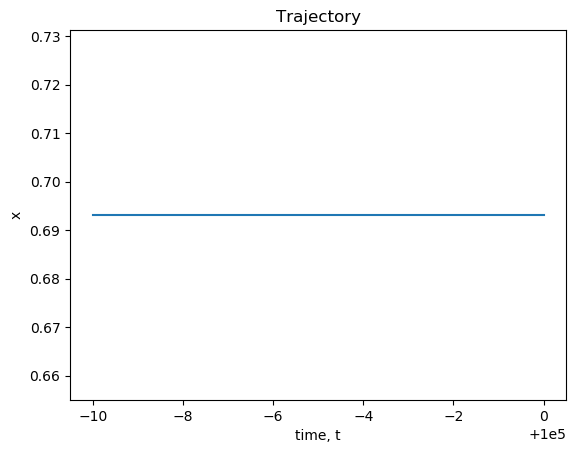

PyObject Text(0.5, 1.0, 'Trajectory')

In [530]:
lng = length(tt)
p = plot(tt[lng-10:lng],LyapEvo[lng-11:lng-1])
xlabel("time, t")
ylabel("x")
title("Trajectory")

In [ ]:
? @fastmath

In [79]:
x1 = 3
x2 = 0
if x1>x2 && x2<0
    println("condition 1")
    elseif x1>x2 && x2>=0
    println("condition 2")
    else
    println("condition 3")
end

condition 2


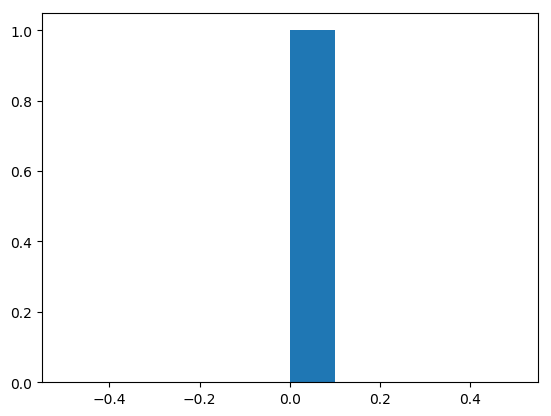

([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5], PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b049e80>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b049c88>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b0404a8>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b0407f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b040b38>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b040e80>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a1b040f98>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a7594f550>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a7594f898>, PyObject <matplotlib.patches.Rectangle object at 0x7f0a7594fbe0>])

In [554]:
hist(xorb64)

# 1b. NIO using Float64

In [449]:
Pkg.add("PyCall")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %53.6 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [438e738f] + PyCall v1.91.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [248]:
function NIOv064(n::Int64, exponentk::Int64, epsil::Float64)  
iters = collect(1:n-1)
d = 2.0^(-exponentk)
x = Array{Float64,1}(undef,n)
#x[1] = rand(Float64)
# Seed ofr comparison between Big and 64 code
#x[1] = 7.593763724662871
x[1] = 0
#epsRND = epsil*(2.0*Tuple(rand(n))-1.0)
preLE = Array{BigFloat,1}(undef,n)
preLE[1] = 0.0
absd = abs(d)
    for k in iters
    xbfj = x[k]
    oneovertwo = 1/2
    eRND = epsil*(2*rand(Float64)-1)
        if xbfj < oneovertwo
            x[k+1] = 2*x[k] + eRND #epsil*(2*rand(Float64)-1)
            preLE = log(2)
            elseif xbfj > oneovertwo && xbfj <= 1-absd
            x[k+1] = 2*(1-x[k]) + eRND
            preLE[k] = log(2)
            elseif xbfj > 1-absd
            x[k+1] = -d*x[k] + d*(3-d) + eRND
            preLE[k] = log(absd)
            else
            println("Breakpoint reached due to bad conditioning")
        end
    end
    LyapExp = 
    @show LyapExp
    return x 
    return LyapExp
end

NIOv064 (generic function with 1 method)

In [253]:
 NIOv064(11, 7, 0.001)

UndefVarError: UndefVarError: LyapExp not defined

In [466]:
Pkg.add("Distributions")

 Resolving package versions...
 Installed QuadGK ─────────── v2.0.3
 Installed URIParser ──────── v0.4.0
 Installed PDMats ─────────── v0.9.9
 Installed SpecialFunctions ─ v0.7.2
 Installed Arpack ─────────── v0.3.1
 Installed BinDeps ────────── v0.8.10
 Installed StatsFuns ──────── v0.8.0
 Installed Distributions ──── v0.21.1
 Installed Rmath ──────────── v0.5.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [31c24e10] + Distributions v0.21.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [7d9fca2a] + Arpack v0.3.1
  [9e28174c] + BinDeps v0.8.10
  [31c24e10] + Distributions v0.21.1
  [90014a1f] + PDMats v0.9.9
  [1fd47b50] + QuadGK v2.0.3
  [79098fc4] + Rmath v0.5.0
  [276daf66] + SpecialFunctions v0.7.2
  [4c63d2b9] + StatsFuns v0.8.0
  [30578b45] + URIParser v0.4.0
  [4607b0f0] + SuiteSparse 
  Building SpecialFunctions → `~/.julia/packages/SpecialFunctions/fvheQ/deps/build.log`
  Building Arpack ──────────→ `~/.julia/packages/Arpack/cu5By/deps/build.log`
  Building

In [464]:
Pkg.add("Plots")

 Resolving package versions...
 Installed Requires ────────── v0.5.2
 Installed Showoff ─────────── v0.3.1
 Installed SortingAlgorithms ─ v0.3.1
 Installed IterTools ───────── v1.2.0
 Installed StaticArrays ────── v0.11.0
 Installed Plots ───────────── v0.26.2
 Installed GeometryTypes ───── v0.7.5
 Installed Contour ─────────── v0.5.1
 Installed DataAPI ─────────── v1.0.1
 Installed RecipesBase ─────── v0.7.0
 Installed FFMPEG ──────────── v0.2.2
 Installed Missings ────────── v0.4.1
 Installed PlotThemes ──────── v0.3.0
 Installed Measures ────────── v0.3.0
 Installed NaNMath ─────────── v0.3.2
 Installed StatsBase ───────── v0.32.0
 Installed PlotUtils ───────── v0.5.8
 Installed GR ──────────────── v0.41.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [91a5bcdd] + Plots v0.26.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [d38c429a] + Contour v0.5.1
  [9a962f9c] + DataAPI v1.0.1
  [c87230d0] + FFMPEG v0.2.2
  [28b8d3ca] + GR v0.41.0
  [4d00f742] + GeometryTypes v

In [495]:
import Pkg; Pkg.add("Plotly")

 Resolving package versions...
 Installed IniFile ───────────────────── v0.5.0
 Installed AssetRegistry ─────────────── v0.1.0
 Installed Observables ───────────────── v0.2.3
 Installed Plotly ────────────────────── v0.2.0
 Installed Lazy ──────────────────────── v0.13.2
 Installed Tables ────────────────────── v0.2.11
 Installed DocStringExtensions ───────── v0.8.0
 Installed JSExpr ────────────────────── v0.5.0
 Installed TableTraits ───────────────── v1.0.0
 Installed DataValueInterfaces ───────── v1.0.0
 Installed Widgets ───────────────────── v0.6.1
 Installed PlotlyBase ────────────────── v0.2.6
 Installed Mustache ──────────────────── v0.5.13
 Installed HTTP ──────────────────────── v0.8.5
 Installed Hiccup ────────────────────── v0.2.2
 Installed Pidfile ───────────────────── v1.1.0
 Installed IteratorInterfaceExtensions ─ v1.0.0
 Installed WebSockets ────────────────── v1.5.2
 Installed WebIO ─────────────────────── v0.8.11
 Installed Mux ───────────────────────── v0.7.0
 Inst

In [496]:
using Plotly

┌ Info: Precompiling Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1192


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10279750393549774209\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-11618487800170708318\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10279750393549774209\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [513]:
import Pkg; Pkg.add("IntervalArithmetic")

 Resolving package versions...
 Installed SetRounding ───────── v0.2.0
 Installed ErrorfreeArithmetic ─ v0.4.0
 Installed FastRounding ──────── v0.2.0
 Installed IntervalArithmetic ── v0.15.2
 Installed CRlibm ────────────── v0.7.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [d1acc4aa] + IntervalArithmetic v0.15.2
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [96374032] + CRlibm v0.7.1
  [90fa49ef] + ErrorfreeArithmetic v0.4.0
  [fa42c844] + FastRounding v0.2.0
  [d1acc4aa] + IntervalArithmetic v0.15.2
  [3cc68bcd] + SetRounding v0.2.0
  Building CRlibm → `~/.julia/packages/CRlibm/2S9DB/deps/build.log`


In [514]:
using IntervalArithmetic

┌ Info: Precompiling IntervalArithmetic [d1acc4aa-44c8-5952-acd4-ba5d80a2a253]
└ @ Base loading.jl:1192


In [499]:
methods(fit)

# 22 methods for generic function "fit":
[1] fit(::Type{StatsBase.Histogram}, v::AbstractArray{T,1} where T, wv::StatsBase.AbstractWeights{W,T,V} where V<:AbstractArray{T,1} where T<:Real, args...; kwargs...) where W in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:217
[2] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, v::AbstractArray{T,1} where T; closed, nbins) where T in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:210
[3] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, v::AbstractArray{T,1} where T, wv::StatsBase.AbstractWeights; closed, nbins) where T in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:214
[4] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, v::AbstractArray{T,1} where T, wv::StatsBase.AbstractWeights, edg::AbstractArray{T,1} where T; closed) where T in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:212
[5] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, v::AbstractArray{T,1} where T, edg::AbstractArray{T,1} where T; closed) where T in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:208
[6] fit(::Type{StatsBase.Histogram}, vs::Tuple{Vararg{AbstractArray{T,1} where T,N}}, wv::StatsBase.AbstractWeights{W,T,V} where V<:AbstractArray{T,1} where T<:Real, args...; kwargs...) where {N, W} in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:320
[7] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, vs::Tuple{Vararg{AbstractArray{T,1} where T,N}}; closed, nbins) where {T, N} in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:268
[8] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, vs::Tuple{Vararg{AbstractArray{T,1} where T,N}}, edges::Tuple{Vararg{AbstractArray{T,1} where T,N}}; closed) where {T, N} in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:265
[9] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, vs::Tuple{Vararg{AbstractArray{T,1} where T,N}}, wv::StatsBase.AbstractWeights; closed, nbins) where {T, N} in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:274
[10] fit(::Type{StatsBase.Histogram{T,N,E} where E where N}, vs::Tuple{Vararg{AbstractArray{T,1} where T,N}}, wv::StatsBase.AbstractWeights{W,T,V} where V<:AbstractArray{T,1} where T<:Real, edges::Tuple{Vararg{AbstractArray{T,1} where T,N}}; closed) where {T, N, W} in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:271
[11] fit(::Type{StatsBase.Histogram}, args...; kwargs...) in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/hist.jl:319
[12] fit(obj::StatsBase.StatisticalModel, args...) in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/statmodels.jl:152
[13] fit(::Type{StatsBase.ZScoreTransform}, X::AbstractArray{#s172,2} where #s172<:Real; center, scale) in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/transformations.jl:101
[14] fit(::Type{StatsBase.UnitRangeTransform}, X::AbstractArray{#s170,2} where #s170<:Real; unit) in StatsBase at /home/alvarodr/.julia/packages/StatsBase/DyWPR/src/transformations.jl:227
[15] fit(::Type{#s31} where #s31<:Binomial, data::Tuple{Int64,AbstractArray}) in Distributions at /home/alvarodr/.julia/packages/Distributions/tfkz4/src/univariate/discrete/binomial.jl:228
[16] fit(::Type{#s31} where #s31<:Binomial, data::Tuple{Int64,AbstractArray}, w::AbstractArray{Float64,N} where N) in Distributions at /home/alvarodr/.julia/packages/Distributions/tfkz4/src/univariate/discrete/binomial.jl:229
[17] fit(::Type{#s31} where #s31<:(DiscreteNonParametric{Int64,P,Base.OneTo{Int64},Ps} where Ps where P), data::Tuple{Int64,AbstractArray}) in Distributions at /home/alvarodr/.julia/packages/Distributions/tfkz4/src/univariate/discrete/categorical.jl:181
[18] fit(::Type{#s31} where #s31<:(DiscreteNonParametric{Int64,P,Base.OneTo{Int64},Ps} where Ps where P), data::Tuple{Int64,AbstractArray}, w::Abst

In [539]:
methods(hist)

# 1 method for generic function "hist":
[1] hist(args...; kws...) in PyPlot at /home/alvarodr/.julia/packages/PyPlot/cdCMF/src/PyPlot.jl:174